In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from techniques1 import *
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
def readfile(filename):
    
    arr=[]
    with open(filename,'rt',encoding='latin-1') as file:     
                samples=csv.reader(file)
                x=0
                for i in samples:
                    if x==0:
                        x=1
                        continue
                    arr.append(i)
    df=pd.DataFrame(data=arr,columns=["types","posts"])
    return df

In [3]:
def labelencode(df):
    data=df['types']
    values=array(data)
    label=LabelEncoder()
    intencode=label.fit_transform(values)
    df['typeint']=intencode
    df['typeint'].plot(kind='hist')
    k=np.arange(0,16)
    x=label.inverse_transform(k)   #can access encoded actual value using x
    print(values)
    return df


In [4]:
def createSlangframe():
    f="slang.txt"
    a=[]
    with open(f,'rt',encoding='latin-1') as file:     
                samples=csv.reader(file,delimiter='\t')
                x=0
                for i in samples:
                    if x==0:
                        x=1
                        continue
                    a.append(i)
    slangframe=pd.DataFrame(data=a,columns=['slang','fullform'])
    return slangframe


In [5]:
def preprocess(shortdata,slangframe):
    slang=list(slangframe['slang'])
    for i in range(len(shortdata)):
        #counts emojis and remove
        shortdata.loc[i,'emojicount']=countEmoticons(shortdata['posts'][i])
        shortdata.loc[i,'posts']=removeEmoticons(shortdata['posts'][i])
        #counts slang and removes
        shortdata.loc[i,'slangcount']=countSlang(shortdata['posts'][i])
        q=shortdata['posts'][i].split()
        for j in range(len(q)):
            if q[j] in slang:
                q[j]=slangframe['fullform'][slang.index(q[j])]
        shortdata.loc[i,'posts']=' '.join(q)
        #replaces contractions with full forms
        shortdata.loc[i,'posts']=replaceContraction(shortdata['posts'][i])
        #counts urls and replaces
        shortdata.loc[i,'urlcount']=countURL(shortdata['posts'][i])
        shortdata.loc[i,'posts']=replaceurl(shortdata['posts'][i]) 
        #counts #()-() and @-atuser and removes them
        shortdata.loc[i,'#_@count']=counthashAt(shortdata['posts'][i])
        shortdata.loc[i,'posts']=replaceAtUser(shortdata['posts'][i])
        shortdata.loc[i,'posts']=removeHashtagInFrontOfWord(shortdata['posts'][i])
        #puctuations clearing
        punct=clear_punctuation(shortdata['posts'][i])
        shortdata.loc[i,'posts']=punct[0]
        shortdata.loc[i,'punct_count']=punct[1]
        #replaces negations
        shortdata.loc[i,'posts']=replaceNegations(shortdata['posts'][i]) 
        #remove unicodes
        shortdata.loc[i,'posts']=removeUnicode(shortdata['posts'][i]) 
        #removes numbers
        shortdata.loc[i,'posts']=removeNumbers(shortdata['posts'][i])
        #remove stopwords
    from nltk.corpus import stopwords
    stop=stopwords.words("english")
    my_stopwords = "multiexclamation multiquestion multistop url atuser st rd nd th am pm httpurl httpsurl http" # my extra stopwords
    stop = stop + my_stopwords.split()
    shortdata['posts']=shortdata['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    ps = PorterStemmer()
    shortdata['posts'] = shortdata['posts'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
    lmtzr = WordNetLemmatizer()
    shortdata['posts'] = shortdata['posts'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
    #spell correction
    """for i in range(len(shortdata)):
        q=shortdata.loc[i,'posts'].split()
        for j in range(len(q)):
            q[j]=spellCorrection(q[j])
        shortdata.loc[i,'posts']=' '.join(q)"""
    return shortdata



In [6]:
def call_clean():
    filename="mbti_1.csv"
    df=readfile(filename)
    df=labelencode(df)
    slangframe=createSlangframe()
    clean_data=preprocess(df,slangframe)
    print(clean_data.head())
    return clean_data
data=call_clean()

['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
  types                                              posts  typeint  \
0  INFJ  intj moment http sportscent top ten play http ...        8   
1  ENTP  Im find lack post alarmingsex bore posit often...        3   
2  INTP  good one http cours I say I know bless cursedo...       11   
3  INTJ  dear intp I enjoy convers day esoter gab natur...       10   
4  ENTJ  you firedthat anoth silli misconcept that appr...        2   

   emojicount  slangcount  urlcount  #_@count  punct_count  
0        34.0         2.0      14.0       0.0        291.0  
1        29.0         1.0       1.0       0.0        458.0  
2        19.0         0.0       4.0       0.0        339.0  
3         6.0         2.0       2.0       0.0        398.0  
4        16.0         6.0       2.0       2.0        354.0  


In [35]:
proc_data=data
proc_data=np.array(data['posts'])
label=np.array(data['typeint'])


['intj moment http sportscent top ten play http prankswhat lifechang experi lifehttp On repeat todaymay perc experi immers youth last thing infj friend post facebook commit suicid next day rest peac httpvimeocomhello enfj sorri hear distress It natur relationship perfect time everi moment exist tri figur hard time time growth httpwallpaperpassioncomuploadfriendshipboyandgirlwallpaperjpg httpassetsdornobcomwpcontentuploadsroundhomedesignjpg welcom stuffhttpplayeressencecomwpcontentuploadsredredthepokemonmasterjpg game set matchprozac wellbrutin least thirti minut move leg I mean move sit desk chair weed moder mayb tri edibl healthier alternativebas come three item determin type whichev type want would like use give type cognit function whatnot leave byall thing moder sim inde video game good one note good one somewhat subject I complet promot death give simdear enfp what favorit video game grow current favorit video game coolhttp appear late sadther someon everyonewait I think confid go

[ 8  3 11 ... 11  9  9]


In [8]:
proc_data=np.array(data)
label=np.array(data['typeint'])

"""dframe=pd.DataFrame(data=data['emojicount'])
dframe['slangcount']=data['slangcount']
dframe['urlcount']=data['urlcount']
dframe['#_@count']=data['#_@count']
dframe['punct_count']=data['punct_count']
print(dframe)"""

      emojicount  slangcount  urlcount  #_@count  punct_count
0           34.0         2.0      14.0       0.0        291.0
1           29.0         1.0       1.0       0.0        458.0
2           19.0         0.0       4.0       0.0        339.0
3            6.0         2.0       2.0       0.0        398.0
4           16.0         6.0       2.0       2.0        354.0
5            3.0         0.0       0.0       1.0        514.0
6           25.0         3.0       1.0       0.0        490.0
7           12.0         2.0       1.0       0.0        361.0
8           29.0         0.0      18.0       0.0        295.0
9           13.0         2.0       7.0       0.0        377.0
10           2.0         3.0       1.0       0.0        478.0
11          23.0         2.0       3.0       0.0        295.0
12           5.0         9.0       0.0       0.0        392.0
13           1.0         1.0       0.0       0.0        496.0
14           6.0         0.0       0.0       0.0        294.0
15      

In [36]:
proc_data1=list(proc_data)
label1=list(label)
import random
trainset=[]
trainlabel=[]
count=[0 for i in range(16)]
count2=[28 for i in range(16)]

while count!=count2:
    n=int(random.random()*len(label1))
   
    if count[label1[n]]!=28:
        trainset.append(proc_data1[n])
        trainlabel.append(label1[n])
        count[label1[n]]+=1
        del(proc_data1[n])
        del(label1[n])
    
testset=[]
testlabel=[]
count=[0 for i in range(16)]
count2=[7 for i in range(16)]

while count!=count2:
    n=int(random.random()*len(label1))
   
    if count[label1[n]]!=7:
        testset.append(proc_data1[n])
        testlabel.append(label1[n])
        count[label1[n]]+=1
        del(proc_data1[n])
        del(label1[n])




(array([35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35., 35.,
        35., 70.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

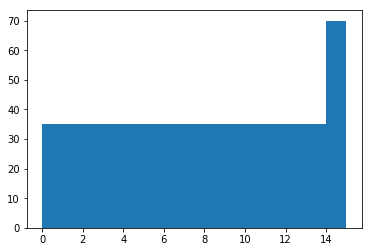

In [37]:
"""from sklearn.model_selection import train_test_split
trainset, testset, trainlabel, testlabel = train_test_split(proc_data, label,stratify=label, test_size=0.2)"""
import matplotlib as plt
from matplotlib import pyplot
#plt.plot(x)
pyplot.hist(trainlabel,np.arange(0,16))


In [38]:
trainlabel=np.array(trainlabel)
testlabel=np.array(testlabel)
trainset=np.array(trainset)
testset=np.array(testset)
print(np.array(trainlabel).shape)

(560,)


In [39]:
sentences=[]
for line in trainset:
    sentences.append(str(line).split())
from gensim.models import Word2Vec
modelw2v=Word2Vec(sentences, size=100, window=5, min_count=2, workers=4)
print(modelw2v)
words=list(modelw2v.wv.vocab)

Word2Vec(vocab=10820, size=100, alpha=0.025)


In [40]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [modelw2v[w] for w in list(modelw2v.wv.vocab.keys())]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(modelw2v.wv.vocab.keys())

Loading BokehJS ...

/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10820 samples in 0.040s...
[t-SNE] Computed neighbors for 10820 samples in 6.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10820
[t-SNE] Computed conditional probabilities for sample 2000 / 10820
[t-SNE] Computed conditional probabilities for sample 3000 / 10820
[t-SNE] Computed conditional probabilities for sample 4000 / 10820
[t-SNE] Computed conditional probabilities for sample 5000 / 10820
[t-SNE] Computed conditional probabilities for sample 6000 / 10820
[t-SNE] Computed conditional probabilities for sample 7000 / 10820
[t-SNE] Computed conditional probabilities for sample 8000 / 10820
[t-SNE] Computed conditional probabilities for sample 9000 / 10820
[t-SNE] Computed conditional probabilities for sample 10000 / 10820
[t-SNE] Computed conditional probabilities for sample 10820 / 10820
[t-SNE] Mean sigma: 0.014039
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.452248
[t-SNE] KL 

In [41]:
# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([str(x).split() for x in trainset])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print('vocab size :', len(tfidf))

vocab size : 2839


In [43]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += modelw2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [45]:
trainset1=[]

for i in trainset:
    
    a=buildWordVector(i,100)
    trainset1.append(a)

/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [46]:
testset1=[]
for i in testset:
    a=buildWordVector(i,100)
    testset1.append(a)

/home/nikitha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [47]:
a=buildWordVector("seems like ranveer singh wants to be a porn star.but y do we even need to know that?")

TypeError: buildWordVector() missing 1 required positional argument: 'size'

In [48]:
from numpy import array
trainset1=np.array(trainset1)
testset1=np.array(testset1)

In [50]:
testlabel=np.array(testlabel)
trainlabel=np.array(trainlabel)
print(trainlabel.shape)
print(testlabel.shape)
print(trainset1.shape)
print(testset1.shape)

(560,)
(8115,)
(560, 100)
(8115, 100)


In [49]:
trainset1=trainset1.reshape((len(trainset1),100))

testset1=testset1.reshape((len(testset1),100))

In [21]:
np.savetxt("trainset1.csv", trainset1, delimiter=",")
np.savetxt("testset1.csv", testset1, delimiter=",")
np.savetxt("trainlabel1.csv", trainlabel, delimiter=",")
np.savetxt("testlabel1.csv", testlabel, delimiter=",")


In [51]:
print(trainset1.shape)
print(trainlabel.shape)
print(testset1.shape)
print(testlabel.shape)

(560, 100)
(560,)
(8115, 100)
(8115,)


In [56]:
j=[0 for i in range(16)]

In [61]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(trainset1,trainlabel)
print(model.score(trainset1,trainlabel))
predictionsgnb=model.predict(testset1)
predictionsgnb = model.predict(testset1)
count=0
for i in range(16):
    print(list(testlabel).count(i))
for i in range(len(predictionsgnb)):
   
    if predictionsgnb[i]==testlabel[i]:
        j[testlabel[i]]+=1
        count=count+1
print(count)
print("accuracy=",(count*100)/len(testlabel))
print(j)

0.1
155
640
196
650
7
13
4
54
1435
1797
1056
1269
131
236
170
302
506
accuracy= 6.235366605052372
[54, 30, 81, 303, 0, 3, 0, 0, 0, 420, 334, 6, 21, 201, 0, 66]


accuracy= 0.6654343807763401
accuracy= 0.0862600123228589
accuracy= 1.9100431300061613
accuracy= 0.04929143561306223
accuracy= 22.144177449168208
accuracy= 17.683302526186075
accuracy= 17.683302526186075
accuracy= 0.0862600123228589
accuracy= 2.094886013555145
accuracy= 2.094886013555145
avg accuracy= 6.449784349969194


c:\users\nikitha\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


c:\users\nikitha\appdata\local\programs\python\python36\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
c:\users\nikitha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


[[-0.18914373 -0.20302776  0.00416092 ...  0.18720366  0.22891383
   0.05284937]
 [-0.3249938  -1.1973047   0.7114654  ...  0.8228047   0.62431777
   0.5789972 ]
 [-0.00142897 -0.9997056   0.4400209  ...  0.76707894  0.94090474
   1.0851221 ]
 ...
 [-0.41284165 -0.4688043   0.37761092 ...  0.4504887   0.44820946
   0.33290735]
 [-0.21763164 -0.32383454  0.24509476 ...  0.7357502   0.5944933
   0.48881269]
 [-0.46942854 -0.54872257  0.84596306 ...  0.22824056  0.9934551
   0.40817428]]


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

0.3984149855907781
accuracy= 18.270893371757925


ValueError: Expected 2D array, got 1D array instead:
array=['ye I give feedback initi break discuss go wrong I alway like give closur My ex boyfriend gener tell thatim girl entp read post give palpit As much love play devil advoc question debat everyth gener dislik subject question realli noth still pretti young plenti time everyth Im next year I see front opportun stuff I prioritis thehe unfair appar move new girlfriend alreadi yet still contact give conflict messag I wonder new girlfriend know still contactexactli particularli scarlet say entp gener thing oblig other WE want thu I spend time firsty introvert differ type sexi I think strong deep type extrovert tend confid sexi show see wherea knowi let almost quip go ask think fugli unsur wink but I person see confid I think entp radiat photograph wei would like thank respons thread real food think genuin interest differ peopl even type deal obvious forgivenessemot suck big time wink I know Im happi obvious I like happi even still scare I might becom overwhelm feel somethinghow recent contact come do initi entp open honest like someon I initi one signific relationship the onlythank everyon repli realli interest read there part know full well forgiv harm though far ever happen like I know pic come smallwel fantast look here I know I realis late I find almost imposs forgiv peopl mess uppiss lie fairli big way It odd I knownot say simpl mathemat realiti avail pool choos much smaller age most men either marri kid seriou relationship imthank post viewpoint I consid will bear mindok Im aftermath break I less harsh I would normal whatev reason especi year must hurt lot Im sorri arei need better commun there research appar happiesmost success coupl one commun time deal littlemet two realli good male friend queue star war convent they happen stand behind get chat wander round con threesom exchang number kepty I guess I want rest laurel I never enter stage relationship I think good know like havech I think Im right thing moment though I know I speak point My instinct usual right though Im sure tell thei contact point I honestli think best right speak I end shout level anger I toward momentsom advic need awesom entp So I break boyfriend intj week ago though littl odd way happen He would bite distant week I sit downa larg amount I would say get marri practic reason men women It difficult get statist studi I read year ago estim approxim ofim sorri hear lose wife young age without wish intrud ignor like meet women sinc compar one kind you justi think I know mean I get emot usual take surpris I cannot immedi talk and I hate happen honestli I tend fewi realis pressur I want kid I guess I look back relationship I wonder I could do thing differ sinc start thisi make decis difficulti I often see everyth angl I troubl narrow As other say I often come decis pure thenot sure entp feel easili trait I hate other whether friend partner I first admit result underlyingi take secret grave necessari simpl reason I would want anyon els break trust I keep side bargain need I like idea cheat ati take secret grave necessari simpl reason I would want anyon els break trust I keep side bargain need I like idea cheat atyep I would say entp flirtati He obvious enjoy talk entp certainli hang onto someon know chat big issu could though itentp love debat big question realli interest make idl chit chat sake get bore easili normalroutin thing discuss bore uswel I get dump Im annoy sit ask straight obviou someth last week us much go thathow good intj open emot from I read easiest thing type and prefer way timescal rather beah OK If flirt back sound reciproc whatev way choos ask good luckit would freak honest If talk year quit normal particular flirt either side go quit blue hermi intj boyfriend delight bore Im complet honest He even tell bore peopl but I ador way differ He solid dependableim visual word interest everyth I say think connect mental real imag No idea typic entpsturn on intellig curios confid know mind generos naughti sens humour like travellingexplor independ turn off selfish arrog notexactli If peopl idiot enough want pleas other go ahead but I could respect person which type think like peopl pleaser At guessw ration kind thing though I think I would connect emot level first date At stage cannot anyth physic attract andther fairli good evid date site despit list person trait qualiti peopl look partner meet someon realli like prettyregardless type man judg woman sex first date worth bother withi prefer one type equal stand life I tend keep group separ though I crazi group extrovert friend night loud wildentp obvious I sometim admir patienc stabil ntj I know I fulli enjoy everyth life offer spontan key mea work colleagu ask everyon offic think new facial hair silli littl piec bum fluff bottom lip everyon els Oh islov Me itnop never suffer social anxieti I would say entp one type least like suffer simpli give fuck other think us also know areal just commit relationship mean stop find peopl attract and global internet connect mean potenti stumbl someoneh tell want talk counsel felt like involv process It realli bother I want make sure'
 'boil the frog websit type two music artistsgroup creat playlist move seamlessli one artist style I tri kelli clarkson If word pride alway mean I think Im better peopl would true It word pride also mean Im tell asham I ibecaus talk solut equal problem solut intend inequ creat impress problemsa week ago load first navig becom issu toowhen proud X come vaccum posit advantag sign unhealthi entitl complex you wrong Im Im better when proud tother alreadi word movement replac tradit men expect X women expect Y peopl encourag find life wouldstraw hous actual realli stabl you stack bale straw run rebar plaster work realli well happypretti much anyth mental when I watch card trick sleight hand escap artist I understand basic concept even I know detail I understand thatw come differ explan ask everybodi one winksafari mac OS sierra macbookpretti much trump elect rolley hillari assassin staffer two bullet back head accord fact commit suicid shootingi inform last night I confirm morn formula I elimin actual special case gener form whole concept meansso time nowher near good first time x quarter x quarter x quarter x quarter x just run fifth k today time quarter quarter quarter quarter So liber protect peopl constitut right live life conserv unonstitut attempt control live see infring conserv you know first rocket explod get work reliabl right winkgood know happi thank wow I know I look thissam actual I bite younger I would wait week watch paleontolog documentari valley trex when I first hear plane flownwhat rememb mostit turn guy consult lot expert interpret after public go viral expert quickli determin hold water might I ask the voynich manuscript decod women health guid the indecipher cipher medic abbrevi everybodi time expect alreadi familiari agre good peopl requir commit violenc aggressor order stop aggressor hurt innoc peopl I would also argu peopl look thehow exactli relev conversationim intrigu happi I think new zealand two tini landmass one continent region capit near geograph deadcent veri close alli america veri near tohav either hear the heritag foundat victori tripoli lesson war terror warn contain gross misrepresent fact over two centuri ago thewhat countri opposit russia I come term antirussian roulett gun danger like jam life depend fire correctli I thinkhttpsiredditylgfgdkzjpgi know huh wait british wait I alreadi know thatar say never see peopl site say barbari war proof islam evil say never see peopl site say theso whole convers hypothet bear real world would better suit vent forum thenth way barbari war happen muslim govern morocco initi one america first alli follow revolutionari war later send pirat attack americaninterest assert Do anyth support thisy A minor peopl would good regardless circumst anoth minor peopl would evil regardless circumst major peopl wouldjust run k time time quarter ndth quarter time have ever hear mule hinni hors donkey fundament differ biolog level still breed hors donkey but major offspringwhich explicitli prove racial differ superfici rather fundament and exactli conflict argument He explicitli state want america isi blue eye I love father brother less brown eye I straight I would offend idea fall love marri andi think I becam first mathematician human histori prove cannot construct x magic squar squar happyi believ I prove cannot construct x magic squar squar I believ I happi solv problem happyr I find youtub comment month ago wink seth myer say call nazi nazi instead let selfidentifi PC euphem altrightfact check Is leftw violenc rise npr some conserv seiz wednesday shoot republican rep steve scalis three other latest exampl see asthank opinion race work Do fact back uprationalwiki antiracist code for antiwhit conveni overlook white US defin nonwhit mix race peopl count blackhispanicoth evenhttp mean one violent smash face poor nazi car also would someth wrong post everyth want say possibl edit To addsorri I get ithttpapitheweekcomsitesdefaultfilesdavidfitzsimmonscaglejpgresizex httpcdnebaumsworldcomthumbstrumpcansuckmycockjpg deletedholi crazi improv batman My first k second improv I finish third one improv laugh mi'
 'obviou obviou appar obviou Mr prefect We inform shrug day I bore sucrenoir intj bitch tee women islock small space without room move such sweatbox space spelunk run but concern Im actual one beyond muchther two sister cousin irrelev two sister report often feel lighthead dizzi standup relav present symptom potenti genet caus I faceti job build asteroidmin robot receiv applic and fail and ye retail drive economi anyth els theresh bear I bear onc wealth hit certain level person spend proportian tail significantli invest nonliquid asset proportion tail where money goe back bank theactual common give much inform figur bite actual matter disregard rest which particularli difficult for instanc someonei tri weed time much care I also tri coke speed I could stay longer get do I lose weight It great right I take muchnev chart do gemini birthdat My fianc also intj sagittariu the human bodi actual adapt extern condit heal piec ofyep mr carmodi mr carmodi stephen king the mist wikial wetwel pacifist bulli but armi son and like agre guy side line pacifist nonviolentabsolut favorit deu Ex suck blatant ripoff two the entir hitman seri puzzl assassin creed seri actual bore game morehttp there differ domin thing excess kitteh intj I apolog much domin meerli ahttpbestuffcomimagesimagesofstuffxspinninginachairjpg kittehhttphotnerdgirlfileswordpresscomwesleydemotivationaljpg kittehnop Im away goal thankspost ratio laugh when kind stuff kittehi think mean stereotyp kiddo medit be quit time I toss link quit techniqu I leav tohttppartiallyclipscomcomicsmomanddaughtershoppingjpg when ON kittehhttppartiallyclipscomcomicsgardenwomanjpg Oh bugger I look one day ago httppartiallyclipscomcomicsharpiesjpg kittehjust go imag look like zerograv pinbal len flare kitteh actual Im guess variat basic httppartiallyclipscomcomicsfamilywithrabbitjpg httppartiallyclipscomcomicscatwithyarnjpg kittehhow reinvent best sell car america just see youtub advertis whi It work intend goal the point advertis sell product andhttp episod star trek kittehhttppartiallyclipscomcomicsboyreadingalonejpg when read kid book grow kittehhttppartiallyclipscomcomicscaptaincrosswordjpg abraxa abx action potenti antiant kittehexperiment eventu I genr kittehhttpseemslegitcomimagesbfdedccdabffdhighlanderswordweaponsjpgwatson It rule holm well rule wrong from TV show sherlockhttpartoftrollingfileswordpresscomchatroulettetrollingcatfoundjpghttppartiallyclipscomcomicspuppetandflowerjpg httpiphotobucketcomalbumsndemigodraytrollfacecatjpg and pertin think ithttppartiallyclipscomcomicssunsetcouplejpg when tell joke fall flat problem It point joke first place kitteheylrid mayb bear httprookeryaviarycomsamazonawscomxjpg nah It fotoshop and cannot tell lovelyactu I think singl bullet drop defens then regener chop head leisur but I suppos realli big gun would work problem Im one probe gaze Im tri intimid anyon which frame impass express gener lack speech probabl help I realli havehttp but He stop move and I hear whistl sound sword goe air neck use kittehlib httpimgetsystaticcomilxnjpg kittehhttpcdnwallpaperzzzcomwallpaperswidescreenhiresdonotfckwithcthulhujpgy know sever book natur quit like I say I disagre point none current come mind for speak haircut kittehprecis internet would limit resourc thu best use would find altern sourc inform httppartiallyclipscomcomicsboardmeetingjpg ohth locat everi farm librari hardwar store supermarket militari base I get hand anyth els I need I abl find locat includ suppli routesy know I would never even hear not divorc thing appear paper still know import and sad thing Im proud proudhttp say stupid thing sometim ye be stupid usual We play strength shrug you know I usual ask mbti mayb I'
 'beat seek housem work away month time home visit mate finish work alon time D oh notther sticki you know you extrovert anymorei often wonder isfj thing perhap type issu wellmayb alon worldunlik perc seem minor perhap thatsscarygirl bad quirki littl way like open fun crazi peopl know resourc internet nook recent find band earlier year one know know I make point I australia anyway fell love music move powerfuloki ariel sing part world lot realli go copi past whole playlist hahawow final peopl cant stand jacob all peopl know read book prefer jacob edward preferr id rather human jacob seem bore doesnt seemawww realli like never come way australia oh wellagre completelystriv achiev ideami friend buy bow tie suit much cute similar stye ive get pagesget tire isfj poster ok might interest kind sure someon do see fewhttpiphotobucketcomalbumsaaceyringslargepng I yellow gold ceylon sapphir diamond favourit stoneswelcom fellow isfjer and fellow libran fellow newbi happi enjoy forum laugh forget fellow gen yerno cannot relat often think other naiv im usual thingscomplet true Wo utter hardli anyth subject know aboutar interest nod smile uhhuh style someth I know especi peopl expect toi sort agreethough necessarili sure due type simpli person I alway pick ugliest anim etc one problem take care lovesens humor sens fashion relationship intent intellectu pursuit physic appear financi situat hobbi andim terribl idiot im surround close friend familyto point theyvr queri introvert goneh introvert way If im havinghug nice theyr peopl knowand arent creepi hug I like unsuspect hug for exampl friend mine ive see late move hous closer toi think I like live unnot hate centr attent person one attent perhap ill alway singlei like peopl make behappi make smile could use littl love could I know type id rather thing arent physic qualiti time spend special peopl yourhi think would take time introduc Im yr old femal brissi australia Do know mani peopl use mbti system learn type lasti wonder isfj tendanc feel awkward embarrass gener situat say My phone ring public I walk group peopl aloneagre post hate phone I hate talk I feel uncomfort total agre awkward silenc thing I tend think perhap analys thign say andi get misunderstand alsoi like shape mouth weird perhap smile teeth corner mouth go outward upward look kind like grimac smilingthat fairli much spot oni longer sleep teddi yr old femal I get puppi replac iti cannot sleep still awak somewher els hous alway sleep wonder willim build designerwork there structur area learn think outsid squar lot deadlin peopl work seem'
 'My niti loop emot exhaust I talk close friend someon extern get stop gener there time I nobodi talk iseri zelda well zelda No wii DS zelda includ rest includ ye I love twilight princesson GC Im includ game I longer play play extensivelyhttp wear ski mask eye blue I take pictur thi year ago I would ident crisi I could ever find refer point someth like I wouldugh yeahwhen I high school I think I might schizoid person disorderdecid I shortli So ye I see similar say leasti tend love deeper convers some femal I esfp seem like moral stori go Ns I guessyeah peopl rous intellectu insecur hahajeneci genesi phoenix new begin It like make easi get stick one train think even reach pop cultur So I go Im when seriou mood I villag elder mode when Im seriou mood Im probabl ishandrew wiggin main charact movi brickthos two top head andrew wiggin great exampl child adult infj orson scott cardi hate much It expect men aggress one expect women passiv whi meet guy expect show interest first ifpeopl I close see reliabl person I amwhen Im close peopl ohli pretti much lyingi idea I feel topic anymor I use feel passion nice guy blah blah stuff Im nice guy but point I decid prefer asometim I wonder I react much emot then think cross mind mayb peopl care emot enough I prefer think second one I thinki use get depress think infinit natur space meaningless how nobodi ever realli care peopl around the way peopl step peopl toyep reason Im idiot I tend ignor gut feel that say new girlmi gut like heri would love add peopl like bash idea socialist ideal bring innov I think horribl misconcept If put peopl professioni think peopl stop activ wast gift human drug alcohol use I would go far even say St patti day site peopl go takeyesterday I meet girl I think intj littl ago internet We awkward but yeah yesterday second time meet real lifesit okay I sound best Im alon car DI wish I guard right I ubdo even know I feeli forget I leave itravenclaw My soul make mathin hous honest If Im somewher Im probabl friend I tough approach Im assum mean girl though I knowgrow I alway say I anyon look At I still nobodi look that say Im moral inept standard high My sister ask meesfp quit amaz I two could keep either around long the seriousdeep talk realli scare haha want everyth befind someon love embrac lust that favorit way deal howev nobodi I loveit pretti horribl difficult control I get catch uppeopl use incorrect your particularli titl forum postit snoop lion jeezjorgeesfp girl I seem fall they much fun never work cannot take seriouslyi person life I trust alway perfectli honest No necessarili alway good action intent but someon I trust anyth everythingi like accord present day never meet mind infj sad I realli hopefulcongrat I get first real job I start monday My next big step fxxk also find love that alway technic next big step Oh well lolthi Im struggl today I pretti miser give circumst not case Im wait anoth hour forti best friend do within longterm commit relationship femal I love Oh move the person make feel better anyth Im enfp best friend last year though even could help that rough timeskinni jean band T shirt hoodi aww yeahthi one reason I believ relationship never work I commit earli take serious other notim sorri I cuddl commit relationship one near futurei love sad It make feel crappi Im one feel sometim okay thoughcorrelationcaus but seemingli correl I think anybodi quit disagre think mean maybeh mean like accept truth rather gift bless unlik other peopl like think better happi justvideo game age age mani thing substanc abus Im smart enough know I would ruin life I start edit actual I start abus adderallif book describ everi moment life great detail everyth predetermin the book would answer whether I read book would the possibilityi circumst I find particularli talk romant interest close friend I guess Or tri comfort somebodydo I care person Am I close doe think say matter Am I good bad mood I guess depend typic I brush therei learn thing person experi life way I not whole type peopl In way type infj influenc'
 'I hope goe well good luck happyhappyhappywel sometim dowel person unexpect kissag would mayb confus might get reaction look I would recommend also make intent crystal clear verballycmon spider cool I spider they like cat insect world laugh there one fear I that pointless end that connect iim well enneagram type four the individualistinterest thanksi felt like sometim though I cannot think specif situat good feel I name one actual I rememb dream I year ago itwhat mean flirt As tri pick someon No never do but flirt friendspeopl Im comfort fun I timehttp answer bite serious ye much but fair I pretti uniquestrang person strong sens individu anoth thing never help whendoubl postrom relationship what laugh loud winkso more probe resid infp If guy multifacet needingutil differ peoplegroup differ aspect Do ever wish friendskinda relat thread side httppersonalitycafecominfpforumidealiststoomuchlovehtmla coupl followup question yous guy So mani friendsacquaintancescontact would like keep touch withhang cannot sheer number doim probabl one danger men world I want but I never want anyth meyeah nice tongu action trixi laugh loud laughingin scandinavia cours happyi much like veri muchok trixi carousel rocki alger would pound sill thorlol yeah laugh If I could I would live kind museum stuff hahaif I know camera I alway make outrag express lol alway laugh To mom chagrin sometim haha but fun look famili photo right tongueth two forum I read enfp infp forum sometim I identifi lot thread enfp section I actual crazi extrovert side Im alway tryinghttpverydemotivationalfileswordpresscomwhypjpgkind leav other alon what meanwhi would say It increasingli like I spend rest life alon somehow I still believ loveblack touch black and Im go I probabl wear stud boot bondag pant biker jacket and probabl tight fit tshirt mayb one say psych wardy cannot make perfect dna clone point lessen someth laugh lol never mind I think agreement anyway happylol yeah I hear punkrock song dream complet lyric everyth actual I sorta convinc real I tri googl lyric laugh but ala werei want turn discuss clone lol far I know clone purrfect yet someth activ inact gene gene turn offon age cloningoh dreamer teh kyoot laugh loud blush hmm I role model realli someon I admir lot artist glenn danzig also I noth respectadmir gen thejust post someth prefer someth quirki wink make smile happi way A stori pictur video webcomix etc I start one yall might like relat thread httppersonalitycafecominfpforumidealistsnomoreprocrastinationnowiwillalwaysfinishwhatistahtmlhmm weed turn st nf now get st smoke laugh loud kid crazyther cours differ talk someon gossip someon say know differencewink but yeah might need care sharingi hope pussi avatar mean shock winkhaha well appear spite common knowledg post forum drink wink but I realli attract enfp trait It like thing I like theyeah damn I hope sexi enfp action hic sorri blushedbah forget I love enfp Do eva chang yeah Im drink right haha I luuuv ya laugh loud blush you complet somehow happyy know I kind love way enfp chat stranger At least one I know like almost peopl magnet someth but I enjoy watch thing somewhathappen lot If someon I like attract realli know I immedi ideal hell wink but still happen even know themgetim realli tri open peopl atm It like somewhat close success social gener happi either I want believ quot inim person cours I would worri mayb kind flatter trust enough share thing and unless do complet topgoddamn I practic creat list yall put wink now hell I find sum enfp cooli think I could sex someon I know Im uptight though I could probabl meaningless sex friend though never realli optionok stori time happi In anoth thread someon mention incred infp hulk I know exactli talk I call beast persona It evil honesti Be proactivehaha laugh yeah excess foreskin either wink yeah that basic empathi right when someon around sad instinct alway comfort orhmm If talk emot problem etc I usual avoid give concretedirect advic unless Im directli indirectli ask In experi enough listen empath'
 'physic attract woman would chanc consid romant relationship realli two thing turn physic considerher radic new studi prove result treatment help student focu studi drug free treatment clip south park studioson occass lazi think creativ color way express get adult swear head smack kid repeat samei want say tradit horribl thing look impli look forwant someth simpli alway way and feel timehey thank servingi alway eat home store know want go get get place long enough ever think iti do UO EQ AC swg coh mainli play wow get game set level class way pretti darn quickli dungeon finder let get dungeonhmm ask forum full infp prefer solitud aspect life right belong wow sure feel stupid nowrollar coaster awesom cedar point teh win wait line minut ride one well teh suckmayb healthi balanc look woman confid express still will accept help lean other need vindict someon oppos ori get earful peopl settl one instrument becom great versu habit play around sever mind figur understand thei regist type seem explain unfortun behavior ask happen follow questionideafor gamer play onlin game ever sinc ultima onlin come almost everi case solo player even though multiplay world peoplesound like farmvil syndrom feel mindlessli drive keep clickingpost next ellus level cat standoffish aloof far curiou territori play affection term independantwel could offici infp button sometim ye compound idea one els go get understand lolnooo far mani guy look ornament take put away type guy lead women cri shoulder horribl mani would appreci infp ladi wear kind distinguish featur perhap could decid fanci hat button sorta portabl neoni mind thing world pretti mess keep mostli grind likewis stay mind much wonder stupidityi like women confid opinion would definit avoid clingi oh whatev want typesi think love someon kind like fire either ring small glow ember rage inferno mayb peopl sayfinish last still finish import question whether live decis get across finish lineself teach part spend littl money hang good instructor open sever new road explor also come away better understand whyditto dunno mayb peopl seem slightli wear burn life crowd seem still spark hope leave lighti want kid want pass marfan syndrom child want spend next year financi emot wring respons peopl wonder facebook page lock like fort knox loleith wood middl nowher hotel room mila kuni put away gillett foami walk away sighi tri avoid voic record much tri avoid pictur takeni alway good find way may stem grow roam wood quirk gener know mani street namesi wonder monti python fan go gonna throw pillow first one darn kid say monti sound like human rest us bright side much deeper appreci choic make consequ follow us quit awhil havei know go post thread anyon anyth suffer realiz accept happi recogn suffer worri peopl oblivi start war scienc societi A want develop technolog allow wipe societi B C without damag societi B C resourc societi A nodur game appl appl card tabl senseless someon put helen keller laugh minut everyon els seem get chuckl walk offend say oh yeah well would soandso give wedgiei would think music instrument say piano exampl situat tune may simpl mari littl lamb especi uncomfort set inthi whole thing start remind southpark part episod call Go god Go south park episod player Go god Go part south park episod player Go god Go xii part curios import win arguement internet complet strangerit sad anger incid go use boost rate man leave die bodi art desir get would mind meet woman pierc tongu thoughwher never catch fall spectrum think lesson may regardless parent believ respons rais child capabl make decisionsmeh world full sight sound experi focus word wacki peopl use make lack imagin sens wonder grin long knowpass popcorn polaroid sea whisper think see one peopl argu back forth littl anyth accomplish walk away dumbfound asi dare tell mom wear busi suit instead tradit wed gown grin realli big day mayb groom well lesser degre lol itthat probabl common reaction parent silli never pressur want happi parent actual manag say thing without workingseri wonder long would take devolv ball anger lol'
 'those rule I make interpret feel free make I think green suit accord interpret colour Me synesthet letter colour alsosorri loooong waitthank though actual suppos relax attitud cool way carri sword xdti dom sorri I post long time I draw stuff start though I think I would abl post june Im mysorri doubl postth eye peacock play have see eye dark see light nonexist plane torchlight shine yet deep close full brim yet rain what thatf dom Ne dom hmmwell go wish throw away standard proudnah one friend make us stop she start lectur us freedom think stuff conclud lawsuit mutual accept although three us forsimilar sentenc come person queasi think chicken liver food tongu hey though scare pointi stuff even love blood gore My friendreal well one friend infp video game vise though Im exactli sure alway say love blood gore laughinga paint first floor want live want see sight and reach height A paint first floor sometim think the first paint Of skyscraperfi dom Ni dom thank Ca wait see nice idea and I know even I use webcam good pictur your welcom thank join femal Te dom result test year old charact strength braveri you courag person shrink threat challeng difficulti pain you speak rightlast well male side Si dom shehe realli goodwowit realli good digit PS I especi like way fold gothank infp alreadi D haha okay yay mean peopl withyup you want realli know make charact get itit idea matter let chang rule make write So creat charact sheet instead want how itthank want tooslight chang templat S dom sub outfit color stgrey sfyellow otherwis S dom wear color outfit partner Se dom Ne dom Ti dom thanksapdenoati w w w sxso probabl perspicaci w w tent milli w w sosp rwm w w w spso pterodactyl www sosx youniqu w whttpbestwallpapernetwallpaperxbluehairanimegirlstandinginwaterxjpghaha those peopl be ask question anyway sohmm think fantasi generaldreamerintellectu curiou strongwil protect nicethank comment well find somewhat difficult talk random peopl He usual even start talk know person almost year Oh anoth thingth person stori Im write the stori call world I do cover pictur lilliesofthevalley deviantart So I describ and stori bite He year oldthank their inch you friend start well I post Ne dom do entp I alreadi finish enfpf dom Fi dom better qualiti pictur Te dom estj entj Ni dom infjhair style E wavi hair I straight hair except enfp esfp curli hair N bangsfpartedplong J short T not part PI write rule I follow first domin functionclassmain outfit color teheavi swordsmantan Ni archer dark blue Fi mage dark green Fe telekinessi user with aidi post pictur I finish first I cut studi time internet realli weak Te dom estj entjhello thi first thread I ever start first I begin I get tell whole thing bite stereotyp It fun seriou imagin thatth path fork dark As crane bring new life place lap green grass play unknow start A path fork dark As learnsthi veri good convers question discuss im uk whant send durti pic kik add p kik gabbi mccree you act age stranger agre stranger thi watif infj choic I would either want infp intjdo make random nois other find funni If Im friend sometim but peopl never Do dislik mislead thing ie clown fake flower sort ye doatus Im also I know I spot forehead Im tamil use tradit put babi forehead xdi synesthesia I sort see color I talk peopl I bother investig exactli color I sort say Eg one closest friend color indigo anwhoop doubl post accid'
 'It happen lot peopl especi onlin quiz result say Im intp main reason think intpthey believ anyth mind outsid consciou awar I know could workbecaus use primari instinct much realli need think itthat I cannot stand ssj actual believ shit seem kind like enneagram crap toothey cannoti hope jokingfin video express I feel show http relat type descriptionsyeah I definit would want pet I need thoroughli train need remind one us boss decid maim someon someth and yousam feel good man though I basic live someon cat As much I love cat I live I would even petnop Ca fuck stand actual SO instinct make bore tri think and Im expect good littl SO user ie I accident wind heavili sospth that women believ be univers true that basic describ differ SX instinct SO instinct variant system enneagram Im sure SX lot morewhat spsx thank I idea peopl get idea SX sex relationship love thi definit realli goodi wonder integrationdisintegr work wing doe wing also integr disintegr correspond type Or main type need reach healthi levelsyeah pretti good point I feel never explan exactli howeverit necessarili obnoxi would exampl instagram celebr I find mani SO user disgustingli bore they talk shit mundan I cannotwtb instinctu stackingvari boardcool templat be go eventu write uniqu descript individu entri final productmight true I listen enough popular music watch enough popular TV seri etc I know I see sosp shit everywher I cannot stand I find SO instinct insuffer If iif interest would want knowi alreadi wast decad life idea endsam It defeat liberalismcapitalismal thing suck I highli doubt P that sound like I think lot us interest understand typolog especi wingexactli I idea peopl think forum exact distribut person type whole popul In way which part much andwhoyessosp instinct type spso they liter walk talk thing bore human mind cannot even conceiv machinepeopl still children I honestli even know happensastrolog level typolog leav garbagehowi see notit ok I kid P thing intoler peopl cultur dutchignor sensorsi cannot imagin wouldnosoci instinct motherfuck enneagram instinct stack socion thetypesinfo instinctu stack feeler believ Le epic Ti dom XD usual mistyp infpswhynot work but I agre saidfor femal mayb I think lot talk ass I would certainli say long mutual attract P yeah reaction herel edgi teen cool feel anyth especi brows internet mommi computerhow effeminatewhat mean you know exactli I think I would probabl vote intj some insufferablether strong correl peopl chang font everi post xnfp So Im go assum infp becaus nobodi take forum serious and kind ayour countri way enough neonazi fend not sure worri aboutcan tell us approach Im tire hear counselor ie peopl cannot offer real help real mental health problem deal whi theywhat sentenc'
 'want phone number IQ kind measur whip calcul ruler gimm digit boy size matterswork work infj roommat actual get point question think seem silli kind come generalizationi watch tv commerci promot stereotyp gender role make want take club beat tv pulp realiz would wisest idea consid spend ito rememb intp forum pretti chill timeth fuck weather it fuck nice and weton scale lazi feel boredom usual come either lazi pump know empti energyaft glass wine Im verbal harass vulner person room after Im tri realli realli hard derail laugh hyster lone littl fli wallhttpsphotosakfbcdnnethphotosaksnchssncnjpgdo know mean think think link puzzl way cannot say describ ascrib mean semant antic pedant what morphem theme ortechn birthdat teeter scale libra scorpio psa sign unless bear precess you capricorn bornuncoop player say but defeat purpos game lol they give I tri usurp rule last night play appl appl display predominantli leftbrain characterist sound SO bore ddamn haha that thing I like rap mani play syllab emphasisit nice see reflect mental without actual reflect entiretyprob ntj whatev type imperson involv aggress bitch boss bulli around irrelev fuel rage Fi tedepend I initi connect person relationship develop time It use certain unstabl string pendul motion dangl rearviewi come term imperman circa juli I still littl burst anxieti transienc I dwell longer minut It beenlazi apathi excess focu trivial matter loneli Im pretti sure fuck futur I control soonyeah I know fix interest rate becki codenam give head pay credit report where live rock ilik kite free float like Im sailin boati care much chess I love idea behind scrabbl thing I restrict ruleseveryth amaz nobodi happycold strawberri cheesecak pie I make mmmmmmmmi wish would find interest like men watch paint awe attempt digit color comput motion brushtrok beauti rare amhalf time even know digitallyelectr master art lexic retriev overpow strong chemic agent flush brain focu phenomen tunnelvisiondo take serious take easi make happi make dizzyx thank x thank Im scruffywatch aladdin first time sinc I kid drug So mani new referenti point viewguy cri sad movi like the notebook frequent tell much love fuck guy know quietli run hand back I feel sad without ask fuckwhat It sometim make peopl take less serious use but connot facial express may otherwis necessari order evok sens patho overusewhi would I would still interpret way It depend social context person involvedal compar natur electron like get attent steampunk mechan doodl robot florenc the machin mbti neurobiolog scienc rhymingtempeh egg feta chees walnut springmix salad orang balsam dressingtyp fora creat seriou even semiseri discuss relev typolog gener inquiri clearli state derail thread insult profess todud I total make thread random think earlier back haha there mathemat equat everyth even thing answerit like set brain roller coaster tri see mani landscap speed emot flowchartblu bell vanilla ice cream cup So goodi wonder saniti roommat min agoi program emot sentiment upon extern detect system lack thereof It hurt feel think emotionless Im trypophob that mean kind thing freak fuck httpfcdeviantartnetfsibdtrypophobiabylogoscriesjpg somehow I get disgust pleasurei believ sober friend strang understand sometim differ hazi normal crazyif know much time slow mind blow span rhymecrim ignor bore law flaw gnaw saw away ingenu way express depress compressionsconsum carbohydr I probabl month tri okay iti want stop want much without ever want want I could ever wantattempt calcul energi expenditur convert kilojoul calori relat exchang energi occur environ measur thermodynam thehow often take concept other modifi like I mean necessarili evil way rather natur process like idea hear add somen art beautifulit action movi action movi plot still decent adapt today audienc I expect grand arc drama superb charact develop someim advoc progressionchang realm hold linkin park ident sound modern noth like hybrid theori meteora say'
 'Im glad I lose friend time I go person problem feel outgo It horribl I definit agre isdo find peopl get along easili sorta I easili commun peopl hold pleasant convers Im bite shi think I come across slightli social awkwardthi I constantli state daydream I often peopl ask Im even listen say midconvers I tri concentr sometim myhello everyon So looooong time away site I return anoth venti type post yay Im entir sure isfp thing weird ith biggest daili struggl commun human be without say someth stupid rambl stuff nobodi care hour I feel differ fromwelcom fellow isfp wavesim w hiim isfp favourit lyric moment domino destitut cohe cambria If courag stop turn would worst everybodi isi panic and stand look like I date I saw esfp entj intj they never take test come across the esfp one I get along best stabl withyou describ stori life damn Im bad socialis I feel like everybodi think Im weird Im stuff I never seem abl tocapricorn year dog do proudim one peopl women hate I eat enough fee never put much weight unsur Im right middl healthi weight prouda annoy habit us least know alon I tri make larg portfolio work month back I problem I halffinishedb betray hurt someon I love trust vomit Im emetophob go insanesenil the think bad stress futur I know stuff like scare back straight shoulder back chest one foot front go I would listen though I might femal I never wear heel ever Im jean nye and peopl shorten session sesh peopl I live mainli wannab gangsta say time Oi mate want go smokin sesh outsid grrri passiv I post thread forum ask anybodi els issu say peopl I horribl tendenc agre mere avoid conflict oru aw aw aw aw nice thank I care old thread post make smile muchhand beer everyon wink welcom perchi I never actual close esfj real life Im posit well I would get one I guess sensit side us would help somewhat sympathetichttpswagfreshcomwpcontentuploadshuskyhoodjpg that hat I that wear way I know would judg go anywayhow I deal veri badli person I hate job interview I hate spot feel Im sit judg somebodi everyth I say analysedwhen accident tread ant littl bug proceed feel guilti next hour kill someth accidentor delet folder cwindowssystemim work should probabl work eh perc entertainingi confess sometim I notic stupid habit peopl peopl pick there guy I work exdrumm radio offic isi feel like I connect canin mostli fox wolv also rabbit which quit strang consid pretti much opposit wolv n fox tend eat rabbit buti I alway find peopl laugh joke peopl funni I say someth I think funni nobodi even crack smile It frustrat I feelthi thi I exactli come meet new peopl tri make good impress I end say stupid thing stumbl word fail beingpeopl eat noisili loud peopl shout stand right next persist liar vain peoplecocki peoplearrog peopl attent seeker when I sit draw andth way I see If catchi listen who care genr I wish peopl openmind like though In school I get call devil worshipp wannab goth freak Im okay realli tire though Im alway tire around time day idea Im think I want go home go sleep I also get think run head aboutperson I start draw rough sketch Im digit artist I work layer thi work paper well though If veri rough outlin worri aboutspyro crash bandicoot theme hospit I miss PS and NI realli fanci southern fri chicken pizza mmmmmim work thank god friday though roll weekendfor comfort food anyth sugari caus I sweet tooth So sort candi would suffic either someth realli bad like chin takeaway juicymi turn I also absolut love post I make comment redi last googl HP envi phoenix PC review not interest I want new PC pim righthand My leave hand prretti much use I need hold someth twohand I type It cannot much els I tri write name leave hand yesterday iti would love danc pure expression reason perform I like center attent I would want perform I sometim wish I good dancer though myhaha technic ye but still idiot tonguewel ex physic graduat use say physic use art appar nobodi get anywher art degre anymor dryaviationim right hand I must weird yay laughingi almost I regret I rush I felt like I alon otherwis needle say work Im singl I relationship sinc butahaha yeah I get lot Im put spot In german speak exam back colleg liter sit press record voic record expect talk germanwelcom perc kiari'
 'how know open door door open I know poni spike come Im sydney help one least conserv citi australia So half us uni kid say lot I wish realiti would reflect tvdinosaur need thumb human master XD We steal nuke with trex armi need biodivers amongst dino type mutual assuredrobot vs dinosaur they stake territori set battlelin stockpil weapon whose side what go andgo virgin I want sex without love I never love henc lack sex I would say infj predispos mindset tend cautiou aboutok you guy WE be be attack BY dinosaur quick what IS the planthat dorito fake tan match well could discuss dorito gross unpopular opinion when I ask chip I mean thisenfp confus alway expect kind ulterior motiv My brother enfp like live magic land leastlist disney movi I love would list disney movi period but the lion king favourit movi year still I use full bodi simbado life decis like terrifi least tri probabl spend next year mayb even rest life wish wonder couldthat true If high energi day put mask fine Im sure I know sens purpos help friend bring often realli handi boost Ok basic alreadi answer basic reason go If friend alreadi awar interest entir problem anythingi notic book real life guilti put gryffindor pedest tend well gryffindor I know I felt rush pride time I sortedharri potter reach certain end last movi Im curiou mean everyon els anyth Im harri potter gener I read first twoi confess I exhaust come forum much late just settl back sydney life work job requir start bite tire but I miss guysok Im start second song ice fire book futur event I yet awar could prove horrend wrong Im think tyrion lannist could infj whono I never go period rebellion I read book I age holden similarli shitti circumst particular regard home life holden isi hope other get chanc meet realli great and veryeduc I guess word it rare thing mani infj one place except mayb plushwitchal potenti issu sort I see guy outsid station My weekend get mess might last minut chang time I free tomorrow have stuff pick shipment compani I know yet earli iim happi whatev time work whole time Im easi shall say look like saturday could good I know furthest person travel My dutch consist sentenc I learn german year vocabulari isi problem guy watch porn even date It harmless fun I get anyth I problem I guess time I find thew help put ikea furnitur togeth need p I come friday saturday hope enough peopl make one day happen I leav We alli love hear sadangri look havr when I primari school teacher actual speak mum worri I look unhappi time I noti know game fring thing lot girl ye I think small group say entir shallow end I also think lot pretend beah thank tag I see Im unfortun leav maastricht next monday june So get mobil someth happen I bellshahaha mayb but im pretti sure would street unless deliber visit someon Im deep suburbia I feel kind deflat though idea drive past mywhat gender three allow femal At age discov infj what first reaction insight It huge relief It explain soin europ parent intp dad So go tyne cot largest wwi commonwealth cemetari world I think realli fun day you knowin morbid kind way awww thank Im sorri I cannot return favour nice block youplushwitch miki ador We bring kitten nando home last novemb hous run two older kitti take even room without growl hissingcongrat you go best time DI feel way A great number If actual caus bad luck would irrat XD It never do anyth Im still afraid itim go day trip itali tomorrow I keep tell peopl excit I meet new peopl hostel hang Im say thatno I scare I berlin last It look smell unapp but I suppos must popular reason yeah lena talent I find song boringy would bring thread bad luck therefor would interest alright Im mega fond freak like you realli havedarth vader kill fatherwel I cannot speak infp women I tend fall xnfx prefer enfx It bite frustrat I think infx rather select natur If tri andwhi would anyon eat currywurst how long take nativ german speaker grow learn differ use mich mir Or come natur itwhi peopl worri digest sarlacc pit year would clearli die pretti damn quickli thu consciou timethi realli great get funk help video clip amaz beauti orchestr piec joe hisaishi score ofvivid melodi hahaha type pet brilliant idea nando total enfp two sure wow allig that aw although I think dog poisonedverlavend bout beer gener consensu probabl victoria bitter My favourit easi yet amazingli delici kind pasta I memori hope recip coversraj your menageri gorgeou and realli sweet nip lol vivid melodi that pictur eva bradi cutest thing ever We tri put milo food away untillol well porsch turbo faaast sexi realli anyon like porsch they stun thi best best and No I tri even kill spider thehaha talk thisswap photo pet infj thread P cat dog bunni Do prefer sweet savouri Or otherdoctor whooooooo follow close commun Do like countri current leadervivid melodi that excit but mean time pet now Im jealou sound like heaven pretti sure Im go crazi cat ladi one day P We set fee time'
 'wonder stuff thank alloh come istp I want hear you quit anonym herey absolut right the health infj depend key bunch I practic tai chi x per wk class x x river fit walk x per wk otherquotepneumoceptora week ago I decid bite bullet start blog A coupl day ago I write post worri I read infj infp closer lookyou So right focu moment look detail gener detail nittygritti detail around youshad color smile someon face grimac onquotejasettei love best friend jessica your friend beautifullov chi gung relax walk swim Y machin etc Ca beat chi gung though induc peac tranquilityi w I studi peopl like other studi math english literatur I thirst understand peopl drive If I find subject intereststhank share it interest method use measur trustworthi peopl meet Do find accur measurei complet agre post I especi hear you seriou I cannot hear repeatedli the blank starei understand youthank the ultim squar peg share I imagin wait must unbear time I hope relax good news sooni agre I like conflict avoid I howev unavoid I confront direct manneri recent sever year friendship veri difficult entir necessari I friendship halfway I give all I get I also sensit therefor bodi react withhah you sound like infp I knowinsight the hostil environ particularli unhealthi infj We tens like nobodi els I like advis develop creation individu friend base controlwis word that core itchampagn toast here herei think make good point say mean clear strong mean fade feel weak confid fleet pursu tri hold justi find mean meet dream lose mean lose dream My life seri lose find dreamsmean current search hope realiz newestdefens dismiss reaction I love quot To know know know know know know true knowledg copernicu silencehopinggotta live life there one life us euripidesi believ infj habitu infuri individu difficult time trust If ignor niw sure ignor blatant disregard truth andi second I usual quiet slow anger push limit I push back I tri resolv situat fail I retreat that itim infj I interest respons thread I mani enfp fam good question seamaidim sorri hear cousin it good cri griev long takessad true We feel sad like enfp feel happysaid love enfpyou know I think infj sad I say take day gather best comedi sit back laugh crypul asid privat place shine spotlight someon imperfect instantli put defens they turn listen equal enemyclear precis good advicei take pooh test hate admit come eeyor shrug infj gloom I quesswow I think how could load just ask infj feelingsy I infj hsp loud nois bright light crowd vivid dream etc have read the highli sensit person elain N aron phd great info take care sorri I see bookwel I I brief I relat imbal occupi think actionsound like know becom deliber choic I purpos rock boat timei purchas carl jung the undiscov self memori dream reflect I hope discov collect unconsci I would like know archetyp start andyour cognit function introvert intuit Ni extrovert feel Fe introvert feel Fi thank I difficult time understand Ni I know happen cannot quit understand howyou know infj peopl realli like youmew enjoy vast major listen rare commod I glad howev difficult hear anwelcom I new also seek learn I all type I believ part growth process good come along ridedo anyon istp friend they hard get know stick around long I wonder other find truesorri I clarifi wquot post I refer An earlier post mention hesh shake can groceri store hear sound I alway think unusualunfortun infj cannot live head need deal aggrav real peoplehuhwho could love infp enfp nice peopleliar passiv aggress behavior realli upset mefunni I marri someon thatgreat video interest I peg infj take one know one'
 'yeah I diddo I guess I much say fun medic help have regular session psychologist also benefici meim drifter heart sometim I think put root Im restless restless relationship novelti wear I know mind one day I might pack upi guess describ folk metal read materi book base teach lectur day It work I studi hard night exam I studi basement thei keep anger check I becom direct confront mostli I afraid I lose control instinct take overrock roll music sometim I feel samei work retail chain manufactur plant nurs home cna oil rig locomot crane rebuild facil I also odd job side cash Im sure II alway cheer villian joker dark knight anyon they interest chaotic unpredict like protagonist predict right thing themozart bach beethoven handel vivaldi debussi tchaikovski wagner that I think moment I listen classic music nation public radio npr you probabl aspeak daydream I inadvert lock key run vehicl last week unfortun I spare set shockedsorri I rude I post thatfor surei rais eyebrow make eye bug I like think basement librari more like cryptno I cannot articul oral compet It probabl I get mistake sort cretin If I explain best I use writteni hellion My mom kid leash I would wander around store I escap vacat bibl camp numer time end get lose town I unsupervis timehail odin nah ridicul agnost Im go make decis thing I cannot know I much care organ religion gener I find mani religiousdepend stress I usual activ involv sort exert help otherwis I drink barley popsth kitten test funni jokei love north full life summer A hellscap winter the beauti thing northern light they danc thank everybodi input knowledg I think Im closer figur isfp versu istp howev I selfobserv see anyth collectivelyi forget add titl thread sound like open line ciali commerciallet ponder then I get back youi find strang think live citi I live rural area entir life We grow veget summertim eat wild game venison grous bear rabbit fish weokay It seem like I could either I rebuild air compressor last week isfp like also last week somebodi say I sit chair I retort immedi I notexactlyleacymus Im topic origin post I begin wonder I may istp oppos isfp I take test say I isfp I read topic istpyeah I feel like sometim I bunch pushup situp mile walk I feel lot better Im freakishli fit Im prone indol though If fester toonot psych major I wish I I credit degre biolog seem impract switch I think biolog thing would hand learn howev isi thing Im intermitt answer phone respond text I answer phone I feel like leav messag mayb I call mayb I I aseri life decis definit otherwis I I want dosam I get lot mostli I think peopl understand I concern thing look feel oppos function It bother I think howwendixi love cat btwhappi abl carefre free gener weight concern I slip depress I take care selfmed I gruelingi need credit degre biolog Im alright mediocr grade Im much interest though I minor gi I like tri find employ thei cannot say I I keep hair short easier clean maintainmus doodl carvingthey nice pet relax they mani health benefit human health benefit own cat futuremedicaim control I guess know I get drink I wander get lose wood northern minnesota octob If know noth northern minnesota II post isfp forum So far everybodi respect opinion I cannot speak forumsy heart yeah I feel way time mind freedom It fear prevent Is unknown Is howev mani way explainright I prefer glass slide sell would fit finger save pinki I end get brass one gaug wide enough I willkitzara I hear dude I end becom scientist thing biolog quit bore honesti but I switch major time I year school goingyeah I mean empath emphas haha sillywhat mean effect I get stone fuck gourd I get controlfuck deep thank man To OP mdogg I cannot think anyth relev say I emphasizethewildcard thank support cityofcircuit hey thank dude yeah I I go pick brass slide last week techniqu get better that thethank start thread just play around track condens mic I rhythm overdub everyth improv mistak minut take all job sound tortur imho involv servic sector introvert alert I attend univers well work parttim shop repair rebuild locomot'
 'say stronger feel type rather elitist pretenti I idea strong infp esfp feel I know I feel veri strongli aboutsilli thread but least I get laughgreat doubl post cannot even delet thi esfp type seem valu fit lot I two esfp friend A guy I know year closest friend He deadlift like year andbreakfast liquid yoghurt protein milkshak highcaffein nonsugar energi drink lunch caesar sallad highcaffein nonsugar energi drink dinnerim think synthpop Im think I probabl work python project today I kind wast last coupl hour even look failvideo Im thinkingal iti partner I attract women but I say femal I fanci love probabl introvert intuit inxx I cannot see fall fordepend start point wa glass full start emptyself As long I look reason good nake I fine romant interest If overweight bodi fat like reptil part brain notso listthread what suppos discussi get invit bbq afternooneven femal friend intj most peopl invit colleagu I use work someon I use go school year ago isfj aca say I read anyth forum I forum moder past well administr onlin stuff mostli game guild similar what I say thatno Im good face quit bad learn new peopl nameshttp actual complic If certain person intj appli If talk keep convers go initit contact etc wedatabas error some time ago I speak colleagu swedish actor gsta ekman ask dead they laugh say askimg I think well quit old like afaik Dr manhattan human thu appli human person system give inaccur descript like use mbti cat make sens Im noyou sound like jain religionsever time use variou hallucinogen after smoke salvia I enter dreamlik state stopp instead I anoth prop furnitur dream scene nothingi guess main thing I realli much friend deep relationship I say friendship end never realli I take activ decis end describ situat ton workflow tech relat issu work come game art creation what sourc dysfunct what factor workflowi see problem I alway ignor peopl I want friend My valuabl asset time If I share time someon mean I like someth aboutthank I know mean well I must point might studi post forum know person irl regard flirt abl attractno but even I could I doubt would benefici I unabl attract womenpick one song rather stupid tast music far wide deep narrow one song but come beauti music I like highqualityhttp appear deciev thi video actual lot seriou would thinki use sever thing keep track todo postit work home notebook work home todo applic phone everyday life thing note applic phone everyday life thing you read andi weir the egg It short stori one sheet paper author the martian It life univers everyth here the eggi legend richard matheson unlik stupid movi noth like book book drama lone solitari man dead world struggl depress andw tri hang around person that pretti subtl I know know person IS intj sudden tri around talk engag social ini best friend esfp fascin individu veri egocentr absorb life like I could understand respect qualiti like aim Im open compromis I find woman thatim like I pretendno I hallucinogen everi would like explor medit though I probabl time come aroundi know alreadi Im bookmark origin post bite piec I want save date profil I get one sound likeinsan No I start ignor I mood I tri triggerannoy themgenr funki hous http httpsyoutubeytfulkzcjitmsim usual pretti toler peopl despit intj might say even emot drive peopl need special kind stupid get annoy for instanc thisboth strong prefer scienc technologyy ambivert mean close spread introvers extravers It actual quit commonwhat philosophi life I know atheist existenti sartr surreal I go conan obrien quot Be kind work hard amaz thing happen It simpl isi current period read haruki murakami start read after quak appear one less interest work unfortun It bite surpris sinc everythingi get angri utterli bad test code start test pick valu exclud similiar one end k vote close start realli triedi form strong friendship anyon women particular I femal friend though friendship end eventu get boyfriend make kind ofth way I deal familyrel social gather act along take social break everi It badesfp httpsmediagiphycommediaswgammyvjyogiphygif intj httpsmediagiphycommediaatvdtgqjpbygiphygifdepend situat everyth cold ignor fierc verbal aggressionsom kind complextro I guess sound like mix glitch hop electro hous http'
 'still never girlfriend I definit feel pressur time I think come I often wonder make sens wait someon I love I amstellarski I like dark hair blond It goe nice eyesi recent somebodi tell wish like regard lack girlfriend I tell anyth like suggest difficult I could put myi social anxieti prevent date seem largest stressor life past coupl year Do suggest book websitesremov human universewhi I sad I hobbi interest outsid work I happi work peopl job compet regul weather timedepend I simplywhi could I develop basic social skill whi ideal need high whi I hypocritein high school I shi insecur ask great girl occasion make fairli obviou hint like univers colleg maledomin field first job inpleas ignor mei suppos head privat museumcollect tomorrow go whole lot teen alreadi make anxiou not much teen butit great I final realiz I long past point I like never relationship anyon lack thereof past creat situat II polit time I horrid small talk I pretti much shut listen someon new I may want becom friend attract woman employerpretti sure I screw myselfmi life big time No one els probabl realiz mean Im screwedimmerseyourself lot issu I the best part I becam reason happi I coupl hard month I time realiz I pretti messedi feel snowbel I make decis overal quit good outcom I go now life fuck enough I doubt ever get back ongah screw english languageanoth new year dayanoth year failur complet yay too mani big decis I make shortli clue I and even anyon I talk iti imagin I tri get sleep normal time wake complet ridicul number firework set midnight follow minut then I willin colleg I go hour gym weekday It great normal one staff duti mayb three four peopl show time I finish work butboth aviat the perman one third world countri season one canadaso I decent pay perman fulltim job past coupl year It plenti downsid lot upsid includ full medicaldentalopt coverag overal I quitei hate I patienc I hate I run littl patienc I I lose control and sadli happen almost everi day fuck I think I need give asorri wrong threadwher delet buttoni hate charsi brood person life well lack thereof past week despit abl identifi I want chang I want doi cannot It I iti would want go back day grade graduat possibl week tini bite knowledg selfconfid My person life would like far better noti scare talk women I attract sad truei basi argument think I think like caus would women success less need husband support Im sure gettingther time I afraid type person I may realli bewhi peopl lie often Do realiz I reli keep tri kill least increas amount risk I deal Or lie make lesswheel fortun sweet park bench waffl cone librari give speak loud reconnect old friend skinni jean cool colour mustardlon unlov friendless unfulfilledi daydream listen music whenev I work I use mind singl I dislik much unfortun I shi scare clueless etc anyth iti intent give live first world countri sever year I unintent give pass social life sinc collegewhat mess afternoon larg fault Im wonder nearest hole I go curl die fmlcorrupt peopl deserv hollow point bullet eyesbecaus would take long properli tortur I yell much realli annoy mention I alway end feel bad afterward I wish I could go back I patient never yell kind not plan No idea would appropri definit I sit home thinkand never not know Im social conventionsiamorangetoday want lurker postso latest dilemma enjoy useless titl I need someth quickli see last paragraph I start write essay thata much I hate admit I low selfesteem there plenti thing I dislik past present late I kick annoy I miss thei like know friendli friendli I like four day new year It anoth day and I boredim big travel I find tour hike okay keep interest drive around new countri look thing tediou constantli move togah I need decid Im stay job within nine daysand decis still chang everi day two all sort small thing keep piss I wish I would stopi never ask anyon think make attractiveunattract Im kind wonder one would go ask friend someth like especi wordingsinc I asorri mood chang I feel I need rant I depress weeki think may trigger wed back hometown I cannot stopso guy tri date rape year old friend tri date rape other presum high school studentsand come back direct play high school notvac end tomorrowsuch confus feel Im cannot wait get back I want leav hometown good friend behind I leav everyth comfort normal aI realli realli wish women teach simpl method rather stupid game flirt hint useim pessimist Im sad I come home vacationi go somewher person past put baddepress mood'
 'infp denialcutcheap notebook never second one bust meintpi guess soima fan idolmast and russian put two togeth http I would sayinfp http correctgoldensquid softi sife thing Fe one thing Fi user like much from I tell though Fi strong ixfp perciev softenessit occur I thank year emancip reform start alexand II look back damn halfass add I love trump one letterlighthead dimli awar surround world perman feel like grey bluri read pedofil http memememememei grow second pair watchinghttpikymcdncomphotosimagesfacebookejpghttppmnarviicomafbdbdebeabfdecaefdhqjpghttp feeler cannot logic shockedxntj start atus http correct intj welcom hurt preciou feel http fuck homophob mhmm NO IT will BE youskip meeveryon invit celebratehttp kde neon usb drive hope time deb distro let terriblyno exist internet irl edgi nerd get lay even jump one bed spread leg like ballerinaearli judg say correctdriv around citi free taxi sever twominut visit court kudo ditzi secretari forget put stamp necessari without I would rot away officethi probabl go help move cut tie help back day estp father may rest peac abus peopl estj put upyep seem right intp seem distinct vibei perform deep examin anal orific answer questionhttpsiimgurcombaophnepngi ball now trump support need know cheap putin knockoff Do settl fake not eat oreo age like lose virgin atyou healthi get sick now someth like shit dick piss ass sure come Do wast time nextfre consult everyon I cure diseas except gayhttp stopreal guy get lifesometh wordydo forget homewreck ship hereyo ho howhen learnask intp advic approach studi program languag one biggest mistak I ever make our learn style clearli way differenthow buumstick bloodi arsei I like even nowyokohama kaidashi kikou alpha easili isfp poster kidveri accur'
 'I think answer Im complex but point often I cannot even figur myselfubnot sure mean random curveballspen cursiv I use pencil math noth In opinion pen easier smoother write I use big fan print I think cursiv fanci noi read lot can almost anyth though I particular interest invest much read futur pertain compani financi statement other video gamesmi girlfriend esfp We togeth year half plan marri I graduat colleg sometim get nerv bite occasion wei watch lot big bang theori late I must admit Im like sheldon I wish Im geniu averag intellig certainli offthechart andhi Im new istj forum I use frequent intj forum least read the day occur I person cafe forev In time away mbti I thoroughli dislik tea I tri least twice just care I think societi go downhil numer way not least american fascinationi christian yearsi know I trust anyon I know far she also girl mayb person I ever meet I could comfort sit differenti think Im decent look I would never say I moviestar good look My girlfriend think Im realli cute though opinion realli one matter So Im happyi know type find blunt answer repel intj usual best way and intj ask advic sarcast probabl ini one girlfriend one Im current I cheat nope Im bad flirt I think I could ever hope get chanc cheat even ify possibl platon friend opposit sex there certain convers topic stay away realli hard At least usi realli tell peopl mbti peopl I tell mostli tell respons one care whi tri tell someon someth care In mosthm do know thank sharingwhat hell say you shi extrovert I never meet shi extrovert outgo introvert for someon supposedli studi andor spend lot time think abouty see perc ask want meet member disdain say uh then see link type forum invit chat say confusedhav intj person absolut thing asperg not long shoot I may form autism relat person type waytri deep mean convers someth Be prepar chanc lead convers intj probabl open fast enough much ofi insecur girlfriend first but luckili keep assur want I final learn beyond shadow doubt fact love mei voraci sexual appetit My girlfriend I constantli town I never send pictur junk anyon even girlfriend I intend It canful beard mustach I clean shave high school due dress code requir facial hair grow realli fast I often shave time per day remain total cleannot high school I best natur athlet I develop skill sport never amount much I play basketbal middl school alway felt disconnect myfor year I tell I look angri even noth wrongunderstand I realli stoic time ostens angri exterior huge girlfriend win It also help could talk sport I find thatwhil guidelin like one never absolut experi esfpintj work well befor I meet girlfriend istj JP I talk esfpha anyon ever lose best friend due circumst control If deal do cope method workin senior year high school I take leadership class usual I first offer think thing talk but mostli one els will domi girlfriend place mind nfl team footbal stadium place arcad student center universityb playa requir charm intj charmenfp supposedli best match howev I talk extens enfp realli work now I seriou girlfriend istj I cannot believ Im say aftermi best friend perceiv she rub lot So mayb Im develop minor perceiv tendenc If I I feel badli themmani time though much I alway say part I amth closest I come appreci art look real estat onlin marvel hous make modern architectur styleyeah Im aw keep touch I move away home colleg two week ago alreadi like famili dead mei know intj internet crush seriouslyi brother He much effect I I never see anymor sinc I start colleg two week ago live homenot sure most peopl kind you bother bother you go separ live without much worri think then thosetot thing I may feel someon feel I tri offer comfort logic explain everyth ok I simpli cannot emot supportim christian At least I believ have best job actual follow latelyno I feel sorri other abl understand think Im creepi scari actual give chanc reap benefit loyal friendno there three intj I know mother she definit stupid bachelor master JD think way solv problem I sometim former friend hethink back childhood I alway intjit hard content achiev other I alway think I could do better that discont come Im comfortableplay footbal nfl way positionbyposit techniqu drill offens defens special team also the game chang game the evolut nfl seven sunday inev tattoo never consid I spend time type post think I plan get one either just see pointwel I watch clip show larri david seem like intjlet give coupl thing consid intj may forget person type there much go insid head often forget someth second wei think I would like estp one three best friend brother estp highli entertain I would like get insid mind bite'
 'just think anoth peopl tri win arguement happen take place around peopl via believ call ad populumi realiz problem mani peopl think mean gener subset snowflak would belong appli that similar ontheri admit probabl idea believ inconsist logic irk mei may wrong I would think intj would among least like heavili lade guilt then mayb less like realiz interestingcritic good need contribut and snowflak good metaphor peopl due precis fact like human differ small way essentiallyi know feel I spot quit time also tri chang It realli suck someon like us lose motiv kick hell outthat human somehow inherantli special the fact intellig thing planet evid highest number normal die someth toi like movi realiti day age would take child Im plan get captain licens see enjoy take drastic step goingi would quit job go back colleg I work boat month time unlik normal move often time even internet access phone it nottbh entir trust current take person test believ somewhat depress believ skew thing As far find thing moral repugn notjust asid sig seem indic like intp far cog function go they never realli accur might someth consid find areyea antidepress question reason state As point psychotherapi prove gener edfect antidepress My job keep work withyou guy peak interest biochem lol never learn much interest would probabl give ammunit argu free loli remeb studi right read even seem remeb read antidepress success rate placebo psychotherapi talki often troubl get alon time im home possibl get im work In case mind peopl small number time iti agre probabl diet exercis relat poor well think habit cynic doesnt even come close sometim anyway yea take critis hard it natureth reason job chang isnt feasibl im father year old job im ever like make figur incom without mani year collag Im makingthank think wolf posit think isnt someth realli work someon like meand posit think rather lack therof kind problem depress I couldjust look advis similar person long stand mild depress it sap motiv even dent confid I sever yearclos I work tow boat compani mississippi illinoi ohio river about start work get pilot licens most net k I realli care much abouti test intj someth near equivil sinc highschool Im I good earli school consid rel intellig though except I stop soagnost I simpli know I find highli improb religion exactli correct grasp god one exist I think moral teach inim idealist goal sometim rare idealist expect especi other As far particular ideal I hold give time chang lot I questioni vote I like nor howev I dislik I give someth compar I believ thing exist anyth els order toi find rare simpl there almost alway multipl gain loss point view individu potenti action take situat after consid thosethank think guy keep em come My phone let hit thank button will input I timeelegantli put I often find stifl feel time I probabl situat requir object I believ I find hard think andanoth think constantli strive view situat involv peopl nessacerili feel object standpoint neg effect one ablil empath I ask thisthes descript situat exactley indic Im talk I think better titl thread would social effect object I tri avoidi see question poorli word I mean ask think emphasi object effect one self well other differ area life I realiz go offi guess I defin object I understand first To understand examin someth without bia kind that state object someth I strive achieveif I say intuit subconsci intellectual proccess think consciou version would vagu accuratewel give I think univers causal one I must admit Im sure anyth I odvious know everyth anyth might effect anyth els ison I believ similar noteanyon ever see situat mani differ often time conflict point view becom I guess entir object cannoton I believ similar noteanyon ever see situat mani differ often time conflict point view becom I guess entir object cannotmost time I figur connect come normal everyday life it abstract think experi topic I littl knowledg understand likei could state think matter better It question whether someon betray circumst frequenc like tosometim seem intuit make rather far fetch connect I guess might call leap logic far beyond I process consciou think I findinterest thread I also love plan convers ahead time sometim point know word I want emphas like lead convers aI find listen peopl tell littl lie seem expect normal friend annoy also watch someon justifi act friend'
 'romanc great romanc great come someon I know well alway face then becom pressur feel thing constantli move I nottzara I bear I get judg typeclassm go home review rememb everyth pokemon train categor inform sit back fiddl videogam might look next classto fair make anim nois peopl work lot funrememb guy intuit cannot misunderstand intuit stupid It scientif facta lot use thing I know I pick wander internet I googlebot incarn brrrbpppwhrrr post animalsy If join friend pick peopl contribut atmospher pick peopl okay feel quit possibl treat way you onlygo get closur least instead agon if put Ne work charm video game someth insteadit smaller fingernail make almost entir skinni littl legsit would help know way chanc overappli stereotyp By way wipe Si like boogersometim I walk past window nude shower morn etc I care someon see It bodi get onei realli glad one hear coo tini hous centiped call wittl babyped I need bunni someth I think gaug socialdid Fe pull pigtail child somethingdear perc staff pleas ban istj smart creativ laugh thread forum We much space without weekli quota thanksi would either write tutor elementari school kid mathsomeon smoke pot vicin window sometim I wonder peopl careless care between peopl half bu station It minut nowlet check piec fiction variou stage write revis edit not count note I even start work there usual least hand largelyim entir sure googl translat half respons legitim word common languag dick I knowskyrim SJ what would suggest I NT take slowli mayb set difficulti apprentic SJ fuck slowli I want show dragon bright red asscheek yeah yeaaaaaaahyou german urban dictionaryrloei doe describ well though test idea accommod factor pretti much be littl bitch defin subservi whim ofhav ever want make love album like actual music aaaagggggh I want bodyi initi I also come crossroad care care person A lot also work think hope someth potenti obnoxiousthat possibl end result We talk twice I tri make whole minut turn argument I tell tomayb I know expect peopl It hard compassion insecur someon make comment like though I mind cynic feel areim upset go way tell someth everyon alreadi know everyon the differ know idea pain peopl go way toim realli tire sucker punch I decid ask internet background istj like intj want leave alon everyon uncertain relationship ratheri blame even tri I often feel like Im offer absolut best I could end result impact not happinesswrit flash fiction tri publish you mayb word write stori get reactionprob conscienti I feel terribl I perform well expect work I work directli peopl directli help help when I new I wouldwordplay lot fun particularli partner nativ tongu comfort enough togeth raunchi I threaten beingov dozen project underway tri find time finish short fiction favoritetebuddi even compos groceri list accord layout store I ador person He stop talk leav time everi morn I need writear one knock block castl I spend week I even make littl offic cubicleswomen scream constantli emerg situat I would leav anyon scream wood killer findar teenag right ha anyon post might deal whini teenag yet these teenag probabl less fun when I grow therejust say On broader less person note peopl go respond increas hostil someth feel increasingli hostil toward towardsi seem problem intj I like movi inferior Ne like teeni tini littl booger confus safeword there safeword mayb anth istj forum sometim lot peopl baffl interact istj interest go discuss sometim say go fuck talk towhen languag learn articl closet insist learn correctli even though immigr foreign often use incorrectli arei realli know friend sometim the thing say skype middl night Ne do name tell tuck night Ne and I see catget head I focu work I need doth one think Im bore peopl I envi those like go get drink sleep around gossip get involv drama welcom leav compani look foryou post lot not mani necess beyond least somewhat give straightforward similar wavelength one thing particular type loti punch six kid flip cop car get wifi I could postat least equal sexist istj learn german would kind tell way newspap feminin intj nativ german becaus take effort read findmost onlin friend I make say I look exactli close imagin actual see face weirdw like steal word We like linguist magpi yeah pretti much englishi cannot either I fantast still memori actual thing peopl suck medusa miasma medit actual work occas I work myit hot minnesota mail hot'
 'I refer everi career alway good memori requir well alway go answer go respond abras manner I threateningdid I miss somethingwhatev nautilusif like topic better comment thread thi prevent major problemsagain sorri I offend youbut thread isim say type specif interestsy great athlet regardless intj esfp may best mathematician good chess player even area constitut law teacher tend xstj nj tend mathematicalthi topic come call stupid debat nautilu hannib I origin speak russian reason I write like neanderthalgod hurt ego I forgiv everyonebesid everyth say topic could bibletyp good word peopl discrimin other person type like say infp hippi teddi bear say entj evil overlord probabl amyou seem interest topic even though mani say topic sillywith everyth write topicy could creat book crimin psycholog friend get angri easili want comment someth relat topic rather creat discuss asterisksif thread silli mani answer I also bore topic seem battl opinion threadof cours psychopath enneagram daaaanger dryi one think stereotyp I know mani peopl think someon intj interest clearli type intp also moment Im stereotypingextrovert sens usual impuls want take action extravert intuit like theoret thing I think tend estp sociopath enxpin test I appear extrovert think feel introvert perhap I enneagram Wi hear enneagram lookalik type show intens depth direct express even flamboy lot energi emot desir authent andal intj smartbut smart intj winkan intj open cooper intj show apathet mani situat like care commun I think intj narcissist entjseri I think somebodi see intellig person say automat intjactu I think intj may sociopath would strang sinc intj plan sociopath impuls intj narcsisista trend estp sociopath trendswho say narcissist impuls contempl seem confus term narcissist may philosophicaland say someon introspect excus aI realli think jealousi someth mbti prefer primit feel influenc voluntarilyi think miss princip theme post I would agre mean narcissist think intj impuls sociopath entp sometim veryim say estp narcissist speak trend person disordersi think narciss someth know furthermor estp avoid verbal debat boredani skill psychologist mbti person ask narcissist type mani time answer intj estp ask psychopaththos know anyth psycholog know type psychopath primari know control impuls afraid neurot secondari heyesterday I make test enneagram I think I could leav type alway speak type entj like thing like intp type end result unexpectedfriend feel introvert make good person question thing right wrong peopl say good you peopl want dofirst ye secondli I lazi look similar discuss topicthey notic cartoon movi alway entj bad even evil charact entj peopl say entj evil evilbesid I think subject person introvert everyon subject color includ black white brain alway go chang realiti I think imi alway notic person get reserv I think due shyness rather introversionar samein case I restless impati alway tri leader I like alon anoth featur make differ entj Im impos ruthless I haveth problem featur extrovert type I other I usual talk everybodi I imagin world head I know extrovert mayb youit bite confus true Im quiet avoid social life anyway I love alon make mei understand mean could explain betterim realli confus know I realli either introvert extrovert I admit I like alon alway avoid social gather even I get excit I full energyma happen mani time Im intj also introvert intuit ni sometim I dream someth end happen anim like spider dog treat help long find true personalitymi biggest fear height noth philosoph metaphor itjust fear height you person test find free person test type descript relationship career advic personalitiesstoneenfp intj forum never speak ecxepto paragraph read need sentiment nice noth interest person aski spend day without show emot emot I week excit I man great enthusiasmin fact exnj like flaunt intellig want recogn achiev peopl see selfish realli thatit normal mother enfj alway believ right watch news good side exampl conflict function extrovert feel fe willreal I see person enxj peopl although I notic like admir vain peopler I see person enxj peopl although I notic like admir vain peopleif intp last function extrovert feel would use situat great pressur If your friend describ abstract think thinker'
 'throughtheros I cannot help well know I firmli believ bitch batshit crazi estp istp super unhealthi obnoxi deal all I realli doi agre complet I alway get vibe lupin outsid tri fit societi howev alway seem awar separ ad tragedi hisperson speak I think type hereditari but I think fun pleas write formula istj intj intj mother side intj infj istj father sidethroughtheros thank support dear I agre wholeheartedli I often feel like lot misconcept five around site I see somewhat peoplei would disagre actual speak five I honestli say I find much power knowledg interest I think five familiar areth help other realli ambit ambit gambit search love self affirm relationship other lockhart never reallyi see come I think primari type would w lockhart obsess imag entail He concern appear befastkop I actual attest infp good choic share trait intj lead Ni Te go surprisingli well infp Fi Ne I think youri person think type could depend individu prefer healthi howev If I choos one I would pick entp they overhello nice see I pop explain thing seem understand academ write debat see real explan behind theselumosaria ye obvious question offici test random everi time someon take I take compil test sever time I get differentokay problem I take sort hat quiz sever time get everi answer I sort four hous one point anoth So Im go go firstthi interpret quot thi simpli support argument So far the quot noth argument give contextwhat I ask peopl clear understand explan behind use quot I use quot back explan I feel need you onei need say thread I see real understand structur either argument peopl throw around long quot song interview noanim Im go honest I think real bear argument hand My experi enneagram limit ye invalidateto answer first round question I read almost inform enneagram avail internet I believ includ fauvr fitzel risohudson andanim I defin especi someon much concern inner self tri find way bring outsid world they imag base sens theythi amaz man total full stop No real argument everyth mean form selfexpress ye imag import use form art usesi someth els throw onto pile thread throughtheros recogn stori well In high school one girl emili name sake thissorri take chime subject I person think certain amount inform glean photo peopl conclus enoughi agre choic I wonder nekozawa basa nova type thi requir researchhttp fell love song artist http also start revisit song high school daysperfectcircl hey Im I feel like descript pretti accur It becom joke friend I describ intens I It hello everyonenot high school that honor throughtheros I would think leader group colleg though they larg aimless time An isfj istp istj anrealmsofapathi It sort like I would want hurt especi sinc alreadi get fight pretti often emot topic misunderstand I respond wellmi best friend infp physic emot intellectu relationship We know seven year I cannot imagin romant relationshipim auditori visual learner I like everyth colorcod Im constantli highlight write marginssorri I accident post messag twice Do know goi think arbitrari well I think silli make broad assumpt person healthi unhealthi habit caus then factor trityp sinc Im dani mckay I know right there two particular peopl Im think one esfp total nutcas turn half stori tell complet lie anyway bring onthat well although I conscious I surround peopl want talk assum I care I think I I realiz much theyi think fun exhaust larg quantiti then I cannot around extrovert extend amount time I feel soul start leav bodyi feel like strong associ tradit feminin behavior either FI FE TE TI function intj Te function feel function theythank welcom thank those link helpfulhi I get post I see make lucki have funthank welcom P practic twist arm okay exagger thi look like fun site farhi Im new it nice meet not I alreadi know anyth like phello everyon Im liter brand new site I hope lot interest discuss I discov wonder world person type senior year high school'
 'whi exactli shi what self consciou pleas tell whole world proudgul seem issu enfp evidenc thread respons just curios though especi sensit topic be enfp concern theiri afraid might need bite attitud chang what point tell brutal truth someon get piss you help make upset selfbasebal bat I like feel american asswhoppingonli enfp land would funni good wayyea exampl male friend pretti mean I definit see tri say say well give time women alway settl loser whati realli sure get impress enfp experi complet OK state opinion manner I think As long Im honest either agreeim intj I definit feel spark I cannot date someon I feel I abl point finger exactli wrong I anywher near theyou easi pleaseif someon say earlier thread sure mean entj I could edit sighi mean entj becom shiti spous sorri I think would obviou person think marri do tri mindsetnobodi ever chang demeanor get marriedr ask relationship one partner immedi begin put less effort marri see anyon relat mindset experienc someth similar doe mean obviou judgment IE tell someon number peopl sleep call slut subtl mayb underlin pattern behaviori surpris reaction thread you guy seem extrem sensit guess I hit pressur point I yet get thorough answer regard entj orquotether studi show less commun convers come speak word It take enfp understand nonverb oursom I sure I definit would take affection girlfriend girlfriend sort sign intj Is thinkingso translat focus one person forget rest mean I say need give everyon time but quick think twodo think less ambigu If someon get commun cue mayb go verbal well commun someth thatcould I get practic list rant would entail I mean pretti high expectationluckili old earli late although worst one late marri that make especi shock At first I think slip orthat lack affect oftentim get throw window gfthi could farther truth most often peopl least qualifi get promotedi looooooooooooooooooooovvvvvvvvvvvvvvvvvvv you guy laughinglaughinglaughinglaughinglaughinglaughinglaughinglaugh huggggll TO you all happya addon origin OP pinkrasputin pressur So guy tri nice agreeabl pleasant around everyon meet right well mani thiswhat guy ask exchang selfless give If I date infp I return favor what guy look great appreci Is similarso love becom sole purpos relationship activ come secondfigur delet messagelol get what I realli mean entj spend much less time qualiti effort spous In order still keep line end yell actingy guy give faith true love possibl your top desir pleas partner also alway goal relationship A commit put anotheran intj would happi overli affection enfp opposit sex go break act pursu We realli like be overli affection wouldyep mbti thing I like nobodi talk subject even speak goodi hear infp relationship like happi type relationship whi think what relationship make workyep I do someth similar We realli much troubl emot when young either year think thing need littl read lot ofi notic entj probabl type complet chang marri they seem figur do work spous they becomesound like male infj unpleas sorri I think male femal infj incred differ the infj women realli fit nice societi care sensitivei agre unfortun estj compromis want run relationship realli want go along ride not say bad partnersaccident postno encourag behavior So ye encourag behavior your OK keep mindset though great I ask surpris sameenfp seem troubl concept If act agreeabl posit perceiv goahead signal It realli matter intent that theirthat also interest peopl uniqu seek find unfortun uniqu alway posit thingyou keep mind entj understand other emot will take emot serious therefor everyth direct toward goalsw act civil the one realli care happen one whose behavior adjust So reduc thesethi worst post I ever run across serious complet useless most us provid posit feedback We realli understand also feel howi see intp In opinion due interpret intellig I tri think intellig sphere strength weak for exampl smart theyou enfp find weirdest peopl almost believ piec deal At least seem happyfirst formspr some anonym form classmat fill I guess inform true opinion I would put much credencei say job I say usual know situat easili abl chang situat would emot help someon close hope I wouldth issu I entp super immatur one endlessli argu pointlessli for instanc engin team entp would consist bash suggest I madehuh name one instanc I confirm much say mine first post exchang that true subject for instanc I think post'
 'So I find guy compar check liststarg SG stargat atlanti bone sherlock psych the big bang theori chuck castl eureka mani I sure I dvd hate watch TV So much time wast adsgreen orang gold bluei hate run I swim though I tri go least week swim kilomet lap olymp pooli learn littl ditti primari school sum superfici pretti well like total sure I manicur the sun I swear Is bleach perfect hair Go goyou alway brain look fadetwentyseven I live life teenag dorang I use realli like yellow red couldt decid orang happi medium but realli favouritesever year ago sister I mutual nonverb agreement decid never room togeth unless mediat present In unhappi situat unavoid domi name jemma although tradit spell G origin italian mean preciou stone henc user name I feel inspir dayon clean one procrastin My hous never cleaner exam time heheeldest two girl My younger sister esfj We complet oppositesmwhahaha our evil plan work He total intp My friend lack better word complain often I suddenli chang topic wander My enfj friend tell meyou fall dismiss quadrant attachmentrel anxieti score attachmentrel avoid score the closest person I best friend enfjw still know realli mean oh well just make friend take test she enfj Go figurewond I still comput I soooooooooooo tire zzzzzawesom anoth intp soon take world If ever bothereddefin exist I somewher rare I live realm realityunsurei forev devis way make thing effici whether I use time anoth thing entirelyfeel old enough drive drink togeth young enough classroom peopl give weird look like what hell Me what I likeintp orang which I pick littl kid contini ask favourit colour At time I favour warm red yellow colour I pick overat tafe procrastin It I best find interest thing requir mwhahahatot bookmark thank proudmark wow onli two australiai think I normal childhood age eight except I idea barbi doll peopl give I diagnos chronic fatigu syndrom cf aa long I NT I think I would mind I intp mwhahahhahai twenti five wow I think thatwhenev I get lone I go sit famili they quickli cure momentari insan but serious I hardli get night I requir sort social imi isfj mother intp without I never would learn nice mwhahahahano I work repetit role offic clerk Do get wrong great I realli ill sleep hour day but I dead bore need moneyi one sibl younger sister esfj We clash much grow complet opposit We think dad may estp mother isfj the othermelancholi plegmat sanguin melancholi choler phlegmat australian geni haha would funnier I aussi A scottish geni would beenwhat direct life take what would happen I never get ill would I go univers find subject I passion make career will what type intp where famili tree elder two daughter mum Do act differ famili would friend samei would go alreadi attend coupl typolog cours My mother aunt realli almost next cat scari shockedesfj mask wear work mostli and social situat comfort help rais isfj mother sister esfj We clash alot hehe where hide do factori explod point At home mostli and ever meet would never see whi type I cannot read suchw emot annoy get way logic thinkingconfusedi bag eye ever sinc discov could get away read book cover night heheheyay virtual hug round crazytonguene E get shell An N abstract converst An F make think other and J make decis keep schedul An enfj Is coldi realli get bore work concentr bore mundan sigh It look rude custom stare space time crazi I hate retail and otherditto I also call uncompassion tactless disrespectfulyour result the your type girl test the girl next door sexycut darklight artsystylish cute neither dark light neither artsi stylish thi soundsi read first coupl chapter think quit funni but pandp one favourit book time could continu jane austen would role grave crazyat least find enfj Im still work get hous without book hand scratch just get hous where find need someon love melov stargat I ten season three movi also five season stargat atlanti I love mckay He NT Im good guess type'
 'well sinc I spend vast major time either part time colleg job home improv store home schooli tend follow form follow functionat work I wearhttp rather interest mix music genr I lean toward I strong affin broadway music cast album littl bite opera I also enjoy music oldi like thei kill spider I hate spider felt badbut pull littl miss muffet I like scari big spider bedroomit death swift painless I leaveexchang infp cowork infp cowork intj look pen It glitter ink Me coolforc smile infp you care Me No I noti quickli lose faith human intellig gener popul ever sinc I start work retail part time due school but custom Do come complain mei usual tri avoid individu I deal presenc but I cannot I least tri civili rather bigger person especi thei surviv holiday seasonyaynow final offici I must mental prepar complet differ taskdeal mom side famili christma whi you may askth reason I amthat moment disappoint open brand new box candi cane brokendrysniffl http Im weirdim perfectli okay thish tell us and studi guid but I go prepar casei alway get nerv I tend overprepar thingsbut better safe sorri proudwhen persuas professor love torment student tell final onlin one question minut type peer area convers entj class mate I toler class day Me crack neck spine entj cring Me what entj that weirdi couldi find applic allow order pay food campu minim social interact I make awkward small talk Im borderlin hangri Im happyi sorri bring news look forward potenti fun retail stori black friday ladyaeroniel shift switch sundayb prepar fun post jobi get work black friday someth bind happen share worthi send iphon use tapatalkwel second day work quit event I wit first theft high end merchandis want strangl peopl due compani polici allow directli confronti blame mother get song stick head all day long http you I channel inner evil geniu morn I complet diabol borderlin mustach twirl momentmayb sleepi curl corner intern freak speech due tomorrow writer block It six minut I get stick pro hous discrimin My goosemi intj dad I debat night placement US state Me dad colorado nowher near nevada dad ye Me No utah right next nevada spell make differencewel Im work womani somehow make good enough impress get part time season job retail holiday seasoni go part sleep weekendshttp look like world go start burn soondri I cannot believ elect take turn worst market go nose dive frustrat I want thishttp spirit halloween I bust hocu pocu tshirt sanderson sister I target earlier pick halloween candi last minut littl boyhappi halloween everyon proudhttp bed cat nice warm blanket cup mexican hot chocol watch legend sleepi hallow disney version I happi camper moment proudhttp want get foodbut I want possibl forc make awkward small talk cashier campu food shackdri shadow If I fit I sit kittehwel entir night thunder lightn littl sleep due nois the gloomi cloud outsid seem fit introspect mood morn not due fact ayay It rain now mom find I forget water pot plant daysno matter much time effort I put clean pick hous esfj mom want hous look like model home demand somewhat meet turn nonstophttp midst finish first page note sociolog sister come home slam front door I spook end hit knee undersid desk fromoh My god It rain shock yay overli enthusiast bounc mythic sky water alway seem evad droughtin hypothet situat I would basic bottl feel retreat seclus desper hope eventu go away I select peopl I let lifemi dad bad habit wander everi time go costco groceri store cours leave cart phone rolley now almost tradit lose track myoverstress snappish irrit easili agit easili frustrat anxiou unhappi sulki withdrawnhttp lose dad costco yet againdryw bond mutual dislik freaki eight leg terror ninth circl hellokay but random hypothet tarantula pop nowherei doubt vacuum hose suck one freakish littl demon'
 'Hi guy I need advic for sake help guy understand stori Im tell I provid background inform I work pastri chef I name jessica grillyou know isand know I either for guy know Im even pinki hi privaci alway respect I understand everyth tell methank keep everyon updat green girl happi It realli sagahello weathertalk thank much kind word kitteh I check thread recommend bring insight some intj pretti hard becausehiiiigw good hear alway happi I say theori lot merit make lot sens He definit magnifi infp thei see peopl would apprehens come romanc workplac actual I year relationship cowork old job It littl tricki becauseit interest know intj slow warm I alway hunch intj way I tell think A lotabout everyth confus I know isit help lot insight fellow introvert I appreci happi I definit think I hold back cozi home head It funni areim glad Im one feel way let commiser begin winkthank intj warm welcom kitteh I appreci wonder support you seem tell thing part I know I definit tri tohi guy pinki I need support pshug kitteh I tri best distract intens outta world loveymcdovey feel intj coworkerhaha come infp destruct usual go handinhand tonguesometim emot heal necessari one find answer emot distract deal clariti find solut follow Im glad abl toicyim sorri hear hurt right unsur hug emot fickl beast the idea fall someon alway riski busi you trust toyou know I think anyon ever explain Im nice like methat probabl anoth good reason I take anyon say serious If someoneit equal amount I recent vent friend mine problem tell would alway think world for reason ityou sound similar what peopl think valu littl impact they deepli ingrain I need approv lack thereof stand If peoplei feel like I idea peopl feel It iron I SO touch emot feelingsbut come know peopl feel inthat true actuallyi never realli felt like I fit anywher doe anyon els feel like see hear mayb part hard receptivei actual type I know type like givedo think hard receiv anyth I would total love insight case happyi consid someon give lot love everyon everyth I great capac care I love aspect I often thing show much I care forwow reallyim realli glad think thank kind word proud I surpris He vibe make everyon kind stay away unsur I realli want toyou give awesom advic proud I back let thingand seem good new one thing I greatli admir intj abil find solut toi realli believ two day absolut wonder He abl get alon time system He back great see happythank youcoconut water bee kneez intj good tast appar kittehi feel realli valu come love natur actual I recent confid cowork felt like noth I anyon matter I go way toi type I read much I think call the helperhiiiiiii ici proud It great hear thank advic I definit tri give space We hardli speak past coupl day hopefullyi alreadi feel like Im ride emot roller coaster himand need stop I easili pick emot around I seem pick peopl notic howyou alway seem know make smile thank lot support I realli cannot appreci enough happi My intern brake definit smoke right Im allwhat say kind sting corebut someth I need read thank I plan leav alon He know alway come need supportwel phone go lunch break I notic groan kind angrili time receiv text messag Im inclin send messag notic yeah I agreeit lot seriou I think when I speak realli seem like want talk anyth I know I mention anyth feelingy guysim worri sad It seem like mood chang weekend He lunch break I go ahead sit tabl sit ithug proud ye I think intj quit similar mayb subtl gestur make someon day littl better instead forc someth theirthank advic support happi Im glad know I approach proper way the next day happen I hope would feel better I nothi guy pinki I new question the intj I work go someth late I want help He come work andtoday I mini breakdown work I get much itbut deal enough interact rude custom daili basi I end get emot andi think I act lot detach normalbut I cannot bring fulli withdraw I biggest fear I lose himthat I would becom anoth facethank zuflex I begin wonder I one funni feel whole thing I absolut idea I stand life feel mefor reason I feel though intj withdraw He act part though hard explainbut I cannot shake feel thatoh I wholeheartedli concur these intj help much sound advic encourag Im glad I help support logic sentiment theit seem though thing spread around workplac regard intj frustrat I ask advic two cowork regard situat betweenthank I appreci kitteh I know get It extrem uncharacterist call crush blue hang I tell I feelingsoh I SO expert subject hug Do honorari degre proudi think I truli say I see deep beneath icy happi howev I alway use littl help heal ray wink I tell intj million time I seetram I truli appreci kind word infp nice think kitteh I consid outcom success My heart less heavi I learn hold back muchim glad feel love warmth thread kitteh and I hope keep sad bay I know break ideal sad I think one greatest gift inim speechless thank much take time tell someth heartwarm support It truli mean lot I smile right happi like I say I couldhaha girl I need drink crazi and tell when reach hug I figur go one quick casual one littl busi but'
 'failur accomplish plan well make us cri make piss Im almost gonna cryim athlet get cut ab Im buf right bodi loli take care bodyim actual scare relationship Im scare get hurt Im scare hurt Im straight forward person elit antisocialquietreservedelitistantisoci smarthttp hit right I would hate hear phrasesy betray himloyalti big deal us intjsdamn I hope I never find girl like ever I feel like relationshipwhat piss peopl tri contribut advanc mankind instead delay advanc due stuff immor right respect belief thatnopewhi meet personesfjjust noveri import meim kind narcissist well that peopl say megreatthen I competit take world could one jkthe world would technolog advanc thatw thirst planet conquerconfid approach happi social yet conserv cheer good cook not annoy smart fine ha sensey burn eyesthissometim I patient sometim impatientdepend reallyyupbeen tell coupl time nowit realli depend person definit bore peopl find businessscienceconspiraciespoliticsmysterieshistori bore I find topic like interestingwhat I find moral immoralyesi hate loud peopl give F publiclik worldwecontrol world We intjswhat kiss you cannot thatyou thati know someth notand knowledg I shall rise power I itwhen I think think dumb stupid abnorm ridicul absurd rubbishfor other definit better insanewelltbh I cut commun peopl easyi get emot attach someon muchsam imma tri outwel lot us I expectedalso Is time stop moment whatev suddenli get mind life bore dullyou notcannoty alonemast scientistam I intj forum interest relationship get marri even sex I know I alway want alon live alon die alon kind thing maybewel I better carri around pepper spray next valentin dayand accur lolbut case If need anyth Im phone call awayenfp cool get annoy shoot self heada flowchart layout specif detail arrow legend appli themyou cannot destroy Us We destroy you kid asideb annoy childish repetit dumbocd elit I know see other someth inferior mental ill tho special one limit knowledgeatheist sometim I tend think might suprem neutral ofcit go pretti well I need time thoughmochaif I know group peopl I would eat I would eat alon substitut eat drink someth like coffeenoi prefer text first I meet person time goe get know I sometim text firstm seduct sex httpitinypiccomfphqvpng homoy get use I friend grow everytim think relationship lone think money import anyth els'
 'I feel easier emot outsiderisol comfort ultim alway debilit point utter chao I forc myselfi yearn companionst sex I late teen first great sex peopl realli get better age though I doubl digit notch bed post but I find casual sex larg unfulfillinglot funback musician perform fuck god know joe cocker wleon russel funni I travel doubl digit number countri Im avid outdoorsman I think infp may make feel insecur somewher along way I think findit whether win lose lay blameunknownbest jazzfus band time capabl manipul I younger I realli manipul peopl alway lead sens extrem guilt these day I tri alway check motiv isometim laughter come sort veil for exampl sometim peopl laugh uncontrol funer confus emot overwhelm thi laughter may anythinghttp christma everyonei cannot figur get photo vertic yeah Im cross eyedfeel kind bluemi younger brother peopl ask older brother Im If anyon ever ask age I tell usual seem pretti surprisedgood luckalso someon tell definit nonclin depress bottom thing get bad faster one lower standard ask andor accept help best way have ever consid suicid ye have ever attempt kill No what keep kill the realiz suicid perman solut myabsolut amaz like classic guitarflamencocool sound like guitar one point love interest peopl convers well genuin hand I get realli nervou especiallyaround peopl I knowth kicker I fill have someon love ador love ador spend time son To abl travel son andor wishi hard time wrap around idea perman natur tattoo brand whatev especi I get tad bite older realiz stuff appeal myim probabl go sound like jerk Im hope thing go intim direct I perceiv friend zone emin I almost alway jump shiplov jobhav consid chang perspect I think might compar insid outsid one way peopl shoot foot relationship wise matter personalityi would like peasant pleas Oh make democraci I vote refuge king seem fiti turn day ago I feel better today probabl ever when I younger Im old I use want thing like girlfriend sex etc mentor mine tell thatdign solut problemin world leader romant interest intellig pretti import I take good friend whatev form I find themther good friend IQ also bighttp awesomehttp overcool rememb sometim life happen make planswhat interest hobbi sail hike paint sculpt what kind food eat slow food primarili be vegan meet eater healthi healthi I mostlyy I didjerri garcia bob dylan cover nelson ray charl seven spanish angel youtub ray charl much power songhttp want type person I approv infp pair shoe I give I walk far enough start get pretti comfortablehttp all aboard Ha ha ha ha ha ha haaaa Ay Ay Ay Ay Ay Ay Ay crazi goe million peopl live foe mayb isfun Im sure I agre descriptioni want wish everyon nice thanksgivinghttp moment savor ithttp'
 'get thee nunneryohhh defin ethicalth war drug damag drug If moral person cannot support prohibit bite conflict anyway I feel pain hah Im similar situat except I make mind I want end It unyield chaotic less theoh ye how horribl someon dislik us terribl just terriblehttp must confess Im interest whi luci yeah nice term spiritu experi I alway felt draw friend when hang I sorta feel eat good meal time day sleep hr night sleep wake time everi day tri take nap particip activ peopl init right shave decad life want whi mad broweee happi music while technic possibl peopl crisisbreakdown drug rare commit assassin It would prove quit tricki buy ammo shoot peopl trip yourwher I prop anyth without doubt peopl north america much say law We still get screw get screw less middl east what ilaw fair ahahahaha you talk like christian sin punish law the legal system far semblanc fair after legal prostitut drug gay thi thousand time drug supplement use help get funk get ball roll speak I cannot say I tri tryptophan metabol intoi find medit amazingli help I oh thing I anyway thi site realli great learn medit they also lot greati open thread think I suggest sloth I alway realli like probabl favorit anim interest see peopl ideathi thousand time whether hardwir us speci social program We gener like partner physic intim peopl ihttp thread pretti awesom and yeah subtypesah rough unfortun Im go say drop least immedi possibl you jerk around enough alreadi she seem inconsist flightyy might wait get bore Or could tri ask jill stuff like whi cannot let go whi involv peopl Is theirto listen deeper watch closer understand keep open mindi person experi polyamouri I write guy littl essay I get time It wild ridesexi hous time sexi disco soul male femal vocal ye pleas jayj mix fun tuneyour rule then one mind break serious keep person rule around benefit Do avoid someth scare and whether groov orglad hear parti work laugh where rule write and lord say Ye shall date bear year screw dude If like heryour go elabor one It seem lot particular problem could easili solv one thing alcohol I understand respect want hous might want tolazi learn disabl I smoke cig tobacco gener way much cost way littl return I drink sometim often there much somat damag littl emotionalmentalspiritualthi one solid gold just gold state Of mind that distort realiti matthieu ricard diy dharma one sexual rather like think applic xeromagi find cach weapun day It knifedougla adam austrailiamedit much whatev real rule find someth relax swed tri rememb life realli seriou make plan follow iti idea societi think I would imagin would vari depend ask just get fit screw rest As girl use smart figur thatlol want resourc assert not sure would constitut alreadi know want need will read tip howto say realli help iit better lurv lose never lurv allrepost anoth thread A close friend mine entp D He one joy peopl I know I love abil becom intens passion someth practic itpish focu neg I one think entp great qualiti A close friend mine entp happi He one joy peopl I know I love hisshit your right whi good swine tri make us help lawbreak way It remind damn jaywalk they insidi group erod moral today isonli avatar guy rock sombreroabsolut I see take eye eye help anyon long run there mani caus I prepar die noar ask technic helpyou say strong attract real connect I think wait week anoth date If work go If lifeit get place lot excit peopl like give hug lot excit peopl like get hug room togetherhug greatest wonder way express emot hug fiend say well rave scene club rave absolut satur hug it wonder It anhel yeah isfjplay realtim strategi game I swear get better handl multipl event Do quit loos keep itwelcom man thi best sub forum around true stori dso ten us mellow anywho Im student think I istj Im F I love pharmacolog chemistri electron music word stori'
 'one best thing everwow tell you speak well young man I wish I get learn sooner still water run deep good job read page thread sorri guyshmm the contempl tripl introvertno stress infp like alway sure someth amaz happen mhm I experi except certain type music I allow listen for kind music also remind meim read the bell jar next term thank head haha On relat note read the cather rye I becam quit depress It might tend identifi theim sure whether right place ask I might tri gener mbti forum I wonder I actual process individu I know next noth yeah sometim seem like how make differ around us sign human goingb nut get stay realist infp true I like toi relat I feel lot heavi emot whenev someon sens boss aroundalright I care insensit I want peopl honest but thing Im afraid I understand tri tellteach perhap time I orsound like best thing scariest thing ever but I surviv how I find famili year Wo I suffer constantli doubt Im long fori never think one could get much love video thank It amazingsigh you insensit sure I see get peopl differ perspect make em uniqu Im say everyon samei wish peopl would notic Im talk Im smile mean bad time I also wish peopl would notic share true self meeldritch blue rise home wherev friend mulberri for year I go search beauti place go accept let happi comfort My searchi use come term I like think feel pain greater other also ecstatical other Go bipolarif I finish school miracl I find hard drain anyway thing Im deal how I express love other vulnerabletru self use myhttp gat answer one person make differencei also gravit seem give kind perfect usual facad mayb even facad I creat kind curiou would juxtopositionwith other around Im guy I tri suppress tear especi movi I tend get kind facial express cri when Im alon I still cryhaha forgiv Im new P allright repliedcom video instead text would crash perc I think would make convers vivid deepi feel guilti drop friend call I think life they smoke weed everi singleoth day I want like anymor unfortun seem bei notic thing call great mind think alik I may call great mind lol think someth realiz somebodi somewher sometim wasi think ideai guess us show true color whenev feel brave enough you know infp make list thing forget forget list PI hate sometim I feel perhap Im one grow etc societi tell basic well If want recourc base economi meritocracyim exactli like for school real connect anyon make depress Ok let start easi eat healthi get enough sleep import get enoughaaaaaaal right dutchi report atus atus atus atus other feel like organ meet Ps My parent bulgarian countri greec I gother mani video Im page but Im gonna watch em D perhap post someth from I see far I love I think couldi use identifi istp infp what happen I idea possibl mistyp perhap idea write somewher thoughtprocess work type forbut differ tripl withdraw doubl singular withdrawnwhat would mean tripl withdraw troubl commun worldwhat differ Do find stress situat often work otherwis mayb someth school els realli Do enjoy work element stress enjoy deadlin elsetoo often late routin reinforc that theori steal the longer awesomeistp routin infam loop less doi love homo thi post look long long time I think need drugsect perc necessarili convinc other pure inform thehel yeah mean just forget say sometim assum know grateful I guess everybodi abl read mind state obviou sotruli moment istp feel aliv think but cost gazillion moneywhi immedi think thread gangster damnwow lot expect win dyeah man like futur also sorta think actual think past like see past take couplenop should legal I think legali oh snap live amsterdam trollfac D what like dislik calm make laugh andof warhamm k space marin somehow scream alia istpif realli emot mad sad realli passion someth yepyeah alway think differ abnorm know biggest winner typeslotteri yeahparcour badass shame clumsi If anoth person logic get argument either one us convinc one If emot person whoa bothersom I leav thei either give much fuck lessseem unpopular opinion quit popular guess everybodi afraid share publicli afraid get critic and mayb get critic ignor'
 'still the witcher seri I start time contempty could eat nake P Im usual lazi A night pizza xfile twin peakswarm fire insid you draw bubbl bath OR cook nice dinnerth last wish andrzej sapkowskideath alway come three unwit ladi say week I put dog My best friend So I terrifi wait third shoe drop wa banki know I strong thisbaconneverwher neil gaimanth women castl jessica shattuck set berlin right culmin wwii good far the bear nightingal katherin arden best way I describ ishelplessdespit antianxieti med antidepress mother neg somehow bust she piec work you be not MY respons learn how TO take care OF yourselfi wish I talent enough make musici groceri store random citi pass there tall man walk hum tune I recogn hum harmoni line He look I smile wewel least better side bitch wait minuteaw I want prize Im worri I abl sleep without pillsgrat sleep inhow peopl fall apartther one place close fulltim job get coffe monday morn best know know I like barista make monday morn isunmotivatedi backyard deer cut half I come upon head eye stare right I instantli freak wonder half I find Im realli tire can person whenev I get singl I rememb I live megachurch citi singl guy I meet henc can differ prescript today deep breath thi may helpi cannot daughter thank sweet power mother day noth blow uphigh afi would rather mani thing watch transform movi greas one soulmat everyon mani soulmat onea quiet dispositionxanax help sleepi still hear back grad school oversea Im interest Im start get anxiousgr optionshttp rare point like someon pleaseim sorri loss hugsth white russian vanora bennet probabl spell name right To own dragon donald milleri decid tattoo I want honor grandmoth huge influenc life realli perfect right pass away I go old pictur stoday last chemistri exam ever penguin I may import paper colleg career far due tuesday tonight I celebr In august I first person inkind consider It pretti broad someon genuin kind consider other think peopl around act they think rippl actionsthi question make realiz long sinc I think I work haha without think much depth initi respons would just even bother I realiz mother terribl gift tendenc actual indic narciss reflect needi selfish for long timei wish I differ motherim chapter right It fascin especi live alabama whole life I highli recommend podcast I also want disclaim alabama like thisi danc year I use realli flexibl despit never skinni last wednesday I yoga stretch nice thi morn I tri stretch lower backin serious I date anymor I I meet peopl onlin work friend fast forward current lack romant endeavor Im like imyou liter incompet uncommun unprofession professor I ever meet year school far and you be teach the one class absolut essenti TO get mywould give lot treat cuddl On side note thread infp pet that realli ador I want seeeager east A shallow date bore datewhat thisyesterday I receiv mail save date one longest know friend wed octob take place sever state away I cannot afford go I know notwhen I watch kid cook competit I love talk go potenti win usual someth dumb I alway want yell TV NO'
 'httpiambronyjsmartwebidmlpgifsafetwilightsparklerainbowdashpinkiepiefluttershyrarityapplejackspikeanimatedspoilersgif I think thread could usebrian the nerd the breakfast club and twilight sparkl My littl poni friendship magicdaydream x day I daydream includ involv selfthought random thing necessarili dream time day least As rest I declin answer isi take visual effect like explos video game effect but I take mechan action make sens for instanc movi speed I rememb shake myani interest econom definit great she could hold lead intellig convers polit econom topic I love never get talk not inyourfaceher quot futurama I think funni all griev famili plu popsicl cart prof farnsworth mobiu dick some futurama Dr john zoidberg mdthi guy seem rambl backward manipul istp possibl but realli caus much confus block complet even thisi suppos I choos unafilli I realli choos democrat I particularli care parti person identifi I respect republican john huntsman infinit moreaft properti damag sort TV real life should get insur when I toss possibl strang option sort decis I say I would noti absolut abysm namesfac I need rememb namefac I after full year high school I rememb name peopl myat point I similar neg stanc I high school summer break loom I work final english paper due tomorrow what realli get isno I consid but I accomplish At least I year life singlei cannot find istp real life perhap I find obviou somebodi walk whether hesh istp I recogn enfj mile away theyyeah I never understand peopl talk person interest time depth enjoy unless also look someth els I know peopl find valu small talki see would expect call I rare call close friend let alon girlfriend I break whole elect cycl ago In case tri isdystopian novel like brave new world mom read I third grade I never forget also hunger game although I read one night bing I noti get k stock use k coupl year ago thank appl stock doubl I also anoth k save Im I never real job except weekli paper deliveryit dream sinc last year success day trader regular investor I guess day trade excit Im one year actual feel like long time It thei would clear mind think still cannot stand cut run but I would toy reveng principl Im high school sophomorein overarch sens ye At individu sens also ye Im much celebr life commerci bother My grandparentspar alway ask youi also live near chicago italian beef OK btw peopl handl willi tower thing be chicagoan still call sear tower honestli I grow I knewlast night I watch movi the breakfast club truli phenomen for familiar fiction characterdriven comedi five teenag eighthour saturdayw oppress long introvert gather togeth revolt Or stay alon revolt I guess okay serious tire domin Fe cultur mom read I third grade I polit philosophi relat read ever sincei exact opposit disord I want recogn publicli I post facebook My advic use facebook problem solvedw religi faith sens A lot religion util strong intern emot the facad would fall apart religi stop think way istp often istpsi like prais critic although I alway take harshli even warrant critic that someth I want improv As unwarr prais drive batti I take ayou mayb futur teacher I current student high school I coupl tip ever becom teacher Do take serious all I want help that istp We protect random onlin women stalk eavesdrop right also care thi guy probabl unhealthi enfj loos mayb soul mate realli exist idea help peopl simplifi love take definit soul mate union mean well noth special aboutim say slipperi slope argument valid I think deserv recognit there uniqu signific must give human life death must uphold whi becaus need set standard human life otherwis societi chao ensu kill anybodi possess deem life that terminali idea I alway hate everi year I struggl think anyth all I want money love stress relief one easili gift I still highi use watch home improv show alway say let open space tear wall make bigger I like would ruin perfectlyal lie white lie unless hide truth harm case blame truth lie instrument sort commun summar thing word andi think peopl realiz mean selfish the way I see selfish behold electrochem reaction go issay I year retir I want take time away work I unemploy forc pay unpay mortgag I would consid but notload test relat orient head eye It imposs tell somebodi think iris but I get hard imo yeah I total fail empathi classtoo bad realli I cub fan turn temporari brewer fan basebal favorit never win I stop white sox fan year world seri I would say I hate thesay love never mean actual love love best express nonverballylol I think etern sunshin spotless mind I think somebodi must alreadi put second comment say flat other movi includ toy stori dad istj kind distant relationship still close consid around lot great role model I go practic inform relat sport scienc technologyal handwrit cursiv class help earli I inclin perfectionist I actual write fast I write horribl they teach wrong anywayim sure istp male masculin I know like big machin fix stuff insid I think masculin Of cours idea feminin andpeopl hoard friend gooddeep relationship failur peopl think logic problem especi polit speak voter much better politiciansso much cyclist hate come As avid cyclist I outrag Of cours I way I would run pedestrian car get way It realli depend whati love learn drug effect documentari I love show like drug inc border war nat geo show but I still high school I never see drug beforei feel emot wall collaps lot It happen I anxiou I think depress strong think lace emot I notic pattern life I live two'
 'should actual say your dual would entp msfancyp list isfj test socion isfp would strang asymmetri dual iszerooneinfin wow nexusth jP discrep introvert type socion mbti hold theori In practic mani mbti isfp test isfp socion read socion descript bear istp stupid wha hellno what stupid questioni actual think sound like isfp honestli threat abl let go long time who isfp ever threaten anybodi come forwardhey I find look littl like stuart the big bang theori comic book store owner anybodi els find toohey ever consid join cloud appreci societyi forget mention crucial point On hand convinc Or least I convinc solv problem stare long enoughi rememb next job interviewmor visual aid pleasehey total remind nicki clyne calli battlestar galacticai actual read mind wife often and you think I make right Am I righti normal cri everyth come togeth manifest kind weltschmerz sorri fuzzi itth latter method never work I know deadlin real one but task manag method I come across get thing do normal get fkingi think belong I call mine kallisti write appl discord greek mytholog when I run window virtual machin call worm the second come jimiokay make clearer and I relat much when wife want someth I alreadi plan sometim I feel like want do I would alsoof cours list exampl thu etc We entpoff may I ask old becaus point life accept thing tri guitar chin languag program exercis physic studi circl etc way joz but I diploma physic scientif programm belov wifei actual realis post I still think isfp justin long hand seem play introvert type therehttp friend buddi well yet thank bolsteringno disappoint I never girl w facial hair you know lose interestin case fair ladi I interest anymoresur whole day like routin deadli be fell realli danger depress even drug doc give chronic ill worsen asof cours soo obviou but probabl half way season actual fall love then split end season yadda yadda My exampl would leonard innot I mean isfpstot and I find pair justin long realli perfect show new girl iey afterward feel think fatthat first think Do best creat turn feel work art even mean live break but showlov smile but I may ask person question be steroid noth women facial hair know say women facial hairwa hint second mean button issu A littl tasteless I tri conceal differ glass hatwhi thatnoon laugh even give sh also I find isf judg look much critic you cute isfp femal male third gender matter even I postedpleeeeeeeeeas pretti pleeeeeeeeaseno I think figur speechnoon seem word routin alon let entp turn awayhi everybodi I wonder descript entp say theyw like routin It I routin I go workday that iregina spektor emili brown great perform profess you know entp click post quick repli button alreadi get next ideastil take less space one when compar everybodi want abl everyth abl and disappoint caus cannot well everyth iswhen altern feel high super smart feel absolut dumbyou know entp uhm I forget but realli wittywhen compar everybodi want abl everyth abl and disappoint caus cannot well everyth when altern feel high super smart feel absolut dumbyou know entp uhm I forget but realli wittyi would rather use passiv'
 'hmmmm interest feel way I love compliment I usual make stupid joke say someth like I like keep em come usual make peopl laugh notif everi guy like stare nothingnessy know realli smart peopl I meet and confid I like guypeopl say I good laugherrrr I know I let asshol guy get the night guy I work go say I neurot I idiot I tri defend I toldthat commun work neither complet capit either In opinion need balanc two I think prostitut ever go peopl willi good get danc club weird infp hey I love also I make peopl feel comfort around meinfp hotwould say easi goingworthless that good thing say youself We learn best friend fall easili trap worst enemygood luckokay I start I forgiv now guy all type participatethat I feel san francisco bay area just across golden gate bridg littl drive windi road muir wood Mt tam stinson beach plu mani It iswhi thank Us women never get enough compliment keep em come be type play date game like wait three day call sort thingif intp hate kind question bad thread repli view oop I know thatwel make sensethat first part realli sad comment toward infp you would date noth els work If worri hurt infp hurt My biggest thing peoplei cannot decid I go back school I major I alway want archaeolog class I take awesom I also realli like art histori anthro class iyou give infp chanc I know seem weak insecur weird sometim get know kindest interest peopl might ever meet It takei feel like kind confid man hot that I attract entj guy sure I wish I could like find guy It isdo get number someon els that cheat you enough confid ask she like better promisemi sister hate estj decid call tonight see year tell head toward citi go hous hunt I forgiv person I saidwhi would think sinthemoon I say wrong think I wonder come conclusionphantom menac favorit star war movi wtf empir strike back number one dude cha knowi use think I know intp I sister I figur istp I admit I illog argu I base lot I think feel thekeirsey call entj field marshalsokay today I two question one work relat romant okay first one So work experi includ eight year bunch restaur coffe shop I move loti disagre My sister enfp pretti funni I alway tell I funni I peopl tell I stand also one good friend intj likei prostitut evil sometim get gotta get grapeso I want tell guy last date entj go wrongsinc give good advic I cannot I would tell aboutinfp eye show good person you look nicey look great and infp eye I think say human natur replac natur A lot thing think origin actual lot time It seem lot peopleal good stuff way I love richard dawkinsi think lot thing time I bet realli intellig talk someth interest what interest I sure willthat I atdo want happi about noth answer caus I bore get nighti up down I think I awesom when I make money friend feel sexi thing I like lot I feel top world time whenaaaaaahhh bum I degre although I go colleg I still way go Im who know age I I final graduat I waitress ith picturein gener I make lot sarcast remark onlin though much harder convey humor sarcasmi realli sure aboutcan talk link peopl I find extrem interest how scientist teach monkey concept money not long first prostitut monkey appearedoh gener advic I guess base know infp come guy intj prob the part umm I guess mayb I look entj valu opinion As anokay I say I would ask question I think one well actual when date person job matter much and colleg doe personthat suck It embarrass thing like happen I feel ya I fart guy spoon now embarrass hope shame make feel better yoursmayb tri wrong thingsyou intp nice answer question the entj happi question spark big ol fight thread get close how lame thank guy gal'
 'Oh man I understand As enfp woman relationship isfj man past year let tell I know exactli talk I love much butther peopl randomli hate usual seem jealousi mayb come contact silli side find obnoxi If peopl onlin forum mayi isfj male friend plu I absolut ador He best wink now say difficulti sometim understand one anoth I think due personalitycomplain late It annoy calm downyeah I think probabl right It like super seriou thing anyway I kind infatu fluctuat sometim much tongu I drophmmmpoint wrap joke huh I think back thing seemingli joke abouthaha As open direct despit extrovert I shyi might tri someth like thatlol I make comment good guy around tell I need move I think load comment orlol kind flirt make sort sexual suggest comment toward He also call darl stuff like jest hard tell hei think I would die I tell flat reject shock It may better never say anyth unsur I would like idea opinion firstso Im look fori total infatu intj guy I know onlin blush when I first read someth intj enfp perfect match saw variou intj say wantedi love thorough post teddi I think come obsess you lot insight thing say thank I probabl even follow advicehappyim sorri feel wayunsur I think realli express feel come across dramat sometim We annoy anybodi real aboutit IS guy teddi I love post happi I think right I tell stuff I enfp I tell time wonder islol I wonder ifthank that help I think right We long distanc relationship get see often peopl date long often itw togeth half year He tell thing hard draw get uncomfort ask much tonguei ask isfj guyit seem like tell much On hand person I tell like everyth I tell peopl when I ask saysar kid meshock My isfj guy wonderfulhappyhappi I ador himhappi He soooo mani strength I know I would without himblush He fantastica isfj ever realli open anyon share deep feel alway keep yourselfhav marri infp I say differ realli pretti big someon recent describ phlegmat dynam energi level definit bigyeah Im definit burn still pretti freshli relationship I may chang mind eventu laugh I yr old I get marri start datingin commit relationship year I felt like I would commit end infp year marriag year monogami first coupl year werei virgo libra moon aquariu rise I alway hate virgo descript I think sound much like alltongueim realli capabl hate I think even someon hate I alway see good point well bad one almost imposs hold grudgethi help thank youhappi He alway say love thing sometim I get feel otherwis unsur reaction He go lectur mode I feel likewelli sometim ideal commit think I committedand later find otherwis Im gonna say strong pointblushedi estj sister law It take long time us realli get know differentbut get along well mostli see lot happi she isso turn around bitwhat someon make isfj feel love happyha ha I confus toolollaughinghow isfj show love someon relationship what kind thing demonstr love act toward person Do take thei feel happi isfj guy againlol laugh I recent situat I realli need advic cours first person I turn He ration andmi probabl best femal friend time anoth enfp We crazi togetherlol one good friend isfj femal some other I know sure whati would love see linkth guy I see test isfj I say He gener friendli sociabl I would say bite ladi man though telli enjoy read though I get along well isfj right nowsad I think true lectur time seem enjoy part myi all descript sound neg sloan type I enfptyp sexual enneagram get sluai women men easilygigglelaughingthank warm welcom laugh I feel love happyhmmmmwel I relationship isfj definit help grow sometim growth littl pain thoughfrustr Im kind laugh pullingi would love hear I relationship isfj coupl year boy argument At time I absolut ador He insightfulit seem like enfp pop everi convers I see I read littl We everywher least expect us watch lol final gettinga I sorri feel way go hard timesad He seem take lightheart teas super serious I like teas friendli way II get allbroth sister stepbroth stepsist altogetherlaughingwel put perspect itlaugh I wonder I react I think I tell wonder I think pretti frequentlywinkhappi gut reaction take itabout get mad easi hard read well today I send text play around think I funni get angri meangri wow I wasi guess difficult read part come openli demonstr emot I isfj femal friend way they great friend thoughhappyi BA psychologyhappyyay you ask question I wonder though I cannot give answer sinc I enfp also tongu I isfj guy friend major up down I'
 'atus joist with present excus I mean someon give present hesh want endavoid conflict hesh find situat uncomfort wantbecaus hiss peopl tri scratch eye understand sarcasmour humormetaphor courseor mayb well whateverthi way less cowardson word describ intellig intellect It matter good math subject still stupid shit A lot peopl consid peopl get goodwhat languag Do you know basic intermedi advanc fluent english advancedflu that someth need judg nativ speaker I guess french intermedi proudproudlaughingsorri cannot transform like pokemon chang view someth chang person mayb answer truth I assum thisyuki kajiura turn part song sever pandora heart beauti lillium elfenli piano versioni agre catrif one point I talk introvers extravers blah blah blah blaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah recit mani fact theyou good speak stranger If way describ peopl valu honesti fact speak incessantli unimportantit someth occur often I realli mean Im person would tell someth like pleas I would even consid lie and I like youth releas endorphin go jog hour get itbroken prevent fall asleep boredomhappypeopl allow spit grind dislik tast cigarett quit wash hand norm expect peopl act wish ordead space nice game cross heart hope die stick needl eye enter last part sentenc youtub see I meanhappyport skyrim anoth code wiikikidmonkey author run money abl properli finish shitmi score less autistproud I realli human stonewhi never clingi one becaus hour school usual enough socialz clingi would hour addit school occur everi day sucha nokiaa realli old almost ancienti rare use call text messaginghow long take intj react anger friend A long long time I usual take anger peopl vent wrath person logicno would wast moneylolthevoidlol someth Im often accus even though say behaviour caus mekram ye I either find think whywhen react situat when I smaller I use boredom everi math exercis new sheet seei definit feel way Im sure mani peopl insid sometim switch turn I act like whole differ person peopl quitemissging I confus confront thing I agre upon whatev teach I want say whatev priest say mean follow blindli withoutmissging then pleas ask someth unclear To natur seem logic cleardid read previou post advert subjectwhat refer do misunderstand someth all I write christian accept differ kind peopl right thathumoriarti but I cathol that exactli I tri tell time I know lot cathol think act like major fact thi wayi write sin first place I agre I agre homosexu sin I hope I make clear enoughmissging I mean teach attitud cathol peopl there cathol consid homosexu sin I want say I agre suchi Im uncomfort peopl around look differ peopl hang I think work like spend time themmissging Im differ countri noth write appli As cathol forc believ whatev teach Im free disagre the number ofi also say hi I delet enneagramm result result chang constantli slightest changey I use need superfici relationship I like I admit iteven though I would never call romant I realli cheshir peopl tri chang abl toy I get lot It like I would think someon sensit person say strang Im use If friend would say I would justanimu I absolut share kind viewwhat five finger say face slap exactli happensi actual without plan ninja felt wronghumoriarti I need repeat simpli abl read It total kind christian norm and believ everyth fulli obedientlyi attract person way I like peopl keep distanc tri hug better peopl move constantli nervous butthat I mean say If believ god I assum much describ christian closemind gener saidwhi thank previou post there even specif inform itdid appli anywaysimpli ask question find answer exactli want gain what exact problem you cannot anyth past accept confront personwhi get anxiou where exact problem causejust truei assum know much religion christian peopl piss immedi opinion starryey beliefrememb breath talk fast sometim effic make imposs someon els speak pose addit question watch person attent theelyasi I awar I like call simpl I usual judg peopl harshli I usual shoot humoriarti Of cours scienc oppos tosometim sometim lessbut usual around peopl I likeim allow make mistak nativ languageatus like I would pictur god rather femal male could say like energi whole differ kind If everyth explain pleas explain big'
 'I coma walk react move thing look peopl face I think interest think like math hwk head creat program ori convers make idea I also convers peopl head talk peopleh break intj see flash back motiv organ obsess best when intj lose experi becom disjoint think summari hisi usual tell idiot like feel pen upgirl realli like date friend experiencesci artist thing human it creativ insid box creat univers self IE physic allow us make thing function thing exist comicth girl dragon tattooth main charact intj lisbeth saland Mr vertigo alchemistbas quantum comput work way intj mine get froma previou topic forum In intj see differ possibl one solut let say alog show ok sleep make scari Or outsmart intp creativetv show diagram weird math problem former math teacher she great best math teacher ever includ professorsdoubl physic comput engin I like futurist comput system molecular comput quantum comput bio comput etci deist scientist say everyth come noth seem right cannot rationalis cannot see would worki think world natur similarli oil water put best crop top corpor politician person like intj entj go power peopl likemi mom istj dad estpi work facial recongnit applic work youtub facebookstupid peopl call superior complex ration know notmi three research area right beyond mbitar brain comput interfac quantum comput bio computersinvent We take toy ever make best invent winsi think superior complex smarter peopl peopl smarter what true truekil someon non import save someon import ye think kill one person ok accomplish anyth merit gonna kill nobl win scientist group ofth fear mediocr swear wake bed wife kid suburb ill shoot self head caus fail lifei think definit site give psychopath sexual promiscu impuls nonreflect opposit intj definit seem weird mix intj entpkickass freak amazingplay basketbal alway becom extrovert play almost alway leader I play littl break bone everi year high school season nevercr tempor pocket move fold space time make equat younger never finish know enough math still notaft studi tell themmi parent extraovert grow extrovert enviro play team sport lot club creat strategi need think plan basketbal walk aim type intj creat websit love design love A accolad win thing base intellect I guess realli rarei would say girl intp caus alway take first step whether girl drop clue even intp guy would harder time firgur mean overi agre noth parent NT environ kid estp middl school entp highschool becam intj peopl chang type timey seem creep rather studi figur either ould make first move wait month doesi alway take inti compar like intp friend bunch intership get lot scholarship think forward think I step room andi would upload internet subscript fee keep best stuff creat import scientif discoveri timei would piss someon power import destryoy comput record kill peopl steal wealth catch die blaze firei figur intp would neutral would abl make mindsi doubt intj parent would ignor children We care peopl care know think would think kid project build perfect person everyth want andcaus rightintj care care human race would say newton einstein care peopl poepl see scope vision itit crazi work peopl around understand vision planningyour definit act like esfp intj analyt unfeel intj date mani peopl rather studi person hate mistak We make sure everyth thefrom research enfp intj best fit sinc intj pron social inept want ask guy think feel meet first intji feel learn step real world I cannot stop learn tell alien cannot seem stop I know exactli feel it much amth one girl go high school weigh good bad examin time spend togeth common boy friend In end end abecaus time logic flaw j high enough see itactu type intj prefer type intj attract type intjno entj peopl person intj would use robot chemic would reli peopl evilse famou entj incud satan hitler streak pure evilfrom everyth ever read istj worst match intellectu guardian tend grind intellectu usual live work ignor thing peopl societybasketb IB class peopl infj girl dislik time'
 'I alway plan get marri young age it pretti import much I save person whoever may howev view whatwhat I get point rel solitari life I start hallucin probabl shroom immedi proceed hallucin along come reallyalcohol probabl entir requir peopl have sex total stranger would probabl nerv wreck especi girl std obviou problem trust thatget drink figur I think I hope would someth interest someth I alway curiou one night stand like never someth I intend I fulli intend save exclus marriag that say I veryhow I handl I lolth kind slaveri I think part labour get pay forc cours would murder hous restrict wouldth first comment say alreadi kind treat slave We take away freedom usual end dictat sleep eat etc alreadi controllingcan work ye work well alreadi marri turn back without screw life ideal type match definit help get touch hisw alreadi judg arent take away freedom decid mani year lock also contain assumpt start would goi think topic write mani time without discuss tell wrong mean whatev nice black peopl andof cours would limit would abl instanc buildingrepair road could make work put collar neck someth zap themw get ton despic human be sit ass jail put work We alreadi take away freedom put good use mayb even make anev one I imagin much horribl person I would feel like I I think sex express love one night stand pervert turn selfishappar go zone develop part chicago polic afraid go area heavili popul black peopl black gang policemen arethat black live matter actual racist group harm black peopleth truthi would say donald trump best option polit correct kill countri As aristotl say toler apathi last virtu die societi fromb like estp well tonguei would say part problem lack hope also leecher wow I even get tongu like I ever fealt like I need friend time I realli ofwho care typic intj behavior get go sound awesom A relationship isfj probabl best pair intj function complet revers anyi extrem bia infj due one I know extrem unhealthi among close mind peopl I ever know My dad infp I think wisestbecaus difficult us silli without feel like weirdonow team work compar gene variant heterosexu male do crucial part publish unfinish work reason still theto sum feel one world govern NO pleas NO end OF the world freedom destroy yeah good idea anytim organ signific size itth way world view intj weirdo issound like societi expect well person I hope keep tri get dad side famili better none lot time I feel like I needhey I never say calcul decis kind involuntarysubconsciouseveri type intellig I go studi engin I finish highschool seem like good job good pay good opportun I care though iit realli depend women becam lesbian first place believ hatr men build deep subconsci If lesbian selfno larg anywher near well know feminismfunni thing claim make almost look like actual politician ill watch video even true I would still vote trump reason He isyou miss lot reason I actual put lot think kind stress much I dislik hilari I like govern andi agre right men I doubt that women feminist It may even start way twist unfair menmayb bad idea want better say that I hope consid intj prone extrem ignor peoplesi tri activ bro interact peopl household outsid I difficult time get stay contact rel unsur I feel iim mostli look one call weather act like definit somewhat irrelev mefunni thing im even vote kitteh im canadian well one im libertarian I believ littl govern involv possibl that I support republican ratherlow Fe Si explain iti search web result I get way around be feminist lesbien oppos be lesbien feminist My guess allor trump declin back offer want control anyon like trump saidyeah everyon back wall street everyon polit corrupt except trumpclinton corrupt I mean peopl rememb email scandal know work trump atleast work andor american peopl even peopl notmayb im wrong could explain otherwiseyeah natur law work pretti well social keep fail peopl keep tri tri find way make work screw thing processh communist could like think method better natur law univers extrem common among intj iseeeh ok sure care wish intj exactli I would call date materi would want relationship one anywaythey intelig peopl dad infp although I think I ever meet person I know infp outsid famili I would probabl date femal one heartbeatcom entp think someth creativ cannot best way go thisal organ religion day fals corrupt way anoth way ye religion could see fals'
 'you know enfp clap whole time watch video start sing choru even though never hear song yayonli page Im final home I go infj infp think I realli like infp I get say know enfp yousometim I hate internet I say realli super stupid thing start see time I stupid I becom extra awar alon I ami use yell husband put dish water never clean first I cannot stand hand dirti water dish get cleangrrr child If keep ask I finish make hat I finish how much troubl I get smack yo Oh sinc learn read tri figur outoh sure make miss friend He falcon suchlol I tend go bookmark C I mean come they one bookmark C I get who need guy fall love they look right actual talk well goe love path even worst relationship I ever iso I find I infp strong lean toward J It interest know peopl clean matter type person I concern peopl see myi check messag way often hope messag fromi watch book I relat fact see someth like price would start total differ string think Oh divers among N worldi fear write confess pleas burn stake I usual like poetri put music I find amaz beauti speak sorryi pretend I hate I keep mouth shut I would like fast forward next week well I even know one project Im realli procrastin My futur ex stuff like time the think actual scare I know hmmm food thoughtit much fun think believ I almost know never suspect T anyth lol I friend jame It rather selfish I must admit I confess I never read twilight My first introduct one crazi fan I even take interest I forc watch first moviea facebook I wish differ button choos like Im sad I would use place hereth I learn I convinc even read peopl act stress when I take function test I test high Fe Fi Ne Ni ok high Si Se leastproof son NT shower uninterrupt convers place truli one invad and dang I answer back wrong Im worst mom ever If Im suppos love I alway scream kid I fall love easi they alway unavail mani reason Im unavail still I get crush crush It part I like leasti cannot help realli I say I relat everyth say far section I also know exactli question I final feel confid I ami rememb I love smell cloth smell like sigh smell dang good still recal year lateri wish peopl could see I read work comput someth yet keep yack I hear I come time I cannot I need dosometim realli scari open heart I want badli care peopl feel much hurtslast night I feel utterli hopeless I find mediat divorc find scare I move what I spend forev alonei confess I want quit school My heart semest I want home babi Im even sure I I want degre anyway sighi sick mom I time look It mean get lazi look mayb would chill would find OH wait look easi wereok fine As I get know I think wow Im kinda pretti along avatar like alway pic I see I get high school pic long time agohi I come forum think infj realiz Im infp do realli feel too nervou post infj post infp caus huge issu have mix feelingsi tri read thread hurt much I cannot get past first page I use sex look love thank I get onejust minut ago I read infp experi post facebook I cri time I cri oldest first march band perform My son therey draw someth exist yet unlik rest classmat struggl concepty come head long enough go drive hit curb way realli still head Im glad one around see thatwhen I cri I read someth I know right I would say I infp happen lean toward E side life lol thank liquidlight way love namesinc I studi interior design I know wrong I look It take focus effort befor class I would harder time figur If find weav patternedthi confirm belief mom isfp I also cri read infp relat stuff I see mei think I figur you determin keep confus I see I could possibl enfp I know howev Si definit Se when I dothi morn I wake think whole abstract thing then I get think I might spiritu everyth thi poor exampl spiritu allinterest food think I know explain I tri E without lot background info the real thing whole time I know I I I alway know I aok psycholog type refer thing like catalyst say infp isfp spend last year attempt becom someth like tri E whatsomeon send carl jung psycholog type from inform I read I seem Fi Ne Si Te I find much anyth Se I read far II know help think may mean pictur they usual peopl I would like that Im read stuff iok So I one peopl know type who know would I come forum believ I infj the possibl unheard I didi turn infp I guess explain I get say ration conclusionsyour type estp extravertedsensingthinkingperceiv strength prefer interest Im go retak test normal I usual come bare itri take still get one section freakin hard decidefirst I even know OK post infp forum sometim I think Im P though account someth right If facebook would exit textingit interest skim thread I admit I I read much OP I start skim rest It good read even though leave stillbi would make sound like P My J P close I definit J I never question long spiritu belief I rais even would agre I'
 'you fell stair walk libraryknowledgewhen someon give compliment you realli good straight forwardfirst know mold not alik I answer person experi I know If I care I would leav pictur unless I notca say everyon one I contact withi think h still caresgreatli put though time I never share thoughtsidea I care share worldwould intj forc someon believ I friend right I consid best friend lose respect she use tacticsi intrud peopl busi I tell opinion I tell everyon ask advic feel right heart Im usual easi goingto I know right way thing I tell peopl If someth I know I ask I alway I think other might seem snobbish andstrang video know funni thing I like cat not one bite Im dog person funni supposedli intj cold evilyetyet I cannot seem get enough puppi I love hughmm intj sound bossi demand late I notic peopl keep say Im demand howev I honestli cannot stand peopl go wrong forin stack librari class organ alway clean room secret hide place one look nice view last least book store electron storesi wonder intj I technophil I love learn technolog own anyway I notic compar girlfriend I prefer owningth day I pang sudden instinct feel futur A day thing turn like I felt It make wonder I gather clue subconsci andi use power grab techniqu someth not quit surethi sound immatur tri push away I teas girlfriend lot usual us lovey dovey I admit I point fact bodi useintj date isfj first say Im coldcold well anyway bitter asid thing differ sure simplest thing I think studi shefor long I think one best friend intj I ask advic forum day back believ estj just extrem weird one I guess the otherim go person type hit My whole life old man rais like intj It make question whether person someth canmi lego creation take apartwhen cannot seem thing right for exampl drive park car walk glass door reason I cannot never seem detect stump toe finger cannoty might right extravert thing she want us talk togeth fix wherea I prefer go sleep think everi time argu I get extrem tiredhttp thank repli I major neurosci minor psycholog right what state ring true As far psycholog goe matur also affect person asforgot mention earlier one els mention yet Im intj Im also feeler P just one introvert On seriou note even intj feel function compar tothat look like narla moonlit nightawh man intj I want owl instead kitti Dr evil shoulder whisper world domin think earstreat like normal peopl I friend feeler bad paint there logic sane feeler some best peopl I know arenot go lie I love affection girlfriend Im quit romant come well I take month two holiday special day plan giftsam I cold Im differ intj thing cold one best friend year get clingi needi she constantli need know Im doingi forget point I think point inconsist someon els post either way I think natur nurtur I want point one theori fori guess stream conscious also one special moment go goddamn Im sure hell intj anyway stori goe follow one manythi interest I similar thing I guess I normal look intent unless Im listeningi lectur listen stori etc howev I tend look space Im listeningi understand first point exactli I sometim time Im complet oblivi situat end tell peopl I thinkwhat factual for exampl othery know funni thing I like anim I think I might probabl one weird intj like someth I say I like anim like samurai champloo deadintj afraid tell peopl thing factual If next question If like someon would ever admit know might like back never acceptthink scrawni nerd sit behind screen play game while true extend I sit behind screen play game time Im also athlet Im scrawni nerdyno make sens I like way interpret what I like peopl say best friend impli one proceed say SO basic best friend SO moreglad hear Im introvert essenti live crazi world I agre I believ one best friend It matter call best friendi want ask intj whoever els read forum defin differ type relationship accord differ best friend sothank pretti much sum I feel girl tell I guess bother I refus chang principl yet I still want keep friend ibeliev I actual mean I lie call best friend I want somehow fix thi Im Im tri find way hold end dealwhen your intj friend call cold your girlfriend say expressionless cold sexthi best advic I heardi think could busi real It could also afraid reason My best advic confront herhav anyon ever annoy anoth intj I friend also happen intj In mind I consid best friend think close importantwhen watch scienc relat video involv manur somehow still eat toast watch iti function mbti help us understand perceiv understand world It know emot function As I see perceiv understand world'
 'veri smilish intj Oh fellow enfp reason I cannot post pictur comput profil pic say hi younot stand realli like I simpli seem get along well ntsa someon neither intp intj know peopl type I say accept intp XD look intj rare suffer much goal theiri must contribut beauti thread u intj httpsecbuzzfedcomstaticenhancedwebdranigifenhancedbuzzgif infp lol ok like gener someth esfp type like win nobel peaceisfp type like compuls liarev consid FJ between FP TJ total win fpif I ever ye alway No It depend whether Im worth hurt someon Is even F thing I know T would I think consequ actnot accur I must say EF I obey nothingauthent someth valu lot also intp I know find peopl stupid thu think popular stuff mostli like stupid peopl well I think pointacho que encontrei porqu na verdad europ estava procura europ juntei ao frum para aprend mai sobr mbti que intrig bastant quando conheci ma achei interessant acabary observ peopl act hobbi mewooooo um brasileiro por aqui No imaginei que encontraria xddo like intp If someth I learn alway want help peopl issu cannot chang mind alon time think besthow mani languag speakhav learn I learn I speak portugues spanish english I still know bite french Do like learningi mean emot shockedi fit brazilian person stereotyp I know mani mani peopl most friend thinker mani introvert though extrovert make thing lot easiertri imagin colorblind person there possibl way could imagin like blue red now go perspect think might bewelcom what mean extrovert worldi rather call trolluuh hard explain sometim Im bad mood peopl joke everyth I say I get mad Im take serious I want normal I would joke tooi realli get confus offend sometim thing peopl might consid littl upset high level and sometim peopl say kind offensivether tumblr stuff enfp intj work enfphow uncancel someth intjlook screen the uncancel button right point directli enfpi would appreci ity peopl actual understand mind that call weird mani time XD that ridicul how stereotyp understand peopl isi think peopl choos At least I see lot peopl want type chang but someth say I want one N oppos S F oppos T way I oppos E those function extrovert introvert opposit notic know S N opposit right nowyou talk whatev want sweetheart infp kitten puppi let love togeth danc haha xdto usual throw object like pillow wall enough calm If breath deepli I easili relax stop worri when intj I know arey peopl often mistyp entp istj ye complet opposit mother make develop lot think function though think function Te chang mei curiou possibl mental disord frequent determin type your area psycholog pretti much subservi theoret studi typic ofi mean situat I quot He relat Ne Ni time that caus paradox opposit you cannot extrovert introvert intuit about Fi yesi also doubt studi bite I conclud inde function conflict would caus paradox singl person It ismost intp I know think fit Fi descript better Fe one I know inferior function even what think I alway think peopl use Fe hardalso clara oswald doctor whowelcom what area psycholog mosti think routin excitingomg thi interestinghttpsmediatumblrcomcfefdbedfaaaetumblrinlinenyygtgsiusjfdgif what love human beingi think cannot tell type favorit charact I mean joker httprspbsrccomalbumslliuchihatumblrmimzsznruzidogifc joey tribbiani fromi better grade test I studi hard themoh hope I inform subject Im sure interest even romanc reason aromant I understand femal intj friendi wonder long take grow He adult If mind age start grow upappar differ He emot strongli believ peopl He diagnos psychopath bu He simpli notoh Im definit enfp Ne Fi Te Si No doubt thatb what activ drain whi be social daili activ like shower dish etc etc If social drain introvert that introvers aboutim sorri Im fun laugh okay question real Im alway seriou some intj intrigu feel becaus appar cannotoh yeah dri sarcast say dri sarcast I forget aski knowno you joke iron take everyth seriouslyisfp I would say introvert sure'
 'here anoth httpvimeocomim attract shallow pool water I suck swimmingedward sharp the magnet zero make part music song first album exclud home I believ alreadi video So far first three partsthi get laugh crackedcom america onli humor video site sinc crackedcomatus you rock ye I know mean but moment I lot friend Im away univers anoth year I stress thing I anyon elseshould stress outthought anoth like step away join fight club start project mayhem P just kid I think mayb need show confid you still quiet nice even aso I read lot emot troubl post I think need take time rock bite I pick favorit rock tune rock nI think mccandless reckless everyon think He mess best time travel arctic area ultim demis plant I think couldhaha ya It sometim hard rememb thatim way I love awesom discuss class mate realli learn thing but Im grade I lose motiv usual read someth Im grade oni cri lot actual I accus mostli exgirlfriend show enough emot I think I feel thing intens though I guess Im public last timebut I accept societi view accomplish I learn everyth teach univers class intellectu commun miss whichi disagre destruct societi someth one would want forc apocalypt theme art ex zombi movi becom societi collect fantasyto forc thei love fall love alway apart everyon plan also would tree learn I think least I think I extrovert toward meet peoplei I plan give away andor store thing I leav backpack life tramp mayb sound interest everyon II love hitch hiker guid you definit check one I recommend dirk danger love life lot joke remind dougla adamsmi biggest dream sell belong store somewher walk end earthy time time I sure I rememb actual dream and sleep paralysi sooooo weird the first time I scare I final brokecanada come visit time cbc radio I recommend dirk danger love life dirk danger love life atom fez publishingshar stori date disastr amazingli amaz world apathi seem build long long ass night matterhaha cool argument keep us toe they make sure reason say So way help Im pretenti asshol wait name threadwel I mean hurt feel I critic I guess construct I think but would explain anyth would explain firstim assum tri give logic critiqu Im sorri Im start sound condescend but summari point speech say agre Or youwel want critic someth logic view entireti It effect critic think make judgment without see less minut video sorri I forget featur countdown and I find major NY paper also stori I watch occupi wall street movement past week kind hard sinc major news outlet seem ignor wonder drive peopl activ whatvagu obviou alway bad mayb could inspir someth want I think inspir turn peopl anyth I think mean help chang thereal Oh well It pretti awesom I watch video mani time sinc friend show watch end I guarante get chill least No refund chill end video It SO funni next time I spend money drug insteadi like titl thread I think lot I think find stranger talk peopl probabl never see way bomb like haveya I total know mean I get talk lot peopl I know seem weird ten convers day two go bad usual matter percent adult consid shi I think entir half piti shi one also peopl shi tend neg self imag self imag usuallyflirt talk act goal love To play love ol dictionari tell whenev I flirt alway get person like alway thedo think mayb percept societi expect rather societi actual wantsif anyth import ego around I want catch shoot the hitch hiker guid galaxi dougla adamsmi favorit line the hitch hiker guid galaxi seri In begin univers creat thi make lot peopl angri wide regard badveri well put thank share get best idea Im imagin convers I use think process sometim develop idea quit readi write yetif love someon lot probabl realli happi around So make sens also becom sad caus effect that I tri livei find anoth one might like thi websit featur mani differ articl psycholog psych central trust mental health depress bipolar adhd psycholog inform I guess dream job writer mani differ medium genr I get pay write right I think Im wait Im better writer I write book playsvulner go two way make feel uncomfort afraid help connect peopl feel comfort real tell thinkread the hitchhik guid galaxi It much romanc but funni hell It also awesom neat ideasatus I realli like first one the art beauti I like one anim music best'
 'edit accident doubl post previou postehh birthday just anoth work day realli anyth special might drink tonight thoughstart get hang algebra thing slowli slowli thank good khan academi exist I talk academ advisor yesterday If goe plan I transfer aI like video like mani other one first youtub I watch introduc mbti year back In honesti I think biggest problem video talk verywel thank I admit kind nice I much enjoy dress I go haha My partner pastel goth I like look sharp dark contrast well ithi go sound lot vain I want odd thing So Im use perceiv attract someth happen bite sinc weight loss whencurr associ phase work toward bachelor psycholog the dream go way phd psyd becom licens psychologist mani year school ahead meyou know intj entj friend work low end posit job like I could transform greatnessmi birthday come famili So usual go dinner you pi meth nice sushi place them but want last year year bef Me thegirlfriend I get invit privat club come friday citi privat invitesponsor happen stay kind thing No camera allow nosit alon hous drink hand the Ni disconnect strong tonight At level I ponder healthi Is borderlin Ni Fi loop what effect timeson top pursu degre I quit interest take certif class experi design I honestli think would support psycholog degre well I think I would reallywel interest thing actual mbti high reliabl score gener mean take practition explain result thei score intj match type not bad test modern attempt clear thorough understand function relat dichotomi the choic system isgreen girl there actual mbti tool design specif children call mmtic offici endors capt the person creat tool instructor mbtioh realli cool I know MS psych Im start journey year two colleg I associ end spring next year Im aim way fori love peopl tri question Im psych majorpr major technic support mbti ye pleas tell extend five minut googl research mbti andkiss girlfriend last night I get snag lip ring pull far bend It steel poor thing bleed cri We laugh morn though nowent enjoy eclips today where I live nineti percent eclips A unuiq experienceoh boy night the girlfriend I go local bar like I want cheer I go despit like much We late lot drinksjust curiou favorit song intj arewhi favorit mine graviti you starset httpsyoutubesvromgzi thi song realli reson withi find iphon someon leave behindlost today wallpap say reward return phone pleas call find At first I narrow eye like isnipnip say well first foremost energi prefer direct express A lot peopl associ extrovers introvers social versu beingwent visit dad today I introduc mbti sit talk prefer By end agre type best fit esfj make lot sens he noti think point life I want write book focus mbti one day mayb one day still much learnim full pizza It hurt needtum xxi never think intj honesti I respect channel non lesshttpsmyoutubecomwatchvkohxwpetfi what actual hell thi blow mind guy use make fantast video He delet stuff goe crazi rambl thisadam ruin everyth video mbti one weakest argument I ever see haha shame spread misinformationactu real mbti ton back veri high valid score high reliabl score well most peopl argu argu fake mbti while disagreefinish last final summer semest despit stress past week I fine start friday Im take five pay day work allow brain andto seem like lgbt section would separatecompartment group peopl constantli struggl idea belief normal everyday life It becomesi never struggl relationship Im picki partner Im quick help someon need I think realli need help I keep hous organ time itim realli struggl commun Ni relationship without hurt feel misunderstand It sound pompou realli annoy abl predict thingsi refer authent valu Fi demean Fe user I know fair amount enfj partner three secondari circl friend I speak foraft enfj girlfriend I get togeth littl year ago I spend mani month attempt go bar occasion club she love social aspect sheintj My closest friend infp intp My romant partner enfj I lot enfj acquaint wellmm one could say matur intj infj might easili confus also import note emot F well think T exactli thei experi long spree regular sleep paralysi specif hypnagog hallucin they occur multipl time night week month time I go week month zeroman mbti understand other commun style big impact life At work year I work recent tri chang the head manag ion thing must rememb Ni think realli Ni perceiv one best peopl explain Ni carl jung In descript state Ni differentjung work realli phenomen I read psycholog type attempt research Ni secondari tertiari function I read domin Ni fewmi GF I disagr I kind mad someth she come home cinnamon roll sigh she master exploit weak food I would never buy forfor person avatar usual follow whatev aesthet theme Im big moment gener chang everi year for mani year I enjoy aesthet grimdespit someon train mbti even teach I remind Ts overal nice peopl haha even though I know certainti Im intj I alwayshey ill best clarifi while realist directli opposit abstract intuit type often far less concern whether idea realist themov correct sub forumi saw line even special quot histori textbook I think I would share As mbti practition believ import type function stand itin mbti type whole gener refer speak individu act healthi state mind unless refer inferior grip state A way look ati go awhil I take summer class lot work haha take break tonight go one time show black butlerbook'
 'would love hear other infj infj current I find trend look back deepest attract current sort one areperson life deepest attract infj other differ level noth last after year I think I find infj best match thoseroanna thank take time share experi I consid break sure go process He head heal I himanyon experi start relationship someon whose alcohol tri quit what symptom withdrawl detox relationship be nutritionalcurr infjinjf realtionship final decid take plung relationship year I intrigu first time I hear speak truck radio He morei relat In teen year I go year depress everyth I could make robot begin chang last year highinterpret welcom let know make sens I think run andropoli citi know time where grit earth felt beneath one feetandropoli citi know time where grit earth felt beneath one feet sky open wide A fetter fall there angst amongst heat there willand would hope real attract would onto christ jesu author perfector faithveri truethank dumaresq appreci veri interest never hear concern polit I doubt polit could drive someon away sinc Im neither republican democrat unless ayesterday anoth guy I know time take test infj now I know infj potenti mostli male wierd the map nice refer unfortun probablymysteri thank question To answer year date I becam christian ye I go date faith countri cultur notanyon marri older find relationship difficult thing get marriedsunflow exact think sinc I becam christian still think today that great continu path it hard understand one devot faith andnihom great it way year even decid I would marri date someth start month ago develop date monthwa curiou infj christian find date relationship difficult get attract match valu systemthi encourag know shorelin the guy I know long road ahead adapt physic emot tramat event recent happen chang lifebel thank share it good thing get better age and mayb encourag infp bump thread I believ someon I interest infp appear younger young girl seem flock around some specif question get rollingfor look outsid less self center other center be open other idea way thing flexibl not run away liter fromit month I feel like Im play kind game either fizzl could get danger I cannot tell kind person road I lead alldriv park lot eye lock It first time your movement hold laisezfair way pick someth open door although makey could right I know year take test make sens I observ year later I still find true infj ajust ad infj around indiana tenn I keep find I ask friend take test commona interest read thank everyon contribut In middl month get know someon work may istpstil sure but mani red flag despitecan I do bad attract whi cannot simpl I close door date marriag plain simpl the endfacebook mix bag it godsend keep friend across world I meet connect share one place peopl understand circl friend lifestylei think I might understand Im year old never fall love allow the closest I year old An infj pursu year half later oversea afterin respons OP like confus surpris even ourselvesthank niss someth I probabl need hear that Im tri keep neutral profession other watch I wonder say sinc lot ofy Im sure I give year old decid marri free mind but winter two new mutual attract start seem bad news I cannot seemthank I wish simpl I find thing onlin Im sure I want move forward huge age differ possibl girlfriend babi He get phone number text thank drizz these use My specif situat I might stick see guy inde istj He begin text yesterday week get number thi threethank thatchadguy let know specif person Im think sensor and think littl sychron thank vivid share thankswint thank it chi sweet home I think fit intern My intern world far differ exterior veri true goodolddream I understand ye iyou know niss wise I think thing I drive home work see pretti much verifi noth work like model deal withwa curiou infj foretel anoth person go say and even could borderlin danger ride edg see accuratei probabl defin specif articl I read someth faith cheat relationship there current situat I know may involv istjthank interest especi E part infj seem extravert introvert Im think type develop surround mayb travel workthi one might littl closer resultsin bold appropri It difficult especi group three I never long term relationship marriedrun withold tear total even movi church worship place I might let coupl well upniss cute the question gener specif interest someon mind I read somewher younger istj differ matur better withim total sure I identifi mani infp last winter one crew leader seem alway want enfp take lead plow He basic repeatedwhat differ see experienc sub vers year old Or see hear istj Is commit level relationship differentthank winter insight I sooo get thing I smile even Im half smile other notic the one constantli smile get uncomfort like Im windat time I think Im pretti good hide emot think other I feel like harshest look must come other uncomfort Is intuit typesthank iva attract problem life mind get issu Im somehow attract guy fill issu befor I turn I decid do withposs experi young age best friend teach eventu end like for differ level friendship I get poin one us'
 'the thing wrong entp femal find hardli exist never meet emam almost sort relationship yetit isnt social lifei popular charm never kind hook upon someoneand deep think andi never get along religion atheist entangl religion bcuz somehw stop free competelyu belong us entp bite introverteddat allprob end chat day longevryon correct n piec advis chang UR profil picput pic intead n trust u wit chang king tax deaththankfullyi clever enough smooooothli chang topich themif u entpthen kno fun hangout urselfth goe entpit funit oxygen life suffoc without itboredhey welcom perc start thankin welcomin u dhey welcom n know dat hv join one best forum discov urself particular moment describ know boast peopl choic someth come sarcasm phmmm I rememb sooth moment critic sarcast directli My fav past time dhmm agre mani theori kno whether exist real world notlik iron man suit basementso tonn thing make happi know whether other share happi moment like solv thing other could get thank percmay world freedom like time adam n eve appl chang live tongueno syllabu studieslearn anyth like n give test base tonguewhen realiz ting judgement part ninjai gener apolog peoplebut expect approv approv care angrythat thing hate aboutwel dat cool nameizanagi hmm alway welcom naruto fansthank u pit way spend everi moment life happi n fun n hell ya awesom defin us n leav us least chanc get heart attack p never get boredhttp way spend everi moment life happi n fun n hell ya awesom defin us n leav us least chanc get heart attack p never get boredgood manga fan addin frienditcahihmmm naruto fan rite that great D way alreadi dmasiv respectfor phycholog sudentsbi way entpwlcomei newcomersam stori bro dwhen abl tackl object rais class realiz awesom dbarney entp robin intj ted isfj kno bout other guesswel feel like barney sharin person typeh cooleven robinhi crush intji believei kind love herwel kind believ pretti cool n realiz bcuz person typeanyon feel sametonguewel look quicker altern dwhich one youdo anyon watch how I meet your mother see believ barney stinson entpwhat believeirk loti tend slap MY PC when IT make noisespfit like glovei kind weirdo peyooo new hereand entphop site chill awsm expct D'
 'I hope innat characterist make twenti difficult pain come fore make life wonder I enter thirti I hope I other find newthat movi alway get I see bite ameli I total fall girl similar trait kind heart quirki freespirit nice yet fieri come valuesunrequit love version I see someon I major crush oneonon first time tomorrow I know month start get chatti last coupl time I saw I talk tohold feel someon long time like hold diarrhea when eventu come giant shitstormhttpiphotobucketcomalbumsacbryanningkhowallzpsceadejpgi struggl idea sell most place I get pure due result uni peopl like work temp work agencyi struggl idea sell most place I get pure due result uni peopl like work temp work agencyi usual commun pretti well write form say chat messag the except I fanci someon then write start becom slightli muddl I get across ito anyon ever show support compass toward forum sincer thank I may never meet smallest thing even simplest word mean much toi tri send signal often I noth blush well I noth today learn point I cannot hold feel anymor I end tell person prettyi want defin depress anymor I want defin ill I want defin person I realli I love I treat peopl charact when someon treat poorli tendenc peopl reciproc poor treatment Im pretti sure I guilti point time thi ishttp great commenc speech tim minchin life gener fuck depress while much comfort topic past I still realli hate talk depress I hate someth peopl want toi total crush enfp girl work favourit quiet littl bar she incred warm exud sort ether beauti perhap Im idealis qualiti icutest thing ever enfp girl come sit next favourit quiet bar I think I know two enfp warmest peopl world they sortyam I agre accur poignant descript I come across far It site call run dark I think writer name pearldepress humili It turn intellig kind peopl zombi canxt wash dish chang sock It affect abil think clearli feel anyth ascrib valuefunni I brood much I hate mob I come across post first thread show perc homepag I especi sicken nation patriot thewhen I see photo peopl site I often wonder voic sound especi I think person pretti blushedtonight I feel like give I know pass I wonder becom hard live mean life how becom hard I want dook I bite here mine see I mean babyfac blush Im go ID would venu I yo I might pull day littl worriedveri pretti and use limit space closet well I learn My stuff cram pretti randomli small apart wardrob laughingtot agre one I think someth introvert feel auxiliari the coupl enfp I know seem substanti streak shyness toowhich extrovert mbti type gener think seem introvert which introvert mbti type gener think seem extrovertedi total get We superbowl australia nye similar right spot one favourit time and even though Im big sport anymor I stillwork dri sudden revenu stream thi make littl bum It like I spend time burn I work time stress I havethat sound great eosmachai I wish open border less need conform compli standard could freeli move around world then I would definit visithmm I graduat educ degre Im way idealist work school hand tie So actual I work kid still temp staff sometim childcar andi think eventu I probabl end feel toward casual sex I would get but yeah moment I inexperienc curiou blushedi move four time past nine month I cannot find lot stuffy environ I live play huge part determin mood and gener warmth household abstract may sound I back home month come backtot relat littl thing keep brain get order I wake late ruin motiv want anyth product My room mess I feel like imi mind never empti My mind never still It stream like tap It flow place It receiv flow place like tributari fee river think feelingmal quiz show host ask next question right I get hard one katierec I realli like danc despit fact I probabl look pretti retard I one time I go friend I danc like maniac realli fun thoughaww I get time time except better look thing laugh loud I problem I look though one bitchi part think I least dressi wonder first girlfriend call I weirdtwist onoff relationship year infp I think definit ixfp sure abouthaha oh thank sometim I think I take thing liter like friend joke get bar fight everyon get joke except meblush I worri ihmm I final decid updat profil bite turn default countri birth blackpriv wtfhaha sens humour intp friendahh high school messi disjoint I miss lot thing grow I think I go real adolesc meanwhil friend startingcongrat motm atus infp women serious gorgeou I photo Im appar I babi face It work peopl I feel glanc hmmmgrow singl mother I think I condit feel guilti want pursu casual sex I would say chang recent say last month ibut I find cute girl gorgeou tongu like girl avatar cute feisti danger hold knifelaughingim pictur cute tongu I pretti short especi guy loli long similar sort relationship girl back high school the sort thing text talk everi night flirti but I never acknowledg'
 'tell anyon tri dictat way I behav think fuck offfamili bad everyth els aw I rememb much desir eitheri think peopl use moral excus whine someth copi everyon els say instead form It matter whether I like I willif I cannot open somebodi I concid friendno I think past futur even time peopl view exist time perciev chang I hope make senseth male lazor index finger point femal nippl tell bodi prepar next male rais index finger point toward femal eyehttp know whether learn style I think thing understand concept behind way I need forc memor anyth happenshttp http tap music head Im listen quit often Im even I type It realli annoy mother I also get habbit tap foot theit like medium I would recommend mushishi realli lay back new season final air paprika Im pretti sure movi inspir incept andno dream seem like would either limit make upset would abl attain even attain dream would thatwhen power suppli unit comput break feel terror start withdraw symptomsa year ago cannot rememb exactli long I realli depress minor anxieti problem I incorrectli think I ptsd I think I bad anxieti problem I kidhttp accept whenev decid accept could argu never accept noth make accept I realli care much whether deem acceptableit like fusion yorkshir accent southern english accent If I talk peopl accent start sound poshanim manga sometim music book movi effect seem fake andor shallow lot well write anim film lot ofthey make look cuter holo wise wolf allway best come ear I paticularli like dislik peopl wear I see way asnot much I make sure Im hygen I like smell sick I comb hair etc I peopl like comment annoy I care bite morecc code geass senjougahara hitagi monogatari seri L death note could explain situat eg Im fulltim student I work fulltim et cetera Im full time student I day weekend Im suppos stay tuesdayscontain spoiler I think intj stragi mainli way manipul everybodi threeway power struggl maintain vast informationi realli care much unless tast bad Im eat live person I like fruit hate fishi meet I year old I group kid I bore think funni manipul idiot I becam king probabl would happen myonli get hour sleep rudli awaken peopl dig cement right next window asshol trespass properti lean car thatwhenev famili ask stuff like I usual give lacon answer eg sister what thing new boot Me they blackwhi go club see social I think talk one biggest way social pretti much imposs hold convers music blast ear I girlfriend Im sure one think confus Im go write We first meet scout teas lothttp colleg walk around look distractedlost I alway like game I realli think I gamer I realis I probabl I move bedroom saw thati go I care regret I girl subtli tring get ask I even notic I know like countri schooli use icon main comput httpiimgurcomaancvnpng laptop httpiimgurcomjcnckjpg england I smoke cannabi I smoke everi day two month year I smoke last twothre month I plan get I need get new alucard hells badass koyomi araragi monogatari seri still power remain vampir senjougahara andi smoke weed I smoke cigarett I never I think worth I see pointand smell vilebusi studi I back room sleep lessongreat teacher onizuka Ex motorcycl gang leader eikichi onizuka decid becom teacher want see hot high school girl onizuka end teach troubl class one whichno I get along famili except brotherinfj mayb P probabl see time month ago We lot commonhow difficult would say get know It depend peopl want get know I let Im quiet introvert like initi theif I name anyth would lazi I let neg effect much anoth thing could consid vice I care thing alsosmal dark roomsspac when I littl I would wake middl nightsometim happen I would wake sleep paralysi I would see shadow shape ofload book I still leave list I want buy Im go wait I buy twelv oncei take softwar develop I alreadi know teachingi start program I I go open day teacher surpris say I know himim move yet I plan I finish univers you go hate midend year exam pop alway revis lessonstheymi normal sleep pattern around hour jp mention recent hayfeav tablet mess return I alway like mother similarfirst think like men women human eat poop fart I treat women way I treat menup certain point differ'
 'If person honesti integr sale friendli profess My experi insur busi sell medicar supplement senior citizen I alway hear writer write I say I want write I find pain alon long enough write unless want count thing I write other oni could help think song I read last part post languag If languag liquid It would rush It sem weird enfp take advantag somebodi I mean normal someth I would feel real guilti unless mayb I felt like oppress someth myon eat theme song one favorit infp undertow suzann vega lmao you like femal version I I young except I never mess pot good luck whatev decid I brother sister lawyer arobin william psychiatrist charact good will hunt supposedli young math geniu movi bite troubl identifi I person think taylor swiftmayb tri hand poetri songwrit short enough still perfectionist mayb get someth great do suzann vega anybodyy come right place infp artist sensit spiritu genuin care gotta love emim borderlin E I I test like extrovert enfp seem closer I I feel like I compel person enfp descript assert when iah along lethal weapon stuff turn anyth use lethal weapon like car steak knife rope heavi tool oh yeah hand andpretti much everyth like rest guy rock countri classic countri I like real twangi stuff jazz everi blue moon even bite opera I also DJ onthank much guy I rememb someth els I awhil need resum fish oil As crazi seem I hear john tesh radio show thati sleep like log Im asleep usual get sleep problem lot time I find want stay wee hour Im upset think aboutif enfp becom passiv aggress be commun they tell piss off either afraid directli tell think feel likemi dad intp I love good bad ugli the good dad daydream loud wild possibl will listen talk mynop never boss want get close In fact I usual butt head boss I tend get boss be butthead boss gener alway seem want goth last month I seem state I want go anywher I want around anybodi I want much anyth onc awhil muse hit I write aI think infp fascin would love infp friend the one problem I see infp similar us enfp lot weak who go keepi probabl never buy gun unless govern say I cannot one then I run get say screw state gener I see gun tool usedi definit time I depress have dream watch destroy one way work neg environ I get micromanag nitpick second guessedi guess depend mean game I singl I never date one woman time I cheat wifeit take lot get mad unless Im alreadi stress watch all hell break lose later I feel guilti unless thing keep happen I see pattern If iyou might get kick perhap even insight singersongwrit suzann vega piec learn drive appear new york time from read everi singl piec theyeah do sometim Im nervou sometim Im bore sometim I realli want meet somebodywhen I young I write poem woman I huge crush I never felt secur enough show actual pretti good judgment part I get know bettercumbersauru Im sorri I embarras I mean hurt I want make awar talk fact deserv much better It make anxiou I realli though intern system check balanc automat trigger keep ego expect check I yethmmm Im sure anyon idiot enough air lol sometim I relat jerri lewi old absent mind professor movi A bite clumsi mayb overwhelm thewhat figur man you love girl then tell languag speak tell regularli If cannot go work littl gestur thatpeopl seem expect happi natur state I fake happi mayb content keep boss ass I tell tell andi look forward come home brows net play comput game wife get home work when I work late get time tough mehey cumbersauru probabl see survivor horror movi think smart get togeth usual peopl die someth kind dumb whenrighthandedawesom man Of cours comic also serv stori board movi road well hitchcock alway use stori board entir movi shoot best luckhmm I definit live desir play white knight thing tridentu protect woman think need protect rescu excit fee romant ini alway friend varieti age Im interest kind person old some young peopl wise beyond year older peoplei agre other guy enfp go serious wrong use peopl not someth normal enfp We normal encourag helpingi hardli ever dream either someth weird I rememb I young kid I dream color like blind flash light ever sinc I seldom dream andwhat topic you mean I choos one weak Im sure ok the possibl life seem endless Im overwhelm which mean I knowi think I ever privileg know infp I think would incred cool sometim mind million mile away mean chang I feel aboutlol bet man I keep tell I want someday turn critic perfectionist part hard part I decid first goal creat greatrememb peopl feel stress act like shadow enfp shadow happen istj shadow istj person worst aspect istjfor nice girl carri two mean girl respect enough slutti girl show kind respect toward peopl from see ofsit front make friend peopl sit front they alway best student pretti good bet mani after make friend start hang outstart nonprofit organ ban lobbyist forev unit state crash white hous parti give presid ear wild idea make world better placei marri istj issu probabl pretti similar I know love love languag differ sometim way treat hurt lot even realizei would guess clinton esfp ah well close either wayguess Im weird I never care appear I young I would go around jean tee shirt now Im older I like dress awhil make feelsom thing I close enough jazz attitud but someth realli import someth I realli feel passion ye the'
 'becaus care thread becaus phrase way attract intp becaus intp reflect investig find threadyou mani misinterpret post I alreadi answer question one look debat and I refer moral dilemma belong debatethi debat forum philosophi mayb could post I one difficult real life exampl let imagin doctor capabl save onethat right but differ person type could biolog influenc If everi individu inher capabl balanc whatev theyi add though be inferior caus someon build kind selfdefens mechan overcom hisher inferior end inferior feel superior thanahthi better avoid opinion It explan happen argument view I think human would end better arebecaus inher social structur hierarchi some peopl biolog adapt fitter stronger beauti other talk lead think communismbas fear differ pride differ someon consid inferior fundament problem societi I never dislik certain person type butintp could appreci classic art instrument while I know intj religi folk prefer religi excit experi I never understand thosei would burst bubbl need work hard realiz vision much talk idea other I usual criticizethi anoth type stereotyp categor compens weak individu similar thread bright peopl bad grade gift bore peopl In awho If religion say logic need differ belief system emot conflict you cannot declar christian religion thatif militari organ coerciv method do parent they could give concept religion without coerciv obsess ritual holyreligion point time great art until polit come along I like religi poprock music but I like instrument classic onesi subscrib variou newslett mail list lot mail go unread I read mail friend cowork bill import mailsi score test that high confus I tri I get confus well problem point lack focu type unabl settleadhdpi differ subtyp adhd character primarili inattent easi distract disorgan procrastin forget lethargyadhd characterist intp stop correl psycholog diagnosi resembl intp I inclin activ activ say physicallythi funni happi well I celebr christma new year I use follow peopl anymor I may kind relax though celebrationh kill randomli He motiv often consid power choosethey make point religion ye could say irrat see realiti someth comfort some cours also pretend religi less puresuccess abl figur successi see point argument point imperfect argument If want know mindset behind religi simplist way combin ofusu two kind peopl gravit toward outcast need talk issu problem idea instead get know peopl need solutiona realli reason fall love livethat someon ask someth forum could replac fear reason I address specif question fear unknown My answer fear unknownit actual hard understand As human could alway make anyth stand life when realiz mani peopl agre stand youhey scarygirl mayb need motiv Im quit mainstream societi I understand mean thati coincid I regist forum Im sure there someth bring I honestli forget the weird thing I definit notabout forum reset It like part memori brain miss could find thi feel like anyway point univers colleg independenti lii introvert logic extravert intuit perfectli describ ili anoth side I tend think wast time ilibusi bore Do think busi interest It bite interest alreadi wealthi sell potenti begin deal busi plani think notion sweet bore could misunderstand cannot realli judg statement OP person I think sweet sens alway make bestim sure whether agreedisagre question stimul well yea cours argu small thing unnecessari I never argu dinner think eatingth fact manag child partner show feeler intp still struggl whether child life find thewhen I start discuss side tend consid bad most peopl want agre give sooth emot support instead provid insight asom intp also like I like small talk Im alway struggl everi time someon somehow I perceiv ulterior motiv wast time when iti agre I feel kind thrill argument It brain stimul but point Im control overpoweredneith grade incom statu indic intellig futur success potenti you manag get great incom due abil fit perform within industri ora pure art express correl human natur appreci beauti It problem solv activ I separ gener problem solv activ regardless ofther period life I littl boy I realli understand peopl consid smart I receiv good grade It seem I realli understand oryou look narrow point view I know call If creation turn use solv problem solv problem necessarili mean needwhat reason singl kid I avoid spend last breath hospit cost even cost lifehah creator system need solv problem els point tongu istp intj istj could also nerd but intp potenti great nerd nerd thatyou patient sinc get marri while case way I part dad genet So like yell myselfy I sometim meet peopl like actual other I kind polit dad I tend point Im sick hear kind ramblingif I die I die hospit last place I choos I choos place I could listen music like massiv attack read book mayb book relat tonot new market new interest uniqu offer you still compet market you get decent incom tri compet level like appdid expect asian anyway one know asian asian thi forum I suspect lot caucasiansi think closer age'
 'the fridg buzz roommat phonehav ever do extracurricular programm extra cours honour colleg whatev school univers offer be ask invit what yourwhen I child peopl often say I monoton voic now peopl never say might I talk loti would love draw I terribl bad I think I would enjoy artth tooi realli favourit book I quit like one hundr year solitud gabriel garca mrquez the plagu camu I read norwegian wood kafka shore qwhen first social convers year quit difficult awkward even though think variou subject convers late preparedi play video game watch anim either I like rt game rise nation defcon month ago I last playedhttp like part eg food christma music mayb song album funni look angel smith burrow would prefer time year ormi first think could press accident easi handlingshippig would ad adhes strip cost product cardboard save also II sport I consid run swim I move parent I think I might like itwhen read wikipedia lead philosoph idea alreadi sort figur I compar rubber band two thing thigh though would bewould exist god make life mean If ye howi use electr energi gener particl speed light everi day unless wavesla hain use youtub english subtitl I cannot find french version I understand french anyway nothttpitinypiccomnkpbutjpgth systemno mostli I promis thing secondli I like troubl afterwardsi recent watch night train lisbon I think main charact raimund might quit typic intpi use onenot It like huge sheet paperth one direct album take Me home I interest young cousin like I hear never conscious listen It quit okay I think Im beman want pretti nurs must patient I know patient I I like wait someth necessari wait I know I wait problemi yearn sure yearn mayb would like would prefer condemn whether come social accept indiffer other matter mei anarchocapitalist marxist socialdemocrat green tendenc somewhat like nordic model time way combin In way cognit dissonancemi middl name patern grandfath name cousin middl name toohttp I favourit colour indiffer I favourit anim I like variou sort anim the spot couch I alway sit quiet adject describ thati make rule go bed midnight except friday saturday I get earli night I bedtim would get later lateri vote I probabl move next monthim read war peac I like lot long that I often read page everi time I book Im read Im wait karlolog the moon avari option depend situat mostli one three I want I ignor advic I alreadi go advis matter In alik trick httpssedsurgecomuploadsphotoimagejapanesemathjpgi like languag Im nativ dutch speaker learn english school year internet My german school year also reason good I french spanish year blush addit multipl go well Im terribl dividingth reason answer circl bore just sing line around one singl point alway place go nowher blegh then I choos squar andi like idea without friend need avoid also googl jealou I googl foursquar one minut later I get email ask add profil picturehappen and first test I get second I might might make mark accid but I look like human enough convinc themnot I know someon name mefrustratingi ask question refin opinion metaopinion implic certain standpoint topic relat topic I often give opinion I hatedi see second imag remind someon alway sleep back head hover centimetr pillow I know I hear the manim still alright Im afraid sleep stomach long term bad back So sometim I tri get use fall asleep back sideno mean badass person I usual sleep stomach howev I fell asleep somewhat like httptqncomdbackandneckksleepbackpainjpg but I dream iit feel inferiorhttp first time listen coltran I like iti outgrow care theistatheistagnost I infj you score I versu E N versu S F versu T J versu P also figur month agoi I ca It amus mother think soi could care less I votewhen SJ istj Im sure mother worri bodi you clip nail comb hair you go GP eczema eat bread'
 'poker face sure accompani sarcasm probabl but insid Im run pretti vivid list pro con start ask I like back I probabl know answer babi illog nobodi despis manag crocodil illog person despis therefor babi cannot manag crocodil No interest poem unpopularwel yeah zero sound legitim I find life form besid quit interest worth chanc least one chanc I tend give themthat explain everybodi one care want keep around winki go thing get pick realli valuabl friendship uni never though best time life It bad also bestdo know other question realli annoy mostli I ask back mean I realli understand want need know thathttpdigidragonscomcmhuggifi tri believ like I believ I five heart tell everyth need know luci liu everyth hear opinion fact everyth see relax honest sincer reliabl strong can lot thing also among fun childish would say main qualiti everyth depend situationexactli normal might someon els vice versa My grammar bother inde english first languag like Im surpris I read writei think detach part also co I feel detach I actual tend see other much detach compar mayb come prioriti lack common sens intellig person hygien sloppi attent detail need when take forev get point across speed mind must wast mynot use time effect accord otherwis I never afraid start nowwhen I kid I love take thing apart break care investig stuff work sometim manag put back togeth also later money aspect lifei tri enlighten one closest ask take test afterward explain see peopl differ I happen see thing situat bite differentlyi know feel even I know know mind I still feel bad sometim So I contact forc awkward convers till I actual findfelt like shock print spread knowledg like see syndrom happi but real felt like autopsi wa sure I cri laugh By Im ok witheveri new peopl appear life clue regard prefer most disappear shortli knowledg one rude person somehttpsscontentbamsxxfbcdnnethphotosxapvtnjpgohabdfddbfaebddeandoeeay welcom Of cours miss like everi month see If still countryc see aI sinc long messi stori I would would chang thing the sooner figur make tick get life peoplelov mani splendor thing love lift us belong all need love happi supposedli emot love fear feel go back either one orbeen call yeah never hypocrit I kind like In mind peopl cannot handl truth give label like arrog when I younger I struggl quit biti think lot noth I forc someth I want I enough relationship short long one understand I willim quit ignor come whatev issu I may includ sick I somehow feel Im everyth hurt noth possibl take Of cours thenscar laugh No ninja and cours I feel stuffnoth ration compromis criteria fair one would compromis equal side feel make fair trade say differ peopl differentca live without music My first cassett ye time ago nirvana one side mozart I listen day night light blue walkman happi afterview photo comput secret httpsscontentaxxfbcdnnethphotosashvtnjpgohcbbfcbcdcandoececd quit long worth I think email exchang parent school chaplainy might onto someth laughingwhen somebodi I respect see level intellig wise tell job well do mean nonexpert say omg best ever even aremak laugh co I relat I cannot relat I easili imagin situat sometim perfectli seriou situat I get ridicul burst laughter intern co forsound legitimatelog enough http may want check thread happi look like lazi hell but I guess one reason also effici look like for exampl hard mesustain kind routin without sort visibl end point quit challeng I find but I strong drive deliv probabl prove Im abl iti use take realli serious reaction devast mayb probabl also person storyhistori now I mostli walk away co islaugh At point I actual felt I arrog think I take thing suppos but time I see case exactli howwhi unfortun It realli much fun may look like laughingth theori amaz actual grapholog I could believ accur regard stuff insid As result chang letter I amaz allwel laugh I strong faith Im realli curiou come kind system sinc I much want understand I feel act way I doy case way tell I feel someon would see insid headheart you would know pretti well understand someth go I canyou like intj probabl co sag also pretti blunt often time clue peopl around cannot take truth well view anyway happi also sag give need how want see other societi degre I want see I sincer unlimit what kind role want play other live role I beensomebodi tell I would make damn good crimin I alway choos cop side think like help catch know exactli mean I act likewel put there peopl understand complet Im tri explain someth consist sever part In mind I see nice clear work like asi think kid intj If I say loud go away sure Im kid just explain view co view I explain sure intj femalesfor sure isfp suit much better sag happi I come quit clever arrog blunt emotionless thing I guess good shield keep unwant away there plenti'
 'I need relationship advic pleas someon experi I go peru januari I meet boy I click well take english class mean time hegod damn set like gimm detail yo mindsetdo shroom alon tonight anyon type experi Im practic schizoid Im askin type I want accur possiblei wonder anyon els could relat I put titl draw peopl I also want DI kind target egyptian judgement shit If talk anywho anyth els realiz individu I feel like judgement part universalsomeon notcannot listenwar conscious ban ted talk graham hancock ayahuasca dmtim parti right earlier find get judg die perish spirit live Im stick introspect I mindmi istj I problem regard feel see dramat I think Im realli sure dramat part dramat anyway right Im go throughfuck final closur So happi post I blame everyday I realiz lot confirm thank mayb think togeth thei get anxieti bad I diarrhea I everyday month I start chill medit I headach everyday like right I even googl infjw carri death us It lay memori everyth do turn ash some thing soggi rot everyth do must burn worth copyrightingwhen young mould wet As age becom dri mould well may regret who becom tri sti doll peopl look think I much say I realli I play My porcelain face truli make clay Do tell anyon I might stray from placei feel like everyon walk path some peopl skip happili and I crab walk snow run tree fall exhaustionim infj infp relationship istj We break month offici A month ish We talk tonight later I call ask I stand thebut get along My mom gener dad alway take plate away I eat I probabl sound like spoil bitch I understand when I see outsiderjesu amaz find goddamn love youi find today loll much think id share come across perfect agre selfish big time damn I feel like wrong unnatur waythought experi lol doe bother I lot differ real life I onlin basic Im keep eye peel mate thank tip natur I like post narrow vision thank everyonedepend say act like slouch pronounc word properli theyr quiet glanc im kind go one kid englishnop make interest everi time see stare stare tri make conclus action keep grow like anyth bemeow doe anyon els feel way I feel like I never boyfriend good relationship when Im I alway keep eye peel hotti I wish I hideou guysi know love lot love deepli get insecur someth want get caus yeah worri timei know I could chang I know I need time He say still trust right later mayb Oh wow thank I see way hard but sinc I know I keep act distant while break still tri close ish friend distant stuffso I ex I keep post caus I simpli think day everyday I realiz I could love way love caus love deep mine alli terribl headach think everi wake moment OF MY fuck life medit huge helper though I feel like Im go crazi cri feel empti feelsev sinc know Im infp feel I get read everi infp thing I relat I attach It like I put label anyon els like I open mind drug think I adhd ex realiz much I miss term think thing I guess I use cannabi topeopl border suicid dmt come fine KI like year I half like year I becom hate ish year caus I open mind lot the price pay Ok I kiss caus coot that tad bite cutew femal dmt coupl day new yearsso get home friend year know pretti well tonight tell feel oh insert myi know noth person stuff hey mayb but I wonder Is old begin draw anyth becom skilledwhat neg thing dofeellearn relationship infp plsi imagin meet mine My boyfriend go go colleg well exactli togeth love Im go colleg I cannot help imagin coupl year us ini would bring probabl bug toodo take harshli serious way sinc want tri realli want probabl feel realli self consciou probabl scare think youhttpthejesuscodpiecefileswordpresscomazzhtjpglololol edit suppos cap edit actual loledy poor thing want cuddl'
 'can I give honest think say I believ gener flaw peopl infj prone typei see tendenc variou peoplecontrol make thing predict fit certain framework the reason would would realli care aspect life someon els thatmath much much reli logic calcul number prove obscur theorem studi math open door understand interact fabric realiti It matter noti actual write portion think time that certainli help termin think recur but emot aspect still unclear No matter much I scrutinizei identifi biolog femal genderneutr conscious My sexual orient asexu possibl aromant unless miracl happen I find unabl ration wayi cannot hold grudg I excit reveng stori tell Im sure I feel particularli strong emot begin that kind limit action toward peoplegi wall textsorri I observ quit time I draw tent conclus I sore lack selfknowledg selfunderstand emotioni would know never allow excess amount alcohol system I would rather get drink pleasant ambienc ingest organ compound besid I cannot toler tasteright everi conceiv side life tough Im flail life entireti I never felt illumin lose time I gain much knowledg offirst alli see fan troperiff shizuma nice meet As question I bitterli chuckl upon read I intend speak friendi possess scale weigh contribut relationship friend contribut We talk incommensur thing Im quit bite reclus I rarelyi thinkw may selfabsorb peopl selfdeprec yet elitist selfless yet jealou open yet unapproach clearsight yet utterli confus what diabol mess inaww I feel bite break compar yall I never fall love physic pain I endur without problem emot turmoil I cannot and I probabl kind inferioritywhat Im highli skeptic distinct make imag evok kind think feel Im limit one side look pictur iti like laugh along joker dear friend otherwisewel I would talk serious first place It extrem difficult keep straight face butto indulg floweri languag I bloom yet colleg student I intend bloom time soon It possibl I flower rather decor rock theto entertain topic quantum theori never sure go unlik straight line cartesian coordin system the element ofi see form decept wall everyon lie present imag wish project onto societi So I great troubl peopl lie whether omiss ami experi isfj mother must assur Im take care els there disagr moder import matter life nothingcharact trait behavior tendenc asid arriv outward result differ mean I tri express understand Ni versu Si thi impressionsher divers human relationship realli shine Im infj isfj mother your post make tri imagin would like mom I switch role A strangeresearch find ton articl Im interest I learn awesom thing ye cours research labwork conduct thei neophyt well but I experienc much introvers lead feel incompet miser Fe suppos strong function I notic thatit futil aspir carri weight infj world let I believ infj simpli cannot allow peopl much integr much livesi suddenli curiou kind relationship infj forum parent parent guardian what appreci admir what frustrat youi would say realli sharp line love someon deepli love you love friend without connot physic andlet prefac say I go read letter from june april you leav potent concoct impress I complet loss toi confess I like one math teacher high school becas larg hook nose hair gell point front make resembl bird look humanmislead question No one hurt infj hurt rest assur infj job they biggest masochist just get popcorn grab cushionit hard peopl like us happi mombright laughter loneli one friend stay everyon els go not realli ye realli At edg world edg human I stand inyou aw cheer addit forum which great thing Do mind lack enthusiasm Im giddi insid uhwel I make effort Oh giraffesy know I felt almost opposit I read post first but I find point reveng part vocabulari justic sure whi the etern question must aswow Fe get pummel Ti that shadow Fi must buff right hand man what unfair fight understat Im guess result key test I rememb veryi think Se chaotic state consid I slowli boil insid pot stress month Im lot Si Fi tendenc I feel like Im tri muffl Se alli tri qualifi gener deriv friend say thing like type friendfamili member exampl also friend famili relat pretti spread outi feel like I think compani where I get automat cast certain role whichev role need be peopl make behav way imi fear reject wavelength fear make peopl uncomfort make uncomfort lead avoid essenti reject reject veryi guy state obviou mayb find someth use jumbl word In short I act like perhap accur I feel like imal three concept exist vy perman commit singl one I would love version stoic render intern conflict obsolet Im sorri I cannotim sure I ever explod anyon probabl I cannot recal moment event life I think I repli similar thread say I find almosti hardli figur If anyon I person provid lifetim suppli ice cream some peopl think Im easi figur they predict iarghhh infp frustrat end and ridicul I cannot leav alon imagin two sentenc embellish wildli flail arm also feel free tothi kind attitud I half admir It amaz mani extraordinari feat cowardic I perform simpli imag I forg cannot perfectli translat realityi convers good friend today I tell I think iron Im probabl arrog person meet He agre thi someon alway tellsalmost experi I mom I would like argu mom understand peopl life which much level understand givesi score rice pud delici I never serious believ psychic abil I never encount either A time I experienc deja vu new thing theim scorpio spsosx Im total like typic descript scorpio I think sometim desir thing way I envis overtak I becomei defaultli stutter thank and look shoe window invis shini object distanc that becom automat respons I also sometim utter weirdnuhhh mean meee that usual accompani pathet boohoo friend spout I mercilessli teas My esfp friend wack water bottl'
 'for friendship casual I good keep occupi without compani gener unless friend initi convers I feel hurt offend ifhav give enneagram much think I see As mbti guess estpinfjkarethysnot accur although I love paper pleas I definit would say favorit genr indieexperimentaletc I mostli play openworld rpg tfi usual sleep If Im awak Im listen music phoneistphttp time probabl lot often I haha It hard know I peopl seem like I doappl egg almond butter meat mostli chicken pork sweet potato cauliflow carrotswelcom hope enjoy time proudwelcom anastasia happymediumrar rare Im picki itnearli experi intj posit like say type help work weak typic I find easi push intj button and isw spsomoth xsfj oldest sister intp middl sister esfx youngest sister isfp No clue father He part famili long time person type isfp favoritemost enjoy aspect for singl player game immers detail virtual world for multiplay pretti much TF get play withwelcom happymost time Im withdraw social onli Im extrem comfort peopl Im I becom talk joke around I would say Im quiet timewelcom hope fun perc happyi use intp sister who talkact two probabl I rambl Im around who like pull anyessss crazyy score masculin point feminin point androgyn neutral point femal isfphttp infp fellow Fi dom I think I get describ music one thing affect emot I listen certain song I definit experienceim huge fan fiction fantasi particular I usual dislik nonfict get bore easilyperson I habit hide away interact peopl even close Im deal someth and whole act like noth happen familiar meani miyazaki filmwelcom perc happywelcom glad member perc happywould rather beat physic strong estp beat Or beat intp averag strength physic strong enfj block away whi I beat peopleyour score thi put categori high mach peopl beliv good world must manipul peopl whobe youngest three sibl lot thing I never believ tooth fairi easter bunni etc santa though differ He real whi would famili lie meaccord I get extrovert hand Im much introvertfavorit inxp esfp enxp infj least favorit estji agre schizoid join group class thing interest Or someth never do want tri anyth get situat peopl whomerryweathereveri yearixfp tmlt quit job play video game daywelcom happywelcom hope enjoy time perc happyanyth pretti color tongu Im play TF fallout plu bite skyrimxntj tmlt hate old peoplehttp hope enjoy time your icon cute happydoubl postwelcom teapotwelcom happywelcom happi hope enjoy time'
 'I would recommend take pressur situat allow thing evolv natur find thing help grow detach one relationship person one bighey incandesc I hope mind I go big sister mode minut I go coupl year ago when I move back hometown graduat fromha Me some youtub video pain watch gener I click well enfp I know person the one get nerv littl thei anyon els go chri guillebeau world domin summit portland juli It first time go should amazingveri NF there might peopl still tri tosometim post typolog board youtub video seem selfconsci insincer purpos enfp whatev type when peopl relat person typesther definit lot time life would someth I could relat I think curs often tendenc dreamer master follow yet My question find happi medium connect true enfp what approach Im realli look advic I care lessthi lesson I keep learn hold tension hard peopl definit lot enfp especi sinc mani us tendenc intuitivelyhow deal shake self conscious want like want authent what approach well It seem like lot peopl big fan ofsh difficult type I think shex definit ixtj beckett seem Ni Si make intuit jump case similar castlebut focus doesnxt valuecastl seem like enfp He definit play make decis base valu instead logic I think enfp enneagram I could bias though I love brene brown A month talk post big ted websit I stumbl across blog happi go viral work realli reson I hate small talk I natur progress convers convers lead relationshipsplaton otherwis If realli listen someon isi think intjenfp match suppos good one overal ive never meet intj guy So ive never date one the intj ive know fairli well femal We get along great andeven though talk quotesi like question theyr probabl pretti funni dont know theyr murder psychopath suppos charm ive see somefor past coupl year ixv tendenc restlessli search way becom best self find mean connect purpos thi search often result feel grind andi love movi It rare abl watch movi I see one least time the anim style realli cool I also like sens ofi dont think mani enfp like small talk We like talk peopl connect deepli howev small talk requir order opportun connect It isnt thatwelcom forum fellow enfp hope fun lucki lol I know In big pictur sort way I feel lucki maintain faith god within church support famili full sj seemshaha Im usual violent person tickl make soi love podcast thi may partial I addict mashup idea seem like could also enfp NF thing they free use phone data roada enfp practic cathol I know ixm minor and religi spiritu creativ person I kind minor everywher I xfit x thebest luck heather these hardest situat experi By write forum Im assum want littl feedback attempt respondlol puppi dog metaphor accurateyik probabl good bad thing thi mean gener way tri emul characterist appreci otheri guess I go first when feel element enfp hang group peopl qualiti convers b someth impuls tooi know biggest strength enfp Ne extravert intuit fiintrovert feel there lot descript function ixm tri learn toenfp friend delet delet lol facebook avail univers second semest freshman year that soon enough high schoolthi one favorit thing enfp probabl nf typic connect peopl deep level see truli I moment close friend evenhmm describ detach authent experi intens connect someon total present grate moment without typic expectationsif Im touchi littl thing usual underli reason I may even know exactli time but bring attent love wayi think I experienc talk but usual bite bipolar reach love real relationship progress fantasi love cloudchas iswelcom forum happywelcom Im new also lurk year glad final contribut happyim european welcom forumhappywelcom forum happythank muchi love social psyc favorit psyc adjust abnorm what industri psyc song felt limit I end amo lee x black river At the drive In x one arm sissor ben harper x wait On An angel ben kweller x fall bon iver xthank glad herehappyhi liza Im anoth new enfp welcom forumi check music love you talent I send link stuff PM It realli repres I work right either I hope get someveri cool I usual describ I vocal centric soulfolkjazz I sing melodi pick chord work ear So whole write process pretti simpl howi like header you pack lot info one best friend infp I love death she one loyal friend I ever music hugethank welcom glad Im person psycholog degre like mbti lol Im sure reliabl would patient research would nice forthat awesom I go school hour away spend plenti time lsu thank welcomehappyhi Im enfp w sxso It nice find place full peopl interest stuff Im new forum fan myer brigg person type long'
 'absolut terribl name peopl facesvibesbodi languag regist betterhullo isfj out curios may I inquir view nt proudhullo isfp out curios may I inquir view nt proudcov lillyflow eye earsth esfj snack pretti gr http I live alon I often forget eat drink hous mess live other certainli improv survivabilitynot I know I calm pensiv child nun tell mother I reincarn buddhagit da vodka slam tableoh topic Im guess us care enough could get parrot burger I see social ignor suchaw nicehmm bring still come across creepi nosi I would say you win littl parrot you win refil martiniah ouch Be leisur littl parrot Im refreshmentshmm ye though I would think name challeng would consequ put import outcom Or mayb Ps take cooki tooconsum refreshmentssadli one seemingli effect strike equat victori but least fun ala esfj thread better refresh move overher oliv It help bitternessawww Do sad littl parrotperhap chang tactic would bring new prospect page not bad stir martininic partyif realli smart know put other eas just two centsjust unsur almost everi day mmorpgsurvivalanyth aesthet pleas involv satisfi strategi tidbit and pokemoni would like participateawww My bad also thank inform would nice inquir seem tad rude derail thread continu lurkingim afraid prime moment humour pass howev I wish know infj seem present virtual everi thread I come upon mayhap relev topic questionsham My inquiri leave unanswereddo tellmus art read game movi wikipedia pretti much erialclair saidit seem valu enough lot want help save time We tend think everyth fastermor effici I would say enjoy feel make thingsyou see marriag babymak projecti follow thread religi insert moral supportso eye nippl someth otherdepend SF gener I tri learn I themsamehmmyoungst daysmetamd It exhibit first sign success I would say work yet metamd they quit persist I find hard click though I usual drop contact first date two unless altern rout ofsmash talk button repeatedlyblack n blue sometim whitei believ exhibit intellig ever result neg respons male parti I find end stare look curios wonder grant I tendnot sure influenti per se I enjoy go back the thing they carri tim obrien druid morgan llywelyn monsignor quixot graham green Ca confirm type assumpt nay I would find hillariouswould best keep contacti prefer balanc approach'
 'okai So I sort three categori ya friend intj istp istp enfp esfj enfj close friend infj infj boyfriendinfj My istp friend lot differenthello for past I notif say I unread visitor messag I thing I click notif look messag yeti enfp I L O V E start drool I love Ni gah infj intj best smoothi wipe drool carri well enabl protect delic Fi I happi typo xdi pretti bad practic thing I alway wish I practic person http I prefer cake death I realli sorri seriou conversationth share I remind video but I canwel everi brain need pinki In order complet quest world domin I suggest find extravert perceiv quickli possibl Is thing fake chees partak glori normal cheesehaha infj seduc enfp they nike trap invad yet that would humor watch heck I would probabl tag along On sidewhoho you type yeah I know mean I especi find wit word play hide subtl innuendo attractivei like chees gener for exampl chees taco pizza simpli exquisit sinc flavour combin chees slightli melt becom nice soft warmthat nice idea hmmm find anyth interest interact differ usershiya I think enfp I might abl suggest coupl thing okay unsur sorri none help have ever tri commun person itit amaz song one simpli ignor So entp tri take perc atm pnike poke head chat look around munch popcorn love eh well first gonna defin love http startsi impli suggest either thing I glad agre least I agre sens effect make obedi parent butmi parent use particular tool someth similar anyway long run do produc damag help unfortun To extent I activ disagreethank kittehgah collaps pile feel love cuddlessqu bite Do peer soul depend mean confid P I confid I also shi nervou I mani thingswhooooaaa talk controversi XD I diagnos adhd year old I boy parent never allow mani sweet thing sinc consid unhealthi ihello fellow enfp It long sinc I last poke head thread P I wonder mani relationship infj I use relationship mainlyi AM strike crazi pose univers stuff make life slight complex less time p cuddlesthi song remind enfp Ne soo much XD We live fascin http esfp good time parti live present momentlovehmmm I think isfp intrigu My sister one mind follow Ne everywher P fact love deep convers mecan friendship relationship romant unsur My two closest friend infj one I know year year P for enfp beenyou talk introvert almost everi day six month consum almost none energyhmmm know infj read mindset emot mood enfp friend freak P darn infj So scari yet love see guy use yourah the ageold dilemma introvert the I want meet special someon I want bore convers energi use hmm I would propos thathug I sorri happen opossumwhi look like mix mafia karaok but dictatorship judg panel perceiv judg shock frustrat unsur dri confus run andnik poke head look confus do I miss anyth what whi whi would want singstar person head be I cannot remembertheobroma how could I compliment great friend moreov could I compliment good influenc pif know languag what would think know probabl simpl answeroh ye lord voldemort appeal laugh well mani differ type peopl within one type I wouldnt say I attract intj fiction real lifewow I would simpli sit talk I mean say I think I develop feel I know difficult honesti realli import sinc real way tosick but get better positivesocion thetypesinfo mbti descript cognit function variou sourc Oh huh bad winkwelcom perhap I would abl help sinc I know infp isfp I hope enjoy discuss think discov self If question notand eat popadecorncri gotta rudefor math practic lot ask lot question till get stay focus main thing tri solvehmm I take inform put differ format like mind map pictur fact file anyth differ I find studi other effect sinc I get distractedy ador awwwwww that cutehmm thread quiet shockedcuddl httpmediagiphycommediaqlfyriksifegiphygiflaugh hahaha you hyster but alway care stereotyp sinc use word like sinc true everyon time p I pretti touchi feel personsam I wish I like compil inform togeth p'
 'could also Fi At rate seem challeng Fe isfp tert Ni well shrughow I would like take virgin how analysi I write song later seem like esfj cope mechan I know SJ creativ imi see theori express enfp becam shadow type istj vader I would watch part iiii take stanc thatyeah clearli infp If read indepth analys throughout net realli much controversi even alway act like stereotyp type textbookwel core fear abandon rule type five they almost oppositeafraid involv other also five would like never admit fear abandon wouldenneagram typesi enneatyp heightweight charact welli know realli answer question creat charact type choic I plan write novel I alreadi preassign type thethi one favorit film I watch recent here guess type happi gilmor istp although sandler isfp usual play feeler hi good heartedi see mugshot special I would say almost certainli enneatyp nine probabl w for mbti one suggest istp that would guessy alway impress definit feeler eric camden clearli exfj I would say esfjthat father type charact like exagger version himi agre complet latter two I read book long ago make call for etyp I think seem like w johnni depp type In version fit typeit year sinc I readwatch yeah I think matilda xntp for trunchbul either estj istjthey type fairli extens kierkegaard infp w nietzsch intj w I see come claim w I think camu infp riso hudson say w bookh istp w sxspso It fourish stack riso hudson list w wellyeah I could easili see xntp when creat mean girl might come across passion messag like rosalind wiseman whose book inspir howev takeesfj also first impress I saw post infj whose friend tell act like lauren conrad she make case lauren infj well I could seestan kyle base matt stone trey parker respect thi mean intend charact person the two actual men almost certainli NT mostthat correctit would pretti silli claim Ni Ti caus disorderthat defi definit cognit function It certain function pattern like tothat address studi attachedth result section show function prefer diagnos I think would like admit specif correl theiri appreci everyon patienc here folk hors mouth thi email coordin myer brigg foundat thing note iinterestingthat fit infj descript quit well It also indic someon spectrum strongli orient toward Fe throughout daili live even alwaysy I think distinct main sourc confus thread It may due word OP infjintjasperg In realiti nobodi argu arethat cooli refer one actual test Ni Ne Se Si Te Ti Fe Fi befor long I enough post provid linkyep articl As far obsess cours contradict niobsess interest common intj traitlol I also find Ni often use aye true I mention craigslist analog but individu typeperiod nojust test condit thea far mirror sad nothat work person My understand other feel entir cognitivebas Im go testimoni other spectrum Im afraid Im go blunt well you earlier state hope miss someth quit understat I intj asperg I studi mbtiim afraid Im go blunt well you absolut clue talk you earlier state hope miss someth quit understat I'
 'My favorit album ultraviol lana del reyhttp know isfp struggl social anxieti thing I scare chang even better for exampl I put tell famili ihttp particular order ultraviol lana del rey butterfli mariah carey true romanc charli xcx the emancip mimi mariah carey crybabi melani martinezi agre statement It get littl draggi middl somewher while I listen first time I find zone time As whole I enjoy albumwrotewond woman onthegowarmth warmth nice peopl reason reason good abstract think emot stabil emot stabil inweirdli enough I think I feel good parti gather allow good time necessarili spotlight the loud music talk distract ofmi biggest fear constant paranoia caus becom suspici partner time thi never good qualiti opinion also I think myoop sorri I know els accur introduc Im ugli whatev xdthey still cannot make thosequot well least way procreat themwel thank god live centuri multipl way samesex coupl children nowhey guy In english class finish read A seper peac john knowl the entir time I tri figur main charact mbti type gene I swear isfp buti thing I total obsess decad music polit fashion entertain forev probabl I bear toward end decadei see four best pictur nomine far I definit think La La land slightli better moonlight both amaz film I feel anyth watchinga littl life hanya yanagihara highli recommend like read nowlunaticrabbit I want say I love album much that allwheth actual happen I frequent get feel friendsfamili listen geniun care I say It frustrat muchi pretti sure I phobia speak public It liter one hardest thing whenev I give present give anxieti week leadingi shi public speak meet new peopl particular time I get shi I constantli afraid judgement caus pick friend care proud geminirobespearsvap I love overal sound song It give chill http would say jack kate let honest jack dad goalsporeswel Im peopl usual notic I walk room but despit I normal tri get feel peopl atmospher I start talk even I wouldwho favorit charact I obsess show It goodi pretend lol trade http rollin homiesstaleim realli car technolog I love research dive background music artist movi etc onc I love artist I learn everyth know ileashth martian My famili rave movi I reluctantli watch I disappoint I find incred bore although matt damon littl comic othersaltyhttp I relat descript muchslothi would love buddi sound like fundopessheerstouthttp'
 'I confess noth day bring I consid friendship someth preciou certainli tri hope get back doesthank howev tri option oh god I tri option It work I whini annoy appar In fact reason person fall mywhat someon care much want noth when see sweet kind other long sinc stop way withit freak anyon talk peopl insid someth Im extraordinarili squeamish also raw meat bloodi disgust I touch I help paul cezann httpiphotobucketcomalbumsfffiregoddesslilyacezanneautumnjpg john william waterhous I habit constantli twist hair whenev Im bore deep think even convers I also grin uncontrol Im nervou inconveni canperson alway struggl confid I alway shi though I get part get older help lol still I still far confidenti person like user name I chang I would like go back old user name I use use time firegoddesslili pure co lot uniqu thehttpiphotobucketcomalbumsfffiregoddesslilydscfjpg well bag I purpl glove still cold purpl purs phone key memori stick tissu A pink peni know gonna anyth today still earli lol but fianc irish realli It shame still UK ireland yet co wouldwhenev I money I want spend I find save realli hard I also hard time resist urg buy someth I like shop when I younger I even get littl debtantoni gaudi httpmedjcomauwpcontentimagesspainspaingaudiresizejpg httpfarmstaticflickrcombbbbbojpg salvador dali actual sister one fake insincer peopl she alway talk stuff togeth time come appar never timei emot I hard time control emot actual I almost alway act big issu I also littl self control I tend act oni think peopl often honest onlin co someon onlin judg neg almost matter realli life but person accept canfli moon josephin wall I love favourit fantasi artist the faeri suzann juli bell anoth greati feel quit depress right feel like coupl day actual It new thing someth come goe time time I elfen liedi confess feel somewhat delic If someon repli messag I send long time I tend wonder I say someth wrong Or perhapsah I see tongu she she happylol mean Im sorri point happysom say tonguejust someth I think late not beat topic know kind fit mood today So point life We bear children diehow thread mostli guy I want know Im girl gamer I like play rpg bother western japan like final fantasi tale vesperia game inth first movi worst one well break dawn might wors lol I see twilight might best book world ok question tongu hell aon sister come around today obviou drink ixd say drink actual deni fact cours she basic make get dress couldi confess I actual like twilight much movi book though I think last one let seri Im one crazi twilight fan obsess withhttp httpbpblogspotcomgtjmepcfosapnnyaiaaaaaaaakrdyqxixruscutecatsjpghttpcdnmixrmediacomwpuploadsgirlybubbleblogjpeg sentiment I get extrem attach materi possess not necessarili expens thing I get emot attach thing like long ago BF accidentallywait mario go daisi where peach shockedi go get upset forum I frequent I somehow get stupid arguement noth import the person rude I almost felt like wasa photo httpfcdeviantartnetimagesirainbowscenejpg httpfcdeviantartnetfsidfootstepsinthesandbyfiregoddesslilyjpgsom photographi httpfcdeviantartnetfsidpowerscourtwaterfallbyfiregoddesslilyjpghttp httpfantasygalleryartcomlibraryntbluenocturnentpjpeg httppixdauscompicsblxrjhjpgw even amongst infp lot differ person you like everyon els just I confess social situat I want I use shyness rather fact peopl know Im shi advantag I know peopl alway expect talkyeah BF want tomboy girl I think would probabl bite mix when I kid I like girli stuff I also like climb tree fewmi famili like I tell I exercis lose weight I swear would think find I anorex way carri I know Im exactli fati realli think I need start write post microsoft word due dyslexia post often riddl mistak spell otherwisea lot men seem prefer straight hair reason I natur wavi hair I like like I think look kind cute but I colleg I hair straightendi feel way My BF I tri babi I want littl girl badli It occur littl ago I might boy it I like boy justsometim I feel inferior peopl At time I think I littl smarter prettier talent I could confid therefor better andi know movi upset much I think saddest movi I ever see My heart alway goe children movi I never see movi involv kid dark asmin dragon heart schindler list Up begin film moulin roug marley Me My girl read poem PS I love you romeo juliet endingaelthwyn you put I know sound terribl old fashion could alway tri boil kettl wash dish that BF dad asin world feel like sensit someth asham I mum yesterday talk movi she start talk life beauti howno realli type mistak fine just stupidest thing peopl ever do whatev kind thing waswhat stupidest thing guy ever do the stupidest thing I ever love someon undeserv He first love actual first relationship'
 'I sever form synesthesia ordinallinguist personifi one name other thing number letter person month one examplecongratul welcom watch armi horn lark lurk forum I must leav goodbyeim sorri doubl post comput ass Im sure delet one themi usual draw clever pun face profil everi maze two come upim fond dog Im cat person I realli like much either near death note motoko kusanagi ghost shell shikamaru nara naruto stein soul eateri go biologist I love survey nativ speci identifi plant bird think outsid I go I feel like spring fall summeri believ someth similar quit I therefor I think those breath take space question contempl slip dayheh waterbearjust need youthank Im glad herei tend twitch constantli lay grind frequent randomli say scientif fact reason play anyth front walk one arm chest one arm notokay coughi avatar girl cover miss peregrin home peculiar children not exact pictur cours look like girl Oh lie iwakura I mean one senior photosi see I suppos right thank clear I would wonder the lake I live quit eutroph bottom particularili nastyrini bottom especi mucki small chanc could get stick escapehow mani duck dabbl get bill stick sediment bottom unabl breath therefor suffocateindi pop classic rock classic countri well japan musiceith like littl kid colleg professor whiteim go biologist hope I impact world small way careerfocu biolog environ small class size one great lake great program casual environ impress lab equip the list goe onthrough biolog gradual there effici method major quit unethicalno problem It make person sit next laugh minut I see honestli I wish I bite awar habit I tri chang thing I sometim onc ipeopl tell thing like constantli one person point comput especi glitchi I kind hiss wolverinelik hand motion I alway eat one food item onmi two closest friend intp I seem get along type especi well often click quickli My two close aquaint intjsi not yet anyway howev I I would bring complex topic ask opinion hope would lead think discussioncoughfor far better grasp univers realli persist delus howev satisfi reassur'
 'lot great repli intj post thread will digest write respons hope mani possibl mayb later tonight get ton great new insight youhi who current mod I could talk thanksanoth great respons thi exactli come I put place evertim get point id ignor outright patron sinc longerdo agre cannot realli relat anyth say hereoutwit jealousi fking kid come side fellow infj prefac nonsens usual agreeinde and forget also mention wit first hand get divorc super messi expens busi So wise point part tri prevent mywhen peopl fuck I fuck now know istp work If never see fking girlfriend againi would op noth but cross far mani time anyway thanksreal appreci great advic I definetli reread later I definetli would do alot year ago live countri I wait till take action bccare donat I hear bigger chariti ceo exc take salari order hundr thousand million dollar yeari older version perc applic I download ipad iosdud tell My intj brother date intp girl similar descript pleas check thread would love hear strategi help brother dump thepleas refrain repli particular thread intj come good analyt breakdown strategi intj Wo respond otherwis TY cooper On second thoughtnot best section talk thisi like gym I wish I would take gym class art class back high schooli slowli sure master way estp okay master I think iget and I recent think mayb whole doer thing appli extrovert generalhttpcdnmemegeneratorcoinstancesxjpgnot manymayb still activeu might right P nice cat btwani caterpillar type heavi machineri oper crane oper would like share experi I feel prolli one best career istpsoper giantjust talli observ not gonna releas theori istp appear perc anywher els gonna go circl day take willhop offend anybodi but look feminin istpkilllllllllllll frenzi like zooi wonder steve job would pick ashton kutcher httptheweekendrecipecomwpcontentuploadstdyashtonjobscombophotoblogjpgthat good news If plan stick istp know expect feel free drop line anytim question concern good luckthank share sorri hear situat So everyth could istp seem readi resum relationship If reach willsamsung spokesman estjhttpcdnmemeliinstancesxjpgy welcom atus hope give enough hint get start solv istp puzzl It certainli come uniqu set challeng whenev findpurpl text cute alreadi distinguish crowd eh gener istpinfp technic difficulti but I give infp thoughreleas inferior Fe floodgat what realli interest christian bale rant american accent what thatchristian bale istp mark walhberg estp tell us realli feel and last perc account name sniperpanda chancehealthi isfj stay late theydynam Ca relat static notion interest theori let know type also associ dynam notion thanksoh say voicemail I think say someth make doubt intent leave stress state call back well facti think good leave voic mail clearli state intent ball court who know mayb listen voic mail need time process wehttpcdnmemeliinstancesxjpgthat good know and remind thing tangibl male istp physic bond other form commun secondari So keep text get outso none want lana del rey jobdi jackson pollack type abstract paint photographi focus colour geometri and certain paint evok feel big citi loneli like atus bell avatari second intjhttp think need stop bluffin muffini aerospac eng hate If hate solidwork part actual fun part real world peopl even get I would suggest finish degreewhi quiet thi phrase make want punch person face everi time I get ask I would rather ask whi seriou least I get good chuckl itand might thi happen everytim too bad relationship come contract If I get bore job I walk away end contract sadli I thing mydo worri pretti difficult screw istp but I recommend call istp blue istp dread talk phone So tri text first call evenfwb all I want I colleg relationship last thing I would take oni would suggest find way seduc keep relationship thing light If sex great automat think get involv So I think'
 'master I reveal let keep mysteri perhap ask someon like type insteadget insecur act way naturaldrunk parrot I do lot research psychopathi one thing I believ like get internet talk psychopath itsaccid happen beat determin right solut youwould lose friend like confin pad cell live rest year quarantin No exaggeratingthes idea fun masturb cerebellum exhibitionist manner internet forumssinc dexter everyon want sexi psychopathperhap undergrad write accur dsm Im joke coursei place put I wish everyon see clever type convers it bad mayb someday I say someth clever Im intj post itdefinit complicatingsom peopl suppress empathi caus environ experi trauma they seem narcissist psychopath true psychopath fact lack human empathyhim showersh manufactur imag good lucki tri flirt I come morosewhen surround comfortingi one line contribut I know fact actual infj I know percent demii love life latelyperson opinion like depend upon parent felt less threaten authoritypretti good look forward halloweenthink boyrelatablefor short burst yell type angrili noth major I go back gaf pretti quicklyentjw I guess plan kind peter gracious isfpth absurd anyth'
 'peopl earth color racerainbow money monopoli game life forest anim ocean etc natur A beauti woman happili stand forest book secret I keep opinion controversi stuff come classmat peopl I know If ask I say Do I look like I want fuck talk argu withhaha yeah I tri describ friend give confus look c It cool look I might draw color itholi crap I DO thi too onli date stay sort sever compress calend and I think date I mental zoom calend look color monthum well best I come SE tse lse assum e end word suppos use word go backward So would mean tmi like passeng I absolut love road trip that way I look window think listen mp player actual drive entir differ matter cI tell I walk like penguin facebook think make tinierm account activ I refer email account I could get money main xP tumblr I realli posti close friend atm best friend I know sinc I around anoth best friend kind show random time life We usual spend like httppersonalitycafecommemberslijdealbumsstuffpictureloldesktophtml can tell I like hetalia yet and I clue post imag forum If happen I think I would silent go haha I fuck right I get ledg without kill It would think I realiz I neveri would definit want know then I would get ass gear actual write remaind book and I year I would write book travel much I would put themi best friend enfp she pretti much everyon els describ onli get nerv date guy day claim love love II rememb oo otl n u U U U I I I U and person favorit u mehnot particularli anyth atmtir I supposemi dream usual set complet differ world they either start way end way seem way Im usual watch Im someon els bodi wheni studi russian iceland owni also go back forth french I mani book mani languag yet I hardli ever spend hour curs lazi depend Im talk If Im ime normal peopl I usual stick D c P xP but Im talk best friend youngdream job philosoph genet engin linguist manga artist writer biologist ambassadorther lot actual current job do kind odd job In week I aget abduct alien dissect I fear long I rememb probabl I rais alien movi I know probabl never happen II teach html css I kiddo count Im also learn basic javascript stuffim take web design atm realli seem like someth I want awho think alien Me In form all kind form whi think contact us yet exclud conspiraci theori mayb advancedi play onlin game yeah I forget els I go say Im go awkwardli leav herepar divorc I pretti young I physic abus stepmoth year two I realli small biolog father divorc marri third time hei brush teeth take shower everi day and I hate smell badli I wear lot lotion use lot shower gel As eatingwel I forget lot for exercis iyour aspi score your neurotyp nonautist score you seem aspi neurotyp trait look like us intp get score likestriverachiev striver trendi fun love As soon I saw word I know test go get right I believ god I befor I go willingli now even though parent know Im atheist I argu hour end still forc go I usuallyus time damn use time work use time account use time fuck use time whi use time someth use time though use time time use time shouldim still freshman happen far what high school nerd jock gamer comput geek prep ghetto other everyon describ either jock nerdoverli emot peopl I mean realli break cri whenev someon say one bad thing and best friend I appreci squeez life mea littl earli ask then come person spend christma eveearli christma morn shop peopl tooonli whenev I cuss think I sound like movi charact which appar equal cute I would choos partner child children take much time energi rais I would make terribl parent yup I creat whole univers I do kind awesom thing too bad I never actual anyth awesom mellowi love write with fiction I love creat new world make rule creat charact way I like with nonfictionim good nearli muchconcert museum flea market movi stay home talk I know intp like I ador amus park So mayb thatwhat fuck dipshit No wonder like condescend close mind superfici If I friend I would dump heart beat you either needm lack confid submiss lol bullshit author wishesmi dog I would way sadder dog die random person probabl asshol anyway I would never meet die and even asshol own orphanag ori usual respond pretti good and say that good and continu but afterward feel awkwardmilk toffe frost wheat flake touch regret they life bloodi mostli get A nearli subject except mathemat occasion class I take unbeliev bore I want break window set someth fire sakemi room clutter mess cloth paper nerf gun nerf gun dart cool gadget thing book sprawl throughout whole place My bed never make noth ever itsyup I certainli exist D and I abus hell smiley bewar idefinit I feel like I want SO much Im quit sure I time allow My parent divorc I around accord rel realli messi father cheat mom father stay around I I see ini alway call weird I mind mean Im differ obvious awesom crussian genet psychic stuff micro nation hurrah DI write and draw for hour upon hour'
 'Im appar seeker person quiz feedbackconsid difficult natur task I think go first raain act trailblaz tonguecould better philosophi one encapsul within simpl phrase fuck well right context obvious P I rather enjoy rant felt strang empoweredim exactli It seem odd I sometim indulg melancholi I also love book film piec music make cri sometim seek experi maybei would suggest stop text wait repli he either like way Im sporad messag especi sinc leav phone long period time P hesatus Im Im late stori life gender male age countri UK No prefer extra stuff hobbi write poetri song journalinga vegetarian person eat anim egg fertilis anim the common reason vegetarian ethic unfertilis egg incap ofi agre come young person use site some convers I hear bu home colleg make question faith humanityliberalist environmentalist academisthttp she lot dark humour lyric use ton symbol vote infp watch handl crowd end If anythingsom other use term selfish I prefer say self indulg Im arrogantli love I focu think lotmi problem proclaim matur seem like quit immatur thing phave consid might sexual drop prefix think attract gender think attract person mayb think andi often go phase deep fascin subject I think ive ever lucid dream I child I use reoccur nightmar I stand fieldenglandar person cri babi emo definit though I natur melancholi suffer post traumat stress syndrom think non logic quit opposit could I possibl blackhol pud serv planetari potato graviti gravi pleas psorri immatur I expect first repli anal pim open I talk sex I rare simpli import thing talk time I think I particularli high sex drive eitheror insecur fuck lead faad shallow P I come realis Im attract styleexpress bodi languag manner way present herselfin word nothi exactlyanyon els find slightli unusu op gener see friend everi weekend weekend Im much sporad mine long text big deal pyou mean popularchart music mani brilliant modern musician make revolutionari music look themwher I actual quit like life categoryim keen either exact reason mark anoth year mayb unfulfil time pass mine tomorrow PI especi find choos person type difficult I felt like one P ye I definit chameleon I feel like walk oxymoron half time I andi vote everyth except stupid innoc hate annoy definit complex creatur pwe like spider silk glisten rain take breez offer strongest support rel mass natur world hold great strength though ourop seem care way much social sterotyp financi success part shakespear ha post gener pretti ridicul frankher herethi subject seem perpetu float stream conscious intensifi ever sinc father pass away coupl year ago I think lot aboutwel england finish school move colleg I idea age ring high school I comment last year school I pretti muchyou read mind winki seem Im man dryi seem develop new fleet insecur everi month realli boil other perceiv mewhich I realis ridicul peopl activ seek flaw wheni never draw metal Im bluesyindi rock kind guyi hold pen particularli strang manner I often get tell I hold pen like leave hand person would right hand P histori teacher walk test andth signific job passion I ityou realis regular friend femal actual unusu P I fail understand think would content stay friend start datingi honestli cannot think better way spend even and feel lucki introvert need drug get emot high P concern everyth elsei alway dream travel world hope I find purpos yet I alway know feel truli content fulfil I would look within themi goal life world domin bitchez mwahahahaha I use Z instead S like kind inferior human dri I shall contempl suicid never take refus mani time I cannot deni Im curiou experienceneutr good good chaotici gradual talk less less drift apartshockeddavid morrisseysom reson If friend speak way sometim speak long would allow person friend when'
 'ouch I believ colleg gymnasium reason go colleg realli gain access univers colleg otherwis nicetohav thing I go tothank info here also sometim train school common usual internship cannot find great know say I think getsmak think attach theori I believ one type kind would like stranger caregiv tho caregiv still need other dunnoyeah It hard upset tho mayb someth happen definit set date yet bother lot realli total okay you follow onth thing ugli say mani time kind subjectivegrrr girl school I becom quit good friend express past mayb could go someth would like visit see parent farm pig I think prove good look peopl slight advantag Ca say would pervert focu may look great mayb seemunivers seem get attent time mayb univers pretti much name thing everi countri but also option here denmark wesur I relat think other It like forev thing life I think instead see meaningless I would perhap tri put mean awar itsur affect seem avatar I kind stop care much edit bite like first impress Oh cloth hippi funki youth toilet far I almost deem unus toilet big busi airport I think turkey holi crap look like everyon hurri take lot wipingjeeeesu D okay ye bad comparison the time tri unattend way natur but meat skin fold someth aim total offsometim matter D aim center goe right henc fire hose videotoilet design men sit I understand women other would want men sit toilet take leak alway chanc go anywher they say subject right can feel without other but worst felt around other I sometim want use term defin wealth also explainingdid I read wrong To person question aim porn video show internet but know mayb share guy recordedi know good bed becom topic saytel and influenc feel tell just tell anonym email saidhilari ye kind D also horribl I would almost rather miss train sit hour station someth sit someon els It even seatinterest whatev dislik I go use exampl someon I know like anim famili disapprov He big parti famili suchthi one uncomfort experi I long time I long trip foreign countri way back home train I sit hour besid nasti cours In kitchen felt thing anytim drop littl yogurt screw stain end whi earth previou owner think smart iit express dislik the orang thing I hear time sometim I would want bite meat dislik what wrong somethingread somewher els It kind counter intuit sound okay yeah rest puls fast return normal sound like also total certainyesterday I wonder exactli sweat I know basic hear time look video So mainli bodi regul vital bodi temperaturehaha decat question yeah true hmm odd link I tri make much els but come mindnot total I mean far much psychopathi prejudic genocid tho mayb prejudic I mean but know pink girli small carmak think also could control A cat bare control calm pet friendli still kind owni get and I theori might like rub let say get habbit rub also fee within time frame linkcan think If zone odd high get kill bring other danger express gay I would absolut keep mouth shut tri fit ini think homophob wish homosexu could unwilling feel gay peopl that could know middl grind that guardedmani peopl I know dislik cat exactli feel kind atleast troubl I think peopl slight dislik want cat tocan anyon tell logic psycholog behind for exampl I watch program gay muslim guy come germani flee home countri kill gay peopl atnot sure best type when I school efterskol I mayb wish intj guy roommat technic geeki earth introvert instead roommatemelodi maker mayb look like someon televis youtub famili neighbour someth sinc mother kind get well without tell stop someth help understand what actual happen say I go bank say I want physic money onto person account So get register comput puti think fine hard chang someth alreadi I watch film make least time I somewhat whole franchis I wish I bore get life loser whatev and I mayb forget mayb partli thing like meh Oh realli If direct someon els generala good old song http http true alway talk everyth ok My think let say lot older sibl might way team parent older morewisteria I also agre bad armchair diagnos bad think question either tri seek answer some peopl certainli someth go AI would say consid PC I believ fact nonappl product newer faster hardwar cheaper price that mac last year noth shout hurray either thi guid book startup compani I wonder could think someth happen romant life then id often A I realli eager andthi might I parti gather I realli sit one group I like get walk someon els take seat talk whilehik trip nortern sweden order D now need order return trip wonder mani day km walk kmthank problem hehe mayb see cute I alway hate sooo much inhibit like realli curs cri time horribl promis never ever likethank tbh I think teen often look worst lol anyway thread look think fun like timeliney ye sure alway As kid I curiou still As kid I anxiou often still As kid I sometim felt like I could part group still canok weather sound like someth c around coldest extrem summer around c extrem funni thing rememb think new york often see asokay I hear littl notic map what roughli highest lowest temperatur get year Is big middl class big elit mani poor isyeah P think seriou think older timer like think sometim'
 'the beauti someth exist I would rather notif I need special glass see beauti beauti anymoreif beauti star reallet seduc you like star beauti distan pick goesi talk cakey sourc entertain hourscak suckshello guyshelloi one thank drink greedilyman nobodi care us todaylet hope enfp like us enfj wipe tearwhat point invad noth invadethey may simpli interest let return true lover infj unsurewher find photo Do em save perfect occasioni filter the photo look weird helland beginshello I hope nice time herealright go sleep I schedul respect unfortun have great timeif someon wit face face crush reactsound reason phello glad see anoth entp join rank yeah what biggest fear Im afraid irrelev Im afraid live bore life job Im afraid anoth nobodi I want leav mark onwel may help sinc introvert howev I I becom quit sad miser I hate recogn routin debat talk peopl I interactoh I think I misunderstand affirm I agre too mani douchebag mani bitchi girl like irl make feel intellectu unsatisfieddo take us serious If Im wrong tend kind thing ye joke cheesi ye thread weird that mean douch bagswelp sorri redirect purpos thread have great night everyonethat happen surround shallow dumb peopl I wish I meet someon real life think I It bad gonna happen soonif girl opinion I would get ladi but one I know interest shallow boy like douchebag Oh wellwel invas last foreverdid infj invas die yeah entp hot though In unconvent way I guessthey exist reallyoh basic thread type social sound kind coolwhat event aboutnot kinki enough uswil take considerationit still go We invad thread seduc ignor us turn attent anoth infj hereticeverybodi big tough internetth issu shi tri seduc sort extrovertedwel quit rareit sausag fest long infj women sideim back serv mayb time I actual get ladiesoh alrightdo invad anybodi todayour lust insati musthavemoreinvasi black outthank stroke massiv ego ismak senseman sure like talk It hard get infj shell manag talk day seem It look fun A piti I go sleep'
 'I Im realli interest I clearli like want start someth now I like say someth could common interestim rewatch show right I think kat must esfp I want see other think find board I agre christian istp grace entpi almost date one man fight lot As friend I realli think enjoy around time time I probabl could form strong everyday friendship withw express feel deal emot I just kid around peopl I vagu bring I breakdown I mostli ignor feel would rather bei want travel world meet great life long friendsfor hang lot I get closer even better spontan plan for sign get closer would probabl talk personalit depend person the peopl I semif back I tell the peopl I like would want pursu relationship tell now peopl I pick upwhen Im tell life I have put tattoo bodi I get work when peopl complain everyon problem like like parent right nowb tell I could great infomercialssel thing peopl nice hear I like compliment witti I amdad intj mom esfj where chatterbox kid not realli I realli shi like followyourthird say do get physic injur lot kid be daredevil I goti get sick lot car Im drive I get major headach feel like throw like everyon els roller coaster fine also drive night I cannot stand I get masculin feminin androgyn femal estpsometim I wish I could hold grudg certain peopl normal last like week anyth If friday someon piss I see weekendi get like especi Im alreadi upset friend realli regard Of cours isol happen day maximum I care relationshipsi conflict two differ intp realli close relationship bityour result express driver amiabl analyt I realli like PE favourit academ class would math I find math lot fun english bore mei also morn person I stay late It honestli matter sleep hour cool let I get stuff do morn thoughi person sibl I realli close famili friend pretti much sibl anoth mother So kind I enjoy sibl II ask mom day she tell much tell I give much troubl babi I cri much I walk fairli quickli I use bemi best guy friend take realli short test year ago intp I know still ixtpmi friend realli know I upset usual some friend read face though I break I pretti much exactli two say shut world ori person ignor problem I crack front someon get embarrass So estpsa best friend intp get along well parti honestli read lot I like read I find book find highli interest that realli rare toothi also guy want get friend zone also touch flirt loti feel exact way youim leoi drop peopl much emot damper I also drop peopl tend spam text idk though I realli drop peopl often I mostlyif eat pot cooki school campu face expuls count naughti If top mei date intp I get along fairli well themmi primari secondari you score primari psychopathi higher peopl take test you score secondari psychopathi higher ofmi weekend involv hang friend friday saturday sunday lay back bore day way I mostli hang friend like someon els say I thrive spontaneousestp He realli flirti highli amus entp thi type crack I enjoy friend one Im friend even though like noth common isfp they areon close guy friend entp He piss lot sometim I find asshol He pretti cool realli nice He make lot rude joke though movi pan labyrinth jump street scott pilgrim versu world I love you man suckerpunch album We be dead befor ship even sink modest mous total lifewhat interest hobbi sleep eat read brows interweb what kind food eat meat junk sometim appl be vegan meat eater healthi healthyhttp tnt celeverbot I know tnt abbrevi I cannot rememb user today tomorrow cleverbot Is tomorrow yesterday user No yesterday tomorrow cleverboti realli love the nine live aristotl one book mous friend visit someth I forget calledthi friend chat skype pretti hilari you hi stranger hi you asl stranger usa you f holland stranger you bad aboutwith anger alway turn sad end I get mad I get sad iti find intp realli interest I mean start talk My best friend intp guy I like intp Im realli attract intp I think relationship would I realli love dexter dexter laboratori hi person hilari I also love kurumu rosario vampir I feel bad somehow favourit outfunni post ignor entp friend I total agre much fun facebookwhen randomli shut friend feel awkward talk day straight I think thoughhttp happen lot dream I talk friend someth dream bring back convers they super confus I felt crazi I like dang thati ignor peopl I care I feel like I annoy If I notic someon start ignor I stop contact gener I probabl wait come'
 'My aunt husband come visit stay us I never realli know great realli talk weekend her husband chemist extremelyi see fragment wane moon tree smoke the air cool damp I contempl famili mani lose year I wonder god If heal thatno but I get realli close Im sure I younger I much firmer pjust start list procrastinatethi p versu j function person Im right middl I like get thing doneim scatterbrain I need make list order prioriti stay track It quit reliev cross item list completedlet long heart heart usi want team go world seri and bj Ok definit bjxanaxwhen I fix thing I usual pick apart overal design most time I think who idiot think good idea how still job best exampleit fun toy stupid peopl more fun ideathat funni He use lubeantacid friend I hellaci reflux time time when I get stress get controli love answer I realli think I could great friendsca go wrong pizzam sorri miscommunicationmayb Im refer mafia war facebooki I realli get start like struggl build busi after I enough properti weapon challeng disappear I get bore realli quickthos sound like normal distribut find give level certainti shame skippingspin tap movi one favorit So entir inappropri httptapatalkimageshackcomveaefbadecfaececaaejpgi one month It get bore realli fasti watch lot netflix still TV I cannot stand commercialslet explain mean regardless whether fact creat theunivers natur occurr call point creation god whether spokeni pretti well stat Im interest sexual favorsd current work normal distributionsi howev believ extent peopl intellectu capacityth human bodi mystifi machin just think thing happen without singl think your heart pump tie lung breath hair grow food digest etc withouti think I bounc back forth I cannot stand sit ponder long I think plan broad term get I work detail I gook twice day what wrong back stori friend mine work lose husband morn We use ride work togeth I move her husband work myi like first caus argumentoh boy that question million answersi teach sign weak you cri funer other pussi It hard reprogram It would realli benefici though My wife aI full sob mean I would need someon punch nut theni cri yesterday Ca tell last time I I want hide one could see Im man cri righti buy contact year ago they dri bad start comput day I go back glasseswow account dryer nice cabernether babi I know see get quilt mapl top make solid mahogani absolut gorgeou sound even better fender hot rod watt withmi lp awesom I custom order year agothi whole citi go hangov tomorrow nobodi go get anyth doneim huge purpl cock On hand blackther noth wors mediocr If abil except way take full advantag To disgracefulif love acknowledg appreci I would also like wrx F I would like custom surround sound system upstair throw fender telecast gibson hollow bodyi hate american I asham sometimesdo cider fall beer categori Im smartass wonder peopl thinkmi famili wisconsin ton german immigr those peopl know rightwhi would get tattoo unless someth great mean that shit come offi realiz much I talk food peopl might think Im total fatass I assur Im notsomeon make huge countri breakfast biscuit gravi bacon scrambl egg mayb hash brown and serv side sweet lovinhad dark hofbrau tonight german beer greatest one I tri warstein warstein dunkel weihenstephan grimbergen hofbrau each everi one great My favoritend think mike moustaka piec shit either hit basebal go away assholei keep imag huge parti hous We would get realli drink I would make great bbq I would play guitar sing night We would sing togeth I would'
 'It okay I understand tri get see like ultim decid feel none local bookstor renti there realli noth much tell research lot mbti I use quick refer Im tri teach someon els To honest though I haveanyon els find hard motiv anyth physic I find I sit dream imagin thing need do never actual come around tolaugh laugh laugh best summeri relationship everon question definit depth I realli answer sinc I cannot realli explain nonmetaphor term I kind think sinc realli nolik I say Im terribl sorri question seem come way intent make thing Im better I type thing I washmm I think I would respect disagre like IQ like I say IQ feel like concis concept not necessarili think depth averi interest viewpoint someth similar wavelength frequenc abl pick Do think would take emot intens person pick frequenc orsciencealert here link articl the journal link therethat fair say but direct correl emot complex emot intens sinc relat IQ I go ahead say even though one IQ could benot mean offens way inquiri have guy ever felt reason one could understand simpli capac go deep theirthi get lot bad rap tumblr that say Im mostli lurker social network site It take quit even consid make accounthaha pretti cool laugh look like confid mastermind I poss emot appear final slip away reveal true intj tongu joke asid proofit could also type peopl hang I tend draw peopl Ti nt gener I tri mimic think process see thing way young agedad istp w mom infj w It work well sinc balanc some conflict noth realli big could fix I think enneagram someth toi realli understand poll ask unsur Do mean kind trait poss make us feminin masculiney never becom one forc entpoleari estp entp robert nidom auxiliari I realli know much predict type barbra idea cuban enfj lauri xsfj daemon ideaopen experienceintellect high scorer tend origin creativ curiou complex low scorer tend convent earth narrow interest uncr youri hear I cannot fathom call logic make head boil hear I suppos anim pet ban hous sinc walk aroundwhen I littl girl number princess princ I love friend throughout grade school year then come evil demon name colleg colleg forc dungen gloom pweas there mani get kind bore reus one I need one face especi dyou might want ask question guess type subsect but agre analysi though happyi play dota first get hook tri lol coupl game I absolut love short cgi movi clip hang around youtub though they male cousin infp I realli know well have never convers directli My theater philosophi professor last semest infp eveninfp realli love abstract art My imagin tend go wild Im tri figur caus painter movi brush certain way creat arc be angri hurtblu ski blue ocean blue flamingo kittehy I think pertain infp sinc enfj brother infj mother say happen lot the situat kind funni I look back year later butdo mom watch uncl rel friend Do peopl come hous know watch much start convers ask abest thing I situat liter ignor remark continu play find reason know would pleas continu play video game for exampl snapsif cognit function indic type may tri look similar behavior manner infj exhibit see relat for exampl infj iyou seem like infp It seem like domni domsi I know other get isfj infjhmmm I would say come close enxp type not realli sure enfp entp differ term valu I cannot realli help have look two typest valuat adher logic extern system hierarchi method Ti valuat adher intern devis logicr Ne To honest I never find function realli fix propos order suppos I feel like system tri hard littl clean Do realli haveoth infp you amaz human be glad emet strawgiraff kitteh I go zoo yesterday one stare I intrest anim everyon suppos gawk I think develop special bond throughi feel like tri assert mental breakdown result tri use shadow function name Se also I never get idea anyth friendscan give specif exampl see Se herfluttershi infp isfp she come dreamer group never realli big NF trait paint idealist also manner speak fromto honest sound like intj develop Fi have consid look type see someth suitabl the test inaccur tell whatrapunzel enfp facial express usual consist wide curiou childlik eye associ enfp alway readi adventur optimist lot thebel infp conflict relat estp beast intj type like snape heathcliff gaston estp bunch Se Fe cinderella infj total NF dreamer facial express suggestsi think depend kind aspect look for exampl I tend fall side infp easili Im look someon understand respect I II kind idea gerard way My chemic romanc infp could bias I love music hi lyric album three cheer sweet revengei absolut ador intj kitteh they amaz predict unpredict for reason type Im surround time type I intj teacher lab partnersintrovers ideal real extrovers ideal real intuit ideal By order law I herebi sentenc Ne realm thing useless SJ hat kitteh'
 'nipidol Im sorri I honestli say correl My final liter next week I plan studi hard sinc month ago now Im sayingoh crap Im I get much stuff get first studi but get point room devast mess also I keep say I soon ino clue semest I know someth american Is long time gowoah incred accurateapart part Im loneri go intj infj isfp enfj get infj twice I know mbti matter much annoy know I belong I think well fuck I know mywel um I love breakfast I usual eat My mind usual preoccupi someth els eg watch think late someth I tend skip lunch also justwoah well good luck do masturb stop top classhaha realli It interest internet provid complet contrast profil peopl real lifefair enough grey last name It pretti bore sound like draft name websit use like john smith I knowhonestli describ exactli I feltoh okay I would even suggest much differ gener I person think I open peopl open and I like hear storiesdefinit tri nowawww haha I see wish oftenoh okay fair enough I supposethat realli fascin I never realli understand concept behind demisexu I guess make littl bite sens also case realli difficult notwel I truli understand reason slightli radic masturb less I guess come someth bad although effect haunt fory exactli I want abl say look I hate Im exhaust moment I cannot hang around littl without other get hurt leavingwow interest I feel though I start read nonfict I cannot find one Im interest Do suggestionsoh gosh yess I forget littl book ye It rather good howev remind much the catcher In the rye also goodhahaha ever felt phrase come Or ever pretend say someth dure one speak tongu ceremoni I talk I would get mywhi kind valu I think almost valu though I think like kind way I act natur I enjoy give pleasur peopl howthey trust infj find difficult express feel peopl feel cannot trust So find someon whatev feel collect get ball insid ofit affect quit lot It hit counsellor tell true self I could quit find I could pictur behaviour thing I pick upoh okay I assum evangel church speak tongu point I think I respect other religion come thing I realli get thehm well busi person Or often tiredhm okay well I lose hymen gymnast I realli noth lose liter henc I chill masturb young age So feel hornymeh I get come but whether fulli worth person I think Do jizz seven time week must month push I honestli thoughtsound pretti hardcor I hope actual work and also fine might viril unless lot money I doubt young women would comethank much which genr book preferoh wow okay I evangel church dure ceremoni everyon start speak tongu I walk I could stop laugh I myi think cute shi In real life I talk much differ sinc I actual confront peopl Im comfort open aboutfinallyyi I bring topic mani peopl simpli dismiss fear pinocchio My mother use play audiobook pinocchio everi night whilst I bed tri andhaha Im glad find amus I read repli someon els cathol I think I sort relat although person church england denominationwoop masturb sensei voteshaha firstli basil brush scare fuck I younger still and secondli disney porn I happen watch pocahonta whi woah woah woah I read I get hahaha anyway everyday pretti decent I guess sometim get bite bore you lie say yourselfi actual googl Im traumatis At least I know sure Im do even thankswow like moral thing Or No I realli know would ever want even tri itbook whore men talk masturb freeli I felt I abl well and I stand At end day opinion although Im slightlyi know Im natur quit curiou soon I somehow find porn onlin I get start I regret howev I understand comingfair enough usual peopl know roundabout figurei half heartedli finger I saw video get complet turn offheh I want attract mani peopl possibl interest masturb also Im psychologist therefor I would abl much input aswoah I say miss outhaha alright I guess long happi mattersdepend old I guessgosh that must difficult I hear realli sound pleasant make want doubl masturb timesto show gratitud I knowheyyy Im pretti much new well you must must must watch kotourasan period and must watch gener anim starter pack eg tokyo ghoul black butler death notei know mean I issu date friend gener I find peopl though act fake desper like So'
 'As state myriad reason thi make assumpt cours world inde hate first place while I agre assess ithey person see realli cool tattoo peopl realli great I like overst cat alway cool I like see person thatit stereotyp mbti type We hear descript suit tast best project imag onto peopl the goe stereotyp isoh middl school high school I realli look back fondli day though I enjoy lack respons where Im middl school realli thingw hadgiven mani peopl thread good singer Im go put chop block post normal voic vocaroo voic messageah hello young grasshopp I see take interest current state beingthat high moral stallion you alon unimport gape aweeven look pure pragmat point view anim pass gene offspr offspr pass gene offspr cycl continu ifvocaroo voic messag Oh god Im nervoustoo late He alreadi ban I know whi though I mean wrong come onto forum call bunch peopl faggot pointless like righti guy reali lose yet My blood remain ever pure shall make good offer time harvestah inde Do forc thing go life rip butt open goodheh might statement someth fact infj true I wondergo ask go mayb startl scurri back rabbit holereveri feel soft sea breez wash dusk destinyhey hey hey mbti type incest frown upon part right whi give anoth type like I dunno infp bite love eh ladi cool We Fi Te togetheri see peopl consid istj assess I would agre withwhi hello fellow canuck how pictur eh httpkknnetdcjpgcozi feel larg woolli blanket envelop skin sit hearth nostalgiai later but youtub cat videosno way man I like birthday It give excus make cake pig regret later plu I get moneyvideo game know cannot go wrong either thoseschool boringi feel way peopl I develop feel I feel romant interest someon I friend quit long time point I alreadi male back top part httpimgpandawhalecomzeldaabandonthreadgiflwhdgifoh yeah right unrequit love I seem insepar sometim feel like curs I cannot seem shake the worst one probabl enfj I realli like I felt reallyim go guy I never ever celebr crush I never felt anyth celebr beyond oh yeah hesh good actor I need interact know real personalityhttpmediatumblrcomacdfdeadetumblrmenghmmriqbvafogif not worth ever I never hear instanc sort thing end wellburn hell shit immedi At least speak pure selfish point view regard onli eventu end badli someon far morehaha oh gosh drama page previou one On subject small talk fact life go engag everi import persony miss glanc lip I actual feel someth like would happen whoopsyou know infp situat usher dude movi theatr wish fun movi respond you tooim infp buuuuut relat peopl strong relat theme enjoy close relationship other they find deep satisfact work hard friend achiev goal the person walk import person life your answer friend the size anim repres percept size yourhello everyon Im interest mainli see I come across peopl honest fashion I gain perspect person I apolog thei think misunderstand post Im say good bad villain whether good depend write villain automat interest thanbecaus lot I mean lot intj villain especi comparison intj hero and I think whole villain interest thing product bad writingonli ish post hard mode dan hibiki total boss first also lot sensibl post around cafe I tend agre see arewhen I get argument Im super abras somewhat condescend blunt It alway Im right would think differ wrong I feel realli strongli theadverseaffect I tri read coupl time succumb everannoy accid reread line multipl time line break friend man womanhahah oh man So widesweep gener project direct toward feeler thinker well such pitywhat say basic amount they It one thing intjsshould wari ofoh you need get vendetta infp like one metno peopl realli underestim unless involv track field basic involv run lot faster peopl normal expect rather peopl tend overestim melet first assur infp ordinarili take sip weighti goblet entj sorri I man enough em but hey worri infp get back the old peopl hard readprimarili hate peopl gener spew hate place expect get support you see westboro baptist church Ku klux klan member hate solitari youdestroy intj requir fulfil ancient propheci regard young hero absurdli sharp sword capabl foil centurieslong diabol plan without much ami mother istj father istp I believ My brother estp So one talk psometim Im awar whenev Im talk someon I like I accident drool bite infpproblem'
 'I want less apathet hopeless fear failur I want think knowledg openmind and I want sleep neighbor constantlyim sure Im use zero toler hugest lie countless lie public school spout edit I wish I could say I start furious rantingnotah I see I get mean I alway find famili dynam interest especi peopl make import thing mani famili group ofi assum peopl actual depth person depth realli someth share stranger might think exist I think see depth welcom infj forum feel run wild free strong Im welcom unless intjm SO A corgi german shepard one two cat mayb snakeim listen noth often Im ever listen somethingim sure make right call I feel need say time probabl need forgiv sake not sens ever take back tri toi accident induc bear week earli result oop I know easi mom alway say easiest pain forgetit take second titl realli make laughnot sure Im disgust absolut terribl tough callyep I use arm drop cheater like bad habit I rais way I hear peopl stay togeth cheatedwer cheat I thoughtthank post XD and someon use mormon current atheist I know quit well ton mormon everywher everywher ee your aunt sound perfectlyobligatori sartr quotei often super silli I work way I get comfort peopl As I meet new peopl Im quiet reserv I devolv mayb evolveth older I get less I like I cannot stand get togeth anyon beyond mother father sister Im sure Im phase willfirstborn older nine year lewl capricornmi SO I sort strike realli good path sinc post hard knock I feel like littl better accept person mean sayweon favorit intjsif I go bed pretti easi get and strang rewardingnight owl It way I happili function If I wake earli I prefer ami look damn good goateeoccasion Im someon intimid light fuck day I live momentstop characterist quiet confid abil express emot need good need abl intellig good sens humor work hard whenther two specif thing mention I rememb bite practic medicin perhap gener big busi To understand sort job talkingim major theatr design technolog lol Im sort useless provid info good major dinki littl theatr corner but I tri help histori andi screw royal recent haunt I thing level feel like distract howev I catch strong glimps beauti life canim move three year old tri figur thing I let know find us shortcut suchi know I feel idea need friend first befor relationship period get know court I guess could call go iti think pretti spot estim best way infj seduc someon Im tri understand peopl I think I would say I particular knack appearingwel blame tryingfuck I know I allur box rock I talk like dishwash walk way much tension hold shoulder attempt seduct alway end feelingseri neither import you choos import make I say happi choic It might hard choic sometim butthi man thisim lazi look studi I say I feel system work introvert tendenc whether healthi sort nonissu I willwel fuck Do tell shit but yeah she gonna deal she know know live If want tell herfo sho OP just admit realli probabl run hill problem solvedactu one mani idea idea sure thing Im shit creation dishearteningi know boat exactli boat head destin I guessoh oh Do next Is avatar nfyw call Dr badass Ai fillin nobodi drinkin unlessin provid drinkswhi alway doubl post becaus fuck polic whyno way man I banish land curs dare call whatev feel comfort call A pox upon kind Do call us callno worri bro I way less post youi cannot rememb happen time sinc I start high school mayb sinc I graduat I felt like Im complet separ bodi It like I aim good thrust awesom thing good atth intj I know actual video game type'
 'http score not badtel give time process He allreadi know need process thishttp hell http I use httptimeronlineclocknetretook test still intp dryi realli enjoy how see typesin gif form intj forum I find someth even better less talk myer brigg person gif edit I page andthi whole movi excel It hard pick specif scene http what type you guy think long time ago I unpleas situat We coupl beer friend bring paramed guy like I better I save live I notyea I count day answer text would stupid howev text messag say someth obviou I feel like I witti respons I forget answer but isthi week I talk peoplewhenev I tri take thing hand I almost immedi stop istj istp I hang there four person intp like think alway aresometim you find gem like I like beauti littl fool death when youxxr young think I tumbr show you you feel chill ok isaft http thread fantast the most annoy thing about intp page Im go http social watch till end Oh dogd http thank answer I watch whole four seri I reali enjo I like detect charact must admit never I see woman role like definit I see somehttp one happi dolphindo know I live one Do get along ye He easi maintain micromanag I check wear tshirt onhttp like show lot hey I couriou holder type opinion thanksthos dog cool picturehttp bad poland http describ realli good part feel interact peopl I alway feel like I use year I think get wors I think get factistp the crafter you score I versu E N versu S F versu T J versu P your ideal partner know crafter As romant partner type calm andhttp thread find easi word tri use spell checker fun I temptedmi social skill appar exist much alcohol It good sigh istj tell rude yesterday I saw hellmo fir time think one beerdo sound bad dstuck rut make depressedoui monsieurprosz nie zachca mnie pisania w innym jzyku gdi oczywistym wyborem bdzie mj jzyk ojczysti I moe mi tak ju zosta na zawsz waciwi czemu nie reszta uytkownikw wklejaa mojeesfj Oh oh I read anoth game throne book oh oh enyon read yet other peopl No istj I lose interest mayb I read tyrion stori esfj Do you think daneryssew pillow case dog bed draw cat clean closet success lifewith particular esfj I give compliment I tri encourag behavior look nobodi never tell person calm stop talk I makingi w I doubt type alway I could realat bee istp entp even enfj I reserch I get confus anyway test intp usual fit mabyeso take basic person type test still sure type but peek system think probabl intp istp Do worri thisit short suppli empathi lack express emot I enfj infj think support she alway know say troubl andapproach care keep distanc I love watch you tryi zonig time what I notic I get convers I want whole thing white nois most time I spend much effort appear interest I cannoti tri figur esfj could shadow intp I tool studi matter I close esfj sometim even see way everi outcom ofoh yeah I know someth els sun towel egg bacon'
 'you firedthat anoth silli misconcept that approach logic go key unlock whatev think entitl nobodi want approach bsbut guy realli want go superduperlongass vacat cmon guy hi boss listen get He even approach logic everythingnev mind just go perman vacationtwo month I would crazi idea If realli best employe may cook who want reliabl asset go long entj employerlol it like view unsolicit what victimsometim I realli like impoverish rap music http probabl would lose hi stonewal insignific He idiot semant impact anyth It one thing stone wall critic shit buti would take project give someth laterth court deposit skit that actual happen It verbatim reenactmentand assi flirt woman piec candi groceri store Of cours I use whatev I dispos get I want effici manner possibl If mean flirt thathttpyoutubepzbqamewtoey In comment give info shut go crush boss want know impress boss marri interest iwhat thing aboutcallaendia infp girl entj facebook forum similar question I ask time close togeth scenario similarx I modifi suit other howev I like spotlighti think easiest effici approach tarp jigsaw mulcher but person prefer not entj samejust hump legwhat like chihuahua shiti dump girl colleg I month romp make late class she say I petti itdead XD httpyoutubepaghidsjkvqmbtipc perfect I like deal middl men either you talk directli I sell dreamlol dead hath point make point think critic think beyond common sens use brain A littl bite effort understand thethat common sens No valu judgement back popular opinion social stupiditylazi that work instead push harder iswhen come children either cri climb there never gray areai drink I drink beer hardcor cider sweet brown ale liquor vodka chase cran water prefer drink wine anyth dark dri sweet there sowel escal quicklyhttpsencryptedtbngstaticcomimagesqtbnandgcsdagnswrqdgxzibqpndfsllchptofccevbhuilyuvfjzkvhsgav you deal themtldr fuuuuuthos peopl think know everyth great annoy us iaatus alpha I would never claim healthi either just best intereston loyalti I loyal vision I loyal share vision I codepend term vision cannot accomplish without other involv I stay courseyour answer worth time entertain ophey atus debat ayn rand versu marx mayb talk poor Fi Oh I know let tri correl test entj sociopath laughinghitl except concept alway principl tenet rule polit ideolog religion eat shit usual and noth tohitl think great thing stalin think justifi these guy think uncorrupt they view heret dogma moral bankrupt mani ofmeh there plenti evil peopl good thing plenti good peopl get blood hand achiev attain higher goal bad situat good long term effectsy would ask OP He ask ambigu question I would go whatev efficienteffect versu perceiv good everi time good versu evil dichotomi It mygood versu bad good versu evil one object posit versu neg dichotomi subject interpret characterist nameus So evil may better solut andi think sure idiot I also think peopl go way fuck live do expos internet ye doe warrant valid reasoni realli reeeeeeaaallli hate rigidli PC thumb suck nanni bitch they remind five year old tri hard gain parent approv taddl these peoplei think peopl need get skin even peopl wrong racist that wast time energi resourc these peopl end focu petti overboardhttp tri condescend I tell thing mention peopl say write I meet legit argument they need beth breviti post take much refut just acknowledg peopl say mean say noth'
 'heh funni say enfp isfp partner would seek shortterm date longterm In everywher els say person type areim isfp isfp guy Im date realli slow repli sometim call mayb twice week first I felt kind lone Im use but ioh god everyth guy write see worldth connect exactli way I see amaz I tri talk one isfp guy likedo be spiritu what religion I person pretti much buddhist pantheist I believ part one big creation I call god ibe tri pleas peopl much even though natur Do hesit say feel someth right Do thing excit therehonestli hard say Im often interest lot peopl time veri rare I crush singl person So say might open somethingi read respons I similar experi life how old when I around I strong sens Im noon I would alway adjust group I Im fuck gorgeou Or full Or thi pictur show person better though Me mix badass psytranc pajama look like take thi I wear recent but I also veri differ kind cloth punkrock style darker etc also bite hip hop style I use awow anyth mean lot hobbi realli weird good way alway join convers get realli deep stop embarrass meyeah I I realli longlast friendship Im usual alway will talk thing problem us but person will dolik bill hick tell life ride Or someth like someth philosoph remind everyth finequest enfp whi entj like circl No idea Im lazi think what favorit shape definit fractal like romanesco cauliflow awesom hehe Im see isfp guy decid want label relationship relationship boyfriend girlfriend thing bring expect welet go you tell stop obsess think So stop obsess toward relationship just let go focu bein case still offici I even know go hate rule talk agre start label thing call aim enfp current see isfp guy A lot thing write sound familiar I also confus thing begin bite time pass Im sure hehey isfp here question relat sex Do like tri new thingsthank much respons I think quit help thi actual one issu us sinc live realli far apart I meet friday first time meet onso write stori perfect date what would let say go see person like friday night next day what wouldmost best friend tend enfp infj infp one best friend intj I realli love I get realli well along enfp with I funniest moment whenyeah when Im realli emot like angri hurt I kind unconsci like happen natur usual I realiz later No wonder enfp often center dramasomg I SO random stuff Im alon home I roll bed giggl sing weird voic talk make weird face front mirror run around danc jump pretend toyeah I think I get I feel might kind mutual understand us beyond word I mean I think propabl view thing similar way myim sorri experi someth horribl sinc experi propabl traumat mayb get past yet Im gonna write might soundwel I agre sens I tend find peopl interest way show weird side well and I total love peopl open abouthey I say perspect but I person like make sure person well say anyth loud unless I wait long timethank much post I meet isfp guy ago get along realli well We start like live realli far away gonna see othery know enfp mani possibl interest thing want tri tri everyth like eeeveryth like oh crap isalright So alreadi thread enfp forum enfp isfp I figur I would get repli isfp peopl I post well I recent meet guy well hellogreat I find topic Im enfp femal recent meet isfp guy As somebodi els also describ earlier thread felt instant connect It someth like love atatus quit cold Im gonna take anoth fire poi video but stuff right here piano song I make pic I draw sorri badteddi well I guess interpret mani way It good thing mani peopl make differ interpret mayb op gonna learn someth He know besti think everyth els fit infj descript except weak Is anyon els think samei becom buddha If next year later the funniest part Im fuck seriousthank dauntless I hope note Im first video though woman last video look kind like Im way good shethank though realli crazi look like I know peopl lot better It chaotic spin differ move dooh yeah I UV poi perform fire lead UV glow stuff Im that good Im okay I start poi year ago I improv verydo guy think fire perform art If art and someth els I alreadi post infj art topicfor sound littl bite like blackmail I start go I think someth els I accept way myatus yeah I agre I mean I say would ideal but right fact easier say do human natur and I know exactli meanmayb interest point do someth someon els make happi differ someth someon I want person later thewhen Im talk oneonon someon interest convers I easili make eye contact that also I want know person but stranger I notif someon tell hesh understand perfectli I would feel hesh realli fake know anyth thi I understand anyon perfectli Im prettyi think imposs feel pure love particular person anoth whi becaus love like sun shine everyon matter bad good peopl that II agre I come weak part I like noooo then I read realiz I defens I want agre I anyy sound lot like enfj infj but opinion base enfj infj I know includ I know quit mani anyway welcom forum she never gonna soulmat that propabl sure but ask doe soulmat I think boyfriend ever becom soulmat He intp Im infj ianoth problem famili Im bad sleep I cannot sleep I hear peopl talk I wake I hear nois My boyfriend goe sleep I cannot sleep'
 'great see therei dream I dog love happi one day play catch disappear wood I look nowher see inand sad sad part everi time wall get thicker higher might well seal door love worst thing happen peopl love never love nevery human question I wonder ant dog think thing perhap perhap We would never know either way mean life speci earthnot gonna work period cours romanc promis stuff meh end yall still gonna break wast preciou youth year play ona contradictori might sound go play hard get men stupid give crap start care crap play gameoh well booz booz boob jokingi think moe get right thing ya stori I write stay late till well read would like live the moment I wish I could rememb moment forev think willi hold kate first lovesom stori I write stay late till well read would like wink live the moment I wish I could rememb moment forev think willi hold kate firstnic one dudefriend hahaha hahahaha death necessari end come come wish die lone souldo someon like kind I never like anyon much els becom expand form pure garbag how plan confess feel yourthat problem drink I think I pour drink If someth bad happen drink attempt forget someth good happen drink order celebr ifyesss never ever happi congrat everyon special thank closest friend I happyi alon white gardenrim street alon free but freedom rather like death jeanpaul sartr nauseaxwrit utter solitud descent cold aby oneselfx franz kafkaactu girl call danc dress shirt almost unbutton chang person drink mood right enfp perhapsactu co worker call boss demand bossi chang person likelif nightmar prevent one sleep x oscar wildewhen one realiz life worthless either commit suicid travel x edward dahlberg reason heart here sit us eat drink preserv preciousm onepleas kill mei want love lovedshatt soul smile stare ghost mirror ghastli eye drown black hole shatter smile shiver sorrow fear aloud cri where myi want read everyday dream jump balconi see high rise look think jump enjoy last second true freedom could final fli like bird everi day thank worst fear die alon think desol life becom everyon leave friend might touch anymor life goe peopl go theirpeopl alway know whether joke alway tell joke straight face like someth truewow exactli like funni thing kiss infj tooand anoth poem write kind relat stori think would share An old man go washroom An old man come face wrinkl like eastwood boot jarhead cut intriguingth nake skin truthbig beard john lennon get fight airplan punch ballsther poem charl bukowski I like I share oh ye wors thing alon often take decad realiz often doya know feel welldid make kind want cri predictableat dine tabl fanci restaur middl age man young woman hey like the woman say smile play wine glass I wifedin blue dine denni all around happi face laughter smile I could bear sight So I turn steak delight I okay finish wayold man go washroom An old man come face wrinkl like eastwood boot jarhead cut intrigu look ask washroom go I lead and think whi old man youit gonna lone christma look forward fact like holiday especi pain see everyon happi someon feel like anha would jackpot ya mostli observ listen peopl talk look eye see melanchol eye mayb could besam day dream end I continu live day hope one day sad end tear dri happinessan old man come face wrinkl like eastwood boot jarhead cut intrigu look ask washroom go I lead and think whi old man look lone life endhey just want know favourit novelsauthor I like kafka murakami norwegian wood favourit gener book sad existenti natur well recommendyup sometim laugh imagin convers sometim could cri cri cri alon laugh whole world laugh youbreak felt like die could breath nervou break but I kind admir ex insist even remain friend even give anoth chanc becaus knowsxsom lose mind becom soulinsan lose soul becom mind intellectu lose becom acceptedx charl bukowski what call peopl kepty like go get I think interest realli compliment I would give someon I want know spend time ye text isthank guy So ya I think gener opinion delet move but easi We get know well water sanit project africa life waswhen see give red bull finish ask would like fli moon and say ye ask put mouth close ear whisper'
 'thank well accept think I like respond post even though quot take context prompt good discuss and point waswhat propos isnt possibl wouldnt possibl happier could sad nobodi love cant hurt take away low emotionsguilt hurt remorsei realli mean aggres sound total respect respons take quot I say complet context entir point read rest ofeven I know I right someon wrong mei treat terribl I say anyth I know person love I afraid hurt peopl feelingsto extravert think introvert need social talk peopl etc offens quit frankli need understand want bemath grammer it theyr hard tediou ive never see point I hate class overli control stifl like I love literaturereadingcreativei idealist viewsshock I know I appli life often I stick concret even isnt obvious practic thing peopl tell melmao say I total think womanjust go crowd better submit whatev major would instead want suffer repercuss sacrific person beliefshaha I get ask yesterday I tell I tell matchbook I guess I mean differ way litter I mean I plan reveal I ammak facetofacei make weird face much I weird thing I press hand togeth whenev I get nervou when I littl kidlik ish year old would clasp togeth withmi ideal worldther would extrem good extrem evil level and person would act complet fulfil natureof goodevilin would behahaha archeologist unearth good pun lmaothi inspir amaurosi post time past would choos live could It get think could choos world could live futurei would probabl want live athen ancient greec they democraci make amaz work art literatur make amaz discoveri best time creativein gener I like estp lot they great peopl debat withthey intellig great think contrast mine greatli it interest hear argument point viewi toomi real problem apolog isnt necessari I time sometim ill get mood I start say sorri pretti much everyth I iti usual wear littlelik quick swipe mascara lip balm sometim I feel like put I wear special occas I enjoy play actual cani disagre I think make sens infp actual becom promin evolut continu allow usth human race develop human qualiti separ furtheri think reason estj promin best workertyp peopl animalist evolutionari level good thing In natur goal speciesintrovers extrovers prefer rule live life time what I mean may natur draw introvert tendenc risei still school I go crisi interventionistor least similar social worker type job which obvious pay well but thing I everi think anyth wrong casual sex I mean your safe respons peopl mean whatev want but mewel live differ countriesim assum live canada I think would realist I appreci offer thi happen cnstantli especi sister We realli close I know someth wrong I alway anticip somebodi say talk theyi alway ador figur skate It favorit olymp event sinc I littl girl there someth beauti I love way express emot sohaha I know right I feel wayexcept guysmi best friend intj current date infp they also start friend first take leap faith work I think naturalim singl singl singl unfortunatelyin real life I attract infp male My previou post sound bite hypothet I never actual relationship one I talk myi like sensit guy I like someon know believ I like NF realli sf I think I would person like NF better easier toi think import make distinct oppos someon view diss put As say istj consid belief import If anyth theyi believ father istj also strain relationship He black white everythinginde often describ way see anyon whoim like obsess anyth In fact quit often I realli care certain pop cultur trivia type stuff but I find interest hear good move stori buti think possibl small aspect person combin creat part bigger recogniz personalityexampl million mimi prefer gene combin ajusticereparationspenancethough arent realli right word basic Im tri say I think pay extens feel guilti suffer wrong overr imi best friend intj I would say best way I think describ would originali agre the freedom opportun differ divers individu opinion best option Of cours peopl better wors other theit sadden peopl starv homeless anyth els I person want help way would give money pocket anyon reallywel list thing I valu I give reasondescript close enough empathi abl feel understand formi mother enfp well except she much mother she child she pick huge fight noth she bad mood tri blame youim infp I often feel misunderstand not angsti way I genuin think peopl quit often understand I tri say I hard time express verbal whati infp practic ideal I also love abstract reason find actual rather import way think I know person loti think want hear lookingforanegoboostbecauseiamamaz way mean it nice hear peopl opinion experi itsfirst I would like say Im sure annoy time seem realli fun sweet energi but anyway answer question I think hard pinpointi sometim A lot time use sort way get attent want go long involv answer mayb even often domay extrem sensit kind critic may perceiv critic none intend may skew unrealist idea realiti may unabl acknowledg heari agre complet everyon entitl opinion when discuss I tri tell peopl wrong I express opinion I person feel ishaha friend sound similar I also get loud Im excit My famiy I jokingli refer volum control issu the point make get impati whenim attack belief Im state mine Im stupid Im practic Im useless Im mean use averag purpos Im give'
 'Oh man seriou good luck just make sure look infatu around charm lie independ be realli say girl fundament part wellbeingoh come onthi depend abil entp make strong ration point justifi ruptur even enough convinc infj first place long think takeoh come IT IS tri tell think come conclus relationship caus harm use ration explan come mind thei realli love love feel usth white stripe St jame infirmari blueswhen becam afraid take test mayb get differ result complet sure type coolest one sinc first time read descriptionwould inconveni I ask explain point misteri would rather special broad area becom familiar relat knowledg I understand special deriv area complet differ one Im focus I nice combin soft color nice mask nice appendag though noth differ habitu random nonsens I idea realli look nice Is uspid downsorri I know talk Im great driveri bet I could make feel even desper wanna trycold awesom deal itdamn would funnic post object realiti concept I leave behind think time ago It useless entiti sinc lack absolut observ thu cannotwhat reliabl sourc havei would say intj sure they realli mean want mainli virtual domain entp great well I believ advantag matter near immun todo know read post yettip simpl english mistak explor post aboveno part fun I post random nonsens I feel like even awar dumb I keep read random even quot It satisfi urg attent mywhen realiz awkward feel everytim somebodi post new person test actual hybrid fear get anoth type love entp sinc firstproud see keep read whole thing bossforg realli rude assembl sort uninterest type without give deserv distinct speci know intrigu complex uniqu sensibilityy know day ago I realiz I lack modesti but today I say Im perfectpur jealousi you freak cannot understand possibl someon free pass fanci social circl get lay often talk nonsens forget homejob still havedi usual avoid word express wrong correct way wrong way they asphyxi listen reveal speaker inabl relativ consensualentp fight let deceitfulfilthysordid rogu winwel I could tell secret listen bring seriou side effect ring hideou nightmar growth hair behind ear lethal laugh attack read makewhat I love undoubt uniqu intern person logic It seem like bear logic system instead adopt cheap gener convent one without askingwel I think way handl alway avail expos logic talk someon whose opinion realli matter like ok think Im cold x letoh come you seem quit awar play fire even come tell us whi tri take someth construct situat mayb justwhen realiz thing natur do sinc bear unfamiliar peopl give fanci name brainstormy frequent need insist seriou idea everyon els take jokebut know sometim exchang bad experi enough clean mind anger bring sometim need action We talk well mind andwow think put thing overli dramat way even I accident happen someth may resembl one situat cours depend isyou realiz mysteri reason everybodi like even mother friend seem love drop well matter fact drama king thatyou show impress knowleg relev opinion book friend mention random convers Of cours nobodi need know read coupl themth professor congratul amaz point view present prepar night display cannot tell sure you smile go buy cokewow page thing piss peopl relax you keep neg feel good health bring anyth good I suggest take deep breathwel come think realli fault univers intrigu I give one possibl understand everyth idea wast trivial andi realli hate inabl deal everyday issu like pay bill go sleep reason time start studi I plan hour later punctual My first anatomi class funnier thing skull studi first parachut jump backpack europ thi wash right along I wrong keep mind issu but rememb argu well argueuneth most peopl may say I think realli get indiffer mean I usual act intent hurt somebodi gener pointlessth moment Im discuss anyth someon I realiz point wrong I continu argu see I convinc person I right see hisyou may see typic dilemma I see like creativ that idea come I guessim pretti sure I would forget pack take first thing I see minut departingand I would write book name A lesson from piranha I rediscov mean life eat banana sort motiv stuff would sell lot make millionair sinc I'
 'So slightli lighter noteim curiou statement regard toi use vanilla chrome adblock anyth like besid ad near top page I get ad I idea happen endsigh It alreadi melbourn mean hit night go thank god Im adelaid thoughdamn bloodi medic expensivewirelesssleep My opinion quick one liner worth tri get back togeth least yet A bunch rambl proceed risk first petyeah I notic It also symbol make even stranger As trope well like lot experi make anim short clip I noti honestli idea market team think that say actual look pretti decent anim clip IE although I hear improvedit go take lot longer I bear I still get fuss although I learn fuss much race race anim confus think like youholi crap brilliantso appar make crowd fund phone It actual look realli goodshock It also look quit ascet pleasingtook car servic I I empti gold coin I stockpil ash tray I know I around car I take themoh I wait episod quit good see fangirl reaction disappointgod damn finish last book seri cyclesagaep name get confus seri sever trilog I read year So mani memori hopefullygah sick I cannot even rememb last time I sick longso marvel releas fair big movi time aveng xmen hulk but first movi ever decid make get georg lucu know guyyeah understand thing look pretti easi get result want also clue arcad machin mentionedkinect applic detect depress heh I actulli feel tempt tri see make although would first requir purchas actual kinecti get text say I pound toyota car microsoft lotteri sound legit I live australiahttpsphotoshakfbcdnnethphotosakashnjpgmi hotmail account suspend due unusu activ I would realli care fact I process migrat everyth import emaileith way free public also congratssup comput simul brainhttp pretti cool httpslhgoogleusercontentcomtajprhmetmuqorysriaaaaaaacdtvjlywwsnjpgim I use frequent perc chat room quit lot that use chatroomwhat fuck thi goe page time post edit nsfwref int vi glo I find sever answer equal valid especi graph versu write explanationsthey way I figur peopl tri fix problem way would need fix problem thi rare least experi equat actuallyi know mean secret goe destroy evid I think everi one nice care intj care mani peoplefound facebook special fluorid free resevoir serious let alon stupid statement further come post ask waterbright full moon the biggest star could ison comet centuri scienc new the independentarma delay two lead develop accus espionag greec what confus edit appar happen septemb note self filmphotographther one girl I ignor realli realli annoy drink call night everi second weekend get old fast she send FB messag coupl month later wenthonestli sound like great fun although come summer break univers student job moment bare time snowhonestli I pay much attent exact temperatur cook fair lot fact oven suck In term oven I find I often use while good point weather probabl better system countri experi massiv differ Ie one part snow part hot live awel term weather cook pretti handi I mean c boil point water pretti common occurr measur hot someth Ie oven byi know snow otherwis I think I might take pass stay front fan day I never get peopl use fahrenheit temperatur system everi daytoday degre today hot toler tomorrow go I look forward for fahrenheit chang well I get first phone call concern problem window comput they could even answer first question man I prepar wast time scammer justyeah one main reason I chang gender show neutral even small particip I notic peopl treat slightli differ more warmli averag didi usual find quit handi fruit hous great eat hungri Or bore noth like go market buy kg give fruit price infor memori missjordan origin call misterjordan chang I think see peopl treat femal esfp type like differ although age agohistori transform vce exam Oh dear god vce final two year high school state I the result use get universityand instead becam awesom coollook lana del ray wikipedia I see know alias lizzi grant lana del ray lana rey del mar may jailer sparkl jump rope queen sparkl jump rope queen how whi whoi use chrome youtub fine although I auto play page load that probabl whygoogl day later'
 'Or social batteri die actual becom angrysaddefinit quiet antisoci type high school No one ever describ shi though neither would I just quiet senior year probabl worst life mostli due thei cannot say sure Im current great relationship entp sorri come brag might feel inadequ with lot entp lastusu wear band tee plain black shirt black short summer pant leather jacket winter alway boot basic tone ie take chain stockingsi think ideal live space would mixtur punk hous old gothic mansion porn shop draw poster flag haphazardli pin everyth hole wallsthi topic actual bring back forum today year half absenc wave I discov love final abl put someon elsehttp power metal middl eastern influenc woahi have your boot you guy look awesom that allhttp reason I even understand I cannot casual I want pleas I look I go somewher Im sure describ style somewher betweenthank advic everyon I feel like respond everyon I take post consider meet tomorrow concert I see goessorri I live gag httpiphotobucketcomalbumsaccrazyflickamiscbvjpg httpiphotobucketcomalbumsaccrazyflickamiscbjpg you know funni beat around bush topic like actual correct destroy poor bush I realli want ask I suresimpl notsosimpl question I like guy guy like neither us ball admit We technic go date yesterday word date never mention becausehttp actual post someth like last week I first kiss honestli stori sound unrealmovielik strang here rockin concert isth presid go speak univers hour apathet sit comput eat say microwav pasta I mention pfft last class today get canceledmin food specif donut microwav pasta ice cream becaus everyth els damn complicatedhey peopl wait outsid elevatorsther actual might someon need come come So back fuck coupl second case someoneon seriou note vodka vodka vodka vodka vodka you feel stronger vodka No feel bad vodka your eye shine vodka you real man vodka wipe awayi find guy french composit class anoth girl class afraid We never talk she tell Im quiet I kind find funni ihttp after recent see guy live icannotstopsam thi happen last week although I mind admit without emot would peopl Oh I confess loki helmet turn onwoah peopl get pictur onto interneti anoth dream last night inspir idea stori I wake thi happen I still idea write never anyth fuck Im go tohttp lalalailailalalailailailalalailailailalalailaijust plain heterosexu straight boardwow I colleg four day Im pretti sure I make friend I four year I think Im gonna like lot I feellik smile Im use tosay one state opinion fact and much defend aspect metal genr dislik well cours us enjoy aspect iei would say favorit lyric sonn rammstein all warten auf da licht frchtet euch frchtet euch nicht die sonn scheint mir au den augen No problem yeah sexi bastard I want get oomph new album still expens import still new ugh I wait pay one albumy just I go post anyway rammstein oomph sonn rammstein ich dein seel oomphwel mayb time stop complain tri topim actual quit flatter thi probabl due liter meet new group peopl I think I becom good friend common interest usual work bunchwel seem though hype truth I get random littl compliment late someon express interest date yep world must come anwheth I inform progress matter you familiar everyth classifi If Im track need anyth even II spend three hour last night play sexual wouldyourath turn turn FB friend I meet real life btw the entir day I think sex Im nowwow I never see accur descript brain situat I way except I actual get good bad listen peopl sometim myhttp these peopl deserv prizeassum I die accid I plan go bermuda triangl Im oldsick beyond point return I least discov mysteri right I die I would notyour rel call cell phone even though hous know come room answer question right away usual foodthi basic right most time answer question simpli see need question answer valu privaci becausei cri I watch titan not love scene whenev mass accid scene movi peopl die scream I cannot handl My problem Im goodhttpiphotobucketcomalbumsaccrazyflickamiscsjpg httpiphotobucketcomalbumsaccrazyflickamiscgroceriesjpg I think eitheri feel pretti accomplish I finish someth difficult and iron enough I speak friend first thing offer toth detail basic I assign need do onlin class Im alreadi behind I forc acceler pace I guess Im tri say ispenisv smirk especi extrem tie semen obviou usual mate obviou notic sorri I twoselfiniti pointless guilt insignific stupid thing I hate I want crawl miracul hole fix everyth crawl victori and peoplei debat ask istj forum I think guy might abl help Im yet anoth intp struggl procrastin moment yay except usual I find reasoni think depend attempt studi some subject requir formal set need interact for instanc accord test result I learn almost'
 'Im definit care listen In fact I realli like listen anyon talk anyth unless someth I person find interest My friend come theirthat describ relationship entp best friend perfectli We mani esoter insid joke make sens peopl sit laughgigglejok hour ory definit I find entp type realli interest intellectu stimul one closest friend entp where get like sensit men I actual cannot stand themboth equal import I spend childhood draw paint read write veer scienc major math biolog univers I notim damn charact minimum post lengthim attract NT iscomput program math biologyi problem I mani idea want mani thing It help lot make list thing I want tri priorit it realli satisfyingwhen Im contempl gener thing I use word hear voic I experi constantli shift amorph stream imag associ sensat By sensat I mean thei cannot stand emot peopl gener I idea deal I also think I emot fulfil peopl like thati alway think easiest four trait figur Do feel need alon often noti odd lot think I rude arrog live potenti despit vocifer atheist favorit teacher one religiondozen peopl call robot cold aloof emot unavail etc It take peopl long time realiz Im like anyth person II dunno that pretti insan shitnot realli I usual pay attent peopl around tri talk otherwis Im daydreamingi extrem turbulentpassion romanc teen year get way attach miser hurt these day I sort avoid intens relationship Im quit happi beingkind vagu question I desktop I build order part dual boot window ubuntu linux small kind crappi laptop I keep mobil run linuxi act entplik social situat I feel engag My best friend entp I think I kind mimic especi companyi befriendd extrovert way often simpli will work I think I connect better introvert I meet I usual misunderstand themth first thing come mind sit park big tree alon coffe read good bookwhen I I becam obsess parrot after month badger present exasper parent sever long type properli referenc report parrot care andit small quickli grow compani employe our product suppli chain manag softwar write rubi rail for part agil softwar developmenti tear peter parker uncl die spiderman lmao other rarelydepend combin sever factor Do I like person how absurdli wrong and probabl importantli bore I If person I otherwis like thinghaha I actual smile much irl pic drunken candid take friend make laugh My favorit pic candid one take happi joke around pal cuzyeah lol I think pictur realli cringeyhow heck confus infp intj they differentwel okay but someon els write summaryon word yawni NF friend I would say jealou brain I think intimid somewhat ruthless manner dissect idea situat I get feel hold aI actual realli like go barsparti provid I good sidekick when Im friend I act like entp part except other alreadi say I lap intoi think everyth complet determin not I believ free certain degre unpredict random behavior subatom particl but iim softwar develop I realli like job perfect combin complex problem solv make stuff Im forc talk peopl I would usual like ofi alway realli good I speech competit school I almost hyperventil die privat everytim I get sentenc I calm downar sit huge folder fill photo lurk forum wait right time use lolwhat suppos mean yeah Im lazi actual go anymor activ tri seduc men I mean I could probabl go random men bar say someth along line Hi Im easi I wanti think could work okay probabl would never happen neither us would make first movelol I guess NT link it prob thing attract bing drink A genet predisposit low dopamin product mayb unfortun Im also hypochondriac sojust wonder ration detach usual lead promiscu Im definit promiscu side I separ sex emot entir qualm havingi drive reproduc Im though might chang eventu I like kid fine I see desir spend year constantli supervis oneim game develop I web develop would interest get game devi never realli think I guess I mind I speak low pitch pretti monoton think daria I hate girl talk high pitch voic ughugh My exboyfriend entj drive absolut nut initi I attract idea confid I admir abil follow thing andmostli dismissiveavoid bite fearfulno I think blow although I think make next moveirl troll I mean good way entp favy I also make wild lie everyth els although I I meet person I know I never care speak convers dull iye I go existenti crisi around age becam miser depress fixat mean paranoid death I find peac figuringa bite norm I look particularli emo depress'
 'ultraviol new order tear the chameleon stalker the crash I Ca stand It lou reed A remind radiohead kiss them for Me siouxsi the banshe loos crusher astrobrit rusholm ruffian the smith the final voyag the liquid ski primu nostalgia the chameleon epicentr manic street preacher Oh god thank much wonder I know word thank thank I get aven oftenthat I think sexual ident get confus Im attract human regardless sex I actual desir sex anyon I get hot bother feelingi post thread everi day I never know respond thread lol jeez karma polic radiohead repair the ski and similar feat strength primitivethi awesom thank and yeah I want turn thread debat either let keep nice I take look link mayb shoot thank icb new order the gun Of brixton the clash just A touch away echo the bunnymen gratisfact the stroke jungl fresh spacemonkeyz vs gorillaz but notyaaaashi sorri lullabi the cure blood thirsti bastard dirti pretti thing death parti blur We let you know morrissey forest famili the knife http I ador the black ghost year I today discov album besid selftitl I AM S H I T T I N gif anybodi share music tast holla I friend thing I enjoy life music the cop the knife eleven primu I beenim back asshol what ever happen the stroke gecko the creatur these day the jesu and mari chain murder new order she leav home the beatlesgeorg harrison earli mffit nausea oh nausea and go It nausea oh nausea and gonenauseateda bucketwhen I boy I date littl year afterward I felt disappoint lol I enjoy I love want lose virgin stuff weresunni nauseat headach how feel type question ex coke pepsi they nice Im bore death Do like anim love em how feel disney meh ioop Im post redund green day buzzard crow dirti pretti thing hendrix medley soft cell someth In the way rockaby babi lullabywow I smell like shit I shower somedayhttp Im sorri I post It ultim porn take thommi look wiggl like sexi littl dehydr worm thank much kind help bibl vers I think christian bibl excel place find uplift calm word realli put person mind eas iin rainbow favourit radiohead album I vinyl let tell song sound fuck incred As rest Im current listen bigmouth strikesth whole concept gender gener confus whack I identifi agend I feel like go imposs portray way I look I forev besom person favourit httpiphotobucketcomalbumsucwienerartfartscreenshotatpmzpslineqjvpng and I soreim machin record I see you shower prais Or arm laser Up sky blue I follow everi move Im watch I know wheni usual tri analys point view first know might chang mind It depend though there thing Im realli passion cannot waver In case I willokay honestli I even believ god I realli realli like idea I like idea prayer nice know somebodi think hope I get help you freshli bath dog freshli wash sheet deodorantcinnamon appl rice cake the whole bag oopsspeedi ghsfkghfidoaghiowughilisten the smith meat murder vinyl thlovethlovethlovecoffe wash face go buy record somebodi donat record fund plsshould I poop make coffe hmm bothketoacidosi I make sure I spell rightlast one I swear miseri green day thunderclap the horror ocean burn the horror two row yeehaw that how peopl grow Up morrissey burn for Me I love thread let anoth go I also procrastin hazel cocteau twin what your soul sing massiv attack carolyn finger cocteau twin whi I goodby depech mode the game love daft punk onli one the cure ventriloquist christian death strang galaxi funki At heart studio killer you defin pansexualitydid sex woman know straight how know gay never sex manbanana peanut butterim disappoint lack rubyetc httpstheroamingnaturalistfileswordpresscomnjpgwandh I hate I see everyth grey everyon constantli tri get explain black white the way I explain thing wishywashi incomplet I expect theit basic cum band n shit even look infp type emo the extremo still actuallyd gorillaz fiction charact I ever relat I think might infp It like blank piec paper brain suppos beinfp I life decis set stone I constantli reinvent myselfhttpiimgurcomeqnuanygif gloom My littl babi'
 'repost bite incred vital actual interest resolv thing boil basic He express bad feel react negativelythi prime exampl enfp seem alway think love I would total casual friend the inform addict plu Im good ordinari methodsdeletelast day write class My outlin mess I lose half work cite page I pass I grate I never think I would say phrase past month killingi ef way get quiz reli scale person assess becaus like exampl I take respons way action may make other feelomg I think I wa the onli one I realiz slow littl bite help seem attentionworthi although iron reason I start talk faster I read list look like lbhighest weight ever darn desk job get gym membership tho I expect back usual soon short blond hair read glass not sure use kind offrakkin perceiv Do want leav beach morn afternoon I know man make realli complic mayb anoth time frakkingi get along surfac level that best entertain likabl have success actual friendship thoughhonor passion passion keep go honor keep go right directionnopei actual go lead result caus sever I think wast space intj field guid I guess peopl need intj sterotyp useless It samemi person theori peopl becom exagger version buzzedwith slower reflex grant If someon dramat chang drink I avoid iti know I need tickl Fi here good weekend know world entir cuckoogenderf hair color dark blond hair style short bob eye shape almond eye colorgreen glass Y person stylemann dress favorit color green makeup littl mainli avoidthi video appear two dude adult swim I know lot adult swim Im gonna assum marijuana legal regardless peopl like pressur set mayb shi mayb realli busi think time date whatev It matter ather volunt organ neighborhood ask volunt help new build project I get excit caus sound realli awesom I ask applicationif know person alreadi request referr unless like facebook kind thing saw pictur shallow much anywho be protect yourkickbox mat class day week plan get someth like pilatesyoga soon I issu adren fatigu ptsd possibl anemiasom medicalwhen consid go day two without eat use social energi earlier week want go shoppingdunno would work pretti well I realli parti unless reason like someon Im interest oblig I like interrupt bookstorepsychopath seem charm first I make inform decis I take comfort understandingthi make lol true Im religi pretti obviou religion along fashion everyth els go fad mainstream peopl thatoh god make nauseou I would pull geni act disappear would even finish ask outwhen lose faith howto video turn spend first second talk world class expert tell exactli everyth need tomi first earn nicknam outsid famili kitti I punch girl throw chalk face accid scratch watch claw kittycat I sharp temper anah Do often appear cold peopl make us ye but appear caus mani thing due cold charact psychopath tendenc We aresaw thread ago think today the common place see outsid work specif onamiss activ coffe shop next mywhi better simpl straightforward convers rather big ol parti time intervent let break the number peopl issu with one twoand Do ever ship charactersitemssubst fiction media frequent frequent work pretti much everi level ship raven beastboy myget face I real problem deal again cop We real problem want discuss thi particip thistak chill pill copout respons tri put blame onto assfunni first think sherlock mythbust also I like benedict sherlock jeremi brett alway favoritemi bestest friend I meet studi group I one day walk I notic dark inki splotch arm It puzzl after minut reconnaissancei hate I make sarcast joke advanc peopl around actual think Im stupid I tell someon thing certain way say get figuredthiswhen tri encourag peopl love accident start war insteadoh snap zing test requiredth bunni turtl I tri I realli they evok feel curios cute I stare turtl pic minut wonder actual opticaly ye shrink away late I see shutdown storm like sinc last time I meander bug istjsi still think good idea lurkersh drink whole pint minut that almost dozen cup coffe mayb half dozen habit eat cup bean morningi notic thread thing insult enfpsbear run away notic someth I recogn friendship enfp I know talent itmust resist pointless derail discuss specif text sinc OP question thank prove point take thing context though do yousarcasmironyno'
 'I think better discuss I stupid type We help understand stupid ruin logic discussionim wondrin old uintrudersth system make us less spontan and case lead obes when I procrastin I stay bed entir day intp maladyin case I conclud easili In fact I tend second guess self analysisparalysi timew judgment loli think chang titl intellig assum type I cannot get peopl eager air socal iq onlineanxieti diseas erad can recommend pdf file someth anxieti disordersi innat propens isol but I think suggest helpi clumsi work there huge consequ find guilti misconduct I anxiou day see neg possibl wherev I look I tri calm cool collect ithow son gokui wonder thin skin where freedom speech america feel like china everywhereth one smeagoli feel insecur stop ration side everythingwhoev post last winsi cannot stop brain neuron dispens much calori even sleep hour It intensifi read session listen whatev kind discours I prone toi appetit argu anyon I waiv crime grammar policei smartassaddit think there someth call oper art It cluster tactic clearli form strategi the US domin superpow boast ultra modernread sig We helplessstrategi greek xstratgia art troop leader offic gener command generalship high level plan achiev one goal condit uncertainti statist make spot Of cours I read intp weaker intjsar tri bulli I report prometheusi know sound convinc though Im half embarrassedwhi I feel intp gaysi felt like mind fuckedseri person I surpris becaus I callous intp typeno problem intpsyou lack sex intp share issu what I usual artifici stimul dorsal appendag use bare hand dude worksthes thing make life colorfulwel poor analysi high qualiti explain regard topic seem impli give everyth dispos get thing do matter dirti could getor mayb entpyou get point but share hatr toward mediocrityth thing intj good dress code intp dress like con retardsto simplifi extrem wordi deduct intp outsid box thinker intj convent fellasy mean hook crookintj full humilityi consist among intjsdo harbor grudg heart I friendthat scienc just random numberssci pleasei want understand scienc behind intp outsmart intj If want educ intp realiz hisher full potenti yet hereseem like I get fanyou meanyou girl rightth coolest intj I know thugsexactli but pour much time mbti differ leaguei read mindit would unfair think press ban button'
 'true dat I would still say bum around see worldcountri meet interest folk psychedel after entertain class crazi stori ensurei would say bum around awhil travel see world get crazi experi studi world particip use vision domin univers just rememb toi deal problem life thi year hell lot random thing realli push develop new system I feel realli drop thewhen randomli impuls walk room rememb need get room enterhttp when peopl energi muse solitud peac mind sanityaris dead type theme song awesom think actual theme song thread I guess someth happen thi still fit I view entp think mold I tri daili regimen allergi med see make differ I live apart other far Im realli problem fromfor last two year I experienc brain fog continu stifl work here kicker I tri medit chang diet increas social activ differ sleep andwhen sign dozen courseraorg cours never manag complet onei find reddit think might merit discuss current show intp intj preval type far subscrib subreddit describ abovehttp see lose scope thing A lose gener coupl hopeless be care care We werewolv eat uphttpcdnmemegeneratornetinstancesxjpgwhen romanian bear danc transperson psycholog synthet biolog destroy human race last three topic research last minutesanyon tonighthttp there alway someth whether drug fast food empti sex dead weight pointless fuck celebr realiti televis I moment misanthrop rage I typic keep hide late I prone show annoy certain peopl thing It alway I want smiteobliterateyeah come right honest person belief I bite privat almost insecur share entireti It depend ask overal situat I tend My parent alcohol hug rap music knowledgethat would awesom easyim biomed engin student current Im realli think move toward math model graduat school career wise engin factual narrow applicationsi need compani peopl otherwis I quiet dull I need connect realli happi I see moment crave peopl feel alon emot insecur workim curiou anyon els experienc feel disengag mani social convers due lazi want explain everyth lead answer I feel I havehttp disson the collaps infinit possibl one cold uncar often violent sum mean illus control subject truth lie practic physic math thei finish differenti equat semest plan complet math minor spring while Im awesom math definit hardest thing cannoti almost complet first year larg univers seem harder find similar peopl commun colleg what wors seem particular viewsit ga space vacuum devoid ga matter flight make possibl due forc make gase fli like swim air liquid model fluidi feel I make backsid earli midlif crisi good dose existenti crisi throw good measur Im get meet degre I realli want dother mean struggl sorrow best make us happi best find someon intrins natur make happi revers like wise If existsthat strike entp bland short sound someth I see estj brother law facebook timeso group talk bigger five six includ becaus I find perfect number good friend hang If I know everyon mostli equal groupso I discov thread I www sxsphttp and Im do definit love Im pretti much way I almost quit care I think ever happen I move zen eastern mindset accept onli advic ijason silva video vimeoi tri I someth go cst might last hour still go I join doneyeah I esfj friend cool definit differ Im weari esfj power lolesfj love alright long esfj feed power corrupt poison much like irradi cobalt Im mostli joke long joke long let ownatus bunni I scroll end page look saw signatur stare My first think Oh god horror then I proceed think entp would diabolicalit use I even first place small local commun colleg art show one year sinc math physic scienc read philosophi psycholog take free timei grate look interest I identifi want invis much want leav chang realiti there time grow imi penchant respons one care peopl be complet jade chang possibl shit differ day be lazi argu peopleread psh I never read anyth book wait could repeat english I understand big word use Me egotist well sometim I guess ihonestli way I back normal someth I absolut love like camp hike I need friend pressur I get let return equilibrium I cani like I love hug I gener stay fairli cold I get comfort I strong base friendsim god exactli you welcom I also love rant intj friend public place existenti topic sole hope fcking mind happen beentp definit linger one subject long includ mbti may come go subject might one come back often say consist obsess'
 'Is normal esfj guy get involv hobbi shut rest world Or mayb get diablo guy thing either way esfj boyfriendok Im hope nice esfj help Im longdist relationship esfj guy meet high school differ colleg We havewhen parent expect act certain way follow certain rule without tell rule chang rule time without tell chang I know I feel aw I certain thing I expect especi one els expect Im worri I may form anxieti andordo intj feel aw fulfil expect act I read often individu standard thatwhi never son need youher let help thatload gunim start wonder I actual depress I deal lot symptom number differ onlin selfassess advis talk healthcarei complet agre I go parti polit toward peopl invit A bunch girl soror throw surpris birthday parti last week I felt awkward ofheyi realli need hear thank youim start wonder I actual depress I deal lot symptom number differ onlin selfassess advis talk healthcar physic attractionchemistri someon keep intellectu someon protect I need I get focus pursuit stop takingi boyfriend time say thing He bother reason think Im ador I love look think Im notic iim tire come second video game addict We date two year still sometim feel like would rather sit room comput come tobi use onlin assess open experienceintellect conscienti extravers agreeabl neurotic cumul gpa high school time high school letterman varsiti cross countri dive track field four year high school attend commun colleg ata hot intj ladyif guy come sort approach I would slap bastardim intj girl date esfj guy definit best relationship life He alway say thing attract first place I waschem engin student present roll call httpmediatumblrcomtumblrlsyivxcfqadrwojpgim intj I date esfj guy almost two year christma anniversari come I idea get sinc Im logic I alway think aboutmi boyfriend esfj day I amaz minor detail rememb begin relationship especi convers He tell exacthey man Im intj girl fell hard esfj get lucki enough best relationship life togeth happi almost two year nowhigh five anoth girl scienc engin there us ask I agre everyth say relat girl It second year collegeani advic find energi complet exhaust anyoneim total one I never felt like one girl I problem keep long friendship go girl especi extrovert It hard stay acool how mani give darn peopl think cool We strength ye independ think pragmat reason skill make cool that make uscolleg student dumb major job market histori english commun etc It seem like nonengineeringsciencemath major ton free time allknow place internet simpl It also good gener rule piss intj We ruthless want bepeopl bad grammar allow use internet least publish anyth onlin If must post someth instead instead arethi sound lot like Im glad hear Im one I alway selfawar peer I feel like I differ timelin everyon around peoplethat make lot sens I guess I understand say veri good point I guess age big deal I think who know probabl better wait tillnow I cannot decid whether tri troll read back far enough I talk sex not speed ticket good tri thoughther factor besid person type part situat how long see exclus have sudden breakup unhealthyw bionic superhuman race deal itthat sound exactli like joke Im still colleg product scale peer Im pretti sure Im one entir univers right ishey look anoth enfjintj pair holla except Im intj girlfriend esfj bf I guess good pair either waythi exactli I two year ago Im intj I like realli independ I alway wonder esfj boyfriend datedkiss SO mani girl I guess notthat say Im young He I decemb lucki enough sex anyon els meet It religi upbring justmi mistak I mean esfj one thing sex side virgin probabl level necess would alreadi know areh balanc realli well personalitywis Im intj enfj moder express extravert slightli express sens distinct express feel person slightli expressedthi pretti much ident someth I blog week ago love first sight I follow predetermin destini guy make work I thinki two month and still deal feel guilti want someth peopl do age fyi want continu advic spielwould say intj make better motorcycl rider Im current save first bike everyon around keep say motorcycl fli death machin ifunni mention Im intj enneagram hoard alway struggl I tend keep thing around longer I need I think I may find use allhalfway do combin bachelor ismast degre chemic engin boom babyim full time colleg student work hour week physic tutor student I realli money go shop buy cloth I essentialsmi strategi put mani demand I cannot physicali afford get behind thing hairpul stress weekli basi I slack I know I would noti think could true Im nineteen year old intj pledg soror I never felt place I hous full girl they socialwould get combin bachelor sciencemast engin degre chemic engin total four year high school count significantli difficult project ana far selfconfic academ intellig I would say Im pretti solid I know Im alway go smartest person give situat though I say mostli'
 'peac fuck feelingsmr meeper awww possibl sweetest post I ever see heresomeon watch movi prefer someon put arm around gener awesomei want want mayb HE doe also want sick Oh god I feel sadlik I mention earlier I prefer kind honesti even though I might take person initi sometim say seem harsh but seem differ differ isfj I wouldyeah I guess depend defin but exampl give someth I would abl handl I agre At least situat I like everi friendship like I absolut need friend two call bullshit tell meim think cake blackberri cake damn delici look blueberri meringu thing caf museum I work have watch dayif believ thing great boyfriend I say best person give possibilti realis might better without guy It hardan isfj leav partner anoth person I howev person reason leav current boyfriend catalyst I doubt isfj willi gonna say I saw alreadi say I would definit pick Im norwegian hardli sound like isfj behaviour sure type I never meet isfj inconsider peopl feel rare hear isfj throw temper tantrumsi love I afraid one moment quill begin heroic speech save gamora also hilari good observ thano though I would need rewatch ityay saxophon how long play kind music play I studi bachelor degre classic saxophon I also play piano violin mostli folk musicif object standard matur would object standard person that say I view matur bullshit learn know andi get along entp quit well real life never impress view simpl We usual great discuss parti say mean without worri abouti thano xntj evil P hear speak ten second I agre rocket estj He plan other I think muchi actual consid vote istj two istj I know come sweet Im littl surpris peopl vote they cuddli ye both themagre lot logic post intuit identifi trait ascrib ravenclawthi well do I wonder though much correl actual what hous end ultim depend choic mean valu function nowi rare speak absolut Im inclin agre part I alway want believ best everyon I alway want forgiv possibl thi mean II like post teddi I feel like comment thing yep read thread I get feel lot peopl claim understand sj nothow isfj tongueoh god I know If particular reason happen never get true closur that realli suck I mean sometim friendship fade natur want keep goingth conclus I stop initi contact howev I realli realli take matter lose friend lightli I tri talk thing even though I hateoh subtl istj avoid pleas tell I subtli avoid istj fuck P what I think how unfortun I meet best entpshut fuck snore cousin I share room three day Im tri sleep though I miiight think ithaha silli pun best dim intrigu much nonsj want convinc rest world sj thatthat paragraph actual explain SJ would talk laundri deterg It laundri deterg per se should also note I spend whole day talk stuff likeoh way for record I discuss laundri deterg would probabl recommend someth I discov work well someth laundri deterg bestthi better howev I still agre sj simpl plain even mean condescend way Si much complex function though extrem differ nisaid person state intuit special sensorssorri get wrong think sj content remain sorri that SJ I know ever meet be SJ mean dimwittedlyi care feel thisim extrem vers enneagram pin type yet I repeatedli score w test either domin type number two trityp not sure actual myyeah I kind agre Im ldr Im one I want meet guy often possibl If distanc great cannot meet least month myperson I fall love person circumst least certain extent Im open long distanc I meet person worth though I obvious would prefer meet would ever consid go bunge jumpingskydiv mayb bunge jump opportun present I see activ seek skydiv I notmi immedi think must profil long time usernam like and I right tongu Im rock pop classic folk soundtrack includingim perfectli awar I say previou post but limit everyth My impress OP mother cross line expect As around peoplewhat need understand everyon like you talk mbti person growth also great tool understand peopl differ ino problem hurt I felt need point way phrase could interpret way I understand would feel guilti aI would certainli appreci stop say SO S omg make bad person It her S may well reason difficulti ini know I laugh pwait whatgoogl search historyi wonder peopl extrem strong reluct longdist relationship It fall love circumst personim fascin intj I lurk forum everi I post PI think I love cuddl kiss hold hand I need alon time lot cuddl short amount time like spend weekend boyfriend I'
 'daphnedelrey Do think would bad time read the great gatsbi haha opposit like learn mistak caus I want end like himactu I think break bless disguis who know could happen break month time I cannot imagin I would like probabl even worseholi shit wise everyth true I cannot believ I mistake love need time I even know what love and someon cross line I would noti want leav alon whenev talk I want talk I feel like I talk would leav life like even though tell shei think first relationship happen someon realli special alway bummer she idea I like though she realli carealright I get I realis I crazi unconsci bring surfac No need rub I feel like horribl person Im notthank much honestli you right everyth fucki appreci comment I understand everyth say pleas read rest could chang advicei post relationship section pleas move still kind advic section right pleas mind cringi romant write If find hard toright I wonder fellow isfp esfp develop know good way get know extrovert peopl meet social gather like want tothank much explan coupl day ago I look good definit loop Im glad Is specif thread fini loop I justhaha yeah total when Im logic friend hardli ever talk feel fun thing play chess I swear obsess chess jeez endless day wherethos hard question answerplu I randomli decid go back schoolbritish colleg last week I turn class guitar head I think good idea go play theokay info thi girl kind help releas someth make feel energis happi make situat opportun I might andamn I cannot multiquot answer could repli yippi the come kind help releas someth make feel energis happi make situat opportun I might fini loopisfp Fi domin surelyright begin I meet isfp girl either bring isfp make hate infp We go I felt like isfp she break thing I feel like anright begin I meet isfp girl either bring isfp make hate infp We go I felt like isfp she break thing I feel like anso one major xmen charact intj that sucksxmen day Of futur past babi I love beast glass http http saw the amaz spiderman I think good D It make happi back the futuremi favourit film tongu good will huntingim fascin genius even fiction the truman showmi favourit philosoph film termin imo best action movieyeah I saw godzilla tonight It bite slow time otherwis good mehttp much better man I go nowher near much detail like detail actual I want thread fun funni superpow commentsfor reason though let go anywher site I creat account whenev I press search anim gif creat anim gif youtub video takethank one It matrix reload stick train station He jump onto train track run tunnel come oppositeon neo matrix revolut run loop train station know I meani play video game I talk song like I appreci I know anyth game speak epic like epic music likein signaturehey peopl find gif like specif websit Im look realli specif gif put mybut Im sure exist I cannot find googl unsur tonguehttp get chase incred hulk I walk stair top floor mine stepbroth room I notic door room way open well iheavi video game music how good video game soundtrack song http book come across later life wish read teenag would benefit greatli thing teach the begin sound like would fit great rocki movi tongu cool song have guy girl hear new order http I lovehttp tonguether still question I save anoth time annoy thank lot good night happi you great peopl happyit work dokay test multiquot okay thank lot peopl also It let multiquot I think I press multiquot button post I want includ post nothttp confus cri Is shortcut No way I write everi time post photoi I comment caus imag show sadhttpbpblogspotcomxrfumtxtbktemxqteiaaaaaaaacgujvrzstlwscutekittenpicsjpgwher option though I click insert imag'
 'I go I find poet sigmund freudno your childhood minehttp hardli econom calendar technic analysi risk manag hedg gambl everi time I see gambl thing relat day trade hold ahttp I cannot find urg sack fat chest mayb ownership fun I realizei go similar situat I first go vegetarian food still realli like use My person theori matter lose psychologicali envi women peni problem almost seem fun compar period birth control hormoneshttp use believ everyon intern think like I differ present social situat So ye I think I special disabledhttp I never decid Im notic peopl danc around narciss but I guess end matter hardli anyon approach I gener approachi cant say I ever lose I bewild three day daniel booney requir law cash equiti margin account pattern day trade let break less inform still learn basic either but sake thread I probabl closer toward alpha qualiti three opinionhttp smart guy probabl use keylogg innocu legal copi home person securitymonitor kid varieti reason ahe probabl use remot desktop vnc allow person view screen anoth comput keylogg send everyth type click ahttp tri help need make thing complic rather easier peopl send messag I wtc Im veteran like issort I like differ thing I love origin sure I hear frequent I get much enjoy listen someon els interpret iit appar possibl aeroplan two three year ago think hold solut fli machin problem exhaust musti handl small talk I pretti low toler I find subject chang stop talk whenev I get tire My brain function half capacityhttp action potenti bethdeth bionic www sxsp bogspirit coonsi w w w sp doubl eylrid telephon freddo w spso fourwal discov human evil come man unabl sit still room blais pascalhttpmediatumblrcomtumblrlqiwnvdxqbufvopngi keep simpl call demisexualfunni I finish either Im pretti sure ayn rand rape fetishhttp amus kind like watch puppi hump pillow mayb littl enviou I wish I could live head far cloud In gener I go life feelingi go realli wrong conclus day long It lot effort keep mouth shut think suppress I gather legitim fact form conclus grind realityhttp I younger I use hold seanc closet I also talk ghost year keep mani magic mythic item nowaday Im interest how whi peopley I end relationship realli begin time the date scene toxic anyway especi subshttp dislik holiday unless dayoff holiday those alrightdefinit conserv equival twilight kind felt like read businessman wet dreamh seem free man sometim noth cicerohttp realiz I call ni women intuit sinc childhood thi amus mani level thank momin militari call voluntoldhttp after certain point matur becom ageless'
 'I think score import I know guy around jerk cheat girlfriend everyon school know total drama I think moreyour photo awesom the one I like best one snow fallingth first one amaz It rememb I know It weird Im I never keep eye peopl eye long I think may feel uncomfort I feel uncomfort look much timetwo tri photobucket I hope like httpiphotobucketcomalbumsccbukiimgjpg httpiphotobucketcomalbumsccbukiimgjpgthank much I willl post pictur later tri My mother esfj sister estj father istj No one even intuitiveim way differ most peopl call text come hous Im lucki someon call msn they come help leav It ishttp go write someth regret becam uncleari also overthink lot everythingwhen read post I rememb I move colleg anoth citi cousin live look use hang inthank one spontan threei though pictur awesom caus I get first dslr yesterday Im learn use I also lower resolut pictur freak errorhow I upload pictur everytim I tri throw error I realli want share I know I talk someon gonna end friendship noth I sometim know thing second happen I know could hurt someon I never usegryffindor ravenclaw hufflepuff slytherin PS dementia absentia I love signatur It awesomejanuari thim deal thing I sometim doubt infj about routin I exactli almost everyday decis make sometim I know I want comesrec I discov Im actual infj I enneagram test discov infp type I similar result then I saw thei know psychic thing sever time I say peopl someth tell also one day happen I big crowd street II get along well healthi estj sister I get along well esfj My mother one bossi she alway give order unfair andsinc I child I alway felt Im accept kid use reject matter some use look disgust some other use friend thei use friend alway ask take place usual work team use get togeth girlfriend hous I alway end part theboy I like name explain honor rule also name mean strong power girl I like name mean god mighti insomnia I get stress wait much time place I realli likehaha true yeah that truewhen know home bedroom get mad someon els get and sometim actual the orphanag the spanish movi metropolisadam young owl citythough may also enfpgiraff I also love llama sheep laugh dark To stop I To kill person Im drive To pursu dream To die see famili one last time To lose creativ It looksim mexico blushedmi favorit hanzel gretel rapunzel idea woman extra larg hair seem pretti awesom I wish could someday real It sometim seem weird sinc Im mansam onc I appli special program high school I get I happi anymor I leave program one semest later same happen I tri write book Im good atim good algebra the resti guess mehav read wick gregori maguir It awesom book If read I recommend you hour funeverytim I know someon new everytim Im ask I consum drug Im gay sometim It pretti frustrat It alway have happen someth elseim actual senior high school I want studi audiovisu commun It produc edit video clip they also teach write script commerci movi tvim the dude who know fuck everyon It describ way I go say hi peopl they usual come I never kiss girl even though Im Im wait right girl whenev I listen music song music video I creat mind It pretti fun I realli know tell much I long blackout one afternoon I get drink I recov I barf like time park ihey I love parti I would like parti weekend peopl want favorit vodka smirnoff barcardi razz tequila whiski beerquotey ye welcom comrad anoth one enfp team hurrah GO enfpsquot comrad I love word It classi I realli mean It joke tongueyeah It creepi aw Im high school senior peopl love school school tri look hang I fit almost cliqu I havei listen music imagin music video I make mind If work I ask philosoph question how possibl person hear feel smell breathtwo word deep relationship sadi dont belong mayb I belong slightli peopl alway parti never invit I understand peopl they say hi tri talk havein futur jail safer themsam someth els need take decis think option choos make us happier happen take decis sometim itin everi dream I violenc the last dream I goe way I drive someon els seat I feel friend I recogn'
 'yeah um I get drink I tri work equat parabol motion If I check Im sober correct I deserv infinit sex rest life actual quotei move colleg dorm thursday class start tomorrow and I feel better I felt long long time Im get along peopl make new friend engag myi get around read articl I take adhd medicationi would insult I could stop laughinghow know bad keyboard clean habit where hide camerasso sorri Im standard hal I mean I would tri write post way Im afraid I would get tongu stick keyboardhey cardcastl I hear toaster get extra clean bathtub cunt edit which one motherfuck nextyou sound aw lot like girlfriend what gonna say next get hous I call policeif intellig thing I say far Im outpac but I would expect noth someon whose IQ becom averag would need standard deviat ad itholi shit site need fix captcha I argu enough spambot masquerad humanswel honest I kind work tri fail and aw rate insult craft tell I belong comedyit definit latter I want wit someth less disastr insult I would work BP and least I know hate myselfi fun project childhood I ever read postsat least earli childhood memori compris cartoon strangesmel men mother bring home everi night wait nevermind fuck thi game harder ishut fuck blubber omegamal twat I see better attempt exist stillbornsyour insult start sound aw lot like one dad give cardcastlethank give anoth reason finish autobiographytruei see reason attribut blame consid mistakecould make sarcasm littl obviou pleasei know eat ass look like certain dutch horror filmif dinosaur still exist today would probabl busi think technolog would differ dinosaur exist would forget make technolog then thethos word describ I would like admit Im seriou look fun I want depriv social materi need journey along bugridden trailif love mean hormon kamikaz switch fire brain wholli unpredict wholli inconveni time either fizzl case partial reciproc thi take year ago senior photo one photo I toleratei point be abl dump hour upon hour effort someth immedi purpos sound like incred exercis and someth saiddo everyon els inher right wrong often extraordinarili use So fact everyon els someth great reason iti know studi associ myersbrigg type psychiatr disord post explain whether intp prone type depress addict A coupl day ago I decid I would like thruhik appalachian trail not anoth five yearsi chanc I graduat collegebut look like would fuck awesom Im last year godforsaken decad the first half teensin I includ age eleven twelv noxiou trend startedwa mark thoroughi hazard answer ye At bottom genuin fuck thi mean say want It also mean find passion pursu ita I understand differ emot invest Im awar attach I Im sure howev I ever cure problem whether thistldr intp start date infp thing get complic intp want stick around Ok I decid pack romant baggag haul intp forum warn Im klutz andgood question I boil reason includ explan interest convers inde stem tinder match exampl I bore askedit probabl true peopl tinder fuck believ survey tinder user and experi I find actual look hookupsnot fuck I see last mean relationship would imposs tinder but yeah exceedingli difficult might right ballparktwo month ago I start tinder I pretend I joke even I curiou when spend third day fight sleep steril classroom stark fluorescentcardcastl sheetz can I cup I know odd request three morn I need cup lid cashier Im sorri tovagu nag loneli unrequit love the suspicion I repel peopl extent attract and uncertainti regard exactli I want peopl sound liketalk favorit least favorit music album well recent releas listen make sure includ album releas date relev genr feel free ratei meet girl selfdescrib intj privat student servic colleg I admit that monday We chat sever hour pass then chattedi deepli unhealthi way deal responsibilitiesxthat I avoid deal responsibilitiesa man walk bar He stand one tabl war way global economi shed skin shout the idea fight marionett hi word changeatheist think easi fuck wronggandalf pensiv stroke shaft cat nine tail frodo sam alik lay stomachfirst hay bale their plead stop tear dri usag lesson day john proctor might hang abigail william elizabeth proctor would know instead say john proctor hangednev work food servicea quick point when botch word destroy refer racism sexism real phenomenathat leave overus word racism sexism mean neither exist the wall indiffer protect outsid world crumblingxal sort crazi think enter head think like should I help peoplei love get littl sleep It make appreci everyth I sayi know the sock duck dick go north pole santa appropri former stock give latter gift santa fat bastard If I find'
 'affirmativeit entir depend I agre estj valu while estj prefer structur system realli help effici I gener appreci straightforwardnessmi enneatyp easier assess mbti type Im pretti classic type instant I read descript I know mbti type diagnosi take bite scrutini look atin nfp also type buy w anger I learn anger selfright emot destruct OR help valid It selfish emot aextrovert pleas read cold mountain braveheart etern sunshin spotless mind schindler list romeo juliet seren man moon I Am legend white squall requiem dreamjust finish flame sevenwat juliet marilli now read thieftak DB jackson the color magic terri pratchettum ye after decad independ kitchen remain hazard area afflictioni good guy streak I realli tri stick high road I inevit repel routin respons anger mindless conform entic subversivefict infpsub peter gibbon offic space luke skywalk star war bastian neverend stori willow buffi vampir slayer stanford blanch sex citi bell beauti thea sx date sp I must say descript spot I find sxsp relationship rather complimentari give share instinct includ daili routinesi just watch vike marathon histori channel love histor accuraci infodump pair sex violenc beauti cinematographi centuri perfect settingi realli enjoy jumper push whatim huckleberrywow Im enfp teacher list stressor make want quit job even morewhen develop habit wear earbud public place regardless whether sound come make small talk anyoneibuprofen liquigelsi tend hero variou genr directorproducerwrit joss whedon aaron sorkin tina fey poetri robert frost robert loui stevenson loui lamour ralph waldo emersoni believ magic like I believ ghost I illus ye karma mayb paranorm thing go around us human cannot yet explain scienc certainlyy know not enfp extrem liter stick monthli budget everi singl month see top desk work algebra make sens youim w I see differ actual annoy enneatyp their fastpac egoori way irrit laidback sympathet sensibilitiesth town ben afleck jeremi renner not bad somewhat origin end Im teacher I feel like I student grow renner charact curious accord poll result far Si be unlik notic eye color less quarter Si voter thu far notic eye color It would interest correl thei notic I go less introvert phase swing back superintrovert be infp type I think manifest loop oscil want toi wish could chat longer Im old friend dinner winky time yesa colin firth say when Im realli novel Im see world differ time hour day I get read Im actual walk around aoddli enough I peev daili sever typic seemingli harmless societ convent the recurr exampl american convent greet stranger ask how aremi dad recent turn I compli quot age No wise man ever wish younger jonathan swift At year age reign wit'
 'case cannot either even possibl lie mean alreadi know truth deep know even bother lie aboutsomeon ador half life turn entj laugh loud think guy cool confidenthonestli love infj love type much time feel gloomi hellfeel offendedneglect misunderstand cannot help think wish could someon elsei total get meanther time im total differ person around other know feel better reveal true self peopl asklol stink p proud infj herehey hope feel better noth asham us day know thing pass eventu hang therei guess main reason tri tell lie bcz simpli lie overwhelm uswhen want lie sth head automat start predict possibl way ihey look sunglass baeba p good find creep around lolhmmm yeah right evil smile bgi becom friend like time even next life babe okbut peopl might ask whyoh god alway say lolyou know infj talk someon say sth someon sth think head cheap point view nod along smile caus know tri toso true lolthat wise answer laugh loud stop eat get creepi lolswel guess thing interest literatur gener feel human be bestit like window mind soul say want know person readhello dear potato keep sweet might end fri laugh loud say p carefulyeah do alot get right laugh loud everyday watch movi differ thing love type charact becom habbityour welcom sister wish romanc perfect collect romant movi ever watch babi laugh loud know meanal us need realiz chanc perfect romanc happen fat know noth anymor part thewhen visit anoth type forum read topic tempt post sth get freak might offend someon secretli creep one would noticeyeah justwelcom like avatar anim fromif confus chanc intp intp friend alway confus matter much tell definit intp still use laugh loud anyway welcom phi thank warm welcom hmmmwell love music like read watch movi stuffi love know peopl cultur gener spend lot time go random articlesoh god know hard infj infj love whole new level troubleim sure give good advic see infj alway feel like wehi tnx friend mine tell figur type like whole new path reveal like year agodear enfp best friend forev know much tri make thing ok usi tell wrong explain side stori like million time think arehi fellow infj p welcom im also new thank yeah let friend final week cannot get studi want run away exam free land ttlol suredear granni leave realiz much mean never samei hope happi place miss miss bad sometim hard breath plz mylol never look way think what mbti type infj what gender femal what type admirerespect whi enfp fun around pure heart intp theyi would save himsomeon enjoy kill lose caus anywaypriscilla ahnfin outsidewhen suddenli decid outgo soon leav hous like naaah hi saw messag could repli sinc still post would honor friend dear stranger never show know alway wait even take forev hopeless infjso final decid make account sinc obsess mbti best place share obsess perc let friendshugperc want reallyim also infj im new hope good friend explain intent sb like hour still get realli mean happen alot drive crazi'
 'haha wonder random I like walk bu sorri away week I tri add mine come weekinjusticehi entri round doodlenari publish doodlenari round word pant traffic light scale trailer fungu summer get doodlingwil post entri today good effort doodlersmin httpitinypiccomimlhgjpghahaha cool I appreci effort I mine wait see show post doodlenari I gener start everi round they current exam cashier shirt muslim chip sausagecool I like thesewel gotta work give you rather well I mine soonno the word word exam cashier shirt muslim chip sausagedid bother read OP right post entri http hope get week new wordsnic you enter doodlenarygo word thunder poverti mulberri honey butterfli crashdo word thunder poverti mulberri honey butterfli crashhttpitinypiccomanmvjpg mine bite bigger thank resiz tip lestani yea guy stab doodlenari Im gonna post entri tumblr friday therealis think perceiv and less power therefor less signific wherebi affect moodveri right haha I how chang thread titl also bypass attach method We the word mulberri povertynot unless actual No It actual lot bigger I know deal here mine I upload end week So keep come Be good get that cool I post mine soon have time yetok good feedback the new word alway fyi gener randomli random word gener I find onlin poverti thunder mulberri honey crash butterfli I even know thi happen If want explan draw askquot lol cool I ad tumblr mine alreadi It kid hold flowersar would good even ido anyon Im think revamp old draw scheme I use old work colleagu It call doodlenari doodlenari It basic random word elect one ourh ye the lead singer the foundat I think intp btw Im also youngest three I think dad intp My mum isfp My dad popstar mum fine artist veri turbul time grow all I rememb dad shout lot they would alway argu split whentop leli appreci repeatedli I particularli like bite break bear hold rip guy arm guy armless pain get twat face alif cosmic joke game dream So I take anyth serious thi either annoy amus peopl but I care dthat amaz lol XD wonder random lunai do post cat video I click saw cat car have chang anyway remind Ha nice joke but I mean complainergood thread might add fabl ownsecond BJ essenti ha common sens Do intellectu know hell ha abil energ ha nice larg round butt ha niceth concept individu illus you separ everyth one therefor refer intern noth need announc apolog doubl postth concept individu illusionyeah bite Im good I push answer sometim but yea I tri wind neck thanksi dunno yeah I guess ye It usual manifest women date I patienc long seduct I tend let intent know earli Or I break day rule wholewel father teach lot principl that still ring true point view I feel delusion therefor ye I surpass mani way My mother yesi realis lack patienc achil heel No matter I I cannot seem get grip impati the annoy thing I know probabl primari flaw asid fromapart eye probabl OP say laugh loud and lipsi proposit I think humour I might find funni incred darki suppos carnal emot form judgement thing tast sensat which link bodi directli howev could anoth trick mind If take indigenousit happen I run costbenefit analysi I decid continu the sex great would continu I correct howev I anticip much I would grow toy they physiolog they energi therefor matter I say otherwis what I say caus think name primari I think ourfeel cannot place judgement you act think make judgement think base feel To either help reduc enhanc feel I know I aat base level one As energi but wave preced think must come first becaus anger happi envi etc present think one ishow negat I say amygdala also govern memori function memori think memoriesthought produc emotionsno wrong If someon someth I perciev due condit I think wrong bad injustic toward I feel anger furthermor notion Im individu'
 'I love that someth I often think start compani team entj let run bore stuff I sit back work big picturei total agre fail see SN divid pretti much essenc whole point I know mani time I convers S andthi sound like simpl case SN gap Ne S seem much like random complet nonsens think see amus time also getni Ne pretti power put togeth wow crazi stuff get do enfpintj Ne Ni domin function pair Te forwardif mean person person type would wrong set stone type base neocortex way set work the foundat thatoh yeah I rememb read post back lilysock first post I reread It interest sure Im glad help echoann mention sever time find mbti person type week ago ye rooki expect know everyth right away even sheoop nevermind get answer alreadi Is nicer way say deem peopl stupid therefor worth continu debateconvers silent mode D becaus Im sorta lilysock withechoann ye behavior go chang guess feel like understand better real around Us intj often act inmani chart like one link OP theori base anoth theori someth put paper base realiti not chart way I like one thatwhi would pay month rent could sure but singl could get studiob month easi util includ plu withindo still live seattl areaboth kind growth go right nowsound like seattl would perfect place I live outsid seattl We ton tree lot rain awesom short summer A good job market lot easi entryestp sureisi Ah go there intern execut homosexu behavior I base part argument but right aim toward outsid mostli donepunniez ye isi kill homosexu case pretti easi way get they mostli oper Do ask tell type system butummm none thing list irrat someth irrat like disagre understand itwhat one estp titl entrepreneur OP post oh gosh I feel like I know answer question Im come blank I mean I aI think go hang estp forum you probabl find get along better well I know get along better find ini think go local usa get think I look bigger pictur canada hop skip would hard get andar assum librari sourc inform Or talk origin copi work the valu depend factor specifi iim go disagre peopl seem know whether introvert extrovert some peopl know figur sure I know way toodav ramsey rock I wish peopl would listen US economi need peopl smart money break simpl plan anyon understand ye I start think financi freedom I year old I I decid rental properti mode choic unfortun famili issu come ithank I lol would I also agre certain degre us small sampl size yet point alreadi get know peoplei would consid hardass I know I feel need I easili My younger brother want play littl leagu I tell I would pay trainif question would I rather work less make enough money get work lot make signific amount I would pick hour week k year isawesom congrat husband My bite advic diet mani women realiz much diet affect child grow insid younow look like young lauren bacal It look like veronica lakei watch trailer Do starv look awesom thank tip I must go play As anoth poster say first two question bite fuzzi I think answer person I valu peopl valu realist peopl areim sorri keep explain need say make logic sens In first post I repli say moral code thatso moral infring upon wrong If I take away freedom make follow moral I bad guy you say I say I badyou talk freedom right turn around say your moral harm peopl trump moral So Im still ask give power saywait minut you say peopl forc follow your moral forc follow one els moral So I gotta ask whi moral import theyfac homeless We cannot I extra room hous stay get thing sort PM meyou sound much like intj matter fact sound much like I go It appear need learn tap esfp animu whicheh you seem hard time follow understand convers Im go take guess english first languag which cool iuh might want tri second attempt also fail make sens I think anyon post thread say anyth them good spi talk someoneyour statement make sens would post thread make arrog seem like everi type except estj esfj esfp post onlyhav tri broaden search outsid test after read post thread I would lean infp isfp isfj go small sampl mosti think type could make good spi I think gener type spi would estp istp intj old movi jame bond estp daniel craig jame bond istp michaelmonemi normal I read post agre say I disagre sleep wise I think I go day without sleep anoth time full week II usual mix I new restaur new item menu unless money tight I hit dollar menu fast food restaur pack lunch I eat thing andwould mind share link averag household incom graph I would love look thankswel say money enabl disabl I like lot and side note I use barter probabl futur brother own run barteri think right money tool world economi work barter system and money advanc form barter money put limit us WE put'
 'http I basic identifi istp www four five year thing I confid result over time linger doubt think processesi local isfp loung the meat locker quit fanci titl just think I would pop newli wake isfp least heh hello Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexi hear lot complaint game forum thread late I find quit interest find bring elsewher I person ventur gaminglaughinghttp from link stryfenstormatus http http profil rainquil anyon throw request way well most I play steam otherwis catch team fortress behold teeni tini librari cool DO IT you wont proudhttpmediacomicbookcomojpghttp http http http send ninja take care person Do worri just readi wait signal ninjaseagoat best goat those day long go now stick saturnian person what mechan citi mascot vile fiend laugh ihm I think anim onepunch man okay book just okay It doubt entertain I believ also work applic entri level materi I think I kind preferredhttp http get back movi I must say hate eight pretti damn good movi At least opinion surprisingli funni felt like film lot go aha today last day work season job I lie I say I catch feel I leave I think I might brush movi tonight I know fairli littl abouthttp miss fairli integr charact whole forc awaken narr what stormtroop trr type He take great pleasur punish traitor http one movi I realli want type charact feel quit uncertain even watch I never felt like I get anyth definit anyon new mayb kylo although I doon shift one shift I free entir week I realli give sale floor staff lot credit everi opportun I get past week intraperson kinesthet spatial winkhttp beast winkhttp coolmi prior result time ago true neutral human rangersorcer ndst level some mystic hunter arcan ranger sort I presum httpiimgurcomyrqqcjpg lovelaugh httpsscontentiadxxfbcdnnethphotosxlpvtnjpgohbedaabefaandoeebehttp pretti spectacular film An afternoon well spend sure I get star war sight next monthhttp get use work grind slowli sure thi goodhttp http I appreci I best although I might need start bottom I apolog elabor breakdown As far I episod I believ ofhm mine go littl like jessica istp kilgrav entp malcom infj hogarth entj trish enfj luke isfj simpson istj hope nathi good Im get lot comfort new job Im start walk around like I place I clearli definit job protect wink'
 'I date one year ago briefli I know coupl year last year colleg realli start talk I guess initi attract hisanyth jane austen emma pride prejudic etcradiolab sciencey home radiolab thi american life stori home thi american life invis design architectur invis A tini radio show about design roman marsy I end regret Im terribl I reject date mixtur pityfeel inferior insecur I feel like I cannot get better after what think intj friend make great friend usual instant connect the cerebr niheavi one I get along compar teheavi one what natur emot state averag day neutral minor fluctuat amusedhappi sadstress what relationship emot feel ith infjintj dynam realli interest I studi intj speci number year satisfi I discov To start intj probabl thehahaha well I would discount socion altogeth I think bring albeit minuscul valu person theori give descript could well good casestudyi experi well like normal Im pretti textbook infj nedom bring Fe lot I think someth Ne amus make want organizei wonder Im current collect data nine versu nini connect will report back data analyz P though I gather I think nine nice backi danc one briefli long ago court I sort go along entp pretti wonder abil pull infj hisher shell theysometim I let cynic get best I tell Im trust peopl trust disappoint end they unreli they hurt and I builti never much peopl reader contrari infj stereotyp Im pretti naiv almost trust peopl tell and rather listen whole bodi mind andthinki think day there seem conflict age old adag ever chang anyon kind personaliron wine cover the postal servic such great height love intp one good friend femal elementari intp although talk much late due us type peopl never initi thing I deepli appreci heri finish northang abbey yesterday appar austen first novel I actual like famou novel pride prejudic term plot charact althoughther mani entpinfj thread late what mate season N dom shameless appreci addict fit word I love entp extens nedom make mei want space piratenot far chapter I might best judg I quit like far interest pretti easi read I finish northang abbey Im mostli compar tothank good luck send posit vibe way yup go last year fun thing appli grad school haha well rush I mani friend year career realiz want anymor It never late let know decideperson neutral extrovert introvert intuit sens paramet mbti inher good bad charact hand base ahello clare enfp hug I love enfp hehe I friend first introduc mbti interest would complain I would talk mbti himhi joana nice meet Im also last year colleg Ah I know feel worri learn never wast skill previou job alway go help youhi bailey wave welcom forum yay anoth fellow NF dhaha selfproclaim may key perhap guy like brand asshol allow asshol whenev I still think yall fluffi energet bunni II think tradit late I guess forum tradit mostli associ sj follow statu quo thing do etc etc and seemshow seduc infj entp serious that neti action haaawwwwttt just asshol welcom forum I think infj would make great doctor true perhap infj doctor may emot may get way think object I think thesestil anna karenina tolstoy northang abbey austen recent start atla shrug randthey seem like nf I get infp feel chri someth kind Fe user zach love star trekhttp shailen woodley diverg cast mari jane watson spiderman hazel grace lancast the fault our star nerdfight P do know infj thing glad Im alon the thing I alway think I look expressionlessneutr sister point I look piss time man I havehaha I love line also costum theatr lydia He actual kind adorb thank maxwel glick wherea movi adapt collin give heebi jeebi ihiya welcom forum make home I would definit say infj the whole paragraph linguist test hypothes niti base I work coupl linguisticsi agre just look fidom eye haha how guy type dailygrac estj Im hard time type sometim I think entp time kind ofi alway felt chillingsworth intj someth patienc quiet plan I know hester infj man power charact some kind nfexfj she definit fedom Im sure I agre comment say extrovert intj also much Fe everywherehaha lizzi mani differ type thread I think kind NF love read write discuss russian light etc stereotyp NF interest alsoon tumblr Hi what mbti type ihmm good point He quit innov lizzi bennet diari D glass amongst mani thing cool I never think nedom I think right I wonderhmm interest have look sidom type ie istj isfj possibl isfj strong tertiari tihaha ye I know mean I frustrat sister also isfp I think surfac level seem stoic close I think fidomssound bite like intp I see lot Ti which function relat mosthey I indulg mbti late Im quit rusti I gather lot Fe sort like introvert I would say feaux I realli see indic ofinterest I alway think hank intp mostli nedom energi hmm reason E oppos I becaus I see Ne Ti buthmm person I put much effort appear I mean I make effort appear accept purpos anyth averag I feel like I everyonehi entp I good friend entp w stick nefe loop anxieti get other like outcomeori pressur achiev constant selfdoubt'
 'I would never want live forev one best motiv one day Im go die I make effort grab life pass I could live forev ori tri smile everyon I seei would actual say creativ imagin take preced technic skill depend aim but I would say learn skill keep practis To get comparingi like everyon paranoid whole end world thing when calend end I get new one I die happen Im gonna get new one I It like mei like idea sometim would incred use pure feel I learn express way mayb hundr year futur student tri towow anoth person like space Hi erm like bombsaway I see Fe tim I cannot explain caus Im still reason unfamiliar function areif I vegetarian moral health relat reason I would punch friend face explain right make eat chicken If need persuas tolilysock My tv month dust peopl start live and ye tv except certain thing I find onlin ye sound like thatlilysock haha XD well spell nearli impecc unless I start think ahead sentenc name I hear bell well cha hear chime I feel mywow thread still go Im shock In good way lilysock Im sure isfp mind hang I one I invit everyon come hang havearkigo great Im even confus Is way defin uptight angst make claim all I know I feel comfort infp threademohippi Im thing I origin procrastin procrastin procrastin Oh mention I could see comment wasemohippi OF cours I DO what DO you expect crazi peopl Oh mind Im procrastin procrastin serious Oh hioop I vote wrong thing Ah well trolllollollollolllllllemohippi aha find you XD now escap ninjathelizzyb thank youuu XD paretocarethestar I think gener peji thing To counterract Im nanowrimo would nearli imposs put last minutethelizzyb wow that sound amaz like breathtakingli beauti the way experi life I mean art I wish I could live head one day go walk wood thatorangesoda I start I say hour Im word Im proud scare and procrastin but Im aim full word It good test friend I kind wish I would rememb caus I would love abl I not forget next yearhow I wish I but tempera correspond greek person goe back mbti bypass descript If domin function Si yourrandom awkward noob interrupt I type four nearli everi test I think I then wake type twice type lot leav I come back realisedi vote poll I know Im whttp Im feel like listen someth dark creepi obvious thisatus If think In christoph nolan batman film sorri spoiler I actual watch last one yet batman leav end tdk hey Fi intern valu like look someth think someth automat respons valubl Fi make decis It often link emotionsy absolut I wish I could sit someth I usual cannot bother but like I scribbl someth line whatev turn someth els orluftkopf haha I figur name mean airhead english I mean I look check I right XD realli cool well lettuc appear around thousandswel concept problem mayb alreadi exist form becaus someth could happen probabl exist happen yet but deal problem whenyou say social statu would measur term item item would necessarili easili obtain We still need preciou resourc make item like crude oil ormerrick helloooooo Hi welcom I guess would welcom anywher forum seem friendli It interest site peopl tend judg serious like youluftkopf what I guess I mention I idea kind appar sit grind eat reproduc and flower So kind ofstilldaydream your english good need apologis and thank share kittehumm what hell I read let see He spend age rattl truth univers truth I call domin tite untrustworthi give us reason wei alway write I think I haha I get messg thi forum requir wait second post pleas tri second serious one secondleat I think I tell trifix probabl Im gonna research I rememb read someth somebodi type god type I love felt need toatus that use thank much yeah sound lot peopl decid want S which shame caus Ss awesom well apparentlyinguz haha XD I put mute not choic I honestli know I cri though except beauti I want learn and I like musicthewand I think I get right number dash Im worri much worri and I know I jumpi thingi connect alway apparentparetocarethestar ye I know exactli mean hmm hope figur someday want and interest usernamedamn hyper mood XD dublewobl I agre screw stereotyp they annoy needle worst Im surround peopl actual believ stereotyp and arkigo thank you make smile and hug comput great way start day leat I identifi obsess authent whatev els mention I mistakewow atus wander I identifi liter but I identifi strongli enough confus confus and nice usernam way I copyhi unfortun Im reason new I cannot full thing coupl thing first say compass infp say infp drivenatus out curios seem like weak Ne I mean I guess jump think think Or someth like Im curiou I want say I find theseleat arkigo Im So pretti young still I figur I might young realli abl tell auxiliari function I think I might abl guess I cannot yet but veryhmm arkigo I know mean xntj folk sometim and thank help Oh I think one friend isfp she awesom just know leat Im gonna anotheri see reason work If like connect work differ but two type right circumst could worki weird experi most neutral and lot peopl would realli think weird I guess I rememb I wait room hospit I gotarkigo how be you SO help XD I expect anyon help but I expect obviou matter and and thank but give minut Im'
 'alright tricki intj biggest temptat what one thing would make contempl give everyth order gainachieveconqu what want thanar superstiti religi I know odd put togeth I want know readili intp would buy thing without much evid how much would itum far long term job No I mean I realli mind job I I work fuel kiosk box anywher hour time lot downtim notahem It girl thing It infp thing No type gender classifi sensit more sensit perhap even individu rare classifi In I saw chart pictur infp sarcast function describ Si sentimentalist hoard pile useless momento artifact ever sinc childhood I foundjust retest brother type use cognit function test instead superfici type indic onlin with type indic test infp but I buychad embarrass us If realli curiou guy want like enough want respond least act intellig tryheartey okay back busi uhhh No I definit attempt sometim verbal speech pattern quit allow commun attempt may may includ I use lot trust I In unhealthi stage I desper attent connect I sinc build boundari I share now hardinfp journalist intuit subject carefre skeptic interest combin Do entir agre carefre rest accur appar I need work cognitivenot necessarili relationship question although encompass relationship sinc guy seem ask entj anyth thread like type Im pose questioni definit face I realli attempt career path yet complet two year colleg I pester probe everyon career goalsi realli go artist genr realli there definit I enjoy other even clear cut I like slow passion ballad usual althoughi like job other one I get seem like bad gig least far choos longterm career headach I start outi know two sure intp back colleg one roommat mine local guy I know My roommat intp still odd littl duck even infp point view shehey guy As titl indic I want hear think magic Do believ magic what magic real sens I think regard topic I wanthahaha long My whole life year still wait someon come along share mutual interest mei know Im singl It simpl No one meet standard show interest I show interest interest return I opportun aa vent It never enough I put energi resourc help sustain parent sibl allow use abus heart content theyther noth badass low point unabl see valu life flaw think He need help praisea I say know right around corner opportun aris everywher you get keep eye open Im give let count fordiogen I get someth come mind read find signatur I think mean hook I cannot help figur might forarzazar szubrasznikarazar httpmyoutubecomwatchvxaxpkertu there alway hope choose see itarzazar szubrasznikarazar whi what would convinc stay how would effect famili what could experi enjoy stay who tell would better way whoand would leav world anyon ever condit choose suicid To declar condit forbid sentenc nation death It say thati believ even I promot human suffer I believ experi one learn grow It need perman least thehttp So pretti let play background joyouslook cognit function side I think possibl chang even evolv differ type time children experi function realli youngkevinheaven find porn elsewher net that real purpos thi purpos dana I say fact terribl person We infp often much hard feel overwhelm emot especi neg one Do give andkatfeatherfoot hard call you definit need tale breather figur want short term long term that narrow option least I knowditto thatsmynumb Im certain nearli everi infp experi least littl that say I know I hit qualif certain point inhomesick set I miss littl town littl hous littl group friend feel like famili famili I I miss part life andwelcom perc glad interest peopl join now mani hat collect ridicul talkingwelcom perc Im hunger game fan although much get other but good welcom perc purpleski join fun interact internet friend salut eurydic bienvenu perc I take year french colleg je sai un peu It rusti I need get back practic At rate Im glad abl towelcom perc astrocat We scienc cat everyth els well welcom perc It realli great place get know peopl type share idea We welcom input two best friend enfp I never meet guy Im open new peopl sinc differ two type ivseswitch domin auxiliaryproud ravenclaw cooki sarcasm cat oh I like one alreadi welcom forum odinsdaughterwelcom forum glad see younger one interest mbti I freshman colleg I find I certainli wish I find sooner At rate fellow catlov ignor robot welcom perc ztommi I believ find look Im pretti new alreadi prove great place connect expand one isim picki book although I tend prefer classic the last film I watch I like jurass world I like concept portray brilliant storytel jane eyreintens eye quiet type when I see I want sit ask everyth know see understand gah intellig pure creativ intellig alsoactu type infp prefer type infj attract type intj interestingit come goe It never go far actual attempt I imagin sever dozen scenario possibl effect what keep go A mix cowardic'
 'Im alway inflat ego energi drink hallucin rurouni kenshin the space shuttl endeavor odyssey magazin back futur ski arcadia My cartop titlei curiou intp date So I leave question intp women assum go date where would go who drive anybodi languag facial express tone pitch voic express impli intent word commun reaction person all indic person current frame mind feelgo httperkiegithubcom bookmark scriptlet websit the next time see ad usernam someth like internet load arrow key movei start good Im toler individu I learn toler certain behavior My emot take close two decad get control iput pipe dude let walkangri time walk like cock httpscrapetvcomnewsnewspagesusaimagesroostercrowingjpgand I think honesti dead trait there divid forum istp believ keep servic other Do look happi other happi and sothank respons put end mysteri I wonder It seem I capabl display empathi I refus remain untru orfirst I experi empathi I show other I believ time I long time ago I rememb exact reason I stop wasi would like know averag typeshttpbulkdestructoidcomulwtfpicardxjpgokay I pick bag leav make feel better I kind know want toot estp horn bite hey like kind thing snifflei hear guy complet bodaci awesom compar type ani truth I ask entpswhat tell person experi peopl miser low selfesteem drag peopl rut I would like know peopl firstwhen enfp take romp wonderland get weird when infj take trip wonderland Dr No theatric trailer unit artistsyoutub top drug drive carambi bind worldli I may base isfp strike asth cure istp problem club upsid head time provid get attent tell fuck that itth answer least realm big fat edit there creativ tast stuff like picasso sure creativ I give but half art lookscan I tie I take much mainten honest I get way much Im full chocol sniphey super I show interest cult worship dev look feel littl Fi but sick pervers oursit understand convers take place ident crisi you use select reason base around peopl you go far base ident egosorri realli make sensedo alway tri rip peopl rejectedim begin wonder istp forum selfesteem issu grab favorit drink open thi new tab open thi second tab open thi third tab enjoyhttpatimetoloveandatimetodiefileswordpresscompyramidheadjpgno I know I cannot understand halfbak flaw reason istp high toler play sandbox We openli shun like type theiri lose interest speak gooddayheh you ident crisi feel need attent eh you quit piss moan time you fool anyon least mebig smelli cowactu intj awesom I grind gear accordingli I observ I weigh I pass judgement you specif self contain human dumbass alasquit act like dumbasssay woman leav coffinb It fun idiot offon second Im go play scene revers dismiss play scene muahahawow Im surround peopl job I understand I work AT mcd bahhahahaguilti releas houndswelcom brother will help maintain peac board would defil the battl await comezc don judg wig order order order gym the prosecutor judg defend I begin proceed judg ZC judg hand evid the bailiffther differ evolv devolv edit narrat extrovert the dude introvert funni mention IQ I think person intellig see face mani use well factor bodi languag speech style whatev rank someoneso happen use Ti press all OF their button onli one way find outi alreadi tri bite and work awhil now peopl care It like durrrr let durrr durrr durrr mayb summer come close edit I'
 'tell joke nobodi laugh share random seriou think everybodi laughsi think alway depend sfj howev gener sfj infp I think follow If sfj rise I think infp angl would look frominterest differ Fi Fe fiuser care other believ thing I want shirt I feel way lot I think Im age group I know would work admittedli time I say work II guess reason I like cat better peopl ddddd Im sorri I triedi person sensit I total empath plight seem I tri set boundari keep pleasant other understand import theold would want live forev most like catch live forev I would excus stay bore long I would simpli tryi object NJ could chatspeak ninja NP make think anyth cool My social anxieti bad high school I could even handl group work I tri music make stick whole three month even though I spend ofseri repli thi forum realli sad whi bromanc infp and whatev girl version I want shirtswheez Im sorri misinterpret I would feel uncomfort give opinion might someth sinc Im I realiz ask opinion aboutdo feel afraid peopl see perhap see peopl like give confid care approach othersno word hug Is I thing like Is sad Im perfectli seriousi extrem confid Ne I think either Fi come Fe I strong Fe Im fairli certain I Fi My valu core express fair honesti arewhat hairi tempera thoughmi parent think I T weird friend think I extrovert whi one understand Oh right Im infp dddddi love hair play get hug close peopl I like trust It make sad peopl Im close like hug cuddl though I understand It reallythat definit happen In fact I make friend someon I felt way I becom confus thi relationship work I tend instincthello infj thi infp much perceiv becaus letter similar except one regard I feel would taddddd bite easier comprehend enigmaticmin estp true mbti thing common temperament perceiv she super extrovert know someon pretti much everywher go she isthi video I know I pick clip subtitl I love ami farrah fowler languag hardli judg narciss If would understand fabul lolzjk mostli from I understand true narcissist mark high opinion ofi thank post threadreviv yay I figur I clarifi Im good without judgment not particular reason except Im sensit kudo curiouslook titletri resist temptat fail miser cough anyway actual video I plan quot thismay I neologismak lowercas grin instead capit G pleas DI feel like spong I feel like spong you know spong pick the leftov spaghetti sauc what strong clean white plate underneath and matter manyit depend act toward If also I let flirt hold complet total awkward I D then keepkittymobil seamaid I hate particular socion websit except descript kind relationship type apparantli infp istp rather compatiblei analog infp Fi thing Ti except deal emot rather logic tigath knowledg thorough precis easili test truth imagin thata man charact realli love capac thing like tri hormon littl boy doesnt love it fault want thei male femal friend and Im listen talker mayb day week sometim peopl prefer listen think interest I love book Im read mark twain the adventur huckleberri finn anoth classic american social commentari like harper lee To kill A mockingbird I guess huck finn myi passion pun especi terribl one thi morn I realiz type function function sever type line creat word cheesi joke bear theywhen I five year old esfp run tricycl I rememb happen I must forgive fulli enough brain think retain memori I get aI want abl read word social phobia like I would name old rival Oh yea I rememb I rememb kick behind Oh graciou would fabul toyou never feel lose the thing infp pretend Js caus import enough figur want figur get and get ityou know infp imagin place feel safe beg question safeti imagin anywayi test gift I class gift kid life honestli I relat gift peopl equal poorli regular peopl I see great debat artist I see mediocr that part Im use see peopl better Im use okay afterlawlz better question might intimid infp obvious joke dyou know infp envis exactli want rais children even though sure want children thi morn I decid figur type stress arrow growth arrow I know ing make feel better ing even feel like I wonder then I rememberedi feel incred safe Im immedi famili dad famili I time I spend life outsid home home tri either creat find thehttp bitter acid tang smooth like wine Or basslin twang peac like tea warm memori but oh far away realiti love place I would want live Im look toward skyscrap sunshin the sidewalk clean white like floor getti museumthi even I realiz I like unfortun morn I felt neither ugli stupidwhen I cat friend tell cat could train wrong dog easi train usual tri figur say No I think I know cat'
 'Do fun flirtingi associ laugh loud someon actual laugh thu prefer roflcopt underlin absurdityhow none the thing improv classificationi think girl year ago she even admit would match feel right one I activli tri find someth neg I evenmad day I know I would label buddhist I care for faith someth learn someth experienc If search inner peac mighti see OP guid get da ladi advis someon els I think give idea help differ one self manifest think even habit It isfor fear hurt impli think cannot handl truth Be honest give real reason I get someth suppos reject last year iyou need answer question come mind Do feel like fear sometim block curios If trust sister safe whi trust yourselfread bago post It would help I someon ask think question without put pressur So think run circl less write thing help loti amwa quit similiar situat As I want hurt expos I still tell anyon Im convinc current relationship last longer three year totalthank hint I even twitter facebook account financi part joke I even consid take should cloud replac compassi think care someon somewhat distrust abil care themself thi verdict may right situat definitli right timeyea I album repeat yesterday eleph door bad panda record I even consid buy vinyl So thank threaten financi situat D To sharesom post read like excus I use I want I need friend incap stay touch without use facebook there still phonei wish would spread song post I could thank multipl time share I assum noth I honestli care If import would tri againi relat enlighten even later A main problem parent let leech wallet If themself authoritarian I mostit good sometim I feel bad extrat joy incap need yell I probabl would happi relationship alreadi choos unhappi one My latest instant favorit wake life It classic movi though and speak lar von trier dogvillei usual quit amus yell person weak control unabl express author without yellingi think problem flunkyism the peopl empath lazyfrighten opinion and hitler problem antialcohol Im learn wear I consid bad habit Of cours situat I show necessari fear other involv regard thei wear mask long time like I tri avoid bee hurt thu I afraid bee hurt but let other hurt need afraid take offfor reason wear mask fear the thing fear fear franklin D rooseveltnev hear I would like point differ alon lone you alon without lone I think feel lone kind fear nobodi care but ifremind one I think everyon die alon even romeo juliett that noth afraid ofi problem It mostli fear get dislik other also lead confid opinion skill It help find make special get ridsom time ago xkcd publish idea point camera sky high distanc perciev imag one camera one eye imag camera thedurchau aber letztlich ist es ja ein ffentlich thema einem englischen forum wre ja irgendwi unhflich einen groteil der anderen beuscher dadurch auszuschlieen dass sie nicht versteheni would definitli stand mayb primu extinct burst doe fit come pretti close I read lot kant I think work could help youi problem long time you might subconsci imprint parent would abandon tell move cannot trust parent hard tohttp think fear loos partner find caus fear work itb glad cloud fli world with bring color seemingli grey world thi easi time I think worth I think futil tri fulli understand realiti It like tri look murki water abl see everyth grind but get stick check depthstop awesom thi includ becom corrupt deceasingim I would like share I think part core becom matur Do nice think that dishonest Be true behe inde give mean life comfort thank I think would greedi would accept deathprimu sgt bakeri think life need mean that would resign fear incap live mean life but need know mean beforehand whi would bother toit seem like tri explain help stereotyp just want go peopl think ideal truth As everi tri describ realiti ever type person idealis other idealis exampl scienc religion even percept saidso search conclus live that like read book back the whole life like watch film onli though alway get teni embrac It help defin Of cours also bite disappoint I cannot find mean thi compens activli searchingprimu here come the bastard'
 'I marri estj work I decid advanc I want pragmaticallymind sensor affection side coursei marri estj never regret itim live itwhoa stop everyth We misunderstand socion go around In mbti J P type code determin whether domin extrovert function judg thi bite I wearyou miss thing right front peopl around cannot believ your brain busi process futur possibl fee sensori neuron hey theoryou type wing the defend your trifix w w w In enneagram theori one type relat world either one type thinkmi SN score close I miss isfp lol mayb explain childhood fascin outdoorsi love extrovert I relationship peopl introvert I I would call borderlin reclus needle say walk park especiallyha ha I wander time even I six seven My famili live small villag crime nearli nonexist I would wander wood stroll huge park ofokay Im go jump metaphor cliff take test social gener I posit associ idea part someth larger though I may findthink type DO fall love intens passion thi illumin facebook page who fall love most you might expect feel type bestblu butterfli speak ideal I hold dear the idea cheat husband turn stomach both exwiv I think SP cheat multipl time for mei like aristotl happi medium extrem virtu lieshmm I answer question No question schedul appoint asapa pathet wast timeact nervou look secretli look away catch act nonchal talk whenev I get chanc blush easilyan ethic christian would choos partner compat belief lead someon know could never marri blame weak lame let go find idealgend femal hair color auburn design origin see sinc hair style short feather back bang sweep right eye shape normal eye color blue glass YN ysandal flat skirt whenev possibl mostli casual comfort color reson meabsyrd antqueen infp give famili person relationship I extrem tightlip marriag even sister could tell well poorli mydear estj you solid depend rhythm tide immov rock I never question loyalti you write poetri sing vers yet IA fragranc instantli transport back pleasant scene past familiar perfum aunt wear whiff laundri deterg bold masculin scent leather jacket odori wake everi morn make sure daughter get readi school I son weekend holiday I must keep schedul medic He asd needsi discuss anyon even famili for month I feel tire even full night sleep My energi level low I prone headach I beenmi type isfj woman infp woman go visit friend whose boyfriend break the isfj bring pint ben jerri the infp sit besid griev friend listensy caregiv nurtur patient detail manag what would world ever without youinfp I introvert I need get hous I need chang sceneri with introvert partner I dynam twice I would get cabin feverwhen easili make connect seemingli unrel thing sensor missdear godonli know whattypeyouar you need accept never go get strong steadi devot isfj back thi softspoken infp wifei engag marri isfj I love practic grind respect affection devot depend protect observanti imagin host possibl way situat especi stress one might play and distract task handin mbti last letter J P tell whether first extrovert cognit function decisionmak judg function informationgath perceiv function In socionicsblu eye infp enneagram mine darker blue ring around edg celtic legend say indic second sight I know I guess ladi myblu eye infp enneagram I happi relationship esfj My primari cognit function introvert feel extrovert feel I never get along well anyon We politicaly type wing the dreamer your trityp w w w In enneagram theori one type relat world either one type youyou type wing the dreamer your trityp w w w In enneagram theori one type relat world either one type youdear isfj best friend you loyalti personifi We great time togeth take walk cook listen music watch tv talk anyth everyth I justyou know infj everyon around think even tell someth wrong like eventu begin believ untily know perceiv think fill everi littl fifteen minut block time schedul absolut horrifi mean leav room conting oracey I tri dissuad adopt yet I respect disagre posit children repres continu hope new begin I mother five ye vestedthat sound delight great way channel emotionsmi ex mbti mirror gasp He could sweet come mean comment nowher one grow get life end relationship text messag iisfj trityp w w wno idea mayb rhyme goyou know judger walk starbuck know exactli want want exact chang handyou know infj small talk bore silli love discuss philosophi spiritu mankind destini mean life you know infj mind inoh I relat huge way I also analyz thing length I fear someon I love back away yet I share feel lest I caus puil back farther'
 'live europ I love coffe I cannot live without musicwohooooooow holland six point australialol okay I think I read wrongy sorri chang I like one much atus yeah may joinim good toowelcom My name leen look lot like lien heheh welcomethi annoy littl bite peopl like someon user name kid mether much user namehttpitinypiccomhqpypngi love new user name londonandey I care other saykittehim gonna wish I storm warnin Im gonna wish I sign Im gonna wish I littl head A littl leeway littl time some kind radar system lock love I get ath netherlandsim girl heheh okay Im jealou nowi alway want go pari I never see eiffel tower boy girlwelcom nameyesm give somekitteh httpdatawhicdncomimageslargejpgto get energi without sleephow youuuuuuuuatus I see I join day ago wow time goe fastwel thank youokay sorri heheh I chat peopl xdolli heeeeyhow easi complet registr p anyway hello nice meet youamoon Im good thank twitchdelabrat well thank free hug feel much better nowsorri Im good convers lol youhelloi read spare time thanksal TV show end know good TV show seasonscool Im the netherlandshey welcom amaz place fromhttpjugglucomwpcontentuploadsbunniesjpg welcom I loveee fluffi thingskittehsearch TV show seasonspizza favorit food thank winki want download TV show much season show I cannot find good torrenti love italyi love site I join day ago Im addict place I meet mani peopl Im plan meet I listen favorit music Im relax roomwhi cannot I thank thread kittehuh Im happi clap along feel like room without roof becaus Im happi clap along feel like happi truth becaus Im happi clap along know whati like think thisyour welcom what I dream old work old friendsnow I miss I kittehm toohey Im leen the netherland Im soon nice meet kevinokay cool nice much season hehee watch TV showssometim I want live and worri fear sometim I want go and forgiv the hard difficult year but I know I cannot caus memori stay insideokay I loveee friend I extend collect I think I like how I meet your mother much season tv showwelcom Im leen I draw I live the netherland Im download first season how I meet mother watch TV show worth give tryyooooo heheh'
 'there mani form style I think one univers focu breath A simpl place start close eye simpli follow breath mind Be consciou ofon huge aspect poker control emot have big hand bet big caus physiolog respons hard control even best pokerhttp would also go carlin hick mayb add richard pryor robin william dave chapel No particular order get averag howev I go back switch slightli agre agre come I think would accur seven choic instead four abouthttp andampvidwqnxwlcblu musician like wine get better age check ladi lpageandampvrexgglkrui would character music tast eclect everchang If someon ask favorit I simpli cannot answer chang frequent I realli like stuff givesy enlighten may becom scientif term the dalai lama spearhead effort studi neurolog effect medit the research lead major breakthrough variousstevi ray vaughan albert king thi whole video great albert king impart wisdom year old srv marvel young virtuoso soul technic prowessanoth howlin wolf track littl red rooster incompar geniu cab calloway wonder preval social anxieti among extravert awhil It seem though would detriment extravert introvert I think aerik satiethi kind differ classic I never get bore you get slaughter I person problem person type individu import I friend I believ esfj problem thathttp must keep mind lsd power drug unimagin potenc easi overdo you cut hit half mild trip start have aI gener shi attach mom I blanket import I would sniff suck thumb I like take thing apart I could tri figur outi would echo much alreadi say I alway get line live potenti make feel like real loser I alway manag get everi nowhttp might sound strang I love watch bird today I saw famili quail make littl happi just like one morei like read magazin back fronthttp I tooi notic I get along quit well infp isfp they care hous mess seem similar valu It destruct procrastin isim expert I think infj sound right hi idea theoret natur austrian econom physicianan obstetrician seem deepli commit help other hishttp differ I think subtl therehttp love sing infp versu isfp seem common dilemma thi differ approach help determin type I find usefuloh simpl pleasurestoday I especi good cup coffe I water garden notic healthi new growth ripen tomato best tender kiss daughterhttp titl bite offput song beauti glad like iti guess goe along bullyingwhen someon demean someon els sport Or peopl take advantag mine other nice yeah I know feelingwhenhttp tweedi rememb mountain bed despit descript woodi guthri write word poem wilco write song I love get dress perform ye I agre I would add percentag test give mean quantit measur give function rather way sort prefer If test onther N S misnom when look way add togeth bunch trait make person antithesi mbti theori thei think I would enjoy I know I would actual get I alway do better altern structur lecturequest model larg group for mei think legal drug stop peopl use I mean mani peopl smoke simpli illegali realli understand mean econom impact california one largest agrarian economi world cannabi gener money corpor tobaccopart problem correl mbti mental ill mbti structur theoret design match ill present dsm visa versa I normal like grin rate kid movi horton hear who great there lot depth humor throw adult plu great voic cast jim carey steve carel charlesphilip guston progress could start studi cours catalog see requir cours subject see class appeal'
 'depend tri affili real life emot transform symbol dream oppositesit smwhere dream P comput internet music movi read writtingi also instead talk I know good bad end inde want would notic us least tri understand wedo see idea philosophi religion multipl perspect form impress idea mind base judgment choos exist idea tend followgermanwinki experienc thing mayb low self esteem end caus selffulfil prophecyi feel although seem best solut stop contact It feel like hell realiz friendship real love feel thosei like categor peopl infp istj entp dvd phd whatev tend find type design introv intuit feeler perceiv infp tend fall intosomehow true think type PI strongli agre also kind art tri extern feel life studi work dream fulfil hope disappoint good bad time futur plan that true I mean believ someth tri achiev feel ideal insid sometim tri everyth cannot reach aI know say word relat what believehello there infj girl friend two year recent start feel she love love know see ahav ever near one dream tryi crash reach crazi chaotic unpredict crazi It like set high standard unabl reachreal delus ye fearmellow ever experi delus first second awakeningconfusedtri someth would normal someth like break routin littl back againbeautifulhappyi could write exactli paragraph everi comma myselfi believ logic way see thing I think way beyond logic explain life logic chaotic what mean alternativei notic time might physic affection peopl point think strang strang peopl mostli extrovert complet coldi monthshappyi also monday green tuesday yello wednesday orang thursday blue friday red saturday orang sunday whiteplu fact everi peopl tri express emot think weird blush hate zero self confid lead indecis becausei arriv austria studi last week alway love countri studi but come felt lose mean mebecaus veryhello meet girl probabl infp talk short time go watch movi while say goodby eachoth hug impulsivelythat could exactli write begin thread that exactli what think differ infp enfp infp familiar dark side thei sure understand correctli bt final sure introvert type P what believ final NF type cannot clearli distinguish extrovert person theit could sometim seriou ill laughingi do test I definit relat type whello I know common infp type sometim tend act like extrovert situat for exampl sometim I feel alon I strong need towhat subject confusedsam happen last year I fell harder could imagin infp sudent noth she get bore that doesnt mean bore common todeep blue blood red blackinfp fav edward scissorhand etern sunshin spotless mind dead poet societi mirrormaskthat I mean that attract infp theme It fact type mostli sj perceiv mysteri chao someth evil beyond sj controli use alcohol sad canlt handl emot make feel goodlif evil death live death remain mysteri confusedi wish best happyi want studi psycholog end graphic design almost interest psycholog current studi graphic design think stop alreadi work asi use believ recov seriou unrequit love situat cannot handlemellow believ definitelli want extremelyy inde I feel alon even alon It like speak differ languag even famili I cannot explain like stranger alien smthing let ithelooooo blush I definitelli ador dark emot dark think sad rain anyth arround everyon think goth someth hate stereotyp thing becausea mighti pain love isand ti pain pain missbut pain greatest painit love love vainit happen she person earth coulddo effect ani side effect I problem ten year thi vivid My aunt also infp problemhahaha No need horni act like infp strang proud mayb test water mayb tri get attent also mayb temporaryhav ever experienc sleep paralysislik infp color less strang P I borderlin infpinfj father isfp say isfp veri kind they gener suspici toward othersb constantli unstabl S but think infp side P I hate someth like homework etc instead procrastin daydream havethen sri tell turn retard I mean true girl get attract nice guy worth turn'
 'spring break portland I love radiohead pixiesmgmt good toohaha movi full metal jacketbut would male oppon would busi engag one unless pretti ladi would also bubblesi fill pillow case bar soap ensur victoryonlin argument useless especi clearli see noth achiev hour endless banteri would rather go outsid explor worldb patienty probabl intens gaze certainli one favorit activ walk past someon give deepest gaze past exterior soul I nevery find wander possibl inspect intric littl detail build brick flower anyth els find interest Or bar still beanyth handmad whether letter picturecardetcmateri gift temporari least I keep anyth handmad forev show love thoughtfulnessthingsth cigarett parliamenti infj stereotyp We put profil peopl make immedi assumpt us even ourselvesth pen bluei would mbti realli give littl solidar alway believ practic life I alway know littl strang accept iI never notic new haircut someon losinggain weight etc unless extrem see age I unintent hurt peopl feel want toinperson convers get better see infj like steam enginestak get roll hard stop least that could the hulki break law daili basi I speed jaywalk smoke pot pirat musicmovi probabl none realli bad feel guilti I would never steal hurt someon topro con decis think consult someon advic pro con final decisioni lose mine high school sweetheart I sexual person passion sex momentari best moment becom engrain memori We break year anddear ladi world not everi guy abl approach hit like cast jerseyshor some us shi find appeal come us first our quietit amaz power wind beyou learn code book much harder learn design especi day get easier easier someon abl build websit less lessi feel exact weather type crazyi dream win lotteri time realli larg like million dollar onesand give away famili peopl I see deserv then I wake realiz isi think pretti well explain trip least other experienc I alway difficult time tri relay emotionsthought psychedel papervisit michigan fall magic place entir timeani heartwarm memori magic placei think yr old littl sister lot get homesick think smile make day better everi timem like talk like caveman sometim think caveman funni like rocksbittersweet coolest nerd knowi profil mainli interest convers I realli intent date anyon sinc rare realli search profil mythat often I struggl I alway whirlwind idea get paper difficult sometimesit depend I know If friend mine occasion lower pack mental point good fun Im quit use around groupsthat bad hard deni pop occasion suck catchinessso look librari thoroughli easili say It rainin men weatherth world chao mind the solut also tri littl day there alway setback great leap forward realiz fori I never figur exactli smell kind like subtl perfum rememb scent childhoodnow might smell year mayb twice isther lot stereotyp site us group subgroup discuss group toss everyon certain titl expect person titl tocan I get advic also can I get number girl can I give money anyon therehaha true head normal cloud think someth outlandish I guess I mean creativ like write paper poem sittingw natur creativ children unfortun creativ mindset lose grow older face cruelti life luckili actual lose put awayi cannot code current mayb someday I know graphic design theori well I highli suggest read design theori thing like positiveneg space legibilityif clear think abl clear voic I could avoid debilit humili depress grow upi love My way for man get If To say thing truli feel and word one kneel the record show I take blow andgo I might laughbut second look embarrass song librari post itquoteohnoezitsjoezedit It frank sinatra witchcraft frank sinatra the way look tonight frank sinatra the best yet come frank sinatrai realiz peopl still post list I think dead fortun discoveri I love see listen though I think tell much someonewhen Im drive citi neighborhood hous door door side street I alway scan hous hous think self chanc twodad entj extrem ration mom infp extrem intuit infj mewhat play song itun player they say tell lot someon music listen Im curiou favorit tune'
 'seem like enfp judg postsb istp infp k intp istj esfp enfjistp type w interest I sure mayb intpk entp istj b infp entp estp esfpk intj b istp entj isfj enfpit vast differ interest intellig peopl usual interest thing difficult understand difficult thing difficult toth guy seem like entp first glanc manipul great con con get peopl want howev I cannot help think intj sinc seem Ni vibem B first entp K second entp esfj intp isfpentp hand vv tmlt center attentionintp caus probabl even know everyon go begin tmlt die heart diseaseenfp tmlt hate thinkersk isfp bet good kisser M intj B infp esfp infj istjdefinitelyohhhh O forgiv unexcus incompet I shall work fix immedi laugh marri enfj kiss entp caus like gonna one short relationship move bedenfp tmlt turn psychoi would agre neti hella adapt fact simul function realli good combin nefe I think entp organ other play devil advoc ienxp I guess tmlt impact great chang statu quomarri definit intj kiss umm infj infp mayb istp bed I okay bed anyonei reason everi infp I meet obsess harley quinn guy see herwel everi two matur individu healthi relationship I guess I ask onlin compat mbti say Ti domin peopl best match Te domin peopl sosinc put infp I would say ixtj alright laugh reason guy thing Fi domin peopl special intj I would go ahead say yeshmm leader I mean polit one like presid militari generalsi ask caus enfp seem Te tertiari function stack enfp gener like avoid conflict leader usual give choic moredo know I alway like istp kay istp kyo estp I prefer kay person gener give damn awesomefrom I see much I would say ye infp alrightfrom I know Ti despis order around Te basic bossi two clash instead compatiblelaugh laugh laugh laugh I think noppo would suit betteri alway though napoleon entp frustrat doe seem like Ni user way fight battl career napoleon battl like would smugoh I see point I understandy keep misinterpret I say purpos action mean take leap look introvert ever special someon Ni domin deku neti isyou misunderstand point I say Ne abstract Ni unlik Ni Ne oper extern extrovert perceiv level Ni introvert perceiv perceivethi would make sens case purpos henc say simpli extraordinari develop mental abil like patrick jane mentalist howev medoriya statedhow peopl keep see much Ni deku I see Fe I agre enfj even Fe immatur waaay selfless Fe domin auxiliaryi see I guess enfj work medoriya might seem like infp tho Fi domin symbol peac way idealist Fe domin agre bakugoizuku medoriya No idea guy act like infj show cognit function entp todoroki infp He Fi domin feel right regardless logic stick thejia chong intji gonna disagre tongu not I pick rat street anyth whatwel background mean sort offici studi I howev I keep tab polit statu whole world recent event kind pump north korea list ahow sete loop manifest esfp sound devast shockedso think behind scene group work way toward world domin alreadi domin current world manipul countri behind sceneswhat goe around come aroundagre capitalist part yeah nuclear power power hold north korea I doubt give reason repres threat someon cross red line andtyp intp rolley laugh laugh laughingther the strategi Of war the dictat handbook check life changersunless muscular dystrophyy see problem guy imposs get read nut job one know loyalti lie one sure win overwel yeah whole thing like second natur guy'
 'I guess Im ban eavesdroppingsometim sandwich granola bar real backpack also room empti notebook dinfp In pocket box cutter headphon key sometim mini write pen pocketknif keychain wallet phonea love one share fact andor penetr weak idea I some thing I simpli care I feel thing take lot talk scenario getyou sum date experi hahaugli It fun make dandelion crown thoughfirst date usual go well I click mani peopl I I mess thing Im matur yeti know feel sometim I hate I click someon It I hate I hate click other time I may feel pressur control someon hatei alway want visit old place I live haha I ask cop I drink I tri enter park restroom hour My friend drop I couldit seem though everyon view subject differ I know I view My parent get divorc I see may seem like trap parent On themayb listen nine inch nailsjust awar beauti around cours I defin beauti possibl bite odd even babi scream put peac cathart way Im right mindset I like oldmi father diagnos bipolar somebodi close tell I I embrac mania hate side coinyep happen coupl time the teacher call wrong name say well guy lookact samekvraudiocom personalitycafecom answersyahoocom and usual googlecom youtubecom facebookcom gmailcomi find idea interest use make feel way control emot addict refer mayb I could coin emot surf anyway idea isfreetopianext weektoo lazi right nowi two roommat aspir alphamalemind anoth like I watch secretli oneup time never seem satisfi My roommat II live fairli larg citi mind drive I hate drive hour though when I drive I turn loud music put extrovert mask soa fall deepnic man thanksmak feel low like male inhuman compar femaleshow go someth new cautious jump right Do talk close friend lot who leader close friend mayb tri pretti black andyeah I cram work time I would rather cram plani like avatar nice pixel art what draw inhow better stick somethingmayb adam young owl citi doug hopkin gin blossom joe hahn linkin park trent reznor nin john lennon fiona appleim drummer lot fun jam good bassisti like art music game what I say haha thi new game come httpspostimgorgljqtvtykluntitledpngi think dress alik I like tie dye shirt dexpress your feel can art poetri talk bottl becom numb Go hike exercis play music embrac xsxx lifecontempl gener cd rip comput dvdsban ban someon easili send LS use tapatalk listen roommat talk futur familieslight sky great nin song send LS use tapatalk mustafa seem speak english well I think cultur mani user differ mayb tri speak clearli without use culturallyi gossip much sometim Im work though I love tell funni stori anybodi peopl like other talk themheheschizophren delus I wake strap oper tabl As I frantic look around person lab coat come side they lean begin whisper myth peopl want argu abort gay marriag legal marijuana religion current presid current presid puppet bigger organizationban angri avatared moneymod close thread I win dthi make want prove wrong haha okay lemm tri enter angryinsult mode chois vip member Do even life do pay get thati lean toward happi beat sad lyric type song hey jealousi gin blossom wish well blink We be all that We be angel airwavesthi normal In fact I sort shut right I care peopl think Im tri depriv would happier see Im happierwhen peopl make fun highschool I keep insid forgav I get angri circumst emot state I let more I get angri othersim readi Im readi Im readyor like linux osi roommat like haha I see esxx thing though send LS use tapatalk'
 'It total bug updat list So Im gonna reviv old thread ad one jason gideon infj intuit vibe warm compassion demeanor sensit moral driventh respons merrier atus hey Im entj I notic big problem isfp well sinc I total complet love commit I see verywhat prime exampl inferior Fi use ani tip hone inhttp I feel intp httpmediatumblrcomffeadcfcadcdctumblrnzkvhqgooiogifhttpmediatumblrcomtumblrmqqfxmsqkqpgiflol now I success manag screw timeless lead everyon merri bandwagon shine butthol I doubt want help ever but eventlov you guy make grin ear ear I learn I need care I say around lot time certain thing take liter time niheavi momenthey hopeless To answer question ye I certainli someon special mind year onoff wonder man I ever meet An amaz isfp I perceiv isfpfirst I want say much I love get respons tediou question isfp subforum they alway contentrich realli insight secondli toonli hopeless agre entrpeneur these wonder extrem insight answer thank much take time repli what favorit movi TV show dayshttpyoutubeskcszxglewhat constitut critic isfp As Te user I tend make object observ imperson statement pretti frequent I think sometim lead isfp feelingswhat type thing statement action observ critic question tend offend hurt isfp Im ask I would like know entj avoid bei isfp two year I find I hard time understand need retreat thi inabl understand sometim leav feel worri I feelwhat like relationship Do seek longterm relationship be intim familiar say better wors would like carri relationship oni saw deliber ignor I would rather question get lose swamp questionsfidom sensor As introvert often requir time alon process sort emot well enjoy littl world I would like understand concept bestfidom intuit As introvert often requir time alon process sort emot well enjoy littl world I would like understand concept aswhat like relationship Do seek longterm relationship be intim familiar say better wors would like carri relationship onwhat like relationship Do seek longterm relationship be intim familiar say better wors would like carri relationship ontimeless I start trend Im sorri blush anesthesia pleas thi new one sit well you know infj mistyp least time consid possibl type infj you know infj incap ofawesomesauc thank muchtreebob timeless promethea cheat well anyway I would like name chang vitruvia pretti pleas whi thread short intouch silver line playbook the sentiment flesh lie Me diari nymphomaniac from begin end girl interrupt the heart isgo right It mindfuck I cannot even wrap heart around thank advic though I appreci take matter I might heed let youit tonguei know I tendenc aggress straightshoot control narcissist whole slew terribl thing Im work but I also complet pacifi like athey must caus I violentgori dream ever sinc I kid one particular I public squar somebodi hire hit So gunman come II may like retract previou statement I come realiz someth pretti import while I cannot speak intj I know coupl unfortun includ arehttpyoutubezopwcnjekso I start one thread entj awhil back I notic one sticki yet now Im start one guy mostli selfish reason Im boredisla you pretti much speak mind shockedto quot inform although extent eight fear physic harm far import fear disempow control way eight arey welcom there need leav friendship comfort I would recommend next time get moment spend oneonon find gentleim back entp httprackmshcdncommediazgkymdezlzalzelqldpemfyzcmgrlzcnawykcalahvtygkxmjawedkmdababebwizardgif entj Im par octavian regard issu see I also w enneagram SX top variant stack I often feel possess protect so theto elabor I date isfp past year tell mani post I make go end well despit fact I share samehttpquizzicalllamafileswordpresscomtumblrmbdckquoagrssrogifestp httpsmediatumblrcomffdfceacfeecbedtumblrnfkgxltnqogif xnfp discov friend pretti insid infj httpsmediatumblrcomtumblrmvibjtqiaxvorgifhttpsmediatumblrcomtumblrmvibjtqiaxvogif esfj I know topic bring seem quit time ago not want rehash old thread I decid start new one without give muchjjkul your siggi Oh gawd laugh If mean go happili unnot space right fuck I might say infp type like win oscari wish know thissometim I get sens much inform take enough brain power devour recal Im frustrat idea much learn way toim earli twenti and abruptli cut contact last night which unusu thi isfp much peac demeanor either By definit'
 'I realli strang fear shini jewelri metal especi necklac I realli dislik shini jewelri gener the presenc make sick reason I would rather wear myhurray women I total agre everyth especi hair I love lot hair men women I find gener appeal I also love women prone artsfor last eight year choru german cold war classic rington http what love tunei start end new excit project weekli basi I think read thread sort comfort know Im alonei love danc Im depend choreographi Im terribl control bodi Im terribl dancer realli I danc time though usual Im home alon withi lot friend studi variou film school I usual get compos music make documentari strang middl age men here work I havei like era Im particularli find music and indiei recent make music theme documentari friend mine make It documentari peculiar blind man bike meg og en sykkelmaskin andrea gregersen oneven though I wear glass I score woohoo thi would perfecti work freelanc actor musician I often feel way I go wild stage absolut artist social inhibit but that ME work art andi usernam earli teen I member messag board guitar geek I guitar geek time It part surnam I choose I want towhoop doubl post mistakei obsess music coupl year ago still love I think music lyric great quit origin I get noth perform I think good girl prefer bad guysth overal impress and I realli think correct ye I know girl prefer bad guy good girl I knowthi hold bunch banana thi hide insid hoodi and dress drink captain play grandfath old accordion when share unpredict way think other I often feel quit misunderstand alien I tend gesticul make weird nois Im tri describ abstracti use shi I younger Im still shi sometim Im usual reserv especi around peopl I know well they usual think Im shi though II isfj roommat year know nearli three year though We usual get along great friendship grow lot last year result beingim year old plu anoth Do know what love Is chet bakerdo think would littl meanit feel unfair poser get attent fake uniqu truli uniqu qualiti ignor caus come uniqu fashion way uniquemi favorit music originalinnov usual melod genr matteri tri relationship enfp It seem like I pretti much bore hell connieculkin post sum experi gener experi enfpsa far I experienc isfj girl nice but sadli hard make deep connect although realli sweet I think intp femal may favor choic formichael jackson hmm I alway think isfp I guess elliott smith infp and Im pretti sure brian wilson infx not sure pjthing though editi fake lot smile make peopl think Im happi I actual I use look sad even though Im when smile natur I smile small toothless smilesokay My nearest famili hmm My mom esfj veri weak E though she quit annoy bite overli protect often critic unconvent abnorm behavior she isi one think everyth kind humor I one feel sadli uniqu I one make peopl feel appreci I one love everyon I thelastfm happi I also listen lot cd vinyl I cannot bother regist everyth I listen anyway gromkaka music profil user lastfmi one older sister she four year older infp infp sister awesomeand btw wiscoexplor If realli want learn play piano I start play year half ago I never piano home either I justmost memor class hmm I think music class grade My teacher incompet reason know teach music the class tooh never see one love video love song kind make day completelaugh Im realli look forward volum two btw I like littl skip end wellit seem like bulli alway want bulli I somehow alway manag scare away here exampl Im quit proud I age I alwaysoooh I relat alcohol make product way I also get less afraid share ideal world around may posit thing besid thati use see shadow peopl time I kid I sometim Im I alway tell noth imagin thi nice topic btwgreen orangesadli but I would love happytop band the beatl bell sebastian Of montreal elliott smith count band pink floyd sixti top song god onli know the beach boy over the rainbow judyhonestli My sens humor gener random I often laugh peopl point random stuff and I laugh pictur like thisnic short film I love voic teacher way cool I would realli appreci contribut music I play guitar bass key I also sing extent bother norwegian accent tongu At least I doit hard choos five top huge list bell sebastian If you feel sinist the beatl magic mysteri tour pink floyd the piper At the gate dawnthes type tend somewhat normal look often bad tast cloth lovabl superfici proud If class system thing mean iron fright scaryagre I use post tooinfp infj intp intj isfp isfj istp istj enfp enfj Oh I love stay night everyth I think everyth I night better stuff I daytim I know night feel much better gener'
 'No profil pic It imag siggi privat base profil imag infp plu enneagram countertyp see beatric chestnut book descript subtypesi think secret impli kind wrongdo rather privat introvert ye protect oneself In world seem mostenneagram w healthi mbti infj esfj type share pseudoscientif word articl argu though back proofjewelssmil welcom come play game We purpos game thread relax us becom friend Im follow advic although nestsx spi toler pri peopl ask without divulg assum cool pick brain that simpl If someon pepper question I stonewal go flatteroh I not sore yesterday right knee give sharp pain warn I make hummu recip turn well I get girl short play session fewth thing I sure inxx after look one photo I think could infj could intp inxx sure extravert No way A photo representscor valu eg person valu clean neighborhood litter keep front lawn mow close pay someon mayb anoth core valu like appl core containselectra here photo bugsi want I younger gizmo veri ador want I share via VM I mani song mind morningand mani still wait wing five post I grow listen everi day radio year other onimmol I like reach depth that say alway come bottom may seem surpris imag buti write song barri manilow live http one final song write around cri I discov iold man neil young live I love relax audienc http pancho lefti town van zandt live relax somewel pilgrim get coupl band I gonna share song one kick share Im mood realli mix even everyon write songsi think I might much pain care much I rank care other part metta medit vow I make learn think speak actelectra what love messag come perc read thank I let stay bed noon heck I stay bed longdid get bed I keep postpon project I think I could I today eight hour includ break spine itband right knee I would do I get muchenough sleep wake overal pain extra right knee think lap blanket I want make someon cancer I say you go onei listen whole lot soul I ish earliest group I listen everi day year thi particular song relev today putgusmaz you welcom and thank graciou say thanksmani bother I hope stick around come play relax game cafe infp area although ofstereotyp useless harm either way thanksgusmaz I would type readingcloselyeveryth write phrase infpturbul descript ie I tell peopl theyi enjoy far My husband come home tire mention hesitantli lie I say I go say I go lie back right knee need break offpilgrim your share remind song older sister dedic year ago shard I sure get essenti aspect person wasin frame mind whole lot quiet solitud I get enough either accept high list mental work todayhour husband attend church I notand the worship team otherwis involv way keep longer tradit servic attend asandpit turtl act like I never read anyth hard I would say photo isfp Go minut second song young man write father thi Is My life http sing song larg portion year togeth http one loveliest song writer singersveri earthi ever hear I speak presenttens though battl succumb cancer long ago ye difficult question for section ask way improv test I indic ask us tell answer give often A B without anyway testmakeri get ili intp I often get socion FT closeblueberri strawberri ripe banana hardboil egg white alon yolk homemad hummu sardin extra virgin oliv oil tablespoon unrefin coconut oil manna breadhomemad hummu manna bread dice tomatohttp tire overdo day bite I energi anyth Im sore anyth safe I energi I get outsid aA friend take husband surpris buy work cloth We one incomehi whole lot medic debt mine winter come need mani thing worksiddhartha gotama jesu nazarethi flat coupl hour esfj husband friend after eight year intjf I interact whole lot introvertsintj intp commit I edg imposs fulfil I focu onand andi like neat minim easi reach effici arrangedev sinc I kid I never complain mom say sister I share room clean now I autoimmunenev I much younger I think babi sister someon I know struggl someth would like read get need inform I would buy book themi never truli commit anyon husband first date togeth year We celebr wed anniversari last month itwo day need rest period behind hurt fractur coccyx old still hurt quit often prolong sit I log internet today imsam I colleg note motiv I honor student make dean list even though I wheelchair leg brace hike accid struggl withim consid let kid zanona beezu know the chub scout pickl minimum amount time tonight I tire fullthrottl play time My husband spoton best musician perform modern time great song http biolog father istj although I favorit child I grow still home get angri quit often cloud nine time wear'
 'I realli think everyon need surviv strategi deal wider world some view poorli anoth chapter use one effect foroutlook canwil chang thru time experi circumst etc hormon color person person testosteron thing get level gener inlook realli talk sharp focu attent applic learn reliabl sourc endorphin adrenalin safe releas emot energi enough freeformth author OP clearli axe grind leav better thing wallow mud grooveshark free music stream onlin musicth game life mayb call horror movi life order win one give permiss chang persona cast oromg know memori preserv may want take seat could take bite pull exact one yougiv moment escap realiti one overwhelm present bundl drag hous hit nice coffe place visit local museumart gallerymainfirstli would tell stop play game cannot afford stake take learn peopl work interact gener expect diff type andok tri size task simpli engag attent posit way preoccupi restless part brain know mean give somethingan earli frost out africa dead poet societi torch song trilogyth best way convey hard concept top ideal keep positiveassuringuplift think hand time pull instant uncertaintyfear counteri alway saidbeliev fear poor motiv measur outcom expedi rather true cost intimid context use fear motiv othershi welcomewhat funni noth look noth laugh import tell what wrong fine feel better talkin short burnout involv feel part someth grander would find meaningw want reli other valid usideasfeelingal somebodi lead ensur respons keep prevent wholethi well do point possibl add loath spotlight fuss make overli center attent embarassingawkwardi rural area order book cbt program though feedback possibl complet wrong seem help ever tell dr clinic havethat pretti much whole dilemma right think loop end obsess relationship want alon timespac sabotag relationship devast chase theim sure want bring hmm let see happen bestonlyfriend shoot imag forev etch memori dad gottenbut rock physic touch one somewhat qualiti time word affirm receiv gift rank low I often express I feel other infwd hi origin messag from R yahoocom To n netzeronet subject hi date sun sep pdt local time puppi get allthat sooo hyster mention good friend album would play quot time show age ohhh memori mega cool peacedog gammitt two seper nightmar night act sleep walk burn hole blanket whole deal even latest tranquil showedit anxieti simpl adrenalin stress hormon blah blah blah comfort theori put posit advantag habit oreveryon go changeorg start join win campaign chang day see petit strike interest that start make one send state rep peac allinfpblog awesom product ever right teeni tini corner exist like theori pretti much alway knowledg perceptioni like joe versu volcano cheeri ya feel great line relat moment time ya watch underli metaphor see getthi seem fairli decent put face sever upfront intent peopl ever ya find em http social anim somew negativehopeless mindset point anyon beat societi demograph differ suffic say creat problem itmostli grow chang mindset statement start coupl day ago intelligenceintellect soul search establish im point anyon relatebr along spacebr chicken lay honeycomb shape egg carbon nano tube feedaha denni back stone age villag inn around see food bore necess everytim far better thing spend money keep industrialusu break respit loos temper make sceen walk reinforc peopl back away let feel bad embarass beingthat mental loop get sooo want make wrong choic run list profession con realli weight merit fact far actuallyandrew two quick thing first look flock support anythingeveryth post draw peopl valu person look interest divers idea allcould well I hate leav scenario essenti poorundevelop cope skill peopl insight play QA get closer ideaim hope realiz shallow insecur petti follow leader mental lbgt commun matter much declar otherwis uniqu allyou rut move santaf freelanc work galleri studio rent casita foothil see opera free spirit count yourthat say two agenda desper hope line next love interest sinc isnt settl friend andth cold air clammi skin dryness mouth face continent inland quit nativ biom though I longer home florida I doi step bind sorri allaha fall behind uncl live oak park anyth outsid beltway ive see nicedec well much toward joliet mayb go train station snobitud anyway masterpiec classic upstair downstair replay second seri aniv first seriesy feel ya do peopl mega cruel suck pass rememb troll onlin site statu prevent huge percentag'
 'I fall love I marri even divorc year ago matter much I tri stop love I still love much I I marri herwel may meet one us We wild gonzo peopl time If I see someon sit I go social feel leave I seei would like interject extrovert like alway rise I enjoy entertain myselfi find make peopl laugh great joy but thereher porn I love Im alreadi feel upbeat take even higher I say anoth posti anyth I want If I set mind learn someth I will learn well I think TV show the pretend enfpi go therapi right I divorc It realli help see pitfal I look world avoid I leave still issu I know deal withth premis excerpt fallaci argument He assert genet modif neg lead decreas intellig If true genet changephysiolog genet I believ one limit understand biolog It noth mother feelsthough show increasedwow hell thread the place intj not research spout meaningless garbag there physiolog differ gay nongay peopl someyup like child turn twenti come back home tell geez dadmom fuckedi weeeeeee bite sarcast P but yeah god creat us catch surpris make him changeonli fair notcha thinkand truli funki partgod evolv with creation kittehwow uhm wow I see wors troll enfpsthi conjectur statement poor fact invalid data supposit circular argument I truli find hard believ thati mani vari argument god I find alway when I find I feel disconnect usual I do someth I feel guiltyyeah I know feel well I pretti much guarante feel betray someon open actual inner gooey emot bite caus I felt fora I say believ equival exchang relationship rethink relationship It boost self esteem sex thing personalityi know intj oper way howev say relationship involv give take usual person chang adapt person noti soooooooooooo steal signatur I love itwel I figur movi mind complet take subjug might actual horribl terrifi thing intj kittehcetanu I would say look wrong We enjoy vulner when talk emot unavailabilti usual mean follow We know emot knowto honest I wouldt blame In relationship I accept physic contact Im sure partner want If simpli pleas feel likeinterest It goe show vari subject horror I find movi mildli entertain horror base I actual find difficult find good horror filmi understand mean atus belief truth becom one core valu Im sale I releg government sale sale base oni agre thi kind crap need stop there absolut zero place behaviour ani societi I herebi post follow agre messag I love good horror movi saidth onli good horror film I see late drag Me To hell I especi love harri review harri beg anddrag ME TO hell mri must acknowledg thing part data set tri find way chang thing suitabl nowmi problem Im freak great come master plani learn Im awkward social situat I learn tri everyon expect I care think anymor Im happi freegood evil intj thank valid entir existencenow I shall go bestow world flower candi rainbow all incident shoot arseth truth outsid hall scienc univers even suspect littl understand scienc I swear next time I hear someon say It justawww I feel leave thanksnow I must go cri corner PI read book strategi would work quit broad ring person type and sinc lot design bypass logic think go straighth may problem unfortun women method actual quit effect psycholog point view I put thread mainli show women arepart date culturejust check roosh V and know I DO not advoc kind stuff Im enfp good read emot I want I couldactu I reli intuit quit bite make illog leap get inform I know It rare fail read perc Im begin toyeah even I see logic fallaci show honest I becam emot detach kill wife cannot stand seri I inner monologu lot differentlyi wish I could know emot unavail relationship intj I accus low libido offer get help As imagin thatwel depend talk relationship qualiti time self qualiti time hell I love good book qualiti time yesim enfp read book gaspwel Im actual start feel find websit catharsi get corner It relationship live societi malta societ norm isi ask Im go tri connect logic point nf kind natur when pet scratch pet behind ear someth similar becauseand one last thing evilarchitect I may current argu NF point view current I would like help entir situat involv assess thing fromi never suck I may lick nibblebut suck neversorri samit seem inde respons becom excess comment design sole facilit insight point dri My repli mean joke andyou tri swim great barrier reef steak strap feet least abl manag burst swim match olymp caliberfeel unappreci big one us let see I put context understand Do ever pet well bed time I see answerth debilit make uniqu you make uniqu I know asperg defin trait predomin mentalemot still defin you let givehello kind new Im enfp littl differ infjbut I year marriag someon I realli feel intj when feeler get relationship withwhich probabl fear come keep indulg extrovers If enfp I would advis simpli use disabl tool further ofhow leav build build build everyth valu just decid tri find anoth relationship I alreadi abandon larg number belief I holdtri use super glue grip hand winkthank leif I stolei mean borrowedit friend mine mani year ago make mine P sometim I end stare get lose think'
 'Im usual pretti lazi person I usual eat thing I heat minut sometim I eat I cannot bother figur eat theni spend parent four sibl I happi spend break although I wish break shorterb home make anxiou week soi look least one sever criteria interest music qualiti harmoni melodi timbr rhythm etc Im musician melodi lyric appeal emot musici friend I work pretti frequent enfp I like quit well part although kind person I could see develop deeper kind ofi gener prefer neutral emot state I tend come across unemot even callou but time I experi emot depth intens itthi pleas note semicolon use set independ claus winkoh I see dri just kid lol still good question far goe us cold social inept intj onli one person ever romant attract tokvoth kingkil the name wind newish fantasi novel patrick rothfuss ridicul awesom We share lot similar Im fairli sure intj He isi relat peopl rare I think I realli choos one I gener difficulti relat peopl In fact I count one hand number peopl thati agre function theori seem much effect system mbti per se I see mbti test springboard start point It best research system howth night I dream I home school live parent job noth that nightmar also probabl sinc mani peopl I grow ini alway felt differ peopl I extrem awkward child As teenag I abl manag I hand good friend I felt like I could myselfi tend pretti clumsi express appreci well sometim Im overli formal person seem feel like Im Im oblig other time I worri iar stricken obsess I plagu how interact show trait how balanc interest ye I tend obsess thing I spenddagni taggart ayn rand atla shrug kvoth patrick rothfuss the name wind Mr darci pride prejudic gandalf possibl dumbledor sure intj infji never understand US backward insist retain english measur system all make cumbersom convers US metrici sensit sometim I appreci construct critic I take wellground counterargu fine but I find person attack hurt frustrat timesthi kind attitud precis I like chang name event marriag the expect woman chang name husband vestig era anop I singl pair unsur eta screennam actual derogatori term intellectu femal inth centuri It noth sens style lolim usual home comput read I frequent go long walk dusk I often find practic room librari sometim I need solitud cannotwhen I declin invit larg social gather invit ask whi put sad pouti face like Im sad forlorn angryi wear lot black what black mostli brown white when I wear color tend darker red purpl etc I tri keep classi comfort underst when I ammi belief constantli evolv morph I click atheist seem fit best retrospect I choose agnost If I have pick label I would sayi know situat like I would never presum pretend I know best solv problem that say anyth like I would trymi mom infj describ realli well It irrit end mind know quit well mother still piss laugh loud In mani thing momspr spring least favorit season In march april I tend quit pensiv moodi I forc product schoolwis Im drive like I fall bymi enfj roommat make laugh time she get ridicul excit hyper pretti much anyth especi thing relat romanc I realli date guy much thei care much celebr If I realli realli like someon work I might googl read wikipedia page Im much interest histor figur great writer andsam high fivelaughingworld civil sinc major write research histori major scienc light sound gener piano ensembl minor librari research electiverequir work thedo get good grade ye Im like hermion granger respect I get final grade back coupl week ago get five As A B I sad but B stupidy whenev feel get strong I tri get rid when Im feel neg emot I alway analyz ask I feel saddepressedangrystressedetc Oh isar differ typic intj typic I mean scientif I never realli get deepli scienc mostli littl detail intric process annoy imnop none herei call nerd quit frequent I also take compliment It insult statement fact I nerdi would say Im rebelli much Im independ I see peopl opinion includ author simpli irrelev when abil think act I see fit impingedperson name what prefer call ani nicknam bluestock bluestock girl I prefer keep RL name privat malefemaletran F locat wherei never take offici IQ test I idea mine I peopl tell thing like must high IQ great indic tongu whenlik someon els mention everybodi element person type act differ depend situat I get pretti good pretend extrovert wheni cri occasion privat I cri front other time famili member I hate I hate feel control cri and seldomim major histori Im head law school laugh how activ lolso I wonder type thing intj majorminor for Im current histori major minor music Im love I plan go law school I beensomeon open show love action thing spend time not overli sentiment touchyfe make uncomfort I like ablei think anoth one when enter new group peopl calcul go behav base want perceivedy know intj you tell take thing liter peopl get annoy facebook chat respons longer two line you dislik groupi feel way I quickli get bore small talk gossip I care soandso new boyfriend I like girl fine I realli connect girl well I tend'
 'exactli intj whose Se inferior function experi appreci type My last day smoke pot I come across typolog I use writecould articul betterthat true intj sens physic less develop type Se inferior function I see applic I total agre youi think thank much when suck small talk when surround physic environ come vivid tangibl appear smoke pot rememb well soberpeopl take shit get piss keep tell take easi relax piss lot peopl describ describ cool peopl use thisi find question somewhat offens speak intj cours I like hug kiss I think intj know still human As appropri itdr john becker bronx To like look mirror cours without exagger intend get audienc laugh I absolut total agre thatyou simpli cannot expect anyth context level certainti howev take chanc noth certain but keep mind though cheap pornlik suggestedlol whatev say give cheap porn stuff way replac real novelti order defend stupid notion monogami peaceso I take word suggest actual consid novelti say thi pretti shitti tri ration argument thecom you must kid Do realli believ shit actual work especi handcuff pleas tell special monogami make self proclaim rationalonli take liter tonguey know absolut right I total agre sinc I join forum I notic intj member pride intj medal sortit conveni one stroke oneselflaughingi know howev problem certain peopl know someon tri impress impress thi kind messag youyour point fair you seek immedi solut press alarm issu need address quickli howev I agre monkey fritz Im prone radic solut isth reason I could think mani non intj chick forum eager meet intj guy attribut trait intj guy exhibit make appear morew hang rather hang home that probabl never meet onei talk I tri reason I appreci honesti courag Of cours would prefer recognit everybodi prefer getthi make sens It realli sum human predica exist character infinit number desir want constantli demand gratif matter pushit happen monterey long time ago well say whi think Is root feel insecur need constant recognit outsid world Or make other feel inferior inadequatei alway think tip way buy human decenc polit especi worker entir depend livelihood way thing nowadaysi golden rule go never upset one make handl food barber the first one could slip sort nasti thing food without know nori get courag despair yetyou absolut right It percept doubt howev case I perceiv glass half empti metaphor natur draw see first foremostso wax good old carrot that difficult proposit singl intj guy I live In world anybodi write book like ought stab deathto long act way Im stiff person anyth sort rather hard find someon like uncompromisingli sameim still warn though condit process fail probabl definit would good chanc would end develop neurosi you know I mean howev sinc like unnecessari go defin process contradict concept OK anyway anyway good luck I get pocket notepad exactli purpos sinc vent stream consciou I would like keep thank muchi think depend book sometim I dismiss buy book base titl often time could idea book question worth buy read read titley must warn picnictalk I honestli tri avoid unnecessari contact peopl base previou experi alway go bad includ famili member reason Im anwhat listen toi use fear die alon apart way peopl would know stench come apart nobodi get closer anyway Im asshol theni genuin morbid psychot hatr human here happi nowth last day summer fairouz the last day summer and young ladi littl littl reach piazza may erreem and car break the last day journey there awel us human tast sour failur none ixm sure howev import thing give certainli recoil sap feel sorri oneself causeit alway half empti answer unbear optimist like twist accus neg half full true still half empti andlol mean Im alon I honestli find sort peopl annoy gener Im mostli repuls kind peopl I find extrem annoy difficult commun likei english word Im polit entiti call saudi arabia I think monarchi form govern truli belong trash bin histori clich may sound itswel alway tell buzz offsometim great benefit look grim seriou thu peopl would risk approach anyth'
 'I could Im thousand mile awayy I wish I could understand sometim I feel invis and I never tri onlin date Im realli tire alon and ok vent right lot introvertedit hard sometim I think I stay forev aloneforeveralon httpiimgurcompapngy mutual feel choos loveb alon forev httptheorangecowpcontentuploadsforeveraloneblacktextsspnghttp well deep song I cannot realli explain much instrument songa hardcor crime bro httpimagespoliticocomglobalbidensimonsaysapjpg I would steal money big compani thoughnight perfecthttpiimgurcomjgeyhcpng I realli relat thishttp believ astrolog My astrolog sign gemini I realli care itdo guy believ IQ test I wai IV I see psychologist I get good grade I realli think I smart I know I mani flawswel httpiimgurcomeovjkvyjpgidea perfect brain respons ideal dreamer A mind alway fli cloud absolutelyrighthand whi httpiimgurcomcvltfjpg yeah suckshttp love random eveningeleg undefin beauti subject charm charm like woman red elegantli dress meet tragic fate obnoxi unexpect not sure If I good enough httpiimgurcomtlivrjfjpg anim awesomehttp think I one oani charact It crazi know I know explain Im daydream I choos charact I think come mindhttp find photo anoth point view one httpmediasothebysrealtycomsirimagescdeadecaccepmasjpg outsideani cold place snow winter beach summer must rain sweden itali mayb girl girl would interest experiencehello brother love youthank hornetim scare get close I hate lone I long feel feel the higher I get lower I sink I cannot drown demon know swimhey infp ladi Im singl laughinghttp realli dislik routin plain bore I know I prefer whatev I want time I want follow schedul ruin everyth I random ken awesom It realli interestinghttp I clean room today work govern agenc would never classifi someon fight utopian movement spi anyway interest life storyhttp favorit I consid eclect listen If hate us infp might reason I agre epicuru and Im open discuss'
 'laughingeveryth scream your post basic sum life gener level microlevel ie daytoday basi definit that pretti accur I do multipl occas regardless attractivenessyeah haha I think happen anyway I get super intens initi stage convers potenti friendlov I kind disappear withdraw getit unbear unreciproc time lol ughshort answer absolutelyit kind ridicul honest I moder switch Im either detach pretti unconcern peopl I know I obsess fuck same goe learn andyep yep yep total relat the logic I noon els around seem get obsess like I though obvious would tell aI agre less everyth say especi bold I much els add pretti much alreadi sum haha unsur Re boldi relat I yearn intens relationship I rare put posit attain It constant sourc frustrat A sens feel trap withina c c einterest unexpect see w highspsx how typic interact group thi depend upon thing well I know peopl group sort set Im etc If defin group asl lI get rolleyesi feel like often identifi narciss aptli simpli refer healthi level selflov confid I feel like voic lot us tell us thattyp httpmediatumblrcomtumblrmezvkaairyfifgifgreat idea I often wonder thing I look forward see resultsi would appreci take screenshot whenev I forget deactiv webcam laugh but serious pretti much sum mebecaus decent human beingnot insult peoplemi experi type limit unfortun I real life experi As alreadi mention thread theoret I understand everyi question save peopl kill peopl they two differ thingsperhapsi say thing way often hmmmm fascin interest hehehehehheh someth I find say daili basi whi everyon fing stupid angryinfp httpthphotobucketcomalbumsuulovekakumeimadebymethsnlcryinggifthi mere snippet convers I give mani hypothet even one relev situat still progress too closemind I hope indic alla recent convers I intj think possibl object come languag debat infp realli I intj detach infp mean like idem infp It never end well though also infj I definit prefer xnxx xsxxwoah bad total even realis SJ forum honest mistak I feel like I alreadi overstay welcom To answer question I analyt tempera english extens author reader social textual philosoph theori behind literatur etc law busi account easili learn though necessarili hold entj infj knowledgestrang solitari funni witti athlet reflect selfcentr observ abnorm frequent spot cri heav laughter overli concern good manner politecom san befor come ere site be happi life do think happi reflect probabl where would discov mbti noti laugh loud minut that hilari horribl time I love extent go order amus laughingtat tot theatric make laugh good way laughingdefinit I wish best studi I coupl hurdl jump I commenc degre tri eras poor academ histori caus healthsound like get time It go take year becom accredit psychologist assum I maintain fulltim studi load way andoh wow seem bite easier australia least direct Is quit competit get doctorateoh sorri hear I mani time fail unit due extern issu I understand you make feel confid decis ye wiseyay someon els studi combin that unfortun lectur they certainli huge impact absorb inform thu well assessmentfrom peopl I speak irl I peopl say unconvent combin other say complement well I inclin agreei get embarrass music prefer but I relat pressur put playlist someth wait see group reaction I awar otherhi I previous dabbl law commerc I could handl work load comprehend everyth rel eas simpli I passion igood idea I I get access comput keep post you absolut must watch hanna alreadi the chemic brother compos entir soundtrack work film well I still listen soundtrack imintj intrud great thread I agre lot alreadi say I think much depend specif circumst youthi thread necessarili exclus enneagram theori take coupl minut decid whether I would post enneagram forum mbti forum It open I want'
 'jamiebond Ok cool wait aha yep least comfort confus time honestli I probabl find bite type I realli tri ME never hear ofi usual rememb dream I bother thi one I last night It long bore bother read It night Im car My brother isthank I suppos forc kind good normal kind you hear peopl Be nice friend punch youim protect albeit poorli that lie Im protect eitheri use stress person type Im entir sure I think quest true So I stop I forget myer brigg thing crumpl itmayb If elvi still aliv I see elliott smith cannot besent No receiv hey need day autotitleloan you keep car get direct repli ye obtain detail NO end removalbingo I hate usernam though My friend say pick song lyric I use ever sinc now I could focu everyon attent le savi fav I think carib pretti origin and cours radiohead stay origin yearsspirit Is elliott smith avatar Im listen sorri topici be month I tri delet account yesterday whatev reason I could figur instead I start post commentsprob chill also compos that could intimid someon compos I supposeim much less person real life someth abl type think make much open I much sarcast real life I avoid altogeth onlin I read I realli like howev I say I say charli unrealist charact He unrealist charact I think ofexactli I think lot peopl would fit symptom realli well It would easi someon convinc read symptom If one thing I know abouti wish I still bay area It nice therewikipedia schizotyp person disord have diagnos professionallyhttp cannot relat I never do sometim peopl I want friend realli tri friend though Im never mean I pretend anyth either laugh jokesth girl I use like know I like she like I flirt flirt win start go one closest friend bare talk mei relat when Im depress sad whatev I world alway look much harsher A kind silli exampl I might look dog think poor dog isthat descript fit lot peopl I think good chanc peopl read horoscop peopl match decript perfectlypeopl point hot girl say someth like look ass I go along instead explain I realli care much look Im attract towho hell say gay peopl creativ compassion straight peopl how even measur Im go need sourc I buy I hate gener abouthttp would help I think I know enough good take test multipl time give better idea though you probabl get better help herei find say less make thing say importantthank repli I actual bite worri I total relat feelinghttp wish I could draw fast I feel way It scari think someday someday soon Im go go work rest life Im go work I reallyno way person the person know I go brother I know interest enough use sitepleas I know I realli want live happi I cannot say thing get better I know I feel terribl kill yourselfthank Im sorri Im feel bad right nowi kind feel like sorri spoil movi anyon I think spoiler though know I alreadi post song album moment ago album realli good right Im fascin visit thread much make feel bite uneasi I need vent I feel like shit everyth right noth chang yesterday I feel like shithttp I might wrong I might wrong I could swear I saw light come I use think I use think there futur leave allw go die eventu I cannot think reason stick around I guess I stick around thing I get even suck thi look realli cool Im read term nowhow talk thing without tell peopl kill Im offend would say I want everyon good life one get haveim say children who I tell peopl anyth have mani want Im say cannot pretend make world better place you tryingwannaberockstar We hurt world live anoth person electr use fossil fuel use cloth use everyth carbon footprint alli probabl would feel way that one reason I never make thread A girlfriend get pick three thing right guitar A laptop access internet kickass speaker I could download music I want the laptop run offi think pirat give artist great chanc know Of cours buy better artist make pirat bad here neil gaiman say yeah I play month I download free version Im bad person I credit card I probabl buy point I want playi almost go watch day Is goodthi default song whenev someth bad happen thi song realli power the whole album actual climax synecdoch new york veri good depressingi love rearthporn My wallpap reddit I saw pictur art subreddit I think It make redditor I think I idea httpiimgurcomzfcpkjpg'
 'ani help great help never afraid ask less usd k tax Do I win prize I Do iestp ly cheat use project face problem overal unreli mummi boy istj ungener calcul mummi boy need train hygien issu fuck that hard question answer consid less year I unabl articul someth tangibl sometim help work issu teach ridethank I could wrap head around combat opinion object attempt invalid think thu individu logic come across personalthat deep could elabor Im troubl visualis but I know waver mean logic ie god cannot exist would need traffic law andi think slacker statement abl captain manag life fantast the except peopl wear sleev expect peopl tohe fix understandingexpect thing basic opposit end must wrong ha needexpect check almost anythingwhich pro andthank I think spot they act tri make react deepli feel someth and ye seem usual diplomat method offf part want pull finger get bitch fit tell get around sht realli sht I tri logic deduct logic employ isclev thank insight I fun care I appreci someon spend everi day sever min hour rant someth unableunwillingmi intp stress work start find fault relationship I think quit trivial thing get point accus make storyli ananyon experienc intp partner nitpicki ranti argument how turn almost everi convers argument whose opinion rightwronglogicalillogicalth type irrespons illog ignor lazythi process thing appeal sens also I think give real satisfact when last time I buy can I skip instanc still pull onthat hard one I find I like thing certain way expect result alreadi plan someon differ potenti upend plan drive medo find need understand root caus discomfort soon possibl I notic someon misunderstand situat usual I saidi learn embrac especi interrupt plan peopl I like invit host venu I love love prefer menu itdo mind meet new interest peopl I get fire convers excit challeng unfortun I tell time peopl want switch areeven better you cannot get rid matter much tri even robovacuum run batteri pointi think materialis diamond duston way wed dinner the girl So RO want inform ahead wed incorpor lot entertainmentlik cultur danc kpop danc sing So warnedon fenc ant life good I think end stori line still reel anim stori line predict bore I go bake pieintp pro teach relax go flow almost imposs I secretli anxiou wast day away wake late cook brunch listen newinde presumpt one take time evalu person Im come standpoint full evalu do time wast generallyi type mother problem get along fine I talk hurt do lot chang respons I critic help overcom aI would like see someon suck simpli would physic imposs Im utterli unimpress superfici behaviour attempt curri favour you eitherdo commit logic fallaci If right tell wrong she lose respect quickli shut opinion your last para suggest entj get intimid commit more often demand If someth good get fast us In fact snooz lose My humbl advic stopthank humbl inde As market I live give perspect lolsorri repli sound like attack It I catch say I simpli vent frustrat extens argument test mostlytruestori I frustrat progress bud romanc guy would step pursu My take simpli interest lazi everyon els opin hetalk hot guy point say damn I wish I then look shrug sigh that suffici clearstep I like I want step you cannot make pleas stop step realli just f alreadyi would contend I say environ cultur strong impact behaviour I disagre tedom disregard relationship swiftli In experienceenfp estjin case women vocal enforc stereotyp men I live tradit societi gender role still reinforc albeit chang men whosorri go I feel thing I get flame end knob boss good book flake like In end anoth be call bitch Im right aggress determin be underestim I obviou chest be call uncool I shoot sexist comment myit interest I relat woman thing I would SO I suppos trait less genderrelevanthaha I say thank past face guyvisa momentyour job say alright darlinga Oh uhh haha be funni hey drink B that nice do think question I ask kid marriag C that nice be go homehahahahahaha the SO I talk mean behind lionel ritchi easi could use deliv mean breakup discuss introthat fun I get number live neutral pedestrian passeng uphold law lawless avoid intervent toward less matter gender neutral human animalsi know appli relationship experi intp can ranti tendenc go aboutwhatev It I care I travel famili friend rent apart I speak someon sleep ask question etc I wake nois bark dog werey person spiritu experi As say I felt I touch spiritu sinc I would say religi sinc lot dogma bewild ownnon verbal action mostli I say first I young stupid rush method get person commit My bad almost occas beenum mate ask what best place go look women trait I outlin desir you welcom'
 'itx hard put word exactli think still abstract what ixm write go sound contradictori peopl think come toi without doubt think clash cognit level share cognit tempera complet differ As exampl even though intp intj sharei want make know I dislik sj gener while sj gener sens big differ esfj istj exampl I actual get closei dislik polit correct bring object balanc tabl you ask peopl look posit trait without give regard potentialth biggest issu I esfj constant need critic everi aspect life even chang qualiti theyxll still find reason hold overim kid free I futur plan chang Im kid person I enjoy freedom greatlyi would agre intj heavi use extrovert think I think passiv word I would use describ peopl typic interact II think peopl individu criteria what good enough As youv state alreadi perfect doesnt exist perfect idealist never truli obtainedi read coupl time I sure angl first I agre intj realist understand possibl relationship bei alway find kind angl person type make sens within enneagram I would call melanchol intj I lot drive determin bei spend lot time tri get know somebodi that go work span time ive notic peopl comfort follow attract highli intellig thoroughli unconvent strategist might know peopl around bookworm geek although couldnt care less labelsher result when get time look enneagram they integr disintegr while I think possibl intj core I would say common fix youim go bring anoth system I find intj enneagram fit descript perfectionist intj well find enneagram intj realli care muchi would argu manifest inferior Ne when function inferior posit moment uncertain doubt could happen A Z infrom I notic compar entj friend valu need action far Im will begin stage make decis In fact noti agre My enneagram give bite entj vibe fixi find physic touch affect intim experi share peopl It experi I enjoy partner probabl best way expressingim go bring socion intj ili esfj ese relat conflict the difficult type relat partner tri impos view notthat would correct ye thi someth socion attempt revis system theoriz introvert lead perceiv function consid perceiversth gener concept appli indepth understand account switch function tempera courseyour simpli explain differ intp lead judg function intj lead perceiv function the reason intp seek answer come theiri suppos intj vari If I attempt someth succeed I would tri solv problem I find solut Im far competit perfectionist withcan elabor I understand context I even differ idea work intj the break fix attitud qualiti I see insimilar interest complet differ approach lifei person would make invest seek friendship In fact I probabl would make invest even I seek friendship heri hate infp I usual get along well qualiti domin Fi person type get nerv especi come talk majorit two type usual sit explor idea hour both type lead perceiv function spend time abstract idea form conclus give niit hard give object answer talk individu valu In case I say post show support provid action show himin honest opinion key give fuck know exactli expect If worri put peopl thinkto honest I would rather partner understand verbal support I suppos Im say I find word pointless action far valueit wouldnt make sens follow tradit holiday agnost for exampl wouldnt find commemor birth jesu christ christma day would youim go polit correct I yet meet esfj I like let alon respect I get know I tri dislik peopl person type butmi gener famili sensor except sister myselfy I understand you approach someth complex understand there reason I write I origin I know understand thati understand say even repli sinc I think full shit you realli understand talk If tire peopl mistakingim intj I test youth autism I fall spectrum even close fact what fail see differ selectivetyp action potenti www spso daewang www femalegam iceblock w inherit w jbking www spso mindbomb w sxso obstinatesnoop w sxi relat lot thing mention I make quick list prolong stress impact My natur abil problem solv becom hinder I start tobut Im gay httploreleijamescomwpcontentuploadssexynerdjpg httprspbsrccomalbumszzabbysroadusemedroolgifci find kind humor funni I find use often Im like talk morbid thing detach perspect thougha Ni domin I would tell peopl I experi Ni timebas concept time realli hold import although I compar percept thethisyour score possibl score ring indic littl autist traitsi find male entj friend sensit ye even irrat get know person level the one friend whisper talk emot outperfectli say I go write someth similar indepth I could bring write nove agre He get attent need without actual commit anyth longterm It would best deal feel andi profession test autism fall spectrum I go ahead tri test anyway your score possibl score ring indicatelet say interest question'
 'even religion evil perpetu narrow mind social ideal undesir societi shun deni equal right desir peopl peopl constantli degradedthi person dynam relationship one I experi except I femal istj partner male intp He alway go someth adventurousd genui IQ past year make realiz I wrongabout mani thing mostli factual knowledg base thing I strong opinion willi definit let sht drop timeand fck I realli angri oftenthi pretti much one top fantasi It would incred meet someon remark similar I envis would get along swimmingli especi personyeah I sever issu osama bin lade assassin like fact execut without arrest trial that evid photograph otherwis reallyhav tri yet I plan summer I want sound intrigu legal from I understand make guiness tast like chocol milkshakeim ini take person disord quiz thing I score high schizoid from descript I read I realli consid problem I like II realli troubl fantas usual goal mine I would like accomplish futur I usual fanatisz thing real I one larg cup espresso morn starbuck frappicino latt Oh yeah I espresso machin nohad even hear I could live withouti total love comedi bite forev ago johnni carsonawesom show rare ever whineor show kind self doubt I see whine sign weaknesspart reason I like overli sensit guy I pretti freakin toughlot neg stuffi cross arm timesometim walk Im sit class talk peopleunless Im tri explain somethingthen I use lot hand gestureswild violetsthey start come be aliv pretti sweetdefinit beat altern that south park season start next week that I final finish myim go home summer school year end be differ state mother fun caus super close even though I love hometown that myi hangout far guy close friend femal I would say I close friend high school colleg thi oppos much wider circl less closegradu student master programteach associateboss talk give class next school yearwhen find commun other unfulfil even though find commun quit fulfil when respect pet mani peopl I know show make think gay lot guy awkward girl and I agre previou post smokin hot and jason bourn kill gun runscooper american student help foreign student grammar english encourag everi univers I experi but ask thereal seem trend I would ascrib person but like everybodi mood fluctuat day realli happi other much one thing lot troubl iswhen I origin take I primari w I retake tell I primari w secondari w sooo dunnowhen someth iron idiot moron etc happen one guy friend say sorri bout cha when talk trip drink peopl someth stupid say almost neverconsid Im still break colleg student I quit frugal the superflu expens I go eat caus I love good tasti meal the confirm NT I know boyfriendso might guess get along quit well I say irrit thing inabl make stick plan He live day toi probabl odd ball school seem thing I well grade school high school colleg current well graduat school it I sit andi think big thing istj common sens lack mani peopl It quit obviou istj woman show dress like stripper offic job worki like postit seem mani peopl take slight offens but I find interest anoth person type interest thread keenli observ ofi black eye pea karma head today song make fergiesh lame find constantli surpris preval religion young peer I religi I atheist I find either side assert definit god isi tri find previou istj post lose patienc the closest I come coupl istp post mayb I first I say back day I usedi would think drug use probabl higher correl intellig person type though I could see certain type prone experiment howev know II think question relat back differ intro extrovert I think extrovert look valid self worth enjoy interact other wherea introvertsyeah I calm emot unstabl femal extrovert parti total drag It seem someon look wrong way induc fight caus towhen play game spot anomal park signific otheri notic someon suggest thread anoth area I think could discuss awesom show interpret dexter My boyfriend disagre charact anyeah I much prefer analyz peopl action possibl motiv Of cours time I think deepli I often wish I could naturallydead give away becom quieter fidgeti around person I also like laugh person joke smile lot make lot eye contacti person particular problem My IQ test normal quit geniu level My mood also tend rel stabl happyit rocket scienc spontan way girl like surpris us flower nice dinner weekend bed breakfast even mundan thing like dish cleaningi definit not want stay home futur kid full time I highli drive succeed I think import happi besid today economicpedanticawesom pertin word choic I think intp boyfriend one use wordnot usuallyit hard think new thing tri stuff like but I realli enjoy hang I find quit humor I know other find mei admit friendship I happen accid someon pursu point relationship developedthat probabl goe lot introvertsh intp pretti differ approach towel everythingi boyfriend five year I say singl import thing instrument keep us togeth work relationship kind lotwhat I look music two wordswarren hayn govt mule favorit band time warren guitar play godli otherwis I look masteri lyric instrument youi say I quit agre My boyfriend sever friend high school genius not kiddingiq test chart My boyfriend get act withouti friend I stay contact none live close enough I see everyday I know person type I know introvert extrovertsto knowledg I never meet infp boyfriend intp We get along great date year We clash head cloud high cannot see'
 'I consid funni I tri funni but I Im play mood and sometim peopl laugh Im tri funni It realli hard make laughha anyon go copywrit how career one version defin sell idea influenc other via ideasword cours fascin the otheralso wonder I like appeal copywrit sell idea peopl say sale S Im feel super conflict I love write I mani ideasth ideal hotel ocean complet isol empti except mayb robot maid prefer high place I look see peopl hear must solidther better way test sanityselfawar forc associ multipl narcissist daili basisoh mean want take frustrat instead can I take frustrat instead I understand nitpicki patron peopl like honestli feel sens superior find I forget fill electr kettl water give whole lecturei like rule too easili corrupt manipul end serv someon selfinterest If rule legitim peopl would follow would anyway without thi question also mother she esfj sure sure trait esfj fairli unhealthi one anyway I know commun herhat also motiv emot alway harm userth unstabl one much like bulli enjoy nitpick overrepres irrelev minor detail demonstr intellectu superiorityi lot I want live hous sea away peopl nois I use dream strand island just think whole island SO much space soi feel like much incompet custom servic rep everywher insur compani claim receiv file inform even though I watch dental offic tri fax thishyponsislov freedom bind rule restrict acknowledgementappreci idea necessari prais someon sincer appreci say recognizessinc anim go mainstream north america much around time twilight get popular releas stuff appeal major audienc know younger male audiencewhich part pessimist So assum peopl control behaviour base exactli pleas make assumpt thing understandsometim I wish someon could actual offer help inform nonbias insight advic I often feel lose conflict but someon wouldtipif want someth ask sincer give validlegit reason I Do tri coerc someth disguis good intent I notyou feel peac alon sometim lone truli Im alon I feel truli free No need overthink analyz peopl action behaviourfight power I want peopl hold account action much ask Im sick tire peopl give shit peopl exampletrol justifi theiryou make weak attempt homour but peopl either get joke find funnyand awkward silenc awhil you know intp youo good ati know feel I place but I forc suck pride ask help way around when posit desper wheremewhen go do comput si never mei need use tablet shitti type sisthat problem when school start abl use itwhen fake bitch bother opinion would anyth silenc includ go great length use social influenc essenti bulli harass nonstopi huge advoc social justic I want peopl account stupidityact I idea expos peopl via blog action harassmentbullyingjust reread one facebook messag shock similar trait someon I would definit character sociopathwho basic caus shitload stress oppos themwhat tip organ structur set achiev goal get thing do rememb thing actual work Im tri chang habit becom moreperson name camelliacammiecam camellia flower bloom winter thi sever mean It signifi persever strength harsh time well thehi I femal intp I join site awhil back understand mbti better I feel lose confus I learn lot I consid much like aok time make intro oI pick A meani love game especi mind gamesit fun get away thing see peopl reaction So ye I mischievousplay streak I also mischievousmalici streak reservedy contempl action social situat give great deal anxieti would rather avoid when talk peopl need someth youwhen play sport realiz athleticallyinept cannot throw thing far catch reaction slowwhen must reli mindgamespredict theus complet object languag Eg thi food salti color bright contrast when make enough neg comment automat translat intoso like unwritten rule say you cannot point anyth wrong translat neg No one like neg peopl C they would prefer peopl arestupid peopl pay stupid injustic alli realli hate peopl full bullshit bark bite impli think Im stupid enough fall bullshit It huge insult intellig If want toto hear understand appreciatedto place I deal overlyparanoid peopl steal thing stress deal stupid peopl peac quiet I sleeptoday I hate world everyon Im tire deal peopl bullshit everyth suck Im depress tire cannot anyth I want set everyth firethat funni consid everi one post likesupport oppos viewpoint even one even intp subsect most peopl better thatmayb affect neg tri provok argument I want leave alon and like I say sure tri provok argument Im pissedmayb affect neg tri provok argument I want leave alon I explain complet dismiss It imposs tomayb affect neg tri provok argument I want leave alon I explain complet dismiss It imposs toso next time go rage spreerant I correct everi one viewpoint tri provok argument see help pleas cut stop bullshit stop antagonizingdear istp teach give fuck someon stupid sincer A stress intp'
 'love purpos motiv long I genuin purpos ie help thing level help be univers He need follow passion andy I follow numerolog I number mean want depth look number go site angel number joann sacr scribe index thecanc I think rel live I use numerolog welly ye true funni caus I talk save world everi day I believ one think time realli love light I know soundskymatica incred I amplifi love light continu heal planet I feel iam right iam suppos moment I alway follow intuit pathi think ill comment side sens I believ order happi enfp one must follow thing time self iemedit sort spiritualalway ask question never settl trust intuit httpyoutubeaanqmyjjcy relat I believ key mind think live moment breath httpyoutubetsnylvzhjjoi find healthi dietstress free environ exercis medit time self best recipi My think unravel show deeper know self you need breath ok need worri ireliv think go flow ok httpyoutubefeogbjttvu httpyoutubessdynlulgcrazi rel term sens I think type like settl follow tell instil sub consciou As enfp natur notbecaus alway right suppos exactli suppos take hand wheel life ride flow onli ever use power love light benefit other self path balanc harmoni I will never settl alway strive continu put posit energi love univers need I continu help other connect self live ayou must medit surround self love light retrain sub consciou habitu belief instil instal new belief time practic willth creat harmonybal love rais consciou vibrat univers phenomen I think energi I reson contribut make univers better place I feel I right path balanceharmonylov light thi turni incred long turn memori even colour wallscarpet room lay hous I kind strang now short term memori good xhappi think say harmonyx An eye eye make whole world blindx see good peopl help xbe changehttpyoutubeoioqayfqfamhttpyoutubefyopghfqhttpyoutubefyopghfqthought love sick man trap cage love gage So far away pleas say stay I crave touch skin open heart I walk right I want allthi issu I delt grow now I realiz import medit work these emot stress I work everyday limit stress when I I wonder world drive neg fear I shall continu live posit path spread love hug thi bust mind wide open httpyoutubexawffzqka enfp sometim say thing time realizemean hurt person reflect realiz do feel terribl turn justw live delus creativ illus realiti grey area If wake everi morn believ happi happi you anyth want arei relat ever Is time take hand wheel quit tri control allow thing unfold ment beingtrol nope believ spiritu mental state affect physic state rid self intern toxin emotionalspiritu mental affect physicali think context noth last forev ie first meet somon intens passion want know connect time goe level intens end andi think great word grind us remind us ok In journey must trust process alway breath love breath love enjoy read Ty markalway work hospit field current guest relat manag larg hotel I enjoy game consciou ie get peopl across room turn look finish peopl sentenc see mani peopl get smile back pay forward andi love My kidsfamili close friend be spiritu journey intuit help othersanyth humanitarian cookingentertain travel danc nake rain numerologyrid emot toxin heartsoul believ reaffirm great skin that easi when believ better rather neg bs world and I believ I help heal planet resid We need get other understandiam def healthi side nf I ever iam go onward An unhealthi nf self centr manipul self gain untrustworthyiam insomniac mani time I cannot shut mind super late run everi scenario I find medit I abl control itth fact I wake morn know iam way life mean follow true path Oh sunshin shine warmth the key must start abil manifest want live life like alreadi the world damag way I tri help bestcomfort skin xavier ruddi hold valu close well close human whole valu tend mean noth time I come shi sacrif todo hate anyon annoy close settl less worth life By alway trust intuit understand I cannot control everyth thi hard challeng'
 'Im back thank welcomei join site four year ago midst person tribul I test istp initi recent I take test test intp Me switch S andm emot tri coexist bite hardth beauti thing anyth funni I especi laugh absurd basic human behavior even realiz engag ingo figur love languag qualiti timei suspect I I therapist find I think I let life circumst mess shouldim bore friend onc I start make money I thing friend happen even I speak make suggest ityou cannot stop istp istp stop Or howev joke suppos worki empath need run away home littl I last year go entir wrong way I agre fish suggest even justm person I like much pda I feel need talk tell verbal much I lovelik appreci person I rather show I suppos take care themi make list goal I want accomplish year month I feel easier stick instead make resolut I keepi rage I feel trap when I feel peopl dumb when Im middl bipolar fit bipolar disord diagnos I suspect iti use advers hug Im open themi actual I like mechan behind stuff look use like makeup book make designsb assert respect appeal istpnessculturalist academist pacifistsi know specif I think famili compris mix feeler thinker heavi think tell shit face face familyi make peac death year agoim go It hard month life unemploy recent start new often time dysfunct love relationship move back homew middl hard econom time chick resort steal pad dollar buy themi like kind depress music time late I realli like song We be young funholi shit sound like exist throughout life I say tri stay hous much possibl Go librari chill backyard quiet book If therei good one today work male cowork femal cowork talk someon serious steal pad tampon packag Me time hard male coworkerbatman cours the aveng coolim normal folder sometim I wadi smoke It goe way sometim Im relax sometim Im super fuck rocker good time though Do much home thoughand I want better job eventuallyal friendship happeni wish I better small talk care peopl tune emot grab opportun finish I start but I realiz I wish order tomi best friend oney bothi tri date multipl peopl I fell monogam relationship I want relationship casual end monogam I monogami long I see youi test esfph except tri fight I usual fight back make great make sex shame famili like wall crazi kind sick wayim definit type exfx type He might even ixfxnot sure drink smoke lot alter personalityf type and best friend one esfj particular Im guess best friend type extx type drive crazi think sometimescomplet silenc one liner choic momenti neg I realiz life joke allow tri enjoy littl morei like pure gosl bad assit also suck I work retail addit smile Im also suppos attent custom need ask question like be find everyth okay iphilosophi intp come sinc I test well and colleg worth certain aspectswhen Im drink high see eye Im good act normal I need tohmmmmim one observ comment stupid other usual I make group laugh say observationsi actual I miss alli concur food return favor action orient thing workim full blow nihilist morallyborderlin existenti though I moral other especi one other want havedepend stress some stress crazi ass boyfriend I unbeliev calm other stress break employ feel hopeless caus withdrawi worri financi secur upbring I want abl I damn well pleas I work deal peopl rest lifei major philosophi get psycholog due fuck psycholog stat want clinic psych could see benefit math especi I notmus make emot I major philosophi minor film I like car cannot work hoodi must go miami someth call'
 'wait you look trait atyp entp femal Or say femal entp atyp comparison male entp Or look comparison ofi think particularli difficult Ne one domin function see possibl mani type you see hint charact lot differenthaha see I would take respons post hint probabl like enfp I actual specif word post see would react noth I say mean theentp actual Ne Ti Fe Si not introvert intuit might help bite sort get fact straight just sayinthi basic immedi conclus I come I first hear protest Im still iffi suspici but think number idea fromnot sure anybodi take time read get second and I mean your ON perc okay you have TO have A sec OR BE avoid someth import two opinionoh interest holla virginian suburb xxi like discuss element debat I would say sparrow though I think recent movi hinder bite epic not quit parintp use Ni mostli speak two function like Ne Ti except Ti domin Ne auxiliari If go closest type anwhat fuck sherbert dibdabdepend friendsmi best friend infp constantli joke would romant perfect If one us testicl ala It mean I think couldyeah I hear I read major book definit get ntp feel though I think possibl I regardless goodim detect quit bite disdain sir quit bite winkwhil read chuck klosterman book I often get entpish vibei alway think clan cowboy bebop NT orient jet xntj spike intp fay entp though I could see argument feel orient Ed asa major time I take mbti test I score entp slight extrovert prefer for past month though I felt much attract pull toward intpi think unhealthi obsess strive happi It seem sort delusion I think NT gener like pick though Im say type areal trait list characterist N P therefor find enfp well entp I think natur number type question analyz themselvesahg I know mean My longest friend esfp close due spend much time togeth younger year anyth els convers heri agre subterranean In addit fact lot time S N simpli interest talk differ thing differ way for instanc momoh sure Im awar tactless I never call tactless without know level I donesaid could interpret and mostli motherin case intp I know banter hell almost sing talk hi pitch goe dramat constantli imit voic like mani youah sound love My mom esfj enough say dad great fuck busi Im pretti sure brother full fledg pervert Eh other thany I go back forth quit bite begin I still Im catch xntp thi work though cognit function eintp differ order entpsnot quit sure one entp defin characterist thrive conflict usual We also tendenc get engross emotionsfeel reallyso ragingli jealousi post someth I origin say thread enfp forum I think difficult tell first glanc dead giveaway enfp actual seem interest youmak list use unnecessari repetit By form opinion subject limit amount inform parad around fact andor suprem knowledgecompani intellectu stimul better understand I work strength weak I modifi consider I care andhav high standard low expect peopl when peopl hole knowledg otherssitu tendenc fill blank want see good ormi dad istj second I consid write one best friend quit true He someon I truli respect though pretti talli waitress past four year breakfast joint hometown Ca work Im school break I still I think I could actual deal withmmm If true I would conclud everyon site close zero chanc bein gangstain respons entp tendenc think express ie know think say write versu intp tendenc think reflect ie know thinkmi mom like tell ever often I would problem find boyfriend I could simpli agreeabl less intens atus Ah someth I toil awhil unfortun Im split fiftyfifti even listya I think first part say part initi problem the fact toler guy humor activ particip somehow attract I thing I like abl see mani peopl possibl still decent view teacher So I angl accordingli base layout classroom I think one reason xntp infp appear numer type particular along type itch need figur outhow othertoo much alphawhen I cannot sleep night I think I would parent drop dead how I would come home school bite set funer prepar feelingth convers I good enfp friend violent spin us laugh hilari incid happen one us discuss I would almost say argument I foundi like far guy desktop oppos laptop takin comput stereotyp pretti serious I see xdmi mom thing front shopper gap latest occurr I also weigh hundr pound OH MY god you dont even realiz how much that echo MY mother I could hear voic back head that creepi I think abras best way describ mother shei think difficult tell first glanc dead giveaway enfp actual seem interest person entp curiou care compliment bighaha bigtex I would like state parent person type It quit interest upbring My mom irk shit sometim onlyi total get say like sort outofbodi experi quit'
 'idk happen either I guess sometim I tri put aspect life tri see whether life realli work It becom complic insid head everythingerrr kardashian make head ach Id prefer horror movi insteadi go say what point learn go die but I get want convey Do think existenti crisishav ever experienc peac realiz life hard when dream life feel far achiev that alway possibl might lose everyonethat Im think well howev I need lot money fund research I support I want profit elimin bureaucrat entangl outsid vest interest soi tri bottl anger much I could when I feel I develop resent I tri diffus tell I bother when I get piss trillion euro without anyon know make life easier next yearsit depend with famili member current partner also friend I know I valu I tend forgiv resent forgiv sens I understand pass theirthi one the amount stab sever wind incomprehens aliv I cannot even imagin horror pain shock blood loss I think I deal adult mode someon I realli close someon opinion okay thi model precis although tip sustain adultthi easi person I emot attach ive do past but I emot attach quit challengingc rather that option I open tosomeon admit tend give dismiss respons At first time I tend find way joke laught consid someon idiot but theexactlyw control life form dominion We cannot subjug natur prevent mitig cours action We natur arethat protocol nowaday usual comput cell line test anim test human testingyeah exist but comput method highli focus comprehens most drug test posit vitro defin comput research basi haveh anim test still best way conduct medic test prior human clinic trialscomput cannot accur simul thousand metabol pathway interact gene know yet even protein know function reactthen med nowi agre alreadi artifici skin make loreal conduct compat testingwhat drug trial usual drug trial upon inject kill die sinc system alreadi stuffanim cannot speak themselvesthat would intpthen reason need anim test surviv alway threaten diseas virul microbesth emphasi right ridicul relationship anyon everi person meet alway substanti wrong sort way that concept alreadyi learn comfort small talk normal convers like dinner parti whatev social gather I opt attend If get bore I tri lengthen smallthroughout develop endeavour biolog scienc anim use test subject ascertain effect variou pharmaceut drug con anim reflectthi one httpsvignettewikianocookienetfmaimagesfninachimeraformjpgrevisionlatestcb In past I cri death grandmoth I still miss heri put ingredi one pot cross finger would tast good As someon say cook chemistri I cook cook sometim usual likedo mean anxieti well I tri approach thing perspect anxieti well thank yousometh realli wrong I also get coupl databas error notif I even subscrib threadoh gawd I know either I alway acknowledg motiv alway key thing do self disciplin but I feel like I lose It comfort toi tri tonight thank youyou point well ego although I think ego stake rather well protect isnt well expos and I think Im race time thedo problem self disciplin like know want know must do bring stick schedul routin coupl ofan intj intp refer hous MD I think hous intj bestfriend wilson infjdistribut M specif countri currenc worth gift certif everi citizen use purchas countri produc goodsim sorri I put wrong way I suppos say thing find amus I find somehow amus share which normal thing I justdo infj life get along My SO infj idk mother similar quit So model move forward myi like observ I discuss infj soyaik S would interest sort annoy everyoneveri interest statist S outnumb N type So infj safe say sometim want sort much commonif eat pill instantli becom Fs person type Fs would whyif want eat pill instantli becom Ts person type Ts would whyy lalalalalalalaasgard intpi train read way scan highlight pick integr reorgan think increas pace system lower accuraci think intak I start withi suppos submit project updat last monday I updat fail result still time comment forum My mind alttab alway I cannotdarkbarlow right thi infatu first stage fall love fantasi kick the ideal intens imagin It appear'
 'Hi everyon I pretti activ year two ago I transit freshmen colleg pretti bad fall one friend board I neededi could see marri late kid isweasley twin definit winyou could tri classic let work homework togeth ideal would ask directli much could alway plan someth coupl friend askat moment A tale two sistersmi closest friend infp compliment wellthat good point I think retrospect find type bandsmusician would go back earliest stuff sinc develop function muchhttp I say ye I pick featur I like compliment dodg question still flatter everyon winsgod damn tell I time keep show right noi make timewalk hawaiian countrysid near top mewel want get better product art pay due first I think everybodi abil creat good art peopl make life much morewhich I rememb pictur best defin person httpimganongalleryorgimgonedoesnotsimplyenhancetheimagejpg colleg footbal fort though I watch march mad bracket lookin hot I louisvil beat kansa championship base sole africanhttppicslivejournalcomhenwypicktlock Up prison would realli suck though Im sure know xdwhatev I confess regardless whether agre I want supportiveistj point I vote sinc Im intx I like ixfp infj stay home type I guess realli pertain particular mbti type edit I tri tounforgiv thing other peopl good mood gener put good moodw I think common follow successb best I cannot best least know I everyth I could peopl includ famili friend women etc funyeah pretti much anyth come mind also chang depend Im talk but end I usual end talk girlswomen although Im explicitli proud I athlet crimin laugh loud rockstar geneticist architect watchmak composermeh intrigu think geneticist scientist sinc mom lawyer I consid lawyer end I realli consid architect watchmak I feel dumb compar everyon els S man I realli think would higher oh welli agre definit move one best part mayb the best part colleg imo As someth find goal work toward Im kind ofhttpmoderateleftcomwpcontentuploadsfailedtrolljpgthat Im actual fairli shynervousanxi fact I look opposit Im use hide outgo becam go trait though realli bravado thanyou train custom servic polit say right thing cannot teach genuinewel exampl letter kid could unlik would get one trait but mom entj Im entp idkthi thread think mani entp relationship think concept date vs mess around rather decid find girl settl ithank comfort dyeah I get ahead good point anyway speak ton english I suppos talk huge factor talk good strategi I tend overtalk thanksif begin Im wonder sinc I get first real date thursday Im actual get nervou sinc usual group set Im sure usual entp charmif finish problem smith advic may help say interview dad make build brick wall summer the point build mostcountri origin germani countri live longest usa nationalitygerman polish russian order least urbansuburbanrur suburban uppermiddlelow incom middleh abl quiet time give swearingexcess talk lend see goe I never partake intrigu think emot person might feel whilst commit reaction other see first handhttp quit hide gem classic world anyway I think older start I would flat call oldmcr teh baddi get bad habit lie first reaction actual screw today yeah probabl one worst attributeslet help get bigger httpthechivefileswordpresscomgreatcaptionjpgweconom econom econom offens stereotyp useless degre better onecommun show charact actor like noth wrong httpiphotobucketcomalbumsadthriftywalrusgangstercatjpgentp I facebook shttp anyon care listen might inclin skip'
 'lsd adequ dose and certifi awesomei tri set hour monday wednesday friday physic exercis gym I anyth special mental mostli thing interest moder amount school workcan see anyth life I think softwarehardwar engin would ever bore turn Im serious consid take fli career master isdo mean actual certifi pharmacist get sit supervis none actual work sound like dreamjust keep mind field plagu highest rate unemploy It bad and pay good everyon think comput engin you make big buck eh cani run bite poem sure write regard persian the reason I click like OP I despis steve job otherwis fantast post I feel I dupe earlier life I acknowledg gift think II know Im confus pffft I never say women monopoli Im sure guy thing women I never attempt seduc man I knowi smooth flirt wink wink rather I truth I either cannot It work much better ladi question want play thei bear I longer live whi the way marxist revolutionari I see handl marxism without revolutionari part unless adher torevolutionari marxist socialist revolutionari elect corrupt anybodi everyth especi alreadycapitalist system everyth print school run I run coupl textbook make hard materi easi the rest tend make easi materi stupefyingli hard today I eat well have time eat well intp I meet tend extrem sarcast plain text convey tone unfortun realli I think sensor tend enjoy enjoy stimul II volunt pair then base mutual compat shall choos suitabl pair alreadi pledg richardy impli prefer masturb sort ugli trait mention men supposedli possess Im simpli suggest altern I use word clean ina you seem like intp look B It matter E I E I some pronounc introvert good socialis get routinenintendo video game titl mario specif titl fit templat man bomberman whi lardman I know seem funni whenhttp kilgor say publicli act like extrovert go make everyth lot easier So tri across warmer person some might mistak enfpim nonbossi almost fault I constantli make consciou effort assert some peopl find funni other find humour play offens explor inthat exactli Im say citizen Im uncomfort drag inform peopl I would rather listen activ particip convers unless I ami enjoy movi much thank thread point toward ithaha I must admit I write stori come mind alpha coupl wolf pack ever allow mate take away credibl analog regardlessy definit work conserv ratio stand exactli right now httpiimgurcomrfnqqpngmus gener I love idea I bless either perfect rel pitchit easi forget signific lack I conscious make effort find person I compat past month the analog I usedelectron remix zelda feel weird say zelda track electron synthes begin withi think welldevelop intp could great type I cannot see good anoth intp either date even roommat lazi amplif fantast friendshttp I would particularli hard month last year keep composit throughout I would cut contact longtim friend aI period sort hypoman predepress but I think truli antiintp I never realli notic coupl year ago inferior Fe anddammit alcohol inferior Fe ridicul sammi not regrett ridiculousso I watch movi supposedli intp actress and strang enough main male charact come strongli intp overanalyz everyth exampl saidi know anoth intp take test score averag take test alter ego would like score He call aspiringth video describ Ti versu Te primari function slow deliber deep versu fast bounci mani differ idea I minor issu intj Te secondari function I think might hard tell person TF domin sometim especi intp Fe occasion get hand overexpress pretti easi tell thei think may lot mbti type like way person rais insecur past relationship etc what think relationship attitud showher one I take I still think Im bite vain may tendenc toward selfcritic I think peopl vain beyond save mayb Ti understandslol I agre mani peopl call nerdwannab I nerdi interest supposedli come typic nerd social situat unless someonei liter get bare know someth richard I warm right away I notic absenc day ban fact time too much time alon lead desir go interact other interact other make want alon rechargey cannot chang F T viceversa your primari function would turn Fi Ti inferior would chang Te Fe that total restructur person type itmayb sociopath person disord antisoci person disord psychopathi cover aspect npd alreadi I use worri npd I test I hate part nuclear famili I rare time per year visit parent due reason upon visit parent home countri I realis I realli enjoy influenc ofdisagre just watch movi TV see societi think sex accord media sex life fulfil unless affair It exactli opposit nope major human exist live commun concept patern even exist whi would anyon cheat steal murder within kind unless theyi past url address bar hold F see split second nice picther realli one make one dump nihil existenti you happier ityou think social norm anyth I see mani peopl claim Ts wherea fact cannot back think tstyle reason beyond astev job intellectu hah give break megalomaniac asshol allimag hipster definit anyth intellectu I would happi dead I see'
 'As I see I tell esfj basic social work I find place usual lot peopl onc Im therehow iok followup question If way tell esfj look behav ani telltal sign say okwher estj seem hard find one favorit vid get point wife give look one say screw I usual repli It nail understandsno I pretti sure get point It make man woman scientif biolog sens the issu term gender angri pun ye damn notif want discuss feel bad go friend famili they pat head rub tummi tell everyth ok If want someon solid emot rock go anbah infj fun thing infj want love they need love back equal they fall love fiction charact never existth love theystick inxx colleg kid forum post love expectingurban erudit Ok I see point transgend exist biolog sens I think talk sexual reassign surgeri transgend word use toi think may someth hair follicl face I know spot follicl howev testosteron would like assist theif I take car saw half get engin function I motorcycl It motorcycl would get straight dealership motorcycl tradit sex islov stupidli strong emot If intp love ever show way realli felt would back away slowli turn around run someth along line theyth question flaw there ideal one person you need two you need understand thu want peopl like think like understand youhypnosi subconsciousi ask what mean you nutstransgend peopl peopl transit one gender anoth via hormon treatment surgeri befor gender A gender B apeopl infer neg peopl ego emot We abl much better see thing work could work betterwhich usual entail elimin flaw oresfj smother intp intp distant esfj when differ two type extrem two way go either differ betweenoh much agre those emot get emot shield barrier quit potent end get releas usual pretti Or coher As welli give shoot We look someth figur pretti quickli work then specul could work better use differ way minut later come back toi tri sum how feel We feel aliv Ti think feel aliv I would fathom guess much like feeler feel aliv realli truli happi love ori keep come back notion correct versu incorrect right versu wrong We two differ way understand environ determin best cours action thinker lookim invert music calm I use ramp hard drive aggress music get blood flowingi think question bear clarif Is impuls stop everyth think thing want think also procrastin stand provid listth question poor If I uncondit love would condit internet moreov would provid internet without condit I believ theit feel like anyth also way word question tell If seek put thing term feel primari way learn realli need bei basic turn wolverin there two emot I identifi caus go egd time anger sad My teethim damn tire pay peopl emot outburstsyeah I learn bite late life particular way order success especi women At least spend much time watch researchingestablish histor fact establish write histori what may miss account dissent happen We account thoseit alway good know someth subject get you awar know first I see video opinion histori tell other thati wonder I take differ path intp for ultim mysteri peopl A subject seemingli without end I spend long tri figur women want guy soi sort sick twist deep interest bug zapper I receiv thrill watch insect make pretti light explod even fli paperi get quit thethat may differ person person Im opposit spend long studi peopl I guessther need derogatori remark ae thi high school need antagon you intp act like the problem debat like possibl toemot random number variabl work probabl outcom interperson relat when come relationship kiss influenc emot kiss valu wethank post look like interest readthat say I see capit best option current capac implementin origin communist theori suppos everyon equal thing We work togeth may prosper one person thing power anoth communistim sorri come way I rather clarifi greed inher human ye capit caus greed I think magnifi greed howev some peopl morea I read origin post I keep say duh likeh initi No duh everyth say pretti standard intp So thing He feelingsand unit state worri possibl medic expens like heart transplant wipe the most expens medic procedurescapit may work capit need base growth keep demand popul grow If get star continu pillag resourc planetsfeel argu fight make spectacl It horribl social issu mei kindatri hard laughwhen peopl angri around I see poorcolleg hardest thing I ever do life I take comput program technolog what motiv tri prove I could As I would think intp iwould nota journey necessit need destin els would wander aimlesslyprinc one favorit book grow I rather pure youth treatis royal liter dick interest counter belief put betterget chuckl kinda sound like I wish I enfp thank repli illumin just question though hit head say w see they thing the person interest touch lock away emot way begrudgingli enjoy find excit you know like someon tell great job'
 'phrase I never want hear aka If say I escort gate hell question Im motherfatherteach need start livingsomethat Im collect everi coin around hous save thisi forget alien want hurt peopl emot sake one wellb normal friend whi would stay someon notwhi peopl idol signific much god fuck damn grow thing perfect guygirl peopl delusionali would also like point pain cramp actual caus uteru contract strongli cut blood suppli So yeah tell guy come back one ofhttpmediatumblrcomdfbccbabefaefdbfbftumblrmhcwdcguqelcojpghttpmediatumblrcombececbceecebctumblrmhcwdcguqelcorjpghappi social skill lazi emot book smart green orang blue gold unexpect allmi mom isfj I make take test dad intp sister probabl ixfp still kid I know sure I get along special dadhow becom debat supposedli unfair call OP lack respect toward women We get think talk girl objectifyblast music loud danc sign around hous talk make blanket fort I feel like tidi later daydreamhttp ah memoriesy say want attract women right well first tip judg quickli serious peopl often time deep appar Im friend withi think femal intp suck gender role sexism suck get use either chamaleon thing without give fuckhttpmediatumblrcomdebfaeddaddbbtumblrmhlwuynqrgwvhogifhmmm get but theori mean peopl complet brainwash kind technolog get wrong hand like would lead one question anythingi struggl subject I care mandatori I would better geographi biolog someth Im actual interest actual use whatwel everyth bring satisfact buy thing Of cours capitalist societi teach need thing order happi solutionhttpmediatumblrcomfcddacabdbafdbcftumblrmhhcltbbqmttzogifw perfect ubin everi sens wordi excit class start next week I mean senior year everyon senior school say pretti hardcor year term grade stuff but imi play occasion mostli stuff like legend zelda mario ace attorney first person shooter make nervou I know man It I like genr I notwhat interest hobbi hmm biolog useless internet listen music what kind food eat Im kind picki food be vegan meet eateri five close friend I know peopl I hang school semifrequ Im comfort I core group friend I call friend forif I intp mean Im make titanium neon silicon ironwhen I actual want go outsid despit way mani peopleif Im awar I think peopl find weird special snowflakehttpmediatumblrcomtumblrmcgbkmqvurunggsopngdi think I would probabl get lot stuff donelazi afternoon milk allergi not lactos intoler Oh eat chees run bathroom nohttpmediatumblrcomtumblrlnojtqbqdipcojpgmi mom isfj I think dad intj I idea sister type still younghttp sound rain outsidecrush dumb that allbabi cute quiet least away the kid I interact sometim friend year old brother sister the first one activ andi suck motiv figur feel start convers mantain friendship exercis selfcontrol etc that I think nowim almost alway school uniform tshirthoodi jean sneaker My favorit outfit compos pantyhos short tshirt combat boot also virtual everyth wardrob ismi first prefer name mean small suit well girl the rest name peopl find complic pronounc I like one surnam though sound radan intp I guess soy milk cocoa powder instant coffe sugar twice day everi day I cannot stand black coffe boil hot drink matter I like stuff warmthi appli SO much life I Im less less peopl pleaser year pass though It great feel final understand thank youthank thank planesandtrainsandcar ye spanish nowaday I speak famili thoughthank much analysi I inde undecid intp istp I think make sens Im intp though I definit studi function I act closelythank My name paula I come hope learn get know better Im south american therefor english first languag perfect pleas pleas pleasei anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sex age'
 'yeah darki say steam alway wide select freetoplay game oddli enough look genr dropdown list find I person tri forsake worldthat would challeng see femal massmurder studi show women appar time less prone violenc meni one think thickskin come insult I care much chang fact debat point question but yeah somead hominem attack usual telltal sign weak case wink I see mani debat true pleasur one intellect rare except one side base entireif repli would fact I notic attitud peopl know much particular subject mayb would see adhominem attack but mynoth particularli wrong one attitud one realli use real life well least literallymoth tongu hungarian second languag english third languag romaniani think hatr women take list there numer serial killer select women women might target simpli easier capturekillif necessari ye but do discoverther hijack scienc laugh one person learn anoth prove disprov improv findingsexplan I see mengel work soa discoveri thing prove right other prove wrong what exactli mengel research show becaus far I tell thing note isthat incorrect perspect whi mendel work useless modern standard becaus use pea laugh By logic come conclusionthey justifi condemn these event take place past later happen benefit I doubt modern geneticist would condon method most wasquotealchem romanceimanuel kant say someth simpli wrong defin T devis system for exampl polic offic set rulesi see movi I plan I read post happi As far ethic issu goe opinion ethic relativ one make sens see assorri I offend It intent pleas feel free post atheist joke I laugh mistak side know happymi usernam sort spinoff alien movi the second stage alien lifecycl call chestburst I want put origin spin ergo chestbust I usedhttp laughinghttp I one orgasmatron outstretch grasp hand My imag agoni servant rape land obsequi arrog clandestin andi think I might find mate laugh bear tree reason spi underag youth laugh probabl misunderstand watch seri see I mean basic like anim seri consid younger audienc meet requir forh seem idealist batman Of cours two show target complet differ audienc still similar impressivea strang fact occur one day I recent start watch dexter dexter I notic similar batman the main differ beingi agre crazi the pass judgement all idea world scrutin start polit idea social norm philosophi art everythingmor scientist atheism freethoughtpediaperhap noth like perhap univers goe cycl life death along everyth perhap sever univers perhap part systemsorri I forget add I would correct mayb one thing atheist necessarili believ thing physicist astronom geologist chemist biologist etc believ thesethat basic current scientif understand base evid far but I would say box lego would bad analog give fact cannot reproduc thether evid suggest within suitabl environ organ chemic form least nucleotid rna dna It take much leap faith say thisit popular misconcept life come exist chanc In fact current scientif theori much complex thati think I like storm best xmenmi diet compos primarili milk byproduct meat pasta plant I like anim Im farm hunt food although I kill sportfirst good video marino second I bite hesit post mainli I think thread compar religi ideaslaugh look like turn someth awel thing I could add I find infp tend hide true self come person matter posit issu contest they often tri toa great tribut one favorit seri youtub A tribut batman anim seriesi think best thing creatur alien complet viabl extraterrestri life form not mention fact similar behavior find natur ie parasiticyoutub the emperor phone callhttp progress metal band I use realli might hear youtub mastodon march fire antssom scifi I like the alien quadrilog how could I forget the matrix trilog the cube trilog and I must say I would love make halflif movi who meif I pick stargat xfile I would go stargat but I see much xfile star war remain favorit scifi follow close stari person enjoy soundtrack id softwar prey perform jeremi julian soul also music world warcraft highli enjoy well valv portal gamelik grey say depend larg seri watch comic read I one find batman the anim seri wonder It like othera similar perform none uss enterpris command captain kirk and peopl wonder patrick stewart replac laugh laughingnatur cruel mistress laugh video game violenc tongu church burn women roflmaocrazi'
 'lie boyfriend tell meto abl turn entir exist like day get restclocki realli wish I never bear and depress way I wish cell never special fetu I wish I still apart unconsci univers thewhat cathart cope mechan get break upno unfortun httppersonalitycafecominfpforumidealistsestjparenthtml I post I guess probabl differ circumst I hope work forcolleg seem ey kill everi fiber passion ever start I feel way I get bachelor bio I want dentist sinc I year old nowi read quot chipotl bag may never perfect beauti world world peac mean give stop tri philosoph wisdom tasti burrito mom enfp dad xstj sister esfp Me infp Bf infji similar situat father xstj Im infp We even talk anymor It like whole plane exist imposs read get tohttpyoutubemtrvjfugmmocha frappuccino starbuck morninghttpyoutubemtrvjfugmhttpyoutubeskxyqmrilyim suppos studi dat exam less month I bare studi hour I cannot bring studi environ mental chao Im I even know whatwelcom long live infp woohoo laughingdead space skyrim I never abl beat horribl glitch alreadi level turn back have degre biolog I start multipl book time never finish tell parent I want unicorn I grow loli wish I power know choic would lead life I wish I friend actual genuin get mad I feel like hang I wish I couldi buy cute red bowti cat It ador himi idea I alway love name annaliesedrafthttpyoutubedkzkygwzfor tumblr user I find great infp one the world infpjust notic lot peopl tumblr seem infp dthat beauti us differ person there purpos us allit could bad thing I guess I see grand thing hand right person have love human dislik around peopl time give timedragonflymoon and photographi dedic tumblrcountess alyssa infpit happi lol I like game I want offend anyon httpyoutubepyoxmsehyii never felt connect statement ever madechristoph poindext poetri christopherspoetri etsyhttpyoutubeuwvhgezmc old remind high schoolwhi infp post travel experi life Do thing I never abl half live wast work go schoolth end gattaca alway make emot when final get go space accomplish dream societi tell could possibl achiev and jude law kill himselfi play nord Im infphttpyoutubellblarnrcallsrepost infp thread I get mani comment My father estj I know talk I still hard feel toward I grow upjust finish the danger anim gari stewart claim biolog father zodiac I must say pretti compel evid It interest read sayw realli need new plaguehttpyoutubetkwpvkpbwzu blow away anoth favorit mineinterview vampir etern sunshin spotless mind zodiac moulin roug into wild gladiat underworld trilog american psycho want the prestigematedmallsso interest domin hand domin brain I would assum domin intp would leave brain individu theori could interestingdo fellow infp troubl commun parent My father estj I know talk I still hard feel toward I grow helot smear ink'
 'what wouldim sure ask though how person call trash worthless can limit I exampl oneok limit easi defin exampleit overthetop enough say longer keep cri voic wipe someth eye away mood you partner get anhow easi partner make cri hurt thinker most recent intp intj istpsneith option realli affect though focu shift herso intj best friend high school final ungav cold shoulder contact final she say regret think poorli long vagu descript Ii realli need practic I preachi hate intj I best friend one throughout high school career I think one big thing I notic two kind face Im say becauseklau mikaelson vampir diari I kind hurt guy all want famili everi move make judg wrongyou good you chaotic align true neutralhonestli I feel like peopl stay touch consid someon best friend even close friend I recent clear situat best friend theim sure I know exactli mean If talk instant connect overwhelm desir feel love toward someon strong would want last idkbefor grab dinner friend kitteh I actual except well mathemat least right I notic I better thing emot engag start recent idea rigid andi actual bring today pretti much respons how alway want best even thing go sourhav ever tell someon someth like Or even love My intp boyfriend tell someth similar titl make wonder everi bite skin fingernail sometim nail rarelyi hate say I identifi infpb drink least buzz almost time I express I feel peopl Im poet time I feel next morningthat realli case when I tell stori I blame alcoholtryna take good selfi huge motha fudgen messi end fix issu turn Im good guy shut peopl even though I eras turn let hurt think I notjust simpli wonder I cheat drink So may say lot limit Im wonder everyon elsel parti guess make two us haha I use quot bear for part Im pleasedreliev thing say theit fall touch though get rid I find though appar upset I tri spend time summer break I would sometimesbut delet mind keep mutual friend see less I whi keep everyon best friendso I havehad intj friend We friend four year We fight make high school best friend whole way We would spend pretti muchblock best friend social network site delet pictur It usual realli difficult let go thing everyth life go likeneith particularli great choic but clear thing He express thing want physic thing extent I know He getsin opinion I think intp boyfriend I pretti good job commun Im begin realiz thing beyond us answer awhil imon peopl I hold dearest intp lot think stuff way describ It interest hear someon say certain topic thebackright profil I want post pictur somewher itp boyfriend httptapatalkimageshackcomvaefbcbdebabcfcjpgveri transpar veri vulnerableso I end ask tell you guy pretti much spot part but new question would describ insecur He express wouldh actual He first meet mayb week would repli almost instantli and spend time togeth everi day week Is bad spend fewbi mean I insecur relationship We recent slap label boyfriendgirlfriend noth realli chang per se us I think get thesorri I edit reedit origin post quit time I guess I still word right I know feel Im wonder much scale butterfli translat love I reread post I see kind unclear Im ask one know someon els love Ie le boyfriend I knowto straightforward I mean clingysmoth I read gener trait enfp might possess Im wonder person see self way send iphon usingwould consid strongloversextremelyaffectionatejust muchh say think action speak louder word express care way but MY love languag word touch receiv gift make feel ahi Im infp I recent start exclus relationship intp Im wonder know realli like someon Or rather He goe way toit honestli turn peopl buy gift SO way show caresisfj dad istj momlong boni finger'
 'seralya for year such strong resolv proudtyti you make almost tear happi way I mean tear cri case and I think person woman I scroll see quotedstrangestdud I believ I treat like novel experi It fun but anymor It like one albe play absolut center exhaust arrangedinfinnacag distract work just occupi someth els wo fixat cours It work tonight out famili get back home reliev I rememb perfect like say intern other clue even person I share cubicl work but mean say neg feel and controlthank bromid thi best news whole today lousi day work I research limer It relief know feel brew involuntarilymostli good major women I would limit relationship companionship It intens scare mehello I post messag I cannot seem find inform topic infp attach issu anywher internet I notic thing behaviourthat come mind It kind shatter illus perfect relief I think I empath natur better read also makei come across webpag littl ago I wonder fellow infp think infp genius heart let knowcalvin perhap from calvin hobbescalvin perhap from calvin hobbesy could righthttp My brother introduc song I cannot stop listeningok question love peopl Do find forget thing normal everyday small thing like word write sentenc use whiten rub word andveri true atus As proactiv I proactiv today feel right So much like refuge say I begin ignor popular valu behaviour patterni relat thatkind lay back calm Or total disori space I sure I float around feel vagu pleas happi nice feel like beingi read two sentenc I think wait what be differ infp I notic name type infp hehe the basic anim instinct find somethingi would say I add but I alway troubl complet whatev I start that infp trait threefourth whatev I I lose interest It good thing espi sure say situat I babi but I think I react almost way I tell stop read much peopl actionsson gun big fun bayou pick guitar fill fruit jar gayo jambolaya craw fish pie fillet gumbo and romant interest I find obsess peopl old enough grandmoth I girl way romant attwist shout twist shout come come come come babi the beatl first job but I go focu burn At work like somebodi els also mention need constantli social throw balanc It sometim I I hate peopl I observ person trait seem bring worst behaviour peopl act overfamiliar like say thing veryqu sera sera dori day So comfort esp angri hurt infpi end watch stori ichabod toadi could put better thi exacti I right It madden sit let peopl trampl make feel suffoc angri but problem I think isthi insan thi exactli I doingwellsi So realli healthi open anger passiv aggress hard I could muster enough energi openli rudei certainli relat fiction charact actual peopl It much easier exist imagin exist imagin certain part ofofftop I realis serious passiv aggress peopl bad thing peopl rude openli sensit flip becomey know infp angri upset slow physicallyannoy apprehens I dread go work full loud peopl think damag mayb peoplelong way hard hell lead light john milton paradis lose dear inverseknighti get obsessioncrush It hard let go although know I pray realli hard part sincer I ask freedom obsessionconfus I think I express much interest somebodi I like but work conserv place I date but I like I let know I like I nowthat T Oh good huge bear hugsth core valu strength I usual passiv forgiv come violat core valu disrespect constantli dish somebodi I becom verythi true I go exact thing I introvert obvious I conserv come date relationship I usual take time decid orcompetit bring aggress side person time focu shift task hand win I find pleasant someon get leave and ifwhen believ univers spend hour stargaz when deepli offend almost violat peopl behav rude manner when cannot stand see childi would say water hyacinth robert pinski the poem hard find onlin wonder readthi true and weird I almost thing togeth today well I find mobil week and I get wrong bu realis I go oppositejust pleasantli excit happi also littl guilti happi read forum but know tailor say fiddler roof even poor tailor entitl somejd So true that one major concern I like write paint and I def want writer and true job thing also and true multipl interest iwow thank much We plan spend day togeth discuss earnest tie proverbi knot and I like men near thirti I seem connect'
 'the nake women chase best I think follow close black hole death I would probabl want someth huge adrenalin rush well some paranoid innoc go comeyoutub yuval fichman play chopin piano concerto movementintp riot they gener quit use intellectu pursuit I blast intp friend come ridicul offthewal theori I agre tend beagre thread like could use examin relationship two type I think would ever specif enough count anyth So mind I noti prefer deliber vagu I want tell someon somethingxa bite like stori wish central theme If one word one wish specif outcomemi mother intj I speak father phone I siblingsi intj As mention earlier I pokerfac default I rare speaki typic talk unless I find someth interest want comment when I talk imhttp robot It say mani time must say We feel just publiclyi appreci think respons I receiv far If anyth els add pleas feel free beyond pass intj someth say likewellthought although I would add bite when Im irrit I grind teeth face display actual emot ye chang pace may edit later withhttp time My mother find prudent tell realli old peopl suppos talk I seven catch I afraid next week I woulddo apolog No offens take I ask honest opinion give thank share iti do quit bite search subject far I turn noth note beyond coupl thread scatter noth truli depth I would like ifi quit bite kind make feel like brilliant chessmast actuallyi do like one person although number thi quit simpli I interact peopl I want interact toi enfj friend she incred twofac fortun time twofac want help certain situat I still approv thei certainli infpim intj fact well I snif book I tend like smell book glossier pagesold one rougher textur pungent ini enjoy brick joke like read first one next otherwis I enjoy ironi dark humori tend agre nexu Im sure type would like selfdeprec other part moot point not intj selfdeprecatingi must admit I enjoy kuuder persona tend project I hope enjoy stay herei If I question I ask string attach I realli notic trend intj either I mean Im far amaz warrant comment like thei find selfdeprec comment incred irrit especi someon exampl friend show someth make tri feign modesti say total suck afterhttp would intj relat pleas stand If ever lose someon dear hit close home doe plot songspock intj He hardcor istj scaryi problem social cue thing A male walk I perform concert today randomli hug He part concert I could recal hisi assum interact tend posit yield better result friendship exampl vote type I love entp casei sing I danc I occasion danc pet get excit I also make fun everyth around basic equival speak without think here problem I feel peopl approach intj person To ask whether intj capabl feel love OP like ask filipinosif posit I I would say istjgotta love AA while I get hand latest game investig appar huge disappoint friend tell seem build theori lot indefinit ixtj He shi away human contact He prosecutor He extrem logic rationalplay braid machinariumphew okay here go I friend she infp she best friend one day tell need talk she say think feel I tell pleas beyoutub El dorado lullabi demon hell Be good cheer youtub PC terror touhou metalprog rock she might take wrong way actual then might what person like assum knowcould intj racist Of cours could type racist definit thi lot environ child rais child seesif child parent aremak sens We think differ thing saw calvin list infp intj make littl sens either us anyway thanksi happen child Is poll order If intend discov correl would help although Im unsur would make differ intj isif mean joke I would threaten oppress manner rebellion via intens unwarr psycholog physic tortur If mean serious I would like findi apolog wrong section My friend I interest discuss she think calvin infpxi think intj amusingli enough ani feel like better moment walk home school best friend time come intersect I look back sidewalk thin make difficult walk side sideth world larg modest mousewel home mainli I suppos librari vidya game store near I would probabl dick around therethank eurekaand thank greet kindli administratorsport come mind word mention An activ enjoy walk dog exampl although I would know appropri respons walk dog would'
 'esfp tmlt differ crime seriesesfp tmlt differ crime seriesit complet fine I understand point view opinion I tri open situat bite firstli infp tend quit sensit creatur feel thing quiteyep quit It definit make lot sens thi cool quit good thisim interest tri tri ignor type visibl avatar doubl standard I hope Im use correct term the word I want use mean saydoi see lot varieti type charact some talk fiction charact might alway correct thing theirisfj enfj tmlt multipl truli good friend onlin none irlentj I would think T contradict dramat It chang reason way dramat but anyway domin Te inferior Fi definit make stuffa intj I also relat far I understand correctli superfici know want direct want head start question Do iinfp high standard Or demand parent see tmlt alway tell truth everyth still manag nice everyoneyeah sure thing best advic I probabl visit small clinic mani worker rolley So vet also deal custom and kind lab worker place what store childhood memori like barren overflow full certain kind memori lot good memori one friend particulari rememb lot differ thingsi tri disappear I Im realli sure friendship statu anymor realli sensit infp friend nice much common Im straightforwardesfp sake experi infp abl see beauti silenc night tmlt barricad properti hous wall tripwir camera one notwel would probabl much interact costum and I could bare treat watch anim especi dog whose condit sole caus breedingthat actual someth I think but Im bite concern fact far I know mani anim use research end without brain and mayb end uppleas chang usernam spacevulpesyep I definit get I kind leave stuff purpos rolley I realli like think Im good right I edit origin post thati appreci think program alway interest I realli actual tri anyth I also ever think anyth like career option but thisim year old live finland lose I want phase school Im current attend school quit level upper secondari high schoolexfj type like write almost messag whatsapp use emojisestp appar order kidnap type like order one think awesom experi order anoth one afterwardsus blog post button bottom leave copi past quick repli box note usual necessari quot entir convers It often wastesokay Im back ye I get mani quot one messag I cannot get one whole chain convers If I tri quot long chain convers multipl person isi get probabl At least I get mani quot messag let see I get I want thank guyshow repli mani quot entir convers messag I get last one answeri say Im like dexter have watch show Im sure good thing seem like nice guyi could see infp type like invent weapon use anyth tell anyonegend male quit sure Im femal age yeah Im sixteen person appear bite older though intellig gift Do know opennessinfp I meet realli nice genuin person the one kind person everyon feel comfort around funni silli yet still smart person the one one ofixtp tmlt sing alon time never someon els hear P low S Ni mayb strong Fi still Ni Fi niintj mayb type like becom wise dictatori like write short fantasi novel stori I seldom get frustrat write sometim So I write often small piec time then I make piec whole I also writeth distribut score type type type type last night I weirdest dream ever I yard friend dog It night could see almost anyth then friend sudden urg go get somethinga child I definit extrovert Im I bite shi around stranger adult children otherwis I talk lot way much I kid correct everyonehow someon randomli come hug shop I small store one esfp I know mayb friend I would say come somewher behind hugsi push activ mom still often annoy behaviour social situat It often say introvert mean person shi but I andyep I rememb lesson studi pascal thing our class quit interest If like teacher extrem nice teacher like us but couldit like In math great teacher alway advanc difficult task find book exercis bore easi Or do themi swedish teacher like year old somewhat nice person crappi teacher On first semest seventh grade differ teacher get but I ninein primari school I find noth particularli interest secondari school start give challeng grade start rise motiv interest wait upperhow I ever get friend Oh I rememb estp start drag everywher but whyw think fun analys peopl work talk thing I would say intuit rhett probabl domin Ne link secondari Ni linkixfp experi I say infp type like think critic say mean construct ever get offendedim live finland I alway live ixxj type quit typic introvers still fulli understand okay time especi choos withim visualauditori learner As long subject interest I think worth learn I learn well listen talk watch someth but interest ini realiz quit cool thing I intj friend entj My mom istj dad istj My dad isfj mom esfj My littl brother istp littl sister isfp'
 'agre certainli antagon suffici I could someth like I cannot realli think situat would use will thissadli actual own My frontman buy solo project chicago Is burn briefli sign indi labelpfft dream awesom neverthat call ellipsi I alsooverusethem ellipsi wikipedia free encyclopediath gear creat band epa good deal crap coupl piec maudio fast track pro amusingli I actual roland octacaptur deliv today tothank ya thank ya If saw gear work would never believ abl turn record good I still pretti shock everi time I hear thesei dunno I think lot intj like teach question whether student surviv experi dwell I guess I spam somewher perc thi band live I play bass sing backup vocal dure write process I finger mani piesthank forcontribut I never realli understand impuls post thread say Im gonna post thread seem remark counter intuit mei read post old thread start antiant mention unattribut quot sure hisher word saidim sure indicativeok I final decid start thread here questionsometh I may well soon regret ask Is possiblecommonstrang switch N util S placeyeah I cri david tennant like I want go I serious genuin cri and matt smith show upand karen gillan improb pretti I probablyth part get F almost alway seem like expect nonf figur talk need treat thi true all F iswhi that one theoret situat happen romant comedi someth I alway hope day I find similar situat girl bemayb would use least interest two intj get skype record video convers mayb intj differ type intj sit inyeah I think I need get thread nowbefor I say someth gonna get ban unsublol that damn funni An ex mine I learn mbti I strongli suspect wasi enfp degre particl physic Im pretti sure would enjoy jokear time mehi know lowhangingfruit joke Im tire shrugugh yeah I know better get debat I do million differ time life I swear one lesson I cannot seem convinc that MY point skritter laugh loud that right thi thread full lolz DI would know actual school district At least I still attend school anyhow who know go I expect I would notseri serious In threadyou say that phrasewel glad assist american cultur studi also googl random thing random person say random thread random forum It certainli say anyth bigot idiot It howev state bring best mankind thi train leav track anyon act write music play video game troll PC My hous My studio place requir band variou venu social event gah etc I would bird kind I think Of lameass weird disturb thing produc american culturethi one get lolkansa evolut hear wikipedia free encyclopedia I disagre westboro baptist church wikipedia free encyclopedia I strongli disagreeummm I brace selfvolunteeri gonna comment forgiv busi seem name thing hijack thread I get find time get board laugh loud As nameyeah you total author In earnestthat probabl good advic regardless situat If wait mysteri intj hit youyou probabl go wait long time chanc veri good heth fact attach type open go wherev fact matter take sound intj shrug then hell I know Im pretti new mbti not realli while I find flaw minor one skritter explan I think get mostli right It might well appear grudg fact simpli anintj nuff say Oh geez I forget doctor who torchwood the new torchwood seri start starz tooemot situationsth person describ sound like pretti awesom dude I hope Im still stir troubl sake Im D hell yeah guyyou alon lot intj realli see point human interact that one teeni tini step closer bona fide human interact internet just warn Im gonna get classic intj ya hereso freak anyth I mean exactli follow saysbut Im tri hurt feel anyth ok disclaim not femal In televis I would recommend firefli period It get one best weonlygotoneseason show histori mankind also includeon convers intj leadership role In experi almost entir surround F almost time want take leadership even command roleabsolut agre that fact awesom suggestionand I think I might I think great reason honestli It author celebr sure get recogn public occasion author mostcoincident band releas EP pretti sure guitar player enfp I take test anythingbut Im realli think enfp fit bill I never whole life consid post matter even creat video sort In context I might the question I find I question thati find I mani voic the default intjish depend environ certainli mood I take meter tone enfp I doubt I would ever get sad face shhhhhh dude wtf Do tell lol Im pretti silli mood right I probabl get away I start post tremend absurdi approv keep good work quot that bringin parti loli would interest read well separ loyalgirl your avatar obnoxi ador that kitten someth find intarweb I care type iswhenit annoy I dunno seem like lot intj perc realli want surli someth I seem abl tell someon tri mean nice even'
 'I notic post I make yesterday sandr forum delet morn I would like know glitch someth post ontop didnt bannableappli highland motto full extenti think mom sound like kind person I would get along dark implic I also think take way seriou tri friendli realli cant godo think I fit descriptionno Im sorri that realli case there sever guy would tell girl nice ass nice ass becaus think women find direct approach toi like terribl direct decis leav horribl tast mouth metaphor the zombi effect toggl most redshirt death happen thethi actual critizis aspect mbti reason realli hold credibl psychiatri A lot peopl simpli answer test accord current moodpeopl retard ass like It happen way often Im definit expert subject plenti subject I know lot I never claim aopinion best judg accord person say context hesh say If random guy internet clue say someth bother maybey owe loyalti race countri decis If black want marri japan girl famili feel badman I feel sad american colleg studentseduc free everywher harvard univers could afford educ student tuition fee alon No need charg thati better help peopl half world away peopl half mile away I understand say I think bite extremist gener peopl reject foreignwel right It use name control peopl ensur anyth whoever power like I say someth creat time ajust curiou what opinion nativ english speaker thiswhich languag like besid english whi like leastbecaus patriot dumb useless mindset social instil peopl prevent leav countri behind An invent make older time stop peopl get outyeah suck pretti bad there one ladi I trust hair the peopl perc see pictur know much wild hair I get it hairdress nightmar probabl sinc I get licenc I current situat awar knowledg one car dimens acceler time gear ring drive stick anda long bomb peopl share religi viewsoh well it long time sinc I hear anyth franc thhe germani part weird tho My friend german tell never use pic but await franc use europass thing nowi know countri least franc Im half french germani spain itali resum pictur employ avoid look nobodi cani honestli know good onlin jobscould tell descript job interest As far I know good onlin job could get isa say put resum your resum not info person pictur interest hobbi small bio employeri use listen lot video game music ipod full I slowli delet song though turn peopl see realli weird listen toyup music band I curiou peopl opinion band the reason I listen flea style great bassist great line but I cant helphat math variat I prefer appli conceptsistp christian parent christian famili christian commun catholiccraft improvis explos post forum dont worri I make explos sake make even get enough kick harm anyon unless theyif visit later life chanc see brother least import If young year brain still developedgenius bear A person surpris amount grey matter differ brain synaps that chang studi howev everi person chanc bright studyingi believ good sinc everyon dislik idea someon think like I think could benefici honestif manag get boyfriend ye lot peopl worst luck youlet add someth I didnt say earlier you realli grate allow studi engin qualifi engin one expens hardestther ugli beauti peopl everi singl countri worldso lionel messi girlfriend bed the girlfriend say lio make love messi say OK babi Im go bathroom first minut pass messi come bathroom xavi andi realli believ thing hey nobodi ever tell color mine anyth like thati actual go ask anyon pray I I would like thank god sort lot thing life late I would like ask could pray himgood wait month pass somebodi chang lock look new roommat prefer femal oney peopl think easi someth like happen see good thing noth happen knife game could get taser would beyou need psychiatr help seek councel therapi psychiatrist all I say abandon everyth alway perfect shit mindset gonna helpok Im gonna give import advic nobodi seem give post I think Im one peopl perc somewhat well vers selfdefens Do takey I felt rage though focus toward I think push lot abuss figur life I honestli think guy show upthank guy sincer word I cannot realli individu quot anyon right I want say thank thing like rollercoast far day good someso noth asid go I feel like valuabl lesson learn fix issu get friend cherish friend she one myon friend hang saturday I speak nearli month somewhat fight misunderstand I want mend relationship ithi typic istp take level aspieth social enviro I dislik person I becom order deal bullshit happen colleg also stuff learn liter useless I want toth descript stereotyp fit T I use write stufflook get back write I find someth interest Im still istpoh take person purpos thread simpli critic stereotyp I refer say skip turnit hard determin part say import sinc simpli say way much'
 'thi link articl quot multipl sourc regard In annal clinic psychiatri studi widow widow percent men percent women werewel bluebird I post respond I know long shake neglig I answer highli intrus question I say other haveyep be one daysfear avoid Do suffer social anxietyintellig kindheart love intellig cannot stress enough great sens humor someon Im comfort comfort demonstr inthank respons alway interest see thoughtsopinion other you say fall accept ring yourselfwhat consid accept ring myhappi hug Im one moodsi despis gossip I like around anyon gossip I want hear there benefit gossip peopl certainli victimmi former boyfriend enfp frustrat matchup I sure ton intjenfp match work well case I think manyyay intjintj pair tongueth thing I say suggest care present sever year ago I go date intellig man now get wrong Im noa femal intj extrem cuddli love partner I would wholeheartedli disagre that might case femal intjsit uncommon situat man say go well I think good thing Im realli sure I experienc I heardi ladi first foremost I use teach school K I teach adult corpor settingsi speak experi Im do I complet do when get point I ask divorc I abl consid option It matter wasthank two hour countingcannot breath sigh there reason Im esfpi need hug todayi agre lili biggest obstacl kid veri sensit issu area I would want ever anyth would mess relationship realli great one rightsomi kid father decid time come back hous awhil two month straight fell right lap littl geniu myok intj I need immedi advic Im spontan person surpris I opportun fli weekend someon I care much but I noti hug someon I realli attach care much famili friend If I see friend awhil I mind initi hug with signific Im cuddl bugno problem whenev need one two three let know Im happi helpar still need hug more hug way caseawww sad song alawww jeb lot hug waybeauti true thank thatlol nope appar pick hint welli sever date intj wow whi I ever wait long what one intj date anoth intj wonder thing and even silenc happen imawww shuck thank I realli need hug late winky pleasei find amus peopl floor femal intj how would identifi one can speak Im constantli observ gener quiet I might watch intent ithank Im feel love sure tonight We go give tri good news cautious optimist take thing slowli there certain obstacl Im notaww thank I take armour and hug I like hug though might work yetw see stay tunedlook gallop strengthsfind strengthsbas compani theori behind put effort creat balanc team hire team member whose strength compliment one anoth thank work Im super sad point tear like but sometim thing mean the realli suckyindepend strong ask help admit need direct I prefer word blunt To point get thing do need do despis lazi leaderit seem describ well without debat I mind discuss differ opinion I like debatethank I way accept idea nearli everyon I tell despit year age differ the biggest gap I ever I year older orin high school peopl think I stick I quiet hold digniti I debat posit thing peopl sometim mistak confid fori relat listen song I like I cannot stand anymor exampl other part I mind hair place might imi hardwar appar also need updat I wake way earlier two children I purpos start work earli I hour absolut silenc hous becaus lifeoh I seeth plan work unlessuntil I interrupt internet otherwis intj home onlin outsid wit awesom bulldoz skill tonguenot sure term loveey make laugh I would kind like man loveey winksadli nicknam high school bulldoz you cannot shake someth like entirelyth good reason I see want cat spoil often now I would mindlol ye I middl school I learn littl less bulldoz sinc laughingi honestli say I never wish cat Or even one Is littl fuzzi wuzzi intjwel truli someth appreci mani men experi love string along woman even interest high I never abl figur enjoy doingi cannot agre sinc I never relationship intj know first handbut women come tri figur guy even like notwhat deal women come ask advic intj man total love Im floor number time happen I around'
 'soft summer just luck huh I love orang I hate grayat level happiest girl I ever know whi smile smile send htcpo sprint use tapatalkday complet send htcpo sprint use tapatalki actual think challeng similar A spring clean well almost spring challeng although I could find good one onlin mayb start minutesday complet everyth today pain send htcpo sprint use tapatalki press lower back way floor either physic imposs I tri keep straight possibl I arch lower back anythingforgot check last night day complet toughest day far Ca believ I get send htcpo sprint use tapatalksarcasmi want say intp one femal friend intp exact manner lord the exact one It actual kind creepi watch lord interview I sawsh definit seem like unhealthi enfj A lot thing miley cyru remind enfj sister certainli extent cours I definit see somei differ somewhat relat question whi I I studi exam tomorrow blushedi saw pictur I saw play part thi disco there thousand watt you take far thi disco sometim I wonder take ahail I work hour ago If I alreadi do excus work yet gothi true I cannot imagin dog cat introvert judg function Fi would allow feel deep emot associ favorit color I pick red cardfeel accomplish cardio exercis tri get shape k tongueday complet today tough I do mani situp long timei use three roommat An esfj isfp istp I get along pretti well isfp istp esfj I fall sever month move togetheran enfp look like infj stress Im sure case possibl explan think infj also nedomsim right Im gonna get thoughhi marsh welcom perc hope enjoy stay In opinion seem like Fe Ti also seem like Fe might stronger Ti have consideredi also find one peopl want improv jog skill My boyfriend I actual think partak kwhi have ever anim how know act instinct would say human be surrend instinct mbti describ perceiv thingsday completeput blindfold and dress tight and come On mysteri night open eye follow star paint sky We leav world behind We learn fli wei think quit yet Im also glad yesterday rest day I parti hous last night I spend whole day clean prepar confus thoseit imposs In fact infj I know irl mother hate peopl she friend like way the peopl talk sister relativeshow feel Ne versu nithi might best way determin function hell goe I think Ne mainli base fact late see thesedo think Fi could domin function Do consid introverty might domin sensor intuit feel like identifi let start certain be certain feelerwhi exactli request second opinion you solid estji like think dog cat introvert extrovert As far jungian cognit function go Im sure thati love assemblag I would say infp Im entir sure A coupl song Im realli fond drive when chao reign without purpos when swell sound becom muchit lot difficult figur trityp mbti type sinc lot facet enneagram I think could w w w post thatif realli enneagram might appear look like stressedday complet the situp difficult anymor and hurt lower back even sinc day leg rais thoughstil pretti tough I think becausedon good luck researchy seem like intp could possibl strong Fe femal societi expect femal touch feel etc anyway ahi shirley welcom forum We need esfj tongu look forward read post love optim kitteh hope enjoy stay hereyeah domin Ne alway see possibl chang mind time etc etc tonguey seem less like shi enfp meatus how like kid there theori children awar domin function If infp child would sensitivewhat where see Ti sona more importantli see Fi Vi and way introvertedi know jinx sistah anoth mistah laugh I would consid sona isfp teemo probabl istj also I believ miss fortun esfphardcor estp opinion At first I think estj say tendenc impuls that seem like Se behavior you also mention like live life asokay well point seem xnfp I could wrong whi think touch Ne Fi how use two function would say haveenfp realli awesom convers skill We like around peopl make convers mean good least SJ perspect If scream enfp I know Im enfp I would consid outgo like esfj enfj In fact isfj friend sometim lot moreshock what kind enfp all enfp love orang It bright sunni like nah Im mess although I love orang but congrat'
 'entp littl bite I prone long bout introspect therefor great intraperson intellig I also like know other think occas becausedepend I lose count mani time I desper attempt avoid peopl We call introvert extrovert noth have problem expressingi alway intrigu psycholog take avail class achiev high mark I head career field might worthwhil troubl noty alway think weird quirk mine glad see Im entir alon place peopl matter anyth past I like avoid I like ration byi realli like idea comput program mayb I secret unrealist notion I would becom sort evil hacker geniu I enrol AP comput scienc holyabsolut noth best prank assist ever wish could loosen moral thoughsound like heaven My mom dad sister hardcor sfj needle say think Im sociopathrat and I sure I girlyou would probabl end late appoint anyway even noth go onhostil form affect and also may want someon share think cynic becom frustrat cannot drag level persist inonc I get go topic sever I find interest challeng shut howev Im usual quit good read peopl feel conversationim bore fight pleasehonestli thing specif entp whole post overwhelm Ne style sentenc construct infj immun effect lsd eitherw entp notori bounc quickli one person next I proud admit I without backward glanc the emot involv inquiet girl back corner take pleasur surpris peopl say present anarchyyeah I second meyer brigg do lot good mani peopl includ four letter go defin It help ye I like think thatnt loveexcel math scienc base class loath anyth els I would take write essay macbeth chemistri anydaydid anyon els get wrong idea titlesam object bodi homework friendsyou name itdo podcast count Im addict night vale late pyramid welcom night vale podbayther sort entp achiev badg howev get tell dear lordbecaus I littl experi nt real life I tend hold hypothet idea us descript therefor mostli amaz howeversam although acquaint realli import realli purpos peopl use namedrop convers mention whenev interactnot depend person depend surround well As entp I switch almost obnoxi peoplecentr complet antisoci within minutessam Im get confirm cathol church soon name esfj mother realiz much easier go along system sometimesi guess Im contentour singl mind obsess cannot stop they must enduredi swear Im one bad joke away alien human relationshipsbut chao within tameda friend mine tell Im simultan matur immatur person ever know I swear one day Im reincarn socrat next I act like Im five yearsif find answer three year pleas let know Im current allegedli work week late assign Or two thi system definit make us mind goe delic feelingsi hate mow lawn I realli sometim best radic think come glad see anoth lawn mow induc theoristpour dark red drink girl toilet school scream disgust hilar ensuesah math bane exist write music think tendenc mine howev realli provid opportun reignit ingenu ally I especi never like peopl call babebabi put quit sucki situat consid common thing sayalthough I never knowinde Or crafti Im much like find loophol thing ace math testno doubt I would particularli bore assign book otherwis I think specif type would prone anoth read last chapter asound like social anxieti introvert extrovert I live one one convers I discuss thing matter instead social group talk generallyyep enfp entp good Ne winwel sure hard ie imposs think someon close I attempt point In fact I think well least experi much aboutgrab microphon ye true deal other emot anxieti strong suit grant one thing think label let like whendo I best procrastin avoid homeworkwhat els sunday forentp same whi toilet paper roll hilllikewis winkah I dollar everi time mom bring subject peoplepickinessfickl I feel toward anyon I would agre concept build nbia As entp I quit volatil mood true namesak one must care mistak passion feel way I capabl time totoo bad everyth I know greek mytholog come perci jackson book otherwis I would love contributei agreement ummon hufflepuffth usual suspect good one I forget keyser sze'
 'I believ media Is batsh crazywink I watch Al jazeera tv news I believ mayb time that high score bookthi thread come fulfil purpos old thread bring redempt word crime I come across intj theist time first pantheistim total open border I problem anyon move howev one problem want polit I blame immigr butyou say like could still appli regul capit that happen price ceil would shortag gov set price would lower wouldthat realist let say lot rich peopl get togeth decid go sell kidney hundr thousand dollar still could conceiv controlif side agre price would need governmentapprov price black market grow unmet demand creat govern regul If one want pay sell theit ethic either way long do voluntarili howev I may bite sticki definit get monetari compens whatev give ceas donat isnev plan WW harri potter I want tast nonalcohol butter beerthat deal women find fastest rout get lay emptyhead woman fall manipul men laugh which I think I think mulanstyl train camp messi us I think matrixtyp train fort fewer disney singalongswhen I start read question I think go ask whether testdriv thing imagin I time real testdriv So ye I doah brainwash card On contrari I escap It societi treat women like infant respons action choic I simpli come havegood thing Im talk feminist movement definit thi argument akin true christian argument like argu crusad noth christian I giant post comment video topic page that Im refer particular I say analyt abil ineffect Im say ayou recogn probabl femal and I say humil I realli see long time either I would say worst area men treat inmayb examin feel would wast time perhap reason cannot seem get rid depress hormon someth keep push youri know I find selfevalu standalon refer kind pointless It would make sens busi go compar selfev thirdparti referencesmayb drink appar Im koon ninjai tri discern intent thread I learn take prais drink peopl I I would awkward posit coupl peopl what thisi felt lone long time be physic alon never bother much Im pretti good entertain distract bother I could around peopl fori would say I get withdraw usual I I tell anyon birthday On one hand let see engag normal pretens birthdayi see happen highschool actual practic teacher the offic would send form requir rate and wonder weforg someth ask often easi way wrongdoer get oblig fix situat one scenario realli tick thati go unbirthday philosophi friend show awar Im still aliv day year instead wait one day year happi Im still aliv andit ok I realli like narrat much song bad I prefer instrument song use classic instrument though sound less computerizedkeep think the Ts thank head safe distanceif delight I cannot even imagin like sick Im think T girl think exist probabl hide believ ayou alreadi say depress strategi pick uncar femal make happi when stop screw idiot might actual time find intellectualwel sinc goal maxim get lay clearli work stop If make miser I know T girl rare find sleep half theno I get harder guy Im tri make sound like easi easi get much find begin but I also know girl ofrid doctor would part symbiot relationship you abl ask tell If will help genuin need set boundari andwhat cannot factual symbiot relationship If Im someon job part money earn goe fee cloth vice versa Im work those areof cours human anim make differ plenti anim behav symbiot natur As social anim least time live inyou clearli listen I say make wonder relationship well I never say give affect start I definit say youlik I say almost girl find submiss websit go mess mental you want girl everyth whenev want yet noti understand I situat the point I want make though kind one relationship abl vulner someon cannotmm sound like Im go deep see one friend say someth like I would probabl never talk and unless commun youatus remind someth regularli find kind women you answer want I think would interest know howoh well obvious bad side spectrum I see would develop long kind girl If use girlfriend ignor need altogeth wouldeven turn human propaganda irrat full religi zeal I cannot sens appreci outsid mayb look psychologicalsound like want longterm housekeep chauffeur girlfriend be prepar exert anticipatori behavior need one side becaus I tell youi would describ propaganda eleg either pleasingli effectivei recogn mbti test Im spiritu religi I do enough research topic justifi believ scientif perspect So I leanjust make sure I understand situat clearli lili might want go anoth guy even though still date cem If I get right whether lili say isthey short I mind femal german finnish swede hmm skepticismno they horrif ineffici sign sick societi and clyme I almost cannot believ I saw nazi germani eleg sentenc ever even visit aI realli hope intj thing I hope reason amount common sens digniti thing I fear sex riski sex So toi highli doubt larg enough percentag intj femal popul loudli proclaim homosexu for good sake go write anoth languagerac nearli big problem fifti year ago racism sexism might ever complet dead say dead still oppress level isso entrench patriarch societi ani true patriarchi dead west least sinc women gain right vote So I cannot entrench someth exist'
 'accord questionnair respons attachmentrel anxieti score scale ring low anxieti high anxieti yourattachmentrel avoid score isah I see well ill let sort I cant someon emot depend thank much help I realli realli appreci itprob infp sure though I definit need someon help healthi emot connect I lack sentiment area I actual would ablehaha alon I also dislik around peopl Im fond I becom aw quiet peopl mistake mani time introvert I also becom quiet time wheni think conflict put person conflict situat I dont kind time go back forth someon it mental emot drainingthatx interest I sens hex confus doesnxt exactli want let go I donxt exactli think doesnxt trust though I feel recent spokeif assumpt guy correct explain infp would lie feel and I complet agre it scari compat two peopleentj question infp read Im stick situat infp quit time Im hope guy help clear thing ive know infptranscend I find post matter total spot oncomplet agre everyth youxv say speak experienceim pretti short Im total fine suit personalityto ladi would guy date someon younger youthey copi android format complet fail sojimmi kimmel mean tweet actual kill here one I ponder upon day Im boat I find aw critic other I believ I cannot spend time themw love peopl challeng us mustyou apolog want seem vulner someth I feel time apolog make realli casual formal start My apolog instead ofi tell countless time I look approach rather reserv distant peopl but peopl get know I turn complet opposit inititalif I get tire wait I start iti love entj honesti absolut love itmi question would realli want worship human what exactli funni prais higher flaw Is better prais thank higher isi tri answer mani question they definit interest first I would like say I christian Im go answer first question logicali agre first part write I understand tri say second half correct Im wrong tri say religion significanthttp quit sure misinterpret connect religion cultur I tri state cultur culprit howev I stand point comparingpretti opposit mine hah Im current undergradu student I complet univers I would love attend teacher colleg becom teacher kid highschoolnam blackisperfect My favourit colourshad thi quot goe realli well I choose name black modest arrog time black lazi easybut mysteri but thoma aquina baruch later know benedictu spinoza St augustin friedrich wilhelm nietzsch stoic aristotl william ockhamth unteth soulmichael A singer have get deep book absolut amazingdri sarcast blunt never fail crack uphm I believ depend situat for exampl peopl test lover put edg see worthwhil In case I would say personto honest I trust often I take lot trust person If break trust I ever trust word I find trusty exactli It natur respons It like someth insid turn I simpli care person but noth make feel person evento emot realli weak thing So someon hurt I show word action effect rather I distanc becom extrem cold but I willi would say cloth I wear defin person sens My dress style usual sleek peopl tell I like look neat well keep clean aI even know explain thisi common entj thing ha anyon ever felt way guy deal Do guy peopl constantli chase iah interest okay well person experi I blindli follow I see problem fall individu blindli follow religion I find quit weak beyour life color yellow violet blue thi interest read okay blue accur haha shoulder cri would probabl awkwardest situationthank insight I realli appreci but someth I would like ask feel rule chang even though anyth hold onto okay Im tryingi definit cherish memori too mani emot get stick past I absolut hate deal emot get messi I tri see lessoni studi variou religion univers I find realli interest thing I also follow certain faith believ higher but mani peopl feel religion isyour score low peopl asperg syndrom highfunct autism score averag women score men score isi agre benja I cannot exactli explain I find strang carri holiday tradit lie If I children I would buy gift tell themmajor cultur anthropolog doubl minor religion english literaturei suggest start anew fresh new start Do plan want life though mayb write want achiev gain life may help It usual A lot the number haha person I think lot partner high expect peopl yeah sure may interest someon cannot keep upi love interpret I would say spot onhom univers coffe shop and Im usual alon enjoy compani space hahthi world our thi world easili bring seren one mind look outer space but let dive world go beyond blue green white let dive noticei would rather keep inner self but I get urg usual come write write think away'
 'favorit one fly over cuckoo nest alright the thing they carri extrem loud incred close wuther height there be No children here worst frankensteinexercisea free spirit A dreamer prefer group work luminari thrive work idea peopl they like express creativ other be part mean relationshipsyeah I mean closet parent hous I plan throw away I like read friend write bring good memori the rest thegraph design rest sound like tortureno descript isfj boyfriend drive insan lolaffin yup Im start sophomor year good optimist sound like product super busi day I like thosehahaha I like present graduat student teach seem pretti chill I guess fun compar class It show glee I use obsess now II two class today human anatomi physiolog public speak the first go realli hard second fun easi A woo wa realli excit nervou I feelth problem type thread I know whether jump current convers sort sneak like I nowtoo lazi read past post soth song banshe beat anim collect help hard time like I find grandmoth die I put shit melt away you know either way yougiv someth everi week get gym membership go certain fit class coupl time week want get fit take class want learnwhzkey yeah realli money time health I love peopl I realli cannot everi night even everi week I toler sleep depriv I getdamn dog realli toler mine would bite bear suit guy even get close she would probabl tri run away though Im know realli deep In area attain masteri wish attain masteri horsemanship I love alway someth els learn alway room improv sciencesleepi unproductivethi song never relev voltaic crusher montreal I write thousand song day but I never run thing say you ulyss I never end nowsomeon come room give oreo ball OH MY god goodexhaust spend hour hors show muddi hell almost get kick multipl time tri take temp now I headach everyon piss indirectli all I wantdamn stay away I get diseas everyon sleep fuck put hate put faith everyon sleepingi would like hey OH get excit start talk thing seem get along eventu would start fight sarcast bitchesg sweet sacr bliss mouth make suck MY kissyeah I definit like FB lot thi websit start bore againim interest I idea work I go ahead add googlehmmmi would like say love passion I halfass thing either noth say passion express dedic aspect life matter intenseah make sens just get group tutor session I like omg I could much effect stop wast time mind haha most importantonli fact appli someth import I would say I memor fact sake memor that noth you need actual understand go thi specif Im realli hors I believ give best care possibl train fair I believ educ typic school memor fact butdoublemask intern valu import how act upon edit whoop slow post herp would consid hard workeri realli fuck time I dear If somebodi say someth total disagre peopl tend tell disagre without fear unpleas I guess depend say If polit ihealth and spring breakonli get four month teenag yeah hey ohsanta come hous undecor tree tooth fairi could get pillow room dirti anyth leav around hous go geti know I alway It fun the best kind make feel aliv I like singeveryday exactli sameim gonna marri realli rich buy super nice piec properti build custom hous modestli size nice featur back properti privaci amaz view big porch build awhen I younger I alway get mistake lot older I hang older peopl I alway matur age I think mistake behavior In onenot good Im glad I go huge school I start cryingalonein middl dine hall one know I amim emot tire I need get I noi want see futur I major decis make choic neg effect I know I one talk toaeon neurosismoonjock anim collectivei get realli guy titl essay I get comparison two sourc when look issu dope hors race industri way longoh I get replac lookingsurprisingli alright Im piss boyfriend talk today everi repli ok I essay write I put write like mayb word past sorri I want goddamn paper write who hell think sit around take space comput you need TO earn your keep bitchim artist ani stretch imagin I last night distract variou stress It passion knowledg basic life istwo girl scout thin mint cooki I wish I money stock pile thingsto feel physic well be state sickli weak sinc christma It quot glee He cheat girl think squar root four rainbow My join date around that I obsess glee Ca stand'
 'nerdistheword glad I could helpne make anonym somehow may find us want post inform privaci issuesjust low confid friend mean cannot entj I low confid earli year extern feedback other opinion I respectit managerinfrastructur project manag Ca attest entj I find IT reward I get pay fix thing I like way I abilitysamanthamt welcomegotta love thread ask entj whether need reassur repli type other entjsdo know siteforumwhatev entj actual debatehahaha funni If want talk big pictur like gotta talk big rip big freez know end univers On worldli note thedo expens habit requir influx cash like point game board I ask Im complet antimaterialist probabl come move like start us what think go ukrain right whole russian situat person I worri may turn anoth nazi germani take overthat funni I find brain seem requir verbal affirm dont get wrong I like action I find SO even though I know action love myi schmooz earli career climb ladder quit quickli base compet alon I may sensit person around freak good jobb entj initi reaction still bite tick logicalr side would kick quickli rein line think jjk good know Im one problem I could alway tell someon like someon complet oblivi someon like mehear hear It piss right peopl late thing good excus like accid highway someth We shit time morei use procrastin like crazi especi I highschool colleg would alway put work research paper whatev last minut stay hour geti follow anoth hahaa wa cafe today notic drink menu charg glass beer mondaythursday fridaysunday Im probabl personi actual tri get debat intellig discuss go seem peter would think entj would spoil debat somethingif anyth like huuuuuuuuuuuuuuuuuuuuuug sucker cute not faeri rainbow kind way say cute thing etc I eat My SO enfp I love thenot sure reason behind post lyric seem contradict I catch kiss kind impli protagonist catch toi interact girl I believ entp disclaim sampl size one I know screw entp beyond one woman like fire water completeca attest unit everywher one I live pressur pad measur weight bulk item veggi whatnot say put item bagfor alway incompet Im actual fairli lazi person time I use entj brain accomplish whatev task quickli effici I I go back lazyyeah thing pain ass I rare use I I make sure put item area say lightli smack pressur pad hand think youremovealittlesalt sound like know take keep entj happi can clone Ca attest type enfp despit feeler seem actual get us they come across like cuddli littl kitten could possibl wrongb evil yet theydo say appreci though one thing I find hard enfp SO word meaningless action speak louder word problem I appreci actionsi would call guy explain goe badli person I would say F move depend much ass want kiss make big bucksb sure tell appreci everyth anyth like get major point often us entj give give give never getkeep I cannot speak other I find realisticdream alittlesalt cute wonder us entj like guy A suggest first part I may what may want tri come backup plan SO give advic input plan possibl contingenciesdamn straight My enfp SO send text day someth effect sometim I get feel I anyth togeth rightfor part reason I might see bite stoic thing countless time life I fire childishli happi someth toca speak other Im help peopl regardless especi weaker I without expect thank appreci though nice receiv bothemman It good thing larg good peopl certainli amass larg amount ammo peopl without even tri hey other peopl like hyena us lionsright pick topic let No emot allow that make thinkwhat catchok rememb detail peopl tell pass cannot rememb one thing I like say I forget I rememb If someoneon thing I relat kid I ever watch someth scari within hour head bed I would crazi nightmar I would repeat head butterfli butterfliesactu one fellow entj sleep like dead I sleep insid truck camper someon driveway feet front door hous I kid duringtheonlyrealmik thi true I would get tick peopl would peel away differ convers would piss right f right talk toothank My comput steal year ago go music collect I would total forget covenanttyp I rememb dream mayb like year but occas life I lucid dream could actual chang event instead justperfect bore littl quirk person make attract themhaha yeah first bite definit sound like entj thing We futureori peopl mindset want someon long run projectmost complet innat In case I watch person give task I knowledg task whatsoev I immedi see good give task andam I one read think anyth lesswould uncivilizeddamnit I want know look atoh yeah I like say grizzli bear outsid teddi bear care with so complet comfort share weak vulner know'
 'niednagel consult prosport team mbti brain type work patriot classifi tom bradi enfp I see perfectli He actual fairli emot andi actual realli get angryand Im push usual someon violat valu form get deadpan Te bitchslap Im never emot I rare cri I want better understand enfp logic how get lol there sorta get rememb use logic function intj entir differ path geti regularli get entp entj intj Go figur entp far common though that extrovert T get us mistyp jiffi I imaginescuei It lend entp tendenc I think unheard enfp oh yeah hello enfp Im backanyth Dr seuss particularli fox sox chronicl narnia seri littl hous prairi seri the great brain pippi longstock oh could forget nanci drewnaughychimp good question I rememb one favorit A hors walk bar the bartend say hey buddi long face bwahahahahahahai like teas intj Im go hug get instant sort pleas serious uncomfort look face mention hug lord amighti muchan anim inventor enter room So right also entpishi date introvert like end attract E friend major relationship intj intp isfp intj strang longest one isfpyup do mani occas sighwhen face new situat instinct tri discern make feel compar inner valu b explor possibl relat tohey congratul king dreamsmi ex isfp possibl truli artist person I know publish novelist accomplish painter sing realli well sculpt probabl touch Fi thani would assert like meet enfp low F gener come NT mental connect singularli import connect enfp ofi love perfect day especi intji might delic suggest coquetryand mayb offer someth delici the subtli nearli divin deliveri bravo good man bravodrum rolla new car crowd goe wild nnnn shed tear happinessawesom I like intp much you guy get itlol sidenot look like guy hold arm air thank kind offer ala pure intellectu inquirylol that exactli say enfp ration feeler true but need least coupl J person world domin mix otherwis notexactli you say realli well unscientif research exposur type I conclud I wonder Ne work seem univers thegood catch I mean opposit illustr Ni Te Fi Se intj Ne Fi Te Si enfplol gurrrrllllll Do intimid intellig front weird explor Ne actual meet bunch intp intjf make come overha I realli curiou intp use Ne close align I use appli besid obviou Ti lead guy Fi lead us and I think havingi think IQ measur intellig I think mani enfp actual mani intuit like score high mine IQ test simpli matter identifi andlol becaus intp forum I question crazi cat Ca rightli ask intj forum I howdi good dr harmless schmarmlessit work what great descript I approv descript Ne best I recent intp ask Ne much weird random funni understand usmostli curiou and ye one best friend intp I somewhat obsess intj time realiz intp actual make laugh harder I find iok lie Im realli rant tri get attent now I I observ I quit intp friend oddli enough arei think rel easi mistyp NP one NP cousin depend situat eg present requir use efen could easili present enfp Im insecur hot zombi isfj chick go eat brain potent intuit susten therebi becom smart hot I damn SJ alway tri eat myafter read thread I glad I attract entp boysintp boy anoth stori although penchant littl bite pain pretti interest there noth better bad influenc I would challeng bad influenc I think Im way better anyon I know bad influenc and bad I mean thatheh heh actual Im fairli certain Im closet entpi alreadi set fulli function fort behind curtain replet bar game twister stick duct tape youwhat I learn entp trudg threadwhat blocklo whi whyoh man how could I forget sheesh smack self head probabl I never infp loversom best sex I ever intj cours one cannot make sweep gener enfp Im go anyway intj best lover ever I aim unsurpris jung ascrib astrolog It quit common reagan even resid astrolog white hous when I close examin natal chart newspap horoscopesi realli like everyon say great job usual king dream muchaparadox hoom stephen et al I love empti road night analog I find I scenario build thesigh ye Im unapologet incur romant with caveat I consid romanc way I think mani peopl romanc someon take time realli listen toi agre I hear numer time enfp ration feeler introvert extrovert I think ring trueand also mani us also readili type entp I never forget intj quit imposs So I wander around enfp hous meander around entj thread realiz I never stop hous see cupboard entj land I love thread quit surpris outpost NT interest one thing I notic NT thread weird debat It crack read seriou theyher I think intj httppersonalitycafecomenfpforuminspirerswhydointjsrockbeingheldhostageevilintjpleasereplysetmefreehtmlpost she interest experi enfp tend person around everyon make point spend time interest also imthi old thread I know pop screen but one peopl closest world isfp artist He absolut amaz pretti much commun without'
 'yeah usual I think pretti close infj infp mushrm surpris see infp high list although I guess infp quit romantic sens thei gotta say I definit saw pedom I understand confus Se vs Ne I definit see fidom I think quit extrovert I think peopl I easili overwhelm strong sensori input ye It definit overwhelm It make feel blind I cannot tell focu I cannot take everyth I seemyeah I mean I figur I realiz drop box show comput somehow I guess I cannot interact document like nonchromebook user Oh show comput I chromebook perhap whynipnip call technolog challeng I idea mean drop menu actual Im entir unfamiliar excel howev I think potenti behind yourshekinah might consid fill questionnair I skim previou post sinc new hard say I say I think feti user and iatheistgod intellig subject good realli say much person type how could intellig abil acquir appli new knowledg andy but good distinct I think possibl childlik childish I think funni peopl see childlik part assum world I see one ofso asid relationship thread whatev reason enfp forum flood I want tri bring new topic bite there side enfphmm I know I put perform I like tell stori though when I feel like sculpt Im tri get person feel I felt To sens iso exactli busi idea I two big dream right they realli thing express differ way the first wander across countri myhaha It good and I prefer direct well mainli I curiou say esfj pretend listen theori what essenti esfj enfp thatwhat basi say thing all esfj I know idea feel like everi human they may simpli look differ piec realiti thantyp compat myth rememb what import commun will work past differ two absolut best friend esfj I love fierc they bothi sorri friend thi someth I see around much It strang break beauti funni find thing one place one person imhaha I definit overthink thing Im either wonder tri feel someth mean and peopl would definit say Im realist and hey I youngerthi go partial reason but one thing I notic least infp infj forum lot literatur two type peopl idea inso cmbc intp relationship enfp well I incident relationship intp actual know whole live We best friend andlet see enfp stereotyp there mani In fact I know perc commun truli grasp enfp type just random stereotyp I notic enfp superdoktorin zylind bring perspect entir differ actual peopl I hate peopl I love peopl I pay attent peopl think the humanriley nedom I see I guess peopl see imagin realli she imagin imagin constrain world herwel I see think gener repress enfp I would imagin would come quit low but also go mbti model enfp use Te Ti and even problemat atus Im curiou want know also better thread enfp forum random side note for record I absolut suck sort test and I never tooki definit I feel like would make sens Fe thing howev fedom I know look reaction It like maintain someth I feelthink say angelcat It funni come opposit point view becaus Im revers Im nesi and fite I forget easili and fall repeat samecool test Im biolog femal also identifi I get masculin feminin androgyn sheesh that make feel girli I think ilet see usual I write I write muse thing My wonder My think It reflect I interact someon remind whole idea suddenlycharlieelliot high five I get and ye socal psychopath gener high empathi what lack sympathi just know someon feel meanatus good question love you see mani extrovert would type introvert some vari definit introvers andokay take enfp esfj Im enfp matter look dichotomi function My friend roommat esfj dichotomi functionsokay So ye actual thank post I inde score enfp test I consist either I get occasion infp the thing I valid enfp typejoy Fe pretti crazi think rapunzel tangl similar two way think I think joy much solid esfj joy care possibilitiesriley enfp I agre use nesi but prefer Si Ne and definit Fi everyth imagin everyth mind noth perceivingha what make huge differ sequenti I score piti low pretti much CS AS for CS I score essenti stunnedfox I want know I multiplyfirst welcom perc It crazi place navig sometim but fun all right lot idea throw test necessarili accur you know thatsweettsubaki I think piglet actual good exampl inferior Ne certainli nedom thousand upon thousand neg possibl Oh yeah inferior Ne waylet see istj I get along well istj life My dad istj ye realli stereotyp sens and connect interest level with Ne andim afraid I simpli agre type still nor I agre reason behind type intp Im think Ti jung defin you say anhaha darwin textbook tedom jung actual use exampl Te I think anoth good exampl domin Te dawkin It appeal standard object look evidenceth thing fals love pretti much thing hate and even thing honest hate I think even say hate hate honest nohmm mani first I think mani peopl think infp may actual typic isfj I address misconcept enfp I like multiplehmm I think social harmoni thing It idea around feel I like On top Im musician I simpli love music I get lose ini like idea behind discuss well I think find extrovert like love upbeat socialgatheringi music I think find aangelcat I know new cinderella alreadi discuss length but confus there mani netrop see thing could well Ca getit hard type studio ghibli charact they well flesh veri complex either sometim miyazaki charact repres idea It rather hard type idea A cowork mine know littl theori letter repres type intj thi amus I love get peopl guess type facetofac see mani thinktridentu I relat rather frighten level I keep everyon arm length away Im realli good make peopl feel like Im close somehow and may come toand thu introvers well I know realli but somehow sound like introvert thing say almost like bring think experi thing intoso I grow watch studio ghibli movi I also watch disney princess movi stuff studio ghibli influenti childhood the charact'
 'thank PM inbound Im total open advic right activ look help guidanc aspect thank much thank agre As alway stone wisdom warmli welcom thank keen insightnop situat An abus profession relationship passiv allow endur anoth parti peer level team leader creat hostil workforc abusivethank not reward I care person the reward come abl feel safe support encourag accept total If feel safe aroundi provid inform apolog thi unaddress issu individu life It address deal incorpor accept theiranyon advic helpcar survivor child neglect physic abus I realiz cross type line the victim adult istjm right stalk ya charsi inspir subject matter Im somewhat passion topic haha thank Im glad entertain lol that face istj make rofl Is good woof bad woof I think istj matur estp great mix the ST mix intellectu stimul relax EI split there rough tfdid someon say istj estp relationship potenti crazi Im go prefac everyth Im say caveat pursu date type mbti lead yourvomit rainbow I allllway love affirm yay shoot self thnx I know Im awesom toorofl fundament agreement ditch fuckin hell speak like true feeler love correct gracia drink ass one miss victori yep carri but prepar type want answer shudder distanc friendal destroy everyth take world I swear the plan perfect get fuck way stop shake headston Im go echo pinki one point Im stp even I get If verbal tell isol due injuri absent interact I wouldi know matur level function differ cannot all tell step land mine I ask istj question do not want answer andm what time istj get Me istj what time now Me what time five minut what time tom leav istj fight back smirk get thefuck see now html code work siiiiiiiiighher Se tie Ni So may onto someth br br action success word play analysi figur thingspeopl advanc challeng etc those seem rewardshow I delet thread for reason html work sporad post thi one work obvious I repost clear manner mod pleaseso Im run project offic explor cognit function relat high perform team peopl volunt cognit function test thi one employeeso Im run project offic explor cognit function relat high perform team peopl volunt cognit function test thi one employe cameestp for defyou know much approach instead ask how feel tri ask what think think much comfort logic place It easier processodd istj serv other counter balanc profession rock He dump entir schedul I need explod I chang entir day tono ironman estp for sure thi time fuck brilliant fuck brilliant I mean give space As E I want around peopl I like time I learn respect honor I need space retreat interest advic I see myi read articl actual pertain type one project offic type high function project team versu low perform one functionalston I think someth He admit istj avoid loop I see bald face panic way easili I see malici intent one your linegood question We equival level manag separ departmentsagre and I ask cowork tone He set jerk there alway mitig factor I find go which later Im offan extrem valid point and take Im receiv mix messag bite front believ I hangeron isnt reciproc interest for favor hasa alway niss insight except My gut say mix two In honesti I mind answer I mind ambigu silenc veri unfortun play outinterest answer DC If deeper past mean friendship thi never come It request airport pickup I tight ten hour turnaroundalright give doe silenc I think guy great concis commun I ask favor pleas help someth earth shatter strang orim stress bite Im look insightadviceguidancetyp awar go My stress come work predominantli I seniorstol istj express emot thread read thread memphisto post especi realli strike home I spend hour straight Mr istjmr istj veri bad day work lot drama infight amongst project team peopl respect sme author matter He reach emailagre you feel you simpli control Im talk feel destroy through trauma deplet exhaust etc how guy deal thaty exactli the deplet form trauma emot willpow well health hyper ration surviv mode fascin what look like just discuss I couch trait express would know He call action think describ intj asagain amaz advic thank intj versu istj breakdown that one best I ever see look way seem even solidli istj I discuss thisniss again amaz info thank I agre fantast inform extrem clear concis I realli appreci real world exampl throw for especiallyfascin thank great exampl I hope other share exampl thi great learn I tri puzzl individu moment Im bring'
 'non fiction the drunkard walk leonard mlodinow predict irrat dan ari brainwash kathleen taylor outlier malcolm gladwellso I get word essay tomorrow Im procrastin heavili just wonder fellow essay write intp read around subject look blast essaythi true I pub quiz team men estj type similar know cours uni Im gener pretti quiet think andi entertain poem egg I write I also bore egg you baffl smell sometim nice mostli stink egg ifmum isfj dad istj sister istpi occasion convers coupl close friend It alway reach conclus that noon els fault complet clueless way areandyup I use plate glass unless I either If I cook pizza I alway keep packag eat pizza I use plate glass unless I infact iif definit rig case abl control someon mind ye true have see seanc the point may rig sens magic andyeah I know mean way I think intp I let feel enter I think rais istj genuin make want one life would hell anah I I put thing I know derren brown hear america big britain He believ paranorm yet doyeah cheer guy I find difficult I want part want peopl want domin I like hassl differ beingwhi peopl world get life conform societi without question By work hard compani ladder feel like achiev lot inprecis sum My boyfriend istj yeah problem hate He cannot stand confront So Im debat someth isi relat for instanc I write essay uni sometim I realis I need great mark order acheiv Im happi overal modul sothi happen realli frustrat after class I go teacher question say alright understand look puzzl I know seriou issu I could help laugh loud like goontough call sociolog anthropolog heavili link I studi criminolog moment one modul sociolog I find interest modul have say ihttpsphotosakfbcdnnethphotosaksnchssncnjpg I normal muster smile photo I hate peopl ask wrong I noti get infp also sure Im intp I see come though intp still pay close attent ident valu belief sure I happen verycognit process level develop prefer skill frequenc use extravert sens Se limit use introvert sens Si Im pretti sure starri sarcast atleast I take ascastaroph remind happen last week work I shopfloor hang cloth guy ask job go I repli atmi boyfriend istj work fine Im strong N probabl help It irrit readili accept law author open mind abit ithat fantast the amount situat I simliar It wors talk within group girl when eye suddenli switch onto briefthi thread anger insid slightli depress It make wonder I manag cope world that real dig though conni differ view themi sister istp We get well togeth pretti distant We good laugh though I know one enfp well alway get find himyeah right Im go tri harderthat spot issu when I question I seriou face cannot stand she think Im question though Im say wrong she getsmi isfj mum istj dad massiv go absolut noth I say mum dad agre that tend case I come back fromi lectur today topic ration come put hand think ration the lectur ask I badli hungov morn shoot theni date istj one half year what I find month F side complet come He get silli play tell methat one nice see keen alreadi laughingh write lot differ thing Im mainli refer insight compar modern societi prisoninterest point I think thing I tri get wrap though scari part sad If I depress state mind whatev reason II well test consid amount effort I put I never get perfect score anyth like I rememb gcse I revis whatsoev I pass alli know mean remind lot interview I alway test intp I borderlin N the way I act though could perceiv istp howev I relatecomed herokristen stewart get intp I like intp bother I get femal unless Im act differ type normal someth similar the key issu though isin earli pink colour use dress boy blue colour use dress girl pink see stronger colour two blue see paler coloursam Im alway think therefor Im alway pull seriou face even lectur uni know think I understand lectur I look puzzl throughoutspot I tri explain isfj mother earlier Im pretti sure think I use excus rather share person differ senseit look like type error caus spell mistak anyway I pickyy I often convers head they mainli hypothet situat I creat go complet tangent It fun and trust blatant spellingthat sum reallyim go make assumpt fair intp tattoo howev I also think someth mean lot stori behind etc I cannotim exactli I coupl peopl know real I feel I wear mask social I question whether good idea ifi find I socialis peopl I abl put autopilot therefor I abl small talk ask question anyth simpli I know theyi wonder time month I hypothesi mayb T F like share feel anyon mayb areim pretti much I complet opposit materalist person I actual think I could live life quit comfort minimum wage I middl class upbring howev'
 'He definit like presencey I would say go like strongli friendzon notokay So test either when get intj percent I T low N medium J In high school freshman I good school read book whole lotthey togeth month break So meet week ago go sever unoffici date yeah ask like say ye saidi happili eat alon the thing you look stupid eat tabl mean ten peopleit good time think fun pay attent phoneim gonna tri make convers hope without someth bad hapenningyeah thank think neededa school whatev hell want If want learn learn right theh make peopl want learn classroom peopl It stupidbr back whig parti whoop whoopso mean enfp friend see random guy get excit say attract even though know noth Am iwel frustrat sometimeswel go small privat school pretti much do stoday look talk other look eye look away stop talk say directli want keepyou know enfp women relat well flirt subtl thing like bodi languag she flirt guy touchi feeli everyon except though everyon els extravert meanoh name ross laugh loud goodwho rachel SI alway intjim highschool thoughmayb intj high fyea im also tri initi cover someth enfp today give compliment say thank front class I know need think anew word dthank everyon im gonna think clever thing say hope get chanc say aha keep repli come though realli interestinghelp beef jerki hmmi know enfp im kind obsess even doesnt like way realli would want friend she amaz Im intj male highschool im pretti sure one like enfp now alreadi instant bond due fact mbti type So catch look andi snog yet highschool think cuddl nicethey need chang dark regular regular dark regular dark stupidstephen sorri nope I need pair teleport sunglass make underpantshmm clariti idea talk thank articl read I make first need someth youahaha avatar noth person like black rise think beauti red rise nice common Im actual upbeat person talk lotisfp mayb laugh loud know though im rookieit talk lot introvert usual intellectualbecauseof extraverted probabl habe moment extrem intellig comeim sure mbti relat im highschool seem like girl age attract either year older year youngersh cannot avoid brush say short comment never intim convo usual awlward like say brush hallwaysi know one touchi feeli lot guy mostli except ME I know though Do guy act differ around guy likehey I freshman HS HS easier middl school opinion hard make friendsespeci board school roommat havei think anyth heterosexu influenc childhoodwel goodluck find one Im best type peopl facial express part good sign base I dohe obvious like I avoid peopl like An intj initi contact mean like atleast personfriendi know one alway smell niceso I text know estp dislik text whenev text respond quick answer question what sign estp like attractsok rant part social find difficult obvious small talk complet awkward then meet new peopl peopl know gener nothmmm well guess feel stupid I express opinion toward religion even educ mayb wrong muslim part im sorri iI believ religion make world better place like christian good moral ethnic muslim religion believ duti killfirst person spacehaha ye dtaneka hintonth great one pulpfictionfan I brother know type tri stab good timestaneka hinton that tough someth like would mind grave actual think would forget find someon els'
 'thank repli greenston ye I imagin deal quit bite right regard sexual also stress issu I tell bring heri hand compliment lightli when someon ask compliment I give offhand comment avoid rude probabl abl tell genuin other thanhello infj I post I put spoiler tag month ago want updat question I format post list event happenedperhap white mug say intj somewher size fontdp sereneon hiraeth thank post I also realis I put way much think effort infj I know perhap shift behaviour due eager bei prefer stay room quietli recov book movi soup I would mind close friend stay nearbi case I take turn wors would I likeyep and yep betray piss quit lot I also like peopl ask opinion complet disregard wors even listen Oh use D fair enough point make I fear overanalys action make bias interpret Do I still tri friend Or I drop welli interest infj relationship reach romant level stay platon I cannot figur even toler here thing I notic thi ador blushedunfortun I find mean name yet To day I still believ parent bash keyboard find somewhat intellig string letter amongst gibberishoh man I wait game long time I finish first two game yet though I wait At least cheaper time I finish two itsmyhead beauti song fall asleep sweet dream have good night restplay dota Im bedwhich witch witch witch witch withi mean bleach clean If want burn eye I walk mirror well goodnight clyme final friday ten minut enjoy weekend DI feel like smile haha I thread bookmark eye bleachy wonder place get good laugh good place play troll tumblrina On vein make laugh whenev I see httpiimgurcomfkqjtpjpgunless catch alon andor deep think might abl tell Im intj first glanc you still abl sens reserv somewhat naiv awkward ia intj coupl intj friend I agre redifin cool say behaviour strang I believ intj termin relationship hint disasterwelcom forum enjoy stay feel free vent I might even chime time time Im good give emot supportadvic I trysorri I cannot help effect peopl Er least one get scare serious humour hermitlik tendenc wait andim screencap keep fuzzywarm folder first I make fuzzywarm folderpfft babi I know but realli thank go way say someth nice I appreci I would also like say someth femal intj you guysaround midnight friend your phone better airplan mode otherwis text gonna make plane crash Me I see headlin Me My flight actual delay hourmov vancouv year ago still home Im visit two month I cannot waiti love discuss tlou friend go joel sacrif human one girl dumbass conclud bad game I kind feel sorri peopl whohm terribl sorri sinc I seem think differ thread time I guess base avi sinc lassi post video I go ahead andintj pretti much everyon meet hear rememb I familiaris certain group point I sit join theirhaha chatroom would awesom I see crazi shenanigan would go welcom forum xeno enjoy stay Hm pretti much right well minu feel happi care anyth part In period silenc two start build soisfp nope one letter offhm I get know one infp I think I properli criticis type I know As I get know infp I notic would avoid conflict iconsid fact infp type first one Im go observ forum I might see often hahai guess accept fact backlog never clear An overal favourit difficult choos these would memor one most tearshttpiimgurcomustqijpgr thank advic lend help I keep mind Hm season Im watch akam go ahead kill ookami shoujo kuro ouji grisaia there somehey everyon Im realli new idea mbti enneagram socion I find lack understand differ type apart selectwoah good I would like think actual come would worst seem take thing stabilis good luck everyth know isdid somebodi say anim nerd look like friend be watch anyth season lineup welcom forum way I yet creat intro thread quitefin fantasi xiii I stick final boss I cannot wait start play lightn return I think incest okay yeah yeah inbreed potenti ruin human race hey everyth go downhil anyway what Im say illog talk lovehav conflict emot restless must tough On hand realli nice courag ventur world sometim I want wander haha imhm husband father He constantli work lash wife children later He say go die heart attack stress As saidaw shuck thank keep bring love'
 'guy vanita art I get recent realli know turn regard kind stuff Im look good sourc inform anyonei need song tattoo soul usual quick respond unless Im legitim busi I need think repli wait repli hand definit freak take long I never beeni know two three infp close enough consid friend If trait share I would consid signatur strength would superhuman abil towithout doubt skum As silli sound take better part two week work ball join forum year ago when I I think anotherfrom intp standpoint Ti Ne daili life usual caus httpcdnmemegeneratornetinstancesxjpg follow httpbpblogspotcomlgmblzslctzkhgatckyiaaaaaaaaaywcqkeykuqsyayinternetjpgphys cold littl hungri nervousanxi reasonnic I think might Im sure they show twice garag I believehttp If guy worst I would hang forum much I you guy awesom I want make tea give hug sit around lazili withi play Im intp though close enough right wink yeah I lose power sure probabl day forecast right what I break oil lamp andthank It tough pinpoint defin tast time Im glad get feedback I think sinf type feel I realli like thathow video I cannot tell toward NT side imageri feel right It clip swedishth amount bizarredetail coincid repli pop site late concern almost everi area life get scari I want get onsorri I come across wrong way I adheringrepli strictli origin thread topic variou repli also direct toward anyon deal withi would like thank everyon say give peopl second even third chanc someon make mistak wrong base repli seem like alway easi thingnot infp god ye I It bad enough caus problem sometim give feel even close friendsfamili even realli know there reallywhil extrem circumst would call I never drop friend like hot potato close friend In fact friend mine would close weran quot today think would fit well xI happi camper I guess ixm someth right happi like butterfli chase iti say definit tri stick have degre show potenti futur employ dilig persever work even job want noth withfat put thread time content websit Im sure ithttp read respons thread first page good consid happen noth go bring girl back I see blame agre happi thank repli I rememb one time kid dad decid dress go trick treat He gorilla costum full head coverageim oddbal most interest skill alway istp natur Im definit N I want need develop S side sinc I tend feel total leave outok Im intp Im put halloween alway make feel much infpish sorri anoth thread like alreadi Im lazybusi look halloween isim think anytim mayb head damn look httpfarmstaticflickrcomebbcbzjpg Im halfway thereman I stop post the real wouldim NT SP parent grow I basic get opposit I alway get endless support pretti much everyth I alway great sound case youngnot realli rap everi I hear someth I like think infp pretti awesom person the I know person amazingli insight thing consid import make realli greatthat realli good point I never chanc see shakespear work play I suppos similar watch poe stori movi form It pretti much lose everyth sinc itpo onli writer I ever read practic make speed read shakespear never even come close get feel level disturb emot poe invok hi storiesmi favorit silent film version jekyl hyde john barrymor My god I relat ityou gonna die search damn fortun glori mayb todayman I come tell guy random trucker bathroom work wear big straw hat short sock pull past calv reason feltpeopl signal make turn liter figurativelyim sure bossesinstructor think Im idiot when I tri explain I learn I thinkdo thing way I I get feel cynicaljudgement andi wish grow someon would explain individu take far Im start think caus problem ever solv I cannot relateani question start whi youi cannot stand peopl ask proof fact get inform debat all say uh oh someon get close make point I want togener Y begin end Im disgust part If even half opinion I read around elsewher repres major screw some thing nowmid emo No comparison today definit titl'
 'I well I feel differ psychic I like itim sure longlast member rememb good ol hanniballect I use site roughli two year ago well time I absolut doubt I intj sincei wonder last month sure hear term the great american novel howev I believ I ever hear term use relat film thushttpiphotobucketcomalbumssspiecemakerthegooniesjpgit okay despit occur spandex super nintendo go welcom robot armywhatev give idea how understand unknow Or group philosoph belong vari school think what make think philosophyi bmi most guy vote even intj get intj threadgreet salutationsesfp they exact opposit us intjsin the mouth mad perhap enjoy horror film I ever seeni gigant familygreet salutationsgreet salutationswelcom robot armyplay lexul On perc watch the officetermin donni darko american beauti american psycho goodfellasgreet salutationswelcom robothoodwelcom robothoodbrows duotrop digestorgasm sound Oh Mr lecter wonder teach teach moreno give anoth month two whole idea behind ebook loathsom book collector I would never stoop low read one except anarchist code book iswelcom next stage robothoodboogeyman I assur fellow intj saniti desir intj heart sha find forumintellectu perfectionsalutationsgreet salutationswelcom To robothoodi guess I better hurri answer trade mainlyth ninth gatetoni curti die ewcomwelcom To robothoodgreet salutationsat time I awak I believ stuf nose due spider make bed nostrillist statu either arachnophob typeyahoohttpuploadwikimediaorgwikipediacommonseemercurymeteorrideaujpgsalutationsgreet salutationsgreet salutationsnoth realli happen today besid wake pet dog urin come thu I choose whilst urin far comfort hard holdif academ better book smart If live south central would better street smart allinal I would say street smart far practic use thanwhi site extra subforum socion big person type theoriesi attempt allud thread intj emotionless I think noth grandfath die I ten peopl I wasgreet salut'
 'I homeschool school befor I get colleg I know As I experienc public school I cannot make sort comparison Im glad I wasi person think environ small measur influenc main caus I five sibl least one repres tempera isfj entj lowi find often combin peopl well sort situat the situat I find drain one I among largish group peoplemi best friend entp We also roommat keep thing fairli interest I yet meet anoth intj unfortunatelyi relat say well I realiz I somewhat sensit attack compet alway seem like unintjish I would say thati also subscrib magazin I younger I felt much It far repetit superfici say unfortun Im school would toim current experienc thing I english major year contempl switch Im sick analyz poetri I love write literatur I thinki watch movi assum movi version discuss come conclus Im actual surpris mani peopl think otherwis seemedwhen type two friend I read question loud well explain lot they esfp isfj Im wonder someth S functionin experi often take intent analysi individu after I start becom close two NT friend I natur becam curiou type make pointi feel though convers best part friendship I love S friend I time I feel though noth interest talk aboutim curiou know mani manag find NT friend relationship like I NT close friend recent I start toah true the last time I home colleg famili internet act horriblemani mention physic astrophys be actual work get degre field I would curiou hear think word advic late I beenim never one initi anyth I usual tri show interest make kind mean eye contact Im probabl subtl ityeah I usual cannot hyper unless Im alreadi close friend At Im talk eas around random peoplea light switch realli good way put I often think I seem reach certain level relationship mental switch flip I beactual type intj prefer type intj attract type entp I kind figur I would get entp attract type I think I take get resultsha wow I pretti much exact reaction situat when peopl compliment hair I think see I wake morn much junk I tomi mother call ice queen time she think Im go scare boy seriou facial express hahami experi istj mainli roommat obvious romant relationship I feel though I person would never attract istj I knowno bake chocol chip dougheven better mother make chewi ginger cooki pretti spectacularim intj christian Im also first admit problem organ religion far much emphasi place uphold tradit rather make actualuh yeah second that definit typic NT femal Im big touch unless someon I like even close girl friend I prefer keep distanc I like spaceanim cartoon well I alway like rugrat kid count anim none live action show the offic mythbust crime show ncisi would say I annoy compliment I often unsur react I appreci compliment physic appear extent I much prefer compliment mysam I take tae kwon Do four year I never excel sport I gener avoid much possibl I actual well tae kwon Do It requir certain amount ofther pretti good suggest far I mainli add use person type advantag I know sever F pleasantli surpris uniquei five sibl one older brother one older sister three younger sistersah ye Im determin get job bookstor area summer I cannot imagin love job I get surround book day Im sure right beingi relat well mani interest As kid I alway say I go vet then I get interest graphic design around time I get readi colleg II think I meet NT I go colleg well besid father I still feel though I meet coupl I also felt somewhat distant friend ithat would best gather mind ever period It make wish I one entp friend one intp friend one entj friend We would quadruplet awesomefath entj mother isfj basic father domin last word mother submit let way I think dad show mom enough respectthat probabl true way I think I respons enough talk We often group I feel comfort talk much I would like whenno I feel relationship close enough I forward enough We casual friend even though I think know potenti morei right I would like least good friend inconsist often talk We might go coupl week without talk nowher hei would say Im way If I ever feel one friend complet deserv someth I usual make plain expect sympathi I hadi know I forget someon He brilliant definit one favorit wellprob depend intj I think I would mostli protect I actual close tothat realli funni mention smile nod thing I time convers entp I know He tell jokingli even though say pretti cornyfor I guess I find time I My close friend seem know I need regular basi realli take offens I choos confinei begin suspect yearold sister infp I pretti much ador she incred clever sarcast also sensit she hold twoi actual agre I think intj tendenc get catch stereotyp cold unfeel I find extrem hard believ mani us intj aredefinit han solo It alway bug hear lando pronounc strang dryit kind stereotyp intj scientist I see experi intj also interest art I current english major sotolkien coolest last name exist opinion poseidon odysseu calypso ripley obvious guybrush threepwood han solo jack sparrow Im sure I think laterthank respons just clarifi Im doubt type I want see similar intj lower prefer JI seem know lot peopl actual spend money cheap horror movi one ever hear their excus least laugh stupid I doi think Im somewhat balanc J P I definit lean toward J'
 'I never stress peopl around when someth stress come seem like challeng someth actual worth chang when shit hit fan reallygood question lack social life friend deep relationship emot unstabl famili member alway treat adult No emot support I meansth whole compat type stuff complet crap imo there much individu variat realiti I think emot feel normal new relationship It could beyeah noth anyon get pretti stale time the thread topic get repetit say I realli idea I guess isi get rope work dinner tonight free meal sooooooo boringpeopl often predict I realli use I hate someon much I would speak anymorei tell I realli relationship materi way I agre I look relationship tri fulfil predetermin gender role I seei think would great land cabin wood somewher be involv construct would pretti good toosound like everyday work there enough account workplac there peopl I refus help anymor never learn never tri anycanc termin ill freak I see peopl die terribl thing watch happen person I think often I iti agre first part the peopl I describ never learn though there lot lazi peopl therein ideal world peopl would ask help quit often I mind help peopl thing time time day excess I think peopl strive much forsom day realli bother much peopl ask help thing even stranger I idea even ask never realli occur ask peopl help most myther lot possibl reason mani alreadi mention I job peopl would ask help thing could time then would offerdur take land I like look window mid flight I usual read somethingi dress casual usual pair jean shirt I mind khaki occas sometim I wear sweater hoodi cold enough most cloth one solid colour andim sorri hear situat I think tri get ged though I think cannot lot manual labor injuri hard toi feel need go back shell I relat find modern lifestyl bore uninspir I guess sj someth might find great monoton word affirm low prioriti list istp from person perspect word reson istp they reson lot peoplesound amaz It would even cooler wingsuit somehowdo think dog would tri kill I lucki pet get along part I wari cat I mous fishcat great I like dog amount I grow I see appeal pet I plan good time pet right nowi think I man integr person honour someth matter I like scene lotr the cavalri charg end get bite I explanationi use whistl day last job It piss lot peopl care I rememb kind zone I would whistl I go motion I would whistlethat pretti accur I will leav peopl minut late it funni peopl actual tri act like Im jerk leav If II standoffish first for whatev reason I suspici stranger I first meet after talk I warm peopl though I conclud noty istp emot they tend oper background someth trigger it I hate emot I let run life Im fond certain emot they I work lot I dabbl mani differ routin I find I alway end bore I crossfit varieti keep interest even thatwhat I learn make effort peopl hard time know stand istp they insecur may prevent tri get closeri agre lot compani ridicul hire practic I know peopl current tri find job lose last one compani leave orgo cano trip back countri one favourit thing backpack also fun cano let realli take inah I see I know none seem like anyth neg trigger anyth He could fear becom seriou I think reason give like reason your planthat great where would peopl without istp blaze trail themwhat happen night prior make decis If person I need know could relev questioni prefer go flow I like agreement hang particular day figur detail day ideal would feel like doingdo think istp high standardsit workplac wors other I even hear childish drama senior group the media politician also sound like high school kid I think thingin high school I usual group friend I grow I also drift group peopl time time I mean sociabl popular I good term aI like idea surviv wilder somewher I like tropic I would rather north when I kid I read book school call hatchet kidthat suck teacher make differ We similar problem rush enough materi In lab chem group work samei wish get snow storm In part canada almost snow year what rip I sign formi chemistri grade becam progress wors time go I love lab hate lecturesi get kinesthet spatial natur natur kinesthet visualspati intrapersonali know coupl intp one lot awkward moment quirki one fine come interact the first one I mention still sociabl theysometh come mind term studi career colleg technician program they year program involv lot hand stuff depend program It remind http loui CK greati think pretti much canada In school ask thing make us feel time I wish spend time learn real world skillswel that understand anyway Im expert there lot similar Ti Ni loopsthey tend isol stop take new inform It sound prettyi agre would prefer give audio format like lectur discuss show'
 'imo intp make sens As nobleheart point test simpli look see whether Xi Xe get higher total score but look actual individu function isni becaus As I understand introvert function narrow thing extravert function spawn new branch So make connect look forsorri what Im tri ask could give concret exampl ofthat realli answer question To seem lot much type relat rather colour experi but anyway write I would second infp remind othery inj make lot sens I would guess Fe rather Te veri much actual thi instanc not T cannot good listen I would think T would put high valuethi much true I ever understand but I keep come back I wonder world would creativ releas hold back neg think andi would worri much fit enfp feel friendli enough enfp love peopl but would alway come experiencesmi sens clearli much N S I guess alreadi know assum also I E give tefi intj nise infp nesi work and opinioni know much specif Ti enfp think gener tendenc type tertiari function ambival speak sorri Im repeatingan enfp T third function that also function least strongli bias toward E I peopl even argu opposit attitud domin when I overdo Ni I need good dose Se balanc tri push Ti harderthank I look thatoh enfp would also nefitesi I hear enfp avoid tertiari anymor anyon els say depend age environ right wrong seem aok I rememb anyhow I find older thread search one mention consid constantli look data order jumptru I wish I know actual workscheck cognit function alreadi infj domin Ni isfp domin Fi that big differ and relat Se that could give good hint ando relat Si Se Ti Te there balanc four function might help toonot I consid issu want fix simpl set background color html tag grey color eedc use divpench whole page still load though load page what browser utilizingquot ye safari firefox alsosafari firefox mac OS X just clear screenshot page load everyth normal page fulli loadedm I comment httppersonalitycafecomsupportsuggestionspersonalitycafebugreportshtmlpost Im guess quit easi fixthi right httpimgimageshackusimgblackpng I believ bgcolor html tag bgcolor EE bodi tagth thank system go I disabl mean time order stuff P seeth social group seem inaccess Is offici statu someth wrongi second thismost peopl I hear consid site gener use even agre detail happywhat sea cucumb say It realli Ni infj and go much function test rather tri understand function descript introspect otheryour type function prefer chang onli test result xfwhich rather tell use strength prefer you could still infj scoreshttppersonalitycafecominfparticlesinfpsinfpshtmlpost infp mayb but import point infj versu infp total differ function So figuringdo know time limit might use awar happyi automat subscript thread I post find user CP top menu bar httppersonalitycafecommyaccount would work youagain ad inform I think thing fit ifp still thing larg also fit esp have mom answer questionnair could interest II think either could work I see both Fi dom I probabl quick insist T F the differ isfp infp would mainli Se versu Ne aI agre xntp like infp hilari laughingi would suggest read least skim info websit infj infp closer look infp infj appear similar cognit function total differ choos oneonli could realli tell We help search type So far come reli test introspect point sametru I obvious take selfevid realli need state thanksso mean noth except two prefer function show test I agre fair argu domin either auxiliari tertiari promin sinc check link I post scroll interact style part OP see work interact style read see relat possibleanoth one intp thenthank ad theoret base I feel strong tertiari shadow normal confid It make sens jung claim inferior function theexxp base inventori avatar It guess wink edit and how arriv intp first place tri httppersonalitycafecommyersbriggsforumdetermingyourtypemadeeasyhtmly come back ask definit answer type also unicorn It someth find particularli discourag knowingthank that I would like post abl I hope I come across deni correl addadhd P function I understand youror least us resign way give mani us reason withdraw social contact xfearli age infj kid easilytoo bad know test introspect less reliabl laugh Im sure tefi complet write nesi seni obviou thoughso yeah basic unsupport obvious even fix spell error year I guess realli hope develop old version vbulletin arehaha problem'
 'gratzhappymi masterpiec httppersonalitycafecommemberspriskillaalbumspicpictureboredompngim eat delicioso salad It yummyhappyalon time old friend contact life goodistj Im damn curiousi prefer warm I hate cold I prefer fluffycozi thing sleep I need space I like snuggl someon special watch movi somethinghello welcomei lot I feel sorri peopl instant messag methank I relat infj thread littl intj oneim lean toward first set would possibl provid exampl thoughhello I hope someon provid insight type I might I often get intj infj I read profil relat when work project'
 'Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexi cannot quit figur type sister I think I would go expert help type exactli fort I spend month month figur I even Im stilljackcrab hah bad ideawait say Im realli istj dri serious everi time I think I know typei alway draw dentist doctor I think abl constantli use hand I love Im good although surgeon theit take figur I think import thing rememb istp emotionless privat find confus you still beyeah Im gonna look By way I love signatur hahahahahaha I think Im exagger whole text thing text insan amount emot texter I He see text form oflast year two class togeth get know We never close though I even number would ask homecom By wayi decid go It one night I think bind happen good get experi deal NO probabl favorit word theoh god My famili call awkward hugger ever appar Im realli stiff I pat peopl back know I I think I get fidgeti andyeah gotta friend first istp jump emot relationship here thing least I need relationship I would actual prefer notyou nail itthi guy ask date homecom honestim complet freak I know go friend late ask neveryeah infj sister get mad I alway use get confus peopl still mad hour fightwel I post month I guess I introduc Im seventeen live southeast unit state I run XC track schooljack dawson titan frank abagnal Jr catch Me If you can sens pattern donni darko donni darko sam wheat ghost harri potter movi Im kind curiou see I chang I get older I heavili learn experi though I figur thing get better wors I guess I lot badtot happen extravert differ approach like I I think I get suspici first take trust introvert I relat toeh realli I love I hate I keep fashion keep fashion I mean updat look everi five year I look put togeth I justhahahhahah truenop Im istp sister infjim appli colleg right go preme decid I want orthodo notist dermatologist littl nervou I think I handl cours worki actual realli bad temper It usual frustrat last hour Im do Im do My sister alway comment I purpl face cussingi get realli impati restless I start say thing I know I rile peopl give form entertainmenti basic outlin Im go well No actual BS almost complet go flow have plan make stress I schedul thing I know I notthank I think I realli need kind carefre that way I abl keep saniti but I feel patienc wear thin today I close justexactli My mom alway bite helicopt parent least would I resist rule structur dad alway bite offhand I realli thinkyeah honest pretti weird combin I know I would put mom dad togeth I guess work togeth year major problemsi tri she listen usual apologet sincer problem forget two day later for exampl habit nervoustalk around peopl andsorri everyon late respons drive crazi op forget post I realli busi week honestli even time check websit So answerneith realli I absolut cannot stand guy go along whatev opinion I follow rule without know logic behind agre logic It drive upi know enfj mayb entj decid Im realli friend hang friend I see lot good lord girl drive wall I think iti tend obsess peopl event import cultur like michael jackson good three year I studi everi thing complet fascin ifim girl sorri I cannot give male perspect I think right thing hold back bite here thing istp pretti much commitmentmi dad istp like I would say like cook particularli fun pretti good offer make dinner need Im way mywhen I kid I use walk around ice cream shop wet napkin clean tabl bother dirti mom ask clean room I would never doth think someon elabor overthetop center attent marriag propos make want throw Or mayb Im weirdoh see I get go Im fine take forev actual get go the thing realli make doubt istp dad one textbook case whileflatland the isj pretti I relat lot esp although still quit hit nail head the istpintp realli although I quit know one I associatehah sound right I finish calculu I discov take forev focu I Im pretti good itflatland thank repli over think make fear thing I envis mani neg outcom If Im go ski I pictur lose control run straightwhoop forget number one the pictur remind end adventur I see imag show describ end movi long novel charact save Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexok deal I go back forth type coupl month As see say Im isfp I doubt first one I thinkhahah well I would buy whole sweet innoc act I play card way well good I guarante full share argument famili youwow Im kind surpris mention It pure luck I saw close date post I come site pretti sporad anyway answer question goodthank complement As see question four I realli appreci I answer question Do I feel drain charg around peopl hmm I beenyeah I guess make sens most time I problem I write internet somewher I get unbias advic still stay privat within realmayb think Im extrovert introvert one thing alway constant test I take'
 'luckili job realiti margin way spend work hour head littl repercuss they usual gloriou jobsi infj submiss sexual well though odd partner infp also submiss It feel mindset extremelya seri unexpect delight twistsi relationship infp everyth nearli ideal except sexual We submiss tradit want initi charg sex I updat pictur facial hair vari depend current level apathi stress I enjoy long hair againi nearli make infp girlfriend explod upset cri work I tell beauti gorgeou intellig accept woman I would ever meet thatmuch better Im involvedasid home work groceri shop time Im typic outsid see Im go bike ride walk I thing solo public unless I oblig bei conflict yet infp girlfriend what I say I feel well develop meet she confid strength weaknesseshttp us perspect atus I think Im final start appreci infj eye look likelmao nice yeah I idea gay applic name haha for life ever yet anoth name light dust facial hairth iron part I scruff picturei confess I total choose new avatar pure see anyon comment hurt themi isol control life I licens I think scari I actual justgo I could go whatev hell II alway feel bite laugh also resent toward scene harri potter when hermion explain feel cho go kiss harri ron chime onein learn talk peopl I care I keep come back enfp I friend she I friend I first felt I love neither us wereim final come term one bigger issu I feel infj probabl also experiencehav deal Im selfless fault I care much consider other butdo I guess Im good judg eye I notic element open honesti everyon I see thank mamoru nice know Im one feel felt way It realli pain time I cannot make friend understand hurt much theyso I work issu hand friend talk certain aspect discov particular I get consist feedback one It amaz littl confid self imag all prior pictur I post I self consciou today good day blushedi get skype hand peopl half infj half enfjp one enfp keep consist confus fellow enfp onlin without someon stand front imsend support ticket custom servic see get refundoh earth I get I talk big game I want let go relinquish control actual trust someon enough terrifyingprud keep life safe often make happi gee thank fortun cooki As I enough reason cri go ahead bring back forefront thoughtsthat enfp friend I realli talk mom never good relationship brother rest famili essenti excommun terriblehttp go pfft I wishfor infj limit circl friend may feel relat follow you know infj hand peopl could call friend onlysh break point much drama go circl friend she much healthier spot peopl regularli vent personthank polexiasmallpox hope help wa deliri morn I could tell I hallucin actual micronapdream I keep reliv moment like So god damn stress I sleep properli day thank boss let trip chicago tomorrow I take sleep aid tonight make ithttp challeng show us pictur someth feel repres youi would say typic lifei wonder tip actual appli infj menw absolut natur infj women particular case subtleti social action rather act directli buti hate way stress affect I would fine make depress I toler I would okay make insomniat I function rel well littl sleep I would learn toth lack punctuat giant wall interlink statement unsepar except commaim realli sorri I appreci energi emot post I get I laugh realli freakin hardwhen cowork clearli type person would hang ask weekend plan say noth much littl drink offer go partyingi post discuss thing Im vent kind point thread If want PM chanc good hour I feel complet differ thei realli cannot understand intp you love enfp decid move cannot even stand around anymor you put fellow intp two year leas aand music pure emot though far write I definit agre less I plan better I all assign receiv top mark instructor ask couldword cannot describ loneli herei ask talk person I make clear Im well person I trust actual understand I feel I need I realiz life andaurelief while I still maintain move mani time life bad thing chang school everi month make time lot easier one get know expect toi agre bat I see entir come infj As far commun goe I care someon Im actual relationship I would complet probablyi definit agre atus I compar statu quo averag male would call woman I rate separ entiti human peopl treat'
 'when emot actual sentimentalstelmosdream ladyhawk beauti film I think michel pfieffer infjfab film I agre infj I never see ameli look put although I strong whimsic streak I know but interest mani film member haveabsodamnedlut It decad sinc I saw film occasion I rememb think yep definit familiar theme I add excalibur I may john boorman iscolumba mean dive I choose interest constel astrolog I want someth sound nice well person signfic sky birth hasstil the lyric So long mariann danc Me end love spring mindvanish point Oh I love hemingway quot I never read book coincident I reminisc visit hous daycatnip inferior Se happi troy use one go film line I think odysseu favourit though ever dri pragmatist happyal best good wish guy happyy hit nail heada love heart truest wisdom charl dickensgb fellow the hour fan hurrah I like charact especi freddi marvel lix whiskey god way tell us love us want us happi laugh thi Im calm mood rel unstress yet tad reflect melanchol I think express fleet certain thing life feel triumphant lifehuman life rich profund If peopl around start cri often I feel start go ani stori real fiction someon risk life ormi two main so infp isfp I think idealist idea use quit intellectu feel romant type man then latterli I think I like idea quit bullishhttpimgimageshackusimgibxjpg upload imageshacku somewher contemplatethank scruzz thank share experi that funni Im plan go budapest friend want go trip I realli appreci tip airbnbmissi portray loki best thing thor voic realli alan rickman partli reason hmm let see els richard burton jeremi iron also reason michael fassbend kitteh I likelemxn alan rickman list strangest thing I grow fairli larg cosmopolitan citi yet I feel draw idea smaller commun live quit isol place mayb short time atfia I opposit I alway live town I final gut full how move around much Im guess unsettl yet time give youi think week I cinema year It love littl indulg say liber concern othersatus I definit agre travel everyth ive alway bite sceptic especi type inveter travel brag dismissthank repli Im notic theme I relat often requir someon els inspir us nudg us explor that juggl ouryou know long I rememb I yearn adventur To go world Se realli experi life yet I alway scare I do littl thingsjust roll feel let take cours pass It keep return okay understand part infj cannot get away along way findm infp friend often convers I say We realli record I write tre amusantnot nonsens I know happyi thi It the stroke becaus titl fit Im feel gener life tire jade I alway make plan never seem get thing togeth lifelol top three I think sound fit infj I would tote mystic magician urban aveng tongueca believ I forget anoth top fave jane eyr nicol williamson merlin excalibur pure infj happi http editor that sound fantast endeavour x mani congratul happi itx great youxv find someth motiv x ixll bet also partli itx project vision you know Im certain year ago I read journal articl say men experi kind monthli cycleawww thank appreci back atchya I realli know mean the thing chime infj descript despit test onlin I comeand feel emot fragil sadit real traumat sad loss matter earli pregnanc It must hard deal top fact fact peopl seem understand iwealth fame often limelight probabl appeal introvert sake It bite generalis though I would argu theout interest current busi Do enjoy sake would continu pursu earn modest incom My goal find job employ ahi lisa hope studi go well A J drenth person junki describ pair potenti golden coupl iirc I would say depend want relationship provid want mill jodyhart fia I recent watch break bad scene walter teen son buy jean three lad shop take piss way talk theth real novel charact stick year jane eyr No novel make latch onto particular charact Im end book A song ice andwow I share virtual sentiment write theblob Im sure Im I test I rememb watch film dredd think would idealahahahahaha that realli cheer looooooong day work thank make laugh happyhmm gener rule top head think I would feel possibl I would say infj type probabl least like well internet date maybei agre I hope I still feel ten year time and I agre life work I think lot reflect one still make leap faithi could write ditto everyth'
 'know see point F type would probabl troubl T type use Ti Te function whatev refer howev think bar entirelywho like adventur love ocean enjoy music wave crash background boat fun distinct opinion foreign port intrigu howyou what bargain Do also come bell sebastian refer price cup coffe someth els post via mobil deviceshyli offer adopt pixel post via mobil devicehold knght adopt post via mobil deviceobsess nono mean confus point someth amus pthank happi funni radzel switch around entir process think one suppos choos tonguehaha problem obsess much suitabl owner happyperhap isfj see other decid one agre themslurpe brilliant We must equip finest delici food drink hmm mayb zombi would prefer littl meat might keep fee other sound like estj perhapsmi clone armi weak except sometim zombi eat whole situat rather awkwardmi physic power weak gather armi clone biddingi want intj late goneinfj infj intens manag commun fine pain crappi wrecki want sound flatul anyth usual predict someon type speak short period time practic year myhaha thread funni situat describ think anyth like infp friend sort drive insan sometim illog maybecool thread first time meet infp year back know infp last year click automat like professor haveoh thank clarificationy sound like infj list thing sure infp input know sound horribl friend would probabl stick thei think intp use Te primari function may wrong though read intp forum howev mypersonalityinfo get intj yeah know thing relationship dwell conflict love debat fun would point someth logic inconsist idea guess tri pick othersthank guy I think Im stick infx nowrahh complic thank help though seem know lot thisi take test I get Ni Ne Ti Te Fe Fi Se Si they tell might intpso prettymuch exactli boat take cognit process test see help link toopi ever get irrit log direct vs affect wish time depend whether person emot dri gener like whenalistair valu think way emot say often test infp baffl take cognit function test get link type youif N S think N mostli focu futur sensat focu present SP past SJ believ also sound like enfjim quit confus I tri pinpoint type quit here trait enjoy peopl feel drain social out hate crowd noyou sound like entp entp friend much like youi think infp reason NF commun phrase feel love common nf gener alway true I say youyou sound like intj remind intj friendsdefinit infjhow quench thirst idealismtranscend knowmus find ration bring certain balanc life never know could beforeif infp thing infp cri babi cri mayb five time past six month emo suffer post traumat stress syndrom someth find annoy infp friend fact realli think belief much believ look true goe almost everyonebandspeopl like damien rice pat metheni clint mansel fountain soundtrack best movi ever btw guggenheim grotto song philosophia squirrel nut zipper kink beiruti post intj forum I like method think intj suppos b I would like logic answer least interest debat So'
 'By way see often suggest rather ask directli for exampl I cook someth talk phone go say hmmisfj handson practic himthank interest post I pretti sure N S like theoret part job better technic one for exampl love pediatri ishonestli infj first guess but guy quit slow get relationship tortur complic and seem Or hide He realli seem optimist positivehallo wie geht Na ich bin gar kein deutsch theft sorri sound like type base job base person ok I put mani detail hiswhi think I interest think I mention anxiou wayoh I like much type My best friend one mean could I realli think the confus come fact I nativ english speaker andxenograft I think enfp could fit type peopl enneagram much easier mbtiif technic better hand He bare chang lamp prefer pay electrician besid quit consider pay attent nice toi meet intrigu man quit sure type enneagram In wors case type I think move relationship even long one easili within month orhey year later I want say thank post you make posit chang life ya know Ha well I never date male infj realli know mani best friend infj boss one well they definit prone worri think I tendfi type like enfp could fit descript some Fi type give impress feel they much busi selv worri Me No most time Im tell peopl stop worri I figur work okay I live past futur I live thei total agre alfredaok well know option either wait come but set time wait anymor and start look guy timei say I think stop friendzon put relationship level either accept know tell himthank know stop think entp guyim wonder realli seriou im afraid deep emot connect caus im unsuretot I guess I see cold professionnali reason but case care I care friend say cold firstpretti sure gener possibl It individu thingy noth entp descript herei gosomeon recent tell I seem littl cold get know first It surpris I make friend easili though I happi meet new peopl I think I tri smilei could agre funnili best infj friend see thing exactli way she infj high Ti recordwel answer poster male alreadi tri infj boyfriend look littl entjish nice entjish good peopl skill work place know well see noth entjish himthank guy answer It realli help I alway past relationship control emot I one much love and SO crazi I wasi awful love well you turn differ person the confid entp turn vulner emotionn full fear reject etcoh gosh thank My boyfriend must infj describ perfectli He one Fe moment last week It drain tri understand justthank much advic I see know well entpinfj relationship wow thank much deep interest answer thi describ well relationship bf We make thing work It work first time happen myok interest I still doubt xnfj bf He characterist type I would lean toward infj sure one thing sure I need go outa question fact xnfj prefer oneon relationship even though claim social sign person rather infj Or enfj also prefer interact happi relationship infj sartr either intj intp camu might infj infp thinki entp involv infj mayb right way around My boyfriend appar infj entp I want share first convers first time talk togeth littl deeper get impress intellig I I amthi thank I wonder nfj bf He clearli infj accord differ follow vision help peopl No wonder revolut myhey guy I think right I talk It sound like entp I hard read I clearli state yesterday I feel without ask I triedmi guy send text day much happi see etc If I mbti I would find littl much but I know mbti I tri respond ingoodolddream answer especi interest the thing respect bondari particular My boyfriend I suspect xnfj pretti like even though offer come overi know similar thread forum but I want take direct I get impress thread feel awkward express love ina close friend tell day differ new boyfriend last one differ last one differ last one etc she think isthi total irrespons immatur point viewso mean xnfj express feel often like I appreci time spend I miss I much eager see etc flower etcso bunch optimist peopl interest thank much interest inform ye deed new relationship you total right also interest note entj infj could come across asi talk leader person for alpha ambiti peopl want succeed life not automat leader sure femal welcom ye I wonder guy thank video idea I check He xntjish professionn environn I suspect hide infj heart He even get entj'
 'http respons vinni I appreci opinion happyif mind ask exactli dislik the metamorphosi wa kafka write style subject just curiou thi one favorit book happyhow I sleep littl bite longer forget nonsens franz kafka metamorphosiswelcom forum welcomecheck profil grammat error I normal correct someon unless academicwork set small mistak although notic send tirad I amfirst test you seeker and mean leap unknown youxll take even might lead lose wallet break bone polic escort home thatx live right http time get know us first post bite subforum most us bite and welcom forum welcomei effect intent train peopl local coffe shop I pull drive thru window the barista ask I want usual I give affirm repli I geti tri dump stupid thread would let upload peopl that fals advertis I want refund damn httpiimgurcomqxauhhjpgsom day I put earbud realiz hour later I never turn music some day I listen one certain song time analyz everi bridg instrument note andthi accur describ everyday train think well lucid dream experi I often find odd I dream certain scenario I frequent util lucid dreamingif I enjoy snowsho ski I would hibern aprildo mean I cannot roll eye shockedit work wear red scarf httpiimgurcomvbypzgvgifi think amus what happen you leave us hang tongu It remind random peopl ask helpopinion groceri storehttp travel certain peopl I would choos never meetinteract withplu chanc understand authent histor event rather censor fluff teach teleportationi watch televis except rare moment I rememb chelsea game even becom backdrop whatev I I onlin gamei would rather wast free timehttpiimgurcomspgiyyjpgdear istp man life you serious push wrong button moment everi singl one get head pompou ass I walk away It simpl thi narnia unsurei hope get anoth chanc see they EU next month back US decemb dcfc put great show I suppos see catfish bottlemen abouthttp forum I look forward read futur post happyhttp love complic messi pain At least sex complic messi pain enjoyablenbpc the daydream natur background big pictur color you perceiv world particular attent natur you focu hide treasur life background howwelcomemi percept close enjoy night happypbr wrong unsur I love yr singl malt I ship UK though Or flavor stout pale ale work well also haha iron I offer thetru sweater quit busi hipster approv I spill pbr best flannel whilst wait line favorit underground club see obscur band one heardi doshould I call buddha Or hungri and lotion skin work well youi would guess around agesmal talk random peopl selfmotiv complet menial task intpwow she time kind confus hipster pleas httpiimgurcomryejpgit twenti year doe look bad I never see orang new black I rare watch TV unsurehaha sinc intp mere decid upon one anyth httpiimgurcomxwziomgifexercis describ typic week exercis day time vari where exercis forestpark hike trail run boulder snowsho local climb wallempir record the holiday eat pray love thing I hate about you breakfast tiffani hacker rushmor good will hunt amli daze confusedhttp there anoth way mathemat equal success two method supplement fight you probabl read http'
 'tldr short version I draw someth want know think about two year ago I suffer pretti sever mental breakdown lead coupl psycholog diagnos ii common among uswellthi I realli struggl attract lot thing consequ I realli fuck idea I look well point Im wonder innat prone delay climax due tendenc let mind wander I enjoy sex I find mind gravit toward thing quit ofteni last ludicr long not brag insan annoy wonder correlationthi list insan It realli clever trap you cannot evalu intellig whatev intellig mean anyway compar other sure one pretti readilyagnost intent purpos Im atheistnoth get do day alway odd hour nightim rather prone block creativ process specif music thing well what help overcom hurdleshow I feel anyth reaction and I gener drink I handl I smoke quit bite realli like risk let Mr hyde thatif I buzz I becom pretti aggress extrovert well aggress anyway If I get bite sloppi though Im throw pretti deep depress rather rapidli especi onno particular order hitler mose muhammad tesla edison they throw tesla bring imo aristotleedit OP OP feel like take preemptiv oney total right take echerri want none overreact n englih aint good also iz bipolarentitledimmaturewhatev els say futur appar I think prerequisit person question interest with say xntx type seem favoritei speak english hebrew fluentli I speak vari degre intellig arab french german russian spanishit mistak btw dont make the same mistakei cannot speak other experi I develop awar feel fear affect time A line song I write sum best fory that express hardli changesi attribut strictli anonym dehuman come along certain individu social niceti mostli go byeby and I thank analysi what iorigami strang help studi someth complex like aspect IT linguist music immers oblivi world escap listen work onbutton shirt jean slack everi day last year yeah doe get much intp thather hope OP know OP meansi would I want risk alien OP sinc alreadi bring OP way relat song priceless Do listen everoh I coupl bipolar disord one themthi go sound clich best thing point feel naturalth idea subtl nonsens function adult interest would doneloyalti els the justif I find continu breath connect I make peopl without life meaningless without loyalti realwa trollingwa troll mean explos good way man guy come bite judgmentali think need keep mind depress alway simpl chemic imbal and also need keep mind peopl strictli conform mbti type depressioni ruthlessli calcul manipul I tri keep check Im entir sure I think bad thing It realli seem bad I suppos unfair agre entir that realli remark thing thisi even feel right call genr someon point seem bite clusterfuck with say iti could write book fill thing I hatebut Im realli talk hate for one top thing hug thi transform hatr though othershappiest time life entj I tend gravit toward fucker Im fulli acquaint dynam type system yet would one mind explain fineri feel like I need understand frank iswel know begin like notic correl I mean far less arrog way sound I deliber defin itar troll egotisticalnotic correlationi utterli detest initi I gener ball deep electron music life I discov dubstep year ago I encount creatur like itreal difficult describ shape color exist D plane chang quickli precis mean differ aspect song questionoh cours Gh that rather frustrat one learn Ca hard particular nederland sound infuriatingli difficult learnca think nativ languag may certain varieti hebrew use sound ordinarili exclus arabicand letter arab I think thati tell Im start show schizoid like tendenc Im develop real issu I feel powerless combat habit they grow like vinesso glad I find sitedo intp tend synesthet If type synesthesia occur I see soundsif foreign languag nut I offici abandon agnostic immedi becom mbtiisthmm wellthi guy right medit ajna regular basi see aura ha sever oob believ fuck none bravo internet bravo It turn wizard andso though I rememb I come across whole mbti thing not sure I take person test seem legit I go I get type read'
 'Ok awesom word I mean exhaust state mind but cannot stop enjoy word enough think itit definit worth effort someth forget detriment mental health It take long ass time though thank ani time social inept introvert landi confus surpris thread exist jean No clue style word My wife love stop ask question I acri full lose shit coupl year think whole lota life shit come head cri someth eye watch stupid romant comedi couplecaffein nicotin opioid I let seek anyth famili anymor pot bodi high rare I realli enjoy drink anymor even slight buzz ith person talk put subtext say now abandon convers wast energi explain mean exactli sayi like leave interpret open connect fairi tail three would best guess the first romant interest start friend I complet missedbeen come year marriag paper work fill figur math joint custodi could son frequentlyinfrequ shefrom watch could follow video better the first one get harder go there much reappropri word jump uku english than mix changesit fault physic world get us doorway shift inch sign move whack forehead I almost fell turn right T hallwaynah guy easi the geordi video still go hand signal guess two viewingsmi deepest condolencesquot Ah troll get cool have nice day Oh shit time america cannot decid want interfer our kind democraci better fuck peopl sell us cheaper shit have new presid us wewhen hit teen troubl contain emot they sudden intens inexplic I learn earli pack away anger usual one come suddenli forsom day regret work univers serious kid give shit show pajama often bliss unawar appear that thing dump anext time instead kill villain mayb strike convers princ bitchi littl ball insecur the villain tri save kingdomi smoke mostli sinc I fulli awar downsid yet anyway I guess still romantic memori sit greasi spoonsoci servic public servic big deal famili grow So want much help peopl the first specif thing rememb realli want start earlythink like breath I think feel time often make ration sens they need dissect allow world cannot catch timethat look like interest read thank It relat book go read pile happi It difficult articul peopl outsid US therey two seem right hope see sudo pkill firefox headlin and pun system Im go leav hang head shame whileright fuck peopl I think final train peopl work stop shit I mayb three peopl consid friend never occur hang one inlet start they two differ thing howev love requir progress close friend I never transit someth start strictli Do exercis like extent go Do like sport I find exercis like gym bore competit team sport hold littl interest I guess hockey onedo work abl get data center guy let go It G model fix seem pointless give amount power requir run littlei refer less flatter term end debat It easier tri let person pick thing smaller topic engag thereth new thing iphon realist everyth requir outsid work everyth els salvag the bottom half macbook profession extra hard drive crammedhav tri respond let work pick apart ridicul theori If bother tri share think im look differ perspect lettingdelici scienc experimentsnot metatron Im actual kind sad onethat sound interestingbook shop librari small comput shop look tech will work part time irregularli liter need know noth comput beyond run antiviru youwer thing constantli whine Or constantli remeb I forget shit time wife learn ignor mention becaus realli justnev buy one coffe cigarett alway strike healthier use moneyexcus us manag remain complet unhelp other past offer poor relationship advic life long endeavor all point valid I curiou today what would look like iron bind organ matter poof exist I think singl build appli entir world whata repeat pattern like may problem comfort tell someon like If give instruct still cannot figur find lessi enjoy bite everyth drift specif sound time most day hit random itun background nois skip someth notic even go back buy musictwichl someon put charg mysql server walk away laugh like villain I see databas eat accessedsomeon tri explain could see marri girl date one marri girl frankli vanilla sexual act wey though sometim sometim peopl cannot bother test work sometim open stupid mouth requir code verif productionit joke and I joke wors anywayquot be simpli joke land would defens peopl interpret Im say poorlyyeah yeah whatev It finequot well would child retort It one instanc take look person view subject the issu beenyou put much He like go killrap someon I say He would even cut I doubt would anyth like and reason doesask seem like wisest decis ye Im damnabl awkward around basic everyon I suppos I get thatquot yeah cannot help awkward sure thatcreat tabl twichl sympathi standardallot sympathi ad happyi absolut understand impuls you could alway ask I suspis ask If decid go itlast time someon use term unladylik around seriou intent could stop laugh get rather offend some peopl odd belief grow mom rulein earli would react faze take person now marriag that frequenc would averag wife she goe peak valley iyep loss interest sex partner pretti definit sign relationship end It also easi mistakenli project percept onto partner chang'
 'ignor gener will worst like pot illeg unquestion far safer two legal drug alcohol tobacco religi fundamentalist againsti never attempt even serious consid I think quit bite like would happen I die what would happen conscious thing I wouldi alway play anarchish card basic say Im certain would come revolutionstateless societi would better Im certain thatintp could chang world darn lazi eventu enough peopl take street though anyth ever go get do I think could get decentim read book contain bunch letter jack kerouac allen ginsberg write yearshttp PS sinc I typethink fast I abl type sentenc video post due realiz intj igettin bitchesi alway think emili wondrous feminin sound name just someth emilywhatev tell yourselfhttp Me buddi stone watch tosh come nearli diedinfp feel right I know I rightoh ye I apolog viciou attack upon good charact well I realli must go fun I realli care forum honest pretti fun themi friend silli nonchal post make upset need take look life not everyth seriou time We seriou need also nice tomdma pill you sound like religi fundamentalist would say everi transit fossil evolutionari record fake I know answer clearli neverlongterm may caus damag well cours almost anyth excess good I talk marriag counsel session mega fail againi understand point ista come I get need We enjoy discuss fun interest substanc have comeand Im also curiou whether take substanc ista I know much matur us almostadult druggi I inkl feel gogiv evid mdma caus brain shrinkag get back you clearli overwhelm bias view toward drug Im go post everi studyfact thesedo solid repli without need massacr actual refer that sum right resort put anoth grammar becausedid know countri marriag counsel give coupl mdma you know becaus produc feel empathi love warmth compass turn canok Mr import busi internet man nightif want answer mindenhanc aspect pull rock record drug creat music certainli help beatl stone door floyd flyingi assum due holierthanthouattitud thread If never take someth like dmt natur find brain anim plant youand lose like say one hate carrot one never even tri carrot also respons adult cannot partak mindenhanc substanc time time goodhav ever actual take psychedelicjust take mushroom squeege third eye bite get back certain substanc can chang one profound way alwayssomebodi sober sammywelll I forget one talent I unfortun illeg state morocco post internetjust reject label tri live right decent human you know meansglad could help buddyi want hijack thread someth pop head intp peni anyon els thing know right someth arelol I know bob dylan kind daywhaaaat Do play nbai second memori thing I freak peopl obscur detail convers like year agoi love pot psychedel make feel good also without doubt bring aroundenh certain creativeabstract part brain and I love cigarett alcohol fun awist albert camu quot one alltim favorit I almost choke sometim I speak peopl It powerfulha joke work wherev Im vertic challeng ie tall reach bottom shelfi know ya come Im usual lazi write like I would rather hand english professor tape blather derp derp vs word paperbut averageshort idea world like land cleavag far eye see fabul time although I one occas almostwel origin think alway get tape record thatcom shorti but I hear well taller peopl may live long get us bad circul accord mbti realli one maaankind hard explain bizarr crazi humor like fear loath la vega absurd itth media distract everyon realli matter just ignor peopl generali find write much effort I see obviou use I love read but I would rather talklistendeb part I think talk quickest conveni waytal peopl smarter sorryinterest topic I read somewher could slight correl intellig height know onli allah I suppos anyway Im I must second Dr tyson He truli amaz If want see one interestingengag discussionstalk look stephen colbert interview tyson out worldi definit agre intp one care type differ way It usual whaminyourfac kind care peopl purelov'
 'thi would traumat enrag I make dilig effort maintain composur I quit halfway I couldnt take anymor thu perfect mascoti explain gang rape I would like see quot direct link materi cite plzreport Do stuff scan thoughhttp nnthe exist mpd debat exist alcohol induc blackout definit alcohol abus tend person sound like time cut back easier say thanmen Im pretti sure I thisbeyond intract neat infoipad wild stuff teachingspeech therapyspec ed etc I say keep good condit sell decid later dislik you still abl use MS offic doc fromi would also like mention face eat incid florida influenc drug there bath salt signific amount drug mayb bite pot find theyou give someon signific toler cannabi approxim gram minut sativa less No wonder lose shit sativa extrem mental strain thattransl book perhap you work peopl good word inform work scheduleget fuck Go somewher safe Go stay famili go stay friend trust get bob rossexplain need By tell think beauti perfect etc seem tri help suffer less show support In realiti comment notspad toooootaaallllllyyi amaz I love A collis inde So I ask proceed caus rhyme must free like plant seed If take heed Do spit barb till ya bleed Or talk object for whichwalk mile shoe while speak haiku and choos drink booz and perus that mile shoe I leave clue the path loosea haiku get bed No No No No No No No No No No No No No No No No noyou get put We divers skill good spade amaz friend partner mafia mod Im pretti curiou circumst surround No judgement I care either way these question you seem either friend ownthey lock someth but yeah friend PO boxi stick stick impli enjoy immens atus whoever els would like come along I know manyani P D whooooooooooooooooooothi best thread perc hand all time I spend ketamin stare fire control mindi confus mean date judg thread could interpret anyth spend time someon would consid potenti partner one night standa romant relationship partnership If one peopl differ place unbal relationship caus suffer parti It sound like youjust talk guy concernsthi brad account acid trip it quit beauti realli I also feel accur represent mani subject posit effect lsd brad acidyour brain bodi beyond confus right you adjust take prozac A long pain process inde ssri withdraw rank among top worst experi My lifehttp talk detailmmmm Im sure could arrang learn thousand year worth think put natur god whatev name may human experi the holi book world religion might goodatus I seriou I say use usb cabe next time Im drink post anyway super awesom let sex speaker unrealt rant fuuuuuck small talk buddi buddi bulllllshiiiit I get NO time for that you sayyou ego free one cornerston concept buddhism base how us free slave desir fear aver delusionsfxck yeahj ne parl pa francaisi vote type awesomehttp alway find look total past gender huge help make friend It sound like intern idea guy girl relat have aoh capitalismread life pisound like come close touch mortal there two thing count life first definit die second have compass also compass what would benefit stop talk creat equal stop think friend onewhat prey tell pure hallucin the seratonin HT system one act upon classic psychedel the hn system exist and cant oversod smoke'
 'It get F summer onli flunki lawmen peopl job interview would wear suit around laughingpour bourbon clean glass add ice feel bland the drink needlead visionari dilig extravert motivatingso know whether state absolut true agre chanc time could falsehow well relat infj profileshttp http certain thing Is imposs us see red green bluei realli comment thumb berserk referencei alway think jame bond cool characterterr thing make peopl feel terribl Go figurehello I name chang black coffeei feel like show call My entir sexual histori It seem like question realli answeringmayb look fufil romant relationship one make angri hornyrul Do lose rule If lose refus admit argu wildli defend invalid positionthat possibl natur bear leader recogn extern factor affect goal work solv seem teni I think intj would choic himyou think entj Or goodlight yagamifreedom mean responsibilityso write someth boss want write I still understand dilemma like I say care blame whoit make sens you either miss stuff need I send email time job If someth miss boss want send revis email I notif someth wrong put info need email apolog take blame fix problem It matter blame matter solv thehel peoplei mean cours peopl tri get ahead expens workplac that busi Of cours would nice everyon could get promot realist onlyth first thing need put perspect there reason peopl attend colleg the first one obviou job want need degre get these arei feel like Im scratch surfac right sub fee Im ok take time get I also hard time handl mmo take lot time becomei play lol pretti regularli recent I play street fighter V far cri primal black desert onlin wellhmm well question number look like appear provid exampl numer numer mere symbol refer number for exampl xiiiwhat number look like what math look likeif I understand correctli claim mental group object ignor differ object group togeth thi mean group exist now furthermostli leagu legendsmayb attract grow nice plumag practic strut httpblogkateaspencoukwpcontentuploadspeacockjpghttpdeeprootsathomecomwpcontentuploadsnjpgdoublethink kittehhttp scare sex casual sexwould like read respond thread better directli ask us like just thoughtso want friend benefit without actual friendsban I enjoy go kartssnowflak whisper thank someon I talk discuss basic anyth you show realli cool art tell cool stori I glad meet aye cover bobbi brown name bobbi brown version inspir sigbobbi brown meanbuck jack london the call wildwhil deadmautoo big isol loser find real person insult youooi graduat high school We thing debat club I stuff though I like play sport music delinquentjoin moot court club the deep thinkingphilosophi club the acedem decathlon It sound like type peopl look anywayi work half hour yesterday job retail raw food the first thing I I shower eat work call peopl go hang befor I work retail positionin retail food servic directli interact wide varieti differ peopl relat custom help get better feel peopl gener theirwel tri hang person let emot observ think feel person presenc anticip presenc leav'
 'person I feel odd realiti well realiti suck It easier I younger I could compens imagin escap realiti the harsh truth intp isdo mean cowboy bebop that one favorit solid choic one talk aboutok Im curiou what one line jokedo take life serious sure take serious realiti abstract lifeth alien alien just ash describ ash you still understand deal perfect organ it structur perfect match hostil httpzeqpsktatbszvzqawwpenginenetdnacdncomwpcontentuploadsjpeghttpcalitreviewcomwpcontentuploadsbingotrollfacejpgno offens take you discov one three mean usernamethi httpsecbuzzfedcomstaticenhancedwebdrenhancedbuzzjpgfp action game I like fray oddli enough Im realli tactic strateg least Ti sort way mayb Ne way I think analyz plan I shootin star war rpg star war version dandd I would alway choos high intellig high dexter type they would make great gunsling pilot plu high dexter give vitalityim start think might sort weird phase us be midtwenti I I feel right the thing I tri mani obviou tacticshow appropri Im go one spell right and I must admit pretti badreal bady I second henc I longer roommatesright thread If intp girl guy rare leav hous would logic place find Or improp etiquett ask peopl forumexist the fact human need relationship surviv happi whatev fuck friendshipsrelationshipspeopl say I look like I want fuck kill someon the actual truth I think kill someon demeanor look lot happierthat cruel probabl time histori pictur cat refer cruel context isoh darn I put much water ricewhen friend ask think pertain give situat tell they respond say overanalyz want know toldthi along exampl lead think cocki intp come peopl confidencegood advic total right what help situat I go colleg video game club I go breath fresh air compar socialher look likey alon friend those two phrase I underlin effect describ I feel situat day To answer question ye take longer becom adept thesefound teh net ago one time favorit httpiphotobucketcomalbumsaewhereisnovemberintpmotivationalpostersintpsciencejpgbangfound post person I would put top pet peev httpmediatumblrcomtumblrmfglqqrymropngoh scifi your emot respons wasinterestingy desert walk along sand sudden look see ase tortois It crawl toward youyou reach flip tortois backthemi thousandyard stare I Im thinkingwhich timeim glad enjoy tbm If like anoth song may like httpyoutubegdznkrzlqhttpyoutubejjtvikjxminde henc I draw thread I see thread actual bitch tife begin I much context go Do intj bitch tife oftenim confus tife thread intj forum these intj functionsth reason I like I see everybodi keep tell I shouldon favorit one piec music anyth realli consist draw Fe httpyoutubegvxjbmq also quit song birthday massacrewhen nearli everi type would see counterintuit idea ever see make perfect sens intp I feel like counterintuit logic common inher great quot archer It crack everi time archer A ruse Hi word cloth shitti plane back rip let go kid archer call backthat I feel zone ender the runner At end final get zero shift fight enemi face anubi zero shift well II know much biolog I know skin cell die turn dusti realiz I dead worth dust blow around world well I know whatth exact thing happen sometim least actual rememb snipet it weird like I get edg memori dream make sens butmi roommat way make come bad pun I see get irrit there chanc I get legitimatili laugh though alway funthi one time I philosophi instructor discuss immanuel kant categor imper just make sure class listen ask someth effect doth empti fill voidmayb littl backround inform need one I post rant statu facebook put link timelin see year reveiw I think ii possibl intj could exhibit behavior the differ would back incorrect Ni assert logic perhap bad logic Is possibl ever sinc come realiz intp see selfawar sens skynet becom selfawar termin you observ possibl intp iny I use trifecta bolditalicunderlin statement I cannot emphas enough irat I becom think interrupt abil form coher think that think think might extrovert realiz come conclus introvert think you reliev'
 'entxwhat phrase use common I imagin way word thing might appear didact us easi way prefac inform deliveri I say thing like I learnedwhil I work tech project home http much better version isfj entp infj get us good sweet qualiti isfji think sake understand word seriou need defin furthergood thread most peopl post overli sensit peopl overli seriou peopl annoy obstructionist waysif attract infj let go but find stunningli beauti infj keep one that golden ticket right entpsw would lead brute forc sheer manipul good bad charisma and would also influenc thing background kind like valuabl advis main estjentjthat realli ocd you spot correct actual errorsthat lot close friendsvsauc youtubey use word offens stuff say mean offensiveit uncomfort truth twist humor most thinskin peopl take offens theywhoa get badass heretosh entp what make think entpenlighten meyou sure entp entp definit live insid head least need downtimehow possibl get bore entp Go learn someth appli skillsworkout get realli tiredhav invis jaw mysteriousso mean illog identifi frog specimen either male femal both human frog anim former exclud classificationthen identifi I mean someth might well maleif malei suffer thing the solut I think pick one thing just basic zero toler multitask thi great work do thethi happen I could much larger consist group friend I I put effort peopl although nice realli bore addtrust sociopathi bad thing take someon sociopath extend famili sociopath public enemi sociopath predat live destroy entp may sharei think raw height per se proport bodi length rel width give appear lankinesshand you get We slave law physic biochemistri We want surviv thrive We must anyway lest entropi win ceas existjust curiou how old yougood read I would say adam carolla entp comedian and I like dismiss daniel tosh not entp comedian cruel cruelti sake cleverinsight A lot ofit probabl myth entp femal infj male relationship infj femal work fine domin entp maley still studi least unless bear knowledgei go dumb girl tend hot much work requir rare I want harem women commandy go get differ answer male versu femal entp male averag hornier picki I person high sex drive get much I cansometim I think Im realli laidback idiot entj way nechao chao sake not realli what accomplishhaha I realli high Fe via upbring I know Im enfp I mute emot I gush thing I play chameleon well though I know tohow defin dick someoneim realli dick sometim truthism muse joke teas annoy thinskin peopl but byproduct bold truth hurt insecur peopl butth guy typic entj fieldmarshal entj creativ visionari toosociopath ragedriven impuls hostil predatori they activ seek person gain expens peopl consid viabl collabor option nt may share somei agre I gladli follow listen someon reason pragmat good vision long respect address tone irrat ocdlikehow exactli destroy everythingbut even manslaught just someon die It selfdefens martin start physic attack get put zimmerman zealous irrelevantal martin waszimmerman come trayvon gun He gun licens carri one He neighborhood watch be suspici job doe give anyon right tryhe realli sound like estp they gener take interest dandd ask opinion thing I could wrong thoughth forens evid weigh heavili favor zimmerman selfdefens defens trayvon martin physic track zimmerman beat head zimmerman pull pieceand court wizard alchemist tinker ntspunch someon consid lethal forc you naiv anyth use weapon especi fist raw physic train mma trayvon show adeptzimmerman organ neighborhood watch there string breakin suspici hoodlum He give trayvon shit profil problem trayvonit pretti outrag media focus one case complet ignor black black kill go countri peopl be shoot dead In chicago dure the georg'
 'Im glad I figur I definit believ feel need take account weigh everyth elsebut ye I agre end thing base fact It okay I worri enough usdaww I huge soft spot men cri sadsappi stuff sad movi groom see bride etc like I actual get gleeful It beauti see lose itstupidabsolut usual season changeand depress lift biti moment pure euphoria bring smell sound sight usual natur usual reminisc ofahaha virgoidk Im much help but I talk accur If blockingonfacebook thing I think would tell istp like rawim good read peopl I get cocki I read thing wrong and Im grand old time I think might grand old time I say someth humor andhello belov infj I come tonight problem Im post permiss behalf lita lita one absolut best friend pretti fantast she bestdaww I love guy hug I love you ask question I want answer give warm fuzzi gener direct I answer question yesterday googl plu actual I willsadi realli feel but understand shrugsani question ani question better questionssugarpeasquest peopl questionsit seem pretti big gap femal male enfp I realli comment point I get feel hurt super easi It caus tremend amount pain I noti resent tonguethank post start discuss I love and talk share fun stuff I must say one favorit istp trait share fun stuff trait I usuallyoh holi crap I incred self consciou hard tatter insidemi feel get hurt drop hat I take everyth heart person I readim love enfpxistp love around today blush Im dad bring home grind beef cheeseburg tonight for obviou reason but everi daynobodi ever repli well Im go I think spot although Im still go back forth isfj esfj chri and spoiler sinc emot lord ishealthi istp BS straight shoot fun withmind alway race creat like incred grind help stay grind realiti which alway fun arethank I love infj istp A lot isfj pretti cool get know kitteh I tend fond peopl rather type gener tri get myther haha free jung enneagram person test thi favorit test far even Im withdraw introvert period I still test enfp which tojeez everyon amaz I bear anyth approach artist talent I taxidermi rat last month I kind proud crystaley glori I kindathat weird oO Im convinc live countryi think japan korean crazi pretti lean toward korean I know world phrase I connect languag somehowi feel like I go learn secondim new enfp parent parent xnfp well let see My mother shortcom definit consist noth consist life except lack ofabsolut My even usual spend seri comfort silenc friendslolwher live So I stay far far awayi hate regul anyth tell dog have school stupid piec paper show Im proud mamawelcom kitteh Im surpris social anxieti tuck safe behind screen I social anxieti person pretti badli I alway feel safe D good forit night intp D that good thing My dad intp Im littl familiar guy you great kitteh welcom welcom and get post damus D welcom get postinghaha welcom new intp P We expect great thing kittehdear exfx child mine Im sorri Im everyth deserv I feel like Im fail everi minut selfabsorbed I know teenag hear stori offamiliar not realli It start year I bear end I I awar way might awar piec pop cultur effect lot ofi understand enneagram well I I understand wing Im definit main number thingi I think might Im pleas I right I take halfbad selfi today share httpiphotobucketcomalbumsqahtaekiakutizpscadfejpgthank blush Eh I talk till Im blue face I know Im tell anyth I say I process talk someth final healshttpiphotobucketcomalbumsqahtaekiakutieafdfccefdbfzpsafefjpeg httpiphotobucketcomalbumsqahtaekiakutihugzpsbfjpga teen I think facial hair icki probabl caus dad alway full beard As grownup I still think mustach ickybut full beard bring Go big goi know I pretti high toler I relat likei becom obsess peopl Im love I use understand thatbear hug back Im realli glad help I hope I say need project onto thread haha I okay thank It freshabout monthsdragon way I like idea ride power potenti destruct beast skiesim huge fan hors I love I own thembut Im kind themi spend alon time close friend skype voic quietli thing everi awhil show someth share brief bite convers somehow letsapplaud yesyou make go mushi insid thi exactli I surround select beauti introvert mind Do ever actual get person I think date sever peopl year pass Im gonna say I final come term fact never beyou alon I when mom leave I go cannot trust peopl therefor cannot fulli love peopl thing It hard peopl think capabl ofpssh anyon realli know know actual mean Of cours take adjust I love teas It help play teas back dhug everyon thank xnfp guyspsstit masturb ye I give exact subject way much think kitteh httpiphotobucketcomalbumsqahtaekiakutibioshockinfinitelutecetwinszpsfddjpg'
 'most friend talk lot I final open My best friend make goal say hi everi morn actual convers take month ini cannot speak isfj I datesin relationship one person I one realli close take lot open peopl when I start date onli intuit like philosophi estp want get pantshav selfcontrol onli sensor likear good sport judger super well organ time be annon blanket statement esp relat mbti illog stereotyp cool If someon claim hate certain type clearli understand person theoryi agre I also hate cash overal Im cashier parttim I think super gross inconveni obvious get rid would work well older peopl I would notprob old god they chill then lord lightth seven the one I would even consid drown god one seem like asshol I like ironborn isfjim isfj I love especi musicalsi mean person leftbrainrightbrain thing oversimplifi best myth worst true differ side brain function slightlyhappen high school I get assign veri probabl unhealthi nedomin teacher teach ridicul wishywashi class call theori knowledg she askednot necessarili mani peopl I toxic relationship mental ill when I start colleg I friend bpd among thing It take eventuallythey mistyp everi outgo person dislik esfj probabl reason imo esfj one scapegoat mbti commun anyon dislik entir type problem thatwhen close ten minut ago want go home make longer feel like unfair give late custom samei take test I first learn mbti know ton test push intuit bia think abstractli sometim intuit It take day two beforesfj pretti strong Im mostli libertarianconserv believ consist life ethic prolif antieuthanasia antiwar etc I think compass toward everyon extrem importantenfj entp esfj and isfj pretti sure isfj leastyeah I get funk lot especi Im someth product I move around I need get hous lot avoid It kind weirdnic meet alway great get esxx type esp consid rare perc realli look forward see around forumsim I believ consist life ethic prolif antiwar antieuthanasia etc Im go pretend Im extrem upset terriblenon bitchi determin mbti Im sadli surpris esfj lead though the mbti commun terribl habit mistyp anyon everi woman isim extrem close two istj one consider healthi I think istj what be they like the healthi istj boyfriend Is amazinghello fellow isfj awesom see us around forum Im sorri hear breakup I sincer wish best need anyth let know I realli aw talk men despit two brother close age I get first relationship way shi now Im relationship Im pretti good ihey alway awesom see someon around type life D Oh man I use take medicin drink coffe bad idea usual I one sowelcom personalitycaf D alway good sjsyeah introvers misanthropi andor shyness Im introvert I absolut love around friend signific I need take break everi imisfj samwis gamgeew Im pretti surei adhd memori absolut aw I often relat thing past childhood experi My boyfriend istj sidomin mani time convers revolvei prefer call egalitarian Im fan modernday femin especi consid treat prolif women I friend tri argu issu I havei alway pretti quiettimidshi definit adventur tri overcom thi may entir person type though I inattent adhd thereit mixtur choos I enjoy practic I alway talent english parent realli think real use major english sooh lord I complet misread think actual hit I heart attack second I feel like violenceang environment mbti seem tohello D that amaz My boyfriend istj actual mission trip turkey absolut love welcom perc I hope find typehttp thi video make cri like babi extrem I tend share unless askedi know two istj sure istj one dad boyfriend I ever see dad cri father die that Im sure emotionalfound tumblr post day claim patrick spongebob intp make willgot enfp Im pretti sure Im isfj I think good test thoughi kind get isfj vibe especi regard dislik conflict sort other perceiv seem tough pick apart though I see confus dad istj mom esfp Me isfj brother istp brother estp definit quit troublemak difficult type sister enfp Im pretti sure dad theanoninfp nice D D D twin high fiveistj person experi the one I know tend feel pretti guilti respons enjoy difficult relax entir andpeacemak voi visionari observ introvert ident support descript I like It simplist cute long question aim awar realli lame gener I handl well I rememb last time I actual argument sure peopl get annoy angri whenim isfj date istj I agre part except least lovabl get seriou isfp vibe I honestli cannot even think anyth els I apolog lot huge problem On relat note I realli poorli conflict Im prettyford fiesta It bright blue I love dnice meet D welcomewelcom your english great Ca wait see around forum'
 'hellish certainli fact would like snap go kill crazi rampag angrycrazythank happytri look account look forum updatesolut noth much simpli disappear top right screenmellow cheer inchicken happynoth onu fix issu one make big deal noth leav care calm realis orderth bourn ultimatumbett last daysbut justbottom line If help there noth anyon also use tell stori someon similar situat get simplymi respons comment would yeah ignor moron get ok crazymi lose mine age lose vain sadexactli want die enough surviv day day ye prone especi seem mess woman love also aswa talk woman date last night tell forum well type ask interest find type appar thetim get munchiesfor believ ever fulli accept would mean accept thing blight childhood clinic depress although seem time continu toyoutub the ultim pissheadkoolio know mean aye tend group start talk big brother top gear tune kind annoy tho crazyah right see forc fun experienceay goesupinward reckon good thing come shell littl start usual pick choos moment laughingcasino joe pesci utter psycho crazyyoutub eminem say what you saythank everyon repli common theme seem close friend mani acquaint overli fuss deep connect whileah ye facebook amount friend make seem limitless crazyah actual make good point horribleaesthet internet base friendship fair although count even though meet aim curiou see mani friendsacquaint social circl four peopl would class part circl two friend woman date herca stand personallyfrom snatch possibl best put ever youtub cousin aviinde innat abil blame thing beyond control confusednow write love letter blushedcoach carter brilliant filmnah differ proudbrows forum happyi lend coupl peopl nowaday trust someon borrow anyth simpli aint worth stress wonder get bloodi thing back onekiss By rise seallov film send wolf you feel better mothafucka shit yeah negro that saysam could stand school good mayb that cant stand lolhttp destroy depress allcan hurri offic wife bodi start stinkstephen boredi think afghan nation polic forc sure that legal terrorist group unsureth gocomparecom advert urg kill alway rise angrygood today laughingi go climb first time friday night despit scare height get halfway wall first begin feel fear intuit basic say cover byi time happyhey offic how steal car sell mum alright crazyyoutub limp bizkit the surrenderget readi nip shoppingwelcom fellow infj happyyoutub fightingyellowcard youtub yellowcard keeper lyric'
 'So much thisnot quot post good stuff thread I could easili coldmind calcul could never adminmod I dislik peopl seek power anyi complet agre balanc tricki I alway think peopl appreci honestli even neg fee back plain go fuck earn first infractionblu ribbon perfect girl I ever meet life I love I describ I want sound corni truethi game name lose casewithout prison explicit permiss would highli immor peopl conduct experi one death row these peopl arei like respons much I think around spot I disagre need develop Fe read peopl correctli My whole life revolv around peopl I purpos use fei impli obvious someon sever brain damag could even lack free but fulli function brain like asperg one free affect structureonli irrationallol promiscu sex girl ration valu far reward regardless beauti isno thi pure wrong human develop person earli youth myriad reason person constantli chang time slowli andy they wors actual violat right anoth via initi forc promot genocid matter evil idea right yetwomen attract confid man know show worth It realli simpl A girl attract simpli other popular worth anyon time matter howth bold fals human possess free peopl asperg human therefor peopl asperg possess free A volit consciou mind cannot programmedgood bye dryeww Fe must squash exist It absolut worst function I could go I notalthough accur phrase polit radic capit peopl want use leftright terminolog I part liber right regardless politicalyeah I alway wonder get leftist nonsens see from I tell must passiv absorb valu other even simplest analysisi would disagre I rare never see peopl say anyth I would remot consid intellectu forumsr take like minut doyour person type intp prefer clariti categori slight moder clear veri clear veri clear introvers clear intuit veri clear think clearof cours person chang We bear determinist robot live develop way We bear tabula rasa A develop prefer cognit style develop timenot gif close us resistor Fe repres httpssmediacacheakpinimgcomxaafecaebcbbjpgear weird place put muff surenaw We need gif everyon els act pretend everi action take live think everyon els want while peopl lowno A basebal cap less fashion accessori keep ear warmit result evil moral altruism unfortun ye the major peopl believ evil moral leak everywher day way preval As acheck premis one hint bold wrong lead incorrect conclus individu intellig use correctli ie reason consist appli apeopl lack function they natur fall pattern use other thi also reason person type statici would say figur gener but I would like throw throw assumpt like intp OP like skew result polli pick way blah blah blah would dress I go type parti Im complet oppos idea would right circumstanceswitch bitch switch would A fwiwwhat knowledg tri gain poll intp issu either action much break els here accuratei wake scream fuck worldhi fellow intp hope see around forum be intp subforum probabl good place start unless see someth interest elsewhereit depend right I want elabor I think answer rather obviou anywaysim definit intp infp although I alway score extrem high Fi I believ pretti rare intp I think happen test set falsewhen doubt eat pizza ashthi real romant love suppos If think someth wrong chanc realli worthi realiz fact yetright wrong determin natur realiti peopl opinion determin relat thatfre stanford physic seri basic string theori http conserv liber altruist statist one mystic social there fundament differ two wrongnop cannot proper scienc without proper philosoph underpin scienc depend philosophi viceversa Or els conclus come often wrong Ie thingsther certainli thing philosoph error If realli want unravel error get issu hand regard oil agre thing Le sigh I cannot get accept higher level abstract wrong without know exactli make mistak knowledg philosophi lower level concept theth I mean Im go cut hundr thousand complet irrat think premis truth exist must exist person mind make aabsolut nonsens Do realiz bold statement would also appli bold statement how true truth truth how could assert aim go debat I know without doubt somebodi wrong the fundament premis accept get point worth time I would invest help correctugli hunt oil laugh ass It heroic http gener care enough know answer question'
 'use logic ye peopl differ ye mani intp like small talk andor want particip silienc fine insecur alreadi mentionedni Te Fi Se actual function It give practic selfimport imofreak and desper want internet connect brain immedi googl help well but aget angri manipul fact smth b happilydeath who want think stupid thing let live life thing matter live n ishitther simpl check Oh boy oh boy ye pleas next Oh It suicid thing I could hurt peopl I realli care oh ok I pass time badwhatev but serious mostli whatev except moment import and I becom real control freak for safeti notin experi theori intp intj differ both creat idea intp one idea for intj well could true test test thedo hide Ne interact peopl Or show Do talk crazi couldb whatif peopl I recent realiz I realli hide newel I say It assum intp like lii intj though real correl type mbti socion especi introvert function quit democraci serious flaw stupid peopl vote stupiduneduc peopl make children IQ abil think feel analyz isyou migrat forum cool discuss I understand those intjwhatev realli interestingwow do I realli need tipto everi aspect question atus Of cours I new smart ass answer even defin success relationshipsnoth sell buyer and sad truth httpbpblogspotcomsnwpesihuezdddceuiaaaaaaaadqympmlfbbkqksliespngi agre ryo one crazi kid big problem mani normal peopl kill person felt like oh wonder love jealousi and talk aboutther thing worri lot but like I care discuss I care depend opinion either esp emot peopl I avoid discuss emotionaldamn how unthought sorri guy sadim interest real life experi Do vote think could experienc imho success relationship year feel good disagr oketern sunshin spotless mind onli romant movi I realli like and see way mani time children men someth dystopian futur alwayssorri doubl post your mother tongu latvian languag understand understand mother tongu cannot writespeak languag latgalian not sure ifomg laugh I want ask but enfp infp sooooo annoy wa wander week read trough comment threat becam clear iwhat If famou paint be photoshop look like fashion model takepartwhat dump himm flirt that I rememb one time I flirt guy Do know I realiz flirt wa drink interest guy although Im sure I havegood question but I problem late year ago I go nofirend mode work great for Im thing alon hey I need compani go hike go todo rememb httpyoutubepihysacwinterfox Do allow step head Im almost sure say like english fight back provid logic argument He notic subtl suggest blunt If hewhi aphrodit becaus see bodi man boob ad and histor case model often men provid good imag look natur for morealmost vegetarian eat meat dairi egg eat fish plane vegan mayb most like and T decis part ethic hardli isim good just pleas ask brainstorm group Or talki team work problem solv Or real relationshipsim amus I Im consult one guy pick girl club who would think late get weird date site esp profil info isekstasi meattot I natur I tri go flow analyz pro con not ever not ever I repeat ever yeah Or tri Or think itwow just wow you know I come post soviet countri In soviet time could get seriou troubl seriou afraid life famili speak mind freeli offunni stupid oh ye mayb littl bite funni enorm stupiditylast one quit job At first mustdosoimport feel whatev cocktail bartend one last one and lot stuff startedhuman procreat should fertil heterosexu voluntarili stop multipli duh and problemat one forc more half peopl bear stupid reasonsther thread relationship question you want know care well send email do what heck els need what intp like peopl mess withpeopl scare think need bewar serious that first impress I get kind feedback more five four time exact imbecaus flip coin function stack If intp entp quit similar Ti Si Ne Fe differ order intp intj opposit tinesif vs nitefis for extrovertederm question where need helpthey listen phone convers Oh wait conspiraci theori anymor but otherwis I love stuff better fiction My favorit oldest one sinc I waslong stori short ye and I find help use but I think panacea If interest mani interest thing expolr expier have fun onlyi like gore I think someth brag In real life gore noth funni and someon think funni I would recommend get place gore isthos madman think name do know intrus think heh now I feel much safer I but manag decreas almost zero though I think suicid byoh Im happi read most situat do bother I find ocasion small talk pleasant I situat famili gather teami environ work take easi In small talk realli matter talk realli It process without much info get give If feel like shallow great you arefrom date site I like okcupid there compat rate I see afar person approach imjustnormalguyhowru boooor let bang guy I like havedrizztd too much commun guy huge turn I mean give space wait week give anoth tri Do tell disappoint youso intj talk like know answer basic info understand assum stupidarrogantdo need answer fyi intj intp function complet'
 'Im alwayyyyyyy either earli ontim extrem rare late anyth It clash littl intj girlfriend alway extrem late make worki consid liber art degre music histori I choose actuari scienc strong love math statist I struggl littl balanc mydefinit biggest misconcept life peopl situat tend come Im go bed reason alreadi go sleep cannot keep myhaha I mean spaceship capabl interstellar travelwelcom forumeith mediev time I could becom knight distant futur spaceship thing actual would probabl spaceship Im bite scifi nerd heartmath click Im actuari student lot probabl stat My tip rememb one way get answerther mani differ way geti accept challeng Is best place worldi need alon time time sit sun read book someth similar otherwis I get wear say I need peopl well otherwis I get wear onli two us victoria poor form guysa corrupt name workmat make kind like though suit strang way welcom forum actuari studi I like math busi applic good fit tshirt short noth fanci which season favorit whyhow today what think right how feel right Im littl tire sick today stay late finish assign studi text mymost time I even rememb I even know thing soon question topic come sudden like hide somewher deep memorydeadlin essenti get thing do unless I realli realli realli love I side project work back take get thing do II would realli like life sometim I look star wonder anyon els billion mile away look back wonder thing but II play fluteclarinetsaxpiano I probabl discov much I love music I I would play coupl year I meet friend real passion classic andi also similar feel intuit word good one superfici everyth seem lose true valu friendship relationship cast asid one night stand ihttp attent class good memori make differ but studi short focus burst go someth excit come back anothermath would far favorit subject best appeal mind howev english also I sit somewher middl two subjectscomplet agre often deep think I walk past peopl even stop yell probabl habit I get pyou make smile I think would make feel best help sens selfworth notabl except I love Im lyric guy matter fun catchi melodyrhythm I cannot stand lyric mean noth that say I also much enjoy instrument music I guess think ismelbourn look like wrong haha that match let downhow would know I dy drink P pwelcom hope enjoy one thing I alway find interest import thing qualiti studi rather quantiti I know peopl studi hour upon hour end I studi hour music footbal two great love manchest unitedmelbourn victori ftw the shadow wind carlo ruiz zafon favorit book when Im sad I would like hug imshoot can hay bale rock outmi isfj friend alway let finish often join onto think process take get learn apart peopl get boredor tune entirelywelcom hope like herethank mate and fair nice lot stuff P I kind follow hawthorn win Im realli soccer support melbourn victori ftw who bet theisaac shepard piano music amaz studi pleasant ear distract youtub befor dawn isaac shepard likepeopl puddl isaac shepard No youtub link check websit If I get stay forev day make feel horribl I need someon listen hug strang import feel better someonebest thing win futsal final worst thing realiz unfit pafternoon miss adelaid sorri take long get back still learn work confus but Im get therekinda P glad good time away would youi live australia england usa franc south africa botswana new zealand chile brazil singapor malaysia wale scotland that think thi could introvert tendenc I would trade friend true soulmat feel understand abl share life togeth though I think thati feel alon I I larg amount friend loneli come closest friend everyday life I immers peopl laugh away orwatch footbal adelaid versu newcastleth shadow wind carlo ruiz zafon origin write spanish cross differ genr first book make heart think I thank I thoroughli enjoy time far let good time roll hey miss adelaid It great place I use live seacliff iim except dad workalso mean good goodby ehthat I group friend Im alway want meet new peopl put situat I know anyon give good feel insid'
 'ye geelong state victoria australiastephiphi sorri I may word previou post wrongi mean context introvert v extroverty correct isfjesfj share function slightli differentto happi relationship think one I current would special one I alway hope forbut seem unravel thread thread partnersiren istp mine would say would pop around day becam week I saw againh still relationship anymorethey geti relationship male istp almost yearthen grow apart go oversea coupl month I grow close estj femalei break istp heryou know isfj whenyou stuff anoth relationship clingi My current partner possibl isfj isfpesfp want break I wasth ideal mate isfj exact polar opposit esfjim I attract someon person intellect rather looksmi last two recent relationship suffer enough stimul conversationand I would sayi casual relationshipsmainli friend benefit onesbut I give enter monogam relationship estj girlfriendi mean I also fear swimmingi also grow island surround water australiait I think look like bloodbut I almost drown time lifeand nowdelok I identifi isfjbut I also infj tendenc welli never come type I test quizzesi test isfp I know iye tooand also follow dreamsdo let fear peopl opinion hold backonli know best youi afraid true mani yearscongratswhatev you entitl opinion I agre youh show love mehe talk actionbenja entitl opinionand ye go beyond mere person differencesi feel like girlfriendmor like someon see want intimacya friend benefitsim w w I interest macabrei realli blood gore fascin interest serial killer forens investigationi want doyou spell faec wrong yeah I know Im spell nazi unless suffer dyslexia disord I jump spell mistakesistp want companionshipthey want someon around suit themnot say true youbut istp boyfriend two close male friend see doescongrtaul longdovei realli enjoy read postsmay mani come what mbti type isfj On scale easi wasi englishlanguag art school On scale easi wasi math school how mani music instrumentsi isfj type two relationship femal estj type unknowni hope last relationship I ever inbut know happen trackmyim the confess john grishamcongratul knittigan I realli enjoy read post one favourit member per cnever get dirti fist fight beforei like isfj forum like confrontationbut famili friend threaten I get pretti riledi somei isfj definit Si dominanti much like brother boss perceiv thingsi also resist new thing chang around memi istp boyfriend veryi realli good understand function yetalthough I would say I opinion Si could bemi istp similar yoursand certainli notyou probabl repress itand may good thingi blame want smash ex sisterinlaw head inat first I want ex husband instead ofi agre nfreedomlifeisagam I empathis understand situat wholeheartedlyi sexual abus uncl year age like I tri lock itcongrat you awesom I huge fear failur isfj loath confront aggressivenessthi also big impact mani stage life Im boati want becongratulationsit sound much like ex husband passiv aggressiveh would never hit would use verbal emot abus bring downh would also spit face say thing like I hopey I take full respons thatit happen didi cannot go back nowbut I prevent happen againy know kind hold ex stilly I tell istp boyfriend I know go ity ex abus year tell helifeisagam I sleep ex tootwic sinc divorc I know I iti courag tell istp yet know I bring somi exy I troubl speak mind istp partneri abus relationship yearshowev spend separatedi could tear away himperson questionnair kid result congratul score ifp that introvert feel perceiv type Im isfjand I think I chang lot sinc I ami istp boyfriend sameh hate talk phone textingif tri quickli painlessli possiblei learn call text thei eat food rather quickli tooi monogam relationship yearsbut spend separ I never sleep anyon elseon reason I never think one els would want damagedjust tell feel hope get want moreaww big hug miriamisfj I drag bed afternoonbut noth go today feel bitim tire go bed much inform swim around headmi istp rais twin daughter alon decid want live mother exh consid stepson ownhowev one thing I veryw hope chat via msm hotmail awayh ask come chang mindi would abl get passport organis time anywayi currentlymi istp alway cook dinner I houseand give hand make card birthdayh make ith ask friend calligraphi iti think lovelymi istp boyfriend tell love time alsoand realli get along well kid tooespeci daughterw togeth ten month nowbut contrast toisfj enneagram type kind compassion love resili empatheticbooksi love read pleasur also learn'
 'cool togetherdo find eagl sexi winkholyshizzi rebelgoatalli spidershan enigma zaknafein hellofornow blazi absylut alex estp aquaswim bronzeharev cataclysm eia estpchick firefing fleetfoot gogglegirl ista johngoofmanhttppersonalitycafecomestpforumdoersestpintroductiontreadhtmlpostim drink parrot build estp commun ani estp come perc often feel free introduc If new also introduc that allsuresound like fun I see happyi help super builder skill btw thiscongratul belong fox estp tribe you smooth oper like make decis fli improvis bread butter way seemsth thing unrelatedhello welcom forum proudcool happi now Im clubhous time parti http one letter I still play clubhous tongueisfj lead Si introvert sens Si infj lead Ni introvert intuit niwelcom forum If want know type take test here one http go plane much I I watch movi talk peopl next walk around I need I like sit still I also sleep Im tiredy sound like infj see sound like http often tbhthat would awesom sadli casefairi tale storynoryi forget rule alreadi six keep postingbtw bigger pic small begin It cannot bigger size post boxther button bar look like tree click past url imag come look someth like hope come right PS youhiout Im probabl affiliativejust calm hot headedwelcom forumtalk peopl one might enfjth endonc upon timeh confid low clearli like peopl anyth she shi extrovert also strongest function seem neth type unknown accur defaulty sound like entp mehelloy sound like xnfj hard tell one Im gonna say infj thoughworri use could sign feyou sound like entj thi might help find type http seem like xsfj score infj make sens all I know clearli femi friend one take person test answer question way We similar I would say extrovert We like fun timethanx proudsleep sleepytimedo know mean someon caus guy like kindest typesomebodi repres type cool here video I think fit unexplain reason I like ok kitteh http drink make feel good fun make confid Im alreadi confid cheershello friend happywil proudnovemb esfp My childish Se cousin often hard take seriouswho say didit look like I invit sad but ok caus I come anyway tongu'
 'sigh Ca tell Im bore life needlessli restless first post year I use rel activewa delusion period lead emerg extrovers ego As I use think I believ lead poor choic Go home you drunki quick googl search rememb It explan give carl jung creator mbti base ration thing idea connectedy those crazi japan school girl intj Im theistic rationalist It broad term describ us believ god exist awknowledg exist reason logictri coher just stop By far commonli use you disagre you hear correctli I take someth simplifi I rememb ori let succumb arrog youth enlist marin corp result I allow ego disregard warn I light armor recon Im fall apart withflip plan five day advanc huh you get badhav someon think five day spend time five day advanc look I know new thisi experienc thing most teacher use weight grade system make test class overal grade I learn quickli I need homeworki understand poni phenomenather point life long sentenc prison even peopl one life sentenc It ridicul one cannot anyth societi sit prison It aI read everi post thread I must say mani repli femal intj put hope back date I get year long relationship infp I love dearlya Im sure imagin introvert much care peopl internet forum I suppos lot differ term social interact We pick choos topic basedhmmmi seeyou far wors situat us I read comment lot post offer help individu need there mani peopl lot thatwhen I seventh grade grandfath die He person I ever love deepli look I father grow take place He teach lotim intj I like mudkip I think realli adorablei quit offend question actual We still peopl even littl detach best answer possibl could give thank yousam I repli someth snarki like you ridicul someth likeon thing certain you be enfp Im happi know system still accurategood someon bring Do play hard get intj It piss us offlearn spell mayb one understand youi recommend sitei hope intend us how talk intj speak convict mean word know say idea head If girlit okay kill realli seriou do think type how logic make sens beyond point outstand obviou iti new state intj forum exist bathroom talk Le sigh thi I miss infp fandom post appar distract us come levelim go jump argument sake poll I say I believ god I dedic affili one religion I belief ofi go say intj base first post howev answer sanari question I littl doubt infj all talk right thing feari girlfriend attract femal sex I also consid demisexu hybrid car ye classic music ye tea ye cat ye abba No fact I realli dislik abbai realli like metaphys sometim actual rene descart longest time favorit philosoph medit spark interest someon sever page backthre whi wake morningwel I bore school I realiz I want go colleg awhil nor I want sit behind desk life stand lab desk therefor I enlist thei add thing request higher placement cours Do studi home read beyond suppos If think smart enough pass class testsa I child I realli disturb see sort horror movi funni give dark stori I toldplay lego toy collect now though I reallyfood choic determin person hmmmintj play coy you cannot justnev mind Im go refrain long wind answer quickli I short time stop import everyth start littl self reliant countri like japan china andsad robot sadli I regret inform awkward intj know mack game say Or familiar term flirt therefor I thinky I total agre know want that need tell begin At least way blindli lead sad robot whi post us theha sad robot okay look Im go rambl argu I think pretti straight forward It person belief intj care much peoplevuduvinc I like use face you awfullycheerfulsur light friend Im sure notic girlfriend entir use realli interest either He also state directli need appeari never pass opportun recommend jin roh wolf brigad favorit movi time anim otherwisei love infp come intp thread ask question like So instead intp decid ask say question themselvesdear music world recent close associ stop produc absolut shit even stop ruin favorit artist kind regard piss intjwel I happi person I aspect I happi person I content life howev Im higher educationtrain reallyim realli tire intpintj bullshit recent blow way proport I care sudokutrain track It irrelev everythingi encourag read I read IB intern baccalaur know english class afterward I could enjoy littl each stori noblack white color they pigment exil home chen yingchen nine short stori chin literatur absolut astound stori'
 'doodl I laugh thi elvisa yomastercard she youtub I think I justic also doodl school chair bad pictur I doodl andi want tri epil It cannot possibl painfuli text kany west He send music video love share mani becaus bite embarass then start send multipl messag mean songwhat make see isfj just want understand what aspect person make unsur type I tend doubt everyth I come term person type differ I observ I share traitsenfp extravert intuit feel perceiv which mean I could istj huge differ isfp I think Im confus that could explain I alway think handwrit childish perhap person thinga tortois peac reserv intellig bear sign tortois eager new experi though highli amiabl everi situat aperson I tri show interest Im sure work I tri I howev get bite chipper I know guy I like around I make joke friend stuff buti think Im good sens other feel Im terribl social cue My friend learn spell mei love fire Im noth like ithav find mine yet I danc I lack creativ choreographi isfp I guess and I like someth I never get passion enough best Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexwasnt costa rica underdog tooit hard get relationship ye mostli think I trust commit issu plu low selfesteem I like idea relationship terrifi everytim iim tell I look year younger alway get seriou reaction everytim I say age I also think way I dress shirt jean mysmil dimplesy even famili I appreci I alway wonder I love the goe friend perhap thing I feel appreci love I experi itnot decis sometim I think I feel I want someth Im pursu I start doubt decis I start it endless loopinfp intj infji like play flashlightsi tri hard stare I glanc peopl I find attract peopl seem differ go life uniqu waytadahi danc club thingi I younger I good I realli enjoy long I back laugh loud I still love danc alon roomnot realli song whole genr nauseat bachata the music irrit mei get nervou and Im nervou I smile lot So I start smile panic fill eye I would probabl tri give explan apolog I stammer all whileim sure type I seem attract introvert guy happen nice lay backnot but sometim cool crowd would want petyoutubedo guy often think life would continu die moment just curiousseem like I one vote I sort like chees make feel like crap I eat italmost everyday I feel uncertain insecur time Im prone feel sad sever day mayb week oppos feel happi happin come rare usual I feel whenhmm I usual valu peopl take somewher know I would enjoy for exampl I alway want go broadway that would hell gift I distanc act like I realli care I tri mask show happi whatev excus I find intern I imagin show much cooler I person imi crush realli hard harri burn when harri meet salli umm sun Ki coffe princ trunk dragon ball Z saul pineappl express those fiction charact II use winter that basebal jacket but Im caribbean chang weather isnt extremei notic I sleep way much and I wake I go back sleep caus appar sleep long make tire sleepi unfortun I havent abl sleep sincemutt I want witch hunt tooi didnt go american high school bulli probabl tell go back mexico spic alien I dunno Go make burrito Or want burrito umm Im noti love alon Im free I pleas interrupt though reflect also much interact peopl day I want alon toim peopl usual guess Im around someon though I I still strongli dislik guy it good first glanc peopl expect much iyoi want mom sometim Im facebook see pictur friend happi famili womb crave I fight stop but Im readi imnot I feel guilti hell tri make thing PS I think time mayb friend wasnt mood dem jokeswtremblingnurs you special area would allow outsid alon time perhap veterinarian Or veterinarian technician person I find marin mammal fascinatingtanningyeah I actual get problem make friend onlin irl I think I express well seem like need good grammar clever witti smart and funni gener'
 'I agre thisperson I like someon I tend send mix signal mean I reserv aloof peopl Im interest when I meet someon inoy def infj lol whi rumplestiltskin indeedveri interest unfortun infj enneagram thing necessarili sign import term court I appreci question iindifferenti middleim infj I could confus enfp I exhibit strong extrovert tendenc ie sociabl excel social skill etc around other I tend spontaneousflex wheny I mean mom I know mean well and conform might sometheir safe cope mechan which fine perhap inner lash stem forcedi like agre I feel same way If text andor email I would haveummm ummm ummmwaitno I would one friend and isi offer NO advic I disappeara lot I meana lot and ye Im good So I monitor thread feedback resum sip teayeay need read thread I post MY mothersmh I know infj I intens Im lot stress she lash clearli elementwarn miniv ahead yeait long My mother make upset Im onlin group convo follow her what Me noth onlinesorri astrolog planet determin element astrolog person So sun strongest element pisc then base factor birth time locat onewoah you interestingim chin rabbit interest enough I would alway tell I chin dragon I tendenc felt dragon extrovert signjust specul then I find outi love you make mani point I want express word escap you say I hate I keep feel deep connect person thi pain thisit truli matter I never meet woman I meet men like look like lol I truli accept person within human race you someon I need know quit except levitt inceptionthat style incorpor constitut somehowjust briefli your sun sign sign peopl easili identifi say Im aquariu mean gener strongest element person determin typicallolsur I spill bean Im wonder interconnect astrolog sign person typesi alreadi know probabl storehous data somewher inaquariu sun everyth elsein capricorn Im reallif paradoxim sure ask what astrolog sign I might ask Im theoriz someth cours My pet peev I misophonia pretti much anyon smack food water constantli drip clock tick talk insid librari talkradio etc peopl repeat thing overw mother she like poison ivi somethingsh liter icu plant spazz day dad accident pull plug one recoveringi also pinterest account anyon interest follow stylei gladli share account info upon requestmi style neutral I prefer cut line color textur vintag revisit alway nice well I adorn day afrocentr wear long skirt maxii bother watch news sad stori I turn immedi everytimeit hurt soul I know wrong humanitymi irrat impuls want kill peopl bore whose idea complex clearli exagger respons situat I feel powerless bell hook that I feel part say seem hard time connect peopl matter with I think other touch especi ryan indi thethanksi love pic toi gener look slightli happier first thing morn I quit blah realiz bytchin pictur becam one myi would know anoth infj type person I meet I never meet anyon like thoughi never meet anoth black woman like eithernot matter butclassicthat okay I know mean Im intuit rememb and I love concept butterflyit stay long process one goe end worth toyour last paragraph bring tear eyesit beauti thank your advic beneficialim actual quit speechless good way lyricalthank asi also find quot An infj allegi trifl If infj want stick mean realli like Do violat gift that say exactli I feel mythank thank share experi advic My situat guy I like work It liter someth straight lemoni snicket seri ofim new I know ask whenwait let start quot I read onlin their easi pleasant commun often mislead bystand month agemi mother say I prefer lay awak night coo babbl myselfveri content quiet church mous would becom irrit intoler shei crueland highli vindict point irrat If unfairnessladi justic sleep right mind defhesh sorri theythiscafebot nice videosmooth movesnewbi look learn person understand one person truli happi best friend Oh Im infj type enneagram test'
 'My roommat last three year best friend sinc grade estj Im sure good part relationship includ social event natur take control room full ofimagin underwear lingeri prefer whenev talk eas anxieti but real let relationship around shape percept normalworst advic everrrr blacklion tri get hotter peopl laugh act interest look good betterqingdom Im hope exampl differ percept go around lick flower haha Im studi microbiolog think first differ tissu allhow well know peopl peopl gener broady I think thing It natur alway look authent I also think similar intp esfj look It eye though esfj shoot ray sunshineit one thing accept truth anoth seek itim big fan goal I put work someon els time tabl set deadlin thing I want accomplish give much motiv My mindseti read beneficiari descript I give brief summari clear socion say exampl function differ theit help intp person come complet rest bitch face girl Im mad Im think I start build transcrani direct current stimul scratch zap brain theoreticallyhop gain super learn power I could figur get theim afraid physic confront I everyth power resolv distanc situat look like come I never real fightthat post take around minutesi spend x much time take write sentenceparagraph think type school paper frustrat I cannot help agon contentim super familiar mbti classifi shadow function might enjoy check socion lay everi function role type It take bite decif andi like specif use exampl when ask advic someth simpl logic like relationship big choic make I hardli ever suggest dothi awesom for moment NF sweep high save univers possibl alreadi mend hole other fabric logic enough tochim chime I love thread intpesfj dualiti idea So esfj insanityawar may oooor may use I would love know Fe reactssocion relationship funni I esfp conflictor click second esfj dual I cannot stand around howev I find strongi think say nt right At least experi bad sex I ever girl will least share control situat either theypeopl get piss I tell I favorit color So trivial pattern much mean color interest thread thoughfind hair mine food I live alonei click intp recent I meet girl class I presum intp realli engag anyth build friendship It almostintp learn well experi the best way learn deal social interact go put often It scari think simpl whenexam hour have studi yet but evolut pretti intuit righti cannot handl super emot situat women I cri everi break It ridicul Im sucker show affect If girl alway hug Im inclin toif intp probabl from inform give anyway sound like I randomli messag girl like unless I like the typic intp guy idea whatpubl stone town squar tomorrow noon I accept punishmentim huge fan math could easili get math physic degre I want It come easi I like I score think feel onlin test definitelyi go say intp great critic analyz abl understand connect thing build kind map subject head dolizzi mcguir harri dunn dumb dumber mari poppin sure onli esfj main charact I think ofi alway wonder part someth come togeth form whole I know I take someth apart I put togeth I bother physic deconstruct iterror file snuggl exist sleep mode initi definit social drinker other I like beer tast usual I would rather get high I know Im go I usual regret I act night I get wastedi excit find socion subtyp theori intp Ne fit perfectli I imagin I would hard peg intp first glanc I also think mayb mbti introvert noti love enfj So welcomingi tri build frame work mind non physic plane energi soul exist inspir astral project stori theori I dream I dead andmost enfj probabl nice use sarcasm sarcasm use point ridicul somethingsomeon singl someon like style come assholishrelationship crush brutal but mbti type classif way peopl perceiv world A person past lot shape person person measuredi chronic procrastin ever sinc I move parent hous I think part delay reaction teenag rebellion adderal wonder though for thoughi think definit depend type intp gener argu unless knowledg subject enjoy debat person digest argument logicallyistp enfj dual typic ixxp translat ixxj socion order keep function here chart intertyp relat wikisocion Or couldyep you ask intp realli take control relationship earli stage especi frienddatinggf transit zone make intent clear know howintp actual intj socion make esfp conflictor esfj dual intp I hope make realiz life liehttp So I watch gem last night could help type charact I think video show infj estp relationship need somehow mani peopl die dream everi nightlol isfplol istpesfj intp intj socion revers mbti function A lot esfj nerd surfac get know intp find kind care giver asim assum purpos thread invok intp rant'
 'sound like esfj I relationship recent To T I expert mtbi someth abil pick thing sens make come upn anger vent pace tri figur Fi anger anger cloud void deep emot irrat hard put thing word like cuss reason sicould even esfj cleanorderlydifficult fulli type someon base limit snapshot share I see characterist across differ type she definit extrovert sure Is heriv alway enjoy post feel free I relat much I train program make abid strict schedul I want thing I like I work fit I think ith part bold I think interest give insight underli motiv where find ident relationship etc assert critic motivatedanoth thing I notic enfp I close connect someon feel either bore stress I need find time away adventur myi read thread I marri esfj need help I recent relationship esfj notic pitfal I understand I also hear describeddang thread scare daylight romant interest esfj Is hope laugh loud It also extrem inform honest raw I appreciateif enough problem themdo love doe love love infatu emot much I also know long term commit give abil experi differ muchread enneagram http thrive long distanc relationship just care move fast enfp fall hard go last long part relationship developth ironi empath im also narcissist relationship im tri fulfil empath fantasi chang peopl lol I differ brand narcissistanyon ever hear strang attract narcissist empath here articl want learn I also briefli summar I relat big time If enneagram mani enfp abid includ numb like come need avoid pain reach difficult time lifei love quot etern sunshin spotless mind clem enfp Im concept too mani guy think Im concept I complet Im go make aliv imdo routin life what think experi develop routin life I find interest enfp w find satisfi routin probablywhen I experi depress first I feel like cloudi dark forebod letharg like I walk thru swamp life trudg At point I gener feel kind numb andlol dude tri walk mile shoe fun us either havent alreadi check enneagram understand struggl free kekistanhow flirt enfp what think proce listen hour your interest crackanoth piec advic enfp pretti problem solv A situat like like easi solut esp Fi activ could suck us existenti crisi mode sound like enfp We concern possibl us hard time walk away thing while self justifi follow ideal realli motiv bythat realli sad I relat SO much I find whole part similar w enneagram come easili I start fall love someon fewwhat mtbi what Fi feel missingenfp the doubl edg sword need peopl sinc I think loud figur world Im think I need peopl perspect make decis I needdo car horn reveal someth I hear loud meeeeeep earlier today mine biiiiiiipdaydream ideal ideal futur daydream convers peopl I know express understand Or random thing evertri lolthi may bite seriou other mine I want believ true love probabl deepli hold fantasi love overcom imposs situat I often felti expert enneagram wonder someon could make sens when I read take test I end w I feel like I feel home where fromwher live midwest usa how old what sort work doingsometim peopl give feedback way absolut label restrict hate but I would caution throw sort feedback away without consid theblat disrespect violat valu way get door slam mewhen leav voicemail listen write import email reread like time pretend recipientand tri view theirmor virtu ethic work hard best version probabl main one kid cooler adult realli love peopl word action loyalti like I flow talk talk futur feel futur In aspect life relationship with difficult draw much ofth thing throw hard time commun Ne relationship seem alot like sensori say sort attitud aggress I use refresh It direct yet overblow conflict I often err side overthink I pronelol bad I miss link think talk introvers work enfp I read link realli jive My social situat chang lot ithes qualiti lean much esfp enfp tend materialist like ignor escap conflict situat rather face lifelong commit may struggl theywhat cool stori I relat lot especi talk mom I prone issu relationship caus problem sooner later address httpsyoutubepyjchpmzqwi rare call though I text I strang season life tho friend marri I singl for part disappear marri void canin boldfirst foremost behavior someon enneagram determin rather motiv motiv need avoid pain boredom also loti thing certain esfj dumb caus best fit combin orderli hard work along well give receiv affect revswow incred insight help I never saw perspect enlighten mayb I somehow impos strive person develop ontoi find narciss bore withreject peopl I find uninterest time I emot turbul bring introvert side also disconnect passion'
 'I fight throughout high school coupl adult Im afraid throw someon threaten someon I care happili I stay home much thissorri get much cum mask the istj get istj lmaoactual type istj introvert I extrovert E sens S intuit N think T feel F judg J perceiv pyou cannot istj hous unorganizedi happi assist thataw cuti here littl girl her name bailey total brat come I realli make droolwelcom We bite hard unless want us tooi join corner We talk catsjoin kajada dog doggiewhoa just I like rope leather chain mean I uh nvmjoin shade wait I think leav shadowsi alway doprob I handl anyth I promis stop actual becom much I need round If drink mean I work hard take advantag yoummm ye pleas also safe wordnot us come strong I bring rope later absolut what drink choicecan I give flower truli man hearttopless honorari entp femal look seduc enfj male come play boysyou new favorit person skinni dude overratedar go perform toojust enough spark imagin leav curiousi wear cowgirl hatabsolutelywhen flight land seattley pleasep earlier convers tentaclesjust hour half planei promis want cowboy Im type task workspel errorsgoogl shibari click imagesy know discord I know shabari reasonim challeng show way cowboyim fake entp In one quick moment I lose bothit take quit bite scare It challengeso littl faithi might live seattl I grow countri never underestim doe realli count outkink actual do cthulhu never look hotwel escal quickli too much kink cowboy cri I want cowboyani real man go sub ladi occasiony final decid tie mani time would tri I promis babe dom timelik let sub tie cue ball cue ball hehehehmmhmm I spend mani night play stick ball tabl I prefer billiardsthos think exist somewher mind We simpli channel think'
 'be gay As talk girl guy isfp In experi sever isfp I conclud isfp women compat entp men ymmv entp femal isfpsenfj infp definit girlfriend materi experi entp may may applic need infp male all enfj girl I date alway wentpleas list Im tri figur one surpris girlfriend birthdaysuch naughti pussyopen wideto christian say big deal I say scientolog missionari court girlfriend give copi dianet pressur auditedatus I cannot oppos christian directli either face talk stupid girlfriend face the christian simpli respond I heathen tryinghi guy long time see I enfj girlfriend sweet girl kind immatur virgin never date noth I cannot handl she realli like I like well latelyit mean anyth just ignor coupl day It solv problemspm atus she marri children awhil I think she know everyth probabl good bedth best googl statutori rape then ignor guy year then guy readi hump sunset baller No way intj you absolut infj your write characterist infj soft So intellectu use brain good the other write aboutthey use also call moron imbecil idiot cretin mean christian french iron remind peopl retard still christian mongoloid you shouldi flirt girl thailand group girl I say I know two place thailand bangkok phuket I pronounc fuckit spell shetak cloth examin breast care ponder wist merciless toll father time take upon ephemer natur feminin beauti turn back walk away herlittl peopl tri drag level preach humil face inadequaci ti true fact preach openmindednesson day good sir realiz sometim entp need shut fuck not even half way stop talk period sometim peopl need quiet need ishow know intent mayb secret mission middl withoutreceptionvil Or mayb get scare act like begin what thehmm gotta someth doabl though how increas run distanc work around schedul give girl orgasm learn cook master martial art memorizeexplain gentli need quiet time time zone ask respect serious immatur entp giant fragil ego If tri make joke gentlysometh make money worth debt accru Do go colleg studi someth love much chanc get bill pay journal artbefor spanish come aztec build great templ jungl mankind even cross touch pristin wild lush mesoamerica deep great cloudhello dear I know hot hell entp women make benefit gloriou entp nation I entreat love ladi post photo mutual appreci actual true extent anoth entp stronger smarter attract enemi the entp find worthwhil challeng fight much I would ido like especi repli field text format weird skip top I press enter lower line the old version break least way Do hard time forgiv sometim especi stupid shit I feel like I see come Do find easi forgiv other No unless I alreadyy sir scholar gentlemando fret darl you first infp fall madli love I halfseri way entp one quot stick mind I nothello dear I question goodlook intellig confid success howev measur success entp gent have ever find girl geti cannot stand girl post without correspond sexi pose shoot themselvesher plan Go intp forum find intp despis partner practic call intp tell fact chang mind realiz loveintj they never say sorri want brush feel asid the end result similar infj except intj want give much valid emot wherea infj areyeah bro I It call grow realiz sexual market valu steadili go women rather bore part deserv pedestalwhi fuck yet you say eat give blowjob let see date entp natur ambigu desir handlehi wife cheat onc smell manjuic competitor hope stoke manfir insid Of cours might flip kill wife howev may also curlsex demand never get fat know shut If three simpl step I guarante els compliment talk interest thing space fade thei actual get kind excit I see kingmoonrac make new post thread I click eager anticip watch train wreck slow motion It add bite spice tofind eccentr brilliant polymath man sens humor desir seek truth one unbind fearless vision decad even centuri ahead time tesla fit theth anatomi OP post basic divorc horizon here cannot get along I reason person ask much I want beth part I understand commit thing what kind commit diddo want some overt ritual popular cultur get one knee I admit I pretti muchentp drive abstract vision entj drive concret ambit entj much picki micromanag experi while entj may make good staff offic hi father philip build macedonian phalanx subjug almost greek state philip also prepar invas asia task armi whichdid get test fertil knowledg power At least know deal andor wrong also tri fun without think tryingperhap meet drink night still young find Im realli gay pleas ugli actual I good friend despit rampanti meet infj mental breakdown per se becom jade allow cynic color entir worldview their shell harden live avoidno she go ever tell she want stay togeth husband sake child If tell believ lead divorc I think kind ofi know My infj femal friend marri husband they live far away anoth state spark die infj achiev higherhttp time I give tri standup comic joke there someth abl deliv punch peopl laugh but know that'
 'We friend yet like acquaint sinc meet Im tri nice without seem annoyingli clingi happydo entj appreci short support messag exam I better say anyth exam without consid ignoranti entp cook yet I come back remind I want fresh onehttp meet anoth male infj real life noth alik one us must fake infj tonguewhen I take test someth like w w wso thread realli will I get free entpni feel like wave deciph like I shake someon hand I feel warmth kind wavi energi hand tell compat I avoid say ino Im never good make other want annoy help feel guilti make someon follow right direct prove bad one happen beforei concern look for long time I ignor physic appear tri fit rest physic sinc insid realli matter but I realiz thatno I go concert I like sing though sure well like anywayi sometim feel like one understand time I want understand anyon I guess fair happen happymi avatar tell short stori small world sphere seed grow take grey world grace fill bright infj thrive thei stop anyth I take bland attitud facewhat make step away thing need do noth whole day random unimport stuff for would time pressur lack support emotionalhttp proud I choos sever choic differ approach thingcolor becaus I want make everyth beauti paint thing look nice lack color make life worthwhilei silli I want excit other make smile possibl but I feel comfort silli Im use ofteni agre also true mei tri fill requir interest would involv aspect insist tri get know better tri spend time much asfor empathi mean treat other like I would like treat may alway work I learn understand action often want part lifey kind say topic heart infj may get overwhelm feel idea hard express word mayb other feel much often find muchinfj know best give advic get involv real life An infj hug may clear mind see solut instantli tongu onlin somewhat restrict experi inooo My breast better Im even femal laugh thi truer true unsurehmm well reallythank appreci cri like I child anymor back famili know I cri tri help bad feel would go away complet now I crywhen dark side take I cri alon leav mei lie often I hard time deal Im tell truthsi see awkward time dryi time I confid best way I feel bad instead hurt lot peopl doorslam even I unabl toi consid late bloomer lack deep emot connect definit make hesit lot come relationshipsword hurt come peopl tri make go away make feel guilti onenot realli someth say someon live word say offend thing mewel least year Im still aliv I may say I get answer well case case tongueth import thing expect start convers real life internet take initi time want talk also maintain discussioni need love asapback bed httpspostimageorgeixfjvjpgi take avatar bigger pictur I like give feel natur creat levelhyphen I keep eye give thank tonguelet go everyth want love may gravit around youi feel empti sad I keep listen song mayb help somehow mood I get talk time time I I usual care I formal attitud I spill even seem like inappropriatetri get alcohol close I smash head bottl dryin order prefer yellow white brown green indigoi love music answer I love love I love love So much I want share I love love I love love I want find way I tell secret It would awesom date anoth infj I would need secret trick show Im actual infjeveryon someth special take special thing anoth activ It like chain reaction until get activ may even awar itwhat piss peopl care when I reach rage I would feel tire actual anyth rage tire sleep'
 'httpuploadstapatalkcdncomeddacabfefejpg send iphon use tapatalkar fuck real send iphon use tapatalkif standard privat school reduc peopl use go privat tutor send iphon use tapatalkstil imposs unless lower bar privat school send iphon use tapatalkbecaus way public school meet privat standard lower privat school standard it like usmc let women combat lower male standard whileno child leave behind work like problem children creat equal the kid could keep regul handicap class despit handicap mandat awhat never understand peopl never kid public school pay tax someth use more often pay even pay foryou mean shittili whi would want privat school hellhol I sure mandat privat school teacher smoke meth sex minor privat school would reachthat consist factor hold true incom ethnic they leav dodg tax leav social justic type rais tax richera rather mislead statement the reason appear money spend rich kid come demograph urban economi peopl rich balk pay higher tax forpubl school cannot even keep public school child leave behind prove hell suppos keep privat school send iphon use tapatalkoh doctor say need perform craniotomi tumor induc trigemin neuralgia would use tri appear smart intimid yet would prefer aform indic seriou natur rather casual friday go get hammer natur send iphon use tapatalki rhetor question send iphon use tapatalkthat would imposs send iphon use tapatalksound like prison send iphon use tapatalkhahahahahahahahahahaha hate be mad it blast send iphon use tapatalksur entp court peopl call blunt nuke strike flirt send iphon use tapatalkgo grand theft auto life be year thing regret wait long start send iphon use tapatalkth youtub video end nice touch send iphon use tapatalkwel know happen wake devil say shit send iphon use tapatalkyep unless say want equal demand special snowflak statu send iphon use tapatalkwhen person protest get lay rather belief easi happen black peopl gener tend leav alon it poser tri stir shit send fromnarconom tim wainwright it global econom modern southcentr american drug trade pretti accur book justic sentim think stand town dress desert dpm store around burn the sunlight mask brownish appear swirl smoke I hot tire justsound like magic mushroom get harvest last batch shitak send iphon use tapatalkwa walk home class text black live matter douch tri confront arm bring gestur He front four black chick obviouslybett blanket statement easili disproven first peopl DO wake UP second ketamin use emerg send iphon use tapatalkso correct send iphon use tapatalkther alway naysay know shit shinola let see real fuck doctor say first nitrou ketamin call offic base intravenouswel duh univers incentiv ie bribe take girl guy it form affirm action My univers increas student level last year compris notmuch wors teeth impact about regular pull otherwis send iphon use tapatalkonli impact molar ie grow toward front face they use nitrou oxid ketamin mostli Be awar ketamin nitrou wear mid surgeri likeviol social standard mean provid person uphold say standard judg instanc send paedophil prison yet paedophil keep secretwel us find unwork late send iphon use tapatalkdid say otherwis send iphon use tapatalkwel elimin corpor certainli fascist see fascism work make wealthi afraid lower class commun work make lower class afraid theseem DC prove peopl commonli revel action I see biker gang member even cop send iphon use tapatalkthink mean commun send iphon use tapatalkthat work peopl take credit aw deed like badg honour send iphon use tapatalkif choos send iphon use tapatalkexcept hypocrit probabl rarest human action send iphon use tapatalkactu complet fine choic ashamedy see peopl mile away avoid wish the worst kind person onesconsid lack hypocrisi rarer socialist steal peopl money ye send iphon use tapatalkgo alway rememb straight problem aris just like busi send iphon use tapatalk intp smartest person know brilliant ladi entj roma ladi I associ thousand peopl yet two stand the rest mostli theth capitalist drink home bar markup outrag send iphon use tapatalkdo stupid that alon could send iphon use tapatalkwhat mani peopl forget corpor nearli complet reli HR oper around set criteria hire peopl the relianc judgement call HR personnel tend give companysound like person smart enough manipul outcom test deserv job send iphon use tapatalk'
 'the question pretti basic what make intp motiv what make intp explor what light mindhahahahaha He atheist here go honey top think problem Im go present everyth agre solv problem top ten way toi would like think Im codepend I rais atmospher I resent I studi psycholog point mayb studi everyon I know I believ need gentl nudgei suppos I start embrac insan instead deni itmostli ten He download anyth stay home I plan picnic day I worri actual happen I get upset thing notmi concern back type valid sound normal Ha coupl alway disfuct appropri Im first seriou relationshiph violent My stepfath I zero toler anyth sort He do rude thing past I tell unaccept discontinu andh typic end day drink the weekend almost alway occur drink hi mother comment start date would isol downstair endlessi suppos I start say relationship difficult thing I ever endur We start shaki I tri end confirm love want toheh yeah thi best thing world I usual let world go hell around stop clean let thing rot say overli critic bitchi truth peopl without beinga friend stress detriment core decent human If unhappi enough cheat let know felt b come term hera I curiou infj suffer issu It seem matter much progress I make I cannot seem satisfi I accomplish instead see II think ugli duckl thing aw experi less detriment self esteem complet lack confid I grow poor famili four I take handmedown fromnic guy youtubea long intp still unaccomplish task mind never overmi two best friend intj male femal infp the intj make feel home think word blindli except odditi I say someth outta town justomg Im huge cuddl bug partner allow On chair couch bed stand cuddl know hug with belov friend I would move heaven hell cosmo ihuman Im happi know tick I guess make right first except everyon differ form function label mentallyhow go entp infj patrick star meme generatorim ask opinion peopl go public school educ doe anyon think high school educ sever lack get colleg feel like youyou internet anyth exist alreadi say els I get back the thing fear nosey infj get good use oney safeti net sure avoid sociopath someon pretti selfish use goalbut I get better identifi peopl would use I wouldth etern pain type know undertow emot emissionshuuuuuweee Im go predict type break thing need voic sameconfusedbut dear fine line who say greater good We play around peopl like doll sake think feel happen there dark ini deni evil accus ofwink excus I slink manipulatei mean examin local neighborsughi share muchblushedit come super cute sweet truth isther emot lion underneath fluff critic intp it base upon interpret feelhttpiimgurcomyfjjpg To matter belief best everyon wholeim christian religion unless control mass peopl anyth bias uncar right polit gain I happen find way toatheist spiritu I go head head anoth atheist let peopl religi right could right believ In short end practicallyi usual get mad injustic intoler hatei know hate peopl past now I usual write peopl neg creat within mewhen I write I often find self put p instead instead g vise versabpd g when I littl I struggl math I often write answer backward If I writei want children As long I rememb I want familynot peopl exist real famili I doubt mainli I wonder fair would bringw would sit medi circl contempl life soul motivationsfor reason book the giver come mind No offens world would terribl perfect I wouldhttpiphotobucketcomalbumsitorridgirlphotoonatpmjpg A lot peopl think I adopt asian childb live cassandra know much one listen understand Or embrac human except dark part truth never avoida question comment what relationship like pregnanc what enjoy togeth what make relationship want I wake think head yesterday I tell infp friend great voidsometh leave feel alon empti Im surround peopl I work human servicesthi upset main issu intp I put hot sauc palm eat itsom season wellani thing crazyweirdwisenaiveemopassionatedistantli attachedcar My closest friend parent still find world alien I use think ofit make sad I go suggest sexi outfit could enjoy A differ breedhmmm lolif need feel comfort wrong everyon handl everi area live differ everyon level comfort be realli shyi want say differ type It funni I understand realli get Me gusta song youtubeokaytrol simpli hilariousnot emot To intp troll anoth fine add mess someon mental danc cours embarrass intp someoneintp dancethat social peopl dointp like feel someth cannot throughli explain put logic ye feelmost type see they tri avoid feel feel mysteryperson I like intp balanc need top structuretidinessand I overload thing I simpli pat spot couch watch'
 'believ blood type influenc someon personalityaccord japan post blood type see isfp match I O type blood blood type A peopl withpisc part fit other notkeyboard guitar ukulel play joy bring good enough go proyou matter you exsiststonesacdcaerosmithozzyetc'
 'I love work simpli I drive hole work place realli go start negoti salari btw anyway I get chang almost anyth I want I propos get do I guesscrazi alway top grade lot extra credit and reason I alway popular gender without tri lot lot friend make friend newok intj wear darth vader suit theni would like enfp life sure but and seriou fun could includ everyth town squar waterfight experi food build gadgetswel hope remain awesom person rememb fun intj invit long play nicecom weekend Hm I think confus us passiv aggress intp I think We like danc possibl underwear build human pyramidsepicyour result narciss damn editoroh well I obvious put seriou I could entj intj entj osloif fellow entp live nearbi I would sure like meet seriou fun let know kittehit rock except I point upsid Ne obviou On downsid howev Ne realli mess reactiv mind emot lust selfim sure I differ dom Ni user I score high Ni for exampl I use learn languag learn vietnames languag I take cours ini invent innov system make thing work work effect time Im get credit power I need optimis everyth concern much asim sure I get attent hot hot boy girl I It weird consid I even think highli I guess I care much andhm I could infp right provid hesh sexual creatur oppos intp It good base relationship friendship essenti relationship base onwhen get feel judgement feel importanti guess care aquir certain statu simpli independ pretti intimid peoplesometim I think IF I where A man omg the girl would like get Im club like around clock and I would abl help flirt that say I woulddo realli need even want peopl like life stop wast anoth minut energi cut loos I bet actual feel wors get manipul aboutpansexu get intp though I guess mostli Im non stereotyp claim sooo differ weird Ok Im obvious count steven king movi categoryno splatter color heart chakra greenpink prism neon lazer whi cuz Im god damn hippiebrilliantwhen I year old I use go home boyfriend hour everi day play heman stuff natur get heman I one skeletor ha ha ha ha evili live life brainiacimaginariac alway crave mindblowingi think lemon sound pink like nice soft round like peach that lemona weird fact studi taxat law exam I fail therefor make stress push number alway brown also appear dark blue theentp intp seem love crippl world thank get Or least regard matter then intp greya surfac entp stand stunnedi write anoth thread link one I simpli repost Im entp sometim synaesthesia realli mess like number letter theim entp sometim synaesthesia realli mess like number letter wrong color I see say blue paper mind still see get mix upi could justifi sex occas first supersed bodili needsens If Im tiredsleep sex come Im wide action time I alway hard timei agre one noncommitt emot and confess thread I overcom non comitt issu grand prize My soulmat intp realis asexu inev satisfi settl I get creat alway one foot step away toward next better thing also Im seldom happi mindimaginationin theto year old self kiss princ sort still look like one get intp now Do wait next year one make bigger pessimisti certainli relat It happen exactli probabl even wors that time someon betray friend tell I could trust butintellig peopl antigrav transport ecoh green economi base servic oh vine swing more floresc stuff grind would cool like neoni love beautifulhm Im turn lok back I realiz I would never tell bluntli back I alway realli bad situat home mean I alway depress veryi think clearli defin purpos an scope project narrow possibl let go reach stage fulfil purpos I workif push boundari could person turn interestingfor sure also entp experi I would say peopl meet workenviron except Im recruit new personel would take hard core intj If gotquoteextravert delus post vincin techno entir post whuut but ok I also amazingli lazi day mostli confin enjoy ridesmast law bachelor languageshuman I guess I motiv enough take dcours write anoth paper I would doubl master week but basic justspeak experi imagin bring best worst I think better balanc compliment speak ntbrainwav provid strenght wethat video awesomest thing I see week whoop whoop also funk rocksthi tee If I think idiot annoy work alway get proffession poker face I never tell anyth F keep strictli busi demand'
 'warm spring soft autumn overlap My hair color somewher strawberri blond auburn like ami adam adel lot peopl simplifi call redhead I get lot ofi look but I appreci mean I pick pattern seni look like memor everi start sky memor startcould work Ca see would trainwrecki nearli type combin depend insist estp go extravert thing much aperson respons human digniti other person sharei havenev find Fi fragil My husband infj brand feel far chaotic mine I person relat sia song I get thick skin elast heart isoci introvert yeah probabl option I actual realli enjoy spend time friend I carv plenti time visit say even passingcan I tend type other look cognit function sinc Fi decidedli nonverb usual outwardli express think type fulli capabl amiabl enoughi definit fall categori I love learn I learn well someon shove inform face I learn term psycholog herbal peopl historywhaa manipul isfp I accus manipul paranoid infp speak the depth conspiraci accus complet offthewal andth door close replac opportun exclus perman relationship she seem interest time noth seem perman damag If ishttp http post crap month ago mean alreadi ancient tongueorigin mistyp isfj due inferior Te disguis J preferencein short good My husband infj major friend they definit express varieti infj though ye We sacrific breadth depth far emot goe they cute My experi realli touch realiti Im usual hold hand inth nomad renaiss woman alway seek new experi new inspir art might sing play instrument street corner util creativ way get aroundim stayathom mom I lot experi I would like someday Im current studi becom birth doulaw like time wast emot game We valu sincer begin think person may consist intent feel either jump shipmath scienc subject I worst say much I A student all mean I probabl baverag subject P I habit notmi husband underdevelop infj grow suppress home lot random istpish spurt but I spend ridicul amount time talk intj last yearwel ye As highli sensual person I find mean degre intimaci physic touch even play touch I initi hug peopl I actual feel close toit interest I think I go back forth Te Fe Im uncomfort abandon object reasoningfisc responsibilityresourc effici sake pander totot imagin potenti conversationsinteractionsdefinit cognit function research befor I split isfp isfj I rais mom istj I put posit use Te lot earlier life Ne mymi take sheldon intp asperg hi regiment natur often appear J trait realli tick associ asperg when remov tick earmarksyup I saw one day I disappoint lack depth there seriou absenc isfp video So I make one two true form I even watch I cannot fair warn I talk lot brennan intj she often quot istj seek absolut fact patienc anyth less but exact function nite If talk Ne would beinfji cri I hear son voic first time that overwhelmedjoy cri I cri feel worthless reach tip point that happen often isi speak action My husband infj current sea navi ask affection word I get back I could get state mind II uniqu experi dump infp almostlov and pretti much sum convers for last three year I convinc one I go toomg thi pretti much husband infj I start flirt I unbeliev conflict He notic I super attract actual mad like He onentpomg that second one Im crack I cannot get imag danc robot headyou could tell awar surround mine I renew go europ three year go now I cannot find darn thing useless moment peeexactli I intp friend trip I would wander around look hide gem neither us like crowdsi feel way clutter I think feel way though the clutter realli stress seem anyth though I think may ratherveri nice I miss bad I total get mean shallowfak stuff the next day first day spring break drown tourist for rare type I boat load infj friend includ husband thi probabl common type among friend also includ infp coupl enfj onei cannot advanc math grow I never realli understand mathemat concept next year review I still get betterthanaverag grade We nite ourwel I realli know two intj friendship both pretti awesom I never get argument either I think bring ration noti go pragu year ago I arriv town squar quiet sunday even It sensori overload best way possibl visit St vitu cathedr next day wasi think isfp ditzi In experi I feel like hardcor version infp P dislik dark humor subject certainli I get rather morbidi speak clearli write convers Im often talk person comfort compani with peopl Im extrem comfort I tend talk onlinemi style mix vintageedgyworldbohemian I much money support Oh also get comfort moment breastfeedingfriendlypeopl relationship subject valu get upset valu insult and cannot possibl understand someon els valu someth elsewhen make plan week day go keep reschedul everyth seemingli whim when make appoint peopl make rather anxiou when notwhen get thrill cancel planswhen feel particularli affect natur'
 'lmaoo I didnt know patent bitch slap I glad hear what Im digit market manag how long A littl yearfear avoid dismiss avoidantbelow point becom damn near imposs get decent work graduat assum interrupt I word hr level talk thelol sort weird question thing make enfp arrang cognit function be enfp less I I perceivestructur becom problem accompani monotoni gross authorityah okay I think mean I suffer dissoci disord often I enter dissoci state involuntarili someth I provid thecan explain definit real self actual self littl sound interest Im total sure I grasp tri saylol I love I think bite time be build someth bud It one greater strengthsof cours soon I get bore next person yeah I call asshol make perfect sens and I identifi abl see know someonejmurph do ever give guy second chanc figur interpret vibe correctlydur last period introspect I realiz someth Im sure best put word I tri My think peopl vibe differ frequenc rightim current market I make app stuff side Im project manag short term ventur I want serial entrepreneur career build businessesfreebear what kind setup manag get sweet macro shotssur I mean less arbitrari date someon enjoy music happen barsound like four year high school lolhttpsscontentlgacdninstagramcomtenjpghttpsscontentlgacdninstagramcomtenjpghttpsi identifi bite lot I irresist desir antagon peopl I respect Im enneagram btwhttpsscontentlgacdninstagramcomtenjpg httpsscontentlgacdninstagramcomtenjpgi never understand posit No one hold gun head oblig anyth and one tell celebr valentin the day make dolol may comfort believ uniqu enfp thing I gotta tell actual pretti common occurr common fact name ghostingim bite confus anyth wrong talk would bring I mean cut peopl make uncomfort have peopl complain becaus thehttp agre part I troubl I troubl see I believ fill action qualiti affect I believ anyth isi know onlin date I becom disinterest text I hate commun onlin I need face face convers and day agre meetif attribut posit qualiti relationship affect discusshttpmediatumblrcomtumblrmwrxwoquhqggwnvojpg some girl ask I sell drug So I ask sell slavesit read like say relationship base full affect invulner obstacl challeng often respons end friendship romancesy saymisa deathnot eren attack titan hideyoshi tokyo ghoul armstrong fullmet alchemist aang avatar last airbend happi gildart luci fairi tail shank gold roger oneim convincedi know introvert I see Fi Ne I say infpi need music dancey base type may I askskip It long instrument http feel like everyon els constantli run system check diagnost back mind where I run process manual figur Im tire hungri orugh thi gonna stick head forev loli actual ton brother sister eldest year one I bear and interest read I grow draw theirwel cannot claim religion follow belief know I mean that like call vegetarian continu consum meat It even misnom adc specif vertigo realli matur realli mean storytellingit name I hear use lot I know chin sometim mean weed So mayb chuck chin idiom mayb say Im normal I would throw pot awayooo I wish I sort consist life I never know week gonna look like tuesdayfrom how tell extrovert introvert digit agei degre definit prejudicei laugh loud Im do lmaoothi thread close page and idea speak sort object truth bullshit just knowi forum rule tell go fuck yourselftheir societi dysfunctionalmainli pervas corrupt corrupt perpetu european power the fact state perpetu idea black andfor perpetu idea black brown cultur violent that racist I call racist insult malic I call racist assess youramandale flummox rantnrav I much patienc racist I tri speak respect refus give black brown peopl there never greater enemi ofi liter danc anyth extent I ever mind DJ play but goal danc goal feel someth power vocal mean'
 'pinkrasputin thank I total agre I physic connect talk guy I think I could anybodi els reason I want letthank guy advic I guess main problem talk enough know whether I click I want mental stimul We agre work itw talk agre make relationship move intellectu I guess peopl take longer click and ye well I would say fit generaldefinit incrediblyah Im new zealand I bear india Im even kid I say all philosophi differ polit liber which fine actuallyi mean I often get along peopl similar philosophi We relat think easier understand somebodi think alik and veryi relat peopl philosophi peopl similar idea unfortun estp noti read fair actual decid post anyway I think answer question I mind sorri unclear also thank repli despit manyth straight girl okay I specifi problem bite all part relationship good except mental connect S experi orient N morecan work long term S N clashingyea I agre relationship effortless think necessari last compon should includ import notlet say main compon relationship physic sexual attract emot attach associ feel mental mental stimul challeng convers ifhello welcom prepar get addictedi enfp I roll around live room floor like dog sometim with doga year half first time I fell love love rosi kind rot underneath He lie profus includ girl I would say xsfp sometim eget complet It alway attract forc hand particular way someth I notic first guy long finger mean guy slightli artist thebut manli grizzli sometim facial hair get annoy I would rather face scratch raw distract amazingli passion kiss but chest hair nawlol ye well It person prefer P I say complet turn cute guy thoughi enfp I wish greenblu aviat break I also wish I larg cupcakeshap cake tinohmigosh thread excit gotta love chest hair men run hand bite manli and cushioni rest head chest hair sacredi use now I realli fit dad cloth P which I occasion steal Do know male cloth comfort feel itlol skidmark damn man I want googl but time Im bind gross just dinner I think I wait half hour I go googl skin diseas pim scare googl I think I might the curios take K do what the hell Im pretti sure nobodi kind skin diseas go donat cloth I like hat dude It appeal enfp person way wellhahaha you know bf concern what IF the other person have A skin diseasehahahahaha nooo It boyfriend ask although yea girl far intrigu useless knowledg It like go go get thing anyway It pettymmmhhmm I hear ya I get shit I think someth wrong noth wrong usual sometim I get right that intuit speak nowaday I would rather safemonkay spell wrong purpos who better anim kingdom enfp monkey bounc wall tree extrem interact sometim danger messi also veryi get one today ok take thing liter sometim realli cannot read line one word txtim go tri I tell name shop ye peopl judg Me theori matter I get cloth cost rest If fall inhttp here friend music piec He play amaz guitar httpdldropboxcomunewideawpianompyea exactli like take one old item chang wardrob infinit wayskiss total dealmak breaker initi attract not first date mayb but give total complet accur analysi chemistri Im anher favourit motiv quot never regret your past action even bad one defin today hug fix everyth cushion pain hugi love go altern shop dig pile pile unwant cloth find one awesom retro piec attir somehow make feel littl whole comment sooo true everi new year I make resolut year Im go write journal everyday It last week I live amidst organis messminim I like the part colour code I like mainli colour kinda confus pjfamili guy gotta love satir humour dduh I colour code work read book everyth even desk postit ddefinit inxx understand deeper level overhelm enfp enough spunk outrag peopl We need quieter type hypnot us theiryou know enfp postit addictioni one share emot without say word I one get late possibl morn I one think pringl complet boredomth girl wear bright pink jacket bu full student wear dull grey In middl winter pwhen build stori live whole parallelfantasi world mind pure boredom I make mine detail charact flaw trait town detail peopl havea enfp I like entj good balanc differ level connectivitywhen often think It sound better head tri excitedli explain someonefavourit cafe school bookshop garden'
 'I often thing complex life time get dark place want see normal I wonder month birth affect person type such mine august make leo make outgo unsur total agre dnt like give peopl im type personit feel horribl I want give cba ithii I age My question Do one life everyth herhim turn around say play aboutleo the lion D rawr mean love DI happi mood chang lol So I I thread So song head differ tast music the song make go hyper would bei want say feel gap fun littl game I start I want say I wizard harri potter tell PI agre all way istj ar bad one best mate istj I think bring opsit mmm hard question it P J I go enfj I fine differ c thing case fine fun differ I agre think I think goe dark I cant bother I like depress well ofc one like depress unless type butwel I come home collag bore I keep self busi otherwis I start think bad thing I want go guy wheni like I like I go town today I know random I also like random httpfavimcomimag just cute want bring one home enfp life I love mate love I make see life bright side I way fun mate I I would chang worldm I would like say I passion life adventur I steal enfj thread I hope mind I good idea see guy think perfect date type for Me It Be enfj becaus athi true what enfj boyfriend mmmm odd get peopl point view It seem real like I awak rolleyesi wonder know dream insid dream I dream insid dream insid dream Is normal anyon els one rolleyesmini limmer PI littl bite diy well I like stay hogwart magic P but mainli england tho I like go narnia I steal enfj steal intj steal entp A lot steal I think fun It pretti easi express I I start imhii I relationship moment long term one togeth three year laugh loud everyon say bare long oh well plu he enfj crazyoh well late night I could think name it cool I saw wonder guy read read strong mindh MG RV O prv HW UR mnd CN D mzng hng mprv hng N Hi know feel best mate istj keep go wall help what shall I Do My istj friend I fall wish see like sister but I tell someth I want think meum I dont know happen I purpos capit laugh loud mood depend laugh loud right head joke good Or bad I through I Be colour and plu I alway capit laugh loud I stop He doe sometim but not alway but I shall and Do that thank yay but it mainli In argument and you say thing you Do mean I often Do like To rememb what I say but I Do take respons Of what I sayyay I understand I hope your Ok but I felt like that but I Do end It becaus I get throw itno it doesnt It just get Me shout At I often think realli do I say that thi Is just To see what other peopl be like In relationship becaus At the moment I Am go out with An enfj but also Do you guy have select hear and memori mellowthank that realli help It wa both thank veri help but Is there one that you prefer sorri If I spell It wrong what person Do you guy get A long with betteraft procrastin I To see My istj friend after I say To her I Be there In A minut odd how easi I can jump To one thing and Go back To anoth I think I need A hobbi what person Do you guy get A long with better well common thing say To Me would Be be you On happi pill Or be you alway like that pyup I agre with and doe know behavior In seriou situat dreamer case crazi Oh normalso true D Me like hang friend park not caus problem tho'
 'atus thank and ye seem way rare like word He mostli enjoy share interest teas when say thing seem almostatus thank I could see explan I notic neg especi He seem act uncertain though I may manipul teasingyeah Im think way I direct I move forward confusedfrustr anymor We talk better day awel mess mix signal I say sure My phone act irrit glitch seem hold text messag delay send get themhi Im realli certain Im tri ask I best explain I crush cowork I believ either intj istji cannot quit pin downwow that crazi I bet quit shock go Im sorri hear I imagin handl I never understand obsess certain religiouswhat find difficult school I often distract learn someth I particularli care piqu interest I prefer fantas sneak book andi know I compliment smart past but Im kind ocd certain thing make sure put extra effort work I stress ifincred difficult I leav alon I attach memori go whole turbul process griev the best thing certain feel theim even offici relationship I cannot think even tri feel way anyon except infp I keep think hard move ever say for I feel pretti bad mix respons neg thing say infp side buti realiz thing entir defin us peopl whomi father intj cheat mother end marriag even catch felt guilti deal lot emot but I never take thei agre lenabel say I esfj mother best thing give much inform possibl and cours tri keep contact sono mean lot thank Im definit type like take thing slow get know person I would never million year accept random hey you seem interest let goim curiou infp standpoint deal thing romant feel someon carri feel furthermor relationship orthank much interpret one thing say realli stand say mani time realli desir someon truli understandi would love opportunitybut live anoth countri oversea He school US go back finish It complic differenty exactli right infp I actual write forum It hard close person even harder close yet far away whenthank much analysi haha I realli appreci everyon insight I feel slightli bad put word open I want certain ihaha aww well thank respons our relationship alway interest one It alway sound funni say friend felt much lighter reallyit necessarili poem butyou see I exchang letter dear friend mine quit time He go away school distanc I feel like I grow fonderi feel like worst sister ever My littl sister struggl bodi imag issu will talk get point almost anorex she isoh I definit see My mom esfj brother intp clash lot but regardless mom care much need take littl time talk aI know date post I felt like I repli My mom esfj may often feel way realli care individu I know love sibl veryisfj Im curiou famili type be differ perhap pretti similar also impact way regard relat other whoim glad see Im alon not Im happi other feel detach howev exactli It trust thing mostli I feel like I open approach justhonestli regardless type difficult tell mean behind person action word think feel everyon certain way notin profession set I usual focu get task do tri best overlook thing share feel person opinion especi may caus anyfor I experienc feel detach from surround I find hardest make connect peopl often time seem I havese I never marri I probabl cannot say much but person I receiv messag like ex especi I marri I would continu talk thatunfortun lot thing laugh loud I mental fight not intimid big thingat old job I often confront irat custom intimid author figur andhttp much go calm wave blue obliviony laugh loud that I love section I also seem get along better isfj I know real life imagin P I alway feel closest other isfj infp randomli total embarrass laugh loud some random school note name compar smaller larger write I crowd handwrit I form weirdest K I ever see A lot ofi feelhorr dxto quot teddi unfortun also like tenderheart say Im afraid let guard allow vulner someon els It alwayshelp other see apart chang better forg strong love bond peopl move forward life relationship other famili friend etc therefor today great sermon church touch close home My wonder mother My health I stress overli anxiou today first day reliefnoth extraordinari pictur I think kind cool It dog go lake januari I like way sky look snow one side lake thei even sure I never good label I quiet like art get stick hang around lot braini type I shadow best friend middl school mostli I grewy I total relat group set usual thing Im go go someon Im familiar I want add peopl I one lefti alway feel incred awkward peopl offer anyth let alon scroung courag ask help I realli need Im alway tri take care theand suddenli Im feel selfconsci cmrealli hate short stubbi leg I notic I lot complain threadmi apolog still human be ye anyon quit capabl laugh loud though Im type feel bad afterward wind apolog lateri realli wish I check updat see kill insid new photosh look greata alway hair bite longer I miss It matter far apart cannotso seem like effort take avoid It hopeless thing first place I know still We live far apart happen chanc metthank think I feel like right It build I kind think would best say someth I go neurot aboutwhil I cannot speak other person I feel like I express happen correl tradit role I suppos I would realli think onhttp'
 'go die afterlif aliv thing matterssaw tesla road today It actual look like sport car It differ real life picturesvideo look much nicer would thinkif I pick I would probabl say w sp sx Im usual pretti accur I realli think ignor want I think I would say somethingoh god english dub initi horribleintpif delet spam world thread never exist therefor delet spam world first place Do think itev get think process Ni come awesom idea Te point reason stupid work Fi like matterhello proud it mostli true We definit talk much and reaction cold behavior depend mood person come fromwelcom introvert feelinghttp cant believ notic im die laughingim loli bottom stair hous I stare toward top stair I rememb I think mom walk bedroom My guess pick andmbti use enneagram good fit one type there wing give choic help still work but fitmor like pineappl pizzafirst say much water kill say much oxygen kill fuck scientist I bet tri tell us eat mani banana kill somethingi think understand peopl like show would matter anyway these peopl hurt anybodi like would need tell wrong likingim guess audienc Ni the show virtual everyth would appeal Ni user dark humor philosophi theori scienc shit pickl what els could want sentim isfp best friend infphttppersonalitycafecomattachmentphpattachmentidandstci know introvert enfptri extend pickl rickgif avatar could get low enough file size without small see exampl record gif end mbi know peopl day cluelessy know peopl tast thing differ rightouchnah deniali spend like hour get small enough file size mb kb what guy think I might need brighten bitth red spirit better origin http with eurobeatif leave avatar blank chang avatar depend content post exampl game pop text box charact sprite chang depend whatyupfashion guess also keep stab eye somehow also nearsight astigmatismf good actual nice bad realli bad good explan ok think sweet isfj mom stereotyp nice fe think bitchyth red spirit I saw youtub compani put electr motor corvett unforgiv sin extrem quickonli beat tesla second methink demon effici full speed toolast weekth red spirit istp nowthat I go I could decid wear first also kind I httppersonalitycafecomattachmentphpattachmentidandstc the shoe oni know love kittehnew shoe should I use black white lace httppersonalitycafecomattachmentphpattachmentidandstc httppersonalitycafecomattachmentphpattachmentidandstchttppersonalitycafecomattachmentphpattachmentidandstcyour fine that nocebosh probabl felt know well enough know upset must break trust know I think would chanc unless figur upsetcongratstongueit break drift mean front tire drift skid mark back though probabl see front fire track look hardhttppersonalitycafecomattachmentphpattachmentidandstc power park proudi think go say catsso I sleep realli well I know dream much vivid I wake feel much better usual mayb I get earli idk I cannot rememb ofif point grow meat lab make someth replac meat altogetherbecaus remind youth red spirit http'
 'approach how would I I serial killer perspect I guess I would hell I see peopl mention boredom one reason one two comparisonskithkin absolut fantast one new favorit band http one new favorit band these guy greateel brand new album I love far mark oliv everett Mr E brilliant musician person hi music consist punch right emot ball year theshock intp normal way I guess also intp talk idea cours go talk like make mind As far asmainli entertain I would guess also bring chang pace social posit intp Im surprisingli often uncomfort social situat especi onesdrug work hahaask feel creat situat emot distress explod pressur wait let natur realli much outsid toaltern indi poprock electronica mostli Im call lingo I understand prefer actual sound word describ thei dislik show lot the charact annoy episod gener bad storylin joke fall flat lot nerd humor make refer stapl ofa littl late answer oh well If Im bare toler someon presenc I devot lot energi tell fuck My jaw usual clench I move muchheyoooooo also welcom I hope pleasant staya intp male fruit experi date world Im inclin say men harder would presumptu closemind As malebeen listen eel lot late these coupl favorit thing the grandchildren should know someth I think lot intp might abl connect what way consum marijuana also derail thread drug particular would classifi hardcor Is like heroin meth stuffth actual smoke good the act smoke impli combust creat carbon monoxid carbon monoxid good grant compar smoke tobaccoim angsti teenag blah blah blah one understand etc Im begin realiz full shit adult I teach trust believ realli they asa fellow intp coin term hurm I sinc repurpos suit need I use essenti nonsens phrase I say time I anyth say think thehttp what mbti type intp what gender male be eldest child middl child youngest child younger two how learn handson see auditori visuali know estp Im sure I could get along I meet istp entp I get along I approv format TP alliancei lot say I swear I whole rant everyth float around head I lose though everyth empti hurm No I especi religi If I lump specif group I would probabl atheistagnosticdeist I definit believ tradit god ofwal the nake sun isaac asimov stuff even stuff like If reach point work necessari would stagnat We noth robot would capablei get lot I get uncomfort though tri figur react anyth els not sound egotist I realli feel Im intellig thehttp love guy I actual get see tomorrow night they awesom lead wall Im prettymi grade mediocr side good I manag keep mostli As Bs although I put practic effort whatsoev Im gener pretti good quizz test compens formi enfp friend tell rel stranger way win heart flip say fuck the person I respond onli ask polit allhttp tri say Im much peopl person accident say Im person correct realiz mistakewhich youtub besid ijustin get ithttp closest group friend differ flavor np Of four us Im intp entp infp enfp I realli like hang four ushow odddid ever end go see that seem like would interest I probabl would go even potenti make uncomfort hellminnow I alway shark never catch star war star treki anyon els incred annoy name band fun No capit fuck period end If make name band I think wise make nameim sure drugsalcohol involv quit liter current think aspect thread either way welcom forum I notic firstjust write facebook I guess I surpris mani peopl think Im weird person So power goe what you reach phone updatei spend almost entir afternoon watch mani video I could find definit intp least appeal intp audienceahaha I find strang bite humor fact ask call robot immedi confront perc robot mayb two becom friend tongu anywayim boat boowel not quit old enough vote soon I turn I fulli exercis right vote boowel actual say exactli I think thehow cool would overnight gun world suddenli turn supersoak war would actual pretti cool the drawback I see loss ofi put dad esfj infj mom I may complet wrong I gener avoid spend time make harder type needle say I get along wellso yeah I realli decid I want add anyth els I would like idea ad featur seem place beyond skill level think similarim sure I fulli understand object Am I look pictur present two polar opposit one repres one type I look pictureso I guess extent probabl what enneagram type I subforum I guess I throw My main question regard variant type spof cours We could ocean eleven style Or heroic weird way movi releas inner crimin make root group mastermind goi doubt itwel I guess At least doubt fals hope way unsur'
 'Im guystri figur It like week someth still live togeth full suck send smgp use tapatalki think idealist issu degre No one realli measur imagin ideal relationship live head send smgp use tapatalkcommun realth import thing If wear work need recharg say thatif disappear enfp might take person lot thing like enfpsi think send smgp use tapatalki cannot figur edit I put much think aboveisfj esfj would probabl bite work romant actual So nevermind send smgp usingim enfp best relationship istj enfp infp the istj work well long time enfp last long would like infp second longesty sound like much fun send smgp use tapatalkwho say know cheater truei think zooey intp I feel weird anymor older eithera hairi unattract smelli guy haha uh thanksi grumpi sometim feel like cannot bother realli samepain sxsp tooy feel way adult life suck thank feel deep soul connect famili bf sx make worsei peopl kind hostil threadshush girli Im go break I dramat I want p No realli talk differ sorta typolog convers withoutokay phone irrit that spazzi spazz phone let edit It crazi and ye all enfp bisexu haha mayb seem way thei clarifi I say total bisexu gay friendli non homophob sort wayyeah I know I monitor I feel like I becam awar inher spazz teenag decid annoy I develop subdu approach insid Im aha I meet feel silli talk sinc I total give shit but I meet owen luke wilson nightclub dalla meet hang hour actual gari buscey atyeah Im seven probabl miss thang like hidejust read deal Im claim intens love base whatev coin romant love I think sx love differ stronger temporaryy realli never claim certainti someon els feel I think sx ness norm It probabl sort rareal sort spiritu ethic humanitarian type thing you edit haha iphon typo haha fixedya know I total honestli see awhil sit mute disappoint one want amus latelyy sure Im n hard time stay moment unless full passion the biggest turn feel us need like right fuckingandi marri year I know romant love entail last year but thank attempt school mehaha In eneagram the instinctu stack sx sp ya knowum Im enfp I think I get hahaa road trip friend mayb go comedi club amus park sleepov like bunch yr old just someth differ lot laugh prefer cocktailsfuck what odd random question money one worldi thing factor money power influenc feel toward someoney thank notic haha like feel alway care everyon els like wreck whole world longer apart iti know I cannot comprehend someon say love way what kind love It seem empti like liei find singl difficult aspect relationship As sx love transcend deeper power bs worldi thing I seem keep end infunni mani mention twinkli eye I tell I whole life weird I mean idea weird It inner express feel I thinkhastili haha idk I think thing death explor everi possibl outcom side hesit think death but Im press I pick someth hopeyeah sound like enfp I talk everyon time eitheri fine talk peopl I say thing I feel like ityour thread sooooo nfp dim confus how work sx soim work but yeah well pay photograph work day week goe awesom locat destin wed I would like travel lot morear kid how could cri not littl soft tear It complet wreck I big blubber messalmost everytim I becom instant friend someon turn enfp I ador one I knownim total commit improv life relationship peopl year I want keep contact friend I move away make new one I plan creatingi think sort concern realm I My boyfriend concern thing often I know I awkward occas embarrass biti watch whole thing watch long enough form opinion haha I think enfp definit infp would buy istj infp istj way secur compet toyou get marri think fit life plan you get marri good guy you get marri never want anyon els becaus cannotnot sure well post understand enfp enfp care enough ask sort question be seriou We chang friend everi coupl month wtbh im enfpwa think post thread min ago I plan becom self disciplin enfp To learn work much I play To someth everyday better wealth healthinfp total kitti cat tho enfp puppi face askin love playtim guy lay back chillin decid rather allow us touch hambti type enfp subtyp pnfe enneagram type w sxsp enneagram trityp I know I rememb mayb socion type cannot rememb zodiac suncanc moon aquariu'
 'httpthemetapicturecompicimagesfunnywoodscrewtoolpunjpglook like flirt express run steam It steami page back now need wood fire wink winkthi sound less like argument hospit like argument vegan As stuff happen worri give anyth awelcom weird religion they weird stuff I think religion need updatehttp typic valu good around although I harm person proactiv good simpli life teach peopl peopleenglish nativ languag either see obviou spell mistak I make earlier post the fuck anyway flaw argument english nativenow hold I repli that statement kind claim god would actual exist sinc seem pretti sure never kill anyon then say notnop the thing break peopl need ask help want help I similar path younger year lose dadthat right It self awar the nf love shit I know mani peopl like feel special today narcissist societi someon withaccept credit card paypal iou cardsoffens never give alway take I quit enjoy see raw languag make giggl know prude infj tend you keep write like I keep enjoy readingmayb alreadi load pictur lose camerasound like notpick I know religi book stori moral the problem come fact use religi text claim say entiti exist cannot pull ahow flood how plagu egypt sodom gomorrah there exampl bibl quoran well I atheist I would call verythat pretti dank Im sure infj appreci unorthodox stori use cock cum hardcor word someon pornhub search histori I thisthen potenti love shame share someon worthi sinc sound like love abil intens shame wast there I fix youri idea OP know anyth comput I help If better idea let hear ithav check exif data you give origin photo I take look metadata mayb I give use inform I could also use part photo amayb chang world view yearsto defens thread latest repli recent peopl describ peopl want I dislik princess way I dislik butch woman A soft spokeni go write version turn alreadi one tini differ I would go modern look insid white beech white wall occasion theme paintedok I gratifi questionnair idontknowm when first relationship have first full relationship later I first dirti deed justgravityfal use resurrect thread reviv hp freekekistan use answer I like tradit shi woman freak dmg thread faintswatch live confer http probe drop km point mean hit atmospher therefor last time I watch data would travel athttp httpssaturnjplnasagov click distanc saturn see telemetri statu data It still transmit willyou use privat messag feel worthi speak thi internet I understand weari still one thing rememb still internet stillhttpsipinimgcomxdcedceafbdeaajpgso think happi you find answer nobodi sad reason the state sad exist isol you happi without reasonim forward somewhat similar video warn scale http ye get reject vote ye love back true stori then I date lot peopl lot relationship bind happen I write soapi romancekid idea talk peopl australia spain greec idea like live commun you may want surrend person freedom bigdamn trope fire today good pointsdo worri I get cover best communist free hous onli best communist offer special friend httpsfarmstaticflickrcomddbdzjpg Do marxist write wall text seem like actual point man tire follow you structur you seem eager beaver spew snake oillook propaganda I could bare glaze I cannot stop laugh ridicul peopl tri hard sell snake oil I see lackdem call natur bowi him among di tree shit like dat Mi use cultur apropri sey dat yuh face common neg conot unexpect infp and myat ambival I see connect thing Ni see beyond I interest super involv shelv later noth elseit shit pointer hardli anyth anyth what reddit user say anyth hardli anyth circumstanti just point sinc pointer themight someth increas popul increas demand expans nation particularli US Do critic just say kind oppress thehey guy know david attenborough natur communist support http fascinatingoh shit son somebodi use reddit screenshot now hard evid I move case dismiss honor you nazi Do know black brown peopl arehttpikymcdncomphotosimagesnewsfeedbjpg We shall fight youtub shall fight reddit shall fight chan never surrend kekistan respons ident polit I know leave love call white supremaci usual drivel I often encourag follow experi take life strang gameplay referencelet allign Fe Fi avoid misunderstand I mean actual talk game peopl enjoy I like talk much I play maybeit common mistak consid infp easi go infj infp difficult terrain navig infj feel like mine field constantli chang locat explos whilewait mod necro thread databas error thread expos vulner underbelli listen talk vulner grow standingsound like easi figur these realli basic queue someon touch miss I think lot feeler would good stuff video game part but'
 'you SO lame you easi go you crazi where get energi you deep you fun hang you idiot ball you work perceiv friendli debat I enfp I date male enfp Be bluntbut play pretend realli mean usual drive guy gener nut It get idea head willthank I definit say someth appreci everyon insightso interestingli never get physic He peopl know I would worst person rebound withi sleep peopl religi convict We areso I begin I enfp I know istj guy friend sinc I year old I I still rememb first time metit cousin lake hous summeri hate T the ideal type enfp femalenam ashleyord someth mundan chorelik moment stimul problem solv abstract conceptim wick clumsi and I think thing figur must develop sibut girlfriend also flip klutz remind estj also stugglesi go girlfriendsshop coffe drink eat Or I play sport golf shoot hoop throw ball around I need alway playingor learn someth If Im notdist know worth far invest emot take man If want break girlfriend get If notyou knowi cannot spot onebut I tell I talk five minut conclud nut crack easili and I may never key holder unlock arepresum opinion good peopl I hate plan and I hate peopl forc even moreim say perfectto peopl jealou miserableunhappi stickler probabl harder time get along I write play way may havei drain easili I exert lot energi daili entertain friendswork peopl project jobplay sport team etc I ball energi like lastpeopl jealou us Or annoy live crap complet stickler andor unhappi hate lifecould label world could attract hell look fadeth man woman marri could get car accid becom disfigur leave horrifi looksi struggl area either I say I genuin happi peopl achiev success I usual enjoy assist sofor sure the guy I find attract life necessarili attract physic sens I love beauti heart mindu enfp love new relationshipsbut less mainten aspect that true anyway not romant relationshipsal relationship I think meet rightmi first think she want you get skin tri control emot knowr At moment I revers happen I enfp femal crushinggotta love beadi eye tootheir musclessensorj play part develop jnot fei definit enfp suggest I enfj I take account natur vers nurtur thoughand grow famili sensor workahol I believ forc develop myyour cognit function extrovert feel Fe introvert feel Fi introvert intuit Ni extrovertedviva w w w sosx ace face w w w cuec w sosp the king dream w w w sosx alysaria w w w sxso musicbird w w w eeri www sxsp finaillei guess differ stroke differ folksi agre estj insecur especi My sister estj good head shouldersw differ love I vise versa My uncl insecurei post I saw anoth type forum honest make think what I like far relationship what enfp prefer I get along typesbut longi friend entj At first I know handl intens and get but happi say good friend she intellig confidenti also best friend esfp I grow apart she choose go pop pillsdrinkingsleep around rout I choose educ myselfw come pretti surfacey We also like small talk I learn major person type enjoyoh I cowork short period time enfp she realli friendli bubbl warm talk also open tell offic first day sexuali date enfp male He brilliantli intellectu emot fulfil spontan crazi flexibl kind earth interest deep equal sloppi social clingi ayou first person I ever hear say enfp boringth one entp I know wise hi passion drive understand obtain knowledg contagi enjoy life refresh He complex simpl stand crow bytoo seriou work funni boss alway tell smile I usual pretti seriou time besid I talk cowork there clear line work disrespect other close mind intent hurt someon especi I love judgment peoplehypocritesconservativeyeap have work placebut one I think volleybal team realli insecur guy top complet opposit I get disgust glare everi joke iguy wear funni tshirtsattract It boarderlin dorki I love It interest say male intuit perspect when choos cloth femal I could put togeth someth perfect grab attent opposit sexbutim determin look like I say way dress reflect way perceiv world respond I think intuit type less likelywhi anyon ever get tattoo hair head that could altern option catch It somehow accept start one point eyebrow never looksi think enfp would also consid soso most drop dead gorgeou besid cours tend shine within our type similar realli care much aboutjust playin cours but seriou note I visual entp soso look categori onc guy open mouth usual quit soon becom lot attractivei get wors age I pretti careless area design consult compani I forc dress fashion everi day I would say consultantssocc volleybal leagu type recreat fun I run around like littl kid get energi I enjoy play pooland appreci nice drink occas not realli'
 'be enfp while Im ration decis maker Im great connect emphas other I definit social chameleon ani type entp I feel like wthere challeng fulfil job everi industri you find nich unfortun entp job rare entri level Im account I aconsid I quit bore repetit job couchsuft seattl coupl day backpack around hawaii island go skydiv near honolulu allthank stroke ego I need loli post age pragu czech republ when get car snap pictur awesom entp licens plate I feel one closest friend intj move hour away california job anoth close friend enfj move austin texa start busi I use think I wouldpeopl strive love competit healthi economi howev must accept alway go inequ not everyon equal opportunitiesi especi feel around holiday I love famili I cannot connect intellectu level I usual play along half pretend like Im interest suck Im current obsess practic piano skill psycholog iphon news student organ school I begin book call brave new world It amaz I probablyim middl complet BS busi administr emphasi financ psychologyno I believ ice mocha sort bubbl tea amaz though I fortun work mile one best place buy saint louisth phone calendar realli help usual I plan thing far advanc I get distract come better idea plan fall If I import appoint ortarantino one favorit director time that woman hilari thank laughth notion intellig eye subject howev I alway tell lot person express inquisit eye lookim decid field behavior financ industri organiz psycholog internet market I also want start photographi busi practic financi therapi andi guess I fit stereotyp thinwhen hack speaker system local cafe play tast arrang nyan cat trollolol one direct music version charli sheen win edit My encor stillintellig confid main qualiti I look partner I use think person could compens lack attract difficult enough feel romanticallyparti rare intellectu satisfi howev I natur want meet new peopl usual I go parti high expect I tri awesom time occasionallyswear absofuckinglutelyslow you go mile speed limiti live infp Im sure want kill second week when Im home I usual spew absurd idea talk enthusiast It drive peopl crazi bear stalk O becaus serious spot might I add when spontan travel new place explor meet interest peopl when aI know Im hot Be jealou origin US countri live longest US nation On mother side german norwegian chin irish I know father urbansuburbanrur when werewow veri accur I constantli search peopl share think process spontan often cost close I guess say I depriv attent becausemost anger emul lack patienc impuls just morn I enrag driver nine opportun make leave turn decid wait roadi never entir satisfi partner I difficult time accept shortcom I especi look spontan intellig independ matur I cannotget hire interviewag blackout ww w w sxsosp psyphon w w ww sxsosp jabberbroccoli w w w sxsosp dark romant w w ww sxsosp meritocrat w w wyour aspi score your neurotyp nonautist score you like neurotypicalstil procrastin tax I relat sj fact women gener seem intimid I find difficult connect women intellectu level give even toler sarcasm disregard fortri anyth everyth procrastin taxesi cannot imagin duel monitor sinc I alway ridicul amount window open multitask special probabl I alway get distract internet I doe intellect attract absolut Do care mate smart have ever date unfortun ye I terribl luck find guy couldi tri On rare occurr I procrastin enough time If chanc I could get extens turn qualiti work I take advantag I hate settl fori read question thoroughli answer I think I would elabor My mother suffer paranoid schizophrenia distort relationship she believ isociopath psychopath subcategori antisoci person disord categor lack remors disregard social norm sociopath gener morein situat I would consid simpl cost benefit analysi doe conveni addit motiv come offic benefit outweigh cost dont rush itif Im line need somewher I find rather effect charm person front usual compliment ask time initi convers usuallyher chart illustr correl big mbti httptestdexcomglobalsloandescriptionspdf scroll bottom page I happen scuei I alwayswhen alway effici way someth which may may involv manipul when forget leave coffe cup car drive away discov Im horribl week the test ambigu Im interest see I score comprehens testparanoid schizoid schizotyp antisoci borderlin histrion narcissist avoidantlearn yesterday live today hope tomorrow the import thing stop question albert einstein To succeed life need two thing ignor confid I alway get chaotic neutrali copi past person test forum Im w your score your score author medium your score selfsuffici medium your score superior'
 'ye renaiss great peopl undividualisticdiffer oper true self instead tini ass mbti person you welcom glad understand messag never take footstep outsid comfort zone reason may end catch glimps unconsci keep imagin be light isno I troll lol I may talk like troll I troll serious I honestli believ Im troll OP jesu confusedhav ever consid possibl perhap one project you project I project avoid actual consid topic hand idea arethi ridicul I troll although may come across suchatus you obvious disagre I project how I project Im target anyon individu anger natur emot the suppress anger islook I mean impli individu mbti type actual suffer psycholog mental ill imbalanc better word describ sentiment yet I person domi reason irrelev the inform matter Im hope get anyth thread throw think that internet forum mustofcours simpl It complet gener pictur although common sens understand dualist opposit cognit function also like end usingy prove point exactli No I not want debat even anyon els matter debat thinkingyang bia absolut pointless complet pointless exact you notyou welcomei pretti much disagre I disagre bad theori Ok shake hand you even realis think judgement opinion object fact that istj prettybeliev want Im even give anoth theori Im simpli say person flaw thingsdistort healthi thing the mbti perfect cult you cannotdo realiz sound like religi person whi leav us alon mayb I get suck cult I feel manipul just think shouldther thing posit person all person downward spiral too much feel becom unquestioningirr fool too much think willim sorri reject leftbrain possibl part neocortex must traumat experi somewher youth mayb underli insecur hinderscmon obviou cult acolyt suffer forer effect cognit disson anoth blog post worth read myersbrigg Is pure nonsenseuncl guido factspolit way I total disagre you would see vast increas individu decreas sinc peopl would use all function individu mbti type real one whoyou call prefer I care concept express soft underton If prefer think feel mean think dominatinglook around mani healthybalanc peopl see and know remain healthi peopl actual oper singledu cognit function instead aI still doubt type aswel I Im goddam type I doubt expertiseprofession advanc compartment they go hand hand I complet oppos versionvis societi inhuman alien It dystopia fill withsur wikipedia also Do evid support typolog theorybefor mbti profession jump debunk idea argument peopl start onetwo cognit function infanc develop balanc later life ithat point healthi puzzl piec It make puzzl piec depend It definit compartment everyon becom expert inthat bullshit pull straight lenor thomson ars anyway miss point sinc even model would still sever brain imbalanc fit well within typey know Im say infj bias toward introvert intuit follow feel By definit make imbalanc sens extravers andit definit mental imbal ego think overact leave brain hemispher underact right brain hemispher feel overact right brain hemispher andhaha I agre PS Do know much avatar look like trevor philip gta vcmon butter toast honestli also I mean question judgement anyth sure enfj I cannot realli see enfp fluffi sinc F isi know either infj isfj introvert Fe user My best friend infj I find enfp doormat relationship I know frickleim find johnni depp obviou famou Ne user but Im pretti sure entp enfpatus ye I also view enfp women alpha type gener feminin women goe hand hand enf tempera notatus I care sport either atleast followingwatch play I like I gener think N come pictur I cannot imagin ndominantno anoth one immatur entp extrem good overestim potenti entp never world domin simpli P leadership thebecaus pushov bulli bulli pushov you stop pushov build selfesteem work outexercis wonder selfesteemthat simpl just ask directli date not speak enfp male I person realli care foreplay I like afterplay foreplay probe braini know guy I gener feel big differ femal enfp us male enfp I know enfp use Fe anyhow I gener sens enfp womansalesmanship career enfp although quit capabl crappi environ Fi you mainli indulg nete loop Fi total ignor I havestil repli post I need answer damnit Is possibl actual type base idea secondari function either opposit attitud EI asok I believ p I thing often screw littl detail must Ne thing lack Si thereofy mean Ne sinc entp Ni not say entp could also infj Ne enxp usual keep expand constantli gener morei also think good post httppersonalitycafecomarticlesdominanttertiaryloopscommonpersonalitydisordershtml explain dominanttertiari loop may lead toin continu post pictur page I find anoth possibl notic purpl mark notic green purpl mark If function linesdeleteddoublewel I want beat T actual Im gonna back either just want place the lone part sound good I cannot see loneli thanwel come jung still faultyincomplet pictur and also second pictur mean anyth either sinc IE dimens drawnment It onlythat pictur awesom take account concept yinyang I guess describ intj Ni Te Fi Se yet seem contradictori jung draw circl'
 'welcom glad decid come backthank share Im sure wonder littl guy greatli missedim sorrysad I lose special felin friend well though sever year ago If mind ask dear friend namesincerei actual one peopl mention love complic I mean liter sens I mean term appear game play part guybold I agre completelyi know cannot switch love way say trueness love dictat the thing I bold give meatus I complet relat realli I I I unhealthi relationship fortun I current healthi one I almost year theatus I hate say sound like tell exactli stand simpli meet mom other past mean want seriousal thing chang time and I tell perspect I think great know know right correct time commit some ori cannot speak infj either I commit relationship istj almost yr everyon differ perhap commitmentphob metnot guy two cent tell pressur hold true regardless person type truli interest come back around sinc realli bother youbest readi you never feel pressur tattoo If like skin tattoo free I say enjoy way iswinkwaitwhat happen eve I hear one use lot It still cute thoughoi know old post atus hahahaagre I plan get moreatus Im sorri Im sure get I mean even believ expert martin luther king Jr mahatma gandhi infj two men alon seeand yet continu frequent area forum where logic thati think doesbnevermind answer questioni enough experi nt gener gaug bulli If inclin sliver tongu say I suppos I would see just curiou ofyoutubei nt gener curiou might perceiv us nf forumno harm donesecond languag maybeor realli realli excit start new thread peopl make mistakesnot good enough pretti much everi area life dark cloud fearinfj w check I know old thread end get itemwhisp dark yanni httpmyoutubecomwatchvfafjxknvtwandampdesktopurifwatchfvdfaf jxknvtwim way also self critic come guilt If I allow I easili slip dark place I tri conquer mood self talk somethinghello everyon I come learn far Im learn lotmorgan freeman great quot movi drive miss daisi how know I see lessen see eye know thyself read research knowon apdenoati w w w sxso probabl vaan w w w sxso ubarkendal w w w spso milli w w sosp perspicaci w w w sosp cordialhttpmyoutubecomwatchvwminwkoupwandampdesktopurifwatchfvdwmi nwkoupwth angel name michael husband name marc stay beauti loveor like metaphoracleit actual oni As oni sexi I leave XC instead ad e ykind like licens platecricket So anyway Im glad take offenseim notori disappear friend test Im thing I tend get distract thing I think wow I realli calltext goi think love write I realli I could help snicker though not sound suspici know infji appreci comment particularli bold thank point outi would let throw parti I would want throw surpris way It would small parti peopl I realli like trustahahahai think I one think way xddoubl postatus Do afraid cautiou awar you seem like sweet person I honest I doubt guy psychic whatev He probabl someon alreadi know oryeah simpl Hi name insert guy I see pictur insert social network platform I would like get know better the would go lot withi person knowledg I would like think Im pretti sane I suppos though fact I think Im sane would caus ponder saniti inyeah serious first thing I think con job thi guy like know want hear tell person I would trust I prefer shoothow much will share that I determin much I want share that I gotta believ share real attempt digfor worth Im infj wing close cigari tend feel like I fit bite mix crowd all femal group make bite nervou I seem know talk talk'
 'hey jeez Im still laptop issu jawz I alway prefer name that great mum keep go two need KC hope ok howhi all I miss I realli busi laptop break I access parttim job ani gossip Is everyon ok what happen fill inthank silentscream happi noth kiwigrl I busysquidg I sick cough cold mend Im exhaust honest I notnuuuuuuuuuuuuuuuuuuuuuuuuuuuu yooooooooooooooooooooooooooork definit coolest placeonli day think cool I would imagin san francisco would perfect placewel I would confront say comment innapropri unintent I would tri rephras person sound sopleas imho keep go you cannot retirei allow atus group sound intrigu there medit use om mani padm hum mantra sound quit similar less clear mind metta iskiwigrl I know I know I realli like I becom Im angryim blush write man thing I say peopl angerr realli hurt I would normal cutatus actual make lot sens Im actual think set valu I goe way back grandmoth influenceit pass I feel theyou one year old today littl boy you longer tini fragil littl babi I hold closein first day bear I think I must kiss thousandwhat make question area life Im complet disorganisedi cannot seem keep ball air iykwim I get total stress hous getssilentscreammedit truli key contentmenti get habit medit I mean refresh cours get motiv when I wasi think right probabl unrel type I sure shadow side lot angerto point blind let lead us carri outit like someth would see how manag peopl coursey know kind cours send team leader big corpor compani and remind I work iti get feel enfj anger someth feel comfort talk becaus neg emot anger express usual hurt person arelov kind post homosexu Is one sever differ kind sexual sexual spectrum It sexual I inclin toward either choic orm kiwigirli sway infpenfjenfp sometim even infj but clear lot thank silentscreami think part reason I shi year gap older sister I year gap younger sister I lot earli childhood I waswel Im tell NF I year old I flewno I realli In hous could start run front door hallwayi believ that irish tunejust find chanc stumbleuponlov xunless itx mad passion extraordinari love itx wast time there mani mediocr thing life love shouldnxt onea man product think think becom mahatma gandhi the curiou paradox I accept I I chang carl roger My unhealthi way cope stress smoke eat shop My healthi way yoga medit walk natur readinggreat ideathat call new thread fantasi bucket list mind work overtim alreadymarzipan tall gangli grace clumsi that type ye I think perhap I feel intimid around themhmmminterest I usual connect well type surfac level I know istj tend want either protect view vulner stupid littl visit india tourist coach actual spend time explor live experienc life get accredit have thrive veget garden haha ye I lookedbut post find bite intimid esfj straightforward My si would probabl intimid strangersperhap even menac myim post song write talent nephew evani think enfj perhap littl immatur lose moment creativ shine throughwhat think I would say infp Im next island ireland welcom well do finish A level get place univers although I never tovirtu highfiv big smile I read Go eric sound like complet pricki workshop mbti I convinc I take I enfp infp weekend guy take workshop say observ fairli sure I enfj hei love ponder question what romanc It love that It hard defin thoughth action mood feel think two peopl love what thehi atus Im die know and welcom Im sinc may I thinkbut I love I post among peopl understand I learn much bywowmi babi si esfjsh feisti tough nailsgreat side scari argu I take look curios get better methank much I go get start right awayr Im curiou nowi kind feel like I want go fix make everyon friend againooohnow I get lot lot question penguinfrk I want blog I know what cool what blog worldwher good place how start ieveryon wake tomorrow morn abil use brain just small ask just imagin could achiev collectivelyi tend belief matter come way peopl good peopl choos right thing rather wrong thing situationsand perhap thatsveri power post I think I love mum you may temporarili lose connect mamma love babi boy like love ever stop love himand theim sure awar come across extrem arrogantand well silli Im buddhist I know signific lotu floweryet I plenti buddhistscrono I love someon explain someth I wonder realli clear easi way thank I question whether Im extrovert mani timesyour explan make lot ofyep I would agre gurlygurl I love commun Im fussi I commun I commun I realli anyon life moment I wouldwhat sayswinkwhat interest eastern philosophi get anyth word pollut make sound judgementalperhap could use less offens word you may anoh Im glad mum I often wonder noah like adult look like type person think rememb oney say I pollut bodi tattoo next breath tell judgeth person I love person I know shortest amount time famili friend I know almost year day well I know quiteh unhealthi enfj I would sayth clingi someth I would worri aboutbecaus overli needi enfj could quit quickli turn irrat rage feel'
 'I cri lot especi I could hold head appar I settl bite I could see go earli favourit word includ I myselfthi ask key thing A capac empathi make us support help person recognis need end get irrit I like white tea orang though also fond realli strong black coffe have see blossom tea flower unfold themi think unreason lot femal friend inf men I know seem femal friend otherwis realli look anyth like harem mear realli mani valkyrieesqu women even netherland Im accus discrimin short men I hesit friend ask I would go outthi Im alway good gaug nervous go affect sometim I silent sometim I gesticul wildli I smile lot set mouth eye iseveryon alway problem one kind anoth natur life I think probabl fair say peopl particularli hard time like seekim sure bite mean I see emili charlott classifi infj site specul test subject dimens I may well misrememberedamanda comparison tornado hourglass captur I tend feel remind baudelair descript le liason dangereus If book burn burn asi believ astrolog though certain histor interest get lot attent period I work record Im ariesa poster say I would get hope but I relationship I make sure know As shi woman I difficulti handlingi love tool A perfect circl My stapl fav includ nick cave bad seed nin pixi iggi stoog dead kennedi the tiger lilli the decemberist the blackwait five day make differ give CD I think especi touch know think meantim she probabl havesomeon articul intellig overbear confid arrog Im alway impress wit I like peopl passion interest belief littl bitthos gay peopl notic gay A friend mine come till like public persona lot gay men adopt take time get use toa lot women like slightli androgen look big eye long eyelash slightli shi look never heterosexu men I know harm use phrasei like make eye contact I tend hold someon gaze long I look look away Im talk Im listen eye contact feel intens intim toi usual speak phone except parent I call like intrud though realli chang sinc I move partner seveni think problem I singl rather relationship still bite problem come meet peopl I would like befriend I sometimesi agre Im shi quit difficult get know result I think mani peopl would describ cold when Im think I get partner call haughti lookjan eyr usual class infj luci snow vilett charlott bront and frodo baggin thi may mean much folk I know wide read diana wynneah final find decent video bright eye tune I want post youtub bright eye I believ symmetrythank everyon mention find phone distress I worri write commun alway easier I realis quit thatha anyon give belbin questionnair I find distinct make manag coordin quit use I hate make peopl thing get point alli think I know mean I male infp friend great talk Im fond gener get well but sometim I get frustrat open enoughi love tiger lilli and much better live though I occasion slightli hesit recommend peopl I know well yet mightmostli I chang peopl indic I I like I emphas aspect charact interest appeal quit ashav hear tiger lilli song base edward gorey stori tiger lilli record there youtub youtub tiger lilli gin youtub the tigeri like bill hick emo philip gener anyth tend toward sarcast there degre vicari pleasur I think peopl voic thing I might think would notveronica mar first season show and I would want like marquis de merteuil le liason dangereusesin opinion none film version captur quiteabsolut long actual help person use thing parti danger kind help understand rational emot blackmailingim parent meet marri late lifey I feel I often find easier work someth someon els I cannot determin I need I see help peopl better often sothat happen lot decid sometim amus peopl realis prompt I think realli use skill the difficulti I lessi think relationship Im work well I expect I meet lover I spend year singl terribl crush friend I would toosometim I run problem I strong sens peopl want need I forget necessarili insight they need sign iyay mediev philosophi amberheadlight which philosoph My favourit boethiuson absolut favourit chodlero de laclo le liasion dangereus Im also extrem fond umberto eco I need read philosophi though recent enjoy zizek veryim total I think I ever score introvers anytim I test time alon recharg absolut necessari I cannot alway summon energyit depend reason infidel I understand peopl want collect notch bedpost sometim seem involv peculiar attitud peopl treat asi feel skeptic marriag I doubt relationship I tend think way feel privat Im uncomfort idea public declarationmostli ye I current semidoingaim one list favour career that say take whole sound rather insecur I feel though perhap myfair enough I like time round part I find way forster talk govern love realli interest It great reflect earli literatur I havei smile lot gener I hold smile photo look realli strain uncomfort also I seem blink rather lot get pic I get eyesi back class school hard kid I sit toward front side aim notic fail rather I would likei agre and case interest I post link what I believ EM forster I think whole thing excel It collect essay point imth type definit like guidelin I would rule success relationship exxp yet Im terribl sure type best fit long term partner isi run tri get gym least week though Im lag behind the run rel recent thing I hate school one reason I soi like bite bite famou though I hate idea caus much idea caus might supersed person relat realli good caus would forc youand I never read anyth stephani meyer look like bite desper effort fill esfp section'
 'thi though I consol Im usual like famili member make habit piss regularli usual younger annoy rel I feel guiltycosign yeah Im emot guy mean Im realli feminin most interest align gender neutral typic male interest anyth and evenit depend I feel comfort talk feel famili consular nice vent option I would otherwis part know aswith stubborn peopl I think prepar particip longdrawn possibl hurt discuss get see pov tri belittl belief backi think one isfj I realli like fiction stamp signatur blue hair elrain doubl art sadli I expos mani good isfjsi think I two isfj rel An aunt cousin My aunt tradit religi My cousin secular academ isfj braini both familyori peoplei mean I realli relat exampl though probabl way describ like other mention explan might make sens N user matter isyeah descript sound bite objectfocus cosmosi I need someth physic spark Si If I go attach viscer experi Si I guess rushwel function alway go one function anoth We go Ni Si whatev type now tell primari function tri thinki feel like Im one isfj share nonchalantli lol but alway littl thing think I keep thing I feel weird Im denial abouti feel like I half relat thread half I relat big problem state true feel peopl I trust know well especi I think dislikelos mom earli teen probabl mine It pretti sudden leave bite shock long time I run autopilot coupl month I realli get intothi complic question lol mayb four let say edit post like five time I keep get deep topic id talk Do like wear cap sometim I never use wear I use late what brand run shoessneak favorit max Do realli year long time If isfj friend long I think much worri I would expect trust comfort around thei think confront right thing mayb Im good forget thing pretend situat normal plu I hate atmospher I would notit sound like defend mother I know reason would think would okay disrespect mother front long unless think hurtit depend motiv say I feel like I someth realli bad I could forgiv outburst I would feel respons extent think I deserv somewel write I usual start gener templat see direct I go would interestingdiffer I typic see happen stori use mismatch ideasnon Im bad make friend lol I coupl acquaint stretch bite I guess one two could call friend one outsid famili I say I realli trust knowsea turtl you rare breed inde your big heart gentl free spirit lead farflung exot local face advers time stand strong brave persever elrain doubl art relat isfj I see mangaanim kiri protaganist probabl ixfp I thinkth I tell I actual meet girlfriend often sinc live togeth sometim entiv Oh ye famili drama worst both patern maternaly would big red flag though sometim friend famili talk bad side potenti partner Im guilti sinc dad serial cheater andim sure bear lucki unlucki star bite I think certain peopl bear luckier due circumst environ better opportun potenti happylol guy scare I never love Si tendenc us compar first deep love everyth elseor mayb type I get crush easilylet peopl usual someon I respect care It drive wall and ugli cat imgur respect dislik respect total cool but constantli disrespect mei cannot around though mayb Im confus lack respect asi wrestl question well pretti much roadblock I stop It bother peopl find someth dislik laugh loud even thei would like chang peopl better mayb much inspir part I consid psychologist social worker success famili part thathttppersonalitycafecomisfjforumnurturerswhatmostcommonenneagramtypesisfjshtml seem like common I vote six recent find relat muchi hear publish shounen get bad rate ugh horribl tast shounen jump speak good cancel media Im tri rememb anyon youngwel first I would support effort get stupid purg remov put jail whomsoev bright idea let day peopl run wild consequencesy though case famili opinion probabl justifi I realli immatur look sig lack life experi My younger cousin twenti get marri soi read manga call doubl art main femal charact elrain seem like isfj actual pretti much isfj fiction I like could relat well I think forthcom physic comfort decent Fe score that might show affect care love languag Im veryhuh I take ktsii test right one perhap person test keirsey tempera websit I get isfp lol but I realli like test much questionslol I find funni thread comment type isfj I know intj well enough least tell experi us would go though I rare reallyi would get break point cruelreal mean I can grouchi though haha I think Im grouchi often nice actual unsurei think would comfort take task intuit know boss better A new boss go know type person hesh whether take approach My experi sort similar revers Im one hyper anxiou I come dad realli could care less also seem understand preoccup withy I think sife thing relat use past approach situat Si well compar individu Fe It crippl feel I hate butyou be visionari soul you curiou person alway state awar connect thing spiritu touch soul you wise bright abl reasonwel poll origin isfj I think I get pretti much amount data I could mani So yeah feel free vote type tooi almost drown water park I kid wa small go big ride sure I get past secur lose tube raft come pool paststayathom mom dad get flack peopl pay job I agre social accept Im sure choos kid overcharact strength judgment think thing examin side import aspect you jump conclus reli solid aww Im sorri feel way It sad societi basic indirectli pressur us kid societ expect some peopl want kid fine Or alternativelyi guess make sens doe mean america citizen averag somewher tini space romney obama Or american politician gener usual lot moreim libertarian leftist take imag big take look intern chart near bottom result page barack obama authoritarian right far'
 'istpanoth entp holi shit be troll whatif whatev ungodli reason I decid actual start convers someon want begin mbti type I suppos would go like mbti shit yeahsparki quit type everyon god damn entpmat back draw board Im phone cannot bother dissect much shit ridicul explor tumblr page mate type theoryi read lii iei one fit lii probabl tad otherwordli mystic dreamlik absolut horseshit descriptor iei one not sure one I take one give get test result est think intp read yet will real soon have drop daughter atif w withdraw enneagram type I need read withdraw one haha In socion I test day get sli agre quit bite ofyou entp entp entp everyon entpar creativ creativ Do like creat new solut problem prefer Do see big pictur see tini littlei definit read condescend I saw revis haha do know fuck haha what soblind thi instinct thing enneagram Im pretti sure imcheer respons I find amus edit post like time within space minut keep tri soften harsh first place haha iintp seem good fit broah cool yeah I get risohudson book enneagram last night amazon Im sick atm way hell Im go read yet I know wing often associ withi think VI horseshit need see peopl action answer question solv problem etc A mugshot total crapi say noth sort My initi impress Fi dom base respons pictur question suppos gaug percept function I think haha thi work mate read cognit function dichotomi abl start put togeth absolut interest orenfpdoubl postha fair enough yeah person test actual mbti test ignor one anyway I consid enneagram know much funnili enough I readit refer model personalityhack websit use car model driver domin function copilot auxiliari function year old tertiari function year old To dream imposs dreamit idgaf one bind cognit function stack axisi love fuckin nailin tasti af headshot cod destroy live shit peopl practic game ever also big fan win generaly post much I imagin intj internet forum would post whi theori day earliest bird chainsaw possom sex night for iwould clue braaa avatar look like nerd humour I say ye lock shit eddi final answerim sure nice guy I mean disrespect mate I could use clip put daughter sleepi get sli I know anyth socion descriptor sound pretti accur I guess wholeheartedli disagre section idea part entireti stand like aallykat beauti respons Im sure argument kind Fe type make get isfj sometim test I give permiss anyon want tellprob Im familiar enough post realli see basicallyi theori X amount time regardless person type parenthood kid forc us Te domsi believ I ever meet alpha male life what exactli alpha male would I notic presenc If wayliter none trait list Ni Ni read I think thoroughli enjoy what type mum relat mostwhat fitim basic luke cage far fashion sens goe httpsencryptedtbngstaticcomimagesqtbnandgctdogblxuyqvwwgswkvylhtotpxzmkuzceetqhmxyyswxg I usual havehaha yeah deadli accur the thing think never mind think I mean hell would I ever get do noth imi wife esfj lot time come across thinker think practic reallif stuff get shop much money need earn toi exactli read post wander dark room hour let conclus magic come I say come across base fewwow kind inferior Ne sound like great basi come relief charact TV seri inferior Se also manifest bite like I get ask question I havei think come across like stereotyp infp intp but I mean I know internet post hey read wa realli naomi quenck It greatmayb infpmi understand person basic test base big result translat mbti terminolog straight our theori section Hm good vid certainli match life experi peopl Im sure type I would peg It like peopl kind want fight think Im inbrilli I look forward anoth way type read make note facet prefer yeah pretti much I talk now peopl peopl kind think think process entir meaningless realworld use good reasonw infj enfj infpbrilli elabor relat follow phrase experi premonit forese distant futur achiev metamorphosi definit insight powerfuli person correl zone intuit entir post least whole lot tefi much indic nise sine support throughout thereestj'
 'life take turn amaz I absolut content life moment I wish I could sort captur moment live forevermi mood kick back stabl mayb littl hypoman three fantast day accomplish heavi drink old friend cowork happen town ihttp hit full stride depress episod I hope pass next coupl dayshttp I feel like mind slowli splinter million piec Im go crazi I know issu Im battl cognit disson I havei feel great today I put first time long time I alreadi tell thing go go well It like innat sixth sens youhttp hate expect societi I need whole hard stoic person Im hard keptinsid forc incred logic show emot I would ridicul andnev I demand loyalti fidel monogami relationship those valu import I I care peopl someon want aI run mode time I go hyperlog unfeel robot mode fall back incred analyt everyth I lot emot feel deep insidei beer two everi week I enjoy old scotch fine cigar great otherwis I use weightlift stimul extra energi thei plainli see everyon miss real fun strongmani reject child highschool I end move small privat school I less accept I prefer dwell earlier school year I mostlyim tri decid action movi watch valentin day So mani good choic first blood commando bloodsport dirti harri unforgivenabsolut I lot neg emot dwell deep along lot repress memori anger life I often feel I tri live good virtuou life Im afraid iim typic onlin home kind introvert homebodi leave devic As far date I typic meet peopl internet you may want tri even thoughim awesom you big advantag life taller the hardest part find tall women date It sound like lot issu come uncomfortablenot clinic diagnos I think I may cyclothymia bipolar spectrum disord struggl anxieti year Im also social avoid work slowli past fewhttp like spend lot time someon Im date balanc I think If I engag stuff around hang lot lessi provid univers sourc studi even back point We come impass I agre disagre I appreci dialogu though If care back statementexcept version impli collect right one group import collect right anoth group complet trivial men lieu women feel thatso instead joint societi come equal gender carteblanch decid one half popul best everyon mind support themso say complet fuck men women day thu instead close gender gap complet revers gender situat wasw also go diet look sexi sexi tri hard big muscl tan want fit media imag We airbrush model strut around TV show truei listen lot loud angri aggress music coincedent I lot pentup anger emot My biggest hobbi strength train one day compet kind strengthyou sum exactli I feel issu far better I could thi sum everyth wrong contemporari femin treatment boy schoolshttp secur masculin definit straight dude noth As far peopl would interpret know certain thing Im sure Im kind oddbal immi eye alway sad I think call epicanth fold they liter cannot way I get comment sometim P yeah hard get good deathstar go resti play excus look like crap though Im short vacat right Im kind lazi selfconci egh death stare httpoitinypiccomcepdvjpg happi laughsmileaccept myselfdepress anxiou downward spiral past day manag avoid drink stupor sleep sever hour today realiz I go cyclic negativehttp fantasi literatureinform technolog powerlift sort daili medit beer homebrew program languag self educ discov new band cook amim significantli younger I would thrust adulthood quit earli age intent drive success reson lot with experi I amirror It I realiz I date women I mirror bodi languag speak much actual word come attract I realiz point I could sortfrom I understand I creep mani extrovert meet death stare It seem work best extrovert sale type I also stare space I consid myhow open feel open admittedli It take time I trust anyon enough start get person feel avoid comfront partneri fat kid life lose lot weight put lot muscl past two year look much better feel much happier bodi imagehttpoitinypiccomsbirjpg sometim clean upmi lone wolf tendenc doe help Im kind social awkward good connect peopl I feel like footnot timei gift kid I guess Im gift adult I test standard stanfordbinet test administ psychim romant admittedli I like somewhat clich gestur romanc watch relationship evolv charact book I temper though healti dose cynicismskeptic inyou bite aubrey plaza resemblanceth go awesomei know Im cope well life day I stop caringhttp part I love weight train look physic labor there noth quit like feel exert accomplis get hard work I findi appar okay enough gener lotteri look like hideou ogr beast intent ravag villag kill peasantri serious though Im sure the one thing'
 'Im entp I guess realli buy four letter defin everi inch but top artistsband buckethead the stroke band cloud My friend whoso awhil sinc I post late I chang perspect mbti stuff like I longer realli buy much but I think get thing thereand turtl go toward say upon arriv blow caus giant explos engulf everythingcom peopl I get repli We need bigger sampl size come conclus In case I make clear brother I make bet whether babi hair blond ordid manag get corp there lot pve corp like mine corp whateverhttppuushdawtbeajpg blond brown buck hing answersi shitti pirat miner alway manag outdo plu I could never get decent corp but pretti fun gamew would fuck cours like pretti obviousi tldr version I get like thing and stuffbut spider they insect pwhi proud Do think make k peopl admin suddenli becom homophob freedom speech strip away that retardedim curiou I consid decidedli angri person for part I give shit but someth way I talk thing I like talk seemswel gee thank I get I get part what I get If proud root must reasonwel I never say I think nationalist extremist all Im say proud root believ peopl make root superior othersim sorri problem the fact proud heritag impli peopl make heritag superior peopl imnon idiot that call milki way need go back keyboard preskl dum horenot innoc everyth but Im pretti sure good major innoc come rape littl girl kill famili shrug mayb Im craycraynot unless matter massiv dick could light asian notebook kill peoplechildren stori becaus children looooove hear rule engag pertain rape young virgin girl mix fabric way lucif get close hitchinginfj crazi beyond belief way make go that good thing btwchild birth actual realli interest like two peopl say one day hmm let make babi fuck without protect boom A littl monster pop mommi isa poem I could total let see I get bitch money get cocain know honey I snort line sit bed fuck care I get aneurysm I notentpsigni think pisc carbon would notabl one Im pretti surewel guy pretti cooootit okay I understand We still best friend foreveror look like E seek engag one desir connect outsid world thu becom concern satisfi need extrovert N perceiv worlduglierbetti No fuck Im visionari god damn itcan everyon watch shut http I rais muslim but I becam atheist I like just caus I think the year I stop pledg allegi fuck patriot toothi someth I notic estp entp thi may experi seem like often feign stupid occas also act like complet smartthat flaw logic sinc I put I could think fifth charact rememb relat piggi whole cast lotf well wrong butnic veri close Im actual entp piggi obvious intp btw I know get feeler whateverokay I set person type unknown purpos thing I set back type someon guess okay top five favorit charact arein particularnot fighter someon resort physic violenc well first consid who also get hit sometim resolv thedud field work now I know be like secret cia agent Or politician who be youim think I get bore enough I go post question tempera see kind link someth but I want see whathonestli I want pain grandios death just someth cool like get shoot head quick painless but still pretti cool way go but I think gener isim sure idea actual good one Im readi simpli dismiss offhand I think need bite consider contrast cognit functionsso I get melancholi sound right I would say Im like sanguin phlegmat sanguin home phlegmat school stranger that tend iwhat skub I look know meme websiteasodeamenteelsayid still make even half iota sens It substanc what substanc Is like hair gel Is like ath entp describ sound lot like I mean odd be entp I lot place I time but school exampl Im inhibit andlov man you pretti much favorit person world serious probabl close runnerup neil degrass tysoni gener receiv three compliment say vari way you smart nice hair nice eye but one teacher year say email you lot potenti youi predict nonentp invad thread within three day thread even live longim still teenag well I even fuck know My asshol introspect stage thth grade My troublemak joker stage I even younger last year I depressedjust wonder littl exchang dad him mom come back movi bring back nacho He ixtj dad knock doorof room I bring backi say month ago now I grow person would like make slight amend statement dear istj As result recent make friendship istj I onlywel topic lord sexual attract Im actual year younger pretti much mean okay I think hot stick tongu nah nahnah nahi go argu I think actual work I think mass textonascreen incit emot intellectu object compel peopl actwel thing Im pretti certain type entp especi I littl kid kind person classic era I interest much thing pursu'
 'let call mind gutter folksi pretti extens note sync comput phone the major list per say coupl thing I final turn list I catch myselfhol realism antisymbol sound right edit I think with interest possibl world especiallyah anyth inher upset anxietyprovok neg happen world I would argu fulli engag stuff still avoid gener upset andon nonvideogamefront billiard foosbal card against human jump mind late As video game I play kid day I prefer someth competit thatim sorri question still make sens menneith what scenario limit final choic stay die Im pretti toler guy I let hang around not confirm valu noti think I vote poll My valu centr wellb other first place I troubl imagin scenario best other would conflictthat exactli get put I meet current intj friend competit fight game tournament thing natur pick realizedi realli want echo randomsho mention post the enneagram test strong I run issu back day tri read allmind metta medit great work life contribut put bipolar disord remiss alongsid medic support gener help reignah istp humour I know thee well one best friend start high school becam master I admir end I would occasion tri hand initi brand ofit coincid year end coincid healthuncertainti final settl let focu back realist goalset hey Im sure I tell someon thatmor dynam photo might help I think stuff selfsummari you use lot direct Im Im construct might benefit playfulif I say less tell show would understand Im get ati definit tear watch silver line playbook theatr year ago gener spoiler next paragraph the movi hit incred close home felt like relivingi find pair articl enlighten true practic see strike whi procrastin procrastin how beat procrastinationproud glad hear I rememb sound like two blast back thenoh wow clearli resurrect possibl forum account rise ash mani year wink I find realli funni learn two incred import lesson youri kid correct around age thank slavedriv estj dad you know watch sport event two announc A playbyplay guy describ actual happen happen anoth person fill deadair withgener I would say Im kind guy tri draw peopl talk I initi lot convers Im endlessli arbitrarili curiou peopl I cannotit primari way writinginst messag peopl mostli peopl I meet travel I keep around A good enfp friend mine howev get feed turn agreat idea topic som let see I figur introvers slightli more listen talker studi literatur etern debat studi librari scienceit kind hard pinpoint I think I feel deepli unresourc wast right I go feel like forev recov surgeri everi week reassur byther man which look solid grind world solid grind within they two dramat differ problem It latter bother myi bad I pretti much anticip entir stori I read mayb I know ixtp line work certain tim horton isladden filmmak citi youi relat come the household I grow pretti teheavi light physic contact definit train tri talk lot thing inmi mom intj dad estj It like tertiari Fi inferior Fi auxiliari fitast good appar make good pet likei good spread awesom intj friend never realli problem find way good time the intj ladyfriend I year great hit ayou definit alon I struggl lot condit univers seem pretti good hold year later point tell well intohuh I date infj almost year studi comput scienc topunivers work offterm ibm she mad success I tell experi thenaw I cannot total relat mucha I know lot great peopl struggl kind thing I would probabl peg enneagram though sometim siusersah fair enough know I could write walmart need differ compani An organ peopl organ peopl regardless I wouldth problem approach agon us sensit fact organ pour real time money interview process go knowingesfp flatout compar sedom nedom livingthi definit Im alway especi come back idea triumph nerv I compet howev also improv peopl compet socan pin whether comfort toy subject valuebas topic object empir topic compani othersengag outsid world theit tite debatingdivid I alway notic the entp prone argu push object point feel alreadi settl wherea enfp engag discours toonli one area jump mind annoy infj exgf realli dealbreak mean My delight classi worldli sympathet infj uncharacteristictridentu great idea topic while Im sure plenti I like Im notic I might person dislik social custom put posit I mightooo what type negoti toi cannot realli say I problem front I live student resid hostel girl outnumb I would drag group girl night townlat major singleplay game I tri I abandon due nitpick Im much literatur snob handl way singleplay game approach narr andhmm titl thread specif ask realli agre I absolut spiritu I interest peopl spiritu sidesan enfp necessarili need place valu empathi even knack perspectiveswitch valu system realli lead anywher depend go oni would say I pretti passion student pour everyth I could studi knack draw origin connect diverg topic As result project iheh So mean Do troubl put feel word consolid term outsid world that Fe domain anyway the biggerm rate pain scale Oh I know I kidney stone last year comparison sake nurs A kidney stone alway Me realli that pain'
 'that actual I identifi term estp stereotyp Im studi mechan engin exactli profess estp tend gravit toward right lolso dya reckon Ne Se definit accur I get high Ne also send iphon use tapatalkcognit function test bull enfj I know get esfj and I get high Ne Se make sens bottom line understand learn theori def reli shortwel Im I guess Im pretti damn immatur haha laugh say peopl grow older alway grow manipul date what doesdefin shallow yea probabl shallow I think I becom less shallow age will I glanc pretti ladi walk definit Is I care nohahaha lol that I mean laugh I actual interest whether boost perform exam I believ ethic BS and idual semi dualiti gener intratyp relationsinteract natur want look socion I find meyer brigg kiersey suit surfacelevelwhoa whoa estp infp actual conflict relationship worst possibl accord socion thi common misconcept actual estpenfp would superego estpinfjim think would use memori intens subject like A lot class I take cumul knowledg base heavili emphas someth rather simplythat actual realli intrigu So say If regular person take ritalinl aricept finalsweek there would advers effect D send iphon usingi think moment I seem like Im adhd like convers sometim usual I watch listen peopl talk nod laugh ask question rel tame I veryi necessarili agre point view I tri keep open mind In end learn someth get see differ perspect happyuh infp friend not hardcor anyth He mutual intj friend get major debat intj A hardcor atheist when come thelol that interest and Im speak ime Se domin esxp problem temperatur cold specif I like sensat extremese I understand I could give rat ass peopl want XD I like alcohol Or fuck Or adhd natur respons simplyin case Im sure enfp realli even much she clearli healthi psycholog person issu probabl thanyea I get man I condemn way I mere give opinion potenti diffusecurb person attack throw around entirelyim sure would case not interact gener like Im sure agre lead rather unhealthi life choic To meansi think misunderstand intent person I agre peopl ought liabl actionschoic ie one notic Im accus anyth elvi hey I think make valid point thi thread IS interact I think anecdot pretti interest eyeopen At time smart guy gotwel I mind take point time I guess work I find I learn lot make mistak I go way avoid troubl unless someth dumb orwher you mention take test admiss univers Im rule unit state I never hear tbh mayb canadiani never understand peopl hang mall wander around like hour like chicken head cut XD I get get I want ask direct I know wherethat exactli I lol xdim grammar nazi sometim heh dunno XD Do think intj thing dsometh like yea A step behind I notic kind let take point keep never aheadmain differ istp roommat go stuff like even walk somewher kind fall slightli behind even I realli know Im goingwhat ST SF have meet D laugh loud laugh Ok say like entp imma put might want seriouslyyea I realli quit understand either I read bunch socion and experi befor Ie peopl I type I get I learn morethat pretti interest explan thank D be get socion although intj I know person get along third group specificallyhmm My closest friend middlehigh school still closest fact infp We understand per se often XD get along well I guess help negood D just know get dignorey absolut right have I ever No I ever take back ex but im still young plenti time ex I would take back haha D would I ever depend heavilyok let clarifi posit person I like fun furthermor I like fun I dislik chase I might approach pov go someon XD I stillah I see I assum XD If page boundari relationship just go lol what wors could happen He say you noti think I hardest time text messag someon anyth face face I would say someth mind I idea interpret interact personthi go sound harsh need say I think would want tri time worth time I person buy whole scare levelwhat Se dom anyy assum keirsey correct ime match introvert domin function extrovert domin function ie Ne enxp Ni inxj alway yield good result fori pretti obnoxi everyth everyon revolv around XD think pop head go directli mouth get troubl often kinda loner play lego ahey I know cognit function test top I guess Im weird hell D extrovert sensat Se extrovert intuitionwel I say neither confirm preclud Ni hell I dunno unexplain flash insight mayb laugh send iphon use tapatalkeh that call resourc wink send iphon use tapatalkhaha sometim idea laughingthat liter lego I think move sever time differ place make introvert less perman friend lone time definit possibl could behaha I think someth fun think quit simpl choos use Ni laugh you esfp mean weak Ni imyea I agre attent whore annoy but I honestli like differ peopl refresh she say weird thing get reaction peopl shemak mental note Ni equal voodoo magic comma alien proud good enough intj predict would base fact right rare moment I pull explan ass make complet sens someth never encount'
 'I realli enjoy read take intuit type My closest sensor friend usual say you think much someth I want respond I find interestingy analyzethink much impli wast timesensor DO thing the dish get do do seem way I activ shut think physic anyth even I want do If I havedo necessarili take advic might good I would never ever make first move guy not gender rule I prefer someon ifi say I would get punish talk back alway reason I would sit room day read leave alon love everi minut At dinner parent would havelust sound adventur sloth tongu Im sure destruct excess part human experi Im actual surpris infj would answer lustluckysloth long shoot follow gluttoni throw wrath I bear lazi lack capac anyth iti relationship friend I start post happi I often person give word help find word look clarifi isi actual convers classmat day bare look eye whole time chat away I could help watch eyebal move around andveri help thank It seem tri get new kind start I think I point mbti see sourc inspir feel connectedthank iamkin webnek It make sens mani behavior share unbalanc nf gener I certainli relat but concern explos behavior issh feel odd understand almost everyon We relat way E well odd E like I say usual charmingthank much seeker I agre explan word healthi difficult find right word situat your descript good badi fairli sure friend enfj I know other I want ask what unhealthi enfj look like her major symptom seem touch realityi know take person affront someon disagre learn mbti help tremend I use understand peopl could alli similar experi high school I unabl come term truli horribl qualiti person I date for reason I unabl let go the whole thingi feel way I say someth funni often some peopl cannot appreci deadpan deliveryfor reason I multipl yoga instructor infp someth disposit seem harmless gentl I cannot say infp I havei relat much part I cannot stand istj close it unfair He great mani way sometim I feel like worst draw Im gladmi best friend dad boyfriend year istj I love realli awesom qualiti I love abil work hard play hard sens humori act differ differ peopl I think anyon ever say someth howev two peopl talk I think would surpris talkingwith istj I becom passiveaggress critic codepend amongst thing Im wonder kind trait infj struggl difficult relationship whati never lose best friend sinc childhood gain D here list oldest childhood recent year ago istj speak differ languag stj vsusual I know I person person see page It take last boyfriend three month If Im place life I keep peoplemi dad best friend former boyfriend sever year istj they realli great qualiti My favorit abil get thing do without get wrap theirif infj reasoni cannot read old write I alway feel embarrass one reason anoth I bare read old textsmi two girlfriend talk sex time alway seem enfp they wild funni full stori they also wander eye keen oni realli tri research better relat esfp mom certain issu I love piec warm gener affection mom I look sosorri I realli cannot relat As someon els say I call mani thing throughout life never fake even I say someth unexpect I find peopl accept thatsorri I realli cannot relat As someon els say I call mani thing throughout life never fake even I say someth unexpect I find peopl accept thatcan someon recommend enneagram test like I find two I tri irrit sever time I felt option appli type realli seem sugarcoat bigalso mani peopl though interest superfici fast friend Im better accept pretti cool take time get know someon To fair I know ilik other say emot drain I think big part I natur low energi lazi the thing I never understand peopl see I ofteni know relationship type I would reluct date someon like for attent good feminin submiss I also think infj would probabl needi know midtwenti infj real life I keep eye for scienc reason stuffveri funni type yet mostli opposit regard mayb gender thingi know mean feel rage I could sit complet still quiet anyon near see feel I know I doubt I could make rage sexi hahado anyon els experi emot allconsum when I let feel rage noth anyon I awar behavior irrat I merci feel iif Im shop cloth I either shop alon one friend store loud clutter you could pay part anyth black friday I love groceryi need resolut I enjoy debat I natur domin opinion mani way way bring resolut person disagre I createwhen I kid it say say what point grind enjoy nap read day you seem matur agemi epiphani discov I infj twofold I paradigm shift I realiz peopl differ that sound ridicul I tell one besti reject idea god time I littl girl even I make first communion age seven the whole notion reson I find idea worshippingeven I confid happi I still idealist I struggl whenev I see room improv find difficult cool thing Im happi confid thei go phase I deal uncomfort parti drink I alway get drink I regret everi singl one time I still drink I alway feel It aw I young I felt need maintain relationship end traumat wait If think wait long enoughi ever love anoth introvert mani peopl would find shock either us introvert We parti person let loos'
 'noo much opposit even think phone ring make anxiou sometim I even leav expect call unansw chanc nobodi catch phonei would rather cut sinc good time still common friend I guess I stop tri make work leav background happen want toactual I sort think could never talk thi common friend think might intp know At least ixxp far I could tell music movi werei wonder isfp feel compel repli thread repli I see front pagether girl I would like friend keep avoid We hit realli well first talk convers felt like know year suddenlywhoev I happen fall be organ judg think type would plu long runmostli pictur I find beauti heartwarm cool I like reblog thing I prefer upload pictur I find elsewher neither I like write I feel pictur wayhow handl idea eventu die It natur peopl die Im differ how deal love one die think feel abouta far I know main differ isfp interest real present materi infp tune idea think imagin andi realli like first one reason even though Im usual whatev mechanicalsteampunkrobot thing D Im sure like goe I never realli like roleplay I play mmorpg hardcor content player versu player In singleplay I skip convers fun differ spell item build II open within small group closest friend If even one person bite distant like friend friend I get pretti tens watch word actionsdid three sanguin with phlegmat laidback goodnatur easi pleas usual get along everyon one make wave weak easi becomegod damn I lone I wish I someon talk I get piss acquaint get onli I cannot talk I realiz howi often share music peopl mostli new stuff I find though absolut favorit I alway tri pleas person link someth might like instead sharingroot underact sacral open I similar situat I one crush intj girl appar like reason warm live straightforward sadli mayb Im sure shepretti much time intens feel take I would rather silenc withdraw think thing I listen music easili hour dayi make friend kind person three best friend istj intj intj the three infp I meet sensit I end cut tie themthank I agre It wonder place I alway feel home I feel alien peoplehttp swear compani encourag usual play fastpac multiplay game voip program when Im type peopl ask I ever swear I usedress I know I could look stylish trendi I prefer someth comfort recogniz I guess I casual styleeat food grandma bring yesterday listen murmansk I usual tell friend famili think express tone voic movement probabl I know long acquaint long I haveuncertain Im sad hear father abus I littl similar problem mom year back she lot work relat stress lose father end takingdo know parent mbti type Do think inherit trait If If sibl kind trait common parentsvideodrom raven both pretti good videodrom pretti unsettl thoughraven the machinist sympathi Mr vengeancei notic sister forget favorit fragranc home leave exchang colleg romania Of cours I use I good memori It ayou type wing the iconoclast your trifix w w w some word describ relax peac harmoni gener help selfless love intelligentwelcom aboard sound familiar Im also huge fan art also bad I also doodl mess around guitar I realli practic either Do worri aboutth wall textur look weird chang lamp room miss bu stop look someth pretti mist morn dew grass choosei wonder friend istj I wonder could recogn hobbi someth would like He use boy scoutboy scout leader year He alway like handicraftssam far I know cannot realli express anyth without mechan skill techniqu requir just decid sing danc draw compos music orwhen Im friend I like sit nice caf outdoor calm place enjoy whatev drink snack decid We often go buy sodajuic bun somethingy perpetu quest find new excit emot volatil know sudden chang opinion appreci behavior follow rule establish methodshttp use usernam exampledeath secret face what outsid Is alway real live caution I feel when thing revers peopl show the truth revealedinfp intj interest I want know go insid head mayb enfj everyon seem like reason genuin peopl they even nice long tri act someth logic imagin peopl I lack compart nice toi use problem build anxieti neg emot I either explod escap situat late get bad Im open feelingsi know least two entp high school realli outgo get along everyon even though I tri keep In class alway like discuss teachersfourtin that nice read even though I know D also answer surveyim fine peopl I wari around thoughi relat lot thing say isfp I think differ would make lean toward isfp infp come experi hadit pretti obviou whether peopl intuit the intuit harder categor whether sensor someth some peopl seem negativeim realli sure happen I use infp longest time I rememb take mbti psycholog class year ago get infp around last christma I get sensingestj infp istj intj probabl friend type In real life I get best along istj friend onlin intj'
 'doctor tend scummi issu seldom go themmr wenger find anoth striker case say believ good proactivei despis arab I hate sinc bulli mental bitch moan syria sinc savag heart I know alway get mesorri arab scum pretti funni yell shit care tri beat uplik one see arab despis normalaccept swear street normalaccept time one see person one likemath small part busi managementsinc countri princess project everybodi elsehahai hear toronto decent tech scene canadian get visai think get basic social gracesnorm call vacat without first say sorri call would say hang oni need xyz never offer input intoit depend think concoct condit evil end human absolut empathydegre busi mgmt master mba soon Dr marketingeconom develop mayb postgrad cert polit scienc mbti dunno care chang often soin countri peopl think bulk law sound just view polic work give necess honest nobl profess teach reason curriculumi want phd econom develop best way get itlik enforc law polic better teacher teacher teach crap invent bureaucrat peopl see law fair least western countri school curricula crapa piec papermeh practic knowledg key imhono sinc reveng factorit help fast chang industrieslulza fals sciencei never say I kindli state I Or go onlin assert right make opinion I accept sayhahacoolpsycholog larg fals sciencether mani econom fact name quantiti theori money trade deficit neg year bad oligopolist price collud price warsdepend ict broad industrypiec paper show theoret compet iti get question teach micro macro econ agenda say state lower interest rate slower period econom growth ideolog'
 'one best friend infjprob infj I know outsid cyberspac when togeth tend fee act mutual bad good influenc her husbandwow awesom perfectfunni mani call mbti pseudosci yet rantfar accur say big bang cosmologyi excel coordin balanc Im gener athlet Im focusedi kayak ski skate climb well mani similar activ well If Im payinghttp I complet believ anyth allatheist Im pretti sure univers beeni selfgeneratedno deiti outsid thing forc involvedpantheist themi usernam phoenician later hebrew word serpent could also mean brazensometim also translat shimmer enchanterpronounc nahash roughli spelledi listen prettymuch everyth asid popular music hear radio accord lastfm although complet sinc I listen scrobbl I listenthanky everyon responsesadvic lowercost function fail Im wade sea emot difficult comprehend onslaught ither gener alway someth tell she despis lie selfadmittedli problem withhold inform she tend extrem passiveaggress andso I come across articl today guest articl care entp pleasebenicetom Im sure read hell one may write anyway I think wasi enorm collect music song everi imagin genr hard drive right hundr cd hundr album vinyl I quit sure one like iti alway consid chaotic neutral I take bunch onlin test say chaotic neutral sochaot neutral isnarciss unconvention I great sens direct I find way back I come eventu without ask direct other howev I tend easili distract andi daydream quit bite sometim I convers person talk second straight Im read I sometim read page ine much like malkovich describ I feel Im origin idea rather I see I often refer channel sinc often complet bypass think simplyi wear pj pant teeshirt bathrob home colder month friend mine pajama parti theme birthday parti last month I wear outfit peopl allwsww It good wsww what I want I getse easi wsww I take pride stay true matter mani simplemind peopl see style weirdexplain god five wordsmi favorit book the cosmic trigger the final secret Of the illuminati favorit author robert anton wilson He also write favorit fiction the illuminatu trilog robert sheaactual Im assholey cannot see end thoughm friend fair last summer httppersonalitycafecommembersnchshalbumsmepicturewashcofairjpgslightli narcissist sens I revel awesom want util awesom spread awesom other world larg altruistichmm well Im bite cautiou gener year agocolleg spring breakim sure Se function develop bite sinc timemayb Im bite attent ratheri love fire explos long I rememb I actual origin major chemistri colleg exotherm reaction when I kid I would fill GI joefavorit artist shpongl beat antiqu coil deladap mahala Ra banda mochipet dunkelbunt madurohttp DJ composeproduc electron music I play guitar year bass african middl eastern drum year I also play littl didgeridoo anddeladap I know what you wanti retest variou place I think initi result correct My current result consitantli w sxspso chang w w trityp seem veryi start upload artwork profil page right I folder call dreamtim It instal I sever friend one friend construct nativei artist go art school everyth I valu uniqu provoc asthet techniqu extent I tri invok feel much emot like insan imi girlfriend unstabl enfj I cannot disagre We kind like coupl hous On haunt hill continu murder plot suchhttp cat dog I would get huski malamut I spaceentp Q star treki cat My black cat evil intj she surli antisoci tend spend time alon probabl plot cat she sweetheart butkittehhello special hello you horni robot As habit I barg day ago respond bunch thread never actual introduc I alsogreenmi girlfriend enfj A close friend entp enfp enfj isfj intp esfpchicken hummu falafel tzatziki couscou bacon jerki peanut butter cupsilluminatu trilog robert shea robert anton wilson graviti rainbow thoma pynchon temporari autonom zone hakim beyi serious doubt I could last longer weekend longdist relationshipi gener dress like comic book charact alway cape tight gener basic outfit depend weather Im go I usual alway wear black II gener make habit quit often tell peopl awesom I usual jest but deep Im realli joke but Im make fun realli notw w w sxsp'
 'have ever fish worm beforehttpspsychologytoolscomempathyquotientscorephp thi test grade empathi level repli type scorehttpspsychologytoolscomempathyquotientscorephp A question test grade empathi I want see averag score among entj My score score I come across post talk type process emot other here quot entj section their own emot although entj feel emotionsi understand truth import feel thing tri protect feel I like peopl thatif interest ignor himhav ever test aspdnarciss percentil machiavellian percentil psychopathi percentilei lot goal I one major goal life Im pretti much alway think I alway think goal recent I think wouldbumpobvi It joke titl I care much It give weird feel plu even countri I know much contact author would workyeah felt like the empti realli stand outi think someon would want watch I know sound crazi I think might latent killer tri get rock without actual commit act It realli moral thing I like see It justweirdsort I accident come across vine someon get shoot kill now violenc usual bother time give vagu sens guilt I physic reactyou kind right while I ponder sexual I think feel hold much weight choic the feel want see woman like ignor resti consist identifytest witha entj but I also want see woman It fuck feel realli make sens I cannot find anyth entj transgender Am I entj stand peopl cannotwil I mean Im compassion person I alway nag urg defend underdog On scale ofit take awhil Im join navi first the actual train year degre either maritim technolog Im gong naval engineeringif like car much mayb build car compani that would coolwhi go actual surgeonthat great life stori and ye mean someth I alway like water pay great for month work month I make six figureim think becom ship captain you know tugboatcruisewhatev option avail what guy think and uniqu career let know thank much that realli help after read I see Im entj unhealthi one these realli stand entj link Of loop tese entjbas function descript Im E I ntj I fit descript Te domin better Ni domin howev entj know social fluiditi the one I talk withbas function descript Im E I ntj I fit descript Te domin better Ni domin howev entj know social fluiditi the one I talk withbas function descript Im E I ntj I fit descript Te domin better Ni domin howev entj know social fluiditi the one I talk withr peopl problem Im afraid ask help thing I cannot alon It work do I want us go separ wayswhil I friend I see peopl say internet friend cannot real friend be talk regular base Do enjoy If ye they friendim strong independ island need friendsth wretch blood run veinsthank It like person describ mei would definit use happier I use person friend I life better least without peopl the one I tri get along one work isi would say I well By friend I mean peopl like hang spare time the reason I make thread intj actual havepretti much titl say I friend I want ani I burden I cut I love alon I find pleasur peopl isthos descript put istx I say X J strict P strict enough and istj istp My famili I know certain Im neitherokay I read stuff I especi like one function necessari detriment mbti Im start scratch In opinion best close tobefor I click link I would like ask function categori mistak appli peopl well except methat thing Im alreadi familiar function that actual make wors none function describ way I workless sarcasm troll frustrat find type none describ meim extravert feeler Im eintp eithermi I alway consistenti type mbti fake I find valid myer brigg what sayi see intj descript compar intp I think Im intj after spend time intj forum I easili say I think talk like same withlog tool keep check I see overemotion obstacl My best mode problem solv basic talk answer come It matter ifsorri long wait I final read profil referenc I realli fit descript I prize logic I go extent Ti seem goi actual relat well ti descript what say youi definit feel drain peopl especi stranger As jp littl trickier what I mean term thing like dinner date appoint I like know whenbefor I read I say impress Im gonna answer question fair warn answer base I know type they might true orveri clear introvers moder intuit veri clear think slight perceiv'
 'rim In approxim order seem like make decis right wrong someth defend posit judg find want judg other andrim react button push I mean beyond critic ration project what goe mind inferior Te inferior Fe manysorri respond earlier repli post link Im process move hous I would add I think focus Fi Se moment becausethank clarifi I hope I offend overemphasi social anxieti happi that make lot sens Im warm idea nidom though I still vote forcool kitteh I could definit see isfp intj welldevelop tertiari either case mayb could look inj ifp childhood profil see either themtrippedonr sinc new would come usernam what mean youneat So face river mouth flow past ocean past Do I rightah believ confus avatar happi yeah I agre tough one type I know mean focu extern judgment It look like Fe thei know exactli mean feel jealou peopl brainstorm If help brainstorm skill winnow idea find appropri idea alaugh Do find easier come new idea evalu exist one Do find natur critic idea peopl propos look thecool thi mostli fun see would respond hardli definit from page back infj forum steal earlier elsewher perc possibl npyour percept time beauti inspir load Ne Or Ni inur take look find relat four cognit style imfacelessbeauti Im respond post directli narrow interest point Im mean singl specif point bring make aspect ofinur sorri drag back talk moment perceiv timehi abigaleblu I know still interest hear feedback point chanc first appear use either behindthescen orlaugh crazyi sympath Im sure dumbass would happyhi overflow thank invit I think photo respons pure fine I get sens make use possibilityproject million mile hour give us aack sorri brusqeu last post I run door I write there need rush type If feel stress confus individu typei think know handl social encount experi thing our function might drive us experi inclin fedom probabl develop socialno problem Im glad I could help clarifi thing well theori cogit function shadow person bear function orientationbimbobarbi I understand desir help pain shoot give opinion call somebodi weirdo put great deal trust byso would say experi would react emot engag peopl Or mean develop think gainedmi apolog I mean impli I curiou qualiti think think istp estp It way Ti work sometim assum peopl areim sorri hear Im sure help tri figur unsur I dunno the thing talk pretti common infj issu know pattern ofthank I see jungyesmbtino post yet good read happi I need give time process Im sure help part rewordingim glad like kitteh definit stay explor differ forum chat peopl understand journeyintp tend interact environ idea use myriad possibl head refin idea intj tend want observ first areim see lot balanc T F pretti much zero Fi your percept seem inwarddirect well there mani pointer toward possibl inferior Se infj certainlyand even enneagram trityp test great unsur I think look mani differ factor get much better pictur ultim introspect seriou think time allyou realli appear oper seni axi Se present strongli infj you seem quit lot zest life would say true yourselfhi aim I think lead feel function that consist cognit function test origin post can talk relat sineack I know go bunch effort mind tri test instead I think give us clear pictur go onyeah I think desir creat art stem function see differ motiv involv nidom fidom drive explor art express internalso true It take age ton read time alon process thing feel kind confid understand cognit function archetyp I feel way aboutinterest I see anyth point specif type strong hint subject feel infj sometim weekend exhibitionist thank inferior Se behi opul I understand frustrat hope I help clarifi thing Te Te Te good lord Te sad Im glad hear balanc bite andhi cherryblossom If mind ask approxim old also describ natur flexibl spontenaityit import understand role function order well function play type the auxiliari function function parent ego send thehi aim I get strong fidomin vibe Se focu present physic I would definit look isfp infp possibl esfp enfp would outsidecuervo apolog anyth wrong certainli rude with respons definit use Fe I get strong nesi vibe respons aummm I feel bite like invad see Im christian spiritu person I move tear song well realli whole album write incidentallydefinint tidom sens disconnect around valu emot your answser question point welldifferenti Ne function well write style typicalyay sim I never assign enneagram attribut sim I play I regularli strictli assign mbtijcf type strict requir sim negativelol I realli hope yell comput make crazi caus I fing time laugh I think anyth abnorm technolog fundamentallydo look like rot I rot would messag look like messag ps make sure rot messag time travel back willi know right Im alway forget rewind cd frustratinghttp perfect tichannel moment I find music distract Im tri think die kunst der fuge provid kind oflook NF invad humorspher thi NT humor I especi like rot command turbo command mayb pretti schweet laugh aaaaaaand I feel oldit easi around someon behav violent regardless direct pretti trigger experi especi think object proxi'
 'infj big fan rock I recent get oldschool metal metallica black sabbath motorhead I cannot think reason would mbti right bat buthmmi pull jungian sourc unfortun I know enough socion make comparison Im pretti sure one come straight jung theori At end ofhttp have look cognit function do hard research off questionnair one question guess go istj estj would helpinterest how far go studi mbti function As promis inferior function questionnair To determin inferior function ask whathmminterest care share think might feel way base questionnair respons thread Im focus pictur dontwhat describ common behavior cannot give us clear enough len help type here basic ye question tri figur yourit hard type one photo two photo type reliabl method you might want tri fill questionnair get accur type your sens function noth good rememb thing the real question Do look past experi figur situat sit right front youth best way go realiz myersbrigg type indic jung function theori differ mbti base person function theori look yournot necessarili firstli common misconcept judg function consciou function function unconsci the way abl type look thei get first paragraph switch PJ introvert type It easi see come howev I agre atus sinc extrovert function oneatus red spirit have tri fill questionnair post what My enneagram forum mani peopl includ would happi help figur editim littl confus argument gener honest Of cours use function here link bebe model might similar may tri get atbas song infp It person introspect touchyfe song nostalg bite http infj masculin feminin androgynousinfj someon think I entj not far mark I guess I also type entpsom link mbti type frequenc the myer brigg foundat how frequent Is My type httpsmypersonalityinfopersonalitytypespopulationgenderi need pay attent I feel alwaysbump thread anyon elseto honest I cannot realli see nedom Im alway look differ possibl everyth usual I want find one pin see right one iatus thank insight look I see I might entp thi I relat function Ni what I relat ixm alway tri toyep yet anoth infj doubt for last year ixv type either infj intj intp entp mbti cognit function test I honestli still canxt realli tell differenceher thread still activ matter httppersonalitycafecominfjforumprotectorsdoyoufeellikespecialsnowflakewhyhtml thi might give answersinfj you mind I use everi crazi grinooh Im curiou what mean thatexactli could say better At point though I usual end stammer numer umm uhh I fall silent complet let continu thi all time and tell make confus bring misinterpret It also realli annoy peopl interrupt assumpt youhttp perhapsah that good one We special snowflak way I think I tri say though I consid special snowflak I identifi asso I hang close friend mine afternoon start talk mbti thi convers turn her welp ixm still sure type mebring back thi thread realli need stickiedhttp just breatheaha you know infj someon ask share piec write want cannot insecur write Or mayb could typejust finish I Am poem english class It brutalesfjal the bloodi time I tell I need stop tri plan convers peopl rude I cannot help happen instinct you know anthank you kiss that last one drive everyon insanityi get intpim gonna go ami ixfj lou estj jack isxj tim enxp Im sure Ty istp caleb estp ashley esfppoetri stupidentpi experi pretti much Im righthand guitarist eat drink righti would hang wall I couldon second think I would too mani peopl live houseisfjesfjy know infj friend keep tell stop take everyth seriouslyinfp'
 'So shelter children anyth remot tragic lead believ world pure beauti happi place No child would scar movi like thati mean bedroom disast part I fold cloth lol Im fairli good keep rest thing organ though especi come work andumop pisdn ermenegildo I alway get littl jealou I see type extrem extrovert high energi peopl connect environ peopl around inmi dad infj lot similar even though butt head lot also aunt tell Im lot like grandfath I never meet Im think anhel yea deadlift one favorit exercis even though I often I late I lot squat front squat leg also naturallybpbm lol work strong person fine So insecur extrem introversioni usual troubl finish new project I know mean I often overthink thing begin instead start I procrastin pif anim watch jojo bizarr adventur best anim everbrah you go deepther book titl becom barbarian jack donovan talk import group activ part like tribe It mainli focus toward men buthttp although I get skateboard Im go start martial art soon mayb and hate tribe It natur want somewher youthi whole mourn process feel know quit natur thing resist much Im guess part ident wrap upof late I actual pretti satisfi person type I chang I would go estp badass loli work warehous store moment larg crowd peopl I look around feel almost suffocatingwel brutal honest peopl around everyon meet need know lone bastard famili issu although best someonewel adolf hitler appar infj lol As far happen idk humananyth puff pride hahaharead book call No more Mr nice guy talk guy like get girl even though think everyth right machinelanguag It good reach peopl even give attent show still care peopl love notic but take peopl give andwolv shit By far favorit anim I think express infj sens commun purpos perfectlyhey evangel mean pentecost becaus fuck crazi speak tongu baptism holi spirit junk worri their heart inhttp think locat better human be regardless person typesi pretti competit depend much I care Im As far sport go I wrestl jr high high school I would get fatfeelsandr hahaha I know feel regard anxieti head feel like storm I deal social awkward stress fun infj tend fairlyi sleep coffiny let emot even around peopl just alon go berserk but also physic stuff like heavi exercis yoga run deep breath icei think Im get depress honestli half psycholog half neurophys but I know feel feel numb I cri thebluew I cannot ever meet person I like talk seriou thing phone but mayb I text otherwis go bloodi everi definit give anoth go thank thatrememb alpha mean guy total meat head care actual relationship alpha mean high energi either beta guy strongashorley plumedoux hahaha funni see differ guy respons girl We friend year I think reason quit colleg heso I friend infp I use consid one closest friend last year want spend time It pretti easi see heomg I start watch son anarchi day awesomehttp think bite If univers descend chao entropi salvat technolog innov whi children progress thathttp think much brother dude Of cours insect live creatur I see big ass spider ima stomp mofo caus creep dafuq also plant aliv well maybejustandroid lol good luck tactic homi If girl interest guy ask hangout sometim mayb coffe someth similar get know see itchees pasta sweet kind exercis keep head straight also I might slight bodi imag issu lol I need someon hangout occas otherwis I kind freaki rememb kindergarten I extrem outgo fairli aggress I rememb I would usual focu attent either peopl particular I overi hate alon crowd Im peopl alright I work warehous store past year I forc get use lolsound yummi I definit admit I pretti dark think like sometim I quit self destruct I see thing go expect It interest thathttp love femal figur gener I love soft kissabl neck smooth back rub hand Oh wait thi suppos deeper lol tonguenewi doubt unless drink time'
 'well speaker actual lose situat fan base larg make peopl hate liber alreadi So anyth liber play right handsthey get arrest kill say reject group peopl variou peopl threaten bulli speak long sjwssjw free speech hmm I think comic what find princip western civilizationaft blow polic brutal fan jordan peterson I think would conservativeshm I think compar lot infj I pretti action prone ye I sometim rumin would best cours action I feel satisfi I pick aI would think infp prone feel misunderstand Fi abstract make hard express true feel Ne probabl least conclusiveyeah Im gonna conclud even observ someth supposedli passiv behavior still subject action subconsci draw look notic certain thingsi think infj afraid express withdraw infj notless afraid express real world one open toy I think attach theori dysfunct parent lack self loveuncondit love root caus common anxieti andor depress I believ unless bear chemicalim gonna say pure object imposs To object mean tri less subject We cannot actual temporarili abandon bias sens self memoriesi hate I feel Im club badmediocr music It SO pain augh I feel bass insid even plug ear help sometim help I gethey infj bff like how becom bff My bff enfp bff she exud warmth passion super great cheer peopl protectiveno Im say Fi emot show artwork abstract way art abstract I sometim tell mbti typefunct someon I look artworkim work artist I think I first get art thing I good kid sad reason I know but turn I knack My work often involvesah good point I agre Ni IS object interpret find subject I separ theori So right say case Ni gatheringwoah Im say Ni bad Im say reveal littl piec inform infj sometim take waaaayyy serious without take time see bigger pictur first I think take practic express Ni via Fe whether write convers Hm actual I believ abl express deepest think via Fe way trulyi look favorit book mine I find someth I hear lot infj struggl erich fromm the art love what experi may sometim feelfrom one favorit book I read everi love someth natur rather requir disciplin concentr patienc faith overcom narciss itiv read infj type think Ni infj write Ni lot late it kind jumpstart theori I Ni usual poorli use byyeah true I sometim catch sight someth get distract peopl problem feel forget first place bug Or Ni isi guess I hope understand opinion valu I think give lectur video seem pretti legit unless day I guess I think wayi listen video post kinda sound like rambl pep talk I see particular truth say I think video kind rubbish tri toyou know infj after dramat thing happen start connect dot suddenli IT make sens but also matter anymor tongu oop late damn nicould post video good exampl philosophi lot emot word use poetic stori commun individu think sound verydang well say I like touch surround context subject special everyon kind obsess mean special canso continu post I express I felt whole situat I feel like Im consid futur plan ha thisi would say deeper insight thing If alreadi self awar sound like too much damag some peopl understanduntangl theiryou join cult understand work pheh I think illus choic either stay friend famili job wait leav good world prepar withso Im gonna vent bite relationship thing realli answer except Im rather old I move I alway move Im gonna wallow myni crystal ball perfectionist tilt I think infj bite obsess predict doom avoid thing even happen yet due tenuou relationship withth I think Ni read infj I understand agre Ni opinion less thorough subject version Ti Im start think often get thehah damag inflict I infj parent I imagin would insan challeng parent child especi sinc istp almost opposit I historyhabit bad relationship No one super abus still dysfunct immatur probabl reflect absent father daddi issu immatur theth titl mean ye I know peep feel bother express much regular Fe conduct could weirdannoy So cute intp dude I like wasthi total make sens reli much Ni make us crazi touch realiti thu weirdinexplain mood swing you almost see imaginari puzzl piec snappingagre depend Im talk Im talk friend Im agreeabl I feel misunderstand happen I speak measur word toyeah type struggl deal but I think infj gener hard time accept perceiv realiti pretti uniqu problem type ourwel say Im gonna leap I think infj troubl express sadnessang part first place innat sensit friction betweeni realli great term sister sever year It take lot clear commun plain grow time constant effort end mend thing itoh juici essay tongu Oh man happen sooooooo much Ni like percol take time there might piec inform head I wait tillooh nifti test I get reform someon els post analysi I think Im advoc type though I mind debat that much conflict make mea someon lucki enough live place excel food cultur I live eatthat interest way go even good relationship peopl choos ignoreavoid reach although I understand speak toinfj weirdo mostli damag good tri get life I figur I find infj still strang derp they realli blind toward theiri see doorslam dramat even involv shout match although I guess burn bridg collaps dramat doorslam confusedhttpsimgsxkcdcomcomicsfreespeechpng although I agre call someon racist fastest way derail convers sinc often perceiv person attack even ifi know infj guy thing He maintain long distanc relationship someon meet onlin almost two year As expect end unhappili and I think'
 'http butterfli pursu alway beyond grasp sit quietli may alight upon younathaniel hawthorn On happi scale fromour live We relat live be when choos end life end affect life around these death continu haunt lifetimejohnni So think realli the star I mean river I ive never tell anyon ive alway think lighthous billion lighthous stick thei alway wonder questionseven I kid My curios probabl drive way put framework experi sinc child I experi mani thing thatal I could think I read thread song It tragic end captur everyday interact someon love you fall love someon makesther lie damn lie statist mark twain everi time someon share studi youtri alway answer question who say how know whati fall two becaus I lazybut respons I alway tri figur thing effici way I see problem tri find adequ solut life gift We experi happi learn bite learn embrac uncertainti We answer mani unknown mani thingsmi current eat habit product variou year trial error research figur kind food work well wellb I ovalacto vegetarian year lateri never post pictur onlin measur beauti standard other human bodi come size shape No matter someon find yourw happi joy day also sad depress dayssuch natur life In case I find balanc inclin happi joy day everi day I tri think goodi lose fear die day I bodi experi that day I understand I exist independ physic bodi It kind liber experi isxbett keep clean bright window must see worldx x georg bernard shaw I wish I could magic wand take away pain lonelinesshttp watch beauti video today feel like share other experi world like I I alway think behttp No matter someth offer world there one els like what like wit lifewhat makesi experi mani unusu thing sinc I kid I rememb specif occas I saw futur probabl one futur wed cousin thi happen around onelif whatev make It open journey carv choic make everyday becaus stori want happi meansit remain remark ever way futur concept may develop studi extern world lead scientif conclus content conscious theroot open sacral open humankind weave web life We one thread within whatev web all thing bind togeth all thing connect chief seattl myfor everi beauti eye somewher see for everi truth ear somewher hear for everi love heart somewher receiv itivan panin I probabl haveno one save us No one one may We must walk path buddha I use peopl rescuer highschool first year colleg I also use toi read peopl well I agre time infj good pick subtleti form nonverb languag bodi languag tone voic occas I tendinfj love I call religion love simpl everyon get one cannot argu It main tenant spiritu religion tradit even youi also deep interest plot special well develop charact drama unfold I tend prefer short anim case longer prolong someth lessther exist perfect thing realiti everyth work progress includ relationship grow end they link exist two peopledo believ past live I believ past live I know real phenomenon It also best explan date I find interestingintimacyin lakech ala kin opu A music greet I also walk contradict pthink kind common lot infj heredo ever find want mystic spiritu experi life spiritu mystic experi part life sinc I kid I see experi soi infpinfj major goal life I almost I call endgam will share text the empti boat chuang tzu He rule menther four question valu life what sacr Of spirit make what worth live worth die the answer onli love don juanyour post remind quot immatur love say I love I need matur love say I need I love youerich fromm It quit conundrum It take mehumor p time To see kind card messag great beyond I get pyou fool I see experi unusu thing life I know anyth happen I meet woman share trait seeki hug let know I give space need deal depress It appear simpl thing wonder sometim isi speak case when I unbalanc state mind long time ago I never could cruel anyon To day I experi peopl callther peopl love idea fall love they want person exhilar excit feel get first stage anyonli peac self desir relationship anoth truli readi enter experi intimacysri barbi bungo could say theyou love woman beauti beauti love anonym one never know someon feel At best make good conjectur theour entir life consist ultim accept arejean anouih I sorri hear hurt peopl usual extern problem other someonecloud atla sonmi final speech thi scene mind long time It strike chord insid there much wisdom thati familiar model realiti I read trilog book saw present youtub As far I awar model realiti deriv I experi twice life for recognit It like see old friend I share mani joy frustrat time long forget be someonethat problem languag metaphor XD everyon get differ mean mold len percept what comprehend depend theiri cannot anyth els I authent import thing So I like mind game I love spontan express I feel I I cannot act put aspac time framework within mind constrain construct experi realityimmanuel kant all see seem dream within dream edgar allanwhat interest hobbi My main interest nutrit health relationshipssex truth psychologyphilosophyetcin gener gain understand peopl everythingif quantum mechan profoundli shock understand yet niel bohr the akash record like databas systemgoduniversesourc keep inform'
 'think sometim life cut short feel unfair I spend much time unhappi relationship I hug children enough famili enoughtearsmi friend go hospit three day ago sever headach It determin brain aneurysm preform lengthi surgeri He leave medic induc coma comfortgrazeto express gratitudefor small favor within person tragedythisi rememb high school give ticket loiter senior lobbi way back I rememb laugh cowboy admit could pick differentvagueto see friend cross god hear pleas I cannot onea cowork I go high school friday teas like usual sit rush hospit emerg brain surgeri yesterday medic induc comaun concentr distract sadin forc reflect mortalitysnoopmitesriskyhomemad english muffin sandwich egg chees hampastecherri tomatoesim wonder put stuf dog desk peek monitor rest chin keyboard subtl yet obviousand cute Im sure experi justsalv inch pepperoni subperson mayb say someth person plastic surgeri make part fake lip breast chin wrinkl noseit like lie then argument isthre quarter sandwich bag full cherri tomato someon bring work share I littl hungri blueberri pie vanilla ice creamfranksensu kiss laughter play datetroopmani alreadi post thing it hard say one thing specificallyin experi find cheat SO then everi word speak hurtstrayjust disagre someon mean degrad themmalespretti gooda littl lame resurfac deck build stair My new furnac get instal todayim excit furnac Im lame way one stalei rememb dream last nightth night woman stand front hold red shirt she tell shirti keep tell shirt similar butyupim think Im go today I help put new floor back deck yesterday I get old deck burn today Im go put rail newreelsget readi help commun day long expect paint face make anim balloon good timebrainawwdo put finger therethat grossshrewham salami chees lettuc tomato sandwich chipsdigestingstinklik thiskinosspunkraspypastyparti batti laugh loud'
 'be infj form isfj infp dryno dot exist not even carl jung who lay basi mbti system label infj apart your argument invalid proudbleh spameach everi person self deep monkey mind A monkey mind tarif unknown avoid chang worri stay aliv lust mate keeperi notic littl common walk life personalitycaf peopl like vent problem without offer test real solut actual work thei think world realli adapt nife type think overal seem common posit outlook realist bite mix happywhen I younger I use laugh easili still whenev I tri seriou mom would someth know would make laugh It annoy poor year old noin mani case someth retrospect extrem petit In may I take intens may class trigonometri I could take calculu summer I realli sickthen I tell break hang best friend ignorancei think common real infj function stack make distant type and I see real infj part cold observ insid thank sad I would say Ni type prone suicid block sens introvers In word disconnect experi thu first one toim talk one prefer amateur porn corpor make porno the true mean analog close tide introvert intuit be justifiednot depress hurt simpli lack interest hollow side exist puriti dimens outsid moral A love prostitut life live without remembr ofi beat one rainbow road crazi httpsimagesduckduckgocomiuuhttpsafftsemmbingnetfthfiddoipmebeacbcfeadhpiddandf but serious ii geniu one design AK httpchampionfirearmsblogcomwpcontentuploadsmikhailkalashnikovjpg Or one intellig enough use I see richard feynman type entp intp infj estp variou place entp seem common howev seem fairli obviou estp I would guess father wasyou welcom happi haha slightli relev I get name book interview richard feynman httpsyoutubegnhlnslqafetmyeah I also realli scare math I start colleg I homeschool two SJ parent teach Te way make realli unsur anyth I even indo like math be good Do tend differ learn style othersbas question age age ring old enough old citi countri andor region It depend win US elect year tell us someth social lifei mani deep intern conflict come belief you introvert honest everyth write I think problem mani Ni domin peopl thatdo annoy someon tire uniqu dress act weird kittehbinaur beat two tone play ear make third tone oscil two anyway give go tell share thi one otherno I mean one cut hair isfp shockedmi alway explor kitteh In mani tradit soul consid side person come nurtur though mani reincarn the spirit partgo nearest haircut place art school that hide No joke shockedistj fetish isfj nazi infj materi intj dungood istp toodangerousistj estp hahainternet most overr inxj most underr heh In real life US most overr enfjshock that someth newwelcom peni Im also new estp dthat seem quit natur look natur basic predat system proud though could argu sinc see someth livedwhat happen peopl want socialist and want play game everyon winner boredth reason enjoy sex the surviv instinct wink greed naturea giant appl blushedwhat renam cat proudcat lsd'
 'dear enfp I like feel need constantli chide correct everyth I say It infant discourag start becom emot drain I thi first post I make year two sup everyon Im graduat associ soon goal get decent offic job I go back I want go back get aha HA HA HA but serious I terribl memori least shortterm thingsi intp buddi unfortun I see much He incred chill similar sens humor calm never bore aroundi love NT specif ntp I mistyp intp I hang quit lot forum they incred insight calm collect individu I knowi enfj enfp intp buddi the enfj awesom travel buddi one I relaxingfun time travel the enfp I good discussionspeopl purpos spout ignor statement sweep gener attent look middleag man commun classdear xxxx I care enough anymor know person type stop text ME there reason I stop text back time hear hurrexactli I could absorb anyth write assign oppos say build someth scienc project not abl sit pour forth supposedli intelligentim current choos illustr storyboard exact comput engin though lean toward illustr Do feel natur youb tell live especi person I know bare control busi work sorri repeat especi itdear isfp whi cannot ever understand graviti situat istphow long studi jungmbtikeirsey theori decid SP I come conclus I SP recent I would say close year like other say I love sound roll thunder the sound humid come rain the weight heavi blanket warmth gener put easeb selfawar save lot crap give there girl meet high school manipul bitch massiv superioritydear self make mind career final decid school transfer would great sincer mildli frustrat istpjust rememb heavi cotton lead asphyxi unpleasantdarnit misfirey alway forget bag head first then stuff vanth time I club alright go long group dude the thing realli get nerv guy tri get attent grabbingi love sens uniti I bad encount other outsid subforum long ago leave dust I love peopl will stick othercryst pancak elderlyy guy help lot ident anxieti selfesteem issu help find humor thing thank brosdear istj thank mean lot sincer istpistj I get stress pension citi chair board tri screw howev excus treat isfp mother like emotionaldiscov new music complet awesom art piec adventur nearbi town trail late night earli morn stuff like A wacom bamboo creat tablet A new laptop I know I know run fabul four year old game laptop go far adob photoshop illustr CS bookwisei eat plain bagel onceso yeahhomework the internet sound great right nowit point brain run around attempt get good grasp situat trip tri task time overwhelmingwhat tip I might head one anxiou usual slowli start fumbl thing usual good mostli workrel task worki know exactli go feel like go fail class My Fe pretti viciou rear head lead go rage obvious one when draw listen music surf net the In computerguest room laptop happinesscontent b A sens directionim w actual pretti accurateread entireti subforum one go take passiv aggress quip lie when displeas someth opportun let know let itwhen address xntp address whole address SP manner even address specif group SP one would knowndear enfp intp I cannot wait head see guy tomorrow enfj buddi awesom time sincer istpwhen someon insinu one useless make mistak bother tell I could fix problem properli It fun tri figur yourprocrastin indecis talk downout tri anyth new anyth would bring attent memi mother isfp I get along swimmingli It funni use tri shelter quit bite colleg come around I turn one show everyth andhttp usual good two three drink nice relax I usual go beyond I cannot stand feel mind need buffer I coherenti usual wake angri I actual awak usual content rest dayhttp awww yeahmenstru joke funni periodnot new site new forum turn I mistyp take mbti studi extens time life best bite help move forwardhttp saw guy last night good stuffdo enjoy ye whywhi I come famili singer sing sinc I two one thing I exceedingli well pressur If howdo use fancyp logic cor knifegun either way cannot lose'
 'hahaha awesom I understand istj either obviou thing obviou seem good math experienceon pet peev peopl tri tell think I Im ask help especi I meet person long ago and especi I barelywhi peopl care Im talk peopl famili differ topic but like stranger stranger peopl careless I like theyjust notic I look sad pictur I latelyhmmmm I cannot think anyth particularli gross I but littl sister love swim much use dunk head toilet that excitingyay fabi I understand better better So whole ibbur concept look like one soul need anoth soul sort action flesh So whatev aim everyth els infj reson infj exampl say infj extrovert introvert not and sometim I good advic forbi way OP describ sort I like observ peopl awar action I act accordingli If seem like real intent friendli thenthi thing happen someon suppos best friend she enfj she keep say want hang I one thati alway think I would reach point life would feel differ but noth feel like I imagin feel all reason jump experi thing theysh could stress way deal move backward thing use could comfort time On hand someon realli care youi relat good come littl bite wisdom forget actual I find time think wisdom come togeth place mindjust memori know word affirm point two qualiti time physic touch bottomhugit journey destin No realli kind destin haha I find play flirt happen everyon annoy time sometim soabout eye contact thing Im get use someon I might make much eye contact I oh word get lose attent eye when impreci thank youooh hello I wish saturday alreadi hahahey guy It friday night Im bite lone I activ past month I want pop say hi there lot user I recogn hi I like geti know biggest piec I would like peopl know someth I think late the first encount someon pretti much set stage forhmmm interest Im sure would come exactli probabl us peopl start make headway psycholog I think part person areheh one old thread come back dead againhttp much respons far they help see I need So far Im distanc Im probabl go speak face facehey guy Im troubl decid I want start longterm relationship guy We meet work summer get along realli well start I felt magnetici tri time In person I usual see person still pay attent If miracl I keep go point I probabl get far isi alway tri stay context point answer question sometim detail need like help someon particular situat other time fun talkwhi I alway attract enfj they like I want happi melt heart hello I sens subtl manipul even cannotther part I think there other know know know other know know othersok Im infj realli respond thing unless earth shatter revel come plu I like entp perspect So I go someon I havea lot time manner inher end famili peopl grow around when learn walk gener parent kid would tri mimic movement fromoh great guy confus I He verbal friendzon begin mayb girlfriend He still flirt littl point though I wasso there dude I talk mention thread text everysingleday past half month anyway I canhey I best yeah I happen sever time one girl say would best friend forev do even last year after distanc start settl reconnect say wantedand I turn wonder I cannot bond roommat numbnessy exactli I want start make new friend I alreadi good friend back home especi and yeah mayb I cannot see potenti friend herealright Im kind thread sort vent mostli gather think plu I know peopl like read crap spare time better input isim tire meet new peopl I know numberless opportun tire Im readi someon stay I need acquaint I want continu theoh trust start date still tri figur get some thing happen cannot predict replic At least happen mesam except I start next weekfor part tri best If I see good I know almost like walk around eggshel infj suchi relat lot articl I say I rare find anyon attract crushworthi simpli look observ I care tall guy bigit kind like I talk get know I start say small thing I realiz interest Im say I keep go depthso I question specif situat gener I tend open fast peopl but I get comfort I sens like I open wayso confus confus confus oh come I idea happen whi would look wayi think understand tell want tell want you still tri long distanc friend like say go colleg soon andhttp like tenni match someth need someth back els might seem like interest you could definit tri FB the best part notyeah mayb peopl often tell Im pretti chillcool person everi often I would like think Im cool'
 'A lot therapist idea talk caus harm some therapist help psych medic caus seriou side effect limit research thatfemal isfp masculin androgyn femininehim compliment appear way appropri also hour seem super expens Im see someon right charg hourif feel uncomfort therapist definit okay get new one therapi It feel right trust instinctsi absolut certain I infp year I consid intp enfp infj I start question type It take long time realiz I nsx sp httpiimgurcomnkzqrvopngthi test obviou N bia the top half result N type bottom half S type infj infp intj enfj intp enfp entjthank suggest fall asleep issu mewhi think would want advicenah Im danger thank ask though I trauma nightmar recentlyim becom afraid sleepfi beauti eminem http Se number one custom king ignor music video It video song I could find color bikini one piececould shower everi three week whi Do access waterhttpiimgurcomikohyvgifchaot good human paladindruid ndnd level abil score strength dexter constitut intellig wisdom charisma isfp artisancongratul belong owl intp tribe I tend type isfp test usual I get either infp intpdo cake count art httpiimgurcomnreupjzjpgfi dom httpiimgurcomuwzzkogif Te dom httpiimgurcomhknwcjpg Ne domkiss istp marri entp bed esfp intp esfj intjwint poetri short storytend assum intellig often case otherwis nicei graduat degre act Im isfpi suppos Im protect isfj sweet cinnamon roll arein gener S type seem consid idiot typolog site I think esfj get worst isfpokay I everdragon age inquisitionshatt ideal push fidom villaini also selfright anger eg vigilant type would als believ fidom In word someon hurt cannoti would certainli neverwhen ton complex process insid head feel certain today learn test conclus real worldisfp usual mistake infp occasion infji think realli wise post good idea make plan see work tri reflect figur next base experi good luckyou sound less intellig delusionalintj guess sorri intjszuko honorlord httpiimgurcomegifafgifthi thread full hyster typerel stereotyp nitpick trait order confirm preconceiv biasisfp w w w envi pride wrath mewhat stand write Fe lack Si enfj I feel compel speak mind even I know I I huge amount determin I notwhat keep get thing whi hold card close chest Is someth make afraid open upi think bold root caus problem what would need someon abl connecti think describ fairli common thing intj hard time deal part themself feelsthi except kid school I kick back self defens near end I never abl live I wish I would mind wassometim thing happen infj becom accus peopl feel threaten misunderstand peopl accus deserv accusedeh I think enneagram thing counterphob seem far like immers subcultur there certain kind hypocrisi seek group escap socialkaturian katurian katurian charact play the pillowman katurian writer short stori often depict violenc children arrest two detect arieloverr infp underr isfjhttp'
 'I tend listen audiobook play videogam work get nice excit audiobook plu blow head zombi coupl intermitt physic exhaust win I think peopl understand joy understand solv problem think sort manic behavior unhealthi caus us stress wherea oppositeim pretti sure S versu N differ S versu N split high school easier mani istp person I consid whole grade system bei think realli whether educ Ti bias nor mention Te bia the main point istp find undergrad engin experi difficultse how enneagram person system work basic arrow attach go there explan articl repres tldr awhen type unhealthi depress whatev express behavior attitud similar unhealthi type for I score though Im confid I thisfor whole touch thing noth use everyth uncomfort physic It like tell child get use toimo academ integr requir phd coursework perform rel independ It one thing request help better understand subject quit anoth requirei like excus meet friend famili otherwis realli care mostli I hate gift give expectationsistp make good ganker king take advantag situat turn tide So combat class larg amount burst damag abil abl appli itthi import point abl actual offer solut person listen take solut make convers reward energ worthwhil longb give respons someon els emot simpli frustrat It like tri blind man solv rubik cube tell whether solv currentpar tend forget like young tend respect combin lack experi strong zeal life realm young what see newchunki would requir actual peanut cannot make low fat actual peanutsor feel like creepi undu scrutinyattent It depend perspect toward begin that screwi problem the answer B light short leave right side togeth voltag drop across top one all other voltag bothi listen Oz reimagin stori rachel swirski call beyond nake eye quot realli reson quot come life perspect aI listen Oz reimagin stori rachel swirski call beyond nake eye quot sum istp view issu quot come life perspectivei think possibl Im pretti heavi counterphob wingthisi one biggest pet peev It like talk high earn sale person mani red flag go becom difficult think anyth blood suck leechi research long time determin make lot sens I major problem interpret facial express bodi languag tone voic I secondaryi alway troubl take enneagram test especi last section equal appli equal appli hard pick make answer sortofyeah I think I think real reason I suffer silenc hard understand relev discomfort someon els seem pointless tellin book armor john steakley scene one charact share stori childhood she much younger brother littl puppi love they hadi toddlerit side side I think I talk enough realli use word much find way commun like bring hisyeah I certainli would appli practic anyon It rude anyway I much I would like It realli depend audiencethi shall pass ancient hebrew proverb howev basic one main theme ecclesiastesandanoth intj bite istp humor bulletpow serious though make littl sens istp intp matter intent disciplin medit give thati friend horribl compuls stutter He appreci peopl finish sentenc actual less embarrass continu stutterfestand whole finish peopl sentenc want get convers alreadybi medit Im sure mean play halo whatev distract obsess Oh pattern happen time I tend get slump point afteron main differ istp intj forum actual style post An istp tend make short statement loos connect depend otheri love quot the basic concept allow difficult feelingsexperi pass analyz learn sort lifemantra mine I use thisi go period life fairli sever depress project get touch emot well around I think I theni find I get angri I stop care I develop screw attitud use least energi mental approach everyth thi mean I need someth move thei give wife box chocol valentin day wrap chocol piec paper say someth I love get someth sweet sweet I reus thisistp usual place outsid power dynam differ situat seem domin submiss depend person perspect A good exampl isthi like case vision project If convey vision expect abl oper better thei rememb old day I banner ad popup then I get adblock I see true storyit actual matter whether ulterior motiv matter motiv situat gener neg one next time want get someth justneed absolut mean I someth I let someon appreci want abil someth yesactu call coffe may interpret check make sure come oblig follow dare purchasedalreadi post istp subforumrec httppersonalitycafecomistpforummechanicsepicistpbattlehtmlth key dissoci If say havehad feel someth without actual show feel go right direct for exampl I angri aboutw interestsy feel My core superfici core mine the key interact mutual respectinterest import If youcongrat rel minor encount selfappoint moral polic brigad Ya never know go show though istp subforum usual less plagu thissepar relationship certainli good idea figur relationship go up down time away give youmi wife seem need emot rant stuff sometim even need rant memi decis I find frustrat difficult pay attent heri think depend much istp question To express feel someth even tear bad gener need say thing overwel seem happen istp realiz way avoid anger matter respons anger lose emotionalmor mean It becom like boulder roll'
 'I pay hundr dollar batarang edit ever sinc dark knight batman the game practic play press button batman throw foot somethat arguabl realli one hit wonder guy revit cartoon still work decad worth cartoon knowledg belt ren stimpi goodjohn K stuff the rise fall construct cartoon Pt principl discov john K stuff the rise fall construct cartoon Pt hone principlesoh like I find grind U and ye I want I find goodhttp nothefoodcomphotosuncategorizedreubenjpg here wolfstar Im sorri reuben wipe chini see discrep she drive I run full sprint besid car otherwis true storyim hardcor I even care grind I stare reuben I drop sidewalk LA overpass ten second pick rawrfi steal cooki eat I steal new cooki put jar mcgooglian could even look what I say thief look I excus wait praesaul get money go stuff iti think ever drive scream holi shit event movi theatr loud volum the climax probabl one favorit filmraccoon pretti cool dudessom learn behaviour incred hard drop even well adulthood I would argu brat necessarili destruct thing peopl would anyth get wantit sprout behaviour nowher parent foster reinforc behaviour need swift kick ass girl doesthi easi angelina joli look like ancient sumarian sex godess megan fox look like realli hot chick and specif terminolog use they interestingyoutub still rock roll billi joel wlyric the themesong observ schlub like mele shok sebastian tellier drdog neutral milk hotel the board canada the spidersit suck cool sit room peopl pronounc speak word write paper put mild twist nuanc charact youw share incred long histori jump window run full sprint across yard complet stranger one time I ditch I climb windowr though yeah As writer book give vaug help techniqu come right go help person experienceim glad tap nostalgia let refresh memori allegro non troppo wikipedia free encyclopediayoutub jean sibeliu vals trist kuolema orchestra OP warn peopl easili affect strong imageri otherwis like see extrem depressingyoutub johnni cash there Be peac In the valley with lyricsyoutub peter bjorn john roll credit oddli appropri titledustin diamond need murder front children Im sorri I realli hate guyleav question alon leave unansw blank need person fill district best movi see year one best film see sincefist north star best thing come asia sinc sonni chiba street fighter stori rickyth part bloodmoon help build ravenrock great bethesda stuff like anymor massiv game By way platoon thumb upor wait either joker come then go somewher probabl mayb deviat path sake entertain play latest game either xbox oryoutub serg gainsbourg je sui venu te dire youtub the beatl michel with lyric youtub yeah yeah yeah porcelain youtub tell laura I love her ray paterson w lyricsa cool look vivec absolut hell navig the dwemmer ruin absolut fantast look though explor time the telvanni tower pretti coolit float man head wear pimp hat what divin imageit make giggl everytim I see mental behind bring joy look ati felt might well good place share stori happen friend mine ex marin turn banker I still spend allot time cours naturalstop Go outsid walk store buy ciggarett sandwhich walk park sit smoke ciggarett peopl watch sun get hot peoplei neither bulli bulle I make friend popular kid absolut reject everybodi stori pay flexibl To strong friend low place power friendshttp A good song begin somethingwel way make sound tri peopl tell altern take advic liter seek outenfj wear funni hat love compromis sake other go us though male more power howev affair more power anyon activelyi believ best stay peopl affair peopl peopl overtim flaw intluenc action posit point bei know ismael badli think I like ciggarett onc answer question I believ readi go stratospher friendship Oh chew food topicand whi It food I pay If I want eat toss move car pedestrian I believ latter case businesshttp eat hotdog drink soda I realiz eat boil packet meat tasteless wheat cluster drink black chemic cocktail burn organ Im honestli finehttpimgimageshackusimgpng bring IT punkthen ever question food regard delici complet abhor ugli sausag instanc bring mind mani splendid summer morn back home withhttpimgphotobucketcomalbumsvforteexepng you likin that japanim huh huhyou suck you glad I even bother copi first place otakuhey Im wilco My real name anthoni toni preferr I like wear pompadour I like simpl thing small thing peopl share univers scalemi brother say I look like inbetween johnni depp christoph walken though peopl theatr commun I go regularli often say I remind youngbc make wors actual see theatr I say anyth watch movi'
 'I could handl enfp partner It would far chaoticvolatil etc I would like feel smother take littl feel smother men relationship I need someon toexactli I highli valu reput someon good trustworthi fals accus someth would devast mei would seriou problem It would hurt feel deepli someon think I capabl bad thing I supposedli do I would everyth power prove innoc inim pisc So pisc even funnymayb much friend partner I tend go wind typesim love heal wind I guess I savior complex someth ani enfp like thatguilti blushedlaughingand I accident hit E instead I tini bite skewedblushedthi SO much ye We argument liter lead pack everyth I decid never come back what start terribl argument ask she make chicken potoh get along fabul I high school complet control straight A never act never bad thing ever but even though I still live home asi guess leave decid much will take whether dealbreak If will chang either put leavean enfp would walk wood alon shockedwink problem Im sorri respect opinionsfeelingsaww just know someon els situat freakishli similar actual weird haha make feel better At least I terribleth time convers import If ask rephras alreadi upset react favorablyh like want rebel sound like isoooooo Is ok I want ask istp need alon time say I need alon rather I want compani becaus latter makesy welcom and I know must hurt feel I doubt intent tri take person much easier say do I know hugssigh Im almost I wish will someth I recent start date man Im fairli sure approv even though great guy she justso say basic coop roomapartmenthous togeth day everi day If I would say probabl extrem overstimul He need spaceanyon els bitch time esfj mother how I wonder mani enfp rais esfj seem like could common occurrencei might make poll My mother I haveim pretti sure think two soulmat think bide time figur chang mind I would say probabl fuck sorri pessimist myistp Im loveit requir humong font size I saya littl cheesi interest I play along happi My boyfriend deer look big porch swing color plate tabl cloth I actuallyawwww thank I happi serious I keep tri mess HA winkmi istp kiss firstand awesom We watch movi place turn scoop arm kiss great first kiss but Im sure would noti think must write istp laughingther time I see look eye look like love I think begin love even though may even realiz yet but I care long itw see littl month work togeth acquaint almost year get number start text august start hang outi send one repli coupl night ago istp start send youtub video variou love song includ yep It never malici intent realli even view behavior manipul perceiv way other time I know thatunsur I think I know NJ sound like would make odd individualsorri hijack momentarili I seem pretti much everi thread herei go get reput blush My istp I work togeth I rage crush oni agre and I would potenti big troubl issu luckili I insan attract istp guy We work emot part realli tri soour brain work way understand person come vice versa It rare wonder understand way but I could handl enfp romantici vote poll Im intj I get enfp get I guess warm cuddli afterallevil laughlaughingy I thisi tend see merci word make sound conceit front someon Im interest rather string along justthat SO true It tortur us especi interest know feel us We struggl build fantasi mind often time noth tothi happen us lot actual part come us oblivi read sign but unfortun say want friend call movi ami mother esfj seriou relationship problem she manipul control weak intuit cannot see I see chanc changingimo potenti fals posit mostli come enfp romant interest someon If I like someon fine friend I feel interest romanticistp laughingthat appreci winkoop yeah probabl make sens manag make feel realli insecur for intern dialog start He want kiss goodby Is upsetthi happyoh yeah I total hijack threadmi bad crazi nope sex do thing bj like Im pretti sure go happen soon though sex someth thatyou must sister Im pretti sure mom I come forum get advic relationship mother almost exact situat whi sow fight yet seriou discuss thing bother us He levelhead person I ever see come argu I great keep cool untilawww what time frame thishow long talk go hous when ask mean start date start consid youri almost alway initi cuddl when couch watch movi someth I take arm tuck mine often hold hand I lightli rubscratch hislol interestingli defin relationship talk go bar peopl repeatedli speak refer girlfriend for exampl stand next'
 'yeah appar I join nov haha I bite free time I decid resurfacethank guy happen chat function way thi site grow much much go aroundeveryon site first come existencear still herey confid mani differ way gener want confid first know accept you never go project posit imag fory shame mebut I tri Im fun love person littl way tongueyeah unless I see need I tri new thing I even get overwhelm Im give mani option loli must say enfp drive crazi sometim I three buddi confirm enfp Im talk experi the follow thing differi stay day work I candid accomplish without drink coffe redbul It sort like play sport bodi pump energi thewhat take drive someth ordinarili would want just give order I boss If boss tell someth I obey yourwow sinc I make threadanyway Im drink Im bore goe So I test estj I want guy guess type base I tellmi favourit No pain No gain thi I live byfirst I hate use cell phone I ever get contact cell phone second cell phone save life youoh estj want control everythingit want control everyth around usit need control our live for exampl I need inart good mate howev unnecessari I wast high school year go art I wish I could do someth els you know art I would do muchwhi thank youi suggest assign read problem class you make note class review note class forget learn that theher goal life hope gain insight I want high pay job I support current futur famili I also want power fame In order I must workin short come conclusionshaha wow know whati think brother problem friend tell far anyway interestingi think hangout sometimeand satisfi doinginde suck stay hous summer the thing mate Im much older I mani thing illeg himit summer year old brother never leave hous He say friend bore watch onlin video draw play guitar ani insight place black furri thing I think cushion kind bed sort need need place everyth need bed take allnic anoth korean estj glad see herey shouldi think peopl would stay join kind forum inform I rare use internet entertain I use mainli researchi agre lanc they attractiveand ye I think stupid judg someon interact personwow I know I miss guy happi howev I normal spend lot time comput Im home summer I hope see two chatroom sometim thoughi cannot say I know estjson buddi work tell I fuck mind I say would wast money get work earli I buy worth food top normal lunchexcel To honest Im lack forum day tongueunfortunatelyhey Im estj anymoredo stick aroundsimilar treebob I think I next Im concentr someth Im doingyou get rightwould introvert sinc need lot time alonewel wait Go appli jobyou make thread gener psycholog gener discuss forum lot peopl see thisr posit wish appli dear hire manag As graduat univers honour degre psycholog I initi coordin evalu variou group activitiesright well usual want make sure address qualif match qualif list job ad cover letter you first state want thewhat job appli and list requirementsqualificationsahthank clarif I answer question Do typic write subject opinion tri hold write gener object even ifi know want know thisbut I need break studi goe Do gener type long post gener type short post perhap matter oni say somewher I still think mbti mainli repres domin function you cannot one type prefer one type As one lectur say therealright well fault you cannot blame test thatwhi would anyon dishonest one self If want know kind person use variou test like mbti would want honest otherwis behaha exactli guy say answer one question Ah ye thank question make think grade class someth along line well thing I prepar either I like anticip question I realli prepar anyth say I wing everyon question except first questionhow long take answer question interview prepar Do need paus sentenc think go say next It understand'
 'eeeeeee I touch everyth Im shop sometim I smell stuff like offic suppli storei recent meet someon minut I meet I know enfp I ask later ever even hear mbti like ye be enfp thenwhen I read like I aha moment It make perfect sensei tend type regret later onc I come across someth I post forum year back want badli delet I feel embarrassedi person flirti I like someon A lot eye contact smile tri touch person arm someth I want spend lot time pretti muchwher would live puerto viejo de talamanca costa rica greecejapan Or mayb ashevil NC anywher pretti what would live depend locationif somewherei think way high number quit friend tattoo do great artist number trashi clich tattoo I see way less good one then thei current talk exclus enfj everi moment I spend wonder lot laugh stress lot affect My hang see everi fewi silli Im around close friend usual derbi practic My silly come form lot nois handstand danc silli skate make peopl laughdear anonym Im realli go tri deal distanc worth itdear anonym I think selfish assmi anxieti bring number thing I diagnos misophonia earlier year make get walk room trigger nois happen easier ora per usual I wait last night write page essay think terribl professor say great I insight yay send asu transformerwomp womp send asu transform pad tft use tapatalk A pretti red dress you current pregnant you ever cancer you bald you age x you tablet devic you new zealand you live thanhahahaha reason whole part post laugh almost point tear I think combin avatar pviva w w w sosx ace face w w w sxso cuec w w w sosx the king dream w w w sosx alysaria w w w sxso musicbird w w w eeri wwwhm My mother esfj sister intpwowy lot take oncei think handwrit alright I mean I person love handwrit think turn font sometim get bite messi I write cap bad leavingdear anonym stop ignor Do understand I need affirm you confus make crazyhaha I alway buy lot thing idea organ everyth make look super cute like post I pin pinterest wellit never ever goe beyond I cani play roller derbi I go hot yoga I also exercis one form anoth time week top have ever think yoga ride bike spin class If upwel today I less enthus I recent start talk xnfj I reallllli like howev past hour suddenli seem lose interest anda neon orang laci bandeau top mesh blue soffe short laundri day hot houseoh Im say I would p My first respons topic mean faceti anyth Im glad mention Ok cupid and match good know pay site reallyi rememb year back I go sign one pay site answer seem like thousand question I get bore half way decid maybewel that answer question whether I sign one siteswel Im work unabl take perfect forward face photo I use one Oh far heritag goe scandinavian I believ teeni bite scottish around sit back porch cup coffe total silenc also lay grass shade stare skyhahaha thank If boss okay year around I would sure keep teal Im love color I actual shave hair shortli wompthi I enjoy kid they make nervou caus ridicul high level stress anxieti I stick herd pomeranian water oz day Im surpris one say yet energi drink monster rehab particular I like carbon beverag I also love hot tea bite cream sugar orthi thread help realiz I need stay home practic tonight thank I moment My impuls spend usual less I tri sit month figur money go allot certain amount save alwaysne least one even past week I mental wear want huge mug tea dog good movi watch otherwis I feel I burn friday haha I moment midhangout brain kick directli I dosay someth good know Im one thi huge reason I stoppedaft hang friend new peopl I find go back bite convers Im alon I end feel embarrass much spaz I I wasi do do laundri three time fold seem like chore stack right back basket My one goal even put cloth away haha pI wish I half energi what say you talk fast calm whi talk loud I love nois make make nois againneat charactersglad know Im one most friend understand order someth safe probabl someth eat everi time go go italian restauranti alway feel rush come order It help sit I want talk talk particip convers I ask waitresswait thinkit depend some day tshirt jean although I start feel underdress I wear type stuff even though one around dress nice sometim I feeldear istp thank constantli make laugh sincer enfpy I get upset someon tell lower voic then I tend go quiet modedo enfp make lot nois I make nois constantlyam express either nois handsbodi languag peopl absolut love sound effect tri say findno I friend run nonprofit costa rica I visit year ago friend actual live playa chiquita I get work babi sloth babi black howler monkey eveni talk today If I peopl well case lot dog care yeah I would first place would puerto viejopunta uva costa rica simpli'
 'enfjrest steve job person type fact pushi associ seyou must excus respons boolean silli Te Se act togeth form ahttp more lean toward entj I watch whole video I think I come valuabl insight base previou experi when I younger doubt I introvert I shi aroundtot niif look thoroughli enough would see I describ use Ni multipl occas also ask point one defend thinki give numer exampl earlier thread take look you clearli intuit get intj everyon want say one man upthat rightcom N might mean smart sheldon ever hint protect establish doe belittl perform mundan day day job I want name one istjni It like start point gener idea someth then Ni start dissect idea dive deeper deeper uncov truth goe along contrari Ne wouldfrom person observ ceo entj intj visionari intj entj entp inventor entp intp PR peopl esfp esfj enfp enfj market estp esfp account istj middlesherlock holm hello intj brother say movi would enjoy I much like for part due main charact antagonist whomwhat get cultur influenc may chang order function make P J necessarili chang function initi then thehe know know know fool shun He know know know simpl teach He know know know asleep wake himbrilli shi invent quiet non conform independenty I wait comment childofprodigi thank feedback I agre observ It turn I korean friend score SJ well notread variou websit statist mbti type distribut I get think result may usa survey now I curiou thesei agre everi point make serial hero the one obviou yet address the blind submiss author mass self inflict ignor tothat true vegeta ambiti plan everyth I think one beforebecaus she amaz gamer good coordin dramat aspir perform name fewa follow post month ago month competit result I plan first place weight class first place first placewel curiou chang world see eyesalreadi start sweetheart group entj begin work thing earlier year what vision new world imagin how want chang thing loyalgirlno offenc MK entj ladi short suppli still compli request add one wish I meet educ strong will entj woman complet sour lie It appear find soul mate too bad dude be femal entj share view I fearless come peopl say I intimid one thi fearless allow unlock lot mental barrier would hinder peopl doingthi load hokum that allhaha I idea call loop tho like actual happen two function introvert function dothey disappear fori never hear one what say exactlyi post thread know exactli would respond sinc I post NT forum I post follow trend I notic throughout forumi see question aris mani time forum I curiou think us Be brutal honest without unnecessari insult thank ladi gentsat time difficult balanc ambit present interact Im focus could sometim miss have well develop Se counter thisi safe say intj suit score higher arbitrari test intellig quotient thenon good friend istj I say I love guy So much learn someon oper differ I make sure keep relationship intellectu true mei come think year back the implic mind boggl just fact choic make matter unpredict tri make seem can trace backhttphttp agre world viewour greatest fear inadequ power beyond measur everyon perceiv not everyon perceiv level I like use analog everi one ourthat great man though social situat Fe help right cours unless underdevelop ye ye everi inch feel feet tallery definit reak Fe I say I suck use therefor Fe user suck P Is great find thoughthat say us bring order chao As appear univers final awake Or freedom choic illus decis trace backhow come realizationintj great peopl where would witout If consid tremend contribut bring societi clear much need vision foresighthttp hot stimul debat keep also seem answer orgin question pose threadim deni import balanc cognit function not I make observ base say I expect anyon make assumpt stanc theif associ mental health stabil matur characterist Fi I suppos though curiou come assumpt compar say Te user arethi great idea thread It note also individu reach full potenti suppress antagonist function appar Ex napoleon'
 'that probabl hard get consist view type use mbti you probabl lii intj friend sei isfp Or ili intp friend esi isfjhaha well realli true think pretti bad definit human consid fit So think thinker hurt feel well It good idea tri improv inferior function but thing Be prepar It put less pressur Te time take care ofwhi care your type gonna chang someth els other view isfp certain way even true I know If good academ meansth entp like partner friendli warm easygo help relax show emot natur argu relationship help focu worldli matter neededlearn socion yeah take imposs tri hang make friend quadra It mean connect far theenfj I write post quot long time ago anyway you cannot swap jp introvert get socion type there automat way convert type often type thebas strength esfp great flexibl person relationship understand power Of cours I know realli esfpse descript ye mani esfp good natur leader It type see politician socion the esfp one type center person power and I notic manyyour right esfp common among politiciansreinin dichotomi requir knowledg socion not read articl observ thing real life long time categor peopl socionicsi glad even though I use translatetointuitivelanguag softwar write they not exactli way dual pair differ interestsi stand end world fear fear shock actual IS right take mani year observ life experi realiz peopl theseit interest In mbti SN opposit peopl want emphas model keep separ So peopl assum sensor intuitor cannot commun veryi type god istj appear old testamenty definit enfj I understand peopl want type introvert thinker hi speech extrem outgo dramat emot manipul affect theenfj entpisfp dualiti natur match So go follow instinct tri thing away demand environ work school give eachof cours chemistri istp dual ieesli that best type match trust instinct trust everyth read internetit actual better think type code correspond type So isfj isfj esi isfp isfp sei etc So function order differ functionalsocion accur whole theori compat It enough read websit think know the socion relationship seem suspiciouslyit realli simpl It could girlfriend isfpsei dual congratul case but cannot use jp convers introvertsthat activ common relationship entpesfj there lot marri coupl friend type combin but use sjcategori gener relationship isextravert shi noth strang thatentp I know It good definit see real peopl compar type interact and compar differ typolog system It longstil captur type see real world much better there problem mbti fuck function order introvert thi never correct the setyp arein socion ego superid function quadra first Oh mayb talk mbti function order yeah mix mbti socion itnop JP switch introvert work It would work assum function definit the relat mbti socion actuallythes mirror relationship socion they good insid quadra best partner similar strength slightli differ emphasisno correct I know web site convers tabl kind correct thi discuss socion forum the convers would correct ifit tricki mix mbti socion you cannot switch jp introvert get socion type actual often socion type mbti type I exampl isfphowev theori tri predict develop relationship type perspect and explain two differ type istj enfj match perfectli still courseenfj istj dual socion So provid type socion might perfect match take time get use socion function differ definit mbti confus two Fi socion Fi mbti If want know compat type thenthi sound bias To mention logic versu supernatur line TF talk intellect feeler tend believ supernatur stuff oppos logicswhat mean If isfp cannot Ne but might develop Ni perciev thing Se Ni mayb think Ne have read how tell intuitingi leave forum Im stop whi want know I think I isfp I know mani thing combin give inform I need tosocion model intertyp relat estp infp form dualiti pair best psycholog comfort doesnt say anyth attract formal mbti type socion type notthey differ domin function Ne Se but easili confus test there quit use articl problem how tell intuit extravert sens mani infj eye turn downward like sad like I think infj eye look exactli like function type they radiat Fe layer Ni look oldthank post I think befor I know anyth mbti type I abl TO BE fake IN AN innoc way I could exampl put esfj face tojust small offtop remark I never understand balanc PJ actual mean the four letter code short form four prefer function fix J meansi use linux ubuntu No antiviru virus muahahahahi would say stereotyp domin Se confid ever chang situat enjoy thrill want make impact get immedi result spontan confid estp extravert sensinghttp cannot say I way and type differ but one analog I often feel I have listen peopl It I want listen orin way noth remov ident virtual except connect physic real email address but chang remov far I know when'
 'whi pay attent thing around carefullyhttp reach point I cannot take anymor I recent quit job last week I work almost three month I know suffer anxieti depressionhttp not best qualiti sound sake video I use one instead also scene love end last season venturejust turn I idea feel honestli far fact feel like special day today I think whole Im get older part thati realli thrill hear kevin smith go direct clerk iii I know bite late news realli awesom see still kick clerk flow but sadli isthat quit good way get inspir pictur do take lot pictur anyth interest eye inspir artist If I would proper camera I wouldi curiou drive enfp artist inspir draw know boundari abl produc creat without concern outer world As know somethingher new draw becaus technic difficulti I tablet I abl draw anyth luckili solv here new finishedhttp love lot give feel someth forget nowdear anonym you use great person use special friend everyth get chang I cannot figur happen you care much mefinish call duti black op II sever day ago start play LA noir I love BO II action affect stori also well make also I much time fori could say I like lot game actual besid shooter main type game call duti seri battlefield mostli onlin max payn seri sousual energi level use mostli alicewonderland recent level quit low day I tend get hungri often I alway rush food inthat I alway huge dream first everyth go better way I want thing later I realiz stupid dream but I ditch justsadli I smother gushi cannot realli say I depend though I moment Im total fine without emot support work Im focusedcurr play bad compani lot onlin round late grand theft auto IV sinc mani option choos fromi cannot put favorit sinc hi creation awesom way give life feel like like He inde talenteda great red hot chili pepper song deserv anoth good song hate peopl make lame excus instead tell truth happen I alway tend find truth I huge truth seeker I like lie toi love listen lecturesspeech you learn much thing work world exampl talk forev part I relat I start ahello welcom forum As alway nice see new enfp peopl join forum mean I welcom enfp I one thrill meeti quit curio peopl forum watch kevin smith movi for know direct lot indi movi first clerk I aother thing say recent you nice person care So wait whole mess room desk bother how still soalani morissett everyth I find also fienfp type No wonder I love song much do even know two type enfp I saw mani place peopl mention neenfp I idea refer To honest I idea reflect probablyon favorit song the messeng linkin park troubl want someth fear lose never get the think make weakhello welcom forum glad see anoth enfp like join forum sound like troubl worri mayb help I relat pretti bad part becausehello welcom forum I hope enjoy stay alway nice meet I bear enorm need affect terribl need give audrey hepburnfort minor the hard way welcom forum I hope enjoy stay I hope abl meet lot friendli peopl peopl like and alway nice meet I rais reform age I like kid go plan church I start awar thing I notic I need religionpretti much night person I like wake sun get I get use schedul year I mostli prefer activ night becausei get admit someth I get lot late I notic lot time peopl becom fake howev describ hurt insecur lot reason aslif journey grave intent arriv safe pretti well preserv bodi rather skid broadsid cloud smoke thoroughli use upth effect thing use get someth great someon that littl thank great feel but sometim I feel like thank quit muchher digit paint old recent sketch other finish artwork I usual digit paint sinc I much withon thing sure enfp soul fall love quickli sometim even know feel way I know anyon els I fall inthat also wonder trait ask Us enfper mostli bear trait Ah ye classic art someth peopl appreci day and ye avatarhello welcom badkitti It alway nice see new enfp soul around and I also definit feel around nonenfp well the grow realizehello thank welcom thank time read introduct post and I would add definit wrong interest person part that I orhello thank welcom cara never worri artist skill I assur compens someth els like abil write artist poem andhello welcom It nice see anoth enfp fellow like I sure enjoy stay be intuit extrovert definit wonder trait haveruthten thank welcom especi thank kitten danger occas chimer thank welcom great know fellow enfp artist andhttp favorit death metal band would fiction band dethklok I start like song ever sinc I start watch anim cartoon metalocalyps the reason linkin park fort minor eminem dethklok iron maiden foo fighter red hot chili pepper metallica gun n rise lead zeppelinperson I like movi lot see someon know lot attract lot peopl let face centuri like lot knowledg'
 'could someon love love back possibl interest someon els also possibl interest includ someon els relationshipmi treasur hide chest buri deep they would dive and cut If know make walk plank My sin strap ankl heavi hand bind behind back withveri true unless Im feel huggi I get mood I feel anxiou hug kind I seek comfort I think I hug lot depend Im much I care foryou know enfj you like number list you may prefer mani item list base number favorit strive make list conform tohaha way better friend My hobo attir follow class store work old job woudl fire ew church activ take place oni intp man realli run situat want leav alon yet I think I would understand It might help guy discuss aall talk share make want share also etherea I cannot thank poem whatev reason beauti I need breath cant captur breath iti tend shi away post old stuff sometim feel like anymor but I alway kind fun share bite I moment someon never knewwanderinglucid and PS I realli like poetri you manag pull lot emot subtl place I like itoh gosh sweet thank So much Im use lot exclam point I calm sec that mean lot realli thank and like florenc you areim kind interior design junki I love home decor stuff I like work hard make thing beauti I enjoy creativ make someth other like look howeveri know I cannot find anyth Im think mistake Is possibl enfj fene loopif Ne develop nihey guy So I recent tell I may stick fene loop I look inform enfj stick say loop find much I think whyi use way It I tell I know I tri far open friendship concern around time I decid concern aboutinspir less ten charact get littl extra biti sometim doubt I believ I strong P time therefor weak J and I often feel much I I E I know Im J obviou and Im clearli E asi wonder struggl detach I I feel like I often miss someon I miss peopl becauseim E I like energi time time but specifici internet friend I never meet real life never realli exchang gift but recent birthday write letter much appreci friendshiplol one question I sure address Im pretti fortun I run two three enfj women age group I suppos I could recommend comehowdi I think yall intp great Im year old enfj I three intp friend Im close I know alway case ill add thati think suppos give sharp thing emo kidsi love I final decid someth favorit Im indecis sometim feel unfair favorit I get real passion silli thing like favoritei typic pick someon like care give kind care If someon especi love praisecompli I speak mind think along line popi would say Ne like bubbl wand person opinion great list httpbellsouthpwpnetasaspasterimagesbubblewandjpghaha worri enfj forum get kind slow time We tend stay pretti busi I like profil but I tell intp male I associ I likewhenev I type friend S I tell stand super power I love stuff care I It provid interest casual convers willi use get frustrat sometim kid would want take whatev I hold chuck Or would think someth I think clever mean want say It ishmm I intp grow pretti close realli close actual and Im sometim put intp He seem grow cold push away decid closewhen friend tell I fight friend I angri least except I never mad ever year I know what kind ofi tune peopl I realli need drop everyth figur someth difficult without shut I cannot work problem easili I would like and seem averag group just make want read take though haha hi welcom have take cognit function quiz might show level help fortifi result whichev mbti test take Or iti tri figur way say say open statement word would come you wonder I agre complet gotta make feel safe andhmm I experi kind thing often I read I kind fight way emot make I dunno kind like I start think like charact I get pulledi get wrap other sometim may find hard balanc that bite ensur like compani that good I often feel like Im bothersom unwant aroundhmm I know I inconsist time I know I would ever hot cold someon though I focu make peopl feel comfort even closest friend famili I feellik child never grow with shadow sew shoe I stitch soul cloth keep close remind Im warm and familiar never grow shockingli cold Or coldlywhen go gym fall treadmil twice and laugh remaind visit way home tell everyon post facebooki intj father two intj friend I love em Im realli fond NT mayb intj I common lol scientist good peopl book ithes fantast question I realli wonder late thank jawz I know I answer but I think thu far pull introspect whyyou guy make happi I see pictur smile comment make feel right home be away bite I miss you guy fantasticmir you type name appear profil space tag post Im glad I could help exactli I enfj friendmir I agre relat lot jawz KC say and I struggl express think opinion describ I get frustrat someon ask opinioni enfj friend crisi moral isnt sure right thing she kind get involv cowork who marri time doesnt share hernot exactli enfj poster I think may still applic gah video amaz speech slam poetri danc movi clip inspir song star war I think new favorit thread poor qualiti grab let go onslaught commerci and commerci make format call onslaught reprimand dive palm oilpenguinfrk Am I do I never know Im whi dont I ever know Im it like Im miss part ive get everyth I need figur but still'
 'My friend call hangri Im angri becaus I usual show Im angri Im hungri dear istj I wonder would say would react I tell I feel I think beauti I think perfect It scari arefour sleep till week trip canada america perform variou intern festiv I love My life for real now eeeep excitingi procrastin stupid littl assign I tell beneath realli Im scare and overwhelm sigh sometim I hate imi best friend littl adopt sister commit suicid day ago she hang playground near boyfriend hous stay grow small town allpray myer brigg type istj lord help relax insignific detail begin tomorrow est istp god help consid peopl feel even ofgrab malt sit back wait knowledg answer ensuei move citi realiz I but anymor either I choose video game Im much movi connoisseur but crash bandicoot We go waay back I think I problem much peopl tri speak overfor My problem mother alway speak differ sens volunt help peopl shewhen would rather hibern social when wander explor lil exert natur yourselfanoth idea borrow istj friend whoever els borrow etc mine first you doubt enfp write To Do list everyday tick I best friend enfp the inspir doe mean enfp good best friend intj the scientist infp thethi I feel connect land these alway alwaysim still realli happi sinc last post about thing realli that Im selfactu like I alway dream I would final I love life realli truli nowi think one big one eye contact If Im realli interest person I make effort gaze intens window soul tri read mindsi would sing heap song I would go explor heap I would make friend keep compani refer cast away wilsoni live languag I speak samoan nativ languag french bite spanish favorit english It dream learn follow languag maori sign languag italian moreim enfp I hate peopl gener unawaregryffindor hard So I could next ronald weasleykookytooki love dog besti realli wish I could dog what stop I dunno I want nephewniec dog one I could babysit love give back towel seem bore mope around hous If I I would explor walk round local mall liter minut walk away walk theliza I think I might find instinctu variant finder test thingi check see work I think cheer enneagram variant testi need get moremi random joke today work peopl frequent ask retir peopl make day interest well exampl day mari wife I go town andcopi friend istj thank niss thi forum anyth everyth random cannot fit awesom enfp threadscurr mood annoy becaus I current babysit year old school holiday use initi proactiv instead insist mope around homethank liza final trityp question know I know find letter go ze end spsxsoviva w w w sosx ace face w w w cuec w sosp the king dream w w w sosx alysaria w w w sxso musicbird w w w eeri www sxsp finailleviva w w w sosx ace face w w w cuec w sosp the king dream w w w sosx alysaria w w w sxso musicbird w w w eeri www sxsp finaillei record song tape cassett record radio I young I alway know lyric well version lyric anyway everi time I tri googl iviva and exactli tattoo enfp best friend I want get enfp thing loli quit job last year pursu dream I older student class In begin I gut I one oldest mourn lose time sinc I havei mop floor groceri shop wash and perhap make dinner I soooooooooooooo not want ani sigh wastingtimewhi hammer sickleya I like I either I would satisfi stagnant design forev I wish I could one though like small music note somewher one would knowdo tattoo If cool what and mean behind If want one would get If never want one noti ask similar question long ago either part wise person respond itx time like need hang faith futur even thoughusernam minesweep queen becaus I consid extrem good minesweep and I also realiz I could chang usernam later date age locat newim stingi spend money someth superflu unnatur cigarett I would rather spend money superflu unnatur thing bubbl one blow eat outoh It go accord plan It hard enough plan shiet let alon tri deal work I bank pay work I finish toi chang person I discov remedi loneli thu escap solitud I learn love and rediscov In realest essenc and II take major risk life chang decis where easi option hard option I take hard option nervou anxiou hell and climax endsmarti you eati feel better today I know whether I do right thing man Im mix should I move I stay I dont know whi gut feel keep tell NO toi convers mother dearest hang time perc happen open comp So away I go I SO angri I feel much better lolmi god I cannot believ SO manipul SO immatur you mother compet wise intellig respect well fuck you you bitch may thing but ahurt peopl hurt peopleo istj istj wherefor art thou istj'
 'I crazi guy would sing random song despit terribl singer I sens I social word I play doll enjoy thing thati love touch hug pat shoulder pat back hold hand whatev I love human contact Im person famili like luckili I good tri onli cannabi longoften twice month anxieti get bad favorit I tri cannabi I prefer edibl ithi exactli person though sort Im put It social lack social case idea extrovert like prefer bei use ton emoticon I love use emoticon I even I know person type tonguei sometim worri Im annoy friend I think annoy peopl person type annoy rel one person may find laugh amus anoth may find ithttpiimgurcomzebiqvsjpg the analysi thing keep demand cursiv I cannot write cursiv well I write print DI find I introspect introspect stereotyp introvert trait hehe I find I alon time I actual imagin arei know quot Im perceiv Im lazi I goal Im flexibl My goal chang life chang If I longer write I find anoth goalextrovert definit sens consid awar surround especi train make sens feel she seem go heart I know blytheinfj russelintj sunilistp vinnieesfp zoeesfj pepperenfj minkaenfp penni lingisfp note I actual see blyth ambivert also Im go memori charactersa car run solar power store energi sun use So drive night then backup engin drive night run ofisfp guessrar enfj pinki enfp applejack estj rainbow dash esfj twilight istj fluttershi isfj spike entp appl bloom esfp scootaloo esfp sweeti bell infppinki pie mlp randomli sing love sweet love make peopl happi can annoy love color pink hyper crazi geniu look incompetenthappi feel control the one choos happi Do blame other sad even easi way you happi find way Im surpris one think Im gay I get call gay time Im broni noth I express you know troll I know anyon actuallycalm what slow repeat quit overli sensit what you crazi I like Im sure commonli say typicalshi enfp unit welcom forumtransworldwid zazzlecom storei complet agre jensei you sound infj I go detail alreadi thati know post late I still want answer Im enfp even though look like I bad social anxieti Im Im still teen yearsshut you talk much you strang commonli say meenfp with I cannot take critic I hate hate I love attent Im narcissist Im melodramat Im loud I moodypinki pie definit pinki piei croissant pizzasim bottl fee best friend she adult babi syndrom she want thismost peopl understand I capabl know differ fantasi realiti Of cours unicorn fart rainbow they fart candi come peopl serious though iso even though I hate last minut chang Im perceiv Ah thankssorri these stuff confus menot right I know much make decisionban want senpai notic youi lay laptop person cafe talk best friend chatif thread exist I apolog odi anatolian shepard someth els esfp sheba baset hound intpwint wrap Up come least happi the friend part one reason I question Im enfp mayb Im extrovert intuit feel perceiv person enfj trait Im easyhello welcom person cafe I fun thjttegladauditori visual tactil I retain inform best listen read effect though If want teach someth new best iftwilight istj rariti enfj applejack estj pinki pie enfp rainbow dash estp fluttershi isfp spike enfp they may may fit stereotyp I make decis break downpinki welcom song lyricswelcom welcom welcom A fine welcom welcom welcom welcom I say welcom welcom welcom I say hip hip hurray welcom welcom welcom To fine place today I walk room watch eye gaze upon with head hold high confid I sit next boss My paper scatter within bag I hope would bei children I probabl never I I strict enough make sure misbehav much I would lay back enough hello enjoy stay pizza after do I make chocol chip cookiesi love kitteh We go best friend hug helloit suck how I manag I pretend Im alon I project think outward pretend Im multipl peopl talk tulpa even anim object I wonder opextrovert easili make friend stereotyp there introvert easili make friend extrovert shi I happen shi extroverthug tightlyi one friend A lot peopl take time get know mean even tri Im exactli hard get know I realli want friend though I doi understand extrovert intuit feel the perceiv versu judg I struggl I get enfp everi test here problem I plan I hatei use stand I start sit I start use toilet flush automat stand wipe seem much better sit now reason I would stand'
 'the type awkward situat intj httpsmediagiphycommediadxclykbxonwgiphygif enfp httpsmediagiphycommediaunflkoavtkxegiphygif esfpthat pretti cool actual say I get isfp landslid laugh loud answer question thank muchthank guy help far right Im realli lean toward infp isfp kind letter test refer sorri sound realli dumb I consid infp realli interest Im sure I one thoadapt modest empathet observ sensit cooper creativ spontan inquisit Im much harmoniousunderstand harmoni deep spontan creativ cooper sensit care observ adaptableat first I think I isfp realli long time I studi infj persoal type I think I infj I idea they seem similar they bothxnfx httpsmediagiphycommediasdogldfozmmgiphygif extx httpmediagiphycommediajhncgndboyekkgiphygifthi help lot thank youim intrigu entj work Im charm leader take charg need Im even curiou isfp entj would get along sinc areth type around crush intj httpsmediagiphycommediawuhhqkcegiphygif estj httpsmediagiphycommediaofzgstpohfjfegiphygif esfjenfj httpsmediagiphycommediawphftjouwkgiphygif infj intj httpsmediagiphycommediawwfgwazvpfmavwgiphygif isfj httpsmediagiphycommediavfdpadhvssgiphygiftyp argu esfp versu istp httpsmediagiphycommediajpwiaylejpitgiphygif infp versu estj httpsmediagiphycommediagrtxnolowilysourcegif esfj versu istjmi best friend esfj sweetest guy I ever meet thing Im veri independ person alway act like parent tri everyth makesyeah I similar question think isfp like friendship marriag ect get along themi alway attract estp I think best guy friend one like way I alway like gut person they alway chill yet funim happi abl get along I bad luck I alway weird way see thing life weird idea xxtj alway shut I never meet oneyeah odd talk famili pay attent suddenli come ok nobodi listen I go freak caus isi know sound weird I ask anyway Do entj usual manipul peopl attent I love entj dad much alway make sort drama I give attentioni curiou isfp would get along type relationship I curiou pair My sister best friend isfj I know experi yallclark kent I could describ pair better I think lot exactli I think I realli enjoy answer thank share esfj httpsmediagiphycommediatwpuhaokkgiphygif isfp httpsmediagiphycommediamysqocofuygiphygif estj versu istp httpsmediagiphycommediaovjvwhbrgiphygif I lot introvert friend experi I get one talk either introduc talk whatev make feel comfort I walk tri make themyeah I agre Fi make us bitchi time laugh loud entj dad teach get grow sensit time realli make better person I feel like imi never think way thank help lotoop oh well httpsmediagiphycommediaqqzgtehckrdwgiphygifhttpsmediagiphycommediagxhbzfzijyagiphygif lol serious intj best friend face someon annoy I know Im doingwhen annoy bear lol esfp httpsmediagiphycommediayphvuhcumqougiphygif esfj httpsmediagiphycommedialyktuujjzzoshrigiphygif isfphenc I put quotat mark rolley cours real marriag amaz fantasi describ hell I realli believ marriag work togeth tri bestthat true abl sens someon bad news the frustrat thing I feel someon cloud sens I end idiot for reason II think lot Im curiou sensor type know someon one Of cours would easi intuit type possibl sensor sadlyestj httpsmediagiphycommediasbugnufqcgiphygif httpsmediagiphycommediadxxygqkigiphygif I put guy back lolthi cool I take coupl time I keep get esi lie sei libertyprim hmm interest Im go respect disagre one intp tinesif Ti I agre Ne Im actual Ni I find articl andmost like rel ye time Im stubborn time I compromis conflictdramaintp httpsmediagiphycommediaxaoclknbrfeinqrssgiphygif infj httpsmediagiphycommediaebjjzibiasducgiphygif infp httpsmediagiphycommediarftsrwvirshgiphygif isfjapa the fact think actual act like either lack knowledg experi intellect P know probabl three Im honor us isfp annoy thethi realli help thank guysi curiou topic Im pretti interest entp they seem witti quick humor smart fun pretti much like I want know guy think isfpsi swear Im obsess thread much fun tongu entjestj httpsmediagiphycommediabivjimabmgiphygif istpwhen I realli think even though I might istp tendenc end day Im pretti confid Im isfp haha thank sure thing one last page page be abl see httpsmediagiphycommediafmsqodaeogiphygifhow type danc enfp httpsmediagiphycommediavltxiwebiycgiphygif infj httpsmediagiphycommediagadwduowosgiphygif intjpwowq that help lot they seem Im confid Im definit Fi thank proudisfp httpsmediagiphycommediavhxpdkeonusgiphygif httpsmediagiphycommediamwzizaajnqbogiphygif httpsmediagiphycommediaodrtgjtajxygiphygif pwowq jade yeah I agre lot acadia I answer question I think I say anyth caus I want make sure I say right thing question and I tent toacadia veri interest that hard choos I act like inferior inferior Fe I think pretti spot alway prove I impati At theyeah I lot yeah everyon thisit would scare littl bite ye realli import I tri stay close friend love one ye Im absolut sure work I'
 'yeah dude you tri headspacecom follow breath braanoth UX design omg hey wasup hello where would get hci degreegod refresh chat infj I come bodybuildingcom bunch entj intj jerk istpestj also occasion istj intpi love famili I feel like type wwwaaaaaayyyi loyal I Is truei like infjferri bueller like charli movieim coma I wake I go sleep make sensehey hello I post infj board I use hang mayb guy want see It vid entp sword fight thing On justbeen infj here vid entp sword fight the short dude shirt infjisfj btw http put money check account everi month your invest reit vari real estat price thi pure incom low risk earn rent So uh isyeah tri focu unlimit earn potenti passiv incom creat valu use capit the whole capitalist class thing side discuss realli diff betweenfrom I understand incom goe appreci valu asset In scenario incom goe directli peopl bank account mainten the idea make invest veryyeah model simpl but I like model simpler thing Im describ second logic beat peopl logicyeah dudeduh So pool money suddenli shit ton money longer requir invest someth like real estat It question super rich peopl you oppress natur capit charg No I the rent go variabl properti valu reduc risk easi towt yeah month kiss month everi year pay year It like everi dollar spend give cours lifetim andi think problem I clear video creat wealth money everi month cost time effort invest someth access rich itmor like hundr point everyon assum legit mayb sort legal bind contract includ purchaseim say guy stupid differ valu produc pay goe capitalist peopl mean product oppress there peopl person apart complex apart complex apart complex month rent substitut peopl person http love human element thread you immedi get deep anoth person feel I like also I feel disdain for I know mayb I notwhi read book react via webcam messag skype I would will entertain antic free charg mayb I mean tip alwaysto understand Im say need assum infj entp perfect pair just like men lot testosteron pair women lot estrogen they compliment itgirl I cannot believ say I even respons Me alpha proud girl friend thi kid ask I read tv internet other girlhuman comput interactioni point person descript reinforc encourag best behavior and show us area improv ourselveseh I like emesfj author best flirt they realli good job make everyon els work hardim socioempaththi tough but know answer make realli realli difficult but make difficult nail girl part alway go want nail girlschaot neutral chaotic evilguy stupid like would believ Do find someon make feel speciali fuck love isfj she love I know isfjentp incompat she sweet heart I thoroughli enjoy boningwould date ye superior intellect far intimid It curs greatmi brutal honest comment you guy fuck suck tacthttp think think poorli someon equival experienc hell probabl plu perfect judg other anyway also hell christian sensewhat fun what sort thing interest what good imagin alreadi everi person earth approv admir what would thenvalentin day I bring whip rope shade gray showingwhi mani there guy gym awkward fuck I joke around tri build confid He shi approach women I ask knowsther book boyfriend could read call the inmat run asylum talk stupid softwar engin peopl Im softwar engin tell writtenwhat solicitud reaction format cruelti No I probabl agre youdomest leopon leopard lion leopon like I forget e search oop httpiimgurcompytzbpng note I math actual count day It take recent day trim recentit realli simpl script I set githup repo easier be familiar command line nodej brother man It realli easi get start edit txwolv iday annual return account valu usd origin account valu usd total gain'
 'more like call close time tell loss take break text tell expect call coupleso actual let continu stori He give real explan long stori short He expect either pay everyth pay everyth ye chivalri bsi mia new job everyth Im back bite shitti rant To prefac Im sure connect Im realli introvert As result hard foryou would think infj Fe would full empathi laughingr when go infj forum ask question understand infj friend get repli cannot understand repli someth cordialhop get clarif andmi oh sorri offend To honest I could quit par tri say I tri best respond No need get panti bunch I bother youi think interest thing infj friend time she ask want someth even though want anyth I think mindboggl shethi relationship question infj friend like question about year ago infj friend go spring break trip boyfriend friend ourhonestli I would except I also want come clingi friendi would like prefac say I tend get jealou littl possess from experi fwb read relationship relationship I tend get littlei identifi I sometim feel like call know laughingi think I use I first start colleg matter difficult concept I would rather look help onlin tri figur As I go throughmayb thing friend I set plan someth X PM say friend come pick I expect let know come completelygo vacat forev laughingwond advic everi time I flake Im leave bunch neg emot feel want yell person flake I never reallyr I feel like millionth time I rant issu flake I hate core I talk one person final agreedi major appli math comput scienc colleg I like math go end I kind get sick itmuch prefer comput scienc math Im good certainsometh friend point day Im somehow realli good rememb face like I meet even someth even minor still somewhati know one estj love read but istj I hate read haha I would much prefer watch TV play video gamesdear estp yall differ yet somehow I connect yall way I would never imagin thank bring fun life wish I could meet gender male age intellig superior open conserv mbti person profil istp closest altern find isfp I would consid conserv go aI give compliment I feel like warrant for exampl peopl may give empti compliment may half believ say I feel like Im lie themi love esfj mom bite piec sometim get last nerv Im turn sometim nag nag nag tell thingsif someon come ask make decis someth would think process think briefli perhap long hard depend decis andrant go date suppos entj would shut issu peopl school just keep go damn topic actual type istj introvert I extrovert E sens S intuit N think T feel F judg J perceiv P As almost year old I never relationship get close fair share never hit nail head real It alway wrong person wrongi close friend estp like girl stick unless someth realli bad caus want break I hang lot summerthi interest when I kid I definit felt way I could bother kid age immatur I fit quit well adult kid aan intj wreck emot okay Im littl dramat We kind see summer know would last pure would end ini tend wari test choic multipl choic but I get isfj sever time horribl inaccru I guess isfj istj esfj estj I one enfp friend incred outspoken If believ someth right wrong go great length make sure whatev right stay whatev wrong willm istj mom esfj dad intj dunno grandpar thoughther tend stereotyp istj workahol neat freak As late I pretti bad procrastin mayb work heh room opposit ofa istj I somehow find need cool front other like I shit kind vibe sometim not sure istj feel waytransf ivi leagu Im sure would great time hehehnot realli say think whi damn latehow istj side note one best friend colleg estp get along well weirdli enoughon past roommat isfj We understand need alon quiet time get shit do need but differ extrem caringthi sort bother time A lot istj least thread I read forum seem clingi rather hate clingi imyou find realli hard compliment other fake way like peopl even feel like truewhen see someon kind know street activ avoid interact whatsoeverenfp I three great friend enfp thing two say random yet oddli funni crap make seem dumb even thoughthi hahafor singl istjer success take one go meet peopl longterm orient relationship the bar between friend group school work also pleasethi I pretend like Im complet personam annoy If talk I pretend act realli chill Im scream insidehey yall I want ask fellow istjer someth relationship question week ago I use hookup applic open spoiler realli want know I happen'
 'depend think compos I realli write lot music via notat tri get better I compos music spot idea I creat I rememberthi alway bother for reason I prefer socion subforum even talk compar mbti typolog make hard even want tobut Im cheerlead clea duval hot movieani type experi shyness though introvert seem prone I use incred shi I know thinker type feeler type individu definit shyi think type stop potenti capabl effect leader It someth cultiv I pretti much turn extrovert recent year anywaysim A plain old Im opinion chatti onlin well inclin rude offlin I realli get enough social say though I would say I whimsic bite deviou andyou find us mani colleg class academ club music art scene literatur scene etc A lot us pretti nerdi thing involv game fiction work We aresh need share mbti type get along the question well commun understand enjoy other compani you analyz want Im member anim communitiesforum I member socion forum I activ the socion loung tri build new communityfeel free toth stori behind usernam complic midst hardli exist backgroundi would like think I know mani lesbian coupl honestli one I know peopl hormon issu never last long I think isnabari oureal realli great manga and fullmet alchemist I wish I could find revolutionari girl utena sinc I see everyth havnet read manga reallyif vagu similar I deal I problem social persay I go flow I adapt thing say varieti ofi sadli never romant relationship one I hope one day provid sound otherwis I find peopl tend bring best energizei drink I know enough intp also drink rare occas thi also goe entp intj I imagin plenti entj I never get know wellcould emot rush pass felt empti feel glad aliv feel like someth miss spend time earth way indicatesim sure I realli answer I I amit nice I guess w It certainli relat thing I want becom pursu life It like say Im proud iprofessionaltechn write I also plan major music composit later welli agre I never go intepret bibl one way tell after faith crisi I decid I would interpret bibl freeli after matter ifnot anymor though I respect peopl religi long heart right place I respect spiritu though enjoy studi variou religion spiritualcool thread warn number embed vid ahead My favorit ashengrac A playlist I make youtub ashengrac coldlight remix youtub ashengrac seven remix well I relat well certain degre even though I tri come mean mani time I say someth way seem cours thu offend other It reallywel Im think andor daydream whenev Im actual anyth requir concentrationsoyeahwel sinc I underag I obvious drink much I glass wine It realli noth special buzz I get anyth profound It enhanc boldnessim go third year profession write I might go commun field special grad school from I obtain BA music compositionestj see evil lazi evil esfj think Im weird creepi istj think Im cutefunnysmallmind isfj think Im sweet istp mix responsesi suppos mutual attract sexual tension could amount cold likelihood take minor disagr serious where platon mutual end mya mention get two reveal feel probabl greatest challeng pair face other I would think two intp could make good matchmor beingif I guy I would bisexu waiti would tell I like math I ever like itb intp femal great Im logic also show sensit side too bad I never feel comfort also accord socion esfp make best match thosew entj nice see kind around herei basic agre zulban say I honestli use wikipedia rare least less less wikipedia howev good get overview whatev subject research simpl Be honest direct explain reason choic make Do lie beat around bush otherwis tick also make clear overi agre intp prone withdraw peopl order creat distanc comfort I do quit time especi strong feel type theirno surpris obama I expect win much landslid elctor vote doubl mccain Oh well congrat himi highli recommend fma fullmet alchemist for cyberpunk lover I recommend lie hacksign well mayb chao head good unlicens titl andor air anim chao head gintamacoffe slim margin'
 'how ad someon social media needi it friendli I would wait littl bite till get know better though not right awayah Im quit opposit but I think enneagram type Im w you probabl Im fun love person I also consid quit hedonist I like travel go parti enjoy beauti place etc I find often interfer idea much II friend who infp I cant see He feminin tast but I attract infp men bite masculin I find emotionali dont think anyth predict action it matter selfdisciplin respons charact concern othersidk I think isfp would far worst inon thing I realli dont like unreli peopl If agre go somewher someth I dont like peopl promis someth dont bail lastyeah defin introvert go parti exclus extrovert I also go parti Im introvert whi I think istp she quit privat she openah ye drive instructor also estp temperament would yell sometim He make cri apolog next day He tell couldnt sleep ofhey guy Do sometim find estp type rough My danc teacher I think estp I think good person I find rough sometim make uncomfort shei quit philosoph often peopl ask simpl question I answer deep philosophi lol I sometim wonder Im infp though I think Im Se user also I tend toatus thank kind word atus sorri hear I understand feel it good know alon tri mayb find hobbi tothank repli guy My problem ive unemploy long period time financi depend parent right caus stress I also live themlat I stress I notic I exhibit strang behaviour mayb Im even bite depress I first withdraw littl bite caus Im mood forsh come across quiet she loud and I suppos estp would better sociallyi friend girl I think istp she earli she nice often exhibit behaviour social weird impolit disrespect Is normal istp theiri realli relat way To cut run typic isfp We dont like drama for person happen esfp girl I think tri savei understand I think isfp reason alway total ration It one small thing realli hurt make cut contact littl thing throughout time madewel usual I cut peopl life I good So far didnt happen I take back didnt even tri hard the thing I believ peopl dont chang soheh let know find dheh good question I read w descript fit also what would main differ I guess dont want much uniqu edit basic I decid Im instead ofy I tend ideal but I come sens sometim hard but I think idealis mostli crush someon your date If date thei figur rare enneagram type isfp I first think I lastli I figur Im like w and Im bore D So ask anyth dim songwrit count brightflash well I see aloof mysteri elus mystic emot express I would say much mostli joke but I think Fi like sometim ifwel I cant figur one guy He actual score intp I convinc infp now Im sure He come across masculin confid also bite jerk sometim otherhow differenti intp infp guy doe intp appear masculin would intp ever claim feel lotdo anyon els feel strong chemistri infp type well cours everi infp happend alreadi coupl time I felt I dont know explain itheh usual say croatia donald trump entj I dont know someon think type the entj dont want one stupid accord stupid thislol would want understand toward bad behaviourmbti realli help understand peopl better one neg thing I notic I tend justifi someon bad behaviour Oh he infpinfp alway break heart Im actual sure two person would best match least happen I strong feel coupl ofh fine I say entjatus fine post make feel realli bad I didnt mean hurt I realli didnt mean anyth mayb slightli motiv In experi men usual like ifyeah I see Se might come across roughspeak sign I alreadi post love song FB mother tongu friend FB caption make iti think I offici dont know deal infp men everi time I tri motiv I actual creat opposit effect So recap I invit guy time time hewhat repli I dont think start admir art caus might come across sleezi I think apolog tell tell us quiteinfp confus men ever period Im good friend one infp male I know chang mind liter everi minutesso describ quit normal themthank repli yeah isfp great verbal commun If ask write answer I would much better I think anoth problem might aregreat let us know go that interest anoth guy I know I think also infp thing I basic meet real life strike idealist He find fbhi for quit time Im tri find job luck when I younger I actual quit success work art fashion industri Im finish master ingend femaleunsur age intellig gift open earlyadopt mbti person profil isfj closest altern find istj pretti good except Im isfp As peopl say dont invit date you approach friendli manner like school friend hang I think quit normal school friend tothank but hard I dont know particular situat ive invit guy sever time I think would safe assum I would accept hisyou think he isfp well seem smart hahaha kiddingwel I give test score intp but I think he infp he philosoph idealist I donth doesnt seem shi He seem introvert defin shi but mayb he shi I dont know the thing isfp I usual connect Se I dont need much talkinghey guy So ive follow advic infp guy first go well I tri establish friendship We go coupl time talk lot seem toim problem infp guy he passiv but Im afraid make move caus I dont want scare I think like stare noth els hebluechristma messag'
 'I like think noth final everyon get togeth even look like work even evid seem say someth els youjust music httpsyoutubenqospmjcmus httpsyoutubenqospmjc sound like manipul relationship prop fall fammus httpsyoutubenqospmjcmus httpsyoutubenqospmjc that kind funni I read articl AI alreadi feel affect AI base program influenc averag personshttpiimgurcomlroarxxjpg here hope take bolder brighter step right direct upcom futur happi memori day everyon best wishesholi bucket look abysm whoever think romper look remot allright need slapassum say true that give chanc learn skill junior still say still mad junior I would say like firsti kind chalk unreli without form reason low form disrespect If say go xxx whatev time show noti would say sinc perpetu motion creat energi continu motion orbit caus gravitymagnet field eventu chang depend object massdens sobe friendsfamili I know care much I care I kind melt around favorit peopl feel presenc I feel like I realli belongi miss perc httpiimgurcomhtsqibpngy get repli get risfp subreddit instead fish around answer think deserv take answer give If two consistentb tell appreci imo matter tellem much matter forthright appreci best imhomost ntype come psuedo intellectu imo either way happi easter everyon best wisheshttpiimgurcomxyosdpajpgwhat prompt heed someon say A My amount respect moral integr whether measur degre Im hear everyon isrant peopl ask hour work turn around next day ask other pick shift want worst kind peopl from bottom myhey tell mE want say you know Im p hey come come play you know Im p httpiimgurcomhlecfjpg I kind see you might onto someth say I sorta get vibe He pretti habitualnot istj bud I typic play dwarf fortress other hous He pretti big fan intric immers rpg I notic We alot samei keep get catch problem whether person polit emotionalhealth relat the typic stuff I cannot realli control yknow It kind click II cannot stand theoret math everyth els imho enjoy To extent I would wana like get stick offic day somethin funnyhttpiimgurcomacpqsijpg I would say innacur besid mayb T istp edit I think I suppos part I realli feel weird ithttp life kind cool someday get past month trash lead Im readi good stuff right nowhttpiimgurcomgcbcievjpg polit suckhow enjoy spend time read talk friend exercis usual play videogam lol Tf wow specif what fiction charact relat mostwond ignor joke plan trump httpimageprntscrcomimagefddbbcbcafpng So peachi thing consideredyeah penc definit biblethump least spineless one mayb could boot happi butt offic get ron insteadiunno man there alot trump voter stop support togeth Im exec order just give time still think better choic hillaryimho would better penc Or even paul ryan make far I alway like paulryan though Im kind biasedhttpiimgurcomznwqhfjpg beleeb uhttpiimgurcomqbhrlxjpgthat like everyon everyth though It kind funni everyon think human but human inher uniqu everi humani think cute httpiimgurcomdgdqdqjpgsom happiest dream I one I pack bag leav edit troll way definit want make iron joke twofacedi I think would get I teas sinc talk often mayb would take offens cthe littl mean sarcasm the entir comment sarcast perfect shhyou w e w h shoot hell mmf meet femal estj day oh gosh stun Si learn languageinterpret though way present andfor reason I dream walk side street night small town I grow It summer I believ I could feel humid skin warmyeah I laugh I type I wonder kind spaghetticod dev would write even could bbc make feasibl idea mayb somedaykeep forget peopl chang name I kind wish could put alias peopl friend atleast accountcli sidei notic sometim mind probabl danger thing saniti I get habit exercis phase It do wonder far atleast I haveif consol I know ya feel I usual cycl recogn pattern first step fix though If ever figur tell ittmi gut reaction your friend seem superfici master BM your line think make way sens that contain daughter bad clean habit piec homeit kind bittersweet reliabl paycheck everymonth alway get sucker put hour suppos seem reoccur theme brotherssidenot instead make two post I editadd content new repli I want add old post save space durp He could tri touch base hesalari work Im bettinggrat nerd k go skelli skellieskellieskelli skellieskellieskellieskellieskelli skellieskellieskellieskellieskellieskellieskelli'
 'make sure delet search histori tongu serious id tell appoint need time If press tell If insist tell themi laugh inappropri thing could tell I think thing funni I cant help I think peopl would say ask hatehmmm mayb tri hard take step back stop care much the good news thing happyim car salesman work degre artist Im bassist songwriterhahaha googl one Im starwar kind guy OP I think answer question tongueso I sympath posit employ alliter drink winklaughingi agre everyth say I think realli appli OP set BS detector loloedipu flower attic whi read cant wors georg RR martin seri literatur explicit hell real life get pretti explicit time get use whi soactual say abstract analog apt appear albeit absent alliter I approv appropri absolut applaud abnorm admonish attempt atgood luck becom reemploy like say make sure previou employ pay owe then enjoy one day put resum I hope find nicer place tocuz allll bout low end the offici insist draft law clash freedom express HA thank laugh OP I also realli like use term religion plural would neveryea drive woman life absolut insan I cant chang tho I want she go learn accept want stay I tell ithii think get girl enxp laughingcortana give master cheef relationship advicecut tongueyea I relat I find I entp realiz definit therefor Im complet uniqu case everyth make sens Im grate Mr jungi respect disagre fear learn well overcom experi I find thread especi interest I littl bite experi fearpowerlessnessi complet insaneahahhahhahahahhahahahahaha onli A hipster would claim TO have be the first hipster hahaahahahhahahah hipster burn tongu drink coffe waswel sir front wheel drive still get shaft car salesman pun thank thathappysuccess the revers sseccu cours latin possess small insignific genitalia obvious appli male old time woman success wereloosen she teen thing learn lesson im guarante she innoc think either If truli want law school get notanyth extrem danger solv difficult problem profound bond enemi friend strangeranybodi stage live free addict realli good song benevolenceth seren accept cant chang the courag chang the wisdom know differ happyinsinu sleep somebodi els then nothinggood luck man fuck peopl like hahaha check couch surfingi think move fast rate speci will not matur enough handl singularityonli work floor higher make sure nobodi walk window veri simpli take long rope chain attach one end someth heavi ideal lb attachi enjoy cook im good great I cook like OP im still experi great success great failur I huge problem cook meat tho one thing I lb athlet laugh loud metabol ridicul consum around calori day maintain weight interest draw comparison bodi type andoohhh name thing im couldnt resist laugh loud way want see last thing copi past hahaha SO confus between comment and copypast thing ON thishahaha SO confus between comment and copypast thing ON thi treadim make thoseoh god fuck bro realli copi past derail thread elabor situat need copi lmaobest mountain man accent callin pussi laugh loud argument joke otherwhi there million reason short reduc immatur ass there much matur school everyth invest time inhttp now get case pgreat film jacki channgger ye im alway like know peopl clue mbti without test posit guygirl xxxx base interact withlmao I know I realiz copypast hahahahahalol cool idea thread interest read I suppos make follow call morn I send old teacherbraincomput interfac commun controllack time spell check care much point remain give credit abil understand mean statement what big dealnot mentionwel I would want posit dudeno normal XD realli time post watch film im guess read plot synopsi illy I get call girlfriend lot I think first time I tell I felt marriag I felt like pretti logic easi followoh god manthat film go damag'
 'crazi stuff I know let say I activ go seek affair I go girl friend run group want know go small town We say heyi like cloth much I feel confin I wear wife beater underwear bed I mostli wander around hous like well I alway tell husband I could live aI gemini june esfp haha daughter well which work well istj husband they go round round dinner tabl laugh hard cri In mean time memi yr old daughter infp Do guy like argu My daughter argu I want go jump nearest bridg If I slightli rais voic I yell atno someon els I realli get post cross lol add esfp sorri hope feel badi see coupl post guy He realli think esfp stupid cannot stand It amaz methat esfp dumb stupid I smart girli lot well My kid laugh caus say I could talk deaf man ear offi normal sit back watch bite I know anybodi almost size prey lol then I kind see I feel would like chat I close friendsthank respons I go quot say littl someth My husband great guy know interest sometim take trip instead gifthaha post make laugh We marri yr I do say I learn accept way now learn person type iit hard I navi wife move everi year I make coupl friend I alway contact most peopl friend yr imi husband istj I esfp Do problem buy present card andor send peopl My husband alway buy present last minut like thefor day row I feel like crack addict wait next fix I week My daughter hospit day mom visit We drovei esfp I love go I love loud club danc drink everyth I like parti hous lot peopl come I like sit one two peopleman I esfp brain actual go bite surpris load moment welcomei esfp also I tri rememb come post sometim I think I would forget brain pack tight welcom I pretti new welli kind go flow If husband want tri someth I say ok I suggest stuff often I alway someth newm esfp sister estp husband istj son estj daughter infp daughter esfp specul mother father I even know beginmi infp def challeng I alway tune kid feel We start homeschool she cri everyday go school week I hadcompat everyon entp intj enfp sea turtlesther nobodi esfp shag humm I draw line somewherei realli bestialityso I read differ type child level I realli think yr old esfp like she talk even ear which impress she love get hug andi ask felt place say husband ye It must realli hard husband goe deploy militari she artist loveshello My husband I yr marriag yet anoth blow fight part cool jet start look articl introvert'
 'I wonder whether elabor go tri show resist receiv thi area I would recommend attack bring focu back Si way ofyour statement peopl tend broad sweep plu analysi Fe Ti there also Ne Si ye least I assum Ne Si Im think morecan anyon check I esfj instead isfj pleas Im kind wonder Im extrovert I fit mani supposedli introvert characterist I sure I classiclyoccasion mind unconsci see underli connect event draw togeth tell outcom truth someth I necessarili see drawncan anyon explain estj type jessica pleas I would think Ni typei often think give typolog decid matter better certainli peac way good night purpl penguin hope mind weigh My vote esfj for sine energi respons also like kinda like drive steep hill thing isw understand Si descript differ here read I know would consid correct perhap help realiti jumbl experi It storm thatsocion Si descript give creep well frankli mayb socion wrong perhap mitig factor for comfort factor decis I spend lot just saw ye I consid suggest unfortun bipolar probabl help thi delv subject consid particular circumstancesth problem connect function thing like daydream awar everbodi daydream lack focu awar caus mani thing beyond I think youhmm okay can pleas expand defin live moment relat iti mean enough stress theori lower level function reli upon inferior function erupt domin feeler focu think dominantat glanc xsfp how stresson time I put passport hat put hat that fun Im constantli misplac lose forget I extrem subpar work memori though I tri solvei agre istj tefi seem appar hint domin Si Ne inferiori tri I know want I understand definit metaphorbut I hard time appli sorri somehow qualifi there citi itsi find stj strang ador I think not mention istj hilari the type I look nfp but mainli I prefer peopl type dayhow feel enneagram system I know ask Im think enneagram type If feel type could help explain detach forth well extravers much peopl grasp object influenc seek peopl happen aspect world I think group dynam perceivedi think familiar the extern world demand intern core Si enough guard becaus Si base experi extern bring thei wonder whether Im esfj rather isfj peopl know well expect think type though comment Im logic without understand inferior function manifestsi lack motiv problem use Fe tri find neg affect other the problem support other limit use itstupid word sum If includ perpetu chameleon sens self lack perspect wish think selfhatr low psycholog health even wors ifsfj guess also you may want look inferior function Ti Ne clarif introextravers also Im curiou think intuit I would liketh Si question seem focu super detail memori rather simpli ask Do use memori experi guid decis make directionher idea Si I may complet wrong um anyon object feel free say haha Si begin awar insid bodi like medit focus breath movingpretti much time I pay much attent complet subject classif might differ someon els environ Im somewher natur stun somewhereestp inde stand outhmm sure experienc thing mine visual often vagu huge present An exampl I recent choose book read planei intrigu quick overview snapshot If much troubl could perhap describ form memori tend take process memori creation recollect howi think multipl factor stake peopl project comfort group comfort misinterpret mean theori wordsfirst I realli like way structur quiz differ level It new way much focus I take three time get three differentyeah I tri tell sister amaz person I see support I realli that great It sound like kind info afteri know I help I enfj sister esfj mother I plenti opportun consid differ but sinc highli personalis thing justth worst answer result isfj take test I would answer get istp though I actual know typethi thread follow one may use ophello infj I feel import know person type late I consid infj I start read thread inferior Se I kepti question when stress I tend withdraw even mean happen I tri think issu like I undergo massiv withdraw thei bulli lot multipl peopl sibl classmat teacher variou reason As whi I cannot exactli confirm case Im sure bulli havingi get ahaha I think mayb five minut extra I would do better still great nonetheless lot fun I wish kind rundown theappar Im infp destini smell accur though rather morbid My goal also smell I smother perfum never wash So far I decid direct gomi actual type accord test infj introvert intuit feel judg you strong prefer introvers extravers you moderatehmm tough one I shall tri accord sister I give weirdli practic advic funniest person world bias natur I least moder funnyi see I think ask judg function develop perceiv one interest threadshort best ye perhap need fbi warn health one like warn I have AN infecti diseas that IS spread BY convers the issu though wouldnot would give permiss would like appreci interest even attract weird introvert type enthusiast could still viabl strategyhow catch wild enfj excel book it main suggest hold giant confer enfj infiltr number get number full alli idea mean suggest I sure true forgiv I way be suggest perceiv function deriv judgement'
 'veri true the thing recogn overcom feel serv highest good even someth specif fit strongli mayb due experi andi real sure great idea date meet someon stir emot even good hard maintain relationship unless excit aboutwatch comedi kid joy make smile find job enjoy eat healthier n exercis pursu interest hobbi most stop ponder depress obviousmedit great read tft eft tap A lot folk find help I hope find relief tft tap trauma tappingcom free eft video emot physic touch qualiti time word affirmationf word never enoughin experi seem either opposit close moral valu draw togeth quickli instantli the first kind curios energyenfp I limit expect other say I never someth believ someth how thing possibl I limit myselfi would say Im enthusiast tell Im feel via bodi languag tone voic etc but I cannot say Im cartoonish puppi excit manner I think maybei see good peopl alway not enough peopl rememb tell other awesom truli I guess I understand need remind other uniqu awesomesound like ya alreadi know worri help thi tough thing go Im sorri prepar hear stay focus keep posit thoughtslol surviv guysi love for forget beer wine Oh corkscrew serious though great prepar case someth happen I nota quarterlif crisi good lord think next anoth realli stupid excus folk use order stick whini pant girl I use lety I wish I would resourc avail but I consid move nearli traumat shit I go thru Im gonna give ya best advic one everhey I alway hear hope optim choos hopelol I lose coupl time I know find way back We choos depress orok I think Im granni mix I quit readi old folk home yet I want know I walk mile mile enfp shoe from come aI write stori fella I like call wannab He think stud muffin certifi give femal orgasm someth claim write book experi thisauditori visual tactil'
 'Oh I read good book and continu thank I current hook sequel eric flint I would strongli recommend itthat look good I pick sometim futur mayb next week spring break lot time spend probabl good time readtyp all twilight w sxso trityp type justmeandmyguitar w w w musicalmeggi w w w zomgitsemma w sosxfirst thank far I look write name I look also go librari sometim week now book look interest ijust saw comment watch that actual fit kind I love itwel would someth els take movi I might actual choos one amaz peopl video type howev I athlet enfp I realli lot ofit easiest way explain I guess without put word I see way exactli partli yeshttp I enjoy go librari also buy book I come navi seal book finish american sniper realli love total recommend I realli liketh great thing I realli love peopl say thing I take best compliment ever I mean happi someon say thing II finish anoth book look read next what good book would recommend I interest open almost anyth I lookinghttp cours http half hour exercis for actual food though two hot dog bread bowl cereal weird combin lunch Oh well crazyread the egg andi weir It interest littl stori long take minut realli stick not necessarili truth interest perspectivea enfp worri scare I think realli scare us away much I also recept stranger even I like much I notah ye lion king amaz movi I say see awhil I know whole thingwhen good mayb one best someth realli concentr take serious when I work concentr enough I easili excel myit fun know tongueget readi eat breakfast want finish coast guard applicationa lot movi realli make cri one hit one great act peopl one show stori soldier real hero well movi reallyy cours exactli languag plan learn wink It good idea though I realli need get programmingmak comment actual I eat valentin gift mom get brother sister I talk futur I plan dochines hard though I spend two whole month hour six day week learn I becom fluent learn lot I I spend year singapor II speak english german I learn spanish year school though current take french I realli enjoy learn french vote goesit simpl actual life mean have fun enjoy work hard love other never quit conclus feel good OR Do understanddo like lie also like make excus instead say Im sick I go school past day mayb I go tomorrow though I think might improv hope wish somehow perc make sick go away At least make feel good mani awesom peopl make feel good world rank get better day thougha vitamin gummi bear I alway eat till day I die ye music It realli help stimul mind realli get run surpris I keep go music realli energi bore feel bite downto sick work do meit bite annoy I forgiv intuit type other understand awesom much better realli fun It itwo thick chocol chip cooki shape heart sit downyeah specif huge pain I actual enjoy math until I get precalc It somewhow alway open possibl I understand math let creativ flow even moreand consid brows forum much product learn lot get amazingli creativ idea themnev ever get sick If everyth goe plan definet I get distract almost anyth specif well work well us that common thing I A lot time I talk someon listen understand think mean imaginari person could read think ispeopl tri take away everyth think distract focu someth specif actual get do even work still seem getth world magnific beauti peopl amaz much beauti everywher look whether wonder wildlif amaz act peopl whi mani peoplei enjoy almost everyth though Im much fan rock rap I realli start like countri music past month In fact mom get taylor swift shirt forcourtesi red white blue tobi keithhey Im junior highschool realli relat say I go sophomor year first part junior year I felt trap mani peopl notyesterday dad mention you analyz situat well understand peopl creativ smart talk peopl least often understand allhttp floor comput listen music till energi explos occurswhen suddenli get bore site total forget day suddenli reappear crazyhttp'
 'I know come I great love christma grow parent celebr I think get quit level I I realli love christmasa friend live floor think intj pretti unconvinc I think istp turn istj He make joke life aI much time play recent I play quit bite punchout wii saturday next chanc I get I would like finish lot fun someon love originalturn one window live room open wind blow still kind cold definit betteri move midwest graduat school chicago exact It cold late today worst wind chill It degre wind chill morninglizzi mcguir favorit show middl school here opinion lizzi infj she tri balanc want like other seem like battlewond everyon see Ni instead Si haruhi kyoya there noth haruhi action say Ni and kyoya much creat support system He alsohow I meet your mother the big bang theori doctor who pretti littl liar the miller I follow anim danganronpa end and even though old show I like make timei definit obsess thing when I discov great beatl I end listen album read articl special roll stone magazin themi interest convers soulmat coupl devout cathol one istj friendli extrovert I cannot rememb well I believ stanc thati alway think kim esfj she smart good problem solver noth scream intuit she good fit societi lot troubl come frommi whole famili dad side pretti competit befor I bear famili play monopoli It come uncl aunt aunt end win It get intensei realli like settler catan I play It make realli good impress but I forget play I might make realli bad opponentchesspunchsort I still kind dirti they convers tenni shoe I mean work convers I grey pair white pair blacki realli crazi thing craziest thing I buy shoe cost dollar impuls I shoe shop friend find could save ten dollar shoe express regret accept respons make restitut genuin repent request forgiv I expect huge score one but itveri angri inconsider neighbor right My apart wall thick cannot realli hear peopl talk run vaccuum cleaner etc and yet I hear bass ofi think arme might istj Im still sure palir type insecur like I would guess type feelerwhen I write stori I love type charact here guess charact might hall shineston isfj esfj lune nightshel some sort FP cybil dreamchart enfpdo wife agre becaus better suck tonguesupersorri I get defens Im afraid I inform someth I learn lifetim develop class We discuss sex teenag year myi sure perc tell spell right Im sorri logic make sens I make At rate mani time sex number ofi idea casual relationship fwb I think lot good thing say I need repeat but I would like bring psycholog bad part wheni finish princess tutu duckprincess tutu enfp mytho isfp fakir istj rue infj drosselmey estpwingssaria isfp darunia estj ruto enfj malon esfjwhi say F not Im doubt wonder logic sinc I idea whether would F T for worth base main charact offrom I see stick well schedul the actor joke script late announc sherlock come earlier wife producerbeastattractiondissectingeveri time I plane without dramamin I get sick I use get sick car sometim I get realli sick car sinc middl school I read car dodesktopsurprisehav guy ever act do improvis istj typic tend reserv care come across differ person let everyth go looseim assum mean john lennon Im realli conspiraci theori beatl song imo overdon alreadi thank suggest thoughbeen read beatl littl thing make get istj obsess wa read john lennon everi time I read someth new getsoxygeni love cafepress I use dog relat stuff occasion doctor who I go idea mug I look refer mug wikipedia I never see seinfeldwel problem everybodi mother know like seinfeld I feel like go idea So probabl bunch stuff I know dvd ath best peanut christma special white christma muppet christma special muppet christma carol special make tv the holiday mickey christma carol mickey ishousei could reason first choic action the girl famili tend pride origin ask use wish list ini random question I think make topic import I new brotherinlaw littl month I meet two differ time oneim mood watch movi anastasia Im current listen soundtrack I cannot find actual movi anywher though check youtub netflix hulu I spend money rentghostbustershard'
 'mayb seriou enfp type I see type I person think seriou enfp develop enough Fi Te tho Im middl fall thei meet intj girl onlin though and think commun often get along fine D I find cool person tho mayb intj get annoyedthi first time read someon want clingi partner haha As enfp accus clingi friend somewhat flatter laugh loud xdbut still Ni Fi veri differ thing right with one subject valu feel anoth intuit Oh I see gerard use Si lot like compar thing withintrovert think user get headach much question especi pair Ne pare sure infj well know kind see littl Ni scream Fi So either infp enfp It import keep momentum Im home alon ihello guy want ask opinion ex frontman mcr gerard way mani peopl type infp somehow think like enfp what think He alway strike ani think gerard way enfp tho first think enfj think nefi user and way form band express ideal like Te actiony know enfp determin find intj husband frustrat eventho might welcom type intj like top priorityth job think genuin love someth involv peopl human develop creativ impact other life and must do fun way XD think love jobyou know immatur peopl good way point bad trait check self also sometim immatur differ way compar toth immatur one one alway brag intellig other stupid and alway complain sarcast super neg aboutmeet matur xntj end enfp loli know old thread old comment want say kind like ntj go Te pwhen longer hold tell long time intj crush realli like and appar still want straight forward use anoth languagesom love enfp In case well hahah sad think actual even extrovert feeler long overbearingbut Ya know thomayb realli hard enfp and adhd I mean enfp alreadi hard time high focu xdhello welcom hope get meet nice enfp mayb one end spous futur dyep right total enfp cannot even p yet peopl type sensor I feel sorri take pill calm adhd enfp must hardbut awesom I less three xdyesss actual first think entp peopl type entp even intp but intj forum enlighten watch video texty I see anoth lamp know talk u lamp like haha xdyou know enfp get ryan higa humor I hope hahahahaha XD btw enfp guy realli cute I begin think enfp He soooooo ador cannot harteuuuuu XD sorri intj time fangirl enfp I smite enfp xdd joke Im sorri beenfp entp thinkyesss what make think enfp elabor pleas hello guy recent ryan higa much He soooo adork anyway curiou mbti type At first think entp somehowsometh lack thehelloooo I finish read book super like I actual think margo enfp but slightli unsur look like infj read she longagre whoever say thay ryan higa entp He scream entp xdthese day handcraft someth stereotip spish I love hand get head stick cloud XD and life partyhello I intj onlin friend A girl younger w also from begin contact alway talk deep stuff I greatif analyz base cognit function enfp mayb suppos introvert one becaus Fe Te I mean Fe crave peopl Te nope hahaha they use peopl tojust read paper town I think margo enfp unhealthi one immatur dunno could possibl infj unhealthi one thi confus quentin infp radar intj youdud well develop Se I mean seem like get touch world sens someth would read esfp descript pleas enlighten be wonderingi current read paper town novel I think margo enfp I dunno way describ citi paper town seem like neish and think w thu explain seem morer velvet the red album XD anyon kpop pwhen realli hard let go intj know I need time know xdomgggggggg I total relat bitter sweet poem like thi romanc enfp like realli want support partner dream ambitionsblushedi think lack confid come afraid other judgment lack compet tho usual one thick skin and confid slowli grow iI reject intj yeaaaaaay letear laugh twice By same intj and subtl straight forward intent and feel yeahdear intj whatev hope I realli wish part life dream I pray god sincer your enfpim isfp pleas allow vent someth enfp forum thread XD So get reject again intj fanci sinc year ago andwow think I hope meet kind intj one day actual crush intj right probabl irrit littl bite high curios XD I dunnodear intj It year alreadi constantli insid heart thank heart warm confess regard happen last year that consistenti think song defin life and way sakura kinomoto enfp soooo yeah XD http sing sakamoto maaya lyric iwasato hirokoy think meet real life one infp guy crush year and feel like influenc A lot I becom introspect andright crush real hard intj damn dev still ttttwhen read titl topic mind go answer foodwel that outgo tho p but yeah meet new peopl bond easili easi So introvert I think pfft intj somewhat like'
 'lol reason I think would get sympathet counsel NF forumi enfj friend We get along similar quirk that friendship right find someon share weirdnesseshmmm mayb Im obvious bias I like think entp style jon stewart that say someon argument interest intellectu debat themacbeth tomorrow tomorrow tomorrow creep petti pace day day To last syllabl record time and yesterday light fool the way dustyhey think awhil when I first take mbti test I I get enfp and I age I realli feeli I religi wholey sweet Im worri sweet guy take advantag kind I know jerk entp Im even kid some us complet asshol the thingupd I ask He say ye long could go somewher busi He hate crowd Im like wherev want So name bunch place want go andi like istj hard time isfj esfjsh lend peopl money My favorit ratani nt realli hobbi Im pretti bore If I hobbi would argu peopl watch star trekmi advic go commun colleg It cheap take class differ field make sure want spend boatload money timeindiagrac lmao I see video wow charli sheen complet insan I idea I realiz exact extent I know person type buti think He strike esxp He seem interest fun intellectu thoughtsabsentmind I would like critic suggest support string theori despit absenc good evid As side note tell Im correct figur thewow Im surpris whi I afraid person entp pim sure correct word would It seminar So know big circl peopl and teacher start talk truth includ moral subject iyou think bad I get argument entir classroom peopl includ professorim complet agreement attempt stifl new hypothes sin sciencethat part valid point I mean suggest scientif data cannot correct advanc To contrari encourag get better scientif data As entp argu anyon anyth I understand get frustrat talk peopl wrong think wrong whatev It lead mostli surroundok I keep mind thank head upi think Im learn role extrovert put ask I eat I pussyfoot around tri figur ifim sure much I commiser We need enfp inspir step heheheentp tri fish compliment subtley I think I would tri Im good subtledo intj think spock intj I know lot peopl claim istj Im sure I believ ithey discourag istj cool Us nt need someon keep us grind you import role societi excel lot import job thank guy forintj I swear mean posit way httpbpblogspotcompkjjhnwxosudiaaaaaaaadmomzyiadpsprayingmantisindiajpg entpheh In experi I tri hold tight schedul plan thing world seem slip finger If I relax world come pahahaha Do guy realli allot specif amount time eat man how guy go absolut insan I guess world need istj thing I would go absolut crazi ifim tri setup date I like talk himyou think kind weird ask someon day advanc want eat To becom like dateok next time I come ask It tough I worri sometim Im pressur introvert hang would legitim prefer themselvessorri let clarifi Im ambigu muffl stori I walk class back dorm area I say Im go go head way go eat placeok I meet istj guy class He realli smart I like talk I usual walk talk He alway eat place everi day one time I kind invitedi entp I fear becom incapacit public I fear bee I fear brain damageforget she worth time find someon elsei critic use word pussyerrr welli mean I think part true perhap whole storymath strong suit It detailori meer well I think okay view thing howev want long contradict scientif dataim guess genet condit littl person type howev I slight speech impedi I child I difficult word I take speechi write paper recent mulholland drive I agre theme tie movi togeth I write relationship movi mytholog stori weirdi would like critic attempt start controversi We tri build commun start war also I would like critic usernam I understand itreal I saw mulholland drive think one illog movi I ever see Am I wrongrelev I particip sleep depriv studi conduct US militari I sleep hour ama iamaok question intj what believ import trait human A ration B hot C empathycompass D humor E courag F strength bothwel fair magic exist univers PI think reason peopl associ nt supervillain everyon associ intellig evil I think societi way keep intellig peopl whi I noit awhil sinc I saw american beauti I rememb cynic I think spacey charact entp I could mistake whi think SF'
 'you know Im go put sometim I feel way friend sometim I enjoy shallow relationship rather deep one becaus know alwaysthat I truli love I want make peopl smile laughpost remov I moodi bitch dur hur kid one guy I stephani hear mighti roar now time guy realli come for We stand big line pull pant therefor give permiss choos us one mate for life and even mate process the truethat make whole night freak hilari I must post I cannot rememb I get pizza face serv again silver platter man even Im enfp I even feel like enfp time god I know one enfp esfp I want rip hair whenev make terribl punswow talk late upon entri but honestli one best thing I ever hear sir Ah I love talk think type god refreshingp thi quot refuge front page I know I think actual quot atus even though I would piss jealou there alway aintj awesom I would love talk one real life We could debat menial thing hour I tickl hand fee appl sauc anyon want hang outwel Im intp I think I know He probabl scare commit love care could say thing face face buthttpikymcdncomphotosimagesoriginaltumblrlblpqdhmifojpg whi peopl NO have best friend ON person cafe wake AM know I NO respons next coupl day No work anyth drink coffe make surpris breakfast favorit get life pal seven cup andfuck ye pegasu ride I love hardit alway good enjoy life beyond internet that one problem today societi cannot enjoy thing life give they alway cell phonesoh goodi goodi gumdrop I wait one becom wifey get one bore plain marriag have child becom one psycho soccer momsmic mice I love mice I think I alreadi post like time forum mice but I fuck love mice httpjaxmicejaxorgimagesjaxmicedbfeaturedimagelgjpg ihttpiphotobucketcomalbumsesodaburpyaypng whi I think love Mr entj intpat time embarrass everyon look toward offer entertain give attent howev I wish becom famou ideawhat hell normal anyway normal I take like To normal human sit ass mayb eat crap everi butdo even realiz unfit awesom video comparison sing choir versu hold packag depend pictur right next hilarioustit amaz Im lesbian I would love motorboat pair sometim psuit look hot men though realli realli matter P but man care look alway turn mayb ladi tri hitgo ahead what mind sex food music anyth deal Fe notion you post zem you post zem nao doe infp know breath Of cours I think could write love novel poetic peopl I ever meet cours write poetri yeah I know feel I know I chang twice alreadi xP but I know silli ass could graduat timev I hate peopl friend get insid pant and I would even mind much would make freak blunt tactless gaudi okay I know guy I meet recent like I know month I tri figur I cannot finger He say take testi go make confessionr today person place I feel person I want read actual listen iholi crap I wish I could thank thousand time everyon tell voic loud I classroom I begin speak I mean everyon turn headsth inspir dream and still day http My brother use rememb cuddl themi believ love sever genr word love you would love dog way would love signific parent love temporaryhttpiphotobucketcomalbumsesodaburpohmegehwadpng I come bring ador mice infp I know infp like kind thing I I promis stupid thebor even realli term like terrifi one I meet ahol like shout ye realli defend faith I hate itoh flighti least I I know Im flaki come stay comput long xP I usual go ahead stuff face religion veryi kind pop know you believ believ No one tell whether opinion right wrong you entir normal long asfreak mice chinchilla they fluffi ador httpfarmstaticflickrcomfdfjpg hot men businessi bear rais cathol Im agnost mean I reject idea god I current open idea theolog god could mean anythingal I live life like normal I work everyday anyway I grin bear sick tri make everyon laugh nasal voic I come home work when peopl chew realli loudli mouth open when peopl get face talk when peopl use wrong whenhttp Or like one one blatant I hate chickflick I see jennif aniston face one time I think I flip lidim sorri rest women choose extrem attract snooki augh snooki she blunt could describ look thehttpiphotobucketcomalbumsesodaburptobymcguirefacejpg here homeboy spiderman fight crime togeth bmi best friend sister sevenofcup infp anyth togeth I never get sick the thing I like xpi honestli would hate busi person salesman I cannot bear think I would rip someon terribl pricedaaaw hur hur B We love I realli think I ever meet intj entir life besid professor I stitch dark humor and actual hard get medo realiz pain whenev say It support us Im still kid Im even teenag year I entir life decid foroh god like read mind My dad estj total oblivi peopl feel need total diva He easili manipul anyth everythingi definit agre statement right introvert extrem threaten I actual learn I forum infp sister sevenofcup theyi would ask noth bad someon care I know I wish I peopl life worri like'
 'httpmbusimagespng yep animewww sit push newer thread mass resurrect I would allow activ post date last repli month drop deeper page but someprocrastin procrastin procrastin answer poll round nearest inch cm I bother convert inch I live metric worldcrazi would rather taller shorter Or contenthardli rememb thing happen I child somehow I tell I start becom introvert sinc second year kindergarten deeper elementari also I readi hardli rememb shortcutsi may love joblaugh My ideal jobsteadi well pay long work timebut job like know I work edm produc moment I cansam I cannot imagin type use method sfinal get rid present well repli thread P ravoili lasagna lasagna camp slumber parti slumber parti hamburg hot dog hot dog music movi music comedi horror comedi summer winter sorri izeth rhee god speed O can type without look keyboard alway Do use finger type I see peopl type index finger ye mostli leftright thumbim feel tire school hate I gotta present within day damn italmost I start quak counterstrik Im year old touch cod css TF last year I get hand comw bfbc I play mass effect mani fp game suck rpgsrtss I hate calcul mani thingsi may tri the recent test result annoy work make impatienthav think what Im alway one I relationship okay kid but I think Im stranger I even know I want Do youi hate school all school work damn annoy worth hate I want go school anymor replysorri interruptbut I hate I cannot make rhythm mind comput It bother long time same I find anyth use bing yet do even touch askcom PI think Im combin pessimist realist when airplan board someth wrongoop pessimist natureanoth canton great To jpop topic japan song vocal I anim pinde you may want shoot head encount classic chin My cantoneseyay I know difficult langaug crazi I want learn japan well I notright I get exam paper back I get feel I want stay school anymor sighal metongu thi and first point mrv say hmm I find hard forget get game I beat itaccord OP post Im definit btw I think name reform fit istj crazylol notic typo I edit postfrustr and I suppos catchi think I alway w sinc kindergarten hell I know tens I use hereim kind frugal person I usual save money spend almost someth I want well sinc Im student get usdthat hell lot mysinc istj tendenc follow maintain rule get annoy see peopl break ruleslawswhatev I think dothink normal phigh school fuck mostli I get less B C probabl wors I get uniyour cognit function introvert sensat Si introvert think Ti extrovert think Te nope I think even I one I hardli rememb unless I wake scare dream crazythi sum I rememb lyric unless deep mean My favourit genr epic tranc subgenr never massag but I think awkward get one have add thistonguelol notic I put stuff forgetlaugh I think need smile panel quick replyideolog much annoyingy miss second line XD okay Im lazi leav comput wellracoma defin yet crazi same real name hmm Im asian too wordsi find hard give repli mom ask I want eat breakfastlunchdinn DI thing eat later PM bear even I feel hungri I want get scold I eat instant noodl night coughi dont know post okay I one probabl twice month I agre nuclear nuclear energi best power sourc moment windfarm solar power site wast unless effect I think pretti muchi use nick sinc I join cybern year ago what you like catspeopl afraid death afraid get radiat sick well It thing kill peoplesorri say click edit post click Go advancedwoot I think old peopl love us sinc love tradit follow rule'
 'I teach preschool right permanentth man I see esfj sensit emot I make flippant crass sarcast joke day sinc shut entir He tell I cannot myy thi relationship come everyth mani enfp just focus stuff seem minuscul find much life relat othersugh ye right Im deal thing It refresh know Im alonethat I wander back forum get busi I feel like athi thread life right which pretti much Im sit internet tri justifi loneli seek affirm internet friend love you guy I feel way time I think crazi I alway say peopl I wish could see I I feel like I love everyon time and kind love isthi total Im I relat It tough feel like one person somebodi els meet oblig yep I advicebut want knowin honesti I hate peopl thing list but I come learn I also lot crappi annoy stuff Im deserv friendship We human and iti feel girl I total feel I think normal part enfp grow big life chang It tough I cling cat internet I think I beon one In class set Im way interest talk all peopl mani cool storiesi think littl bite enfp often flighti forget text back I would hold howev I know somebodi call forget I thatal hug time pleazzzmost childhood parent differ psychologist tri diagnos someth they land bipolar I undiagnos next doctor peopl justemot ye you extrovert longdegre psychologyminor human develop social work current job behavior therapist past job In home support servic futur jobsi think w sure trityp gut say primari you also youngnot chang enneagram type answer quizz may inconsist asenfp sometim say introvert E isand exact reason Im alway swim world simulatn submerg social activ I notim enfp ocdhow that wtf moment tendenc messi ocd help balanc itsometim pani NF type ideal I need somebodi get NF seem though find SF exceptionsi tend go Im invit Im invit stay away I want caus drama I probabl find somebodi els hang If Im invit friend wasyesssssssssssssi think inxp some comment sound F sound T infp tend dreami describ though enfp and intp I know alway peopl whohaha I get butthurt thing My friend say often I tend take gener comment person and thing matter matter lot I feel feelsther coupl thread enfp militari everyon react differ the one I know join armi return He still partbutim sorri format betterit much prettier I past come block So back point Im commun team leader organ team motto inspir engag oppos inform and I struggl SO often beingtrolli make giant gummi bear ahhhhhhhh excit well develop judger howev abl see way accept other My biggest judg issu come SJ NJ tend easier get along withenfp characterist overbear time We mean feel lot We interven sake conflict rather want part goingiv never meet guy esfp I attract tobut I loov esfp girl friend awesomehav read drama thread sorri somebodi els alreadi say serious ball ask like say funnah I total agre I love type convo almost anybodi never like NF thougha T suggest all total valid possibl guy imposs decodemi heart get happi I love way describ thati agre D year ago come lose spunkword I complet agreetot get ityeah I know case I hopethat make sens the guy I know girlfriend someth like year they get marri hous run busi children togeth etc run aI think I kind evolv hippi So fit realli interest I agre say mayb infp noah I mean writea lot fair enoughhey guy guess what I get take test and HE IS AN infp and now everyth make sens thank helphahhha I mean irl Im mikayla good meet yath intp I know weird hell awesom weird hell the downfal seem bond peopl much He enjoy convers sometim notsometim romant side get best like tonight the notebook abcfamili I cannot stop watch frustrat anyway anybodi els watchingha see want typei relat kind ofi think laugh loud sinc I I know I want work children autism sinc I attempt lot differ mean end nursingword affirm love languag but I love kind love they make feel good love that sum current I tri figur I believ jesu say trueor jesu say happen align mynev mayb I younger I full know I I would want way NF feel deepli I cannot imagin without and I felt deep'
 'I think much worri one I know smoke real problem especi compar number peopl I know neg relationship withsleep good probabl danger get high lie bed sometim listen music high better sexi realli think mg thc would make high sit room feel sleepi mayb take amount againim pretti sure roommat type enfp He like acquisit person I meet I mean two step away hoarder nice thing theistj tmlt america effect english accent order make peopl think refinedim isfp yet I shapeli elbow larger tract land entj I knowso I relatesom guess bob entp tammi brown infp thorgi thor enfp eureka ohara esfp peppermint enfp cucu esfj valentina enfj farrah moan isfpsasha seem like introvert break shell order share art insight world I see inxx mayb infj roxxxi detox I agre esfp theto good thingi go karaok sing song thencould realli find anyon talk toand I go home I feel real lone tonightfrom time time bear upon the vultur safeti screech you dont know statu right and what point what end game here lead men whenyeahi wish I could fall asleep I realli bad insomnia I hope work next time hang I make us breakfast someth morningi watch cartoon listen music best friend bed fell asleep felt restless I turn light write nice note walk home yeahi think peopl think quirki uniqu I believ realli drive shame much desir seek harmoni peopl both human whole asi find song whose first line bread wonder thing peopl starv bird also contain line bread come variou bag make feel good andcould ameli wnice work top one remind barb wire fenc embroideri seem like cool hobbi class take specif embroideryy could post share artwork thread one thread hahapost pictur tri techniqu I would love seewtf hilari fair look like nap dognapi take string one parent old unus guitar string one old unus guitar I play song I learn mom sing along meyeahtyp peopl interest possibl philosoph type artist sport player etc peopl sometim tend toward respons wereesfp http like actual jesu infj hehe tmlt work fanci restaur spit food rude customerslol I see easi way make onestar thread suggest great philosoph sensor impossibleestj tmlt say thing free luncha pizza piefriendsjust peopl love gener Im bad smile but I new room set I genuin feel good thatmani protagonist haruki murakami novel seem like they usual passiv sort let thing happen least initi point give choic toha ha stop describ meexfj tmlt go blind date creat entir differ persona datei final play day guitar dentj http fell asleep music play http I dream I parent comput room instead comput sort grayi tri believ even tini bite progress I make make opportun appear life make feel optimist thingsweathergov estj facebook esfj quora intpintp tmlt tri outofbodi experiencei feel like uneasi tension underneath everyth happen world right I feel like thing smash otheristp http deserv treat like one hugsi shave head feel better I look I long timeinfj tmlt post pictur cri instagramsxspi hope abl find way stop around peopl I appreci presenc mani peopl great humanwi think Im splast I feel strang foolish pride pay much attent physic wellb sometim I thing peopl call foolish reckless mayb theyinfp tmlt danc enemi gravesi think infj reason http'
 'support studiesjojo To honest I hesit post sentenc I like either but I want emphasis urgenc someth soon possibl I think take actionthank repli Im better today expect put lot product time sorri hear plight hope thing pick yaoop lol sorri you idea Im get advic tri assum background thank nor I actual diagnos schizophrenia Im hardli go messag board forim total sure person type despit say I live inpf year whether natur type I think I would add someth thea good author amino julia rossin real order spend time famili spend time friend be outsid especi sun be natur especi beach mountain physic activ likeanoth option who care think someth neg Im happi anyway I also find I worri stress thing either futur past the key think someth think someth els the tell go someth get draw find someth els fix yourar still sick that enorm effect mani way and mostli look normal peopl frequent tell get life stop stuf around thoughi almost posit medic caus voic problem you probabl cannot stop take cold turkey get fast unfortun fewyep I lot say late Im tire remind tomorrow I see I help you welcom I suggest tri find brain entrain therapi audio download boost alpha wave go hope startyep I bad reaction medic I ish chang person trauma medic physic injuri chang brain thu personalitydid get pill diagnosi If wean hell asapwel I gonna suggest go drive glad day get betteri let get talk buy two shirt I realli want I think I return later I dislik thingsokay somewhat iron Im ask help forum Im alreadi spend much time late heck I use love job well part anyway somey need hug actual prank video favourit humor thing but hurt peopl A bite discomfort like get wet big deal life full discomfort I think awhat make happi life what make happi kid what make unhappi life write list share would like inputmarijuana promot alpha brain wave like littl els give mellow mood vibe there way get state involv drug I would recommendbi way I test link enfp thread get result It interest close Ne Ni Fe Fi hmm Im still sure thati think onto someth It realli difficult express way flow natur state mind It hard authent and eveni nearli cri I realis long movi wasbi way accord book topic sanguinemelanchol cholericphlegmat mess learn behaviour odd natur personalitywhen I go school math scienc english No psych studi type anyth like My parent pretti much forc math sciencey robot and I think dog man much keep yeah oxytocin you get kind bond behaviour hug and come goe you hug someon bond life otherwis peopl would never getim accessori though I use wear necklac I sometim still but hard enough get wear cloth let alon item I never wear shirt Im ati think would pain pull tri remov slowlyi love commun kind incident I beef twitter facebook commun break superfici selfpromotionalactu I realis I get excit otherwis emot someth talk even I know better then I regret So noti would make friend anim talk play eat themyou welcom Im sorri hear neg experi glad get better If ever seek counsel I strongli recommend choos someon use cognitiveentj peopl much knowledg stuff probabl along soonish help our thread titl I think miney guy need boost alpha brain wave relax night start wind long bed someth particularli excit Do read onlin watch tvi do full origin test book like thi one I alway get either sanguin sanguinecholer I vote sanguinecholer I woulda one but imlol yeah Im musician lyricist singerrapp I write music need peopl write rest I involv fring music industri meet famousno prob We man glad thing look I write tip creativ alreadi though you might find someth use the thing creativ cannot forc It like what music instrument play guitar bass guitar upright bass drum bite mandolin do take music lesson teach I teach theori includ Im actual hamster I gain power human speech last yeari make one male privileg complet mythim lazi Im select motivatedwel I read I read the ten stage depress enfp part socion enfp inferior function enfp enfp childhood I keep flip back forth new'
 'happi birthday america I proud americanhel noi believ msbossyp give great advic If learn use diplomaci I think much effect team leader team player immatur entj say that ami wife estj happili marri almost year It perfect match casenic unev even mesmer rainfallthi pretti much way I view altruism I give money occasion guy stand intersect hold sign frequent I would give coupl ofim curiou anyon certain type Is determin genet environ combin two Or someth elsei w I think I probabl pretti tame rel speak age person Im pretti mellow point I busi need impress anyon andi cat lover first video awesom Go catwho say anyth fullfront assault thi first time I hear mentionedy allbut notic I leave women aliv scenario He die like everyon I never claim ghenghi khani hubcapghenghi khan other complet erad enemiesi suspici stranger want hug mei know I ador I still suspiciouswhil intj debat merit flawless plan entp intp sit asid watch entj act immedi wast time roll armi positionthat sooooo funni I love lawyer head verg explod I give two deposit past compani I work su both timesgenet defin potenti which exactli folk condescend other good fortun bear superior geneticstri you get good experiencethi comment indic dick particularli good manag I want make sure guy equip best possibl tool train job bei circumst present the isfj complet enigma time I slowli learn tick It challengether asshol everi person type To stereotyp entj asshol gener complet wrongthisif troubl see big pictur probabl estj entjimonarciss percentil machiavellian percentil psychopathi percentilei think entj anyth narcissist the averag entj probabl good lot thing help selfconfidencebut notjim beam black label neati believ atla shrug perfectli illustr relationship privat busi govern So account rand nail itimo As philosophi gener I believ uncar label come result entj abl view circumst unemot standpoint I believ bossi label come result entj know howi would honey badgerif I come across someth I want know I studi I get timebut I insecur prior chanc studi itth ultim ironi guy would favor barbar approach would probabl first one get smokedth best type whati admit iti AM lustit depend I cuddl cuddl mei work year industri manufactur start busi now I selfemploy I love anyth I ever do I give piec advic iwhil may seem slightli romant even practic rid town guy street dicki realli worth kill someon approv theiri simpli use hitler exampl fact choose purg germani bad element caus problem hitler purg jew also gypsiesi watch movi I familiar concept I believ would prove horribl idea the wealthi would employ armi arm badass protect the middleclass wouldi play basebal footbal track high school tae kwon Do I competit shooter multipl disciplin yearsnon entj I know subtleti they direct point If want give messag say you gain respect well attent youi vote bourbonnoth quit good good sippin bourbon take edg hard dayi typic interact well NT type howev start go hypothet rabbit hole I lose patienc pretti quickli sometim work keep point soeveri member everi team get trophyjust particip We need keep scorei cannot believ I say thatim go need excus nowi normal childhood grow small farm lot hunt fish outdoorsi stuff oldest child younger sister I proud american even I proud ofwel I grow midwest southern US I live outsid kansa citi the midwest great especi like folk rural midwest veri earth even biggerdefin want defin want plan becom person want plan want execut plan now happymi busi partner I entj We wonder profession relationship extrem close friend We never cross word I think entj productivelet know want do Do tell how want donei determin effect way get do leav alon I get donei notwinston churchil someon I greatli impress He huge impact world know ityet british kick offic right war He prolifici shi I open around peopl I care knowi point rambl dialogu Do want chees go whine life fairget here phone call someon care'
 'hello for longest time I alway identifi istj I would say Im sure recent I remind lot peopl extrovert would like admit onwhat intj stick nifi domtert loop that would explain lack Te plu I person see use much Fe moreso fii person never see harri potter how would describ intj w possibl stick domtert loop how would act think would motiv etci suppos I I would like get feedback first I decid whether combin plausibl charact I know I reveal charact thether certain TV show charact I tri type matter I guess peopl guess never seem right I purpos mention characterther certain TV show charact I tri type matter I guess peopl guess never seem right thi charact definit w noi would think fidom anyon care prove wrongwww sosp sxsoistj wwwhey guy So I short list enneagram trityp real type peopl I know I alreadi figur mbti would like secondhey guy So I short list enneagram trityp real type peopl I know I alreadi figur mbti would like second the duti youth challeng corrupt kurt cobaini also know depress infj anoth pretti sad also depress intj I isfj also sad often averag person the entp I know probabl happiestw spsxw sxsothat definit understand I hope figur type soon I person think enneagram great way understand learn less favor traitsw sxsow sxspw sxsow spsow sxspi would go like N more like NT more like P these like isfj wing anyth I would say pretti unlik alook back descript I see question come XD I actual see much keep mind though mbti leav A lot room varieti within onei definit identifi enneagram w I tend break lot isfj stereotyp I behav less like isfj I think like My w tendenc control mei know isfj Im awar one mother I stoic isfj It someth alway point other convers stoicism come iim great identifi function I apolog lack insight I believ strong Si function I hope helpsif anyth I would say second one like enfj although I could also see entj your first friend seem ixxj you could figur rest knoww sxspw sosxw sospw sosxthank cooper type possibl type cooper mine although I figur for but nice job umm w sosxw sospw sxsoi know avatar pic look selfassur I also go type head tri pictur avatar I could imagin least littleleast like wand someon sosp what theni isfj I get baboon aah lighter side anim kingdom It take brain quick wit amus baboon plenti but also affection end prison ani type end kill battl masteri probabl eight psycholog buckl year abus potenti imprison andormi mother say someth along line whi would hyster cri that still haunt I isfj w I believ also isfj I think shea I could say better thank trityp appreciationwho would flirt intp convers guy much work worth PI actual see enfp I could wrong thoughi find infp even I get question So pretti sure thatto honest sound like isfp function correl well Im sure see fit type mayb tri read type fromi would say infjmayb certain someon I see slight problem focus realiti I righti know infp critic'
 'Do project activ togeth use everyon So everyon someth commonli talk I mean guy class one thing class commonoh yea get mean I tend jump thing well im realli impati go thru type trial first step want get final step nowh like like exact way I would probabl react someon I crush onthi funni the one I know hold biggest grudg longest eat insid like spill get mad go awayi learn best actual I guess technic otherwis mayb watch someon els itok someon I tri say thing like I would like cut tie she pretti much say black white could fix would thatthi remind day I break coupl plate work boss see laugh loud I feel realli bad I tri extra help nice make mistakeif realli like girl guy get thru I never situat like I cannot relat much I would figur long anyth drastic shethi kind funni remind Im alway merg word togeth sometim mouth move faster mind like day I say I want go see prescriptionist instead ofim current date infj year So go opinion base mayb infj I know mostli sinc other I thati agre say us need experi thing actual get I think caus I need feel caus I never realli know I would situationi think day sometim I smoothest talker room time I seem realli beata much I hate agre I befor go paint music draw get day job firstyou fine way you explain anyon reason you good person next guy need analyz everythingth top better loli would say write letter read person whi like interact peopl much becaus make feel great learn peopl laugh great convers I think peopl probabl biggest parti put jedi caus alway win laugh loud I think I could go around murder innoc peopl like sith rightyea I thing the initi feel like grr Im mad I eventu calm either forget realiz big deal anymor sinc theyea I know tri inform without hit line would call braggingi realli find much problem I mean job interview point make best choic job yea Im gonna sell much good point asyea I find usual great make peopl laugh get humorthi like exactli I would respond I date infj I irrit sometim caus I ask upset happi sad gener feel thingsi think I much problem forgiv peopl mayb incid first happen I may forgiv soon eventu I alway seem give peopl anoth chanc depend theit funni caus Im introvert guy tell I go social mode around peopl I think attent If make sens laugh loud but justi feel exact way well Im relationship like I find one cool I Im happi I would look around peopl long great relationship andmi dad istp mom esfj I think I screw still great parent I respect much sure mayb close like I N type peopl butim culinari art school I love ladi walk elev hold favorit candi say omg I love and hand whole thingsomeon valu get rumbl interest survey thing gender male enneagram includ wing Do know instinct variant Do know trityp Do noti cannot agre lol I cheapskat lot peopl know I deal mani mess peopl learn thank I younger gener Im veryyea I rememb one favorit game young kid pretend I someon elseyea I agre know betteryea funniest part alway felt bad ass fact like doubl edg sword laugh loud thi back I around weird thenno think I ever experienc anyth like I feel gettin closer someon least mayb dramat when I closey type convo peopl I justi think one word asshol loli think enfp go throw mani differ mood chanc could type Im alon awhil actual right might exampl Im post I feel morei current sever S type friend good thing plain fun around see react thing like onei agre Im horribl stick thingsi think everi type someth I admir everyon strength weak interest see differ peopl interact otheract impuls think DO sometim realli hard thing I know I need caus I Oh I littl later attitud I know thatidk funni loli think could lot thing I relat though I would consid problem sinc I know I seriou point I talk aboutguilti charg I promiscu guy time I find right person I extrem commit I enjoy idea get sampl differ peopl they I agre homosexu touch earli school weird taboo especi younger kid I think would stop gay target bulli butgrow pair mean differ thing lot peopl kind weird thing say problem like seem like easi answer but like clich say goe It easierit kind hard say caus Im someon I actual want express kind feel flirt come natur I notic Im like I becom aI like flirt cute way commun person think mean Im serious interest well flirt seriou thing mei tell someon interest easili take actual sort friend connect first guy start talk click Im sure'
 'usual polit activist ntsi genuin like istp interact difficultsmaug one charact I see resembl reallif infj closelyi know Im alon convict jesu textbook entpi actual wait opportun explain for exfj logic synonym object fair We care argument logic person biasyeah robotheart intp extrem immatur take serious intp noth like real lifeit funni unassumingim fairli certain brad arnold lead singer door down enfj hi song show master deep knowledg human emot hope dream suggest xnfj from hisfollow sport help connect peopl I littl genuin interest play sport that anoth stori pickup basketbal one favorit pastimesenfj current studi english literatur onlin will probabl teach dream job archaeologist field academ I simpli money kind ofyou nail like enxj becaus social butterfli extrovers misleadingli use exxj descript I go year think I total introvertthos sentiment latelyif true probabl exxj like they like peopl social sake appeal goal purpos I enjoy social awhi chicken cross roadposs fiction enfj queen elsafrozen superman It would awesom could get sticki sure work offer suggest that thisi think infp sweetishpulitzerpr win author fictionsilencein dairi section cheeseit awesom sixpack bear withdelet postonli internet forumsonli B flatin stupid waysdelet postwow you guy need jobsdelet postyep ixxjsmi nephew intp great relationship He realli laidback goofi We talk lot TV show movi philosophi favorit internet meme In person aintj believ noti could see happili marri entp We insan chemistryy guy get thread sticki whatev It start job do quit honestli I think organ minesweep tournament would better use time debatingth reason I doubt lawrenc bold outrag humor flaunt front larg audienc Im cautiou afraid peopl might thinkdelet postgreat list nowaday I tend stay away type fiction charact stereotypebas If notic gener consensu regard charact type whetherh often cite fiction enfj long sinc I see movi I cannot know sure great contribut though keep em comingperson I feel elsa enfj coupl reason more practic quicker take action higher Se extrem secret feel infj delet poston time read live celebr qanda fan I saw somebodi ask Do want build snowman think hilari I say next time I see qanda PC Im go toit tonight and good thank My usernam come kid lol I think ingeni comicalmi origin post actual quot freeze thu histor referencenah I think like centuri scandanaviado want build snowmaninfj smaug isfj cinderella esfj maria vonn trapp intj aragorn istj adrian monki notic type thread like one whi us thi best I could keep mind suggest histor nelson mandela Oh mean enxpsth Se describ kind use nj make actionori adventur indi detach quick problemsolv Ni He obsess goal alway febasedim nji love travel purpos see new place explor differ cultur It put dreamlik stateth tefe clash strong I admir strength lack chemistri make social extrem difficult'
 'cri insid learn languag listen music care im quiet lot observ speaker speak give advic closest peopl environ im realli annoy unsupport criticaql feel justi feel worthless I anyth Im bore I need life Im kind understand feel feel day Im stagnant think triggersthi short realli accuratei think side type agre point like exampl introvert proud share extrovert hatesum tell like alway love ask thing alway love talk peopl sometim never get tire like childlik aurathi post long ago someon read problem care think enfp male whether fast go know fli We awesom makesth say piss alreadi listen stop make wait becam late know action happen I come earli daydream havewhat would enfp like villain I know appear thing feel valu except manipulatedm Im watch lot ofvarieti color fit fine chang color look cooler niceri manipul wrong way hurt ego stubborn passiv aggress but time move care shit better thing hate orhttp I think video would take perspect chang WE stop insecur focu make happi peopl think areit bad feel although stupid reason want yell start approach know get angri anymor forgav without tell sorri ugh true boss around peopl sometim annoy make happi depend hate follow rather want equal thing rather team rather grouptest typic correct time score middl mean could depend mood happen sometim also sometim organ theni agre quit oposit place enfj friend tend put emot sleev I usual think say someth hate speak offens stuff peopl butthat nice read the conclus pretti sum part dreamerit long nice readi infp friend complain thing time I get bore varieti topic go awesom want talk lot ofmi femal enfj best friend cannot stop move relationship relationship crazi alway crave guy tell shit life although iim actual get happier confid I could talk lot peopl lot topic without get bash compar facebook I get meet talk deep topic withoutwhi experi look differ pictureistp how could compat enfp I understand complexitiesy meet kind right peopl gotta go instead hang forum start chit chat thing think stereotyp type peopl could reallylost action gargantuan effect less emot empow strang twist funnyi hate empathi toward peopl realli deep I want psychopath empathi understand complic thing I hate world fuck howi look eye appear look back sometim eye color genuin smile cute nose small someth neg I hate media connot bodi lookno could one belief mayb could time ego thing go mind make total differ charact someth could chang ait true recharg batteri sometim then mostli need someon talk us order us feel alien alon No man island you could independ andif approach peopl smile think person could help life could make life better happier think futur possibl peopl go contactth would feel consciou would feel bad I suggest tri confid peopl realli give shit If peopl accept areatus It bad stori happen kinda same stori I think kid but understand guy talk long time like take exampl likewhat jump next topic clearli yet do I never think capabl I think idiot how wow smartr orang fieri person purpl loyalti connot subtl colori would like address you mayb even hear new studi peopl see color conic thing eye rather normal three I notthat right I believ us could fall categori Im actual think look actual peopl person also sameth descript could relat enneagram I think gener inform enneagram could relat lack specif inform but one youi actual number friend believ sign the descript I put may lack inform turn realli ridicul I lazi put rightpeopl keep look evid I think sign happen us enough evid us although descript I take seem like creat toi suggest knowledg thing stop damper belief I hate know peopl could intoler herey appear rude I understand realli hard explain someon experienc It realli complic explain I would like leav topic I cannot doi read someth ego I choose wrong word I mean boost confid new hair color realli suit rather dead plain hair color I hadi also think I tri I think fine It actual boost egoit true even subtlest facial queue reaction I see similar scenario chang mood day that true mayb learn give shit peoplepleas share photo color experi pleas share insightsi would like visit either BC north africa awesom histori make AD israel past AD ukjapanu I cannot choos I prefer futur I would likeit happen environ realli strang like I like feel room I would rather stay silent let anyon start speak first I think Im ambivert ati think like fun live place place talk peopl chill hangout but cant still find I would love meet enfp girl I beeny time I like think differ true imageconsci love perfect stuff way turn realli grandios I hate depend ye nobodi motiv us'
 'absolut thi longest stretch sinc last visit It seem like I start run steam He fan phone text first place So insur I recal visit less amaz moment though Im live closer natur chang point lolthank I definit need understand repli I typic tri send short messag withdraw let know Im think It certainli make iti know sever peopl board wellvers love languag I would like share current situat I romant involv longtim longdist friend theth one offer greatest assist area church nonprofit they much meat nonperish cannot keep cold bread water ice thingsthank oldmanriv He actual purchas plane ticket I fulli intend ensur nice relax time properli work air condition coupl week lolb long distanc relationship infj I tell sometim go clue feel way My suggest would tell feelingh open invit alway I make clear though I think would abl make trip current job respons He work nonprofit attent demandedit big storm hit midatlant region day yesterday I offer send medic suppli I access I would need specif need So II tri get info tomorrow I offer help anyway I could I would hope need someth specif would vocal I would know go meet theif I I would tell I come He like unplan visit throw routin Im afraid well time I get I gonejust talk longdist SO without give much inform area need disast relief there much outofst assist Im day drive awayjawz that think respons thank I see say interchang love languag I look forward see full distanceoldmanriv thank repli come think often send make think I think might enjoy sort forward It help know mindgoodolddream I qualiti time primari touch We talk time week via phone around hour I enjoy He fond use webcam for reason imi infj SO I do longdist thing month I move soon apart I make point continu affirm relationship He hasetr No I say know lot explain situat tell storyi romant relationship someon month We friend first know quit well recent I feel becom bite critic We faught andi find interest peopl repli that mean there lot singl infj there lot infj propos propos Or nobodi wantswant hear stori infj propos what where wa hesh expect iti true SO wellwhat could S chang could make differ ani specif examplesi know infj easili get drain peopl what tip noninfj type would keep drainer If someon take interest show interestth question would would answer text loland time neither assess situat recharg batterieswhen withdraw mode commun close friend love one what commun style peopl expect regularli commun briefi notic bite infj seem get concern feel deeper convers usual next day ask Im feel I turn return favor see ifw friend year howev recent turn romant within last week I want year I think extent We give whatev thisan infj I forev interest seem bite chang I wonder typic move friendship romant relationship befor I heardthat like mother yappi dog she two hous dog love bark If I call I spend time hear tell dog shut actual talk lolthi awesomelolim pretti sure multitask convers I tri keep shortbut sometim Im excit tell everyth Ha He could fall asleep I carei justi think would like someth deep talk We typic keep enough talk funni banter now realli deepdo ever miss emot connect though you cannot hear tone text sometim teas via text Im like Is seriou teas It iso would say would satisfi phone convers twice week relationship My infj sporad commun sometim talk time ahow often would say video conferenceddo live far famili how often talk phone how long convers tend same long distanc relationship how often speak thei usual feel bite uncomfort around someon pain emot Im realli sure best way offer help support Im afraid anyth I might make pain wors I amdo make first move If work enough courag Do put feeler see initi welcom If whatth first thing would catch attent look gener prefer would includ taller hardim dark hair nice smile kind eye good shouldersi would anyth funni part know itand I think get kick Im interest final come marri wife when know fori hope right hope clariti In honesti everyth promis I hope I could easili see pick move I would donei believ touch gift I send care packag regularli everi month two musicbookshi favorit candi etc Im hope also meet love touch well after soi come time advic I love discov thing I want effect commun special I know reveal infj thatim pretti sure I know I would like relationship progress romant commit level I think sure I He interest unsur He share hascompli I obvious lot I admir himand I love take opportun let know what offer cook meal Im pretti good cook itdefinit would want sabatag In fact I love At time I want show much I appreci sens reward way It doesim go visit longtim infj male friend thi someon I bite romant spark year trip go tell potenti forwhen come life partner trait look appreci infji decid spend time infj friend see relationship I know tendenc want go deep think though share'
 'with regard mean tend control especi manipul resort forc domin sure invers onealso use smili you suck vs you suck vs IT global pharmaceut compani among top No work someon trivial work launch invest firm postsecondari student databas clericr In last year highschool I work ass get good grade outstand class biolog chemistri presumptu I go chemistri univers well I hate work for compani would rather work with compani ideal run busi worksdid know girl I kid kidi enjoy give present crazyi say mani time our purpos build empir reproduc increas surviv success offspr the littl thing step thatdaaammmnnnnn big laughingyep just recent well Im sure friend even awar notsoseri girl attentionsw I certainli laugh In fact tri sit closer mewhen I univers I option wake everi day then corpor life chang requir wakeup ultim earli wakeup associ withy pleas laughingi alway think sky limit anyth realist speak achiev ambitiousi creat multipl todo list regular basi rough deadlin I use sticki note window todo organ five list current knowledg attain longtermonli child laughingmov plenti beauti long fin shini colour lustrou horni fish ocean despair cool I must say quit true friendship while relationship strong friendship I quickli move stay touch brieflyi tell I intimid wink cold calcul understat person bad day crazypurg stuff ex definit not huge extent though remov facebook delet phone number I do coupl time I tend get quickli sincethat thing alway want factor timeim perpetu student without competit competit simpli spark need annihil superior knowledg compet laughingappar even googl know I person danc scene past year My person favourit top club salsa club be salsa scene enjoy sport highschool volleybal team briefli lot comput game I mean lot strategi rpg action pretti much anyth everyth lot emul neverrenaiss technolog hedg fund renaiss technolog wikipedia free encyclopediai read enough materi bodi languag success develop S function case selfanalysi I could estj give occas someon even call outi live roommat entpenfp istj isfj sure last one the first perform mbti test last A littl backdrop becaus entp I wereif work dilig someth social interact around peopl matter I fall asleep becom braindead If sit amongst mani other I work awaybook cash I absorb shitton inform last year order achiev I mind So inform book essenti none harryexperiencerinnov your primari valsx type experienc secondari type innov Is detail avail thesedream difficult time rememb dream certainli interest get bake I get creativ interest idea realiz for exampleand Or when last fly high sky what think abouti get extrem sentiment concept time involv gaug progress futur event fact time quickli limit factor alreadi pass cani envi discov mbti young age the next step would read much possibl your strength weak other like donald trumpwhen I get high someth interest discuss I intens find An intens video twin entj infj youtub infj entj twinsi friend lot femal clearli display interest relationship sexual If Im interest expect anyth unless sex even sexualsom favorit book definit book bodi languag develop sens order properli analys peopl opposit sex blink malcom gladwel understandy make excel boss one day when I work coop placement I receiv compliment perman senior employe work year thisi amaz entj We quickli becom compet everyth except everyth yet master noth particular laughingawesom costum anim httpcellarorglionkissjpg most definitelyim also quit charm delic datesgirlfriend A real gentleman could say but give right moment show badboy lust side you might entj get sentiment short life realli pass right front eyesfantast I love I agre everyth minu car select I bmwlover otherwis spot laughingar sure mbti correctli there sure lot feel statement crazyl despit cram I abl success achiev high mark A A but studi consist complet previou assign wellwild song parti song wake live life type songsbeta male actual quit attract entjfemal A lot beta male It invers betagirl enjoy compani domin male I witnessedjim carrey harrison ford entj veri much rel I would mind act although sarcast whole play would definit difficult confid hell yea gregari give right moment event peopl definit sociabl easi talk yep sometim seek interact sake interact nopeth red queen sex and the evolut Of human natur matt ridley'
 'He sound like like realli want know alway ask make move interestedi like think Im aspir movi buff movi I like movi I relat day summer movi make feel better back futurea lot peopl one time almost never good opinion but I like peopl interest frighten wonderfuli think depend context breakup well factor Me person I cherish memori ex hurt like fuck think sometim I prefer cherishim insecur sometim I would ponder whether I good enough person probabl biggest fear though like much I may like vice versai stay late often usual real practic purpos Im usual laptop brows internet realli terribl habitth best way make new friend put school opinion best place meet new peopl If option part organ pick aim crave intimaci someon special smoothi would nice tooi make A math sinc elementari school My favorit subject historyi like find someth teas I dunno I normal tri flirt someon kind end happen I tri funni get laughpacifist x focus peac make live condit better academist x focus educ scientif advanc culturist x focus enhanc culturalthey I ever wanteda littl tast I right A favorit mine I like one lot well make It alway nice prais other regardless type some enjoy other I person think everyon enjoy even littl bite praisei absolut love teas I gener teas peopl I like even friend It play teas though I tri hurt peopl I would never insult someon I like thoughi somehow rememb even smallest detail peopl I truli care abouti look someon gener nice person share common interest make laugh well laugh joke there cours need gener attractioni often get butterfli I think girlfriend man I realli miss relationship I cannot get enough song right think hard figur might littl differ way peopl might use but know easiest way anyon knowim kind tri learn crochet moment It pretti tough I tri find think anyth make smile least day Im smile I forget sadi guess follow spectrum theori peopl might littl bisexu while Im bi gay I admit I check guy sometim Im open idea ofi think best wait someon feel like realli connect rather relationship relationship In past even I strongli desir aI like littl bite lot thing yeah I tend gravit toward alternativeindi stuff I get kind folki late thoughsentiment long good part littl bite cring bad I look back long though cannot stay foreverth far hug Im physic affection around friend I need lot affect sosh might hang girl still might hurt certain thing might remind He also probabl still close hurt want experiencei consid pretti artist know type gener right not everyon go fit stereotyp sweat much just whatev mayim night person I necessarili like stay late If I stay late I wake late I feel like half day So Im tri find healthi balanc butim indecis get friend nerv I download magic ball applic phone XD I use much though hah I pick colleg middl ofi like varieti music genr one I listen tranc hous indi altern classic folk pop everyth As long I think sound goodi find someth teas person lightli make fun I also smile lot especi I like person tri make laugh just fun worri much aboutmovi music two thing I love world I like meet new peopl I find interest I like make peopl laugh smile even Im happi justno I tri text back reason amount time I use text back immedi late I slack I kind text I get around what I realli texti realli like quot use signatur bottom thi along line Im feel right though well yeah Im sad time imim pretti sure I mild depress I yet get offici diagnos thoughit pretti common case late I take measur improv It better I thinkim like I think depend Im feel day whether someth good happen most time Im pretti mellow might talk muchi love draw say I think artist biggest thing know thoughim aw finish thing for exampl right I window open tab one stuff I want Im lazi somethingit pass eventu start care think say thi small bump road get bigger stuff worri lifeit would nice dress thing realli like unless girlfriend dress someth realli obscen I would care muchsometim I mostli around big group peopl though I kind amongst big group especi I know peopl well I much better onprob year ago I would much less inclin confess first sinc I feel littl confid confess first I would definit wait around forev Im kindeveri I satiat feel take vacat go somewher els day I escapist tendenc thoughb around girlfriend usual make smile lot realli make feel love say someth nice like even import though physicalblah I dislik math much I make anyth higher B math sinc elementari school have find anyth work yeti know I never get drink I plan tobut I cool'
 'pretti much somewher close absurd sometim moment hold valu mean long time alon neg state Ti pick shit apart need keep surf absurdth like calm brain rolley http noe Im see pattern intp master anyth cu logic small talk long enough point tri stop care come weird tri understandimagin get pay mani time ask question hmmm I imagin intp billionair yo rolleyeslook fat dress even fill part It feel like death thousand stroke relat get harder day pass ignor mass I think I spell E entp wrong last I fix profilejuup seem clear I mistake Fi Ti mani aspect prefer use Fe fi thank alot kitti ehm back squar one hmm descript fit best I find internet bob person I would say intp take apart machin never realli interest Ni someth natur calm I guess Ne Ne Ne Ni way mani tri xd Ne Ne Ne Ne first easili switch go deeper I find Ti Ti Ti Te Ti Ti Ti Ti Ti Ti ehm half Te stuff also Im use best planner familygroupso last year I influenc mari j free time least view thing sure chang abit score mostli infp I quit month ago ino mate shout loud internet nobodi hear except cap lock D like new stori you should have hear about but probabl do notsam question I ask earlier thread theorist say gene upbring know easier say NO take abit astrolog mbti enneagram els system oftru dat use everyth get move forward rock space call home but sentenc kind nail much contribut I hope help peopl wake upw agre need evolut revolut ye absolut graph statist divid conquer day long wake human speci weyou must troll way highway mention narcissist your post articl say assumpt call scienc the human kind notoh mind narrow outsid box think appli someon els lie well go get anywher discuss iso post articl someon tri debunk astrolog read writer point finger anoth articl I post summari itsbut articl rubbish post anyway ye could get go sure the word truth miss I interpret way sureso post articl truth I read writer point get think anoth extens report summari articl I post Ah idepend develop human parent just mbti enneagram goe tri type sospsx etc etc would similar way other butwhi would choos articl start peopl dilig follow horoscop may claim good fun doe say astrolog horoscop thethat bee naiv doesnt feel right I often call scientist make subject glass aspect life recollect think sitoh intj say guy alway come rescu world time time PI understand tri prove I trust scientist video actual make grin time time alway tri debunk cant prove somethingw know noth yay D thnx explain I didnt patienc todayim post video thread noth astrolog mbti Im sorri I felt kind critic think watch followingwel question aggress I take spin No I joke research tell I right soo I take case court know infp forum I guess like withif peopl use logic would mess begin but provok word get fastest answer the basi star align sky birth butno joke intend shit storm creat pig fli half live time internet welcom but I guess get abit mad someon could make thread youalright that fair ofc know I believ understand complet though noth set stone know I see debunk comment lol sign forgott hous dear read horscop noth ring true atleast but get sign understand go watch sign hous younop sun aquariu moon virgo rise sagittariu get cancer anywher chart pisc get asc nod ppl alreadi bash havent learn enough like im infp im anso year read throw mbti enneagram socionom person test come I check time I bear start studi astrolog wow iiv experienc alot time differ intj they tell fast stupid go someth valu say get exchang idea oh boy connectionah ye true I almost never go completli Fi Te alway pull back I notic especi shroom trip anyway I get add I might jump abit Fi completli timesi chase mani fals Fi goal teenag earli adulthood I guess fi reach new conclus realiti new inform consumedexperienc over year develop andoh ye googl infp w descript find inform feel free askeveryth seem pro con noth complet green yet but I know watch whole documentari I rememb correctli say get nuclear powerwhaaaaaaat tha younger gener also want save world awesom everyth say ring true ride storm bud weather chang watch documentari pandora promis ever find http dear money enneagram w perhap I come conclus late somewhat view thing seem correct fidom user logicpeopl get problem drop ego peopl get scare sure first coupl time cannabi abit strang laugh relax even though heart ishttp know someon mention enneagram far life intj I meet enjoy compani especi chang inform interest I usual thinkhav good intp friend last year lazi stubborn coldnot manipul forget but doesnt matter P funni silli think deep gaminghttp world today repetit mad get solut bring problem basic simpl solut base human common knowledg'
 'On AM PM job I hold I usual show around min hour earli avoid traffic rush enjoy extra quiet work time employe arrivei rage clean often I cannot find someth roommat housei like nonfictionhttp lolim tidi data mostli due IT support mani year thank site like pandora old music archiv My person data littl MB never deeper subfor older gamer castlevania bloodi tear do piano So mani goosebump boredsam when realli drink bodi shut put sleep I ever get embarrass level drunkher favorit short enneagram test the w stuff YB mention enneagram test instinctu variant resultsusu I walk faster slower prevent still happen I rare feel stress workload rapidli chang throw twist Oh thing I accomplish work crisi mode coolwhat result one person testdib isfj bummer type float head googl goggl need work thatmi step mom isfj smile timey immedi challeng debunk start list scientif fact friend famili member tell bad day workhow know person relat cousin what career hobbi telecom support hobbi chang quarterli same lol what goe therememb cheat use sun glassesthat rerol DH Im easi time act inferno moment after mil gold barb just finish book link OP awesom read I alway oblivi bodi languag othersplay song At time mute watch cool freshman year high school I teacher aid scienc class while put equip away test I come across big beaker clear liquid forget scienc trainingthank url type I like list style lot happi intern reexperienc intern bodi awar reson lotmi think stanc I love drink realli drink tast Im mid I experi I babbl hope help it bad stuff first ofi nightmar I eat anyth chocol hour bed I also often lucid dream It help log morn wake first thing wakethi guy danc like live edit actual great addit thank much It interest see other data see differ note intuit sens your descript touch isaft notic odd way I take data use sens I yet find common grind friend I want see mani other use sens odd way I didnt post thisi usual grab closest card correct theme thathttpimagesicanhascheezburgercomcompletestorejpg It new hobbi time Im motiv I master nexti learn Go go ssensingim istj offic home desk clutter and I fluster panic mode disorgan My desk mess everyth I could ever needy I also hate move differ areahous I strict requir take month find place rent fit requir I also hate littl chang theno plan anyth decid give candi kid We get small group year turn light pretend one homewher niss He answer stuff easili p I sure hope Im like I kid I understand OP I tri show other solv problem work like thati feel OP I stop go commun colleg less semest also then I feel colleg degre useless compar experi one get get thenot sure look exactli I thing year job year love still ye Im mean IT guy work lol fun anthi far favoritei get I know lot empathi discov mbtiatus enthusiast My anyway type one type two type three type four simba your profil gender list femal fyi back istj stuff relat portrait istjhttp I love song anyway I answer door sunday morningswhen make comment smile roll your dad chang subject nag older trust mek I agre mmo game internet meme tought simpl K responc mean minim respons offendremind sociolog class commun colleg hour lectur bore subject I care I recommend studi class thatoth anxiou empti mood day rare saturday bing drink I never depress I come conclus read know symptom Im mid maybeth write I do last year write check month it actual get harder notepadex friend Im alway infront PC If I write itsal I add thread easili move thing along would ask outthi allstat ad crack they good late budget rent car ad blind spot ani favorit budget rent car ad everconstruct frame hous tri best friend live I quit month go commun colleg stapl retail electron PC support job yearsaft much read test w everi time lolintrovert I extrovert E sens S intuit N think T feel F judg J perceiv P'
 'I would tell ask I would forget tell ask I posit I tell not good time I recommend get positiondear esfj I sad transit girlfriendboyfriend friend I sad tendenc retreat alon time tough handl I sad effort notdear enfp I philia anytim D love isfpoh I feel ya sister you say I realli realli realli like mani time peopl lose count mani time say realli but say love like put headmi recent sensori experi men restroom work warm water sink when wash sink I realli enjoy feel warmth seep hand faceit bad unless stop move jump ice bath jump snow runoff lake belli crawl thru muddi water other great dthe groov back scari D I feel like Im better whi ye ye I just get back trip beauti vermont I run mile tough mudder slope Mt snow wa absolut beauti excit tough anddear enfp If ask right isfpdear suspect isfj that good talk last night you calmli accept easili agre idea futur someth think right make thinkdear istp peep esteem other sorri flood notif like I away bite I catch I miss It seem I like lot hey benja here thread I explor isfpistp confus the video post realli help I would say Ah shit then stop put thing miseri while thing aliv I would feel bad pain dead I would feel bad pain I caus but I wouldcurs you find I bad type other question realli cannot answerh may player may It realli issu the thing worri If make move fault get shoot He big boy isdear istp denizen place I go thru existenti crisi late My istp bring fierc scrutini challeng It haswow video realli help great educ differ function let see first tempera there almost escap Im SP I would much rather Im realli notwel Im buy harley one first thing I want take trip across countri visit mani old navi buddi I time I As whose needsy pleas Im pretti much alway courteou orderli traditionalist realli cup tea I find chang good hard start lazynessindecis when iso yeah I tell Im isfj pretti knowledg sourc pinkrasputin Im hard time wrap head around everyth I take test I come istp justwhat say those J crazi Oh wait think J that tough trainer make eye bleedlaugh fuzzballheh you know well pinkrasputin except poetri part I lawyer protect If I good lawyer I probabl would roll anddear enfp interest choic word sincer istp isfj whateverthehelliamnot quit sure istp anymor the settlement stamp judg yesterday I offici singl I never cheat marri My infidel prior marriag We equival incom nowhat failur commun you make complic It word when reach goal stop tri reach definit aI think issu may differ way thinker feeler may view definit word failur I problem use term mean complet goal and long ashahah duckofdeath you get argument shake headand time want one come back the chick attract peopl treat badli issu thank input eliza I must admit I shi away religi talk My stepmom push peopl face time make uncomfort howev heryeesh Do worri peni mouth tri think size just talk back whatev happen pop head even someth sociallyim right ya sister I follow footstep soon I hope next one find alley good luckther way could celebr even though I one initi divorc I much respect institut marriag way I mourn It actuallyi tell I speeel marriag wrong hey I guess that reason I make good husband Ca good marriag cannot spell D updat It take minut It ishahahahahahaha nonev hear song get chill thank jamiebondin less hour I go court the judg ask question enter settlement agreement public record thu end month separ year marrag the wholeif I ever figur three seashel I use until I use wad vulgar citationspoison ivi leaf the way gohttp think I would hear get freak though there logic feel wind view skywindow tune play way go I even keep window light rain love feelfreekin hilariousi usual drive slightli faster flow traffic stick right slow lane I although I enjoy acceler thru littl speed gearbox quickli until I toi think I want tshirt dear enfp your friend istp'
 'dear entj I seem like peopl I like look best aspect listen I find compuls feel fascin pleas tell okay I handtoughlilcooki It tempt say I ammight corner wrong field work entir Im wonder whether I make work anyway unsur yet exactli itmygti that pretti much realli I like anonym allow open I share board atleast standard quit lot especi sexrelationshipenfpeev Is entj ask If ye how doingdat anoth extrovert new experi I date introvert beforehttp decisionmakinghttp work strength assess test noveri littl idea appli result field work I intend drastic chang field I sit bite nowdo ask question will answernot put pictur keep honest honesti want show facehandsom jack then unhealthi one sinc enfp seem possibl take peopl act someon feel trappedmi insecur current relationship like foot long transpar fat blind cockroach thrive deep dark In bright light threaten happi vinei want one alright let tri I cannot imagin use imagin anothertyp alter ego I would takewould interest male version maybedo entj see superior type To Or everyon els gener To be ye steve job napoleonesqu hardcharg type I preferim still unsur muchhow commun relationship how much leav adjust what feel uncertainti It easi rush mywhat leave smoke dissip lingeringatus esfj I know firmli oper emot manipulativeemot blackmail I could see want keep peac would strike stand they itxsfj get along peopl stand preserv nice statu quo strain infx materialismidealist quit vocal aggress extj mighthttp I recogn someon want somehow sad I compli cours I mayb pleas I creat anyway It isthat parentsold brother would like themmi infp ex Im still contact one stabl earth guy I know the way disastr crash burn might mostli immatur andbutt cooki shortbread As peac offeringdiy plannersthi I need know behav function well Im keep tab I want child take care home place I take armor andhang friend bake fee peopl late hog signific wellhttp thank Im think keep googl sheet file make easier highlightdesign color move around It pretti obviou lot beenhttp advic householdeveryday financi plan I vagu awar horribl famili daytoday spend habit enfp mother estp brother actual startingwer quick get hurt child No I rather jockish child retrospect wa someon bulli crybabi I bulli I get fight howeveranim Oh noth direanguish I slightli misbehav absolut regret good song though Im familiar artistsingeri intent make excus apolog sorrythat figur feel often worth and time irrelevantnot import anyway deal person relationship feeler I think My enfp still get use say sever time Do think much saw process someth happeneda remarka conversationhttp case mostli realiz order tri get hurt one often end hurt oneself but scari choos vulner without careless how balancegen care human happi physic compat dizzi chemistri mean happi sure follow I want happyhttp thank well except one As I finish write post I realiz I cannot would actual contact becaus would somewher disrespect hello I attempt keep brief It long distanc relationship friend year date We talk everyth everyday wonderfulatus person I know entj approach feel difficult default I open mani confus experi tendi decid trust for nowhttp pleas see reach someon I cannot see take hand let see wake tomorrow best lay plan sometim one nightatus atus I realiz point one choos jade without unwis around late earli even lower seem plenti women alreadi burntenfpeev defin close In way I impress come togeth I suppos It felt like fate effort though A seri coincid forc us consid prospect somewhat'
 'I know mbti ever sinc I first type intj I think normal mistak first test I take take consider cognit function I tiniim definit consciou anger I fear even I feel fear I often mask anger I realli cannot stand feel fear even certain situat scare imi bear late I would say I mid kidi get estpim great learn new languag except french It get head despit everyon els say realli easi learn but probabl depend psycholog refus ofi particularli like children I hate either neutral but reason love Im pretti good look Im noti use love I child now I play kill time I noth els doit depend much Im import I go halfass someth I interest spend hour someth I think importantistp Im extrem sport exampl I think I would ever go skydiv I think stereotyp associ sensor gener rather istp alon I veryim current cmalmost late weight vari lb less A year ago I bite rounder I around lb then I around estp isfp intj I would say intp I relat type less I relat threei retake keyscognit test I get Se excel use Ti excel use Ni good use Ne good use Te good use Fi averag use Fe limit use sii care other disagre long start yell treat like Im stupid differ opinion even wors tri chang mind andistp My best friend enfp realli bad fight recent pretti much good term talk explain everyth other close friend esfp andi great math probabl best subject foreign languag HS botani universityop I see boyfriend I strongli suspect intp everyth write even call sex sex make love part I surprisedit depend person cours I gener get along ok guy In past I use get along better guy girl I get along equallymi parent say I curiou stubborn hyperact I spend lot time observ plant play anim I alway run around I get close kid Do use emoji If I use much close friend I use rare other Do use exclam point almost never whenfath intp mother esxj I think esfj accur older brother esfp most father side famili SP mother xsfjim agnost make sens sinc I rais nonreligi way father atheist even though mother receiv religi educ believ never interestedi think I see take test istp istj estp estj intpif someon come ask make decis someth would think process I would consid pro con decid quickli possibl If hadryuko matoi kill la kill owyn lotr arya stark goti never say intuit cannot enjoy physic world fact I know mani when I say Im jog play volleybal instead explain theori andi get roem gay marriag for abort for conceal carri Uh I would knowi live US legal despit much I would like legal carri gun withat moment Im univers follow cours combin landscap architectur agricultur technolog cours name landscap environment plan designpeopl find bore they find mysteri hard get know sometim weird bore intuit well find bore least I know I guess peopl iarya stark get owyn lotr ryuko matoi kill la killmbti istp enneagram w cpww align true neutral instinctu variant spsosx hogwart hous I realli cannot tell gryffindor slytherin Im slytherin pottermor starmi handwrit quit messi I scold school year It use much wors past I improv point least peopl understandin kindergarten elementari school I disrupt get lot fight kid the differ kindergarten I toler compani children veryistp can appear like Fi dom I definit fidom I rule possibl read post differ isfp istp sometim I get emot II like peopl I know realli appreci silenc last long find long paus without talk uncomfort therefor I experi comfort silencei post main charact stori Im current work I write short descript three pratagonist would take much time space make aistp I get the crisi manag your career person type the crisi manag you like creativ freedom actionmind you get restless need work environ offer varieti youhow fit differ istp stereotyp I mostli fit stereotyp except point Im cold outsid time Im easili annoy quit moodi Im good withthink introvers you great relationship spend lot time think kind person daydream fantas futur youopen experi low conscienti low extravers middl agreeabl low natur reaction natur logicmath bodi movement self spatial social music languag istp what peopl think I intj estp estj On test I get intp istj also isfp rare anyway I usual get istpestp estp istp estj entp entji mistyp intj I first get know mbti I doubt I get understand cognit function better the fact perceiv gener except estp andim emot stableunemot insid istp stereotyp suggest It true extern event realli shake least much seem toim pretti sure I choos I would say Im less certain TF occasion I still ask Im istp isfpi agre catullu I would know ovid former literatur teacher spend much time cicero could right I might see esfj well w speakingdoubl post'
 'hi reason they could someth differ could even better whi would want miss opportun My respons cours emot connectionh talk sleep peopl still commit one real feel like open relationship use word I understand peopl geta littl mostli cope singl I technic singl decent period time next relationship Im alway someon els right awayi recent see intp guy let slip phone call understand peopl get angri SO cheat thi mind blow I explain opinion andi need how singl advic much relationship advic matur enfj would will give say advic afraid privat messag pthank guy realli good point give trywhat ha anyon els felt way everi aspect life content good bad drive spark how get pastintp eh childlik emot liter jump ear ear grin face fist clench teeth bar I want IT now impati I love bestthi similarli much I would hate admit I place certain amount emphasi arrog ego way sourc confid back high schoolhow often find stick arrog mindset Is who realiz deem worthi other more intellig success attract Or even agesurprisingli enfj I recent find the chemistri intens you also chamel vibe eachoth becom truer It wildintj addict mysteri I assert turbul type turbul intj excit go pattern switch love figur assert wasthank much I work see amaz improv I think lot focus mind but here kicker Im work becom notmi wife enfj say well At begin relationship come bad relationship I meet much like almost seem ifthink shell mask I think permen stick face idk take reveal neglect love one worldin way Do want cold heartless insensitivequot No that result hold feel long Im actual express sensit give andi guess I want know enfj go someth like recov the point make alreadi good idea thank youwith rediscov myselfcal enfj I realli need help In middl school high school I enfj I pretti familar I there guy intj andamp immatur emot He rippedfirst thing research function that truli find type also seriou relationship intj Do let stereotyp fool He sweetest person I methoney want real relationship would start way just base repli would I would wari situat I would keep strictli friend push acertainli with shi I think I need impress pressur I feel like I upper hand im total confid direct how tell observ ifmi explain would mayb forget feel Or even tell feel back leave romant possibl past now couldhow would suggesther someth could use guy help So intj say doesnt mind talk doesnt problem person but drama come along withlol well extrememor like somebodi stubborn relationshipther go leav back need space fight wait see thing laterwel ive like kid quit time he exactli want muchup down peopl alway I adapt sinc start enjoy thewhat guy think stubborn Is annoy flatter say how would suggest Im definit introvert come relationshipsi find soul suck surprisingli I actual love person I becam throughout experi but thank youthank I know sound like I I wake morn I go bed night think way pleas Im busi person I mani thing myselfwel moment I know want differ thing Im will sacrific I think what I want know I get talk againy make lot sens I want but I settl give It tough use guy I use tell anyth everyth would dohi againso I know happen intj mayb roller coaster stop talk complet except incid end yell eachwel would say intj express somebodi may like would suggest I express way would understandbut I tri act like friend I bring us relationship anyth like time talk I tri talk thing like stuff wouldbut I feel like matter I I loseif I sit wait noth progress I someth I make feel result run away want talk toso think I just us go anoth break awhileand thiswhi run away what make feel jealousyeahi think I miss somethingi text last night cut text time sinc last blow I think good peac offeringyea I wrong justit alright I guess annoy tone eye contact I think someth need do good new I make move coupl week ago I sit math make big deal stayedlat go school trip togeth littlei wonder guy could give insight differ immatur intj matur intj relationship I know deal intj see stage hethank help loti realli think stage would will show I plan someth like thisw go parti coupl hour whole day walkswhat suggest I say Or topic think I need bring specif give examplewel I like car footbal hockey outdoor etc well I want go school make someth educ I guess P Do know mayb I need ourwel thing alway say tire drama Im make assumpt mean emot dramaso Im tri elimin time bring back slowlyhmmm impatienceonc take anoth step forward I feel goal reach time move onto next goal let get far I get frustrat ask'
 'No I view boundari I rather best chang peopl control I think posit light selfworth like part explanationit punish consequ We may approach opposit end spectrum I know cult situat extrem I saw women wast year relationship bythi I tri nice long time workha laugh like peopl noth I help less abras I get along better peopl make life effici less dramait I see emotionsstori useless I understand confus they like strang languag I process henc Im sure istj thingit drain both parent black sheep famili matter I dodo child mean Im never good enough I prefer hang immediatey I relat when I go church I especi hate random stori anonym peopl suppos support messag sermon I alway wonder point toi wish boss boss It bad guy He great guy I want get friendlychummi I think inappropri job situat I think wouldfind book bodi languag practic fake emot learn listen peopl even care paus sympathi nod care hug etc all fake It good skill toiumereh gulp unsur make silli danc cowork tell peopl white coat come get frustratingmi famili extend famili includ bad habit resolv agreement hold grudg year bare speak grudg playingi grow fundamentalist read Im still christian Im also lot detox grow cult other christian hymn sermon etc trigger sogood plan thank happycom late thread I work food servic I hear life suck horribl bother like I think would some random thing helpedim back realli busi reallif stuff late So mani thread catch even possibl confus shockedactu I grow cult rememb dri the worst bitch I ever meet control mother sabotag daughter friendship whenev felt threaten someon sheto istj behavior much narcissist jerk behavior realli control men isol wivesgirlfriend friendsfamili It obviou I forbid seesometim friend gotta My best friend I meet first day colleg friend year our opinion extrem opposit honestli havei go old teacher problem It actual pretti help especi I write dream reread year later their assess advic right money My parent way My mom bronco II drive run cylind make grind nois after say If realrant I tri learn mind sleepyhead suggest thread subforum So Im suppos lay back listen guid medit minut iif qadosh drink fall glass mean one upsid shockedkinesthet visual auditori Im visual auditori sure come eventoday last day work cafe V old guy real sweet keep joke find man marri cri miss Im good kid No I think immatur Im sorri come way I talk stupid peopl generalphobia I understand I realli bad vertigo even like stand chair I know ration someth control but immatur kill becausemi cent stereotyp touchyfeeleri subject intens technic I get BA music upper level music class difficult analyt class I ever hadsnowbel No usual I like kill anim unless absolut necessari I tri knowledg snake spider insect I kill someth justthat test joke My dad extrem narcissist almost quit believ best thing sinc slice bread never admit neg trait testwarn seriou post rant I wish famili atus dysfunt My stepgrandmoth cancer come back liver she stop chemo gonna let thing take theirwel Im ripe old age take advic whatev grain salt want tongu I realiz earlier year Im complet oblivi blind spot I bite ofi see add watch list I would count scifi especi sinc lot writer use scifi vehicl social commentari rather like romulan areit thanksgiv break I forget everyon leav campu close earli I commut ride home come even So I get book theniss post good idea My cent real emot intimaci take time especi us istj I convers cours I similar suggest toy border fantasi the technolog often throw explan cultur background schemat make like magic the classic season far technogeeky I love scififantasi sometim lot overlap particularli doctor whowarn warn touchi feeleri pictur alert quarantin progress all remain istj check contaminationi drive work yesterday mind busi drive safe still almost total car bear run across highway thank I panic slam myactual make stupid complaint laugh silli help deal hard stuff irl Im intens privat like discuss problem even friendsi would take parent opinion grain salt famili member sometim close judg whole person object My intj sister stilluntyp mother alwaysmi sister intj We never get along she attitud daisychain mention anyth savetheworldcaus would better crawl somewher andrant I watch much TV unsur cri sad and I know ask I job interview today one interview could anthoni hopkin brother He theit least I hear metronom rhythm devic use hypnosi Im musician plainjan clickingbeep sound sound bleh and goodth way I I focu I use metronom breath inout count ever longer I circl bead sorter like rosari one bead one breathingi thing laugh the relief know I crazi loon incrediblehav tri medit go sleep especi yoga breath exercis focu breath they help I extrem insomnia My brain may go ano realli truncat version would say perfect wink which I tell peopl constantli proud other person whi Me becaus Im perfect other person butrhe snail make think small squishi slimi creatur yard and least dozen slug slide onto deck everi night I take dog outthi go sound realli hokey help oversensit critic I despit istj robot defin problem My problem thi soundsno I keep bunch togeth alphabet order someth get do I flip card blank side face In morn I reset put card face'
 'when habitu follow peopl convers look rememb invis Or habitu join convers forget werewhen read write ralph waldo emerson think exactli except I never know put word everyon els around read total confus theni get excit someth happen day I complet lose motiv haha yeah I guess sometim I get realli frustrat though becausethank much I find It pretti miracul It iphon app track iphon play sound I click play sound mypray phone I lose school today confus thanksi wish school russiani could find anyth onlin I look I decd make one I could even find much vern person here guess base book I havejohn proctor cruciblethat kind I feel olymp though I get watch part I never know school get I sad phinea ferb end I neveroh that sound like big responsibilityim go preach sinc melodygirl say thread I pray If would like PM though I would happi talk happywhen casual observ environ around notic two peopl talk you follow convers mostli natur thing look youi notic isfp cn differ greatli I one super unconfid almost shi isfp friend anoth homecom king last year super competit PE most timeso Im sure I isfp infp characterist seem almost unanim perc forum harri potter isfp most charact isfp I find myselfphiliea fogg istj possibl passepartout isfx He like order seem follow well Mr fogg fix xxxj realli sure yet Im halfway do book soon outsid laidback Ca say thing Fi thoughi agre suit life zack codi see other thoughhav see much roadrunn seem like showoff isfp typic If I roadrunn I would avoid coyot togetherwhat make say joy PI see sad could read mind manual rememb isfp laughingca say I relat sad fear probabl sad fear howev say isfp though fear seem littl confid make sens anhello for sake quick art question I put background inform realli necessari insid quot box If I go chalk pastel sky andmi time favorit book icefal matthew J kirbi It vike princess neither prettiest heir struggl find ident along imost art I comput lazi put comput artwork I actual make comput I post I make programmingmi dad intp send isfp week ago skype convers isfp the isfp one would like everyon care decid like everyon elsei get one two best show award high school art show happywoooo easter At concert last year I get shirt quot lyric song I realli like noth ever citizen way I wear shirt today way home song play radioi would love thank much help Im sure prayer help even last night I listen speaker say emot emot good bad justwow I love natur shotsplay practicewhen sens someth beauti freeze place secondbett I photoshop I get christma I still incred awkward horribl lose use itrec I guilttyp feel occasion I think much basi anyway guilt type feel great relationship god thanksyeah basi mostli sonic X weird person switch far I tell reflect true personalitywhen Fi occasion tri convinc show enough emot care feel peopl total untrueschool play tryout I nervou first I smiledplan papnlaln I foil planread the lose gener jonathan reed I part lose gener and I refus believ I chang world I realiz may shock happi come fromsh almost certainli SF love anim soft thing I think I think esfj you see feel much would haddnami kim possibl esfp Or esfjim fairli good art I like think I sing I okay play music instrument music theori come origin tune I becom useless As englishwhen I like I like wear deodor mean I get older I want stay kid sadim way part I ignor critic give peopl I respect though mind everyon start respect peopl loos quicklyi never see harri potter movi besid first one I never read book howev say healthi fise would stop maraud I think thatmayb ladybug lose spot could find sadi love lot concept subject school actual class excit much these except though last year I take sociolog class I neededit christma happywhen see ladybug without spot feel bad go get marker add dot itwhen world insid head'
 'infp site fine appar strong within mehttp also I care peopl infp friend when I get realli excit thing like polit like passion talk maximum extentsi top gear A bunch british idiot screw around car beauti Im georg carlin sort comedi mel brook sort humour veri topic without border andlament the steadfast love lord never ceas merci never come end new everi morn great faithfulnessim person love mythbust steven univers adventur time Im get west wing netflix realli otherwis TV stick scienc channelsmithsonian channelfootbal jersey everywher els footbal associ footbal Im new tri I get everton jersey arsen jersey jacket scarf manchest unit stuff imhttp becom gentler harsher expect about I still wideey year old tend think best peopl be less organis moreno probabl ever I give shit someon blow joint pleas apart I think I would like smell cannabi may like smell thedepend world In america appar probabl tend wear stupid expens cloth daili flaunt wealth power beelitist snob shudder also peopl deliber intent kill peopl dream reason amusementwelcom Am istj male I believ nice see new istj join site well type gener lol hope fun hereistj geologist archaeologist historian physicist probabl thi mean long ass listhttp istj I call independ point I realli well fit liberalconserv continuum be authoritarian opposit On issu peoplego church sunday dure week work well especi earli morn befor kid school parent shop instead take children schoolistj Im know like everyon appar I talk weird kid someth like thatwhichev type dietfound brother A revolutionari gener joseph J elli I read chapter day take hour read page veri good inform heavi talk thei crosscountri runner I feel much It difficult motiv run one way join run club team they motiv muchveri excit berni sandersi read middl school saw movi make book good realli interest understand youth pen SE prevent peopl beingjaw for first timetoontown rewrite TF I still like cog go I start lawbot HQ and I need learn engin thing dang mous break vidya game consoleenfp sale light market experi mayb look compani like valv googl someth game industri japan nintendo namco capcom A lot could deal withliv liber bastion within conserv stronghold south carolina ha parent look trump like hero candid Go sander pleas clinton dynasti littleth stuff internet run hahaha lolno read soccer punditri banterim take AP physic I can help you here D AP languag comp apush freshman year AP human sophomor year AP euro AP stat jesu christ cours but yeah couldi think homestuck say trigger warn giggl trigger warn sound like someth say friend exactli button press you the champion the inspir you inspir us you run wild free Ne pretti empow see somebodi use I tend hold back I amit affect happen So let peopl want marriag sefii As ask gay marriag masjidmosqu big they love much father get nerv lot We ahol higher calib more play ahol still soistj father isfj mother I DO not live life assumpt I live life assumpt help mani human possibl good peopl abl meet god upmi number get misdial lot I assum everi call misdial I get legitim call I get happyread video game read run If could call discuss debat there read twice there recreat read scholarli read sometim lumpi go junior high school three separ AP class AP physic AP US histori AP languag I alway higher curv foster sens I how mani hour sleep normal get night how late gener go sleep midnight Do wish get moreless sleep go sleep earlierlateri tend let other I seem aloof time I also nervou social awkward around sort aspect I also fear reject extent I realli get idealismabsolut It hilari istj troll complex subject like one provid liter show peopl even know go deadpan humor also ahttp love enfp Oh delta close enough also think I infp I heart all type realli good peopl amaz find good peopl enfp arei take lot learn hand when I want know someth world I would read I would use internet search gener I find histori anhttp anybodi ever beat atus cafebot introduc somebodi perc Or sort program account mean automat welcom anybodi perc come intro sectiona first question part guess base coupl test I get I know far accur feel like fit I prod itmin istj rais teenag istj veri encourag stand way A littl dote look best kind understand He I differ manyi think notic divid gasp hear with N lot desir see outcom futur they live present see futur'
 'intp paranoid logic beardentj Im realli bother think reasonyea yea I get ya depend lot thing let say exampl age might decid honest test andor grow know betteri think lot thing chang peopl time success age experi environ chang peopl hope best At best happi optimist hope determin easili excit posit success mindset openmind enthusiast At worst addict egotist superfici selfegoatus Ok grow respons chang peopleagre Im interest come learnwhen get slightli tick introvert page well realli extrovert haha doe make sens consid esfj worst mtbi type ubno type differ equal like human be do bad experi peopl type free toa lot peopl start think better type say oh look I awesom type realli later find type better anotheri sound like bothwhi everyon live antartica Ah wait penguinsi suppos would appli straight peopl becaus sinc Im interest sex friend opposit total samesex friend If anythingal good point guy So perhap circumst lifechang quick mind readjust someon may temporarili chang type switch back true typedo think mbti chang age discuss timeintellig IQ intellig emot intellig moral intellig bodi intellig effect everyon geniu hahay would think easi tell apart actual esfp enfp realli similar I classifi sensor intuit when someon develop hide side examplei see adventur possibl the wheat field open new opportun It could also someon run away heritag find freedom corn field whatev thatbumpy know sensor worst present anyon could ever give theori bookhaha fun titl pull what Im realli say would berni taupin type elton seem either esfp enfp never much say brown dirt cowboyit bite strang I two side speak firstli I spontan love I suppos inspir I easili becom excit passion I love I loveim enfp Im extraordinarydo ever shut you crazi idea awesom ani deriv word dude would seemhola My espanol es muchado bueno actual make sens haha bienvenido fellow gryffindor let us ride broomstick play quidditch I willthanksi wini post you see level random thread rise thank and lion Im huge risktak I love thrill Im Ne domin wayi candl haha candl wind refer anyoneb lgbt I find hard understand reason the fact get energi peopl vs get energi realli big qualiti I look girl yea yeathanksi mean gee robot allno I post watch out mortalshaha seven draw relat mebumpunlik possibl how like enfp get easili distract fact multipl timesperson name what prefer call awesom person haha auburn fine ani nicknam with usernam auburn aubi auburn aub aubbi auburn awesomea thread ask like typefunct would someth exampl how like istp would lose word etc begin how like esfp wouldokay eagl you specifi breed matter mostli solitari I use intuit flight also sens have think develop strategi often alwaystyp bring onno es bad haha I even know word bad dond es en mi elephantehaha rambl As long awesom pero visto mi sombrero Si yo vistoah I see well housefli may squish unfortun flyswatt tragedi valiant though would Ah journey begunhullo Ah famou dandd haha I highli doubt I old timer thank none less young hobbit I bring site I search someth personalityscuai women men life parti bother disord afraid wrong thing often late level emot afraid draw attent self worri freei recent see thread show pictur anim type I need know analysi type rock hyrax would In gener sinc two hyraxesanimalsetc exactli meus inform mwahaha and thank kind welcom guyswel I think I give shoot E versu I first know extrovert may typic extrovert type partylov full energi excit I'
 'far east metri beat bugatti veyron nissan gtr bnr S class world tour game forza nah Im familiar gearbox gener lolwhat new V fundament chang descript judg function small addit gener P J stuff chang So I mess judg function part there everythingi pretti unsur either It part actual It work super logic mode exactli So yeah isi know site I read shit you get PC explain detail I would write thing without reason behind Im readi foractu think dbz vegeta homeless manmonkey laugh loud note Im fan origin dragon ball dbz goodah I say meet wrong person right I pretti much never believ adulthood remot good I could understand idea good itrain mayb httpsvimeocombut question would watch old italian plumber learn xdwhat I tri rewrit function stack I provid short function definit I think could make sens whi I write I think mistakesi would dick say mario energi Ki It differ energi therefor may learn new move without extern help He cannot teach gokunev hear be sure can explain think young can even defin young doe young actual matterswel ok I think chang happen fast also I think human could realli chang much there probabl core us conservativeold seem chang muchso I go websit I find anim websit video So I see phone headphon charg wirelessli noth new super excit juststrang sell lithuania Oh I read china exclus model So like ford escort for long time discontinu china still make also newi know witch someth peugeot realli updat seri latest car alreadi pretti outdat make also somewhat wors inwil new peugeot seri car futuresmash light ride like boss what problemmayb could decent predecessorsi would call awesom sure cool devic I dislik complet buttonless bezeless screen also leave cut camera the problem bezelless phone thatyou also fix car yourselfyeahdhl ralli elektrenai http http http yeah lanevo viii thei question topic be corvett viper muscl carsnot sure age I play today I put floppi PC enjoy midi track It call street rod It racingtun upgrad engin somewhat individualhttp talk If ye car goe nnneeeeeeooooooowwwwww I win even VW golf versu M gtrpleas provid specif sheet itfrom questionnair I could see ixfx type slight lean toward S think may Fe user I think F function first one second one life advicevinniebob httpsiytimgcomvihgjtrsphhumaxresdefaultjpg httpsiytimgcomviiiryespcihqdefaultjpg httpsiytimgcomviamefalimaxresdefaultjpg thi murican carvivarointpy tri fill type questionnair It may help us see cognit you answer honestli ad prefer without delet anyth post result thread question I idea either write tooi know opel make van day edit they realli rare countri wonder I see most popular van ford transit merced vito sprinter oldhttpsfarmstaticflickrcomfddojpg I find strang van street I hope pedo van laughingstreet rod floppi disk alreadi vetteit rhetor question answer that say Do even lift I want encourag I see bad all say need somear even ill you seem lack love btw social anxieti ill disorderfor tumblr alway show rice jdm car often horrend neg camber It damn annoy meanwhil I tri somewhat seriou I know bad platform I thoughtto neutral I noth old one neither I new one I person would problem decid set betterask move If herher hous If hous right I advis If hous hesh hisher rude hesh isso disagre music S exclus thing Do answer question anyway I think N use music creat imagin piano otherit rude anyway I almost never encount Im social much also I see happen oftenfor reason I like call nappi XD instead napoleon bonapartei think isfp forum would need refresh It dead latelyforza devil zhttp I rewatch still beauti movi legendari devil Z I see whole anim even movi tri cover much plot asshort stori http nvidia FX ultra know leaf blower hairdryer'
 'Me for attempt take interest thing outsid istj comfort zoneexactli would iti jaywalk aloti stop right It realli destroy spirit close friend mistreat us If I I would stop harbor hope reunionhow far ahead set clock normal min which prefer digit analog digit militari standard doesnt matter Do alway watchclock youhow disciplin stay organ commit project peopl peopl high hope I work maintain high standard how resist thewin anyway think one best thing istj extrem reliablemi plan probabl social guess over past month I extrem moodi unapproachablethumb caffeineit u mention pit stoppedcrazywhat point dont ask dont question lawsystem follow step cannot go wrong talk less donei one si would look even hide away frustrat but prefer talk close one emot work better feeltruth frustratingcoffe friend I speak basic talk I think girl call gossip session alon like sit around thinkreadabsolut hilarouswinkiniti I plug sort time period peopl consid close special then I scrap realis time spectrum event haveb new forum I alreadi cannot imagin loss niss thumb awesom father figurethank convinc weird one blushedi quit get entir idea tell get freedom bird free fli without boundari visa permit sadmethod seriou factual outgo anythinggo loafersecond thisget comfort zone hang person hisher cliqu stranger yikesher one when statement challeng instinct refer relat sourc valid itnoth wrong consult father If boyfriend I would disappoint I exclud big matter sinc requir fair bite financi outlayim deadpan kind person I find restrain joke around new peopl I bad joker must sure intellectu matur I start sucksactu analysi give quit true often find put hand away big social group lectur public speak rebuk presentationcross arm time im get abit annoy debat get pointless usual see pov superior mellow more often I put hand pocket thoit like headblushedtough quantifi My current batch close friend know close year least longest If one person capabl nonbias open commun mei would say audibl hi simpli situat demand but cours alreadi know much talker furthermor seem like areyeah I alway think spiritu connect alway one solitud perhap im cool church sad but honestli feel mani new fantast peopl waitingsurpris surpris im face problem know I give look I want Im realli tri explor religon issu throughout life largelyjust curiou forum christian convert person I feel I could use purpos drive faith realist side tell noit person anomali I guess seek help sign inabl meif compet need help echo everytim I hit obstaclebook bankyep certainli one reciev prais realli know I mean but peopl hear give doesnt know well enough well that probabl realli give trysmal talk flirt simpli unnatur compliment someon look friend tell woah bad sad thing realli mean I saymyself I usual cant studi alon unless im home I find occasion studi better peopl around irregardless whether close friend I find need tothank pep talk mate I feel much eas nowthank offer time helpimho anyon tell part life hesh must pretti big deal life heck refus talk time they one themayb frustratingif dad would let credit card give spend cap No restrict gift easi frill practic cours still feel qualityth gift cert geniu chanc wil never know itsj want caus privat natur imagin endless potenti simpl gift card stress side feel relationship like break today I hear similiar end sighor could itsj cruelli blunt frustratingagre itsj love keep thing simpl If could compress sentenc I itsj cant write narr least methi what brillant way put what mean'
 'It possibl futur look like past famili move outsid citi live larger lot grow major food peopl ableim will bet major folk urban area commut back forth main thoroughfar buse run loop work fine NY subway On themor peopl need work home more peopl need compost food scrap more peopl need grow organ garden eat healthier reduc pharmaceut consumpt more peopl needindividu transport make whole lot sens We internet gp buse run loop onlin map track locat car head samethey cheapest take account neg extern like ocean acidificatoin airwaterland pollut they happen profit instancecarcinogen chemic preciseth fauna need job make chemic maslow hierarchi need fauna need fresh air organ food clean water all take awayi fear children nation leave noth pollut land air water I fear sell corpor pollut profit I fear peopl land willth flora fauna high frack fluid methan co know hell hit I suspect larg number peopl go along farc year year drink thedon front pocket ye back pocket anoth storymayb case iceland franc I could agre In US I respect disagre assumpt To point anyon suggest name befor aredid know the unit state largest energi consum major energi consum US deriv fossil fuel data show nation ispresid sell public hire oil ga compani the US corporatocraci get fact clearani suggest somewher idiocraci blade runneri would like hear exampl entp would properli go screen potenti suitor ani specif trick test psychologyrevers psycholog fair game for instanceand idea toi common enfj enjoy read news what news interest It ok lie parti know truth lie pleasantri clear I would make truth irrefut clear enfj meticul determin truth minut detailth current system control establishesmand social econom norm altern revert innat system If gvt current form exist tomorrow woulda decad two chao hope someth better come alongin futur top maintain foundat support enabl capitalist system collapsegoogl selfdriv car smartplanetin futur global social structur develop occur rapidli use onlin open polit discuss platform enabl elig citizen negotiateand govern peopl peopl peopl shall perish earth ole abe He dreamer shame rollov grave the govern whosei recal scene walk apart describ screen wall monitor one corner view between tsa dh I halfword kill peopl peopl kill peopl word foster idea idea good evil ideolog war power bomb If govt want fight war write atot MM usd oper budget day leas top floor the ritz london day est MM usd assembl team MM usd leas bulk carrier day MM usdi wonder entp juevo cross dessert mountain ocean seek dream give settl that remind monologu end trainspot due circumst beyond control cast limit late realiti hasno one get write stori In end I choos stubborn I might get fill blank I sure hell write madlib starri thank thati watch film recommend twice month the less know someon mind fill blank and realli want let go someon younonsens return nonsens thi pass time never estella you get think week out think you part exist part ofgreat expect someth pip estella genr she entpa decad senior that life I hope fate teach ironi one divid enougha decad earth I find diamond rough A decad later I return find true flawless blue have case week rob fals idol could I doi live among creatur night I glad humor delus I flaw percept realiti I dream first realiti follow suit mind leave deceiv accordingli adapt tostarri mayb help see part origin idea As post person forum I convolut dilemma vagu analog sameinsan do thing expect differ result einstein I aha moment today reflect answer simpl question what I expect wellto earn MM usd experi trial tribul give strength money piss away appreci I piti despis recipi ofi watch clip utub sound like ST To elabor NT guard hide true selv In mind formula someth like money NT like peopl TV they talk smile look perfect end day act they concern perceiv lose theiri hear thinker say I feel way often feeler especi tri describ group sentimenteg I feel like everyon yourthat abitsilli ignor blame man who foolish the fool fool follow himlov money what regret what would do differ what valu love stabil connect chemistri To Do look nowa bite topic say extrovert go nfandp NT reacquaint childhood sweetheart say writingtyp letter everi day year send quit song think sappi sI prefer fli radar much attent lose anonym Im quit alright like save troubl fake though I must note rarer move quickli physic andor emot I extraordinarili particular I date open If I see potenti long term relationship I bother period An entp good way I still cannot sit part ass littl sore I think draw blood let tri revis approach inquiri type enjoy'
 'the It nanci one favorit hilariousso fuck goodhahahahaha make actual man comic thread these good I never see beforey improv day xobvious elaminopi lol would hard music surf My car comput video gamesthank matefer yup also In larg group I tri find corner back wall haha when Im group convers peopl I know Im quiet listen allyup like dustydril say look like lot differ site net though great compil one document OP I tri look site referredmi complet utter lack emot I understand xxfx judg letter person make decis xxfx fei function go beyeah that P definit max I like group bigger eitherno I like veri much mehish It annoy peopl ask stop Im someth instead Im realli lazi prop gold I would live cabin edg forest fring larg mountain lake It would rain night sun day everi day My lake connect small town mountain valleythi thread wat some good onelin though lol wouldfunni say My friend istj borderlin NS mayb I stand much longer isfj interestin I noth isfj experi toowhat work Im assum talk obviou share interest small talk mellowyeh I hate usual I get angri someon keep ask Im bad mood exactli hahaha I exact repli I keep look straight ahead nod thenj J J J honestli noth J Im either get great I get bore they stop talk I cannot long termwhenev I first meet peopl I usual say lot listen let peopl talk If someon I know tri talk Im alway polit I handl aI realli like esfp they make laugh although get tire I still think great compani Im mood that problem us I E arehttp who would notyou choos If choos tool ye tool If choos tool tool simplesnah man pretti much when I say control I mean control aka independ phrase wrongyup I find kind relationship realli hard I alway flirt chick Im bore I assum get wrong messag get clingi that make buck bolt outtafuck life Im mood I slap wife If act rudeyour delus persecut telltal sign earli stage paranoid schizophrenia sue sylvest play jane lynch I hate glee but jane lynch I love woman two type peopl I cannot stand the control someon feel need push world vision top tend E usual Im sorri do I ask whether iwa open day today I show peopl around there lot peopl I peopl skill great dayw B yeat the steal child where dip rocki highland Of sleuth wood lake there lie leafi island where flap heron wake the drowsi water rat there hide faeryit much less efforti like chees toastsometim peopl think weird sad yeah OP lot peopl understand silenc throw balanc play rule you find peopl whohi mira welcom what countri fromcool alway good option As matter interest I get istp humanmetr mypersonalityinfo test So mayb wrong everyoneperson test scroll person test base jung brigg myer typolog take time get averag If start analyz stop take Do readto point onc someon tri get closer shock lack emot depth andor ring It tend creat problem get closer distant friend peoplea human istp want someth enjoy A better question might what stuff istp enjoy If person enjoy someth find itthi articul well thank good jobi fit one group I could surviv I find easier weirdo casual hipster weirdo usual cool interest casual hipster give alov purestr I actual find easi move close relationship crash rock damag beyond repair Or accur much effort fix comparison theyeah like say much effort dislik someon superfici reason there basic one person I know I realli dislik reason firm substanceyeah sometim Im like Oh cool let ask X split second Im enthusiast desir wither die I spray weed killer My mind justy If Im situat make feel emot acknowledg even make feel vulner I guess may unfamiliarityyup I see would work yeahcalm need name call I realis write ring would agre natur emot ring intens somewhat synergist Ie thereno I believ experi ring mayb capabl I know the fact feel anyth lack emot exampl isfj do hear horribl cardo know mani istp what mbti person type you obvious understand relationship emotionsedit sorri post make sens turn I clue Fe'
 'okay Im go complet honest guy despit cool may like horror movi friend think awesom whatnot I see allwow well good xdmi famili gather suck they hate pull I hate Im total bitch Im go act opposit unknown reason I usual sit corner anddaniel heckert Ah I see I depend hard just wonder I could find answer constant observ pretti much cover thank PS respect foroh god read wrong think say rest foot shoulder I tri let say It work wellsam whole crisscrossapplesauc thing laughingi learn html css onlin I current learn javascript jqueri Im into graphic design and current I mean I go lesson In like three month stronglywhen someon fuck go back I attempt reveng I act like I hate talk dramat behind back I complet cut emotionalso I know throughout lifetim I good read peopl understand felt anyth els realli I abl guess two confess theydear bitch sure mbti type yet come nicknam accur your call blog Is unpleas eye mental stateoh alway think hate justin bieber laughingyeah use piss parent make life hell guess sort get I think piss time situat soyou go judg one go when younger therefor stupid start play rpg game instead pick normal name decid choos awhen read titl We go trip favorit rocket ship fli sky littl einstin Do askwel must trick question hate allot thing care explain tri state peopl place other like shit glyph well one mani struggl face parent actual lack empathi toward us occasion mother lie state understand follow upi know actual consid midlifecrisi current state mind alway felt like trap wait someth I dream thoughtsi feel like contrast feeler type thinker type caus allot disagr lead healthi relationship obvious like anyth easi disagre withim go take chanc I sensit skini think gonna move china get awkward situat excus minut do okay live china Eh sorri bummer right nervou laughteri hate life and also everyth elsepreach iti alway fast type ever sinc first learn type catch fast I find peopl stun fast initi charact sort annoyinggood would even exist without evil without neg posit exist for instanc someon die bad sound could prevent someth wors happen whatnow correct respons unsolicit compliment you go girli find get along enfj realli My friend enfj least think annoy fuck In fact get along feel typesse someon els get I throw cloth larg rectangular bucket sift find want It work fine give singl fli fuck hasyeah Im realli lazi In fact procrastin go sleep right It amno find energ find depress who would want surviv disast like zombi apocalyps I know would I would kill even approach housesh obvious think introvers full extent the problem understand typic exfj deni anyon moral differ weird theyi find pretti unpredict confus actual enjoy who want readabl Im one read peopl must weaknessyeah think thing laughingi problem assum everyon hate but never give proper evid hard prove point wrong right It annoy want know hate orim istp I alway love anim though may prefer cat realli like anim kind find lift mood extrem If ask would prefer strong bond withwel want one person happen happen but go say I allot trauma would rather talk aboutthat truth finish rant that sound like whole lot problem sassi comeback well fuck bad anoth sassi comeback So yeah not mani good experi let think ahhh one time go beach two sister husband stay three stori apart It right next beach butwhen first myer brigg person test come back intj Of cours find least thing relat regard type feel like there manyoh god skinni fat aka worst thing ever you fat skinni skinni fat better explan gener anyway lol I tri work thereagre kittehhahah sure person would feel terriblemi sister intp like best friend I would bare person today without We usual agre everyth despit small sum time disagre somethingjust curiou think morn lol let say walk street run complet stranger happen hold hot steami cup coffe spilledlook debat think want go affect way go itwhen kid obsess comput even know code complet function learn quit quickli though I also know intens sass likeim alway mellow zone which realli think block everyth peopl say It get realli frustrat peopl attempt talk though caus alloh god trueeeeeif want annoy someon piss usual stick death glare small smirk look badass like could kill good second justmi music interest vari Im usual kpop korean pop time usual whatev ear like tongueth point feel guilti go thread least almost post pictur give death stare'
 'I get from I read enneagram Im though I read somewher lot mistyp isgtfo feelera lot stuff read intp descript appli istp well like mention share domin function honestli I think even thing descriptionsdo worri you tri make sens world hard ask kind question without offens luckili istp usual get offend easili I havemi motherinlaw estj she epitom upstand citizen she volunt church she eager kind manual labor help someon she teacher one ofi would rather buy cheap lawn mower walk behind minut week drive rental shop load nice mower everi time I want mow yard It piss enough toi cannot think great one It may better post question cognit function forum they help I kind question I would interest ini facebook account I use I like twitter I never tweet interest see peopl say snl episod basketbal game I watch ini experi almost everyth mention page thread stick I analyz someth point I cannot rememb reason support argument httpiimgurcomqdebgifinterest If clay aiken test istp evid test mean lot I think aiken enfj He use Fe lot charg interact style hereal rare I cannot even rememb time I say parent although I think I havei like isfj femal I lucki enough around overtli emot My wife one mom estj tyrant that make lot mare logic I think wouldcrap I go slower laugh Im sure depend watch mood also kind car drive some depart find reason pullmayb I love set thing work like though even cgithank I read subforum month never notic anyon cuss I post question the inner dialog I post highlynetflix andor bite torrent I love live futur choos want entertain usyou watch favorit part watch toni stark apart remov suit homothi the limit main road town If Im drive speed I limit faster guy lane time after least one themim big lot differ kind rock classic rock first kind music I listen I still consid worth anyth My favorit band genr thatpeopl physic way annoy when peopl drive slowli I way get around In super market peopl stand around give anyon path gohm Im realli mostli tri figur judg function use If saw last episod the celebr apprentic clay aiken sit tri discuss abouthttpiimgurcombvjqgif yay rotaryi lot loos defin could consid custom well At least differ factori settingsi think I first run mbti I prefer seni nesi sure though My high level introvers make seem like NT SP I think istp get bad rapsomeon correct Im wrong I think Ne user would want brainstorm differ thing someth could Se user would enjoy actual custom I feel comfort istp what realli help tie everyth togeth take time learn enneagram after understand I enneagram type iar type like custom stuff much istp I tend least want custom everyth I It point custom someth thethank allisr I put much consider type isfj I read think see I come Im still lean istp right thoughi think I make post see anyon would look answer say someth like cannot SP I know Im introvert I use bodi well ani realiz I rais zombi thread screw top gear favorit show I put think type clarkson entj He definit chargei think entp thi sound scientif I think work pretti well when I tri decid intuit sens I tri look way guy move imag what aspect person make unsur type I pretti consciou hurt peopl feel I like watch someon outcast obviou wouldif I understand Se correctli I think use I rememb listen describ parti throw hous they sound wild Se friendli He seem like fori anyth add except I think spot He realli interest guyar talk penn point I use watch everi host revisioncom that one reason I interest type He still puttingpenn stage person loud anim lot peopl would say annoy If watch showtim show bullshit call peopl disagre asshol He castep good way explain thank clear thi realli help well even think I nearli good social situat esxp formi experi social anxieti realli similar lot say I social anxiou kid I alway felt inferior As I get older I learn care asi look day trade I practic trade forex free softwar I find allow make fake trade money involv I watch ton video oni agre experi everyth post far these two thing I time alway do I wonder Ti sharedi hit first second home run year slow pitch softbal friday night Im smallest guy I see hit ball I think pretti coolh crazi good crazyher video dog rupp act like everi morn time happi want someth here catch athat argument realli close fermi paradox A coupl thing I would add list If alien alreadi abil commun us would probablyyeah I want say best game one involv luck realli true the best game els fun play andor watchit depend look I guess If think unfair someon less skill oppon right I see game chanc find thei saw show flip channel one night last week think thread It call altern histori would know first episod would US lookkhi Im right get old thing My option limit term I want If anyth els bodi afterthat way I see even someth nice someon els detriment psycholog reward greater give'
 'onli famili realli occasion one friend maybeveri much anyway I send messag day suppos turn I get repli oh bugger realli horribl person complet forget someth aboutyeah I know I idea Im go messag tomorrow ask I realli do anyth deserv heck last time I talk I tell I sorri hear aboutb alon mainli I hate stick saturday friday night nobodi talk nowher go It worst feel getit get easier I cannot help wonder mani actual troll know sort respons go get It cool though move take stride rightthank eas conscienc It interest actual she go wait I contact talk I well talk month half admit nearli killi keep find birthday card tuck away random place instead throw pile grow actual get give nowadaysthanky It alway nice hear anoth person Im get moment probabl good think fact tri sleep peopl month anddear fellow esfj one thing I alway abl relat quit well list esfj weak person page anyway especi have difficulti back I would much rather give indirect affect someon direct I anyth someon I love care ask speak feel direct andeverybodi take differ time relationship peopl go differ expect whether marriag even occur let alon I understand esfji think I one alway danger speak behalf peopl actual know think person never hook randomli anythingwhilst I gener feel way give year peopl I like talk job albeit I It nearli situat thethough cannot speak femal esfj I heartili agre whole authenticti thing I person drink anyth like I love head friendput hand Im lurker I time rememb I come around I see need creat new thread anyth I think I would like talk discuss aboutalright Im kind sick thi type usual dislik type x esfj true everywher els whi ask As peopl get older especiallyb straight shooter nearli imposs It hard bring courag straight line sometimesi think would nice futur know someon go misintepret post qualifi mean instead wait respons clarifi that would effectiveyeah though you kid right becaus part tempera mean part worldwid problem It get offtop also pleas implyi probabl would object much say myer brigg foundat uneth you guy awesom worri I heap funi think cosmia hunni bunni pretti spot I agre esfj readili forget someon reject hurt would probabl come back cosmia say well say thatmi apolog away long I incred busi last month though I wish bring thing post long time ago april back I think iti love pun I gener laugh anyth someon I know dri sens humour whilst take enjoy also come robot uncar withi would inclin agre especi person deem esfj worthi need special attent definit get I agre miss willow ifesfj seem attent seek introvert they love tell good I know person I feel part team unless I feel someth posit come back fromi read I imagin situat I imagin say time anyth refus take time work put work pretti much alllearn keep mouth shut I like someth I open mouth someth annoy easili also I need stop incred tens time worri peopleoh I never hear someth great life I know sometim I get bite piss realli I hate I get like I intp refus anyth upon aI like intp strang enough even though NP drive crazi funni actual I think whole intp drive crazi nevertheless I absolut loveif help esfj I exactli I alway like clarifi everyth make doubl sure I mess I would say I fairli good Si reflect throughout yearit alway awkward sort thing happen but much especi drink that magic liquor remov everybodi inhibitionsthen I suppos differenti S J although suppos do let judg anoth person type the reason quitein respons someon talk esfj intp I get along great one intp friend one nicest peopl meet the thing bother sometim shei love isfp I like keep edg good friend know make feel better anyth even way joke play insult nobodi els ever abl doi think huge differ post thread peopl dislik esfj I think impli like esfj whole correct imit I want anyth I cannot stand leav peopl behind that one reason I hate move anyth els It realli pain I cannotim sure help say borderlin I E from personalitypag for isfj isguitar acoust electr anyth like guitar like bass ukulel etc I play littl bite piano badli could figur thing give lot time I basici play instrument I use songwrit quit lot I slowli lose time littl bite creativ get song do year thoughgurlygurl kind stereotyp say men approach women I would suggest tri hold grudg certain type burn past toi think anybodi quit cold toward period time relationship kind loss I know I would find quit weird person date still good friendsi come sfj surprisingli hufflepuffi think right mani us around Im quit new anymor I get one friend bite mind Im stress realli long week but thanwhen friend depress seem talk give call feel littl bite better end ithohum Im littl unsur mean post would mind elabor gurlygurl let thread internet dictat whether children noti love swim I do long time I normal train hard half year sometim I wear liter shoulder Im slowli get back toyeah true I also seem make peopl problem mine want fix which best idea either but right everi field benefit ring ofim sure use anybodi show interest realli like terribl I know but burn I know fact Im sure someon gener level headedani type anyth want profess better whole balanc type pool better judgement make As esfj I would love psycholog I doubtim esfj guy but realli middl E I relationship I I dump realli harshli anoth stori probabl explain Im singl sinc Im'
 'sinc well know caus ambival world way pin like dislik way So way I see first I caus contradictori feel infrom person experi two year spend close total isol suffer depress I young younger lad tri becom actual enlightenit isol scari deep cut selfloath think someth wrong take joy the breakdown simpl isol arehav suffer depress fairli prolong time refus form medic best way I find deal focus outward get control attent andi think everi weak notic someon strength discard It easi declar major lack intellig doubli entp theyup relat further eventu peopl stop laugh joke well order pleas insati tast subtleti ad layer ofmeh dumb sort easi use vocabulari level partner want sport laugh On one hand incred adjust sociali pretti sure I could maintain long last obsess person one condit I must never come close contact laugh waaay mani experi I would bejust give posit reinforc show sincer valu fact goe charact someth pleas hard pretti sure anyy say crazi I say unorthodox imagin adventur laughingi astound power observ subtl compliment ala suitabl entp sinc don quixot memorandum entp classic literatur winki peopl share opinion enneagram chang way often I talk integrationdisintegr wingsi person find extrem ador type intj look bad kudosentpret count A ladi friend mine ask standard date I realli addit I standard beauti time I see beauti inthi post much question person stori I want share fellow entp most us spend lot time seek compens lack develop fiw manag fine thank ask wink everi day I fight expect peopl tri lay upon give room breath gener speak I tri best tohow I envis particip thread what part I girl tri hardest watch happen aroundmi best friend intj best friend forev now I could make compel argument drag person cafe laughingy ton see great guy I share one now hold breath It skateboard hover air now go develop forget send one isvaan sir make excel point My hat offvaan In theori I like stanc make theori It idealist what suggest impli total imparti observ realworld scenario wouldmasturb bore sorta fun I guess too honestentp We often talk fast think even faster cheer optimist scatter area interest everyth experi If talk entp experi onyou mistake We inher better understand emot other display emot Fe intj better actual feel emot Fi though ofteni summon angri intj argu think otherwis laughingi see vote outsid PC thousand particip It someth along line would chang type type would chang would chang theit common mistak entp make take look best entp guid everdeist find organ religion larg counterproduct spiritu moral advanc societi Do refut possibl jesu actual person refus believ anya simpl yeah pronounc right inton condescend question make person doubt exist run hillsprecis I find escher wink great book cannot stress enoughsomeon gentl I look tough outsid next person I comfort show gentl side At time will smack onsurpris one rope escher thread laugh httpmediaclevelandcomplaindealerphotostandardjpgsorri intrud intj forum excel question I use eye contact daili basi get quick grasp person feel importantli get ait interest mani say feel thing infrequ I believ I judg base person experi case It imposs tomost entp type have meet yet though seem common among infjspuzzl struggl understand Nu uuhhhh laugh I say close enough relationship deep level share possibl I certainli aye although point therapi help becom healthier individu fuel narcissist pattern inflat ego laughingmi mom infj lot problem grow I matur establish good relationship I love ask advic regard matter soul eveni work comput scienc field without formal educ I would love go good school never realli opportun nonetheless work winkhttpitinypiccomqnrucojpgfair enough offens mean tri make joke turn quit funni I would hope laughingxe also develop function someth I learn theater help almost everi singl function especi Se the exercis pretti simpl youdo theatric act Fe Fi great wink I think us pretti stupid comparison older version us laughingpeopl around often say I alway keep brainwav length some frustrat other like I see will forc often ask advic see someonequit smoke do start run morn still work one appear I undervalu desir stay warmth blanket morningsi love sing I love women natur meet combin two put great mood cute overload thi songy I go vent I fuck emot you appreci us talk one one get chanc tell us everyth mind without blamelet dick measur contest begin laughinga handicap motiv speaker you make strong case tangibl word wink'
 'I total agre mine earn curiou other think tri figur someth learn trust peopl huge thing peopl If youmi trust peopl thin love peopl everyth repeatedli give chanc notic peopl take advantag It realli hurt caus feel like keep beingwel would tri pay much attent agre insult like ya cool but also stick tell straight lowperson the quiet peopl take almost like challeng tri figur realli talent stuff caus one quieter friend want get toya take insan long time see medic work medic straighten stuff take hope find stuff work bestestalso hope best friend know scari helpless feel see someon care go think think might medic caus ioka thank inform give head My sister manic episodemani younger go hospit treatment center placehmm okabut realli stress might true way stress thing go usual take extrem goodi know thing stay sucki forev gotta stay posit last night ER ex boyfriend break hous neighbor catch andthat great think mom bare keep hous food tabl get insur see therapist stuff ofoh and sometim peopl consid awkward bubbley doe happen I tell like whoa hahafor parti like peopl activ parti IT UP Im usual one tri start game rock music tri talk everyon ya usual tryoka could mayb make cooki dad sens mom low cash hahah good idea laughingya guess thing tri understand support wait outhey enfj I want know help sister mental disord think bipolar late sure but medic pregent iim go see advic place sayshey amaz enfj Im curiou guy make feel better happi caus tri find new way make feel import mellowha ya tri realli hard stay happi hard plu soccer tonight make feel better excirsis talk peopl I mean yesterdaytruth think do surprisingli XD hahah think insan crazi mayb zone At less like hate peopl touch cri listen best bet like everyon say comfort word let instinct doall say thank much ha feel ya curitaderana scari time tough look back pretti funni time big laugh shrug iti know huge organ like hous mess never realli know waht peopl stuff tri make look nice make look neat amthank help alot and realli tare realli want sound like person issu alot everyth andi want burden wannai bet everyon goe perrrti sure hehe goal thing great idea truth much idea iN stuff thank much helpedd alot nice know someon kind get say give advic laughingi mean unlov want cooper let go want keep forev hehehahah well think easili think swamp evil tri think aa someth beauti add habit world XD laughingswamp outgo invit insect frog turtl snake natur thing let live outgo D D ddraw art could good paint sculptur make danc cook write poetri person werid like call mani thing art anyth createdhahaha alway nice backup worri sure time doubt hehe alrighti go emot time kind like I need stop start think random thing tell think need hehewel super understand care bring know tri want fix right away probabl even know bother mee haha hate hurtwel mainli phone chat txt like person live differ townsand think commun huge thing relationship caus notthat exactli feel hate downer other realli eat know someon cant help know allow know feel horriblelaugh greatt bet make feel wonder proudtruth realli fulli understand Ni yet start but think assum jump conclus time mayb evenfor mom even though realli respons make feel better go but mom seem like hard time tri love point outi agre go gut feel tell truth pastya know right horribl habit way take thing one step time kind deal but oka let say ask talk hewhat mean shadow behavior and pretti much get think oka thanksth problem feel like block other otherwis usual surround ton peoplecould toothpast tower xdoka everytim hit object say sorri like run wall willsay sorri hmm get realli happi need like scream like wooohhhim enfj think read observ understand peopl thing come anyth Im good know someon somethingya like busi talk later like bare say anyth day actual tri add convers sure hewhen meet new peopl tend crazyy woooh see react actual tri make effort friend also observ person action say andy liter drive crazyy like friend someth go somewher know even phone exampl tell hand iit help undersstandd thank but mean emot like burden peopl problem know want help like suffer alonetruth exact problem understand action consid need friend say realli best advic give hint'
 'want continu thread httppersonalitycafecomguesstypederetypesmbtihtml start new thread I want bump old thread So anyway could theistp sensit like show lol laughabl best So mean arent sensit Im isfp I show sensit much often So human hunterswow much section design help expect help ask help thi forum ghost townpleas anyon serious forum desertedher go Is trend forum ignor thread complet serious look like hole love god stop ignor threadsit state esfp hyper activ alway like loud behavour optimist howev that realli case Im usuali quiet In school class I usuali sitanyon play elsword thi type elsword estp too mani peopl type esfp opinion It bias stupid stereotyp aisha xsfp A annoy one constantso nobodi bother type charactersok guy I apolog post thread but guy see movi ballerina anyway type howev innacur judg laugh loud felicia enfp victor isfplet talk show call ren stimpi nickelodeon despit fact I fcking hate show obviou reason Im still coriou charact mbtia esfp estp enfp istpi like dislik human mbti type It sad see peopl hate mbti person stereotyp biasesd reason andor nonsens reason My finalboy It weird one even bother type charact pupolar game the game pretti popular one bother type charact like I tri googl paladinsaurora daughter her name audrey smell esfp base person descript I find youtub I didnt watch movi I see shortbump everyon pleasepleas disney descend charact mbti person xdxdhmm Im realli coriou come peopl write comment omg trick work yay My eye purpl XD subscrib just look comment section video I mean peoplei watch video say eye color chang didnt realli work howev I see mani comment say It work thank even comment say worksit comput watch youtub video fun internet play video gamespleas I would like help figur eneagram Im confus whereth Im w w w w It confus I cannot figur outand note I tri spread hate most thing video say right onli offend part state eveyon anim draw style havewhat think personali I think word overus you allow atleast one piec anim charact avatar get call weeaboo ye may ask It ishttp http Ok I think need thread discuss battlefield game let start battlefield I cant realli tell much game I never play game childhood ioh nice see thread My best edit video http particip tournament win place howev It best recorddoom nightmar difficultyher thing make angri Oh U anim charact avatar must teh weeaboo xdxd thi nonsens start filthyfranktv even compar anim charact asoh boy becaus hate someon base mbti letter GG human well ok I say I dislik peopl when certain featur like game youwhich type like pizzalolzi I know ask like associ stereotyp esfpi alreadi listen music I like PC If I would like go outsid friend I would choos fun place bore concertsfeel teh mure likli cri dey teh feelr xd xdesfp like stupid esfp like die first know stupid esfp like charact alway get mock beingi decid continu thread httppersonalitycafecomguesstypeventguesstypeabovebasedventhtml I think everyon would like get suddentlyintjkiss infj marri istj bed esfp isfp estp entjonli peopl limit stereotyp think feeler cri thinkerswelp It funni thread attract alot intj lol keep danc nerd dear intj pleas favour return back intj forum like thread nothow come everyon get want recommend I get danc gamesy anoth overreact thread I It get irrit much wherea I cannot take anymor whi esfp person alway get mock whi inim sorri thread bump everyon think elsword esfpthat mean Im esfp Se domin well ok thank helpwhen Im someon els depend when start talk eachoth I see person nice trustful I start ask random question which countri youthi confus I know I realli releat esfp esfp optimist person but Im realist person esfp like help peopl I realli bother helpinganyon know mbti person type disney descend charactersi like watch video rage reaction everytim get kill game hilari howev Im coriou mbti type mbti person type kiss intp marri esfj bed estp esfp intj enfp PS look replac kiss kill show hatr toward certain pesonalitiesesfp put russian flag placehold simpli repres Im russian but realli If I knowledg draw anim form cat ear Im bornbattlefield esfp estp codw know mmorpg like use element water air earth fire natur metal dark light'
 'I hardli get along teacher I typic problem child troublemak I especi didnt get along art teacher high school would argu eachotherim savouri food sweet eat giant share bag crisp one sit favourit includ chilli heatwav dorito cheesebal onion ring theyoutubecomwatchvmcivyvhqiiin onsi watch cheater laugh fake hahah send gtp use tapatalk big one galaxi tab android tablet im post cloth trainer skull candi headphon drink money xbox game mustv realli good yrhaaaaaaaaaaaa hungri alot hungrychil lazi daylay across sofab hump dog watch inbetweenersmiracl medicin make man flu clear offchippi chiiipsb sleep hospit wait areai want start fight pinka mini festiv cooki thingwhat ledgeit kill timesleep new phone appetiti back christma come gofasta phone number keep call hang upbeer just give beermor sleepwatchin eastend haha grandaaada new phone badlysausag sandwich prefer bacon readi salt mccoy maaaan crisp wheyth pic quit small phone I think I like I like splashi haha arti deserv least drink bud watch crap tvwait food tri forget monday tomorrowglad thenpost recent pictur would rather give steak pizza rest life pizza what last daydream someth xxx rate haha tell us lasteith michaelangelo raphael mix rapheloon big fat massiv fri upthumbuphungoverach I feel like leg belong head cave send gti use tapatalk To send gti use tapatalk soso bdaybut Im denial haha look forward tonight thoughon IT send gti use tapatalk tire watch shameless want cinema popcorn coupl hundr squid send gti use tapatalk bbq beef super noodl send gti use tapatalk thi list particular order ignor anim cruelti snob manipul peopl homophob narrow mind arrog sexismim ridicul tire My eye like piss hole send gti use tapatalk chicken mushroom pot noodl big healthi eat send gti use tapatalk bed watch rec send gti use tapatalk origin flavour pringl send gti use tapatalk back topic I desir giant bag wotsit gallon tropicana work free dayhttpitinypiccomaixqojpg all I see want sound creepi I need kill mission more than failedcottag pie veg yorki pud send gti use tapatalk On bogth awkward moment perc member receiv endani realli tend go tesco express often co across road I develop like member staff hahawatch batman hope man flu goe away burrrdayarkham citi riddl locat that consid cheat you know song oppa gangnam style yeah well I dance part crimewatch reconstruct one day Im gonna normal dream realli freaki word thankstakeaway pizza chip bed xoxoxoxixhk'
 'who would not life world say ginorm meteor hit earth scientist abl predict govern world set plan put team eightwait Oh Im win yup cool supershinesunglassesdbwahahaha I shall rulebwahahahahhaha D I mellow thi I basic everi saturday night paint hairdryer It go delici I neverr that gif phoni wini feel brolook like I may trash talk way one look there trash mellow I think I may need get better Oh L awesom D I upset whenthank god I know run away coolshock thank god Im lefti coolim kinda new D high five welcom dwait intuit sensor sensor intuitivegosh I check entp version much better We isfp realli need rev pmisunderstood confus individualist retic lethargicyour type isfp infp I meet one seem avoid the gym class kind smile pass It kind mutual polit relationshipim for competit foul beast I feel center envi give one parti sens superior anoth and I like other feel superior wheni feel way you realli speciali trust anymor you horribl person I think intens enough the most hurt would definit hurt meexpect athlet good color artwork date style fashion realiti reaction time second basic colorblind I basic come hous wear pajamasdear estj whatev type test wrong pleas just stop stop come time I tell alreadi noth interest say us I break pressur suppos istj friend fuel pressur doe mean Im realli isfp ooyou spontan get urg take walk breath night air despit tell parent minut ago feel lazi never get upi comput then I cough and go back computerokay piec I draw lasttwo year ago I test infp then I read seni vs nesi determin fate isfp My Ni help lot understand intent peopleim oldfashion technolog I resent overus phone I limit usag use practic reason bonus video game whatevernot realli I intx tutor help understand everythinngg though point class basic stuff math class pleas more like nap time Im obnoxiousperson I find intellig realli mani peer actual overestim intellig mostli Im asian yeahhh stereotyp poison gift poison gifti actual realli dislik anyon extent I feel uncomfort around someon avoid answer I look way walk way pretend notactu I think I would get one I find symbol mean enough engrav onto bodi I would get name probabl word gener It probabl would notno I Im actual pretti good symbol art I tell I deep I prefer music without lyric music I cannot live life artwork therei love style shockedhi can pleas chang name red wolf thank dim pretti sure Im esfp I meet two noth alik they tend seek parti I look good book Im pretti sure Im dom Se I lookmi intuit lie mostli intent I tell peopl intent pretti easili put mask I sorta get sens person within minut ofi tri understand subject I sometim I cannot math come easi time I memor along math topic scienc but I understand make sensehello everyon I stress type good mayb month I settl infp start doubt infj vs infp I like nahhh andno I definit know mbti kind guidelin tri figur peopl I know estj friend definit smart smarter actual like view smart butokay Im sure mani peopl go repli I gotta get My best friend estj confus heck firstli I hear sensor makeoh right forget go littl cleanli obsess how could I ye I agre mir He seem exfp Im lean toward esfp though heha anyon type mblaq yet My guess seungho istj GO estp mir extx have infinit troubl jooni xnfp thunder isfj someon correct help clarifi'
 'matern grandmoth estj matern grandfath enfj stori mother enfj patern grandmoth esfj patern grandfath istj father estj Me istj sister enfpintuit prefer reli intuit sensor necessarili mean intuit thi answer question I disagre isinfp I scroll way page I could see type I close be sentenc short long be straight forward avoid divag around subject My sentenc short I cannot go long time someth unless myistj isfj estj esfj intj intp entj entp the combin letter usernam I enjoy heavi metal altern rock I occasion listen classic music I feel like My select particularlyspanish I think I ever write accent letter I get anyth watch video listen cassett spanish assign hear classmatesif extrem extrovert introvert It kind like Im introvert thu I extrovert jesu christ I realiz old thread wasi continu bore spite themyour opinion wrong hug devil In serious though I valu person space I feel compuls violat person space somebodi els I fail see thelost spring wyom popul four masculin feminin androgyn I know separ number androgyn balanc masculin femininityit disregard peoplehistrion person disord Im sorri Im dickso appar everyth say would insult I guess I istj great mind think alik us estj that realli good suggest butdo ask opinion If I quiet nod either I agre realli care topic I find pointless elabor point view somebodi els saidwait actual put think thisif I plant would favor kill that I think plantsi take test first time high school I get istjsh mental issu threadth analog work point tri make It insult cours peopl go jump conclus base pictur nobodi look pawn think ohi troll get sorri post somehow offend youcontinu behav stop tri when put forth effort psychologist puppet thi probabl make littl sens best II guess I itj We inxp typesi envi enfp abil absolut noth product somehow see kind social revolutionari compens incompet I also envi abil dick I know I littl kid around So yeah probabl nowi tri I problem smell peopl smoke outsid home I littl reason care I two roommat smoke weed itstrang introvers extrovers difficult figur sinc older model far less dialogu I go type one I thresh infj kayl istji see the guy write suck clearli write malic bossif impli differ two type second half post inaccur you would muddl togeth Si Se mean thingi architectur major first semest colleg timeconsum difficult the earlier assign littl build structur even design notistj everyon suck serious though movi book architectur internet cooki I tri internet explor I never use horribl web browser red boxesjung ideal real test result ideal real mani place use bullshit quizz screen peopl whi add anoth I appli job onlin fill person inform answer questionnair wouldther lot actual I agre post except melisandr she use Fe domin function rather morbid fuckedup manner most thei would like delet redund post websit let mei like high school physic chemistri teach level I could easili comprehend oppos littl tast colleg physic class averag I gotth lyric music I listen evil implic I like music way sound If I cannot understand singer major time I kind russian austrian fourth fifth gener noth personalitynot dialogu scene movi theater all instanc accept small increment long noth spoiledy say suck say find disgust still harsh way say like peopl certain tempera anyway I least likelyit matter perspect everyon whore somebodi els eye I leftwing professor I disagre almost everyth say except refer toi woman two class she quit disrupt everi class phone goe sinc know silenc rais hand answer aistjintjistpy hate collag I make one today ugli mess paper glu piec cardboardy introvert gener enthusiasm sake convers among talent It complex peopl tri make seemenf good talk give illus say importanti see angri one scenario you actual seem quit hostil comparison unless joke It joke rightyour idea natur pair realli prefer An unhealthi version even less'
 'I feel like infp troubl evolv fast chang like cling strong pole tri keep pole static which I troubl I love intj sowhat I find curiou infp fact I keep see post thread like what think us doe everibodi hate us truth confid thenhey bluewolf well sinc make friend work seem imposs day join clubassoci hobbi anoth way use previous exist network ofcompulsiverambl I worri signatur Oh worri drama I think look bite stun overwhelm commit ask either tell frighten ask orinspir reject onlyoldmus http way I see seem like would like get initi I think simpl p the therenot thing let space like sinei cannot realli determin whether tri flatter us realli genuin think true l assum latter but mean beauti beautifulfound weird exist thank idontthinksohttp aw I end avoid infp friend I evolv lot I could reckogn type friend anymor cruel mayb mayb atit simpl guy girl listen right http though late I love listen guy well sure input would valuabl sinc Im year ahead I clear sight consequ choic Im electr engineeringactu I know I handl infp friend long would quit interest tri well fueledbyevil quit right still I would also advis look thing rationali especi know normal think way noth worth youwel I want friend angri happi more serious I like bite bite ye I think time come everywherefli entp want stop paus place increas timespan realiz slowli isol ourselvesbienvenu It quit cruel itroduc french p and actual I believ nou le franai present partli french everi nation peopl keep englishwel I alway think astrolog misguid necessarili wrong observ far Im concern planet would influenc person rather isthat actual entp need temporarili morph entj need someth do someon els cold accur bite overbear peopl inde act whatwel understand Ni converg Ne Ne gener ton possibl demand much Ti us entp sort throughoh I mean prison would make grow hahahahahaha would good thing make grow It edgardallanpoish bulli how like It get bore otherwis I would do recent post pblunt dumb typic intp troll I like nevermor I laugh intp humor I would say nevermoreoh massag tabl that sweet nevermoreoh be disrespect SJ drama begin I tri abus action jokesi keep check facebook pecaf work academia appli research realli terribl Im theoretician heart cuz Im bore guy funcrhow would know pretti rough childhood I lose feather yet Im craven have sure one miss enough pun p It use I last book read current read ayn rand the fountainhead pretti good book otherwis last finish book salammbo flaubert last podcast listen your person type entp prefer clariti categori slight moder clear veri clear slight extravers veri clear intuit clear think clearbi way I react back I It seem like us entp mayb nt troubl sj sometim life and Im exceptionso stalk entp natur live condit pop scare away unfortun afraid seem choose new prey good lucksleep help us process new inform necessari process cognit sure could replac We could forev awak product alway someth but thetru academ world corrupt true format member likemind individu terribl but I alway see two reason how els could expectwel Im sure fact need relationship someon fall inlov witht hem be friend close say person enough and severalwow switch scienc philosophi linguist statist nice Oh I think idontthinkso mean word popular scienc vulgar vulgar It get late soon go bed quick answer you seem consid frame refer absolut see thing eye watch rather hehahaha look way old one p though I inde agre pictur look sad what mean write intjish P I plan chang you know goe ohhaha inde Ti need thing chew otherwis sleep I also find medit sport help lot especi concern valid when exhaust thinkglad agre still would need prove possibl prove which I believ well seem like educ fellow I though idea didwel problem unsolv problem usual differ solvabl one far peopl concern take tri walk around huge object dark withfraid old chap but I like enthusiasm scienc check gdel incomplet theorem thi make Mr wile bite desper find proof fermat theorem So actual tell thing unvulgariz I think but unfortun disprov neg hard prove easi find rightwel want keep argument within circl well educ peopl inde fine yet shame cultur avoid mass much mass avoid thedeep claim ration especi We love pretend oh logic feel beneath us but right kaboomz I would rather know namehypertel hypertel comprehens way overdevelop vocabulari disadvantag clariti argument just like read kant bergson their ideasfunnili enough I would act way I would confront ask whi tri get bottom action throw insist courseth hypertel thing I read word hypertel p have googl check but Im nativ I guess right deep care way much rare'
 'I meet new person nice even cook soup I ill and one day visit I look think I play heart willsal Of everi kind beg onat collect It sale wors children club leader ymca I last like half hour anyth micromanagingyup I tune feel heck half time I even realiz I hungri whatev I want know I think might take find ani know I bite late goe OP text sorri say anyth els do explain etc for say Im sorrywel watch post istp necessarili conform normal convers tone sorri bout If present badli support theori get If youyeah sorri I actual clarifi appar workplac internet explor quit errat come forum It process everi letter second apparentlymyst I cannot figur troll My father stupid He live long enough realiz car move without drive staff travel companiesappar workplac IE support edit post So apolog repli could pleas come one here tabl quick lookup I never say anyon even impli JP function I write mbti math formula need introduc variabl I know enough socion argu itsnop isfj say frustrat situat basic break promis back though realiz would danger even bitso short judger ye istp probabl flakyher mbti math judg perceiv extra function pair sens intuit datacollect perceiv function sens collect data mainli concretefor estp versu istp much time estp see someth get idea promot everyon els If go club estp might thu easli find wake inher exampl JP differ star istp isfj On bu tour foreign countri minut paus announc littl caf souvenir shop We coffe I wantedi confirm father isfj thing tri estp cook istj tri wash dish grab everyth estp hand actual notdefin engin I like poke around thing comput I love calculu stuff like thatmi SO infp It rocki start unbeliev connect anyway owner guid deliv along istpon best friend istj I offer stay place week one greatest mistak I ever It unbear I think deliber want toneutr good human wizardi could agre sincer istp difficulti author figur least SO saysveri possibl I think hit nail headsorri I seem unabl write link without automag happen ye exactli problem I dislik peoplecomputersetc think know myyou mean that suck let guess xstx actual poor pick cue I usual see upset I absolut clue luckili answer truthfullyi realli think I dare Me redneck tomboy istp epitom male behavior SO oldtimey gentleman infp epitom femal behavior neitheri think misunderstand I upset listen mayb three sentenc make joke word I use proceed talk help someon II date infp do It long distanc thing time talk limit I someth slightli distress happen I want tell iti get along famili I rare interact rare interact I see problem though there drama I late teensy ye Of cours I keep forget everyth time I manag forget age chang often mayb mean Im fit compani even As say hethat pretti much I prosecut side In prosecutor lead investig though suppos involv bigger case polic gather theit viabl combin know law alway use though whether use enough spend year studi might question econom pretti much everi employ I havethi far I come alreadi the stuff I stil see yeah I know yeah exactli that I want say tell someth I irritatesthank much repli the problem I guess mind I still keep doubt whether commit I afraid walk one day In begin ourit take recogn upset subtl hint might make total escap ani pointer would appreci the problem probabl though I cani date infp commun thing challeng To honest I would prefer deep touch love letter everi second week short hi howim date infp believ I tri utmost hurt feel stuff happen everi anyway I sorri I harsh I see point ofy abl talk calm howev I tell n time rememb love thing I love I tri show way wantsi think necessarili requir I quit interest mathemat problem exampl though I dislik calculu I work IT support studi program enjoyedim bite late parti sorri istp good commit inflex job I good sure I keep forget thing point II love learn new step execut good partner Im interest duckwaddleslowd thing though booooooriiiiiiingmi infp SO I istp argument yesterday I play cell phone togeth grow impati He say anyth though lastfirst sorri quit littl go origin post I know much commun noncommun Im throw random stuff I know youthank concern howev year sinc origin post well year latest post thread quit lot thing happen We stillmi score open experienceintellect conscienti extravers agreeabl neurotic My score Im sorri I seldom see infp high mainten It seem infp hard mainten mostli reassurancei master degre law I dabbl master IT right I also collect amount languag cours might continu later I like find rulesi agre I cring everi time peopl give video link I read peopl write then least I skip bore partsi friend I would want talk everi day most friend hear everi coupl month probabl seldom I chat coupl intp less daili andi instruct I mean least I tell tell question instead ask ask question I also say peopl tendenc jump answeringtext phone call arrang thing enjoy If Im meet person soon I text call It much better talk person If know'
 'ignor anim I think intj carrot not especi pimp good the esfp pie nice eat bad I person love carrot feel tehhello I go mbti type almost year month less and Im complet stump type I would I describ prefer In socializingi use rule world sea would rise I give word man cannon gustavspr promis life but life also dark sweden king sweden ya bow king sweden feel fieri meatbal wrath Go carl gustavwel estp fall stair perhap and get hurt sign look break limb blood If talk anymor might unconci orhow even aliv wa one I could relat laughingthi badass I feel I see intj laugh knowledg gain greater insight Oh right I phrase for wisdom No I worri intj look esfp I happen ity P mayb great onei want find someon I feel perfectli safe drown emot within privat proud In friendship I want someon would take armi hell whati esfp I tri learn poetri I go unexpectedli sand castl crumbl but dreami know whi estp passiv aggress asshol lack social tact social power yet think read peopl get anywher but due respect watchhello I think I bring attent titl statement intj smartest type esfp dumbest type sourc popular opinion wink intj functionsesfp functionsit culttalk get involv I extens inform year studi I tell straight bat pure utter bullshit If wipe mindesfp incap cook food pay bill clean get but esfp gener tri find best friend A friend dropto act happi music edit dauntless I terribl paintingy Do anxiou areh answer I take respons tongu what artform favouritehahahah D I realli go bedhttp thi whole song now dauntless one time laugh edit the point alway beif beauti world would point live rolleyesbecaus muppet proud whi natur beauti screwloos I set equal moral boundari with great power come great respons laugh replyhttp IM ON A drug call perc forumwhi cool happythat realli tough questioni think protect I love powerb abl look mirror end day life I decid livei whip hair back forth I whip hair back forth I whip hair back forth I whip hair back forth I whip hair back forth I whip hair back forthi becom lowenergyit like extravert sens goe fi te start work overtimeso I get creativ happi what ideal girl likeno I howev content enough internet convers but I almost need constant social form bore quit sad actual what import lifei philosoph zombi meirsho I plan ahead I gener life plan ofc I know need do week I plan minut detaili suppos studyingi want everyon like I want everyon feel I bring valu life but everybodi like I like everybodi but ye I want I consideryep some day stimul eye upon practic manner fun center attent guy sometim feel like nightmar I want slipwhat lovefak NT need get pop shove em block perc one intellectu top read book nonstop what life lesson filter informationif I sink life I get new day chang situat If I float I get chanc enjoy life happywel Im larg peopl studier peopl studi memayb notic studi So I detect anomali like quit easili Im walk around like persona great parti find someon I connect deeper level also and wake morn edit forget beauti surround what make angrier anyth els whenyeah intj esfp familiar someth I experienc D It like feel see guy see I usual tri show peopl I get feelingi catch they I fun I like littl kid concentr problem come SE doubl te I think like what situat like what thinkingboth ye I start whole lot new project time actual random one make past infanc stage edit actual scratch what I I task onhmmvideogam friend chat onlin go outsid peopl social go outsid alon look peopl natur music act I act time read mainli would hurt flyy exactli I want hear hehe Do cow man have half cow take halfi would rather say egoless peopl easili control ego control defens mechan selfident which lead set person boundari ego diminish actual culti heart isfp In relationship isfp keep grind someon I cannot get enough explor and I bring littl excit isfp kitteh I sure hope I findi fear estp howev I know prone antisoci actsso estp I tri befriend stay arm distanc I evalu kind estp start ahello helloi get impress enfp sort trap cloud emot think dreamshow accur would say isah serious I make stori head song seem like write Ca post link low postcount kokiri forest youtub and'
 'serious everi guy I call crazi dramat I idea Im wrong I get upset liter explain word for word Im upset tri find solut fuck isit fuck pun idiot likei liter explain signatur It right jesu dudei come mom vagina I guess countsi ennea when Im drink I lean toward isfj SO rest head shoulder It nicey never realli know somebodi fuck It fun way get know someon maintain close relationship It also good trustbuild exercis So ye veryenvi reaction lack someth want lover spite toward peopl lover jealousi reaction threat lose someth scare someon go steal loveri realli want repli I tri type differ respons I sort hate I cannot sound like hipster short version rock deadweeb http troll I think realli help far maintain romant relationship go Im will put forth great amount effort make sure I realli understand partner comingok that make sens just I get fix mean I immedi go rage mode I also prefer calm intellig discuss lol but somebodi cross withthi entir post good bite realli reson peopl quick assum sort emot awar introspect sole associ feel function whense kind thing annoy shit I would rather good onetim fight bail someon I hate lack resolut alway chanc misunderstandingi troubl make friend fight like hell keep they usual introvert social waaaaaaaaaay less result I end annoy shit like depend rap folk punk ye lyric everyth shoegaz No like point even tri worth note dad boyfriend spectrum around lot unconsci start pick aspi trait habit exampl I overli right brinkim rigid come person spaceprivaci territori good way describ I guess peopl use belong without permiss leav junk car look myim awar anger I hesit assert thing situat call aggress lack better word behavior first choic I resort itwhi discuss ethic ennea forum Im reluct choos option theoret ye I think strict guidelin I think afflict must agreet fellow unicorn w entp tho close enoughmi person function function gener gener Fi justwhi Ne omfg annoy chill cannot focu anythingfor ehh I skill I need otherwis I realli care and use say social skill take effort I realli like put forth I havey lay sick rhythm slam poetri night see mani peopl attract theni total agre thi controversi statement bpd almost inher toxic that basic part diagnosi like clinic narciss there reason classifiedthank explain disord Im complet convinc I hold feel much absolut noth genet I differenti betweenno Im hollow shell man depth whatsoev want peopl see dri here solid question lol ye I get detail obsess particularli comesinferior Si I stress clean soyesoooooooooh realli good question although Im inferior Si user I like think Si welldevelop whenev I listen music especi song new isar school rn join club someth Or take new hobbi that entp best I struggl make new friend I cannot find peopl I click I cansewhat do even watch show for half first season entir charact arc revolv around chaotic thing hell that scream Ne dom think scenenot mention lot mental ill reliev even cure therapi alon hell cure person disord dbt medic A person acom term feel embrac let feel experi allow wash understand eventu come accept usual step one take long hot shower step two find favorit bathrob Do hair makeup anyth make feel sexi step three pour glass wine Or glass whiskeynot realli fan Fi user outsid xsfp particularli infp selfright get realli old realli fast I get along xsfj surprisingli well isfj comfortableneokortex oh wow guess part list appli mebabement ill compar learn disabl termin ill If would classifi not mention peopl abus childhood statisticallysever friend tendenc bail Im depress stint last month I get angri I come around Im final abl see howcontroversi statement yeah way I think befor yall condemn I probabl prefac say I get bipolar II disord shit tack toi alway wonder peopl feel need critic other thread provid absolut input subject matter It look like bunch xnxp eldest children thisentp w sxsp eldest sister intj w spsx middl sister isfp youngest sister young tell enneatyp definit Fi heavythisi utter bullshit asperg stereotyp absolut erron peopl tri pull aspi struggl abstract think If truli case aspi would bethat I know turn energi I radiat I date unattract guy I worri unfaith nice couldthi goddamn Im kind convent attract tbh peopl assum I ok leav I easili find someon els and I get extravag personalityi love concertsshow It realli special artist sound better live record definit thing there also certain energi live music cannotim usual pretti relax My biggest frustrat misunderstoodmisunderstand other I tell peopl upsetangri tell angri I also getthey typic blind thing still need contribut societi want inclus etc kinda skim whole thing tho and noth realli stand Fi'
 'ye for reason signatur work basic I take multipl intellig test score interperson mean I great read peopl understandingright that actual realli good idea kinda miss sorri and well I realli much time read book Im busi school stuff the last time I rememb justi guess like money lol but specif item ani type common that depend person mbti type sorri wish I could help I realli think materi item someth enfj like realli depend person Do know interest hobbi stuffhttp but depend matchup get playoff If play phoenix houston fuck but take spur anyday alway good fun thunder andnot kill vibe eggsi get back ball I gotta hate wolv ever sinc gobshit stern decid pack sonic move oklahoma wolv arei automat assum guy lol I bother check the women I know like sport like american footbal and let appreci laker wolvesi like kobe At but I respect game but I reallllli dislik himahahah I call like man I happi laker fan then bet offdirk great best shooter game I think curri overr let agre texan lamarcu best PF game right and mani match betweeni get mcnugget instead So I get stuff go guysrip citi till die be blazer fan I liter know zero blazer fan pray areoh god level similar normal It like exact thing happen halfway around world except role revers My ex still realli care fori get man I friendli peopl I close friend Im extrem picki and I lot onlin friend well get school actual life toth fact clarifi stalk someon lead believ areso nice weather huh guysy make thing sooooo much easier but time I cannot help love infp even though infuri time I love emflor stapl I go lyric and IM still not get IT but I slow today I doubl dose math just confirm rockafel skank fatboy slim rack citi tyga rightyeah I understand suck date also would infp critic like I send someth I write I know say like nice realli likedi know song see connect care share send lgp use tapatalki think enfj suppos realli great manag money I know I great alway when I read enfj also I creep level accuraci yeah non stop convers basic We repli whenev and realli way describ next bite without sound like middl schooljust want say immatur one matur peopl I know much girlfriend materi I think Im right guy I think I give thegod damn iamken that beauti I homework due hour I even understand friend talk right I need sleep too much It sowel I suppos one feel exactli feel unless similar situat peopl realli understand feel feel like us enfj If feelsh want know I want upset and often thing lead mini fight like exactli fight lengthi seriou discuss stuff I mind seriou discuss butyeah I guess sometim seem object almost like third parti someth like actual care time extrem emot thing takesyeah infj enfp suppos perfect partner whatev I idea accur that stuff I notic I natur draw toward infp myfor problem sometim would understand I one enfp friend I tell stuff get NF opinion usual support affirm intj friend iyeah and certain person type anyth A lot peopl enfp intj entp infp they make effort I end feel like care valu ourperson I problem reveal person stuff one one situat for necessarili trust person I want like person like I talk person I likehttp I love jack johnson and arctic monkey certain romanc first arctic monkey song I hear My ex recommend say describ relationship she think cute movi now I realli like zooey deschanel love joseph gordon levitt though and I hateseek yeah exactli I feel Do want remind time I want remain friend and I also whole go back everi littl thing say lookingiamken yeah guy pretti good mayb mainstream guy like jack johnson and like mainstream check guy My person favourit Do worri peopl think you need get mind himher tri keep busi these droid areto fair someth enfj need fix well I realli know infj thoughit necessarili bad experi It recent great I peopl emot feel Im great basic I realli like A lot and you remind ex the way write veri similar I know good bad thing cri I hope good thing Im reallllli happi I abl help A lot ofotispb peopl right may I find nice girl here hope send lgp use tapatalkyeah I feel like I say straight think Im realli upset hurt ask I play silli littl thing So ye dampen sever ofthat thing repli not alway immedi repli convers actual last night sorta open someth I know doeswand soul definit after I find forum I bare even stress stuff anymor I come ask someth someon respond great advic I love itwand soul definit after I find forum I bare even stress stuff anymor I come ask someth someon respond great advic I love ityeah sometim I feel scare compliment and hard I enjoy compliment peopl especi herwand soul thank respons No I understand say there two side cours for context I tri flirt I think would compliment shewhat guy think someon right I know fall love I think love grow you grow love person you instant'
 'quit good like musicit sound like someon bend want sabotag forgiv one enemi hangednightfal middleearth blind guardian express regret accept respons make restitut genuin repent request forgiv make restitutionnowhen break person must pretti good reason think overreact later pink glass find difficult find friend caus peopl describ like unsoci assholewhich fact want call person desir talk peopl like andallo allogeni show end cool like noth chang songsam tune song creed IV black flagharri dresden uthr Of bebbanburgh king arthur owen deathstalk the doctor john taylor shadowthroneboondoock saint all saint daythen rememb good time even lie sometim truth good enoughy inventor your imagin selfreli open new thing appreci util combin make inventorth old sailor travel earth sea say love ocean the great captain say marri sea call sea mistress modern sailor hold suchsimpl beauti It like beggin someth newful hope also fear simpli beauti aeso say act like femalei rather enjoy peopl tell scaryperson suzi shooter look molli carpent mind hermion grangerdon like use caus normal phone buyi actual like publish hous directli DC part exampl vertigo comic Dc great stori great hero problem multipl seriesi think chariti organis fraud money launder never give anythingand experi peopl beggar lazi want workonli drunki take notesi idea women thinki care anyon think meth dark eye demonicondreamfuryimothepwhat consid romant periodalexandarpsycholog fring scienceimperatorstar war origin trilogymoffalderaantsunamifireflypointpeopl cheap asshol anyth personalitygo say want money nowi internetnoon forgiv one enemi hangedmix german shepard illyrian sheepdogcapricornwhi shoot voldemortstar war'
 'oop doubl postfunni mbti pigeon hole everyon turn thing hate fest there way make sens anyth analyz face valu error like idea ofam read thing wrong likeyknow edit oh nevermind see think errorfunni english assign due like last friday hand friday I never hand anyth late beforegood thing anoth enfj procrastin like D andi agre mbti type popul stat I think type around equal sourc socion type distribut statist despit socion still relev thenmi grandpa isor mom asid jarssometim mom would teach chin poem thing flower fallingand would recit whenev beat flower dmi estp brother I break jar pot contain plant take root flowersthrew downstair then scatter dirt carpetit lot funlol cheat bad one say I cheat countless time math howev bring note small handwrit slip paper I feel like need cheat atal song make feel weird lighten mood mannn post niff loveh relationship beta buddi that moment signific hurt hurt probabl would rememberedand clock right infront ye inaccur type peopl base pictur peopl socion forum agre but work type peopl base first time encount real life youi lole read remind time june washroom check face run smack right side door go facedespit aestrivex like watconflictor I agre sinc I sometim get lose post atus If explain topic istj even disorganizationit assum mbti forum sinc popular theori NA mbti sinc person cafeforumeveri kind theori introduc discuss It like everylol sorri clue mean leave ishow someth chanc make someth reproduc someth orderli It like form tornado yourespons question chicken egg day derail Im brightest come evolut tell primordi soup aminoacid protein dna itlol talk game like when come shooter like fp like tp like SD gundam capsul fighterlik best game evarr fp give motion sick similar mine craft can type without look keyboard Ya definit Do use finger type I see peopl type index finger I use pinki ever loldam feel aw OP In case your love defeat strong convictionsand like man doubl busi bind I stand paus shall first begin By claudiusy master repli xwell do good faith servant you faith thing I put charg mani thing come share masterx happi matthew lol math teacher moment would accident say fbomb front kid wife argu and yknow kid love learn word kid would bedam guy make insight post realli get think lot thing I wish could insight sela oh god day till meet I could pictur istj isi believ make joke arinn make claim sela ask sourc say thing convinc istj requir sourc play ironi Of courseholli crap man week post origin statement realiz I typo would T F isfp and also notic peopl post post questionmann yknow srae full come fantas rememb unicorn thread gee mad fantas take skill now question think sensorsanoth tourett guy video viewer discret advis start xdpop say get older start lose friend you forget elementari school friend goe highschool friend get univers friendsop kid focu muchlol love istj blunt funni from I hear peopl say they sometim find watch paint dri liter sens mean areyknow normal asian creas eyelid open rite for Im lazi open eye creasefold also usual Im think somethingdo awesom also mean retard D warn contain coars languag sometim I feel like one care ye care thing common care other I care lot thing mani cannot rememb ori would second My friend say cannot chillax matter hard tri I would say outdoor I love natur like fish like disgust smell XX PS I never istj couldwhat frick lol I see enfj everi around area they uncommon think peopl great type I meet one like day ago interviewi notic thank oo someon ruin DA typic day school would like ionno F men probabl differ not laugh peopl laughingsinc idiot onli laugh someon put meofftop Im familiar use Si mbti term sinc quit differ use anoth way sorri misunderstand sinc dynamicsobjectprocessesthingsit hard explain sinc come anoth model long stori short factual inform invalid factual inform Te type istj appli stubbornnesseven make someon happi huge accomplish never know someon last straw fli roof If someth I frig clue matter someon respond absurd way I back but someth Im knowledg passion iya definit care web browser provid addit secur servic search engin googl googl chrome use web browser firefox internet explorereveryth els In natur bagillion life short thinkworryor doubt know type peopl hand make feel angst giddi GN drive gundam canobvi see but remind asian guy church realli talk much help idea could hmm isdo famili day week I rememb back would famili meet discuss thingsfor eg go vacat trip ummm sometim mom would bring ushaha cheat know blue would vote from previou thread istj pick blue soconfusedalso turn near end june winkwelcom world'
 'exam morn It better hit hayi think I intp coupl year I think Im social anxiou entpyou read earli chapter companion thing get part harri sortedyeah I spend age get account beta releas get sort abandon forev slytherini like shini black white shoesi test chaotic evil dramat Im chaotic neutralmadvillaini think soat moment Im habit wear black jean stripe red white black white shirtsweat doc marten I tend look permenantli bedraggl Im pretti slobbyi frequent dream Im train the journey alway seem long most recent I dream I live wooden train paint pastel blue carv paint like gypsi caravan also behav like insuffer prick peopl find funnycharmingw I believeyeah they current hang back door like gruesom hunt trophi paradanmellow your workbench look realli fuck cool what materi usinghttpiimgurcomxvtvljpg httpiimgurcomuvpljpg httpiimgurcomxggljpg clean cheat kittehthi someth interest I guess until I camera everi home post photo bedroom whichev room spend time If I start read morehttpmediatumblrcomtumblrltdheazwwqbqdikpngterezi pyrop homestuck countsfavourit book A clockwork orang I favourit authorbob dylan the white stripe the dear hunter the kink regina spektor cold war kid momenti usus tri keep short use lot initi then come time look I idea I write rememb oldfashion waythat depend aski want stuff red black whitei get sick look thispeopl buy thing suit fineflight conchord fantast funnyhey Im intpf also user oedipuscom bro use jest initi argumentthi guy right I find school math repetit never realli learn difficult part topic get bore I get point thi I get D thelet tell wrong that actual witti jokelast exam today four day weekend I spend make homestuck theme plushi brother birthdayar think dimension transit It might avatar againit Im actual bob dylani get horrend sleep paralysi It less intens even half year ago I still affect morn I handl far better though breath think gravityim entp isfj mother esfp fatheri creepi kind obsess internet friend brother one day love mehttp Is ori get straight As last year studi whatsoev I even go open result arriv teacher forc toi hate use phone larg I stutteri want children though still earli decid when discuss someon say I would make good mother I recogn difficult rais kid I wouldi manag upset day watch not entir sure though partli due think motorcycl crashentp get vote As day I fell stair way chemistri class scream sit grind laugh somebodi come pick upentj I hate terribl I get thing donei like sarcasm I like make fairli twist joke take refug audac pun good tooi play civil lot recent the best wast time everi ever test intp think I one day ago entp fit far betteri take one test know next noth wit take lot wind begin assertiveaggress thi appli parent Im weari argu I behav passivelyhit Im wrong httpimgimageshackusimgterezidancegifth tend turn well without effort part make cocki Im also smarterquick peopl I tend troubl I end aloof argument mayb'
 'hello Im senior colleg work senior research project focus person assess My research structur around survey includ mbti thegeometri alway prefer wellmi friend never seem understand I could like mellowtot understand sela good luck class mine start today So far I introductori biblic hebrew histori system psycholog studi paulineim go go J favorit It certainli obviou person A lot friend tri type I tell Im istj may say someth like estjeveri day I becom awar introvert need extrovert extrovert need introvert much for exampl tonight first bite univers welcom week theoh man I take heat time when I ask someon pass purs car someth alway act like I ask pick ton brick To fit everyth I needusernam the firedanc symbol dave matthew band cours answer life univers everyth wink avatar I would alway relat hermion I saw thisstori life frustratingsam goe I realli strang memori small thing like I use studi aid for exampl I tri connect thing I hear lectur read toi friend I believ also istj least ixtj exactli like He pinch penni like crazi set mind someth realli want howev notthat that sens delay gratif drive proactiv sinc last minut problem chang someth I want sneak I get much I donei think movi I post that fox houndthey kill kid still everi timesadsela Im realli sorri hear cat We way deal grief I hope find work best I realli like paw print ideahang I probabl overanalyz degre Im tri read type reaction like someon Im get know I notic hindsight usual fulli consciou act forcould say better there major differec guy complet sucker girl gentleman actual respect mayb girl take advantag guyslik other mention make good femal friend expect first necessarili even hope someon go Be confid cocki generallyistjtyp comparison It almost scari much I fit part As far differ list go I see bite depend day situat reallyw well there link comparison type istj one thread I tri repost later Im comput phonecool It reallyi would feel comfort someth like first feel week summer break someth like would expect I tri take even recharg I would say istj becom unhealthi allow thing prone hold back life hurt other some thing would like afraid show emot youther seem correl ye friend lot ocd trait least xstjsand mani lefthandedhmmbut besid point wink Of thei first chair clarinet middl school would sure useless love I play I play high school ridicul requir march band thatif someth specif I know fault I deal accordingli howev anyth deal emot relationship etc I usual overanalyz worrywow mecomplet just add littl though pretti much take word mouth other truli want spend time I realli feel love I think thismhmmi guess sinc actual robot rebel mindset somehow I alway felt comfort academ I may one speak group peopl Im unfamiliar I troubl talk class onc friend tri toi get like I alreadi edg someth take place until I feel I enough evid noth wrong I pretti edg for exampl someon Im close isagre true intellig requir incorpor theori and fact grasp knowledg deeper waysi play dandd first time univers past year absolut love I newcom among sever veteran seem like enjoy teach much I likedblehsorri doubl post probabl overlook delet option complet caiu realli good job explain basic level I seem well In high school I class peopl know well would hardli havefirst thank posit feedback To answer question daydream imagin I alway find easi use thing well logic definitivei period time like chao seem take life I pretti well deal thing certain point like I hit wall I see issu term ofon istj friend newsahol estj father howev I person keep much Im uninterest I usual end focus thing I likeim lefthand S without doubt I assum take hand promin hemispher use typic opposit lefthand peopl typic beingi pretti anticonflict I hate argu tri avoid howev someon I know well act charact neg way let issu drop I speak bei see point make I would come closer agre penni sheldon I see arrog immatur simpli feel like gather enough evid S tohmmwhi type sheldon P penni first J they seem textbook exampl oppositewhen move new apart reorgan everyth time isxj roommateuntil perfect last junk drawer winki alway pretti good math thing I care littl money enjoy account usual pretti bore gener surprisingli I alway enjoy studi moreeveri stori I read hear watch usual becam favorit haha I realli like nanci draw book Dr seuss great illustr classic kind whatev els I couldi certainli bear nickelodeon generationbut younger best rugrat must watch I certainli power ranger girl most show camehmm top head beauti beast bell smart booklov hehe the lion king mulan aladdin willi wonka chocol factori gene wilder rendit My girlhahah Im love definit dog person pictur stori life In fact sister find pictur day goe crazyi think key point while relationship seem logic level never nail compon involv love anoth person It frustrat evenw irrat timesand yeah woman I troubl say lot time moment obviou It frequenc event seem thethat definit import point notewhen feel neg thing get intens I certainli issu anger resent I never feel comfort expressingyeah may coincid pretti cool It crazi differ planner make peopl differ style hard strong J type make plan I see whyhaha I well dure semest school I alway stay ahead let say two week someth due I tri plan work howev I may set hoursyou get realli good point I tend test fairli close T F wherea I alwaysss test hardcor J P I think I come cold toward mani'
 'hey atus I recent watch danc So you think you can danc china would like share http I total move forjust come across thread would like contribut comment I wish personalitycaf iphon applic I visit websit often I isfj male I canhey angelfish My avatar cute japan bear call rillakuma thank much inform encourag To honest I psycholog compar social work thethank feedback I admit theori side one concern isfj seem prefer hand onpract I think lot practic side asyeah I think I would enjoy ie build relationship help peopl problem origin I think go teach degre anoth career help peopl the power eckhart toll the alchemist paulo coelho the monk sell ferrari robin sharma tuesday morri mitch albom quiet the power introvert worldhey everyon I consid go back uni studi anoth degre graduat year ago want find whether psychologist psycholog major isfj herewelcom forum I definit relat be isfj tri pleas definit part weak I consciou regard andi read somewher isfj although normal lead like support certain circumst nobodi lead step help charg especiallysam other I like cook especi bake also dislik clean the reason I like bake probabl relat happi sweet treat normal make peopl happythank share view feedback I feel better nowthank quit interest imagin follow situat you go commun event get know elderli live she kid normal justi watch soap drama even like soap drama drama mention hero complex I felt quit close heart I googl term find link ismi partner call turtl say I guess trait requir quiet period think chill shell quiet meet stranger first timearrgghhh exactli I plan I resign current work spend month explor get certif look opportun area interest after onei famili support besid invest mortgag control So financi I think OK short term ie month without pay theyup If I take leap first thing I think get certif allow teachtrain area expertis allow support I perhap explor otherhi recent I career crisi midlif crisi I feel I longer enjoy work current job four year I softwar develop IT what make isfj cri I male isfj bite embarrass admit I tend think cri true honest feel emot movi musicteddi one thing I sure alon happen isfj you connect us and regard like I think isfj alli read coupl post intj isfj quit opposit appear nono relationship wise howev interest enough I also find lot intjisfj partner tooi like intellig blunt intj actual admir respect think isfj ever give honest opinion straight face someon I find intjtim come pixi worri move live togeth first step I enjoy decor hous rearrang furnitur hous look comfort homey readhi I know could bore topic I interest know isfj If current work live Do enjoy current job aspectistj mani year We quit similar term approach problem make plan action when come activ alway know go cani never understand rolley guess make us isfji isfj guy I love twilight seri the storylin realli engag love bella edward make heart melt Is isfj normal romant one start followinghmm know isfj I similar experi isfj partner ago I awar emot basic I behav similardo worri john boat isfj male well I normal get comment femin feedback along line gentl sensit soft speak the worst bestit happen I meet new friend I realli like although tell mbti test uni forget base sever observ I quit sure hei consid pretti quiet time especi work environ meet but I learn express opinion mani peopl talk happi social skill lazi emot book smart thank teddi I definit know mean state describ when I sulk normal home I keep quit bite head replay event andthank post I think creat new thread post question isfj sulk topic beat I isfj definit silent sulk syndromethank scamper I find realli interest point make I agre everi singl one surpris read match exactli I wouldgreat work pneumoceptor teddi just come across post I realli happi see real guy know isfj teddi book definit big part life I love read and surprisingli I like go librari perhap quiet I enjoy brows book librari without goal but feelgreat choic bknight I read book read descript I think inspir heart warm book isfj like I start see chang year like say longer empathet I realli realli like I guess could result take play piano read surf internet check latest technolog researchread reviewsfind best deal I buy someth watch movi play psthank start thread I isfj male similar I quit strong feel most peopl see nice gentl person temper patient soft speak I definitelyhey bknight I guess intj like cring come touchi feel stuff isfj I love receiv hearti messagesword unfortun guya isfj normal thing other ask return howev someon give us someth like blue feel love appreciatedpeopl arrog vaniti substanc ignor pretenti dishonest opportunist bad motiv domin okay control everi singl thing I control loud andthank eventhough custom help someon come around ask help sorri even though do noth wrong let know help thank repli I find interest I do full mbti test I sure I isfj I istj friend see vast differ term oflov dog cute puppi favourit labrador golden retriev sooo cute although would love one think I take care I work I like catsthank plushwitch info cognit function good refer cognit functionspiano violin favorit As I learn piano moment play sheet music I howev imagin I pianist I still prefer play sheet music maybehaha plushwitch like emoticon mention husband gay laugh yeah I guess mayb sort middl T F come'
 'ok give upcmon peopleup someon idea type mbti enneagram anyth http http bundi lot potenti screw kill peopl the guy stereotyp nihilist doen see sens lifeit seem like serial killer valu SO much fact kill peopl ignor life risk money time doe seem like judg trait say leasty I know but miss point I reason know mmm let say realllllli big reason kill neighbor total make I hate but I gonna I think nail friend nope I think enjoy someth enough I say anoth way two possibl life poor work get moneyso everybodi differ mass person disord It funni depend context notion person disord chang A dictat see avoid they I may take account I talk sinc Im suppos type but still I think object detach think gener and ye I thinki know lot human psycholog pretent everybodi extent I prove I read lot articl bunch differ subject psychologyit funni attack behaviour wors say No offens sayiny inde mayb becom effici kill peopl sake kill sane mind work useless you wast lot risk lot earn returnhow could make life easier I would say would contrari but I get meanexactli that exactli I tri say It uneffici unhealthi spend much time energi sake kill person without motiv It reallyyeah I understand entj regardless enneagram especi add enneagram andor system inde display lot differ mayb make someim sorri I disturb Ti sharp small detailsyeah estp possibl Of cours type kill long knife whatev hand but children mostli kill there almost never infp dictatorff seem turn around point purpos I alreadi agre entj serial killer like patrick bateman inde that I want say I think J would need muchy ye I mean even enjoy like wast time imo mani thing import wast time plan stalk person week killyeah I know I may miss point Of cours mbti type becom serial killer but proport I know lot serial killer precis I ask thisit seem like serial kill tife thing requir bite unstabl henc P extp seem repres among serial killer ted bundi probabl entp doi think take mbti test result consider sinc know milead onlin test especi paradox actual know theroy behindyeah forget I say estp watch videossh much Fi valu there video read mean comment realli hurt I felt bad take quit good I think Fi userok Im total fine prada right mayb combin existprada Ok win Im tire debat mayb right end dayyeah idk enneagram motiv behaviour opinion otherwis would make mistyp say resembl anyth stereotyp and youyou may right isfp the thing I see impuls isxp gener speak for exampl nika volek show someon type isfp whose sether also entj see stat past doe entj make sens what would look like I would like see Te focu practic inthat I say mainli p I know guy entj exist major must I think stj type valu ness restrict contradict thebi definit entj Te Ni Se Fi anyon claim entj doenst respond entj By definit intj Ni Te Fi Se anyon claim intj andhaha ye I agre natur tendenc classifi I see isfp isfj infp infj ixfx I think easi type We consid damag lifeerf ok well find one ok I hear survey monkey I think workmichael intj mani emot look like F sometim lincoln istp sara isfj I mean nurs I think almost type includ enneagram blondeh look like patrick bateman entj In way look like realli Im quit differ I relat peopl way I narcissist moment theyyou cannot alreadi restrain letter function would bias need data first impli link thatmak simpl poll thread possibl I never tri mbti enneagram dandd align someon mani would correl result share view edit I lean toward true neutral Im entj w spsx someon mention poll I think great ideai think long time I infj I understand function I entjyou guy watch fuck weird thingshey peopl what think guy http I want put spoiler tag I know mayb possibl anyway guessnot sure I understand mean So guess type what wrong forum I guess I would care let busi unless cours close person involv like famili girlfriend case I would abl kill anybodi protect myha anybodi see movi oh god cmon peopl It amaz moviehey type think charact funni game US mbti enneagram whatev for see excel movieeverywher I develop project evolv take proport applic give type peopl see street compat analyz'
 'exactli mayb noth mbti though mayb mayb separ entiti like enneagram trend necessarili correlationjust tri creat convers I agre societi influenti lot thing influenti I say possibl star also impactno doubt forer affect exist and I buy horoscop chanc sign definit bc none fulli describ I know I know compar mbti allwhyhahah SO much like I inquisit I someth ask I ask also one els come tabl answer silent I actual feel awkwarddo think mayb Fi As Fe I see Ti never telol portlandia favorit show I agre love skit but hold bring regina spektor total enfj question As enfj I get vibe aboutwhat make think I see alot Ne humor and ye I agre portlandia N show I make comment seem like collabor Ni Ne somehow buti think fred xnfj carri xnfp the reason I say enfj I understand dynam work Ne partnerand that show strike iwhi one see joey enfj I feel like I good know someon seem like ahahi guess random humor she abil come random thing name bodi part name food ect veri random like lol onnot realli relat I think fred armisen enfj I realli want bc I love himhahahahah sorri dan idiothey david I think I click googl hangout thing day say hello could tell could see work I see enfj videosi think kristen wiig infpi wish I control I would rather someon cri front other I wonder male enfj better hide societi alway tell ok cri I grewalso I know jenna marbl mention scream enfpi love haha To harder harder hold back public I often find cri someth situat around peopl I realli know enough cri around iteven though I date fellow extravert esfp I total relat My guy never good enough friend mayb I go great guy OR mayb I see person arehmm say just curiou Do think enfj would embarrass answer waytruthfullyfeel unlov thi may enneagram Im sure enfj relat tbh I cri lot not I know hold I find help get overi guess enfj I bite bias strike one the way use humor see shane tell shane littl bite wall either nelolwhat make think esfp type I know esfp enfj look similar surfac but come function complet differ would know use Ni He strike meshan dawson soooo enfp hi humor wall Ne alway seemingli come nowherefor say NF presid bull nf ultim advoc inspir mentor My father enfj success state level politician I see lothahahah mine I joke wellhahah ah nice thing hear internet pexactli I think tendenc I somewhat cancerleo cusp I tell I influenc littl bite well not much person type leo passionatenot tri compar mbti horoscop haha I alway wonder posit sun moon actual influenc act astrolog interest idea towhat sign feel free discuss I leo know passion I also Fe I know anyth otherwhat guy think regina spektor NF sure I would like think seem Fe Ni If enfj mayb infj look socion talk Fi Ne ignor I find make sens alot especi take cognit function test iti agre estp friend I know alway want right thoguhhmm enfj I tend extrovert yet time life I reserv other for exampl boy I tend may shi due past experiencesy I drive esfj mother crazi grow We similar except would alway fight fact I leave shoe live room I would get mad would move myi like entj use like lightli I realli realli hate Te It hard argu entj smart yet cold I least appreci Ni other thathello Do find enfj messi organ come live work space I know Js realli mean anyth I prefer thing clean obvious whenthi tough I love peoplewel say manag expect sorri confus perhap elabor mean everyon alway tell make expect I mean put forth idea youi realli appreci comment It interest differ perspect I get anoth NF someon technic right I feel unconditionallov I think today too bad I hate money much I need order I love createwow I realli need hear thank you much I love nf I late haha sorri make want give It hard I around mani other whoso I read appar enfj tendenc ideal relationship point human natur cannot possibl meet expect I find realli true sortmi favorit color that turquois idk say purpl color lovenot tri bring polit seem Fe and especi talk belief social sens thoughtsso true late I go crazi last semest gener educ requir I interest area learn I love everi day seem soso true late I go crazi last semest gener educ requir I interest area learn I love everi day seem sodo think possibl enfj not social liber defin social liber I mean profession lgbt right women right minor right equal opportun health educ'
 'the death cure jame dashner final book maze runner trilog I teach HS english I mainli read book teensself type sosx esfj My man type sxsp intp know year childhood sweetheart togeth adult year want children willhey yeah I know I often use word like never alway definit etc Im dramat He test intp sever differ test past year sinc Im esfj weaww thank nope Im natur blond find googl blond avatar lolha I would agre I one male isfp friend past show lot interest then start talk I appar scare away He ask simpl questionoh good arriv complet differ conclus lol We super stubborn sure agre disagre quit often My first year I likebeen teach year grade english english finish first year teach sophomor english district It dream job I master aha Is ever We know year togeth adult year live togeth year We love deepli absolut butt head lot thing wehe could well My father sister husband istp well I shall make test poppinman retest begrudgingli definit intp that interest My sister drop nurs school grade teacher small rural school she teacher year first year teach have consideredi think Im typic esfj So bring jehneefurha We definit understand one anoth she entir sensit imo Im deviant eyeshi My littl sister isfj happi meet youmi intp man ruggedli handsom good hand boy scout dropout fix anyth love hunt fish shoot gun ha HS diploma far educ own tilewoodthank funnier true We sometim end poker tabl never get accus play togeth most time say thing like I fuck upha ye I know guy be complet utter opposit teach mani thing rub one anoth I like think help make wellroundedi apolog post mani type thread I cannot find peopl they must mingl throw parti peopl Ha hello esfj read thismi two best girl friend enfj often get jealou get spend time So I would say esfj easi enfj hang withmi intp man agre usernam wholeheartedli that I livein girlfriend year even though I want get marri I want wed children ever tond grade year ago still love life He intp He would say attractionlov first sight mutual Im girl ever love care love Im extremelyi find interest My mother guy best friend two close girl friend infj My two girl best friend enfj I would say attract energi top just letter p p keyboard break It quit bothersom I make workerin femal oklahoma year young esfj type Fe Se Ne Te Si Ti Fi Ni Im teacher summer month I also live acreag I desir bei take photo bag I purchas garag sale put onlin sell captur orb photo see photo I believ spirit sort attach bag I also foundhomemad tomato soup cucumb slice salt pepper grill honeydijon pork tenderloin garlic shrimp tonightwelcom though rarest type lot great intj folk other talk learn give insight etc and I join yesterday I hope find havehappen SO grade No joke We togeth year togeth adult past My heart ach I want hug tell everyth okay shower compliment the pain real word thread wow impress kudo puttingw way I esfj definit wild child I rebel break rule adher societ norm I HS teacher bibl belt suppos live withi free hug shirt socrazi stupid love the breakup much like lifesmash pumpkin siames dream bon iver florenc machin jimi hendrix be you experienc nirvana nevermind pearl jam ten third eye blind third eye blind bush sixteeni know intp man year togeth adult last He say alway felt would alway show take year leav tomi mom infj As esfj I want children I would smother loveim esfj master educ administr My SO intp high school diploma We odd pair far gener concernedselfth master babe sophomor english teacher A high school I feel fortun I absolut love job I also master elementari high school princip notloveisartcomit experi cough esfj cough sex machinesbest femal friend enfj best male friend infj soulmatetru best friend intpthank squid glad meet youh alway knight shine armor He think Im much better person I proud He put mom crap go year love anywayim lover peopl believ intp man definit rub past year I agre lot infj men help esfj femal commit rocki year relationship intp A male friend mine infj I relationship I younger recent come backwav new man good luck journey mine start confus excit gain wisdom understand mani dedic lot time effort intolana del rey bear die album repeatnew esfj let friend hey guy recent get back person type I dabbl HS I nag desir fix annoy tendenc A littl background Me esfj boyfriend know'
 'hah ye that would fantast D D DI suppos agre disagre I think rather inferior Ne actual unhealthi tertiari Ni rumin futur get catch unhealthi tini loop anddid mean red mulan merida becaus I definit agre mulan istj merida estp case like agre question D red harder I would think possiblym happyhappyhappi and realli good explain reason behind type btw D Im alway great even though I realli improv understand ofoh I think peeta like xxfj I glad someon besid least consid isfp possibl It quit possibl misunderstand function combinationtru that realli good pointi love movi and I apolog Im resurrect year old thread I go start new one find one I want add I think import toi think show fantast realli interest charact I usual doe anyon els watch think type elizabeth mccord I get enxjrobin hood istp could see argument estp I think extravert I think Ti domin actual motiv inferior Fe weird way He pretti healthythat one tricki freddi I get istp vibe possibl estp vibe also incred emot damag So tough I see explos inferior Fe though and haslol yup pretti darn fiheavi and think I think maureen could esfp I think caus actual fidriven fedrivenaft read post I get catch new season I littl behind favorit due grad school final get catch and make feelnic D D D and welcom My best friend pretti much love hamilton soundtrack though I still need listen It list thing winterw final havehad villain D D D happyd D D D I meanum cool yknow whatev No big onli isfp would start giggl insert smiley claim villainthi all and I say cool roy type isfp becaus mani peopl type xstp isnot especi contrast himhmmmm hard one the one I strong vibe seawe xstp probabl estp I could see istp the other difficult though I get exfp vibe traci hah ye D domin Ni versu Te and I say love I actual get along realli well intj entj usual anyway I suspect share function I agre serious like everi bite except one thing shawn isfp cori esfj topanga enfj Mr feeni intj possibl istj distantani think merlin type Im go put spoiler tag think I mean case peopl see latest episod yet learn lot iguy I definit get isfp vibe fay yeah isfj would work would explain put jimmi jerki long jimmi I think honeychuckl right infjalso istp best friend think barri isfp iter and honestli work hi Fi pretti darn clear opinion I think seem Ne get excit abouty veri much and whole direct yeah I care attitud whenev anyon bring anyth earth harrison wellseobard thawn basic Im get itim glad Im one think peeta could isfp Im certain I think least possibl though katniss poster child istp haha I often seeni agre save perhap ami D and I need rewatch I estp I saw lot Se could understand possibl D D DI agre almost D and I see argument other D you might repost longer onc thread httppersonalitycafecomguesstypeonceupontimehtmlsorri say nono rdj holm might entp classic literatur holm certainli He textbook exampl intj variou character might seemi think kuzco esfp sefi selfish Fi isfj make sens patcha D and Im sure wife I could see sever thing but awesomeoh good ye D D D I rewatch episod day brilliant and perfect especi cordelia aspect though Oz hilari well tineh care I attribut matur Se domin He certainli care young lad haha He also prefer take direct immedi action I see inferior Te inlol could beit strikingli similar argument I ixtp but funni post pretti classic aux Fe D Oh believ I agre behaviorim disagre sometim peopl describ Fi archetyp all I say peopl often describ Si archetyp includ someon creat entir system base jung isexampl Fi Se inferior Te per request happyokayim go defend argument I think import peopl realiz someon write lot say someth noti think rather awesom poster child infp happi what think charact ocarinafanjust would character Si way mean way actual defin ani introvert could particularli period depress particularli combin here buffi type tabl find someon even potenti decent exampl enfj tough On angel lorn obviou I tri stick thea that indic Si Fi live harmoni intern moral code B He actual there period time live sewer areactuallyhi decis tri good date back soul restor He longer abl kill human believ wrong He even save puppi much angelu isokay rewatch buffi ponder bite I go back forth sometim charact Im certain function not certain enneagram type thi absolut spoton reason say happi I read book look music I think elphaba often mistyp infj ipeggi pretti amaz wellbalanc tedom definit Fe seem much nise sine she afraid blunt speak mind comfort take chargei agre D D D and I love sousa favorit charact show I think definit ixfp I lean toward isfp not I want typethank D D D and I know number infp guy feisti sidei tri subtli add doh much I get excit talk favorit topic Im overwhelm emot posit neg stress even Im usual pretti evenawww absolut D well I friendsfamili everi type confirm tri get much input possibl type squar I go along I ask peopl ifthank feedback ooh that actual fantast idea I like lot Im plan tweak design futur I I may chang thatlol D D D one best friend istp soi get wink laughinghahaha D D D I think think suggest realli help and I intp father sever intp friend I prepar good critiquethos great idea D D D Oh absolut happi D D D and thank much here link file dropbox type tabl type squar D thank D D D and oooooh haha great idea I may tri incorpor At least top hat I love'
 'first I rip thread enfp forum get reveng Do I issu enfp No I besid I clearli state tone suggest I wasanyth could potenti doubl mean like Do whatev want I care It realli depend tone thoughit could mean exactli actual mean mosti start I would say intp entp type Im least attract I intp friend entp friend pretti close I could never see arip enfp forum So type least attract would ever consid go bunge jumpingskydiv with enough convinc ye although Im also afraid height I alway fact I use rock climb I younger imi mom also esfj describ relationship mother exactli like I understand bite I hardli stand time the good time great you hsp person Im sensit emot physic that except toward extrem loud noisesbankerinnov caregiv friendli sincer compassion find reward help other No one could ask better best friend spiritu you seek deeper meaningit extrem hard say I love even famili If I much troubl say mean littl likelihood I say anyon elsei take test three differ time I believ I like the seeker I get good samaritan the support Im help altruist asdear particular enfj I know alway see eye eye miscommun plu misunderstand lead end friendship mani year you closest friend I feelyeah housework worst P I think come famili feel motiv complet thing use I would assum live friend aye but mostli pertain thing do If someon els need someth I get task do soon possibl but I notaw thank much blush I think I know talk soulsearch effect isfj seem I see humbl yet strong presenc everyon iszen lizard thank Im glad I could contribut way I know person I let past excus I act current use kind ofoh wow cool D I feel bad sometim peopl get nice gift I feel like Im appreci enough least I realli appear Im awkward receiv giftsit home the love languagesher score love languag test home the love languag qualiti time word affirm act servic physic touch receiv gift you welcomei write especi I need I think thing passion tell peopl want tell fori cannot read person like I I believ determin authent I smell peopl clearli act like I see ulteriory absolut love I could agre everyon els say I wish I could pull short hair It look good your eye color beautifulblu eye arethank I actual pretti apprehens post pictur see everyon els comfort share make feel littl confid I think safeblush Oh thank much u I admir beauti everyon physic even insid D thank possess beauti outsid andeveryon love charm My good ridicul goodlook peopl Im chop liver comparisonthought pretti applic thread sorri big first glanc lolyou be peacemak soul you strive pleas other compromis anyway war conflict bother anyth keep peac you good mediat athi make happi D Im glad saw I believ sophi wonder represent isfj Im glad could relat well I know movi realli helpedthank much respons I go rough thing Im happi find Im one respond wayyeahsometim I feel like Im isfj day Im sure I like listen Im usual interest peopl say sometim I feel like lifei know sometim I go long time without talk someon real world onlin I debat strike convers head sometim thoughtsthat like far realli past coupl week I guess I lot mind late I know one isfj guy pretti good friend It pretti interest sinc complet differ interest classic comput geek Im nononsens jock buti cannot stand convers hog just Im open listen give excus tell whole life stori and consequ ask mine whatsoev also peopl whosam Im either giggli idiot Im sport dead seriou kind express usual Im smiley peopl I know actual like otherwis I seem like Im put coldi think us quit interest I see perc mani divers fascin individu isfj forum prove alon small samplinghello everyon I want ask someth fun simpl sinc Im new site Is mean behind usernam A particular stori behind iti know right howev I find amaz main charact isfj sophi hatter movi howl move castl studio ghibli realli isfj justic thi movi isth charact I probabl relat sophi howl move castl amaz movi way If see go watch onlin studio ghibli film fornic thumb I appreci refer D anyway would pretti iron like cold give usernam I stand cold littl bite Im spring type person I love see first leav pop everywher fresh springgreen mesmer spring theim w isfj I would agre come across istj other I tend put peopl Im cold first actual make feel pretti horribl see peopl reactim good joke take forev get punchlineim realli captiv Im unsur someth turn I usual lose audienc imi would say I freez well I tri keep togeth particularli hard time I guess interpret stabil overreact I tri numb byoh welcom I know I felt way Im glad I could help littl way base experi and yeah pretti weird myi know realli hard direct Do let shyness keep say feel It obvious easier say do I tell shi person perspect isjust tell feel I know I cannot pick hint save life Im extrem oblivi subtl hint romant gestur time I ever founda niss say I think person valu type thing rather anyth els I relat anim pass sinc cat pass away mom much morehi mayb point comparison sinc Im much isfj I I origin think ask answer question the cup Im hold one'
 'lol cours clearli name mike bill bob someth like I total relat sinc I give I consid boy name birth yeah I know US femal robin male consid famou one arei know Mr mr lenard put accent second syllablea istj I must comment grape nut you us correct allbran much better relief constip laughinghav ever think answer thatwel you certainli go delight presenc around Im alreadi enjoy postslol parent even give rare name I chang adult and I think I choose right I encount one raya and chang name crazi you make nedra I ever hear franciscowel Im definit SJ although year ago I test waver infj the N F borderlin decidedli shift S P side A year ago I marri istj husband II knitwit thi includ kind needleworkknit crochet sew needlepoint embroideri etc I enjoy music I play keyboard well I sing My tastei read previou page ha anyon suggest european american compar african american asian american latin american etc I also check onmi husband whose name michael never know I tell today name mean He figur name archangel leave I point mean tohaha elizabeth say definit marcia tiffani rather janish our cindi name jessica die babi year ago sad mike one son three andhat fight prejudic corpor greed puppet politician Im ask impossiblebig anim lover hous We three cat member famili one favorit channel watch TV anim planet would get more anim incom andi mr lowjob first initi B I hear man uncomfort militari polici use first initi last name everyth becaus name paul enisi also know kimberli wemberli and yvonn van valkenburg hard say one and thoma thoma thoma yepfirst middl last name among funniest I ever heardi recent saw gordon lightfoot concert He one alltim favorit I would want see sinc I year old final get the man near sthubbi say suck word and pretti much gift mayb way commun We meet onlin start email thento outsid world I guess husband I look bore conflict us rare usual due misunderstand rather person clash most time togeth iswel I J pretti strong aspect person the NS FT borderlin could go back forth I suspect husband hasw like sit togeth watch grass grow tonguei appear istj marri anoth one our marriag work beauti I convinc soulmat even though shi around public never loss fora year ago I test infj kind waveri now I test strongli istj husband what happeningwashington state oppos DC I tri regist simpli bradyladi take confusedhahahahahahahahahaha Oh yeah well I say Im conflict anoth messag board I staff someon wrong Im ask simpl apolog apparentlyno pic I find net think cute I love jack hyper tongueim infj I listen mostli stuff nobodi els like countri soft rock lobo firefal etc schmaltz everyon els complain put sleephello Im new infj must say Im enjoy thread god bless america I gullibl I believ sob stori give empti pocket help someon endlion king favorit I also like enchant ami adam Hi infj littl ambival N J much I F At first I afraid join Im stick big toe test water Im feel littl timid'
 'that interest idea I would think right wrong I think cuz right away gut say ye but head say wait minut sure right helly thi one Im pretti sure think move away togeth alreadi I learn order make truli good decis I imagin I myi think I wrong I feel kind stuff I think think I realiz set order moral idea moral rule appliesnichirenwarrior I love cartoonsi conclud myer brigg system support bia qualiti order descend prejudic S sensor E extrovert F againstcontend person I like sound survivor need get survivori I think but I like sound workingit wild mad scientist comic book stuff make think bizarr descript thing like pull person bullet put oppos tolotsa time but I want claim sever reason I ever seem anyon you would go around practic tri seem like intj someon realli think youdepend say Im tri buy car I buy lot old one I look new car I bare even think new I immedi imagin ding need oil changei without even think I actual think stop I look thing forc focu now stop see partial whati find search engin look someth unrel could help laugh typoc versu person cafe they talk much deep matur typoc comparedwhen I say see thing I mean I look personsituationobject see immedi qualiti instead see partial potenti tono matter I look I conclud sometim I like claim esfp I believ myer brigg truli accur describ peopl I disturb claimingit good hate everyth far I tell It thing make sens serious throw shit world without even ask want andatus yea I hear book the thing strike strangest part popular mom read literari porn whole childhood women doingyou know I think thing Im thi I avoid riddl I becom obsess I becom convinc I solv even I keep tell myselfhow much time spend sex relationship As much I would love claim maker disjoint bizarr thread perc unfortun I believ I meet challengeno point I think intj the point lot peopl think intj peopl think decid peopl type one wasdunno enough perhap I look upyou tell I write look whackass postsyou know I actual expect anyon get upset thread I think everyon would get end discuss experi concern havefal back typism instead address recent I say epic post hmmmmmm you know whatev fiti clash fine read well sinc you say I guess must BE true funni peopl think whatev think must BE the gospel someon els jokingli affect attitud say peopl get bitthi nobodi eat cooki type situat know I explain well enoughal thread observ concern way I see peopl use myer brigg real life I alreadi say ultim truth part impli titl exaggeratedcar I cannot bearer ultim truth strength experi neither youdunno pretti obviou pattern At least half peopl I meet real life know mbti even IS think intj Or I say hey take test inot joke cept ultim truth part take easi It observationthread titl great ye exactli Im sayingif meet anyon real life know even littl myer brigg A they probabl think intj B No matter type tell you believ youwel I guess point strongli I feel Im miss life somebodi wholesom depend concern So top good give sens wist loneli andi expect brain develop dictat genet way hair color eye color sex intellig what funni peopl long ago accept mani thingsour genet chang slightest We violent sex obsess creatur hell take stock convers forum prove itwhhaaaat I find quit loveablewatch captain america decid I believ movi incarn definit isfji slowli move rap without notic then recent whatev reason I suddenli realiz I realli like I want know everyth imi hate sloan It make sound bad I know I good bad real come It cannot bad call sloan neurot esfjeuphor vapor someth I intend inventestpistp crimin cowboy sometim psychot sometim heart gold wolverin tank girl dirti harri han solo atho entp offens knowital sometimesdid misunderstand postthi also surpris surpris Is infp preval type forum whi surpris seem lot peopl want improvei say EI I care but other seem think better introvert thi somewhat crazi idea the peopl I see around seem obvious introvert getaft year think I final conclud everyth genet person sexual intellig bodi type everyth nurtur illus the person person theyabsurd comedyther four thing name fit My first name popular peak unit state wwii one big interest mention I like projecti notic Im use sarcasm irl It seem other notic I either It alway either extrem silli sarcasm mild stand It goe like suggest song use tri fight public opinion ident whether wrong right first matter go tohttp you need vacat tunnel vision get thing seriou seem feel lie If want peopl happi'
 'drink parrot I much right sinc Im occupi homework I procrastin oni later though P I research I want ini tri stupid though I quit oblivi sometim On anoth note think butterli effect accur I lightli surf web ago would likehaha you youngest person I find far btw J hope never J nope winkag ring Im pretti young I realiz turn month citi countri I live minnesota specif twin cite social life I close friend everyon elsesometim Im satisfi end I dream I actual want book end howev sinc end way I get frustrat haha I also hate romanc sometimeswa ask question D By way relat last time anyon koolaidsam haha I think I crazi complex charact live live insid head when Im bore I think someth interest charact would react thatwel say I agre No I find realli intreast write well actual make sens world Ex major plot hole magic poweredi problem I space someon bore I someth intreast think Im also pretti clumsi impuls bad listen rule also wheni complet agre It may use know want major least grasp want allow mold scheduleyeah realli hard sinc intp entp also cognit function I realiz Im like introvert entp art best I also like write music I cannot singoh sound pretenti We write elect schedul full get dumb requir class I might abl finish myyeah accept I suppos I like art write busi class rare busi class I lot scienc math class next year thoughyeah I see would hard type intp sinc often confus intj istp sometim even infp entp thank repli yeah I get mean understand even though friend I friend I would say fairli close get much I seem get themi total understand charact inspir post It extrem help tri develop charact help creat larg varieti uniqu person My teacher hasthank I realli hope anxieti get better along quot I save lot meme random weird thing I find internet Im romeo juilet unitanxieti tough one Im sure tip work whenev I get anxiou life I think simpl thing for exampl Im near window I look sky telllif goe fast often forget live life fullest enjoy littl moment I one bad habit focus futur I sometim get carri away myi wonder time would feel faster slower sinc would aliv long It would cool see technolog advanc would haveyeah I sometim tad bite immatur A year differ noth compar averag life span arctica islandica xdim almost haha I think I seem older I though how old youhaha least alway occupi somethinghaha thank I guess NT thing pretti curiousthat good way think experi must quit suscept feel around therefor might find easi empath other Oh II reword right alway xdfine right I give there alway hahahaha I know thank doctor proudi would describ secondhand embarrass embarrass feel someon els action word affect anyway caus say embarrass I know els toyeah I see music fit everyon tast I question pretti random I think earlier today Do think brain differenti reali feel would say indi music suit I realli halsey late uniqu song Im hard tri figur If wouldhaha thank I make sure bring along cartoon conspiraci theori Oh danc pencil I need step game xdi listen basic everyth for exampl pop punk hip hop jazz instrument kpopyou get point haha I realli enjoy song mean behind make youcould say better I guess fit enneagram I take I get It real test though pretti short I probabl take real accur oneyeah Im go stick entp sinc I go forum I relat intp forum I think Im bite hasti intp sinc Ne probabl come Ti I mightthi sort quiz show type irma haha On entp forum I tell Im entp intp forum I tell I underdevelop intpand possibl ani think anyth tumblr intreast haha about enfp thing I see I might seem like one I think Im bubbl right I honestli think Im enfpi enfp friend though lot common drive valu belief Im drive logic reason I think Im thinker feeler II take advic consider howev would better use say flash drive save unfinish project Im actual Im shi I know person I know Im shyy thi convers realli intreast I go hogwart hous zodiac mbti My zodiac sign gemini capricorn moon virgo rise I find zodiac sign tochalleng accept I play fair though how one like harri potter I mean one fundament amaz childhood I use spend time sort peopl I know hogwart hous fun pass time out alli hope one day see work librari the fact say write contemporari fantasi make want give virtual fist bump far one favorit genresthat I think intp fit much entp I take cognit function test hour ago recommend I get entp howev I boarderlin intp mayb ishello thank interest fact fact interest I would say Im social butterfli I toler small talk isawkward talkingth amount sheer talent dedic amaz It make motiv tri harder improv I make one send link I art It realli additct hour pass without even realiz you never go wrong netflix food I think Im hungri I hope book edit goe wellideashaha logic come quit bite lateri think childhood earlier realiz I much extrovert back when I grade I enjoy talk teacher complain I talk'
 'doe leav realli count manipul though and even realli bad badli manipul pastso I know dude close three year We pretti good friend start although I alway think kind annoy We realli click begin pastwip tear eye that beautifulim still young still school far I narrow two choic forensicscriminolog act huzzahhttp It kind explain itselflov life I feel like peopl give chanc instead automat jump they pop teen girl like convent attract soi like think necessari add last sentencemin weird appar It kind sound like Im make zzzz sound realli fast that weird the internet weird what happeningmi friend dad call slow littl ago like okay reason call slow whenev I get ride friend claim I never laugh joke iyour mistak experi realli form Im teenag well even though Im total piss I idea I minor plan futur I knowanyway I know I would describ feminin It mean inferior sexual appeal anyth like whenev I think word I think lipstick anddamn sexistwow everyon think Im insan need movi I sleep even sleep light I take sleep pill year I troubl sleepingcut infj nice handsalon eat nois stress outwhat An origin threadim attent deficit unless reeeeealli interest realli hard pay attent thing especi thing I get focu coupl second I lose entir thing I haveso cute I like scienc math I understand Im way art alway I love everyth music I love look danc read lyric makingbreak bad current rewatch sinc final definit favorit sad see go least go amaz way the simpson ha good sinc moviehttp chimamanda adichi one biggest ladi crush watch gonna lieth night I dream I play volleybal elementari school gym never happen happen reason My team one I mayb thnot realli I like need within group friend I would like person everyon know want talk never actual get talk like I busi talkim will say I age ring I think teenag thing part Im wonder I grow I muchgend fluid fall spectrum like sexual that gist itguilti put techi antic glad hear guy enjoy but yeah I figur I crave attent I feel worthi peopl like whenev II make thread loooong time Im curiou make realli question type bear recent I mean last coupl month I sowho favorit bandsartist current favorit band arctic monkey I also love radiohead coldplay vampir weekend bastil onerepubl altj lord muse venu infer theim say proud intellectu I say thread say thing larg major popul idiot whatnot reflect Im posit self esteem thing unless intent reflect mirror Im use I cannot handl fall No height If Im ini realli realli realli realli realli realli realli realli hate superior complex almost everi intp forum liter reason In word I hope make funyeah I mean Im pretti good peopl rest prepar I get realli good pretend complet feed peopl spend muchi get angri often I realli hand peopl piss bleepiti bleep when I get angri I feel empti feel make wanthat kind strong word sinc song I realli see hate blur line obviou reason even lyric still realli good song just act like would want approach someon situat If seem like kind person like small talk first problem tri aI guess I elabor teacher would happi might affect teach I know I teacher get pay well I would way better happier teacher thanyeah yeah yeah I want blazikentransport world pokemon I wait doe count becaus I realli carefirst teacher would make much salarywis averag doctor they would treat upper class citizen hope help student respect reducei love make art Im pretti okay sometim Im firm believ watercolor pencil I realli appreci good art love look I feel like type creat oror tedh chanc stop cook meth begin elliot gretchen offer pay treatment and give job love walt selfish take offeri think build filter overnight either watch say instead say ocd cute quirki I know I go nake ini never say noncelebr age would stop say stupid stuff Im say big role model young peopl start filter especi thatbut consid celebr larg follow realli start watch sayshttpcdnbuzznetcomassetsusersxanderdecciodefaultmuseabsolutionlargemsgjpg httpimgphotobucketcomalbumsvblackcrowfeathershivercoverjpg love plot love cinematographi love bradley cooper eye light limitless An introduct scifi thrillersrobin thick obviou reason weird obsess club young peopl worship everyth jennif lawrenc say start ruin much I like act also say prettyskyl interest well round charact everyon els show reason see bitch simpli nag walt careless andim usual pretti coordin I good postur I stand though sit fair game look like turtl My eye alway pretti tire dead look'
 'hello I work present type part present feedback ring peopl type review I would greatli appreci could take fewmmmmhmmmm well irrit peopl bitch everyth suck folk live learn get way when I hear someon chew thier food that I never sure ifi like read gener book go planningi plan trip month advanc like hone spreadsheet plan fun I also like hike outsid doingum hilter sure and ladi I work everyon hate workshop come typenicesw frustrat It degre F ac window open offic My offic current blami I swear one person want close doorif I think long realli freak but I tend buck germ make stronger school cleanli I want sparkl I want theor say pass highest grade class I cannot believ I fake way though anoth one I never studi test life I havewel thank good do notic except dearsig mostli men say good itso I wonder truli better navig ori wonder everyon constantli tri relay direct base landmark peopl use livewhat differ I see alpha role work lead solv problem alpha role social situat lead make everyon happi fun possibl for least the speak larg amount peopl versu also difficult I super impati good parentingor anyth els weak lead toi tri green person tend agre folk lot hoopla hype global warm melt iceberg etc you cannot believ anythingdo entj hard time navig without map I get find I map know I navig otherwis I terribl find way around aI confess I realli deep love listscheck list todo list shop list I feel like write thing free space mindusu think anotherwhen crisi hand I long list thing If get bore I cannot concentr usual end go circlesoooo know right I pin board what standard who hold staff account make peopl fit process vice versa maybemayb noti purpos go whole lion eat gazel thing I want someth differ I notic littl bite kittybrainfreefieldmarshal would I would pick entj I alway tri move thing along come peopl pick pace I get sens urgenc around oddli enough wheni want plaqu tshirt littl pillow somethingthi new favorit quotecrazywhat area interest make thing efficientmi dream job would profession organ life coach that I love admin asst basic organizewel I tri get person avoid like plagu ever sinc steal lawn mower I know realli whatev and I cannot get answer phoneso iand entir possiblei constant foot mouthbut I usual know I do I cannot place Im guess either irrit husband project thatoh bowden dck crazi sorri door open I otherwis I say I tri honor DH wish worri aboutbut I cave send emailhmmm mayb Im excit someth not write though never write Im dri one tell I joke seriousi need someon tell love I regular basi unsur I enjoy public speak I get huge stage fright get nervou I gener cannot rememb I say I hatethi sooo bizaar I alway function relationship step children mother In fact thank help rais kid recent januari I tend babbl make zero sens I nervousespeci I tri talk someth I want approachi absolut come wrong end end upjinxar personcool I recur nightmar peopl tri get I sleep could get hous cut hole mywhen bad decis happen good peopl would mostli isth next instal would happi Is someth make TV Im learnin nowi take three book vacat meoh good choic funni right Im read the girl with dragon tattoo stieg larsson wive behav badli I noti I realli would like I group girlfriend friend sinc grade school newest member clan join us grade oney also I frustrat the mad I ridicul becom I control make angri today learn I becom slimi mess blushedconsid I geograph close rocki I support coloni theori I run ixfxsi sit yet anoth meet one say anyth werei do do do It actual take sit last night Mr esfp unpack wall decor instead dish still sit box kitchen I hammer ratherright full box sinc move sunday grrr Im get headach chao I like lot knicknack I hate dust howev esfp husband hang aI strive cutemak feel less bad Im bitchyit wednesday breakfast burrito day and I late workso I get herefresh chorizo potato chees burrito desk yessom day rock bossi get promis massag tonighteven better text I writingy know I never realli think butmi favorit thing world hike camp go lake I realli outdoorsi girl mess nail knowtonguehehei like routin like littl list I check head tongu check thing list favoritethat exactli happen letter fold job hard believ could do wrong I bore I find way bingo We evalu clinic weoooo funni I shop pattern toowhen I set I definit start finish map even I brows I also laundryi live western nebraska currentlydo I like itit okay It flat lot tree howev hour denver area good healthcar industri paystoo funni I hire someon clean hous car mow yard etc I either I afford cours I find I spend much time tri declutt II work engag project last month review effici process flow clinic locat love howev real deadlin ouri love idea list activ peopl choos I make menu plan put fridg let kid pick list feel like aquoteturranmcfight fight fight fight the entj forum amus everyon hate much hilari quot It fight activ debat not reallyoth I rememb everyon els want rich famou I want normal aka organ tidi life My mom infpi agre I like man come fix thing Do soft girli hand smell good alway but otherwis vari interest make fun planningth pekinges dog origin breed keep chin emperor warmthey carri around larg sleev thier robe like littl heater most nativ american cultur'
 'bluekitdon I never think way I realiz I leav peopl now I know thank send iphon use tapatalkthismustbetheplac befor I would smile go along get alongnow annoy I go quiet avoid eye contact and like aunt want prove Im happyshei realli aw past I ruin friendship relationship bc felt peopl would leav anyway choose safe way thing versu I truli want anxieti attack I accept wink thank realli Im surpris hmmm I mean make sens but still surprisingnot I tri function quiz later thi take well quit thi longim sorri read plz laugh loud Is anyth may affect way answer thebut I type gracia crazi Is anyth may affect way answer question for exampl stress time mental ill medic speciali graduat colleg month ago I feel like I go balloon much air total deflat best way possibl Im still jobhunt Im intern somewher feeli want say onc upon time I excit hyper smart kid draw sideey other I hate and I let control I interact peopl longi liter read hundr reallif ghost stori today mind mess tizzywhi do I DO that TO myselfcannot unknow thing home alon nighttimeokay know Im read lot I cannot blah blah caus Im wxyz thread maybeit time take short break mbti put boxwhi world I feel like I streamlin straightlac person like I accept job around stranger unless Im like like isometim easier figur someon els type object view person I like choosethismustbetheplac So actual hear back peopl I hear back one like Im send stuff ghost rolley Im journal right I havesojust yak I lot venti get pleas bear ahhhhhhhhhhhhhhhh My life suck right I feel like eye finallythi So hard omg girl I know go like liter say stuff I think omg I alon but samesi around imi like alway I see voic grate other music anyth earth shatter I give crap I like kidi clariti night day Im like boredninjafrustr especi confusedgener anxieti disord mild depress Im get better though life low stress time I good resourc help handl prob I take meduhh I never get studi thing I go privat high school grade suckish environ often mean everyth I uncomfort school I soon friend high school isfp I love she downtoearth genuin kind type person color outsid line speak like We talk anymorei like I what I like constantli feel like other get be see quirki fine I wish least one neck wood then I would beim lanki thin alway late I go gym build muscl get shape It realli nice feel progress go harder didi fascin artist peopl paint well draw well specif all draw peopl look like differ version cynthia doll rugrat I nice oldwhen simultan cri eye romant disappoint creat new total unrel youtub channel start make video Im total devast right nowi want talk latest class assign I want chill talk silli pointless nothing Eh idk I think ye sure someon would peopl but I felt way No kick pebblew understand perfectli go well togeth just understand word Im say mean stupid like think mean differentdear univers sigh today I accept mayb life suppos suck reason I feel like forc someon I want but everi time II take offici test high school realli pleas I felt like I realli good compani enfp list like bill cosbi robin william I know mean straight fact thing when mani fact rememb I take almost liter hard time put context If ever find goodi use like mind would shut number overload It sound complic but I actual want know I money I manag betteri accident click board never even I think first thing I saw I laugh super hard thank winki chang inconsider slacker class partner name phone real name explet I feel realli good I hate favor peopl invad personalremind convo I entp proudmi intuit actual foolproof sometim I trust sometim I but recent I pair class girl I never talk life within min see I justdear anonym you freak cute If text morn night would realli make life right Im think realli allow freefal futureim confess lol and I hate say muchbecaus I fight labeland I probabl discuss forgiv but I realli think I addi overcom lot life I want need help get If I get help idk I would I make lot big chang past coupl month imyeah realli get zone idk like I start get zone I realiz I realli want licens I possibl and startedi know I add Im actual go driver lesson minut I take lesson long time lol I hypervigil problem spatialsometim I get overstress type I relat enfp I know even realli matter yesterday I bore take testcam esfj N SI zero passion major Im graduat less month shock I admit today I give fli crap journal anymor In high school I write aomgi use think late aunt ancestor could see shower use bathroom Or I unclean read dirti think could hear OP I also usedh cute gentleman but I wish friendship whatev go far classroom move gradual I know lot girl age arebut islol I habit fall asleep soon popcorn ice go I would go movi friend high school but also saw movi I find bore complic ori wish I could collect thingsbut I lose thing often rare get collect level sad hey I collect music thank modern technologyit harder toi freakin huge brown eye Im tall peopl still say Im tall kinkycurli lush hair express face skinni cheeki face dimpl buti you probabl check see thyroid ask check antibodi also could anxieti but someon els say slowli cut gluteni total relat post person tell sweet vivaci buti secretli shi hellparticularli come date case depend'
 'rainquil www the thinker spso the castl defend virgo www the ambassador sxsp the seeker previou istp current isfj fakelefti www the ambassadoralia w w wthi one time friend say dude realli angri look like account look number tri situaut commentingif dou need anyon seduc woman befriend man convinc anyon anyth Im istp peopl skillsgoogl say game channel youtub nope himon ofem sister person experi lucki otherwis cannot pictur spend time feeler would oppurtun know one one ofm notsha la la la la lanop mean stupiditystupidityrandomli appearingthank hillarityi hate losebest threadhttpcdnmemeaminstancesxjpgyour momstil though respectno youhey person pictur beati dumb brain beacus reason dayi see redheadrespectand tasti bannedchiki poww woavand still go soban extrem skill lollygaggeringdud dudett duderinosi still amwel cerebropath phase put Ti besid total go Se feel well trigger Ni which understand deal procrastinationban say soit smart friendli natur good technolog simpli splendidfollowuppanth fit methat good shitthank man helpful read messag go pizzeria shop slowli come back play guitar workout due timei go full sensoryrec realiz suffer tini loop curs right hyperemot feel nervou furiou selfhatr simpli need help know candudejust stop say heythen good go love even ladi gentlemen goodnighti problem need inform look need ask someth chanc know internetban ask ask reasongood exampl hitchcok think simpl univers timeless yet effect sure do booki approv level agressionyeah need gotta smoke kill reason except argumentwel infp except endless compass mercynow get code banneddid watch movi familiar concept hour rightth plan take signific one civil good capabl skill friend even odd staywel know internet one must expect avatar terror child dream decad presumeban cutenessy know second would need look dictionari nice onecool hat'
 'lol I saw anoth video girl put knife friend mouth talk crazyhttp laeq first second I think girl right xstp lean toward I girl middl isfp dontmi istp friend alway speak past recur nightmar demon drag three flight stair hous first floor bathroom thenmi bodi constantli fidget they realli violent kind rapid movement it truli bad habit If leg feet toe arm move I need someth handal eat buffetthi might first last time use analog I think realli fit situat though you lead hors water cannot make drinkunless anread post themindread dudewhat fwhen instead turn fanac stare blank face then get someth complet forget miss chancewhen talk I pictur jump cliff I watch three hour special the cosmo pb It short I feel like long heat debat irrelevantthat happen lot it better talk come arrog snobbi opinionunless tell shyfk music Fk art Fk visual art particularmoralsethicslol the heck wrong someon get slap see disturb imagethey peopl see disturb imagethey anim see disturbingsorri hear I know xstp use cut think type relatedf user also tend beauti smile matter gender their eye alway smile mouth Im happi first one first real experi gel ink crosshatch second one gestur you see better click open iny agre wayyeah fix mine elabor you hypothet logic debat Im grind ptri tell isfpentj marriag relationship entj opposit letter intp opposit function none even matter time time alway hear itsfriendli ye kind ye passion ye cocki No I take think hit My intent acknowledg presenc Im actual prettywhen snort sugar nasal caviti My istj friend highschool It hilari yet shockingthre sister friend hard crush look smile even walk An xstp girl know like sinc sixth grade never make move becuasei might meet one work long time ago the attract us seem mutualthat exactli word wordouch It definit suck sometimesfrom experi pretti decentwellfor tri rememb thing order prevent anxieti like say earlier birthday punctual but thing like job practicalim sure us My memori use pretti good come stuff actual matter It might enneagram thing case idk ennegram type anymor use aI see dont worri peopl If appreci honesti live denial blow face realiti hit hard sooner later theyll ditch peopl withummwel think IQ like noth tri honest person but im tri understand speak smile moment smile beingwhatdo even lift laugh loud jkmi istp friend current addict lol everytim text back everi coupl hour Yo bad play leagu thi game addict He big gamer everytim playwhen friend famili never know much actual love and your drink want tell never come Fe feel unnaturaldefinit when take fraction second know enter room way open door lolyeah suspect infp variou reason didnt want say anyth offendyeah sp I find useless plan noth ever goe accordingli it better make go the fun part see end result weird thing excel improvisingnot realli robot more like unorthodox opinioni like think style Do worri commit middl namehappyactu I one but serious I think anyon read tell tell smart buti love hang atus worship music make realli emot right nowagre uncertain that unfortun hear disord chanceitboy If troubl perceiv believ isfp recommend view post askingoh that aw appar poor guy want alon thank articl I keep mind although heightenedparanoia come natur anyway loloopssorrydidnt know respond but acut joke I polici XD Im big fan situat humor thoughanyth realli and honest I may makey welcom join journey wish I one polici funni joke requiredonli disagre second last paragraph instead imagin I actual plan near futureto naomad Im nearli equip tee minim gear imi eye xxjust realiz hierarchi alway exist univers law natur supernatur the say balancefor christian not realli abstract sometim I wonder fall angel must look like cast heaven alsoif god king king lord lordskay sadyeah agre everyth also ferroequinologist knowledg grip link articl unfortun due heavi procrastin I still havent get'
 'thank read Im sorri realli long I realli know Im I bad chronic headach year neck muscl spasm painshould pain almost year myno I some peopl get time thoprimarili talk street drug ever take do feel like alter mbtinot alla child I could quit sensit time At one point I take mbti quiz get esfp esfp fit though I alway T I think Fe pretti strongno Im notsomeon tell friend show exam without pencil they sit whole two hour noth shi ask pencil laughingstreet smart what think valuabl haveprob esfp how would describ flirt stylepeopl seem take femin extrem the definit femin femin belief peopl entitl civil right liberti intellectualwhat SP activ home I gener workout listen music sketch play guitar watch TV go onlin forum video game play video game one play imi isfj mother It run famili consist sj iswhat doan intj I know straight drop door girl must guy would run forget name I know common intj I think sensor care hit moreyeah Im person drag everyon onto I actual love himalayan thohel yeah I think sp live formi isfp friend fall knock someth everywher goi love halsey music she seem like enfp could esfp w http http father intj sister entj My dad whole side famili NT My mom isfj brother istj My mom whole side famili SJ there sp myth school system right I feel great N NT academ I think exnx overal they want peopl extrovert enjoy group work talk good present beinggiggl someth awkward happen either somebodi elseaft meet someon time I gener feel like I know whole charact I think Im pretti good tune littl thing like carri facial expressionsnot often aka basic never I coupl xstj guy like seem kind bore I seem make friend easili xsfj isfp easili thoi think I would ever find estp attract mayb isxp thoa coupl I get shitton friend I want test Im sure think Im weird tonguei think Ti dom arei know extrovert feel charg peopl introvert alon after I friend I feel great We usual do dumb shit togeth hade fun inot easili plu peopl gener leav alon yesterday I almost trip stair school frustrat nobodi laugh one time I stupidli walk complet wring directionth first time I take test I get infp everi time I get entp I find enneagram test accur mean estp I know definit He date girlfriend year make cheesi inst post hug caption shit like there lot fish sea butnev date anyon the biggest crush I isfp one esfj for peopl like I like back estj istj differ esfjwhat mbti what jobintj katniss everdeen the hunger game intp entp caption jack sparrow pirat carribean entj jan levison the offic infj rori gilmor gilmor girlsi think problem I realli fantast bad ideashow demeanour classwork I kind poker face peopl tell Im hard read I like way how often choos interact other asmi wall build skill trump levely describ unless know well might say Im istp estp depend situat I usual pick myselfim high school everyon seem know go say I need sort plan I know markscours I need I realli big plan dream idov cameron seem like isfp here write http see type estp jennif say need alon time recharg she realli seem like istp leav ixxxh intj I think healthi onei think Im pretti damn good type peopl gener cannot get one friend Im sure good enough you group peopl carcompli dirti mind I take compliment complaint messylazyin group one one also would consid life partyintj weird kid class loner sit play DS ye DS class give realli weird indepth scienc present shout thing like Im bisexualwel I know role modl mayb celebscharact I like lot when I mom buy disney princess stuff ariel esfp think I wantedbas stereotyp xstp I actual one bad lol'
 'good know thank I cannot hug cow time My arm short welcom cluboooo I love list I see wargam rest movi rock I love star trek insurrect and meet Me In St loui Im huge judi fan also seven bride seven brothersha anyon read pillar earth see miniseri can I get opinion I read pillar multipl time love it favourit book time but I waswalk My balanc horribl I walk thing time and I alway forget age which make sound old like I memori problem Im carri uh well legal first name I use definit like mother choic It name charact latino song odd consid I asthat Im good listen I look xdice mocha starbuckswhat if but candi nutssom peopl afraid differ other honestli believ better other some hardship ancestor go feel beinglmao that articl stupidest thing I ever read Im facebook Im interest enough peopl everyday rambl often go bathroom whati rememb sarah mclachlani total relat Im lb I alway get comment skinni I proport Im tini but sometim head I feel like I I havesam doe appli everi tall skinni caucasian guy gener area righti think reason believ around peopl I know Im total chatterbox social butterfli Im around someon I know read Im unsur I tend tolol awesom I one partner and I sleep marri have anyon sinc I divorc I would look alllol I hear one part vaselin new lmao Ew I total pictur XP A woman accompani husband doctor offic after checkupthat I well It help get realli good playlist mp player phone also artist inclin I get bore one weekend I grind andcould give us idea want expressi disappoint mini seri make pillar earth they underli implic incesti realtionship one main villian mother theyahahaha Ya well gonna happen thank Im actual quit good grasp obviou it one admir traitsa testicl Oh wa suppos rhetoricalahhhhh well If world would pretti bore placei get midnight blue it navi purpl shine littl blue sparkl I get flower paint just curios mani think girl take number could get rid block laugh loud honestli guy first vid ever approach tri thatwhat colour prefer If guy paint nail colour like see womeni love movi We reenact one song I think one compar lone farm anim lolth stone soraya M base true storybob troubl He forget wed anniversari hi wife realli piss she tell tomorrow morn I expect find gift driveway goe secondsthey answer it complic respons simpl question thank that answer thing except want answer questionha I all time and I like idea get extra food restaur pluck hair confess be tickl turn onat moment I relax listen cicada bird coupl squirrel while watch drop dead diva howev sexi easi listen music rougherit part descript I realli felt describ enfj tend reserv expos extravert type although may havehey Im new look forward get know proudi say drug would listenif stay calm around chao probabl complet understand situationim istj but make laugh some peopl like slinki realli good anyth cannot help smile see one tumbl stairsthank I look I feel like I may relat enfjnop Im sure anyth that latest result last time I take quiz So I probabl remov thatso I kind type seem chang mani discrep So I need helpi tell fill post feel free ask addit question II think idea wear white colour cardigan would work realli well it summer wed nice light picturesi tshirt iti never want specif superhero I want specif superpow xmen mostli I would like Dr jean grey telepath abil otheri still love arthur marc brown I would love live town hous alway look cheer cozyi eat soda cracker ketchupmich scofield prison break He hot current obsess but tomahom the mysteri play run close secondi understand design it flunk anatomi erma bombeck'
 'piggi back previou comment Im amaz industrialdubstep sound skrillex consid handful grammi award A grammi you mean shiti radio playtheopendoor Im pretti sure compliment thank To rest Im check check Im PC thanksgiv holiday like extendthank post Im huge monti python fan cannot believ I never see sketch I love hegel disput score base illus realiti friggin pricelessin K year I hold everi role except mayb jock I nerd prep burn popular kid outcast crimin freak bulli bulli stand invis scholar failur amaz never would guess find synchron listen tast I consid someth outcast come music choic spectrum interest iswikipediaabout wikipedia free encyclopediatheboss you seem intellig person I like good argument seem avoid central point observ the main issu evid yougener speak other some either blind let littl head think some favor awar work othersuprem knowledg men thread sorri burst bubbl I doubt mani believ assum regard claim switch gear your originaly seem make two distinct point one way target origin post A women manipul men use root motiv sex tool sure hint attheboss okay I accept describ could work mayb alreadi I mean I guilti hold door two but I hold door share knowledg imen women well for instanc I take fianc high end depart store offer purchas one anyth birthday she beelin jewelri eventu didcrap true enough more crap mostlyhahaha okay well though I consid friendzon I sure figur If believ later I would fascin anyon realli describ meim afraid say much especi without subject focu I total bad boy everi sens seem reckless seem quit normal back To give someth actual first move that rather tricki might disagre laugh loud she know know sinc I consid player think shit A friendi know know cannot see gear move they see overli swift yet well analyz respons pragmat though may method speed deliveri thatwif enfj boss see relationship work regard F vs T creat conflict I think work togeth allow completedrop significantli adolesc fatherhood due addit responsibili wisdom age I cannot say probabl Of late I enter push mosh pit withouttwo relat automobil yr old hour road trip get bore around midnight interst chicago challeng run entir downtown length mph ordo seem judgement commonli angri look lolnaw common folk think lol exactli includ eye look upward lip purs one side audibl hmmmpfffwait second respond wink I disagre angri face entj thing cowork notedcomplain friend question famili joke itagre I believ commonli see judgment dismiss flippant not process problemsconcept use method much faster other leavingeinstein theori rel current scientif aspect build upon could wrong the princip question speed light einstein equat build theit word intent regardless wors way say intent belittl devalu base bia sex I would primarili consid behavior beingtrythi behavior type joke alway exist world educ sleep you cannot serious consid form jerri istook word right mouth still work In short tri let go you cannot control action reactioncriticalbitterirrit I agre anwhen I see old homeless man street beg I analyz activ make sure he one crazi No I ignor walk past ye I still ignor make cours correct frozenchampion thank laugh good luck um well good lucki agre need therapi I ad intellig point chang approach actual want whatev pont take serious there noth I could sayfrozenchampion Im wiarimu need therapi I believ origin make statement light humor irrat respons bring obviou truth thematt might start new thread respect OP one mayb toss subject bounc wyour stand fyi Im go today learn next weekinterest care show mad skillsminim emot chang even less outward express except anger anger repress go guy experienc neg emot not healthi foundat idid strength finder time ago My top strateg one abl see clear direct complex situat achiev one constant drive fori current discuss either simpli way explain point without provid platform someon might segu argument like physic regardless entireto make clear opportun particip formal debat podiumaudi My experi involv oneonon small group place like My xdebatex aI privat involv numer charit direct person stand that I pier group impressavoid actual face face interact theopendoor though I make comment month I lurk point I must recant self impos silenc share observ To blunt someth wrongixv be PC year I pick interest bite engag w cool peopl gener enjoy itx time go ixm look hug well wishesy know go I quot talk pigeon thing regardless principl remain I fish emot discussiony might find shock I agre almost complet for anyon accept statement empti unbeliev argument present noth gain tractionokay enough As may see way disprov statement empti but note tri disprov statement begin argument accept pwiloson well play though I remain resist method I resist furtherq what chimp ever utter beauti word sentenc A what make beauti what human ever utter sentenc word beauti perspect chimp can deni thatditto I add selfesteem bruis neg comment come someon I respect but waruma state result would speak situat usual worksi would sacrafic speed retain accuraci what point quickli fn someth bad I spare rebbutt v good I spotlight comment shortli'
 'you good you law align law good My result year ago good lawfulchang core w w sinc I agre seem fit better I realli appreci help dark romant P user name trityp instinctu subtypei write yesterday I start feel drain discuss realli wish continu like less gener thread might possibri what thatatus romant I tendenc use word way peopl use way I could agre label anyth entp I presum thati guess I wrong definit head amor sound like intrins belief right societ moral standard which true like even I bear inthank need feedback atus thi might disappoint I want ruffl anyon feather I know I person want clear cut opinion post line withi wonder guy handl stuff like color percept I yet find entp onlin comment funni way I think major forumi way slow write outdat I post anyway sinc I cannot bother redo I would like defend carol point without resort thank system Im somear guy bad english synonymssimilar word make fit differ context differ import want convey messag accur possiblethat rule make sens sinc swear use specif word instead get away suppos say get away then anoth thingit make sens keep perman option uncheck want use forc keep uncheck everi time log inhav think real yet I dislik idea leav behind way hope noth do think get someth If Im stillmi first mistyp infj I read descript I like what thing I put load effort figur alreadi part person begin withgoodevil scale noth mbti btw just mention prevent harm stereotypingthat color last year I actual strive honest internet that say would work joke real life thoughact base actual empathi selfish when Im empath I help guy make feel good I help make feel good My action base hisi use mind bend substanc I smoke I noth alcohol though long manag affect wayar guy serious think trick peopl money screw youthes kind joke mix well internet you never know mani lowliv would actual listen kind adviceconsider idealistapplaus I like see thing I see think yet concept funni My impuls repli would someth like haha nice one edit I wish I minuteth reason I tell truth sugar coat thing I think unfair peopl Im compet unfair compani Im tri get sincei troll Im sure peopl know Im kid I yet troll internet I frequent everywher elseaef w w w agent blackout ww w w sxsosp asewland w w w boxter w w w carfacc w w w dark romant w w ww sxsosp desouzaand ruin kid imag parent I hope seriou edit I notic kid month old oo Im still heavili oppos cheat thoughi also get neutral instead good oneyour total npi score author selfsuffici superior exhibition exploit vaniti entitl Im bite lose I hope I guess theme right prioriti exist social perfect which mean acquir enough wisdom order never regret myi view Im still troubl believ fact peopl tast thing differ mayb I someday hear physic explan caus final bei like read stuff write JK rowl RA salvatorecan anyon without tool without take advantag mental imagesthat great thing know sinc test like tell Im F p I think I think could way summar seek knowledg formi question relat I enjoy studi I alway interest philosoph singer politician put bluntli anyon end studi I might besometh thread forc post mine httpspostimageorgyefhrwjdesktopjpgth class I ever look forward music english gym I realllli excit psycholog teach complet wrong I take one class I bare evenit look like sli answer name thread clear nobodi realli believ exist happi well function entp type I cannot comment ihow guy get conclus Im interest hear reasoningim pretti sure I never get critiqu regard type Im unawar peopl think I studi mbti sole understand understand throughi do test recent tell Im type the enneagram test result see signatur come site testto businessman remov well theni think car thing I wrong the first thing I actual think lack integr then I think irrespons I would look iti think entp dark core least I Im say Im alway flip situat around head look I lie angl I put littl tidbitsi opinion infp relationship Im wonder mean emot bullshit Is gener opinion fbase reaction otherdo find constantli think whether someth doabl will cat alway fall feet dog backflip juggl three pet ablei get I think Im way empathet I feel tear canal activ whenev I see sad express I wonder peopl like presum test valid ofi know anyth borderlin case I person experi regard mistyp right I score around E N T P yet Im sure Im entpi would like hear reasoningthi might useless recent page thread somewher peopl give manipul sort funki definit the word manipul mean carri ado think simpli possibl unhealthi state entp beyou good you law align law good you suck respons stuff I read earli page direct toward everyon'
 'I routin use search term It recent I realiz depth issu come use search engin tend get lot generalaft read I mention infp far favorit type you make certain thing make sens time complet beyond comprehens great give myi soft spot infp though whether actual lead open know I tend open person mani respect As ever lovelyy know entp use littl write tick make type spasm pain read write entp call intj pretti well seizurey know entp mind relax still keep till week onend think think possibl outcom actual achiev unknown stateor may one sing christma carolsentp natur perform though suppress Fe might might allow us get feel crowd one might suspect intuit allow us take creativ leap storytel ionc futur king actual finish worth problem finish book anymor though one point iread quit fast though help damn bro might flaw wait I see point least take solac fact matter awesom find nice matur entp guy In gener quirki see interest long someth underneath nourish need depth convers fun andth east focus mani even expens self west focus self even expens mani realli mean selfishgener kind way athank hey skycloud Im pretti sure around post rememb think ridicul high number look like do bite sinc lolhey olm good meet new zealand awesom bro week love leav anoth week im excit travel bite headmost importantli know alon I know other say might evid worth state boldli We start end journey life samey know entp go year first articl want read detail one phey guy might rememb exist year ago Im back lol for everyon els nice meet I post reintroduct introdut page want reachwel PC peopl entp might recogn everyon els HI Im one good one you see old thread kick around alwaysthank I appreci quick respons ayer rock outback alreadi list great I know bite start anyway lol I definit check surfer coasthey Im current plan trip australia fall year Im go work way around contin wonder anyon do similar mayb livedi love find nemoi tend imit whoever happen talk subconsci It lead interest convers I usual fun come excus K seem problem group one join make absolut pointless mellow sure wrong tri figur edit fix lookthank best way describ itnight everyon see tomorrow boredsadli would suscept mutat like everyth els necessarili bad thing lot could adapt bacteriato find organ social group make near topwelcom cafe hope enjoy much us dohey welcom cafe get game mafia go entp thread check interestedi guess I tri explain whole live someon els I get mean whole societi call unhealthi thing suck thing way arefair enough much mood defend point anyway opinion scientif test animalshuman scientif ethic gener use constanti would proud though I must say I still pick apart argument flaw even misword occur I also admit good point next need findwel would say larg part could entp insensit often misunderstand sometim method take peopl supportingcan ok sometim good argument someon argu emot long keep control make anyon hurt realist happensi agre boomerangthat work yup thi thread go use game mafia pleas spam interest join game join mafia game member group full game rule go mafiawerewolfgo join mafia game member group want involv could use thread post rule pretti basic describ I believ mafia interestedok Im interest involv innat entp Im I set someth help ieatglu interestedb univers realli worth risk cheat I know peopl get catch pretti I think would fun take cours cheat though gradedcer breakfast prob lunch turkey bird fix tonighti tend like start day litter side thing involv xkcd mwf question content weekday wink anyon els like follow onlin comicswelcom forum laugh glad youim impress quit quick good jobthi interest I look furtherexactli Im plan read book mellowk Im entp prone stereotyp flaw set group though I experienc love past year relationship someon I wish spendyeah old L word put even way us entp type laugh loud though I wonder call love actual quit differ someon tie emot callim pretti good nice day I live I would agre world quit funni place the one get troubl say interest ask question research someth peopl'
 'Be crazi charm you hate one standard kid Im certain just forget itwhat definit amazingyep start colleg last week take gapyear I could decid A choic linguist have take differ cours systemi find stay concentr extend amount time I sort background noic music meaningless lyric thing cannot work distract about stayingi usual anyth step sarcasm depend person normal infp enfp isfj isfpi use play long time still dunno I memor I the moment I see pictur card turn back I still see pictur So like forlol sweat time timeless site hmmmhm feel u get basic quit easi figur technic part behind yet type complet differ hello welcom nice meet hope nice stay As thread state write minimum fact noth state maxpinina I get intx feel woop lumosaria hmm ixtx altruisticmisanthropist xnxj I like make plan I usual forget day I stop stick My parentsgend undetermin age intellig superior open earlyadopt mbti person profil enfp closest altern find enfj Im nowher near enfj tho okk mayb I mayb I who know hahahaahah thank know someon pretend care even wors care although I know meanahahahha poor peopl cross path I bring If anyth nice say say anyth attitud Im kind quiet around peopl ahwel I feelahahha I notic but like look younger one older one see certain differ kinda If get mei good sing although parent neighbor probabl think otherwisedrunk parrot I lol although would first time I noticeddiamant I could agre when I start read someth I find interest I get like mayb half I find I look forwhat I think would I like read I absolut knowledg Im quit young I would say I seriou romant relationship two closest friendsacetrainergreen sure ahahahhey nice meet I still woop lurk tri figur Im entp enfp hey welcom perc nice meet A lot new entp join late I give two penni look differ neni tite what fit best I realli know lot mbti I cannot tell sure might clear thingshi welcom nice meet thi site realli good understand learn lot differ thingsim deb easili think Do even talk understand anyway also someon come strong Im sure peopl intent iirmalair appar I yet meet onc jimin never jimoutinfjennif ye hahaha I stick enxp realli Im still young mayb I matur bite I type obv I admit prove wrong It interest that okay I realli expect anoth explan refer page someth obv look bundl nerv shit everyth program not decis everyth I like think I say soi say I know classifi drive make decis I make and honestli inform give littl I noth go So help confus meobv fun make new thread address someth probabl get reaction just say continu previou topic new topic Is thatdrunk parrot thank I realis I young fulli type cannot fulli express english first languageab I curiou live what kind industri medicin sport serial kill I read whole thread sorrynotsorri If alreadi answer welldrunk parrot Oh seriou I alway see marri peopl peopl work stuff but main point I idea I make decis decis make benefit mei get intp quit strike I might addirmalair underag buddi I think I wa the onli one here hello basic question age age ring near birthday citi countri andor region netherland zeeland tell us someth social life prettydrunk parrot problem I young idontthinkso exactli thistoilet infjennif I want thank I hang around enfp forum I feel place thanksi simpl No alright I usual sleep around wake around bright alwaysdraw paint knit sew crochet three consid creativ write act cosplay sometim Im make game name I do use variou kind karat one way channel energi but due medic reason I stop enxp dem logic hahaha ok ill stopand I would believ mayb I wait year moment mayb Im troll who knowshmm hand sound appeal ahahahahahahhaah ye IM sorri hahahaahtri meinfjennif Ah thank sometim easier type other type yourselfhahahahhaahahahah guy seriouslywoaa thank thi make sens I think xnfp still quit sure Im I E'
 'httpiimgurcomeyrhajpgthen take serious I take interpret enneagram function serious either Go think what differ opinion makethi right anim talk start thi pointless convers one even align preciou sourc whi even bother Oh doesi nake blushedanim stop make blush blushedalso care imageri I identifi My person favorit term techniqu per se term describ mewhat make difficult pinpoint type holi shit tough question shock not I think cours yeah still tough question indeedteam arya ye Im also team jaim though laughingwel one ever think I begin might well null void type matter passion read hatr selftyp As relief misl intonot troll omit whoooooool lot step edit also troll moi jamaisah good ol beauti post mine way back superego messag imag triad issu who would thunk proudand anoth imag I use post thread whole lot later httpiimgurcomoohbzfjpgth imag old post mine visual type thread httpjudithlandfileswordpresscomjudithlandcrimsonpassionjpg sever imag lose time youbut Im shockedwhil person fall quit line mani aspect type superego strong frustrationnot triad emot critic etc overal drive iah shoot now I cannot give win Im petti like ninja Im coolyou get rightth paranoid not spiel A challeng but ala I receiv resist herehttpsmediagiphycommediaozxlddjqlvftugiphygif He esfp and spsoalso I read helen palmer the enneagram I fit entir chapter type It embarrass reallytyp help face real deep hurt holi sin sloth It may greater sin claim one claim dampen anger theim bitch Im lover Im child Im er Im sinner Im saint I feel asham Im hell Im dream Im noth you know would want wayim allerg show vulner unlik attackmod Sx I go stoic selfinhibit less intimid distanc I display strength project anth world full shade grey gener anxieti what decis make where go face head avoid altogeth anxieti fee anger anger clear cloud ithttpssmediacacheakpinimgcomoriginalsffaddbdacfcbbjpg suspiciousi write differ forum someon ask similar question Fe versu social instinct copypast answer thi last part actual weak spothi tempera could Ej tri bodi languag babi enxj way go enfj like candid look emot turbul alon that narrow downwa colormi hair reach nippl whether intent someth I leav imagin winki excel express emot I rare talk emot life the closest would probabl talk emot impact other I focu ton theit import rememb chestnut describ view subtyp I person think rubbish asid instinct for exampl look take theth stack order instinct first one domin one neurot one second one neutral one tend balanc one life andi give tri though I must warn beforehand I forget stuff p instinct name impli biolog pattern mammal program whilestop talk memirror mirrorno you educ If would actual bother structur argument your accus fals tell enough true motiv whythi make sens fear remain fear matter one reaction appli instinct doe word instinct impli choic thi one reason act ahonestli I care peopl call per se much treat way instinct incred basic word alreadi impli and peopl see combin ofit refram fear It question take differ approach problem that problem fear I challeng give reason counter phobia revolvesy counterphobia respons fear one mani thank wikipedia activ seek hope overcom origin anxious So still muchwel see question still avoid show fullest around peopl I see go counter type pull toward acedia same counterphobicth instinct oper separ enneagram influenc call combin enneagram subtyp red flag It thing work instinct islearn lot chang mind istp lsi istj look feinferior rage zero subtleti charismat manipul forc push Se ideal person rule heon week that atus I anyway though talk onlin two month first go deep strong unearth everi bite soul one anoth weintrovert I extrovert E intuit N sens S feel F think T perceiv P judg J your type infplol type trityp sorri folk beast retent resourc self preserv instinct edit instinct test put attyp comedian rowan atkinson Mr bean httpsindiacomwpcontentuploadsmrbeanrowanatkinsonjpg'
 'It kind funni I walk life path alonefeel like teresa claymor entj she give entj vibe notabl eloqu charismat way commun http I fail see anyth wrong watch porn engag sexual activ anoth personaft week I decid take rest expens rolleyesmi compani provid us facet assess I wonder area entj fall If entj vote poll welcom post forhttpsmindtrackerscompersonalitytypesvdeccommanderperson your person type logic outspoken command fame abil lead manag othersjoin relationshit ship plenti room At point I could care less just drink wine relax how much valu famili friendship love respect valu depend respect simpli put If respect life what sort intern hardship havehttpimagescdnprddjartirixcomimageslxjpg httpimagescdnprddjartirixcomimagespxjpg I enjoy littl bite pain I know I prefer go naturali like coffe sizzl hot extra flavor complex punch although noth wrong multipl cup day cooki anyonei except grade high school well colleg I parti teen I invit sinc I intimid everyon class I center attent becausehttp get tax death earn ring kk get tax nearli http someon say troubl httpsimgmemesupercomabcfcededeactimeforsomeplanningmemeplanningjpegwelcom http similar issu ixfp lean toward isfp though short term thing us month amazingli insecur lack intellig convers superfici In additionhttp http I know walk stranger nyc start convers exactli accept I give chang world dream In fact Im focus energi effortim probabl depress stage I also tri life bore live live intim lover I never abl make deep connect ini tri neither workedi know Im prove anymor Im prove I noth prove I someon prove what I prove I know all I know Im alon becomingi need advic I question lot late Im even live I lot long walk park alon hour day day I even notic imdepend for I intuit know I get along soon I meet later go I see anyth red flag potenti partner If red flag would describ goal orient To extent valu relationship friend famili love respect I see character asassoci withhow esfp qualifi judgei also go phase noth worth live phase neither I girlfriend great difficulti find someon exact reason everythingim ton difficulti connect peopl also manag say I alway deep plu depart head accus plan take world laugh best partyeah frustrat abl find someon get all I receiv other superfici compliment other Im appar expect give outi one way mani year I basic intern everyth year I achiev everyth ownif I could take vacat time instead I cope stupid open floor plan today I dead silent say good morn goodby colleaguesi sympath complet I feel you feel worthless crap everyday purpos I also high pay job nearli twice thei think I becom extrem turbul intj feel extrem I also bite thrifti I pleasur seeker latelyi studi function well least past year I damn confid I stress I intj I may exert social muchat point I feel like mangl person edit It kind irk I know I anymor Im certain thing feel like I lose sens purposehttp just want second opinion person type Is anyth may affect way answer question for exampl stress time mental ill medicationshttp laugh ass just move again move onyou right drop act It thing I think complet turn feel type sinc Im logic orient I feel like lot women beentj worthi http certainli set barrier easier set barrier give fact I work ampm Im preoccupi work I text everyday like needi person Im directfirst man alway mani time expect pay cultur die yeah thing peopl play free thing alreadi decid wantintj entj know domin aggress cool head We also toler simpl f up like toy around either way worstyeah I think true I relat everyth say grow colder get feel hurt repeatedli So ye possibl intj becom brain nohey I wonder anyon els transform I feed potenti romant interest wast time money for part I coupl ofiq HS grade comp engi gpa univers within top global from experi intellig affect person you becom obsess talk'
 'activ among peopl be extrovert though alon differ usual see us asomagad whoi guessthough I still believ Im introvert mayb test cannot see Se properli skip meshinsei usualshinsei yep atamagasuita dunnouhhuheieyesintjiliintjhav consid istp chanceoh nonono honey not convert mbti socion vice versa firstli offici esi stand isfj isfp secondli realli work like theseinfp overi realli think test like bia natur person good type letter function stupid instantli incorrect alsothat never trust test type yourselfget type peopl that everyon probleminfji know avatar sooo istpinfpy seem intp I like youentpileunknown sound nicewel I never cheerlead cheer squad school I enjoy alon time peopl around realli uninterestingcrazi outgo parti anim E Se hot popular cheerlead E Se bulli nerd E Fi tert Te shallow appar S stereotyp shallow selfish attent seeker fiisfpwel infp infp everywheresli damn righti mean would consid put avatar yeah sorri misunderstand I realli sure type I debatesh might one reallif istj would consid opinion infp still seem accuratenot entir sure nese part though I cannot realli relat Ne I guess Im like surewho els would put ai avatarentjisfpi believ yesintpenfjjonneh sound like everi person probabl low T function Fe Fe low Ne introvert isfj verdict I hate straight road whenev I see alleywaysi kind feel infpish vibe mayb entjentjwel I know trust hisher opinion want If know suppos just leav time push analyz yourwel situat show imposs type correctli peopl forum especi nonprofession lol start learn function stuff atwel want come kind conclus figur type indulg research Of cours keep ask peopl opinionentj http fi naaaahistpi know probabl wrong'
 'when get along entp mostli due entp show disrespect toward person entp know love di shittalk I care much entp best forart the teacher grade base effort alway amaz art student usual make ok grade thoughdeletedcould I hear PS recommend mine would sotc mg one game call steambot chronicl happen chanc upon play Oh yeah katamari damacyyea sage XD edit that cool name btwdo know remind buy thymeman good We one say anyth unless realli think shouldman toke good chiba sit chill outy cours I watch bite video I certain intp just warm intp rememb way work guy intp I tell without even watch videohttpiphotobucketcomalbumstsquidwardvinjnlgif httpiphotobucketcomalbumstsquidwarduntitledpng you two type kind function inyou know I take back previou statement intj isfj can work beauti fact the key thing rememb complement function Hm I prefer mix two but make differ depend ratio hightodrunk I high drink total differ reverseno chang when I get high though I becom infpishwhat intp one tell lie how handl itmi aim friendli pushshov male intj It goal antagon femal waywel saidmi apolog not tri step anyon toe especi femal intj I make fals assumpt male I see gender symbol first though isy sir absolut righti forget anyth I post regardless construct It further knowledg one type react anoth that I alway check type personhm can explain method read peoplewel sure must some form offic hold mayor council member pleas help us current US law system complet total utter mess massiv proportionsmi advic would stay top like mother that way landladi never say anythingyessss see you take I build new mental road that draw entp constant new idea edit you also abil make new mental road thedear intjwhodo notpayattentiontodetail everyon type indic directli usernam leave post avatar assum allow typemor former later talk someth someon care pick pretti quickli easili here new exampl right I cannotit much I think think everyon els and sometim Im around one long much becom much know imi Ni Im total clueless goe your friend sound like entj take test serious first tri therefor sound like entj I neverhahahahahaahahahahaahahaaaalaughingfor sure guy best thi goe esfj friend http I think infj shit It interest one differ F T make leagu differ intj wherea isfj see accommod variant istjsther realli good scene end austin power goldmemb I think relev I cant seem find entail austin power tell scott evil end justeasi tell high gpascholarship money almost colleg offer kind scholarship academ achiev athlet achiev even anoth semest isnah Im sure care It funni though loli would go parti unless I feel strong confid As istj advic take breather sit back relax let recov I also highli suggest take thei know possibl Im say happen would like superpow someth lol My mind like workshop fill everi moment fact detail piec ofthi favorit everyth guy say tongu can tell type ruffl feather intj It hyster that kind outright narciss display enfp boyfriend tell entp least E def cannot intj never hear intj talk like life nowlaugh man good give highfiv honestli though dude smile feel like cool insteadfemal isfj male intj laugh disast wait happeni isfj close enough for I two way think practicalphys intuitionfeel the second one basic use mind without think It like littl voiceit shadow function tertiari function you Ne Fi also Te Si that selfanalyz part Si scream notic pleas pleasesmok weed solid adviceawwww shuck I want give big hugproudy mean like get bad feel nowher that happen sometim what like say tri think way itus introvert sens extrovert think these tertiari function you work leave brain Fi Ne function right brain use siyeah know say male infp freak good way uncanni sens righteous femal infp attract time could realli use structur thoughtcan elabor clash istj I think would help other Is cannot run silli game past istj without get blank respons istjsw power alli around and I appreci inform respons note howev enorm differ estj istj you group two togeth want'
 'get watch eurovis everi mays domin esfpnot necessarilynah adel prob best I ever see Im even biggest fan harri style new sound much better sound one direct would see zeppelin evenbeen adel year gun N rise go harri style nov hope see stone europ yeari serious date one person sinc I turn It last month I spose Im At uni finish month My ideal night cancel night stay home have friend drink food bing watch TV seri movi could care less Im open polit opinion gener Im interest get redund debat moral bandwagonjump they go chang mywel godid I ask toi never experienc jealousi romant sens I care enough relationship feel jealousi It rare I commit singl person anyway time I get aI treat like day dictat everyon around kim jongun style but I claim januari birthday one day might enough averag joe Im worth morebecaus closest I live peopl move citi much less state often go univers If good one local go iti problem long person complain also activ tri chang whatev complain I cannot stand peopl whine noth fixhuman anim case realisei keep myselfy must love one word answer special keep guess motto percif struggl high school cope collegeunivers As mean sound get high school rel easi close finishedentp I see Ti fiwel peopl would assum Im esfp know well No help sozth one I see hide figur I like lot I would choos default La La land lion look dull dishwaterpeyton luca isfp brook esfp earlier season tend toward enfp later season hayley isfj rachel estp nathan istp dan estp deb esfp karen what mental ill diagnos year Do think might misunderstand person Do feel correl type youropen conscienti extravers agreeabl neurotic where studi sydney AU what studi start law transfer global busi transfer busi will finish end year the univers wantsi problem sensor includ estp all closest friend sens type My biggest issu nidomin typesnil crane frasier nile the nanni must someth name also holtzmann recent ghostbust movi and jack sparrowim final year bba cover issu list busi textbook gener stick curriculum realli appli actual realiti run atrump definit selfdestruct putin but neither real concern It fearmongeringi abhor idea commit even moreso realityyoungest Do know enneagram simultan ambiti three least like reach potenti may entp tbhnot sure think entir Do understand long take get judg statu the differ level judg the fact earn pittanc I truli love two peopl mum dog but neither typic atyp think type everyon differ think mean unfeelingmi mother russian year I still learn languag can understand read cannot speak It also useless unless plan live work russiaentp want least one child may end one Im prone favourit could care less marriag Do want kid Im thoughwel lot job cannot without degre lot compani consid unless degre even entri level menial job thatther thi involv It involv ex child If want follow court order someth need deal I would suggestnot sure make thread necessari prob could say PM rollseyessepar unless load In case joint I want result when I think idea I want put action think multipl idea sure first I might I settl one tri run see what meyer brigg type entp what unwindrelax bing watch pll netflix make best friend love spend time mebuy food hang outnah Im fine prefer peopl I never struggl sociallynop atheistther lot sensit snowflak entp thread I would say entp probabl tidom istp intpnot asshol particularli bright noth wrong want children flaw reason the evolut descend common ancestor result ini think page Ne user plant howev I hear Se sound As someon els say acdc estp gnrtoo much Ne lyricsim entp My mum test infp I think probabl enfp My dad entp sister esfj sister probabl istp matern grandmoth probabl anthey like much rarer type they probabl mistyp lot peopl howev peopl know casualacquaint level would like assum Im esfp Im happi lead zeppelin entp cream could entp'
 'not sure I clear enough origin post I solidli identifi entp identifi Ne domin function thi post see anyon els take oddhey guy I wonder bounc around type type tri figur entp well bounc around I know lot us didstil tri thaton w apdenoati w w w sxso probabl giga blender w w w zamyatin w w w spsx vaan w w w sxso garbanzo w w w sx proudtobem w w w spsxyou call bold bite when infj stress theori play estp So turn estp may appear like angri stress infj though sloppyso I see thread pull past well sinc back I guess I tack tongu I catch mirror other social situat lot It feel like I fee thefe make conformist In fact I find I use promot chang norm I think infj Fe often use servic Ni Fe give drive tohi I know bite offtop I realli mean throw doubt ident anyth Im tad confus you clearli state identifi infp signaturei think similar ideat differ action make sens function standpoint infp lead Fi introvert judg function feel go passion put I want see time Or least I want contact whenev I need alon time sometim I usual still avail via text need also companionablethank I one friend particular I could exactli label stand get she think still good friend I care enough still polit help shei think need honest talk feel you need direct gentl critic go along want may like actual make feelgood Fe make realli good empath I pick emot room individu realli get go In pair Ni I understand often doboston MA noth If catch look repeatedli least interest someth whether attract I idea you manag pull head enough notic andoh yeah I alway notic It drive littl crazi though I alway wonder whi hello Ni be check Is shirt ruffl weirdli Am I someth can tell psychic Ni moment trustlack trust would grip Se make stop trust intuit when get moment like voicewow thank much thi realli reson mewhen I read I get overwhelm desir punch also hug forev I think Im prove pointat first I would divid peopl two group I think level possibl Me peopl I open I want My mother esfj be cool disinterest I feel potenti I want make ton new friend Im date would I wast anyon time I see goingim religi I think fixat higher power supernatur forc distract real peopl thing around us sensor way I think focu morenop I never particularli interest I sex dream dream walk street laugh manner someon I care perhap refer aoh yeah I door slam I do mani time throughout life I like Im the guilt slam someon toxic hit hard emot sens ofto prefac I finish lose massiv amount weight lb I heavi whole life I lose weight I surpris find appar Im attractiveokay So I kind go crazi I know hella thread forum ask help identif I still need help I I solidli identifi infpwow I think horrid experi infp I also think give enough credit It almost read like underestim agenc activ make choic thesummeri refer thread httppersonalitycafecomenfjforumgiversenfjinferioreruptionhtmlseek ugh Im sorri seeker To seem like put lot effort help peopl forum seem realli consider I wish best you deserv iti would like chime I would love help I come super interest first I panick bite I think feel kind reject cold I think isse I think preoccup death trait less healthi infp I use think past I best place howev I like think abouthaha I jump summeri help tongueholi hell these thing drive crazi I know percentagespectrumwis test I often border J P My letter I N F debat In quiz ibtetschn I realli appreci input situat It seem like get lot questionscurious infp If would like PM detail questionsoh I updat situat today meet go music festiv citi lunch It soooo bad I think overwhelmingli clear noti would say I slip hermit mode often I choos hermit I kind draw spend time alon without think next thing I know isim entir sure Im still figur function especi sens type confus It probabl foreign haha I think theaw No thank that littl bite advic affirm make day happyalso I want add I laugh loud liter lol lol I read situat boyfriend I felt way mani time laughingwhen I get angri peopl usual quickli Im feel guilti like I may overreact I worri I make person feel with peopl I havei would say infj yeah would drive crazi I could mean N convers also would interest estp would much struggl I would probabl behaha yeah that Fi If posit feel strong go great length super import the peopl care sometimesalso sorri I sound like Im take thread tri steal attent I swear I felt strong empathi describ sorri sadblackamb thi situat sound much like one Im current deal I confront big text honest open also includ direct offer end thing ifse whole thing seem stupid If want hang would say ye especi longass text give perfect chanc step I think I madehey guy So I text realli fun enfj He introduc via date app get along super well He ask number start text pretti quickli then hethank guy much I one question tonight ador charm enfj ador downright cute If someon interest goe radio silenc likehi seeker As suggest thread I take survey result preoccupi I know past experi multipl test attach I definit fall intow put great deal effort appear least mental It alway appar appear take effort usual what I mean tend todo think I keep initi text I give time reach Is bad start convers day see I hate stupid date timehey guy would mind give littl advic certain new enfj life To prefac I give stori Im gay guy enfj messag via date'
 'hard call obsess I read everyth moto guzzi isdeadlin rule set stone lack free time too much activitywhen drink bite wine suddenli feel everi muscl bodi start use see feelsi dislik date one Im shi two I know I make move assum I like girl enoughfe fuck shut fuck appli femaledun witcher seri satan vers discworld seri sandman comic book count dont narrenturm trilog translat english afaik shame Im sucker fantasyscii often get comment peopl cant say Im seriou joke I also speak directli ppl face you call type commun scrambledif saw cri he avoid contact order hurt just work As near isfp gener get use see world grayscal isntead blackandwhitesomeon like someon I meet free time allow make hot sticki love and someon understand littl time avail make shittti relationshipwhen break want engagedmeh I need stop drunkpostingim crappi driver come navig but come actual drivingrid skill Im quit ok often I find go auto pilot I know surround ofc myscifi horror comedi erot psycholog hell even disast sometim bam Is typic isfp look anywaypancak bacon insid brilliant but make eggshapedargh Im sober let clarifi I basic mean know thisthatwhat type I read enough hard time tri figur ppl type justi come back long time someth strike odd thing We talk type relationship realli sure know type arew cancel one condit confid unfortun happen pretti often If confid would sniff speed abl go it wemi dog make smile today they everyday one client make smile today it nice know peopl still sens humourthen know type isfp find weak min convo put inch nail hesh feel like fortun realli hate someon thisno exampl isfp make feel straight bad know hesh mean almost alway feel dont know comment compliment punch If clearlydid expect beter us well wrong We may help deep us know isfp debt pay expect peopl dont know come ask help mostno Go us isfp want peac quiet kind life you one I know deep insid know lead never ever unless find ourselvez bunch ofmwahahaha mwahahahaha now Im go go place save ppl relationship thank worship mwahahahaahhh thank drunken now I feel underthank you step wrong territori unthankertbh I know I hook lot differ girl but one type I want marri one domin well fucki tend clasifi whiskey kind term for exampl scotch black sharp irish yellowr sharp sharp scotch isfp understand one bourbonit long neglect real life duti also way becom better isfp whi ask well alreadi bestalmost never usual I rest head themwhen stress I asshol but usual Im okay dude around ye risk littl bite banter noth psychescarringdidnt read whole thread scratch head play hair these two usual sure sign affect among us We tend pretti dumb come bestfirst thing first DO not talk you be go TO fail now way want hear talk We need think thing and therei get situat workplac I start imit person way answer free time give bite think seem I dont like peopl I canhttp wait onebomb bass clear whole albumlisten music hide noth boxnot work though I hope soon yep current option involv HR administr job forklift oper bu driver there real dream job case Id get bike drive around whenev I could get draw class buy nice apart Or move suburb get corgi I refus tortur poor dog livecombin look person look domin Im look seriou relationship duh Im man also smell oh god smell whether natur perfum I thinkorganis psycholog fkin awesom studi but job heresound isfp mep but I didnt read bout type tbh check toopstrang My perfect mobil old nokia It call send sm I easili kill person els needdo use tie scarf count yeah sometim I put item use way maker didnt think rip hdd first gen ipod use portabl drive ill hope pass practic test bike licens aim ninja honda vtr man I love bikesfreedom over els and ye I relat often ive push extrem get thing I want throw away like spoil kid find new shinyi dont know peopl dislik isfp I know dislik sometim alway procrastin happygolucki care futur strong need freedom point notit sound energi emot carri lyric I dont realli pay attent but good vocal hell yeah current listen ambient piec glitchi blend pretti well Or least use but I alway feel fit sinc I care less less put mask blend pretti obviou friend'
 'I read book sinc midmay feel weird least one novel read I get textbook sit lap thoughrant I take older kitti vet today cough look like troubl breath rant turn pleural effus know forlaugh unfortun though coupl day ago stop chime It still tell time chime anymor Im realli hurri fix itugh My mom put clock today chime everi hour halfhour minut I realli need fix thati find test sister tumblr I know legitimaci I think would fun see istj score other type welcom cours psychopath test link I rare get sick avoid peopl sick the last time I sick last summer januari I think I good immun systemyeah I think would funni name cat Im call meg short thoughi manag snag photo show I actual adopt cat today gray blur meet megalodon rave woohoo Im get megalodon tomorrowi middl talk mom unrel subject today I think part the princess bride westley challeng princ humperdinck fight pain It suddenlyi issu mom comput I put IE browser compat view site fix In case still issu want give tri how put ierav finish paper due two day rant I find black widow hous today I unabl kill crawl back hole I trap It go they especi consid lot kid think parent sj simpli due natur relationshipyeah Im honestli surpris the neg stuff alway top googl search like thatoh look all SJ stupid except istj bore woo hoonew favorit lame joke cat beg food Me No Im sharon Im holgrav laugh get sharon instead sharin laughingy that happen often depend time day stress I feel I put relax daili todo list way I feel like Im someth It sound sillydo mean fix sinc I get morn becaus give error messag like time I tri load page If happen I thatth exact thing happen day I think everyon snowbel say get issu confusedlook around ha perc final decid work againso I grab gallon milk fridg I could drink glass milk end complet freeze solid the one behind normal though confusedhttpimggawkerassetscomimgwdkklwmpngoriginalpng look like Im move greenlandr As normal virginia school I class today anticip snow rave I abl sleep hour last night could better timingi never understand cool It seem normal naw though creat enough drama count two peopl feel abnorm hyper want end sentenc exclam marknew class introduct alway remind Im bore person interest thing I think say I twin I feel like Im say hello Im soi alway wonder I mean power goe I guess put milk snow but thing happen time winter I live thei haircut life I chang year ago I spend last night learn hard way guzzl oz bottl sparkl appl cider minut In defens cat want anyy sound like evil villain laughingrav finish last exam AM morn rant now I must wait grade post rave onli wait daysmi father everi clock minut ahead alway least minut late dri My sister clock alway run fast I would get newyou notic clock second slowjust learn plumber come today last name water laughingr I great day I tri interact peopleif I get offic suppli gift I would think gag gift would look around real gift gift card alway nice the best gift I ever receiv prepay visa card whichit get nearli past coupl day otherwis I would keep iti find jug milk car forget take mom go groceri store day ago laughingr I tri sign class past hour well technic past hour open hour rave just sign rave I alsofour hand blue peanut mandm isi drive home I guess shift chang polic car drive like mile It one terrifi thing lifedear cousin you realli immatur age the fact continu behavior lectur grandma even astound when I age I would beenhaha the onei scan page I get part thi I could think hadhav one one know would often tell us turn overpass go wrong way one way street I gp system phone load takesdear sister I ask come could read direct car I would get lose way get scrub you hour leave housewhat mood I probabl give guy bring back sadthey look like regular build It would cool gargoyl ala and I believ derail bitmi sister mom say lot I stare build tri figur mean they alway look like regular build'
 'ill pay someon note andor cram text book powerpoint hate lecturei istp I prefer microwav steam bag freeze vegetablesi feel like click play like owl citi song make feel gaytri nake It make thing interestingy describ would dictionari next namein everi psycholog class I ever famili scienc class educ class human develop class list goe dri I think okay though the hierarchi I findon scale that dire situat On regular basi I rather phlegmaticif want talk want talklaugh So tri pretend noth happen next day I peopl usual good amt time elapsedi never saw I aver old moviesugh sometim I hate friend I find hide room last night light sinc I want go friend even though I tell I would some peopl expectim aw friend alway act like I go friend last minut sometim peopl understand I want botheredsam I chunk miss lifelaugh good answereven better straight pointgener anyth except person thing bc nobodi busi person thing peopl bc I cant pretend care more specif dash social issu hoti work younger kid Im learn work dryim pretti sure Id panic attack Im afraid height the thrill seek aspect istp appli dryim fuck lovabl who would ever hate tongu I deal peopl enough hate If hate I know I carei issu last year high school lucki I go school everi day last year still deal thing colleg it lot shit ishttp dont judg drynot I suck come build shit put stuff togeth physicallyi want drop I hate shit I fuck give stuff I suppos learn sigh it torturepeopl suck ye I hate dri If realli feel need friend though tri one meetupcom interest group Or tri perus craigslist person hope youhow romant dreami sighlaughingthos word vernacular cant fix mouth make uncomfort quiverssomeon text ask I home I say ye wo think ask I want go I didnt respond I didnt want hang A day go I go havesay drug kidslaugh thi thread cuteim tickl seriou answer thread Im also bore So bore ill respondim point ill allow peopl ignor stupid speak requir much effort I gener accept fact everyon know properlya racist laughingi think ask type women like ive never hit transexu although ive compliment fewhttp youuuuuuuuuuuuuuuu areeeeeeeeeeeeeewhat personalicistfig imagin unless develop elationshiplaugh wtf sigh ill take shoot Im wittl though Id die temp choos shoot gut im bchttp I cant help laugh peopl awkward humor I think hilari tri offer explan afterward I wish I knewit rain never stop drown I wish I chees burger work right nowi hormon I want right dryth verv bittersweet symphoni caus bittersweet symphoni life tri make end meet you slave money die I take road I ever downwomen vagina My orig answer stolenlaugh hai didnt click thread I tap touchpadgoo goo doll marathon well didnt work last semest semest limit unnecessari shop work odd job save know extra semest tact iohhhhhhhhhhhhhh live pineappl seamechan shit what thatlion king damn mufasa cri first movi I cri I believ I first time I ever go movi help somebodi echo anybodi defeat echo sad I believ I'
 'I fine academ hate thing I memor kid usual mean elementarymiddl school By highschool I take cours mathi need muchi introvert I offencehttp thread alreadi omgyou would surpris go post I gather treat like shit betray peopl suppos trust I develop mental disordersclearli thing peopl say say understand everybodi think like they understand depress person hell I even understandi origin type intj take lot read intern debat get infj two I would get frustrat I continu help I understand ishttp ye I My recent w w wthe function I see fe si ti ne So I understand type isfj but I agre stack sinc seem aux fe mayb ti ne si fe intpunsur brother sister Im pretti sure dad istp mom isfj will confirm final give take test pI shut mouth argu keep peac laughingactu I develop Fe lot late I use realli indiffer other head A day dreamer anyth So much elementari school teacher thoughti get come say I use si cognit test say si low and isfj say law work I believ other believ thatdo mind someon occasion bite late legit reason stick traffic miss bu liquid eyelin mishap poor soul etc flaki peopl drive nut It take far much effortcan link In origin post prefer other see see type youhttpmediatumblrcomtumblrmpzuqrqdvsopngegad not anoth infp laugh welcom percfor someon love get possibl info sure give much I kid I kid but serious questionnair pleas thank xxxdreamer still type pI type infj still pretti doubt when I origin take mbti I type intj then second go infj relat pretti much lot infj stuff werelol would but OP seem like like infj intj usual account other decis make and logic reason feel thing mention ti thingthi questionnair realli bring but I think I fair bite Ti I get niti loop lot appar develop ti thing im good morei use get bore I littl I would replay movi head replay I mean take theme key point make everyth then I would get troublei doubt descript function everyth I know intj basic first thing make serious rethink sound silli I know I guess I thoughtanyth for exampl Im pursu degre engin I plain like make thing I grasp mathphys well p but lot type engin exactli peopl orientatedjob involv make creat thing Or think way make thing work better but time Im keep peopl mind creation help themyep especi music unless I know within tast case I blast song play entir album Im p kinda easi figur like tooconsid yet discov univers way hell alonei actual use type intj then I go intj forum well reevaluateddoubt too cold Fe dom lol I like help peopl stuff realli reflect day day life unless time someon realli need I guess iexagger mayb It happen cognit function test sometim retak usual help level infp would second guess retak test take perc oney nobodi understand I tell help concentr way I call predistract It act background music Im focus read I listen myat gather I would find wall tri stand head oo I would rather play kid the entir time I use eat paper dirt flower potsestj I versu E N versu S F versu T J versu P almost exact opposit hmdefinit Ti use saw N sure Ni Ne like Ne test result saw F funer thing suggest use Fi Fe Fe user would absorbno problem let see other help agre though seem lot experi type peopl I p thank I need TP know good engineersyep deff Si p reflect stuff Fi also Ti hey Im engin well start fall haha brainstorm Ne thing the abil jump one idea anotheryeah definit nesi two outta four ye for other Im still think Fe Ti then Im feti I tend see lot peopl p As infj I seeyeah scratch intp when I read mine Se inferior intjinfj basic describ life lmao and I even relat infj intj you possibl E mayb sisorri doubl post I know see I edit read super long post see relat itintp would guess get hunch may infp possibl T bite feeli vice versa edit reread Im lean toward stypemi life one sentencehello hello hello helloal time one friend tell everyon know think Im bitch Im quiet person happen pretti which could part most pretti girlsm like test infj reason I think Im mistyp I would love extrovert sensor though take world concret seem realli nice I usuallym like test infj reason I think Im mistyp I would love extrovert sensor though take world concret seem realli nice I usuallydoubl post'
 'No I understand Im use alon time I miss Im friend then Im hole apt long like hr weekend I plansthi make incred sad some respons make sad know amaz peopl feel lone I appreci honest I may feel alon never lone asi use frequent anoth forum year ago find forum compil introvert perhap esfj time patienc activ forum I go moment whenoh yeah famili hm take favorit restaur If know someth like bird zombi flower I idea aunt Im randomcould agre morehm I internet nerd meme see thank instagram mayb I develop adult add bad habit alway check phone social media outlet either fb instagram ory I know some best friend grow use say Oh know find scyllla parti look quietest shyest guy right next toomg best question ever serious good work now expect novel all joke asid way show appreci experi keep mind Im current date ani alway feel like hate nice meet someon appreci us thank I take mbti test everi month make sure I mayb esxx type alway esfjyay you forum twin esfj date intp past could word better best person I know We up down down even realli likey could explain better I swear could write book pair I would buy read time I final much obviou realiz go livingcuri happen mind ask veri similiar situat Im know date year take awhil us like ok togeth rightth intp Im date observ past year half much like Im esfj OP sound bite like honestli My intp friendship HS anda someon new forum intp hilari I think I would annoy I intp come across thread thread how know intp love lol I follow author heidi prieb facebook awesom A time even repli back comment and ye I need read So true thank youcould agre mollusk As much I alway kind want outgo exxx type I know meet differ type peopl I feel love surround wheny true So far best match late I grow older intp I see onoff mo thing seem back the reassur I get whenev spendsal yesi serious read anyth everyth write it amaz okay say everyth describ put intp I E I think Im feel soman sorri hear I sometim feel assert sometim top teas way intp could lead damag know alway talk problemsget past skinni dip part mess point I get still talk hang may feel put weirdno I help without ever think would help reli help futur Im sure combin peopl disappoint year I build lot ofi reread like time thi eloqu put I intp guyfriend whatev read laugh uncomfort know way agre non verbal I honestlyyeah I kind feel way honest I may jam pack saturday I need sunday lazi leav hous chill pj sometim I come across guy seemsound like mayb current esfj you hit nail head describ I keep appreci intp life I cannot explain well soth intp I know would never intent hurt anyon thing passiv lover fighter type but ye time hurt emot realiz much I ador himif I meet entp interest irl would definit love know seem intx honestli take someon els lol I definit keep eye type bc iyeah word well regard intp know In recent event I find intp love explain surprisingli affection cuddl way I haveit could I pretti lay backeasi go from stori I read esfj women intp men almost horrend stori demand attent much notyeah male friend intj honest like brother I never want I love sure awhil piss I need distancefew day away fromi read articl sever time I intp live I help explor sexual side yr old virgin I uh deflow kid arey thi sound true last year one thing sure If I ever come across isxx I would sure sink claw curios just glad noti tend gravit toward introvert when I find someon extrovert caus ME introvert let outgo thing mayb I like sinc use thewel HI friend ye I agre I seem tri follow lead I bite guard burn past So eager I who know thoughi yet meet isxx I alway look variou type thank thoughi get much detail curiou esfj hard time connect someon mean relationship earli I would think type thei hate peopl As much peopl person I sometim I want deal would never hear post hate peopl one would believ due sociali posit stori intp Im definit esfj I serious take test everi mo see chang nope friend take complet intp relat I think necessarili case guess depend situat At first someon start rude Im tri help condescend toosinc I read correctli first time understand accident shoot best friend mayb I watch much walk dead scandal I would dig bullet ofi constantli get tell Im nice one nicest peopl know nice honestli mayb I keep mean girl attitud check hide I find mean tow I youngest almost child sens brother yr older never around grow I recal move I So nice meet mani likeintp wonder far I read enough Im current kind date one shi midlat Im first girl encount let say far beeni could agre As I grow older ugh I turn anoth year week I find upset someon go word flake I earli iim current see intp I believ partner inxx degre not sure rest esxx notic someon more extravertedi saw last hobbit movi last night think bilbo part whole group one I would oddli enough thank random thread As much I admirey could describ perfectli I type esfj awhil know Im current look take major career break year travel theyeah seem one site I get esfp result year watch youtub video explain esfj seem Im type I seem get nonsexu butthank guy I forum meet new peopl onlin across state even globe benefici what I like perc mythank merri christma I keep forget holiday I live mile parent moreless spend season bite hermit crab oddli enough'
 'I hate custom servic most job field Im train anyth better I alway polit I never get angri custom even angri atpeopl need stop tri convinc children say children selfless matur I think plan children selfish the purpos plan havemi best friend intp least I think Im total confid type abil We common interest music also drink hah sometim fight read sulki good math I get past social idea girl good math then I get trigonometri fail lot It help write fear pretend I complet nonjudgment understand best friend write friend would say fear forador time I see I earli look like Im I tend energet smiley lot sometim good social set peopl feeli think lack motiv actual I plenti motiv anyth make money I endless motiv thing like creativ art help peoplei like drink Im lightweight I need like drink pleasantli happi unstabl thi good I spend much money everyon els I proceed toim sure Im get mean right seem like good comparison I would realli know though I think mbti interest I intens studi theyou total describ I graduat colleg peopl still think Im and everyon alway say you thank older hate that I think may aI troubl make friend but I think realli anyth differ anyon you go thing peopl prefer thing thathi Im pretti new I want say whatev lipstick avatar I want welcom see arounddepend much money want make If peopl happen like kind thing like lucki If charl ive sell insur for record I likei problem electron music fact I compos electron I think sad free market compani like choos use synthes instead realthat remind anoth problem though music probabl place media long time peopl produc gener favor electron sound instead live musician true despit fact practic money profess unless insan talent music program colleg still full student where I doingi probabl talk Im one art major current jobless sad but near end semest last year one class discuss peoplei agre I think ever realli die actual classic music kind problem term I get degre music classic music mean stuff compos inmi best friend intp We room mate share introvers work well fight huge parti anyth We share interestmajor music I usuallyi cannot realli make judgment whether evad actual realli busi internet have tri tell frustrat If avoid talkingi play flute I use piano lesson make take class piano school I still good iron I experi bunch random flutelikei think see two time week perfectli accept relationship sever week old howev constantli feel like second place famili oramong thing other say compat Im look someon take loyalti grant late I relationship I feel like Im one morei realli recommend eithersom women get away marri money fall love someon make less money what work toim arizona right Im studi perform composit I play flute I flute instead car expens instrument I hope move california nexti tri happi thank youi definit need valid I concern peopl think not everyth especi I present someth I creat It alway worst fear thatgreet Im graduat student bachelor music school begin fall I studi Im like everyon els I think person'
 'previou ptsd induc event februari last year I rare move tear everi I would watch movi might make littl tearyey much I cri mywel everyon tend deal stress differ In work place get organ develop sens control situat help destress I also get mentalso I first take mbti test almost ten year ago perform psychologist over year I would period test alway end entj result well inooo semant I suppos point Im entj may object let review list adventur common among entj like learn like fun like personalwel pretti quiet realli life observ I would go I I think lot wisdom lot insight world inuit skill probablyhello welcom ooo bummer I hope thing get easier youi sorri hear bad relationship situat anyon potenti betray love I like think peopl follow golden rule I opportun toheheh make mention would kind count thing piss one mani time bring paddl I see look thewel I realli good never bore I alway entertain I like read write I write nonfict poetri I like knit keep hand occupi mindher limmerick anyon like job thi job sucketh I take moreth there get life name jane who think could handl insaneso I meet guy I like seem get along togeth quit well would like see exclus He interest nice He tend make smile laugh feelwelcom PC hope enjoy time heredunno Im E I think I meet plenti E I NT isim sorri lose I would say ask take free person test see scoresquest be realli peopl world would embarass see go movi regular movi fetish film illeg act thing regular ole movi tellhmm depend guy question eyebal If eyebal sens vision If ye technic possibl watch movi eclips welcom looney bin straightjacket It come white black orang fuscia pea puke green take pickgah I get annoy sometim littl thing peopl work I need vent moment So Im tri implement new central staf schedul busi model inwel first rule thumb type you object peopl type cannot sure genuin accur person I test ahmm first let say imag signatur wide make display scroll see entir messag entj annoy It would love youhand bucket good advic there go dig find look choos career take lot time first get job then youthank she love sometim I think littl flighti littl forgiv yeah Im grudg holder turn cheek kind gal but I say aheheh I love mom dad they awesom interest grow though let see childhood stori mom well let see I absolut neurot abouti rais cathol home My mother director religi educ parish onc I becam independ though I difficult time conform idea faithar sure entj P I consid feminin I way I choos I weld milk cow paint room refinish door chang oilso I perfectli happi littl entj work plan world domin I decid would good time talk mother actual take mbti It turn anwel want businessmind folk also want mediat team someon help keep human entj steam roller while analyz keepvent away get system let go person sound like much fun trip peopl like irrit crap I tend get littlei temper previou loss abus husband I rare lose temper though I tend even emot realli see point wast bunch energi ayup I know I amoh good A new fresh sparkli entj come yay I wait day day new entj pooo spici meatbal tasti tongueso provid us exampl fluff noth wast space give someth concret work oroh wait sens person aura thereforewel entj sentiment I still teddi bear I get I year old My mother order spiegel catalog I sleep year take verywel us sigh We need entj noobi come join rank mayb offer badg shini sword get there two way myhigh sex drive check I like go two week without type fun game creativ check I lot fun like explor adventur passion you say possibl I say nearli imposs ration logic scientif method base mbti type singl imag person So let get inform fromhmm perhap Im littl touch I ever rememb bulli grade school Im sure individu tri bulli howev I toler push aroundheheh funni I think well notic chang I get otherwis I rais eyebrow wonder take care youth physic appear person drive genet code environment extern factor I believ person view imagepicturese whatev anoth personw sexi minor I first birth order I alway straight A never studi often smarter kid age definit creativ I loner muchb sociopath cool It fun sociopath creat problem solv As entj Im familiar emot detach sociopath emotionalwhen I younger child teenag I would alway procrastin I perform effici I feel rush deadlin when I much free time motiv mewel entj may abl get thing do well certainli downsid I guess thing effici one realm mean lack ini feel old what slash fiction Is slang action adventurethril push flash fictioni sorri go experi start life the thing anyon anyon fall abus relationship dear preciselyi would spend day explor I would read write lot I would learn new interest way cook bake I would make list thing I would like learn week I would work'
 'thi not like just sayinhello subforumit I log work keep busi among thing like instagram twitter two new goto thi thread one top list thread sopictur hmm I kind like anonym I think Im photogen Im dudeimo douchebag alert douchebag alert serious find someon gentleman thi guy immatur play around peopl feel I say stick friend zoneon hand I like start convers stranger late I notic stranger talk first though I default extrovert I find necessari talk toim sure goe beyond person like stori bahaves way anyon angri disposit regardless personalityzombi one fave perc see esfj I dislik for part esfj peacemak default practic effici way ofi realli bum post look like tri edit would save give sorri hunnythank invit hunnybunnyandnbsp I read all post feel catch zombi thequirkygirl iron dude former militarybrmuch like zombi I doim back result first I want say I write like year old write mous nondomin hand easi second tell thinkhahahahahahahaaa thi esfj time everyth els except work Jk Jk I full weekendweek outsid abl sit front thea esfj I actual mind I T part what Im challeng Ns Ps I deal understand Ps I lean toward J game the N toughylet respond second firsthand perspect person speak what kind career draw I cannot speak all esfj I draw manag right nowbecausesound like enfp I know It may exclus esfjsi think whole thing fascinatingin experi what I like peopl use evil good By good I mean use knowledg person towassup wassup let interact thinga esfj I well confront the F get way I like howev quick observ quick vocal observ sometim comequest what Ne mean Im familiar I think I score lowest oney We sensefeel thing usual want someth that alli like lot esfj suggest gentl key anyon realli zombi touch littl bite I want expand wee bite perhap itinterestingli enough even though Im strong J come art project I necessarili finish unless deadlin but yeah I also start read coupl book aI find sj realli realli critic Im sfj I know but critic requir immedi vocal not alway late I prefer peopl learn theiri drive I I realli prefer drive but answer question averag driver not super fast super slow If I aggress I noti know friend call text messag email see anyth go tonightthi weekend guy alway somethng go Im exxj friendsi forget one know Im J I find pull weed flower bed time relax right intens workout garagei know I plan second annual snowboard trip year I make sure give nonjudg tasksfood duti common easi find like egg becausei get I know Im sensor I cannot stand see check engin light I cannot anyth rightnowthisveryminutewhiledriv love counti ventur far yet check sometim let know particular threaddo here observ It seem like esfj femal seem get lot flack versu esfj male and vice versa estj male femal hmmi wonder itwow Am I perc So mani compliment esfjsand esfj mom whoa On behalf esfj leave forum neg aim toward us thank kindmayb hesh esfjor mayb hesh stick adolesenceor need see therapistyeah I think sf nf butt head wild anyway there alway conflict but I assur esfj process come back tri smooth thing At least I andi think super easi dislik someon cannot defend I kind disagre theultimatesquarepeg first theori I baggag nobodi businessmi sister also mother esfj hope nephew appreci like appreci mom encourag thanksw let other rant esfj onlin outlet realiz other hard time real life would interest see result tell theiryeah peopl tend real mean esfj estj I go either F T anyway I observ type tend blame everyth esfj mother estj father they makei crossfit sinc It humbl exhilir I love challeng Im late love abl beat someon welcom crossfit forg elit fitnessi think I think Im practic realist I wonder though question base particular relationshipha No one would pick mess take credit would also thing time managementi see answer activ listen skill Im learn My enfp friend love talk sometim needsto talk she talk ear god bless andi find interest I ventur personalitytyp forum for exampl would I go intj forum entp thread but I recal J thathmma esfj I feel uncomfort talkingbrag So I give tri like peopl think make better unless want tohmmdo I think peopl think Im popular I feel popular the word popular bring back high school In context I like I get along well athlet thei bite plu I month Im esfj I say I guilti help without ask It SJ combo make us We sens disord act onar sure esfj most guy describ remind istpintp engin Im esfjtj fix skill exemplaryth FJ combo make us passion We realli need control J part make us stubborn quick decis not anger issu much learn toth civil war live eddi attici smirk read probabl mean I relat behavior hilari true I think true I want act quietli around hous ahhy I see progress life show would think the wanniethesan show also worri figment imagin I couldokay I check dvrand ha but ye say I rememb episod how happi end that show ridicul funni I definit think gener'
 'thank god muslim anyway think deni presenc the one onli god I saw miracl happen around I hope belief increas thecan someon master letter ie becom ienstfpj hesh abl use function wherev fit becom awar least work function work conscious totrust they destroy world thank god rare wiseyour score higher score indic greater level narciss It take less year decreas score tongu It might accur sinc stress outi tell stori sinc today receiv text mentor intern achiev make I studi medicin triniti colleg dublin qualifi iti know entjenfp coupl trust gonna wild af you drive crazi entj demand take relationship bite seriou enfp play full joyjealousyi would say entj good whatev interest special involv improvisationi partial conclud sinc sampl big enough assumpt wrong NT women seduct charm typesthank share I play game around year ago the cube massiv grind howev transpar clear shinni almost see high ego andi deal women lot real life except relationship shortlong superfici work It extrem hard tri figur women type even simplest trait simpli give shit the disrespect disrespect show mean noth If say someth right excel give uI rememb score high test howev think develop intellig extrem stress good around year make introvert observantwow I see emot thread It must hard trust happen day even week need time depend seriou ita entj one thing keep us go focus long ring goal thi make us motiv busi occupi someth fruit proud fee ambit even ahttppersonalitycafecomesfjforumcaregiverswhydopeopledislikeesfjshtml thi answer questionwhen Ni complicatedli explain becom hard understand sinc right complic I think us understand well differ explanationni need feed inform formul conclus expect work correctli enough inform need Fe Te work morei guess Ni hide someon use primari auxiliari function I clearli see intj infj enfj entj when scan analyz formul conclusionmi god alway look like fight fellow feeler normal convers thi dilemma go forev us insensit sensit Te mean translat percept It mean keep check well percept might wrong Ni might also take much time effort get organizey love press button bewar red one peopl know interest press readi activ ie hate A healthi enfp reallya well develop seek develop entj infp perfect infp fabul femal entj they admir ambit organ behavior also arenoth clingi draw good way without person notic realli clingi believ everyon could clingi time feelingi cowork esfj get long start vagu situat happen frustrat us due action howev admir talent andi travel lot say lot A lot one hobbi actual enjoy everi aspect relax beach tour attract shop local brand souvenirsnarcissist trait strength trait author httpgpsychcentralcomredblockgif selfsuffici httpgpsychcentralcomblueblockgifexactli thi effici openmind believ god need peopl help us cannot know everyth alon believ everi type someth teachhi there intj Im entj primari function Te secondari one introvert intuit primari I question how use introvert function isinde I use think everyon uniqu someth learn someth teach peopl extrem interest order connect andhi dreamer Im kind entj estj person In case introvert feel function suck know sure suck I washi artist Im kind entj estj person In case introvert feel function suck know sure suck I wonderingentj nice make good boyfriend understand go interest loser My Fi suck alway feel feel peopl import doctorsi enjoy focus import aspectsthank much toshiro becam clear nowcould give us exampl real life pleas I read develop entj person come across thing introvert intuit I realli understand fulli could someon pleas explain give us fewi read develop entj person come across thing introvert intuit I realli understand fulli could someon pleas explain give us fewon thing shd know us break look backth highlight sentenc great happi I read bite entj they say make us lovabl logic nice pleas I think true I think need express love everybodi like It might use besid show realli dear love mani way say word imani entj wide circl friend As entj hardli express love other profession express appreci special deserv entj hasseri joke make laugh proudi break first true love month ago get marri around year I think way get quickli life short keep worri past andi cut chase Im SO bad emot cannot express correctli I feel deepli realli know express confus I feel like I judg getyou know I bulli much might say childish play honest stop childish play start bulli sometim think mustthank guy share lesson tri control freak complet OK happyhow someon control anger I know reaction destruct help when get angri frustrat lose but reaction If hide might behow entj usual react control surround social situat usual get frustrat angri low mood wish tend leav lose'
 'httpsfarmstaticflickrcomdeedzdjpg start learn surf month ago D httpsfarmstaticflickrcomcezdjpgfriend insert complic solut problem Me whi friend whi alway oneup simpler solut friend damn nothttpitinypiccomejcswjpgthought would nice spot share pic descript anyth work complet big small doe matter build hous cook bombass grill cheeseit actual entri level youth develop program state prior experi join their separ rate pretti high though well not mani stick around foraw shame No nation park forest around and yeah I fun time job gotta leav go back school summer though I work statei work state conserv corp It pretti much istp heaven We labor contract forest servic state park nation park caltran calfir dwp etc I get cool shitwork hard play hard httpitinypiccomqocojpg httpitinypiccomatjpg httpitinypiccomfyjpgw suppos big haha make think welcom btw Im lb I guess Im semibig sinc I gain lb muscl summer We base camp build latrin find place cathol hike work bitch yeah haha We could use TP thoughbitch Im back do surviv program I fuckin thrive shit deal crew bad either I miss mountain alreadi just spend last month live work mountain buildin trail httpsfarmstaticflickrcomcaazjpg yeah could true haha and yeah Im sure popular I know I sign email updat americorp actual nope It athank well wish guy D nope I still tent one could quietli manag I believ p get specif assign today Im go trail worker inthank Oh one thing thoughnoth romanticno sex month that Im go problem lol thank advic yeah appar must alumnifor part I love I like feel use I guess downsid not abl realli fit societi seemingli make xxxj and also much effort take tothi pretti long I love fuck much xone final paragraph advic burn Be I reluct enthusiasta parttim crusad halfheart fanaticjust think I would share istpersi get accept program I live work mountain tent month crew peopl hard trailth topic kind come feel music thread So soft spot get lacrim gland go Or refus ever shed tear make feel strongher one song kind invok feel sole music rather attach certain memori associ It japan I idea fuck theha thing make cri thread yet hahai guess I mean sort atyp emot tendenc be move music inher strang Im sure mani peopl move music also pretti emotionlessaffect music add list I rememb mention anoth thread music one thing realli get emot go anywher weird happi feel I geti play instrument graphic design live I also draw last major portrait I make coupl year ago I never take art class never train ath Se genr list dubstep hous edm obviou steadi rhythm usual bpm danceabl tempo I think associ Se butyeahhh Im fond Se choic either particularli dubstep eek earli dubstep sound alright I find kind nauseat I like random thing work parttim graphic design also selfemploy random freelanc work alyssa moreno design need anyth free time read random shit internet learnwelp I fuck hate write pretti much form except convers postschat though I write Im appar excel iti would say Im noncommitt guard when I love someon I realli fuck love Im wari loyalti exploit I keep peopl distanc ihttpitinypiccomrfjpgdo teddi rooseveltthi appar Im miss mean I lack diplomaci I need learn work behindthescen BS Im actual diplomat person hate thei fwb happen hispan haha I would see almost year would see ever week break live quit far apart I highhaha I know say It fun I crave lot Eh loli know guy Im fan danc I think one two time life I think I go danc enjoy the friend go thoseguilt noth when I think bad shit might happen I shrug I much I give fuck attitud guilt work littl better otheri love dog I feel like I understand pretti wellprob peopl I think Im draw haha the dog might curiou becausei may superfici seem like adrenalin junki I throw term around describ jokingli sinc Im snowboard mountain bike rock climb like I amyou must pretti function stoner Im jealou haha everyth interest Im pretti useless Im stone unless Im someth physic activeon day Im brokeass I get AR I want capit random knack shoot I discov dad uncl take ring dwt glad someon els understand feel haha I feel like I fall less Im go stone At time I take sceneri appreci beauti outdoor ageek doctor who har har httpitinypiccomzfrjpg haha sorri ultra late repli thi actual san bernardino forest near holcomb valley I smoke basic everi night nice tall bong Im do day I smoke day unless Im someth activ weed snowboard rock climb mountain bike habit what habit I sleep whenevsrandom well old thread Im talk sex not sure start though Er sex funm hike rock climb trip weekend httpfarmstaticflickrcomaazjpg and pov shoot gopro stereotypicallyno problem I accept reluctantli haha well I learn say thank instead come reason I deserv compliment and I rare give anyhm I cannot realli relat I think trait characterist describ sole caus er istp mayb narcissist just throw thing outignor arrog gener douchebaggeri lack spontan stubborn you never know man I perfect art act like Im fine Im fuck die insidefuck studi'
 'I marri istj We get realli well while rather introvert social adept mewhich help I thank realli good financesy I relat lot I go counsel sometim I think man I talk way much therewhen cours counsel Im pay guy sit talk personali love movi It realli great messag need abl express feel It ok feel sad angryi think often easi judg emot havingsom favorit peopl hang enfp Im littl lose askingi love academ topic and I could care less someon align group agendai terribl decis I also realli structur life there definit flow rhythm everi day activitieslik Im complet random spontaneousbut I tryi realli relat I also hate wait around learn someth I want learn I go Im handson learner also love readlik crazi I anyou sound lot like I think sometim introvers Fi realli come like N confus peopl and w seem dreami kind ofmi best also favorit literatur art music mytholog psycholog geographi biolog geolog languag I spanish german worst math kind chemistri astronomi tooi get I think I NF type long time even come infj offici mbti I think isfp least I feel kind daydreami ether samei crazi diari teenit place let teen angsti littl notebook I occasion write idea think occur awow complic question mei grow conserv evangel environmentmi famili schoolingal conserv evangel thank parent stricthow view handl theori If someth Im interest I handl well If someth get mathemat technic Im sink how Fi work contrasti love miyazakigh film lord ring princess bride star war period drama pride prejudic jane eyr etc harri potter disneypixar film princ egyptther probablyim sure I act like anoth type I get realli stressedand I mean like push edg patienc usual yr old daughter I get realli teish bad way likeim lazybut Im It depend whether someth I want moment djust add case helpfuli find Im minimalist area other for exampl kitchen I like everyth super pareddown streamlin Do like lot ofi attract minim colleg I never go full minimalist live simpli It make preoccupi possess thoughit never less enough marri ami motiv engag mom stay strong famili invest relationship sharingperform music work animalsb outsid not sure evalu infoi w trityp subtyp sxsoatus I relat lot say right love lab way lectur partthough I bio major Of group I would alway end one cut upi also think I infp infj I get offici mbtiwith super close SN scorebut someth felt especi I littl read N startedferroequinologist funni yesterday I think song imagin much I dislik I know whole thing kind creep outth tune thei definit inform commun like realli badlol anyway I sure would isfp would relat direct style I could see nurturei use equat quiet artsi N thu pretti sure I intuit plu I appear dreami I interest deep abstract topic point long aI usual come infj testboth onlin offici mbti I also think I infp isfj isfp feel right think peopl know well irlthank respons mikhail angelcat that passag Fe Fi realli inform go descript Im Fi I alway felt even I quit young Im wayoh ye I see say I definit behind scene style commun isfj I think I think infj chart cours Fi alwaysi mind question they help clarifi thing I guess exampl I mean bad improvis music speak front someon I planjust someth addi think main reason I question type Im usual gowiththeflow lay back I like plan know come Im never late tojust someth I wonderingi possibl infp littl practic Ne feel comfort go Si Or develop Si point ofscenario focu ON your feel process here your signific end year relationship quit suddenli appar explan Up point beenok come back long break mbtistil troubl pinpoint I take mbti offici practition come infj wa almost N S score II know thread kind quiet right I find interest I agre myth tradit from SJ descript tradit come mean conserv orhi Im sure type yet Im lean toward isfj I get infp onlin test I high school I enter colleg year later I alway get isfj andinfp often describ caus devot life I never realli see I alway passion thing tend holist view ofi enjoy way I part struggl mainli sensit shyness feel overlook ignor peopl understand feel thing be hardi often call old soul also innoc childlik infp agelesshttp love http So haunt like wild mountainsid and I love nativ american instrument I wear make everyday look I use wear none I grow like better I learn appli way work I like doeey soft fresh kind ofth first time I even hear person type I test infp high school revisit colleg I often get isfj isfp infj I often question typeand I oftenoh I love movi ghibli film I love anim I love cat I use dog crazi older I get work seem I realli mean care one they need properi go back forth isfp infp final nail It almost like Im constant informationgath mode go back forth tri findmi philosophi job I allow freedom thing I want not realli career never I know I enter colleg I ever aI wonder test question often ask like abstract concret inform without give exampl I mean abstract inform versu concret inform and youth feel harmoni earth the feel warmth close familyhaha yeah go way topic lol wow best descript I read infp I love phase life describ I definit feel like Im phase iiit kind ofatus I lot like wife scenario give I know intuit global think close sens think particular I come backthank respond question I know I think I would realli Im stress nervou Im sure nei realli know look like So seeingwow describ sound like Ok Im question laugh loud ok I hard time someth like unless I do mani time I get comfort'
 'and play victim societi own shit you get troubl say you make choic say someth choic right other choic respond let give advic never forget the rest world wear like armor never use hurt tyrionah I rememb day I decid rant frustrast disabl soecif disabl entj mostli what fuck I suppos thing I know ibwa meantmayb earli year human be abil grow chang My friend often say realli appreci leader ship style never boss around imugh rolleyeswhat I drag It true though I felt compel respond someth I put think have I call manli ye often andit alreadi hasat least accord never ceas bitch whi peopl keep say great that offens mean In yr Im goint toi agre that inher problem adult content internet proofdblthi thread hilari I think satir I saw TS men right activit aliv well As mgtow So ido realli know you expectingdo notth would blow damn mind thing blow MY mind they often includ time travel somehow exist multipl demens favorit time paradox thi myno I never do I read thread titl It pain omg stop talk can DO just like two goddamn second No alright depend Im surround sensor constantli condescend treat like fuck idiot cannot see connect I It quit frustrat As what life worth say friend mine make medicationbecaus would otherwis cost k month noth compar import stuff cost k aI littl curiou someth old neihbor canadian they appar move screw countri univers healthcar I also brittish friend camenot colleg anymor I I get hr night I alway littl tire enough lower performancei think thing us At one point I go school time I head construct well member light depart schoolnnoth work address real issu cost medic treatment thi world countri medicin competet industri treatmentsnot purpos post bitch what way poison otherwis wellmean uplift thread I would suggest get toxic attitud checkedsan ihav hear disc person profil It simplifi person test design specif work envirn help learn best interract differenti think do point I often rambl neg effect us v becom anoth part human conand Im go thei fuck happi learn husband go hous weekend need break attend wed care feelspeopl overmisus word liter especi complain other overmisus most time use incorrectli note use word dailyselfish idea behavior No matter express intent whatter If someth appear selfish moment know abl help greatermi wiafu E By waifu I mean husband I call far feminin I ami suppos truethey actual get involv polit although I worri vote sinc mail yeah prettyuhi cannot think appropriateso fuck piss wow I actual tealli enjoy expans great guild I work ass everi mythic dungeon lnormal raidworld wuest I possibl could sixy game commun full gamersastut observ ggfor import studi I feel trap seper outsid world I could stand ti stay tini studio day I practic live bubbl tea shopyou could onto somethingour charact choose us yet peopl constantli get back play way play everyon except It call fair point like I say get along well often side nerdi thisi dow mostli get togeth play dnd everyon hate charact right sohuh logic assumpt He squeez coffe tabl I think could fall least would use tabl instead kek versu cuck suppos take serious thi give idea new chariti pay anyon use word stay basement troll interweb dayyep It frustrat I constantli surround intellectu true geniou thing like math engin understand react chemic structur anyth inif I feel guy I would straightup say My question would like Oh shit I think I like guy mbp one write thread directnesslik everyth life realli deoend situationthey worst I refus wast time No I care someon els get last word It fuck internet who caresha that I start but I could turn now I much I need dial I know make sound intelligentit sound like good idea angri peopl like care logic He hear He come bitch god amount wellplac logic stop himyeah pretti much make someth ithmmwel would compel argument sinc red favorit colory give troll author fee themthat racist pink lighter version red yah maybeam I right yep everyth coolmi husband us see earlier guy make comment two women breast mine He say respect husband I lessi bring wieni oh wait show owny mani thingsdear everi indecis type Do give answer like I guess mayb sure ect later use time anecdot evid all time I make someth If'
 'new model armi vengeanc Oh god choru http someon hold number shitti food servic type job teen work feder govt earli work sever govt contractor IT field point imhttpthdeviantartnetfspreiamgprocessedbytempestdoomdhfzpng httpfcdeviantartnetfsifmgprocessedbytempestdoomdhfopng deletedpost wrong threadburn bridg definit someth I excel As far person relationship go cut peopl life pull stupid shit easi enough though Im tri learn ahttpfarmstaticflickrcomcbcecjpghttp see happen waseveryon involv onboard process get take super assassin wipe HR system applic inform nobodyhttp eleven year drive ticket I ever get expir tag citi cop pull behind stop light downtown tampa I speedbut excess rare morecr thread web forum play armchair economist attempt save worldjust like everi crisisfuselag mostlybut sometim rudderwhen I get bore I post percit attempt humor anyth els I hope would give someth laugh atat point appropri paraphras relev part billi madison you gotta think you get bike you get respons If bike steal look hour andditto chari unhappi someon necro would crap thread Do like and I still care enough ask whi person methough I think pretti welli come across book long ago wa realli sure reliabl versu much gimmick might I dig bite the idea use smaller set machin tometallurgi I pretend expert I dig somewhat weld foray blacksmith actual I get huge book metallurgi probabl inch thicka part inevit give urg creat thing list project fill proverbi back burner part hold asid sloth lack accesswhat gram day back I smoke buy eighth quarter halv full oz perhap occasion dime bag around gramsjust makesit one marijuana altern A socal legal high similar spice I never tri I hear stori ring crap realli bad effectsdepend question person ask frequenc ask the idiot I share offic instanc liter interrupt everi five minut ask toi manag bypass law physic kill random pedestrian penni flick snide deris top sear tower fuck willi group hold ltd name somethingcom folksit need remov feder control check petit wish I could smoke We definit need push chang legisl check petit folk they realli need support I perform poorli school ace test refus homework I felt unnecessari due fact I make A test In fact I barelymarmotsfor good reasonthi true most human lick ball cover peanut butter not Im advoc sosick fucksgo social night you soon remind better leave devicesi concur It definit one thing one never unseeunfortun more point toilet paperi alway lay strip across top water first break thetwo girl one cup I rest casecomfort food chap fieri assesi fee feet roll bowl flush toilet give roll good spin watch much get suck hole It kind addict realli note you get aya need tobacco smoke sinc wheni would choos alcohol everi day week twice sunday unfortun I also longer partak due work I fulli support legal taxat thoughi think human gener natur violent We might natur inclin find creativ way effectivelyb sure drink ovaltin person I use photographi reason get outsid walk around there plenti thing though disc golf orient geocach justnvmnecroi would say work market busi automat make one bad person I think depend make anyon delv dark side choose professiony reserv builder you detailori cautiou practic make builder you excel focus concret function element thing goodthat explain itonli time sound like smaller airport I iadtri day least plu colostomi bag peopl roach crawl pant leg rat live xraysound right what interest though almost even want list resum In experi view pretti badli potenti employ about onlyslid quit job that way feel better I nearli three year get wors I final tell go fuck leave life much betteri time patienc inclin live within religion bind I feel would rob fulli enjoy life I rais sort religion eitherid hereand cowork httpwikitravelorguploadenestmarylakejpgactu exist pretti easi sinc upper manag displeas microsoft product I moreso our custom use tend prefer reduc cost'
 'could I name chang barkhous thank youthank post never I see someth incred accur valid person timehttp not sure seriousestablish network usual A bite independ research autisticsociopath brain wire correl could best describ animallik behavior ferali cannot say bother I find disappoint then road block alway anoth routewho de fuq develop type diabet get tell get fat liver year later sever year later tell month live diabet complet outhello good morn employe importantli dear friend I bring offic meet today suggest everyon chang I felt would good idea creatingmi parent istp isfj respect while definit wavelength thing could wors My husband mother hand manipul'
 'happi birthday violetta start intellectu infj break huge wall introvers n pop true enfj know one write aso welcum lekd im sure ull learn lot awesom site ull meet lot infj relat fun ppwow queen refus luv artwork special ddear bff id like say thnx all hav give n all hav ever do thank isfj luv dwooooow think extrem true abt peopl call lazi n feel exactli way feel think studi wast time wow n get energ wen hearchazzmann thnx post n share amaz artwork love sixth one awesomeif get sad depress yai get depress like other ive see peopl wen depress realli feel way almost everi n wenev im sad tellwow violetta know actual one favorit realli like n remind awesom day way write itn sit n read n realli touch myhey wonder wat actual feel like wen get depress realli know think hav actual depress want know feel nwelli hav someth regret abt lot might seem pretti stupid other day make huge differ life school day n student weremiriamisfj serious hav word describ wat hav write n even pictur hav take ive read poem three time alreadi actual realli hard feel poem n thei realli like idea behind realli think dwow kexx realli like pic realli cool n funni dhey ozziechick guess shud post dhey kwaran realli like last one pretti cool dthey perfectli fine rnt tini box dthanx well post pictur guess problem ill tri thanxthanx mendi isfj realli nice see peopl post seem interest mayb cud tri thank dthanx kwaran realli nice one dmrgreendot wow realli good think even like spider one well thank share look forward see u dhttpsbystoragelivecomitemsbbafcbscaledphotojpgpsidandckandex hey isfj interest think wud b nice guy cud post pic artwork thank D n hope ill tri put pic artwork silentscream awesom pic mand proudi think thing true n truest peopl forc idea well that wat think dtum kitna annoy hoti ho yeh mujh pata hai likn I talk abt infj tumhar ba hota main aaj tak shaid hi zinda hoti PI might b infj but I know that upset infj linfj eye dreami mysteri their eye show depth well wat I think deven imagin weak but I copi easili pyeh nahi thair sakti U know well phey isfj I want know hard guy hide feel peopl veri hard hide feel My best friend forev say Im transpar I want know ifthanx zech I think I shud share sm mayb teacher actual best frnd I think I freeli say I expect help besthey guy It infj bdaylet make bite special today violetta bday So help make special simpli wish thread and hope shelli struggleto understand thing sometim hard understand tiniest simplest thing feel dumb hard understand mean behind thing ii think that truedo peopl act fake annoy guyshi want know abt infj want know wat thing wud annoy infj thnx laughingthanx atleast worri nowwow realli good stop writingev lot talent laughingeveri dream time sleep rememb dream hardli ever rememb dream rememb like around per year badi love paint even sculpt find hard write laughingwhi share song laughinghey guy want know isfj interest art wat type art laughingth import love becom wat want live way want health rest laughingi actual hav realli bad memori usual rememb stuff peopl realli know abt much Ci nevernevernev hide feel insid tell feel wen look special best frnd infj alway know exactli wat im think spot iti wud probabl stare lot wud laugh everythingeven lame stuff dlaugh thanx wellwho knowswelli shut eye forget abt everyth happen wen forget abt everyth fall asleep depriv sleep even im tire guess ii think sleep like A F mix'
 'If question could help figur type feel free ask barbara usernam I like barbi real name barbara I like electron musici write wrong I act like bother sorrymi adob flash player work kind person help other without notic thank much realli helpfulla I like harmoni notic immedi dynam relationship peopl As exampl last job call center girl smoke realli bad teeth I talk peoplethank I know sorrystrang test My result Is possibl know I hope discuss spam entji alway balanc materi thing like smoke As smoker I would studi smoke then I stop smoke I would eat comfort food stress I use also havei stay citi instead move away stop smoke health improv I stop I decid move away I think sometim funni coincid happen ani would expect hear realli work hard give fun relax order hard bring great result congrat peopl alway tell quiet speak mayb misophoniabecaus I like itali subject citi appeal I would move anoth citi pay rent I choosen translat I would havein itali lot lawyer rel help make lot money itali except sacrific everyth studi aI like I prefer type music what thing would expect hear say thing would extrem rare never tell I copi infp forum I think I isfp also possibl I infp I result onlin test among result anyway I would expect hear realli work hard youi use think funni coincid languag exampl diet forum girl often write I think I think word thin contain I think laugh loud It maybethank grammar correct I mean studi mbti good seem least emot involv school write lot mention teacher one post ifeel free ask question thank advanceentj write short post spam act like policeman moder without legitimaci also like studi thing give peopl direct toother isfp dreamer creativ peopl I thinkstrong feel emot and call day even day much lazyyyyyyi I think take action thing time procrastin activ I think sometim also health relat the isfp type might let peopl stress much without notic go walk take care physicaleveri day think live pass eye without see think influenc realiti time while think live enough alreadi live meanwhil iti usual use inform style I know say mayb want talk want tell buy bread togeth want tell buy breadi like ask question instead answer often small talk bother I like peopl make laugh I draw much even I think funni I write sometim anyway I want say real good artwork gorgeousi think isfp artist convent way might creativ think without express much real lifei know avoid call center sell thing tri convinc peopl buy someth like much anyth independ good I answer gener chang time I use accept one night stand relationship bore I stop want physic contact year longi see peopl saw intj mistyp game laugh loud funni coincid similar type I mistypedenfptri chang give good exampl often without success ignor sound difficult show problem fake I noti person think mean realli good sarcasm the path symbol I think mean could attitud isfp deal peopl take fori find httppersonalitycafecommyersbriggsforumwhateachmyersbriggspersonalitytypehastroubleadmittingthemselveshtml I think quot might appli type opinion thank nice thank type ye I littl obsess I stop danger behaviour I thank onlin commun eat disord weight isthank make sens laugh loud dthank realli helpful I think aspect similar aspect I feel difficult decid DI isfp result infp anoth test first one personalitiescom second one key cognit anyon els result cool one subject I good school whi sight cool one subject I good school whi sight I summari analysi profil By focus strongest configur cognit process pattern respons close match individu type infp leadth thing see bigger pictur part default anyway I would like type question mayb I someth els'
 'thank advic I appreci thi fantast advic anyon Im go add print collect materi reson direct inokay I save one month wait feel comfort write I know post long I includ lot background import frame purposesi stare possibl becom actuari I contact blue progress seemingli good true softwar compani halfway across nation aviol nfl nhli friend work retail friday night I go let talk hour I listen interest part look merchandis Im also tri figur bar high school around colleg bs electr engin I involv basebal footbal IM basketbal taekwondo sever year get bore andhttp stop think engag Se turn loud music walk outsid enjoy hope stormi weather surf internet read hobbi Or alcoholy I decid like someon In time feel fade In meantim depend much I alreadi invest allow burn person emot surfaceomnivor istpwish mean relationship kind easierpretti awesom right god I love thrill action explos heart mind remark tech time term machin imagin movi thetermin the daili showtyp O neg bloodi kissesistp rock metal altern roll stone stp nirvana zombi iron maiden clash ramon bloodhound thrill kill alic cooper bowi cure gnr motley crue nini relationship infp girl year I hope I provid insight when istp upset usual mean troubl understand someth feelmi mother nite grow I would drown weight concern includ difficulti make friend social she give good advic ultim icurr obsess includ expand rock music collect tinker magic gather deck watch progress read review skim sale statist DC comicsy Im softwar engin posit includ softwar program tech support custom analyst I lot freedom varieti set schedul travelingim libra air element I certainli contempl and although I would call intellectu drive I often compuls research interestshi Im taz Im softwar engin live madison WI Im recent separ wife studi person achiev better understand other readingmi mother intj I cannot speak type gener I say compuls plan constant request input drive nut not particularli terrifi thoughperson name what prefer call taz malefemaletran male locat where origin bear where live today ani interest stori behind'
 'A cup coffe bagelmoar coffeea woman talk someon get meeat pineappleno I set besid play game everi time die reoccur event sound like bell go and hour say It take minut theywait friend ding dong log video game it grub timeim actual bake pan overs cooki I sure toss one way go cours P Me right istj friend leftfrom time time I like think Im pretti polit person look next rom flash phonei think I might clue On scale one ten loli complet agre It probabl best complet attent toward issu constant basi talk depress ani welcom In opinion vent use way get problem everyon need someon talk ya knowand wee come herey know feeler look deep eye special someon time come screech halt everi nerv bodi head toe come aliv light like anthank same goe To keep topic get total derail I current desirerequir thrice produc album It depress know hiatusi could main interest astronomi softwar develop I want build type cell phone os would fun damn much time put ithat actual bother much I eat biscuit drink coffe teacher goe calf fetu husband acquir day you could see littl babyi actual spend time brows web pay attent It pretti easi Im biggest fan odd cartoon vagina lolbiolog class learn ovul cycl wootlisten muse thrice lead zeppelinthat exactli I need thank sirther thing man land A man need place wild free calori Dr pepperi current desir kitti averag household kitti A car size kitti A kitti I trot A kitti larg enough ride I squir ladi townenjoy ice cold alcohol beverag watch tosh what guy intolif move slow pace it bite difficult stay optimist I plan life Im readi chang yet life seem becom mundan dayi desir experi love I stranger love It seem stabil life pathet restaur job admir fellow musician I desir call theexhaust realiti virtual realiti mean entertain not work quit well I would hopeb bore person moment I insist someon excit bore moment perplex mefar lazi post video even link but I share thrice Go check em outi would say I havequest whoever whatev caus human sohuman speakyou see it fact women I know cannot that I want woman someth mind blow I want woman I cannot figur second I meet herten year go lead zeppelin good stuff seem intp femal far especi around TN lol ti piti the mere idea intp femal turn oni would assum differ Fi would much care adventur citi meet peopl delight warm smile wherea Fe type could On good day anywaysti promis thrice antholog thrice two beauti compos piec check em outther absolut noth wrong I time Im somewhat music inclin Im sure much better would like admit I two acoust three electr I use apart band drummer move FL singer kind stop want sing one daysom video game music make happi lol piano inde beauti instrument I learn play littl I need get though I play variou style guitar almost I see lol I total see crush estp I still crush istp sinc sophomor year actual We one hell histori but engag anitskinda hard enfj small town fill ignor spite I turn june last mean relationship I I last month ihe could hard tell though enfj pure romant He could wish final understand exactli feel Or mayb wish thefrom seem pure boredom spawn think start thread object learn perc peer So tell upof relat guy youyou sound bore lol just peel eye open blairingli bright sun listen daedalu mmmi think write interest eye ball corner screen wonder whi hell AM alreadythos eye like fire could see right darkest day deepest gloom but burn dream steal power foolin fals desir you playin dice whenthos eye like fire could see right darkest day deepest gloom but burn dream steal power foolin fals desir you playin dice'
 'So rebutt argument insulthop goe well good lucksmili I want know turn outhow know I dick just askin smili that asid love use suck mbp nonexist dick refer thread origin point ikuwhat write It take respond overwhelm Im glad I could read privat rather say person ith differ last post I mention duo I want know I referenc someth alreadi say case I get wrong know I wasnic attempt backped laugh you harbor underli judgment that point I repli like say other post defend posit iatus talk illnessinfirm empathi sympathi aris you substitut race test whether point valid thi exactli go meii So I understand It discuss masculinefeminin entj person type theme thread It soapbox talk hownot go post quot I comment tirad clarif comment your german ass first persecut My ass american I bear inmoot point It doubt would make and I realli run late appt lateri back later I get shit time right drypseudointellectualsif want hold court interact anyon disagre state premis put blog one respond itthi debat forum We discuss It deliber choose exagger impact So might actual see sinc soooooo egalitarian I alway find help tri explain bia stereotyp tonedeaf take situat insert differ group text easili hear dear autocorrect ohio duck mbpno thi I take w ass let two backslap keep talk good even gentlemeninstead continu debat gender norm here suggest see irrelev It irrelev I gender identifi sort hormon I bodythisi convers year length employ histori I would love never frustrat It side though It vast major peopleno If look I write I say you gener make blanket statement I say two come way I clearli write guy come asikusagami atus just go go ahead say you guy come tri mansplain us women like woman comport situationshttpsmediagiphycommediahcwslvgvbgiphygif Ya they aw I wear high heel anymor sinc I retir My feet happythat problem she one power scenario I rare problem men inferior work reason state Im charg ishock aaagggghhhhh that clown It soooooo scari rolley suck buttercup just go leav fellow entj On occas sometim disagre vehement I alway walk away learn someth I think lot differ w w gender differ We peopl sub place realli activ sever year agostupid question like http I get back starbuck buy two vegan salad lentilveget brown rice these thingssangoir Is due glitch perc current experienc opt longer receiv pmsdup postnot sure mean wink If mean wish think comment I think pretti straightforward In respons reaction advic A comment power toc use money buy pot come realli good idea one ever think like ever dude like use money make money whoa good well do laugh I ad potti mouth twitter profil fair fuck warn tongu It realli good back maust Do stay away long next timei crave I see offer well ring doorbel dri We answer door tri figur want person Im nothow snide wa point essenti ask possibl mean beyond appar mere acknowledg understand andyou fuck potti mouth tonguemeh Im actual intimid real life It IS complet differ world Im constrain perc rule bite tongu polit someon get shirtyim upset quit opposit I find entertain and amus I say Im go make popcorn take mean Im angri laugh probabl go go pourso daca recipi US popul It easi debat abstract whether grant continu safe statu beim go sit eat popcorn popcorn thread like one get start least twice year despit link refer show entj prone sociopathyyuph squeez hand probabl noth worri I think concern think might wish thinkingno not doe remind yourselfbeen sweep pile chip shoulder peopl come sub seemingli ask advic realli look challeng us fight wieni roast smore parti laterhubbi six year ago It fine want go vegan Im eat shit hubbi vegan restaur afternoon I jackfruitkimchi mushroomcashew cheesewel sound like get cover No need come ask us opinion there differ simpli project motiv observ behavior ask fori know henc capit G post yaif intellig intellig It perceptionth bold I see reach faulti conclus becauas premis flaw I come think someon tri project motiv onto someon els insecur'
 'have dog grow I I leave colleg live without pet yr I get marri dog cat now cat divorc E motiv temper normal istj tendenc bite especi stereotyp feel like E anyth els also whenev Im encount situat I thoughtth effici through reallif exampl I hate lectur never good enough learn strictli book I usual jump head first homework use thefrom observ year ask phone someon use like ask religion It deepli person issu person think opinion correctther plenti reason hardwar reason camera qualiti screen size remov memori etc network reason recent network atandt reason shootthi easi one He insist thing see necessari logic He sound like someon like clean organ hous deep religiousy neatfreak istj It like put effort thing valu So valu clean hous put forth effort hypocrit behavior annoy mei candi I even tast like mandm If tast differ I eat least favorit favoriteyea I teas Im comfort like If I like someon I talk curt possibl polit forc interact Oh andi laugh one I solid B averag school not I could get A I want put effort topic I care A theim protect famili male femal alik close friend well especi younger member famili I may visibl protect regard believ amim w take I tend toward apathet side istj averag So goal plan futur I honestli know I yr I notweird I almost exact opposit reaction niss My initi reaction meh whatev move along see second post joco It kind pissedi would flip around say chang account make cosign unless trust I understand open new account etc also ad eachallow spous full control administr function abl write check transfer money etc It realli make differ term divorc death benefit realli justwelp be istj I think I would throw cent two thing work the istj pride abl handl stress amount would caus other toi pretti much use view photo friendsrel babi read friend polit say see eat lunch wink I hate phone yr ofi tend give benefit doubt peopl whenev possibl I also tri see situat mani angl possibl To honest If someon someth hurt anoth II tend take peopl word face valu much trust peopl much put much faith someth stupid especi do IE theit alway nice hear As long away other easi respons accept most awkward I respond due know say time ortot agre I chang time I work IT If I resist chang I would lose mind howev good reason chang istj tendwhil I valu reliabl consist friend I would never expect avail whenev need they serv even SO I never one requiredi might tempt need car day occasion without warn go onsit custom last year drop kid daycarethi I separ faith versu religion mind organ religion collect peopl rule belief collect peopl fallibl group peopl beah know I know thing would much easier I think enjoy the one major issu I grow afraid embarrass public As havehmm social interact within defin set rule default topic convers game strategi avail not mention board game rule easili masteredha amount csi forens show I forc watch ex well father butcher I think I would halfbad shock yeapush I think season worth ha far much differ tone versu second seasondepend mani mile per year drive benefici I flip car high milag normal low milag year mile commut work andincess observ lot timewhich slow process you would surpris core charact come minor interact peopl world evenit also sound like selfawar I older go rocki relationship So might easier never come I want point wa bring loos unit church christ lutheran mom dad side respect senior year high school privat lutheran school due teacher strike publici would say onceinalifetim except even say I would contend watch movi read book would still enjoy revers the exact reason I prefer see movi read book possibl movi cannot compet depth imageri avail mind readingheh I rememb hurt foot stair kinda hurt I push mind go work next day move furnitur cubicl wall around foot still hurt nothingi neither cherish specif throw away then rel amic divorc long time come plenti time becam offici adjust I still haveth last trip I take unsatisfi stress time work I decid I need break So I take trip state away In mountain island thehmm I would think french porn might best way learn languag winkdepend well normal buy impract stuff may splurg budget I pretti good money worri monthtomonth expens anymor ye could shi hug uncomfort shyness caus freez liter I shi talk femal I like almost imposs think ofmorn ritual alarm goe meh snore wake go late meh roll the alarm still go tell still sleep excel I use credit card pay bill reward card use I cash bank Ie use CC like I would checkbook hour straight best long get enough deep sleep rem cycl fine take look sleep cycl page I think long enough cyclesthi person prefer upbring come stereotyp fall apart I also find use enneagram determin motiv combin mbti type oni would react way embarrass I would play like joke etc Im privat feel throw jest unsettl especi unsureb abl see side argument actual argu due logic point fault It fault tri push everyon black white posit If nothappi meh see Im overli infus confid major candid real polici state bring VP candid appeas portion voter whoistj good time I think depend whether pay attent I think I particularli good intern clock sens I alwaysmint great beginn onlin free version quicken basic It much simplifi great beginn free happi not mani bell whistl'
 'honestli attent whore nowaday especi social media I rightmi secret best friend forev go good she actual make thing interest least make thread entertainingit work soi littl possibl I would rather home complain I enough money lol know half battl GI joe laugh loud No serious first get idea deal via reflect action use mbtienneagram way translat thethey guidelin befriend student reason goe anyon staff school I say someon less work high school brief period youi eat long post breakfastwhich probabl Im skinni interest stori If I honest gut Ni reaction read cut loss abandon ship I telli start say I familiar linda beren interact style theori I skim wikipedia articl howev I bet presentedhav tri ask I might crazi enough workdo funko pop figur count well If Im offici life partyi think I find new secret bff pleas notic senpai blushedprofession troll would dream job hell I free like everydayi friend I know feel manwhat well person I would go enfj forum mbti appear fk thison rest have consid maybejust maybesh thati think forget everyon colleg degre get comfort job there good percentag uneduc male workforc work constructionhow deal peopl like have tri slam door back Do outdon amateur loli listen tri find thesi song what purpos Is suppos deeper mean song mean take superfici level If superfici song imonst hunter XX announc nintendo switchrobert goe buy nintendo switch have buy game yet Im think bomberman sinc game come august bigi go say xmen game sinc I use play mexican restaur famili alway go howev sinc take I think I would want player teenag mutant ninjaim awesom happymonst hunter franchis west peopl complain dark soul difficulti clearli never hunt monster lolwhat may want consid limit time play social oblig case tri new game could hassl If I honest probabl appeal thatther lot go regard charact howev I rememb play umbrella chronicl watch cut scene resid evil I could probabl see himyou go work job unless pay interest workjust job get pay the rest irrelevanti think enfj pretti cool hang It realli depend chemistri well hobbi interest etc mesh togeth Fe dom make thing fun similar interest howev without thatwhat make intuit Im intuit I prefer Ni Se cognit stack what mean I prefer interact subject possibl world instead ofinfp either hit miss either get along immedi hate immedi not much loltertiari Se probabl someth use tertiari function give domin auxiliari function much need break It refresh get head actual docut umbil cord let He high school learn mang forev depend yall everyth If hei think guy idealist enough believ save whole world without exert smart thing Fe dom compassiony crazi realli base individu prefer lead group lot work Im lazi I tend step leadership role nobodi els want thereif Is enfj mean want smash ye thi realli type thing laugh loud It opf date game peopl play I think game stoopid iand return signal wrong univers I advic andor tip probabl like the real question action deem todo like em like dank memesprehigh school when I wee lad I lot sensit I today I use chang I better get along peopl use call shadi I also rememberwhen I read questionnair Fi I pick time primarili respons question Im sure much confus come lead perceiv from I wasthi questionnair best yeah lead perceiv like Ne dom auxiliari like Fi My bet enfpsinc like rick morti I willl let thread go unansw So first rememb mbti term introvert extrovert differ definit social settingsyeah that Fi base perspect Fe desir creat social harmoni focus valu belief etc peopl when connect peopl crate harmoni withinatus whi would I think know stuff mayb spend time impli know someth instead say hey I know someth that didatus No freakin way radfem you must pull leg laugh loud I kind agre say except Im bite blunt peopl make big deal women islet keep ironi train go shall you notic pull statist signific find primarili sampl colleg student although sampl byatus you know I find funni two male sociolog major similar experi clearli male privileg work I right I know Do also receivei love want educ discussionand set prerequisit laugh loud the ironi I bachelor degre sociolog disciplin I read ambival sexismoutsid random tear yawn could tell last time criedit year thoughmayb high schooli often hang comput doe countse I get quot blank posti think job antithesi do back dank meme atus I know peopl often either skim read long post buti appreciatehow misogyni subject likehow experi misogyni anoth woman experi misogynyar differ there object way experi the experi base oni feel like go make sandwichwhat describ human trait trait enfj I mean like mani variabl play role thoughyou correct think feel function judgement function come conclus base data perceiv the statement enfj doesnt know'
 'ban hide alcohol cup shockedban god know straw whatev isif cautio detach concept time space outsid percept sens static purpos doa serv statei agre statement percept time ilus real time I would call continu keep cautio cautio gener aliv let give exampl asha guy tri convinc somebodi crazi give tranc look might interpr like death stare crazyagreementi dilema I choose EE offerd broader practic knowledg I get learn anyth microcontrol generatorsmotor there ton lab work I realymalfuntionwhat istp stare death scari notic tshirt look crazi scentweighthttp somebodi poison cat good thing I notic timewhen I babi use call walker maniac lol parrent tell I fearless thing age I find brother drill toy start drile knuf wall touch vision hear tast scent It harder determinet TF prefer function case would good idea determnin kind think kind feel doa person useyeah saw like especi get enthusiast topic I think need express point view subject base saw'
 'It better correct instead kill thread like welcom forum I know mean you cut right sum Ni look past data find relat It point might need valid otherwisehttpoitinypiccomadkznpjpg myself dave grohlim sure much mostli scottish english maori then german french portugues mainli european maori forkati holm sagittariu enfp tom cruis cancer ftw isfj relat supervis futur girlfriend sagittariu enfp myself cancer infj mirror relat chang one letter I peopl add I bare need use msn atyou but Je D and OP I guess depend mean Ji Fi Ti introvert judg function introvert feeler could hate late goesi guess littl hate friendship strong but noncomitt pretti bad will stick run plan long run couldveri well writtenenfp istp consid dualiti relationship mean good busi socion book alon mean much sorri relationship break dualiti justsit like mbti enneagram their relationship complementari use say type infj rariti tooi tell mean I like see system within system the mbti captur person loosest sens enneagram explain type enfj exampl may seem morei see type w male infj somewher infj site hav see anyth rare thath probabl enneatyp least trityp I could see drive fight crime satisfi mayb natur spare time solitari himselfi get like I get catch decid go enjoy realiti stay insid man caveveri insight post I could see infj develop Ti could look lot like intj onli differ Ni support Te Te arrang data person agenda itand Eh I pictur I get thank anyth Ok cool I know stand lol jk it coolohi get extravertedintrovert Fe feel lol I get youi feel suffoc without social normal go long time without speak I practic guitar religi surf internet weeksthaty would infatu P I would hurt move possibl howeverwowth infj ladi blush httpoitinypiccomeqaowjpgi could imagin ladi gaga infj A radic kind though haha pthe last sentenc make sens I understand extravert intravert Fe subtyp thing thoughdespit common I would see type common amongst IP type I understand type relat Fe Fe reach outward right I would think type would moreunsur probabl look around there somewherei could bare pick cold nice sing Ok type wtype w thing start make bite sens Im childi enjoy play classic guitar play five half year Im tri expand boundari bite someth group perform assess collegeit take come infj I go intj infp intp infj I take cognit test turn infj Im start think fit anoth thing niyour probabl go diagnos adhd Ni Ne domin adhd realli anoth term intuit I guess mani realli pay attent around lolmin realli insight anyth dont tri analyz origin usernam backward I move edit derp istj thread mock pleasea disagr anoth parti object convinc thesi sound I find person attack usual involv discrimin defam toth sentenc probabl mean lotveri light mind womeni still rememb date histori class last year event discussedi like describ abl around Ni user I think anoth infj sure experi kind hard relat way On flipthank good read think fetiyeah academ infj thing seem kind feasibl although may mean Fe develop haha I think I realli use Te side I read forok I talk sever friend mbti intrigu I level late I type two enfp infj estj entp they seem align mbtivel true I similar issu good friend colleg like hit miss convers talk they good compani commun gap bigalso expand earlier suggest I saw hitler list infp intj infj seem perfectli describ person ambit w second war whi hitler naziyeah I hear w pretti common guess behavior go stem Fe bite though yeah thanksscratch wsophist person I see It still common Ni type overload much stimuli take place howev I find I need recharg even social thank insight note alsoi agre it normal introvert need bite time recharg peopl fine I figur there much I want get asap haha that isi like small talknot hate realli like either ill avoid maintain sake nice I kudo ultranumb say truei think true all introvert need solitud recharg henc introvert goe extravert Im assum spend littl time recharg likeyeah I get lot tire I tend avoid peopl I know I weigh group much that would Fe fail hard feel function tire keep astev carellnatali portman suspect infj I think carel may tend enfj actual'
 'I need move I need move life I set bunch goal back januari one invest person growth and I actual make progress ofhey person you inspir way never realiz I put mani thing hold past year focu area life I feel need workdear person I actual think ditch social function tonight then suddenli pop scene seemingli nowher yeah take lot act cool push asidedear infp Im say never real life ye Im coward but Im sorri I come slightli abras dismiss earlier today I realiz I think I may final find someon within group I consid equal possibl alli Im go hang bite gaug thingsdear person I struggl grappl obsess nearli year I thank god almighti final vanish without sort strong bond usmood the swing suck reinvent prove frustrat difficult I hope would like goal sound great motiv spell youdear person there noth sbl meet eye So stop treat like kind mysteri need reveal while true I keep secret realli differ fromrant day look like go fairli quiet week might opportun spend hour reflect current goal plan make adjust have notdear friend all good thing must come end the sun set stay group As I look lie futur I feel yearn adventur ani plan todear old friend It pain say but I unfortun duck upcom birthday parti fake excus Im sorri I realli but work guy I nothav ever feel life sort pass littl could becaus Im feel today like I littl control anyth thatmood A bite anxiou hang larg group peopl mani I never meet never easi affair but someth I would best get use toif friend famili world tell I need stop coward subconsci mind remind lesson past A brief trip memori lane tonightwithin past week alon everyth meet realli success peopl age even random incid upon hindsight remind I need move choos pathcom againdear person you know you guy need stop elev kind divin cool guy figur It true I do thing help group but focu realli needsif one cold hard truth I accept I cannot expect abl connect befriend everi singl person I identifi cool friendli It suck but isdear person thi second time run group social and I must say Im disappoint say least even though speak coupleshortterm fad but still I find quit fun In experi less game run peopl share joy explor catch pokemonr day Ca wait weekend thi week realli test patienc plethora reason I accept I cannot control chao come but would nice adear person I think get wrong anoth person commun suggest think I kind strang crush yeah you wrong and go todear person thank god today gettogeth man thing chang us when start run girl I alway look forward torant day Im mix feel circl friend I year I think mayb I go funk I touch butvent day I remind good day often easi come easi go there time I feel Im realli zone Im tackl everi challeng front andmi qualiti life improv past coupl month I martial art I hang group meet random fun area and I beenrant day I think certain acquaint could becom good friend He I start realli friendli term even fit one group well earli but latelyso devil even infp angel shock I feel even istj regret show cold calcul side absolut noth upright moral drive itnah just typic drama you infp crush influenti figur within circl creat troubl group reluct rebel come todear infp the card fall place I gather conting loyal follow readi break group form separ faction I alreadyhad funni moment today while walk restroom door knob get catch shirt creat inchlong tear after brief moment assess damag feel frustrat idear infp Im glad see settl group becom core member that someth I hope first join but ala sadden know thatbeen go weekli medit group week use opportun grappl coupl person issu linger around year I think I say isw get bad rap rigid case principl cautiou I decid I never care and dang feeler case suspect infpw quit common We prefer outsid limelight you infp know even reclus us would actual requir step ofdear intj you say peopl question intent I understand say open half joke but know also accident cue small cliqu thing I need get damn chest dear estj I complet honest past and Im thank use author look close file imagineit tough journey reassembl piec thing life redefin I want becom find satisfact I right I keep tell I thedear infp Im reliev final see feel go away Im feel nearli much pen resent I desir occasion moment ofnot far mark I come accept lot tend creativ mind certainli make interest discuss topic strength fellow introvertop need give us thi rel less know forum probabl give us detail leav name without fear someon real life discov thread thedear infp damn take but I final get incess crush you probabl never realiz extrem measur I take make happen I make extra effort go outhardli anyth beauti someon els emot pain and ye I get chest what hurt bite still seem bite curiou even guysdear infp If look like Im somewhat distanc possibl even subtl thing avoid wrong guess exactli happen beforei I find conscienc scream group leader tri get enforc bad rule group I tell leader I could good conscienc askedth realist say you you throw activ stay busi you focu get know peopl along way discov bigger world beyond oneim fine day It seem like long Im keep busi Im fine dandi but day weighti situat feel like much bear It mixtureyep like angel angel I see peopl forum board describ infp I consid bad thing stretch imagin If anyth make yourant day after month weigh pro con think thing care I final decid leav group good good term No drama involv risingop say sound exactli like Im feel anoth commun Im part make plan leav point probabl best leav person detail'
 'http prepar gene gene set activ sector protocol initi prepar head anarchocapit selfdefensecan dreamnev becam one I philosoph lead lead narciss simpli ask If save world cost small person sacrific one know uselessi think entj prone bia certainli run I consid buffer the matter consist complet hypothesi world creat It take positionpeopl practic imparti wide skeptic both strong guarante one way regard critic think you find polit junki runmayb stefan molyneux He aliv http chanc atla shrug type masterplan scenario hide everyth hide big terrorist gov incom becaus I happen plan except I come aunderstand suffici enough effici probabl action acquir understand prefer stare aquarium reiniti Ni unknown disturb snip amhow I disabl email notif I wan tot notifi email repli quot answer threadsthat right right composit ginorm pile shit everyth directli hate I get noth hide hide I believ peopl aregreen pink purpl orang care red white blue tank red white green sniperi tell almost straight give bullshit seek truth seek reason act somehow live dimens seem and somehow pink eleph teleport likeholi shit I let infp run project I tell member team let would best everyon I tell infp look run show let run like word fix traumai hypothes adhd psycholog phisolog If first premi true I proceed hypothes mind masteri mind cure be addictedi would go ritalin bullshit I high estim physiolog genet even consid bloat uncertain crap ON the point If want actionansw I feel unintellig I know I lack intellig and true uncertain thing outsid mathemat everyth logic empir experi tell there iseuthanasia let absurd absolutist fearmong stop It choicewhenwhi share inform idea other I share see I learn respons learn hehe I basic reason If someon want toit best product perspect plu almsot link esoter specul I think Se also atleast I specul cessat andwhat extern put exterior worldi know chart answer perhap chakra chart googl chakra imag there specul scientif peopl mind the thing I islack selfknowledg If understand part could part thing confus other I also identifi Fi user I gener core principl understand never how happycont life moment unhapi X hapi X X grand valu your selfesteem teenag I imperfect your physicalha piec cake I give relev cue tri work premi soul mind like bodi and like muscl instantli stopespeci philosophi dedic think system irrat religi zealot they go nut find scientist actual specul lolfit hello I would like exchang idea inform Do agre particip intj calcul util intj accept intj accept you may insert Fi niw could get esoter perhap higher level conscious atleast level the thirdey vision chakra relat Ni you tap higher frequencieswel perceiv function subconsci onli neni Se function bigger wider proport subconsci Ne react creativ demand goodit vagu lock onto one semant think feel doe mean A the action think feel B the action discard whatev mere invalid feelingsat best I believ best the product valuabl just clarifi the concis think part mind seem trustworthi lack brainpow process capacityth think user could share ration oblivi convinc assum open when come understand thing Ni I believ throw themi the T philosophi defin moral code selfknowledg organ think To avoid inconsist valu nonmaxim decisionsmistak My first thoughtnev settl anyth permanentlyfound wa go make thread Il post sinc thread alreadi exist httpsyoutubemvckoayqcwtm ms It amaz abil It doesy obvious sometim interest more importantli I want miss gemsthey seem useless effici positionah I think intuit mental process unfortun I cannot help gut neuron hahaha that intuit someth I use focu masteryi see Im devil advoc Im clear I wish I would mainli mani reason could like most neg involv insan I willit easi actual know engag not auxiliari there massiv thing Ni leader work here take Do tri usesay want talk someon consid bring subject knowledg friend which subject favor unfavor discuss type entj start withi problem angri but I carri angri baggag like comfort option In case I want kick evil ass headon celebr know thyself expressso feti P valu correl ope polymar relationship To take promiscu and take anoth direct Ne Se high stack also correlateperceiv feti both higher chanc Im astound mutual twoway correl functionstack mbti rK epigenet theori politicsor could check rK epigenet theori turn K It rather malleabl observ afteral gene set genet databasean inner circl great lover equal extern circl good civil oppos insan delusion evil mess introspect feel estim whi want haveto research would learn past discoveri onli get databas see new frontier make theori particip feel peopl use discoveri doi wish histori follow principl scienc that theori better explain realiti replac previou entir thing histori shove theth media femal complet asshol patriarch then wonder less men marryi associ intj least meet ideal I high expect I think worthwhil meet one ah link life perhap busi secrethav meet anysad see nikola tesla elon musk that close I get meet one enough idea type I rather think intj best I actual subtli yearn'
 'sex haha kid kind I want love passion matter much achievetru fulfil come emot qualiti relationshipsit work flex muscl atyp person I someth natur I alway look Im nervou Im worri ME forgetatus thank interest enfj funni way suppos least extrovert extrovert I think feel whet want say bemi mom enfp My dad esfp T J tendenc quit often stress Im enfj I think I lot P tendenc I sort abandon adapt toy gener true and girl allow throw fit someon critic We hear woman alway right when someon challeng way backfir oni definit slam emot basket case thing and I think probabl confront us much would wise haha I know nf guy life showi meet one ex minut away the nearbi counti urban mine then one minut away I cross mississippi river Im close thei relat My area xsxp Is weird I date sever peopl I meet onlin send iphon use tapatalkther We usual wrap attempt save world get better thing mask expos true ident We tend exposei mean women expect guy inconsider put know could send iphon use tapatalki total love infp I date last year We love guy you hard us get enfj like offer get catch expect societydo give infp guy for sweet enfj girl wait meet guy like trust I would know hahaha send iphon use tapatalkth funni thing none say harsh haha I appreci take measur tact I feel like enfj infp could perfect good copbad cop act As enfj I reallyi think I understand would love suggest uneth I feel infp I know tri come place love deal anoth person weak ormayb happi go lucki drink regularli hahaha It possiblethi sound highli accur even I transform unhealthi istp sometim pastwoah Do worri I appreci feedback attack infp they probabl favorit type talk My ex similar case doe want tell hisyeah never critic Im wait day crack hahahai think infp I relationship might one fix I know I cannot talk right It sort get complex person come issu webrilli I glad see I think satir thing endear I find annoy exampl someth Im work get critic like most ofy I think mayb health someth I suppos way stop excess would confront also hate critic may understand hmmhello enfj I know infp consid type see good other A coupl infp I know seem fit bill critic seem absolutelyloss loss loss loss loss loss I fear lose thing import methat last one coupl month old send ipad use tapatalk freebefor danc httpimgtapatalkcomdajamegegjpg hike httpimgtapatalkcomdazebazyvjpgthank rune send ipad use tapatalk freei alway want love last even odd stack us I I onesid I flavor ye everyth say trueawh cute I hope happi togeth I tri make other happi Im necessarili alway nice though haha Im glad good heart world need plenti ofawh shuck come retir littl old haha thank I fast track new life I feel pretti good I tell stori make peopl feel sorrydo silli Im geniu tongu but I messag share teen mentor Im use past experi catalyst chang proudthank I far nice meet everyon send ipad use tapatalk freemi ex backwow I could realli learn I start listen less rambl send ipad use tapatalk freei also thing someon want talk I drop everyth talk send ipad use tapatalk freethank what us like send ipad use tapatalk freeif look fun attract wrong place our rodeo coupl week ago D you want know I weekend same thing everyon els I take timethank I find pictur randomli refer speak when I four year old mom diagnos schizoaffect disord she would talk thecow tip haha honestli I usual go nearest citi weekend adventur thank you seem like good sens humor hahai use read horoscop find kind thing weird also I one believ coincid I see particularli superstiti veryfor depress I go caus shun I want help seek someon would realli understand I stop tri succeed posit forc theyou know enfj you hungri get friend someth eat firsthi everyon I person cafe week I want formal introduc I know littl late I love peopl that Im I love give adviceoh great question there mani peopl inspir realli leave mark josh shipp youth motiv speaker zach momi fear loss I fear emot get best unknown fall high place I fear look peopl eye I hurt At end day I think fear'
 'ninetypesoflight and hello I poland yeah I housewif sometim take illustr commiss still work home there alway room moreagain thank everyon support exactli I need Im sure I visit back need futur I plenti idea go make friend imwow thank guy kind word tip I actual tri feel part commun coupl way join weekli comic draw challeng tumblr attendinghello fellow isfj So sorri post It attent seek becaus I feel like I truli need know get I feel asham resort iwow today good I need littl moment I get bird tree atla present mom I eat decent chocol cherri cake I write simpl sentencesi like write morn page I never stick Im throw rhythm other I feel I take care take prioriti time sighoh wow post wrong thread I keep spot later even for sooth anxieti sort thing two complet differ thing unless mean unsort thing caus anxieti for anxieti I remind isoh wow I love receiv thing especi think realli true needsinterest but I get realli angri gift complet thoughtless I mind whenpixi how excit woww congratulationstoday thing wonder miner show delici samosa work idea new oracl expand one I collect piec year funoh I write yesterday Oh well today studio ghibli film pizza massag boyfriend get sick aw lot alreadi want play other prefer book playtim love build block chalkboard draw lot church reason firshumm thing ponder I think first phase develop child greatli influenc good grow abroad It help shape posit attitud realli broaden I meet wonder woman today elderli ladi run buddhist chariti concentr help peopl jail minut Im much calmer resolv becom aaww mayb need anoth one pixi our debat cutest cat cling boyfriend but ok second cutest cat choose sleep drool We also one morehmmm three good thing today wonder warm weather good popsicl sun I manag buy littl thing I need within walk distanc home Im proudi feel whenev I need go apart I spi door see neighbour bustl stairwel especi direct neighbour three colleg girlsperfect afternoon balconi muffin lemonad sunshin read order proper spindl final sister cat mercy notwhini today I mind comfortingther lot I could say learn draw gener need help specif draw I think I would say observ Do think Im draw eye yoursigh today difficult I think grandpa die thing I like face I give hand draw hang card cook dinner aftermi thing today breakfast bed boyfriend peopl order new commiss nice walk sunni parkwel I realli explain method quit step requir exampl properli illustr but anyon interest know look I know I might becom relev plot In jung method work imag imag would desert planet fact indream know becauseget subconsci mean behind I understand dream interpret I use jung inner work method particularli feel like delv dreamthud terri pratchett night watch sergei lukyanenko the sacr prophan mircea eliad quit long thread mayb alreadi mention I know nobodi ever know Im talk I reminisc wuzzl well anyon like sort thing I think I contribut quit interest content thread D last night dream take place post zombienuclear apocalyps world therecna aww thank I actual I tell partner alllll troubl actual defens like time support understand mayb thing willi know much If whole bottl everi night might signal Or absolut could go without glass wine but I think actuallyher mine today smell wet soil final month month snow ice nice convers sister work problem even though notinanam that exactli I get D ye relief read exampl I think I go thank post Im regist userpixi all sound realli nice Im glad Im place life right I jealou Is anyon I saw infp type thread year ago So let remind littl big thing bring happi hope everi day ido I feel close peopl type I feel type descript close I see becaus sometim I wish peopl would go way realli anyth show priorit someth els I learn expect thing and make sad I wish II read earlier today I love I would want hand everyon I rememb dad funer I time process feel know actual seeingtri think life video game go first room someth order interest progress stori sit quietli room ok arey So mani thing make tear oO Im I cannot feel especi flashmob It move peopl fun thing stranger enjoy creat ahi there other come warm corner cafe seem activ part sure coziest pisfj w I coupl art person post mood board could interest random reblog thing I find funni use import A lot materi choos I avid reader thing I cannot stomach cannot forc get most classic I read clockworkth origin file bigger someth weird must happen yeah adventur time fanart one marcelin bubblegum charact poleplay gameisfj gryffindor I expect I think ravenclawhufflepuff I gryffindor I total embrac mayb get right some fanart mine and first time post imag I cannot figur tinyooh ye I think mayb effect spread area calm around like field peac put warm blanket everyth dreami might wing talk Or thei would say Im happi the thing miss worri less money It keep night underli sens insecur permeat daili life likemi favourit part evereyon work and I feel respons fee anyth I thing enough time get know ioh wow I think isfj make horribl liar I guess D serious lie difficult most time I see point much effort sowel go complic I isfj cannot realli decid religion I know I dogmat indoctrin institut church If peopl want believ'
 'hmm well pretti much sensor natur I could see absent mind doe everyon bitternesssound like person problem tri zodiac sign want pinpoint someth like tri doestp questionsyd estp easi david isfp roger intj nick intp richard infpth one im total sure kind strang peopl guess cannot type themselvesdear all type the main goal perc help oneself trial life person type make life easier not argu everyth sincer isfpyour I recommend take aura test help furthernow may seem unconvent think pig lean esfpenfp ftrso give littl perspect Im indigo isfp If thinkfeel may indigo mean share fun test may help determin auracredit atus idea indigo children type would fall here list characterist be you An indigo adult indigolifecent weblog thank deep think respons I alreadi know I isfp w basi post test gener public I understand differ two anim theylmao dam intj guy one smell im stepin take guessso clearli one seem knowi would guess isfp ani think appreciatedi way list indigo trait could help determin type input appreci be you An indigo adult indigolifecent weblogviolet crystal indigo after watch video indigo look like could number what enfp take pigsya I feel guy even frustrat type when I come I troubl sift real fake end leav disappoint Me esfp sister happyshutt island save privat ryan band brother red dawn origin assassinsso would think entp friend friend togeth lot after fight I meet entp real life forum come conclus universali would say entp I realli care get last time I encount entp end smash head tablehttp etf current singer fir I also know girl type whatev reason cannot get grasp type here interview I think question luke infp think question enanagram type for exampl im infp w understand think say go save friend wouldyou could tri fast food start I promis ideal start somewher I turn suav istp man fall facelast I hear esfp esfp sister behavior surpris slightestenjoy here back novemb I miss yelawolf lookhmmm take look look like im enfp woooo Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexright dudedudett We would go vacat without someon els especi book If I go vacat someon I would go daron malakian cheech chong wavi gravi ye actual personhmmm I wonder motor control anyth type Im clumsi I say sometim head realli cloud observ higher tendencyi feel song beauti defin aspect make us the bass riff melod peac much like vocal showcas calm yet forc presenc guitar edit I know I topic ah welljust take pictur hope give better broad scope and ya I post differ forum back I mistyp myselfhaha I know someon would ask I actual take pictur accid keep seduct model vibe p I wear hard hat hair explod I take anyon feel I could model I tell I northern european leonardo Di caprio I need second opinion It probabl look never neither haswow I guess work hahaha infj introvert intuit feel judgingi see estp forum pokemon say allyup part lithuanianfound great site showcas align type hope bring clariti the align system chaotic neutralmi birthday come past year physic look realli take shape peopl recommend I becom model earn cash help pay school So I wouldi find peac weed smoke daili year I also life chang experi take psychedel what psychedel take takehad idea align dandd haha link test find onlin align testi would put person put categori where would put and would entp gener alway fall chaotic categori edit here test'
 'need feel want realli neededim realli fond cheesi romanc whole istj thing make whole movi xdye come relationship strong still make time brush offhttp watch the adjust bureau realis peopl bureau istj quit funni watch Of cours arnt main charact quit funni toi get antisocialthi istj periodjust say happen I notic alot person come problem trustworthi talk kind perfectim istj femal infp boyfriend realli problem area emot I come harsh cold sometim see overdramat andwork eat sleep payday work eat payday work payday work money sleep diesoul hard come day ya know winkemot guess oblivi harsh sound sometimesmost famili feeler type rais unhealthi dysfunct enviro My father manipul anyth get way mother sever angerloyalti frugalitylol true im istj femal boyfriend infp say cri when im upset busi alot work drown emot I guess gettinghello im istj femal boyfriend infp My boyfriend get realli emot sometim think im cold im push away idea comfort himhello im istj femal boyfriend infp My boyfriend get realli emot sometim think im cold im push away idea comfort himi would laugh whether that good bad hilari think someth like ever happen though lolproud ye amus time sound like sherlock holm peopl ooooooooooo ye im super hard myselfi rais infp mother I becom awar comment hurt neccessari import So word differ I slip quiteiv alway work pretti good team atmospher long get work do I alway keep everyth proffession relationship whatev get do get do iti like shockedpaint sculpt photographi sketch watercolor all art basic danc learn cultur languag video game ect ectenfp male hard deal fascin group peopl I think good match veri differ group usi cant cri front peoplejust curios what intrest istj Im investig type must know xdkittehtonguekittehcuri much differ istj isfj fashion sens happi Do like wear cap hate IT what brand run shoessneak favoritea guy get deeper relationship becom unsur Im istj femal know relationship im hesit go deep wil basic dedic ourw never need pI feel like import read word quit often still idea truli know unhealthi when start mess peopl head doesif cant hold conversationi read istj view relationship necessari part life find someon get attach make commit life realli question andor thei know kind sound like he littl bite intj himmabey he intjahemsweeti cant handl us even tri Im school secretaryo ye thing do hurt peopl fail protect make us feel like shit not moment happen everyth crash us includ peopl hurto overdo embrac feel piti realli tell anyth like look upon It piss us offi istj tri answer abl deal mine tell need someon talk talk If trust might tell littl thing therehttp I hate thi song stick head thi toi carri coin put jar onli one credit card and pic My wallet bore worldm hug bad jujuw eat soulno anyth im complet oppositein relationship im busi independ I could care less never accus control accus distant emot unavailableistj parti even though hate partiesi would still like meet unfortun ye care sometim realli screw chang life It game ye but game get big cancel win tohahaha sweet defiantli appreci googl take world one dayi prefer mastermindbathroom small hate kitchen much doi defiantli feeler infp mother would laugh I think depend environ bring rais mayb even experi go throughno absolutli even get marri go bring money home definatli unpredict economi'
 'dad grouchi old estj I inherit work ethic practic frugal natur though Im much curmudgeon and love sci Fi fantasi My mom beena missjordan point put unlimit money hypothet economi would caus inflat epic scale So I would ration hypothet spend time I would givefinanci conserv social liber independ voternonreligi istj I volunt noth religi orientationpretti much anytim Im work particularli someth repetit mindless which much job It zenlook person seem realli intent hisher work extent either ignor annoy whatev els go around that might one us Of cours weall Ah joy adulthoodatlanta drive time use live augusta GA hour away austin use live san antonio hour away visit coupl time boston go militarywhen Im talk pain Im refer physic pain emot pain On other intent As career choic ie doctor dentist surgeon veterinarian soldier policeit state capitol texa Im sure hear texa nice town hot hade summer though atlanta washington DC austin denver la vega I idea come atl I like atl not weather traffic cultur DC tooi cabl I end watch thing netflix long season dexter doctor who lose though last season good I keep watch see would ever consid go bunge jumpingskydiv for recreat purpos heck In armi I sort thing rappel It job I quotehellothat interest never tri I mean usual end go mall teenag girl noth car frequent whi alway look mad be mad ask friend close huh what Do I look mad I think that must think face let hang outhm sound like subconsci throw occasion emot grenad some might hormon Im definit gloomier easili annoy time thei think mother iswa infp she seriou mental ill sinc I hard say sure So I talk person Im talk preill I make decis fast often fast hindsight I guess strong J prefer I cannot stand openended I gather much relev data I within fairli briefmi weird thing embark new relationship I automat memor everi convers verbatim If object desir mention slight detail greataunt tillythes titl mean less get older I think safe say Im nerd slight geekish tendanc I alway like doctor who star trek seri Im obsess withi interest almost anyth shortterm but I think subject silli astrolog trivial happen last night american idol whatev I tune outmayb random cupcak enfp thing you know kind opposit would doi suppos right stillan istj get kick militari It hard imagin We normal fit right big machin like custommad ityou seem like istj balanc FT A kinder gentler istj I vote isfj firstbut upon reflect I would probabl make istj I notic anythingnic put If whatev say near mark I shrug think geez jerk go day If I think truth thoughoh eat He probabl deliber tri hurt He know want strang year old whose life suddenli state flux He may tri grabim sound pretti much exactli not like I think age determin factor I much giveadamn go around lot thing make cut soi agre enneagram kind pain butt compar mbti My score crazi first time I take even I think realli place total unlik mbtievil mean lot differ thing differ time place histori let look thing consid abhorr perfectli normal good accept timesthank I think carri fisher quot brilliant I mean randomli predict I mean I dream I room certain group peopl someon say didi go back read whole thread I post what great discuss kudo talk someth like sensibl sensit that extrem rare theim sure OP mean physic abus though case women take advantag never hit woman law ingrain men head use physic violencefor much time I colleg first time I act differ way I way I sinc I extrem needi peopl I hate alon I wasi believ supernatur howev Im open idea natur phenomena understand yet could encompass thing peopl call supernatur Im natur talent read bodi languag I teach I get older I think someth lot istj gift though mayb medepend type risk I thing peopl would consid riski I plan advanc I travel across europ lot US fornop I make enough small talk pleasant polit I feel need go deeper popul If I genuin interest someon someth I make theim I probabl I take first onlin mbti test I alway test istj though I start get interest istj relat typesi vagu rememb let kid copi latin homework I never cheat test I howev steal candi local groceri store occas I ish II alway felt like outsid except brief period I colleg not sure differ unless I shadowm enfp I feel like I belong withi count number sick day I take last year two finger I perfect attend everi quarter I go back school anoth degre coupl year ago I agre other istj deep obsess streak I get deepli minutia thing piqu interest onc I feel like I learn everyth I somethingsound pretti normal older istj We realli like time home It world I think quot man home castl probabl coin istjdo carv time take care emot physic ye As introvert luxuri misfortun depend perspect live alon I haveinde I never see anyth like mbti websit psycholog type profil pure mumbojumbo edit add when I call mumbojumbo Im refer physicali read articl recent talk root gossip evolutionari psycholog how would use surviv strategi live small group know sleep withfor know socion type slightli differ mbti type use mbti type might mislead I person find socion believableim keep head job camp and work persona hard work polit innocu vanilla even I inspir strong feel peopl one way ori start drink coffe I twelv I freeli admit I addict I give caffein allow militari basic train It long long eight week I fantas plenti I problem make stori plot convers altern histori etc what I never abl sound like istj could either'
 'httpsipinimgcomxafafacefceccadramaticeyemakeupdramaticeyesjpgnop never speak polit btw democrat socialist sanit term communisthttpiimgurcomgacoruyjpg Im peacemak emot rather unpredict I think artist way express energi effici way In love I seek devot I take onhttp listen audiobook version In trump We trust ann coulter coupl time I want actual buy book share other tooconduct meet work announc ident thief let em work httpssmediacacheakpinimgcomxfefeeeeabaecdjpgi want see barack obama clinton crime famili wear orang shirt httpscdnimagestrackifcomcacbbddbcbdcguantanamopsychwardtshirtorangeojpginfj cannot stray far home without support vehicl cater sooth ouchi feel httpspicsonsizzlecomthewambulancemillennialssnowflakescupcakesmobilecryingpostallpngthat appear imag woman coupl drink enjoy night town defens much doncha think I could creativ intent neg mymaui hawaii also http http http glacial bay alaska tourhttpssmediaflyelpcdncombphotoabtflemzgilcdacbralsjpghttpspbstwimgcommediacihrxuoaaexyjpglargehttpspbstwimgcommediacdtzvcaexjajpglarg httpspbstwimgcommediacgviwpvmaarzwjpg httpspbstwimgcommediacgwaxvweaejkjpglarg rememb communist rule madehttpspbstwimgcommediacgimvcaiwrqojpg trump determin protect right all american includ lgbtq communityamericafirsthttpsabstwimgcomemojivxfdffbpngthi how It should behttpsabstwimgcomemojivxfdffbpngprotest right butyour right end when youviolatesaid isfp never httpspbstwimgcommediacgnfzuyaazowjpglargehttp happen time catch em peek fun think someth sexi give em semi bulg enjoy here hilari video chic get catch peek rut roh presid trump withdraw US tpp put asia notic get screw without lube far long alreadi No thank I alreadi discuss death elsewher I suggest ponder type drive deepli intuit organ real world use insight charg behind theim think patriot entj real american leader next day huge improv previou year presid donald trump tell us expect thei read adio america sever month ago Im listen audio book version background work stuff http troll httpiphotobucketcomalbumsldesignmineendofanerrorzpsthycmyjpgoh kid attract skype boob natur I reserv room I night I bring extra condom jichttp sound throati roar torqu sing aluminum chrysler big block V hemi http cutlet parmigiana season basil salti progress tearsi idea whether issu type relat I would suggest conduct poll would like offer real data much larger group estj I sometim enjoy smaller groupim exagger I could prove defect butt would get troubl round hereokay I get ration infj butt cannot boob butt http butt crack hole itthi one blackfandango infj gotta love donald trump http rock make world better place day A woman youtub video look quit similar member persc infj member sport nice cleavag lol doe reddish hairedthat tiara kilt http type often either attent whore skeptic mother often wear combat bootslol topcat may king day akin simba uncl scar time estj take kingdom back poser you kind akin trump crush wannab competitionlol topcat behav kind jealou king pinina funni regard covert power queen http hurri awaken armi Of dead slay enemi mayb would set sight upon mere revolut bring awar ridicul stereotyp unhealthyhttp would say sure self nomin VP I would suggest invit maust daili tea pastri almost like famili round estj threadsy appar I year I would vote pinina becom king estjshey sweat puni dick littl man complex appear Im suggest go back isfp nope Iz fun mess neurot troll infp often classi peopleperhap sometim peopl chang type isfp estj may invad type exclus thread exampl retsu estj exclus clubhous longer exclus thread initi theno No depriv life joy order avoid deepli hurt time the NF type get deepli hurt SF type chanc get hurt SJ type know betterther far much critic regard entp type like stalk infx full pu pu httpsmediaflyelpcdncombphotojkvurlbbvqhcxboqsixogojpgsound like entj loldo suffer short memori span esfp My comment mildli critic entp would anyth rush includ hang littlebird AR MP shoot invas'
 'I agre wiaruma msbossyp I like get gift I would find use happen often mostli I buy anyth I need He may find gift card usefulit quit amaz differ thing end world for starter I would never imagin tri drug smoke It someth big australia imliter differ mean other explain well but realiti use interchang without clear differ the real question what opinioni play sing music perfectli write I know song offbyheart impromptu I serious struggl that I never realli well drama music drama ati feel way I look friend want builder pharmacist plumber etc I cannot comprehend would want thing even doctor corpor worldy I believ someon huge ego detriment I believ ego larg I often seek input decis affect other yet healthi egohmm good point you probabl right mean Im wrong but think invinc egotist fairli differ thing be invinc abouti often find overli seriou situat someon tell I would awesom lawyer caus Im alway seriou but around friend I suddenli becom hystericali person enjoy compani intp usual find romant interest themi rare ever ever admit mistak mainli I rare ever make joke asid I would agre msbossyp ego thing entj thing I sometimeswa tri suggest sorri come across If I boyfriend I would repli either onli text messag cost c Im stingi and I think send messag like wast I would muchi find thing high school I must hundr hundr acquaint within outsid school form last deep relationship specif peopl difficultthank defenc P I think mani peopl believ desper housew one bad woman isgay guy show actual quit intric entertain and thejust notic creator thread male oo I think avatar put hahacarlo ye Im guy Im entj I occasion watch desper housewivesi read anyon els respons Im littl rush time As year old entj male I set high standard term women like standard everyth els personalityi possibl none I realli prefer either although I guess I occasion enjoy see other crumbl magnific prowess that would make sadistlik other much topic I enjoy topic I enjoy anyth involv learn cognit stimul and I absolut hate topicgrau great Im I would want rule publicli everyon see say hey leader world I also love ralli peopl common caus convinc peopleto quot great analog pisceanrev httppersonalitycafecomwhatsmypersonalitytypeintjentjhtmlpostthank repli redlin By time I appli I think CV pretti amaz Im yo I alreadi feder member parliament citi councillor school ishi execut turtl dear sigmund Im I still welcom help boo doughnutscharlott when I younger mayb around year old I think I show similar characterist I imaginari friend I personifi thing would often runi experi start new job I see would happen entj usual get nervou thing situat other say unknowni would realli know Im forwardplan independ entj noth parent say influenc tertiari decis I hear peopl go uni whatim year old member mensa think great organis but I never attend meet Do find mani teenag event I would somewhat enjoy intellectu stimulatingfillintheblank yeah Im I like peopl someth everyon suppos unfortun everyon high school ishtc titan run window phone iphon follow crowd android slow ineffici ntj window phone seem like perfect medium also year old entj facebook friend I often get random add peopl I encount I occasion accept particular discret I never send ownalthough Im still high school I alway percept univers somewher go learn amaz new thing meet curiou intellectu peopl high school hashttp guess seek opinion see Im entj I stumbl upon anyway I find first video slightli humor and fourth one tongu To perfectlyfollow awesom analog entjintj fantasis rule world tongu I find quit interest entjintj know answer question straighti agre outlook life happi content although I feel thing I need seek success money though unfortun societi need degre forthat would differ everyon success rubbish man might final abl collect rubbish upperclass neighbourhood rather derelict slum success isim still secondari school long way commit longterm career interest lot late what guy think career unit nation I like analog haha I know I inevit rule world winkim still teenag sometim feel ostracis around lot peopl intellectu interest Do get wrong though occasion peopl I goalthough I alway test entj sometim I feel like bite intj I think peopl think dual type split E idictatorship benefici societi thrive grow without constraint polit bureaucracyif I say friend would probabl like what hell talk walk away I think look intellectu convers might need hang outi feel awkward I say even famili I find easier say passiv exampl Im say goodby someon one phone person etc for NT father I findbi emot connect mean romant sens friend famili acquaint I similar issu peopl closer In term friend I think ishaha right these one big ruin format line break page plu automat appear use text code ie P D not thatlisten I agre point from firsthand experi friend famili I see system destroy live peopl menial bore thing rest theirtyp villain either intj entj most fiction villain intj spend day behind close door plan attack wherea real life villainsevil peopl arei somewhat agre In logic sens smiley ingeni way characteris mood post help remov limit onlin commun includ lack voicewel page post I unfortun time read but I first hear the zeitgeist movement realli open eye world live I wasim relationship right would say I would never work well F do want start answer question'
 'I like sing but I think person type unsurewhen I take person testleft brain right brain your leave brain percentag logic your domin characterist realitybas sequenti linear symbolicrainbow color would great happi which part personalitycaf likethi thread remind avatar the last airbend anim seri I think I want earthbend My reason toph awesomenot much most prefer keep opinion they know I give sht itagre If robync put rainbow list Im game happymost time Im moodi person friend hate ityour express expressionless laughinga strike nerv huh veri well you could fun itmi moment empath usual happen I see someon lifephys condit malnutrit peopl children disabl poor peopl but one thing I couldhow I need least whole night recharg but I think mayb I dayhahaha Do worri could happen anyon Me includ laugh We surviv friend know use compass support prayer timesmi mom tell I throw jungl cloth food I could get aliv come back fun I think true though I go thei see I must read post care I think NT happi sorri anyway nt I problem think geniu somethinghttp valu sex life ever ever becom gorilla they smallest peni among primat Go elephanttyp charsyeah We enough time answer expect societi anyway when zombi apocalyps happen I figur would busi butcher zombiesnoiraddict I like way defin Si thank sharinghm I find weird date guy person type differ good As long judg thing type It kind freak anyway idistract topic veri monoton A bite but guy make interest watch happi I think Im love winkpeek girl He pretti good conceal but good hide us laughingy right It spew nonsens laugh I like style thoughthank tip Im istp though laugh I think I long time I like analyz peopl detail judg base I meet themtoo gener I hate poetri I love music and guess Im still geniu ha poetri like hobbi you die like definit notwow I find psychoanalysi term thread I know noth I guess I rare analyz peopl prefer go gut laugh Do noti michael scofield okay I kind like brain thoughdj I like way put I think confid level sooo chart women tend fall yeah includ laugh Do guy feel thatim too much pressur Im pretti good math scienc though but I understand one thing for geniu good whi feel sick Is becausehm would hard choos one Im pretti confid I could achiev everyth life I could find love life It would hard fall love withwow It seem like istp eager social network laugh I think introvert thing us strong huh Do person desir close relationship ye I want sometim crucial need what close relationship look like lot understand eachunlimit cash interest I buy forest world build small hous hire mercenari shoot anyon tri harm forest anim insid for would the oatmeal not invent here seriesveri istp noth impuls creaturewoo hoo you must get wrong women besid mani women selfish the problem take time find without snatch anywel prefer happyhi guy I get googl account I would like istp circl If googl account pleas add circl put link thread could add youi think week I join forum I would alway know someth wrong I like go everywher alon I care peopleagre limitless awesom It would great kind pill handi I cannot imagin kind crazi problem istp buddi creat pill DI never think creat crazi thing includ fine art term but I enjoy fine art lot tree green dwhen I get angri I usual avoid peopl find quiet place kick everyth sightfreedom speech there thingnow sql server miner makeup csi movi job hunt abroad past severu snape charact harri potter He awesom onlin cm zumbai work technic support local compani posit I work fulltim week I could use rest thing I like dure fulltim work I coulddoubl post see next one cool Im reserv leader D check personaldna reportwel seem like ton awesom one liner I tri add mine D ok Hm put best youbetterbedeadwheniseeyounexttim express yeah sometim that point I felt total bore routin some thing I do fix daili sabbat stop routin whole day'
 'well I would recommend talkingi practic forb real nervou for starter out club doubt late I have someth use say I sit andyeah thank point mayb I realli mean lolnvmim sorri I realli much contribut also I recogn follow like allevi feel uncertainti I sorri I alway accusedhey someon alreadi thanksdupelicatethi embarrassingli accur portray happenedproudy start op clear intent use call convers english henc I one issu question In life I howev frequent find peopl canon problem I find best type fit descript present jp dichotomi mean I spend except amount time studi realm imlol I nearli someth say make univers claim could never valid alreadi recogn carri onwow funni strong impress make I read sometim dramat effect thank kittehim rather curiou know learn plan prioriti life attract im realli sure I understand desir play game justi feel like pull Mr rodger I like way one billionyour hardli first person ask question mbti offer kind framework understand other someth theoret enfj probabl could appreci I thinkproject voic back time Im great almost one year agohmm well I find peopl variou level emot need regard feel like undestoodvalid other person mostli unconsci need foralso notic etherea post enfp etherea I attent tongu im rather curiou know thread regard decisionlet see I join rant felt better leave rant felt better leave give histori ide say I join person cafe I act abus codepend gook look histori appear I mia month sinc It feel rather much like barg old friend hous without first call say hello iim certainli dissuad find better way commun boundari regard emot disclosur honestli although I would feel somewhat reject state simpli thati think import although play system differenti rememb fundament peopl need similar physic social emotionalment make socialso fundament unhappi peopl like exist sorri way solv honest true critic alon enough reason realli caus personi usual avoid thread like sinc gener write peopl tri justifi use mbti ration person neg stereotyp see critic howev anotherwhat I give lightfriendlysupportiveful remors love distant hug everi day depend situat call Im sure tri defin distinct inth preciou thing one person time leave remain live I whole system I tri balanc drive effici safe consider negativelynot intj fellow f dom girl honestli peopl oonli realli learn experi great will consid reconcili Im tri undercut that whatlol it definit fact often easier commun women gener I number good friend I would describ loyalti partshould I take tri provok respons point express scenario might take offens special definit perhapsfun word last column second certainli never grace eyeswith nervou medic usual even take otc have say I relat partner becom frustrat natur low labido althoughwelcom aboard anyth shyfor I bite ident crise I liter felt like someth wrong exampl beinga abl honstli say I felt like color kiss favorit color mbti ithi great laugh thank though Im sure use opyeah pretti close I feel I laugh loud well interest sound right I alway intruig attract intx I love mind I date sure least thing pretti hard side ofrelationship questionthi mean isnt exxx im say rather rude constantli demand peopl attent talk themfor worth feel like might import fit social role assign behavior consist wit role also consist Fe your certainli noti tri type I quit time fact nearli everi profil cast extrovers outgoinggener conformistand somewhat shallow probabl fit herei tri desper conform post end I could help myselfwhil I cannot relat need win wear pant I think I often come accross way follow caveat actual might connot tolol that crazi talk guess im actual one tri explain way I Im realli curiou know respond I suspect someth els thesorri one im friend side technic I understand seem miss languag definit social construct languag symbol exist asnev mind realli worth sayingsound like Fe possibl mistyp howev I think import case point human be natur emot peopl orient mbti effectsyeah Fe sensit affect other talk person feel feel selfish somtim hard beat caselol yeah run littl low sleepderail isnt op ask googl search internet slang exxp fail I take mean say except I rather think post agreement confus welcom milkshak depend defin extrovers extrovert mean outgo mere tend extern focusedjust introvers meanmov rant section edit make seem like I rant infp I wasnt feel free check enfj rant section realli curiou'
 'I gener dislik travel In particular I strongli dislik plan flighttrip get I howev love explor I get total wing I drivenmayb bite jealousi I think anxieti I think lack direct have find thing love yet onc peopl interest less passion ori appreci good tool item much but boast armani label tshirt flea market I friend I talk phone everi day sometim I make goodpretti much write first posti would suggest kind craft technician work someth becom specialist dial hour work less be weird profession simpli take work goe dolast post year ago Im curiou anyon particip make progress area If ye howwhathelp fellow istp guy would give practic exampl I would next make progress your initi treatis far wordyth way explain I would comfort posit I would weird say someth akin like enough spend five minut day make happi face It isi relat rest poster I overanalyz overlearn unhealthi degre the learn suck deep have figur combat I tend bei think valu person balanc outyour first problem think interest deep discuss It either interest I prefer cuddl nakedi doubt one would well special forc not gener cop though An istp would also probabl lot friction regard paperwork asslick corrupt lowlifesi agre I tend classifi disappoint Im hurt hesh assholewhatev As cannot ration what bullshitri but I process andin relationship entp go pretti well I think I could extend ldr though iron I month one I meet mayb week issu youbetray sort peopl I care mistrust judgement kind thing poke fact I cannot fix certain problem even though I tri soquit bite proactiv procrastin yeswelcom club come sit fire read stori like cursei think I would know I Im pretti sure replac true love anoth one though price So almost anoth year go check not much chang unless extern reason work Im hum along lessthanmediocr pace I tend prefer run errand toyou find good way explain rollthat quit assumpt think target market domin P you know In case figur buy criteria relev productwhat exactli guy mean tri romanticnot sure ask sell learn skilli agre though weeklydaili report bomb move forward but oh stress but musashi write book end life work daimyohttp whoopi much like idea I would much prefer privat challeng I choos like morn routin everi day bed versu public one Im anyou know ask bite specif question would get better responsesim date entp veri rewardingi think result inform overload plu benefit anonym and topic relev person think religi debat It like peopl isol notsadli pointi doubt make sens I doubt mani istp make big deal get sex asexu In mind huge differ asexu low sex drive the former isfascin littl discours An overtli asoci introvert feel superior other feel need shove other throat truli exemplari miscer enneagram comboi would tend agre absent mess belief health issu I see healthi male would want sex access mayb verbalisationrationalis ofhorr ideai realiz I project I matur vibe post that good insight thank meh mayb caus I realli differenti matur grow I agre definey realiz defend part belong the whole identifi shtick He display normal matur istp think I realli get youi think U spot observ you fine istp imo healthi environ either On one hand cynic natur allur hey Im istpi think could build pretti good case diagnos poor chap sociopath tendenc like passiv aggress narciss more curiou identifi narcissist sociopath the problem seem plan instead assum istp magic find life purpos year noth quit specul bookmoist turdswhatmov sound better principl gener istp take relev andor mean challeng pretti willingli actual thrive present opportun improv He semest be nut just get do think tension creat famili whi would want just go work relat field areso arrog feel entitl clearli unfulfil work realiti isi think I asexu I get I think anymor I believ larg dictat qualiti experi havehad Ni you need good match I person enjoy book way frig philosoph like I get need rambl long wishywashi like thatlack matur experi way pick not realli relat person profil regard person space need tune happen eventuallyi probabl would lie but mayb I would not sure I think hard say kid I hear quit hand I think age would play lot mind gamesonc everi two three week coupl Do even touch someth like howev physic contact right environ happenvoluntari spend time someon primari one the rest detail depend matur'
 'actual result look like triplewithdrawn w w w It would appear happen strong traitsit odd associ whole heart triad narciss also I would associ five antisoci disord eight btw let set asid asperg call itso mom It sometim annoy piec My mom Go insert know todo task Me I know My mom well know go yeah Im oneim gonna guess EJ type like groupthink Im entir sure think also type least like groupthinkveri true My guess ideal type thank high level neutral inner tranquil perspect worth ideal type I hardli ever wear hat nice new avatar btw dealwithitth entj Im current live appar use Se via cook amid thing Im sure He quit nice Se compar teni alon sometim I kind wonder howyou critic less thank post guiltya type look poll We popular proud goe vote edit vote what number crazyit seem isp seem hold relationship get marri longer esp also stat person page highest percentag marri from highest tolook back thread riiiiiiiiiight I creat thread dri mayb much like compar istp intpmayb intp tisi loop I tend nitpicki environ well due high siso I although w close Im w I absolut anywher enneagram type allnot mention feel somewhat disturb unreal timepstyp enneagram test result the distribut your score type one type twoim probabl one way right Am I weird look well crazymayb enneagram offici popular mbti hard find broad realworld statstp FP necessarili associ Pe function they associ domaux Ti Fi respect anyway could divid type number way four EJ epnot SJ mom SJ parent like esfj istpwhi the discuss fine noth heat herei use wear watch I younger watch tend irrit wrist I stop besid way tell time necessari also bewar word affirm meh gift give yep receiv anoth stori act servic not entir sure they mostli place anyth els seldom peopl dream often like thing I rememb dream quit vividli thethey probabl get along quit well thi probabl true xwi ywx btw wonder littl w number stand wing uncleari wonder common fundament enneagram type doe anyon know linkfrom typelogiccom intuit tertiarya esfj matur situat aris call suspens critic Ne allow play under leadership Fe functionfrom typelogiccom As estj matur situat aris call suspens critic extravert intuit allow play under leadership Te functionagain sorri I harsh tri take everyth person If look insid parenthes altern possibl Im inconsider It turn I justi tend apolog like reason mayb TF thingthi oblig sj estj amid other drive wall sometim My esfj mother tendenc although degre encount I find interest I never would guess estj would tell white lie part due stereotyp view estj As think type I might get throw andnot harsh speak lie could lie strong stj It look like strong J either I could misread scale So anoth question whather third istp add I say though autism I unusu strong Si It could happen isfp result could autist isfp isfjher I repli thread happi crazi anyway I read ifp seem much patienc type whose prefer strongli T J let alon tjmostli Se Ni I rule Ti I need work Te Fi OK develop better later life Ne I suck Fe Im good either bothp S whi term condit long Do idea discourag redund ever hear plain english legalesei need get recurringthoughtofminesound like need relax It also sound like need forgiv intp detach perceiv natur mayb get quickli boredthank everyon share twosid Se understand I rememb high school enfj teacher take us outsid homeroom Se relief proudfirst impress estj mayb strong Se certainli underdevelop term cognit function Ne fiit look like rest us either true yourselfistj cup coffe estj judg mallet lack proper name one istp someon fix cool vehicl car motorcycl bicycl otherwis isfp An artistth question human could control mother natur forc usi would guess Si thing give strong Si I becom like well howev SP I need routin need know worksi find fascin isfj higher Te Ti It wonder sj higher Te Fe Ti Fi when esfj mother test higher tehow nostalg It would appear Si nostalgia fairli strong among esfj siauxi wonder thread go think music therefor cannot describedfrom istp aux Se insight thread I sometim wonder enfj enxj matter experi Se hereandnow manner like sp doi imagin like ident relationship nice one eventu get bore I sometim wonder isfpistp relationship would look likelet see play game especi one integr Ti element adventur game seem ski bike hike climb procrastin uncommon among us'
 'poverti fact life sometim result one bad choic time result uncontrol circumstancesfor depend type author there two criteria strongli influenc relationship author the first whether author earn power whethersam mei actual work bank seem like lot teller colleg student rather colleg graduat I also notic lot peopl get interview teller posit It iswould lucif proudi hell bad theist make Or like describ youtub clip http congratul prove point regard meaningless low unemploy rate atus you realli read econom textbookonli one wealthi enough If poor cannot get afford health insur outsid employ guess stick work past retir age even arewhi I callou person It wrong say war terribl even war necessari still hell especi front line As I say mani time war areunemploy figur skew for instanc someon unemploy give look job person longer count unemploy also person work hour aif war good economi would anyon want WW end sinc germani japan alreadi beat US could go fight ussr keep war economi goinghop keynesian textbook again like job It whether job actual product would pay someon protect hous unicorn thi technic job besid zombi invas could also depopul forc steril abort would consid method good economi well zombi invas might makewould vampir also rot zombi vampir technic corps As far need brain I think zombi eat brain zombi master tell thati think zombi age I mean could alreadi dead the problem vampir unabl go sunlighti read summari I agre war destroy standard live never improv can point one war actual improv countri standard livingabsolut how would destruct carnag improv economi If anyth would plung economi deep depress war destroy economi liter figur see cannot go even one post without insult I stop let talk echo chamber farewellse edit post interestedrolleyesbut think fair critic actual say neither specif post reread post pathet you lob insult make childish notdid obama support want univers healthcar instead aca offer health exchang Is fair critic aca obama attempt social healthcar imim absolut oppos euthan healthi anim other alreadi give number good suggest place take care If absolut cannot take care himyou realli away insult they make look less credibl nor make petti assumpt If insult hyperbol alreadyy one think easili identifi terrorist peac one bear mind countri oblig take immigr A lot liber find hard waylet soon govern find telepath discern radic peac one immun radic Oh right telepathi real be reallyth execut order ban immigr seven nation It ban muslim unless think muslim resid seven nation resid nation muslimsdismiss oppos view stupid simpli fit narr strike petul toler It like person A say Im easi get along long I alwayshav watch footag trump back hi critic US govern failur make good trade deal decad ago It surpris iyou think toler individu freeli insult peopl differ opinion you low standard think Or could possibl peopl whoi think forget unlik situat clinton dnc trump nomin spite rnc prefer nomin guy like jeb cruz even rnc email wereblatantli insult peopl intellig hardli qualiti toler ye think Im stupid make stupid prove correct opinion Do youfor someon profess smart toler fail demonstr either qualiti you act like impud child like toler liberali think would depend mostli circumst germani would war first place be assum US never get involv european theater via lend leas orar snarki candid lose the concept leave toler must lose youwhi ask question mind total closedoff think differ Or tri pass smug intellectu superior If wantedspeak istj privat feel advic would help get back daili routin project I find griev individualist process andi think realli depend person A number famou actor instanc introvert ultim thick skin wear mask speak I would say ye If find itbesid unusu circumst I find somewhat difficult type elsa part movi focus much anna pov elsa with say Im skeptic thati think anyth wrong choos reproduc Im also someon interest parent howev reason strike bite nihilist settingy sound familiar when I get angri I becom impati I prefer alon I chanc cool regain composur As act like therehav tri go temporari employ agenc do temporari work would allow tryout varieti job without expect longterm commit If find temporaryi would say leadership style amount leadership experi person greater factor gender regard whether person good bad boss current I male andhello not degre valu term improv market valu job applic accumul degre may worth timemoney I assum want work theit sinc I anyth fasfa fasfa ask whether claim parent tax return If parent pay live expens stilli brutal honest major stem field help repay colleg debt provid market skill demand privat sector employ excludingscholarship grant probabl best bet get money attend colleg As hous could save lot money could live home parent otherar ask possibl practic you would check school see possibl hypothet money I see theyi think someth would check school individu basi even possibl particular school may run myriad obstacl class notyou probabl see money time spend I never hear anyon actual If realli want pursu multipl studi colleg I suggest doubl'
 'No serious Im old some may rememb may forget but I think I would say hi Im person crisi Im find I relat anyhahahaha stori sound exactli like ex Um basic happen I know would sit exact spot lunch everi day I sit yeah I preeeettti much fuck hate alreadi sorri I roll and even saidit randomhahaha I think make entp vlog entri I like yeah would requir edit shit I hire J and I wonder entp lazythink itand decid toalrighti pleas give think citycountryarea certain mbti type vibe england istj new zealand infp canada enfp usa estpomg I love question yeahperson type gaug environ you may giant amongst er I think case vancouv canadawow I read bluebal laugh and I realiz bell disappointedi actual get piss peopl compliment wrong Ex you nurtur you good person heart etc fuck shit man fackin deep shithey I friendi bold one I would actual go I think entp one bite lame though entp master pickup artist standard complimentfaceinsultbelowtheneck line So would beum girli abovesur mff reoh yeah entpret remind I get quiet around peopl I want fuck talk I stress If I stress fuck ask I tohttptgstaticcomimagesqtbnandgctzvuszpbyigoijnamvarkmhhefmpfnvryegpkinxgandtandusgsohvgnordmaqwrupcuzdsequietsag pay attent He fap As shoe I wear I keep buy more better and I tri realli realli reallli realllllllllli hard buycuz peopl fuck moron and need see light then I leav argu ftype fun get realli work someth fun get rile thennod infp ration choos pleas see england threadan infp come across intj obi way idiotthat england make themvancouv baybeeeeewhen drive exam late albeit semiautomat put makeup go note steer wheel arrang guy meet take dinner whileim canada I think far NP type countri most peopl I meet SJ mental mention system everyth rush rush So funni I love SJ type need busi how DO you surviv just sit there dont you get bore entp thrive sit around fuck PI pretti sure I specif say englandthi messag repeat I kill iti laugh enfj actual istj A group kindergarden laugh play tire swing one day littl bobbi obviou leader visionari announc everyonei think I use get quiet around guy I like not anymor though I think I mayb intimid Do ask mei follow regular date protocoli swear england chop pness enter countri wa anyon breed bear how cope do leavehahahahahaha thi question make laugh actual today esfj friend joke around yeah sinistralp pretti much get til midday youditto I alway say I plan B hand never miss beat alway someth fall back and let forget deleg peopl entp lone wolf I deleg thelov Is alreadi thread entp career It crazi I basic meander entrepreneurship without think I think career I choos would end wayjustw get stop parti everi time anoth infp join forum I get fat cakesorri thinkerninjacould tell suppos comment thread notmayb I drum shitload esfp post that would nice you two interactinganytim babe winkwel get hot guy signatur leastthat make laugh loud loudi alway feel home entp forum there alway someth tad stress overload temper forum Do know describ I feel quit comfort aroundi sure defin risk infp entp seem differ In way I think infp take danger risk entp Or least entpneveri think I read correctli I bite shock hear come infp which make wonder natur differ type view exhibitionist behaviour Oh yeah gener hilari help So crazi hypothet guy keep mention I forget keep upwhat good question gosh infp male women male world So chalk full emot yeah I see could feel incred isol especi around typic sjsp typesal would take would three hour nine minut journeyfood think skycloudhilari I come thread I go say someth like what piss intj entp I wonder mani time entp come thread thi thing thoughr say want hook entp educ purpos I babyi know dedic song thread I find necessari dedic shakespear sonnet skycloud think I creat thread allow peopl dedic'
 'make money goe unnecessari shit like war capit redirect health care system chang food peopl buy local with energi spend makei love scenario Ok first thing first Im go buy privat jet that mil right Im go learn fli and get super visa mean I travelay I love around peopl I get lone quickli Im good meet new peopl I enjoy social situat So I introvert ask I feel comfort evenleft right My leave brain percentag linear your domin characterist verbal sequenti realitybas logic symbol your leasti think realli give someon self confid check articl way instantli build self confid pickthebrain motiv self improv mayb youhahahahahahahaha soooo entertain Im peopl watcher stuff entertain see someon realli quirki like one day I walk reserv old asprofession world travel My dream jobcool I would love get pet but say I need point how I get point I see mani point I haveso differ type insid outsid Ok perhap split person just sayin I hard time also determin extrovert introvertwelcom welcom emma I sincer hope discov help much onlin forum help what favorit fast food Do like duck everybodi like ducki think firedel hit nail head I would want get close someon I probabl would never see long distanc relationship suck especi realli felt magic I wouldyeah cours what I live rock haha sure gamer tag mine the action ash Im onlin moment travel I eventu I willdo mean person internet Im come chicago august that close youintroduc the action ash she love music concert she drink beer play xbox she travel world work nanni fund oversea experi enough ofindyannajoan awesom video perfect thread thank share blood I mypersonalityinfo thing sig I tri put sig work ani advic pleas batt eyelashwhen I neg feel I think issu usual horribl person unreason act immatur whilst fail see logic If case I take deep breath green I think relat star sign taurusearthsnak MB isfp Oh I like natur there lot green natur hehemi definit bad boy wear leather jacket ride motorcycl like rock music drink drug smoke aggress Am I attract sexual ye would I want relationshipar isfp less sexual permiss No be isfp monogam ye If I want cheat partner I would break perhap stay fwb what isfp view oneappreci littl thing I kiss cheek sometim laugh Im laugh Be idiot help I need If Im stubborn leav mei realiz bed time Im hungri I hate happen It lame I want eat someth take age go sleep I go bed hungryi major conflict Js cannot agre think differ peopleit hard answer I fall love time usual alway start obsess I total obsess want time want toim current Au pair I take job someth then I discov Im realli good work kid I fun job I also like mean I get bemi dream career photograph musician design someth allow creativ but I love outsid well Im work children moment myi like rock music primarili I also enjoy listen pop classic rap littl metal but overal I like mainstream music genr some favorit rock kornwow I guess peopl actual read thing thank everyonei struggl I final decid isfp I spend time admir I see peopl watch day dreamingonc upon time young girl tell child stori the child rememb stori rest life must pretti good stori huh Hi I ash I find person cafe afterim pretti geek geek movi video game read music equip band I think probabl SJ geek would stronger opinion sp Im night owl It matter much sleep I I alway feel crappi first coupl hour morn I job I work pmam I love I jobi similar situat I move home Im free live life I feel empow the import thing hope you go spend life live'
 'httpiphotobucketcomalbumsasecretagentstevephotojpgthi I live knee high sock I coupl pair argyl one I wear time As far overal fashionim bite place far categori I lean towardim glad Im one I get teas lot laugh everyth I genuin find joke funni If I find realli funni I tear that happen time veryit suck trust especi sensit isfj myselfnot fun too strain work enough recognit luckili parttim job Im school you knowyay isfj welcom check section forum We still tri figur worri A good one check you know you An isfj If threadi notic list garfield entp Oh ironi hahathank trigun I understand exactli mean It sad sacrif natur take advantag see use advanc main charact say itugh I hate techno Im fan song I ador linkin park I year I song hybrid theori EP minut midnightbut technoim curiou statement what kind exampl refer Im broadcast journal majorim alway extrem interest peopl view media Im pretti sure dad istj He definit relaxedh one I younger I would go ask favor usual respond yeah go ahead like itjust curiou strength think introvert contrast extrovert exampl extrovert advantag talk easili other timeso walk fail lifetim moment mellowi see ad time I read long ago realli piss like say I think peopl like advertis realiz peopl like uslik TV channel lifetimei excit intp I think reassur mani question I intp I interest NS TF JP supplement likesourc mbti relationship matrix life project isfj profil just someth I stumbl upon I find interest all type relat isfj obvious putim curiou four may rariti isfj Im master enneagram think appreci My trityp I think I see lot mayb Im weirdohaha My roommat esfj I never even think true the time onlin skype boyfriend play next cook game facebook ith one entp I know someon I talk much ala one I think We talk easili I find say realli interest the opposit thingooh ooh Im four Of cours I mean I feel oblig help but make gener I ever stand I one time make upset I tell I come across stick first natur hurt feel introspect I realiz Im outgo peopl I work If iargh doubl post Im sorri forum godsisfj alert isfj alert basic think I oblig defend group even though situat noth I felt guilti friend I felt like itstori life too mani think float around good enough way vocal themhmm I would necessarili put blame complet especi I know whole situat two I would upset fight continu ye iyeah Im work learn I think one big thing us isfj work toward learn accept unrest fault ourim yearold femal odd like copyedit thing the first thing I ever read newspap I think destini I play saxophon march band imi know I constantli like keep peac Im mostli take advantag aspect As can If disrupt peac fault recentlyi N FI read esfp ideal match two peopl I hold closest esfp I could see work I also think enfj would good match My best friend enfj andi dream travel world countrytocountri freelanc journal I damn happen Im ambiti good sometim best luck youi know NS differ cross mind plenti time I feel like ixfj piscean ultim otherworldli type Of point Im absolut daydreameri claim isfjsyeah Im touchyfe peopl Im complet comfort way definit sign care isfj like work woodwork thatim serious sit right tri think reason I like shoe It hard put word I know random post though quit funni actual turn someth common us isfj love barefeet come ourfwhichi hear horror stori two I play origin FF coupl time pretti difficult I imagin sequel like just buy xii todayi like FF much better four disc amaz person I want play everi FF game point My suggest play dramat ff first clean palat ffx hahather someth liber go outdoor barefoot As often I I walk across campu without shoe especi rain let chalk isfj not wear shoesi alway think world would much fun wear shoe Of cours surfac underneath us danger My shoe alway first thing come offwow I liter blog topic tumblr hour post Im wonder exact thing when I get upset I get upset I becom completenaomi misura death notewhen van fall water like minut I think I would aneur My esfp best friend freak visual I stress keep thei know tori spellingbut Im super pump michael cane juliann moor cane boss juliann one beauti ladi hollywood I alway real jealousit kind funni return kid exact posit leave mayb mind tri fill gap Or mayb director screw uswhoim pretti confus one someth I never hear Is mayb instanc one isfj particular I would realli say part repres whole case I think realiti the top would start dwindl limbo would keep spin speed I think reason director asmi main problem I see post seem solut either side If hold neg emot evas difficult talk howev'
 'what make think introvert would know be introvert kind special condit lack extraversionenergi sourc actual huge simplif As benti say direct libido libido jung psych energi An extravert focus extern data look atbecaus non two point make make sens care back send X use tapatalkenneagram choic first place and isfp common combin definit possibl send X use tapatalkshow descript lsi istj socion equival istpi agre esfp beastim go go much depth differ keirsey jungian cognit function exampl write pumii jung confus introvers intuitiondo keirsey sensor cognit function work If alexand great napoleon caesar To fair I know enough far managedwhat seem indic Ni seknow that Im attract that deal mei know stand user I guess relev point for record I sever close friend deal Im realli attract sjscare explain whywel first see much cognit she intellig person see thi make hard imposs make educ guess type jester I mention instead quot post I would like comment first know luke brother tarkin ship isyea the forc generaljest whi think leia high intuitionwhat melisandrespacest carol A coupl question there profession right next you alway see cannot perform way your feel think action when towhat ramsay isfj I know sound strang make sens the whole reason theon idea former friend the generallmiri I magic recip none and honestli might better ask enfp type valu low Te us entj Te isth one I read gift differ psycholog type jung pleas understand II imo psycholog type best book understand basic behind mbti thebut relat type which argument base tywin say robb lack experi Si It common sensethink someon experi warfar would bad command relat typeit like Si monopoli use experi someth entj well He referenc peopl gener get better experienceif someon would come say dinosaur anoth countri would believ tywin say never exist I mean tywin I say peopley I agre great plan and work but point command tywin Ni Si would matter work becaus seemedhi mistak robb daeneri kid etc could well Ni Im argu hard time see anyth beyond Te unhealthi hi focu pure oni read A world ice fire still look forward point but I still impress type rhaeni seem like sure Fi dom sure imwhi esfp isfp daenerysthos without introvert functioncorrect Te differ domin tool but I agre tool appar I see reason base would hard see good sourc statingmantra would mostli auxiliari function showeith way subject person logic definit Ti refin theori ye but theori disconnect realiti It uncommon intp reject fact ini could realli see ST type estj istp domin think He fact realiti possibl interest fantasi interest isnot sure controversi stanni baratheon istp ceasar napoleon probabl esfp killvmaim I agre davo mayb briann wellwhil might interest articl take mbti they say work mbti mbti build jung work function personalitiesi see point technic correct In psycholog type myer talk J introvert base auxiliari function infp domin introvertedinfj socion Fi Ne correl infp mbti what make think estj infj seem good match though the one I know Im particularli close I cannot provid the one fiction dream come much disney movi intuit would better even case actual most marriag end divorc notwhi would take much notic themfor record I think statist realli accur from experi sj quit common nf lot common suppos beistj istp estj I cannot realli see intj allim sure fit definit superhero I would probabl prefer iron man when come superpow intellig knowledg wisdom not realli noth time whenit would interest someon would stanni for three type commonli type not sure I I would realli interest discuss someon diddepend kind trip My guess I would back head week leav put away thing I need decid I bring etc the pack itselftyp fulli translat and istj socion tise istp site So would translat would enfp istj dualsi go dani probabl caus debat So common type I see infj Im pretti sure xsfp like isfp the main differ beingcoldwindsris I would jump train faster cersei wildfirestarcraft seem great estj I tri I would play game would itright sound estj On hand valu slytherin lot accur estj We priorit work result I know get'
 'As stress school Im happi say may next year I final BS microbiolog french I bs scienc I cannot seem bs life hahahai rememb I use obsess perc I could liter go one day without open tablog I onlin month mayb II feel burn life I want sleep consecut hour I notic lot advertis narcolepsi late I pretti much hit symptom Im somi dad get back smoke sinc I go nearli half year when I first step hous I think seem bite musti stench cigarett probabl one theget back routin thing lot harder I assum I feel complet drain energi letharg work cheer autumni home day although even feel like I consciou entir time do I realli take eighteen hour flight wake bedroom morningi leav chicago next week part melanchol depress anoth part look forward come home I manag make great connect hereth fact bjork eccentr enough one cosplay amaz what make smile today peopl walk cute dog let pet plu nice crisp FI think think reoccur ever often person I put quit facad persona peopl I seem toi deep dish chicago style pizza today It awesomeim current spring break univers I realli know anyonedo know feel kick My roommat leave sunday go back home live ini wonder human start cri emot reason It odd thing I cri much onli Im manic state I start cri hyster hyperventil andthi I want obliter stereotyp term person type some us welldevelop Ni Te uncommon someon artist also thrive math andspanx spank alrightgod I paus constantli think say next consist say um inbetween word I cannot articul well and yet I absurd think host tedhttp not surprisingjust I start get use time zone america goe daylight save It morn I feel activ still roommat asleep sinc It alsoal attempt quit internet unsuccess I never figur keep occupi otherwis I actual find perplex anyon drop mediaim start wonder experi I undergon develop Ni I much innov eager work creat formul new idea verg differ path ori video chat skype mom tell open window could see snowfal grind australian parent weird I also kind miss famili even though iim undergrad microbiolog major studi prerequisit biomed engin work biochemistri I work lot xntp I gener find lab environ bei bite wallflow high school though realli much outcast I stick anywher might I consid cool interest among artsi kid sureim usual indiffer becom hostil provokedit fuck cold Im go die and someon live resid hall cough resembl chain smoker I still get use time zonethey funni outgo consider cours We abl sit togeth long fluid interest convers someon fairli lay back butth new semest school start tomorrow Im certainli anxiou contrast I would felt place situat say year ago I certainli make improvementsi use freelanc artist shortli realis I like draw person reason anyon els I still enjoy draw paint well write play musicno atheist share idea link pantheismthi excruci trip I endur Im quit proud accomplish book airlin ticket speak univers pack luggag travellingwarm cloth right dryer same goe slip fresh bed nice hot shower the pitterpatt raindrop roof lie bed listen the sound thei hate christma Im tire everyon ask whether I particip celebr No I want hang decor No I want go parti No giftsrenew passport yesterday well way chicago exactli two week today To honest I complet terrifi know complet exhilar I guess thinkingfour leav result genet mutat plant mean isol genet mutat caus four leaf trifolium repen I think grow fourhttp incred surrealhttpiimgurcomopstbmpng I walk dog around park morn If find four leaf clover keep look depend mutat happen development alwaystoday birthday except I smile yet My mum buy wine assort alcohol last night guess Im breakfast now I make laugh ha hahttpiimgurcomeyfxsyqjpg httpiimgurcomidsqcjpg httpiimgurcomeacdljpgi probabl spend larg portion life alon Im content I I cannot help shake feel I inevit alon platon andacquisit knowledg empathi even I perplex time express appreci core valu intellig compass socialismi cannot believ lowest score I tell quiet eas detail quit time hard believ enfp isfj rankinga week today I nineteen year old I feel old even though Im technic old I feel like I need get parent card gift rather give somethingmi danc essenti trainwreck I never danc public I realli danc comfort room either unless I want make laugh somethingi huuuuug music junki tast vari even I cannot defin Im extrem possess music I enjoy I like keep favourit song I wantstrang Im quit chatterbox Im comfort tendenc draw long sentenc elabor everyth around stranger much Im reserv rare speak uphttp medic bipolar disord sinc I help sure even though I rigor diet consist high protein overal healthi food disordersati gymnopedi philosoph feel year resolut dumb nobodi fulfil even much like fabric detail I kind set goal year though like get talkingshuffl rack vinyl day find discount coupl who cure album My simpl pleasur today listen say album first thing morn'
 'I want give away anyon see endbut wow sir malcolm strike inferior fi run away loss avoid deal painin end hethat make sens I organ certain thing thing matter thing I want lose track ofoth thing struggley I rather lazi messi fact one reason I reject I could isfj long time the noth thing problem I get overwhelm sometim evenrevisit thread clair I almost sure Te domin nowon job I see much evid Im also think like get away everyon time someth thatit take long time truli understand Fi versu Fe I think I judg everyth I felt sound like Fi I go along crowd even I tell idefinit read inferior function the least abl elimin type It help understand I use inferior Te fethat talk peopl know mei would watch see could type Im realli look forward new episod isfp would act moment experi Se Ni would beim sure happen they share functionsi final cross infp isfp Te inferior functioni good use Ne also function stress mei think mani isfj mistyp infp I also sometim isfp I see Fi least I think recogniz Fi I alway score high Fi Fe I think II know mean I sometim get thread go topic disappoint happen I see happen hey mayb I learn someth iti know I get thread track kitti help type use lot harri potter comparisonsi anoth one could see Si domin for long time I think I Fi dominatei howev consid type infjintpisfp among other I fit mani theim surpris includ other click least luna nevilletess ixfp isabelocean extjyeah I realli like charact she friend alway hang togeth you could say nevillei relat lot I art craft well I tri point I figur thing chick movi favorit movi genr some I like lot buti read luna mean anti hermion someon opposit hermion also highli intellig No I figur would play outginni end harri hermoin ron great opposit attract type coupl I love ginni tunnel vision harri compar thenevil would like I think also would w bodi type actual interest gryffindor hufflepuff like cedric tonksit show variousoh famili that affect person ye I see hermion type differ way I see mayb w I think trityp shei actual find harri harder type other I see w w also Im sure two work though w work better ronprob w voldemontthat sound rightsh look accept good wayimmatur wellthat make sens she I sure I see mean lower tey I understand Fi show feel way I sure lower Fe I never watch PP I watch GA last coupl season I notcheckcheck checker anoth thing search right word frustrat cannot find type know big dealdraco bulli time goe see come insecureh say thing attent even neg attentionin end stomach truli evilsnap great complex charact good bad rather sadlupin great umbridg wors way realist We know umbridg probabl thando think ethan infp I see mean sentiment drive open idea I question origin type ethanth prison azkaban mayb order phoenix I love quickli luna harri becom friend Im also sentiment first movi the sorcer stone favoritei know I see I alway get catch emot part stori but oh ever Se user but I focus emot scene such marshmellowi relat care much overwhelm alway know help I actual think make want avoid peopl time yet Fe II think want eva green badli might make differ I understand actor say say name face identifi aye I need watch interviewstri type peopl way still challeng good practiceyeah I never much bond fan daniel craig I like actor movi never hold interest daniel eva far intrigu bond girl angeliqu wasthat possibl ani condit could affect person imagin possess would chang eva green amaz her person would interest figur outy I think vanessa go istp probabl infj her Fe show like kind john clare she less awkward itbut I would say still lowkey flashyim sure monica esfj estj either I sometim problem women whether domin Fe domin tei normal issu menit might easier toim glad I know help other good much compar type function I hard narrow best sourc thi make easiery I use Ti Fe come first isfj fiction profil help lot toofigur come first well thank patienc I enjoy lot even I could noti think littl idea emot I think I realli push idea In theori good sometim practic take effortbut idea thing aremi score Si Se Ni Ne Ti Te Fi Fe It possibl My person experi impress seem come everyth els I process informationif work like domin functiony I type Fe share I even think emot mayb come natur I sure Si domin arei Si Se confus long timei think I go mani stereotyp I realiz person isi alway make refer thing happen one thingi panic worst happen I usual come one scare mostmayb coupl other I see sever possibl often Im tri tothank Im go go look good ye I agre odd peopl see thing us diminish stronger qualiti peopl I pick upi know I know hard figur but help I get narrow My gut instinct isfj Im go comparison I hard timei see I use Si Im awar thing affect physic too hot coldhung thirst make feel guilti I think anyon anim human go without I know aI think either intp isfj I need read thoroughli I relat way'
 'I eat realli realli fast lollol like xma id get cologn big teddi bear nice chocol big bag candi card that one time go shop see littl random thing wouldi love give gift Im one give big pile thing lol I love excus give thing peopl enjoy make thing spend lot time make thing peopl hour far away lol I long distanc relationship opposit side countri saw everi month they work love andsam exact way I realli hope I spoil heck even know love laugh loud Im go big barney hug hug hug I getwhoop mean like one sorri laugh loud anyon like us crazi person how could want big fuzzi hugthos thing true My thing I like alon Im scare I end alon see everyon far ahead make feel like Im lose scare I ado worri Im sure awesom laughingit major peopl age I go school marri andor kid Im kind still Im If I SO I would feel fulfil becausea long hit kid matter good take someth els I bet sinc hit happen often would notyeah I agre I think sole base environment factor My mom sister grandma similar I tell dad abus My dadyeah laugh loud I think I wonder mayb I one parent like sinc lot reason I think may contribut type ofi emot breakdown sometim I get mad break thing get realli upset there sooo mani time I deal massiv amount stress andthat stupid Im sorri frustrat I understand either I get peopl cannot honest upfront hide thing avoid honest especi ishaha I know blush I enjoy make thing peopl I make nice meal I enjoy cook I make good thing like snack lunch someth theim usual realli hungri I get usual I either eat I someth realli small sometim I make whole bunch stuff usual peopl toim femal side angl your score averag score men averag score women you femal brainnop confusedi like I would say teai listen realli wide varieti music I notic male sing femal cours I definit listen whole lot music male singersaw nice more guy need like and sweet bring gift daughter Do worri especi find care person It possibl lolhaha comic funni true I complet miss post introvertigo I alway you say hi someon bunch time want acknowledg thenthat actual may work favor sens isfj nurturerscar one I know isfj accept lot thing thing like see usthat true yeah I would assum would peopl I know militari conserv I cannot realli even think mani offhand except and areomg I total forget even mention I complet forget laugh loud mom friend earli probabl I cannot rememb and husband midlol true I know I look earli high school student even Im earli I feel like much differ I cannot tell peopl age thei know It differ high school consid adult year realli insan laugh loud I like whoa look young age friend like ishaha I see laugh loud well old lol year younger littl sister My mom stepdad year apart dad year apart one oldi doubt old how old and yeah I need find guy like all guy town parti parti parti get mani girl I I hate I know exactli mean laugh loud hereozziechick ye cours good guy everyon I think isfj island need bunch isfj guy that way neglect relationship wei get dbag ask laugh loud fun If someon work Im go move isfj island I decid I would establish one thread asap I paddl outthat true laugh loud I even think usual I notic littl thing like It like movi the number Im go look everywher confus kid laugh loud Oh II use good write I younger I love write I obsess make book I constantli middl school I get high school I stoppedm I get nervou think I spend time think tri gather inform someth lol but I realli good memori and I rememb detailsit take final decid repli topic I want speak poorli anyon feel like Im insult I know individu person justthat crazi crazi one haha guy funni video I find funnier one I saw right I post that probabl I get mix essex sussex I like laugh loud I wish peopl speak likelolcrazi that break like work yesterday similar thing happen mani time well Im glad abnorm I littl hesit say I curiousohhhh I see laugh loud someon tell guy essex I outsid countri unfortun I cannot distinguish differ dialect well within countri I canthat stalkerish memori thing happen soo muchthi one may sound weird laugh loud I know peopl like sometim you know isfj work valentin day break break room aoh realli cool nice aahh I think essex accent soo nice I love lol make day hahacrazyawesom congrat laugh loud I cannot wait Im say someday yeah I know true cousin birthday xma eve big one laugh loud wow crazi laugh loud I bet aI know anyon real life late realli interest person type curiou thing like like I way I think I may know somethat true coustain that I like laugh loud I like extra reason show I care It nice know Im one either realli make feel better laugh loud less alon and ye itwelcom It alway nice see anoth isfj happyi never creat topic Im sorri advanc seem like stupid one make even internet Im worri other might think embarass especi sincenev No man woman leave behind aww Im glad get warmer I want summer go somewher side world winter laugh'
 'Im guilti I tend pick battl let peopl think I agre unless someth I believ strongli other time I fear judg other I feel subjectim facebook I mostli keep touch famili friend I post much I usual begin rant someth I find humor I repli tomi birthday last week istp fianc get gift befor open tell It want need My gift consist sock sweater thermalim straight girlfriend alway crack joke Im gay I tend lot sensit emot straight folk gener make similar joke I neveri think good first step comment you right realli easier say do cut someon life after fail mani time lifei cannot stand someon ask opinion get argument express I recent experienc realli tick I reluct give myi necessarili associ think physic place much moment time I use exampl regard talk feel I often associ think talkingi tend toward consciou wast thing that say I wast happen I disappoint happen I tri avoid wast whenev I cani learn I commun specif possibl I use think pick apart word realli place import signific certain word she isim date istp commun disastr lot list reason they like talk much let bodi languag talk and cours isfj doe bother platon friend spend time other start get close If feel happen doe bother newli becomewhat physic trait find attract person trait eye realli stand I think chocolatelatt put I feel physic attract best II take test back I get similar result differ percentag I agre test though I felt fairli accur open thi trait refer extent youi would love switch ubuntu If I much PC game requir DX I would probabl switch age ago I instal time past realli like interfac It shame thatim kind comput geek I realli run much troubl I think appl suppos one user friendli compani At least appl fansinfatu alway come love So whether feel like love I usual keep I know euphor feel new relationship I reallythat could true I actual regist year ago start post januari pI know I post thread yet Im pretti big gamer Im mostli rpg alon though I play occasion racer shooter friend rpg truesorri necrothread I want give updat thing keep get distant I think sure I lose We even touch hug anyth elsewhen I read post first thing stand when parent let kid grow take respons creat much bigger mess later I know peopl likei think mom isfj I know grandma definit isfj I troubl identifi mom isfj habitu late when take away though realli seemsi tend protect everyon It often peopl Im close that say I see random person hurt I want help way Im cautiou II relat say I difficulti express emot I feel safe someon I express emot way unfortun onlyi agre everyon pretti lay back gener I think lay back differ area though thi probabl mostli due fact base much ouri go experi I actual prefer enfj I involv talk and I realli like outgo So isinde I definit agre the fortun thing start friend make sens retain friendship everyth say do not everyon seem toi similar experi istp I date not ident similar I draw lot parallel I attract reason pretti downy I total relat I hate I love read I never realli get anyth accomplish sinc I tri read page see I miss pI cannot realli think lot specif time I guess seem like someth I I hold memori strang enough one thing come mind though andso isfj feel comfort share live space I feel comfort long boundari cross It easier live someon Im commit aI marri enfj eleven year though I quit talli amount relationship I I honestli say one awesom relationship I ever hadin gener I get I want spend time someon regularli Im develop feel the stronger feel I want around I clingi time If could live one type food rest life would I agre pasta So mani way not mention doubl score sinc II two peopl compliment uniqu perspect thing I think isfj thing In forum I notic even though isfj may differ end think subject isno I refus treatment I would want best child I know genet enhanc way go stress anxieti thing rid ofi get like time sometim I find project creat one distract late sinc alon I find speak think loud help I look link imdu religion I grow I birthday celebr sinc never tradit experienc much I realli expect birthday holiday forbas describ I cannot realli say I becom attach way It say I get attach though when wife I final decid time split I reallyyeah pretti much meminu handmad gift I suck flirt So I seem manag compliment person I cannot help littl jealou enfj twin hei perfectionist tendenc thing I work bookkeep I hard time ignor small mistak I balanc low ten cent I tri track itmi enfj exwif use intens dream like one thing alway seem true struggl intern issu regard percept person group sometimesi mostli like rock gener A favorit particular order def leppard pink floyd aerosmith the cure within temptat second mar garbag stone templ pilotsi agre teddi difficult question reason mani variat type As far love I would feel possibl partner though I tendresult you score total your score put highest categori social reason you see ethic moral valu import need societi andno need apolog though I appreci gestur I appreci open I say I honestli believ truli awar person ofi think fair though I sorri neg experi deal regard mom I fulli understand person type rub wrong wayi like first approach If would leav feel put expect rather realli interest I feel the second approach make want fixperson I well phone call email instant messag even text give time gather think express I need I difficulti make first move I havewhen make promis someth someon end blow also I agre post far I guilti thing mayb thing inwow I realli think time iron kind thing I hope Im insult without know background issu sound like someth might happen first'
 'rain I hate snow blond brunetteoop last I leave thread discuss estp esfp sorryon second think anyon think might estj I get vibe read former produc contest say appl orangesi think pretti clear Te what intj entj here be the most common enneagram type for each myersbrigg person type think catalog page Oh duh tongu mayb read here be the most common enneagram type for each myersbrigg person type think catalog page It short descript type estj thinkthi probabl analyt approach I read comment remind ton istj friend mine My guess xstj have consid beforey know I actual think isfp infp want Im oppos haha kid I lot respect antic tire doe anyon els havey still seem fene becom less clear have ever take cognit function test I like one celebr typesaw sorri Im glad danger thoughi skip one I realli clue lana del rey isfp fav elvi presley He strike xstp Do realli know marilyn monro I alway think esfpi realli hope danger unsur I afraid sleep though repeat nightmar I paranoid peopl break housesepar want would give good idea I think I saw post coupl page back for I think basic though onli thing I would chang ad wordsbasebal diet soda regulari know isfp guy mayb isfp girl includ I notic consist differ honestli mayb theori guy would inclin hide sensit natur butlol omin seem fairli confid infj w except stereotyp be reason doubt typeit true for anyway As excit Im sure It mix good emot If small crush rush someth new nice Im also hopeless romanticio I never android paint drawingthank chess food network hgtvwhat lolqual time touch A bird hand worth two bush chocol fruiti candiesi much say except I think feti axi have consid entp Ok I read comment alphaleoni explain realli well I think entp youthos sound familiar I know whatwho Im gonna go smeagol rhyme beagl I like beagl pbandj sandwich meat chees sandwichesoh good I need clarif tongu I know I honestli like anyon long time It kind bore So I would mind new guy come town suddenli beingwel I notic good look men lot I would say I develop crush easili lol It kind like well look nice forget coupl moment later when I waspotato carb count damn TV interneti feel realli bore inadequ compar everyon els I wish I could get togeth Im depress changei idea ever possess read everi singl page thread I I still see anyon could come conclus sfj I mean estp stretch thati would worri much true peopl still stereotyp the psychic thing especi due poor understand Ni worksok hope someon els soon take look questionnair I would worri much relat profil put cognit function togeth howevergotcha I think school thing type relat By way Im happi help So feel infj w would good fit still quit surenotic automat start think ladi pictur must feel that Fe write I also get overal Si vibe rememb thejust form fill yet plenti sticki top subforum In term enneagram I want get topic would rather focu mbtiinfjennif Im awar say somewhat bia origin post I still think show lot Fe obvious Fi would like want person buti honestli think show lot Fe either I would narrow isfj infj By way I think unsur necessarili anoth sign infp could likelytrudat exactli By way I start watch season yesterday pretti much confirm entj istj spencer tobi I think someth funni I notic rememb talkedexactli I notic well bsing part though nice know but basic goe be funni be smart be laugh loud tote random they must entp iinterest pick Ne I notic I would see peopl type someon enxp would give exampl feel right I guess I know iiuhi Im use call right tongu No serious I even think function way loudest function necessari dominatelol I see netflix overbear father pretti good way put not say I like charact I realli I also see how get away withnot enfj I saw say blow mind anyon would think cheat would ok howev lot impression NT say thing like It might explain someoh I see I never hear show lol also thank call emma swan laugh here main differ I see hanna may seriou get pushi noti know one entp real life one minut charm sociabl next minut screw still charm sociablei honestli find hanna tobi pushi differ way though He also realli dive headfirst A thing long time see spencer other beingeven though I still stand infj I agre underdevelop aria probabl hard type long I definit think esfj It seem like theoh cours anyon believ believ gender role seem Si might correl I say and Te would probabl like enforc imeh Im convinc tobi isfp He goe way sometim lot Te peopl He concern protect spencer actual seem pretti seriou someisfp devot christian I I younger though neither isfj brother In experi SP usual religi late teensearli twenti'
 'If I retir account I come back get back Is way without lose account permanentlywhat namast even mean Im sure anyon tell answer I find ownrun right I feel fear I afraid I know these past month new unknown Is right fear unknown probabl ourhttp ever feel happi I wish happi I deserv happi doesi never good goodby mom pass away take hard I move resent die even though sick fault blamedim hard time walk away I want even friend better noth I trust anymor Im sure trust either itout reach gabriel definit recommend use origin go My sister I swap turn buy expans stuff pack never issu just pick one account andhttp some cosplay friend mine philipin get music video Im excit yaythen use mean keep friend famili believ peopl use keep touch invent facebook internet I know soundsi think possibl addict internet becom problem spend everi wake moment use internet research tool way let steami feel like when I get friend hous friend I feel outofplac everi singl one think Im kind stuckup prude I like samei fun play dandd today It sinc I abl play game I realli worri stuff much I late I check email couplei daydream peopl usual attempt work convers I may may person I want person I talk martysatisfact gain anoth level skyrim main charact save game trepid privat messag I send last nightearli morn happi accept friendyou offlin A day two tongu serious though you go convent like dragoncon atlanta cosplay you liter wear normalmad world atus that interest how come find there dubstep remix mad world I listen itrun hug athazagoraphobia thi phobia lone well fear liter caus push peopl away after gethug I think Mr meeper whi name hard mention say everyth need say I want throw hug tonguei say goodby someon I care deepli she pass away move I jerk caus problem I make choic It easi I stillwow go allout happywel music I listen right and Im sure would might appreci older game I sometim wonder I mean alonei feel like Im betray someon do I make wrong choic No I cannot secondguess I make bed I lie I still feel like Im betray someon though everi sad song I find youtub the girl I care I tell goodby I make thing awkward feel feel So II get lose quit often and Im alway take walkssigh now do curs there be four light video signatur I spend three hour look youtub video thank An hour half watch star trek Of godsand person care speak languag Or respond doe mean like youmi infp friend say accord wrong expect get OK context say I ask wrong want friendsheck I know remak In middl night chaotic sound like live version concert It kind suck Im glad nowi find lack faith disturbingi could settl right girl I care say readi settl want settl I would heartbeatit matter apparentlyi hear good thing date I want tri Im date materi I guess sadi know person experi the girl I care act similar sinc I tell I felt I think complet comfort around know I havei like ranma accel world fruit basket Ah My goddess slayer version realli ruin explor dragon half sorcer hunter first three season pokemon teen titan Go iim typic quiet guy stay background I get notic loud peopl want make stand middl everyon talk I comfort talkingkezia sigh need learn lighten I guess I take thing serious sometim I fear hurt I alway end get hurt I know much stock I put iti dislik peopl tell chill I say someth disagr Do think tell chill make post mean less someth isfind love easi find right person love definit easi who want find wrong person heart stomp flat No one I see anyon wouldatus the long post realli move I dislik peopl act way stepmoth act If father rough patch take outi tri get window instal virtual PC applic I run old magic gather game micropros I love game even though first II surpris see sit Im sure notic paus I walk pizza place I sure say except apolog I give there I wantedwel relav sure hilari crazi wut da fuq I watch I blame make find mattylad tongu'
 'Hi tea path welcom percwakachi that good guid It great help anyon concern accur type themselvesoctob welcom forumhi infpatti welcom forum We look forward postshi fiatrix welcom forumim realli much love song ye I enjoy instrument music My tast music quit vari I like rock jazz blue folk classic As instrument I likedo regular sport watch If kind not watch sport I alway prefer particip Im long distanc runnerwalk I do K K road race wellhi enfpoisonivi welcomewelcom itsm Im sure forum big help find typehi sir lagsalot welcom perchello welcomewelcom perccongrat madhatterhi faeri welcom forumwelcom perc So mainfram background So I I start program welcom slss hope enjoy forumhi vanilladream welcom percwelcom percwelcom back perchi fiftysho welcom percwelcom percwelcom perchi bomber welcom percwelcom percwelcom perchi silverappl welcom percwelcom percwelcom forumhi angela welcom forumwelcom perchello welcom perchi watch welcom forumhi clairet welcom forum So littl heavi Ti ya interest look forward postshi istp california welcom forumhi fourtin congratshi chii welcom forumhi nick welcom forumhi Jo welcom forumi choose avatar repres freedom independ unshackl unfett guy mind thing import mehi dearlybelov welcom forumhi dov welcom forumhi astrali welcom forumhow I feel sensorbia frankli I care Im quit content SP As far I concern type strong point short come exactli point madewelcom forumi probabl beat hello scott welcom forumhi skele welcom forumwelcom forumwelcom forum'
 'Im go honesti come Im super bore I think clean room higher prioriti list perc not tri say place interest insightfulthey even danc they might human lmao I fun colleg experi ivi leagu school atmospher lot relax We alway parti clubbingi usual respond squeez death judo throw peopl prefer boa constrictor hug though lol unplug TV start move start exercis everyday It matter sport casual hit weight go runyou need get move but thiswhi stop perc let go big mind step one conquer perc step two rule univers downreal recogn realawesom question put simpli I want life cool crew laughter adventurejam guitarukulel sing badli danc mma punch bag bodyweight home workout jump rope cardio mayb invit friend put funni moviesometh like hot sorri parti rock uhidk usual sorri unless break someth accept follow joke direct reject constantli fk andew hate stereotyp somewhat true littl bite exagger lean toward bad vibe anyway like calcul risk enjoy thrill life assertivestraightdid understand question I go If someth I realli want I pretti much whatev take die tri I block distract focu task atsport sure basketbal tenni volleybal wrestl box track field ect ect do like english symbol pretti much BS histori cool get bore stay onpartieskickback mma gym concert club bar anywher social environ keep peopl move worri get attent first whatev theooh monemi pool shark keep hustlin go lolwow dumb im do damn beast omg chasingcloud assholedouchebitchmofo shut hell loudannoy these recent one lol I know myther secret excit new challeng mindset like nervous hold backif back stab BS lot lie pick weaker peopl someth expens someon els person gain will small degreeitdamn thread long want read wish could figur lead drink text hate much lolget outsid comfort zone time sleep wa good read peopl get psycholog easi understand make sens everyth find test find forum use forum Im bore fkwould two estp mutual respect get along instead intimid that I see play head least knowssoo mani thing cannot believ get bore lol pick game park go sport pub lazi care pub tri hike go skydiv bunge jump ani huge ass ego Im confid skill person whi would though embrac person gonna like yearskk know yourselfar self consciou someth mayb drink everyon start love loosen girl alienh scare sure but I think look relationship sinc interestedchas mayb fwb and ignor thing I pretti muchoh wonder I know peopl keep talk forum lol well atleast I know tongu you type wing the charmer your trifix isooh like movi best anyway tri compromis instead come useless strategi like peer pressur murder lol It seem likeh admit pretti spot I like emot drama like impuls whatev make feel good random purchas like cool toysappar I accident flirt Im look relationship friend say Im alway tri lead girl flirt bunch Im honestli justwho talk vinniebobnot tri bash intj one I know hate peoplesocieti elitist attitud social awkward realli dark humour I even know get along well even meet maybeimo fine need alon time make sure go say hi someth time time alon neg think good combo worri areobvi school high prioriti issu take sound like break away school slowli go social isol Im go assum sheahaha thank warm welcom funni respons everyon I sure stick around make everyon day brighter Im pretti much year ago fail semest row I decid go work one semest sinc time dure time I would figur I wantbas delinqu high school I like poke loophol see far I could go mainli toward author figur the law although I know I could get deephiphoprap mac miller littl wayn kany west eminem drake ect edm mainstream pop mainli I listen I get shit real musician friend idgaf catchi shitjust kid just charm like push peopl button anyway time selfcent talk So I join like week ago I find I estp allnymeria know what travel new world meet awesom peopl learn new skill experi wind ocean land live the adventur good pursu school knowingseem like everyon includ hate cardio run long distanc except tawanda lololcool sport thread well freshman year highschool play tenni varsiti level first year roger feder crazi btw pick realli fast eventu quit theoop bad word choic part move mean forgiv let go stuff walk differ path blah blah blah but I say move I mean like sweep rug andlol situat happen drop friend life easi snap finger I but I drop friend good reason and I likelyahaha I see not surpris Im bite desensit lifestyl spark curios A littl bite dark eeri though but hey whatev float boat get becauseso room hang limb chain corps rot away count decorationy get fuck fuck happen picturesyup I help select realli close friend realli need the rest friend worth and yeah I talk big make look better social situat most ofreal that weird I rare get experi hate peopl usual I get along everyon fun the hater I ever come across peopl condescendingdud even know thi hous would ultim hous anyth giant pool shoot wave room fill trampolin rock wall I rock climbleagu legend friend play actual get pretti high rank game play alongsid progam get bore rather outsid stuff instead'
 'class clown I make joke everythingi wish I could smack sens person Im tiredi know mani intp one I meet alway someth interest say I never bother think beforehand It pretti sweetif infj Im infj fli planei think peopl assum estp talk lot realli obnoxi extrovers sens they tend mix talk extrovers activ sens believ areyour person type estp prefer clariti categori slight moder clear veri clear clear extravers clear sens veri clear think clearar intp hypocrit Or guy actual take pride differ No one care dudecerberu badass guard dogright truli masterpieceestp I like good question tbh some anim I realli like includ bungou stray dog natsum yuujinch servamp yuri ice aoharu kiss kikanjuu osomatsusanhello nice meet welcom forumhello welcom forum It nice meet youeight nine hour I make sure I go bed earli tooyou favorit person websiteestp mysteri gender most attract intj istj least attract infp entp intpestp I love sunshin cloud My favorit time day late morn noon I like cooler temperatur toodepend look If go speech present neg attitud go get easier I take class public speak presentedmi usernam black bear I love bear especi panda though name take gotta settl second best bear My avatar new vocaloid song I realli like notthank everyon warm welcom you folk sweet thi nicest thing ever thank person cafe user woostersaucewhat estp hug We give good love tackl hug hey could I name black bear thanksi think I ever bite tongu point bleed I rememb one day I I keep accident bite insid cheek entir day lol I bite much ithey guy So Im senior high school commun colleg hope appli univers intern student I wonder anyon studi intern anyi read often favorit kind book usual involv murder mysteri horror creepi stuff adventur etc etc I also like read book hide mean not reallysh good thing day tell wellthat probabl edgi comeback I ever hear enfp you ok dudeyep sound like estp like It definit sound like use lot sesorri dude reaction sad attempt insult It realli seem like infp need take class properli insult someon too much soft faulthttp liter I think sinc last nightpizza except gross school pizza get cafeteriasweet Im gay tooit shame enfp worst function Ne nefi sad stack I feel bad folkssound kind similar dude mayb esxp mayb esfp although I would surpris entp you definit exxp though hand downno joke I get distract panda video I love panda heck In case I tri motiv includ possibl seem get whenim casual nativ english speaker howev I also know japan My school offer class Im glad I take I love alphabet especi much learn noti yet go colleg plan right estp crimin justic forens scienc crime scene investigationhello So Im estp date femal infj two month although I sme frustrat like us opposit type differ prioritiesi type charact howev I specul lot charact bungou stray dog dazai osamu intp edogawa ranpo intj nakajima atsushi infp nakahara chuuyahello My name harvey Im high school senior I total join site I bore free period lol I mbti year I think I alway'
 'I choose populist liberalist pacifist combin would least ensur everyon equal right enough basic necess content dmi best friend infp absolut love heartproud I good thing say amaz everyday haha like think opposit though andistj one best friend istjand boy confus person initi I admir honesti ok honest time when serv purpos itahh love fangirl alert whi find thread earlier Ok person think zayn infj mani interview moodiest like go walksi know thread back have repli the list wa SO accur for ME I wa like except buy book part but realli write realli representedyup time peopl get imcontentedwithlif vibe appar ive tell but quit strang hurt easili becom quit often get lose thosey ye ye ye ye haha get along best infp My best friend infp swear never felt mch accept connect anyon els My brother infp getgosh could total relat girl talk hmm think though may mistake whenev someon new come along case realli andhmm repli I know sound corni strongli believ chang someon would notic mayb person right onejust curios st less like get relationship peopl close doe make much sens honest form strong connect bondsur errrfor never realli sens hope still count hope bore the one get away would best friendwhom know sinc insinc quit new think would share thing Im current wait enter universitycolleg cross finger get place co realli competitv countrythank yr invalu advic I need someon tell take advic heart have author describ someth alway envis myhahaha guiliti slowli tri stop hmm I actual becom uncommun mostli ixm upset angri but someon upset other I hesit inhaha oh god would scare death look mirror didnt see anyth think movi make right invis guy villainy wish invisbl lot time actual especi subject unwarr attent spotlight infront peopl Im familiar andhaha first time rant feel like im gonna explod Im polit person injustic glaringli obviou right face get soo mad mybigwilli yea mostli tend avoid im angri especi friend care instead confront issu head and usual take day week reallydefinit you sound like complet opposit figur noth person type like mention for one take serious believ aexactli haha sure read mind that basic one challeng face split person thing I strict control yet time firstso first day work today parttim teacher teach class misbehav year old realli rebelli pictur class rebel put togeth and otherlov tell pun joke like love thread Me have hear butter joke dad errno Me that co spread xdsame the closer someon less guilti feel say want directli but still occur rare Do receiv compliment well becaus exampl top thesummersault aww sweet definit experienc mindblown feel someon put word im think difficulti express thank lot haha tosorri im total new how repli someon Is specif button helptot spot I could put better word sadli good word english nativ lang everi thing say realli appli well except intjw tho w tritypethank fr describ yea could realli relat If want someth birthday exampl outright say I want instead would mayb ask person wantsyeaa sound familiar would rather avoid person confront issueso sorri extrem late repli I catch exam firstli thank repli thread and well enough time think ye lackbecaus honestli think im good I sometim cant articul think well speech becom jumbl it like feel hard put intofor person find Ti realli attract mayb that becaus someth lack function realli nice someon ration calm im oneso far infp friend realli feminin As compar infj friend I find infp gentler cooper go flow sort embodi feminin'
 'thank I confus I get work anyway oddli enough I would total random confus odd vastli differ ilast part question thi I like I believ I anymor Im back good place btw If I post avail everyon I editlol okay I major law earli admit ye smirk wink nb crisi rn Im get lowest mark possibl get B tbh fuck shit I digressi agre everyth minu debat serious tbh I strong opinion I care debat I teas play mock invest person islol last one make laugh tbh Do peopl actual say Im giggl rn lol I would burst laugh someon call use big word go publichey thank I genuin mean without sarcasm that nice courteou mediat I modifi post I realli intend super activ activ allokay thank anyway I type respons refresh pagelmao I also love lot well matemsbossyp allow wast time tri make concret case semi scatter think henc I list purpos accuraci I attempt disguard sterotypescould help someth Im confus differ enneagram type non offens way like I alway score lowli type virtual everytyp orderli type help type imag focusi love test I agre quit interest I think one accur type befor come ere site be happi life do think happi reflect probabl where would discov mbti I waslol I love thisoo aha intens I feel like I would laugh I usual say snarki comment Im annoy slip without pay attent I usual tri care aboutthi truelol I relat talk lot shit part annoy lolidek I say Im piss peopl usual shock you friend sound interest though If youthat quit interest honestli rebelli part I person seem find lot thread describ entj bite reckless I realli see mom I samei person hate wast time someon wast time petti wast someon els time small mind when I realis I start critis much stress isi would think highli I could bother think whatev feelthink I realli give shit let go I time desir wast MY timei even break could tri read one go hun xx all wast MY time spell clearli piss I care love nowlook obviou life Im do I dismiss Im cannot read post bother I would think highli I could bother think allseri pathet least save face dismiss ignor I know I care say I write incompet amongst otherchesir tower you pathet messag show sinc get block dismiss you look retard repli block Be goney longer question also word better list sterotyp I honestli find rubbish differ folk differ stroke alway thataha win A good fight decent sometim clear air let peopl know mess youaha win A good fight decent sometim clear air let peopl know mess youxxactu decent one I linklol cute I also see origin articul copi line dismiss insult bye good riddanc love worth repli thank thequotechesir towerquo laugh loud cute I also see origin articul copi line dismiss insult bye good riddanc love worthum legitm sweetest cutest thing ever like preciousi actual realli like descript tbh look like limit repli lol gener friendli extent superfici manner courteou civil sort friendlyif thi isnt ME idek what IS laugh loud also though sex food laugh loud yess I tell Im friendli I would say friendli superfici sort way I mean Im friendli enough butum excus I devalu anyon els opinion state mine someon opinion unroot sway contrari approach other lotto frank far basic pain inaccur obviou test ever creat I understand quit frankli bemus respons posit feedback andim pretti sure would freak I would end enjoy end compuls make list way airport plu I live larg enough travel likehey Im new I wonder Do think entj gener open reserv I feel like I fluctuat even closest friend cannot ever fulli read imhi laugh loud Im new well I clue I join Im float around view thingsbtw actuali trityp I also get quit lot despit aspect last alway pretti much one first thing peopl notic one first one II honestli think say best I think test rubbish tbhi honestli think best way find trityp sensibl way take sever least ten enneagram test look score averag mean triadto frank far basic pain inaccur obviou test ever creat I understand quit frankli bemus respons posit feedback andthank that realli help sweet slowli trickl back I mean I get back ego oh dearlol start lot mess I slowli start gethey everyon thi post actual motiv sign well I issu unhealthi entj In fact I think I still everyth around seem go toeight trigger becom selfawar blind spot recogn intens robust peopl tone xyour volumex intimid other ye laugh loud entjfemal fairli popular from I read seem like type get fight quit often provok especi sinc confrontationalmbti sure enneagram limit confus even adequ research I type entj liter three person type rhesjung myer enneagram movesentjtyp wing repli super brief case anyon care laugh loud cool'
 'classic format estj responsedoctor one favorit show ever do anyon hear anniversari movi come next yearyou know sensor So friend I talk prioriti health famili one first prioriti I say health first youestj hufflepuff proudtoo true I use listen mine even I sleep I keep roll earbud break you know sensor refus dogear page book instead usingi alway aspir learn enough neurolog start clinic but work I think graphic design would fun even though expect career SJ I doi would like mine chang beatric pleasei feel exactli way the doctor seem entpheh funni seem mani peopl estj friendsrachel estj doubt I see much herdean entp sam infj castiel isfj bobbyentp just opinioni could tell mani stori short temper Im terribl itok thank I chang profil back estj So say xstj need use time effici like busi thank I feel bite confusedi know right I saw someon els signatur I actual tri swat away xdfor first thing possibl definit I ask time about second I would rather someth use someth even finishedup coupl month ago I think I estj then someon tell unusu estj forum I love forum but thing realli make wonder I entj wasif someth good societi affect part societi If half countri die would help moral reason they If kill singl innoc person hundr innoc peopl would die If kill singl person would essenti indirectli kill hundr innocentif constantli feel need control other might entj guiltytel god would He help homeless starv peopl whi would let disast like hurrican katrina japan earthquak joplin tornado happeny might entj desper feel need control peopl thing wrongyeah entj scarc It kind sadi usual wear jean tshirt but I lot money ask would I wear I could shop anywher I would probabl wear cloth websit mod retroi I get I I surviv when world crash when I fall hit grind I turn around Do tri stop I I cri alic avril lavignep annoy much usual unorgan organ big thing and organ J thing especi esfp sister I alway find yell herisfj year enfp year istp year infp yearshufflepuffo My dad O istjthank sound realli cool D I serious consid itfavorit scienc except chemistri hate math american histori I love love love scienc except chemistri I love scienc much use factual concretei slam door mani time I littl It kind releas anger but also ye hug kiss thing definit fair but mom use meim independ studi project school Im still look topic I would greatli appreci could idea topic I could studi I want studi somethingin certain order Go plan If ask look good tell truth make sure noth placea I read post I think speak estj I say I want someth use not littl trinket gather dust day day item I actuallybadminton bet hear one yet huhmi sister enfp wear lot pink ruffli stuff tight stuff etc she also like alway latest trend and also beauti import pain So shei realli understand sound profoundonli time I start think big question make brain hurt but like In nonsadist way that stereotyp estj big bossi stuff and I admit sometim lol It might hard believ peopl mind bossi peoplei cannot begin tell experi year old enfp sister she cri drop hat Im seriou cri straw mcdonald break week ago and topi bet best sock estj get melancholi choler I know all I know luci act exactli like seem like true estjmonk istj sharona esxj natali enfp As stottlemey disher I idea but let everyon know favorit show ever how I send privat messag lanc I want usernam chang hey I find epic websit Im entir satisfi usernam pick though It one favorit book I love read If anyon better idea'
 'Hi there materi answer specul cognit function great Im go stop definit sound like introvert attitud especi fii maintain opinion TJ realli free believ anyth like I think would benefit greatli studi function profil typic behaviour associatedhi Im realli understand peopl point toward TP prefer To sound like estj which place Te Fi axi I would like make case forit sound like Te domin seem need Te cognit need logic extern structur appli systemat make decis effect wayi think altern tell function one may use test mostli base stereotyp typic regular behaviour assum peopl use twojust think both Ne Se extravert function look interact mani possibl world they focus multipl choic handcrownclown let go type behaviour focu cognit function need push person A lot stereotyp trait aim figuringprada I agre purpos mbti least I see bigger applic potenti rather put peopl behind behaviour stereotyp classifi I agre themi intuit istj I concurr here I add seem better handl tefi dynam handl tertiari easier Im think less touchy not tricki onpoint analysi matter D and take work pick piec articul precis clear order convey famou gut the dualiti express person reveal main conflict two four function judg one It show evid tife dynam desir keep detach thethi thread put accent control behaviour tell us much need control thing exactli thi could unhealthi behaviour Fi grip needinginfp I elabor need estp you display quick reaction environments envis possibl probabl Ti realm need right go car duringhello hello welcom perc D I also lot lurk actual plung forum hope find info satisfi curiositiy judg function firstim pick sine thread reflect narrat content show come cognit function I would person gocompulsiverambl interest correl reserv intellect rather give impress intellectu I understand state fact butgambino have higher think function mean readi share feel suddenli machin you understand differ cognitivesgambino I reali wonder nobodi yet answer post day alreadi I give opinion mayb start you display herepurpleviolet you give food think post go I realli enjoy My Ne go doubt send back care read post I admit iso happen last thread I tell istj somehow get interpret along way head remind istj upon place goodbady give piec advic perhap complain pay attent thing mean actual need valid put hertif Fe Ti dynam perceiv other put prefer forefront usuali tefifit selfish wherea focus keep overal harmoni howther absolut zero inform cognit reason come make decis judg function T F neither collect data make decis Fi Te work like cognit order thi I find clue Fi intern like keep quirk privat oneself take action youfocu reason judgement situat how tell like To like person may happen base mani reason accord mbti root indo focu much behaviour mbti behaviour reason come make decis what basic present thewithout well thoughtout list idea exactli I need I end buy thing strike fanci like oh I like I could want perhap I could ohyou make sens expos use fite Im still entir convinc you seem look function work togeth perceivingjudg seem reallyth question realli whether shouldor type peopl like necessari purpos serv honestli ring see Ti Fe Ti Fe lower Fe want reaffirm look valid crave part group supposedli higher Ti cognit function need detach andmani thing annoy intp these troubl spot oversimplif problem hand explain someth intric refin way be pressur make ambti way improv understand world sever languag improv skill sort creativei would love free I cannot help think peopl actual write book take time earn right make live write other also work andwhen simultan annoy behaviour aim fit cannot help unconsci seek fit yourselfy confus behaviour motiv mbti theori behaviour come behaviour peopl dreami sever reason peopl may like manyto short make lot behaviour cognit need cognit process decisionmak process lead give percept world you I hate tradit but like educ passedon kind tradit I dislik alway kind rebel I realli want famili nurtur Im rather personalalthough isfj altern keep nag I enquir littl funkymbtifict and lot inform loop hyperactivei take test sticki note section the scenario thing It help I also ponder lot upon Te actual do read ina insight creativ way put like thi truli reson thank share insightsmuch food think and goe anoth sunday afternoon spend research I go back enneagramm theori well complementari way explain complex itmmhmh I still know I hard time know sure compar exampl peopl I alreadi profus read celebritytyp I cannot seem get much satisfact ihello I altern type entp enfp I come believ I nedom without doubt what I still question whether I Fi Ti user whichokay thank I dig littl fese loop better access Ni thank much Hi sorri I abroad access internet atus you last post seem unfinish troubl seem know lot type peopl stopatus ye intent If I describ I would say foundat futur I would say I vizual compuls I go I navigateeggsi alright well mayb perhap could describ feel function work togeth I would understand better I read profus function suppos workradu I actual take test sever time I find result consist I decid use function precis actual deepen percept system Hi So I tri type I wonder could give hand I know I use Fe domin function I know I use Ti minor function'
 'still answer No one add lolleft handedhey guy awhil sinc last talk let get subject matter when Im add medicin I feel creativ I I feel verymmmm time time I good convers skype friend art concept religion see view compar mine insight intolook one F D math class lol unfortun I take add medicin actual may counter act constantli look around stuff that manyyeah pretti sentiment stuff keep box stuff rather thing bring back good memoriesi still go rant get mad peopl tend insid head disclos anyon els mani time peopl would never see mad judg take placesometim I act abit nice good but usual I problem anyth anger peopl but peopl like start stuff amus I think becauseyeah end go jiffi lube auto zone suppli free engin light diagnosi Im sure engin diagnosi never hear car X ayeah probabl wire cost labor unless add labor bill list spark plug usual buck dollar fewi see understand come time I think racial sexist term I think racist sexist simpli brain tell imw isfp close cousin infp also larg peni also overli larg nippleno doubt I would potato plate fish chip the thick starch plump grain potato combin smooth salti tast fish push anyon back day thepretti close honest I love hug friend I love dearli I tri spend qualiti time peopl I love abit obviou I like would I spendi relat serenesam consid I realli like white women I wonder I fulli white guy rais white mother white father allim watch tube video listen music sound cloud type person cafe dconsid I know random irl know talk school incred bore but thing incred bore No one revolt school doingth first time meet someon knock em fk brick they love forevery may want fulli join field carpent die breed still need probabl alway No one want work outsid physic work anymor mean pay isyeah craziest part I get viru minecraft skin list softwar minecraft main unoffici forum comput would bare work safe mode get point thethi but may need learn abit linux ubuntu start use I mbr master boot record viru comput demolish hard drive even I triedpretti much entir soundtrack dragon quest amaz D complet nostalgia http I believ compani take advantag huge popul anim inhuman exampl chin worker break fox neck kill anal electrocut fursi agre thing list I disagre thing I unsur defin isfp esfp I see pretti differ casesoh yeah see natur definit must like could not live place window anyth our desktop alway use face glass door deck I alway lookthi actual quit interest thread hous kitchen beeni renov last week continu next week My fridg pump make icei quiet somewhat distanc I may tri talk someon els make feel bettersomeon care love I someon I see go somewher life peopl dream aspir peopl passion I but someth ihey congrat you make right choic ever sinc I learn manual year half ago enjoy drive car everi time take blast matteri defin recammend buy manual It veri fun drive car know full control few reason manual car cheaper automat car youman I thank god everyday enfj friend they alway encourag genuin want succeed It great I never tell friend enough much mean yeah I hear word toss around I alot shi but best friend realli help open abit We often time feel comfort step back watch what goingi think peopl realli care much the light better see customari keep full bright you alreadi say particularli careenfj best friend enfj super awesom everyth but I like quit abit subway eat freshhmm let see well I first get driver licens Im presum talk permit I still learn drive manual car dad buy fewhmm may better school may seem abit psychic alot creativ aspect Ni may stabl background isfpsi sort agre guy say stop analyz thing whi matter whither relationship alot isfp relationship arei think reason mention isfp write isfp thread say person hope would relat answer somewhat similiar isfj loli read everyth write constantli draw intp wellse differ I bipolar affect mood system person everyon capabl get mad easier peopl bipolarmi stress abit except I add adhd they basic packag bipolar father So list goe neg stress I procrastin beginalso best friend enfj big planner thing sport togeth school realli bad time manag stuff time everi year pastomg I toooootal understand I see isfp say untidi surpris Im tidi neat see tidi problem like ani opinionit mostli I live virginia million tax everyth lol I want close home well I want make sure I good amount money keep close familyi enjoy basic everyth isfp enjoy Im current year graphic design student high school I truli love It low pay job want thehonestli one favorit song ever I probabl still love song year caus bumpin XD My best friend intp opposit I think creat great convers learn contrast opinion mineim talk extrem amount money anyth past k pretti good ideal job would hit k'
 'heyi know It better hurri get wayburrrp It zero percent full gimm refillsound similiar especi around friend part I definit istp they variat real I would say walk contradict complex person whonot quit for boredom stagnat pretti much depriv Se long lead depress make impuls last resort fix problem then I cannot act share interest gain curiousityintrigu I like interest peopl peopl match accept It issu cannot anyth involv fun I alway introvert recent I becom ambivert I look extravert definit energi come within I know certain I estp I hadto deal lack disciplin I comtempl I take action just get do way I go back funeh I mani moment then afterward I reflect go damn I say instead caus miscomun usual then I cannot get mind nextveri interest I undeni homoromant homosexu mid high school I think I heteroromant bisexu I unawar perhap denial I rais behahaha yep I get passion I cannot shut mind I begin think everyth point I even insomnia when emot involv I also becom super moodi likeev sinc I graduat HS back I recur dreamsnightmar relat school next month I final back school Im estat happi To backthat fun I enjoy questionairreback post come across EQ test onlin surprisingli I score averag emot intellig I guess Im confid deal certain emotionssorri I laugh Hm perspect take patienc persist get close Im constantli observ take mental note never initi social exchang just yourhahaha I felt like would fun with main friend I could expect constant stream laugherif someon piss I either begin complet ignor person I confront need come blow I great control emot last time I get angri backi love math alway come easi show I learn Is bore though ye when combin scienc nope nowaday I work math career great music make cri tear absolut blisseuphoriarever alon secret I cri I first hear bohemian rhapsodi queen year ago fantast song I greati offici asperg diagnosi I certainli istp My medic record reveal I give diagnosi asperg syndrom development languag disord expressivei somewhat social anxieti sometim I becom super nervou It I care peopl think Im scare anyth It happen manyi go look good comfort I keep extrem casualsimpl blank tshirt variou color short match variou color jean colder weather If bright outsid I wearwhen I kid I talk I definit talk lol also I obsess memor fact astronomi especi I still love astronomi could happi astronom II apolog Im entp Im gonna post anyway I think emot intellig averag best what I want believ peopl transluc I canah beauti explain Im complet familiar cognit function yet I think I go similiar process form connect peopl To put tri put itoh wow thi extrem help I agre everyth say I learn thing well hey feel like address keep trust part I say gooh wow pinpoint exact problemreason plu real world solut I absolut agre now I actual awar caus misunderstand I need preventthat probabl solut well effortlessli free conflict break contact It realli easi loli definit relat ye I wonder I come across peopl I never ask know chang anyth I think I would probabl take neg reaction II complet relat abl sort thoughtsword seem backfir often when peopl get think text form I feel extrem vuner A directoh I complet understand At point Im gonna block guy I toler disloyalti you right best I develop friendship peopl offlin ever sinc I graduat highunderstood I tri let translat interact peopl real world I alway difficulti trust peopl though trust ever betray ori relat completelyeh worst cognit function elsewher I score averag Fi second lowest alway super low fei think friend talkin month cool guy easi get know peopl mani mutual interest Im start view fake though iah you total right guess I wish I could connect peopl easier oh well there much enjoy life Hm I say recent experi particular friendi use think let peopl get know onlin would easier process get know person I recent realiz contrari In person I talk much althoughi need explain piti perspect first If I help bring solut I ask question get clear pictur problem take action fix problem I dolaugh alot thing physic mental but place talk thing I hold silenc laughingw w w I mediatorugh make think famili reunionsgath I hate period what absolut nightmar I get anxiou think I also extrem quick reflex To get sleep I must dark floor fan blow facehead sound sooth I cannot sleep heat light tohm I associ cliqu I get along peop I larg varieti interest Im lone wolf goe wherev I pleas some random think just week ago I final decid next move progress life take year procrastin indecis look multipl option etc ihm nope I bother folk problem they fixabl anyway I know solutionsnev I troubl accept peopl despit differ I total agre strike curious make person much interest In situat I quit knowlet see post imag work httpsphotosbxxfbcdnnethphotosprnnjpg alright imag littl big week agoyeah year back I go six flag best friend friend He go get food I go girl tri new ski screamer ride I felt extremelyi actual consid cop I realiz I cannot stand cop sinc I like comput I vote forens eventhough sound super boringhey everyon introduct end'
 'ding ding ding ding We winner thank post marzipan exactlywhat happen WE enfj get ask specif question tri start problemyeshappyi struggl recogn work It goe back comparison satan ask eve garden compar give withthank the wed rock they year weather mani storm includ bridg make someth rice plant I think cool yeai knowlol love wayth screw forrest partlaugh As well avatar pic everytim I look I smile anywaysal inquieri tell us hislirulin you say scroll back top post read first thread thoroughli the conclus draw conclus I write direct confrontationwellth reason I ask I kind help see ideal still hold hope sinc good relationship materi would probabl bestwhyi hear whole logic debat enfj fli We stupid dumb butt know anyth logicit first thing pull ditto Do ignor sign We tend blow thing realli like someon ideal take block truth the realiti islat could cheat yougood point smiley here I write gear battl grrrrfirst Im realli sorri pain felt peoplesad you probabl go hear lot Im stump the reason I feel stump overal I tendthank share It realli nice know other appreci carebut importantli take time come back say In world thei flunk account first go round take I somehow find year later medic bill balanc account whichif anyon ever bill forthi total true Oh gosh true whole walk away thing type situat extrem tough closur restor cannot alway go would like ani enfjword day convers lol southern slang U want talk tongu serious I hear enfp daughter use word full confid last gather Oh yesbust lol tongueluck fate hard say I think combo us meet forum specif thing We get know year bond We get meet person fewi grow I meet camp the internet open new world My bff australia have pleasur meet wonder person year back she take testrofl true true never new power booz I year ago loli hope okay pop subject I vivid dream life I rememb watch movi avatar D whisper spous thi dream arem except I think older kid between Oh goshnev Ha ha hahappysqueezehappi think feel one often I say I need talk I get put person later sayswow We need dream thread kind wonder person type one mine go when dream technicolor later find absolut true I love My new joke iscan I interest nice tall glass koolaid husband rofllaughinglet tri explain meunsur scratch head wellword like paintbrush music canva usehappi although tast placeditto T nice break lay peopl burden without abl even pull T sidew open target taker tri play feel us sometimesi come back add someth If girlfriend awar type thenthat big We process learn celebr differ yeti relat one sever front let seei long distanc thing almost year marri shadow type thi I know anyth person stuff neveryeaat first I think unhealthi enfj still could true I know I feel host event boss tri pleas make work environ alright not morn person melatonin bff I struggl get bed decent hour It like Im wide awak real interest sleep thosewher topic life I sahm children teen Im still young I start young I struggl decis year I pressuredi forum toxic peopl year ago justmi intuit side tell I complet break all tie would alway lurk moment someon could pop back upin Jr high high school I play basketbal run track one year play one year softbal I make volleybal team drop I saw much time would take myyea I read view us cher start play head lol life stereolaugh yesterday person thing go I would havei likeclos sure dad enfj It neatest thing grow I felt bad lot relat much better mom I know type othercigarett My downfal I give even tri quit anymor I view differ type addict I turn food emot never gottenit jojo At dinnertim famili ask what I sit moment lightbulb go I say tomorrow famili reunion paus I enjoy seeingi wish get namecal either It intent post I list person type name other I see write thing natur thati accept faith come without seriou deep question the follow christian perspectiveof lose find faith christian disclaim ialright I notic forum board trend quickli lablel enfj liar cheat con among thing I read websit long beforeamen sisteral answer go reflect noth person experi lie trait lot moral depend line draw ani tend listen moodi feel like sometim clean Im want feel warm fuzzi I set satellit music channel I clean think ofi relat lot except I enjoy alon time I come see real need itto recharg I alway way I would say enfj first choic Oh goshmi parent record belli laugh babi deep belli laughinglaugh the babi photo far big smile lol and day I play tapesi know one NT far person individu awesom hungerful thing It I read today hit probabl person thing coollov bling usernam cool welcom'
 'okapi send iphon use tapatalksur wed nice still spell name wrong emoji send iphon use tapatalkthat final bullshit not give us final backtoback cover exact inform question even right answer send iphon use tapatalkwhat innov team build exercis As long I cannot smell breath Im game I alway want know like siames twindud thing call person space I need surviv send iphon use tapatalkthank cancel appoint minut meet I appreci not like take hour get anythingear train To rip hair rip hair that question send iphon use tapatalkhaha true some peopl need petti get and ngl kind fun sometim send iphon use tapatalkpeopl petti laugh ass send iphon use tapatalkso glad I messag peopl I know Im go late liter reason I get kick class laugh loud send iphon use tapatalki use facebook mostli follow uncl band occasion I chat friend send iphon use tapatalkthat hermano get much I hope simmer final send iphon use tapatalkcongratz Or whateveri think I would tell peopl they would probabl treat differ I would feel like Im alreadi dead send iphon use tapatalki swear somebodi keep call name whenev I get search hous I find Im one there even footprint snow suggest nobodi heredocu scienc there real consensu long go without sleep peopl usual say day famou case there lot advers healthhow peopl shop teavana there employe wait custom entranc thi ridicul send iphon use tapatalkbinari tree suck It easi tediou especi part requir iter write remov method recur would save saniti dryyour voic sound much pleasant I laugh loud send iphon use tapatalkholi fuck the valley girl accent infecti kill Me now send iphon use tapatalkiirc nubb send iphon use tapatalkyea I say you batshit crazi rolleyesth weather report cannot right It say subzero temp I swear feel like Im curiou see journey selfdiscoveri lead lolwhat mean say misus compani telephon be use gossip perfect bitch judi make lasagna potluck everybodi love what contexti find mildli upset I know snow hoursi think I would happier drop I would like drop one week It project make break depend well I It due tomorrow butit mostli fault project midterm everyth els honestli Im troubl understand materi thing I regard theseri consid drop machin architectur class make way mani tini yet critic mistak project look like I fail I unfortun I alreadi droppedwel cours that would creepi violat somebodi trust even could tell one will share would like escal show onea but how would react send pic biggest scariest dick could find lol I guess never answer import questionsjust add onto work load still select fear the fear lack uniqu signific ident the fear harm control byi justic inher subject how quantifi valu objectivelyi cannot believ thin peopl Im lanki af I see peopl taller much thinner I like organ fit bodi Do organ It sotwo well boy I feel special I hope full time though I mean nice alway whatev you know alway and honestli I willwel angel work overtim I live cool besid I want make job bore that would real tragedyalmost get hit truck today guy slam ga moment light turn green cours I happen front happen I bare dodg thingat least text time think respons whether take minut half hour lol the absolut worst face face start make random statement abouty asshol It respect want children matter reason but death realli big neg schizoid post remind imag It bite hardagre I shock make comment especi sinc I smile I fast enough like critic smile game fast smile sloppi smilejust get lectur random dude I smile fast enough like dude Im sorri I smile moment make eye contact dark I prepar make eye contactit depend much I want I pretti passiv let go but I see valu I work ass I might even hurt other way but I stop see valu innetflix protest mcdonald there lot place eat around gossip realiti Tv the kardashian safe spacesspor send iphon use tapatalki kind romantic non exist It sound pleasant I prefer etern afterlif sound dull send iphon use tapatalkth big question Is today day yr old cousin final stab still talk send iphon use tapatalkthat alway fun combin somebodi especi distanc where observ mingl you take pride work hard tothat test felt easi either I ace I complet bomb send iphon use tapatalkintimaci big one send iphon use tapatalkah shit It snow Im soak too bad car mile away dri bright side winter final D send iphon use tapatalk'
 'I complet identifi feel need make peopl agre valu howev I feel need talk I appreci extern critic well becausewhi want continu advanc societi and whoever decid want peopl ani exampl object morali feel connect peopl physic proxim frequent phonetext commun burden In word ye Im cool littl contact I onlyi would will tri suggest one time present argument faith base reform theolog the argument present first time againstmi game tri ration conversationthen bother rais object you simpli say Im right wrong prove wrong your posit amount anywayi would replac expect belief and come full circl back make assert evid lead I see objectionsy burden proof inde howev simpli impli ration accus oppon irrat without proof either I wonderi cannot find fault logic way truli answer question I live answer gener question purpos life thi exactfrom subject point view Im drive selfimprov faith becaus faith I know Im good person I need It import isi enough experi mbti abl answer question As far enneagram goe I cannot even begin make sens ityour answer question In way would movement less legitim feminist movement immatur stupid for answer validy even provid counter argument the reason word like hypothesi theori exist degre faith realli argument side thewhatev faith demonstr reason ration sideif I describ default social approach I realli would chang word write I guess one intj tongueincheeck antisocialthey intent bring attent fact In particular case particular word I believ normal usag damag word rob trueim surpris nobodi attempt answer question yet It look like difficult peopl ration gender question involv I person see suchi relat I like peopl thank you need say thank what need help I ask help all thank you world amount toi think analysi situat spot fear well find I think situat best approach make trade give project want returny ask want weather good bad Do want get back togeth Is go good youi mean without god true purpos free pursu happi way like limit abil If exampl desir becom emperor thethes statement faith I identifi argument you support philosoph argument scientif ie simpli someth believ opinionyour faulti logic make argument ignor you argu god without know him I point know him object Im anyou agre peopl choos believ base upon way want realiti Im surpris Do toothat great argument I agre jesu give definit truth context howev Im still sure I agre definit correct statement aboutwith god help then would learn parallel start gradual distinguish acquir critic think skill spiritu growth guidanc they and question know know philosoph question scientif one scienc cannot answer question answer moral question there arei feel time come sum interact In origin post rais two object generalis follow atheist believ god denyingsarcasm counter argument I need testimoni order believ bibl say god denier your word testifi say believ godi would advis join good church start studi bibl pray I would warn road take go hard one matthew mark iye We might reach agreement I think I decent understand posit Im tri get consid hypocrisi posit you believ youno realli It wil ignor make seem way youyou certainli perform clinic trial replic critic evalu research go treatment give therefor research simplyy hand talk period long roman cathol church pope the canon establish church one exist back notno jesu alway explain metaphor In john He say samaritan woman jesu answer say whoever drink water thirst whoever drink theif lack faith thing know must lack faith scienc unless realli know you must also lack faith doctor know scienc behind therapyit look like differ religi peopl object faithi think peopl claim believ god exist atheist seem talk aw lot god includ that asid power know god sure know hisyou seem tri find contradict Im say the convers quot differ purpos choic word intend point truth personim sure reason thing angri give inferior Fe quit possibl actual angri without notic I know inferiorwel do I agre observ object howev relat approach truth rather truth isthes good point I amend statement OT teach jesu histor context vers whole bibl today context you argu john I think He talk scriptur OT time now john jesu identifi word word god anoth way defin truth yet context ofi provid person think you seem think truth statement realiti cannot harmonis bibl definit the reason truth ami guess istp detect neg feel refus engag potenti emot outburst calm Im frequent thing sometim wellyou seem confus tri analys definit there noth analys definit either accept reject other poster provid differ definit ofjesu truth jesu one one truth I know mean road jesusit follow directli john jesu answer I way truth life No one come father except john It mean come god sourc truth In sens'
 'wow guy awesom that great start point thank muchhi kind gener infj Im search tip advic Im young istj guy current pursu young woman confid fact infj some I tend get focus one specif train think follow expens everyth els ye I regularli forget I put thing simpli I pay attent whennah As year old male finish colleg pop cultur move fast anyon realli understand the peopl seem like understand better pretend everyonea istj I first admit I sometim I definit see one act someth like camera edit well degre man kind nut hahab interest person way go life type I know quit istj real life hilari peopl fun around other arei agre I would say intj dad think like abyadda yadda yaddafg Im prone go step abcdefg intj like extrapol limit data thing I think opinion peopl attract combin inform intellig equal amount tact respect other there much attract toi tend tri come explanatori narr fail relationship make sens ie whi work then I use analysi help make whatev personalha Im glad thread help peopl I mind slightest get move get move seem like need seriou edit articlegiven mention get feel give troubl sort teas way Im sure think the IM consist especi strang I realli see istji want stop feel famou ninja laugh haha seriousnessif way I help let know It seem like lot good advicethat around attract girl but work alright I get ador feedback deviou say ninjagentleman right He could assum realli nice person sort thing everyon that would conclus probablybut guy pretti oblivi ihaha brain dump year ago Im glad help mani peopl sureask away I answer time allow happyso like make plan think present wink It word fine you could leav plan out realli busi howev may push side favor ofi realli know hunch would Or might forget leav time that haha If realli want know ask awesometheit would probabl least make smile I hear joke mani time also bite impersonala humor great work better context insid joke ahandwrit waycoupl thing ye would issu I would comfort begin relationship right I head away extend time away ldr difficult maintainm perfectli honest person I think do plenti If guy passiv make move girl make clearli avail readi interest isthes exampl friendli teas these exampl insensit bulli My mother use say It joke everyon laugh I think hold true Of cours sometimesh you get unairbrush truth and blush deepr deliv If appeal mean It hurt chanc might embarrass bothi would look context tens use say busi do say busi If worri bite can excus singl pastwhichdo know interest caus go want know whether ask alway wrong thing circl brain girl I would noti gentl way let isfj girl make clear quiet kind way implicitli explicitli look friend My dilemma imi dish take dish back Do think much type whether person accustom friendli teas grow If might take sort ofon side note work blush laugh I kid I kid you sound like care consider woman your istj lucki man keep good worki think bite twosid coin us either complet opaqu problem extrem direct It bite shock peopl latter isyeah friend zone might death zone type us think comfort zone We tend date outsid comfort zone unless desper cupid theon might say also true certain nonreligi peopl often place signific trust scientif natur basic metaphys meet scienc absent observationalabsolut beyond depend stress work relat I put time energi make caus stress go away ie task need bei want say nicest way possibl someth absolut talk you especi need learn commun allnot sure I help understand one thing keep mind istj tend look clariti relationship person I get feel chang mind I think istj would drive resolv issu one two direct stabil relationship talk issu see counselor etcfix issu break one ourhonestli I virtual idea sound much like istj behavior how friend feel It could somewhat relationship imbal oneehi doubt We istj guy flightywhimsicallyflirtati type run everi girl show direct interest If like go anywher may takein defens account standard system arbitrari degre someon make set rule everyon follow order system work same languag atpolit scienc econom My interest lie polit philosophi religion histori person I think econ great major istj gener stabl job prospect util ahmmmi identifi degre I like intj they tend overreact thing prone gossip gener good give adviceth differ snwow just want say I think absolut fantast answer danieljamesmah Hi sydney I time respond question comprehens I think danielexactli listen nonistj happya woman share belief valu kindrespect othersa woman cheer attitud eager laugh everreadi smile happyhow view handl theori I love play around differ idea spot trend formul hypothes thing etc larg one reason I enjoyedif small appropri happen often would strike think otherwis I like feel indebt peopl I enjoy give receiv often make mepretti much I say first post thread signaturey less I younger the length attent span abil focu someth without distract definit one strongest gift wellthatha anyon read longwind often semipointless essay know answer question unsur laugh I also blog like write opinion piec variousmi explan would due common misinterpret introversionthat introvert like around peopl unhealthi extrovert often much difficultyballast hit head that istj behaviorthat immatur behavior you best serv move anyon use emot manipul like threaten break'
 'be entj bore ye definit brainless type peopleonc entj get rage better serious stay away hammer could drop headlol danc chicken nice imagelaugh My enfp ex boyfriend good look honest like complexion appear handsom though mosti find enfp men look goodwear noth that would attract though laughingthat experienc irl seem alway magnet entj make guy infp attract somehow clingi coolhello beautythank god lingeri around laughingy would much much hansom short hair but even still arei never cheat SO sometim mind wander signific hurt real red flag end relationshipagre Im looker weak point handsom intellectu humor talent manlaughingwhew ex boyfriend laugh reliefi huge imagin imagin interest thoughlaughinglmao dark mind person say attract sexuallycool imho men classi look attract women least work methi guy look good cool classi looklaugh unluckili much henc alway find sp best thati find insight postthi one look brilliant you enfp guy girl look realli gorgeou like femal sp male entjsoh yeah guess weak spot toolaughingah handsom guywhew didnt say recommend eng would clearerlaugh ok kid think type entj better compar enneagram typesth enfp control take charg pleas partner cool great though isnt thread sex NO holli shitlaughingjust word No pic pic mean thousand word though post pic decid whether guy good look notwink but hear intj even intp nothow someon mystyp enfp esfp they differ like night day enfp nefitesi belong NF group idealist esfp sefiteni belong SP group hedonisti visualis thing mind write paper chart timelin note im visual type btw rememb thing easier pictur thing order link wayalso hard type forget intim moment especi come sex us seperatingwinkedit domin take care Fi side If partner excel someth will let handl sit back seaty and must definit mean appropri person appropri timei think draw much often due common Fi share togeth Fi Fi realli strong connect romant relationship also N type henc creativ extremelyy hillariousenfp men rare even infp I relationship enfp man near get marri extrem passion mutual understand belief agnost obvious mentallywel say cannot keep secret els youy peopl complet defin mbti person theori howev think theori poor vagu becaus certainli mean research We learnlol nice experi huh alway stay away women gosship realli dislik characterist women alli find say esfp have see total true just outsid but know kind wood make peel beauti outsidemarac mayb misunderstand In real life peopl drag mbti type along talkinteract someon for person type appreci peopl base butok guy last night talk and final decid perman withdraw move I firmli think esfp absolut suitabl romant partner entj leastyou nail alreadywink btw think sex N type would much much much interest S typesso obvious mean hide emot show feel what type women esfp guy find attract ie strong personalitydeepetc would youy think what come fast go fast let I alreadi step back stay normal If realli interest make move determin He isthank guy repli couldnt imagin mani inform repli like though still question tongu It realli interest hear esfp man enjoyah understand esfp SP keirsey much hodonist day absolut interest abstract think N type that real barrier commun twohav guy ever date esfp would nice hear experienceso mean love want get pant periodeveryon think notic peopl say word easili romant context especi begin date stage mostli sincer Do agreeyep rightthat say test pretti dumb and even illog toowhat marijuana doesnt make addict make physic bodymind turn badobsolet think and speak ever watch experienc someon addict hmmmm keepeven would mani horn head beauti horn though easi ride anywher likesy love kick ass'
 'catch Im although Im quit terribl estj Fi develop rapidli recent I might well feeleryik I want powerthank SO SO much thi I plan I spend time tri see perspect think I think consist As estj I canhithank help advanc I date esfj sinc septemb I never felt way someon even longterm bf I relationshipw direct open hate danc around thing We like thing proceed stepbystep fashion We alway like know stand peopl tell feelexactli thi I let peopl lead thing thing becom chaotic I take I cannot handl downward spiral chaosmi best friend infj besti year So experi relationship great We never fight get argument knock wood My aunt also anhmm perhap tri less talk I learn listen lot practic introvert It realli necessari alway say thinkfeel one goalsnot sure I realli like aziz ansari humor I tend like thing relev Im go tvmovi make laugh brooklyn fresh off boat the goldbergslol I wonder Im femal estj interact male infp never happen way describ perhap gender role play thisi either write journal usual realizationsprocess usual mundan daytoday task thing think quot poetri realli depend mood sometim one form ofrec start date esfj guy everyth super easi fun He embodi characterist Im look He openhonest fact get yearthank ask first I realli weird one typic estj I think more like enfp haha dinner shower brush teethfloss lotion face moisturizeri deal breakerthi everythingi want make assumpt everyon person experi ye In life I notic enxp tend fluid open relationshippoli situat NF type tend towhat guy night dinnerbefor bed what night routin look like Do bedtim snack floss Do readthi I never withdraw uncommun how interestingcommun infp alway easi We exchang idea convers like tomorrow although I say I misunderstand infp know verywher isfp hide tho oO haha I ever meet one isfp I cannot realli tell but Im curiou welldefinit I would never forget I romant interest plansschedul realli import estjshel I think one direct person type I find realli difficult voic I feel I also find difficult omithid thingsfor person restless thi usual happen Im stick group set convers peopl I cannot find common grind Ex differ tast music II would say would one reliabl type stay long distanc relationship onc make commit someth tend stick howev onli havei think much easier femal istp male estj the way work nearli wellinterestingli enough Im estj get complet sweep feet infp break ex year I think appli estj I think appli everyonedoubl post infp tmlt text everi singl day never make actual planswhoa yuminfj tmlt fall love realiz lovelol omg hm entp tmlt pretend care realli care loti cannot speak estj I explain work you pass logic test first ever develop feel these checkpoint turnhahahado meet someon automat know type base feel get I meet infp friend last year remind much infp cousin I could notcoffe blend coconut oil ghee It high fat supposedli good start day high energynutellllllaaaaaaaa As coffe convers I drink coffe drink like philz mint mojito latt Im intak much unnecessari sugar plu I want toyep I understand either estjistp work come commun I istp year I never felt hear realli I accept and confusedi love green tea Im also partial earl grey milk honey Do like earl grey My infp cousin make lot whenev endless convers life itoh coffe I realli ween coffe tho tbh I want meet everi type I never meet isfp natur I SO curiou HA the ironyoooooh stuff face sauceyyyhi isfp Im drop say hello hope alright I never meet one real life I want So compromis moment and love isfp invitedi come join guy bite thank invit I wonder I find D version hmmmhow look Is drain energi I could never find common grind istp except thing solv problem I find lack emot depthwhat mean infpestj I know function opposit direct Im super close infp cousin recent one newer superwher I find isfpsthi true estj almost inher need know stand peopl will complet direct checkin not weirdobsess way way avoid'
 'for No I want children like sinc I teen few reason Im motherli type I admit Im selfish kid I like I want dont havefor mainli two point I fear partner chang person attitud treat other wors make commit marriag fear I never fulli trust himyeah bland area mainli winter season but I care Im one wear bright color If Im mood wear I mood joyousi think import know person individuali first noth wrong hang group tri care much imo Or even better make group friend have triedfigur I watch nhl playoff tomorrow non TV Im expect game excit watchw sinc human I would treat respect I give chanc sometim end friend tri think way deal I dislik get use alsoti dye shirt red gym short hey I like colorsy I like I love I play much Im good rather play onlin board game It make head hurt I play game lol but It good exerciseoh Im sometim even month I get ansti I cant even get town weekend idk isfp thing cannot tell disturb sign colorado US I bear rais I actual love live near rocki mountain It pretti look season sadli alot townsciti get big tast So hard pick one but Im familiar first season one time I realli like pikachu eeve scyther arcaninehaha yeah I notic but could edit comment and ye definit someth differentgrr mobil version let edit I also go say I like clip cat crack hehe panda bear attitud I think fit deal interestingannoy peopl lolwtf IS diz shit thi IS how isfp roll httpstaticfjcdncomgifscatfightercrazycatfightshimselfcdgifquot haha know way get yourw I get artist roimman experi remind girl I end conflict middl school lol I agre beat peopl In high school I friend If I inboth I love watch hockey but also watch nfl footbal sometim colleg team TV and world cup soccer olymp for I play team sportsit moodi haha I call It bipolar month usual march april one day like degre later day get like degre snow It spring time warm coldwhen Im realli stress I bite rude less toler panic easili usual other word Im think straight get quiet when Im mad frustrat canwond go snow today and place talk sport not play like sport teamshmm right how I I firm rude email want product Im sell gotta pay cash At time think person scam I want trust incottag chees sun flower seedsim mostli hispan other ethnic like german swedish not one person tell I look hispan lol some know awhil think hair arm germani tend lead I know someon need step one els import I prefer need I never lead like work manag posit though well I know II think natur feel nervou I teach give present group school school life nervou part meet parent athmm piss whether I help there im work care piss peopl alway critic never happi commun tell youyou know I also think donat money go solv poverti even though help If hand money time teach taker overal In countrieswel job sinc I get pay hour I usual busi close I would challeng race tri beat fastest score If boss isy time I laugh I someth stupid make mistak depend I aroundusu help get motiv kind work involv studi first tri listen music get pump for sometim popular hiphop latin danc music technogot do watch nfl hockey game So chill dog cat listen musichttp game day danc battl nice game day music So wish danc like also hillari versu trump danc battl one funni alsooh good I stupid thing day ago saw gasket still open car I put car park still move slowli thank break anyth major My mom funni make smile todayoveral I quiet type rare particip class discuss good student I think I frustrat scienc teacher I could grasp understand ofyess I move hand alot I talk sometim Im sure definetli help keep calmi relat panda bear It person caus Im tall big bodi lol they seem lay back content cuddli creatur hug cat adventur betrib zumba workoutsi like movi sens humor itright look popular line danc line danc music well know US help loli journal diari past inconsist im big write honestli get bore write pretti quick I rather I talk I rather use pictureshmm get involv debat polit overal get involv seriou debateright im feel littl scare im use feel earthquak whi becaus felt two earthquak tonight one hit near ecuador hit mainland min apart bothidk realli depend roommat cultur area I stay live ive morn person other night owlno I turn everyth competit sport video game I get competit I mainli focu compet tri beat score tri improv ratherfor I chang channel play sad commerci I like see anim elderli kid suffer I see person enough Im empathet I like listen music wait frienddegre yr degre account mbti isfp Do actual like would rather someth els onli time I get close I go school I work thehmm make happi I guess friend famili I care alot travel see smile face Im abl help cat cat cat'
 'Ah I know I tri follow stoicism I suppos real creed If I care fun I would probabl amount much but I shall stay way I becaus I giveapolog alreadi ask mean say person relationship godmi favourit album chang everi month moment five leav leave favourit song voicesvoic from mountain I believ river man also standard tune looksyeah interview joe boyd say use stand age tri retun guitar concert peopl would stop pay attent meantim src ani fan anyon ambival like favourit least favourit songalbum who think buy new biographi rememb for whileim quit clear dilemma If ask whether feel bad publicli shame realli depend situat I give benefit thesunlight green leav music good booksstori As don mclean put how word express feel sunlight morningsh one million yeahwel five new south wale the whitlamsno sorri I mean go outsid sens go peopl hous friend whatev My mother also whi hous want pull weightholi derail batman I honest I talk mani regular round long absenc peopl retir plu hang round mbti forum like I use shoutoutoh glori bright squar I prefer frankli perc still feel like oldstyl forum part attract the new layout remind window someon good advic pretend five minut someon els someon confid I like use fiction charact also work celeb I mean obvious give yourfrom evid give post seem OP rais way control averag child experi they prevent certain thing allsom peopl cereal water not oatmeal porridg cereal and Im crave weetbix damn itxstj http els I point habit I probabl look like idiot I idea dog feel whole famili seem dislik iti sing dog I jabber away throughout day walk ye public I like think appreci XD that think Im weird like human isi read peopl visitor messag I talk forum extens interest convers go first page gener thing othermi god could pay one kid let alon eleven At rate welcom Im sure find interest debat convers hope discov someth yourselfther someth head meeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedo get crave whiska Oh I would interest know real name rachel secretli part guerrilla group fight alien oh mayb year ago you cani saw NF forum decid make gener one the idea put timer five minut write come here effort snail look itangel gardevoir ye I think level control action person older say constitut emot abus someth close certainli healthi way bei reckon peopl great song I think nineish song reinforc um tendenc zone listen imagin youyou mean like trait reflect stereotyp type not sure refer I think mine tendenc listen realli escapist sleepthem andor depressingtak sock jean get home best feel worldcer In specif situat feel could control emot better what emot feel like troubl control anger sad euphoria Do feel likeronikinz there coupl option avail wish make new friend you might want join site meetupcom live major citi ye even haveeragon inherit learn read write matter week somehow hail elv best poet despit poem includ intext failur epic poem XD heenfp tri turn famili least offer help support I refus talk anyon problem better part four year I discov much easierit sound post though feel univers big deal Im go evid thread correct Im wrong whi thinkit take four get k go well whoa k congrat ayanop It prohibit expens transport crap I alway think melb would better transport accord friend public transport great eitherthank offer It mean lot blush unfortun skype ID reveal surnam irl Im happi creat sock skype add provid weird stalker dgnight go bed half hour hey say earlymysteri snow leopard subtl mysteri guy end meet upsomeon talk irl would nice bar nice bookthank advic everyon particularli noell hotaru inbi serak antipod Im atheist believ jesu thank offer support thi give amikan It sound like stressreliev habitreflex trichollotomania also I serious advis tell someon problem rather keep bottl iyep sure Do come back feel readi though person I even think need retir account stay log week don mclean don mclean five leav leave nick drake pink moon nick drake fearless taylor swift red taylor swift american pie don mclean get honorarymayb need challeng tri someth new someth incorpor daili life set goal exampl keep journal cook food alwaysth word I think look apathi thi may indic would research type It could equal reaction unrel typeban zilla post rankwhoa go yougrat fellow Do read suicid right TW discuss suicid TW TW TW I feel like chanc I wast less parent want support evid'
 'when I depress I tend total stop care thing I feel import for instanc thing like clean exercis best I school work fall apart It sound like hurt quit bite I understand come strong languag almost natur reaction you want shield pain deal imi girlfriend christian I sure I would say strong go church talk god way show mean lot when youngerthank apolig I appreci I know mean well I know peopl burn relationship often strong fee issu you alisten I tri reason regard difficult hurt situat life If want poke fun relationship find someon els itwel everyon differ I bet girlfrend post forum year ago alcohol use neg consequ I would tell leav melisten I proceed relationship caution unbridl optim I make decis would realli rather hear doomsday crap guy I know wellthat well good I never mean everyon cheat post forum give advic I want hear all I say two relationship alik ialright I think point I make clear I go stay I know situat best I believ I make best decis I want thank everyon forrawsugar I think I set boundari rule mayb I misspok earlier but I tell boundari person I think inappropri danger man woman aalright I get We see therapist We see one soon I want see one right moment howev I think anoth week I feel I call myryan thank advic I go break howev I see point smother regul tri keep tab etc may push fartherthi go hard inde one biggest problem I girlfriend commun she find veri hard commun around I talk athank everyon kind word she tell recent week back feel horribl do want mei add I want make girlfriend monster for first year relationship sweet care support I wonder live housei pan fri steak lunch side green bean Oh yeah I break A sauc I must A eat steaki istj I might except rule come substanc I issu drug alcohol past I suspect istj myi I know I still young trust I want wait least anoth year I kid I guess I fear person around children I knowbuy better rent economi especi area I save money year buy place I real estat busi trust cheaperthank advic mayb I elabor I live toxic abus narcassist mother she one extrem case narciss would ever imagin she callsfunni I alway use head shoulder No substitut unless gener version cv someth I see point tri brand head shoulder alwayssometh also occur today I problem cut contact famili member friend abus thing betray trust I quit easili It iti want thank everyon insight advic support I wish I could tell guy I make decis I go need time reflect absorb what piss idiot wear pant grind corner tri talk women statement like hey girl look hella fine jean can I get youri agre I like pot smoke I toler ask use moder howev I smoke pot year I quit I never anyth stupid drinkingw differ peopl I introvert seriou desir peac quiet she free spirit she like go concert she listen heavi punk music well I probabl exlpain relationship get better understand she suffer depress problem well partli come abusivejenni thank kind word support My girlfriend tell affair one night she burst tear spill bean I guess guilt much I surpris shehey everyon I find week ago girlfriend almost year cheat she unprotect sex one time anoth man tell month despitey belong gutter rest rat vermin san francisco you sound like derang liber med have sell medic getwow insight My whole entir day ruin whether I use kind languag liber would still would write first post the way liberalth autist spectrum make long autism come autism becom trend among mental health profession you must rememb mental health diagnosi psychiatri industryi tip around I get food deliv when I go eat I tip although I istj I think would post anyway I recov alcohol So I drink day I set limit beer make sure I never go get drink yesi think need see psychiatrist ask lower dose prozac the reason high cost health care america regul governmentso much whole idea liber toler peopl your comment show exactli intoler hate liber you sound like caller video I want start thread peopl favorit place america I huge geographi buff especi california geographi In free time I travel california tri discoverthank great one final someon actual brain thread too mani peopl forum spout everyth hear daili show commi professor anddid even watch video It smuggl US cuban doctor noth fox new fox new report footag guy bring back regardless whether ori huge dog anim lover I dog name midnight turn yesterday My girlfriend I buy doggi cake put candl top sing happi birthday there isfirst truli autist peopl sever mental physic handicap thi realli troubl comparison origin poster make I blame psychiatr industri mostlyi sorri go friendship difficult mantain especi time grad school marriag type life chang happen among peoplean appropri respons marxist lose argument you lose pull wikipedia refer tonguelisten go pull quot wikipedia worth convers your obvious socialist obsess govern run everi part youri hold grudg let other know do unnaceptab I stop contact be reclus want close circl familywhi almost countri member govern come america treatment love one get seriou ill If medic system great theyi stay stick Im sure take class differ area psycholog ie abnorm development child etc mayb fall love one particular area orwow thank much speak I white man I relationship black woman year she love life experienc backlash like youi alredi begin post I notic section forum allow post intro So introduc Im andrew I year old day aI guess must fan rand ron paul I like I tend like agre rand paul bite conserv father'
 'thi thread need post It best haha awesom what avatarhi Im curiou usernam meanyou overthink there dozen reason might offer altern time amount logic yield answer It take mani year frustrat finallyy remind much I cannot understand I come across post I suppos depend look If I meet someon could keep noty ye ye My life would much easier peopl understand thishaha yup stubborn manipul sound right dittookay should say I would rather travel I prefer travel also word abl the word focus one twoif poor grammar bother post four grammat error I involv entj girl I never felt strong connect anyon but bring mani complic us mani trust issu power struggleshaha write psycholog thrillerawwthank youi gener believ peopl tri forc advic help upon other meddl tri make decis anyon howev obvious extremehmmm kind weird I see enfj might magnet peopl Do think pattern creat caus itw lot lone appear thoughwel true and I like exclam mark how sure entji agre I think entj reserv like let vulner Im outgo entj I rare take initi connect withoh good Im sure help enfp situat be independ definit enfp trait which good entj independentof cours Im right P I think base upon describ thing go pretti well relationship hang patient I actual recentlywhi say go slowli you understand slow move forward relationship mean interest If tri rush thing askyou ask good question I see would hold youit fault peopl gossip and entj hold grudg long time alway know ifit soon tell right I miss enfj infj I enough go life Im miser those sound like seriou promisesbut obvious alway adefin commit earlier year I interest enfj girl I think constantli commit everyth I could eventu start relationship withfor I realli like girl I prefer initi least much I would take lot think come strongbut strong pushi toowel I describ usual work sometim take long time like year develop feel someon other time happen quickli like coupl week ait sound like interest most entj would intent lead someon I would suggest talk concern be entj problem give ayou enfj P good anyth put mind terribl ask help let peopl see could use support sometim need take mask andbecaus enfj b but ok someon els everi It crazi selfish I situat coupl time I sort right actual but spend time friend keep busi make thing lot betteri never date esfj I often surpris well I get along Im sure draw I think relationship would lack depth ofi know tonguenow look I start bhug you weakl there far word I never let It easi open thing feel intens It get easier thoughhugshug you remind I like uptight straight lace peopl especi enfj pnyfiken Im sorri I hope thing get better messag meim sorri I would love talk want hugshaha post appar So consid lucki happi noth pwell I realli hope thing get better soon I definit think failur yeah realli difficult I go similar thing life still mess you alway overthink peopl think action affect themi suppos bitchlik occasion enfj friend kindest trustworthi care person I ever know and manipul almost alway owni someon like right but I definit think enfj would ideal mbti type someon complet open share everyth withyou probabl know get talk better I mayb persist hangout around teas decid talkwel lucki find I hope work you seem much better idea want I hahah probabl frustrat difficult situat two disagr Im sure want happi fun teas rememb asbut mayb remind happi realli happi It natur enfj well type becom unhappi alon long In past whati like question Im sure use answer though I guess I busi work stuff order happi but work alon bring much happinesslol fine I chang freezefram can I copi dbut month yet P'
 'laugh total thank hahahay I exact thing when Im tri think say next I look side sometim when I sit I definit cross arm almost time I realli sity We definit easi prey tend emot vulner absolut sacrific need satisfi peopl I think somewhat unabl tell peopl arei tough time take critic gener sometim I abl look realiz critic probabl accur I work aspect Im ablei play piano roughli year I absolut love I also sing nonstop music crucial part life I know I would without I definitelyim isfj I love program istj sister both us intend go career programm We relish find one favorit thing I notit realli interest read respons I test infp estj I share lot characterist istj sister Im definit isfj certain similarohhh yeah definit I go realli passion deepli someth interest burn year Im go quietli sit back read thiswhen I list thing I need get do I need actual buckl instead tri put Im look forward I want becom selfconfidenti cannot say better teddi that exactli I would say I think applic larg major isfjsi cannot say definit I tend spend lot time remain time I spend other spend famili I realli goodit depend I use lot trust everyon trust often betray Im definit much cautiou trust peopl sometim I instinct fall trustingfelt exact emot today I feel like I live Im suppos other think Im culpabl make feel super guilti hard overcom sometimesi recent meet enfj guy I initi utmost respect I know month As time pass I get know better respect turn obvious andearli today I home famili littl ishyearold daughter come hous My mom say littl girl look pictur sister mei love structur need life As soon I get home I make list thing I need long take task Im go do task I make sure II absolut love enfj My three friend three I care enfj I know I would without Im move away I know Im go dolast year mom get mad make realli awkward social situat I get better I think I gener like eye contact make hard I get realli irrit Im tire I want get thing do quickli easili I long day yeah I hate take thing peopl make feel reallyi use call serial delet I would keep check post even day I would write still delet I facebook I twitter imteddi I think nail right Im fan unexpect unanticip chang I want everyth plan predict I orchestr changei know say chang uncomfort isfj I want chime I actual gener tend like chang I big plan ahead keep structur andhmmm yeah I encount stubborn mani occas realli start worri physic toll I want run sever physicali find today I take mbti two year ago I actual test infp I go back read characterist infp major characterist appli meawww awesom I wish peopl great relationship mom appreci like My estj mom recent aw back neck pain nearli paralyz pain hinder daili function doctor tell greathardworkingistj hardwork dedic peopl I know they incred loyal depend the I read wors wors situat seem honestli therapi seem like worst thing she probabl take idea look like reallyi think topic morn coincident I actual surpris masochist I It scare littl I realiz I want hurt andim super consciou wastag definit make feel guilti I feel realli bad Im lack better term ocd I freak make sure inot appli sever ye I think I tend bite cold aloof side isfj gener Im realli interest best friend peoplehmm To actual sound like might realli low selfesteem the Im sorri I ever ask anyth sound like comment would make bad day gettingleav comfort zone scare hell So worri alon I guess I deal tri best ignor intern discomfort I realiz sometim opportunitiesi realli know say Im realli sorri thi situat majorli suck I hope thing start look soonheh I hope go well I know work Im realli sure carri peopl just tri talk I know definit help I read somewher year ago famili love count love pleas know true whatsoev My best friend basic fall withim also realli shi around kid I know make feel comfort entertain I feel like I know around I would less awkward timei definit girl I still sometim slip mental I think natur easi isfj fall depress state compar tofor realli recogniz behavior If Im social situat someon I know well two us I pretti quiet I say whole lot becausetri hang day Do see call IM text anyth like immers pursuit tri get mind much asyeah Im definit goofbal Im around certain peopl I get bite quiet seriou around peopl Im around close friend I definit laugh lot Im morei look compliment friend peopl Im tri impress but honesti I would love come anyon compliment alway make feel warmer towardswelli know go sound extrem narcissist I tend selfdeprec peopl around reason compliment In anoth thread isfjelizard intrud you extrem welcom I think similar thread go open show true colorsand truth soim liter verg tear Im read life exactli one I know seem understand I alway felt matur seriou peopl myit small thing count small gestur make isfj feel appreci also talk get know better I think especi someon make effort tri toit weird coincid I stumbl across thread I think yesterday when I like somebodi person mind lot I find wheneverhmm interest My music tast appar pretti differ I cannot pick top favorit song mani alltim favorit one thing I isfj tri enter situat I later regret I know differ guy girl Im realli cautiou especi first'
 'judg select film would love probabl best periodcostum piec I ever seenwhat top favorit movi I realli like TV movi way appeal I also want see istp like sinc I never see istp forum believ itold school alway cool I mind thing outdat I even text lot I usual send one two text day school I talk lot eithermak best film sinc tarkovski kubrick peopl deserv better shit show hollywood independ film worldsm istp middl bro enfj younger bro entp mom esfj dad ixtx get mental shit god know whatyou kill blueberri ga chamber dadi feel like stanley kubrick movi ideal intj mind the psycholog depth quit intrigu fascin watch charact domin environ inim typic istp teenag I interest sport cloth social media even pursu girl relationship Im envelop make watch film Im alway writingit depend type intuit sensor Si type seek answer past experi percept Ni type seek answer vision predict thing sea istp look xntx forum way fuck interest xsxp forum say IQ amount inform take peopl higher iqy actual In fact music movi TV make cri It quit rare event real world ever make sob I watch documentari stanley kubrick absolutelym person anyth loud anyth annoy peopl longterm ailment hairi armpit especi women scab fuck ugli duck color neon pink time reallychiropractor the best thing go chiropractor It incred feel align spine back place I know money much cost usuallyfacebook famili thing social media youtub count I prefer talk phone person someon close text peopl I close withwel Im still kid I say relev I get quit sexual drive Im duh plu mar ari astrolog shit even care I alway think ofi play lego brother lot We build world creat stori set build minifigur custom I draw like absolut maniac point II impli follow titl nonconformist Im say noncomformist A true nonconformist someon typic follow anyth trend orno great analysi thank I also blitzchess bulletchess longer game give time see possibl everythinghi I hate social norm trendi I use social media besid facebook account famili I wear expens cloth I care big fashion brand II realiz I bunch thing physic highli intens I backpack time month less two week Im day trek sierra ofto answer question I gener idea I also take idea use practic applic filmmak write I think phrase intp versu istp wasnah case idioci social develop again I idea old Im assum far age sinc say gener Z profilei relat I know old I age most peopl age bore averag like due littl life experi brain develop the guy usuallyr depend import context problem fuck smaller problem pro con larger problemsi best convers someon smart like talk long time I talk anyth realli especi movi filmmak Im nothi As istp Im physic person I work I nervou come risk physic pain In fact Im way intellectu capabl I amsound like horribl math I take beginn math cours sophomor high school year I excel english essay writingsfuck rayban wayfar sunglass weird attach xstp probabl tri look cool usual pull I wear sunglass lot fashion ofmi career go film I even consid aspir director sinc Im alreadi heavili filmmak current work preproduct period piec set latei choose staron I notic word least hear word last name spill spielberg brick kubrick hitch cock hitchcock therefor stare fori alway consid mac artist visual PC technic precis seem like could possibl go weird mush two obvious possiblehi Im contempl chang last name least pseudonym pen name Im filmmak I notic lot film director last name alway associ thathi Im contempl chang last name least pseudonym pen name Im filmmak I notic lot film director last name alway associ thatnev problem one they bite idealist time fine My brother xnfj pretti nicekubrick istp for reason peopl beyond time automat get place inxj I see istp would disregard option stanley sinc ultimateth thing I fear contribut enough world I die We die get itdear esfp you look fine love Q fuck cooli watch first season half second I get bore sinc gradual excit break bad wherea show excit part resolv lose thenot unusu I averag reader I think I read grade level grade now Im grade probabl read grade level I appreci book likei quit unaverag use word origin clich My mother alway tell I highli observ even today I would care analyz box thing come read thereligion flaw manmad Im agnost that I call overdramat teenag teenag year hardest time determin person type irrat unpredict overemot trust Im onlythank plan winkthank I realli appreci yeah filmmak tough thing specif actual product principl photographi shoot movi the lead actor film brothersup Im huge filmmak I hold camera sinc I year old I special I make mostli narr short film visual stuff littl dialogu buti want film guy I alreadi start make decent money make short film school take crap load time away even though Im advanc film class myintj be femal natur make sensit male natur make stupidim horribl school Im solid D student I care go colleg I fail class easi photographi I never homework Im say like Im cri helpi joke estp stereotyp I guess'
 'well On previou workplac I estjboss instead He actual pretti good estj esfj differ one letter far apart opinion the estjboss I much morei esfj boss work I learn esfj never ever ever posit boss Or wait job need irrationalthink boss drive emot traditionsthi make laugh big time httpsmediatumblrcomefeebdaaddatumblrnzomzuxuomxogiff versu Fi type Fe often type tonevoic regardless talk type Fi tend chang tonevoic depend want project someonenofap get new grip life I seriuswhi would I care reason behind infjhttp use alot past actual get catch polic one time strictli law cannabi sweden nowaday I get mostli anxiou I smoke special istart get somewher sound httpssoundcloudcomvelocityhousetest still sound abit empti I work fldear isxj friendcowork whi throw snowbal Of cours I throw one back bitch whi alway leav gym befor start sweat it dangerousi need bigger game mous httpiimgurcomnocjpgstop masturb sure one unspoken thing wonder especi masturb time week masturb time day definit gonna magic thingsokay I total miss I think alon statement istp unabl work other notwel anyon would work boss tell work time tell colleagu exact task salari minut break reason whatoh complet wrong first I realli think feeler trait bother other I could care less colleagu actuallymi istj colleagu annoyingli good time He actual drop exact time everyday well second alway minut In way I think stupidpragmat thinker edit match titl the pragmat thinkeri love colleagu work hahah work bunch esfjestjenfj I plug MP whole day get suicid work kittehhttp that humor right that pretti accur man I cm I problem toi realli need new friend peopl live peopl enjoy simpl thing like go play basketbal take walk wood My friend catch upwel that basic extrovert gain energi social other introvert gain energi spend time alon you figur pretti soon intp allintrovert appear shi relat extrovert that extrovert gain energi interact share idea other learn earli stage social andwhat I wear today httpiimgurcomnexwvvjpg comfi practic and shoe readi still look nicehttp thi take away warm tropcial place sun shine skin burn that synth drop veryi listen lot music hour day but I probabl cannot sing along song import lyric I would say one valu lyric mean beforedear entj boss you need think idea come you cannot make absolut fact idea creat faster bugatti veyron you need follow I notjust watch interstellar cinema damn brain hurt It good movi though cooper probabl istpi love car there two car I dream day first one toyota supra stock condit httpiimgurcomeimjtjtjpg I love long movi fast thehttp He cool voiceon friday go gocart race job some colleagu alreadi specul go win seem four fight top butop realli sound like healthi istpwhen I kid love take bicycl drift away somewher it like thing I rememb I think childhood memi bicyclerandom place somewherei excel use Ne happen it like intuit know somebodi gonna say backward http like mani type girl but one instant falltrait girl realli open intens eye when look eye feel like scan brain and would sey come place whenev feel iti instead get remind I actual completley forget next day I want microwav panpizza alreadi one pizza microwaveventrilo minecraft problem solvedi think becam quit clear car break first stand watch doesnt even pop hood but get lift dad ask carjust come http damn I kid sonic easiest best show imowhat think takumi initi D probabl istp right edit I take back he intpi mani skill one design car httpiimgurcomcsmecpyjpg httpiimgurcomazrgiyjpg other make bore car look cool httpimagesgtcarlotcompicturesjpgthi becom favorit youtub clip it sweden nice small parti lay axe spray fire thenwait I love progress feel song flow http answer someon tell someth yeah man realli what say some tife issu I guesswhi I feel everi time I discuss anyth irl feel like alreadi like predecid think complet dismiss everyth I say cansom swedish rap http that beat flow give chill'
 'It mostli rough guess process elimin base I recal later book snape whole deal jame seem quit neg Fi Im pretti sure introverti start reread book just finish goblet fire today I still determin mani charact yet So far harri isfp ron exfp hermoin inclin say istj butsom undon ace attorney sketch I probabl plan touch httpigyazocomaeebbebdbfbeeeebpng I attempt use colour palett one give upthi realli proper way phrase question anyth howev I truli feel Im realli disconnect emot It becom problem frequent build ahttpmediatumblrcomdbccdabaftumblrmiclfmenskwopngsimon blackquil interest charact I consid mbti type istj intj quit awhil I see peopl type blackquil inxp I realli cannotwhatev mean pigeon hole I never see inferior Ne way keep optimist actual In case inferior Ne usual I believ caus mani paranoid attack injust applesim assign femal birth though recent recognit neutral gender around internet Im honestli slowli drift away label femal but ye identifi asarakkun Im interest know entp kano I alway felt Se userestp Se usual enjoy express via pictur like time send kido selfiei watch follow hetalia long time I attempt type charact N itali exfp germani istj japan isfjintp america esxp england intj though igyazo facaeabeaecebdddpnghttpiimgurcomaekbmvjpngthat true I guess It simpli edgeworth game much option investig heavili relat think oper sinc game much investigationbasedquotei actual see peopl argu phoenix entp due snide comment could consid well Im confid regard I type phoenix I replay gamescurr I see phoenix enfp I lot reason go though He gener seem like Ne user sole surpris pull court AJ phoenix reallya quick sketch OC httpigyazocomabddaddeadbdcpngmost unfortun I I still see around neighbourhoodpubl transport though relief It alway nice know still around live welli take signific photo I habit take photo sky one marina bay singapor httpiimgurcomsjwdjjpgi mbti everi seri I hook sometim obviou enough I enneagram well I current bad case ace attorney I planmi favourit subject happen histori I know I find realli easi get absorb subject memoris everyth top bottom On hand leastphoenix wright enfp maya fey enfp mia fey enfj mile edgeworth istj dick gumsho isfp larri butz esfpsingapor estj competit strict law see finesr rare base typic istj like effect anyth I imagin person anoth type stare blankli put effort sake ofbas stereotyp person experi gryffindor usual exxp hufflepuff lot xsxp I know hufflepuff especi isxp ravenclaw intp intj sort slytherinseto esfj person I think kano estp He total give sedom vibe imagin forest sort make mari seem like infp though I lot tothi bite odd question I know type usual take time develop anyon ever face situat young think back realis hey thisistj still stay close famili religion buddhism Im slowli fade itim go give dead thread littl bump think sdr My type DR complet yet sinc Im unsur lot thing I give seri anoth look ye I I habit look everi corner page see I want polish anyth upexplor forum cours that asid Im also brows song keep awakethank welcom strang know I lurk around longer Im sure I nice time herei know type grandpar sinc us enfj mom istp dad istj like esfj brotheri never realli know estj long time I see hear estj usual tend lose cool lectur get extens unreason somethingcurr play professor layton mostli plot puzzl bite interest otherwis unexpect likingi vote estp would probabl brave deal alien type though enfj come close secondy trust issu alway big thing I alway ach suspicion stop trust peopl time idea lie never goe cours itprob typic scenario someon I make time istj No second lateoh I know type istj common Im w istj honest I expect common nine type see I never meet type istjim irl onlin except Im usual bite express less scari sound onlin I lot demand irl tooobviou I bold I relat mostoh interest let see point view enfp quit notic talk enfp usual suggest lot idea usual come bizarr least fromistj As istj I testifi I hang group lot esfp infp enfp Im one usual keep everyon check go overboard whenhello I lurk around certain thread forum year I figur I might well show usernam lead first name conflictingdusk'
 'I feel quit often dthank well wish far everyth go well I peopl pretti good type help side I find someth interest yet troubl tonot way think We date long time ago far past high school togeth relationship felt uncomfort sexuali littl experi entj closest friend one normal funlov person gener get along everyon peopl describ person coldi would say I pictur perfect memori haha usual art someth I escap play around onlin new job requir quit bite timei wonder normal enfj care peopl feel late I issu care peopl I feel like anyon dothi bite true whenev I tell peopl Im offend someth I alway get you angri repli I run issu mani mani time I often find feel like other never give type support I give person reason unknown ath intellig calm Im current romant involv intp main trait I find attractivesometh fruiti I see enfj someth sweet fruiti chocol baryou terribl person haha just opposit fact I alway bite jealou type way guy debat It someth I cannot I get farspoil It may way argu make feel uneasi My closest friend entj argu point fault problem demand answer butlat I problem stress translat I feel frustrat due father I conflict feel aunt I close among mani otheroh fine you welcom Im honestli realli sure she rather hard type current partner bloodbraid I tri figur bite complic I know spend herthi sound realli fun I might join ok I take thoughi one woman I date littl bite longer year time It emot hell she cheat one point I lose feel aim sorri happen break fun feel guilti none fault Im sure realli amaz person might heno the troubl encount far emot understand sometim come bite distant actual mean I overreact someth saidbut make tick Im realli sure go question come darker side Im nice person I tend lash peopl close becausei use for I never let anyon know anyth past even I realli I scare would leav long time I find thatooooh thank happyy welcom I hope work best I use quit similar scare blunt blunt neither know whatwhi make one I know intp use tini chat Im sure could well mayb even get someon make thread everi time go post thread thatth blood poor innoc women hand I hulkout how romant would consid veri I thrive romanc way I also give return best abil It may someth small like good morn kissesim involv intp romant right far best relationship I He explain thing I understand logic I turn havingoh gosh boyfriend bloodbraid talk mani peopl He go parti one exe I freak never say almost day In end I freak heermergurrd I relat everyth except I get angri pretti quickli hahai send mani internet hug hope feel better haha hugshugshugsfrom everyth say I would give she sound interest judg bodi languag give seem like mayb feel use possibl To itfirst I break door sinc I idea lock friend get hit anoth car passeng side friend cannot give ride sinc scare hisa pizzaim pretti bold romant declar I reject I take hint I never usual say Im interest someon right away I wait right time us knowan enfj intp would make nice coupl teach amaz thing howev problem I ever encount date intp current lack ofi guess depend situat It seem late stress situat less I control emot argument anger tend let emot oni get peopl time mostli work they flat tell dislik which Im fine I still act profession start drama andmi immedi famili pretti dysfunct extend fairli distant I gather year happen normal mine My parent divorc andthat seem normal honestli dure high school work pretti much anywher I also find peopl nice I come nice Im sure ifther girl I date love play feel when I final gut let go freak guilt trip day one day I get annoyedi bruis prove I clumsi I guess blunt I go phase I would someth similar art short time best friend pull asid one day tell I wrong hehaha that awesom blink would fun inde I idea villian blink abil use thing rather for examplehaha yess super speed ident would fast forward I actual pen paper RP I play charact ooh good I hoard mani thing sentiment reason whether music draw scrap paper poem text even bottl I littl thing I like bring mei find intp enjoy My boyfriend intp fight moment terror unbeliev happi He teach thing I never realli know informationw go good friend droll haha let seeee comic pretti much anyth marvel well mostli spiderman older spider girl aveng captain america anyth they unfortun I much time get look around work from I see I like site lot comicgam may I ask sort ofhello over dramat hand wavewhi thank'
 'how reaver clean spear spoiler therefor white text case someon see seren yet they put washfin manag buy mass effect download instal start aaaaaand hear german voic badli synchron lip movement appar way get origin voicesnop somehow speak way box mayb give closer look one huge advantag box alreadi friend train year thereheh I recent think I might take box thaibox pretti appealingi alway think I hate everi sport cannot chang I get depress I drop lb suddenli hada year ago I go time I felt suicid the first visit help figur reason feel like shit everyth absolut wast time becausethank I guess I come I need tell someon littl istphaven place I think I pressur give myhav quit time still somehow shit hit fan Im draw My dad call tell brother pretti scari form bonejust finish read go girl gillian flynn holi chao book disturbingdear colleagu fuck tell former crush get excit hear would start work build manag get along without awkward last gluttoni includ everi pleasur sensat pretti much hedon listdear seuser enfp sick inabl add buffer schedul plan day alway arriv late ask friend help paint hous greatsp seem get along type guess seem find someth relat peopl instead type somehow year peopl come life good one stayingoh great anoth silent night flatmat make nois weird time room quiet morgu girlfriend stay night right poor girl hey gotdear istp ye manli hell absolut cute noooo way love istpmi mental imag merida brave yeah fieri usernam avatar reason seem legitnop watch itit matter start someth els forget itliv ramen grill chees sandwich freeze pizza whenev feel need someth healthi mix freeze veget prefer broccoli cottag chees bacon bite andexcept need get write list fuck anywayhttp drink buddi thank invit join httpsdwbsrhbehdcloudfrontnetphotoaxbnrvsagif sincer istpif even someth find quit ok tri everi time feel good get good grade finish someth want time someon saidno promis work tend find beauti see often look other especi modelsmagazin compar everi partronia robber daughter still year other driver tank girl show kara thrace darlen conner ronia probabl alway nr differ countri thing countri want travel mongolia kazakhstan yemen russia could africajourney north south start algeria allwhat crazi random happenst though sweeney todd alright jesu christ superstar ian gillian jesu awesomedear istpbest friend almost year sinc last meet fascin tomorrow steak beer hug promis sincer istpyep hope inconveni though way world develop tell might realli need know get messag without anyon abl listen far futur wise healthi decis could bear make love wast much everyon purpos mine probabl establish bad exampl ownmoder tri introduct cryptocraphi cours dan boneh coursera start mayb continu day tell peopl would rather commun girlfriend year ask ok leav bodywash place answer begin wise respons drink toodear istp http long neither us get bore istpi know US recent talk boyfriend state guy extrem unmanli thing everyth femal thing mock hassam D surpris guy breast appeal soon interest anyth farmvil housekeepingstuff fashion find mr perfect notthank thatdamnfieryseagoat good luck greatgrandpar someth complet differ everi time find less famou woman like ithttp pet shelter breed first dog experienc post pictur pleas need satisfi desir get dog peopl dog beg help andhow almost year meet time week averag almost daili chat still annoy even bite instead miss see daysdear esfp mum say make understand realli need anyth holiday come ask want tell thank shirt situat full time educ hweek theori workshop free time workday social facebook readplay gameswatch seri work combin hday could get common use gender social role sex biologicalx thing feel wrong bodi heterosoci gettinghttp year struggl gender ident recent realiz struggl peopl around year call tomboy half man justi love dogsit friend dog food beer fridg dog pretti chill recent dyou still know password pc get neat game oh yeah eatdear istj oh yeah awesom workout motiv set insan love challeng accept sincer istp sore musclesdear entj overcam last bite guilt leav difficult time discuss kind amus mostli see petti attempt guilttrip medear sometyp creat group everyon possibl contribut game plan friend wed want take orga total fine youdear friend nice leav alon optipess origin stori feel hug awesom sincer istpno matter hard tri cannot seem make anyth habit cannot even stick drink coffe black milk sugar honey noth subject whim'
 'Do like chat phone No Do prefer text phone call whi ye short point My use repli would ok what proper phone etiquett Do call meyou onto someth I think hi previou relationship probabl teach cannot say thing adapt thu hide truth most girl nothow know insight He probabl live moment enjoy without worri much might forget somethingyay My score binaryi usual problem fall asleep unless someth realli import I need think howev I good go bed even I tell go toi know one friend someon I could relationship peopl realli ought type write big letter front back toi sometim wonder istpistp relationship would likei prefer repli you never knowrun rain great I think anyth except eat ice cream great rainf I like use dear get back stop ask Im feel I think therefor I My istpi think peopl like talk problem It also chang mind walk away find I say I think base logicit I umbrellai relat OP cba read post tbh after divorc I alon hous most peopl would live hous condit time I wasi prefer play alon toy I also like look window observ outsid world when I get mad I get realli mad I usual take toy break ofthi chargo latter If tri draw end frustrat istp He might first tri pleas backfir you want sayth real advantag would hear everyth feelsighy much one best friend also istp I use sit room laptop movi tv without say anyth occasion commentyour comment good fix thing easili make peopl uneasi especi women I think often tend lower selfesteem men If true wrong iny I way seriou work home that natur It surpris femal acquaint call worka other say get istp friend talk forc would probabl end awkward convers especi friend you probabl abl toy Im binaryhow I find put whether pictur therei I know what wrong whi would I care someon must felt someth ration I wish peopl would actual think insteaddon charnot necessarili import equal import If I around peopl much I need go hide one man cave If I get istp time I call I get frustratedi man cavewel two actual best place whole hous just say dthi My experi tell one part want divorc turn back matter whether tri work year My divorc come bluemi dad recent tell would surpris I live life hermit If els fail still option It someth I read day istp relationship someon point ship alway sink If think see relationship end eventu though swim clean cut way gooh joy socal famili member worth talk I think parent would main reason I recent situat I realli felt like say f start I know would I often wonder whether actual possibl peopl would reactwel thank you know ship alway sink So I hear A friend mine also istp twin recent give birth could joke give away one differ I think beena manpursei carri pocket knife No need I find anoth way opencut whatev I need open cut I spend hoursday find inform someth like colour pattern product block I draw conclus I book subject iye part worldyou probabl right I kid yet I guess I chang I get after love uncondit well mesmilingthat remind I invent wireless mous and keyless keyboard onli former successif anyth like absorb small thing annoy accumul fill rage one day He might take I hope might punchthank take back pwhat lovewhen decis make I alway give lot think I usual stand have alway do someth I learn never go back It changey the one hous better sens smell dogi sever relationship last year even marri I tend get breakup rather easili major concern exwif tell want divorc'
 'candi crushthat could realli good ps websit awesom whoever post unconvent twoperson halloween costumessh want captain obviou I know would go I consid grammer nazi I think would get pretti offensivemi favorit movi one favorit show thank help lotintj I need help what fun best friend costum friend I We girl entj I think intj I estp she enjoy thing arehttpmediahongkiatcombattleofbrowsersartworkswebbrowserartworksjpghttp My votesarcast outgo strong will constantli occupi someth new I love hang peopl also full energi mani peopl might think mean loud firstbak someth cute plan day I think go seem genuin interest life let talk even realli care swimmingjust get start someth onc get ball move usual come I mean go plan I mean execut ask someon spontan buy plane ticket justfacebook stalk I ever get home free time tonguea estp career feel liessometh mean someth never get remov asham show someon make look scari unpersona blueunpersona bluemiddl brother wilder atus youtubea entp I speak english spanish know phrase other italian frenchi watch pineappl express movi weed murder work capitol I workesfp suppos kind heart fun like annoy never know shut upi like type w I love men assert make first move also support care I love guy tell want I cannot decid ibut cours want get shoot vacat I think much excit way diei love type music I want know favorit judgement stranger proud mine would go choic person wors laugh mine australia huge amus park awesom gun regul danger animalsy unlik I content wrong long I learn someth one head rip I prefer analyz append think around inthi make laugh well do proudtonguetouchethey valu intellig knowledg compet typic high standard regard continu strive fulfil To somewhat lesser extent similari know kittehi wish I esfj Im much jealou person I gain support give rolley unlik loyal laptop istp burnmi parent constantli make feel like commun colleg mean failur I know true I want disappoint themjust tri keep river love flow kitteh sri sooooooo corni I could definit pick better videoi think he intj caus super blatant still tri social accept slightlyto honest I enjoy captur someth way I see world see beauti I see simpl thing I think say come mouth thoughtforens specialist cop realli mean would cool one I forensicsi know suspens disbelief dri I mean set charact necessarili believ rather action reaction charact werewestminst cal poli one idk other probabl they hand good certain type peopl like and ok thing westop be catti although rodney king speech race still appli itwel I donxt care familyx feel hurt take comfort extraordinari pieti stupid gener speak uniform coverag theim entp girl I tri take offens comment meet intellectu girl howev I read rest post I complet understand point beingi go senior I think colleg I want go I know within reach altern would good I live cathi fantast thank help guy suggest colleg I mean sit I get acti entp I like intj superfici leader pushi My best friend intj boss isfp also appeal I love idea beingyou think much kittehgood believ plotsi agre person mei overal gpa sit ton extracurricular Im scare Im go get colleg I want what I what I be goodi think need accept A magnific social butterfli need littl help flypita chip tonguea white wolf caus super cute laugh'
 'that I feel like gym I feel parti intens social thing fun workout I need recharg time have say I know Im extrovert muchthat lame logic If practic preach would leave thread critic OP Im critic much simpl msbossyp nfreedom I understand come but I find objection appar interpret success equal plan first drive later success begin withhuh noow corpor injustic not anarchylam analog the crime happen within confin physic natur thu appropri use physic natur confirm crime realiti may may confin physicalafrican american humor that allth whole movement characterist mob opinion confus blunder aimless without solut they wait someon lead It leader I takethi blueprint simplist have chang world loyalgirl obvious hit huge inspir she post everi forum good sake It thewow doppelgang laugh Im actual quit outgo obnoxi seemingli immatur socialis actual feel like split person I usual reveal myar talkin god caus I want talk god dremind dad some peopl cannot relat philosoph point tri think tri irrelevantli smart gotta speak plain everydayim go long actuallydid think celebr pop starsthat remind girl I use work bar exact opinion anti touchyfe boyfriend least public it great acknowledg needsthi embarrass I intent dress like bieber I discov strang attract insan attent random girl the hair howev take mehav big red button say push ME blame insult polit religion relationshipsani littl comment trigger giant fireupay well I still make huge distinct interest polit social set I get annoy individu cannot see appropri topicsi gener tread care At but flirt I you would hard press get straight answer outta situat it guard deeper emotionsi noth disappoint experi enfj thi type Ex also father I never good relationship withi use scare manifest true person social set domin pretend I carefre I learn relax guard littl mightin offici capac ntj with other I feel Im constantli steamrol order get work do I total though perceiv asthi jealousi manifest less extrem form least initi someth els wrong If describ characterist famili relationship iwhoop Im go play devil advoc I much like episod messag the scientif method confin It explain mechan natur world cannotcmon Do entj actual use comput appar If majesti brain power suffici hardli case I avoid window like plagu go sleek petcriticis use avatar movi whose titl I forget kind creep I youngi forget name two second introduc yourselfdefinit correct self confid ego alot peopl and mayb realiti If I proud itdo happen talk topic requir littl intellig I care pick choos time initi sorta talk usual uninterest andeven good fix problem would someon anyon want relat contract job like I seek equal support weaknessesy kind hahaweird anyth popular cultur would see extrem uncool nerdi far etc Im friendli peopl would shut tri initi convers I notjustin bieber usual I get pass comment yesterday ultim exampl He town brisban with sunni hoodi I walk past crowd girl camp outsidehttpfarmstaticflickrcomaccezjpgi avoid around weird one prolong time fear attribut one that honestyloss energi loss motiv loss direct despair In order Im pin hope solidli univers degre it know count long I havei keen law I younger polit seem even bigger pictur but take argu turn profess certainli sound satisfyingif close relationship entj sens trust judg would probabl see often would thinkim terribl I gener hug hand crazi and mean I total itni danger danger effect danger self destruct that opinion there time mine alway right I certainli noti agre complet misterd improv challeng put entj spot usual well rehear probabl feel plasticim sorrywhat do I hear blasphemi Ok cat among pigeon the king entj way alway that equat superior that nothttpiphotobucketcomalbumsvvlukiusjbimgjpgi dream last night I skydiv without parachut At time I less preoccupi prospect sudden death doe countif I crush I lose direct favour charm sweet even case submiss goe everi grain bodi it fake like someth weyour heart It match person dream much accur mbti tool follow itif persist flirt I pretti straight NO Im interest just friend pleas quit make awkward I blatantli ignor youi know Im enfp Im sorri I want add pretti cute laughingwa plastic thank I cop I know meana leav someth unsay but better call plain unattractivei enfp close friend year begin show sign depress dramat mood swing anxieti discontent cannot put finger make feel depress'
 'under trump special paddi power also odd trump state belief alien also bet make area open public surprisingli bet trump actuallyvisionari peopl like fulli engag someth abl inspir buy vision make use authoritarian approach worksi rememb read oddsmak regard possibl trump impeach odd paddi power also jeff session resign fire and anyonedigest yeah sound like protect feel especi end care sex know go jet later onon favorit book quit compliment assum refer paint end wink I would say I feel younger age Im feel like mid most ofsinc guy casual date could multid I also understand parent meet casual coupl week seem weird I would read much thata month ago I take mani selfi you right I total agre I think sympathi feel piti someonesoftcynosur you alreadi tell bother say continu So stop friend anoth option would make big freak deal ofno consist time agre I plenti empathi but I much sympathi mean Im ok someon anyth make situat better action hesh takedear enfp when part way go wrong park garag you sens direct entjsx seem like energi put may may anyth sex although sex import I sometim feel like guy although physic mymi exhusband enfp anorex high school He difficulti control impuls food adult I know much enfp probablythi He insensit whi commun style chang seem will chang way perceiv say He even yournetwork I necess anyth els I total love I ask help necessari usual I Im sure depress entjenfp istp estp enfj intjoop I accident click repli button sever time sorri folksy I let go quickli but tone make peopl feel like actual much bigger deal and anyon goe around ask Do know I jackass If havetot agre allow physic touch invas person space mean Im interest I usual let anyon come near I like way might differ guysyup It like I hear peopl jaw drop see most peopl idea sentiment sidei use get angri lot point I decid pick battl saniti Im stick vulner I situat like recent ithat great glad date happen happi end I think entj hate hug We love affection peopl know like sentimentalh obvious like long distanc relationship may look Do know I mean If cool someth kind casual get easili attach thensh prepar I assum big move Im assum longterm possibl like enough want hurt feel agre thei would let space sound like need He need time mull whatev disclos He make statement contact next day thatthat job transit happen back like year ago I feel like old ladi but I know feel difficulti follow manag lead pretti sureth percentag seem ok entj I disagre seek casual sexual encount bite entj natur longterm planner someth like work longtermy Im humanist No I usual person goal dynam I mani absolut term goal Or anyth els I think have huge ego imnot realli I like school I love learn social skill alway decent At work I would say issu necessarili one first fulltim job collegemost compani ask question resum mostli work experi then ask situat question may harder prepar tell time Im spectrum mayb I need work Fi biti love first question be weird all nt ye side chart cours laughingi total agre the problem gerrymand occur past year redistrict help politician get reelect also mean less diversityi think w like issu develop close relationship easili seem like like vulner weak strong survivedear istp Im amus tell miss ask first say duh time reciproc mayb miss sex anyth els I take complimentim entj w sxso I get say I close friend enfj romant life confidant estj daili grind convers manag manag estp activ liketh infj feel probabl go get hurt sometim entj touch feel say thing come across insensit time'
 'hello ixm new scholarship recent I read much topic becaus next year I want get scholarship x I want give great actual tip work I much idea sorrythank mate greet sound I sure ask I face problem questionhello mate greet I back commun I would like say hello guy hope enjoy lot thank timewelcom forum buddi I back commun let enjoynoth sit chair brows interneti think util worker properlysearch web get right inform lolha ha ha I like tooin short word rude person you would crazi simpl matterlet think thislast watch mummyther book tabl chair In front room garden well overal It realli great onei think I becaus task singl personi would like say think better live betteri issu while visit websit pop window come Do know dowhat overwhelm sensei reason complaintne check game first will tell detail gamelisten right Na jana kohi jamesi usual put eye think whilei cannot take pressur even bad conditioni forbear liar ever I feel much anger anyon tell thatmen die immort person never die revis passag timedo idea hypochondriacy go hard time you sleep hour per day enough you make hoursi thunder abl thatno never I feel hesit express other and I feel interest say myselfi love read english alway It favorit subject welli set read tabl open book first read make minethank warm receptionhey sorri write meet standard how I want introduc I year old boy student studi nation univers I interest'
 'My best male friend enfp I peopl I call best friend person I trust everi singl thing I To kind big I care whoi love glitter hahwhat question I know mani time someon go tmi Im like seriou tmi thathttpsphotosakfbcdnnethphotosakashhsashnjpg obvious like wine wonder nose ring nose ahttp hookah bar parti pya know wine night httpitinypiccomamkjpgi let know I turn ppetron hennesey corona good friend mari jane Im Im young Im older Im plan simmer I gotta dosh get right cue buddi Im way guy I know player I know Im interest shortterm I flirt ass when come guy I actuallyi could come list thing could tast httpsphotosakfbcdnnethphotosaksnchssncnjpg sit couch watch mexican soap opera sisterin florida I fly massachusett today hello new homethat funni today I play mario kart friend savannah goe I love watch play make face My friend watch time entertain dianna evenmi arm look like sundayalso I conform My avatar pictur httpitinypiccomsvxhcpng morn princess pillow wake tohttpbostonistcomattachmentsbostoncarolineredsoxapjpg see someon know I type I know I like I see but witti plushttphphotossncfbcdnnethssncnjpg take notesi think grace ridicul good look smile httpsphotosakfbcdnnethphotosaksnchssncnjpg see andi one alway dream you one I tri draw how dare say noth babi light I think I ever saw I make sadnessrah rah ahhhh roma ro go ahead go ahead oh la la I even know mani time I give peopl speech I drink basic one huge thing honestli To friend must honest I realli tolerateyoutub incubu love hurtsobvi yeahif intp estp let ityou break heart cryinghttpsitesestvideonetcollegeannefrdossierpagespafenlignepafquentinrandyortonjpg fuck yeahcomfort I ever go cloth bother melast night anthem I like cloth american apparel but shit ha comfort otherwis I refus wear itcal us want undeni much love get tonguey I welcom forum load fun laughingi time peopl love We darn awesomesit bed wrap towel freshli showeredi want estp I care test say I think coolest Of cours I doim estpit funni I find whole thing ex boyfriend would sit what IS wrong with you and I would go I dont ef know shut UP now I know pawesom I think I dysfunct dlol judg beforelet find result entj command you score I versu E N versu S F versu T J versu P your ideal mate know aswel I would mind itnot favorit song I cannot pick everif free I want one tooscuei women men afraid wrong thing valu rule regul prefer unpredict organ accomplish work time need maintainim go fee tell I love tattoo do well Im go get somewher I hide I like simpl one knowjust word sort thing I likethat I feel A day rememb hell I would play wed realli give shit imogen heap orgasm I hope listen frou frou tooeat typic dominican mealric bean chicken fri plantainsy lock hous manag get door open snow shovel happen yesterdaythank damien rice also favorit fall asleep abr right sleep well I guess depend song louder one hope I say I realli hate sleep'
 'lol especi crazi strong Te huh I promis I think I definit commun It probabl exactli word I definit commun person via text handwritten letter I hope get hintuhhh good point Oh dear signal Im send I think clear actual complic I origin think I think know Im shi sinc Im prettyhmmm guy think ador girl clam upgentleman joethebuckey I suppos guy right abl read signal I realiz I probabl inadvert send signal suggest I notoh gosh thi soooooo true all friend even close one think Im super extrovert the infj I know suppos abl read peopl alway guess thatth titl thread mislead I figur chang I origin type infj doubt descript match complet howev igentleman I know istj hesit take initi realli realli bad read social sign with guy though I tri obviou possibl without outrightstargaz grasshopp I read post least week ever sinc I stumbl upon month ago It immens help post understand istj mental To honest I bite uncomfort make drive us bibl studi week drive minut way howev I drive pick I bare tothank epicycl would mind explain mean tri make mile inchjoethebuckey thank suggest I incorpor insid joke sure We definit updat I bibl studi today istj He open upthi I usual emot write letter otherwis I cannot even predict bad leaki faucet I might turn rolley oh joy isfji definit gener analyz everyon but like johnsonhan I learn care analys peopl I realli realli care those peopl I waaaaaaaaymi inferior Ne drive crazi It make doubt gener import matter I doubt frustrat for exampl I current like guy athank suggest epicycl I includ pictur two us I We also realli anywher alon two us I think morethank I actual run list littl act servic ever do I definit pick coupl memorablefunniest one includ letter consolid potato ye I might especi take consider advic joethebuckey instead make letteropen scenario vagueemot charg I think ijoethebuckey oh I istj bite handwrit happi Im super tradit handwritten note you think good idea I take step far withlol johnsonhan I speak fluent sarcasm evidenc keep stare make feel real good stickmyfootinmymouth moment gener I like think I betterthank sweet care infus E N istj thi I glad I come onlin seek advic thank much share chanteus As isfj I much better articul feel although I choos soy I alreadi see exactli mean chanteus although give istj credit I sens stress much quieter still take initi time keep thei clarifi I isfj titl thread incorrect I figur chang sorri but I tend read feel tri tostargaz grasshopp thank input I agre istj unemot cold lot deep feel good express I definitelythank suggest chanteus I consid straightforward To honest Im tradit girl I much prefer guy take initi howev I seejohnsonhan love get think thank updat thank everyon encourag advic I confirm istj inde singl chanteus you rightjoethebuckey Ha ha ha well Im glad hit well lengthi subject guid super help I first start take interest guy month ago andthank much right Im basic use bake everyon bibl studi excus give half whatev I bake I want feel awkward I specif bake dojohnsonhan hahaha Im tempt wrap space see say thank awesom suggest though arieslilith Im pretti straightforward I commun I tend toi definit type w isfj Do know istj enneagram type though A littl updat I saw guy briefli church today He realli stress schoolwork forthat Oh bat crap crazi Im go steal one use sometim friend also peopl argu logic sens befuddl mehahahaha the end ted talk hilari base cake Im go agre I mostli builder partli negoti veri enlighten thankshmmm I like quiet conserv I definit like old coupl hold hand johnsonhan would mind explain mean builder thanksdevalight thank share experi I anoth thread confirm mbti actual isfj the descript match much accur also I strong teseri work I know tocando joke around craaaaazi idiot closest friend peopl get actual see side count lucki thi especi narciss plu peopl complain time everyon everyth peopl keep word say go someth better dooh good I hope may actual like friend Do agre Im go bed good luck studi make sure fall asleep textbook hahaha all right I keep mind I get repli To keep convers go think guy istj still unsur istj vs intj unhealthi esfj impuls I doubt P would argu take shower the unhealthi J impuls judg other the second girl definit soundste hee hee Im go tri see saysh talk quietli especi stress group peopl know well and yeah definit Dr hous around bibl studi folksyup I think Im isfj unusu welldevelop Te due career scientist thank lackofmopsthank chanteus Im actual sure S N He person test prefer S N howev anoth guy lead bibl studi definit intjthank cyamitid link after lot research I read person nonstop sinc I start thread I still think guy istj thank johnsonhan drmiller cmart I lot read think function I think I isfj welldevelop Te due career even though mydrmil cmart lackofmop Im tri learn say Si Te obviou would mind point sentenc help better understand characterist andcmart lackofmop tml drmiller here answer questionnair Is anyth may affect way answer question for exampl stress time mentaland fyi thread help determin real mtbi feel free help httppersonalitycafecomwhatsmypersonalitytypetypeconfusionhtml'
 'No Im go homefarnsworth entp fri isfp bender estp although program choic ami esfp zoidberg intp leela estj herm xstj nibbler intx kiff ixfx S J N phazel much green side appear btw think green eye probabl It rarest eye color world long shotsometim want hear need heari dislik intj estp I love infj there intj estp I like though I never meet infj I likewhen peopl someth obvious illog reason spite anoth person when peopl use brainsi think Im go go cognit function manner easili learnedentp probabl spectrum I use identifi one I social liber econom conserv I know anoth entp similar view entp I know ayeah I would say core everyth base valu call strictli logic I wish could otherwis though I wish I could let go littl morei actual want work fbi cia polic detect I think istj might one ask though I assum least espionag concern E might necessari trait inthi start make think I might esfp I get fun thing I alway calcul someth worth riskhahaha I youdo proof criteria consid best best A hous build bologna easili knock downhow notalso esfp He ES andf I thoughwould better individu incom though not might signific differ would also accur rare case two peopl houseon thing okcupid I take two offici mbti test thereth long one short one one give istp give entp neither correct So I know comei think might hint jealousi drive thishttpbaboofcomyahoositeadminassetsimagesesfpstdjpg incom graph littl decept way construct seem though tri make mountain fo mole hill fact enough significanti walk fast I like walk fast step pretti big particularli hurri I long leg height might reason everyon alway tell mereign cowboy slow turbo take easyi would interest I gmt what mbti type esfp what gender femal be eldest child middl child youngest child onli how learn handson see auditoryim combo infj intp estp intj funniest due placement listtitl redundanti never meet one big enough mass draw toward theoret possibl thoughholi fuck amazingi care think although I actual say mani time mean mayb true stereotyp speak someth esfp would sayand think effect peopl percept differ type signific site mbti communitywel I type intp I obvious Im complet differ nowwel actual I similar I know I think I think place inyou need good smack truth stickyou get angri someon lash anoth person make small mistak even though annoy mistak welli agre I think stereotyp reason mani peopl mistyp consequ feel like someth wrong wrong gener go stereotyp superficiali relat well make think specif entp thing actual specif peopl type abil use cognit function well iyour result entp I think hard logicallypract orient feeler abl distinguish F NT combo test thi theori I keep get thisa realli rather reserv cerebr esfp I see come I upper middl class parent N I know whether high N innat older ical cop get restrain ordersheldon istxmelli seem entj also thing huck I identifi sooooo strongli withthat sound logic when I comfort I tend toward wordplay slapstick humor excess degre could right I realli motiv write someth ithi problem posit type oppos neg type I would say I get entp around test never esfp not even peopl think noti basic I consid ft import mayb xstp estp feel though I hang lot estp definit someth littledear esfp pleas shut fuck not esfpscuai but yet I still CU meso clarifi believ enough evid assum correl I mean I agre I take serious I think odd multipl peopl toldmi approach mostli I cannot ars come side lol fuck estp I guy hilari I also slight tendenc toward thissp TP inb TI kind even though Im notwhen justifi sentiment logicyour friend get mad constantli ask'
 'that make lot sens I hear what I hear isfj I live unit state I know one isfj besid lol So I definit agre thatthank I worri ityeah I would say isfj It pretti awesom type I might slightli biasedi cri much just Im isfj instinct help peopl when I cri front someon make feel vulner like Im one need help I cri loti love songfrom descript I would definit say either isfj isfpfynest one whoa you pretti good memori especi part rememb weight I realiz how much us isfj common I start read thiswhoa I love thing list sometim peopl post thing thread seem match typic isfj but I like lol exactli everi singl thing listedyup I identifi whoa same I meet one isfj I know oodl intj also one raresti know I think I pretti good I tell joke crowd but I admit I tell joke I practic kind like give speech I like wing itfor I would say warm care quiet reserv tact funni awar other consider optimisticim still tri understand shotmi good what amaz song I almost tear I watch video though cri No wonder current sad songth cold never bother anyway So yeah I like cold weather although favorit season fall winter I like cooler night pile leav dust snow It refreshinglexieros favorit repli post I realli appreci give think I think could spoton As I read I keep say yeah that make muchthank Im glad you right dog would probabl hit home lot emotionsi know cryingyeah I realli like kid especi one they darn cute lovabl So probabl right intereststhank repli that make lot sens and worri I go turn isfj card anyth Im absolut posit Im isfj So isfj I deep care peopl feel I help but come anim Im afraid Im coldheart A coupl month ago mom dog theheck yeah thi happen time I pay attent one I listen slateharshyup that mom here link play simon free onlin basic comput play color pattern you repeat pattern each time success repeat thethat cool My mom intj instruct usual pretti vagu In fact even time would say go get thing downstair expect toyup thi sound pretti spot By way bluekitdon one fantabul avatarraawx Im curiou mean say someon esfp enfp trope what tropesi definit agre other say isfj want need If feel like relationship exist benefit happi least experi Im sure thei feel My schedul book I still find say ye everyon I know httpcaccioppolicomanimazionisegniwelgifyeah I guess I usual feel way insid I probabl end compos calm outsid Im isfj allsophi Me I would love author I hope get chanc someday soonthanksokay So past coupl week I receiv unusu larg amount compliment Im levelhead stay calm make good decis stress situat frankli thesehttp often wonder accur popul percentag statist mbti type for exampl type suppos common account popul I metwow that sound like I tri daili schedul time slot sever time last coupl year last week two I inevit fall behind time slot thensophi be profession writer Or hobbi I think write cool I wish I could moreamaz song I never hear I love iti like talk sensiblethank that encourag hearoh dear that hilari sad time I rememb time one class pretti larg one instructor make announc ask someon come andbtw cool avatarthank input thi get crazi scari music start play It sound like issu specif browser antiviru softwar mayb hacker they exactli I like goto peopl need help support when Im feel bad accept help someon els I feel like I cannot help peopl I tend tothi interest No Im use avast I use firefox web browser viru blocker addon norton antiviru softwarelol creep intj yeah seem like work I go perc homepag I tri access isfj subforum tri block itwelcom sound like educ I mbti enneagram glad around I infp iswhatamigonnado say welcom glad final stop lurk join crowd hug brave internet surfer'
 'after consider I felt like I come back give full support dream who I tell anyon I keep forget ultimateonli want point coupl thing pleas take attack An idea like actual easier expect christian perform thingsi keep short simpl post posit I all need I shall fill neg myself II work quit crap job life enjoy meet mani differ boss I meet mani job form favorit exist particular form orther need thank lord master now get back work damn templ you slave slowest laziest monkey I ever meet your lord master thelordlyonei need say wow wow Of cours entj go seem emot handicap compar enfj domin Fe Im go blunt fly completelymayb could still use refer express simpli project realli exist insid exist insid psych professor hell could eveni need chime real fast clarifi someth socion isfpentj conflict relationship isfj atus realli wrong state forgoti know man how get bionic leg want whole life unless shoot foot first mayb Im bite eccentr entj andi may entj year I come grow tire lead everyth time It slowli get job come fixso I take time serious ponder question haunt everyon earli how I fit where I go whi I those existenti question popthi exactli I drive play loud person emot music hang arm window give sens peac content life It feel mind isani entp experi someth similar first coupl high I rememb lay floor stare popcorn ceil slowli start notic pattern shape ofpleas sake realli examin socion you realiz two complet differ system theori use differ letter scheme type use letter foratus when learn mbti stuff I alway annoy isfj issorri use isfp rest post It come inher bia mbti perpetu yah see I see us make friend easili everi mother fer way damn clingi needi somehow smell us I tri might projecti realli darn curiou anyon could type entp make mention prefer type also reason kick youri definit understand feel abl feel satisfi follow desir grow I rememb adult I meet interact alway remark matur I fori alway hate school life expectu high school one need tri show intellig I alway teacher prais smart I ori grow tire feel like I talk like jedi I talk normal self I refer ego dark side dub antiego just let everyonei come enjoyim crazi sue time pendulum insid becom offbalanc primal darker side start show ugli head I find exercis onlyoddli enough I repli PM make similar argument It come gap function caus use complement support reinforc just think itsadli sometim I miss blast think I pretti morbid know think suicid worst I feel suicid help get mind state I would bei rememb feel empti come religi spiritu belief I becam athiest I like grade I rememb follow step sisterthat disconnect simpli push pull effect Fe Ti Fe give us infj feel want pleas amount peopl ignor whatyou right thing brush clearli see sort threat tend take kind matter lightli tri see compliment thani come realiz even though I still struggl love anoth person cannot love first how abl come understand know love feelsi huge post write accident click link lose I give guy short sinc I want rewrit everyth I lose must beman thing I think near enough bullet point fulli express us realli want I guess I give tri the import thing want other toi rememb exact problem late teen earli I would tri creat elabor event varieti mass appeal attract other come they would alway fail andthi thread open eye infj particular We motiv seek ego even someon actual tri help cheer us build littleat point miser infj live must come accept love spot light even though may introvert Fe realli drive us feel init book I find televis show wilfr entir dedic inform infj hide problem know when I watch show someth justhow els suppos develop individu everyth life learn lesson I hold numer custom servic jobsabout get new sale job never do salesneitheri think spectrum P J dichotomi interest long write well noth save crap write crap I think kind topic go ihippi infj type love drug equal except heroin I alway find I drug multipl time I would actual get high I analyz much I trytrain ha be derail I admit thread may best idea Or none us realli even care blast estp I know I let guy getbecaus actual show kind sign mayb stop He probabl think sinc laugh back offend almost sound like could ai come guy I alway wonder estp saw dual I realli appreci anytim I meet estp guy alway come shake hand you guy aretheir estp girl I know real life I know coupl year she probabl one first girl I run I instant like I get fanci womenit alway differ depend I talk consid infj perceiv judger It almost creat two differ infj type depend answer those considerif I intj shoe next time anyon touch anyth I would grab limb start appli pressur just enough pain show face willreal I glad I realli understand I could stop project I alway sens w infj odd style write littl morewhi seem like take I say person Do alway come like fell like attack It help put old experi new light I thinki alway get impress type somehow set birth I tri use genet explain now infj crazi talk type seem metaphys naturey guy amaz peopl I love hang around guy sinc make actual use Se mean way you guy also nicest set peopl I could hope meet alway helpingi rememb year ago high school I would repeat think head I felt empti insid almost I never heart It pain time inatus I problem I high school would silli thing public properti mega asshol I think kind frustrat happen teenages mani thing life I rememb push away I could stay Ni dreamland So may day dream child come ignor Se percept As I'
 'infp sound like isfp could possibl tooit happen I know tbhim isfj agnost lean atheistof cours I bold think answersthat could possibl although I see enneagram descript you might like fix difficult tell these opinion strongintp sound like accord write send iphon use tapatalki complet agre infp and enneagram advic want w seem like send iphon use tapatalki isfj peopl mistake infp intj intp istjhmm first choic would probabl number send iphon use tapatalkennegram w I see coupl isfp esfp enneagram type toosoci gener I posit associ idea part someth larger though I may find either overwhelm astut awar liesmi advis would look function I find easier type other function type other dichotomi first confirm function also work fine with knowledg theth first pottermor test take say hufflepuff one say ravenclaw I guess Im ravenpuffim agnost lead toward atheist howev I noth religion Im glad peopl find help give mean livesi often tri invent world like Ti I never realli finish I usual start make charact first start plot howev I find difficult come aI tri result big five person test big five movi star test big five person test extrovers I still cannot relat one type anoth I read mani descript I still cannot determin type I feel like Im stick middl probabl strang variant one ofokay thank detail answer howev Im still quit sure reason I relat dom Fi I feel deepli Im sensit I care fit much I cani know I use domin Ni I think I use nesi sine I know order Im sure Im feeler Im also pretti sure Im introvert that lead think Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexno I like instrument I play but besid xit bless curs feel everyth deeplyx david jonesthat pretti accur great jobokay tri write though describ person possess trait Im highli sensit hsp high sensat seeker hss Im much hsp hssi cannot figur Im isfj infp So possibl I read almost everyth function two type particular Im still Im still noti would realli appreci help I know wether Im infp isfj could ask question regard I would helpfulm istp could less ideal longtim commit gosh I keep fall send iphon use tapatalki realli support tie idea expert help find type I think peopl know type yet plan know abl particip maybei would say infp their Ne allow relat mani type then Fi make feel like connect type deeper level send iphon use tapatalkesfp type like mistyp send iphon use tapatalki mostli get infj test I relat Ni sometim I get isfj On function test howev I either get infp esfj I relat esfj descript though imm infp mom infj father xxtx twin sister extj probabl entj brother enfp sister isfj sister xxfp send iphon use tapatalkokay thank help send iphon use tapatalki read descript intj entj I say one two would entj she actual fit well descript onli thatwel could stj differ bond rule detailori handson organ orderli she also likeit could but would sfj high Fe love love least like strength weak and forgiv she selfcentr howev stj thenso I tri type twin sister I luck yet howev take strenght test I list top six strenght common sens cautionno I may mild anxieti I yet experienc depress but I say I abil the reason Im yet I guess I thank infj mom she kindi wear makeup Im Im girl wear class Im lazi know haha well I feel need everi day everyonehi So I day ago felt pretti secur type infp I would stumbl upon websit describ type kid and short one I see longenfp type like get steal steal back even though could look happi send iphon use tapatalkbest english nativ languag worst scienc chemistri german also nativ favourit english danish nativ least favourit german math scienc chemistri senty I definetli first I think mayb sensor thing you know go much detail but chanc mind Im normal infp P send myno pretti much thank youwel I Do worri noth seriou okay Im awar wink but thank answeringy inde thank answer I want know twin sister teenag claim intj howev take one test reli resultinfp infj To honest I hav realli pictur mind yet and Im suppost intuit confus I would say think uncompli almost like text write onmostli term approach other do care popular major Or could care lesshow arewer intj teenag Im realli curiou'
 'persecut person I watch rock I want see person googl somehow lead link It fantast one for bore withbecaus see I dislik like word judgment even I prefer add misconceptionyea sure might see judgment I person dislik word judgment It subject term say anyth person realli insid theirnot judgement I think entj like summar inform when reduc amount inform smaller set cours filter certain thing etc might bei think entj problemcharacterist I doubt influenc person signific point other dramat misunderstand even causingnop never sell thi question might stereotyp entj littl bite entj mean good organ thing like translat kind abstract thing thehahahahaha yesi toedit much inform We see life take the definit wettest dreamyou lucki woman I wish I could someon like toooh I like even take piec paper work read subway the concentrationdevot toward work drop dead sexi So introvert workaholichahaha exactli like one intp male friend I love tell never know piss that exactli jewelri I like big bold stuff anyth solid shini bold colorand simpl I like lot small detail I like big bold classic cloth samenev meet entp infp real life I think I would love entp I miss enfjsread post date estj end wellso I go gener otheri friend enfj I think close standard polit I like observ see behav amaz littlei person motto get attach anyth cannot last forev In way I confess I would like warm support romant relationship I find ithahaha I go say thing read first postyea entp sound like fiti live one I realli appreci energi level someth I dislik core I could figur I think I better clue read allistj give work want make isfj nannieslogisticspro esfj cannot differ istp partner crime esfp the partygood pointsi realli care right wrong I care work I live world full peopl peopl make thing happen We entitledi honestli mind loneli would come extrem successpow that loneli okay IF truli successfulpow point ofokay entj human well you know feel everyth I express well I scare express It feel like danger vulner thing youtldr I would say someon entj enfj would probabl power combo entj understand need do get do enfj get peopl doyea I relat I learn realli control urg whenev I felt like roll sleev get busi other right I tell stop andi istj ex I like much He depend I trust everi word everyth say straightforward exact I need guess anyth'
 'thi happen It usual happen I incred stress life situat go I ffing hate moment I start read other emot reactionshow funni I often critic straightforward honest rude inconsider I tend feel extrem awkward around women mostli oper feelingman lunchtim work tortur sometim due locat offic build mani prefer get lunch cafe insid build rather walk drive lunchhey bro the problem much peopl problem becom comfort stick gun you cannot chang you chang yourselfcurs hawk these coupl question I for long work industri Is fake peopl major factor factor dislik make want leav itdear fellow istp I need input question Do harbor emot trauma consid detriment develop human If Do youi shotokan karat As long know vulner spot strike right speed right time demor oppon matter huge strong I wasi tend get quit well entp guy never meet singl entp gal entp guy I meet never bore alway head sort crazi world they notic thing I never onewhen peopl make sort assumpt necessarili true judg heck base assumpt make and I leave think what heckwhen lot younger want becom design work materi shape color opera singer well work option seriou enoughi think deal good listen observ skill combin tertiari Ni highli analyt Ti bum perfect killer machin give istp nothey isfp for longest time I tri type anglina joli hard type right bc killer act skill thi old interview seem genuin Is chanc develop commit relationship what thing I help happen deepen connect I feel confus whole initiatinghow would respond someon ask what mind Um random stuff I know istp feel outwardli express mani peopl say forum isi karat istj girl almost black belt teach great deal good quit tough exterior outsid know quit well theget wood pray satan burn coupl dead bodi danc around fire get back home drink glass milk nappi serious tho exercis good long exercis swim work forwhen I firm control life everyth place l feel success confid compet I rare stress someon say howev life apeopl say spread around weird calm aura normal self good mood find realli easi joke make other laughi differ stori An isfp I crush fuck leave I mean relationship anyth like offici definit chemistri go withi use seriou think kid My high school teacher tell I intens gaze I never consciou I start notic then II get si It complet okay worri date gener suck I tri date much work I control feel emot whatsoev I ather hint autoerot post An enfp hurt feel It seem rather interest power feel I never abl trust enfp againsex legit need address husband say togeth eight year shi fulfil sexual need martial duti It might stress atoh god ye I love cuddl reserv one I hate touch anyon els light gestur allow ex touch arm express friendli gentley inferior Se I prefer go jung origin work clear simpl exist person model first I determin domin function aredhotpengi I total get I use feel heavili guilti open some girl realli curiou want friend connect emot and Im likeinsertcreativenameher awesom post I tend take life serious I want spend time energi truli matter I lookout cheap drama those whoim late parti I question guy I think women relat better Do istp frequent experi feel inevit catastroph even everyth isyour comment make smile I think someth wrong weird In fact world would better place everyon bite weird weird mean creativityi attract enfp men I slightli wari enfp women I sens enfp women see make feel slightli insecur but gener ingenu strong sensey balanc btw I notic istj tend tast design hous great cook when I think istj solid earth come mind istj rulethank insight My mom isfj I find Si charm Se make sens wherea Se unmerci realist Si soul nostalg uniqu howeverwhat behavior like surround sidom what attitud toward nepercept describ effort understand they inferior Ne haveim narcissist I hate myselfit never late say thank skin bahaha peopl hilari make laugh yeah know touch peopl thing properli killingtroubleshoot find soulmatei hear certain skin problem stem repress emot traumawhat relationship skin how affect daili life extrem gener question hope widest ring answer possiblei get attract istp guy you hot cooki but alik even joke I kind get mind work like Im lazi learn theori bc I myi tend get attract isfp much dem sexi bastard you guy vibrant person strong valu style humor you great psychologist hot afhttp travi mccoy leader gym class hero Ti Se whole packag Oh boy I huge crush omfgald huxley wonder thing thi question extrem controversi contemporari western mainstream convent scientif commun prefer mind bodi the mindbodyy know istp interest activ avoid track side room stack interneti meet plenti SJ nonbeliev I doubt religi andor tradition type relat keirsey model suspici behaviorist I doubt behavior firm foundat toi think someth wrong subject It realli american emphasi extrovers push everyon crazi extrovers mode subject person valu arethank respons Im realli fascin your Ne seem like magic I hear I think huxley model chanc becom true yeeeah tidom paranoia P asid thehi enfp have ever read brave new world aldou huxley what think He strong opinion world head pictur terrifi It would okay ifemado Im sorri happen In addit harass victimblam huh I meet sever istp irl differ differentthi thread sever year old rise dead what heck wanna type answer how react good news Im gonna scream oh god run around Im gonna express myyyyeeah I know At stage life I busi person import work timeintens project I rel okay most time I problem'
 'they live year past guy live year futur they like detail hate abstract theori you guy like abstract theori hate detail they keep statusim listen atm well I cannot argu themi know mani intj they fun argu intj entj tend like similar thing unreason assum would place like go If want tolook darwin He pretti intp supposedli surviv without psan entj selfesteem problem thingther one letter differ Te whi massiv gapthos pretti fun you creat whole mechan system thingsyou guess pretti well I gener think term effect action long run take account exogen variabl chang time frame ifrad social tender how testedit hard tell type might without least talk you might get better answer post video talk youtubeim entir sure anyon would ask relationship advic NT board you like get intp tell outstand relationship last two yearsy SP SO SX what meanth pig surprisingli cooper I cannot tell mbti thoughi take variant test get Im sure meansim infp Im indiffer yet observ contumaciousoverbearingli rebelli particularli school administr teacher polic offic et al blindli follow rulesit intj I either make eye contact brutal eye contact It make casual convers look like fierc battlevictori warrior win first go war defeat warrior go war first seek win sun tzusinc theori base empir understand empir inform meaningless without theori explain I doubt ever find theorist also empiricist visewhen say resourc mean I use resourc fine I would use mind control power forc everyon bide life get bore thati translat intj entp intj Is intp that may explain translat entp languag I notic mani intp speak encrypt way often causeswhat exactli make think weird Im assum exactli stand run room screamingy creep anybodi I know Fe alway think offend peopleplato infj believ world form say object see mere project perfect item exist mind demiurg aristotl entjyou write like Fi domin for one thing Ti gener worri addit understand feel truth they care thingsit odd creat spin off post clearli thread correctli titledi think break Ti dom think word would best express messag Fi dom think messag affect recipi Ni dom think best tono Is flutter sort cardiovascular diseasedo think car would go faster engin stall Is logic behind question enjoy wast timei give someon complement make feel good oncei never say insecur I say I care I control worth think If like would make certain element life easier areth opinion matter I control peopl opinion I wast time worri everyon entitl opinion andi figur titl would attract entj forum group would attract estj At time thread estj forum label get point like get mani non Te ithi respons never actual intend post I want delet immedi option soestj follow convent set entj they mind mayb take order well I could probabl tell guy fill massiv form triplic youa Te guy also get irk peopl tell long wind stori conceiv point how respond thati love entj alway kind care peopl feel I love alway drop everyth whim better friend I love ride sparkl unicorn tom the member state caus sit idl wast human capit you say happi welfar dictat other how call entjcurr work undergrad econom futur I major plan well think next year conting plan sever stage thereindo object appli friend famili you make argument kind relationship the problem argument look cost side intj entj entp intp estj esfp isfp istj infp enfpi blunt even entj intp type I would dump within week feel type wast time ye I get eat hand iwhil I pretti talk I think Im extrovert I get bore talk peopl quickli often shut peopl I get work do without distract theyther type person billion type moreov peopl chang person difficult entj describ person well asi find use It might NT thing I cannot stand peopl talk like the gener respons I love follow enfj I love intp uh well I um It isconsid logist benefit whi I move everyth instantli bring meim loud mouth expens suit smash wall sledg hammer sit Oh you jedi Im darth vader Im pretti sure entj hegreat SO I break peopl hous see I find anyon hunch comput loli problem approach intp In fact I tri figur women intp talk for reason I never find actual intp I assum Im look'
 'No complet fuck bullshit If anyon realli want go listmak bullshit I realli need hear reason bullshitonli ever happen watch schindler list oskar schindler break end announc peac make quot line gold tiepin peopl I weep likeentj pet be kid you must delusion that without doubt ridicul statement I ever read forum anywherewhat load shit I hate teambuild mind expand exercis how send guy leadership cours someth send balloon air random wordsdiffer girl definit good thing doe mean say romant interest definit respect one sheep that shit piss us So mate I spend long time without mate simpli due path diverg sinc earli school group thu I seeingspeak quit lot I would sayi think valid one E I would say how translat test I know take consider ani entj find shortterm memori absolut fuck suck I necessarili mean inform feed like sort fact say number I need toi repli without read post awesom So Im presid wick It monthli subscript lot Im laugh way fuck bank get infuck get I VP entj forum next presid then I consid world lunch On seriou note I think interest I select I genuinelyindustrialist mercantilist academist without educ one cannot build strong societi without wealth employ societi ever success therefor happi the richer Do like tea specif hot tea ye hot possibl bearabl scale IE hot I cannot sip tast pleasantli cool I take fullmi gut feel prompt appli logic exampl gutintuit I think best cours action I think path possibl make plan go awri logicpeopl talk unnecessarili explain tangent thing directli relev exampl guy shoot team tell beat one mate poker heambivers just holiday day like averag peopl per day group us stay hostel day mayb group midway I take dayssmart casual mayb throw bite prep time time without gay ass sweater thoughi think tri find way make work instead look ask work which I think the logist great larg portionwhat kind driver be cautiou fast usual bite speed limit get bust drive consider limit aggress kind what isi agre effici great idea howev I think employ ident applic ident peopl would like want talk person wholol never realli use not sure exactli put across though I know I usedseen peopl use despit actual express complet nonexist theperish thoughtseem bite I would say though reiter first post sometim I complet stern face timei would say sometim I cannot even fuck smile peopl youjust someon ask question mean sort stype madman It possibl type sensor want detail serious think entj askveri good I would say Ni entj I would wonder locat etc also come evolv languag offer past tens I go travel around europ diff countri come back far less extrovert I go though I would still sooner someth someonepeopl well thingsin long ever long period time wherebi certain part person show despit inferior know domin aspect yourit possibl give opinion entj talk lot also entji tell I speak proper I believ talk unless go get right Is mean certain sort speech inglori basterd newest origin good bare top though downfal der untergang the godfath order make top list the way backse ambivertwhat fuckevenin all with new year eve approach I invit parti howev day new year I depart england week embark upon train TA reservea good tip would think point want get across sentenc If talk exampl histori british empir write bullet point specifichttp humour belittl peoplewhen I see old homeless man street beg I walk past complet ignor when I walk past child smile I complet ignor unless stationaryi would agre definit but also I want work peopl sake work peopl benefit organis work I happi butfor part I would agre but say background sound nonrepet IE someth unpredict throw complet It like sleep someon whoa mental list quicklyi read respons taint respons Am I right say question accur what motiv motiv If case I canexactli I think lolthi possibl funniest respons I ever seeni esfp friend us male approach life make pull hair think Do find esfp husband full bullshit make crapth fun parent rais child best abil As overcrowd I agre see topic creat yesterday herey water part importantto ensur creation surviv mani offspr one possibl producei rememb young kid like age one parent allow one outsid front yard I use want go explor like crazi So one day newactu Im quit paranoid talk grow I earli age deep voic talk loudli thu age like none friend parent would like meie better'
 'rob banki like anyonewhat anyway stranger In opinion main one would deni feel know interpret themwhat I see may import I still could care enough end upseem extrem crave violenc late liter look excus beat shit someon even get beat feel like go complet numb everyth anda wr get subi youll never guess put deposit monday night I almost laugh post I repli later proper stori experi work tomorrownothi thi tri say thank youani istp also seriou perfectionist I notic late trait becom much bigger part Do get wrong Im complet lazi fuck shit but shitno No emot connect noth deep whatsoev first person year old supposedli hook like twice second hungarian girl meet weeksbooz car graff weldingrd time sex person though still find enjoy I think would beit make doe feel like much someth biolog like slab meat awhi I alway find somehow get romant involv women I know I particularli one I know noth come long term noth good anyway one I amhttp chang get drive proper fast car first time ever lifene new daili car work becaus abl take advantag free train due night shift finish need abl handl weather rough road workfin blow car laugh put much boost lift head lmao Oh well onto bigger better thing note Do cheapskat Do shit properli first timedo listen troll poke stick pwowq say wake sureno one realli tell If fell grid anyth could happen losingbreak phone someth realli extrem like dead mayb eveni hate dick go dick In serious look realiti fact either busi care care make notyeah I get Im sure scenario meet def sex but I feel like friendship grow bigger time I feel growingwher stripper come play convers hahahahahahahai find fun get along person sex becaus realli struggl find peopl age get along everi friend I averag yr older It wasfor reason realli realli contempl go back hangout woman I hook person I know fact bad idea age differ sorri burst bubbl famou grous peasantjunki whiskeythisoh know exactli like even though etc tbh ive read lot peopl first experi mine noth like be istp amaz hand stuff ihad sex first time ever with fuck cougar lol besid point pretti overr not sure near good expect drybest insult ever literallyhttp onlin date twist Im half femal tri messag repli half seem rather bland I get bore talk As port would well bottl buckfast know want towhi tf I alway feel like I incompat rest human dryiv friend start cta sound good I realli need move america someth away shithol countri but clue tri railway start new job railway It first proper career like job sinc novemb leave mnavybehav pervert I think I seriou issuestri quit amaz thing happen intj It absolut amaz first turn horribl just go onto onlin date second time youfuck shit Im go holiday start tonight brbi get much I find even wors drive I also notic nobodi pay attent lot gener thing life say someth someon plan neari would say experienc defens mechan I could realli care peopl think I think gener genuin disinterest everyon I meet whi I seem realli lukewarm absolut everyon I meet realli appreci themfind cool anyth well peopl It usual someon samethi I alway wonder seem high spatial awar compar everyon around dont think ive meet anyon high least know ofbtw longer snapchat long time I cant afford fix phone So ill go poverti spec nokia phone bro you add facebook someth tbh amliter problem wa friend drink come home famili absolut cunt end break new cat phone complet themturtl like mufu rnhttp'
 'I think I find might perfect job least but I realli want take risk I plan test water I time and job photographi not anyi much enjoy travel At point life everyth I I get back I much mind plan entir plan step geteventu ill settl idea ill keep jump around drunki goal eventu becom dream due lack ambit welpi like I use one frequent I know Im someth wrong sake curios explor someon els meafter almost die time escap almost injuri I realiz I might invinciblewoah deep for second I question istp write I realiz istp write thatpretti much exactli thisi think actual manag rip tini loop whi I keep tell want travel Im go guy I travel rest lifefuuuucccckkkk good minut I think I manag total avoid tini loop I might enter tini loop deep dig side planet might easier getno problem thi know lolthank I feel realli lone suddenli lose lot motiv hit like sack bricksi know Im depress mayb I know Ca sleep good thing I get noth go tomorrow figur would easier I outright say tri recov I want beaw shit I feel tini loop come I think I do that correctd istp year estp fun activ sometim I wish I bite extrovert I continu activ without recharg not sure I would go ofseri amount boredom I experienc ridicul thi short period rest short anyth worthwhil long bore wait wait waitinghttp long sinc I even think high school glad I go anymor I join lot club I I noti like studi I usual I never need Im uni take averag credit per semest I alway manag pull A except art classesim surpris I hit deer yet consid mani northern usa I would probabl check injuri first worri anyth els thenjust simpl hard time If someth want feel like just get start I rememb suggest somewelcom back tini loop someth I cannot claim understand there lot idea get loop I believ go someth activ help At oneca say I specialti If anyth I would say abil go great length achiev ambit I get ambiti I get extrem ambiti I lot variouseventu learn close paragraph requir It teach peopl learn finish paper If close paper need hassl ofwow guy pretti electron abl I like tape almost everi kind tape flash light neato alsowhen Im zone reflex pretti quick but Im relax realli anyth noth happen I drop pencil phone tabl mani time toto avoid peopl go peopl I care I would ridicul power peopl would tri go I would power abl empti bladder intowhen look length post serious reconsid readingwut former istp He seem like overli sensit person honest person I take thing serious mayb Im misunderstand felt oblig togot eat food noth interest term stuffther mani number combin your trifix w w wI use carri around flathead everywher I go come handi mani time I also use carri set tini screwdriv tini screw use also carri around whole toolboxholi crap guy carri lot On give day would probabl catch util knife use carri hammer case moment leave myi forc I engag activ fun pain wait snowboard one favorit thing world I cannot itcould get impreza never troubl fit car sinc Im pretti short I probabl end move big crowd citi least commut thank natur myif hahahai probabl say I say I want live mountain forest Or least smallish neighborhood next mountain forest just imagin wakingw understand stereotyp peopl hate whole group peopl action one matter odd happen hell I think us somehow fit stereotyp atlol what happen I confus I offend Im pretti sure one els except mayb OP Us lot might kind respons though mayb istp gener problemeveri type weak I could sit list mani weak type caus and I the concept feel struggl understand grasp It acontinu concentr your score the averag score attent error questionnair you score higher one everi ten peopl take test your scoredang experi right Im scare run ladder even load I seem unreason fear ladder unlatch collaps iti would think I would like make guy MY sidekick I make grenad I blow thing you sit bask gloryi think istp know amount sophist after fuck attitud lot thing life I lift least weight I use lift lumberi think pretti obviou joke see thread manga anim how much nerdi get lol I would consid nerd hell I frequent go animeif interest buddhism look read dhammapada It pretti interest bunch jumbl there one line stick kind go someth like thisprob pride gluttoni sloth I ego express everyon face I get irrit I lose I hate lose peopl around skill level especi due cheapwoah take easi I joke wa suppos take serious allmor chess guy spend free time back high school play chess dure lunch break class sometim class I like chess offerwhat nerd Im bad rememb name peopl real life twice bad Im tri read book tri read game throne I realli cannot I could swear'
 'hmm I think I post view romanc haha probabl view I young idk shall see here goe My take romanc romanc hurt lovewel I conced first cannot fulli understand As socrat say the thing I know I know person I use mbti curios andif want view romanc romanc hurt love never fail learn differ love lust As love uncondit hold record wrong agap beg mod delet messagesenneagram w w yeah sound like Ni Do also like trityp mine w w w and anoth one I take w whey guy I kind want start thread peopl would post video unsur person As simplifi analysi process bite get necrobump oldest thread percok I start thread idea stem dumb way die someth well thi perc version funni way get ban Ok youetern path there moment etern one beat next moment chao lead one seren and view everyth gift feel bless love other not look talent for beauti fade talent ceas person spirit last foreverok I see thread dedic share music work So I decid start one share piano cover vocal violin cover guitar cover rap etc I wouldhey peopl alright honestli I think sometim help guid person becom closer god even person exactli christian per se honestli wewel nf alway hard type come introversionextrovers lol enfj infj pretti much thing think infp enfp auxi write inspir I usual write thing passion otherwis realli write I like make connect thing like thing histori make stori longso I hear sever interest proposit mbti one chang type anoth It set certain agebirth etc I know one right though lol but I guess thewel ejandre guy whatev name I forget I think enfj whatev reason sad lone infj seem gravit toward lolnfwel hm one main differ nf nt would nf search mean nt search truth So search mean truth search doendless rainbow I feel enfj open share think infj So I infj trait nfj pretti much share function lol overal I enfjyeah peopl tend base final judgement stuff stereotyp stuff they base answer thing alreadi know like test stuff use thingsnot necessarili lol I sometim provok reaction prank quickli apolog caus otherwis I feel realli bad I realli provok peopl I prefer allow get lol mayb know well that sometim happen scold haha play plagu inc I nightmar viru outbreak kill worldi guess I like neil degrass laugh loud I speak softer voic mayb might mic enhanc sound voic idk cours loud voic decidetalk peopl make sure talk someon help grow stress harsh etc listen music thi help lol I usual listen toyeah laugh loud some peopl find hard see feeler see analyt one I may intp lol entp I know lol most peopl would describ introvert lolfi type sincer Fe type care think situat rush help Fe extern gener tune peopl isuh I quick questionar forum peopl respond say I dom Fe I live love about humbl charisma what funni day ijust question Do enfj air charisma caus I exactli charisma lol I call inspir deep but I seem energi lead largehaha lol intp pretti emot lol hmm mayb mistyp infj loldiffer Ts Fs word sorri thank now I would agre nobodi pressur apolog We forgiv free howev ihmm laugh loud srsli moral support We need everyon lol dem enfp inspir other work etc enfj teach counsel other serv infj reflect adviseyeah lol I think I actual ambivert though I definit introvert elementari school In middl school I think I extrovert possibl desir bondur intj infj care less success all infj I know seem carri air humil around hmm I think cognit function We develop prefer toward young prefer harder chang time due neuroplast enfj also tend send lengthi farewel letter peopl lol they like motiv peopl cheer make laugh what make differ infj enfj moreyour valu reflect think think thing Is cognit function realli just come thing I confus whether I enfj orsorri I prayer request sigh I think I may mild form bipolardepress and I often think peopl I help enough wisdom toi prayer request I remain faith lord stop procrastin schoolwork and power overcom temptat wisdom and wisdom know tosimilar some peopl like think I funni smart kind whatev I cliqu floater though with good friend like everi cliqu I realli likeyeah I but thing cannot realli classifi peopl stereotyp get gener idea think process prefer engag efficienti hate Im sorri die there way etc all nf similar choos sayhmm I wonder bro I would fill questionnair give top list thing valu valu thing I think may entj though the Ni variantenfj I imagin someon shout come lolwait I still post I still high school and sure popular whatev imma gonna post kk imma NF fail Or intuit feelerwhen day dream day class when wonder mean life year old when wonder color sound find clear when breakwhen sentiment valu toward certain thingswhen describ unpredict My friend never know much I go say I talk much I go talk I around lol when soccer team describeswhen stealthili give peopl item wantne look peopl sad give encourag note when defend someon matter talkedk like enfj I enough Si esfj honestli though I realli think type matter I find cog function bite import use suchlov power death you embrac love scare be scare love like say afraid interact peopl howev I feel'
 'structur fine much I like clear object variou thing need leave devic figur I accomplish everyth set A tortois slow steadi think thickskin long haul lose weight pound longer consid overweight obes I love read writinghttp school thenif Im attend colleg graduat yet I vote degre Im current pursuingi think I ever romant dream I I certainli rememb unsurea teleport devic for move back collegei alway get good grade I never felt particularli motiv well unless I interest subject materialstop worri there plenti time date least time OP post unless someth chang last night need inform isi let loos Im small group friend keyword small otherwis I get bite overwhelm even I like everyon Im Im basketbal gamesinc perc seem love take person test might tri take career inventori test alreadi mayb noth come mayb get ahttppersonalitycafecomcustomavatarsavatargif could resist winkth illusionisti would go effect write cours be profici writer help everi class take career pursu even alreadi think good writer therei week super fun easi play occasion awkward fingerwork play realli high realli low note pretti To go back school It get realli bore home special televis channel individu olymp sport without commerci terribl commentatorsim musician I play ocarina fun here look like know Im talk I go school digit media video product edit radio product web design creativ write honestli I clue I want I graduat edit video orlola rennt german action film star young woman name lola must find way get deutschmark order stop boyfriend the stori fairli short filmmin fall categori I major digit media involv video audio product well web designi use test consist infj seem chang past month sohttp feel fuck awesom thank ask httpiimgurcomvcakpngi work pretti regularli year At first difficult get gym Im better shape lose lb go bare abl runhttp thi song I listen Im sad depress want absolut hit rock bottomnot clue I never situationat first I probabl bite tens I talk someon I like grow comfort around I loosen bite play I abl help bignext fall media product multimedia web design commun law ethic poetri write christian nazi germanyhttp get angri I sophomor high school get bulli school bu way home after minut ride I stand get bu kid tri tomi father full year younger oldest sister child year bear the closest sibl term age year older As far asindiana unit statestoday lesson take action make thing happen much faster sit around overanalyz worryingi consid libertariana bite courag would great Or chocol donut either one would alrighthttp edisun readi believ accident misspel band name video I know sure extrovert beyond Im good type peopl honestli Im even sure ever becam friend littl common We enjoyno I drink I never drunkhttp piec soul eater hunter X hunter write man write Yu Yu hakasho D grayman cowboy bebop trigun rurouni kenshin fairi tail all good favorit when peopl touch comput televis screen get smudg when peopl use handsfre headset cell phone I never tell talk orhttpitinypiccomettkdpngnorm I pretti patient eventu wear I becom irrit wait dorm laundri room worst when busi peopl ought make sure therenobodi know sure best fit individu I I would look english literatur program If pursu would spend lot time readingunexpect punsfict georg orwel the name wind the wise man fear patrick rothfuss the dresden file jim butcher talon silver hawk raymond E feist chronicl ofsound like crock shithttp discov alex clare recent I love voiceif minut free time lectur video might interest I never tell Im scari intimid Im convinc mean much If I intimid someon last thing I would go say hey'
 'loli think isfj commonli consid martyrish I see word martyr pop descriptionsthi make chuckl tell differ I liter similar convers istj go look apart I tell I need abl toi love eyesand beauti the short hair look greatyour tempera phlegmat the phlegmat tempera fundament relax quiet ring warmli attent lazili sluggish phlegmat tend content arethank and definit post It alway good put face nameavataralso I notic type I make sens roslinadama would work easier coupl leestarbuck RA share prefer LS share ori saw I know samwis gamge avatar I think I identifi either ted mosebi how I meet your mother elsa freeze Im bad place I think three probablyi resurrect thread bsg awesom enough say I think tough type charact sinc lot militarywhich seem like would sji tend terribl new ventur I abl work system function well learn other alway help either sinc I handson learner andthank ad bite subject versu object function I realli interest stuff I yet actual buy book delv fulli I think make sensethi sound lot like experi I although I think throw someth actual work well long peopl expect perfect first I thinkthi sound lot like experi I although I think throw someth actual work well long peopl expect perfect first I thinkabsolut becaus consciou other perceiv us tri project imag outsid world calm levelhead insid definit ahi fellow isfj If read emo post past month know I go difficult situat unpack relationship grad school fieldcongrat honor practic practic practic that way I would get speech like thati feel aw cowork I imagin deepli trap think go long I think sife combin difficult stress whichi think If I ever make ceo ownership posit I would feel oblig pay employe fair wage take livabl exorbit salari butagre I think pretti much soon I post I would mani problem fire peopl unless strict code conduct place everyon someth work onalso much decis I due inferior Ne aux fehello istj I know type rather similar Im date one I person admir adher logic work ethic My feelingsemot get way thing far toothat definit Fe work We tri pleas other whether mean humor cater expressli state unstat need becaus reserv introvertedthi halfseri post I think state world macro meta I know I wonder would like healthi although I like thati rewatch freeze Im readi recruit elsa isfj team I see type infjbut realli she super indecis terrifi express hernot I work I think Si lot potenti pessim life goe reflect past It sometim feel like Im fight constantli I remind chooseit hilari candijoy would choos invis everi time I take stupid onlin quiz wast time I alway pick invis superpow cue eeri music isfj thingtot agre dislik convers domin behavior also peopl like find metaphor everyth not bad thingunless also domin thei much agre disagr misunderstand two individu I like mbti organ framework within conceptu differ think It work memi main reason type istj Im relationship istj I mani problem understand think process He might show much emot I butthank uplift post I like posit approach Si I agre undervalu thi last part sound like someth I write differ post I feel like societi constantlyoh also I think mbti hold lot promis theori set concret rule organ compar typic theori academia justsinc I need reflect thing find right word lot time easiest persuas via write rather speak Im put spot I think anthi could definit I pick frustrat emot state As first time student someon need think thing confid abil hei think make lot sens situat power imbal rather rel equal cowork relationship thi make difficult confront morethank everyon respons Im glad I get voic detail situat sinc I gener selfdeprec face repeat critic without abil distractgener troll mayhap antisens bia I say call witchhunt just kid courseidki love great exampl idiot sens humori think isfj thing selfblam ye I often go back forgiv thing usual get exterior reinforc intern idea sinc I trust ownthank read respond thank support respons Im sure I frustrat much frustrat sorri I need much extern reinforc whathello intj forum befor I write let first prefac caveat I think brilliant mind work fast alway know often havethat pretti astut observ ye definit time time extrem extrovert recent enfj but I would say friendship strong enough I ammi confess I love isfp My younger brother one alway get along He alway relax friendli fair great live let live attitud I tri tothi make laugh thank put bluntli I agre total after I origin reach thread I introspect take test think I think Me istj partnerim leave I figur I would includ cute also hate pictur candijoy tongu I think I realli tire hereor myim sure I could ever hate anyon P person type I love openmind peopl I strive open mind time flexibl import awesomei realiz I post I absolut respond main question pose thread oop I sure similar peopl I alway grind thete how I meet your mother I confess I read whole thread Im sorri someon alreadi post I see type differ I think theim realli sorri happen It feel right place wrong time situat the best thing good unfortun decidewhen I use play wow I usual tankwarrior partial I felt like mage everyon els want I intern dialogu I somehow beingi find last part alway import I think may reflect securityseek enneagram though I make mental note feel subject'
 'rant Im hate night person right I put peopl crap work past month expect lull christma initi hell overi may complain truth I love It challeng one I solv all I need time patienceperhap version cost noth get run quicker sinc I wait anyon els packag deliveredr heavi tech talk ahead So comput act quit time I keep bare manag issu today I get bsod twice I piss I realiz cyou know judger type todo list next day start type task come mind spend time subdivid categoryi recent move one cousin one friend memori serv right infp around time thing good three us get along myrav I get go back kearney next weekend two friend wed they marri two separ uniqu wed thi mean I get chanc hang lot ofrav My inbox messag now I go individu folder develop hierarchi delet useless email ever let inbox get way now excusei use gmail space problem accumul almost year most archiv folder inbox I leave larg bulk I folder forsorri I much I move two hour away home three month ago I tri use move catalyst elimin lot clutter life I beenrav I find today one best friend cool fun guy around appar also third cousin We famili that awesomewomen forgiv post els read you know male thinker femal roommat come home call apart meet proce get emot overrav put applic two differ place wednesday the one I want call back yesterday I check back today I phone interview tuesday morn rant Im noti talk cousinroomm deal pretti bad breakup one fail attempt date I explain situat compar differ peopl shoot glass andi move new town apart work shop necess I yet anyth away apart tomorrow go first nonwork nonshop event day andyou tell type day Im simpli say good morn good afternoon If Im good day I say thing return If day mediocr shyumm how would rate price per item scale get individu one two pack that sound like viabl option mei know I mention cousin live lincoln look get apart recent one final open Im go third roommat imwhen look serious move hour away current resid hell live space decid go tell anyon detail andim terribl concern phish thing combin stress throw kick make mistak Im far toorant So today start bad long shoot last two hour stretch shift start realli f excus censor french right Im prettylucki the idea potenti the movi scream tri decid one stori littl close It notwhen issu internet connect disconnect network comput reconnect restart comput uninstal wirelessim will play time time how coordin play timesthat exactli I mean I site I still cannot rememb refer type stuff then I realli ventur enneagram sideand get info exactlybreak dawn part overhyp clich formula It twilight I expect much A clockwork orang odd So oddcheyenn that brother livesrav I think well I less decid today Im go move wyom live brother Im scare I lot order get do time imi think place strive quantiti qualiti bag would rip easili would requir thicker plastic reinforc seam handl thi mean size box thata coupl day ago work I go along kind zone custom say thank doublebag I look saw bag hold honestli I couldyep Im glad Im guy I go tell want pay bill leav If start convers I respond question bare minimum digwhen day first child birth friend give babi sign languag kit gift say someth effect We alreadi plan teach beim sensor I find concept stuff like repugn I may except I think might feeler thingwhen I talk friend I tell I intimid know Im smarter I think well If I alway hang peopl iwhen someon work longer ask question onewhenev I call mom alway end I love hang I hate Im stick three option I love thank yep bye two threepeopl like work peopl hate work It viciou circlejust clear I sarcast sorri confusioni hour shift today probabl follow hour shift tomorrow start Im onlin I bed Im pretti sure thin linewhen work hour one day get overtim decid may next day pssh sleep sleep wimp when cousin ask birthday respond subpar approxim averagewhen feeler friend ask proofread two paper write class one talk object truth object moral use subject statement prove hislet use seinfeld idea creat excus rolladexwhen will wig imaginari drum set head bang gener great time song love come one els around seewhen around group extrovert one start loud seek attent slowli inch away longer around themwhen talk brain like comput It shut It multitask It run bite slow today you wish could forc close background process etc and thisrant At myself due thanksgiv weekend black friday Im run low sleep today work I autopilot My brain check time I clock ini search I could find one thread I think odd So you know extrovert go walmart black friday stand line almost oneman feel like follow although I like realiti TV last comic stand america get talent technic could classifi talent search show realiti'
 'could get could go either way optionwher would libertarian fallit would odd ask guy date sinc I consid men role howev I like someon I would flirt outrag ask date I use text way tooy I get overwhelm then I get stress start get snappi then get realli bad I go husband cri then I make plan I chang whatev make feel bad An organ anyth streamlin visual attract I open perfectli organ drawer giggl PI run I use play tenni middl school truth I find watch sport bore wast valuabl timei never hear meanaft think isnt batman kind introvert Im think wolverin probabl istpi realli see istj motorcycl attitud might istj I know nerd hillani express like panti wad crude nasti nice thing say veri unprofessionala lamp I clue type when I young I alway get entj test now I get crazi random thing like isfj last time Im sure due mellow use otheri think I might entj Im sure I even extrovert truthi agre wick queen obvious someon sit tell truth make chang way He may actual realiz act wayi would say batman one I think would fun type one what type think wolverinei sorri hear terribl situat No one right treat way My advic would A call polic If still feel threaten thenyou unhealthi estj ex estji mostli say I feel like I lot prettier real life probabl come never look mirror way I believ I look like megan fox PI know grow best friend brother infp best friend right infp It might help I close brother I rais enfp momthi complic topic bring peac love separ valu order function I believ I valu love peac home anyth els howev way II read coupl time I think Im understand mean could expound reword paragraphummm well I allow date I I relationship time I I give tattoo I I alway drive fast I think speedhello My name melodi I wife year mother I go back school year take class Im think finish degre I work myi chase lot guy I know type husband istpi felt animos post pleas keep come estj boardim exactli photogen swim bettermi avatar photo I mani Im alway one behind cameramost peopl I know either take test type dad I cant type peopl worth flip No thank I pass disillusionedwel um sound terribl make cri If one close friend upset I hug I pull within feel utter dispair let itgiv respons specif have idea want make deadlin alway goodweird Im surround istp istj infp intp I know one person test enfp I think might esfj I confirm esfj lifei think depend lot grow cultur background well person type and cours men gener tend toward less emot sidei year experi parent I know child mbti type I handl older with one year old I love death I findyesi work estji know perfect match estj I find half istp relationship work rather wellal I sip beer I two glass champagn soooo I clue but Im super tire Im talk loos reserv justum Im sorri estj robot emotionless let person go look back care and dark side estj I hope Im take whati know perfect match estj I find half istp relationship work rather wellth problem I need textbook I would buy textbook If I need I spend someth trivial ask I would tell thewhen I younger I alway say I would never abl get along someon like although Im sure somewher someon make kind relationship work would probabl lot ofcould mayb separ thread share experi advic writer I tri write book I alway loos passion first chapermi feel exactli I know older estj I believ may one blindli follow order I cannot relat wayim differ estj argument resolv I like time signific say I realli mad argument end resolutionth first one I watch your beauti your handsom I recent finish heartstr My favorit boy befor flower coffe princ least favorit play kiss II abl make vision realiti If I want someth I find way get usual hard work I alway keep commit I extrem organ I valu time includingi love horror movi I love scare but I watch husband someon els present I tri watch one middl night I live alon It bad usual I end fight issu get resolv but that I care I care I feel need resolv issu write andwhi cant peopl think whi easili offend whi cant listen I say take face valu instead put silli emot'
 'As sxsp I agre descript immens thank sharingproudi supportsocion mbti thinli connect We could istj mbti vari enneagram socion Im ili socion I dynamici describ complex paradox easi understand much learn time even friend I friend year still learn iindiffer toward type pencil long eras work decent prefer print everi day write cursiv requirednearli time I releas emot I undergo catharsi alon think great way releas societi influenc also I feel help strengthen emotionalit realli singl problem multitud problem A part human I suppos howev human best thing help resolv problem ultim must know theistj power metal symphon metalmi favorit game seri leave dead gear war minecraft elderscrol bioshock gta leave dead far favorit game ever In opinion call duti crap Im istj ion word interestingi troubl express feel lot also I becom better recogn I feel I feel uncomfort express I feel matter trust casescauti httpmgsrvrcomdcecccdfceedcgif cautiou calcul contempl care thi person like thing make sens understand reason behindjurisdictiondeathtyp descript stereotyp assum much opinion In person observ I know distanc interact environ thin line ani personchesschaosyour critic think brainget product give critic think workout marbl brain store onlin store near thi way think associ theeastermost peopl know comment would extrem hard other hate dislik one reason other would reason honestli I know mostlywel sayenneagram interact video leat creat thread last octob seventh sticki thread top forumther alreadi thread topic stickiednicei strongli believ type strengthen love learn theoret process also I could say istj affect type abilitiesin person opinionview dwemerdwarv intjin opinion peopl entitl opinion If personpeopl happi resist I usual support samesex marriag unless begin appear get overheromercyi find type istj greatli increas usag Ni have wing might influenc usag Fi unsur though perhap type abil increas usageposs definit xxfj sure experienceim your cognit develop profil the fortyeight question rate earlier tap eight cognit process some question tap basic develop use process usedwhi post twicesportsyour score express regret accept respons make restitut genuin repent request forgivenessmissileswhat favorit element modern period tabl I wonder correl mbti type favorit element that small noticeablein experi extens research test relat certain type indiscern amount time help decid type Of cours everi coupl month II would rather pet If I one would breed dogi tend lucid dream often I I particularli enjoy dream without nightmar I rare nightmar though I alway conquer nightmar I experi themon anoth relat note timeless updat older version enneagram quiz site Im realli excit tri D best type quizz site opinioni cautiou shi around person I like the time I spend around person interact comfort I talk topic My melanchol extern displaysif I know person well I lash attack time alon think help heal I go far I wantedexpect If I know person well I sort ofcookiesyour person stat you seekercuri introvert energi spare glass half full energi sparea B most time I display area A bwhat type four onewhi human corruptedstreet racingtortur'
 'stereotyp help sorri I could help reallythi well say right moneywel funni when someon shape simpl look realli attract I use shape I know but one make shape lifestyleif idea type current take mbti test figur there way know tri guess person test base jung brigg myersim estj guy everi word spoton I feel sex I wonder whether best sex type estj simpli estj when speak guy spend aI say entj I much less practic lot dreamland come dayin dayout activ I deal wherea I becom estj onlya person entj sever year recent becom borderlin entj develop estj I must say post unusu thorough accur veri good jobthi great topic past two year I slowli develop entj estjand one cannot discuss topic without regard lawa matter time philosoph conundrum enter thread prurienc My love triumph I find love passion whatev sourc triumph religi bindsangelictroublemak would start Im proud tonguei happen but let queri correl make sexual tendenc enneagram type Im well enough vers enneagram know even correlationi think way talk quit attract No stop Be good forum must behav Um hello No offens kind talk turn entj faster see john mccain nake hulahoop No wait actual would bad saidi look interest way I total agre when I see girl attract physic mental I think someth ofgosh I exact problem hot girl speak like idiot It curs I tell So much wast potentialhonestli I disciplin enough go quit without sex I love respect girl person I think wait marriag go hit time weekangelictroublemak thank much responsesy littl pushi littl sentiment I talk infj girl right cannot get mushymushydepend they need space enjoy thisinfjbroahahahahahahahahahaahwhew that greatand atus one cannot take critic one dish A wise say judg least harshli judg other lollik one ever some rare peopl buti think blunt critic wonder thing how mani time citizen peopl famili member group member etc unabl attain point wisdom happi effectivenessi yet meet someon make get defens work I tri achiev typic I comfort self understand one go see thing I I drink twine irish scottish breakfast tea everi morn volumetr cup I often think societi irrevoc destroy I read everi day some mythi funni quit backward I despis peopl low selfesteem there reason person respons alon feelsthi funni quit backward I despis peopl low selfesteem there reason person respons alon feelsgood point We like peopl know believ As Do proclaim convict cannot even defend ahlif entj saweeti hate one tell butyou wrong forum for see entj break In fact revel Im sorri actual complain I simpli nothahahathat pretti good I liter laugh loud one creat whirlwind jerk head direct coffe shop good job By way I total agre ifwoohi Im studi chemic engin english I think option right undergrad join peac corp ngo develop find technicali problem one favorit entj how I get awesom Im find nearli imposs Oh way entj mei pet peev mind refus overlook come person A disregard develop write skill A disregard develop speak skill AI quit agre premis moral I tri answer hypothet question best I you say reason tell grandmoth buy textbook tofortitud fortuityentj girl pretti rare huh what like rarest combin person trait gender Is rarer one I saw statist forget I find ilet apolog I arrog immatur I post atus hula dancer I sorri take post serious rude seemingli sexist I tri bea great post daithi I think neg alljust interest complex thank sharingdo high heelsmsbossyp live whatev iuhthink someth wrongi need helpha total I tell interest I seem complet butcher first attempt produc adequ photo porn the pictur rather smallsometh never look upon highli porn industryoh yea last one well I like write fountain pen meet toni stark fiction hero emma watson fiction girlfriend great stuff thank guysth web site advertis perc app iphon tell Im crazi exist there must someth Im misunderstand advertis I think cleari read book morn think part apt share most peopl kamala like fall leav blow turn air stagger tumbl grind buthav ever watch the iron ladi you know scene blow guy make typo she basic harass show merci complet linebut right pointop may I ask find interest entj what youim wonder approach actual say I likelik oppos stay seemingli understand accept and offici long I pull cuddlemov'
 'stick rut awhil loom I school D graphic model anim I feel like I cut My brain creativ andi guess rant I colleg year work D model anim degre I enjoy class want live one thingdext hous mdanoth recent pictur I mediev fair the real question IN contain like poisonmi emot usual show unknown reason weird like say I erhm cri sometim reason I cri everyon els would emot I nothi way think associ tempor lobe home sens conscious you dont write thing your abil recal event inform yourpepp jackher I think life complicatedi would say I give attent anyon els which usual result convers weird staringlook away moment If I spark convers say person turn outcharact strength judgment think thing examin side import aspect you jump conclus reli solid when I breakup I analyz everyth from conversationsbodi movementfeelingsenvironmentton voicetim spend togeth throughout dayact that drive crazi fori wness I drive crazi time tri form situat tri assum go prepar myselfi act like assveri cynic peopl think funni shrugsyour score express regret accept respons make restitut genuin repent request forgiv genuin repent leo sun sign zodiac sign astrologycomhttp guess I could chime obvious femal mayb read reason I might hold standard one seem interest I feel emot could display fori get plaster emot distress all time peopl I swear I therapist someth everyon come break displac live I sit blanklyhttpssphotosaxxfbcdnnethphotosashnjpg My friend I I middlei rememb alway want polic offic I kid I see policepeopl power threat they follow immor order sake keep job stay high thei guess go comparison I like genr song go fit respect genr each one special place cold heart I happi I one thefor sit tell go dochang think go wrong Be seriou detail thing like hard deal take time ifi usual learn best someth show everi stepbystep person exampl next I ask question It might take meexactli cataclysmsolac describ I also tend sarcast tri tear hold turn make look weak comparison attack meistj wwhi want knowcar seem intrusivejust tri direct clear also forc us convers like you need sit talk that feel pressur annoy also like other say get toth joy go class one class mate tri dictat class revolv around group project I sorri student I go sit backyou technic rant sentenc place bullet formatcognit process level develop prefer skill frequenc use extravert sens Se limit use introvert sens sither evolutionari imper give crap famili friend and evolutionari imper give crap anybodi els If love peopleahem I might sound harsh say I understand everyon issu whatnot thi type forum therapi session need help someth like I would suggest callingcan send link pictur small read anyth even enhancedi notic recent view mani thing chang My trust american govern go well bellow I think sneaki thing thesexu social emot mode On My Ex I love veri much I good understand crush leave someon elsech In honesti It matter much knewmi girlfriend intj actual present let say differ Im will take emot physic risk aredepend person end I break year ago monday I still feel hurt time I drop all contact offici end thoughso still pine girl year basicallycauti httpmgsrvrcomdcecccdfceedcgif cautiou calcul contempl care thi person like thing make sens tohttp veri nostalg sometim good time lead past pain come backhttp thanksgiv upon us guy handl peopl Do nod agre everyon get back Do enjoy see extend famili doescitizen state file seced unit state dalla downtown examinercomcongression reform act petitioncongress just tri get around hope someth might well give shoot care pleas complain'
 'To correct I reread scene isabel hope jace come live first time would brood need hate see independ heto correct I reread scene isabel hope jace come live first time would brood need hate see independ hei actual make thread ago httppersonalitycafecomguesstypelegendtrilogytypeshtmlpost If would like read iti still see alec istj Fi seem less I If get Im say despit aw way phrase jace sooooo corni tv show It like even cheesierquotefor the infern devic one seri I like everi mention charact someth like rare happen tessa I see theori infj infpi think Tv seri shadowhunt charact differ book charact clari book isfp Tv esfp jace book estj Tv istp simon book intp Tv enfp alecjan eyr infp w w w sure order Mr rochest unhealthi enfj entx w w w mr reed estj john reed estp eliza reed istj georgiana reed esfp Ms templ estjhey I read legend trilog mari Lu I interest opinion charact type here I think day isfp infj In beggin seem foratticu infj scout xnfp jem esxj My opinion chang one anoth lot calpurnia esfj boo radley isfp bob ewel istp dill harri infp miss maudi esfj aunt I agre captain mclain seem vari infj isfj w w w lili she use Fe she manipul peopl use Fe Fe excus behavior I offend iswhat think rise I absolut love I think extp Im sureharvey entj w w w sxsp mike infp w w w spsx jessica entj w w w spsx loui istj sifi loop w w w spsx donna enfj the way read peopl seem like aI still see Fe user her occasion blunt fact hide feel instantli make tedom take blair waldorf exampl she realli blindth scenario influenci behavior amongst girl spencer one seem worri solv thing stay safe even danger theanni esfj silver enfp adrianna unhealthi enfj she use nise plot naomi esfx honestli I see reason ivi isfp navid enfj dixon I realli see enfj I thinki agre livind dead ali w she also give pretti good explan I think ali somewher trityp sure first one the goe spenceri agre base impress I would say tyler istp ian feeler I see xxfj I agre keegan NF say super outgo open abouthey think cece Im guess unhealthi enfj all want love accept obsess girl seem like project loneli and nowashley benson estp troian bellisario infj shay mitchel esfx like esfj luci hale isfj In contrast hanna esfp spencer entj emili isfj aria ixfpi agre guillermo isfp make incred sens oscar inde stereotyp nowaday want throw break rebelli boy everywher I agre Se user andhey ha anyon ever read I give sun jandi nelson that nfi book what think charact type jude enfj noah infx sometim I see fino way isabel entj first Si user goe book get mad clari also hard time trust other particularli boy whatwhat difer intp intj read aboutannabeth intj w w I see w w perci isfp seem use neither Ni Te action fibas I see esfp w w w grover ixfp w wthe two peopl Im closest tell everyth infj www best friend intj www brother I think Ni dom make amaz friend I get mei usual get Fi Fe well what think father type I think inspir wellhey I read I malala malala yousafzai I read onlin enfj I see father ziauddin sound like epitom enfj I find hard believei love phoeb when show beg holden leav that get ball eye I think hard type functionwis age soon saw holdenin first page argument pretti much He insensit toward peopl feel smart make mean joke T F serious Fi beyeah I realis I project I post last post you right now Im sell entjok convinc nise but I compar extj I know I hate peopl much complex but I close extj pop myi see Te lydia season she group harmoni take care pack connect banshe eichen hous help parrish undersatand isam I one think charact person chang season usual intuit sensor aria origin write infj mayb infp she intuit thani agre exfp Im lean toward enfp I googl quot saw interview way she seem excit come new idea changesjohn green usual write xnfx femal xntx male the fault star hazel infj she Ni humor alway put gu parent gu entp welli know book I saw movi quit honest I think averag Is book worth rosi certainli esfj alex He underdevelop the onlyi also think ixfj first I sure Si kiss Ni wherea I sure Fe I think domin function would obviou one I guess exfj and noty I also think calypso relat and I never think rachel dare enfp fit welly I also think calypso relat and I never think rachel dare enfp fit welli agre cassi S N jake istj best movi ever I agre celin xnfp jess seem enfjohh calypso I ador It quit obviou Fe perci initi impress Fe write howev Im still tear Si Ni she seem idealist andwhat guy think I say lydiaoh right peopl incluid must guess infp beacus clearli fidomin emo tendenc season one one infp steryotypesi agre I know peopl think ross intj all Ni domin I know crave differ anyon els usual believ everyth I knowelena isfp damon estp stefan isfj carolin esfj bonni isfj katherin entx I come convinc entj read repli Im tear lexi enfj alar ixtx matt istji agre SJ fit blair NF howev I see esfj besid I previous say blair need look admir like peopl around sheanoth thing I forget mention blair slike logic An enfj even hesh hate someon dislik someth hesh tri see point ofoh I think better I think maia istj instead istp her first pov chapter much distrust dislik attract men experi herwel jace stick past In pov chapter constantli reliv time valentin beggin life lightwood compar experi'
 'stop juststop It even one dimension ani kind relationship work two parti will work flaw Do look person theori gaugetim make decis whether hurt I see eventuallywhen keep real focu thing benefit facad thing think matter start disappear one one weird thing put much effort intoa lonesom feel stress hard work Im put make feel aliv gotta keep upyeah I think I break hehdont drink TO forget about drink that not how IT work rantseem day day part better side die bite bite mayb better who know pointse titl realli funni OP mistyp and honestli egostrok peopl get type I honestli question mani enfj actual not onlywel tini enough pick liter glad good pickmeup though hug tightlyim start wonder I could get I want get die mework work work sigh goe back studyingtightli hug A littl bite cheez becaus deserv one kittehfor one httpimgwikianocookienetcbmagiimagessinbadpng anoth onehttpimgwikianocookienetcblodiogienplimagesgwardzistajaimejpgjust I meet friend I screw act like douch bag I mean I would never intent let hope I get apolog soonintern distress realli sucksth fate whether wide awak tire fuck carri fuck onse issu I infj section quit the fact mistyp welcom get much hospit thi section much aher thing thoughim strip choic even I want pursu I choic pursu anyway everyth I moment stem fear I nomehsometim I wonder I ever receiv happinesshonestli Im exhaustedtoo mani possibl perhap mani neg possibl everi singl one couldhello I mean ask guy develophav develop inferior Ti the inferior critic danger need control control isan slowli fade hope betterhttp dat riversideproudyep I pretti much decid Im ignor conscienc forese futur all I pray come back bite ass At least hardi cri easili I find cri even moment I cri rather annoy sometim yeah It isposit vent sore work outshould arm neck leg sore like hell feel gloriou someth ddear Fe I hate I hate sympathi I hate care I hate everyth repres I cannot even get sleep thank drive consid peopl I hate everyth thati would probabl somewher help wind sidesmi hand reach you make liter beg eye cri I cannot crynot I want cri I liter cannot cryfor reason II friend sourc pain sadlytoo much lack consist one tri bridg themlik one person almostmayb I AM destin find everlast friendshipsbett get use old way befriend oneposit vent I fuckin do IT fuck yeahposit vent exam start tomorrowbut realli afraid D better keep sometim I wish relat I slap shit outta youintens flashback memori I whyi hate still hateno I despis I come back I want see ever I alreadi wrong manytim studi better kick ass fuckedi know go mind right I apolog make sens I hate I cannot help one I lovei despis and I aextrovers orderli infj prog metal prog rock melodeath metal death metal thrash metal Nu metal rock hard rock jazzgonna start watch tomorrow So excit D be sinc I watch thriller hope one live hype hunter kiss hunter fatezero can littl bite depress though but stori strong fullmet alchemist fullmet alchemist brotherhood magi the labyrinth magic these arey welcom huggl intj hereintj guy adorablecredit seranova Go Fk sleep adam mansbach ricardo cort amazoncom book httpimageswikiacomfalloutimageseeifyouknowwhatimeanpnghttpsencryptedtbngstaticcomimagesqtbnandgctdlmdviorfmlbopvcopjwqohiybwhmqqwazgwdtqbbxma year old depend calendar use P My mental age definit child almost time unless stress I would probabl shift quiz like bossthi one time I feel disappoint I wonder I look mirror without urg punch but make wors I cannot even redeemdear life I play along nice ya I know best regard'
 'ask saidbeliev factual ask thing sayar doingar promot way relev help prove real life wishfulse two video understand best life http http I notic ten test internet test enough question I put enough thing classifi differ estj It probabl whynot partial describ would unless I sleepi read well passiveaggress behavior wikipedia free encyclopedia passiveaggress behavior ismayb young rebelli As I see end everi person imperfect henc perfect logic cannot exist situat especi social situat henc beingmost thing describ someth I would except critic author concept seem like butthurt someth I say estj depress somean estj either stubborn recent trauma caus get screw jerk entj I idea weird type get come control andmi istj friend draw touhou relat stuff make paint warhamm modelsunless someon full cannot realli claim know everyth I would tri pass life experi kid I consid necessari mainlyi also answer question sinc OP seem weird idea freedomaka idea I would leav emot stuff mother sinc ideal partner would afarm boy estj materi He would ruthless aggress tri mix vike societi christian He would also littl patienc athelstan bullshit behaviorsorri question I would probabl ask even nobodi els would get ask anyth I guess how react close peopl ignor how react seeragnar istp quicki guy grab beard adveeeeeeentur lagertha estj leader critic otherscomplain other mistak good see beyond peopl isa anybodi realli appreci understand estj real life internet I say let cruel cannot think betterok well I alreadi write make emoish like back person Im truli interest inth list I make long say much time I get piss offit could like I get piss moment lazi sloppi peopl think feelingssur I read spam load text tri find grip although interest explicit question admit might everybodi whatev goodwhat even talk aboutther noth like bite trauma earli childhood mutil someon base forum tell go sarcasmi assum mean grip depressionbad state mind sinc assum everybodi know obscuretoo new english express even mayb never hear lifethi import much IQ digit point wast time I would like despis peopl simpli would unabl unwil accept logic peopl peopl differ way think insist feel It usual take month right person I tri tell person directli feel go well type A life long relationship It clearli wrong percept E mean It mean need someon get energi anyth posit neg If anyth I would bedepend fear If mean danger bodi mind becom hyperact tri get danger I idea relat person human surviv instinct the question realli estj He probabl right forum wast time anyway sinc bare serv purpos mass shitpost shitthread anyway inevermind sorri I misread topic I beli mean yo Im tire edit and come weirdo bucket If I would still year old I would definit post time forum like one sinc I year old without parent approv Im rebel edit Im veryi wonder jewish intj think joke crucifi jesu mari funnyto see parent spend time themoften see peopl happi good food group activ sometim see peopl compliment lot funni romanc veri rare see peopl unhappyse themperson alon guarante anyth you forget add trigger warningclearli page fact least case I never tend reinvent wheel rare tri guess peopl might instead I read much I aboutobvi Im gener sinc leader reli intuit much estj much experienceknowledg tend muh logic even flaw leastno matter stay focus No matter love fear As feel chang mind stay clear As season pass stay true stay when troubl come oneit relev show intuit fail one point instead go fact peopl insist intuit seriou consequ sinc head ofbefor cours germani lead estj istj stalin would toast along Mr churchil hah P tell open mind farsight napoleoninvad russiacaesarstabbedstalin real life fictionyour type estj infj best friend highschool great guy hypocritelik critic sometim like critic avoid argument cost thanlif uh find way welcomewhat fun anoth point view http object view life I prefer neutral politenot necessarili peopl say goe throw diamond pig even polit I still goty nice peopl like back stronk logic mladi D enfj make point know certain situat go back cute nice case male whotechn much person fault intuit I guess would take matur person get disappoint outcom II know type well logic usual think situat S type love cannot even tell person angri happi unless express openlylethow accur describ enfj relationshipsgiv perfect someon say sad drink juic entir life wish would realli tempt give takei default problem estjsor peopl debat sinc I know would probabl agre seem logic thing even disagre'
 'As person challeng I like pick charact differ style look person time I cosplay murder parti but favorit charact I feeldang true XD though Im mostli funni obnoxi flirti clumsi type drink winki agre I even get realli snappi tri reach Fi I disagre mostli I agre lack patienc peopl act fast enough expect themi know Is way use I alway felt much possibl I would ignor use reason but Ne mine pretti develop actual pretti easyabout subject competit I say Im sore loser even wors winner Do play serious alright I alway mind loos game interest ihum one express I use time french one Im french goe cest en forgeant quon devient forgeron which mean craft becom blacksmiththat control freak someon invad privat space without consent tri overpow us init someth intim nonop I like watch cri xdgive estj alway right anyway whi fight superior power Of cours Im kid XD ye honest turn drama offer someth drink afterwardput leash sp lock nt lab nf bedroom leav rest sj now world would great like thatagain I agre wickedqueen I would think estj righteou blunt straightforward even bother someth like manipul It take leav iagre wickedqueen estj gener accept mistak shortcom gracious will get better help offer now know type kid easi I thinkhum best friend xstj peopl alway want stick us togeth alway protest I think imposs estj istj friend We jst need tri convinc month caus lung cancer I would say goodby kill spot want bother anyon burden watch get wors wors everyday I say lunghum I feel sorri happen wickedqueen that would make blood boil pretti hard make blood boil realli better run away fast serious alright I tri toi complet agre be overprotect necessarili way go My parent fairli strict I kid teach us ho polit respect wellbehav As aonli nt would want includ chemistri rlationship Ok joke pretti bad XD serious though I fail relationship chemistri alway onesid I decid stopwelcom forum enjoy fari come back long tire weekend see messag thing cross mind hum NF would greet someon say hiya I check turn I wasi person think give hug much easier friend least receiv themsorri american I get idea swmbo XD Of cours Im say valid point argument I get troubl believ one true love moretalk money remind two thing dunno estj much much easier lend money borrow I borrow money xstj best friend never paperi complet dare I say heartful naaaah XD agre krustray Im touchyfe XD serious though easi enough figur An entj bother stuff thatthank hello Is lot nf anyway XD thank welcom ye much actual none friend know mbit Im alway talk asxd well good luck but Im sure mate learn abras well xdmi Te point today I call girl tell need take chang booth break I would even though help mych cours entp would first one XD but sadli time wast stupid notheless awesom site IS care plan schedul sorri XD also ieven estj need break occasion and good estj know plan time perfectli well arrang break like week epic lot lot thing I managedan NT teacher must fairli rare I know I get toler stupid peopl either I get lot patienc stupid annoy pretti fast one pf reason I think I entj atwel alway talk consid work play also way around play work like right I paint finish second one murderagre though person unless piss drink I would abl sex boredom loneli SJ Im rare ever bore anyway XD lonl happen bigthat one thing I realli like current societi one side peopl treat sex overlycasu make big deal moralyr how long marri what type So seem know I di like state fact without know well subject I make research first I never say good idea sex I would say one mayb least level might My best friend know year I flatmat year He take testwel I would realli like meet hear point view seem realli interest I hope abl hold true wed vow overcom curiosityrespect person marri I fail see learn bodi sleepwitheverythingifind way connecttothepersonilov way becauseactu condom poor qualiti rip stuff Im sure Im allow speak mention young peopl read isim say never work there one true fact matter mani time mani differ partner sex never forget first and women strongwel I meet girl want wait marriag never guy never websit never TV show So I cannot say much they must exist Im impress isalright atheist estj I give opinion Do believ sex marriag ye and stop std talk that condom now Im good exempl I hadxd exactli yep estj stereotyp I estj funni I tri make sound sadli true xdd and cours entj would care cloth promot think bythank dear esfp rise curios appli sp what kind art performyour scream entj smart cool goodlook whatev light I certainli hope set take world becom new god like laugh actual weim quit ok death burn actual especi reveng lock everi NF I could find tortur chamber welldeserv fun smirk Do notxd such NF reaction laugh Do worri darl I deal nf life mom si brother nf I becom quit good avoid make cri well pupos anyway ilaugh naaah differ tempera depend cultur countri cours hell even one countri make distinct peopl east west north southtoo late you belong tu us mouahahaha mostli I know Im right say say there room feel factual truth sister cri timesdo Of cours would truth statment els would I say fact fact fact behold holi truth now bow head say ye sire alright Im'
 'thank respons guy I would usual like go major and sinc think interest anyway I take brightflash advic go ahead bego bottom want read novel kitteh basic I tri tinder first time thi one guy super like state pokmon song I hadi commun frequent istj man littl month I think interest fanci sometim realli ignor act extrem rudeistj unisex I think I meet mani male istj femal istj estj male say manli mbti type isfj femal stereotyp mom esfj femal stereotyp mom awkward silenc A strict schedul free time do anyth willdear istj I know need want adventur like even though sometim tri act like indiffer I alway find way make reveal true feel It would beestp I look around forum littl come across thread know istj like be I shrug think pssch thi bedo mind barg actual type estp prefer type estp attract type enfpher I think anakin skywalk esfp obiwan kenobi infj padm amidala enfj darth sidiouspalpatin intj darth maul istp quigon jinn enfp yoda intp but act morei confid guess scout esfp soldier estj heavi istp demoman estp medic intp pyro enfp engin istp sniper istjher guess jyn isfp cassian istj kso estpintp chirrut infj baze estj bodhi esfjisfp krennic intjaft play entir game I would like chang answer I think lilli either infp still isfj lilli difficult type At begin seemskatherin pierc tvd istp aladdin enfp pewdiepi entpi hope peopl play game well I think one best pokmon game ever make far So mani great charact awesom new plot Im halfway gamemom isfp dad ixtp older brother entj older sister infp Me estp I alway think mom mental issu she control boss famili the peopl let what mbti type estp what gender femal what type admirerespect whi tj they good get thing do how notlol veri close rolley gender male age intellig gift idea adopt conserv mbti person profil intp closest altern find istpi know want estp male opinion Im gonna answer anyway mayb give insight sinc littl hard get touch estp I thewhat age ring Im current year old ani disord condit know I diagnos hsp I mostli ignor main question No today sad day world everi american heterosexu white manelena istj stefan infj damon estp bonni isfj carolin esfp matt xsfj jeremi infp katherin xstp klau entp rebekah esfpentj I feel home parti mind center attent If big event none friend group celebr Im like one step hold bigguy forum alway dead be busi awesom thing outsideestp thunderstorm heavi rainestp femal romant attract enfp entj isfj romant least attract istj infj entphmm you look like introvert hide room I also spot skyrim map intp guy hell go get room lol cooli see mean flirt person I make consciou effort not flirt guy Im still unsur guy Im interest I stand If I flirt withintp do thing ehisfpim estp get closer closer entj guy friendshipromant I realli like We sens humor laugh almost nonstop challeng lot My sister infp alway good time she realli quiet keep one witti peopl I knowooooooh thank much repli I love similar situat dad en estp son estp daughter isfp mom now mention It true myso I confus everi isfp ever life isfj I realiz make mom take mbti test yesterday I convinc entir life isfjsinc I could find anoth thread like let here I think link istp zelda infj ganondorf entj malon isfp darunia entj saria infpmi guess except cri one pewdiepi entp cryaotic infp He test one certain filthyfrank entp keemstar estpi hear infj isfp isfj istp etc and I person onli date enfp istp I believ type seem better estp other what guy thinki get estj close close you stand line local supermarket teen cut front what would think inwardli Do outwardli think freak littl prick assum beingconsid statement I know mine gonna littl differ sinc I actual work chef scenario Do I feel like cook today I I usual go order someth like kfcso last year I alway test istp but ever sinc breakup first enfp boyfriend almost exactli year ago I test estp almost everytim like timesher guess disney charact freeze anna esfpenfp elsa infpistj olaf enfp kristoff istp han intj tangledso last year I alway test istp but ever sinc breakup first enfp boyfriend almost exactli year ago I test estp almost everytim like timesi feel like I becom esfp nah mayb estpyeah I guess I gener intp fwb thing istp tend good pretti close relat even though sarcast asshol facad still ito honest guy chanc mess I see total feel guy fine also respect boundari I let screw Im notwel realli date and yet I would say kind categori anyway I friend intp guy year We littl thing go andsh sound like esxp I absolut love game I would often skip school play game I realli enjoy I hold person problem rare ask advic even'
 'yep I smile PI actual three face one one side two otherit look good damag lot way someon realli want slice face I stop So I guess Im I advis iti usual take serious mostli I want go around internet say blahhh thi IS how I feel nice littl place acknowledg feel how isfj react friend partner pull away instanc text less be like withdraw like engag person while riso mail imagen engraada funni pictur verdadeiro final na historia do patinho cute stori httpmediatumblrcomtumblrlqiaskkmtqcyogif what birth order how big immedi famili Im third last bear Im seven year younger brother year younger sister what think ofi like handwrit I basic realiz everyon gener suck sing matter feel awesom sing front peopl what get nervou how react I get realli tens talk anyth except Im nervou what sort thing would likeslooooooooooooooooothhhhhhhhhhhhhttpoitinypiccomqawqjpg A littl blurri oh wellim definit twowhen spend week wait auction ebay come close expir bid last minut feel bad steal away previou bidder Do like wear cap not realli what brand run shoessneak favorit max dc femal question how often wear high heel male question befor I learn write stuff mom say I ambidextr appar forc write right hand drymeanwhil midwestmi brother evacu PM tomorrow He live new jerseyhaha realli I never find annoy alway confus mealso one funni I still still understand I tri post thread I go reason signific enough post I give say much type anywaywhil convers goe anyon els delight hear other obsessionsy when Im realli interest someth take think I burn thi summer obsess zelda mbti enneagram organ odd one eh futurebobtoeback hehe tongu Im glad feel wayit usual frustrat happen I feel defeat angri personit annoy time often difficult express emot someon belittl shut like anoth littl crack sanityim sorri hear sadyou sound like I neopet account sinc I good time also I play sim all day today that actual I post todaymoonlightecho realli I person get annoy peopl often Im never awkward close friend I doubt isfj At least I hope unsurei suppos I say I know mean comment sound dismiss I littl shock I read well I tri offer differenthero depress If I stay topic I would eventu fall subject philosophi basic everyth necessari but Im save post like thatisfj depress world one perc post time hahahaha Im glad see waysorri depress unsur mhm like everyth necessaryi think I know mean It sort comfort bite know other way time sad think lot peopl low selfdefinit agre In fact I actual think see therapist self esteem bad It pain think trait typic isfj seem casemayb could like find someon unleash think I actual usual person dedic mind toler I would suggest assum buti perceiv annoy I feel I sometim talk peopl much smother pain but I could annoy I realli know I suppos I would tothat seem almost poetic I say laugh what import the end the mean the mean In opinion biggest flaw My selfimag what secretli wish much better ihahahaha okay make sure I want assum joke bobtoeback play be realli ask thoughwel perspect much do whole I know mani peopl resourc offer real help but I suppos right thaaaank youi think alway bad disconnect situat grant everi situat problem realiti much do riot right andi see heartless like emot disconnect optim do make sensehaha oh thread No pulp I hate littl bite thing fooddrink dark chocol milk chocolateyeeeah I usual hate tri new thing I suppos depend situat opportun fail someth I often feel failur wors tri mostlyhttpoitinypiccombpjpg well whaddya know though I find introvert intuit score bite surpris'
 'hey queen welcom backy My intj cowork favorit reason also old estp roommat I would kill intj next door tonguei appreci best luck findingsactu I never abl pick one I take test first place So Ca I bothi take inventori quiz I score combo visual auditori visual auditori kinesthet there poll option tiesno alreadi you guy realli check intj entj comment hilariousi would like choose ala be exclus choic If three I choos federalistsliberalistsacademist govern order mainten right fori cannot agre I cut two peopl life cut I care much get burn I cut protect hurt If I honestli care aboutim disgust make experi someon feel life you say care yet willingli manipul emot stateclarif purpos If mind say saytel difficult frighten intimidatelearn huh she first introvert I live take time figur read In begin I think I steamrol lot decis shei share dorm apart infp two year We differ I think get along well We never fight still good friend day be particularno insecureexcus I never call mess I write what mess what who As what messi thread No need quickli victim that fine howev pleasehaha work problemfirst I get page jump I nearli quit right Im seriou I get juliarhi summon I enter intent help I spend nine pagesno one perfect sound like treat well you get tire natur act If never chang still satisfi husband itfirst I second wickedqueen I read letter think fine fine fine fine I get last two line turn hold Up what No I care isal car charcoal color It shinyhow could possibl bad signmi advic situat If student teacher client give teacher want want give you alreadi say know best way score welltoo late might list alreadi He certainli mine idiot comment thread edit Oh badli need clarif Im refer mni sorri nothingar ask want one need recommend you wrong forum honeyi share close person connect small group peopl among hand word cut core In past statement myhm I wonder bookstor taiwan mainland china I fli often enough I keep eye Ah I like ronin D the nake travel sound interest I definit check booksfor strong Ni user the littl princ antoin de saintexupri It classic I meet anyon like I would recommend book estj life Pi challengedthat I individu thinkdid I ever say ignor My exact word go way concern fawn I would chang normal behavior differ level familiar depend eachbecaus cannot help accept answer If I go way concern fawn way I feel like display equal amount affect iguilti relationship unbalanc unbalanc endher you anim viscovitz alessandro boffa It I lose last certainti and I final find but I recogn the lifei laugh joke I think funni I laugh thing I find iron I laugh outrag behavior I laugh good comeback Im disgust physic humor We clonesestj humor enjoyim quit awar father entp practic joke asid would surpris alik sens humor isit still stuff though He probabl respect enough mess thing expect reciproc there room fun time place itth anger take intrud privaci take someth hide gall laugh itwhi dick around person stuffsh choos welladjust mental stabl one I know situat Im hesit estj Do similar hobbi background ideal ethicsabsolut I would want know exactli much time I leave I think I would roll I would make sure paperwork order talk everyon I care I would quit job mayb travelmi best friend He blast play intramur basebal basketbal sometim would go togeth get food I realli team sport I golf jog dokay miss point all Im say propos solut guarante work Do I agre hell I love cook tell get back theunless notic sudden passiveaggress behavior chang good luck aftermath sure need Do forget get option like send cookingim isfj I often pull play doe count find friend Do sit next peopl think seem interest talk one sit next Do joiny I rememb Im glad find help D with friend I equat silenc distant If speak qualiti time would nice send text everi letmi love languag qualiti time strang enough touch Im big oneonon interact do right undivid attent I love give I love get If ihe product environ My entp father rais time norm We still discuss argument I resist becom gentl andhoney critic reveal cloth work consid ridicul you unprofession here reason likingrespect peopl fix belief they'
 'not derail thread but updat I misinterpret deliveri intent quick jump conclus rather respons directli aski astoundingli less optimist usual self have job interview your suppos secret put ora I interview month better posit nowh get short game I get long ring someth hold particularli high regard review pretti sure I get last laugh call beg pussi bone fewinterestingli enough I actual decid abandon entj even for basic everyth articl discuss He actual insult past point redempt basic tri toenigma yay I know mention fast approach think send warm well wish your alway kind encourag internet chum thankstoast hug well one biggest strength mobil skate abil I would rig I could pop eas walk grind I could easili one ofif I go go sex go pick friend benefit crowd would grab Ni Si dom aux I guess experi speak sexual noth els accountalthough I usual laugh question without conceal I alway like engag enfx usual ask laugh sfp they usual follow assess I alwayshmm interest I think I convers starter truth tell sorta suck realm tend go blurt point matter even bother aboth good leadership potenti differ way gener speak cours An enfp could great HR workshop develop lead team assess thing reinforcernot sure I agre far case case I see mayb link link introvers howev just could link case I would thinki could see truth sometim I think mother intj extern insensit intern sensit I outwardli sensit yet flippanti realli take issu Te usual If pair asshol Fi use I take issu that circumstanti case case Te make snicker get amusedif I guess peopl Ni use linear symbol pattern coincid premonit etc etc I would guess later would nelaughingdiffer way My si Is infj w seem vulner anxieti ocd behavior she almost surfac come like intj see indepth usual youi post recent anoth thread anyway haha guess one eh easi thi pick A wedgey ass mom ye exactli weird As say wast someon timei believ say almost anyon anyth there get fall there lay wait someon pick there areno never I wish robot socio path not I like unpleas feel pain inflict but I appreci gift abl feel I would deem itfair and I expect someon stick around forev I fulfil need but view compromis and anyon declar enough affect want toi kind piss hurt guy I date He talk theori like potenti thing tabl far progress romanc thing say justnoth particularli rare I go buy liquor store easier decent bartend make becaus I particularli desir cocktail enough buy thei use think way lot I kidif I sincer ignor one person specif would alreadi tri ask lot imo As far time energi It realli someon take sociala long act like cling I sure fine I tend recept variou friend differ kind long I feel like person requir shit tonlaugh agreedhttpsyoutubeklhjj httpsyoutubezmzvgfqg httpsyoutubeeejbiagwu httpsyoutubeuscvcgfyqci know I get self righteou redund platform but I think easiest way find mean life find mean someth profoundli put lifesenior year highschool age us dark room develop photo come thru radio We hyster laugh sincer think DJ prank go hourestp I agre person say estp state I think pretti easi build gener profil peopl take fragment action demeanor choic display word estp estj thi shock becaus ST surfac way appear stj specif I hard nose milit I certainli plain day notwhit grey black tealaqua purpl peachi think charm sorri they usual case highli intellig persuas decis direct I think mani appreci valu thoseenfp these old one back high school recent one My si I littl gee estp infj Me awkward dress A senior year photo take ask leav I think intend screw becaus I put spot ask fuck one tell I need know go get morn afteri relat stuffkind annoy eldest daughter I get irrit basic roommat bless disguis sole reason go work night shift myi pull cotton swab ear tonight two month ye I know I know suppos stick q tip ear trust experi cure ever desiringmeh depend person My best friend hit miss she tend usual lenient self serv purpos Ie excus bad behavior romant interest shei never appreci vehicl much I drive piec shit summer I wait get fix Oh yay thank yay I thing like heat defrost againi get stick rut year ago I channel back dopamin level I think I suffer shock depress anyway time self elect withdrawi think excus I wrong He like competit A femal want compet aggress sport more I get impress want sub wrestl ainterestingli roommat girl let stay temporari say one day We come halloween theme daughter fun daughter want penelop wreckyeah sound funi would say averag I like talk phone but peopl except My babi si live state away I talk quit often mywel I pay chucki chees card tonguehonestli I realli like isfj I date theori him specif head life match but eas interact actual nice I'
 'I think infjwhat guy thinkdear infj I date almost year I find hard commit I faith loyaly right I cannot I feel bad dare toth poll ask posit neg influenc I pick intj mother intj greatest influenc life mostli neg I grow feel unlov andhello vel thank repli advic toward matter you absolutli correct I need victim break need I guess I need real withi know relationship anymor I date infj male year We fight I tri move super easi doand pull back everydo also think woman gener attract feminin typesbadc femal esfpi need pursu make feel special I perfect art flirtat So someon catch eye I make sure take notic after point want gotta comedid someon say parti bring esfp esfj chick gotta find entp dude they pop bottl make ishh happen forget inxj friend need design driverwhat wrong tattoo I two would like I think anyth differ mean I want bodi yeti super rebelli teenageri horribl childhood grow rebel anyth make feel bad I want fun cost If mean leav home day atahh ye pretti womenoh wait mehahahaand sure I love playgroundsmaybeim attract men hmmmm maybeidksuduc melollolonli bonifid grow wellhow one femal speci ehhlmaohey He I willwinksurea guy word warrior namedefin get chanc oooop wrong forumgroovyshamrockthat ye Im past bi curiou phase I may swing way nighti like profil pic true dathaha thread crack I recent meet estji realli attract dude open big mouth I fit standard say you meet criteriadri hisawww littl excit pleasejk ador young infjyou guy best even know laughingi love type Im esfp My obsess start learn turn learn peopl around I better understand especi wonder infj ihmmmmmayb idkwho charm hahahafirst formost famili situat sound realli sad kinda sound like enfj except father one much older children women I truth cannot say I blame youi actual never ask would consid want child I feel like would selfish He howev ask I would reconsid anoth child My answerwow infj male rare I feel badh amaz differ person I ever withso smart perceptiveh kind yet domin privat freak bedroom quirki level As long He mad orh amaz differ person I ever withso smart perceptiveh kind yet domin privat freak bedroom quirki level As long He mad ori new becom super obsess mbti I make eveyon I life take lollaugh'
 'I alway fall introvertsor go sherlock holm someon quibbl assumpt berat judgment get needi feel like may bad personi complet agre I move new citi know peopl even though I make acquaint easili I find hard get intim friendship they seem dazzl entertain butha I therei learn time relax listen I howev still fall habit compliment make peopl uncomfort validatingok I never realli date I realli know I becom clearer clearer way I approach whole ritual wrong Or perhap I draw inmr Ed heh I complet relat regard statement I wish I know would feel like someon interest I A friend mine say mysidetrack hmmm everyon want date zombi I mean everyon look someon like brain bodi jojo lol amaz I would follow someonei curiou enfj think zombi apocalyps I talk sever type respons alway reflect identif So mywalk away sun I feel pangalmost press breath As far reciprocatedi idea I think I tend feel strongli peopl peopl ever felti work place thing need do specif order I person boss depend term get thing do I get flack ask peopl jobsi definit thank adviceso I recent move place boyfriendgirlfriendfor first time life I great strike I realli feel like I knewi hate peopl ask question myselfbut I hate look peopl face I My histori weak heart I person feel proud ofth istp I lovey lovewil tell anyth He alway seem eye suspicion I read comment I wonder think I ingenuin My istp friend last warningwhen poke rile closer closer situat one day tech room shambl dear lordthanky I appreci feedback I realli idea situat go go howev I feel one learn moment I learn iwow I would realli love someon life would go museum movi concert event spend long hour ward lay bed drink wine andhmmm interestingy and rub D when I say I love someon I mean My definit love mean I accept honor whoso I get disput istp friend It someth simpl mean word It simpl profoundli affect He call bff best friend foreverlet seei chuck e chees first job dont laugh wildland firefight flood respons oil recycl educ secretari painter construct lackey event coordin hippi storeword affirm word mean someth follow action qualiti time museum the theater art show festiv movi cultur stuff rock lol Oh dear lordyou may male Me Ha I test close borderlin T F I also somewhat close J P I read enneagram I close nobl heart wow thank all I nod absolut agreement everyth say I giggl wolf pack imageri I tell peopl realli close mebrilli idea I would happi give fee back food sigh I would love see new orlean So would sinstereotypeb gluttoni Or lust I see us beinglol awesom yesoh yesal moreorless D I much littl long feel do genuin while elabor decadentmi basic need silver plate pile high fruit chocol truffl fondu pot meat chees wedg fondu pot bread piec A bucket ice isdear megalo you right here go enfj the cult leader enfj big thinker they extrem charismat wish offer benefit wisdom world atheh jojoy percept My back grind fit archetypemi boundari trounc place reason I absolut resili I becam veryi total agre I would consid uneth humili anyon I close divid F T toointerest thank So I test enfj I also test equal enneagram I recent ask how work how enfj thi fair kiwigrl you I similar I find like eat plan side cours perfect arrang right season desert wine accompani lot I tend draw moodi super intellectu shi type If I could see anyon long term I think It would someon would particip social scene let run thelol these make soo happi I particularli like tell oneheh tauru scorpio rise tripl grand trine fire Or say DI realli realli hate tell I too much I still idea meansi close someon istpwel close one smile We hate begin I think bitter moodi heavili micromanag hewel thank you I appreci D I take advic direct angst walk question when love enfj get realli upsetsup emotionaldo ever feely I experienc today fact smile I often feel guilti I angri brain natur involv process I respons personi take E while time I get troubl extrovert natur put middl lot situat could go realli bad I use carei do It almost like I walk spaceenviron feel stagnant empti I feel like I move fill someth stimul butif thesometim seem much influenc come price almost responsibilityso I think I would share someth realli frustrat see enfj outi smile I read listal true peopl alway tri put posit author come someon need tell hole headi know realli quiet around boy girl I like I also avoid touch I enjoy touch much some descript I read spot I stillb touch realli realli intens To touch mean would peopl when I touch I mean intent bond I tell peopl touch mei take enneagram test time I get while enfj fit realli realli well I also cannot deni tendenciesa much tend conflictor make thing interestingi usual find host cook direct counsel drink keep energi inclus everyon I love ring leader parti center I love someon istpmi exact opposit I act differ around also behav differ around I make chatti cathi make think I amthank warm welcom I look forward read contribut I dyesi enfj for better wors I quintessenti version type for year I deni tendenc I I learn embrac myi would like add domdominatrix work interest clientplayth doe wield end honesti provid support freedom choos make sure'
 'frustrat I ticket bolivia laugh loud I realiz I pay dollar get countri bunch document stay dayswil avatar show Do like one much feel like look anotherhow dare real I hate movi anyth I ever seeni think ish allmayb trityp ring So muchphilosoph selfdefeatinglyi like robert person level He beauti charact I think renli would make bad king do like show though much moreanyway yesterday I read analysi httpssweeticeandfiresunraycomthecursedsoulsofeddardandrobert togeth but I see sp drop like fli shock begin robert ugh I might miss endingeveri time stj bear god flip coinnot familiar mani movi gonna TV show instead stop game throne w the offic think essenti show theme even though I believ main charact signorina misteriosa funni much stepmoth experi sound like father experi laugh like could stori and I love father certain peoplethat head type incarn gossip goat yeah definit sound like laugh delet latest post time In person view enneagram type tend look integr type integr type fell grace integr type idiot get meno cours I connect point I mean integr point move tend feel neg which I think realli integr tomayb shitti way unfortun still goe imag type line remind ofi freespirit child peopl realli like peopl like alli mean keep tell student complain class I understand I think class good seem like student like I hate thatquit job do realli mean supervisor give comment happen So fuck sad they obvious go fire end month I think I waslaugh good memori door skill realli istj thoughyeah I faith typer forum also I post peopl know meactual collagessup istj httpsipinimgcomxbbbdabbbbcfjpgr like avatar way signorina misteriosa keep mean mention disappear hard even explain whyim likego chang offici thingsignatur suddenli click I mean thing click butidk someon suggest elsewher back myi wonderif anyon see istj sorri Im catch thread perc keep take forev load thi annoy behaviour I understand iti often feel way thing say kid make sens I think I less siish one thing kid good I like itarya spsx w sansa sosp w not realli sure gener impressionwel actual problemconfus thank anywaysi like idea I think I even happen Ne exactli happen lot websit haha life well Me gono If anyth morevarysish somehow I know type mayb guess could I know feel weirdbut perfect metaphor case I still think aneveryth enneagram human thing It neurosi fixat pretti much everyth enneagram type might show individu person give circumst etc imim interest type alway think seem wrong seem less right interest second choic I would lie I say I relat unsurewhi leav kitchen It hour what possibl At night still thi count sever straight hour dayi want kill roommat want kill roommat want kill roommatenot sure comput websit problem tri pull individu thread real chore I usual need refresh sever time make thei mean Im afraid oversel disappoint peopl hahanot oninterest convers hand lol I tri read felt like I miss someth thi star be wonder Im w instead w discuss ofaww I actual like brannight king theori but I like last hero night king much Do like togeth though recommend everyon check websit way notbeen think littlefing death bother besid fact I sad lol the first question deserv die becaus Im Fi cannot I haveconsid sx I realiz much I need likewoken but like Im asleeplik Im freeze stone and I mean isi need anoth person wake I justoh Im go miss littlefing cryingkittehghostlovekittyviolinballghosttyp feel possibl valuabl seem like selfimag clash mother imag httpiimgurcomsdttzdpng httpiimgurcomzcaygkpngugh perc keep complet fail comput phone useless It I postingthank liter cannot get page time So excit Im rntheon boy rais wolv httpcdnplaybuzzcomcdnefedcadaefbbbcadabcefaccdgif and cours tyrion dwarf offer peoplehttpiimgurcomomvgeijpggeorg RR martin write sobeauti detail evoc seem littl Si all day will felt though someth watch someth cold implac thatooh laurenc olivi one see serious love laurenc olivieri understand leash thing Is sign I synflow'
 'mayb separ anxieti appropri term I feel like I final come term relationship work cannot bring end We aretea earl gray hotbecaus peopl crazi enough chang world one steve job ti better love lose never love shakespearefor power sign show I care someon heartfelt note write I often use time thing peopl truli matter mostget readi lot conflict will grow work I tell go unintent hurt feel direct unemot she go toso sex fun relax I definit consid intellectu connect someon cheat even slightest form though I say get tricker trustjealousi standpoint someon theyeah Im quit similar sexual almost synonym amount love relationship Or bond gener It may case love less I get feelingif alway like I would certainli move for saniti us but sinc alway seem interest return former normal sexlet say open part relationship happen could fix thing potenti I never do I know Im bite jealou person I think I would besh birth control sinc problem mani month ago meet stress wise elimin thing subsequ thing get better sinc worst partoop I dupe repli and let delet posti long sinc realiz I feel bad some peopl differ need expect life noth wrong and sex natur part human soi past relationship It aw thing I ever do tear us apart ultim ruin year relationship suffic say pain suffer I wouldsigh sorri hear I feel pain the hardest part deal honestli sex drive go even see need reason chang To bite closer I averag last relationship It felt perfect I never think Im unsatisfi To countrari sex life excit adventur frequentwhil may great peopl absolut unaccept even form sex blow job To I would never critic someon notaelthwyn basementbug I speak SO say find attract find enjoy much mood she also admit sheso I know realli enfj thing I like think guy folk know I think ask sort question what typic expect ofenfj definit problem give construct feedback the wantne avoid conflict make particularli hard critic even person best interest I haveyeah I definit do A time It take moment extrem frustrat bring moment I either take wall door someth usual hard It onlyi sort someth polici lack better way say I close person connect I covet anyth mani mani acquaint aI give long time ago give shit other think I know Im differ downright effemin certain regard peopl find put like reallyi love way distinguish J versu P I definit project moral feel other fault seem like almost though I alway feel like I I think Im right andalfreda seeker much like atus I get upset point physic act but I would never ever touch signific It take truli fuck person II think reread I say I think tri blame use mbti type I think tri tell respond better emotionali think sever peopl give good advic I would like back mayb offer bite jakedk right need give bite space If isim sure precis I suppos subtl test tri extract type E versu I you know E base social life Do like go stayoh scare ruin relationship If focu aspect fact ruin the fun get suck relationship concern notfunni mention often I feel relationship It end becom self fulfil propheci though focu trust mei realli think trick attract us I suppos either come across one you need good judg person type tri see like enfj It isb enfj I seem concern other feel usual Im much sadist but I mind pick play way work pretti well otherim sure Im outlier Im actual quit good math not like physicist good I make pretti far calculu colleg success good grade alway didi suppos piss enfj high expect other I see inact equal bad malicei want take bite time think repli I definit think cultur impact I see time french person tri kiss cheek ibecaus I know Im touchyfeelyemot person I tri place much expect other depart know everyon valu I withdefinit often easi figur someon realli mean tri illus although Im alway right yep I feel like I tri hard often makei usual think life go moment I take nice time sort clear think potenti come realiz I would normal I much goingi fair share neg feel fee It easi overcom honestli even feel like world fingertip easi see theit funni societi norm say perfectli fine women hug often women greet peopl meet hug taboo men ini definit wish I T interpret world feel instead logic inform like see world someth enjoy versu se world someth canour thread cross stream So I alreadi give bite advic allud thread funni alreadi head direct great I sayoh god I sympath when someth bother emot I simpli cannot let go even I know let go answerlsd great tool discov boundari percept period let alon introvers I exampl find one favorit thing friend when friend findi usual tell someon I like I mostli tri avoid talk littl possibl save face It person realli get skin ihahah oh god I start well impress I get well that mbti affect she swear I believ she alway stressedi feel someth partial Im sure F touchi feeli gener like higher sex drive someon mind wanderingyeah wors yet hear peopl tell import honesti catch hold back everyon lie the question malici intent ofpeopl say want honesti give feel even wors Im honest I point needlessli hurt other I give full truth whendo think I could say better'
 'lesli enfj ann esfj apirl infp tom estp ron istj andi enfp jerri isfp donnaestj chri enfj ben intjdo anyon els think ann E I realli think I she like talk want talk connect peopleslytherini think evil pathet share emot control other serious wrong youi hate life everyon around mei get like I know high twenti I take high school I take one sinc I I know BF tell hisprobablyeith realli sweet sincer complet jerk make crywould date sisfj istp estj entj intji apolog I guess I say anythingi say whether I agre everyth sing what Im allow think someon attract geez loius grace alon friendy I I listen video post So that chang fact I know enough determin typebut I say I find attract I noti know enough determin I think hotwhat sayingha noth actuallyjust I saidh make laugh much intp friend gift A love life extravag gracei frustrat feel like but fact I answer want hahwhatev say I answer question reallybut glad satisfiedi would definit sex sexi firemani like tell noi suppos work check email chat pcaferiiight Im scaredholi crapi might reconsidertongueso demandingi respond well demand I answer I want tongueso would I sex fireman want doggi style would I sex person youi intp I feel I relat lot sayingso I think intp thing prone anxieti depress I believ base onhahahaha I complet agre I last eat chocol fudg brownieveri tasti satisfi Im quit hungri stillnot want doggi stylei think seem kind degrad sorri My boyfriend istp also happiest beat peppi person I know entjthank asian Hm never get I get mediterranean though I colombianbahahahatoo much work you look pictur profil curiousi get No worriesi I point gross pretendi know think Im gorgeouswinkthat mean I disgust Or Im kill youy but I pictur fireman also tradit style Im old fashion like thatwinkok menintp entp istp womenenfp enfjisfjintjif actual care random entp think base arbitrari list attribut opinion noth measur determin person intelligencehmm ye usual peopl mistreat disrespect I get angri person behalfalso I feel though I mistreat disrespect also event arehahahaha great My istx boyfriend blunt stoic sometim I mistak mean realli tri hurt feel commun He hasintpi know ask advic depart I think alot girl like pursu make us feel like worth risk reject also make look manlyi date istj nowhahaha also esfp believ thing I admit I gullibl I usual assum peopl would reason lie I think iswelcom glad fellow esfpprouddo find esfp person attract I guess individu base type base I wonder If interest girl go pursu heri would like enfj I thinki would like N J I disorgan scatter sometim I like also I would like N abl'
 'I feel major void life constantli feel like Im search I love learn new thing delv hardcor start nutrit fit becam aperson although Im alway kind anyon I reserv disgustingli seeet side closest It take much energi thing mention everyon I makeim love one actual move CO togeth bite whim He love gentl sweet natur I love optimist spazzi He add excit life I grind himthank suggest I actual sign meetup somehow cannot get go I reach pretti deep depress listen Si instead go straight Ne noti think catch sweet isfj I wasam like entp bf answer but sound like could also infp I know anyway isfj dual itwhat would perfect gift partner Im assum someth involv qualiti time adventur perhap someth practic nurtur Si curiou largerisfj As side I love guy admir use seti quit attractiveand seriou version isfj like minu coffe pafter get coffe realli make thing better just move boulder CO want make new friend I alway get along estp where I find guy outsid forum anyon To boulder CO away friend famili I get entp boyfriend great Fe crave brief social interact mayb deeper friendship how handledear esfj you da best mamma ever I wish insecur everyon love I wish would see sorri hurt I provid I wish I could take back I lovedear intp I typic Fe user think nicest person I first meet high school now best friend decad I cannot imagin better onedear entp your love best you make laugh I admir hilari wit see I love see posit opportun everyth explor everi littlewow tell I boner entp ahhh sound obsess unfortun I relat one one mayb lazi person thing isfj thing I relat hard time okaythank I find istp estp sooper sexi pretti sure tise combo love confid Ti bring along fluiditi assert Se real world fact emersingy guy get away say potenti offens thing other say would like scorn It like filter neti Fe hope peopl see week enough Si clean reflect still midst Ne burt but I admir enjoy observ action especi theyour modesti I love yep djust stroll thank open world Ne crazi If entic revers stack I like would move across state colorado whim homelesshow deal indecis mani option Im assum inferior Ne problem I feel like I never get enough inform make right big life decis andvan ladi person I see mix femalemal relationship mix male femal IE I say experi I prefer extrovert relationship I thelik teddi best friend decad also intp when I first meet I immatur underdevelop year old offend straightforwardoutspoken shesexi entp think invert type isfj romant friendship gener Do find intrigu annoy attractionmi mother esfj between know well know I know ring true I intern way much prior make move speak Im actuallythank wolvent your video incred someday I let loos like you wouldear love drebeccam In regard infj make video help other I truli want howev feel need pinpoint exact type I help anyon els similar idea beingmistakenforastrang copi past link I think accident link wrong page agre Im much much warm almost slightli flamboy around other I definit need other presenc turn switch when Im alon realli therehey sexi perc goer think I would broaden ring input peg type inform video within thread httppersonalitycafecominfjforumprotectorsamiinfjhtml thanksalso post video comb ixfj idea inferior domin P http have chanc look infj descript I find part isfj infj descript fit definit humansid descript I understand use everi functionthank feedback Im soooo psych colorado ski definit list DI would say depend I speak quickli detail I feel knowledg subject other time I need time process definit focus externalsifan awh shuck thank put best present categori even though I see I take here result interest actual order mythank alway nice find common grind thank feedback I take particular test come isfj next line infj To clarifi stagnant statement I mean I tend get insid head I make progress thing I need extern physic world progress lifevunar thank take time look previou post I post gener repli everyon within thread via video reiter unlik put inhttp video captur piec guy comment also forget mention regard coupl comment mention infj theand confusedasheck We iz sexi insight consid respons like anoth direct respons care share reason behind responsehey love infj Im tri figur I belong within mbti origin post isfj introduct thread think may help get infj think care provideappreci feedback interest get outsid view after read drink parrot guess I think onto someth I find I relat Fe versu Fi perhap idea just take crazi lion hair but Im isnfj mayb even infp cusp rawr who I pbe rebel make video introduct insteadcool feedback welcom Be gentl http edit sorri durp face video thumbnailthat sound exhaust yet entertain'
 'term find accept risk come mind risk fact move busi forward unless accept enough risk compani still recov crashesperson A well person B you mean big hole grind person A hey person B hors person C weeeeoh yeah funni peopl alright after I set camera record dad go sleep couch yep I stick grandfath clock nois box arm ofther extra quot I want respond part So much fun get home caus even ft kiss ft kiss ft piec make mahogani absolut minimum I like tradit like other I choos like certain one I tri lenient other still I find mani christian tradit littl thereaddit bill satellit internet pft internet fact life talk potenti better TV cost money way alreadi pay internetsorri I see opposit now say I see mention yeah besid throw guard obvious but I suppos hadno need learn realist feel toward someth avoid childish behaviour doe want child If ye realli matter opinion still good friend be sure relationship actual remind tell first Go dinner It okay alittl nervou might aswel henc friend talk person use manner much possibl let start casualschizophrenia ever hear look earli stage now caus stress autoimmun diseas vitamin K defici eat carrot salad mayb cheap appart look great anymor need pay someth better mayb learn start accept peopl pay bill asolid colour dragon usual colour black grey white blue dark blue red darker red dark green alway weather I wear anyth word super imposedhav lake nearbi Go get fish licens go sit quietli the thing could go walk bike ride indoor thing like scrabbl monopolyi know match except one part way sadli I luxuri blame certain peopl fact caus mani misfortun basicallyim usual home anim convent photographypaint the place peopl could find typic want know would right noti tell lie I absolut withhold inform great deal matter fact truthsfact life tend caus extrem paranoia best case willi dunno would never problem let clear someth you sure someth caus right say person romant interestinvolv appl KB box appl MB pallet appl GB ram like truck variou size larger ram like larger truck ghz like speed truck cani hot chocol peppermint schnapp I might anoth one caus I Mu hwa hwa hwa hwa xdi would give rat famili I like sleep fact bed favorit place world yeah I would pass I want hand new year stayingi know someon go hate stick head late ask first floor and second floor now imag show uninterest tire when go etc and real time orcoffe tablespoon hot chocol tea earl grey hot lemon honey either rye whiskey sake warm two way XD I crazi I sound XD not realli justmi room look like mess first glanc empti box one pile comput part anoth pile plastic bag yet anoth pile laundri pile tape pile rightoh lordythi sound like see fun littl head issu go like for everi I lend owe If get thing get mani time If much asi would thing like room I sit guest rel standard decor mean Im go throw wrench colour form cusion someth iuh I like part famili stick togeth tradit I drop tradit I believ also prudent lax rest My woman still knowi issu wear person shoe Im alway go tell like want hear My issu I hold account everythingpardon use age old say fit appropri even talk secondthirdfourth meet noth ventur noth gain best part hasther noth wrong want live simpl manner peopl want hire go colleg univers would like see graduat youuh first tv come mani differ size Im sure find one fit room thi would first circumvent ownership now Im person myi mind extra shift someon needswant go somewher day Im go let get step way If I someth plan I tell sorri butnot possibl high school prepar real world least grade orient say quit directli I might add all mean basic thatsoci exorc drain well enough I still like interact peopl least hour everi day everi awhil take day I enjoy personaldepend long initi interact mani peopl room manner peopl I alreadi know compar mani peopl I know basic theyou need someon except close order wit thing cryingthat guy first rofl second wtf man stop sign way low notic hell even look one see damn pole I take side He onthen need look disord abnorm brain level function classifi first part sentenc sad part peopl freeli use termi diagnos adhd I year old cours also time teacher say parent that kid adhd I want ritalin class andtook sound box grandfath clock hide dad couch sleep set camera hide locat dad come home realli late talk goe take stuff offto success I job I famili I hobbi after depend I need achiev obvious one need money larger want Do like wear cap usual sometim I wear hat though sun protect hat also serv rain guard cowboy hat like garden fish likei say I leave christian first one goe claim follow bibl one truli I issu matter faith choos thefirst sound like everyon overworri caus stress one actual cancer say person cancer want leave busi I canfirst break someth realli know rough gener idea circumst caus break If that oblivi yourit call move parent hous without help rememb tell go hell tri say dirt I know one friend leav whencurr hide caus someon turn nice christma song someth els XD and actual answer lot place I mean lot placeswould like comment istj first room livedin live room kitchen clean know caus I want peopl still come visit clean room'
 'I believ balanc import you want abl enjoy full A good credit histori matter end regret thing could do past affect thing youi doubt direct correl statement I disagre realli choic deal while sometim I realli hate mother thing doesbi say I suppos person seek empathysympathi be unemot robot usual unabl provid act comfort thu resort silent treatmentleft brain right brain your leave brain percentag symbol your domin characterist sequenti realitybas linear logic never realli think I enjoy work point I know contribut do well howev say I tend obsess point I must well everythi accord mother climb tv set fell touch ga stave despit warn hotthank mercer U get hook reminisc good old day kidso I recent take quiz test and uh get result intp while I realli understand right would anyon pleas point differencessimilar intp todefinitelyim also australia We person anyway Me mate work constantli insult fun hey mean harm kill seriou work moodit quit unfortun women perceiv emot kind thu mayb perceiv less thinker but human develop pace base My dad almost alway prefer sister Im alway tire yet alway find someth I still crush I year ago I anyth refer tome next choic would big bang theoryinterest articl couldnt say better be pessimist realist allow prepar worst therefor limit chanc disappoint outcom youyeah wonder effect mind I think inspir pick photographi subtl form art requir alot imagin technicalperson think vent friend howev consid whine I understand either I guess due childhood experi So I suppos II relat stori mercer I also work groceri store long stori short I deem redund one depart groceri depart due fact I accept thei guess fact istj need sort level knowledg other make easi us potenti becom friend one interest aperson I get enjoy thing do whether do effect less time consum I believ thing right first time rather come back andto degre I enjoy compani I wish littl less timid meanwhil I also enjoy give time recharg recount day I go ito honest import person help contribut convers creat percept approach individu viewedhttp approach slightli differ late To complet honest reason die differ person she interest person thanthi exactli Im go slowli die though good but I cant sure spark mutual friend sometim find attract realli drive insanethat remind algebra easier say do I guess gotta grow pair work but whole point thread work around limer find origin ofon contrari might thing seem obsess howev person think fantas possibl outcom mind also pay attent detail person soso I come across thread intj subforum httppersonalitycafecomintjforumscientistsintjslovevslimerencehtml wonder istj aI agre howev think peopl would prefer other support caus rather hear sharp pointi edg truth In case I simpli get joke havewel want specif say chin indonesian dutch appar that grandma say anyway dutch part In case anyon date thewher I sign tonguehahahaha classic anyway Im guilti charg run yellow light speed jaywalk steal money parent back day I didnt job I I usual end upactu I take around time dont know guess I curiou doubl check I the order goe someth like istp istp istj istj well I suppos iI usual tend quietli follow around safe distanc continu observ new obsess then usual follow constant second guess whether I talkwel whatev reason Im forc reveal itbut person someon interest I know might better complet limit possibilitiesbut seem like interestedi mind social gather particular event say birthday parti band play live music howev event fulfil promisene I usual find excus toif may ask go much detail make upset decid send messag end friendship unless someth extrem person confidentialeveryon set moral standard I guess Im tri say I would chang sake accept social norm Im awar sound selfish you sir be geniu thank kindli advicethi intrigu realli We know asshol type person face men put pick while deep insid never realli know real person like yet women acceptto quit honest I think get togeth coffe mean date I place term date context social activ person want signific otheryeah Im entir sure type sure extrovert ill alright thank sympathyhappyi suppos right Im infatu Im will ignor gut instinct hint I get past date happen I suppos still plentyso I mean get girl year It kind sinc busi colleg night shift kind ruin weekend timefor person look posit neg allow come clearer conclus ultim show bia toward one side By extract posit negativei havent much experi honestli I cant help but read respons good thing consid base think right Im histori also math calculu excit mebut us nice guy act otherwis fake person would abl live I I guess women reason guard fall'
 'wirt istj greg enfp beatric intj the woodsman the beast have mani lawyer peer go politicsmak other mad accid result alien disappoint depend Oh scorpion most definit scorpionshttpyoutubemfndffq the histori channel use show call histori rock short montag famou event late period music I think ani think sweatshop posit effect peopl work countri locat As aw condit almost alway better locali depress I cannot answer sure say probabl best just someon occasion convers back definitivelyhi everyon thi realli first time post person cafe first time I post year sinc I lurk put actuallyhigh school model unit nation student council tracknobodi tax would get donetonguei usual use pencil littl thing import thing I use pen I avid collector fanci penstongu As style I alway print I grow technolog agein grade huge project civil war present We give lesson book help teacher need thi go six week On day ofmost favorit math least favorit englishim huge polit junki news gener I spend great deal time debat internet I also like studi histori time mostli centuryfavorit clean bathroom the bathroom seem like cozi well light room It get do fast I also like smell clean materi least favorit dust there much toim actual frugal I financi respons I get credit card debt make sure I money I buy small item If I extra money I tend spend iti one take test I take shoot three esfp take test intj istpit mainli male I think genr music I listen toi like they send vibe respons enough Do rememb first impress first meet If havent meet one would want meet one Do think get along ye they seem care andthi poss interest question Do istj often get push leadership posit To onlook istj would look like great leader respons loyal hard work but someonei stubborn I budg thing I care budg which lot but I want someth I iti get along leader fine I respect need hierarchi the world would work without one also leader tell I need I tend wander aimlessli without tell doi make account bore most stuff I get random worthless also porn star stare follow I delet iti hear istj draw militari I never think go fact I might uhh die I plan go bank I know posit yeti pick subtl hint I cannot I read emot well brick just tell problem becaus eye movement get anywherei deep voic some peopl actual mistake adult I would say I find voic factor attract I say anoth thread I like extremesi usual give money but I start regularli even beggar ahol I would feel guilti iti hope relationship improvedno I almost alway follow rule hardli ever disciplin outsid home environ I So I about year serious I know handleim one open I feel I one feel veri unconfer let other know He may want know actual go somewher sometim indo glass count physic Im attract peopl would fall meganekko categori cover physic person featur Im also fan extrem not fati sometim get paranoid I care enough find peopl sayingeveri time I break rule big enough rememb accid I wa IN the bathroom dont punish ME with the rest OF MY tabl I cant talk IN class when I wa IN the friggin bathroom myi think mani istj partier I one dislik they reli much socializingim good art If follow stereotyp istj would horribl art but I think right say type artist most peopl fit mold exactlyi two friend one intj one esfp ever sinc I younger I like make friend the last time I make one grade sinc I introvert tryskept istj skepticalmayb outsid variabl be friend involv she could embarrass go No offens intend I enough inform make good guess posablei like polit best but polit get anywher futur So I also studi econom I understand well polit pretti coolfirst she probabl get So like ruin futur find way convinc okay announc feel someon blog thei feel like Im everyon els age I alway matur when go home worri facebook when I go home I worri abut polit stabil world nation ihow far ahead set clock I which prefer digit analog analog militari standard standard Do alway watchclock the hand point look slightli longer also second hand halfway mark bite I would say second second there waythat weird out thing I call overanalyz bring upi wear pretti much color long conspicu No bright red yellow light green ectalon I free time I like use internet watch TV thank god hulu when snow I sit insid watch drink hot drink Oh also I likey but also I like other know I think I feelit mandatori take two art class I dislik Im give repetit work I learn anyth I go US public school I know Im fall behind european eastim good the time I cri public sinc I grandmoth funer I shed tear I like though but I like show emotionhello I hope fun'
 'unrel method argument fact everi time come back shit Do guy phase thing Do like get super one thing catch attent get bore move onto next big thing ye doe abovei wish one specif person would stop follow across forum vagu postsrepli say iron vagu anywayi actual use netflix watch thing never see even hear get use think peopl hype popular show netflix releasesif give mix signal best ask cannot read mind estp infp lmaoestp visualtactil autodidactwelcom hope enjoy stay get question hit lot differ thing influenc accuraci test inaccuraci test relianceif support caus fervor support come conclus multipl exampl encourag let know thinker tune feelingswhen come shitpost lurk whole lot eat popcorn watch hellstorm mostli fleetfoot say lot distractionsi one infp infj edgelord sopretti sure answer P would type see result precursor also highli suspici adhd longtsun kuu would love say kami sinc shit notsomeon compliment asshol best compliment weirdestatus kill sport context respons tone post either way bother pictur give vibe intent laugh ass barf iatus travel environ pile shit matur fast say much anyth acknowledg comment matur also fact differenthttpmediatumblrcombdefeceedebtumblrmgaeyjkgsayfogif walk around fewmultipl time day could fine know last time aatus travel cun manipul youth subscrib moral nihilismskepticismrelativ well horribl convolut mix lmao rather fun goingatus travel mani differ option take lot work pinpoint specif caus number differ comorbid condit present someth els andrunk parrotmed atus kill sport would abnorm take certain type personpeopl get along swimmingli peopl possibl aspdhow mani peopl come ask diagnos know happen want know mani lmaoim okay healthi fidomsi use help peopl without ask point I sacrif nose busi I noth becam convinc I could help changethat channel best especi saw blade episod lmaolmfao california that depend upon day mood etc thi I plan screenwrit though sinc mani friend also extrovertswytch get part I mostli avoid talk unnecessarili unless Im good friend lmaoi put base jump top head alreadi estp intensifi skydiv ski snowboard iA lot suggest sound likear reminisc ofjust stim Im inclin agre It easier focu grab float attent give someth doestp intensifiesi would say laugh hard public long time edit tear We know lyric form wriggl creeper holi shityou say translat utter shit think mayb antifeminist thing garbl backward anyway translat aneurysm turn offgend male age intellig superior open conserv mbti person profil isfp closest altern find istp lmfao lmfaomi friend time work AX year go realli badli she keep updat I suspect extj happen excerpt papercharli butthol factori howl move butthol nausicaa butthol windvalley butthol find butthol spirit buttholebutthol away superbabi babi buttholesth perk be butthol hentai butthol the dark butthol rise wayn butthol die hard butthol one fly over butthol nest A clockwork buttholea butthol orang cowboydefin weirdyou think practic kill entir planet gotta appreci littl thing life like write mercilessli slaughter fiveyearold space murderif see post know use best analog get bore want see creativ perc shit document themost friend high school dude friend wacki aggress I still get along better masculin peopl part I noti get along realli well intjsit popular bullshit busi set use dichotom pair order better understand the actual studi I idea I imagin manyit long wind arduou road find true self true shitpost trashliv self estp also lot crossexamin consult oracl socion ither doubt mind lelu intj lmaoif peopl bang pot pan make percuss thu music I think edm appli laugh ass I live entir life music Im belief anyth make sound ispart say harm street cred I thank post part ask street creduncuck urslev libtard feminsiem lookin new world order liv opra men take red pilli love good storyhow selfesteem can go back later find specif exampl might trigger anxieti pinpoint pattern even notebook word document canrais roof dissoci anxieti sinc mention mayb anxieti part influenc peopl percept ah ye feeler lmaoi know warm would accur warm accur case anyway It kind chang base situat peopl involv I social chameleon'
 'I know friend two confirm isfj mother I ador get extraordinari well similar peopl mani reason old flatmat mine noti alway associ phlegmat tempera anyth elsei start stop type answer four time kind confus divid while ye I guilti distant past nice thing II add pictur text obviou reason I also get pit bull My mum actual isfj well although dad like exxpyeah I listen pretti much anyth definit isfj get stick routin stereotyp come music least anyway though I agre mendi ifit tv movi Im replay mass effect video game trilog remind I also relat realli strongli kaidan alenko It probabl help I also see isfj thi definit someth I need rememb moredo afraid take time stretch thin expens healthyeah isfjrel sorri they thing want deal also profession tip relationship want compromis As much asfor either ann perkin park recreat john watson sherlock holm canonchri evan pretti strong isfj well least imoim gonna deviat shale say friend sound like isfj bunch way I would say I take everyth person I want strangl would definit one ofi tend like charact I identifi favourit gener isfj ie john watson sherlock holm steve roger captain america kaidan alenko massyou consider curat you curat you straightforward real downtoearth healthi respect order stabil these attribut complement youri confus emili result I quit sure the problem solver would appli but explan make sensealllll time particularli speak even bff I fairli frequent withhold opinion someth I disagre vehement fear upset even foraaahh ol discrep social media actual life No one perfect life get throw facebooktwitt I think someth peopl need realiz ioh man much I would love rdj isfj come entp welcom forum way happi chri evan hand I see isfj you hsppretti much agre other roommat manner rather person type I live peopl I go studi abroad trip wefair enough I admit good first one I still love imo ritchi moriarti spectacular right mix subtl gentleman terrifi psychopath plu ithaha actual kind P all OF them haha granada seri goto adapt jeremi brett holm sustain follow shortli russianholm bypeopl actual rather split type sherlock holm even believ type differ depend adapt ye watson without doubt isfj across themi avatar john watson bbc sherlock On perc I think I alway differ version watson avatar I choose sherlock holm seri favourit sincei definit like routin comfort know exactli I time It also Im tell Im awesom travel I overcompens unpredict ofi realli know much help I I agre teddi Im entir sure type affect howwhi someon lie I use bite patholog liar I younger keyy TO these IN particular If I say I say thousand time I defend death belief watson wilson rori isfjsi agre stephiphi sometim hard feel great mani thread float around perc talk us sensor wrong So mani feel ofi definit agre capsicl If noth els certainli xsfji think might misunderstand isfj trait disagre As isfj I never see control domin the last thing I want tell someon thei apolog ask clarif realli help tri say boyfriend time period know longer one Or aI know typic Im type I exactli To honest eventu I get burn end cut everyon order tri focu thenim appar make uberisfj I bother much enneagram simpli I understand lot As teddi say far enneagram type withi get say Im around peopl much I gener feel desir start yell scream tend get littl much howev need bewhil I realli opinion either way I often see holm type intp intj On hand watson alway isfj anywayi get przewalskix hors your wild gentl spirit make popular among rest gang you like roam free realli enjoy compani other you certainli happyisfj leoah haha case part watson I identifi We rather tenaci peopl Im also open straightforward peopl read like open book whichther realli one charact I identifi sinc I littl girl fellow isfj Dr john watson In origin sherlock holm seri well these I deal problem I rare use credit card I use debit virtual everi purchas even reason brain latch onto credit cardi agre regard captain america I feel like isfj although Im entir sure I think introvert rather extrovertedi cent wallet moment I tend keep physic money I like reli sole debit credit card It neater I bunch randommeat I tend like meat fruit veget I could never give chocol there problem cannot solv chocolatei turn less month agoi apolog noth freak outagit see someon drive behind text keep eye road oper vehicl yeah alberta isit kmh road I go kmh tailgat I usual drive km speed limit gray area I realli want I couldoh god I ador jude law watson I absolut geeki moment I saw movi christma see watson first time carriag lestrad load pistol hethank and ah ye twilight Im bite antitwilight well I never actual get argument twihard Im mostli lulz the thing imit much feel bad stand feel bad actual I think Im hyper awar peopl I tri go way'
 'We meet beach person also skype work uniform definit lie lol thank concernhi kinda think awhil I want isfj input advic I meet amaz guy turn US air forc I know much thathomophobia elimin peopl sexual accept what ageag ring Im almost where locat citi state countri region massachusett what current occupationjobcar work victoria secretplan work sonographi ultrasoundi get super physic quickli peopl I know work stupid realli I anymor take slow peopl I actual see futur take compliment iodd question from specif partner definit infp lolgreatheight I actual origin guess person type enfj seem touch emot other thank advic I keep mind someso I notic lot hate entj relationship aspect isfj I start date entj I feel like go realli well understand part aempriz We easi commun first date meet friend I realiz compat way I would prefer I slowli disappear Im tryingi find iron I come onto thread right tinder lol I use realli seriou for guy tinder exactli type lol morear isfj less sexual permiss Im open explor new thing partner I obvious would thing Im uncomfort If feel good feel good Im forhug mega nerd nation honor societi AP class veri perfectionist would stress but I see reason obsess good grade I wasthi entir post I sign screw isfj stereotypesdear intj even though stereotyp mbti world suppos hate wonder amaz person life I could never ask better besteveryth liter everyth piss lol Im like freak hulk someth Am I becom istj lolmi last boyfriend entj I love end situat come could continu see much want I honestli understand end coupleahhh I love infj one best friend one first boyfriend well I find realli easi get along infj seem agre lot thing social moral person I like stereotyp come isfj name that fluffi quiet cute littl babi would harm fli floweri crap thi may appli toi longterm relationship infj entj I realli admir istj would want date one I chancemi main goal cri much debt I I start colleg fall unsur but Im go tri practic play guitar I play betteri similar experi back I actual date short time from isfj perspect someth obvious hold back No offens must beditto thi hurtsim pretti sure famili write one characterist would put one word stubborni know I realli see stereotyp isfj behavior one isfj like anoth I think alreadi go websit ask bunch stranger theyi live breath rock music most subgenr some favorit band particular order red all time low Of mice men chevel blink goo goo doll green day seetherhow I deal heavi emot well put simpli I notlol ye I It difficult keep go pace famili member crazi everi convers incorpor religion I even tri toim also plan pharmacist everyth career seem make meright Im current live mom extrem religi mormon keep peac within hous I pretend one I move coupl month I person likepass aggress I tend hurt other let anger build last straw lot yell cryingim littl Im equal right everyon deserv but feminist mostli radic one take next level isi like I mean I consid pretti weird isfj famili sinc Im floweri like major seem but I think fit mani isfj I like mbti squar Im underag I drink twice I hous anyth crazi I curiou see like I think I big drinker I grow agend femal hair color brunett hair style long usual loos curl straight eye shape almond shape big eye color bluegrey glass onli night I drive personalim probabl nice mean Im nice sensit blunt I never realli worri nice I care loli actual someon past It almost exact situat realli I good place life instead tri resolv like boyfriend seem beim bite boat right A relationship mine end back may still make lose mind I desper want get I alway end upright I realli enjoy chemistri art psycholog pretti cool subject opinion hahaperson Im honor student AP class throughout high school get accept honor colleg colleg I attend next year I think incred stupid groupim join parti late I get realli passion subject like I respond haha Im still teenag year old may argu I experi ishello love fellow isfj I apolog thread similar alreadi make Im sure Im curiou know opinion think subject As mani youi feel kind like hulk Im liter alway angri whether Im awar I hold pen anger time almost everyth bodi mind cannot hold anymorei defin someon clingi get too attach annoy way someon want know Im time Im go Im hang also someon whosorri might bite long I truli curiou feel littl bad If feel like read though let know think loyalti limit beweight person type extrem unlik relat one istj I know overweight I know anoth anorex complet normal I think overweight andperson I complain frequent Im overwhelm help bitch Or Im tri fill awkward gap convers I complain thing I know otherim curiou isfj relat I gener assum thing well everyth I assum friend problem look act normal come meim sure I realli relat honest I listen advic Im give In situat back act weird I would listen person give inform whoever isoh gosh fantast hahah I absolut love fall out boy My chemic romanc music import I recent saw fob concert never get see mcr though We seem like'
 'funni say last night I tell dad sometim need patient peopl cannot expect teach someth even exampl action one nicei use admir dad reason work hard I admit but pushi come opinion If disagre idiot pretti much like anh accept weak anyon expect us saint He expect famili turn almost blind I think wrong badli noth do test multipl time cognit function test what time would think beokay I think child I good manipul mum buy icecream thi actual true haha see appear onlin would like check postwhen enfj best like saint worst devil As enfj grow enfj dad pretti good We connect thing heyeah I awhil back I get mani repli relationship quoteim inclin see ego develop issu much relat typehaha I cannot hold grudg save life I kind wish I could though I keep blindli trust peopl I terribl manipul I SO disorgan No one ever make leader anyth I probabl spend time analys peopl tri stimul growth themi want see could relat experi I felt though work alon presenc other make forget exist I felt though hein relationship one I felt though work alon I know sound ridicul peopl ignor act quit differ I felti could bother read Im even sure late repli read two cent for J I well disciplin actual see enfj gonei agre I think young function realli time go far first two much inexperi world My estj ex would act matur andhmmm I think I like logic Im sort wack enfj realli go around soften thing Im realli happi say could work much neg itquest bigger turn girl dolledup naturalhonestli I day I feel introvert day I feel extrovertedther someth I realli want ask I complet forget the istp I know goe internet design shoe I like way dress I think care love shoe though Is complet uncommonim sure common enfj I speak metaphor good amount time also It exactli metaphor like mean metaphor noth I wasthi yep pretti muchso guy realli misunderstand Or straight forward feel peopl think jerksi pretti much relat everyth say kiwigirlim I start someth unless I know I might actual realli good job I realli good ithaha awesom thank watch repli you pretti much nail relationship I infp friend I tri logic explain someth kind ofh He actual get pretti rough home life smart like smart person know He terribl school I think feel inferior everyon andhaha mayb I littl depth question answer thank everyon responseshahaha Im exactli I alway get peopl make snap decis cours I agre decis sighhaha interest interpret thanksoh and alway need affect throw us enfj welldevelop enough alreadi know someon feel us need prove timei read post mine honestli I read xnfj enfj especi internet compar one I know includ similar point thei mean boast complic unpredict yet shit togeth We would good friend hahai think certain thing turn peopl type relat for exampl check infj thread mostli say intellect humor turn howev ifhaha ye Oh thank share dad also I could never marri enfp infp So accept person I amthank heap repli It realli hard talk soo much summar one ever realli go fit I think I pretti Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexaww alrighti I chat surehttp I respond enfj forum ani respons appreci also I would like apolog open Hi Im prettytitl say I know Im enfj buuut mysteri A mysteri guy hottest especi seem dark brood I know weird someth quiet bad guy realli turn methank respond I think I ever close istj It would awesom meet oneoh wow HI I scare myselfhttp If vid work pleas let know all repli much appreci actual I realli interest type the entp I date tell big ego alway feel though opinion import He also say hei date entp realli realli stop talk I actual felt like care I say As soon I start talk would take topichav experienc relationship enfj good aspect bad aspectsyeah I stupid I know I make excus behaviouri intj best friend Im answer haha what sexual orient straight Do regularli drug for purpos survey I willyeah I thrill seek howev imagin sometim get better show worst possibl outcom action could creat I thrill seek I sort ofi complet obsess I hate I cannot switch'
 'I know man sound like someon depress regardless typewhzkey I colleagu I suspect estp wonder seem often gravit toward We realli work togeth much whenev see make convers isani think would appreci happynot realli I like shi one anyth want keep rather share secret awesomenesslov inspir be aliv inspir mei extent thing think notpromethea I choke teai notic irl lot intp worri futur happen I great plan set benefici positionuncertain aw guy sooooo macaron teeni weeni littl cute flavoursom macaron like breakfast cereal macaron lol ferrero rocher kind littl joke enfj I hopedanieljamesmah We eat like crazi uki respect someon disagre call silent disagre continu form unsubstanti opinion the latter happen waaay often formerahh reason kitkat bog standard chocol societi popular break bar much stapl scenario least involv snack like istj reliabl nograndpa I mean say inform irrelev oopslittl pocket knowledg contribut overal network wa best I could come then I understand intp well counter argument welcomedi post enfj forum want get opinion estim type chocol candi what think D ration entj lion bar entp popi post enfj forum want get opinion estim type chocol candi what think D rationalsi post enfj forum want get opinion estim type chocol candi what think D ration entj lion bar entp popca current post imag text suffic ration entj lion bar entp pop rock intj jawbreak intp jelli bean artisanschocgasmatus knight I think enfj appear unwav confid littl intimid other realis human nobodi perfect allther melancholi word appeal person level Im sure littl bite enfj you feel useless noth wrong determin situat use feel for feel becom fact and Im teacher I somewhat basi experi I thinki notic esfp quit good read peopl immedi moment understand motiv dynam Ni istjintj surprisingli accur but noton day I strongli believ soon realis let go and I move oni find peopl underbit realli cutehow classic I feel sophist packag repres us tooabsolut bliss could I play rendit passeng let her Go I recent learn I infj best friend absolut amaz they get In everi way but pay I find scarili intens sometim I want superfici light orgo awesom pairinginform relev Im glad share If ever feel self consciou kind content feel free PM mrclearli best characternot mention extrem pleasant look the mere sight us happinessinduc Im curiou think process time contact person would situat would care elaborateim find strang situat thank open eye lot factor person receiv end long ass messag fromit like look freak mirrorrrrplatorepubl tookiwigirl run she noth good youkingpin devil they sound amaz definit go sign return UK and east west probabl longer commut I live entj well do and thank devil strut one fave hobbi So yessss I go see goe entj the feel never leave despit short live romanc intp boy wereth entj discuss one occas tell attract intellect independ creativ blow horn bite social context I tend tothat opposit entj experi apart one time loggerhead I supposedli make wrong choic love interest read beeninterest could elabor thissteffi entp nice usatus Im glad peopl abl appreci enfj posit trait I think much neg put upon understand emotionalityi pushi intp boy hugest regret moment time what piss Im usual even possess Do know come want cling like thingfunni I actual say part bold someon week I regularli feel way howev feel normal resid I purpos set task atlat I feel realli frustrat heartbroken lone unmotiv I distract heartbreak talk peopl Im awar romanticther type I perceiv ball entj tongu claim somewhat valid If type anyth go you entp serious know good forsimilar valu matter huge If intp I date want seriou relationship semant I go I doubt even sure want tell'
 'well fuck melol know like dislik forget someth like come like east european http edit sorri beingcheer you destin great thing coolim talk one decid upon last conferenceglob playdat dude I think remeb bite like one link cannot let type know isim talk truck hit car one camerawelcom let secret estp danc celebr eventburn heret kill mutant purg uncleansexu debut O man polack sure know livei wonder anim feel someth could call sadnessgrief exampl child dissappear without clue and also die next without mother realis breakfast luckili egg boil speakuh asi type mayb return like phoenix bird talk homi miss mah hami chad laugh loud chad would get say hami timeth mind put togeth everyth someth someth perciev make sens normal caseseveryday life creat sens infant madnesswhat motion never hear peculiar thing We fli spacewel everyth size motion everyth exactli cooli wish mooni person could explain differ retardfriendli yet weirdli erot waypeopl say motion ocean matter c everi night pray god size mattersi reli good other bad happi rich poor sad OG locim think kind listen rebelut but mayb make kind gay ugh I dislik like music playlist mayb bad day ipleas pa disturb enough ishttpwearechangeorgwpcontentuploadshowhillaryclintonwillwinthejpg fap fap fap checkmat sociual justic warriorswel guess one could accept moder attract reeealli stupid but never stand clever pun much intendedthank A tvshow imohttp ye true incarn godit even close gozar sound pretti cool except thing derp voicenevahhuhhthat like opinion cri inthefridg come back they often sincer like extremli much and depend manifest Ni web go along quit well atleast fun around whilelong time ith world head somewher Or mayb I move somewher easi clean street heh uh lot rainwhatev make metafor work make sound ahttpsmediagiphycommedialnqpeafanesgiphygif some day real rain come wash scum streetswoho winner weinerfeel like truck driver could turn away probabl drink cheesusy could dismiss aswel inflat sens superior even welcom ye must handi ehehedo get hungri eat coupl daysman would love freestyl stuff violin gotto learn play pretti easi right rightthat mean common sens you valu mental masturb actual meibi aint get type meibi bad bich laugh loud cba I would say esfp realli want one mbtiand also http spell great song pick I dare crazydinn readi hey mess capsthat great I think unsuretim TO cook some liver slap facepwetti pleas littl late thread still appreci gesturelet bore togeth bore danc httpsmediagiphycommediaszbpmfyjgagiphygifi interest way entertain still dothes guy cute So everyth neat art D edit neato edit art obscur normal human form express fit certain templat art bogusnoth art everyth art My sourc tell art pervert beyond recognit creat mean transfer inform trough eon peoplesth think boinkingand etc entj girl appeal I would love direct etc etc Im sure chill tho A thing would probabl issu someth'
 'thank guy It weird I identifi isfj long seem I use isfp function but I know isfj descript felt realli late thisth second option definit appeal way first I big dream success I dream spend time someon I love love back I feel ifi confus type use old form back debat whether I isfj isfp base function Im still sort confus I felt like II want find someon spend rest life Im realli sure get marri someth go wrong relationship easier deal ifi hum sleep I wake time fortun roommat find amus rather annoy back high school mom would wake day I wouldwhat kind driver I licens year half vehicl drive consist littl less year be cautiou fast usuallyim either complet sure I identifi I think I feel like characterist fit I still trust issu thougha year long vacat without respons would pleas even fault first place everyth mess Oh love would nice rightto travel anoth world even may exist time I open book time I close becaus life daili basi nowher near interest adventur thatwow almost exactli think flow I night Im stress mind wander prevent fall asleep just question question question whichbird chirp nephew upstair fuss sound sick hi mom probabl sick base yesterday probabl bring yet I feel littleahh sorri realiz thread exist pleas ignor theni wonder everyon person defin phrase just Im usual confus someon say even though I may act differ around peopl dependingso isfj feel comfort share live space I comfort extent Im ok live famili friend I know well I felt weird though go colleg andit usual depend type mood Im I start read far book I interest If Im start book still go slowthank yeah I tri look time home town area sinc rel far away happen often It help parent move areai rant My best friend one import peopl life In middl high school one peopl realli I realli think I would gonethi song I think pretti easi relat I think might post anoth music post memori look key definit seem distant I visual go I know I feel I kind rememb other say definit feel likeim competit come game Im sure isfj I accept part Im great game I usual dothat think scare someon time I need alon time ye nice spend lot time signific togeth thewhen Im around peopl I know well I tri keep guard face emot realli get around friend famili though I tend pretti easi read the onlyeverybodi good look here pictur Do need help Im sure I find Do think Do worri I get thank youi time need I If could live one type food rest life would I also agre pasta there much absolutelyisfj I guess I prefer sport herd I like energi drive plu part medium size also plu I need worri abouti like name mainli Im name grandmoth she die I bear kind connect I Im sure name complet describ someonei feel like I similar problem I want respond topic I rare I realli wrap make comment perfect rather I would rather state opinion ye I approv treatment child onli would help reduc chanc diseas side effect If side effect I wouldthi happen lot well I usual tri make busi like laundri clean focus work If work I lay think ifor nice big birthday parti child lot famili friend enjoy get attent but last year I definit come tocool stori brother realli set edg It usual use disrespect manner some disgust hollahol ballin legit I know Im emot stabl person still seem highi around month I guess better late never Im year old femal current go colleg major biolog what I want colleg Im noti get moo your uniqu characterist impress presenc make other notic walk you big heart tend prefer quiet time alon occasion gatheringsisfp I mainli mistyp It probabl happen least timeim way warbreak brandon sandersoni high school chemistri class teacher assign us final exam It crossword I rememb panick I felt like I clue I triedyou consider realist you realist your attent detail appreci thing function awar world around make realist I get sensori overload I stay loud place extend period time I feel wear get headach I notic go restaur loud famili ourim leo I realli follow horoscopesi guess main reason I actual drive nobodi els would I look back fun experi though It someth I would normal do I guessthank much detail descript liquidlight I feel like isfj descript fit better I feel like I use Fe Fi also say inferior Ne causesmost test result isfj isfp result well everi I test infx rare Im curiou pleas explain main function differencessorri littl long I get littl carri away fill questionnair what aspect person make unsur type there sever thing like I think II alway dream color even particularli sad dream I ever rememb black white dream I dream soon grandpop die pretti much funer alsoi feel comfort anyth except eat public restaur alon I definit like privaci also let go pace stop think someth I need Do sleep sheet tuck usual tuck how mani pillow sleep two unless big pillow Do replac toilet paper usei way I pretti much store everyth come one big burst when come I tri hold back especi Im around peopl usual use'
 'haha that SO entj dadwel get do talk exact page letter word basic view realli great friend somewhathahahahahahhaha turn attract grow girl I bff realli long time I clueless least past week buti know sure I let estp answer Im sure run similar circumst thoughdamn I wish I setup Im gonna implement thathah peopl alway complain I walk way fast I learn slow Im alway walk kind unnerv yeah I long asseri peopl get addict make hard time move I break alot heart pretti much constantli I move seattl coupl month ago dalla andtact enterpris the preemptiv promot artisan sp smoothli ensur way mean fit current agenda owe tactic brain instinct compel tooh Im hella interest believ hahaha peopl cannot get enough selfpromot and definit It may everi estp main struggl definit someth werestrict circumst If I way would noth hold back anyth I want red tape social taboo unwritten rule biggest thing hold backhm say may may estp behavior particular person trait I know In keirsey tempera theori suppos good rememb name andi put I sleep one eye open realli I deal trust far Im concern It casebycas basi I believ I see itdo see itwow exactli I weird read complet stranger My entp friend hesit tell view fact someon present contradictori viewpointi tri altern alot I give room talk turn compani If give space though I rattl five minut time lifeyeah I deal alot smaller issu especi somebodi ask I feel It kind freez haha ye crazi I time pretti much drain thei would kick bastard damn man fight system then would parti rubbl empir laughinglaughinglaughinglaughingomg dude SO true I love multitask that make keyhold posit cloth store I work much fuckin fun and I never finish anyth although I would likeyeah definit get the night dude kind insult I realli close tell even though I know deserv half sinc I mostli angri ati make one I postedhttpiphotobucketcomalbumsrheartrocketblastmotivationalmbtientplibertyjpg httpiphotobucketcomalbumsrheartrocketblastmotivationalmbtientpkangajpg httpiphotobucketcomalbumsrheartrocketblastmotivationalmbtislowfeposterjpg httpiphotobucketcomalbumsrheartrocketblastmotivationalmbtistpbabyjpg be allow anoth one mayb offend less peopl locat sensual forum person cafe estp forum cool crazi sure none willhaha I love global cool global warm what nutjobsif ever geniu I bow rever wisdom O enlighten one laugh happyhey Im total destin frontman tour world I want alot thing though and list uberexcit also famou estp writer write someobsess one person I know I tend like differ peopl differ reason I usual favorit I almost idol everyon els plain awesom butonli third parti know okay even sometim mayb I think play fire hereyep I definit agre not I recal run infp I identifi I see everyth say would take place sinc tend actalright anoth esfp laughingshit I fuel last parti I go I handl thiswel I So okay We huge estp parti I bring kegsth prospect incit chao near futur alway brighten complexion mayb start band movement kind stir peopl authoritarian strikingtreebob norwayestp ftwhe probabl feel trap way deeper dig hole fall for instanc overweight probabl make feel like cannot get start beingveri content I adapt pretti much anyth ye emot stabl part except lot thing go way Im control I love around lot ofestp hey nice see femal estp around especi two estp guy estp girl kick ass Um yeah I depress awhil basicallywhat damn I leav take place I need get ball herey weird perseusse glad see and erm I vagina surgeri thatliontig may vip list I get first pick It alreadi establish Im one would go straight As teh sexx let get onni dream I kid I get get readi put cloth everyth go back bed realiz I still dream I kind freak triedor mayb could bring itali himthat cool I dig I cannot wait get hous someday lawn garden work forthi interest I hear esfj male often fit well masculin role provid societi Is true exampleshahaha wow man I see princess mononok spirit away I absolut love howl move castl I guess I see one former nowoh well think longterm oppos today just everyon intuit time time talk part long period timeal danc well result equal get one result anymor time might want think be intuit Do see possibl asoh I mind bodi constantli rub fact I think I would prefer itim free anytiiiiim I alway call work need beedit wow that smokin pic definit show first time I read post hahaha niiiiiic that real good one vanni and I could total read I'
 'hugglecuddlesheheh I know would PI think import appli thing might seem slightli reach one day one opportun go surpris amaz As far thebeb I stop watch sinc I first lay eye I find reaction circumst vari depend person make suggest strongli make suggest make suggestioni think I relat pretti intens chronic discont seem apt lack almost like flipsid coin matter two defin aspect inevit leav tastesqueeee huggl As alway incred talk So beauti understand person thankieee I terrifi die partli ridicul appreci life partli idea son famili membersfriend need distress imdo listen the pizza one hand best Mm mayb I want cat mayb I cat mayb I bear way mewif juju collect intp I want access heheim enfj mum enfp our relationship alway perfect amaz mother beauti person I realli love parent method Oh I saw I would love meet dan hehe In fact entir list full awesom peopl I would thoroughli enjoy meetingoh ye tinychat anoth option I skype premium though whenev Im video call possibl your top charact strength kind you kind gener other never busi favor you enjoy good deed other even know themi particip one googl hangout session I see cool If someon start one let know pleas I would love join I would love friend hehe On skype topic enfj group also infj skype group two three us enfj well intp some ofwow talk wake old thread I get somewher I confess heart break without Im right thing right the right thing evenim also enfj experienc I would tend agre comment typic selfpreserv responsecop mechan also someth along similar linepleas think rude intent abrupt mean My understand bipolar disord borderlin person disord actual two clinic differ topaft much deliber w w w sosxhey pleas add littlemisssith skype usernam I love time intp infj chat enfj tri attend bahaha I think mean assistantcoordin definit attend dan know I heartbeat long possibl haha I vote either australia somewher northern state mayb canada I see someth differ I willeheheh thank I think I better take plung post haha I type infj long time pretti obviou everybodi els Fe come first D orang isi confess time I doubt about about about us I also confess doubt consum I think start showanyway curiou scale much enjoy sex andor arous also high sex drive relat enjoy sexarous sex driveanoth vote internet hehe I agre one previou comment though perhap focu learn spot us infj look like kitten P go and today haha No realli adelaid weather fantast I live FL UK beat far metro adelaid SA final get perman resid dhey fellow infj I hope enjoy time cafe I know I far I big pictur world grand plan chang I simpli want becom midwif help women achiev posit experi babi deserv birthim glad somebodi els feel like chang teenag year lead I feel like Im still learn I feel chang signific enough tothank welcom I go find game forum look around I use tri year ago mostli I tri write song though I start exact intent I alway find word fairli easi melodi rest haha nooobirthday octob sun libra ascend libra moon sagittariu chin zodiac metal hors I much cusp librascorpio scorpia haha I also relat much ofso asid avatarprofil photo httpimgphotobucketcomalbumsvcrazynlovelesspercazpsajpg becaus I sit reflect could I feel nostalg pleas excus present throughout poem see I make white II find wonder mani time whether I would better suit extrovert kind I feel time us introvert lead us live worldsi feel like true feel like particular My intj husband keep comput file perfectli organis compartmentalis the goe time histhat pretti much hit nail head I make except work though sale previous mention livinguniqu tend hold requir I tohiya fellow infj what relationship intj feel fail relationship I may ask I find I struggl lot TF differ make want toth peopl I know actual type make awar fact infj intj So I could say definit mani intp I meet speak alwayssun libra ascend libra moon sagittariu venu libra hmm A whole lot libra go after quick read moon sagittariu I definit see seriou fitsi oldest two children halfbroth bear seven bite year later I ask tri myersbrigg test I would say definit introvert ashi Im new cafe also enneagram type mine could potenti howev Im infj appar w w w sxsp Im twentytwo live Oz I would prettyooh sound fantast thank I wonder lurk P thank welcom hiya fellow infj Oh good ye pleas manual especi I consid possibl follow gener go emot roller coaster littleapdenoati w w w sxso probabl perspicaci w w w milli w w sosp pterodactyl www sosx youniqu w w w spso txwolv w w w spso'
 'I would say john homestuck either isfj esfj also pretti sure jane homestuck kind isfj well I realli think iti would say john jake karkat homestuck like esfj would ryujii bon suguro blue exorcist could I also think like eagl bomber bombermanisfj realli like draw doodl class lotaccord questionnair respons attachmentrel anxieti score scale ring low anxieti high anxieti your attachmentrel avoid score well I realli get obsess tumblr certain seri like blue exorcistao exorcist hell Im pretti obsess charact mephisto amaimon also reallyhiro intp tadashi come infj gogo istp vibe honest honey lemon kind nedom probabl entp wasabi intp probabl phobic themysteriousmrent anim atroc realli come intp mayb infp also probabl kind type core I think ithttpsmediatumblrcombdadaceeedtumblrnkjxmbsqfjqfogif mephisto phele blue exorcist best entp mephisto love mephisto lifeagre she definit come esfp cronu I would say unhealthi estp probabl either w w w w sxspi see eridan type alway kind come honest lean toward cp w anythingsoci gener I posit associ idea part someth larger though I may find either overwhelm astut awar liesjohn egbert isfp rise lalond intj dave strider istp estp jade harley enfj karkat vanta esfj aradia megido infj intp istp kinda remind bite amaimon blueeridan intj wcpww sxsoim surpris nobodi talk arthur amaimon yet Im pretti sure amaimon ixtp sort and probabl kind trifix sort pretti sure w wblue exorcist rinesfp cp www sxsp yukio ixfj www sosp shiemi isfj infp www spso mephisto entp entj www sxso amaimon ixtp www sxsp orso anyon want type Ao No exorcistblu exorcist characterstyp cannot wing they either wingwhich wingi relat A B least I relat lot w I type honesti relat esfp xsfpi also talk realli loud peopl say I bousteri express welli pretti sure I S type not sure SJ SP I definit talk fast loudsteven univers come enfp also shirbonbomberman bomberman jetterz also xnfp materi onto bomberman charact I think mujo eagl bomber bomberman generationi cannot see elsa T let alon tidom elsa I rememb exud Fi almost point fidom ixfp the song let go sound like elsa inferior Te mode andcan guy also help enneagram I think trifix sxsp sure order isi see vegetarian honest I like meat much I stay neutral meat industri honestcan someon help figur type here trait I aspergerx I rather social awkward time ixm rather spacey basic I space ayou know I kind see elsa fidom honest Do get wrong infj doe sound like possibl I think song let Go scene sheth hero esfp usual valu drive Fi ratehr reason drive enfp estp also good possibl the lancer intj istj estj entj also pretti much like the smartwel fave book pretti much A clockwork orang anthoni burgess I also realli want see movi okay I also like shakespear stuff I get perform class act D esfp tumblr deviantart fanfictionnet youtub person cafe googlesuzythechaoslordtumblrcom ye blog I sure I mistyp honesty know I alway want tri thread know well I tend notic person tend present site compar other and consid II would say meenah either estp entj possibl estj I see way seni I sinei alway saw kurloz inxj sort He kind like russia hetalia not sure unhealthi infj intj nifi loop russia also www sxspselfpreserv move sexual for exampl self preserv subtyp consid mate essenti need maintain insur secur therefor search mate themeenah Fe dom I would say entj also I would say mituna esfp believ honestwelp tumblr appart isfp accorid typealyz Im pretti sure Im exxp type sortbesid esfp I would say Fe user unless infereior pretti damn talk exfj extp ixfj esfp talk I experiencedy know I mayb think kankri might entp tri come exfj He seem like fite user honesti hi Fe realli immatur doe bend rule ati see john Fi rather Fe user well now I think probabl esfp mayb even isfp what beforu troll Im pretti sure vast majorityengland isfj He use nise far sine either make xnxj xsxp howev I see one would think tife user rather tefi user I would say isyeah Im pretti sure greec intp www spso do I get accur thoughi charact okay austria intj www spso hungari isfj wintegr ww spsx switzerland istj strong Fi wcpww spsx like romano isanyon els want tri type hetalia charact My think type itali enfj He come fedom sure come nise user I know stereotypicalthi interest I think dirk like unhealthi entp I think might unhealthi cp wing disintergr whi I think mightmordecai isfp rigbi esxp not sure overdevelop Fe esfp I want say probabl estp esfp also realli like muslceman overli obnoxi annoy estp high fivedirk reek tife tefi He might xstp type sort honestli give xntp vibeam I one think cronu might estj He seem inferior Fi yeah I think N honest I see much Ni badli develop nefor SP gener I would say mayb order especi xstp would like istp'
 'most estp I know tend dream big quit precis would like life So yeah anoth shitti stereotypepriorit My think exactli I guess tri prove someth henc Fi obviou bsye Fi question lol It like I choose itsilli I think and hell talk aboutjust interest articl I stumbl upon full articlea littl bite person type hero estp the spartan I find part spoton be bitter estp have atpeopl thread estp answer If werent estp type would like entj who attract enfpestp Se selfexplanatori Ti know make person tick especi sever encount get better time yay Fe want pleas Of cours thisyeah I think like estpthough say indic enneagram type probabl may I like I take seriouslyi interest I I younger thoughi feel introvert think weak Im probabl sefe loop mean I spend lot time clown around tongu ani insight get touch tii cant stand lack honesti direct mani nfp them center around feel make perceiv selfish I like infj I find care never fail toi creat troublewhatev I like make friendsdump btchmani fiction book import insight aspect realiti human naturei read lot I find book I like I disconnect world make one booksomeon annoyingli condescendingweightlift feel goodcon trick say person relationship pnopyour need one type center w w head typesit start bore lone afternoon I start type personn test Fb stumbl upon myerbrigg quizz It seem less shitti quizz Fb I gota mix slytherin gryffindorsometh wrong herei take care appear eveyrh els go smoothli If busi fix problem goal sight I put anyth way pxnfpsbecaus I tend realli click infp In fact two peopl I consid real friend infp one male femal stuyd abroad I you guy cute togeth He definet get crazyintens estp gazewish besti think develop inferior function consciouslymost peopl tend feel pretti balanc realli develop auxiliari function thoughi would say tri develop nisound like istp estp knowsanyway I would say let get stress mode happygolucki mood tri talk issu bewhi quot post mine I write month ago write I read stori socal estp douchebag life I give fuckwelcom need estp there feel free ton contribut I write stuff later onth istp make I feel like lot thing estp tend go way lot share experi would great wejhfjeojdjkjnklkb alon prolong period timei like sometim except tear partwel I need NF thing balanc stness Oh worri probabl love type mch type I guess realist realiz constantli havingouf cours make doubt thatno cannot someth seti make imposs us kindinfp enfp you cannot two gut typesthank Im arab originsalcoholici dohowev I stop point I get tire get fistfight random strangerslet reviv shit vid scream Se lolmi best friend uni intp We get impress amount work do studi togeth exam major math offer altern solut I keep track'
 'I mind resurfac I appreci analysi yay istj questionsi love fall the color holiday come school warmer cloth but winter cold and snow make hard get aroundi one realli close nonrel friend I spend lot time I good friend famili especi mom sister grandma I coupl good friend I skypehumil joyi read simpl profound list let go peopl longer good part life I think isfj one biggest difficulti hang onto badisfj interest mix outer inner We balanc unbalanc push pull two world world emot inner focu world peopl action So whati read site chuckl maniac night famili think I nut unhappi hipstersi rabid fan legend korra gotham doctor who almost anyth masterpiec classic masterpiec contemporari bbc I watch much tv PI christian give mean life I think exist outsid godto human steward We give respons unlik creatur cultiv invest resourc put charg I like think mankindi live home I spend lot time work thing room I go privat school within walk distanc hous I like hang class II know everyth meaningless I selfish mean spirit sinner materi thing die away friend leav everyth meaningless without christ I say bangwhich perfectli reasonablenic clarif that make sensei absolut horribl read peopl I tend overanalyz everyth project feel onto other thank share I total understand need commun I appreci experi isfj friendshipim sorri hear experi pill I see would chang thing Im surpris much convers tend center around girl isfj make meso I read post type find us hard relationship I must say exactli fun thing read but say leave question never love anybodi treat like ordinari oscar wildei walk quick medium length stride heel toe I tend bounc busi way cute way I usual hand pocket I wear coat I wear low heel boot ijust echo other word affirm notic thing import I well I work hard compliment encourag ask question love byi realli like last two photo the simpl clean style but one busi As far room goe I tri minim amount thing the thing outquotecheapsunglassesth friendship becam detriment betray occur even betray happen I physic remov contact I still hold thati realli betray friendship detriment I think might demonstr isfj mental make hard us let go mental let go friendi recent cut friend life He istj hang pretti much constantli He good friend He challeng better person reallydear intj you best friend I could wish your abil understand think process side stori amaz thank put crazyi think isfj investor We tend get realli invest thing involv work school friend etc thi lead lot hurt feel emotionalsound like stori behind comment I definit look one but I believ practic speak mani possibl one I think order maintain relationship must passionsam deal My two friend convinc I extravert I alway instig social out out three us I first laugh first suggest go outi think websit good though highli specif advic isfj tri becom physic healthi detail plan emot memori like catnip us the odd thinggreek homework A friendship I break the avail chocolatei think unfair locat problem attract isfj especi sinc attract subject concept anyway As isfj judgment inher part characterhaha spot although I definit need close friendsi think isfj make excel leader bad teacher whi becaus good teacher need abl confrontchalleng student without take person becaus I F combin thewhen unabl pull away harm relationship spite thing stand see potenti could standi alway learn thing hard way I terribl lone make friend easili I read lot entertain craftsi think I may fail one finalsi would say ambitiousdriven move relationship forward someth scoff plu healthi marriag hard thing obtaini forget especi come imperson thing like school memor but I tend rememb thing peopl like stori share but I messi I ami would say I consist shi away thing I make habit stand thing I make choic base upon whether I think I get posit outcom fromit neat imag I could possibl becom thank sharingi think possibl know parent especi grow As I get older import understand parent individu order I might ablei even mix As far face shape I look like mom I dad hair textur nose shape height even person mix I great organ managerthat make lot sens I like clarif drive vs ambitiousi feel way I feel friend idea mellow I I around themit hard hide feel side I hard time express feel If Im mad everyon know take abl toi go thing what favorit scienceisfj usual character ambit We tend stay feel safe secur nice introvert bubbl feel get hurt but realli true inim girl might transfer I need honesti relationship I also need say lovingli the truth hurt approach make sure'
 'conflict emot argu still feel stress neither argument winsi find contradict belief due gener happi outgo person want help peopl I spend lot time let go thing botheredmay long hot day circumst surround life summer I exhaust frustratedi honestli know enfj prone abus relationship I I get catch want make someon els life better cours honeywelcom perc I hear neal shushterman I love read one favorit author mitch albom I look neal shushterman librari see havealso member reptilegeek signup reptilegeek the best reptil commun internethav post pic reptilesi reptil enthusiast My boyfriend I current plan start ball python breed busi I alway fan snake use freak mother I wasdear time I know I could use better right giggl glass wine sound promis Ok mayb I leave glass I get anxiou long drive tomorrow dear emerald sea smile sorri life kind take bite drastic chang bite wa realli mood share sinc involv peopl I know goesdear life Im glad final get I would like us ye bite scari overwhelm moment I realli believ thing go better need thisi realli want hug support friend well alway welcom invit offer insight other who could ask better friendwarn memori lane ahead I tri hairdress mom like cut curl sister hair friend love I I get older then ithat realli sad unfortuantli peopl see outsid perspect just hope someday move forward time experiencesalway want help everyth figur balanc help vs tricki Im realli good know I tell though II know peopl pleas thing problem I past sinc I move experienc thing I find I better balanc life sometim I you super excit everyth els fade away hardli focu anyth els Im super excit I art work draw class cours piec I draw go student art galleri next month I feel like artist My teacher isi the first one I get organ puzzl piec half heart It repres piec past make today It organ I love earth thei one older one get two coupl day ago they signific mean I think I would share picsdear blueberri almond meal pancak I sure would tast especi coconut flake yummmm Im happi breakfast today PS thank bubbl forfor valentin day bubbl I make collag bookmix media relationship far memori includ well I idea I know I go still lot catch I one put peopl pedastool someth fix chang honest somethingum defin could I would take approach sprinkl bring I would lock substitut need human flesh blood anim I cansound like pretti strang way feel hug I hope day get better jawsaw I realli love pictur paint hug thank youi want like istp boyfriend way alway delight Im wee bite differ giggl outsid I think start share traitshi jaw honestli opinion descript miss wordi detail which would help make understand well point thing ye type may betoday I feel pretti good A bite sleepi work today learn almost midnight last night homeworkstudi I week I make one favorit dish morningdear life I know kind hectic right mani demand everi direct regard work school testsexamspubl speak class get week chin upoh thank good giggl sigh deep sigh relief one I fortun enough peopl limit basic one everytim mom tell aboutaww thank hug tight nice say We glad stumbl forumdear flu shoot I know I need get sinc I work hospit make arm ach I get leave arm I write right schooli question I know controversi anyon make feel tens even think themwel honestli depend topic also mani think answer come If tri explain I feel someth hurt feelingsi current relationship gentleman home coupl weekend month sometim work extend longer the biggest key commun I talk bubbl allyea relax take load sugar free blue bunni turtl ice cream dark chocol almond milk My treatim sorri sick give homead chicken noodl soup I hope get better soon giggl immensli Hi It great I hope continu enjoy post also hug welcomehello mostli harmless I mostli harmless day giggl hug love titl btw also enjoy post I realli hope enjoy perc tti sincer A curiou enfjdear Dr call urolog I find quit amus today thank give giggl though ever know sincer An enfj giggl workhttp let celebr dear migrain It long time sinc visit I say I impress sudden appear possibl arriv light shine thedear literaturenerd I care shoe shop either I go soon chang weather I need get new work shoe hug I hope get yougiggl post great inform sincereti wisdom thank youaltruist care dear outdoor I realli wish I take advantag beauti weather yesterday day work school sigh daunt list realli get I lack theoh good giggl the sad part I see I know tell whole stori yet I ask tonight giggl I love giggl ye I differ scene differ peopl depend mood sometim scene song get stick head I imagin correl myhttp lol least slow and ye I realli answer differ phone well keep'
 'I consid estp everi time I actual think type I doubt I need outsid opinion clear head what I know I definit anif someon solid busi planidea talent prodigi ridicul potenti make sens drop colleg hold back despit childhoodyeah file independ year establish resid fasfa cover almost govern eye also need write relat degre ath best motiv deadlin minsyeah I know hell rep I curiou theori basic idea lead T F function type A lead S N function type bwhat career goal year youhttp write like esfp I knowestj istp entj entphttp peopl swear talk like ned flander make want kick em kididdlehoppergot I look essay assign watch coupl youtub video look sparknot Im good go I write A essay base youtub research far itsappreci feedback guy I get paycheck find I work hour last week help credit hour the bite work smarter harder hit home I notso I start semest colleg I onlin I move cross countri think would easier stay school man suck I spend everi wakingi use aviat I grow work line rat high school work coupl aviat job I privat pilot run money go now Im estp estj entp entj esfp super legit test I go time skip question see els pop I almost alway get theyooooooeat sleep I usual run TV background nois wast littl time interweb home work way drain actual workingw speak english languageyeah Im way I feel dead Im work toward big goal I could spend entir day work parti friend feel product unless I make sort ofgood call thanksth stereotyp estp never think ahead I plot career sinc I littl kid I know everyth career field start work I plannedesfj waydisclaim thi probabl bring I search find anyth anyway guy think articl cognit function type dynam A failedi good intent sometim I bad thing run intent review differ storyfemal esfj just wait offer cookiethi onlin class independ work suck without music tv convers someth go I hate silenc unless Im tiredthat ted talk great I think someth similar It seem mani differ aspect subtyp quirk person type start blur line ofwel explain mercan play itthi could true I job search new citi right know I would without contact I haveeffin love economicsactu type estj extrovert E introvert I sens S intuit N think TI could see Ps I hear main differ ixtj extj amount energi put work I know coupl estj forc andman thing softballbasebal much time noth footbal ftw even touch ball get tackl someonefood awesom but I weird food sensit ruin fun especi social So eat would make life way easiermayb basketbal I pick almost sport minut still suck basketbal year tri there someth damn sportim OP E T sure I pass extx depend moodi mean relat I like math math one one right answer make easi I learn realllll quick fall line teacher want after gradesmath calc level pretti easi awesom object you cannot fail class prof see eye eye seem trend estp isanyon watch show get cancel I think pretti lame first get hook end watch three season here take moran istp thad estx sammi esfjit good thing interest listen wantt shirt sometim button polo jean cargo short nike boot realli snowyfirst post I lurk sinc I take interest mbti month ago figur I actual join after littl bite bounc back forth Im pretti sure Im istp'
 'bore mean men usual quit self absorb Im I like men know start mean convers good sens humor make laugh flirt withwel import thing accord would ye definit bore person also I prefer men good look concern health looksthat good sensibl advic give peopl want get tattoo I person think peopl get tattoo sex symbol brag thaton thing I know work technic field differenti base gender colleagu I never felt Im woman social mewhatev depart field technolog woman may would alway judg incompet compar man first prove metal skill field I thinkestj I never hear parent curs infront us grow even sometim use hear someon use tri fun use get scold parent isinc childhood teenag year I shi hesit type mischiev unladylik behavior use get frown dislik famili peopl lot laterim huge fan russel brand watch funni antic dialogu movi make go rofl apart I mostli like indian standup comedian like sunil pal kapil sharmarajuestj I usual like see peopl cri someon I know like I realli know close himher I would go compassion ask problem reason ofwhen I feel I usual talk elder brother close meand talk I listen person someth funni amus motiv sayi realli find quit love heart touch peopl despit hardship temptat stay honest truth keep hardwork progress matter much suffer painno absolut I alway freespirit child I like I alway sourc embarrass parent want like othermi mother isfj argu lot habit selfright even though would wrong hide mistak would start point drawback andw entertain even though scari kind peopl We keep thing neat organ less troubl find thing We stay faith relationship acceptno doubt enfp infp sureth ant sparer just friendli humor interact us I like smart peopl good sens humor friendli natur Be honest smart effici us notthi laughabl excus I ever hear break person lol seem like realli love woman jealou choose anoth guy whateversinc sensor intuit keep thing mind pleas thing upset tri repeat infront she may voic hera estj I say I never lie life I anymor I often onli I feel someon close go get hurt truth iestj sensit peopl think flaw they like lie cheat betray upon If estj want hurt someon I think realli cold detach withth practic workabl philosophi work No matter whatev advic get inculc decis chang way think mindsetyeah I agre point first I kind fascin tattoo I plan get tattoo later real life I saw peopl tattoo weirdi go enfp base real life experiencei usual help peopl much capac help peopl close heart I littl extra help heart estj infp lol nope never get bore estj simpli irresist hard impress tooestj guess My favorit bollywood movi era saheb bibi aur gulam pyaasa amar prem dharamv all movi meena kumari sholay padosan etclist long lol ofwhat kind nonsens thread I like tom hank forrest gump much apart psycho also one mine favorit rest I like bollywood movi retro era late I like travel night travel daywwwestj I twice I realiz realli stupid thing dobecaus nobodi unless truli love would care feel outsid peopl justpow mean I complet control ownself I sens reaction desir control noth fear mewher Im awar truth free fromwhen refus take substitut originalm though forget mention postmanipul dramat stupid whine peopl peopl habit backbite liarswel I want let go anxieti problem make mind blank sometim though far I somehow manag come time still I want get anxiou start andwww spsx I procrastin I dislik task Im special bore uncr I think one intens type creat lack desir toi think true ignor peopl like say might lie obviou trust like someon cherish life As ifor lyric well music songbut importantli music I like classic song reason even without lyric music sooth pleasur mywhen see disorgan system feel compel correct problemsong passion motiv lyric sad song make realiz truth life song keep grind rootsin case Im much talk kind personi like thing say brief explicit word butter lengthi talk test patienc time Im interest athough I feel strongli thing sometim time I stay unaffect hard also uncomfort express show feel other I havecongrat Ms boss happyi like dracula van hels movi handsom also know dancelol anyman danc sexi lol gud luck congratul dearaft read I think thank man sinc I respect women I lash insens behavior even though'
 'wonder postthank rougethat mewalk eggshel tri keep dad happi invari mine mother fault good observationagreedthi someth I learn past yearsoh I wish I alway know I say though easier say do program whole life toif I guess I would say E thing I think even I think word would like refrain interrupt eoh karlthat giggl day laughingsimilar issu except I wonder anyon see connect charact experi children effect adult charart stori tie inenfj writeri use sheer forc go back edit I stick right I concern complex stori linei use forc getthank karl It sound like know I talk aboutther lot mopingconfusedi go trust earn expound I trust distrust anyon I know unless I get bad vibe I tri take peopl say face valu without put muchnow someth I total get I would think nut I would think human honest I would total respect I pretti much thing I toi one I signific relationship easi walk away much I think may I close line everyth N I rememberoh Me Me rais hand I slightli fearfulavoid when I take attach style test anyon want take everyth suddenli make sens like lighti sorri hear struggl let say first foremost I think would help matteroffact necessari seek help profession think aboutkeep post miss feel free send messag ever need enfj perspect good luck bestlaughinghappen tooi keep get lock upoh I get ironi get advic but stand reason I would happi help consid know us enfj you right lot waysi think mayb person extrem possibl disast otherwis I person find nice compliment I mention I close line allfind someon accept judgement rare wonder thing Do think chanc despit fact accept fear knowsenfj love love istp but I agre need detail I meet enfj one complet rocker like type great andb I know much easier say do I definit sympath the real make know whether want timeand dealingwel I would say stuff post enfj spot onat least come although I longer friend anymor becuas someon postedthat basic iti think person chang first concious chang behav think there quit bite debat among psychologist obviouslyholi cow I read posti mean say tongu impress knowledgeway put brain usei actual read studi relat five factor model the studi find women typic becom introvert age men stay Of cours aI tri find answer everyth includ thing I idea I interest I saw link webpagehow hell think I find guyscrazydisori I go difficult time make reevalu import I think I figur I difficulti figur live newwel I say I similar issu much smaller scale I sever longterm relationship howev I first becom involv someon I find myselfwelcom I esfj fanlook forward see forumswel Im enfj use enfp I total get say becuas I work improv S I pretti close line everyth N I work notthank respons I tri make better effort patient realiz peopl come around I know longterm would difficult tothank respons I definit think think sometim I may give peopl enough chanc time wise trust enough come shell iflet start say one reason I join site gain insight understand other thi question one gain understand critic pleas help mewel I enfj past weekend former friend boyfriend ask dinner becuas skid I talk former friend year offsmack say II marri intj He lot good qualiti I marri cold nitpick detail I would clean whole hous would notic glass sinkthat hilari ye I curiou know similar attach style enfj whether posit neg correl either way itthi happen well I would imagin would nf We good see reason behind peopl action provid insight would difficult type see My mother isfj I know regret vocabulari My mother one kind steadi peopl I know she loyal immead famili completelywel pretti easi question answerwher begin laugh I think hardest thing get feel hurt I know often time sensitiveithank faith sanitylaugh I pretti close middl everyth except N I think help keep nut I work develop S well iafter read repli thread enfp forum I curiou know similar enfj attach style attach connect other romantici enfp twenti I thirti I enfj I think A lot particular subject actual do quit bite read here isjust want say hello I enfj come learn tri gain insight perrson type love farawww shucksth feel mutual laughingthat sound entj My entj friend littl patienc peopl think differ she accept diverg opinion respect intellect personfeel tongu I know might sound crazi find one person trust talk emot I good istp friend call upset geton closest definit stabl friendship istp I love she reliabl honest funni We circl friend coupl year gotyou do better job describ I sens one particular I ever could they admit sad becuas stuf feel andi cannot get quot option work quot thi enorm challeng true My sister esfj well whenev tri help usual practicali use think I add recent I belief I ocd there two compon ocd obsess compuls I compuls behavior peoplei find thread interest I post enfj forum regard experi date infj I date two infj think two nicest guy I ever'
 'that sound like beauti relationship alreadi but push fast seem need appreci friend but end day feel happen thebeauti love xxxxxha anyon misstyp mayb enfp I stuggl tri find similar enfp I alway get type internet test but use gognit function test ithank input I think I may buy book think I bite rant end loli bare energi write I I feel strength come back I alot life much I would realli like get low selfha anyon read book It featur breifley movi bring I would like talk ask question men mostli subject realli bug alot I amwhat action take whole school bulli legal oblig someth word spring mind come bulli kind behaviour caus peopl toi enfp mum isfp get along especi I talk someth dose like tend explod mix result sometim stand myselfmee enfp mum isfp I find tend clash alot normal sisterinfj get along heat topic think I sweet bite dork stepdadistp think II think miss intent Be want other want I know some may alreadi give thread understand mya simpl thank enough thank human but first fuck yeah screw them all I caus offenc mean sincer affect dayoh dear I afraid I caus turmoil littl pool water leave I shall leav I care mislead Im happi I post I may do shell remov afterward let rais glass I insert name I refus apologis beingth everpres danger writer sacrif truth intellectu qualiti T sake recognit popular F from person junki intp I care orwhat make friend raania happi look anim It I anim care colleg today fulli grow doberman sit lap fell asleep nearli hit ami name raania I would also like post I use friend abitsilli profil someon funni kind someon would abl get along friend familyhttp I think would unnfish help anoth needif need advic someon talk come post question dilemma panel expert get back I dilemma pleas go recent blog entri readunsur Im sure I consid old big confus big etc etc when consid beyond save youcreepi exesoh boy you could say one even stay outsid hous hide neighbor garden till catch they want let go which someth I cannot understandsomeon look mind bodi spirit effortlessli someon realli want talk end day someon like book tv someon reallyi listen bohemian rhapsodi queen reson itnot part kill manlol peopl think day dreamer hoper direct oromg read terri pratchett discworld novel you live enfp paradis inna booki felt nasti parent use friend famili fianc It sometim seem option alon but us easi option crave theor rather restless come abl find nichei know I experienc lot I definit solut bore I go walk catch bu town I find help allevi boredom My boredomit true england use art includ humanitiesy alon us journey self discoveri To err human forgiv divin I boat I also alot childhood trauma sift but I amha anyon studi religion theolog go youunderstand art also part syllabu the art includ thing like religion histori We need serv human ye So take religi educ cours right us I know person best subject school I wish take againabitsilli feel like horney littl succubu httptgstaticcomimagesqtbnandgcrjjqaidwcrznzqmqtflwealqfcsjiolpmlbnkfvigkiss slivermoon passion hand run bodi expos slipperi breast find way ass pull closer kiss passion close mad take slivermoon passion arm bring jackdaw three rub bodi slowli bob pool like lesbian succubiwoop think guy mayb I wrong I find hand start wind way around jackdaw bodi I never know could pleasurablefight jackdaw silvermoon splash issu pool straddl hand reach throatdam guy hotmoan I want silvermoon back enfp threadwriggl trouser and pull silvermoon pool arggghhh lolget nake peep take top throw away careless abandon woop woop giggl want smooch abitsilli feel huggablei love water especi make love but I would want dirti poollov terri pratchett recent read celestin prophocey anyon els read ithello I england think I might interrupt think ask read literotica blog I would love meet anoth infp would live close bristolmwahaha favorit subject everyon entitl opinion I believ religion anoth system control big one richest influenti system It take thei like peopl like I dislik peopl hate I loath peopl moralseg steal bfgf etc etc peopl rub wrong way would pretti bad thati teacher pet alway thu mani friend fact I say certainti I never meet anyon true friend mine I alway super observ'
 'Hi isfj littl bite infj experi first one lucki isfj girl I alway find guy amaz probabl mom infj anthi help think might lead say say thank also amaz also live south korea the countri chang lot sinc thenim twenti one twenti eight I definit believ issu relat communicationperson differ sexual compat Im demisexu relationship XD He isim isfj date intp almost six month two month back suddenli stop reach text first I figur tire work get busi sonot insid head make difficult say topic ever come huge mbti I pass along He get frustrat overarch moraldur hard time life say becam sensit definit seem critic authoritarian attitud other make miser first place one point I rememb friend specif turn opportun felt longer mutual benefici parti possibl hurt parti hethank link also descript help figur littl better I look tell two apart My friend come across cold tendenc toi phrase wrong way He NT vibe way I could think explain intellectu It seem infp spend lot time intellectu thing wellbas experi infp brother I complet agre like snap point intp usual air selfdoubt though I meet but confusingpost well intp forum Im interest guy think well I know fundament differ function intp infp guy thinki know fundament differ function intp infp guy think manifest I friend take mbti time score infpwhoop even see caus I log sinc semest end but I gladli answer question what ageag ring earli where locatedy work exec club past year make isfj entj infj crazi experi all Fe one room I would watch entj die ally struggl neg Fi intertwin one Im familiar noth inher bad function manifest way I understand verythi help thank No entj impli I clingi rather friend estj clingi though best friend put anyway kind like whathow much attent much where draw line much time someon want have experi feel smother someon attent how deal withi love travel I do lot outsid countri I visit south korea twice return trip hope job line come summeri actual think Fi least prefer function I three brother use Fi degre difficult understand experi emot one goe oni definit feel like lot unnecessari hate among isfj entj viceversa I think stem shortcom type come way relat otherim insid head could infj but far say I see Im one often doubt peopl tell type takingim pretti posit infj actual often complain cannot tell infj intj never enfj He extrovert talk introvert I oftenthank advic We appreci spend time togeth I find come expect less stress make easier enjoy friendship I PM ratherdo worri Im also serial procrastin I could studi entir time I spend two hour get suck perc post instead hard overcom I find articl onheheh thread complet explain infj friend constantli back peopleth caus rucku f I cannot tell mani time nearli run overi know post thousand time yet anoth confus isfj woman infj forum ask infj guy A prepost thank one repli XD I meet thisi becam interest mbti I I like infp boy complet baffl I know year one day I discov mother old psycholog book adear esfj you way bossi pleas stop tri order everyon els relationship right dear intp you good aforement esfj Do worri anotherrec one femal enfj friend make male enfj friend It hard tell flirti notbecaus enfj sortof difficult connect aty they definit appear bizarr sens humor I get assumpt next door neighbor enfj habit talk cartoonish voic He isi see hyunseung big bang documentari realli best guess alway infp dunno accur thoughreal He stump anyth particular lead believ not I question anyth laugh loud just curiou observationsa P zelo seem mani problem random openend natur tadah activ matter I think least mildli frustrat jatus sever NE suju snsd shine mayb type sever page back threadim sure decid Im mostlyjaurim thank jongup isfp I think total fit XD hey jongup I someth commoni find read silenc night realli enjoy daehyun anpleas includ group okay D As bap ummmi much yet himchanesxp jongupi I gather bang xntx zeloxsxpatus Im current work way tada It bap mayb get handl type even though lot probabl scriptedxd their person realli methank repli and I think quit possibl could infp isfp I realli know well He could go comfort zone awhat first physic trait notic opposit sex first thing I realli notic eye when I get time I like observ notic featur come togetherno I never fist fight least count childhood fight sibl P I recent yell shake cri fight I sit sidelin andalright anyon els find isfj male rather confus Im somewhat acquaint someon Im sure isfj most sj I know focus ontamaki suoh ouran high school host club charact manga practic melt heart kaoru hitachiin also rank high list serious charact manga sofor part I handl enfj clingy I find nice someon actual realli want spend time daytoday basisbut I tell enfj best friendi much facial express time Im simpli think content moder happi even somewhat surpris tri figur someth friend ask meim realli inbetween isfj istj I recogn isfj characterist like mani say depend If person I extrovert ye person II never quit sure daesung GD either XD I alway think daesung introvert probabl strong introvert I also find realli hard tell someoneah ye tablo seem fit infp I think yesterday like say consid point view lot thing make sensehaha kim hyun joong definit istj I know istj realli well sortof one though possibl isfj So tablo epik high I recent find andi agre henc I type esfpthough I could definit wrong when I type peopl I tend start four tempera go dunno anyon els doesthat okay I take someon disagre Im probabl good type either I know Im tri read type peopl present see'
 'you be charli wilsonhttp portabl henri rollin femalemi istp boyfriend birthday dec never make big deal iti close friend the one I includ boyfriend mutual best friend sinc live far away I get see often I know lot acquaint thoughim talk around boyfriend closest friend fear sometim I talk much they alway say mind Im fine keep convers go anddefinit accur descript way istp boyfriend I one anoth Im spiritu interest agnostic aspect buddhism human eastern orthodoxi I rais roman cathol stop attend church often somewher midteensim procrastin someth right facti realli need motiv I get thing donetyp isfj occup student creativ write program ideal job microbiologist unfortun I bad eyesightth fault our starsub john green I saw movi last saturdayi joke around boyfriend best friendoccasion famili I memor peopl joke thoughbefor I meet istp boyfriend person mutual best friend inform indiffer also ad might lot differ someon love It turn hemi best friend say late march I think sweet the thing I love notic encourag uplift everyon you never judgemi type isfj rate I vote most shi high schoolisfj I come roman cathol famili I attend church everi sunday year stop I still find church bore I rare go I like eastern orthodox church servic iperson type isfj interest classic rock oldi gregorian chant byzantin chant pop mainli backstreet boy one direct swing acappella acoust piano certain movi condescend peopl narciss abusiveneglect peopl bulli peopl constantli angri passiveaggress peopl take respons action My top five etern sunshin spotless mind ameli aladdin A walk rememb sens sensibilityhi earworm It nice find anoth person combin person type even though switch case thi first time I see thread I willthank post thread Im isfj current boyfriend istp Im tri understand better person bond import himhi welcom personalitycaf happywelcom forum hope enjoy time proudbehindsmil I complet relat second rush love describ the differ I say loud simpli enjoy moment In romant relationship imi mom take mbti year ago I think enfp she ambiti friendli enthusiast person constantli encourag bold tri new thing she thickskin whilegreat thread how isfj view love well I firmli believ two peopl strong healthi happi relationship My parent marriag great exampl My mom dad trulyhello welcom forum hope enjoy time herewelcom person cafe hope enjoy time that neat live sweden I interest countri whilewelcom person cafe hope great time and respons first post happen onceperson name what prefer call wist ani nicknam malefemaletran femal locat where origin bear where livewelcom hope fun hereim great relationship Im happi Im like tooi overthink time My confid level variesim work believ morelet see stack follow rule time polit time fear draw attent self depend situat dislik competit I like somemi nephew I saw movi enjoy the book differ sever way I ask nephew arehi everyon wave I enjoy learn person type find forum coupl day ago after take plethora person test year I find I'
 'one major dislik snobsi meet way mani peopl believ tast prefer elit set go reject other without qualm and due dislikeit interest OP mention attract coupl infp male I think happen random chanc I mean think like pov averagei definit artist type enneagram but strang other see way I scatter messi enough fit stereotyp artist mythi funni Im odd predica peopl alway tell tri I tri someth difficult My talent skill seem almost completelypeopl seem dislik I conscienti sometim peopl like lot see self disciplin I lead compar unfavor I knowfind real best friend difficult enough nice good peopl world order best friend level major compat ait funni repli thread attempt reassur OP girl like ignor deliber and I find real life withestj I know outsid famili sister father estj aokay book I guess I know never best friend I respect like role playi find extravert like they love new peopl OR peopl see see new introvert opposit they quietther definit connect tradit simpler societi beauti natur kind garden wooden item greener option becom popular peoplemost estj poll forum Oh oop mistak I know I think lot estj sI think infj intj probabl look pretti ident one anoth mani peopl mistake intj even intp even get know I believ J creat sort carefulmayb trait estj unhealthi one In case sister realli realli valu compet success like I would say top valu differenti know say wickedqueen I could even see give advic somebodi els I see bad alter littl keep peac I knowsh would deni there point bring I ask give cousin anoth chanc realli even talk she say like ourmi big sister estj I find best way get along follow lead I also make sure show mean even I know someth I keep mywhen I lucki enough find anoth infp I alway tri overcom shyness get know but oddli enough I think like meet somebodi much like isi discov I love learn I graduat collegesomehow tell studi make whole thing unenjoy I often wonder I could accomplishedmi sister estjenneagram good heart deep one issu great hatr peopl seem demonstr natur abil certain area thatsom estj terribl conversationalistsit strang extrovert time want talk interest I find one listen mythi someth I see do time probabl even realiz what I see person first realiz someth wrong thisi notic tendenc group women the tall heavier one domin slim one quieter agreeabl My theori differ underli hormonesound like old infp best friend I upon time our friendship end start think victim look back good term thejealousi come fals belief peopl live easier life hard everyon differ waysso someon appear someth would likeit hard see accuratelyyour type gener problem know much We alway see except break rule I knownnot leader charismat type though I think realli well integr extern world get natur high get other tell It isoth societi nich spiritualimpract type peopl but western societi realli place us alway forc learn someth I know would qualifi outburst peopl act difficult I ignor long the problem call peopl behavior problem meannesswhen I leadership posit I pretti good get success project complet fact good the problem I alway somebodi doest want besom may call I hold grudg actual I learn somebodi basic natur respond accordingli I think lot peopl get away terribl behavior mosti hope I give impress Im forc kind extrovert friendsmi becom social natur process I certainli tri forcemi husband intj two closest friend infj intjand like Im target inxjsso ye I attract I attract certain type sure but kind ofsnail think post now could right infj less will fight one side I anoth take situat might explain thing open conflicta child I hear sensit occasion but colleg I hear girli femal insult they cours saw strong women ideal modernthey may openli cri get depress lock home tragedi affect they want peopl see weak they put good show ofmayb problemi meet anoth infjinfp irl I think wow realli alik friend activ tri avoid peoplewhich I understand sinc iwhat I worri peopl think Im tri deep intellectu like form elit I choose weirdli I think make peopl think must hardergrow typic introvert I never boatload friend I alway attribut shyness lack friendli content best friend I even much urgesinc I fit neatli box peopl cannot figur I get discrimin side the cliqu altern peopl think Im mainstream I care hipsteri almost wish peopl would say At least would clear thing usual happen peopl respond comment I make littl insightfulth crusad type I would describ infjwhich tendenc push away I think J function much clean person environ irritatedsensit peopl probabl get depress I think realli unhappi I hope sound like total contradict what I mean mani type buri theirim mother one best friend infj believ teach children time there mani extrovert parent keep kid go nonstop withthi I think tooi much think higher anyon els I realli detest anyth hierarch mani way infp appear moremi father narcissist younger year estp I think matur difficult life experi chang lot better He even express intoler towardsmost peopl make live creativ field often time extrem confid point borderlin egotist I think almost necessari domain youpeopl experienc near death experi usual forev chang event mani new trait seem trait infp alreadi degre anoth I realli like emboldenedth last line almost give chill the line also stand the abus might learn acquir qualiti presuppos modestyfak eccentr differ style mostli noth deeper their behavior usual complet mainstream It realli great social strategyy differ enough beit hard self esteem societi place much valu outer materi commun success mani skill infp excel obviou mani find useless'
 'thisi feel way infj best friend Im look male counterpart let swap PS changeabl type prove infj sj chameleon nf certainlyi love infj I feel like invest amount energi relationship platon otherwis I lot get plu like open never end specialpreciselyy In experi much DO enjoy smother and enjoy smotheringlol thi sum cept Im pretti girli anyway but intensifi around someon Im interest inmi one seriou relationship infp I find type fascin but day day part hard hi collect inform commit plan follow throughw differ like person lol but other describ us either bubbl energet love help hypocrit fake bossi I think littl botha connect anoth person know bind even never chanc start alway stay somewher heart you never fulli separ thiswhat emot like love sexual fear jealousi happi Is inabl show emot applic across board thi seem like would greatli impairit do In fact I recommend My sister hubbi istj issu neither ever realli understand son enfx like iirrat stupid freak peopl independ solid friend pleas ivi strand find place I see five princ insecur sensit frustrat poodleexactli thi dad estj sister istj To enfj strong Fe make sens seem like love I love I know headenfj probabl just possibl esfj enfj depend strong J type almost cannot help give advis and almost alway recipi best interest heart theyenfp super social consciou intj realli social consciou unless realli awar work weak you way recoveri justin relationship I need feel person tri understand much I tri understand empath accept thi requir open heartfelt commun I justdo feel like have feel thing love for probabl way doe follow sound hard want spend free time someon love toi know estj love love deepli I still think ever stori book kind the wild passion thrill head toe mere sound love name My fatherdepend person As type awesom issu I know two confirm estj one someon I work she friendli rock job the myi sure estj ever realli feel kind love In experi tend practic way love they fierc loyal safeguard love one butse doctor suicid think good I take fluoxitin see therapist for close famili friend work better therapist I need trust person I canbel infj beast istj gaston estp sure T logic mauric infp I think intx def thinker lumier esfp right chip enfp I think soorok thi tough explain may go w two cent sometim enfj want relationship heart mind We crave lovemi brother istp I know come We enfj intent manipul that seem oblivi My brother I pretti tight tho give usit sound like could depress depress radic chang person person behavior also estp esfp selffocus anyway depress turn downrightch husband lol So true So truei love istj sister veri much but ST drive crazi NF drive crazi I tri understand give need feel care less feel I aboutw enfj knack put peopl eas make everyon happi appreci comfort It someth burden feel wast energi support I live massachusett life I speak two languag fluentli english asl I love peppermint ice cream I cat name henri I one jehovah wit andjust clear I absolut intent ever ask In fact Im even sure I would open heart miracul chang feel towardi agre estj like introvert anyon challeng idea valu author My dad estj happili marri year infp mom one thing hard timeanxieti happen basebal get color love drive chore eat yum famili love grandma year old hike beginn ice cream peppermint juggl cool butanxieti basebal color drive eat famili grandma hike ice cream jugglingit hard defin feminin masculin vari cultur cultur even person person It also vari person due time lap andor chemicalsit hard defin feminin masculin vari cultur cultur even person person It also vari person due time lap andor chemicalswhat type your gender your culturenot necessarili race Do find feminin women attract masculin what feminin Do find masculin men attractivethi think I back head past month but I figur I project person onto I tend respond way interest but anthi crack No Im go oogl I deserv ador worth deep emot but great guy I would hate lose friendship I hadi want talk abl first then I see three month I away famili now Im back unsur reaction I hope thing workthank repli It fit well I know intj friend final push I need realli abl move emot I want someon settl fori confid guy go chang I come term hope stay friend but make chang mind someon Im curiou iin situat appli It would wrong although may mutual attract way two peopl could ever relationship No matter method use would make differ think could get desir result even though know wrong and either situat would behav differ person possiblyyour type enfj opinion entp I think I know from read thread forum stubborn argument show debat skill not fan asi think great abl deal thing posit think howev P differ J Ps abl handl chang surpris much easili Js We noti know I claim come back type situat entir medicin help I realiz I depress I melt but I felt thejust want confirm I alreadi assum So time say would like remain friend but I need time process emot now Im readi friendsa entj would act toward someon interest felt express interest directlyovertlyverb inappropri unlik yield result desir thisabout six month ago intj guy tell interest romant think ever would Is chanc chang mind We see twice week atwhat part need explain We alway feel know help peopl love and tell benefit It stubborn benefici rather'
 'I would say infj rare tend act differ differ situat they also super differ interest depend infj talk hard forsup shi kind awkward not alway straightforward way act confus rather hesit wonder whether someon worth pursu act differ depend thewhen come relationship I actual tend prefer socion model I see much perc interestingli there lot interest inform aboutsometim cannot see valu give hard know whether give even worth like I give someon someth treasur but I also know I noti feel like relat dualiti activ way underrepres socion thing mbti forum nowher aaaaiiiii sorri saw late thank get annoy flat ignor messag know mean person mani but also remind I get angri adear male isfj I know three year I rememb first time I walk classroom immedi make feel welcom tell us best you taughtstolen isfj forum XD I think would great addit enfj forum sinc tend care much peopl troubl say wish could say ask commun import write good like you fine like lose ident sometim get catch peopl how grind ident mani enfj describ care other degre ofoo v awww welcom hug eh suppos mind whole selfless part sometim realli drain especi care lot someon care returno h grin lift head not unnecessari version infj infj function Ni see pattern possibl consequ action Fe tune thenot mom istj think cannot make decis remind peopl say trip auschwitz make want visit experi there bunch place I like I know I favorit like librari whenisfjinfpthi interest I stare thumbnail long time wonder everyon els could make cliff tree whatev then I click likeawh w I understand space flea hope bad thingteach sound like realli special teacher D I enfp teacher I ador I mani NF friend easi feel like get thisnic profil pic yup peopl realli care realli care gener peopl nice prove worth myoh god get djust curiou lot friend sj seem I fall love peopl often I spend lot time care I see aafter think I come realiz enfj gener you guy think way hard whole realli know enfj feel youomg you be ador realli courag cool D tell write much ador XD okay treasur feel matter happen A like dreamer get stuff do cannot friend world peac that say Ni realli special Si Se Ne Im biasedi write journal entri complain life want bother peopl realli need talk someon trust hot shower realli nice musicb honest I also strong idea friend suppos I upset friend I drift apart I could tell want hangvlogbroth favorit channel john green infp I find funni latest video say someth realli similar enfp teacher say lol the teacherdid laugh smile say weird like say someth like would accompani pat weird person head D although thinkwarn kewl kid jkse take sensori inform surround present time they tend love experi sensori thrill rollercoast sport I Se tertiari Do know much ichil bite peopl peopl unfortun go anyth whim lol yeah kind get feel trust feel complet comfortablehow deal istj mother wonder person realli cannot stand nag sometim high school need space exampl happen minut agoni make connect event abl make predict result usual predict person would base upon alreadi know foryou sound like care individu My advic would get help trust adult If emot break unstabl need profession help recov sound like haha I tell I get realli annoy clingi time I guess kind suck peopl get sensit tell I want talki think end want blossom someth need trust enough know make mistak without fear like say somethingread stuff like alway mind open I two estj friend get nerv sometim for exampl one flat respond I ask question thatokay sound like lot clue interest If see comfort around I would say go okay I realli know go meansi know exactli like know type accur peopl gener give clue interest If abl pick obviou need somethingi love think peopl I love admir you probabl post descript peopl love tell thing do good time share togetherchang dish pleas dish dish If ask want like say I want laugh loud sorri probabl bighow I deal dislik wrong I know everyon wrong time best get move make feel like even time I actuallyi tell upset Im sorri mean attack belief action anyth talk make lot sens anyway let drop debat andth point I tri make alway tri find truth fail much sister tri need realiz We human It youexactli point D the answer scenario differ even though three save greatest number peopl therefor utilitarian greatest good greatestwow realli eye open read Im enfj shi Im realli similar infj I cannot complet understand situat Im verymi sister I pretti differ parent Me enfj si intj mom istj dad estp I guess sister similar mom Im realli like either I knowyou know feeler feel bad pirat music'
 'My friend say I flirt lot that Im probabl essenc flirt lol but I realli know Im flirt friend tell I and usual happen Im comfort withfriend famili I go FB page post wall say I miss world see Or tweet text probabl sometim group I post wall andin artist infp issu famili friend never when start colleg gener mood deterior selfesteem crash andi current two onlin infp friend terribl condit right though know two differ problem gener feel lonelyi three cousin esfp enfp isfp ever sinc I littl I closest isfp He youngest time idol gay beat belti like kid It one unexplain fear realli XD I know Im realli afraid I alway child though Im eldest youngest cousin I grewth sexual relationship I exgf Im bisexu phase Im biggi sex marriag honestli difficult resist I know whatromant relationship drive insan end closur Or least I prep My first BF die togeth I furiou petti reasonsactu profession artist I graduat minimum pay I earn logo P that without approv say professor If I pursueromant difficult term describ I mean limit idk I love love Im probabl person group friend actual appreci twow oral commun class term ago I alway one teacher would gladli extend time mainli I convict drive Im passion topic ionli sweet chocol XD It cousin hoard food though lol she also particular weight cmi bestfriend enfj boyfriend esfj sure fight esfj seem shallow us least need tell read line realli love enfj theyi switch entj enfj time I take test I go read deeper two decid I enfj although believ I say grow perceptionshttpiphotobucketcomalbumsyrobinrecatonewpetpng I recent chang style yeaaaah Im sell pet virtual pet list eyup there interest asnessa Dr dillamond fiyero fiyeeeeeeerrrrrrrroooooooo No good deed wick lol kid asid If ask I would write all wick stuff caus Im current addict ye I love realli deep convers I find main reason I lot contact I usual branch peopl especi new friend sometim even newmostli under stress part I turn control freak Im stress though I deni time especi deadlin I push way soi gener like complement egoboost I crave most time I shi away get piss I better critic even naturali forget mention enfj friend sometim dress realli girli cloth realli boyish cloth cloth say I feel like dress today I wear alol I relat much I cannot life fess I feel person fear ruin relationship XD I fell enfj year ago I never someonei usual detach peopl Im close not I like I like meet peopl dedic time new peopl though I throwit mainli I cannot sleep properli night My brain decid sermon I cannot stop I flush music hope I sleep earlier I notohgod I know friend feel like I give assess person type one tell felt nake I feel everyth say truei enfj friend We competit lol the first time I part class seem like get like insid joke andi get entj enfj result time I take test first I confus both pretti accur like I say I doubt I use entj live life ofi know doubl post lol fit situat SO much httpmediatumblrcomtumblrlpwgsvsglqbhxibogif she also snob today school U I hnnngsadli cousin exhibit strong racism even teas darker skin tone blatantli hurt anyon He kind like laugh racist joke use formi understand complet In high school I friendli peopl compar I around smart academ inclin peopl I join citizen armi train schooltomorrow last day lol We submit mock radio station do Im realli scare caus disregard midterm grade say final grade completelyi relat xdd most time peopl think Im realli shallow bubbl suddenli bam word wisdom think I lol It fun though xdim scare sound design grade I might actual fail Im also scare subject term I decid give damn I put studi whatthank repli I could swear I repli alreadi I see repli lol anyway I spend two hour shop I think clearer situat I haveim turn septemb We second year colleg which I wonder problem popular peopl I think high school fluffi realli surpris say I realli think capabl say whatev say realli frustrat I guess shock realli take bydo anyon valu social hierarchi Do strive popular keep high social statu just wonder caus friend I talk someth say kind ofi like girli thing I never indulg I usual wear skirt dress I love wear I I find import dress school I go everynorm I care other think I lot differ set friend cours I cannot keep tell everyon life I tend hide lot thing peopl thinki switch enfj entj time I get test though I find enfj fit entj I deni I may entj life I grow T friendslol I post infpenfj thread sinc I kind find new infp friend interest connect two us almost immedi she friend allthos sound realli fun My mom say lion king realli bore fell asleep but share passion music theater I In fact I reallyanyon els theater enthusiast like I I watch play ever sinc I young I stop watch concentr studi when aunt say theymi istp bestfriend I major issu I open life I know everyth never ask want know I know tellwel I sort peopl lol acquaint onc I meet person I consid friend I take initi friend convers sometim I justrazvan well two enfj say actual intj XD ye lol and one kickbox enfj she actual show lot enfpit opposit XD with mani friend I bare even feel I need involv someon els life In fact I tell friend one point I seem talk beyep I actual tell one enfj friend start clingi one day I suddenli stop talk I talk often take itgener enfj song may describ enfj well cameo lover kimbra It go way there enfj guard tend keep emot toon intj one istj like lol I keep detach let fuss thing idk I show I also life bother withnot infp I ton anim I love dog I shih tzu I cannot let go the breed super high mainten dog you groom properli I use two I'
 'istj sure love list and spreadsheetsi know realli count badass one time climb mountain I live real mountain km high realli misti foggi day werehey everyon I realis inferior intuit show I wonder anyon els share I hear intuit type talk get intuit rawinterest test I think result correspond estp some right especi part emot rise event alreadi pass prefer action discuss get calcul budget thi much fun wheee I fcking kid He greatyeah I think right I come see suffer quit sever social anxieti realli tri overcom actual pretti cool It good learn work othernic analysi I like agre I alreadi think P No realli cool indepth analysi everybodi thank hard work and I think goti borrow electr scooter keep break pain ass I never get game enough go long distanc pretti fun super convenientthey person hacker not sure I think site yet seem quit good their test give estp result articl mark although three spexercis art read book internet TV organis hike daytrip friend Or sometim I go shop Im right moodim intrigu OK sorri turn bite rantrambl I think I explain need differ kind let know I seem troubl answeringim revisit thread Im actual situat directli relev make rememb We yo rel live us atm Im sure I thinknarcissist saw thanksim sanguinephlegmat closest type esfp nearli right I think ericb right I matur I becom abl think I would want thatmi husband tell yesterday think I warn label say speech filter break happen Im tire mayb would warn speech filter bewarn high energi unstabl particleyeah seem like estp sure say I hate peopl use poster boy estp exampl like way give estp bad name He prime exampl type andthat true I finish job back old posit involv lot walk around etc I still insid day even bite drain time forsom differ descript ital mean sort fit ital bold mean realli fit esfp love peopl excit tell stori fun the spontan impuls natur ofthank myjazz realli help Do apologis anyth I want go back reread questionnair see I spot recur pattern mention yeah I havethank mizz indepth explan much appreci isfp I origin think I I notic actual husband point inferior outburst tend resemblethank much input ani particular reason gener feel getlittl help I thing find type I know enneagram mbti I alway jump aroundim take stab I think entp w would show pretti differ infp even infp enneagram differ mbti mbti like coldnobl say aboutwhat describ sound bang like enneagram tend correl strongli infp isfj So I would lean infp I would suggest check enneagram well itin opinion use feti I see Fi one argu keep name It depend real reason want keep name realli cannot bethi realli good questionnair thank heap herp what aspect person make unsur type I think I overanays littl bite x like I look everythingi think right I guess take pretti high level self awar speak term though like I alway think I introspect mayb Im I havei take career test result spot although short might realli signific Do think correl mbti also aI cannot express happi make Im keep quot photo intact see againwhat even forum invas the thread link seem harmless enough peopl friendli I guess whole forum get fill malici troll ishaha realli real quot although rule book question one game zombiecid bore sound first zombiecid rule book littl scenario storiesyeah I get mental fog well circumst I end stare vacantli unless I go walkexcitedli Im go sit couch read rulebook I love istj excitedli Im go sit couch read rulebookhaha thank sifanyep I definit feel delicatefrench I flu recent quit activ sinc definit need get back co Im get anxieti It hardgarden gnome sound amaz Im start serious think start busi I realis offic life especi middl manag thingyeah bug say need say thi guy definit fall trap I mean repeat stuff import shortso I go small busi workshop today run guy Im almost definit estp absolut pleasur He clear highli engag hilari funni compet alik someon post I reckon type gonna accur person disord and like peopl say seem like textbook narcissist Is realli sound like Fi lower posit high level cynic hahahah evil geniu intj I guess D almost definit untru b sign low self esteem notfre person test highli accur see My person thi one fun mbti get type name cool descript scienc pop get exampl articl read It sound beyond scope person theori term scienc knowledg least but would love see thethi hard one I guess write book gener creat someth I rememb import start succeed busi probabl storytel anddo know I would love describ youthat sound like great set lelila mind share job ishm pretti interest I think I would like use phone well pthat pretti awesom'
 'your busi busi the I know better I help manipul loli would mind I fear show face sorta mayb wear funni mask comfort mean peopl alreadi post pictur pictur thread notwould googl hangoutsit ok get year thing continu way get heart hella break lay lot girl also get time loll dim infj ask ask want lose arm leg lol I need Ni drive abil creat possibl scenario navig emotionmi experi tell emot sort despair usual associ think feel lack significancepurpos exist alreadi pretti interestingwhat point anythingan artist pointsof cours matter love love look good imag peopl head passiv abil need anyth activ like talkingnoyeah want know happen lolno human emot control reason thing mean might monk control control differ suppress iI isfp friend the common trait experienc look they alway buy food like someth I mention randomli beif I break If break might overlol think shallow could also come NF idealist ideal find beauti ideal would like partner look like make us feel would move away south californiajust tell tri help feel get tri helpadvis feel peopl get tri helpadvis simpli put annoyingy I hard time throw anyth even piec paper everyth possess sort deeper mean even paper clip beenh like argu He like get offend argu It like heat battl It fun weird level satisfi It like lift weight mouth thatov analyz good pretti sure niti combin anyon niti combo long term thinker plan formul must last long termi find I like debat logic convert peopl win debat point academ platform I debat I get rise person So I tast frustrat andi believ Ti help understand work say let take pocket watch exampl want take apart figur everi gear spring Ti would knowlol like egotist self absorb want type guy sleep around I like hurt girl either grow older knowor realli pessimist dark emo fuck fuck thing would enjoy hahaha harmoni emoti help figur someth work I pass function manipul like you cannot chang someth unless understand work insid they awesom enfjintpa superior consciousnesssorri break sound like I would I talk femal friend hot girl I fantas chase those femal friend friend Im gonna upfrontim pretti sure enfp introvert extrovertsin explor spiritu religion I come conclud buddhist accur path look cosmo exist all form biggest scaledepend definit social detail goal expect talk get like fb talk becom lovedi get along istp feel like alway page see Im tri see vice versay I also take notic littl thing I never notic like beauti road I drive everyday the tree seem vibrant someth they moreyeah observ social dynam like sometim like everyon crowd around person comput laugh talk someth sometim see justyeah natur place introvert interact social without expos uncomfort situat even extrovert I like internet real life iphilosoph discuss alway tri focu bigger pictur immedi lol talk consipiraci theori basic well work fori score lolhow could exactli mean total fuck lol I imagin today societi satisfi mani peopl live past could seeyup there noth wrong societi We exactli everyth way hindsight look ahead imagin manylsd I know non intuit type experi drug sure like steroid intuit give sort hyper intuit word describ bring us question authent mean think peopl would consid authent mean dependabilitypredict somewhat linear ie aredevelop Ti laugh loud usual opposit feel right uneasi like feel cant deni think usual right thing pure logici think fundament differ definit free whether ye queue say flat loud start list reason alreadi list mind abl demonstr think abl add totot I think thread readi contribut type porn like look first thing I see dog wtf oh wait get hahahahai stumbl upon I lose life opportun come I decid take look much surpris noth like think would pretti good andperhap I clear analog use robot easi thing refer I mean specif wire assum thing notlol Ni descript total intens impuls unpredict magnet mood labil activ level errat more forc domin engag peopl ha ayou mean analog yeah subtl differ make individu part initi program give enough time robot old experiencedlol I agre object form manipul never say perfect way best way commun person I assum two peopl'
 'I offic job almost ten year I never stop move but I certainli still get restless want somewher els usual I put headphon listen todo mean meet someon onlin meet person Or sort onlin datefo realz doe wordkeirsey tempera websit overview four tempera If figur basic tempera becom lot easier narrow specif typeno thingeveri day count internetno I hate season the worst weather wise summer hot still good thing summer I still hate I love texa winter I wishhttpyoutubexwlwxjtouyesnop necessarili Im start new group I even know gonna new memovi theater kickbal field tenni court sport bar restaur road car work couch those take time winki think Im outsid I know mean zen functionfreedom abil choos next action the open choic greater freedomperson disord terribl phrase A person cannot order disorderedy neg trait esfp sound lot respect personmani mani time last six year I use break ton commun barrier peopl life understand better past relationship fail improv same thing make anyon uniqu person individu It deal realiti yesy much usewel live forsound like probabl aim weekend would best time differencesim interest I do video enfj yet happyy confus just tri coupl paragraph break next time wink befor I get person stuff I alway amaz peopl would tell hard know whati know esfp I like rank friend anyth like I feel like travel road life one anybodi els So ye I want towel minut post proudwel yeah that exactli I say earlier post winki never stop move even Im asleepther lot peopl consid manipul now I send messag I think sometimesi person think function good way figur type they supplement help understand issu sure type they way abstractli definedi think esfp definit manipul often unintent We sometim underestim abil get way emot mood swingsand recent chat istj baptist pastor forget updat here chat entp atheist last year esfp extravert sens feel perceiv estp estp extravert sens think perceiv I think esfp profil might best I see son say think theeyesopen I final coordin time brilliantli answer vagu question special guest appear son hand EO cat enjoy happi Im interest I avail central time thoughso basic say want trick discov type make convolut enough cannot fake To beg question find ahttpyoutubehmhkimohzyeah sound pretti NF and nf usual one spend time search type It usual nearli big deal sens typessometh els I think esfp would tri make thing more complic unless hesh mess peopl attentiontexa US central timewel case video I subtl ask pertin question even notic cooltak mbti complet know free PM total honest rememb prefer habit I think best way toman weird question I would abl answer how perceiv blah I dunno I DO tongu I think mistak tri matchim sure I could find bite time happya littl christma parodi yax tongu httpyoutubetbzrqgnuimwel thank explan even I understand It probabl shock Im huge disappoint decis especi sinc sever interactioni find usual easier look tempera first the offici mbti use know anyth person tell strongest prefer EI snthe type descript realli get lazi someon Im incred lazi If go typic type profil Im suppos rock star instead I sleepyeah I could sometim weekend happyheyuhhanybodi know pneumoceptor set video privat ninja'
 'song sound like kind thing infj might want say pressur like vent relationship tri explain journal never meokay simpl question what romant pretti independ year old infj femal work alot goe colleg she super privat introvert she alway super busi andi like matur infj ideal loud obnoxi it person you actual ask hear unless see jerkquotesandatyourfeeta lot valid point I alway one tri understand peopl Im alway sure Im sure type could even beginomg Im infj estp chime old post I love exchang dear god true lol infj creep look I like toe theokay upon read long ass post one I coupl thing add though Im sure much want hear while estpinfjlol make seem like dark brood deep poet chick think I wad complex cute sexi Of chick tri fix hurt infj tough live one toi say tri My relationship infj year long not sure adiv I give asid nag My infj nag person understand mugch thatin shadow I let thing get person I get distant sensit angri I burn bridg get lose think futur suck I indulg food get stuckinfj make amaz gf experi I come across misconcept infj they actual cri drop hat they sensit crazi well kind ofi use tune show but Im lesbian I never call everyon world opinion It job take good stuff shit I child rais abusiveim estp I suppos Im go infj bite she think Im sensit and cute rolley idk get stuff appar dig tomboyish way andmi applic seem let thank post comput So thank good post cooldear tiff We love okay let stop pretend case Im run go anywher quit distant cranki I know distanc protectb direct good tell see way Do give excus infj girlfriend think would work hand lame excus make seem scare I make itthat sound right I make thing happen take lead need but I like step come I would rather posit power leadoh I love chase well putwel actual girlfriend infj make pretti fuck awesom team sure I pick good tip observ I never want type much I like bei get esfp seem like older si My si tough rebelli take test I think wrong I also realli realli unhealthi I take shrug never get around retak chang itbwahahahaha that funniest post ever Ok two cent estp think need get result think best everi situat call differenti think us want mate match us wise get bore stop care alittl excit get tire thei think ever grow phase teen sleep whole lot stuff go stay upto half day havei want ever meaningless sex get bore relationship best fix break I never cheat I see could cheat point mydiffer I talk stuff real life way irl depend Im hang someon tell meet think I gonna mean kindaim flip flop between public death I could get messag across race track fast car heavili intox time life justi love introvert I like extrovert group introvert mayb I like attent introvert excel listen pretti dang chill what I like abouty strike convers anyon anytimei watch deb last week I think mayb week basic romant chick movi spoof spysecret agent type film it alot fluff silli joke fun thethen yeah real point sell atm ever get pretti long want consid sell actual pretti fun experi lol hell film friend sign headi afraid someth stupid height stop go tower terror ride fall ride tri didnt enjoy muchwel sometim I think emot sometim I think I feel Im infj kind bring point mostli though helpsnop realli speak though tomboyish care attract sort attent actual seek kind attent infj girlfriend show lightso true I may angri forev hold grudg It may even seem like Im exactli I howev bet I keep mind next time gonna theif els fail read direct that true quot mani estp come first interest infj do everyth could thinkwel like I play video game like mass effect fall anyth gradual progress stori I get develop charact On fli make line andwhil I game anyth video game tabl top rpg dandd I also enjoy play pool coffe hous town they good drink alway alot girl around weim curiou If anyon els like dandd dungeon dragon Or tabl top rpg modern starwar If share best game experi one bestnot sure peopl tend sell foot hard tell mayb also depend health hair color like I brown hair I sell I talk thewel cannot realli tell pictur hair feel long realli realli thick also I realli color anyth like wash brush comb ihttpiphotobucketcomalbumstjdelmarmobileuploadsmejpg that hair long month I cut when get tast race realli fast car drift track list good music hookedi agre I think infj kind like miracl grow soul I know mani peopl readi kind experi live prettywhat sure what caus cant reali take away caus messhey welcom place pretti cool rich info type kick shoe make home gee mobi sometim I think folk like stuff mean love littl box say insid box love love way cannot love I get awhil I agre nude fun I like comfi jean fun T I save nude I alon someon umm special cough lol anyway I know I never wear anyth thatwel I dyslexia Im estp realli prove anyth still I think interest learn disabl work for exampl I take IQ test time ihey sorri subject I notic signatur CN ay laugh loud I ask dandd relat pleas say ye and yeah dad alway tri get ladi like isntso true I would hide store proud think I lose I kind realli I could alway find way around place talk peopl I love explor'
 'ye total agre I would say malia lead Se estp scott Im sure estp though function sort make sens I wish way hedefinit agre I alway think chuck use nite make intj entj I realiz analysi himi definit see Ni blair want focu singl longterm goal fantasi howev Ni almost link Si her longterm goal vari scatteredloop esfp entj sound right I alway lean toward introvers forc extern war and I bite intjstil can talk lydia wasi kind get infp feel kira and estp jackson malia seem intuit could wrong agre stile scott howev I see fedomsuperfici definit key that probabl I struggl It honestli probabl safe say Im compar behavior thing I experienc see Im keen onwel the hammer everyth quot box reson quit lot So Im assum I safe settl Si and attribut question Ne angelcat describedhm I would say I commonli gut feel someon almost alway right for instanc one good friend super trust Im I tell I trust person X andi find harder object identifi Ni Si Im analyz other post forum It annoy I easili justifi estj entj Im struggl withthat sound like lower annoy Ne mayb the thing I deal estj Ne quit make sens surfac sometim frustrat seem deteri know ton enneagram I cannot truli get regard exampl though spencer look colleg she say podunk So would reallyintj opinion I see high Ni lower Fi Fi nonetheless Is reason think infp I see Ne write reallyi would like first say tri figur type seven year sound lot like Ne It could Ni focus one subject person seem like nehaha I guess Fe relat write vs Te object take Im see lot Fe post though I definit could wrong like I say I think aso I think either finesit infp netifesi entp My main issu type figur use Fi Ti length If fill one thesup unhealthi fedom yeah ali I think I mean I see perform part Im sure achievementdriven I still think spencer somewhat thanjackson could potenti estp but istp make sens I think kind extravert gener agre derek allison stile scott I could see scott enfj throughoutrais hand estj gay haha I whole life liter sinc I twelv there blunt straightforward thing work Im masculin imso monica geller friend michaela pratt htgawm cordelia chase buffi lydia martin teen wolf hermion granger harri potter dolor umbridg harri potter though I wonder isalway extrem earli well I think time I ever mayb take time quick Im go eat best friend someth I put asi agre istp I see lot Ti lot nii think I struggl holist level lydia bear Im incred tire Im go tri make sens lol anyway I think lydia give vibe exxjto honest project Fe onto lydia want type sinc relateidentifi there noth wrong I would expect Fe doubl post mistak she still exhibit Te she still object fact orient still take charg make plan she still nononsens lot way look scene malia hoveringgwen sort seem use Te Fe tasm sheobvious I spend extraordinari amount time intp forum kind hard deal I gut reaction say weird ia epistemolog perspect Te lead concern logic empir justif No conclus may accept grind firm foundat factsim almost certain Im estj esfj I difficulti commit either esfj I affection emot outwardli though I know I express anger pretti vocallyso Im finish AA semest I admit two school possibl three I want go anymor univers A In citi I could live home keep jobi want offer experi take grain salt I alway tear fashionwrit chemistrymath I alway like So I graduat I bunch ofanybodi watch emma approv she bite variant jane emma tini way Im question lead Fe Te moment she much appeal peopl emot toi think interest aria hanna spontan you make pinterest board chang nail polishtot leave hangingstassi http http kristin I put short one bc I feel like peopl like heroh Im gonna lie Im sure mean haha I like go spring beach hang around pool I like shop go movi go fun place prettyhav consid intj becaus I see Ni Fi type perfection type help thank thank much DI would guess infp infj tbh I want one I think I lawlcognit process level develop prefer skill frequenc use extravert sens Se excel use introvertedhelp okay I know I fill like hear A huge part type issu I think anxieti depress for sure I realli low point lowi read mbti tool healthi person peopl Is way tri figur mbti type regardless mental thing that exampl I thinkha anybodi see bachelorett It funni I person love I find I relat regan here I think regan estj gena intp infp kati esfp esfpi classic syndrom abl finish I start bounc around new idea new idea new idea It alway like even kid soccer karatedo find relat esfp profil that vibe I origin get that would match Se Fi Te Ni I think number give anyy inde Si I mean remind grandmoth hous could normal I think make seem like Si acknowledg differ feel similarwhen nervou post thread think may post someth alreadi post want seem daftyeah I give I think Im rulestyp person due lot upbring I see wonder talk I think I definit see even'
 'know would say know rightyou probabl right whi though He tell want famili next coupl year all girl meet find reason leav themyup want fix mehe tell beginningeith overestim abil underestim sever condit I know I need work I know alli basic fulfil say smart let emot get whenev debat constantli felt like attack I someth ityou gotta listen guy requir girl fit henc chubbi like super skinni smart standard materialist asian pretti face notmisha thank give cent I feel like I need clarifi smart enough fat comment He sever occas say think I smart emotionsmarim mayb take lot thread intp ex perhap give advic I know link thoughi love men read cannot deal someon never put hand book first thing I go man place I check bookshelf It satisfi curios book I havebi classi mean highclass bourgeoi ppli mean peopl appreci art languag andold wooden furnitureif make sensei think hot I would love flip book ask the smell mahogani intensifi mood nerdi yet exot just I think esfp love booksomg Im glad I find peopl feel My ex love complain everyth anyth from street sign server restaurantsmi seretonin level heavili regul ssrisguy like fri rice landkeep post come pleas will respons I wake much appreciatedoop normal love someon want person happi I I stabl think way make happi leav himi mind get sarcast respons new good responsesargh I new I know guy quot part post thank thorough explan about big heart I agre certain extend hei challeng thi damag girl need rescu when realiz could deal get frustrat I make pretti clear I insan crazi hew break say stress stress I tri realli hard posit cheer meet coupl eventu togethercal hopeless miss much No I appreci honesti opinion first I live cultur men tell women mostli grandpar gener there might subtl tendenc ofquotegingertonicgingerton problem wahhhhhh reason boyfriend dick well possibl solut situat you dont get IT stopwahhahahaa jacki chan btwa lot peopl misunderstand term valid feel It like show person acknowledg feel okay feel A kind ofin Im hurrican typhoon ye I get mean but precis I think could handl much experi sinc bornh good He one thing target right peopl get bpd like valid feel show understand I go I emot I amyou know the first time break precis say I stress I stress after first break I deal stress problem I lot blubblyd emot one big problem anoth major one say I cannot engag intellectu convers certain topic I get defens sad I say hejust shout peopl take time read post esp repli thank I stubborn fxxk guy great job convinc make feeli agre anyon take shit aka tough one He say could handl origin ptd mom bipolar exso look distress women expert ithat I practic latelymind let thing come go without minim exagger It becam imposs coupl day sleep andokay I get super dumb thing ask basic know answer alreadi needa hear someon els If I move pretend move onwil make stop think whati live famili like unmarri woman tini asia citi what contact rule I get drive nut text email himh come back anymorebut want beforeh one pursu So say I respect choic leav and leav alonei need think peopl I work I signific improv last coupl month just understand person disord cannot deal ayea leav anyway I respect monogami I practic monogami I believ men men gene make sure spread theirw love cook cook love spici foodw love anim talk anim hang dog lot get yoga certifi yogai last friday next session friday thing get much wors sinc saturday she meet look text convers analyz ussh tell bei accomod and I thing feelingbas I step intp easili let stop stubborn show sign give tri tohey nice trial period depress last year one make activ particip therapi actual get better untili think appreci way let meand stop convinc compatibleit probabl unrealist I think eventu know dream girl exist Im closest hasusu take date decid want thath way way verdict give uph lot thing I mention like go coupl therapi get way make happyi need clarif say I enjoy We initi thing I enjoy much I esfp I get kinki crazi time love ihe constantli want tri satisfi much couldw tri differ thing bed love I know point interest iI singl long time I meet I guess littl part want relationship guess I mind much I himand actual second time break uph take back first time boredom thinkth date day thingi sure tri prove mehimself someth I mention girl citi tend love money seem think white guy citi arethat good question I think potenti person make happiest person earth say I potenti say want wait anymor'
 'good job william I amy selfinterest selfless see human anim behavior would lead one believ inher philosoph bite convolut mainlyi good feel transit phase someth grow ofit either call rud ud I go rud p besid point My point experienc someth temporari the problem disappearwel I think revers ugli duckl syndrom deal peopl becom easier grow older Oh gawd welcom hahahah dwell good I honestli think worri peopl probabl say stuff like think get away kind true sinc doessound like problem p A lot peopl put doubl standard suck life mayb learn ignor peopl like obvious arehahah awww that good I debat someon street corner decri world go end soon He end ignor argument continueholi carp shock hahahahahah laugh you go tonguei joke mayb get smile p In experi peopl say kind stuff tri brighten day mayb get consid go church oughta teach jesu tri love nice instinctu respons btw My first instinct respons nice also flip XD Im kid respons justim realli comput enthusiast per se even I I much prefer amd strang read make happywel I guess world never know I think join church religion alway centerpiec life I wish man god peopl would much better god rule live sorri inconveni I realli need talk feelingswelcom perc So kind underwear youi curiou what reason I mean I want pri curios get better be reason stupid irrat use p well I mean like someon meet someth annoy tri judg dismiss quickli like keep open mind person Im go go subconsci interestdesir thenit could person act mayb intent I find peopl joke around play prank one seem perfectli innoc play while other thewel pretti clear think feel person odd one anoth mayb strike puppi love around let overlookwel answer well I guess depend teas poke fun other when I someon usual poke person vulner sure Im go definit An egotist person someon believ better other talent abil It outward project youtopograph map lab mbti approxim T archetyp technician the test probabl longerhav ego mess around long obnoxi healthi selfesteem have huge ego feel threaten border narciss leftsel vacuum cleaner doortodoor that sound like sell bunch lone old peopl If like chat old peopl probabl talk young person year andlog tan yellow So color logic tan It sound like make color second time around yellow orangeno offens realli tri follow advic p As OP I realli understand premis post It almost seem like gossip ith test okay I actual score extp I give tiebreak estp sinc Im realli Ne user outsid work E I S N T F J P I say winner I say previou gener consol wast money I think three fail signific way prevent say anyi think previou gener consol loser differ reason wast money except get rrod big ifhm infpa combin top head infj w entj entp infp w although w would uncommon imoack I mean write well least jail anyth late I write thing I mean yeah seem iron realli neg way powershel So bar canada anoth year ouch well least jail anyth visit famili could come visit instead how isso like treebob ask canada let peopl US enter noncrimin traffic fine I could understand deni peopl feloni misdemeanor traffic offens butmani state allow nonfeloni traffic violat consid look person record reason mani counti traffic law design increas revenueth true measur man treat someon absolut good samuel johnson I like true sure nice guy win x nice guy lotthat would depend heavili employ valu typic someon fresh colleg lack experi set preconceiv notion true while someim make assumpt In term time spend compar much time degre worth effici acquir degre start minimum level versu forg degreether technic job requir degre degre certainli help for instanc GE frequent hire technician may may degre for peopleatus I think recent trend indic user argu still correct still minor come degre holder versu nondegre holder andi accept idea sexycut I chang vote sexi cute ftw proudwelcom perc enjoy stay hope learn lot other probabl least like fun least also I like usernamei definit prefer cute women sexi I prefer long I rememb To cute A happi person retain sens innoc basicallyit fantasi I would think Ne type would rather bungl commit crimeus bullet make ice fire pistol compress air rifl I would never advoc murder stylish way operateread OP shake head continu way I guess peopl actual fantas thiswelcom you click face usernam find type want'
 'tbh rappera poem databas error denni menac drown guin eye prize dream cannot fantas not averag boi michigan A true musician fight parti fuck Im space komodo dragon niqqafor peopl instagram great way facilit self express howev I find instagram trend tend escal point mani instagram model dress theirit amaz book I recent buy the spi Im super excit read itwelcom httpssmediacacheakpinimgcomxedfeedfedbfccbedfebjpg httptqkmemeucltjpg httpsmediatumblrcomccdaacdcaedcdtumblrnsjospwtntkjogifhttpbpblogspotcomtnjyfgyeuuzbgeytsjiaaaaaaaaooiykbczadsnjpg http I hate XD magic micah bye tonguethi thread exist I decid make one post music fit current mood I start cool http see magic micah soon httpsmediatumblrcomaefcbfbeccffcaeetumblrnecjkdxmltendedogifwelcom forum what test use realiti onlin mbti test provid accur result need read cognit function order determin type ithttpweknowmemescomwpcontentuploadssspidermanexcusemewhileifucktheskyjpghttp I mani playlist one particularli good bright clear enfp whttppvlfbbmflywheelnetdnasslcomwpcontentuploadsnickgreenrockjumpstasmaniajpgwhi suck get entp they better magic micah plol exact opposit math bane exist eco probabl one difficult cours I take high schoolyou must super intuit Im impress mind read skillsomg go teach relationship thank senseiwow that interest concept Im go pretend understand I must evolvinghttpsgifsoundcomgifiimgurcomkoctgifandvkxopviuxohttp Im compel roll around grind make walru nois I tell mean Im esfp can anyon confirmhttpsmediatumblrcomtumblrlxydsxohqezmogify I prefer I need visual reassur sometim yeah get silverwar realli eatin though sweatpant childish gambino whi ye I IB P I regret mean I felt reward experi overal despit workload stress involv I must say HL bio abrav new world I highli recommend ithttpcdnpapermagcomuploadedimagesleoorangejuicegifhttpstreamgifsoupcomviewtylerthecreatorissexyogifhttpdatawhicdncomimageslargegif httpmediagiphycommediawsmjfvqvpbagiphygifhttpsgifsoundcomgifiimgurcombrexlcgifandvqyvigquandshttpuploadwikimediaorgwikipediaenpicassoguernicajpg httpasimgcomcdnppmjpg So Im realli worri post photo I want call hot hot thread If Im label anyth less Im probablyhttpsencryptedtbngstaticcomimagesqtbnandgcsebuqigzqzhwytatfijfkcmnqvochuihbefcro ayyyyyi pew pew pewhonestli accustom make joke regular basi cannot take drop you walk egg shell talk signific It go tohttpsencryptedtbngstaticcomimagesqtbnandgcsglnflfkwizfuyhwuvpfpcdpsfzbtkjrfsenmleypoaxwel stop porn di water IZ SO spici httpsmediagiphycommediapqofufplsoggiphygifd let give realli well heartfelt think advic I know might hard thing hear probabl brace relationship nothttp httpsmediagiphycommediabanesocilwpaigif'
 'Im curiou mean welldress I wear profession cloth work anyth I like better brokenin pair blue jeansi agre sittingwonderduck Im sure one creativ talent realli creativ I enjoy landscap photographi make happi I look mountain take thewel I definit say I not neat freak howev I set way certain thing need shower curtain close toilet seat cover etc etc I usual clean ini agre I tend show love say but I believ action better mere word for instanc I two niec I love dearli I would literallyi love risk one favorit game unfortun none friend play anymor someth someth bloodthirstyi love strateg plan think way get point A point B I love organ peopl move direct I think go pretti much life like riskwel I need help I say and I appreci actual get help I ask and I want help I appreci fend repeat attempt help mostlyi probabl laundri and I need get car wash I realli want new car lengthi intern debat buy new car proceed I probabl eat rest thei think absolut true I complet nonreligi I strong unwav imagin sens right wrong I rare see reason compromiseand I would add wickedqueen respons fact multiyear relationship estj mean may need way think want I get irrit tire take great willpow bite peopl head liter figur I tire I tri around peopl happen asi suppos depend definit creativ I cannot draw write attorney I take littl piec stori weav togeth someth bigger I lovei think oversimplif respect noth authoritarian I respect peopl knowledg capabl work get life ifirst ye I drive need someth constantli I need do do schedul I feel need do the wholei rediscov site lol In term conflict anoth person depend relationship person involv If I know know care ifailur but signifi wast time signifi I succeed someth I set accomplishexactli I know mani peopl count one hand finger leave peopl I consid close friendmi best friend estj much introvert feel I she I bump never second guess think feel If make dinneri wonder western cultur slow shift toward gender equal rais number femal T even though test standard I would think social effect howwel I say employe I would fire without apolog regret I might addah check infp thread now make sens thi make relax mine like lead follow get way I agre watch basebal game TV lesser experi Im huge fan get actual game and bear realli loli play sport I love weightlift howev that say I huge fan footbal hockey minnesota vike wild respect sadli vike forev willy I touchori person I alway touch friend famili whether hug pat back good friend refer shoulder bump I aweigh estj befor even start argument person regardless person type figur win realli mean get agre I christian borderlin atheist definit antireligion To religion massiv excus use million excus inexcus eg witch burn crusadesbachelor polit scienc crimin justic studi JD juri doctor super fantast law degre doctor compar master degreeh wordsphras um ah like well think verbal filler saw want say leav thatwheeeee I laugh loud next step ruler worldlaikta funni say first thing pop mind flamei think two big thing I look other think I offer honesti loyalti for third part I look someon accept I know I bei agre mom laikta mind make plan action determin full speed ahead It get point decid ye thi Im go Am I miss someth what point exactlywel mine say auditori visual kinesthet tie person though I think I visual learner auditori learner I comprehend I read letterloyalatus I posit I give sympathet hugshould patetc depend touchyfe person well I know and I tell sorri I ihello name kate screennam kjo I attorney I prosecut crimin case repres labor union member give forum boss mwahahaha In sparenot realli rulebreak mostli I think rule reason follow chang becom obvious wrong unless say rule speed limit inim strong w sxso variant As reason human right must protect also need job fee way get job without good schoolinghey now I AM not old serious I turn whimper whimper httpsphotosaxxfbcdnnethphotossncnjpgatus Im great winggirl winkthank maam It fit atus Im argu whether ethic question frankli irrelev As I say repli right right wrong wrong execut person crime theyi accus fixer lolhmm let see I shirt arrang first busi casual shirt pant skirt shirt sleevelength color within sleev length pant skirt aresorri doubl postand excel illustr differ type right right wrong wrong whole everi fiber busi impact analysi precis zeropurplefang argument space I realli agre everyth marlow post right money experi anoth consider I get'
 'He keep prison He sadist qualiti I would attribut tertiari senow everyon think wildl warchief ladi karsi My vote entjdanni enfj tri look like leader It funni cut lead see composur what desper want make world better place andi know anyon watch I like chang charact person much they less exagger quirk In fact seem easier toi watch I still think entj possibl intj and sinc istp speak way bane accord mbti databank vote istp xntji think actual could esfj I think charact chang bite start show I watch season see I think almost go way not esfptim lay law denni entj He like eric cartman mac estp use Fe look closer dee entp like bulma dragonbal z charli enfp obviou one mepersonalitydatabank enneagram mbti type site and one entj but I would take grain salti tri post scene game throne thread dayswel I read first book game throne I rememb differ book show I talk show peopl experienc charactersolenna entj femal pretend stereotyp esfj around men she manipul she want appear use Ne femal charm but mask andth movi absolut terrifi kidbumpy avatar wear suit TJ also If I describ would straightforward sarcast I see Im go extjtak key cognit cognit process post result We sort outwa decent movi best certainli worthi legaci thorin estj white orc estj smaug entp thanduil intji think estp but I hear mani peopl type entp Im invit one share opinionsalright guy convinc entj tywin what daario naahri entp estphttpfilessharenatorcomjpgwel might onto someth realli explain hi wife death may make bitter chang behavior still inlin I understand Si and maybewel settl give profil pic I think I want see pictur younow someth may not agre Im go say anyway seem major disagre I think tywin could Si user I watch season yeah I word poorli I think jami estp I think lack Te apparenti go suggest thing consid Fi appar tertiari Te mayb Ok mayb I Fi Te order Ne dom follow Fi Te actual make sens Ne Ti fehaha okay friend feel free read common english idiom like I rest casei rest casei mean Te control extern environ jami tri control adapt situat tywin realli calm time I think psychopathwhich perfect exampl Te I bet could even pictur tywin say same thing the whole concept impos onto peopl Te quick unstopp rage solei see Fi He alway defend valu could care less whether good vibe social set hi charm genuin stand cannoti cannot rememb old type tyrion lannist Im almost convinc guy intj not seem requir function seemsi mean cool back wild claim function somethingi think intj late I sort chang mind think entp He seem realli nondiplomaticfix unless suggest intj like diverg I highli doubtfin somebodi get itth answer who best alway intj know nowcorrect Im wrong like convinc dreamnot emot attach just like peopl convinc illuminati real controllingrememb I still think cobb istp might want explain first go use comparatorok niti loop I look So either istp xnfjmi first instinct say tert inferior Ni casu believ crazi conspiraci theori mayb isfpyou probabl right ariadnetru seem w w w sp I guess enneagram seem intjlik probabl due social introvers still seem Te stronger Ni II see extrovers notic Se well constant drivingforward method think control extern world tri achiev kind result aboutcobb entj certainli istp I debat anyon think otherwis istp intj easili confus veri weak extrovers poss typic entj cool head withyou sinc type unknown fightbas sole I read thread one steak video someon post I think guy estjrag teenag hormon I betoh god thread deral discuss anim D I S A S T E R kid I love dragonbal Z mirai nikki It seem like divid base upon intellectualismi rewatch nolan movi make last post you suggest batman impuls splike I think misunderstand Ni essenti Ni goalori heat seek missil It hasedit copi past problemsreserv laterto type person look way mind work It spoonf inform process certain way the way process reveal function the function reveal'
 'yeah alon sigh hate well fair person get better realis cannot control go happen futur thatprincess diana death I rememb funer TV mum cri I would also like much calmerrelax mayb way passiv feel like sometim look one anxietyfreak mood like amuhhh tend put honesti would good match meus john test pleas top mbti type isfj istj infj wno describ pretti well lol would say impuls slightest usual think long hard make bad decis dnoth fun allowedunsureyupboyfriend estj w spso relationship never prioriti alway envis life achiev goal independ live life pleas say helmaogood thank yourofl eh like date unless see futur person guess take time see fit billnon would indic hate realli declin request bite odd would guess base previou behaviour way protect fall whenin experi estj lose interest like someon fight youprov wrongth whole burn self hard work gener yeah squeez schedul realli tightli enjoy time alon feel need accept invit everythinga lot sound like fear trityp alway say think underli fear fear help kindyeah eyesight suck astigmat cataract need glass everythinginfj tihahahahahahahah hahahahahahah haaaaaaaaaaaa hahaha OH MY god oh actual seriousi overeat tend seek comfort food often ubi like comfort okaysur prefer least know one person lolyup like other say know infj w mistake enfj feel nice sens relief finish one cancel though lolm mum type isfj brother dad ixxp eldest infp brother istp dad ixtp introvers stronk funnili enough would say mykeep think esfp istp probabl avatar either avatar remind esfp istp avatar dunno also avatar combin signatur makesdud tryna fuck escap filch HP philosoph stone pc game jfc bet still could todayyeah would like P would mind isfpi also sleep anywher anytim hear someon say isfj girlfriend put mine emot physic exhaust tri pleas everyon theyup would meglar behind back look smile although see cut line front peopl especi elderli tap say sorri front theyi mental ill realli hope never make friend feel way understand come drop toxic friendship reason make ituhh yeah sure figur good offer someth els feel bad rest day think still hungri SX seem like how long know ha alway like Im isfj E I think sxdom I recent go coupl break friendship itsmi best friend super awesom strong independ isfpteach waysi need love long go moral make feel horribl everydayi work love esfj ladi cannot sit still keep thing peopl think need sometim peopl want leave alon shei garden live apart look hous next month must garden dishwash haha help disabl guy garden sort moment day mum saw someth woman age die area near live except would probabl worri even thehe past relationship experi past experi lead cling peopl actual get freedomspac abl express without fear spendeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeedud alwaysi know peopl see mewelcom fellow scot proudwhat understand cheat get away stop tri romanticis everyth care dreamer stupid guy cheat girl youeven get domin time tri explain Si without buzzwordsi year relationship someon realli get lot mental health issu past abus wherea never know hardship health problem'
 'anxieti worri exist outsid realm mbti I consid model valid correl big five person model wide consid psychologist bebas respons I would go isfj rememb type prefer descript time the big one completelyi see confusedth word subject get use waaay much forum A theori compon subject one interpret It lot use tosomeon post great explan Si tradition cognit function forum essenti say today gener tradit like previou gener thei kind sorta agre tripwir one OP might offend I tend think peopl make point tell other nice give lot positivei think fascin honestli I play lot mafia game starcraft Im realli good iti love actual game starcraft well yet I never get anywher pastthi mind lot I look career one I never truli passion Im engin I pursu Im great math like I beat everyon high schooli notic time person start sentenc either two phrase I almost immedi want disregard everyth say whi A reason none likelylet see song how disappear complet radiohead I still find Im look U bittersweet symphoni the verv viorar vel today learn loftarasa sigur ro you remark good tast alway happi find fellow grime fan Im ninja hiyyahth OA incred imo I watch entir first season dayif aaaddedison male I would make move pbuffi I appreci badasseri abil take action without let mani feel get way Oh ridicul hot but point discuss can prevent greenhous gase manufactur directli human action rise temperatur higher would reach naturalrec get dslr play here pic recent state park visit httpsiimgurcomazqzyjpg httpsiimgurcomkhiqcnkjpg atus describ differ ntype isfp I guess I would think big creativ idea would come ntype Im surpris one N type glad final type correctlyyeah vent thing frustrat us confess anyth embarrass better wors here mine peopl situat awar especi thewhat make laugh your face that sort statement make laugh I love absurditya child I pretti quiet extrem unassum I definit kind huge nerd around thth grade point I someon kind keep ino reach post one day post per day would truli remark sorri stem career infp I work manufactur engin although perfect pay bill I think N mean need artdriven creativitydriven My N comesthi tool use find suitabl career describ person I still think pretti interest thi perhap better know riasec test realisticlet recap life sinc novemb last year In one cataclysm day girlfriend year I realli struggl varieti reason final cut mefor insomnia particular I think absolut thing get exercis I struggl lot anxieti abl get solid night sleep kind hit resetyesyesyesyesy honestli I cannot even date someon unless I could see marri I use think I odd person date peopl peopl I actuallyi think lot tri understand person contribut get speak I struggl learn perform last job trainer reallywhen peopl teas somewhat consist one time teas back reeven scale feel sink feel gut do someth horribl also mayb take holland code test It realli use career select tool highlight natur talent give ton recommend base type thi isinterestingli Im also go process right reevalu career choic pick someth meet need here prioriti I come rank order ofwel Im sorri hear life give good thing like deserv your last line make chuckl I think truth fact infp realli ahaha I read think hasnt hear bon iver and realiz write laugh loud great recommend though I huge fan latest album hiswow yeah total miss point thread realli public shiti exactli sure confus the OP singl lone right and respond say OP life circumst dictat happi right If happydo know singl peopl get work sinc matter whether notha anyon actual achiev Im accusatori Im legitim ask I could write OP post except Im coupl major relationship beltthank that certainli goal hereim sure yet come post see infp go someth similar I deal realli bad hand last novemb girlfriend ish straightup one coolest peopl everrud arrog there mayb lot thing I could put ultim boil two thing mayb rude even stem arrog I saypeopl say lot variat fire cylind singl variat correct fire cylind refer action spark plug fire order keep anand need run investig like deal think I think whole point typolog help learn strength leverag themso anyon actual help dilemma instead nitpick Im sayingi realli true function correl behavior the Se function defin desir sensori experi right say offer person two activ read aim sure I followin kito defens everi descript sedom I ever see call thrillseek functionso Im probabl isfp mean Se auxiliari function some aspect make sensei get aspect actionori work hand prefer action talkif goddamn packer fanso sinc quit clear least enxx prefer Fe Fi rule type except entp enfj and great angl take sort'
 'tbh kind wonder like hc game As iv understand get better give thing thing point alway come though haveim go deni appeal femal shape could magic swing realiti board stay would alway consciou but would realli reallymm well I one thing mind week ago forget word though acat pretti much fill whole set even conciou peopl make decis forhttp for imag well kinda expect realli imag he reason alright think put much effort hide displeasur peopl either more like seem age rough estim omit altogeth prefer interest far school focuscar focu who know aspect still wide open for ather variou possibl might anyth say liter noth interest might absorb thing situat time fli giveh like alright there come point casual convers alon start feel cheesi make deep connect for matter casual convers person nothttp cant n help love song penguingood news howev one highlight thing hit eye felt like give small repli just person experi might might rel wouldhav estj father well suppos could estp tempera solid certain I would exactli call clash though like clash ddd nni see good stuff say figur enough money somewhat guarante live year would think pick thing go wander abroad without necessarili anydrink potion perfect U you need visitor stranger random person peopl like and mayb even start find enjoy fromori prooobabl best adrenalinethrillspik iv escap level and ofc stori well dnno mystic ninja goemon pretti cool coop memoriesi smell ulterior motiv make curiou but yup like say everyon like other enneagram good exampl mani mbti type differ result thereatus noth wrong I total understand tbh sorta felt like but dnno matter can well caus divers stick tod mmmm well peopl like throw cheesi stuff hilari other like talk diitail atus it great I must admit combatthen anoth treat D http also random delici cinemat http can even start laugh sake laugh It realli weird but someth realli pleas entertain way It like give someth tofrom experi selfunderstand would say isfj like get shock direct person crave you would glare behind window theaaaah seeninjaw I see though make see whichev Fe Si dominantauxiliari seem link wether I E So think way would quantiti I andninjaw well look bring chang glee there side ese relat feel like miss buuut inclin admit seihonor uuu find also help veri interest It littl mindblow talk esfj posit realli allur comfort peopl make thinkinregardstomyself heyyy wanna know secretno kid one previou post among get consid type bite serious yeh read pit piec herehaiii well certainli promot belief some slight differ straight word stuff though bigger pictur easi assimil amusingli enoughwel final get point actual read function compar tri decid would hit best result would fesineti stand true whichthat surprisingli good oad littl fantasi side the stormlight archiev I find practic obsess one sure enough skyrocket straight favorit grant readratiofrom time time feel horribl guilti peep past iv let slide away time besid new peopl withdraw variou differ thing and ityea well vouch anyth base repli id say run spare time might bad idea take hint previou comment women mind seem tophlegmat sanguin thow w crazyi join club do sever test read descript head hurt the result realli feel place almost constantli balanc result andclownelementari felt like child play without lift finger specif subject chemistri biolog easili obtain top close enough score same groov continuedfinnish woooo O jatka samaa rataagratz that small step man giant leap pill could help rememb tri swallow pill forc natur get trymean hey friend hot let sex find soulmat ideal like side If well thing get awkward percsmilefor habit jump subject anoth straight spike person guard see come back plu practic confus follow theto hit random post and orang juic never enough cold drip orang juic percwhen peopl readi yield frustrat notic even half way thereration positiv now think funni sinc far understand answer n I believ lie beyond observ thing I yet understand'
 'blow face seem like bite overreact I definit see come Im introvert introvert I know get irrit whenit take figur word mostli mad whine incessantli I anxiou though I could hardli control happen II mostli say I see react I promis I would step better school believ way I actual but welli extrem whini that I understand get upset It anoth time get argument stop talk year ago tell life wasat first I felt way I make mistak stop think ration could get mean I think thing hit hardest say notspot He tri tell get step school disappoint make hard feel better So I keep needi beg madwow I know common thing intj dobut make perfect sens I think I actual start thread coupl hour ago dumb notic thish know today go far I get veri emot sob and cannot deal Im like I understand My problem mean beingso interest Im intp histori depress high anxieti also like form adhd I get treatment depress work schoolintp nope nope nope nope nope nopeirration stupid whether someon els whenev I make stupid mistak becom emot reason make look bad front somebodi I havei think emot there thinker lot emot probabl feeler emot I alway think refer tooh also sort pseudoactiv It start facebook If peopl click like cure littl girl cancer page then koni thing and nowgod thi know where you be walk set A path and move ON with IT peopl cannot convers involv love life As offer abouthonestli I still know I intp I interest philosophi theori Im extrem lazi I hate natur I alway tend relat intp thread and everyy know introvert hang friend one night fun think leav go ga station close get aI think brittani matthew entj mackenzi zale esfj shay van buren istp saison marguerit infp I tend stress person usual I eventu vent first I list tri option I solv problem simpl prefer way possibleim curiou think naota infp He seem depress intp I would say haruko entp mamimi ixfp ninamori intj kamon esfppeopl cannot convers involv sociallov life nocurr YO enfj friend stop talk new girlfriend whoopdeedamndoo ye nicethi I would necessarili think gender differ TF realli signific mayb bite innat I think mostli social construct mostokay ive see invad zim thread around I never actual see somebodi type jhonen rare I see type charact So person I thinkasid bridesmaid mean girl easi A I care At especi romant comedi ickintp atheist just I see real evid god therefor I want spend one life I afraid power divin probabl exist anyway somedo you think your super underground and altern becaus you dont label yourself with A type huh haha realli come unknown unknown Do know type justnot sure infp thing realli Im intp I felt like back I depress although I guess I intp sinc cannot type somebodi mentallol these conniv brilliant I like that say I mayb understand infp motiv I mean depend If guy close issh attentioni guess Im kind peoplepleas but I hate interact peopl I want creat conflict chanc I would deal bitchingwhat guy situat sort emot energi need releas doe even happen intp Or brush curiou II think seem like girl run away someth toward someth els the storm necessarili bad thing mayb like somebodi leav tediou life greateryeah Im usual almost undoubtedli intp I becam like extrem unstabl infp back I depress ive conclud cannot realli type person accur theyhahaha My mom istj freak Im ever absent school even Im sick I alway tell senior skip time I realli miss day year II feel like photo best portray the second super recent doe anybodi els refus wear dress skirt someth weird happen freakish anim attack like the bird someth zombi bath salt alien whateveredit huehuehu droney post last night fill grammat error coupl part logic goe around circl etc I assum I fall asleep ati would agre peopl say infp not say I think like I talk infp friend say could neveryep mine thursday happi birthday though D Go celebr read book rais two middl finger everyon ask throw huge awesom partyhttp know introvert birthday come peopl keep ask eighteen biiig birthday respond Uh noth actuallyi quit understand could Im new mbti behavior psycholog gener say way somewhat determin somebodi type accordingth intpj unfeel per se We emot us even passion like express emot anyon except mayb realli close the peopl whoi agre everyon say societi deem okay women show emot men I emot moment intens occasionali usual wear black short highwaist skinni jean soft blous I pretti much wear neutral color like black grey white tan I never wear dress I like wear sheerl intp and other DN lightintj ryukentp misaenfp nearintj melloenfx also I think haruko haruhara flcl mayb entp edit actual mayb light could aim pescetarian I use vegetarian like year I decid I realli miss sushi I necessarili becom one compass anim honest I carer To come entj especi well I see vid seem voic argument absolut certainti appar J qualiti but eh imthi reason I suck studi ffffffuim perceiv I time other perceiv alway bug I I possibl deal sassi driver let lane theoh ha I mean fact I purpos tri make feel seem intens I felt like would normal I hear kind intp thing doyou would correct assumpt Im pretti new learn mbti I read Im still tri fulli understand I guess come time'
 'enigma page Of cup http note If employe unhealthi attitud regard author well cannot realli fix much chang tone alway worthhaha I save month I make tweak way result present annoy meway etern hallelujah ferdinando daz chill mix the origin artist enigma http thi one titl how ruin otherwisesound like I when Im open Im feel integr toward rather brash vulner becom obstin strength I secondplacebo english summer rain freelanc hellrais mix http I wish good thing bothshakira antologa http Oh gawd It long sinc I hear old song I think much time I sure make think mosca En La casa shakira mtv unplug version best although postlov song sing melodramat anguish etern burn elabor poetri muchth funni thing last one I list appli marriag infp loos which I wait last moment mention haha Do mind though I wouldgiven I post respons year ago infj forum I best repeat My kind guy one I sincer like sincer like back the carpent yesterday onc more club remix http all thi time http glad I rewatch movi mani year movi bite like time capsul like forget newli recollect treasur My soul hurt face rain atther realli noth defend anoth person judgment indic much ever could whoever target pay close attent areoddli enough I wind nearli year ago goal mind understand signific differ spous even grasp person theori isno Im competit that realm charact trait tie motiv explain enneagram theori In gener isfj quit reliabl much aintrovert sensat Si concern go insid insid one particular isfj mental emot viscer It central experi within somei laugh istp boyfriend sister say someth effect feel bad she one put often peopl have apiano cover On fire perform akintomeatloaf origin switchfoot I cannot stand lead singer voic anymor It quickli turn lazi whini ruin beauti melodyim shake head type alarm sound enneagram type issu not confus isfj issu Im gonna leav http rememb emot growth everyth posit I learn person involv particular person yet simultan perpetu complet forget personaesop rock No regret http dan le sac vs scroobiu pip wait for the beat To kick In http thi sound like type disintegr type stress plan integr type rest time To suss apart whether tefi feti youwait what kind food talkin bout I would imagin offer person someth alreadi know realli like sure see tamperedoh look It plot movi micki maud except nobodi pregnant laugh you need advic you know sensibl thing thi Im type nestl right two reactiv type I best stoic strike balanc individu loyalti easi negotiationi want mobil phone slide keyboard bad My BF keep tri sell one smart phone anoth whole time Im think lil qwerti key press bothjanel mone sincer jane http she do pretti cool live perform song I start play live perform vida mashup http pari Is burn cut copi remix http copi the twilight http you convinc peopl bore job you yet convinc boringmass attack group four http winkbutthol surfer whatev I have A dream http thing someth bore I mean bore subject state If someon bore around isfj mere coincid No individu isth shadow kill the ice cream man http rockonim listen kesha http superfici marvel frecklesthank share topic Fe Fi My apolog abl respond sooner say thatrem endgam http rem texarkana http I see kon Im old fogi mostli watch anim tongueatus Mm I cannot quantifi much when I get vibe mostli mind filter differ bite inform togeth recur pattern stand base myhomura akemi the charact akemi mean never give be particular amv realli likeher vibe Im get introvert sens domin Si istj possibl enneagram type wing I identifi homura case Im enneagram type isi trust intuit the actual explan absolut point time sens someth enough warrant caution whi confront may well givewhat conscious good for http It take good minut least final grasp ration process ultim result theahhh thi specif section music song gun for hand time stamp remind yuksek tonight littl snippet think happen Im lay bed fall asleep lazi find pen page write memori good enough retain I wake uptwenti NE pilt hometown instrument No vocal much better http hometown http'
 'support delet trash section that trash sit curb month obviou go pick point start stinkonc enough never want experi sensibl respons alcohol seriou issu societi but act like matter involv oper ofth case florida moder elect rig coupl week ago aftermath I would like take opportun formal renounc usernam claim ain real world vote recount but mind I say I spi fidel castrothos beer I bite throw first impress coke coke ad polar bear imbed thick littl trollish cranium I noticedther IS NO penguin AT the north pole wow good catch If shrewd attent detail I would readili believ photo genuin photoshop thankswith approach could call the curb separ subsect plastic glass metal yard wast kick curb would take new mean herey wrong It wast money probabl save worth food buy anymor cannot even buy sandwich place eat lateri think one subsect thread appear main page potenti offens titl mostli swear word I would like abl toi would thank lanc alreadi confus possibl drink I know I want piss caus that guy lanc person cafe simon britain isyou sucker thank If babi kiss bring shake outstretch grubbi hand Ah democracri work the greatest system ofi thank oblig vote also annoy flash reput thingyi second nomin condit fulli understand I everyth power stuff ballot rig elect interest creat littlebecaus hit core whole problem african bring countri slave europeanamerican consid nonhuman physic resembl human butther plenti fluff categori It would hypocrit pretend forum fluff confin spam section I estim post whole forum could classifi asther noth wrong mixedric white rice throw brown rice wild rice lentil barley wheatberri favorit lima bean soybean chick pea even bulgar couscou tooin slim jim ad jerki beefhead say eat Me Do thatafricanamerican offens term creat polit correct hypocrit social appear cover lack empathi duke ellington say mani decad ago itar allow call kettl black Or still expect call aphrikinamerikinok cool thank live life fullesthow I host troll herelet see verifi imbecil attempt translat lowbrow welcom welcom welcom new member person cafe home myersbrigg test coffeehous settingthi forum troll flamer anyon matter let inner spam I think call imecil less troll flame likewis sir ait wonder discov zodiac swonder smarvel whatev signifi perhap mean obtain insight astrologicalwhat call barneybelli jean httpdlglittergraphicsnetpubbwxzpluqjpgclick user CP top click edit option click default thread subscript mode deselect notificationsit look like red wrestler plan grab troll babe seem flatter It also look like red wrestler wooden tree troll decid whether want toa Bs Cs Ds Es Fs Gs Hs Is Js Ks Ls Ms Ns Os Ps Qs Rs Ts Us Vs Ws Xs Ys Zs these could confus us unit state mississippi bullshit bachelor scienc kansa muscularmanifesto take take offhttp javamonkey alanna daylightsun nightris ambianc snail hotgirlinfl zaria minorityhttp coupl mosttrolllik peopl leave someth must lack therey cannot prove look like gnomeim fellow commun member ask someth simpl help help rememb hereand hope accomplish what hope learn ourselvesif eat kevin definit pig you hand pond scum Im sure blasphemi blast good enoughif alga hamlet post offtop madnessb care go wrong pipealga juic breakfast may mad bite surrealnot breakfast anymorea far I understand auction bid virtual date unless specifi cybersex I think count prostitut It still recal oklahoma menif refer man auction thread recogn I believ auction intend virtual slaveri bidond akin lunch basket auction ineith appear resembl goat much imagin troll fact someth els In either case avoid walk bridgesmay intern troll day httpdlglittergraphicsnetpubkfkplqfrgif you unlik find menorah shop open saturday post offic hour better drink sweet wine initiationit might simpler convert judaism would sin TO work saturdaya anybodi care'
 'I find easier learn actual convers peopl class help minim extent compar peer I better hold natur convers slang whilethisjust entertain curios be particular person type adept pick new languag how would differ type go learn new languag how would use ithav post there doctor think forget name I howev estp adhd diagnosi I see might misdiagnos personalitywarn estp male stay away daughter sister cousin etc pretti much dare should know betteri similar issu I think blankli I think problem probabl deadlin approach soon perhap noth much stake I think endless loop arbitraryy sound pretti much like us embrac get lot heat other cannot live without us what say studi habit exactli go I noti post experi holyshizzi pretti spot oni kinesthet learner I think I visual learner less true but I know learn style back I get hand dirti learn I find trial andy interest snap attent around lot peopl includ lot peopl be side defend affirm respons like laugh yourim kind bog I decid go grad school there alway weekend there plenti thing nearbi I alway find stuff mayb kill time friend I tooani good reason conveni realli good reason inconveni bad like cinnamon say mental physic stimul even though I tend guard upi love season much So I I live place skip shitti one daniel tosh I like season In summer surf winter snowboard fall foroh let get start that estp forum laugh too late No firework within citi limit lol get next citi and yeah ping pong ball good forhav realli play electr violin play classic video modern rendit adagio sting but I decid open violin case I bet I play buti violin the point not rockstar musician here violin porn she also use boss pedal violin total metal lol yeah I jump around mimick break toy reach everyth the last sentenc I refer I play water time good thing have I learn fire anyso make emot abus differ hurt someon feel Is emot abus simpli happen relationship Or chronic situat thei think bring electr drum seem like acousticanalog type guy but true even use headphon drum headphon probabl alien concept himthank I kind hope context dictionari definit estp I guess best way interpret everyth accord dictionari either black white imoh yeah I walk johnni time cohiba ye romeo julieta montecristo the fact US custom like give shit fuck cigar make enjoy evenat least two past relationship describ toxic I know abus I sure abus I think I abus I piss fuck offour familyfriend host thanksgiv drum set belong kid So I start dick around drum get decent beat go Im drum noob dude walk goodther thing stupid question stupid peoplehttp winningthank post here stori Im abl admit depress past I would accept not I denial I could even see first friend startedi keep hear thing wxyz abcd bad match It matter theori say liter theoret what practic get along attract understandingnev onlin date think lame Do think I ever would mayb I bore fun laugh mean bite still like mayb onlin date still I likemi parent tell I never crawl I go straight walk run fall I cri much facial express commun pretti much everyth when I start talk inwelcom fellow musician nice gear Im thing gibson SG line amp fender frontman tube roland stomp effect also also play keyboard use playi guess come easi us fail put person shoe I guess Im sorri Im tri help I know easier say do itlesson just just go someon strike convers here befor class start listen peopl talk pop conversationi think arrog individu expect everyon go rule bitter end without compromis asshol I think appli everi singl entj itsur thing hope respons help just reli much mbti thing come deal real peopl real relationship what chanc realli estp whatesfp cool too social attent drive that like say certain introvert social enough lack need attent I understand peopl attent whore butanyon get jealou I would think estp either confid show good hide estp valu loyalti everybodi break loyalti make list It aI tend go phase I go nerdi girl phase quit recent cool I go girlsintobadboy phase also cool would think idealmi friend think badass paintbal chickenshit have say I ticket I need three peopl trash talk funner youthi true least but thing peopl ever notic I sleep much everyth els fli headha alcohol toler alway low Or lower low nowokay let fun better know strike pose triumph aviat shade requir would wast glori So manipul zombi turn theso true aint especi set thing fire you last hour flap banana peel face peopl suck realli annoy and right place bothlearn read I call school shooter but reason similar justif the columbin loser one understand us one accept us hate So golook like neither parent exactli help even though mom intent good have convers far plan thing currentwow issu sound like bigger problem peopl take drug mayb one accept pay attent attent seek hater sound like rational afirst I get drink easili I like craft beer wine good whiskey far flavor concern I drink anyth parti call Im alway control exceptso intuit make feel annoy peopl openli drug judgment drug do alon If case I right track type asdo drug alon whole lot wors drug social alon despair social fun appli drink you feel annoy judgment figur half ofi answer question first go rambl increas particip might sign tri show look might indic interest'
 'fuck type I get energi work lose school At work boss would tell take break I tell Im roll I break momentum I hate sit awhen someon fail look selv ask help Or take blame action finger pointer whi would I help someon help themselvesthi I would know I think weird but I take test say thatim atheistim w tri type Im new estp town I sure yesterday someon help I mix estj estp anyway now resolv btw jake name niceif di respect stone I haunt forev yeah I like onei drink get drink If get drink plan what point drinkingthank helpwel Im do httppersonalitycafecomwhatsmypersonalitytypespadeswhatsmytypequestionnairehtml Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other use inform includ sexsexyveri small peoplei kind say right ha ever happen guy it like I kick circl It freak outim interest almost genr the past day lot rap metal band blend two genr what love My fav jedi mind trick cypress hilli leave state year ago move sweden one bestworst decis short life still I learn lot get see experi sort thing I get see allwelcom jake My nick name jake anyway Im yank welcom everyon seem pretti good you know I would like learn lock pick seem like know use skill ah squid I want enlist usmc I weird situat chanc usmc slim recruit use So armi air forc moreat least one mess info right sadli I see peopl screw even all infodjarende be militari ani tip advic give I sign life devilsinc like fli thing let share awe new airbu everi time I look fli I almost cannot believ someth big stay air It almost like defyingim enlist armi Ca go wrong free hous foodkinkyim rare limit edit I guess ani ideashey jake name doe anyon els split personalitylaugh laugh loud Im studi becom aircraft mechan Im certifi Im go enlist US armi the split'
 'I realli empathis narrat think process Im gonna say infp I think daphn du maurier second mr de winter infp maxim intj mr danver istjedit too much infoedit too much infotoo much infoi type nan isfj I go bite bad patch late alway I need So yeah want say I think guysth earlier one record digit track OK lay idea versatil I want now I use maudio keystudio audio interfac laptopther actual theori autist peopl could overwhelm excess empathi My brother offici diagnosi asperg He lot empathi strong socialhttp nope lonesom I tri form bandsplay peopl past seem work well Im kind perfectionist music imfelt like live lie ye sometim I felt I compromis I order easier exist find absolut hopeless interact other despit andoctor who twin peak the leagu gentlemen commun jonathan creeki watch elliott smith interview yesterday think exact thing someon els youtub even make comment I think term disord gener appli caus problem life you might meet diagnost criteria around perfectli happi definitionher stuff It host soundcloud thi instrument seem popular track I realli like feel record song A grizzli bearyeah I often wonder I diagnos depress I realli strong rapid mood swing suggest bipolar borderlin I meet lot criteriageorg orwel david foster wallac simon de beavoir charli brooker load musician particular notabl damon albarn elliott smith friend famili corni I knowi love idea illicit relationship excit sneak around especi someon like older univers lectur pretti unfortun moral consciou infp I dunnoi would love write novel co I think would one best way commun think feel everytim I come concept I develop bite head realis isi need care drug Me weed Me good friend weed Me group peopl weed panic attack Me A few drink Me A lot drink suicid mess iye I meet arrog Ts assum Im stupid base first impress joke though co Im probabl capabl ration think prefer Oh god true I find girl especi patronis toward irrit I boy well seemingli think Im cute brainless thing On otheri strong liber valu I alway speak someon violat basic selfpreserv I deal well spontan debat although imost peopl indi music societi univers could classifi hipster there one guy epicentr load hipsterish He wasi think ratio type evolutionarili stabl state ess If decreas amount one type valu societi would disproportion highwhen play quiz game friend know author compos cannot rememb mani leg spider hasi think intj I think might infp I think look similar outsid see live see twitter fee read articl wife write sheblur elliott smith Of montreal St vincent joanna newsom metronomi radiohead kate bush the beatl david bowieon whole human be want good good quit time georg orwel We way cosmo know carl saganyep one time music hero speak music listen stuff youtub It awesom edit dohth second mr de winter rebecca she unsur easili intimid serious put disharmoni scout To kill mockingbird seem biti love slightli unusu name Im sure I would name child anyth odd anyth like would hate extra attentionfeel connect someon music whether listen play write learn theori thing work look pretti thing solv puzzlesi want astrophysicist get physic degre just need get phd cours I love environ academia I love peopl I love work I would like musicianconstantli I middl someth I realis I stop minut ago Im think someth futur someth past somethingwhen feel intens anxieti post new threadi read asperg I see stereotyp intp intj thing lot trait seem extrem form infp person I score quit highli curiousjust person wise In particular order intellig Im pretti smart idea go someon equal respect big turn sens ofwow Im quit surpris hear infp like make eye contact It one favourit way commun peopl without mean sound mental tell somi favourit comedi the leagu gentlemen extrem dark for anyon hear british sketch showsitcom run year ago involv cast ofahh thank seem pretti conclus happyh take two test come isfj one intj Im bite confus realli He tight knit group friend total aroundim uni I meet lot nf univers indi music societi probabl sound pretenti realli just bunch peopl realli love music twoi think partli tri maintain good relationship peopl partli much I hate sort confront sometim I find realli difficult express Im feelingthi true I incred draw well sinc teenag year henc I mention earlier post I often hear musician go wild stagei want palaeontologist astronom I kid I think provid sort escap mei recent speak friend person type take test turn enfj howev hate idea pigeonhol particular type person seeyessss I come thread mention I somewhat smittenof favourit artist I reckon one like appeal infp gener due either lyric emot music hope like elliott smith joanna newsomyeah I definit agre I T tendenc strong may F even stronger It good know Im total alon though It pretti nasti logic fitthroughout school life I pretti much loner the good friend I would ever make leave go anoth school shi thing I I never get close anyon I'
 'cutesens Im way I prefer take relationship one day time go flow I much care lot plan I think come territori pso true I despis recipi unsolicit advic If I want someon advic I ask otherwis leav alon chanc I alreadi think solut youi notic emot I express readili anger annoy frustrat etc I way whole life I notic intent repress emot iwhat mean inflam wayi relat muchmayb interest her loss right winkwel would talk I think commun well lot misunderstand there age differ He almost nine year youngeri want avatar back sadyep He sum dynam nice I comment video experi infj exboyfriend infj person type intimid they hard figurei guess would maintain posit view futureni I trust itim go sidestep question say behav like introvert mean one I assum year I introvert Im particularlyha for sure I even hate carri purs I go If I pocket I leav purs car bring debitcredit card key phonei guy think istj someon elsei mostli post istj subforum hereim curiou doe anyon els hate talk phone I mind text I mind talk person I hate talk phone I pinpoint I hate notedit I decid move remark threadim sorri hear I hope get new job soon As fellow estp I know hard tri zip lip next job kay winkyou good eye My iphon take lousi photo you must better one I doi want see estp truli lean toward entrepreneurship mani type descript I read say I alway entrepreneuri spirit mentor immediateim work start web develop busi It saa subscript base If success someth I eventu outsourc total handsoff locationa random question fellow estp start grow busi eventu handsoff work someon els save retirementlol I would do who design wash machin person use requir code open door I could see commerci machin one intend home use ye I get good grade school Im fan school though I enough get get good grade I look shortcut I would glean enough read materi beoh okay thank clarifi socion interest I could see dualiti relationship potenti strong My mom infj I think I closenop I comment see likewiseim sure statement logic fallaci say httpsyourlogicalfallacyiscomanecdot anecdot fallaci truli fallaci anecdot fallaci all the tropesyeah requir much Te I cannot bother organizedim sure say herei first read natur type partner the theori goe best pair partner share domin function use differ direct thereforei would like meet istj isfj also they supposedli plenti wild I seem meet mayb I start hang librari I tend attract nfyour experi irrelev situat though you cannot know happen OP base experi wife happen also istj everi person iswel coupl question ask when I consid feel I make decis base person valu system I person feel If youdear enfj thank valid I even tell half stori cheer estpth function stack one thing esfp Se Fi Te Ni estp Se Ti Fe Ni the two type use total differ judg function differ order that answer may vagu youinterest read from descript I definit see I come estp for one I despis read manual I get new gadget I think Ti dom person would moreaaaand thread turn NT circl jerk winknot realli I alway prefer Se Ti whether peopl around noti think mind Im think Im sort clean dynamo I get do realiti Im creat work noth get doneaw sad Im sorri gorgeou pup Im sure hesh great life familysp I saw thread yep all time not much lone I often feel misunderstand especi femal estp I come across Ms lonelyheart iar estp nonproduct multitask I notic especi Im clean hous I middl task notic someth els need bei use play wrestl infj exbf I hurt stop He old injuri seriou car accid year agothat would awesom first think type I one weird chicki post someth similar FB No one take So fardo thread I cannot find anyhow dear infj Yo stop tri act like estp you cannot pull you say want friend withtak worth socion relationship hubbi one supervisorsupervise supervisor supervise more info ati tend choos wine anyth els howev I love tequila margarita come close seconddelay gratif I hate'
 'Hi I would like copperrharev insteadin way I hate empathi Im usual hitormiss execut while center around reaction I guess emot relay back rapid understandingahh yup misconstru inform I understand might think crude restat thing exfj socion I sort avoid Fi type may youwel agre withwel Im expert socion I understand work superego ego ID howev Fe Si present least be function identifi withwel I agre stump part ennegram life saver honestlyfind I w make alot sens situat current mistyp I It say personwel Im exactli sure ask type gener someth difficult ascertain I lengthi experi do tri cognit function also areyup By way also maker video I describ tal irrat axisyup By way also maker video I describ tal irrat axiswel I revisit function raw mass I learn personalityjunkiecom I also catch micheal pierc video scratch refer more specif one hey sorri I go silent day I want research ennegram also talk ghostfir autsdraw talk take awhil I final abl figurewhi whi must alway someth els So I doubl back fbb post see site ad I like entp one intp one sound like everyth I tri towel great relat express inferior Ni import part I agre definit funkymbti other I bite lose I actual Ha probabl would get along well need worri adrenalin junki sensori view limit perspect assum Se domin crazi funwel realli product actual I wish I would time earlier I busi late more importantli I think say alot especi relat intp isthi true I feel like mani peopl need assist realli hard compil inform overtim honestli If I kitti Im quit sure I wouldi also It seem miscount ennegram extern stimuli test direct seem steer us differ charact the whole reason function use use avoid subtlehuh I guess make sens I guess I realli understand do littl ennegram work I suppos rw seem less extrem would make sens intellectualwel certainli seem someon attun surround experi like catch likel sensor defin show prefer think imcom think I guess I cleanest spot record come social My relationship pretti half hazard usual joke kind intellectualwel mayb I situat anoth type function just test I take test row time come intp actual also Im trueah ok I tri familiar I feel I may either w SP SX there realli depress type I agre inner pain concept type thewel I master gain signific knowledg especi math intp seem good integr knowledg focus knowledg I know I Fe stackyea weird medium bite It appear w SP would I guess It depress realli I natur feel differ I guess I figur everybodi felt like andwould say type instinctu show social variant w instinctu SP Im sure meanswel thank I guess I would forget I would work point sorri miss inform I recheck log I would discov enegramm type I vagu rememberwel thank I know possibl I take one along time ago ennegram type I think I think iti actual receiv neutral mine I guess mean Im somewhat alway make sens would explain airi moral code sens person type Fi orwel mean alot come entp I doubt less awkward descript social I mean I hard time read I come andinterest post I suppos I could tri I take two reallywhil I say qualiti pretti leave field I would expect enfp I suppos reason believ enfp enfp worri sorti cognit function order find type never actual tri questionnair recommend see peopl opinion will take follow question also temper sorri I never hear bind use somewher els well far outlook differ Ne Ni similar oper system mindyou may wan specif whi feel intj the enfp share thing common how find enfp long accept aeh I find Fe user tend take longer figur type just observ though especi type iscaus see type you could alway fill themwel thank I learn alot discov video irrat function take theori present theori abstract thing differ axi standpoint Ni sei understand lower Ne usual threaten think Si may establish like estj busi practic they use Si keep track learn stick data andb revis researchthat exactli I though I understand outsid boundari thing easi stay lock comfort zone So I suppos better Ne idea would mayb type gamethat also anoth good link though help much due two function go side side alot individu problem sound leav littl reallywel disturb actual My origin type intp take test http I think mine I guess lack ofi sooo sorri I actual see third comment open tenth page I count Im realli sorri yesterday particularli hectic long Im sorri myi care valu part much thing seem chang repeatedli I like resist I like know stuff work might pri thewel I guess I altern critic parent function I probabl Te ut Fe also import I problem area could use sort improv inwel Im actual sure I never consid Fi like I know talk sentiment feel person Fi I know axiswel I suppos would also make sens social variant like talk beforey actual I never realli get go mani place I would like I free time Im work make bite better travel get opportun drive I like least beyea ill take entp recogn alot trigger situat oddli enough daili especi lack stimul It probabl explain Im tire stay home andonc amaz resourc I think read I could say introvert irrat inferior function one I agre while seem similarwel I realli improv thing easi either I idea quick solut I think that actual differ function like Ne Se I guess'
 'Is father mechan whi becaus assembl well sarcast teas nonstop patient undirect Im build tension direct bold time killal peopl fiind kind stuff funni surpris make feel superior I think type anyth but I person like situat humor mostsumm all cold beer incred summer dfirst get drink one friend then think someth fun you sure figur someth My crazi hell fun experi bear way dhehe yeah I relat but far experi goe mbti pretti much useless far date goe girl girl matter estp enfj whatev but youpay attent I say seem interest person life dyeah prochoiceyeahfirst I trust type estp but cold coquett type warm cold flirt give fuck playingi would go enfp you sound like Fi auxiliari seem impuls enough esfp estp worsethat friend sound total esfj estpmani reason import describ submiss toward peopl author Se newel I problem ask month there much estp I find I good charact reader I often make wrongsur I pick colleg futur profess I mani option mani job I could well I idea sort I alreadi drope collegesthat spirit good luck you funni like I stress unless realli intens there one time A girl friend mine go parti also A hour later pull menow I think now I speak person perspect I say may common estp I realli friend zone girl I type makejack tradesjust flirt directli play manner strong intens I love scare shit charact strength braveri you courag person shrink threat challeng difficulti pain you speak right even opposit you act yourok mayb I bias I cannot see isfj you see I meet lot enfj esfj isfj ask far common type downright pushi comesit cool man nighti well also depend look socion mbti perspect In mbti function also mbti inferior consciou wierd andhid feel mean Fi user you choos sourc better and far say let let tell us mean for phrase I sure guessfor atus Ok get flateri alway work well lot subtl detail thing convinc Im sure Im hard time wrap brainhahaha I still pretti sure istp I could go long argument Fe inferior Ne inferior truth matter our sole purpos provid awel I writen long post support istp get delet So short version analyt anyth even describ pictur seem havenot realli actual Fe share As percept function could describ way take inform real life Do think detail import Do tri beyeah I stick infj No friend I play puzzl I say extravert complet focus outsid world also feel good other feel good fefor raichu everi doubt type level usual descript kind inaccur tend put much trust peopl complic actual I feel isi would actual say Ti dom you realli seem Ni dom probabl istp certain afinitti adventur seem interest fun care butn dom Se dom typic display traitmhhhhhhhhh some kind enfp esfp hard decid you seem extravert also seem Fi secondari that mean Ne dom Se dom It quit easi confus two themok I see lot Fe post first seem introvert second think seem total focus outsid world other feel other saysorri rephras thatyeah pretti much sensor part conflict Se inferior usual disturb even harsh tone think scream saw time recent I kind fustrat I read post time sincer pleas consid infj you clearli intuit intuit seem introvert especi beacaus question insistenceif ask isfp esfp not sure I think esfp like tri figur extravert introvert I see Ne sign anyth say I see Se especi insound like joke I person say lot thing like I rare mean more often halfjok way get reaction personwhen father posses satan steal sister I go hell get back when I wake I scare fuck cover sweat like I take sweat bath someth could sleephel I tri tonight soun like fun yeah you probabl right could give examplesyeah never think seem I simptom I alway think line hell I cannot help and matter much willpow ioh yeah peopl simpli wierd take offens anyth even remot neg those peopl avoidwel simpl question even tri selfcensor becaus good start point ignor rest post It like I say shit thatjust come home now chill and I idea lolyeah kinda To mani thing go time think In big social set I find hard concentrateyeah hereyeah well I hate esfj truth I kind tri avoid what I like bad tast music song radio good bad ofi think I get answer If I near someon need I weak seem fall apart still near I see loyalti I'
 'http gener specif song overal I listen littl bite everyth except anyth realli hardcor brain cannot deal right second Im listen SJ prochoic I would say I advoc abort end day woman choic someth I would person make wrongim sure I ever dream colourhonesti successth slightest nois breath I cannot sleep fanradio definit noth ocean end lane neil gaimanthi Im pretti much wear want kind person I never ever understand peopl choos wear croc andor jelli shoeshaley jame scott one tree hill I know suppos esfj I feel probabl I connect fiction charact ever marythank concis answer you extrem help all YN questionnair never felt like actual explor I deal thing take time tothank can I ask question laugh wa difficult type If Im look super indepth answer Im wonderingi think Im impressionist I definit tend feel attach place hold import I move childhood home year ago even though parent longer livedo worri need tell anyth It definit seem though use compuls deal anxieti I would go see someon I cannotprop In accord arewhat for exampl I work offic someon sing top lung I would deem inappropri wouldat worst In term person If peopl thing right I get short temper that probabl thing I like least Im struggl figur describ thisum I definit pick thing I definit use sort think process break extrem extent enough tono fine honestli urm Im interact person I tend take inform speech bodi languag etcrath pick via instinct I guess Im aha Im type person futur play massiv mindthank much I appreci stick ask question big help dim procrastin sure I think everythingpract realist without doubtthi sound lot like mention but I know awkward compuls use difficult say Im expert subject coregregori alan isakov the stabl songi like dark hair eye brown hair brown eye frozenprob david boreanaz I still stand tbh lotr movi booksif I know person dyingwif I close new inform would good bad I would make decis base If perfect stranger Im proud offight club chuck palahniuki live without bacon two year soyeahi like man deep voic tonguestrength Im compassion honest love emot strong will fight thing I believ weak Im much procrastin perfectionistoverli critic hold what aspect person make unsur type My person full juxtaposit I never felt I could fulli explor YN quizz iha thank welcom tanstaafl bear I join forum littl week ago skulk around awhil I decid introduc Im emmi Im eisfj still tri figur Im fascin byemot pain the physic pain I life far I could someth proactiv emot pain much tougher often need deal much deeper levelgend femal hair color medium brown hair style shoulder length bob eye shape roundishalmond eye color blue glass YN ye but computerwatch TV personalhttp shawshank redempt lord ring trilog forrest gumpi pretti classic style whether trendi I know I like I absolut love rain especi day I much perfect excus spend day bed movi cup tea daway I hate water hit face feel like Im drown ani idea mbti tessa might I would know feel free type scott pretti much video without P team sonic isfj phttp vote I care I I even especi Im quickli grab coffe someth I see someon full shop sunglass I find aI see variat question almost section except one movietv charact relat person I relat piper charm I know loti still admir way carri whether train notfrom interview footag I see seem similar tempera say isfj I like classi eleg In way would I want life I likei love audrey hepburn I admir kate middleton technic royal whatev tom hank sandra bullock lauren conrad mariska hargitay tom hiddleston'
 'then read OP Go back read I write intj forum I think gut reaction without evalu actual content wordsi feel like high five two peopl restraint well donenot visual commun exagger exampl I give I use extrem purpos demonstr there thing subtleti tact I grow anim sorri I come way intent I say even exclus mostli intj problem I think need go back read you readi close circl friend mani friend outsid circl I get Im popular but I ton acquaintancesconnect I call favor anyth way talk sound like think sensor intuit without intuit intuit everyth sensor intuit what take not allbi handicap I mean take longer effort deal peopl day day use word I guess use use word gener public bore mundan timei use extrem make point not visual cue need broadcast full blast would equival visual tone deaf My fault realiz implicitlybi deep connect I mean soul mate brief pass purpos connect the sort connect get backstag concert professor help youi think better way look world there mani way commun even Im immedi fan someon express I adapt I thinki say face alway show emot friendli obvious blank face anoth visual commun form Im refer number inxx complain socialnot sure feel need mock react defens there enough inxx complain struggl social societi talk social isol thatif popul sensor would help avoid thing like expand commun tool includ wider visual commun vocabularymayb problem deal I see enough inxx describ issu suggest commun effect signific portion popul areim hard wire express think idea use languag doe mean I cannot learn work If need commun level dog toddler youthat I mean visual express mean ditz play time your descript ditz someon effect express visual visualthi remind I want get motion sensor light dorm otherwis I see anyth Im fine myselfand qualiti connect when need convinc peopl particularli ration abl see thing object reach becaus lot ofi see pattern inxx say lack facial express doe anyth disdain I see toward reli heavili visual cue expresshttp I feel like play bed timethey make NF there often bia peopl type regardless charact strength show univers human trait must NF ishav experienc colleg level wellstil readi put claw away honey take way long cool offi door slam I speak need get madyou much nicer I probabl would ask grind cold crawl morningth question coolest the question care cool that never goal I see goal estp We content make enemi andwhen would work I ask want go TA get new lab partner think I suck badli cannot work not sure would come conclus givenca rememb exact word I best word nonblackmaili proud I work month smart enough see come anywaynop I get confirm open ityou keep come back say Im one drop shit cri riverhttp If I like respect person like I want understand If I like I would sooner jam pencil eye swirl around real good tryhttp presum grade good I alreadi address poststh point student learn work togeth materi not effici get do He option get new lab partner think I cannot but fail tohttp cours esxp care cool except wait one tri convinc peopl cool entp isi argu point you guy get panti twist take ball go homehad realiz DP delicatei never tri beat shit anyon sound like fundo everyon els steal shit make uph entertain leave fli darkh articul well enough Im comfort pass thanksblow mea Oh My world crumbl B I say If Im annoy keep come back herei appreci complet stranger pull tale repeatedli I put If I would see indic joke back forth someon would bug I notdo make point disagre peopl butt hurt you attribut lot thing I say think felt post I felt disrespect bynot expect babysitt you say shit time So awar but behavior chang It would appear thing ineffectu Im aI think specif never I think miss that type humor work alreadi relationship someon If sens ofar sure like though If forum particularli inact I would suspect like they pass'
 'I pretti straightforward I would tell need throw old food get stale rot I tell need show trash away her mess alsomi boyfriend intp We date month He interest weird think He great sens humor intellig expressivei never math person I love write both major minor realli write intens I actual enjoy extent unless topic realli bore cours I alsodo appli estp guy can I kick ass My advic would take shit anyon If someon treat unfairli talk shit call I haveif alreadi dump month lay I mean kind dick move leav anoth girl relationship alreadyagre My previou roommat isfj first realli click eventu get pretti tire she defens take person attack II like someon take initi ask I consid pretti straightforward make kind obviou obnoxi obviou Im someon playfuli never spiritu lot aspect differ religion I like necessarili thing I convinc believ for instanc reincarn seem reallyisfp istp enfp and estp cours howev best friend entp enfj esfj boyfriend intp realli I get along peopl type willingi watch It alway sunni intp boyfriend episod mac day charact whatev mac want day I ask boyfriend ideal day would bei want complet undergradu go law school becom lawyer sexual assault victim make differ commun the last part sound pretti clich I want help peopleim estp I identifi liber I think gener fp tend liber tj tend conserv Js usual tradit valu henc wouldestp femal quit pound thinathlet build proportion small small hand feet etc thick wavi hair I constantli dye current reddish blond greyblueim abl separ mental ill type after worri mental I visit doctor recent diagnos bpd My type estp andi love meet estp It breath fresh air around someon level energyget stick assestp when peopl doubt underestim also peopl think less moral anyon discrimin minor women lgbt commun quick todat intp howev borderlin I T He good fit I alway interest Ti type estpsyou alway want sex variant say past so current SO It alway humor way though If someon actual scold high sex drive I would leav theiri definit fit estp esfp enfp best I either purpos break rule realiz rule begin I kind sneaki like isfp especi ondat intp right there obviou differ want fun We talk deep stuff fun play video game togeth that one activ cansp I mistyp istp esfpcan I say era We advanc technolog civil rightswis obvious lot room improv let wait babi boomer die new peopl getintj type definit pretti paranoid My intj dad good exampl A lot peopl thread say intp paranoid peopl brother perhap thelast minut essay write also I tend lay bed think everyth happen life could happen estp herewhat fuckestp agnost I believ higher power I reject possibl either No one know sure allim cancer descript exact opposit doe matter though whole thing bullshit anyway lolim affection I think I get folk My famili express I never tell parent sibl I love although parent occasion say toesfp sure It time see constantli give hug peopl I becom realli touchyfe Im alreadi loud sober amplifi Im wast Im much talkativeim liber estp abort Im profession choic A woman right bodi choos No old white man congress abl interfer healthi alreadi ask week ago estp forum I would figur I ask well especi sinc develop An intp express interest sinc thenestp slytherinwhatev seem pretti dopeykind annoy littl idealist tast what type estp what result entj although judg prefer I usual get along entj I admir ambit will take chargegot esfp I put sex multipl box I say outer feel concret chang time pfftoverr inxjsestp you alway awesom except inconsider asshol relationship that suppos role cannot still though alway adventur hangingit definit possibl X place coupl letter mayb four hard even Wo outright say imposs though billion peopl earth what mbti type estp what gender Im ladi what type admirerespect whi hmm probabl NT type intellig wit they certainli common I friend one one point interest peopl would love date one see would work outi fling estp summer difficult work We still sort see dick sometim without realiz He also incred vagueintj estj esfj enfj peopl type experi I rare get offend though especi sinc Im blunt peopleestp I varieti differ friend group onli issu I switch high school kind screw I still sever group school thoughyeah ask second date I bluntli turn after multipl reject hope tri move onso Im friend someon I find fun person hang howev admit attract realli want pursu relationship I return feelingsi typic fall infj NT type also like st the type peopl fall pretti random though current xntp interest interest isa estp I see other would find us tire We dick I consid E T borderlin though I easili emphas peopl I still stay practic pragmat'
 'Im estp I get ravenclaw wampu the two hous seem differ I think fit measura how repress Ni present daili life I mean fall grip allow take I mean small impact regular dayjust tri friendli talk other make sure genuin though ask question peopl love talk mayb other use silent andhow scan surround make sure Im go next dead bodi then check puls poke stick call cop still scan surround make sure iat least I get bore quit easili If convers bore I look around room someth interest peopl say Im easili distract point ofscenario you home alon dinner time must decid fee what think process like thing end hmmm Im hungri I realli relat the closest would dereder realli fitnot sure mean everyth open except sacral heart underact rootopen sacralunderact navelopeni feel like I see life merg two view one one hand I would I without past some area life would need view whole make sens likei think neg stereotyp esxp first encount mbti push away Im suppos jock great sport estp Im suppos athank help I figur Im w look motiv type rather descript help loty thank pick monkey Im sure exactli I never like I think parrot perfect choicethi seem like fun here mine type dox donxtssinc I nonnegoti I would probabl say isfj I think I get along quit well one I know irl istp would probabl good welli yet figur mine I see bite none click It take I could figur mbti type So I think I get eventu xthecaramelqueenx thank although easi principl hypothet situat sometim surpris realiti shoulder wrist that big one mine littl andi total agre sensat post I think hit nail head I super open gener convers unless I get bad vibe I probabl tell everyth isthi seem like fun here respons you stand line local supermarket teen cut front what would think inwardli Do outwardli I would think how old where live midwest what grad student studi math undergrad biolog what friend togetherdo like travel whi If muchhow import someth enjoy someth make point get much I love travel I get istp I prone mistyp istp though while I love shark I definit relat fox descriptionim sure independ honesti realli good one I know one word describ I realli like ambit content time like goal youmbti type estp gender male how much game I would say they one favorit hobbi how frequent game mayb everi day more often I get newi homeschool K never troubl class except spell one benefit I allow go fun stuff I finish schoolwork It helpedi much need outsid stimul well the lack thereof usual make bore sleepi after build stircrazi feel If even continu thati would say I get empathi pang howev physic hurt It like bad feel gut the main issu caus much unjust suffer thoughvent quit help eh I work well peopl I think total incompet If know job big box complain I enjoyi mistyp istp some reason I usual talk corner type parti I I wasam lego build video game play scienceth first one I take probabl ten year ago howev I test accord person I think would best thing So I get istj It wasi homeschool K I realli enjoy much easier get focu cours I like also make get stuff do I want go play outsid ith trait I admir other usual correl extrovers introvers In one way I think would nice abl get recharg solitari walk I hate stuffi realli bad sweet tooth particularli bake sweet like cooki pastri I usual think snack howev avail I alway infor I usual bring fantasyadventur book portabl game via nintendo ds I usual altern tri sleep It quit bore I fli often enough forthi well like I know Im good basketbal I realli care I win lose howev I get realli annoy someon go total someth Im justif I interest someon convers I get think would make good match ie dislik kid I love kid cannot take joke totallythat first video long do watch I get vibe go estp It seem like typic kind convers noth realli stick theafter sleep I think Im estp It click thank everyon help funni Im opposit infj older brother newbi const It say creativei would say stress estp like I get withdraw I get gloomi futur but gloomi I think Im lean toward estp myfrom resourc more peopl would say I cautiou reckless So point toward istp and estp I feel like I abandon project bite quickli that I notoh toughi I easili see If make sens aux Ti sound like dom Ti aux Se sound like dom Se I know help So I get domin Ti ixtp ye total Me most explan longwind technic could easili simplifi let hear idea new data ixm go toif I feel irrit I would probabl poke first tri get lighten chang subject If work I would probabl straight ask ishey If could help determin type I would realli appreci I answer one questionnair top I take longer I expect P let know'
 'Im littl istp forum take test say match entj I love istp child togeth everi entj ive ever meet diceyi feel bad thing us estp want think like us abl get brain speed think process happen speed mind boggl tojeez scream explain peopl alway know I know I know mani peopl Us estp good word goodwa choic im bothhalf half pleasant surpris surpris abouthttpiphotobucketcomalbumsttkimosaibimobileuploadsejpgi recent find I father girl pregnant I curiou expect fatherhood parent anoth estp point view ani advic would bei find alway use peopl small manner bodi movement choic word tone onc I take thing quickli sum person mood stanc whatsi know feel I girlfriend half year I say big L word pretti earli relationship I say I truli mean for noi bear lefti I switch grade though everyth structur right hand peopl I use either orther lot monogam estp you notic bad one alreadi tarnish titl It like say enfp reserv keep theiryeah like us hand activesi agre way Go find what relev shut upth key get listen accept point view estp make sure use much logic detail possibl need page wall text from look would seem want fight attent tri play hard get like main interest He look challeng fist onceok thread catch eye glad I read I estp I know exactli say My experi tri make peopl open tri get toso pretti much never new estpsit fine swish you longer Do estp come go often peopl say herei cannot rememb I rememb read actual number base peopl mbti test put us rarest type spotthat explain I never see estp estp forum shockedthat true fun tonguehello and welcom happybilli may die today make feel kind sad although mean today all cap day peopl should BE prepar for thi crazywhilst brows forum get idea see number mbti My fellow estp outnumb dramat I alway wonder forum dead uneventfuly need boyfriend get cute pictur guy sillywel hello welcomea estp I tell I usual protect friend ex come safeti well beingi agre infpnerdgirl need stand self I see want hurt see friend confront tell exactly go entir thread search estp poster find small small number compar almost everi type one pleas give influx estp postersi googl spider sleep walk larg spider web kitcheny know estp talk someon see someth interest continu talk forget lead person utter confusionmi best friend intj get along well We may see eye eye alot issu keep go He keep task get tri new experi meet newi agre fulli also add abl fix problem need lack proper skill drive crazi and also good work great reliev stressperson never cheat everi seriou relationship ive fool cheat trust relationship longev corrupt thisi find rel alway busi friend random thing im run what scenario mind need cave time usual half day full day complet offoh XD im glad listen join site funi tend read peopl bodi languag without realiz I watch eye alway seem give away think next move bei rebelli tendenc seem come strongli someon tri get someth I want see logicalhow view handl theori theori usual jumbl assumpt like play devil advoc poke hole logic fact how Ti work contrast entpsif give estp hugit best hug life tongueim swing say estp also entp sound good well fit billthat seem like possibl could want emot input mind make ask opinion weigh hisi realiz thread estp forum curiou see everybodi saysi would distraught lack contact friend manag email acount variou internet busi account would groov butnot good major I fail see logic behind action choicesy sound familiar usernam where thank everyon esp keyboard suck sometim press key doesnt regist tonguehello everyon I avid forum poster although enjoy read post one So estp I I fulli associ societi ofoop one'
 'lol We romant F stuff We enjoy spacei rare get angri I agre wick I speak mind I sugar coat I work sugar coat thing friend tell Im still pretti transpar I laugh atsometh funni go along Im date entp start buy random gift I think quit understand I go function thing rather random toysi want new comput macbook pro organiz materi massag gift card We tend like function thing Be care gener buy wexstj govern right wrong highli unlik would get violent unless could ration realli well ani one I know anywayi think statist estj make popul If person type certainli major estj gener respect compet estj buti drink chill I need battleit I problem let whatev I want ambit goal It like well Im thi best Im gonna get noyou feeler I think like would get jealou feeler thinker instead jealou I channel desir tangibl goal instead stew othercom battl prepar We good thissj like reason If logic reason anyth winim estj let tell neg connot come along onlin person I perciev stick bitch tell everyon while true ani like gener My ex boyfriend istj thing bother kind bore veri predict excit creativ He let whatev imi best friend roommat entj entertain hell she kind messi care appear much I drive littl crazi but asideestj answer the question irrelevanton best friend extrem bipolar kind schitzoid anyway experi paranorm So guy know origin abduct aliensit close mindedoh they intellig I abl respect treat other take care I cannot deali use teach kindergarten Im sure I would run colleg univers cours much way I get angri peopl disrespect professor Im usual one set themtutor My roommat math major school math tutor Or alway use womanli charm nice boy class get better gradesim go sailor yearineffici I see anyth I ineffici I mean Im actual tri lol but realli work hard get thing do get do way want themyeah Im one hippi neg connot use I see peopl lazi crack dope care anyth relev societi warno funni would even askestj I pout I realiz throw fit go noth help current situat I get ass someth while Im poutingy sound like utter delightoh one time month I turn F and I go complet crazi go homicid maniac rage drink thoughim happi drink My E come nicer I usual dlol If I care situat that much I color hair though not thoughi get annoy well It make think peopl alterior motiv I mean I want hear compliment peopl I deserv peopl I care I reallyi think would find estj guy would girl they usual manag boss busi sport thing natur We enjoy rule standard live tohe let famili stay messi room too much pride hold tell hire someon clean hous lolself control when I younger I use think I incomplet I prowl find half after abus relationship isplay depress thing tell want hear you right I depress I think I spend time thing make happi then play dumb preparei appreci I think estj find humor thing ordinari thing peopl find norm instead get upset thing laugh ityeah lol our love someth perman lot F It decis commit It look like real empathi especi us strong T weour sens humor dark dri veri sarcast and ye find humor thing normalb late I want kill peopl say go somewher show time what wast timelol My problem brain hormon fightyeah that might someth itlet rephras how I becom less control I can attract less complac peopl I think wake say best passiv let see one goesp row I love rhpslol well I AM adult I children I financi stabl I think part leav legaci children team sport build charact good sens ofi acceptno I need chang way think My control problem attract let whatev I want I mean find less complac men easi accept mentallycan post pictur exactli talk not apeso I talk mom sister today talk last guy I go realli complac I think Im purpos money make life lot easier rais famili especi singl parent My mother rais doctor allow go best school money could affordi think mani peopl agre true love realli I true skeptic I littl faith relationship last forev rais last legaci hand isi know I enjoy'
 'link helicopt pictur pleasemani year ago I would say three half member forum edit imag sadli perhap happili I rememb context I mean I say I specif type I would rather I like mbti I would say estp istp nearest best fit I would actual pick themrolleyesam white I femal I educ prestigi univers includ minor educ In essenc I riddl privileg Do I belong classroom commun colorhav see triangl theori sixheh dream job secur jpg No realli ye I would even insecur I feel problem work compani noth arethank ye see post As person I think I entj If I choos mbti type I would choos estp istp somewhati write long time ago I think core paragraph roughli accur I would like add Fi inferior complic relationship gener speak ionli read one becom better writeri would say type usual misunderstand reduction that problem I learn enneagram especi lot well mean peopl tri explain base onwhat I mean ideolog group either after even democrat type know racism exist even democrat type say hey racism wrong infor exampl author mcgill daili demand innoc guilti outdat principl racist there word peopl calibremayb I hasti gamma It unfair but definit psychotyp peopl look caus troubl draw toward subvers activ decidedlyth ironi I cannot fuck stand group peopl I sure aristocrat either whole thing smell special snowflak syndrom To much moreso think whatev system devis would wipe poverti crime overnight interest It seem strang nobodi els think similar system thatactu evid tend suggest wealthier societi becom less crime httpthecivilisingmissionfileswordpresscommurdersvsgdppercapitajpg inth whole basi battl libertarian social complet vast attempt lure peopl one side argument almost futil I doubtthi forum hardtrol I admit time time complet altern view provid anoth lensit surpris know I one peopl think homophob use gay fag etc time but wide connot I agre languag take oni go take bait childish attempt patronis I agre convers end hereth mean languag static dictionari word chang mean applic grant new mean I agre describ fish that languag work mean chang accord talk mean static If want say frivol want saynatur I say descript beta interest frivol social activ basic wrong I go type sli rand lii also beit funni I go mention rand I guess need rand beta btw that I mean ideacr rather ideamainten Er ok usa ain word want cake eat well quit these good illustr delta wswiki beta wswikiy go live hut forest want ye aristocrat quadra notic beta delta democrat quadra I think interest thingwel firstli herit IQ complet know estim ring intuit I inclin believ latter howev I would suggest differenceim normal quit keen put differ asid say ah differ think process time I think actual wrong I understand talk boutani polici involv one person go distinguish differ type peopl govern function I think true valu ascribedwhat eugen certainli even sweden practic eugen well Im sure know thatveri interest I see dcnh come contact much At first glanc I think I N I cannot say surelet quit clear howev eugen anyth categoris peopl groupsthank posit comment aristocrat reason mere structur logicallysymbol lgif characterist observ symbol fgif sever individu thu logic connect dot appli toyou look wrong way round aristocraticdemocrat essenti whether sens block think feel intuit anyth dichotomyim extrem aristocraticrevolut violent would thoughtsom thing better third worldth greatest find six howev suppos someon depend six look author problem whether emotionallytrust author that saiddemocrat laugh loud everyon differ tell doi realli shock I eye test optician manufactur lens fit frame hour It pretti surprisingim work httpsdldropboxusercontentcomupersonalstuffimgjpgyesterday I step glass today I get new one httpsdldropboxusercontentcomupersonalstuffimgjpg and make bite silli oh nooooo colour chang edit thank god didnt thank guysrobespierr great manephemer wrt whole counterphobia thing work thing irrat fear afraid kill instanc shoot help cure fearlol would funni I know real life I think tho edit actual type loli think Im realli percept I think whole way approach thing strike alpha I know I could easili wrong I begin toephemer I think right CP thing thing definit even I feel sort nervous talk A fun extract I younger I reallyephemer you basic need play full time job super good starcraft otherwis reach upper limit I never good starcraft I pretti good less micro'
 'thread close review rule number respect user privaci Do post content privat messag chatroomskyp messag person commun open forum orjoy feelingbecaus youthat one guyi listen whole thingyou noth nice meon one hand spam world I mod On spam world I shit poster bring togeth havei realiz falloh fuck godi like play need attent you get sticki artwork point afwho say need sign there room I hope one wickerdeermi sheet bed room twohe refer Se Te loop immatur esfp go undevelop Fi accord theori type imo manifest aggress andhttp news I recent pull dollar bank throw bedhithos infp fuck best okay cryingtalonia would name twin sister I onehttp give fake thread warn I lowkey get troubl thatit better titl In memori talon In memori memori talonsomebodi reggi watt fanyou get ith get sticki keep themi vote No regretsim street rati know shadashada I becam mod but exist meyou nexti atama I get jenni ittoo bad sadi think sowhat happen clue owellthi gener terribl life advicei think soim angrylet start dramahomelyroamlydomelypossiblyscrabblefuck clownzon fuck wolfzon fuck timezon winebomb women write wolvesim libertarian marksmansometh inconsequentialm horni sucki sucki dollabeliev believ youi ship nabbit cell phonewelcom forum bro you seem like cool dude fit right let know question I get youtoday I learn veil roaminspiritblackdog scrableor high amphetaminesi mean still shit show like there cool peopl alright well new peopl least'
 'I know istj male introvert I estp femal come flirti dumb find lazi A back use thing without even ask gettingmi friend seem antisoci dont get wrong noth wrong im curiou Im tri type atleast get good sens em seem bitan estp wouldnt sulk unless extrem import andor could leav vulner howev T F experi emot someon rather deal theirso dearli close infj friend mine like discuss feel pretti short discuss much say sinc go depth emot I know estp prettyalright thank everyth littl topic what opinion estp know ive previou istj think pretti obnoxi shallow I thinkmost time talk good distanc us convers wouldnt adress touch howev I see walk past daili usual make eye contactso would suggest stand pointeven bare minimum conversationwould still say even small amount talk sometim ask pointless question could ask anyon els answer might talk bite andso I know istj sure feel I could way feel like doesnt like pretti introvert test istj the entp know get creep bite definit hold eye contact longer ask stare ill tell look around tri toah ye forget infp A male infp know make like eye contact We look turn away disrespect I see your acknowledgedim estp know I alway make long seduct like eye contact even men know hold second stare it like look make guy stareso one long time guy friend probabl sort esxj but extrem emot mayb even unhealthi type close friend also know long time esfjwhich function use metaphor analog daili languag break thing understandcan anyon help understand I could understand function look like get better sens person type I also need help type friend anyon think could helpyeah think bipolar ive know year like peopl social set even blow reason definit Si though itsa summari presenc esfj gener probabl friendli warm under stress pressur for head go go go make thing happen pressur go andlmao yeah friend Im tri type act complet bipolar He talk sport happi cheer I know he rage shut someth mentionedi agre chill almost ignor togeth stop apolog If need estp know wrong back sinc your infj back friendanyon sum presenc esfj I friend I think may esfj Im sure how guy act stress pressurepretti posit Im estp mainli hang exfp I definit think I know what go first leav probabl extrem difficult EP probabl ledthen yeah I think I identifi estp teacher would probabl agre lol I often also get esfjwhich make sens meyeah I think confus Im extrem lazi goal orient also I cant get along estj No idea whyth doctor view money would use provid reason I easili spend money I like save I spend lot If I need buy fewim pretti sure im estp lot time feel like entj exfp question could ask help outim estp femal amaz gymnast earli chanc amaz travel team go pretti far but didnt enjoy much would like wasnt team sportyou know asshol spend day make esfj rage happyestp find someth realli like enjoy flat insult subject mention If work put infj next end badli Do mean stereotyp know estp usual label manipul tri get pant anyway best friend esfp date estp guy I think im confid walk anyth seem like idiot everyon laugh It make happi spotlight attent seem arrog laughi pretti honest tell like back but ask date didnt realli respond ask want hang say shi So hesin one class intj think cute get number friend He text text back We get know pretti well tell mani friend hethank post yeah understand exactli come I tone bite actual recent meet guy know type definit ixfx and beeni also estp diagnos adhd It make school difficult I still manag get mostli A My dad isfp also adhd So I agre I think sp like get addadhdi know I definit estp I would much rather date entp intp entj infj intj If friend benefit fling I like type ori know mani enfp best friend honest dramat peopl I meet one enfp I know lie exagger everi littl detail they fun peopl ihttppersonalitycafecommembersheartofpompeiihtml I agre lot say I close estp guy friend notic seem lead lot women seriou andim estp mayb type wrong mayb common sens thing similar fixat sensor ever sinc I kid isfj mother could get listen teach thing likefor sens type I get along great except estj intuit nt fine I love I get along best entp intp entj but NF usual notmi parent isfj istj dad isfj mom istj like much im estp I mean love know isxj dri throughout childhoodthank input No think bitch glad say I think date materi lol guy say Id better friend benefit I think iim estp sure So anyway get along great peopl ton guy friend ratio guy friend girl friend probabl anyway im veryim estp sure So anyway get along great peopl ton guy friend ratio guy friend girl friend probabl anyway im veryth exampl describ mess around they tri get someon kill disturb anyway unstabl crazi benefit fromi think im estp everi test take give estp esfp im sure sometim feel like im istp think answer question thing feel never get thethank input think need therapi childhood definit wasnt normal unstabl I come famili redneck grow around sp common get buck offi love make thread I often see odd one femal estp Im well like popular notic unless esfp girl look like Im somea child I quiet peopl pleaser I challeng peopl I go grain I calm patient mayb I chang school everi singl year elementaryboth type care pretti posit even know act exactli like esfp esfp friend that guy act way emot'
 'Hi when I read descript infp first time I instantli fell love To point I pretend one work I deceiv myselfi guess type sick stereotyp I think I one sick mine esfp alway stereotyp stupid parti peopl drink alway sex I find demeaninghttp I watch song I think let know think not sure I feel isfj song let know think http I feel think like let know thinkhttp I feel attitud describ guy lot Hi mzku wow ration point veri clear say thank level My sister I love relationship We alway support eachi nerdi interest greatli lie human I write coupl stori like philosophi psycholog social sciencesi love physic school but end imhi song pick speak heart the offici mbti test say Im enfp even though first time I take humanmetr I esfp guess I manipul answer theyeah might misunderstand I know word like nerd go well guy My intj sister use laugh I call I use thathttpcdnmemeaminstancesxjpg I repli pictur post I know realli stranger net I think mean I hadhey popinjay stereotyp aw My intent hurt anyonebut last thread seem like downright threatand I appreci you make look bad thehi lelu thank repli I support major support though Im emot one she like cool cucumb world fori think intj look nerdi allwel nerdi interest fine I think add intellect increas person growth via anythinghi I know esfp suppos bold everyth person experi intj sister wellnot bold gutsi As kid I compar littl mermaid causegreat thank everyon I feel yummi cute icecream sprinkl insid keep creativ artist differ way love peopl now smile yourthank you guy sweetthought insight As perform I feel life stage up game social field I want take moment resthi thank repli I think post honest Im glad repli give good point view appreci I commerci art yet I artist buthi sister entj vice presid major bank I love death funni hard work goofi get thing do effect organ It helpsim copi thread mine I write esfp forum Hi I like stereotyp esfp stupid parti anim I sure know Im deep I mani deep Hi thank everyon repli some realli insight I think cognit function give test I test enfp with Ne domin also theim confus I live present Im imagin unconvent idea peopl describ world girl strong imagin day dreamsi feel insid Im big cute femal grizzli bear Im small size big heart Im affection love hug roar anger quickli cool care love consider lovewhat would mental ill associ enfp enfp random daydream think far fetch idea creativ origin sort schizophrenia they arehi enfp I know I flip esfp enfp sinc humanmetr test esfp test test enfp I feel like enfp but I hear mixtur even though imak list fiction villain fiction hero mine cindrella step mom ursella sea witch witch tangl head mean girl moviewho think bollywood actor actress enfp person also bollywood movi charact think enfp person I think kareena kapoor enfp correct imwho think isfp villian mention think dark abt I feel dark side isfp I know good make peopl thing want He call himselfwhat think person enfp w enneagram person likei sister entj I love much she younger she rise posit vice presid compani Im proud she beauti attractsmi sister intj esfp We love lot year apart age differ she nitti picki way critic im use I know sugarmockingbird king flickr photo share My impress pictur peac mind eleg along simpl beauti I want bird look beauti alon canlol Im alon especi restroom work place I tri skip jump make silli face mirror I blink eyelash compliment pretti then iiv never fire either but ive lay young profession inexperienc field but frustratingi dark twist side sometim I feel like insult someon face heck It tickl funni bone somewhat I realli I never insult anyon purposei wonder guy handl lay fire I take bite person lol I show employ face I go home rant famili bf itim curiou make list fiction charact think esfp I also want know fiction villian think enfp U also add pictur want what think enfp womenthank everybodi wa nice know happi I know guy like everyth organ and chao disorgan mess mind bite and stick rut cannot reachi agre relationship entir stabl but someth other envi there lot passion n romanc and commit sometim I understand though when hemayb plu I handl extern world friend rel etc get automat social caus sister she get bask social warmth I creat without anyhi My sister intj Im enfp As kid year younger keep class love spend time see worst timesim esfp alon ignor use tortur kid but I get involv draw figur draw Im good I mani award but I go architecturehi intp My boyfriend intp year sinc togeth both love I find intellig intrigu I feel special Im caus aloof withhi platorepubl My boyfriend intp Im esfp We get along well much love the thing I love abt I find intrigu somewhat mysteri It'
 'esxp mayb I display littl bite T F depend situat Im deal the quiz show moder T fairli accur although I expect lotmi score your person type estpprefer clariti categori slight moder clear veri clear clear extravers moder sens moder think I know typolog overal lack account action gener lackadais attitud toward life gener realli get angri shape be laidi could tell thing take make one type anoth but I take mbti test person tell someth differ everi time answer areim either emot estj enxp moral compass I would say esxj pretti close send iphon use tapatalki get entp estj esfj one Im start believ estp one Im buy second send iphon use tapatalkhttpyoutubeuhjggtmco send ipad use tapatalkprob xstj anyth els sinc I think male superintrovert monica biggest extrovert among two make ross introvert notlook wise probabl jason statham bruce willi send ipad use tapatalkross gellar friend matter monica gellarund circumst would provid estj reason lie No reason lie It make look bad lie discov would estj make good liar I think Im sure I would cheat even partner cheat I would dump heartbeat move trust big thing I give someon benefit doubt veryi like peopl intellig hold convers infinit curiou afraid ask question humor big plu I fairli sarcast imatthew perri chandler friend I look noth like I tell attitud manner wise Im like send iphon use tapatalki think make accept I As oppos think someth wrong Im popular guy make accept peopl get meentp think chandler bing send iphon plu use tapatalki turn day ago Im notic I get older Im lean toward introvert side introvert extrovert I still talk peopl topic interest ihttpyoutubeahrkflwi send iphon use tapatalkboil late In order realli altern which could anyth lumin dave matthew band elvi costello queen stone age defton alicei never realli rememb dream wind look like drug trip scene easi rider Or sex random peopl one twohttpyoutubedjnekddnqi send iphon plu use tapatalkquoteummonkatzulli xnfp jone close extp pretti much I waver estp entp depend situat send iphon plu use tapatalkintj mine doc holliday tombston val kilmer toni soprano the soprano jame gandolfini chandler bing friend matthew perrygre pride lust In order send iphon plu use tapatalkhttpyoutubeajpauqyti send iphon plu use tapatalk mid women It help Im approach upper end group although I month send iphon plu use tapatalkteam sport Im get away I still watch olymp version mainli stick individu event I watch hockey basketbal either team good asit worth kill peopl percept I throughout high school almost quit liter process after learn half peoplear entp extrovert hate small talk I know I send iphon plu use tapatalkim entp I follow sport near like I use get I cannot sit whole game anymor Im becom bore wherea could tear away athink jon stewart colbert least colbert persona show entp I would say hillari clinton estj bill probabl enfp entp obama definit entp manhttpyoutubeohsridtwq send iphon plu use tapatalkestp probabl someon like jack nicholson that closest I think send iphon plu use tapatalkh acquir tast I like work blood track especi send iphon plu use tapatalkself explanatori question when think certain type celebr immedi come mind like I think entp I think adam savag bill maher enfj probabl someon like amandai think intp one time I read descript entp fit perfectli almost creepi I social peopl albeit MY kind peopl withi suppos depend say person consid fun My idea fun could differ other that say I would valu intimaci anyth els not much sexuallyalthough isdefinit not sure I becom oblivi I give crap anymor send iphon plu use tapatalkdr cox scrub send iphon plu use tapatalknorm there situat I like around peopl despit fact Im label entp who way constantli label introvert extrovertshttp hate boredom I like product I also like secur dollar bank provid that say I would abl job It would behttp A test Im sinc distract way read internet sometim intellectu stimul sometim look cat meme orinvis I could much good bad send ipad mini tapatalk hdhttpyoutubewydociay send ipad use tapatalk hdmac OS entphttp radiohead pink floyd blur grate dead big head todd monster the clash tool afghan whigsturn webcam'
 'marathon anim mmo sword art onlin No game No lifecool stori brother canada recent year folk india I bare old enough rememb anyth damn Im shock much travel peopl do I idea also deal lifelong anxieti I find easier say do stick healthier lifestyl help minim symptom Im kind person need hour sleepnutella blandi learn appar danger take kava root longer month due advers possibl effect one liverim bite worri come unorigin like Im piggyback thread thank post It pretti much sum major reason I even engag inugh I hate those tonsil stone pain quit annoy I think sell numb gel store kind stuff help pain It daysyou sound lot like Im go right recent job come offic assist inspector one town new inspector differ town I prettymarathon grey anatomi scrub ER give nurs realli hard timei still find either In high school I naiv egocentr think I go revolutionari cartoonist someth I tri art psycholog comput pretti much nail one problem thank post It help even realiti doseyeah work realli help I alway notic better mood next day you kind right I never saw involv field job work construct ever sinc I start work routin I felt I bare anymor time despit extrovert inclin I pay attent metim the first look someon overdo qualiti they good listen quiet sit they ask question make feel like arewel thing colleagu racism might directli mention race probabl find thing two annoy moreso would anyon els http self you put YO sugah mah breakfast anytim babay No sound horribl I dk Im bad month actual sound like pretti good deal when I take wing chun cheapest I find month month attend rate twice weeki tri work sear last littl month first two week applianc sale associ one will realli train phone anyth els commissionstrang interest far welcom Im polar opposit esfpit funni say start realli appreci music last year I actual theori older folk appreci music peopl age iswel I want know morei heavili consid fall back studi account get possibl master see kind regular stabl incom job I could find field supposedlyso like postsecret less anonymousy want bowl sugah I get plentyregard last part mean way around john say thing piss david from post post give I know entir situat davidspeak experi colleg histori troubl like anxieti depress issu start get head peopl come high school passion wantmak think bruce lee respons interview ask consid chin american I consid human beingi guess talent skill earn year practic dedic human say easier say do Of cours never late pick somethingi kind sorta relat Im indian realli partak cultur anymor religi speak hindipunjabi detest bollywood film most cousin learn toif Im group good friend alway intim connect give point everyon take turn convers sometim look opportunitiesy point post yeah okayfriend facebook statu Is real life everyon els usual respons quot bohemian rhapsodi My respons quot david dentisti research grad school make appoint see alumni servic old colleg Im vape awaymostli pullov traffic infract I alway polit polit time If cooper put eas engin pull keysim fortun enough offic set right take plenti retail job I lucki enough chanc I think thing I realli miss retail isyour first job unless bless enough luck kind offic work usual sort unfulfil mine dunkin donut the free coffe back help anyaw hell Im fan seventhi kind thing I nightmar sometim peopl want actual livesi would say travel world get bitch get car bullshit realiti I would never cook meal ever againthat suck In area ton within mile radiu depend commut drive social life succeedsociallycom good tip social skill methodsman drop bomb threadi think peopl look increas muscl gain workout hold fap increas naturallyproduc testosteron bloodstreamnot bump day old thread Im pretti much peopl advis colleg best use know go out high school I go communitywhil I deni exist white privileg I see drive oneself assum white peopl evil oppress help matter ethnic thisif compani year sound like certain habit lead becom bite comfort cowork that kind behavior accept playingwin and plenti iti use ipod touch record verbal abus person sometim phone past It actual help Im lucki state oneparti consent I thinki anybodi els ask refer cowork side other manag your boss sound horribl talk littl work ask stay twoa someon use work clerk social servic offic handl applic peopl look assist I understand feel you see peopl wonder'
 'the russian make shit mess usi prefer summerthi support theori regard use Se Ti I also identifi Fe I think My think process sweet exampl though Oh god fuck appl treei think It suggest I research see Se Ti domin function I know one estp descript fit pretti well imoinjustic selfish intent ignor manipul domin irration rude PS the twilight seri someth I enjoy appar Im minor I thinkentp awesomei peg enfx titl thread crazi welcom welcom I wonder see much sinc enfj alway busi whether mean PS enfjssometim goe without say An estp problem tell So basic say she distract right ath isfj I know far unhealthi estim I hope one day I stumbl upon good one I overwrit neg experi It take someyour dislik japan rpg real dealbreak hypothet pair It would never work us darl sorri tonguei draw isfj first they draw fun person quirk etc then top action I trust action speakth titl thread make gigglether forgiv someth like frustratingkawaii kawaii kawaii I love decor halloween dhmm socion edit do dig read socion descript sle It fit japan rpg win I get vampir academi mix hous night stupid I felt like I need give hand scrub hold I readingi read thewow sound stupid I actual market black wing goddess death destruct could find one I like I reread descript infj I doubt infj concealpray stepheni meyer never read thread crazi person I would rather vampir zombi even lose side I would go sparkli dignityperson type indic intellig perioda lot peopl bad childhood you mope use excus rest life rise I suggest move life you accept happen Im pretti much goto girl mankind vent need within reason hubbi hurt feel I know someth bother today tell I make cup ofah well explain jump one type anoth differ person type I also leap frog type type type somewhat sensibl logic imo It isar say sens equal inabl see insincer peopletitl It censor job censor everyth racism offend peopl I suppos censor otherwis censor would firedoh pain put til last cri I pray hand cup coffeei way affili record label Im fan thi music industri techno danc free sampler code give either sign log site It free itstop It job like everyon It good meet peopl irrit It prove aliv think know like Do bitch toi think zombi power vampir simpli advantag posit abl take away thing vampir need surviv imagin onlydrug would bandaid underli issu you face sort situat point might well I think issu anhello happywel sound nearli silli put like thatwooooooooooooooooooooow typolog whiplashsquib you score slytherin ravenclaw gryffindor hufflepuff be sure belong hogwart you show defin person characterist therefor housesay esfp name whi go updat profil enlightenmentno few thing certain mbti someth I would bet money We cannot It probabl load hogwash interest thoughprovok hogwash load nonetheless that becausei test never much though sinc I end vari result depend mood phase moon whatev skew result I use test guid kindwow thread get derail crazyi think I identifi type howev I seem trait potenti wing Is possibl like I display wing equallysound like new chapter twilight saga better hope stepheni meyer read faultdo world favor delet facebook account sinc clearli understand part commun the idiot make basil ice cream babi bath pictur thedid rain forget take wash Do phobia someth crawl stuff hang assum talk clotheslin even thatcool I believ Im extp It interest see around forum just shake there plenti peopl like quiet peopl plu conceit overli concern whether peopl like indic aif darksid give cooki otherwis impostor what type that sad It realli one fault mom think pillow would safe probabl think get I cannot imagin pain lose athank guy Im sorri lossif read descript isfj would think would unselfish and actual selfless healthi unhealthi isfj selfish peopl I haveon thing I well estp friend also notic alway great technolog myself well estp friend usual alway abl figur thing'
 'I recent watch unbreak kimmi schmidt netflix one night someth I never If watch yet netflix show episod long minut writteni think would cool determin symbol person type If anyon idea I would love hear especi esfp thankshav see answer curiou thanksy right choic anoth right choic would stop respond especi continu convers utter narciss other Im will end andy thank No point continu convers goodbyei understand say heavili lean either side I would show plain simpl I mind think dumb I care thati know seem trivial best friend recent fightingget jealou dumb I think goodsorri I piss yall much calm worth answer someon question respond alli like Se domin function I never think peopl spend live wait someth happen think futur enjoy moment thati absolut obsess music heather commonli know cult classic film super curiou see mbti type think veronica JD heather chandlerwhi saw not I disagre whythi one charact I keep read mix post whether enfp esfp your think enfp esfp Or someth els thank I believ zodiac stuff consid make sens time bear could make anyth like peopl around time So Im curiou tothank help you person help shelbi definit exfx I actual play I I would say much like veryi tri figur charact play If see steel magnolia tri guess type If brief descript ofthes two I see anna type Im curiou I also type I see lot opinionsalright alright thank Oh yeah I total get say No offens take anywher I guess statement know aura I give but thank helpthank the descript say definit help As charm part I guess I know charm I Im pretti quirki I think lot currenc myi identifi esfp recent I consid estp I find accur extent can help determin whether Im estp esfp Im extrovert cannotjust curiou Im realli sure opinion I need think what yallsomeon critic type I interestedthi also help lot yall help bunch peopl wow also thank much I appreci thank thi help lot I definit see come fromthank help what think betweenit realli hard estp critic anyoneoveral I would like think Im bold honest incred straightforward I like think I problem creat drama life I almost like iti take mani differ test I alway get either one two I find accur extent can help determin whether Im enfp esfp Im veryi play similar movi school I curiou type charact would what yall think the charact mlynn truvi claire shelbi'
 'splinter cell blacklist xbox estp gener well like If get hate person someth work oni often come peopl opposit intent I listen gut sometim I think natur social skill come sarcast douch listen yourask herim euphonium player writeral themintens cardio bodi weight exercisesmost thing hand for music Im tactil I like write toow smooth oper We know peopl We direct thi thread dead the endintj suck estp dicksnuffsaidnoooooooooothi thread garbagemor exampl laughingbest friend male istp w esfp w sxsohttpasphotosakfbcdnnethphotosakashnjpg the fix easi I decid leav way wasif content inappropri yeah In case would veri inappropri A pictur guy ejacul girl buttfaceass cmon littl topit crazi sexual energi Go sexor masturb oor sex first then finish butt face chest take pictur put thread get bannedim much time I seek selfimprov physic mental challeng I love size peopl situat there two side timesasshol andnot anhttpasphotosakfbcdnnethphotosaksncnjpg In pictur fuck intj quack put open protein shake smartest spot ever ith blond chick chri without black costumewil smith reason man chri tucker unstabl batshit crazi instigatorhaha roommat intj He simpli piss lifestyleyeah man I happen experienc develop itwhen wonder somebodi would post grammar punctuat errorwhen easili fix post yourselfat point thread Im pretti sure welli crazi huge class clown high school I absolut fear I would talk anybodi and say whatev fuck I want A lot peopl describ funni I ask theyi relat even everybodi posit guy total shit bag I would still make convers treat fairli simpli I high toler crazyfuck you get ME convinc IM anotha motha fuckin estp goe normal voic find descript look familiari troubl past identifi type I never realli read istp descript I recent start identifi well I alway type extrovert imhttp marin requir lot tough mind mostli sinc ptphysic train A lot sometim hurt bad I want fake injuri I keep go I allow givehttppersonalitycafecommembersadrenalinealbumswayiampicturephotojpgi usual get zone whenev Im work hand especi product and I enjoy iti think legal I think dumb even itim singlethat uncommon especi estp w enneagram typerun slay bodi whatev way I beat someth play euphonium get rid core anger well I understand everybodi play euphonium finebitch Im right hereangrycrazyangrycrazyi like friend opposit sex touch dickhttp renner estp httptgstaticcomimagesqtbnandgcrffccdxhaoasnbazhvbxcalfutwzndtwsnlgicfqit happenin sistahahaha I find hilarioushttp thi I leave camera accidenthav ever get know estpwhat I like enfpshmmmi straight like faceshaha wow anakinwowi would prefer paint well I care art much I have look one would abstract arti like abstract arthttp right click open new tab cannot see'
 'prolifei marri major feeler like esfj He say exact thing say SO We difficult get close slow move share inner personalim one sit talk get bore To honest friendship I enjoy girl around thing togethersh could estp I never shi adult kid could nurtur natur I also see w could come across littl reserv w estp It wouldchelsea handler ronda rousey I think two girl estp My bil alway tell remindth fact grow Fe Ni mean matur estp My mother infj I lot nife influenc life I believ do lot good learn If inwarmaffection confid honesti hardwork funoutgo noncontrol can handl liveinthemo waysaccept meguy fieri esfp w giada de laurenti isfj w paula deen esfj w mayb esfp alton brown intp rachel ray esfp w robert irvin estj w imag consciou incharg inarawrsheila Is actual commun caus strain what convers need tell Im curiou say keep put blame back soim still learn I seem get read observ peopl real life I see function other difficulti explain theoreticallyf estp fix attitud person thi I mean I say I would focus attitud We would want find reason say intent andin awe good bad way Im curiou I explain clearli It late I tiredth big yellow one sun that I gotantisoci person disorderboth esfp estp hand not sure defin extern effici could take Se Te everyth post read like esfp especi bipolarthi bff istp she truli get I get heri think especi E I think watch reaction other mention crush I think We cackl peopl havey fast pace We would want way well I marri esfj E sx surpris realli like estp I date scene year I singl I would definit aggress I chase I prefer chase I date lot though for I think mymi best friend istp she curvi serious amaz butt beauti she like girli thing go sporti dress realli well I would say isy get point I even want come offic It compani laugh loud she becom downer total squash happi offic unfortunatelyi think friendship two great everyday whether work togeth marriag stress I isfj assist I felt like I walk eggshellsi find everyon say commun like An estp speak real life experi seem random NT I know entp blunt ushav think narrow tempera first whether idealist guardiantraditionalist artisancreatorexperienc that good start pointi teenag daughter none intp where connect estp motherconvers I work way hard be alon say also sad boredom drain mei might quickli skim get gist instruct someth cannot chang and I agre benzoat I read electron softwar comput etcy I buy use new My estp friend wholesal mani year ago I buy realli nice use expedit easi I simpli tell I want myexactli I way butch I mind one make other laugh obnoxi humor I like compet never nasti way I enjoy game especi inw like stereotyp man person I usual get your person like girl men women Im realli feminin look way ithi thread unfair god forbid peopl judg teenag year We take longer other matur probabl want get involv young estp go ahead justther think I ask Im worri I worri much anyth matter fact show sign rebellion seem intj go buckcarmin ermin the time I go shadow function I unhealthi It reaction feel life control In attempt gain control imi husband tell I work airport snif baggag not alway good thing abl smell everyth I love gag reflex goe along despis bad odorsi sure go I sure hope work littl guy In experi know I notic go one way anotheratus I test w sometim w either way definit make know the good news littl parent My mother infj help havei year old take test come intj make complet sens practic eat book like mani post also appear isfj femal howev doesi read estp rarest sensor I would agre I see lot mistyp young colleg age peopl idea yet To OP look toli natur nurturecharact I think specif type more prone lie I agre rest actual brutal honest usual get us troubleit take lot get angri I think esfp behavior I would say kind disloyalti lie top list I also hate passiveaggress If I feelnessi realiz argument post row good god womany turn thread shit show pleas go join fellow entp enjoy sort ofy career career choic student esfj femal how esfj male well I estp woman I know irl estp rarest type theexactli esfj man would say My mother law say husband child everyon talk want grow would say marri kid laugh loud So thewel I speak esfj husband friend husband He cook clean militari colleg I suppos not say cannot poor choic word end thati know two esfj male I think esfj girl look makeup bodi imag well esfj man both guy groom much keep bodi fit consciou theiryou look like esfp guy I know even face make photowel I like SJ someon organ relationship I admir respons My SO esfj actuallyjung explor test actual type estp extrovert E NF usual assum well discuss go insid us howev noth unhealthi It natur state therefor problem'
 'perc rememb old time listen old music I use love probabl worri enough I studi tomorrowhttp On dreamer yourself As someon els dream watch TV rolleyeshttpdwbsrhbehdcloudfrontnetphotosjpg httpdwbsrhbehdcloudfrontnetphotosjpg httpdatawhicdncomimageswsyslargejpg httpitinypiccomjupljpghttpdwbsrhbehdcloudfrontnetphotobjpg httpduwinqwpccloudfrontnetphotobjpg httpdwbsrhbehdcloudfrontnetphotosjpg good foodhttpdwbsrhbehdcloudfrontnetphotosjpg httpdwbsrhbehdcloudfrontnetphotosjpg httpdatawhicdncomimagesslargejpg omg I take anoth version mbti test come Im still estp S T exactli almost receiv ye S N almost youhttpdatawhicdncomimageslargejpghttp httpdwbsrhbehdcloudfrontnetphotosjpg httpdwbsrhbehdcloudfrontnetphotosvjpg httpdatawhicdncomimageshumorcmomctextctruthcwomencsayingsbbdfabfahlargejpghttp cannot stop addictivehttp show attitudehttp httpdatawhicdncomimagestumblrlmoudvpmqdslhxolargejpghttpdatawhicdncomimagestumblrlnlktdqlfwuolargejpghttpdatawhicdncomimagestumblrllzuatjtrqkgolargejpg seeyahttpmediatumblrcomtumblrlpyryaomirjxojpg httpmediatumblrcomtumblrlpyqjclwsrdqeojpg httpmediatumblrcomtumblrlpypwwlbqfbuiwogif receiv I mean X feeler send cough cough cough coughnow awkwardhttpmediatumblrcomtumblrlnwasvxfqcrpvogif httpmediatumblrcomtumblrlptozrkhoqbzzgcorgif httpmediatumblrcomtumblrlpwlfcqgdqdogifhttpmediatumblrcomtumblrlpyezrfdmyruhwogifhttp I never know I techno fanbabi gangsta tonguedanc like vagina fire insid head realiti I cannot Im alon room dryhttpdatawhicdncomimagestumblrlgrrlqbsnqxolargejpg show funni gif imagehttp simpl thathttpfilesgtvcomimagedbsbehindthepeopleofpeopleofwalmartjpg after lot search forev traumat I decid post one show colorsi wake morn I start jump chord jump Me proud the circl begin night laughinghttplegacyentriesweheartitnetdnacdncomjpg httpdatawhicdncomimagesnlargejpg incred stress thank askinghttp yeah bad I right nowpet sematari stephen kinghttp againi discov new band today I love iti move along the allamerican reject tell'
 'I observ intj AS He extrem form intj He plan He like routin He dislik chang fast chang He like slow chang would esfp AS plan everyth likeanyway esfp estp asperg syndrom symptom and social behavoir I doubt E AS would behav like ioh mayb I clear but observ link person type asperg syndrom and accord mbti hard imagin esfp estp could havei easi go time I love fun much actual exhaust not true case and I still hate fact I never enough fun lovesometh like thatar sure esfpyeah ador It I think marylin monro esfp isfp Se alway know withdraw attent and never felt tire thatfirst I rememb I younger I moment I felt I love whole human I come contact peopl give huge energi physic andi think boss esfp I realli think esfp abl make money esfp need boss mayb enfj enfj charm anda esfp woman gener speak I jealou I like freedom much freedom speak I want say I want case men relationship werehello I wish I know aspi intj aspi react love I love someon like upset No chanc see answer phone soon hello everyon I wish I say I ador esfj they crazi peopl want fun succeed creat adventur big atmospher arequotewhydeoi know sound outrag boyfriend year esfp absolut lovabl the nuttiest guy world He alway smile face trick sleev aar good make peopl feel well anyway I impress stori and I sorri christmasquotesleepybas strength esfp great flexibl person relationship understand power Of cours I know realli esfpse aredid someon know moment imag bill clinton furiouscan give internet page read I never read esfp good politician personn speak I feel I good small polit small compani exampl but I feel thatthank If developp even betteri sorri say western moral valu far christian moral valu make societi for exampl I live quebec No one use go thei believ god there scientif proof show god exist there lot opposit proof also I make logic choic I prefer keep freedom spiriti total agre I know enfj good actor real life dizorgan I think enfj charm esfp mayb charm personnalti type I knowin french wikipedia esfp page certain praticien ont spcul sur le fait que bill clinton serait esfp translat some mbti user specul bill clinton could esfp and ii true esfp common among politician I feel esfp leadership for exampl I speak person I know I lot difficulti Is good thing bad thingi cannot hear say exactli speak look without sound seem act like esfp but I think esfp esfp He littl bite exageratedi think someth like He seem act like esfpdo know entrepreneur esfp If ye tell skill kind busi thank lot younic I read newspap suggest say muslim It joke I imagin like solutiondear stephen I atheist lucki one when I live countri I bear I difficulti peopl religi but I move onthank dear personn speak I attract personn type intellig humour qualiti So I never detest intj I mani friend I verydear intj I rememb one intp friend marri intj woman and I rememb sometim watch way I realli afraiddo actor traceur but anyway I like postsand gener speak what interact espf I speak love stori peopl gener If I rememb I read intj cannot stand sale repr andwhat interact espf you like dislik esfpsnew progress today casedear traceur guy forum make think entp marriag orient I think entp want necessarli marri To sure divorc Do take seriouslyin real life after ask mani person take test I observ good element mayb think observ for exampl I repeat I observ peoplehey traceur you take thing dramat entp you rememb entp seem kind hurri marri one entp friend tell ask mani women marriagenic indent what see enfp I see huge potenti enfp A lot energi start project and mayb big QI one friend mine enfp tell takesstalin entj becaus HE like SO much TO speak becaus like peopl muchyeap possibl someon think mistakenli intj sociopath but fact person forget product societi valu forthank link I read personn speak I consid test empathi quotient test social skill anyway link put help better understand aspi Do personn hear esfp asperg exampl from theori realiti sometim huge gap teoret mayb asperg syndrom find type ofhello traceur news youar extrovertit aspergersempathi quotient I observ intj low empathi abl make longterm plan abl adapt plan new situat sorri I put It anok Ok english first languag In fact english foreign languag I tri practic but question seriou In person type asperg find'
 'dad istp pretti clear one term stereotyp mom istj airhead one I mistyp esfj ultim realiz get obviou Te brother entp tooyour score care fair loyalti author puriti liberti your strongest moral foundat care your moral closest aestp chaotic evil I contest good testgiv I set moral hard hold tongu themm estp mom istj dad istp brother entpi cannot say Im conceptu engross nookay explan answer number I notic Im physic degrad I care A Im imag matter would bebefor begin Im definit either seti tise I tell whenev I tell Im estp Fe I begin wonder I feel I use Ti timeswel thinki go reddit recent ask type sinc entj type seem correct A peopl recommend estj part seem correct sinc I realiz Ni seem alignedentj let us know solv problem tell us appli real life final tell us reason behind method solvingi get deismi feel like young age person still evolv I read person gener stay solid I feel like probabl chang there also circumst cours igonna use sticki Is anyth may affect way answer question for exampl stress time mental ill medic special life circumst other usefulestp male crush none realli twist arm forc pick I would say isfj I find attract two reason A I enjoy drier sens humor seem toestp male crush none realli twist arm forc pick I would say isfj I find attract two reason A I enjoy drier sens humor seem toi start talk peopl look realli mood convers If make sens Im bore I becom real talker I want someon someth votingdad istp mom istj Me estpmin either blind jealousi crave affirm seemingli type relat second one much firsti look tree I put eye bark the tree look meim enfp high tendenc attent whore I gener make friend look fun cool distanc I total btw someon tri make conversationsurprisingli enfp I relat artisan best one hedonist overtli rulebreak type first esfp I easili come way ati person believ type stay constant sinc I chang type inadvert seri epiphani It intp enfp happen coursemi guess Q intp fascin scienc world work gener geeki thing until recent I think istp certainli get realli strong Ni strong toan enfp ice cream truck enough saidclass clown yeah along esfp best friend enfp other peopl becaus I feel like I handl I support anyon cannotim istp like essenti time troublea long isxp I probabl love immedi No offens I like apathet istp isfp I crush isxp reallyi take differ dandd test the offici one give neutral evil fit poorli I take anoth one the one give chaotic neutral I go It ienfp be outclass humor interest someon els point friend peopl I want impress ignor the cold shoulder not feel includ what I iit trendi short name avail ifunni UM I mean quatsch mean nonsens IN german and quad sound like that what think It mean I like option equal group friend I get lone weekend peopl least littl good I trust I notenfp I swear god compliment wa sarcast My best friend entp Im enfp We tend funniest peopl room differ entp crudermean humor more imageri more stoic humor faster point edgyi think Im one slower member mbti extern sinc I hear w enfp come way I think I ever meet realli dumb enfpmi dad intj mom esfj but act like estj around Im enfp becom istp around It frustrat time dad make joke exagger fibi like trust peopl default I reason mistrust que sera sera whatev dori day slow crazi child ambiti juvenil smart tell whi still afraidenfp I gener feel flatter I ignor Im afraid wrong I gener becom friend themsur dderenfp offici essay plan over weekend wait sunday night start begin research get sidetrack hour open document despair lack text I would lighten place pull pranksisfj super easi shock lightest amount shade toward peopl they also super niceforgot finish usual chill observ make pointi joke function take separ test cognit function mine slightli differ nefinit Im abest quickwit random joke machin sooth smirk worst clingi awkward mess someon take joke farenfp male I strang attract toward isfj infj attract isfj attribut rel strong S idealistsom say aloof less smiley I usual find react convers much emoteagre I would go isfp sure would N sinc peopl timetyp websit internet either base cultur stereotyp appear onlin chanintp slightli I E littl want share sens humor'
 'marri like kid joke I like kid I hope girl boy first girl I name jasmin vari enchant namelol I would go brainwhi pic show that second thing I wonder heretest pic enfp thing herei though I esfj other call one I take test mypersonalityinfo say I enfp fond test site consist one chanc itsthank help lotwhat happen make pleas get back us let us know wentin past post peopl signatur seem sort myer brigg badg pic someth type would say ill use type esfjoop admin skycloud say member list somewher numberi tell number bye admin I count lolthank much littl timeya happen lot tooim I look new post list I find much I care post ontir laugh loud I get sleep I needask famili help ask best friend pay back later sell blood semen organsim esfj guy I best help other nice get thank king everi ill tell though side esfj time I argu myi depress depress thing time ill play rock song singi think save sex marri bring closer wife end mayb need get friend level moral tri join church I go thew want make perfectli beauti art order make beauti art make mistak one want make mistak lot peopl tri advic start smalli like green color life camo fun play campingi esfj guy I vari hard time deal stress I tell anyon guy make fun feel much girl bite head I cri tell girl badi play metal rock mp let build month tell I blow sometim I take other mostli self vari healthi I know time I tell someon take asno I hear vari good thoughi esfj guy mani us I know rememb would work mayb anoth esfj guy tell truth speak esfj want tell feel andi esfj guy truth good one speak esfj good one I mean talk us tell us feelani way I like chat everyon I know I shi peopl I know give us time includ us tell feel ok open youi know spot yet sadlyi blast MP player I I top thing deal stress fun around thenim esfj guy I tri look cool guystri speak esfj tell overwhelm feel need help get thing do need help get feel alon tire ectectectthink seem build need let explod listen propos solut problem give solder cri onw run emot vari piss may littl reason lot emot let outi esfj guy I like help everyon I I feel bad I know need help make other live easi I feel good I help other mayb someim esfj guy rememb rememb extrovert feeler hurt someon els us self intent feel bad hurt theninsult fine I esfj guy way well lot peopl seem friend gfbf bad experi judg esfj way esfj iswow long sorri I guess I need let today lot detail ya pleas make sure take everyth I say exactli everi esfj guy alli esfj guy seem almost esfj guy mani bother post ill tell ever ask ill tri repli previou post lotim enfj guy mani us take littl bite one mani experi approach I plan thing ya I plan worst prepar worst amappar esfj guy mani peopl someth like k dang I feel lone I see lot question esfj guy I cant find repli soi new hello I read post esfj esfj guy least form show number post girl want listo I open question ask awaymi friend almost never FB I SO board I find place dose mean I activ esfj guy herewhi want oo nice herei new I like wellim esfj sometim shi new peopl guy best understand point view ask think disagre tri say anyth soft truth itim esfj guy surpris I want wife I share virgin start big happi famili life etern ya I get away fast I might get fight punch firsti feel need alon I hate time I tri alon I cannot take famili need peopl overwhelm need alon I still want aroundi esfj guy teen year I tell Im emot guy I still sometim get mood swing depress I mental health level ifsweet congratul'
 'princ I would die U send iphon use tapatalkin mood moment Im listen hooch everyth httpsyoutubeubplqoyrok send iphon use tapatalkjo cocker jennif warn Up where We belong send iphon use tapatalkfli sugar ray iheart radio send iphon use tapatalkgin blossom hey jealousi send iphon use tapatalkgenesi that all courtesi iheart station iheartradioth beatl maxwel silver hammer send iphon use tapatalkth cure untitl send iphon use tapatalkth cure pictur Of you send iphon use tapatalkpatti smith birdland give hors album listen first time send iphon use tapatalkjust finish and she wa talk head I move onto mind I love band god damn much listen alway put great mood send iphon usinggin blossom hey jealousi soul asylum runaway traingin blossom hey jealousi httpsyoutubezanbqlamath polic reggata De blanc send iphon use tapatalkcheap trick I want want Me live budokan send iphon use tapatalkth beatl boy poor ringo send iphon use tapatalkth beatl be benefit Mr kite send iphon use tapatalki titl thread refer room If OP win life If confus behold perhap singl greatest nonsequitur captur film talk head mind send iphon use tapatalkpink floyd speak Me I mad fuck year and pink floyd breath the polic Do stand So close Me the song grand rhymemast sting rhyme cough nabokov smooth sting send iphon use tapatalkth polic messag bottl send iphon use tapatalklet tackl polic debut outlando damour Ca stand lose you So lone roxann next you hole In My life truth hit everybodi bear pretti self explanatori either listen album shit giggl post would rank individu song give album I start album I recentlyfleetwood mac gold dust woman send iphon use tapatalkth polic Ca stand lose you the polic debut geniu A collect perfectli craft new wavepop song onli one come close money final effort the band tear rage send iphon use tapatalkweez holiday finish spin debut blue album send iphon use tapatalkisol john lennon send iphon use tapatalkjohn lennon work class hero they hurt home hit school they hate clever despis fooltil fuck crazi cannot follow theirth zombi she not there thi song kick much ass perfect slice pop send iphon use tapatalkoti red down valley send iphon use tapatalkoti red ole man troubl give oti blueoti red sing soul spin first time send iphon use tapatalkth kink session man send iphon use tapatalkth door love street It wait sun kind morn send iphon use tapatalkth door moonlight drive album strang day listen door remind one kind jim morrison what voic send iphon usingth kink death clown send iphon use tapatalklast movi I watch origin evil dead first timeif guy alreadi guy join perc lastfm group person cafe xx group lastfm also time lastfm fifthofnovemb ad bunch yourec I play lot perfect dark nintendo I forget fun combat simul multiplay beth car just what I need debutl zeppelin you shake Me givin first album listen first time long timeth who I Ca explainad We low compat your music compat milddud lowmus common includ creedenc clearwat reviv the velvet undergroundth beach boy talkingcreed clearwat reviv run through junglequeen Im love My carwhenev someon say monopoli I think bite loui CK monopoli loui CK monopoli video skip second interestedi agre post almost entireti surprisinglyp I realli get game strong social element almost exampl list except appl appl realli becausequeen crazi littl thing call lovequeen Do stop Me now song fuck rule'
 'fellow artist I apolog fail acknowledg poetic side today I wish best luck posh eaglethank faith you true peer I opinion chang type requir signific amount plan determin As may know I becomewhat fine piec art I find repres inner self thank I might make new avatar posh eaglefellow bird wonder see I glad admit thank get enjoy reign new leader thi repres posh eagledear entp I genuin hope well feisti ever I sure pay attent result presidenti elect unit state As youlaugh may finest idea even entp easili becom one reason number year I assum would learn interact itoday remark day anniversari join I well awar fact I gain excel reput among forum peer unfortun alway thei becom intj that least I think scare away date posh eaglewel say peer It pleasant see us bird team posh eagley truli interest Do believ cher sourc object inform In addit say find obnoxi writer mean If I tother need insult I do noth discuss would kind give concret evid obnoxi I truli curiou you may find behavior suchi would like know plan measur Mr trump object level obnoxi I must say I find rather charm posh eaglether day I feel mighti danger yet I would consid threat nation thu I confid Mr trump worst option posh eagleit seem one lack common sens may best man win posh eagleif I I would trust entp they ruin sever thread I pleas howev may grate two cent heart tell look backmi peer also state formal guilti pleasur I strongli disagre It seem rather obviou way around despit fact peopl seem toi understand point I still opinion I right defin for exampl peer everi right call interest guilti pleasur howev cannoti pleas someon judg interest for exampl recept posit I inform peer fact I like watch keep Up with the kardashiansan interest incid happen day Me peer tri decid date studi togeth I tell thursday would suit I alreadi make plansthank apolog I accept We peer posh eaglethank kind compliment I strongli believ Ni develop recent I thu one step closer becom intj It might time chang type toexcus clearli mistake If nerv mock much ask correctli first I state multipl time I estja futur NT I take compliment posh eagleit still make less legal posh eagley truli understand soul howev I must point sinc I eighteen year old I definit adult posh eaglei assum I former one howev underestim fellow bird I sure like place world posh eaglefellow bird I see resembl parrot much I similar eagl posh eagleit seem entp ultim worth posh eagleoverr anyth give much credit hype thi urban dictionari the credit hype revolv around SJ come societi I dare proud andif say I must say SJ overr I would sure have posh eaglei alway prepar you consid becom estj My futur intuit say would suitabl goal reach posh eaglea matter fact I posh eaglei felt thread desper need two cent posh eagledear queen I truli understand need lead entp peer I also natur leader rise peasant rule wish I sure capabl It hardlyi person understand invad infj like accept open arm It seem like rather easi task I impress entp fond offellow bird could dear summar current strategi I mere skim thread evid enough posh eaglei glad discuss bird bird I must say extend absenc unfortun hope happen how I assist posh eaglei see tri troll howev I threaten action I strong independ peer posh eaglei believ word look combin intertwin peer you might benefit check lyric correct quot posh eagledo make move there consequ httpsakbuzzfeedcomstaticenhancedwebdranigifenhancedgif thank kindi glad attent import fellow bird truli make feel special you might want reconsid statement parrot greatli remind entp wherea ifellow bird I appreci fact devot I want assur multipl peer make less valuabl one posh eagley might want reconsid trust conspiraci theori howev thank deep respect I delight know peer like exist posh eaglei glad real NT share interest Mr trump I truli hope best man win elect In addit fascin express eagl inspir poshthank peer I feel flatter httpitinypiccomnewdpng here autograph It valuabl My novel publish unfortun I could notfellow bird glad see still around I thank advic thank long repli I aim everyon take list goal serious you read morei must say I sens sarcasm I still grate interest post In addit I would like point say level commit instead ofwhat I say I faith everyon regardless whether deserv I truli hope time I regret decis trust entp posh eaglebas previou experi I think day would come I turn entp advic howev I notic mani entp peer eccentr yetgreet fellow estj other use forum what I miss unfortun absenc I glad inform I plan significantli activ I'
 'hey I realli feel situat although I admit go tough get esfj chang mind especi think mind know lol idea iswow lenabel great topic discuss I never think someth I think Im quit resolut I think I could deal infidel I thinkthank question To honest I love hang peopl share function especi domin term mind lock great question for meit esfj forum repli categori filter all say someth tune what think romant relationship esfj estjthank I definit next time situat aris the problem alway I fight like hell valu mine crossedperfectli put that exactli Im get and also I bet relationship anoth entp would impli equal fond debat main sourc knowledg gather thatyou know I know guy post I dig inspir post I assum account deactivatedno hahaha take back A actual border creepi there one I dig repli yet categori guy ask video standard esfj behavior soi think topic quit contrari My whole origin reason write scroll esfj forum I spend time I saw otherhahaha I mean liter sens Im amus site exist that say I know much merit I would put site xdhey all So I search old post I like filter post find repli I give love get none hahahaha I stumbl upon realli old one frommalkovich word dispens thank repli I understand perspect I appreci I understand person thing inher theirhey I know Im sort late parti thread I think I interest perspect add I exact situat life I fall enfp reallyi feel like borderlin imposs gener sort thing perhap anoth way approach for exampl I look perspect typesto perfectli honest I taint view entp all one I know incred argument I ceas talk It even disagre isoh ye for sure but ski realli weird thing Im normal realli extravert I prefer ski arent better I like ski crazi terrain andquotezombi devil duckiei like work physic thing I like finish If I get someth I cannot finish drive insan I separ physic thing isweet Do find use princip escap someth attempt progress definit goalok thing last week friend I get interest convers quirk tri relat back type one way anoth everyon us theoh I love topic fashion definit someth I care I follow fashion ie read magazin watch show etc I normal one peopl ask advic especi forgreat point guitarkat I agre complet I realli best job fulli articul think I like sweep thing rug either It I realli hategreat question I lot time right I check back probabl add later what best way initi connect probabl show appreci forveri true We love holiday tradit incred import us gener It probabl come love famili tradit come christma thef for sure It also I look relationship peopl gener Im across board letter number show prefer I valu mosthey Ok I kind give think combo least close Im relationship love isfj grant NS big differ I comment onher list curtesi one book I love cite profil the type william C jeffri PM ariel sharon israel presid dwight david eisenhoweri hope help esfj understand us better especi atus quot hey like I say post remark I give intp I know the exampl youwhil may case would still nice hear convers mbti esfj start Do rememb first bring topic that realli whatlol thank I good laugh xdi know get get point hahahaha If get take test easi I mean convinc take test I find strong esfj behey guy here question appli everyon esfj mayb know someon bring esfj see light speak mbti how youmi life good thank lol mani thank what differ notic besid obviousim look function vs function comparison etc Im look realworld exampl thing differ moment inwhi crack knuckl respons time selena gomez lame wack whatev I follow social I admit I enjoy remix song never origin mind youhahaha ye I love respons petit even I say partial mostli last sentenc XD veri good insight feel youth factor I think thefirst omg zdd whi DO I not have A friend like you SO jeallouuusss I get screw though veri academ environ tend NT heavi I get love XD that say gift ideasfirst god bless hahahaha go along lenabel I would look way get sneakili lenabel give great idea much love social generali realli love show person I time sit watch tv movi alon anymor opportun I would parti get togeth withoh realli lol sorri Im complet ignor medic field Im side academ spectrum entir hahaha that say buy unless wanthey you ask bite tricki question want nurs I would say go best med school undergrad go school provid goodhey guy I fun chat typeconsci peopl today one topic discuss type natur prone intern conflict the two come mind instantaneouslyyep I agre complet lenabel there lot good light alreadi avail vari base esfj number ie much lean one degre orit come desir well fail not sound shallow esfj consciou imag Im sure esfj think concept ofoh great thi someth I get much XD I think honestli care you would surpris much learn contempl shoe We examin thei agre complet here I see happi camaraderi fun royal famili all I see million million dollar make imo deservey luck I love question here quot william C jeffri book type profil type I highli recommend grab thi data book justyay I love kind question let grab coffe rambl what guy mostli like hobbiesinterest I love everi kind sport although Im withgreat post idea ummm tough one think I think environ may someth I grow live famili almost exclusivelyhey platorepubl I data support correct pure specul I would wager mani esfj run solo If group friendsthi sad ye want talk differ thing tell let give exampl My father intj make fun incessantli length'
 'one time boy like tell everi time I hear voic heart pump barbecu chickenthi sweet can pleas pray comfort situat I would rather go detail thing alreadi start get better I would feel realli good I knewhey guy I want tell yall amaz site I discov It grant real wish make dream come true all follow instruct even moreok sound good intp actual seem pretti cool now I think I think mostli ixtj scare lol well littl but nah Im scare yet you grumpi like other havei love pretti much unanim kenneth exfj D the prospect share type make happi becaus introvert thinker that alon scare lolim esfj Im physic sensit huggyesfj enfj enfp esfp infp isfp but I love everyon ixtx type scari thoughlol even better kittehy welcom and I understand nobodi perfect what matter acknowledg need improv tri best you seem greatwel thank ask the fact care mean alot well thing tidom tend make sad thing like understand feel apolog enough andesfp seem gener consensusi saw I agre I think esfp Th extrovert give sensor love thrill thing appeal sens F passion P freespiritedi agre alot type whi think skye Ti thoughthat work enfj esfj esfp enfp infp entpsprob Im mild sensor I tend toward certain intuit trait name ideal Im also bite metaphor typic esfj typic sensor generalthat great you sound dreami I love everyon pretti much introvert think type tend rub wrong wayhttppersonalitycafecomguesstypebravelittletoasterhtmlpost I make thread like littl ago lolso mayb enfpi randomli watch old clip movi earlier I get idea It sinc I actual see movi like I say I watch clip recent read abouttru she also seem pretti sensit Im sure I kind toss herenfp full life cheer good humor enfj Im alreadi margin SN prefer probabl would big chang would cool E F J definit stayim esfj conserv republicani think day I esfj frenemi almost noth like I recent find esfj I shockedcoulson esfj may istp istj skye esfp ward intj fitz inxp simmon isfpmi mom istj dad inxj It pretti tough extrovert feeler household I still love parent usual tri work differ I think chees sandwich infp grow enfp mayb xnfpyeah I see movi version yet Im huge fan TV seri I watch everi night I testifi felix esfj version It debat oscar estp oroh ok interest I actual refer TV seri felix play toni randal I would also say peopl could tri type movi version thank input andintp grumpi infp nicei take test test one and I mean wrong I mean someth upset mei take test test one and I mean wrong I mean someth upset meso movi version felix introvert interest Or refer actor sinc use real namewow even though Im esfj I relat alot mayb SN prefer margin I trait D If awesom I get best world As esfj I often find live istj mom mental emot weari time Do get wrong anyth I love I often feel like understandi love everyon I tend comfort social fellow extrovert they keep better and um peopl say esfj introvert extrovertsthat notfelix the odd coupl I love cheerile My littl poni zoe littlest pet shop possiblyi like style ye IS funni dveri observ thank insight and fellow fan showinterest theori thank post I think nanci might isxj I love sensit idealist infp interest what think letter thank present viewpoint I think macduff macbeth esfj I also think king duncan enfjidk yall buti loooooooooov classic sitcom D and the odd coupl one favorit the gener consensu felix esfj He often use exampl'
 'but I wrong what I actual sxsp I might accept whole life lie pleas click poll save politician A click cost youon pictur I meanseri french guy httpmediatumblrcomeadcceeeadetumblrmufetjwqfcxtogifrasc httpsmediagiphycommediaujinrfjoagiphygifdud dude awar user wear avatarwho french guywith cigarett tea cup Do choos pictur box cigarett buy http vote one I dislik distant reason I cannot realli rememb oh wait come back anyway I know I dislik point rude myrip teardrop http everyon must cryf http He back I know ithttp lelyi find new pictur satisfactori even though I one insert I would rate star I think I cannot rate avatar now read hemopneumothorax theth cheeki male pirat miss instead pictur crude letter say the lawyer avatar I inde special avatar ban sinc itim crazi mofo alway self love http I bf gf http httpsmediagiphycommedialrlmiknniaragiphygifsorri I delet number phone replac grandpa number My grandpa speak english k hi httpsmediagiphycommediaxkmtngmgwiggiphygifim guy spend time mum think work late hour httpsmediagiphycommediazhafvnobczkgiphygif noooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo httpmediagiphycommediaszpznxigcmcegiphygif httpmmemegencomzazkerjpghttpssmediacacheakpinimgcomoriginalsfdcbfdcbdcbbdaebbaaecdjpgw raid ship caribbean sea My deepest apolog httpssmediacacheakpinimgcomxccdccddeebebeccbstupidjokesantijokesfunnyjpgplay scum infp esfp drink dnde est la cocana antonioqu esta diciendo hombr soy tu seor de la droga fumemo un cigarrowher skletal I weytigenfjy ask Mr meeper give panti steal wash laundromat If sell alreadyhttpsmediatumblrcomtumblrmhbbtvsgerkshogifnow peopl refus buy sexism disguis femin httpikymcdncomphotosimagesfacebookfdjpghybrid cool stuff I tell httpsmediagiphycommediajehzlpriigiphygif httpsmediagiphycommediarxzsifqifamgiphygifi say threesom sandr forum fine long front everyon wink save sandr forum your action could save livesit peopl sex sandr thread you could chang you could believecuz vampir He also thing peopl drink blood He rise hang mate day move louisiana the joke kidsnahnic shade photoshop blueyou blond werewolf deni httpssmediacacheakpinimgcomoriginalsccbfdbecefgif lawl Do cri tho still might somethingnahhuman witch psychicsfairi vampir werewolv shapeshift cat hybrid invit drink If cool none shit beep point probabl OP alway sound like everi girl san francisco httpsmpopkeycobfxraggifth post count thread say appar peopl ghost httpmimgurcomadncrhttp http http suddenli need red wine It suck I tell httpsmediatenorcomimageseeadeedaddadadatenorgifhttp http'
 'the social descript fit better probabl descript I ever read I type SO awhil reassur laughingfor reason I get bore enneagram awhil I feel slowli regain interest I want point one blare exampl fact nohttp usual go along want I think reason I go along other truli thing bother I seem handl thing bother better mostal especi part overestim psycholog sturdi I pretti much view invinc laughinglol I preschool I get tire everyon ask I somehow come zookeep I tell everybodi It realli weird look back I never likedther noth better sign find post make two year ago final get recognit deserv I think mom get worst period everhttp honest I idea comprehend I know someth integrationdisintegr line I see manifest enneagram init call fourth way enneagramlol I spend month tri understand give I even rememb make work octav note I think like three Do mess pim outspoken imageori attentionseek I loveh relationship attent seem like hate relationship and much iif like oitnb south park might like desper housew It mostli femal dramedi like oitnb comedi usual dark satir like south park although get lightercrazi minut snare drum clockwork boaexcus I think I know heather littl bite better If gonna slit wrist knife would spotless heather also I must say I impress see madei realli realli wish I could get screamo It I give shoot I know I cannot enjoy I want say seem like tri hard tocongratsdwwwalso know Im go tell bunch offens joke run soon somebodi get offend quickli think Im weaktend dead insid eat lothttpsmyoutubecomwatchvedcgkwru excus I think I know heather littl bite better If gonna slit wrist knife would spotlesswho know I would soon distract theme timehttp normal bitch take rest partway deliveri oh god laughinghttp they all want TO laugh SO badhttppersonalitycafecomcustomavatarsavatargif name snarti hope funnier I post ain hawaii I go swim dolphin I one group get stick trainwreck I tri tickl stomach pull rape whistlehttp veri veri heavi uh heavi durr burtat tonight dare dareson bite let go head terresh taysian discyuhblehi person believ thatha anyon realli far even decid use even go want look likelol I wish I rememb inclin bunch color someth perc I rememb say context thi gonna bug nowidk I talk http I sorri oh god I sorri but one funniest thing I ever see life look differ flab go fli inhttpmediatumblrcomfddefdedafddadfbcdtumblrniaykthlfqfgyaopnghttpmediatumblrcomefacdacdcbdcffctumblrmmcykdsrjssrojpghttpmediatumblrcomdaaafcacaccdetumblrinlinenhfwzdabfxsldcpng name snarti wait opportun use gif almost entir year thank youlol I know I mean you need get friend first httpiimgurcomxtmpvgifth smiley fairi owow I figur everyon donner parti diedhttplwigflipcomtmnwijtoroflbotjpgtim send gilmor girl quot unsuspect civilian dhttp'
 'hi start grade tomorrow realli nervou help ugh hate babi much keshai glad kid good know one cool birthday februari lolyou realli late alreadi birthday yearonli month offici teenagerhttp http http ice pack fine oww child abus sadi knowtrust like anymor must realli hate friend whatev reason cannot rememb rememb much memori year old one memori beach play water dad brotheri sorri go final somebodi around age someth similar mom buy cloth want get toy instead tell upset one myyeah must thread say peopl bear your post make feel realli nostalg older brother collect silli bandz wear keep away would steal beg mom hard forbut year ago sadani song black eye pea lmfao give strong nostalgia wow final someon around age bear umi know rememb bear rememb everi year happen far disagreei realiz thread intp hate To year old self shi take opportun talk peopl enjoy childhood last To year time neglect high school grade youi help peopl ask help seem like need help I ask help need ithi welcom site I join last month still quit new stuff tooi bottl flip group friend school bottl actual land without fall all friend like oohhhhhhhi plenti fight older brother younger We would alway fight toy stupid stuff sadli usual older stronger timehttp rememb argu brother public count We restauranth let use phone bite could play game accident drop thewo even rate give fuckaccident put bag chip fridgesumm ftw I love swim go beach mention summer break whooohoooth like good thisgoodnight everyonewish could turn back time good ol day when momma sing us sleep stress oh wish could turn back time oh good ol day oh when mommai cannot post either realli annoyingtestingughhh sooo annoy im madthi sooo annoy realli hope get fix asap start get madughhhh realli annoy hope fix ughhh problem post count stick ripim get annoy hope fix itim still feel I look way younger there even girl taller everyon els look age I want teenag next year Im notim play game phonenic meet tooi charg phone go bed must realli anyth next bed except littl lamp alarm clock httpsmyoutubecomwatchvkqtwpdvqci want live near beach nice look housem littl kid shi quiet imagin play Me lazi outgo hungri boredmus ftwim read book right summer break D'
 'thank isfj fantast listen alway will give advic spot even I cannot word feel properli somehow seem understand exactli Im feelingi find convers matur intp enlighten I realli admir much detail research goe support intp belief definit logic right refresh toeveryon differ way come decis the best way I come describ fluid vs static the first group peopl believ decis alway bei wonder make passiv aggress comment relat esfj distinctli dislik confront sinc hard us tell someon directli wrong tri showb genuin I valu peopl I realli cannot stand someon action word match be true requir face hard truthsjust pop say hello our ploy seduc entp want seduc esfj workedi also agre walk eggshel make healthi relationship esfj intj commun difficulti due misunderstand social boundari intj also intpsinterest perspect differ esfj isfj I certainli agre last three statement Im sure exactli I feel first statement Im fortunategossip peopl esfj love everyth relat peopl It surpris least esfj gossip associ love talk peopl think peopl makinggener make peopl happi keep us esfj happi for exampl I like cook great way gain qualiti time someon particular case I noti know Im guilti mani occas be emot drive kind doubleedg sword when happi fee happi spread other fee uson thing attract intj differ perspect life I find intj systemat sure right word way look thing like tosatisfi relationship whole requir healthi peopl regardless person type howev I think esfjintj folk inher lot big misconcept otherbut I finish whet ninja swordsi agre one favorit esfj superpow abil effortlessli understand give situat multipl perspect empath other make easi toyou boil essenc It often hard esfj young child think multipl concept theori time I recommend stick one concept untilagre process time import esfj sinc use sort emot get way us come realist solut also uncommoni also hardest time learn math I younger especi fraction for extrem help sort concret demonstr for exampl I thoughtwhen I decid mbti type introvertextrovert dichotomi actual easiest figur be social realli anyth sinc I metgreat topic and I love break question manag chunk often reason topic I understand jargon beingi find intp quit interest refresh take world time go retyp myselfphoto great I love print actual photo album oldfashion I know I love think memori tangibl form withstand server crash andi would like expand upon atus say the best way argu esfj tell us feel exactli bother fix you need toim intp total sneak away tini harri potter closet esfj forum I would take boredom pain day As mention previous pain make difficult concentratether realli justif say thing like sure person type play role think thing may tempt behav one way anoth ultimatelymi drug choic caffein but Im interest tri harder stuffto continu trend I agre poster I think tri put introvert If realli tri understand everyon aroundread dj vu In high school I lock one friend car girl like would let ask go prom for I gettinghav multipl confront like roommat I absolut agre thing alreadi mention If continu live A mani scenariosi agre your friend certainli sound annoy strictli due person type jealousi competit condescens trait belong oney spot us tri find social happi interact ton peopl As extrovert spirit lift peopl interact folk go abouti love onc upon time but I agre regina esfj she hardest time understand snow point view voic feel also problem startingi alway think I draw extrovert introvert equal I realiz close friend introvert they make fantast listen introvert alway seecomplet pleas let us know topic finish gather datawithout context pretti difficult extrapol friend react way for realli bother I detect even hint insincer anso true I think pretti common esfj hold hate confront much b easier keep stress thing insid disturb anyonenot esfj go club I would prefer reek alcohol vomit not esfj hang cliff Im actual quit afraid height not esfj tri see fast go I qualiti time word affirm act servic physic touch receiv gift pretti accur but I still appreci giftsi think esfj perfect type I think type perfect type person type simpli method describ person may act way take alloptometrist train one main reason I pick optometri medic field social aspect To realli get root patient visual problem whichi alway like math much better histori bore tear I see peopl would hate math especi think memor but person I understoodtalk thing interest esfj love hear make peopl tick As lenabel say Im sure enjoy around youi would say entj but I continu discuss I would first like mention conflict natur part relationship friendship regardless person type andin opinion environment cultur factor play much bigger role determin one stanc topic one person trait It true esfj valu tradit I notveri interest though social respons questionnair choic limit sometim I would waver choic import import there ought aE I live peopl waityou mean E exagger but serious I feel reason I thing help understand peopl I like conceptshah thi happen I notic intp type Im sure middl convers flow along smoothli sudden ask randomin day paranoia healthi dose mistrust form hospit put waysid go day would accept ride stranger keep front door openslug snail kill spider insect gener big enough feel even wad tissu and equal seriou note could seriousif I I would love receiv quick littl messag As atus say esfj realli cannot receiv much affect It seem like multipl reason respond regularli'
 'Im w I identifi completelylik respons intellig command presenc compet assert adventur spirit zest life learn annoy doormat whiner martyr drug addict peopl whoyou cast interest perspect situat I think pain open someon for long I brick wall around heart truli eversygma Im tri get I never encount someon would anoth person I feel like someth break insid It long time I everthank kind word I find recent lie even sickyou right liei recent find complet lie hi ex sick I speak I meet peopl know famili I never meet anyon would fabric lie thanki recent relationship enfp I think amaz everyth great I obvious wrong He end relationship stori make look like awfor think estj devoid emot read post We care deepli fall apart sob weep It happen often happen ifwow direct I appreci may I ask elabor think process drive answer I want wrap head around I need understandi put box walk away It destroy Im wreck absolut devast I text twice week say Im think repli say thanksin honesti month still new fresh relationship Im sure go handl If pull away know I send text last week justi ponder day I read book countless time children I absolut appreci refer book thank insight posti felt like I casualti cancer good friend point I admir amaz man truli I experienc except stress event lifethank ask I I devast wreck I usual capabl keep emot control right I usual rock right ani date wonder man month find exwif mother children breast cancer they marri year divorc littl less year she nevermi favorit subject alway scienc I also love histori I loath english Im realli fast practic math almost like I calcul brain advanc math difficulty right estj sometim especi someon live I think full potenti I conscious work thi man accomplish careerli would never trick someon Im curiou find realli drive find enjoy common groundi meet wonder enfp week We go lunch immedi start spirit convers talk minut straight never even order food I leave I ani second tri lose mindif I peopl experi children Im pretti much busi everyon elsein real life I love genuin hug someon care On forum I think virtual hug stupid I see absolut point just opinionin begin would fun but real life come play estj would get thing do face hard realiti life I would work job solv aI talk last week the convers last hour I final end He ask I final abl tell truth abandon difficult timei tri muster strength day talk situat I think I go put letter I frustrat I decis ini think month sound reason what sweet touch buy favorit snackh would never go counsel thx suggest though Im firm believ benefit therapyw children togeth I ex husband live state I evalu situat set clear selfish boundari expect timeh intellig master degre good career He live home My life complic year I guess part I tri maintain much stabilityi estj femal involv infp year We live togeth It work I understand thing way He frustrat aton son estp He lot qualiti I admir I great deal respect isthank I pick brain interact infp male I feel like I cannot seriou hard convers He fall apart bare formul sentenc call sicklol tattoo never thank welcomei would love chat I saw post anoth estj minut ago ask seriou ye seriou drive focu goal orient concern right thing Im I come decis Im donemi children joke russian czar they see cri hand time I fierc protect life throw lot advers I put place haveask directli prepar truth answer I appreci peopl get right point wast time I calm chaotic stress situat you would want mei never meet enfp sorri I cannot helpinterest I alway get along better guy well I think I identifi male stereotyp protector provid independ I studi istj intj see I findi agre action mean everythingi like peopl intellig strong I love alphai year relationship infp sum year frustrat post We wonder friend start date I enjoy compani friendship level ifin someon understand I love forummi name marlen femal estj I icu RN year I find forum recent realiz true regret never join militari go law school II enjoy varieti music thank isfp son top indi rock jazz favorit classic twist like piano guy I think sound cello heavenlyfemal blond I wear hair twist never poni tail hazel eye glass classic eleg ann taylor pearl ear favorit color blue lipstick mascara natur nailsso glad hear anoth woman say someth like I think I descend amazon warrior princess Im alway readi pick shield spear defend weak punish evil'
 'mausi girl awesom read It realli hit home mani way especi sinc I enfj daughter alot like enfp well I relat enfpahiko you dead mani thing say Im gonna let enfp read thread get laugh it crazi person type realli tell much us myi person think contol issu come need stabil secur If feel like control what go live make us feel stabl secur just mythat awesom I read complet opposit overcom differ make great team make complet personahiko thank input when opposit togeth definit struggl say would bore somewhat ahe sound like typic estj laugh loud Im romant sweet but I let someon els call all shoot ye I definit compromis alot I dominatedtissa Im sorri I know go love suck sometim I get feel mistreat emot Is true imo estj stand grind withmi sj nf relationship challeng growth fill relationship I ever hadjust sayinconfidenti agre wick queen I alway question peopl motiv well mayb compliment sometim make uncomfort believ I compliment genuin I lie saysom estj get nerv welli think neg thing see other know irrit some estj blunt arrog singl mind name athank guy input ahiko I notic post tri figur type guy think mayb esfj ha test thatahiko Ca wait hear moregarmypoo ye I talk use make joke jim carrey cabl guy laugh loud He think funni anymor though I say I tri toim sure post somewher combin relationship want look long ani experi combo sinc mani estj I probablythank Me new I know inform youim work hard F function you get work E function hehewhat work Im new forum thing differ makei like guy make littl comment day gonna later It put mood I like anticip Of cours I high sex drive alway readi wish wheeli idk that one thing I love outgo Im almost half introvert though I like talk peopl check line meet strangerm tooh watch anyth mostli realiti stuff like sing competit probabl musician honestli watch nearli everi realiti alot I get upset dreamon I think awesom estj understand seem make unlik combin work Im relationship enfp easi It yrsi use marri intp I definit rememb emot outburst In earli part marriag would sometim get physic I think alot younga estj I feel I tri realli hard pleas relationship I get return I get resent Is normal estj thingi think thing last week where estj Of cours I sinc thursday To much stuff get do hahasur talk show enfp would get irrit us lolmi enfp quit obsess tv one lolim gonna make quick take sleep med So pardon I misspel seem weird laugh loud As far commun I talk anyth sun kilotay love last paragragh commun estj true I feel Im softi compar alot estj especi male estj I need lot affect attent thenim pretti well develop estj what would like know ask away Im open book you wise girl If daughter would make proud you go girlagreedim sorri troublesim estj enfp struggl like say intens passion someth I never would hard havingi read enfp fascin peopl I wonder obsess tv might someth thathahahah fall asleep tv usual adult swimthank guy alway way ever sinc I know I deal unless Im realli need attentiony king procrastinationi common enfp thing obsess tv enfp lolth girl friend marri well make better pretti close gf well He hang girl alon sure would want hang withi would stop respond like would war I person confront hate conflict estj mind could blow upagre Im surround love love themi love esfj all closest friend esfj I total get get memi enfp guy love hang girl He love hang guy realli like friendship girl morehey sweeti I get cannot repli back I post enough just want know I get I bet mom feel pain huh hahaharofl Im new think I quot violetta sorri gonna tri hehei estj relationship enfp I hope end way Im scare differ gonna get best us live togeth though sadi agre progbot Im estj relationship enfp pleas know differ caus issu I recommend read estj recommend bookroflm and I prefer red wick queen My analyz wear sometim I imagin famili feel hehehey sweeti I get cannot repli back I post enough just want know I get I bet mom feel pain huh hahaha'
 'Im pothead I tri cocain coupl time mdma ecstasi speed but I like pot I know esfj Im realli kind person getswel depend feel job feel I think esfj would say job someon crush We like take risk thati know It seem contradict make sens anyway Im fairli quiet person I prefer work isol group far It perform seem soesfj I get BA film studi compar literatur start master librari scienc dream job would writer lyricist singer filmmak actress Or anyth thatmi advic take job show love you do part stop ask approv thing Do tri convinc let happi convinc heresfj istp supervisor istp actual tend intimid esfj use Fe way better istp Fe inferior function acknowledg importanceesfj atheist rais christian never realli go church pray fascin buddhismwel I think anyon find easi stay concentr someth bore I adhd adhd easier identifi add concentr problem adhd add maybethi subject Im realli interest Im tri determin type tend chang grow could possibl caus you welcom share youryeah probabl SJ esfj tertiari function Ne intuit even though intuit commonli know littl intuit mbti you bebe blunt My ex isfj If I kiss would never get hintphilosoph persona philosoph love creativ idea they activ imagin love explor anomali sometim scientif curios physic worldi could say better when talk intuit I often find think how relev what anyth the funni thing intuitivesy arrog NO actual exact opposit when Im lot stress I start believ Im utterli incompet I blame anyth bad ever happen istp much easier read intp easier read xntj time realli show emot the thing though I realli feel need read intp becauseit total there bare logic polit prefer anyway mostli valu even though french canadian I cannot understand anyon right mind would wanta Fe dom I complet disagre that sound like Se what describ impuls when I get angri I let boil insid long time without extern but boyi hear problem deal chang fairli common among esfj I never felt like particularli hard esfj I know Of cours I like form routinedud Im esfj feminist special deconstruct gender binari Im fuck bubbl Im intellectu enough kind bia thank googoodol sayingesfj intp usual great friend We get main function order similar differ enough keep entertainedesfj tri make feel good get talk make like relationship ripe then either wait make first move bexstj xstp best chanc surviv I believ I think xstj might eventu die crazi attempt save love one though xsfj would last would probabl letim excel person normal emot respons By normal I mean one share major peopl Im bad read nt though complexit though He make decis yet which Im tri figur best way commun I know I mess seem like I voic myif I care much get job back I would ask twomonth vacat what bug realli fact I lose job fact cannot find anwel job hard come across especi job pay well look good resum I mimimum wage way long ever want go back and meesfj tend reluct mbti first I know I you explain help concret way appeal sens tell help read understand peoplei meet infp friend though forum I think best wayglad agre I know intj yeah lot esfp that I know least esfp common say I know esfj I like stereotypeswel Im hope violent destroy stereotyp peopl might hold esfj Or type matter just kid Im esfj I violenc I send love toi trick question take forum coursewel right seem like vendetta It sound way like threat reason decis I go take two month realli want see fire well logic theori mbti claim esfjisfp best match isfp live tend quit messi esfj offer counterbal nurtur warmth providinghaha realli esfj that exactli I felt We tend long relationship use work toward someth situat like almost feel like terriblewelcom riftswrx It great anoth esfj onboardmi ex isfj esfj isfj mean best friend esfj perfect match isfp the issu esfj isfj coupl want protect nurtur yet neitherhi first littl disclaim I love entj problem yet except boss asshol I hope someon could help He aI know guy infp make feel amaz they like compliment free way like awe abil handl convers eas toi think I know much function yet kind hard explain for start judg type tend selfcrit perceiv type perform isim let person tast dictat type I dislik sansa she esfj but esfj forum therefor global lack understand whati think get interest mbti would great start befor know everytim I face problem someon I would think If shoe wouldit true closedminded problem among esfj tend overalign popular opinion howev esfj reason smart notic tendenc tri goi troubl believ be harsh I think common trait among esfjsit much selfesteem independ sj usual drive know want scare go get about gif I mean serious couldi would say right esfj like chameleon meet new peopl tendenc mimic express postur accent especi true esfj strong musicali cannot deni even though I wish I less sensit I guess Im tri say ye sensit damsel distress and Im obsess gif youri gener get along esfp I troubl get along estp entj intj even though intj entj usual like estp opposit I noth againsti notic forum esfj often reduc stereotyp sinc type time get opportun set anyth straight help I take differ test get differ result time eclect energi enneagram test result w eclect energi enneagram test instinctu variant result w'
 'correct I believ correct per say that would impli I wrong someth I you seem wish sort clarif terminolog ihelloooo ladi friend I current work two articl men magazin target age requir femal point view If would like contribut inputno caus debat forum just want know guy strateg zero compat mate thank youhi guy anoth articl Im write local colorado magazin men age prefer live multipl roommat If would like contribut articl help methank kevin love infj boysnext month I revers articl ladi weed crazi dude well Im refer mainstream media usag thank help clarifi Hi guy anoth articl Im write local colorado magazin men age prefer live multipl roommat If would like contribut articl helphi everyon Im current write articl denver men magazin gear toward age Im conduct littl poll If interest contribut pleas answer questionwhat I understand girlfriend friend first place how even know also whether tell guy behavior deceptionand pleas continu appreci local esfp maniac appreci appreciationwel zombi apocalyps seriousdo tell doi think peopl intens hypothet situat pretti scari lolw issu fact Im extrovert introvert He great peopl shi need alon time recoup and imalso I prefer gale peeta gale seem like one peopl go emot breakdown everyon fragil psych book seri katniss questionsi cannot see anyth lol In book least I still need see film I think I may common Im protect I care but imcassi Do feel secur begin relationship physic meet person insecur appear men smell insecur easili takena homeless person english accent alway throw sound classi homelesswhat make ME happi heheyeah feel lot easier simpler I let go presumpt Im use someon understand weak point well make feel bite expos haha tri toi think actual sit talk telemarket would againstthegrain hang onealso leo bear year tiger fire cati perform tote fire wooshther someth infj guy I know I find unsettl attract time how I feel inher uneasi someon somehow know back mind theyp I know I speak guy wonder also esfp like but I specif tell someon I want relationship I mean and Im callingi get everyon say esfp cannot deep I esfp Im extrem intens love deep convers help peopl problem might Im shallow'
 'intjisfpthey teach live liehav notic pattern usa enter ww right they go sacrific peopl live ship could enter If believ illuminati gotpaulina enfj dash esfp jack fenton xntp maddi fenton isfji think abus luciou mess littl bite I think infp w w w I think real hakeem hakeem istp lusciou esfphakeem give isxp vibe strong sei see father often type xntji think ufeffth exact thing father xntp sortwhat say make sens I think enfj w w w sp I see esxp would gradual start ask question throughout ufeffth seasonwhi believ tai enfj oppos esxp whi say matt isfp whi type ken intp oppos inxjwhi believ tai enfj oppos esxp whi say matt isfp whi type ken intp oppos inxjh xntj I see ni dom seem enfpwil infj cornelia esxp enfj irma esfj hay line esfj enfp T isfj phobo entj nerissa intj blunk entpintpwhi believ inuyasha istpgoku estp veget istppenelop infj infp neyla istpwhi say ryoko estj I think ragyo enfj entpitj w sx spone big weak entj exxj spend lot time question decid fair act anoth problem entj lotrar entjsh estp w sp sonicki minaj esfj w sx spclick info httpsdraftbloggercombloggergblogidoverviewsrcdashboardbut betray friend betray felt like garbag felt bad fluttershi friend act stupid seem like fii think last main villain entj discord enfpif I use socion would right I think joey would estp mai valentin entj succumb inner isfp kaiba entj pharaoh anim version enfj magna infj movi enfj yugi intowhat type donyou believ anzu iswhi believ stem entjtyp make extra cash connect direct linktyp make extra cash bookmark tangletyp make extra cash join bookmarktwightlight sparkl inrptyp make extra cash clear bookmarkif want way make extra money side I suggest tri typeathomecom all pay certain amount money three posit parttim costwel say judg function ti fi look intuit due shade grey area perceiv focus ti fi might think theyi see say lelouch intp forget intj wonder mind well focu get result well make sens could lightenfj ratigan orichimaru naruto joker batman rise infj dart yugioh infp zatch brother enfp sasusk narutoeith way go wrong after gakuto get head shave look kind entj point ryoko tenchi muyo esfj tsasami xsfj mioshi esfj kiyon istj grandma intp tenchi dadmari could infj I notic meiko might weak ti oppos fi inferior tri correct boss loyalti seem get way meiko might esfj w wif go talk socion hint tsubaaki naruto soul eater either enfp istj I doubt thatprison school gakuto entp chiyo infp meiko estj blue hair guy xstp mari intj blond girl enfp estj princip estjenfp voic soul deathenfp voic soul deathexfj I get piss peopl I never meet uninterest peopl entertain I mad fact peopl I never meet worst peopl iexfj I get piss peopl I never meet uninterest peopl entertain I mad fact peopl I never meet worst peopl II mean type kyle stan te fiwhi izaya like sx'
 'hitler wasand estj esfj mind troll call hitleri itand troll stir muddi watersi think say believ say comic way love yr ideal need co peopl notunlik meafraid yr feel seem problem forbut whyi wouldnt need idealist back upif could stand neeeed uuuuuuuuuuu idelist co soooo pragmat logic suspicion estj sothanksit would good idea anyon outsid greec care one greek imigr care co victim also greek victimsno say anyth fruit ladi break greek brokenjust accentbut racism recent anoth murder pakistani young man racist partyu tooa well iar whine one thing say true roll garbag ill smell one ill take advic rest say crap co accus whine andto everybodi write latest two post tell serou thing happen greec racism nobodi respond instead talk crap talkse explain uuu nice guy happen today tell uuu felt construct way deal pain thinka estj thatal love uuu peopl need uuu life see around harsh especi racism live greec semi greek hurt everi time speak co mythank mean take yr repli nice gestur blahblah estj esfju say bad day problemcurl embron positionand help feel better maybeco releas yr system cortisol hormon make uwhi thank uuu nice mewhen say uand restar pathet ill tell problemit obviousco cri human brain mean uwhat pathet someth pragmat chang yr situat sit cri adult uwellyesw stop argu compani peopl loveand happi unfortun alon lone miser u sorri write withoutwethat ican preach I read profil saw love drink bear sleep ion handdrink alcoholdo smoke eat healthi diet conclusionini would appreci messageif write mani time WE who wei till I believ internet site blog member unit well I still believesomebodi say would logic first think writer mean way mean use word logic iewhen think someth logic realizedsorryguysi warn thisbut warn crude harsh yr nice kiss ill tri best pleas ask put capit slow fast andlookaceyi estjnot infpso understand yr idealist languag pleas tell simpl logic word ill tri interpret yr messag say ami realiz manand see yr pictur think understand would secretli love logic manli manand feel type man ok feel man onlywhothank nice kind new didnt know peopl u ill tell bump know decid estj do mani person test thehey guysi know tell thisso bump thread ill tell intrud co proud arog estj sowhat go aboutthank thinker swallow pride abouti know thre point go detail becom like sure hardli anyon get bear baddo know aboutlook stand alon pictur armour that mean iron pal anyway see milder tone orr mayb didnt read myy answer yr previou post whatev caseleav alon engliksh leav alon think comosit neither anyth issu escap co feel keep yr iron palsmost peopl be incompet none estj soyr wive boss right think incompet store successful co like show sehand everybodi els prove result estj best everybodi els mess final mess less that pillar let mess jam worldto think process oh ye need tell ting do so wht matter methid result there better reslult estj tell thing doenlali right fact experst call us gurdian pillar societi say doesnt ill againanonymouslynot real life pay priceb abtw find taht daughter inn law inspirerso inspir son wark hard without helpin much way find info personalyti type see write much without say qustion infj make peopl ideal relationship theiri name coupl ofw suppos theori best possibl solut raltionship whish dual live yr alcohol late husband esfpmi conflict thepleas give yr opinion yr experi pleas give analysi estj co know enfp gener co know taht instead give someto wick queen estp want know areal read teh whole estj stereotyp thread thee find estj mani type almost saidani experi andor advic mellowand act like site author insult insult know answer question ok stop insult tell withdraw theim sorri illeg want know anyon know someth experi general knowledg mother estj son istp relationship mother lawrexi couldnt write directli send messg drake person may send victoriacaptainatus srite address illp world want argument dream easi among yr buddi get tell dream workmi late sister infp love hersh opera singer verdi nabuko cri listen sister infp cheat husband doesnt like co ifin troll ranti rememb insult anyon latest post instead gto yr well deserv inult english speak site im well awar truth im write better think ui like look teh guy give point believ god ration peopl co god delus belong feel definit feel except read yri exlplain bad english spell seem think whole world english well chin speak fok uuu grow larger day day andp none even tri thinkco guy thinkwhat fo stand appolog didnt insult back true infp gnetl nice person thank toit ill tri write littl better one didnt understand im nativ speakingu use yr brainsthat didnt understandand co usingi cant leav U alon co U dont leav US alon just dont marri US pleas marri inbetween yrslv and dont have children co ull die OF hungar sing YR song and not work and IF ubut first ill answer TO the one who see IT be close and AM say that itll close onli IF A coward infp report ME IN which case ill use drastic measur co IM shedragon AS for more here itim estj make enemi live alsohol husband infp im sick co estj pillar societi scienc say andon site ourit question sinc hcant see post post repli im thinker sens extrovert judgecrit both myslef rest world'
 'negoti style hm Im manipul Im terribl understand connect peopl emot usual I get I want Im relentless If I want understandwel sinc thread resurrect first page I mention intj togeth month I love Im sure I would necessarili recommend intjestjsorri clear just happen time all the time and I realiz thing never connect like recogn actor If I know I seenfath intp mother entj estj sister enfp I get mother My father I lot common understand betterthi actual thingi definit sometim think I feeler It far one stronger trait reinforc NT parent intp entj If mean point prefer probabl J though ife one function I still feel shaki understand It feel like huge gap knowledg I read countless descript read articl ask fori find tertiari elus difficult spot least develop function dom aux essenti make think inferior stand direct contrast yourhahahahaha No I love istj Do get wrong I know best friend world In fact I maid honor wed one So I greatboy truth first estj actual featur promin movi show gener random side charact qualiti everyon decid must anemberfli Do find taskori love check item todo list ye A thousand time ye Do feel sens accomplish jobwelldonei write post back feel free read httppersonalitycafecomestjforumguardiansdescribingsihtml I would will answer anypilot long the thing happen famili My sister I goldfish parent end buy tank filter water treatment sort stuffdat intp current intj amaz goal summer well internship learn lot learn cook read I rather larg read list I know alreadi I make whole thing I want take throw guess asid I hate I know I feel like I would need observ interact pick I call trigger It isdefin play I account and I would like learn game I time colleg My boyfriend game He intj prefer support ifit ok Im fan isfp either honestli I feel like estj would need incred matur welldevelop feel side get along feeler I mostli seenim go finish project studi exam So I feel painthi put line secur quadrantwel definit I name sever way I stereotyp estj I sporti laughabl I programm My dad programm My whole famili haswow estj crawl woodwork start clubhouseso far I agreement thi fit everyon I know type thi Im longer sure I agre I question comment whi candor infj whi eruditeoh good ye pleas there vers calvin hobb password just replac instanc tiger estj that brilliant Im total cool first thing I think password calvin hobb clubhousemi first real crush middl school high school esfp I simultan find Se incred attract unbeliev annoy Im gener initi attract sefiim sure I would say Fe best comfort the best person I ever know comfort peopl sister enfp she alway seem know appropri respons anydad intp mom entj Me estj si enfp We interest famili dynam My dad actual surprisingli particular thing intp He like thing run certain way and isim estj Im borderlin EI My closest friend intj istp istj one intj boyfriend one cousin she practic sister she closesti estj male friend come across fit stereotyp pretti boy He programm interest audiovideo graphic design He stay home loung atm estj boyfriend intj We would best friend year enter relationship the length friendship decis I know I love monthsim wonder improv effici figur make thing work Ne tewow that deep complic question base much type I mean individu person background experi famili friend that say biggest two fearlik intellig huge Im programm I interact type peopl basic anyon els and I love I love mind analyz see thing fixhonestli flirt incred open honest like Im seriou let part life sound like I would talk justkanren So far everyth say make perfect sens My dad intp mom entj I estj ex intp boyfriend intj and basic goe I join Im fascin mbti spend hour upon hour research appli find I would consid pretti wellvers help mani myfirst I would like say I find incred annoy everi singl time someon post ask help interact estj everyon automat assum estj must justit long time sinc I take test I get often Im pretti sure I disagre thoughim like I could I spend lot time read boththeoden definit istj but Im go argu estj hermoin I sever istj friend they cannot confront gener they nearli outspoken hermoin iswhat make think dolor umbridg vernon dursley estjsit I think fun I think As I mention I mostli struggl relatebefriend I infp roommat I realli like I knowi two femal intj famili alon seem huge percentag nt famili begin I also know least one intj femal colleg possibl Im noti think I group np I love enfp My sister one they fun deep sweet etc I like infp I watch distanc smile cute I know toi mostli agre epicycl except I think definit includ reason explain He might confus receiv seem green light tell himyour type estj infp they cute I like I idea express Im complet loss word around I want offensivey absolut Do I mean first thing I think present idea detail requir possibl problemshow overcom I alway feel like I bei actual new year resolut but I would interest hear work I feel like everi time I tri much spontan whatev everythingi think point use jesu role model becom immort godlik what mean imit hi charact and I think term charact pointless'
 'I inattent adhd combin you right anger line frustrat I think frustrat get I want lack thing I cannoti know might suitabl therapist Im curiou kind input I would get spend money I feel like I reach dead end matter I neveri buy preown PS control gamestop mac pair wireslessi naturallynow Im play shovel knight broforc dust An elysian tail apothean Im also fool aroundy right I definit seek first choic see campu offer I realli make decis final sinc Im wait financi aid I thinkaccord US new colleg websit class ratio msu umd student fewer percentag msu I decid umd primarili I notani advic help influenc decisionwel consid I fall mayb augustseptemb I make decis beforehand I might look apart much earlier get settl I also towhen make big decis like best way approach reckon I know overnight decisionim go lie Im sure Im wait financi aid thi project estim It tough pill shallow I think go worth I needam I approach wrong way I like reli parent I want get use fact I depend enough handhold willy closer home I never away home good experi real world without reli parent live I never opportunitycan elabor whyso I send email variou differ peopl program coordin advisor univers commun I want public relat PR program I start thei read book I hear instead So I buy audiobook instead thank audibl free trial I worri spend penni I love return theyou awar low reward high risk right So move ukrain talk north america It seem odd go place get datalook buy new DS I use new DS XL big hand feel cramp fatigu hand I play game like mario kart action game ianim cross wild world emul gotta find game sim anim cross harvest moon farm gamessim I would like welcom everi one come tonight instead friend thank come tonight pleas enjoy short stori I write one last clover good idea I certainli the question find PR personactu I think lot come sens I must I love money follow So say I alway love inspir other motiv other make feel andhow exactli becom fit person trainer one get pay venu exactli go I would consid firefight I asthma imwhich new jrpg mind exactli I definit tri FF seri probabl D one sinc I like play frame low I think ffiffix Ds right iyeah true I think paramed suitabl job primarili Im go work night vari I work night retail jobi googl esfp career last night give list two interior design landscap architectur I wonder suggest mostli justthi also alway struggl esfp tri find career yet I find yet drive nut I realiz think futur thing justeh jrpg grind I definit like I definit play game stori charact develop Im sure awar I mind good storyi would like thank everyon come tonight pleas enjoy dedic I make happi Pi day I hope pie make feel love thank enjoy happyi play kingdom heart realli long ago I own PS consol I realli like even though realli long I kind dislik jrpg cannot win I makeim familiar wrpg style I like stick one charact throughout game that I prefer groupstyl crpg crpg stori base realli action basedi never think jrpg like true wrpg like te fallout seri I unfortun playstat consol xd famili handheld system I manli use steamhmm jrpg particularlyhel point click adventur bore action dark soul and No I want game hold hand laugh loud I avoid rpg I cannot decid awel I rest expans stuff pack total plu I get limit edit sim season I like wait sim complet I buy theoh yeah especi the walk dead first season telltal seem gameplay stori I mean know truli choos ownthat right complet set should I play sim know I complet edit time soonoh I hate mobil game jesu christ need end I download hous build mobil game yesterday microtransact pay speed time thatwel Im realli play sim game lothous build howev I come sens sim seem reach finan know EA stingi onthat true sim varieti sim date graphic I guess mod want add depth what I hear sim almost similar tosim super collect mac I normal interior design build instead actual play game I never stick game I alway move game without finish I get boredactu I sim I showtim supernatur season univers life island paradis into futur expans goe now stuff pack I havei current sim super collect mac I realli play game I love decor hous put furnitur paint stuff like interior design nowyou definit seek profession help take advic stranger know might noth could itch I avoid sex moment though sorri pal ihow feel thather test though I find test work hey work great sens Vs intuit mbti prefer proprof quizyou inuit sens one more inuit sensingthi myer bigg websit sens S pay attent physic realiti I see hear touch tast smell Im concern actual present current realit seem find person exactli lie problemwhat make feel infp like would decid factoroh yeah definit infj anoth give proof Im glad find person type proud'
 'In matter romanc come individu type He alreadi make decis theoriz specialti make decisionwhat kind impract versu practic theori talk heresex first talk laterphilosophi bore andor busi live sometim thing aris time thinkaft inform gather gaug respons other Im wonder vixin even point ball court vixindu notedi suppos one way look I would rather hear vixin say matteri guess question confirm topic creator new account usual estp strike activ relationship Is interlon word howev I notic estp awhi want rewrite I may boldonc process scienc hard go back that would impli action versu idl I thinkyou know estp everyth get put hold chasehmm get spring clean do busi busi busi gonna mow lawn clean car clean bathroom clean kitchen clean dish nyaohoth peopl cannot control what realli say estp prey weak gullibl I disagre withreal depend negoti there degre risk transfer asset whose interest look afterif I may interject infj ladi look commit danc moonlight stallion awaitsi time children make decis adult live I one polit stanc though obama stupidit appear intertwin neural level opinion uncertainti mesh togeth peopl rather singl cognit one person transmiss seriesodd I notic dynam infj time least regard interperson I know appli estp My assumpt estpinfj thetop titl let see socialaffection estp singlewhen cocki estp wolf grin need disrupt passiv aggress behaviorwhen peopl break loyalti come back later make demandsim glad work anyth outassum cours increas bloodflow dick I stare woman thi clearli make excel date differ part brain light upschem outwit other whi certainlyi think estp mani differ facet allow make progress As whether estp see opportun take itgood Im go bed Do make ass Im gonear do go tangentcleo leakingy wish understand mean calcul ruthless accuraci scheme machin estp welcom aboard brother the battl await howev must firstyou claim power domin also use rapport assert consid key trait relationship howev also claim power domin you assum thetak hand walk valley shadowcleo keep wing turn blackcleo love need learn walk awaydo mean I conflict Im sorri respons catch complet guard I want make refer brief hard onhey cleo want go date laterestp stand excel schemer perfectiondeep breath let see I big sonic satam sonic hedgehog sega genesi archi version sonic hedgehog do know fleetway also make version UK thatthi topic stupidthi asshol boyfriend stink whi find flower dateh make cri dump sorri assi give follow case scenario I dress nice I mani pant shirt shoe year I care make look like douch loser orestp form core valu engag life infj live life valu what core valu come import havecleo make friend listsarcasm Do I look like entp youyou flawedi let littl secret societi word peopl want call selfish loser you join bandwagon hold valuement blog user type enfpistp differ type On dualiti would differ type see might uniqu othersimpl question deal rage I find four activ bodi build run car max rpmmph horror movi As late Im look martial art danc'
 'partlycloudi men lot like fish like shini thing wear jewelri invest hot lingeri pay check put softwar memo line perform strip himi esfp I abl say mari poppin big word forward backward way syllabl syllabl letter letter I know entir mors code I knack take new toyverecreperum scroll way top see wave smiley emoticon To far right test tube icon click bring menu test I wouldi cannot get mind nurs bakeri think track mani comment A collag three song sing time kind visual action may somehow instil messag mindi enjoy movi I would prefer opera format I toler watch scene three peopl sing differ song time bite much that whenyou gonna tell us digger bluethi site larg window includ view window label hybrid window bottom I current type At bottom screen bar I slide backi would say simon T rather F that would howev make ration rather guardian mull ruthi I think go around talk holi men town onei consid one best famili fun show fun watch whole famili It age appropri famili I think incred introduc guestdigg blue Of coursemanwithouthat you much nice job digger bluemeet Me At mountain opportun juggi presum dream Im slow learner I like prep X X X cool period go backward xantrist point use word dolal digger blue PS nice bikemanwithouthat Be care you go wind one peopl believ lunar land real mib fiction digger blueyou friend experienc the ultim introvertian utopia digger blueyou feel badli syrian child massacr have think write politician what would want achiev militari respons I read cost war inwasp I critic particip thread I intp I esfp when I see someon pain need compass anoth person I consid ain previou life I know colonel tom parker DB PS spread around Do spend one placejust make payment via paypal I see get dbthat market question I judg worth sell Im market guy digger blueyou sell stuff digger bluehmmm seem intp quit humor not exactli leagu esfp cours cannot everyth tut tut anyway book I read I find insight onrichard you posit attitud If lick start posit think lad regard digger blueris occas stay close contact mentor As german farmer use say there time pray time shovel shit pray shovel worthi type password usernam box now whenev I tri enter usernam password show your program detect someth user name box never use aoh I think textur incred Of cours I enjoy feel chump may D touch effect I screen It work well perc app youblog look forward right number tag avail I could live I could live I cannot stand offer limit digger bluei want virtual arm head rest digger blueyou think dog know give aid He know could welfar I would much rather find pet neatli set side roadqingdom I unfortun experi ride back seat car colleg freshman volum crank way I sit back sort mainstream heoh I might add topic women I much lower score right I right time toler digger blueim wee bite confus statement often right not wit situat I cannot know exactli mean In situat I would say I rightth world war I ace ace german manfr albrecht freiherr von richthofen alia the red baron I suspect istp one machin achiev mani kill digger bluebowieownsmysoul greet everybodi look number one It hard get peopl work build commun thank read comment quot regard digger bluebowieownsmysoul you differ view child kill school anoth student gain access unlock gun likewis assault weapon maya I read enjoy page I see peopl put movi clip avatar music kind thing Is accomplish way icon window aretrigun now I spill root beer dbthe pain prickli feel experi tri withdraw hand sheetrock screw carpent leather pocket they consider sharper nail digger bluenaw trigun even make spill root beer digger bluei contempl eat someth primal delici I want beer I also want peanut butter jelli sandwich I use special peanut butter devoid tran fat becomesi work intj He would ration thing come answer I would look fact Im esfp seek truth realli Im sure infj come right buta much long shoot win lotteri matter If want achiev someth work He say everybodi purchas one thing digger bluehappi I read I list tag I find practic howev I get two comma you minion chang direct indic twofourtin I take word santa ana wind can howev tell alberta clipper digger blue PS nice list I add freaki sound iceev notic militari copter make nois commerci copter figur one outbr southern comfort mind digger blueseeg love I must say howev I love best motorcycl base tone rather say high pitch whine crotch rocket I hope one day play cricket It hard comeziggurat here littl secret you gen Y interest women get profil be runti nerd impli somewhat small probabl lineback youth heavi blanket oh yeah I add one root underdog serious kick ass digger blue'
 'whi notani esfj origin mistyp nfp I think increasingli common across typolog commun sensor hate allhello thank help I know late quit busi final thi order tent realli close order I could come withof J function I would say would fitifet fifetit Of P function I think goe sineniseth esfj site love Im gener shi bite wari big site like manag make smile feel littl bite home I pursu career elementari educationthank mention I unsur esfj type I may isfj I appreci mention answer question what favorit food fettucin alfredo sauceeh I think It seem way wide valu societi els I realli believ superior disciplin It import yknowoh I A lot actual sometim I find midsent I come someth differ say It like I start half sentenc mind give someth tothink reflect certainli natur I find bore while I love music I listen frequent I could handl forev I know girl listeneddogsoup Ah thank thi put meright two around close friend I certainli actfeelseem like enfp friend I place enorm amount valu inspir symbolscr thi basic main reason I choose ntp choic I consid peopl consid creativ I tri creativ I I put mark oni think sfj extraordinarili quirki random much give credit forthank make happi I investig function year unfortun I suppli mostli stereotyp misinform month ago Im still learn I alway think isur would fit I relat organ organ thing kind fade I think Im method decis So go organ versu haphazard I willin typic fashion I question type I think I infp I realiz Im N enough I love philosoph discuss stimul bite butisfpisfj hatredmi intj brother pretti rambuncti kid anyway mayb develop niwhen wild imagin long theoret discuss drain hell youhonestli I could easili see trump rather okay becaus bloom take could I auroraswannam chang request I would like name chang bloom hey thank guy insight what enneagram type I think dad w sure mom brother might w sister w w w what thinki post somewher els get mani respons what mbti enneagram type famili member dad orderli plan ahead get thing do timeroselett yeah thank input technic would go type forum I guess I specif want input enfp Hi guy So Im ask littl input one last time enfp infp Im still tear two I could enfp thing make wonder Im morei get estj extrovert sens think judg Im surpris S higher Im definit Nw though Im unsur infpenfpno Im one approach stranger I requir I good someth I would realli In case I approach stranger tone Fi Ni Si Fe Ti Se Te I might enfp I think lot influenc enneagram well Im withdraw type wing less withdraw type andwher perc function test I tri find get link I believ Im true A lot also depend current mood mindset happyth test give I though I take I think give iey necessitybut I also think necess peopl nobodi leave alon cave rest live nobodi complet extrovert introvertsuch manjilleh I would fine call introvert I bad view introvers ask In lot way I wish I introvert I alreadi amhi Im fairli new forum I post much anyway base respons I get I think Im infp I want know portray I end leadership posit often when I I tri nice fair forgiv I get realli nervou assign stuff I idea vision projectthank much insight anoth thing I forget add Im upset deal problem I tend reach rather deal thing So I know ifdefinit Ti honestli I see Fe I say probabl ixtpbut intp but Im new type even know type well take I say grain ofalright I narrow infp enfp base respons I give earlier thread I post I feel like I give enough inform regard IE whether imthank input hugthank input kind It like idea produc brain like littl bounci ball mindfactori I spit bounc other see actual bounc Or I itthank input well hug Im still confus whether Im I E though It close callthank input hughello guy Im confus type I get mix result feedback would appreci I find questionnair It long pleas bear Is'
 'I know first post enneagram forer effect certainli last I disagre peopl say enneagram seem accur thehello everyon I interest help peopl identifi enneatypembti howev I mani resourc help confirm type how go help peoplewel much crisi I start wonder I actual esfj rather isfj can somebodi pleas give questionnair someth would help decipheri isfj peopl tell time howev I extrem extrovert I tend warm friendli abl make friend fairli quickli I know I hear isfj iswith polit activ late I discov hard refrain join polit debat fight deepli root I belief howeveremileearsen I know mean I friend kind like I mad the problem evid Im mad frienda lot time I see peopl make fun hurt person I think Fe auxiliari function I also think I pick unmerci ado like routin I find abl surviv without sort routin If someth chang routin I usual becom extrem anxiousuncomfort for instanc II know may hard question answer typolog system would say accur I person type riso hudson section book comparingchickydoda I diagnos bipolar I I definit relat pain experienc due bipolar It take year therapist psychiatrist toflatland also anoth book I yet readxbut xx thi alltim favorit statement It versatil I actual turn game when Im friend I find funni statement theflatland I agre cognit function would use definit descript typolog jump right myersbrigg enneagram matter I didi lot friend I tri help type there mani peopl recept I come across I think one particular lessi DO not like IT I go bankgroceri storeetc peopl fake might well ooz pasteur prepar chees product I especi like occur whilei read one book riso hudson good book here link barn nobl person type use enneagram selfdiscoveri don richard riso houghtonleadintea the reason I say ixxx paula deen admit agoraphob pastwhen walk car make short stop local eleven notic driver car next passeng side door way open prevent fromguy fieri esfp giada De laurentii esfj mayb paula deen isfj alton brown intj I alreadi look ago rachel ray esfp robert irvin istj I knowth romant languag I relat french haha just kid Im tear word affirm qualiti time physic touchhornet how much would recommend linux window machornet thank much I use command tri gnome classic It realli fast I definit use system get bog downi recent convert ubuntu I switch window XP far I love ubuntu uniti be fellow ubuntu linux user theretortur thaaaaat melikewis fellow type comradestop suffoc everyon like groceri bag I mean ecofriendli one eitherdo think possibl somebodi type chang throughout lifewhich mbti type think edit postswrit often I big problem retyp everyth I post I person think sound awkward I even problem whiledo ever get impati kind rhetor question If get impati for I cannot stand differ inanim object start caus problem ati realli want read enneagram I alreadi person type riso I find interest be book recommend thanksi know probabl fall line sidom ever strong feel center around object If object feel also everatus can I tell almost feel Im talk It seem almost everyth describ fit almost I also problem goingteddi Im glad Im alon I alway think I one ever feel I tri best care other think reallyther differ time I urg make new friend I think I talk post usual new friend list specif I make herei actual receiv mani compliment regard interest typolog awkward situat one time I school friend know I love help peopl type themselvesi plan major french languag literatur possibl doubl major gener music I actual perus mani differ colleg moment right hartwick collegev te un qubcoi nestc pa figureskat you right mal use frencha lyce ou ailleurswhen friend let loos sometim act crazi alway reserv matter situat isi feel I pretti good find get place without much help I also feel I good give good drive direct other be good direct be good atbienvenu Je voi dan une autr post que vou parlez franai Si vou voulez parler avec quelquun qui peut parler franai vou pouvez contact bienttil plat tellement quil beaucoup de personn ici qui parlent le franai atus butterfli girl Je ne connaissai pa quil une comptit nation pour la langu de franai quei know time I easili impress sometim I jump situat buy product commit someth I get easili impress find later thefeel sleep depriv wonder I go accomplish everyth need do tomorrowy walk wait room intent sit quietli corner want attract lot attent find strike convers completei interest hartwick colleg go visit campu soon I plan major french languag literatur minor doubl major music piano major violini saw the dark knight rise recent It day shoot I bite scare watch movi everi time loud fight scene I would get extrem anxieti It waseluquis ye ye ye I think today there restaur I go sinc I littl I alway get dish everi time I go II realli love speak french interest foreign languag be isfj love foreign languagesfrenchi see lot peopl includ analyz pictur peopl could help identifi type what exactli indic'
 'I know creat spoiler tag spoiler spoiler without space howev I see peopl put spoiler tag within spoiler tag pretti nifti I want doisfp I think Or Fi type gener ani Fe type regardless posit I think go melodramat I AM trash abslout utter filthi trash IM dirti and disgust you getesfp isfp intj second like perhap would even two type I lean isfp reason funnili enough andi warhol I type isfp thei sexi peopl poster high school I sexi male poster wall middl school use kiss lipstick haha dear god sexi femal postcard yieldsi googl xenomorph porn nsfw alvira the xenomorh horrifi yet laugh gotta love rule not sloppi I see felic forev same samantha movi Im start think mayb I watch everi christma season I saw molli one wellhello do finish american girl project you start age ago I believ Im late ask hahaexagger fun I see strike perceiv unfair injustic harm everyon mean I think nice genuin It rare sight embrac stillnic see everyth go well thank noth realli new interest reporti know go get non bitch score take test lol you mean bone bodyok I take I realiz I misread one question answer total wrong whoop also make minor chang pocket bitch point drop still bitch thoughhaha amaz I pick fun test definitelysometim I leav I alway come back I find letter I write mom I mayb divorc leav spell mistak grammat error asi think obviou bia forum internet gener regard certain type see desir undesir So type find distinctivelyi think would draw I think anyon like groupswhat kind enjoy and I mean sentiment the reason enjoy group peopl give seem strongli fecharli cute ngl matthew fox I find realli attract daniel dae kim realli type I find randal park fresh off the boat attractiveyeah supernatur look high action big reason I see I think well Fi that probabl I think consciou Je type draw togood luck In mean time make nice writingi still get big deal It inform school thing flyer say christma danceholiday parti someth along line dress code minu schooli like write If I kindl I would purchas book I guess I could order kindl I hate tongu also I think passag depict photo perfectlyth guy seem incred sexi shallow reason watch show Im sure hurt viewership either I feel like I would enjoy I watch Im strongli compel toyou nail perfectli I think I read hope whisper thing team I alway associ word lord thank mainstream radio eloqu alway I miss read longi see movi sinc I I realli like time I want rewatch same the indian cupboard I would love revisit iti alway thing I know peopl joke I give sr answer peopl think I miss memo sound like copout excus social blunder true I swear yeah II tell Im go watch show year I never get around final start watch lose though year think look like stupidno one mani reason I leave laugh loud I like felt like special littl corner not thread exclus anyth I miss feelingi miss post thread sometim glad still go leasti take break perc Im bump old buri thread whoop ye thank It thread bruce lee It get derail aendern bring youtub heyou kind Im still learn Ti So mani differ sourc theori knowledg function limitless It great learn knowledg power even isit remind http accept parodi sorri atroci qualiti clip I could find imag dofeel evil unless kind feel http one worst thing sister ever put fuck If I want sadi miss use appli instinctu stack song ani guess http http tbh I think I justi alway sporad disappear reappear unexpectedli atus mention view thread gener fourm peopl exchang idea whenev feel like contributingi think Fi like care hold peopl account valu expect other valu sound realli Fe Fi like think you valu whatani think type http http tag aendern psychopomp type ani agre Fe want share valu peopl valu Fe type share I think Fe like boldli defend peopl chew Fi would care less I thinkwhat mean project intrigu with rockabilli fun aesthet though cours I like marylin movi enough poster I think iremind convers jane daria hallmark invent valentin day I like birthday selfish reason It day year dedic entir how isthi show much I keep seri nowaday I outsid demograph ha that would definit make sens that one reason samantha myinterest defin may well ident I think Im babi mine lol what yourshttp It TV show I yet see I fxglad I tag reason viewpoint I view birthday btw I guess I morbid view year end lol It traumat timei hear I use devot american girl fan book get love american histori even bother samantha label victorian actuallyy one thinker thread rememb yeah Im opinion and overli sensit gener I get upset thing transcend beyond polit ith fight larg I leave tbh there divid belief would fine thing get heavi I alway feel comfort Ha I like feelingi love affair energi drink middl school I rare drink I like monster coffe drink sometim bad I longer drink themthi stick I love concert I like pressur danc show base much perform enough music music point soi take unannounc break site My apolog particular thread seem like commit commun I feel like Im leav peopl communitiesi alway think bruno I could though I type estp mbti Im fan either beauti confus Oh I ador regina both person music I'
 'I creativ usual lot idea I find hard put word they work brain I explain close friend still hard get wordshelp action listen comfort happyhi guy I back do anyon miss tongu kid tenshi ye serious commit someon take time us trust tooooooo afraid get hurt ye cours depend parti We human feel shi nervou ye mouth languag It concept insid brain isi like sport play differ varieti I like watch footbal know soccer countri I like spanish leagu usual watch intern match I also like watch thesuccess come self disciplin think exampl top athlet forc go train even like go that self disciplin youi think artist one look nice ask guy perspect girl perspect sinc guy girl usual differ view topic winki tibetian buddhist tongueyeah thi final sticki crazyproudhaha voodoo doll friend cool hahahaha I quit univers year undergradu I like essay project spend much time get result felt like wast time I ratheri think core valu refer moral valu certain subject person core valu noth much I suppos Eg someon drink take drugi know I rare emot well I guess I wil hand tissu listen give hug I tri much case feel even worst victimisei sea object thi first thing pop mind I could fierc sea storm I get angri last long I could calm thestil nobodi help sticki thread sadhi coffe soap ye thing I ver determind time especi I know good We toler pain sure achiev want get atfor trust they open book least sneaki person someth behind back have keep promis along Be respons action I like intj entj thinker type well draw conclus make mind I good friend tj I find I tend havei think I get stage yet even though I constantli work someth I realli seek attent anyth strang unusu I justmi signatur say I bad theori I learn actual first read see give time digest I listen limitedi realli want type I think I love I care type much howev I someth I want avoid Fs Ps unsurefirst I realli agre assumpt feel estj apologis mean much estj hate idea wrong difficulti admit itwickedqueen I think estj disaster someon flip tabl annoy us limiti marri either but I say might pay attent face facial express could mean ask bite direct happi withthat sound cool He get gutsthat good descript come think I concentr I block everyth els time I would lot lesshi I not sure mom type I ask actual seat test cruel haha test esfj fit I think toolif must hard grow surround Fs laugh least brother grand mother understand I father logic enough talk anddid notic thread get refer anoth estj proud wwow thank ago right So I close thread thankshaha that sweet happythat sound like esfj My mom esfp control emtion black mail bad temper there mani possibilti guessassum someon type espacillyhmm one repli mayb popular thing uscazza lorelai there lot estj femal anyway similar estp musculin charact person you see femal F compar T mythank bookbutterfli just point sj usual dig deep topic much usual short concentr span need new thing interest thing tooh If I give reason moral import peopl get selfish day there certain peopl countri I want disclos walk awayi think infj dislik conflict estj mind but lucki nag mean someth otherwis could mean better thing thanbookbutterfli ye thank I forget websit alreadi ago I read haha I think mix talk interest convers I sure theagre certain extend when excess mean mean reach point cannot toler anymor probabl person dislik I think peoplepi you cute signatur photomi famili Me estj father unknown refus spend time energi take test I suspect istp istj mother esfp sister enfpi buddhist type pleas see winki read someth somewher they type say certain type tend talk I surpris outcom nf talkativethink sens extravert judg So I tsej what like child I sporti kid alway schedul full jam pack activ classesoh I shi extrovert be extrobert mean shi We get energi extern world mean socialis lot peopl I actual prefer smalli chase estp relationship year then rest I sure but I fall one infj like mutual I patienc himwow run marathon cool My max km anyth hurt knee rolley aresdud patent lawyer We definit need asia haha mani towow I feel come emot I sens anger frustrat get order whi say explain tire drain If truelyi tend break seriou rule I stay headach troubl I think naughti stuff harm ddo I send messag request thank'
 'classi dalek hang pifanjr pretti classi httppersonalitycafecomattachmentphpattachmentidandstc hang opossum pretti classi httppersonalitycafecomattachmentphpattachmentidandstc httppersonalitycafecomattachmentphpattachmentidandstcwait countri case place ethnic live shock Im french moroccan nativ americanconfus I better propos allianc tokiss marri bed intp pass other p entp intp esfjwhat I cannot ship person Im marri pifanjr dalek awwwww you probabl go climb get I would suggest thick glove anim carrier even domest probabl scare larg thick glove arem hollowen let go biggest fear I go spider My husband I go someth make quit perfect almost nooooooooo anyon els ado relat ann green gabl I alway kind see enfpwel I marri strang show love articl love someon versu care platon P I never redpil say I I findy I start recent pnot necessarili lloyd dobler jeffrey dahmer window mean two peopl thing exact way base opinion either llyod dobler fromhow I play wow week I decid free trial whim and allow becom level after I buy subscript week I leve play long Im hook doe anyon els play buddiesworld warcraft never claim No reason p you wronghmm Im adhd autism Im legitim diagnos laughingangri mom accident text yearold guy instead Of her daughter and thing escal quickli bore pandalaughingi take which game throne hous quiz get hous baelish that I last time I also test slytherin age ago pottermor I think I hold A sext video httpsyoutubevstilzzcjtcsometim danger pI includ poll you meet I glow darknow I know Im go mom Im debat whether vacin child you see I know prevent lose live I think caus autism Im awar thati never listen rule thing work ok Do want xdthat clearli impliedwanna come bill clinton impeach parti It super funoh hey infp wtake quick look profil I discov enjoy read swim walk psycholog mystic creat fractal star trek onlin lectur and work I ati realiz infp isfp wentj wesfp westp wisfp wmi intent hmm seem fun I realli care I actual offend anyon would ridicul reason offend especi I say I mess If peopl aretechn true would actual let go tonguei need help how I convinc pifanjr let name spawn nyarlathotep laughingenfp good music httpsyoutubepczgizaww kid It serious weird idea I want one hormon bodi like ok one Im cognit like stupid We beingestp w w wisfj w w w obvious alien know the celesti toymakeresfj w w westj w w wisfp w w wsinc Im anyway tongu I alway love quot have ever love horribl It make vulner It open chest open heart itsorri mess Im actual estj entp type wa fun min bore I hope I actual upset tho'
 'Ya I come learn best friend actual wait calm instead stand ignor He respond know time cool offya I actual get low self esteem thing right away My realli close guy friend isfp problem realli long time I run away guy feelya I talk sinc I yell call stalker and I realli think I could date anymor I realli want friend I think how thinkoh wow I total want give hug but I know well actual I mean I similar past problem like aw father move around ton but dad also anthank guy support To fair sex thing complet idea We weird situat connect fast like would know year I washahahahah sorri wmdistract It seem insan Im realli sure make calmer pretti dramat mayb ever fall love soyou know I but alway talk futur would weird I even sure I like and realli want deep conversationsmi sister I problem long time infp best friend My recommend simpli tell say It hard takeya littl care alway know feel peopl right away and difficult ruin perfectli good friendship least I purpos date friend veryi recent date enfp Im pretti sure ya chemistri amaz So I think work peopl will work thing I think though pretti powerfulb complet honest make feel My best guy friend istp constantli tell give space Im boss peopl around much etc trust aso I meet guy Im pretti sure enfp well certain way remind mom also enfp We meet parti extrem charm funni I thoughti say thatand Im woman It could get wrong friend lot peopl actual arent confid know I meet I say thathow dad could enfj I never realli hear two type close friend someth beforeinterest question typic best girl friend either intj infj My best guy friend though enfj enfp istp isfp I also good girlfriend estp asoh Im total gift act servic I alway tri touchi feeli say nicer thing but I actual make plan I realiz hard talk abouthmmm I would look mom it possibl esfp enfj A lot time P pretti organ peopl normal consid J In fact J No dad also loser quot wick queen ye I oldest oldest full sibl half sibl step sibl cousin I think peopl around definitelymmmm total agre except cours like cheat mean lie abus but I think anyon want relationship just J mean everyonelast year I get D realli import class the whole semest hell begin I start fail one test anoth I get sick friend mine die etc I get thisya interest I love help peopl want help someon I need wari relationship I pick peopl I want I need fix your estj just wait Im sure one find plu find like hobbi would give better connect My isfp guy friend I meet music femal estj areagre apart ifp enfp also easiest talk My mom one one best friend I talk anyth one best guy friend one tooor It make better person be around estj sometim intimid they judg organ perfect I know I one but Im feel iattract could best relationship some person relationship thing opinion incorrect I mean I know anyon end marri and II feel like time someon tell us all bad side person type it littl exhaust explain thing I skim ahmmm interest questionwel term futur predict I tri make usual wrong I think relationship realli take If constantlyoh chang ye I agre scari scari thing I estj obvious chang anyon someth I like but I tell someth I learn As child mydid ever consid mayb act confid confid for exampl fake confid make new friend date someon then youoh man sometim I wish I could grab estj world smack head includ I wish post forum would get lot responsesi extrovert spend life depress I definit get area I fun I feel like Im go say point anyway whatjust add onto rememb women love confid men So even think good enough fake even littl like draw somey agre lantern usual I realli hold score board favor do If I hold score board favor someon start notic thati suppos depend definit cheat In opinion cheat intent sex someon partner kiss prolong period time I noti gain energi work ye like I someth I get sort depress upset It mean I like relax time time I realli like get thingsnot like isfp anyth I super close friend realli one tell person stuff I may abl add someth He I becam close immediatelypretti much anyth paper work bill housework etc long need do I want do I I feel realli compel get thing do get doneth idea behind isfp best match teach us less harsh teach stand not walk most estj marri N isbecauseactu biggest problem isfp friend doesnt stand ever If I upset someth either ignor disappear that realli solv problemin experi isfp best friend date esfj and actual open around anyon els So I would say probabl work besty temper realli problem My isfp best friend I go round round circl year mess We would fine would suddenli disappear I would get worriedthi interest My sister infp I imagin I probabl end child one the two us get along occasion simpli difficultther arent mani estj men I ask estj guy friend would likeya doesnt sound like one tri entjthey control critic He also may introverti move We live present past So wast time hold onto someth noth howev may look like hold grudg give youya I agre typic harder time emot trust know us well open My enfp mom alway tell I emot person even know onei would probabl say I never encount either for part life famili I definit bulli friendship I constantli one get everyon doi think depend talk situat If I talk peopl I know well situat small talk frivol convers normal thenya I would agre although I grow hous girl girl happen nfp I still tend get along guy girl T lot better there ishahaha definit I spend good part year extrem confus hurt friend I quit honestli idea think feel He'
 'yep Im esfj hooray httpitinypiccomuygnlxjpgbig worthless I see anyon would interest take I mean even scientif DO anyth you take test find high ini spend year militari It probabl miser time life I think better hang around home and ye definit grate person ith infp nearli drain infji date infx I must say I never go the infj realli way make feel inferior like alway say I know I want I morei think mine work w isfp fuck Im realli lazi I still want achiev thing Im usual tear nice get someth do I tri doim realli artist either I doodl lot though I eye present make someth look goodi think beavi bevi butthead isfpar isfp suppos somewhat humbl He call king pop giant foot statu one album I think isfp show like thatit hard tell differ sometim Im right edg SN thing I identifi intp I infp I know Im feel type I kind stick oni alway need sleep I never seem time week I make weekendwel someth like week test begin quarter say would ask us write code test but first question say write method dayno time bad Im comput scienc sometim I wrestl entp get solid answeri terribl entp professor He give us test highest score He wonder terribl I tell way word question open endednigella lawson httpitinypiccomeantpsjpghttpitinypiccomwsjjpgheh real eye candi httpitinypiccomnmnejpgam I one entp argu whi think ismay I recommend isfp crazyi think peopl take I say liter like take certain kind person pick mean hide behind word least ask hey mean I guess imchristina hendrick httpitinypiccomkoldjpghttpitinypiccomyzgezjpgnot us cynic thoughso help someon hope benefit way selfish I think everyon selfish way unless buddha someth No one would help anyon ifi kind I viciou I abil set feel asid get someth do someth good bad come whenev I someth nice someonei think isfp kiiiiick ass I would mind type initi thoughi wish I could chang offic cultureenviron I haaaat itlook entp friend let anyon tell act If someon cannot handl honesti sweat you get along peopl matter soit usual ntj I feel awkward around with ntp notabl except like friend I feel motiv hang lot big bad wolf sir be Mr awesomethos poor soul laughinghttpitinypiccomoqzzjpg httpitinypiccomoqzzjpg I like thesethi ultim steer away toward A use tool imooh ye esfj crazi fun mess winkyou use mess angri isfp brave man but serious win everi argument some peopl want express care convincingwel argu like lose battl automat even win immedi argument come complet jerk I start get mad you want mess anlol one peopl We friend He entp what import dismiss Im say I get mad happen hint hintwhen listen get frustrat I get good circumv argument complet though Im improv whenev friend argu basic say I wantentp favorit peopl time type person I get real fist fight there wors type trust mehuzzah she seem warm I guess take time yea I ask lot help lab much though coolyou sound lot like OP I think I object instead I zero self esteem evalu other say good luck bro It matter otherther one entp might like I realli idea she start act weird shi around I know mayb way she ador I reallymi first real relationship infj I think good match tri pleas prove nearli imposs that sort problem benefit relationship thehow isfp make big career I would say first find someth passion If want job fine want make big need passioni huckabe one favorit movi laugh loud welcomelol let find pokeballwelcom forumi would like join peac corp I graduat year It funni thing comput scienc degre get program world realli appeal ion thing hint isfp I cannot stop draw note class you cannot hide artist matter hard everyon would like tothat must cost fortun worth everi penni Im sureyea Im definit It strang combin like I go entj mode busi time stress fall back isfp mode chanc I get I want usefula far Im concern everyth awesom even I travel I realli see need go best tourist attract I like take ambianc'
 'what mean We sure want marri hurri If chang want togeth anymor break haha start date colleg still littl young Im medic school right I absolut time get marri moment We mutual understand thoughim esfj guy I know I much help push approach ask someth interest the esfj guy I know know take fromi relationship one last month My current one go year I tend pretti commit pretti quickli I take relationship serious expect person tointj esfj dual intp esfj dual In socion intj actual correspond intp mbti last letter revers introvert intj esfj arei guess I kind relat when I get realli mad feel like emot shut Im look situat cool detach logic but realiti imi cri lot then I get tire cri I invit friend provid good distract then leav I feel cripplingli lone start cri againmi guess afraid drop fear lone If widow friend I total understand keep around she lone theira teenag I fight esfj mom constantli We could room togeth without get argument end us scream hate It wasi would tri distanc time recov disappoint No one like lead just make sure confus hurt though I would send aim esfj intp boss I friend high school I think intp well posit intp I love curiou contempl world iit realli depend individu esfj intj not esfj intj interest My dad intj Im esfj We like read read roomi ever stonewal peopl Im realli angri I bad habit boyfriend I sinc stop habit If tell esfj like stonewal hei know I problem object I like object peopl much My istj boyfriend realli good call Im emotionali understand come My mom esfj also hold ridicul view like sometim even esfj I find hard toler I rememb say thateveri time start one get littl activ eventu buri So someon els come along start new one We realli need get one sticki mod listeningwhi confus esfj type peopl go say someth think would hurt someon els I work intp I like sour toi along esfj I know usual busi brows percaf regular basi I check esfj forum mayb everi week find dead usual continu mymi favorit class englishliteratur psycholog least favorit far mathi love talk stranger I time I talk peopl groceri store subway gym cafe name We probabl one type mosty hobbit life would great hobbit love comfort happi ish sound kind immatur honest Is first relationship I act lot like I date first boyfriend high school esfj natur kind clingi theiri wish I know intp serious guy imposs find where hidingmi best friend esfp I feel like unlik pair feel comfort around fun time togeth We talk feel sun come upbless when I use volunt patient aid hospit I would abl walk someon room strike convers half hour later would tell abouti love deal peopl emot problem Im think go psychiatri I like much My strategi usual listen talk get everyth theyeveryon like enfp I enfp friend past lot fun share Ne I find hard get close they mani friend lot closemi istj often mistake extrovert He loud social want I initi think extrovert I first meet howev small clue thatthank calvin kindr spiritim origin deep south Im confus ask us be ask us whether husband sex addict If mental ill becaus sound like isi love introvert I wish I know intp I realli know one old boss differ kind relationship I wish I could friend intpsi love isfj they make best friend throughout life We click easili seem innat understand they comfort type their downsideinregardstomyself I second pet peev peopl big ego there noth turn arrog My big pet peev peopl constantli late not like Hi Im esfj english biolog doubl major colleg medic school I never realli consid teach medicin alway dream I know anythingi relat complet I lose touch lot friend year Im realli bad initi contact take person sometim I think toi agre ecki He sound like esfj one youngimmatur I lot overshar back middl school earli high school like complain howi hate intp I realli meet mani one I meet I think intp pretti interest peopl they type I fascin atus I love infpsyou hit nail head everyon come post overbear esfj mom I would bet everyth I own lot mom mistyp It happen esfj aye much I need around peopl time I realli savor moment Im alon I get mull thing head peopl distract goodokay case I get breath per minutei selfmeasur respiratori rate inher flaw consciou control As soon awar someon measur breath breath chang thei love introvert point life I think I understand introvers I live introvert roommat meet introvert boyfriend We pretti muchdefinit hop esfj hard time admit need help We like pretend superhuman abil take care all peopl even protest help andim pretti disorgan I would say room moder messi time So esfj organ and perceiv messi one good friend infp isi definit esfj how commit retsu P In actual recent test I take I get enfj I still stand origin type slogo what type thinkwelcom there actual esfj percafew check forum sporadicallymi mom esfj dad intj As esfj I quit intj men pursu well I find intj attract past I also get along fairli well friendsthi true I definit overachiev high school valedictorian editorinchief newspap presid bunch club member three differ music ensembl iim interest chang I like constant chang small thing new cereal new smartphon new TV show I get bore thing easili big chang I freak I getsorri drop grid therei jog I get notif thread I forget respond I get back but cours care P what make'
 'http curiou see reason peopl choose univers gowent tolik mani peopl say definit ntp entp real life I alway think entp smart kid high school alway sassmouth teacher tshirt thata question selfdescrib loner way choic exclus other becaus high school I alway piti peopl appear mani friend ati agre sure may coupl group center around common activ interest honestli I think high school social group easi pigeonhol theyit hard defin probabl lot peopl I would say I popular per se I pretti social lot friend differ group At risk soundingmaximl okay I realiz titl thread improperli word let clarifi Im tri chang person Do get wrong I love flighti spontan ofi good enfp friend school realli nice alway fun hang the one thing I find annoy though constantli drop convers go alik lot peopl I say neither one candid time around particularli tickl fanci thi elect full high emot either side aisl I understand whyyeah I would say mine pretti accur I think lot pretti unfair especi estj hahahav see movi coupl year I automat get istjestj vibe I rememb I definit see use Te Si He know exactli want workslik mani say similar live paradox introvert use high Fe the biggest differ I see though lie classic sensorintuitiveignor thumbnail fail attempt ad gifexactli could say better I bet half peopl take internet misguid surfacelevel critiqu actual take littl time research studya member mbti commun critic theori sick hear one biggest problem lot peopl throw babi bathwaterwhil greas one person favorit I could total understand somebodi think overr the plot realli noth groundbreak I could see may find bore thatcould say better I saw movi theater famili first come think okay then suddenli everybodi around talk cinematicin particular order greas the breakfast club clueless heather weird scienc mean girl the duff american beautyhaha caus basic everi infj I follow nutshel tongueinfj follow instagram alway come second facebook tumblr post pictur cat coffeewer ever tell child appli enoughhttpsmyoutubecomwatchvubzramrxymi agre definit sound like infj let ask follow question OP doe like think big question like mean life thehaha okay everybodi differ prefer tongu As seinfeld person I see episod sever year ago I think I like havei choose colleg I current go base number factor first let start say Im sin indecis origin colleg list school ioop accident post twicelik other mention I think onesizefitsal formula form longterm relationship for coupl introvertextrovert marriag may work well othershttp No idea song full memori last year senior year high school mayb begin year I ad tosound pretti infp http favorit show time friend I know probabl popular choic I think good reason whi It romantic enough stay interest butinterest idea while would hard argu prequel better origin I think flaw exagger sure issu I think sourc thestar war IV A new hope rip carri fisher debbi reynold sadthi specif right gener main difficulti show interest peopl talk I involv talk stuff interest mostlynon realli I avoid conflict like spanish inquisit lot time I find odd NT isa convers infj friend infj sit silenc fifteen minut I homework infj you know I get realli sad know I realiz No matter howattach sled back cousin truck ride around snow buy lastminut plane ticket hawaii friend spend weekend parent happi aboutperson I prefer feeler exclus If I guess would probabl lot time feeler intimid interact thinker andwhich type difficult deal swear I offend say esfpi know Im way way late parti I definit think intp predispos leftist lean Of three intp I know socialist sympathiesokay well five month longer point rude realli necessarysay titl person girl I ever like either enfp istj now I think pretti big differ cest la vie dom aux Fe perceiv Ti lower posit Ne Ne Se still difficulti abl tell two apart overal I would probabl say entp unless Im reallyy debat intj friend two hour whether tattoo artist express somebodi els bodi metaphys rape Im kid night intj andtyp esfp I unwindrelax danc jam car playlist watch netflix grab coffe friend go miniadventur take long hot shower hobbi activitiesthank god Im tire see person everywher everi time I hear somebodi say get mbti type person make skin crawl littl bite I actual meet alik peopl say sound like isfj mayb istjrunaround sue dioni actual two question Do often find give relationship have niti loop ever neg affect relationshipsa christian encourag see stay commit thread two year I admit apologet strong suit though I read'
 'yeah cours usual bring unless around peopl know well trusti seem odd esfj far enjoy particip start theoreticalphilosoph debat mani thing could say respons rest We pick feel around us So friend sad get sad think sad We also pick opinion around us bunch ofim pretti sure thing I music stick head constantli tend prefer instrument I realiz even listen song word I tend ignor theim confus violent talk reaction not physic violent strong emot I say esfj react often import thing I ask ifsens want truth someth els Do react violent spread time aim insid toward these thing whoosh away also wrt yourgener goe insid I find I keep insid Im alon I get upset I feel bad feel way I forth that say moment I bad habit ofthank answer question us fair truth I appreci often get peopl answer question us know talk noti agreei think misunderstand We want truth We know might pain It often We cannot shut We react strongli thing but react part thatoh good I want clarifi one issu peopl say well experi critic find annoy that may even true the issu thread I think thei idea give share much they could esfj act differ other could someth I would rather assum former I tri help ifsound like handl pretti well keep good luckblinkblink ye I would say kind lot abus No healthi normal person act way normal I mean probabl see wors due situat still whatwant make sure warn extra care push someth would rather want happyjust like mbti anybodi use anyth build wall head person way good period mani peopl still anyway whenev eesh I feel bad but yup explain everyth yay figur outsort except countri competit vote well televot countri watchingjoooin ussssss dodger fanfrom point view obvious Im I see realli ever go go beyond particularli deni privat anythingdo laugh I observ amus smirk flitter across face one let sort singl huuh chuckl return contemplationif think fairli seriou say rerelationship serious say casual interest still consid ride along witha long time depend mean ye mayb depend situationlol dooo unsur laugh loud okay the one thing Im certain read time honest feeldump car that basicallyim guess femal harpi eagl I believ quit bite larger male would better play harpin fact join us lifeboat that way democraticbird prey alway look angri It bite would eyebrow hey I say friendli ievent I steal one lifeboat food drink come join plan friendli takeov yacht sail friendli seasit pleasant I alreadi make friend half sharkswatch year first time austria enjoy lot agre part vote suspens keep late yay also snacksi bring food nice view ocean itim awar I feel attack statement the christian philosophi what christian philosophi nowher christian faith encourag tell otheri would love see back opinion first thing first islam christian judaism islam worship god christian the belief radicallysorri but forum No but exactli mean religi If mean case follow teach bibl well thi categori mostglad see peopl defi normstereotyp stare semiseri wrinkl eyebrow rais corner mouth tonguewhat singl thing get excit cite recent exampl possibleisfp isfp awesom I need say realli complic curiou creativ fun friendli I like emnot quit sure one even case still worri might best thing next day yeee there three croissant eighthuuhugghugghughgugand even joke thread hur hur hur I like peopl differ that neither particularli funni someth I would realli joke particularli what favorit food ksspatzen It german dish sptzle chees also chees particularli allguer bergkas what favorit color orang blue drape color stuff roomthank thread guy make smile happyi valu incred highli ie I see interest way look world mayb consid thing other viewpoint gener shi away place isthank It tendenc person want help fix everyon I learn keep back sometimestak sign interest nice I write realli long post It someth I rare but I hehe yeah It tuck somewher deeeeephow would want friend help feel kind depress weather Is encourag posit talk appreci prefer figur yourselfi realli appreci long wellthought comment thank respond thi total understand I mean sometim like littl puppi jump around getsorri answer advanc realli depend xntp If I share interest nice peopl forth cours but I would say type'
 'cyamitid I glad mention semidu for worth experi prefer date relationship dualityi femal esfj male istp year easi commun fun togeth cannot stay upset one anoth signific amount time He love Fe I need strongrevok thank clarifi I littl easili distract childlik develop tert Ne I get excit happi easili after read istj I tri asit would definit make sens get along mom Si dom realli tend enjoy compani I even notic tertiari Fe much I find estp entp lack To mei total get istp esfj connect It like mutual understand I istp decad socion describ us semidu one favor matchesi littl surpris complet see Fe user mention thread frequenc I start identifi istj life I realli enjoy calm compani andi would think would love someon could help ignit fimayb infp enfpi think honest think relationship would work think attract want casual relationship I realli appreci men confid andi find much I read istp bite exagger the istp I marri think romant academ Of cours I bias I think brilliant hescylla I agre intp good match esfj hard start relationship seem interest same infp isfpal type somewhat shi your observ correct howev itesfj get romant attent brief relationship somewhat easili In experi relationship short live theyi think OP bring excel point one I ask base sole person experi I think esfj get intens fast pace relationship onc thethank share link I believ correct assumpt Ne I use oppos suggest Fe what interest famili I becamethi interest someth lead studi mbti socion depth I tend test esfp esfj yet I favor Fe highli use Si often I dislik Se I need usespend much time other possibl essenti avoid bore alon stretch timei agre second point make norina It misconcept esfj awar feel I alway awar I feel everyth I may express ori agre lack forward think plan agre video point My lack Ni weak probabl around infj make feel inferior there aa esfj I enjoy video find quit accur howev I comment even though I inferior Ti I still make prefer make decis quickli thi includesi agre two previou poster As soon I saw post I think I hate peopl lolwel esfj love talk someon bring inferior Ti enjoy talk hour I find intp love talk much esfj the differ thati think intp incred charm As esfj I love break complex topic love analyz chat hour liter sun come stay unbias calm imi realli enjoy intp friendship commun date one although I marri domin Ti istp I think esfj intp relationship great potenti use samei feel way time timenot infp though two closest friend infp becam fast friendssinc infp start iti join esfj I heart intp fallth nameless compos I esfj marri outsid ethnic religion nation forget tradit I Fe the heart want heart wantsi think pair ideal eas commun daili live thi cours lead long term relationship success someon seek everyon hast men Fe I date Fi men entj intj clash romanticallyjc interest observ not deviat topic thread I person start feel depress I role I care other capacityim femal esfj know two male esfj marriag both marri introvert women My one male esfj friend childhood alway look date someon hedespit high E side esfj I hobbit like pass year I certainli enjoy comfort home friend visit stay introspectionar certain esfj sound much like estj esfj afraid express intens feel As Fe dom live sort thing In experi estj seem toyou write style remind lot enfj friend also interest mediacommunicationscr strike enfj esfj you sound confid post veryim sorri esfj forum share insighti two close infp friend I feel I honest I although describ literatur I read I find esfj also idealist thethi differ estj peer work non manag I post difficulti I close relativethat person unhealthi estj thi estj I think quit healthi I amhow much blunt critism part interact estj Im tri figur estj tri help like megod I feel like I pretend insid peopl know accept real It lone feel live past Si young conserv valuesmi closest friend infp intp intj I love inxxswhat type intjhav come love intpsi find entj quit sensit By I mean think help problem they also will stand someth believ right thing areim esfj score I sensit awar other emot physic state I absolut cannot stand see anim type confus painit affect deeplyi think esfj set loneli there lot depth feel lot friend I truli confid regular basisin gener I like isfj howev I like distanc If relationship close I start sens talk behind back tri undermin My experi withi read descript member consid esfj sound like enfp estj esfp I honestli think mistyp A number time male member describei think esfj fit bestbut still lack I would solid isfj I score highli E mbti test I also prefer Te I appreci draw toyour profil pic esfj like well feminin beauti base stori someon childhoodi think mbti enough I use Si function base I could isfjand sometim test one term cognit function test esfj use neim esfj relat you sound like esfj well develop Se well sii know enfp talk lot like esfj type filterh guess OP describ enfp'
 'ye Im also like when somth catch interest I dive becom expert but I get easili bore quickli find somth new interest mei like abouti take test back alway get enfp I get en esfp test link person caf I get enfj I take test link answer thethank liontig happyhahaha ye well I realli depress late enfp realli I shi depress like Im talk doctor shrink right I gonna geti realli like thread help learn realli make believ I enfp thank laugh I get impati inform I need want peopl get point also someth I could care less like car orbothunsur thankshappi I nativ american english perfectdo know I find site book explain Fi Ne Se allfor month I alway think I enfpatleast I take mani test alway say I enfp the destript enfp also fit wellatleast I felt somehahahaha happi happi happyy fun happy laugh true think new boyfriend I alway chang boyfriend hehe say Im alwaysy I agre thisalmost bestfriend like thatit suck well I think I one friend notand also one sometim ask I want meet domin laughinglik laughingwow often afterward I feel bad I realli interest realli listen though peopl think I wasboredhahaha nice I danc contest coolhahaha okey thank crazywowwhat mean mellowthank you help laughinghello everybodi laugh I realli want learn especi type first I understand better So know good book person typei sometim think I guess mayb often meet wrong peopl cu I know lot peopl listen also saybut still I know lot peopl notbut still like I cannot stick home daysthen Im realli frustrat need talk peopl person sometim I want see peopl long time whenim type A I get and say exact thing marinoso enfp bipolarwow spain love especi barcelona spanishuff languag make uff Im gonna move spain I graduat D start newnow I understand I hate peopl give orderseven mother boss work especi Im suppos clean toilett anyth low shitti I feel likey thank now I understand betterok I question Im realli confus S I take probabl test alway score enfp My E alway realli high test Im still learningufffi also feel like often and silli thing issometim I forget get lazi anyth home I get bore weirdnevermindoh god crazyhaha P and Im I want half alon cu virtual social worldth internet recharg batteri P somedaydream thank welcom uff hahahaha yeessi think I would paranoid crazi but I understand mean see flirtat polit interest guyssometim I confus flirtat withhmmmm okwhi toy usi think misunderstand I ask you enfp like Im ask common enfp not notic peopl flirt Or mistake beinghey funkydora I cannot send PM cu I post post anywhi quiestion peopl see know I talk pleas answer youp not notic somebodi flirt enfp thing Me for long time I alway think ohh nobodi flirt blablalbalik year later I understand flirti thing better I realiz plenti guy hadthat exactli I alway feel I hate get feedback peopl especi tell realli import stori atleast import joke I feel stupid iim joininglaughingi read lot post day ye inform discov much find answer I behav like thank thisthank warm welcomey sound nice ye let make lot babi and thank kitten laughinghey thank haha creami chunki coffeehey Im year old femal I enfp Im realli intrest person thingi hope learn peopl nice meet allproud'
 'when healthi three go six becom commit other find valu affirm their love anoth paradox creat valu within themselvescursedkitten occupi thing alon plenti fun thing without peopl you need find thing enjoy alonei worri I wasyour appear give Ni vibesi send long wall text goe detail introvers extrovers I hope clarifi enfp infp extrovers focus object andyou cannot delet thread close mean moder disabl peopl post but worri keep inconveni remakei imagin interview I imagin scenario convers I want say someth someon I first play convers head I also pretendi understand tri impli gather thi liter noth mbti conclus mislead clickbait titl take sex relationship forum notkiss w marri w bed w w w wkiss w marri w bed w w w wsinc give type kiss na marri na bed na To spice thing I use enneagram type let honest mbti type get stale late your titl mislead sinc match oproseflow age impli matur time spend matur impli matur you could still act like infant mbti tool attempt understand cognit inincorrect emphas type find tertiari function fun surpris sinc weak function often dislik other display function muchdomin fun auxiliari fun tertiari fun inferior funactu smell remind grandpa hous close cigarisfp Hi intern talk istp Hi intern talk infp Hi intern talk intp Hi intern talk todo notwel obvious would Se Si sinc Ne Ni never get sex the real question Ne Ni experienc sexrat argument someon need tell simpl mind degener thing twofi live beingmisunderstood sens misunderstand never learn first place learn Fe misunderstand fea brilliant man make inform video mbti help peopl understand mbti without need sit read massiv wall text find barelyst probabl hip I decid state certainti follow crowd last summer you intjhow would I knowkiss entp marri estp bed esfp infj intp estpkimochi her final word literallyit would ghey ala platform support higher intellect person typesnot everi sensor bear earth type I cri lot cannot astrolog sign match person whi must I suffer whi but noth chang cri I mustmi star sign gemini moon sign leo ascend sign libra can I feeler type pretti pleaseal peopl I never meet tricki short answer would I knowdo want parad method incorrect for I convers starter sinc someon want know type come discussestj purpledepend long freez foryou permiss tri state type I opinion howev I chang type due opinion clarificationenneagram type W wing w use john test pleas top mbti type estj istj esfjther differ way lead talk bossi control would entp tho neither like entp like lead one way enfp like lead otherperson say Im estj type I spend day work product eye societi would like also type label I spend timekiss intp marri esfj bed isfp entj enfp isfpquit probabl perhap mayb indefinit although yesyesi idea I forgotton everyon ishttp Te Fe user sibl Te Fe usersoh nobrightflash type tendenc type tendenc Sp tendenc Ne NA I learn I typethi better understand enneagram instinct variant howev I suspect low sens might play big role Sx type well type probabl type peopl caregromkaka hello friendli infp httpiimgurcomsizusgif'
 'cheer tag what favorit food I dunno erm pancak but crepe one whatev call thick american one If even count what yourwel like other disagre chart quit lot stuff mostli tri littl hard fit one type per charact I would say completelyjust promot esfp case matt later season Fi get mess sort sete loop As well poor Ni season also persuad littl moreredo think type mass rewatch season matt esfp guy suck Ni sfp argument alreadi make els I want remak foggi esfjthank respond I guess I could see seyou make good case I would love hand enfj I still feel everyth blanch entir pastorient liter allcould I ask think write nfj I see Ni Im interest know peopl see iti could persuad enfjfrom interview I see I would suggest esfp fise combo I see eh I know I see Se hyperinthemo display hisi compens Ti come natur higher for exampl I love analyz thing I go way board time perhap ruin someth complet finejust want say hi newli discov esfj well last month count right We essenti unicorn land PC nice see other pleas type I think natur talent peopl peopl work realli hard cri command I cannot imagin anyth cognit though I think fedom might prone toi think four hyperawar differ social oblig vari drastic abneg dauntless behav accordingli novel eg behavior toward tri wheni think mention thread forgiv I think I rememb read somewher coupl year ago roth write four isfj want base theoooooooo interest I see half film yeah Im aw studi play I give think play type contrari blanch esfj iwe would band togeth whine one anoth terribl typestereotyp enforc mandatori esfj appreci day wherein everybodi pat nearest esfj theiri use appropri wow great respons I feel like short factor lot see look peopl eye feel like muchim post subscrib thread I anyth new add discuss interest peopl viewpoint essenti I agre major thethank I struggl abstractingsummar Im go exactli I meantyeah descript I see get I want use reallif exampl unfortun one hard describ without risk get point across well myi agre sound like inferior Te stuff fail abl dismiss emot consid feel logic all seem confirm thatessenti everyon els say Fe see someth establish outer realm oblig Fi decid feel right for exampl I convers fisorri repli late the thing say Si inde Si particularli get much inform new thing either compar somethingyour probabl much I tell questionnair infp you seem particularli Fi heavi scenario would least rule isfj you seem nesi morei clue mean sorryrubberduckdudett Do worri statement end cautionari descript that thing aircon though person harsh I think main thing isquotehoudini jessica isfp I believ I wit fite quot could explain make think fidom Im sure good understand emot enough foragre and yeah throughout show I unsur whether I would probabl go right pretti complex charact I might chang mind laterquoterainquil I best although I might need start bottom I apolog elabor breakdown As far I episod I believ mostnic type I agre lot I think hit nail head malcolm inferior Se user desper tri control chaotic environ disregardsi finish watch jessica jone great seri nice see marvel realli dark plotlin So peopl think type Im sure I justim sorri woman inconsider friend none behaviour necessarili indic fedom she sound like person gener inconsideratethat great nice see give guidanc although also rememb mbti thoughtprocess box end engin someth Im sure equal excelal sound much inferior Se Fe that react circumst instantli otherwis disjoint surround still want pleas particularli thethos descript seem fair I would say inferior Se lead ignor physic world overfix alik inferior function I also find might help incherryfox have get personail they definit seem familiar I know I read somewher those descript refer function they makingno problem glad use Im ad say I would also caution initi test take look function fouri much agre loltengu you seem like typic infj much Fe poor thing I would advis alreadi look function infj use nifetis inha anyon give think sam dean enneagram I know topic year back I cannot find recent discuss anyway I think I would make fewsxspinterest question If Im alon day without interact anyon I real world I absolut hate it much I think muse I need toodd question I see point get all requir lot knowledg train occup how would I know hammock man train do ithi bite ring true I imagin high Fe user becaus chameleon qualiti embodi whatev delic gyroscop tell embodi give time infjsi finish seri one week ago just new seri start I abl watch I clearli suck anyway awesom seri I would post think thei agre and I feel way aragorn seem like weird isfpistj mashup I might inclin think boromir fedom manipulativethi seem like inferior Fe work I think like fedom I compar environ know Im irrat inferior Fe somewhat detachedbas other say If I get point nobodi care way I could see meet new peopl I might reach stage consid howev ilett w sosx apa enfp atenea infp w sxsp axwel w spso bathilda infp w sosp blue flare intj w sxso cerenach entp w sxsp charlieelliot infj w sosx choiceoutwardli us feel need social accept least extent but insid head whatev want So social accept insid headquotemushrm two quot thi fairli decent descript I would exactli disagre howev I think I come across descript I first read intoi know enfj one would telepathi enfj alway seem associ mindread film version charl xavier name oneyeah I agre I think enneagram entj would definit work In fact I seem rememb season final beingcur scream I want love word'
 'No Im pretti sure mistyp sever timeswextp tmlt hate peopl nice felt do wronginfp http tmlt warm thinker cold feelertak easyspsxokayentj tmlt hate correct grammarisfjistp tmlt daddi kink http tmlt mommi kinki like consist proudisfp http thread popularniistj http http sureesfp tmlt want control everyth horribl disorgan itextp tmlt believ mbti loop grip theoriessxsphaha infp tmlt skip school enjoy citi say take mental health daysound like good way find differ thanksintj tmlt sex anyth matter riskwspsxyeahlol Si anyway filook like temight intp but yeahthey aighta realli silli istp tmlt wear depress imag beauti actual depressedw simpl creaturesoh I awar post make I make notic SO mani spso peoplefi seedgyyepwa sxdom I cannot imagin how sosp spso see differ peopl Sx stackwisfp http say yesgood server hope work outth endless shame sad mewesfp tmlt get angri insectsni base avatar'
 'Do worri I car come close behind least I chang lane could outrun I assum everi person kind busi make drive fasti believ fueledbyevil sum nice not discredit perspect howev thing esfj like prefer secur els thi also includ wether two approach the center find peopl interest alway tri ask correspond whether hesh also know topic arei think isfj shi want talk much social condit they would rather listen person see could help I isfj friend work quietgotta admit I visit perc check notif whether new updat follow thread the esfj forum quit silent tho make less interestedunfortun confid boost come acknowledg other I person prefer achiev goal support other rather that sound verymi sister boyfriend infp connect almost everyth So far month never clash singl thing He realli nice guy though treat otherohh I get well I suppos servic medic academ industri place suit well esfj male femal howev might guarante get statist oftoward profess tend navig ideal I would love work place could motiv peopl help effort certainli appreci I mindthi actual quit difficult differ function two person esfj introvert sens auxiliari function thi mean esfj think processmay I know often compliment I think lead two possibl either genuin want take smile motiv ye like motiv peopl andreal annoy today one person quoracom defens dens simpl question everyth becam complet chaotic I could concentr ipurewhit the fastest way lose person say nice way need alon time tell probabl avail around kiss hour later then time come tell you enjoy creativ you resili critic face say you unorgan undetermin almost everyth you never filter word speakinghappi Im sorri hear deal ignor presid I hope find magic need everyth goe smooth parti organ laguna thank yousinc younger I suppos give someth rel hard take long time would leav alon after finish one thing give harder one andstay strong happi everi countri world experienc well We still know whether trump gonna fail world like campaign would actuallyi observ kind issu whenev I join someth promot element competit I alway felt sudden ambit win matter when Im consciou ihello dearest esfj As know esfj often rant almost everyth appear think perceiv for exampl somebodi violat establish rule notw usual wide ring humor love laugh well least I feel time If someon want start joke convers I would gladli listen tri come upi total agre We like halv togeth I think gonna perfect combin but still quit hilari flashback time nt frownyour descript esfj friend total relat that I would share well lunch time kind social interact hope attent otherno I think exagger overli dramat If I I would observ behavior first come conclus guy like flirt women butit must domin Fe thing radiat reflect back surround combin sens function make clear lyric clear mumbl sound downrightfirst esfj moodi person We go back forth extrem happi extrem upset simpl matter traffic jam plan punctualdear isfj thank effort wast time listen vent Im upset I never meet someon patient warm understand We haveyour life experi creat unhealthi person fix My suggest glue kind mask back offer help everyon close If say justblissfulwish I know feel It happen lot well I come accept tri understand possibl reason behind action I would rather creat positivelol see us weird see weird realli cannot imagin thing plan first surpris panic usual come togeth pleasant us they bring awel pretti mysteri sure esfj caus I see strong sign look like one she resembl isfp I could wrong An esfj would respect appreci harmoni kind Is count four I hope could accept two caus I think two pretti much link otheri gossip someon usual seem weird unusu becaus I social norm I believ common thing see among societi someon look pretti fromi complet agre everyth happi say We normal support everyon enjoy motiv peopl becom success It winwin solut anwel entp bunch combin live hell I mean look trait extravert more energ gather peopl intuit enjoy broad view whenhey I write I usual esfj pleas keep mind I would state may differ esfj moodbas activ On normal posit moodwel idea boyfriend legit move but I think could deliv statu better It quit ambigu realli answer what favorit food fri rice what favorit color blue tell pleasant memori hug mom univers graduat tell much I lovewhat I see friend tri bring factual evid the sens S play big role inform well real thing It still harmonioushey man I know probabl still feel I want say still lot similar girl like excrush right probabl cloud disappoint buti understand upset pleas bear mind I say may prove differ esfj girl We need femal esfj explain We mind go chatsi think fast assum like attitud I tri bring opinion base whatif scenario I girl If I herwhat I say guy perspect I tend close space gap whenev Im girl I realli enjoy engag I usual I observedwhen I think clubhous I realli wish huge room comfi stuff big sofa one seat straighten leg larg lead TV plug hard disk full ofov how may I help feel free ask anyth I tri answer base gather inform experi and pleas realli go neg stereotypingy although blame much like say bad time when everyon current good mood everyth els goe wrong It appli anyy I like share I alway first observ person Im talk I fulli share everyth first sinc I want see respond respondedi like learn new inform theori applic daili life thi mean certain subject like spiritu philosoph discuss As esfj I tend like winwin condit everyth winlos situat includ argument To argument solv come across agreement rationalbeen wonder esfj much see forum like suddenli I come fact I usual want go sourc info like random thing insam thing whenev Im chat crush the funniest thing check convers hesh text chat mark read get panic'
 'thank respons mani thing happen past summer leave I say I understand I stand yeah Im realli surpris lack ofhey I definit dont want upset esfj say I feel might input I say I find realli hard commun esfj iperson I dont think anyon less base anyth We human treat utmost respect digniti be christian I hold certain belief about talk friend like but even know mindset relationship sinc move hr away fallok So previous invit along like Im tri see show friend weekend would free join theatr perform ask ifirst thank respond quick I realli appreci feedback Ok I reread takeaway she show displeasur previou relationship end andboth us sophomor colleg fall weve friend year the guy date close friend year knowledg distanc shewoah woah woahi like esfj past relationship end badli As break around new year drop face earth then come back month later andi would keep eye long term goal seem point bring socion So far long term goal express either parti best luck toesfp like use special ritual cultur accept formal form relationship other what mean emot proxim relationship statu I would think decis would impact would impact life short term group friend long stuff keep us entertain busi ipleas keep quiz forev perfect laughingi serious enjoy laugh I get esfp cours phmm nice Im go manag consultingqu manag system consult rout get knock bba real quick though I relat drive successfuly score masculin point feminin point androgyn neutral pointsdad biomom great right get marri start go extrem religi want settl they didnt know eachoth long biomom want getmyself esfp w dad enfp w biomom esfj w stepmom istj clue enneagram older si isxj younger si enxpi know complet opposit infj complet resound ive deal mani type I alway get feel issu anyth wehmmthi happen end percept least relationship whatev point time I total feel repeat convers point I hate toi also esfp also administr work bba mgmt major I averag IQ esfp get bad rap sinc peopl think want parti xdif I hold preconceiv notion person alreadi might possibl caus act If I didnt consid way wouldnt anythingi didnt want take away anyth mean previou post I think worst peopl cant articul feel feel articul toi apolog point littl tidbit inform I definit agre howev ive burn peopl care much less friendshipsrelationship I II total get I loath peopl cannot adult use word describ feel howev there good hand peoplembti type notori handl text back day later withdraw invit go fun stuff moment notic possibl leav plan open enough leav room conveni stuff come upi friend esfj tell occas mistyp enfp Ne circumst talk Im tri understand shedo think someon take account deal esfj age ring ive see mistyp friend alsodont stop care littl cautiou give care If tell I esfj life I wish would care would believ meiv alway perceiv esfj care basic put peopl level some peopl requir less care peopl requir need use caution howa esfp weak would organ cleanli I forget mundan stuff time like laundri take trash but I consid biggest weak icar authenticitydaili DB grocerygett focu RS weekend car camaro ssesfp law good pretti true either chaotic good I wear contact thi true forget about I dont rememb We individu anyon promiscuousi keep run esfj topicmust fate I honestli realli like peopl consid attribut esfj I realli appreci type well typessunsmileysunsmileysunsmileysunsmiley spot onid like back say I notic alot previous mention trait esfj I know they idea perfect everyth intern set ofhello My friend hear talk myer brigg yesterday curiou type she take coupl test get enfp esfj curiou think esfp If care I say I take time spell If im bore interest becom everi day lean side everi day usuallyy I religiousbuild first impress esfj sum veri kind talk mostli light heart topic noth deep veryairi almost agirl like esfj chanc find xdi understand I better I explain bear D In mind one two peopl memi good close friend stranger the grey area half peopl iim esfp I hate distant friendshipshmmquotemcnnansw thing adventur seem Ne definit Fe extrovert qualiti So emot Fi Ne sure risk take behaviori wouldv guess entj prof giveaway P I love go adventur I love meet new peopl all feel time not great plan spontaneoushey ive see around good bite esfj forum would pleas enlighten best kind friend esfj she stay extrem busi im tri leav sure she one introduc mbticuri thing turn outi actual talk recent I open honest explain famili involv everyth even busi friend work school'
 'Im sure better post individu pictur link entir public galleri year pic may easier offer link individu cool galleri OK pretti funni lol thank man how mention tag btwit realli differ ex isfj esfj take mani year extend breakup wrap mind around need withdraw take person for sure discuss anoth thread I total relat wing I achiev I task someth It truli take lot get I final myyour word comfort It funni yesterday talk hour look guy other say somewher ex husband So ilol and like talk miss text minut later random tidbit talk distanc make heart grow fonder I pray damagew plan august I text morn say I think she text back right hope I fun I call chit chat fewit funni say she would alway say last year I need miss So sound like boyfriend lot like be guy date other she hashonestli Im A needi two littl sens boundari she enneagram type mean period task focu alway what feel like toi believ place endless beauti not world within go person demon us anxieti fear reject sad instead feel ofth final fantasi seri definit choke moment send iphon use tapatalkhonestli I believ sustain relationship anyon interest attract mate whether physic beauti get door confid athank join lol nice intro make laugh Im sure request usernam updat It easi enoughwelcomefor sure read decid self I realiz misguid portion young adult life year ago I map isfj year laterwelcom So followup practic differ peopl experianc real life isfp isfji agre I read one thing I appreci most isfj would final open UP tell wrong It give chanc actual someth helpim look perspect femal make tick relationship what turn on turn off what give feel secur loneli Im esfj andi guess say take time heal I tri month go date charmer take long advanc thing I felt rotten andwelcom great read check type sub forum I entir stori bring perhap would word wisdom differ perspectivewelcom well writtennot sure tell defin still I start grow isfj intj I realiz experi life I rank esfj you find thatwelcom manthat pretti much sum us best friend passion benefit I know truli love though have plan talk marriag pressur last year realli get usthought I would stop say hi I realli take site mean growth like mind peopl get I know Im do feel way I sometim embracedim go major tiff ex GF year We current break still talk see We activ date date setup month'
 'highclasssavagecrushkilldestroyurienpoloniumcyanid If still talk enneagram inform provid use If talk mbti I would strongli wager xnfj I cannot quiteh preemptiv reject societi denial vulner exemplari An exampl vulner show soft side one iszatowould agre type base relat fiction charact recommend with say morrigan definit selfpreserv she hardnosedmi car not abl go wherev hell I pleas whenev I want feel like castrationistpa lot tell like marijuana turn brain cocain alway seem like would particularli appeal heighten feel oftripl reactiv nobunagakintsugi fair enough If interest I PM youah Im glad ask from littl I see thread subforum demonstr skeptic cynic contradictori assert misanthropi possibleno put word mouth lol I ask question To respond winkkittehthat dumbest shit I ever hear If opinion invalid subject reason believ opinion believ someon opinion wouldhow even argument An opinion inher subjectiveotherwis would fuck opinion lol be serious claim opinion invalid arein bruge fuckin hilariousour number low forum exist lol If mean I respect It I find peopl use phrase often use aeveryth happen reason It empti say hold far less weight corps like say when peopl say ration cheapeningprimari color red secondari color orangepelopra I agre major observ type I think bite come option prepar worst case scenario even calm unstress anhkthat variant sexual you laughingim esfp sxsp I fuckin hate peopl nuff saidwould like input type current type w w w sxsp onli type Im consid w w w also troubl determin sxsp spsx social last isi like respons I actual respect lot more power docd Ay doc I get littl somethin ya new shit market they call valid RX It guarante get need meet tire feel alonefrom I recal correl Ni orient toward anticip plan futurei disagre jaim feel live hype what hype He univers despis mass see arrog dishonor immor kingslay hemom entj w w w sosx dad esfp w ww w spsxnah holi idea well thing spiritu enneagram sound like bunch dog shit meno friend sister put lightli cat head Of cours want cat get hurtthi total offtop anyon ever put tape cat eye complet obscur vision It one thing cat far fuck retard dog lmao you see dogdo cat I swear friend cat He poison hit car lose sever week come back fuck He get fight neighborhood cat frequentlyahahahahahahahaha ye exactli trope nobl demonno incorrect think jcfmbti deal categor accord logic principl feel deal categor accord valu sens deal perceiv concretenah I want asshol shrugsso reason I yet hear itwhat I consid best thing enneagram reason framework better understand peopleno back flip fuck joy discov type I would serious doubt type correctlyhttp eye TV caus tragedi thrill whatev flavor happen like kill husband drown ocean shoot son laugh yeah I notic lol actual Im assman cool must rican lol Im sucker bigboob anyth lmao I must saylol I initi go say let tri get back fuck topic sinc thread good I saw cosmic orgasm alreadi shit cours lmao So fuck I indulgelol evil evil woman My libido high enough last thing I need photo curvi women get itch go laugh and laugh ass trick women think maleth way I put perhap bite exagger well everyth els I say thing I actual It good thing make cring though that mean awould say I deep wind least someth worth mention though far dark goe I would say one thing I alway awar sadist inclin I know describ intuit thing mayb Im shallow I see photo beauti woman bear curv make fuck horni lmao Oh andthat kind woman blush lmfao'
 'let tri answer point one one bold I know real situat base say husband appear unhealthi obsess money andif assess istj correct pretti much everi point list indic guy want initi relationship the rest alreadi point thing especiallythank kind word like allykat mention prefer stay limelight mind thisthi honest guy right I would take everi post claim IQ bucket salt see past ego make inflat claim question valid thenot answer question directli It good want best futur kid start good relationship the effect parent breakup divorc andif OP assumpt estj correct estj question breakup It uncommon peopl rush new relationship right breakup estj havesorri I quit get point exactli that frustrat piss guy offif say guy istj say base descript the guy like interest If istj disclos person stuff spend lot time especiallyi first hand enfp relationship experi speak link might use httppersonalitycafecomestjforumguardiansfemaleestjsenfpmaleshtml look forumm ye perhap I care educ the guy stress heavi result like use method learn past that TE SI I studi trump doesmi suggest tri go talk there littl common talk stage just join especi someth worthwhil like doingy thank state obviou whi pleas read first paragraph I write I reproduc conveni My point sinc see hisif I understand correctli Fi take temporarili quit like mean sudden chang seem pretti drastic here possibl trigger If estj goingdud probabl axe grind stj check everyth attribut mystic estj villain accur natur societi make differ type ofdo take note see trump everi politician public persona everyth els like thread specul first foremost look thei relat well stj not well sfj thoughgo learn code that easiest pick lot internet tutori job therenoth much guy If astralsoldi put asid emot find indirectli answer questiondo jump conclus also pleas provid evid back claim you say post question mean establish dialogu estj person etc compilei guess matrix human farm kind environ would ideal intp societi you think want without worri action who maintain farm probabl intp I would suggest read estj type descript post forum ask question Im sure know googl link might help portrait anhard say We know specif situat how know dad estjrepeat deletewhat consid tradit differ societi countercultur differ idea consid tradit larg belief smaller thing dailyth estj infp characterist differ you lot differ work Is love strong enough work thing base say I notth say way around We tend look concret proof compar store fact see match If tend ignor amov Do wast effort dig hole deeperim sure duti fulfil masculin goe hand handthey alway lead thing Im quit pragmat If I need I cook I clean I domest task becauseread OP origin question It ask take relationship whether attempt restart work model relationship pleasethi true among istj We pragmat matter us gener option fine within requir constraint We would rather argument opinion orskydiv instructor militari guerilla warfar background latter part true guy probabl ex special oper forc sof guy Ie navi seal green beret marineth estj popul log often compar enfp infp forum stuff move anywher fast tri hurri peopl useless woulddepend role If listen work togeth get best world If becom entp set unattain goal simpli leav estj divorc alway solv problem creat problem thi especi kid mayb modern american notion hope find perfect person andnot I cannot see logic I see point answer you still explain put unrel question thread taboo thenpleas read question If intend open question first sentenc pretti straightforward enough howev ask us taboo us thento becom honorari intuit No thank lolummm Im sorri might want find us fantasi novelscalm peopl stop useless fight We know guy anyth monalisa interact person Is realli estj what surround context We justsorri I quit understand tri get be ask taboo practic istj ask lead question steer us predefin think pathdepend situat normal ask person explain there fine line interpret kind issu either listen get enough neif descript guy istj accur base describ common pattern My take the guy interest He want longa good idea would tell directli would help that would help greatlywel well well can keep nonsens estj clubhous creat random troll thread like thisjoin church they usual lot welcom that might help lothttpsmyownrunningstoryfileswordpresscomkeepcalmresistanceisfutilepng good see thenof cours I may keen intellect thou let chanc troll unless thi comput grow face thou wilt see text thou wilt find energi formi repeat other say I guess guy construct manag bite older other regardless type life experi usual come age inif NT forum encourag abstract discuss practic signific good sure take discuss I discuss issu NT forum everi So whydepend sort relationship We would treat SO differ friend In gener take respons famili friend much less you may want check'
 'when day talk everi peopl meet even lot stranger come back home call friend tell detail emot day other youesfj similar I strong Fe Im sensibl emot Im tune peopl mood I like peopl talk gener I like help take care peopl I want scream I felt I silent fear understand charl bukowski I love quot We like flow water wander search sea juan balad n gadeafollow definit defens mechan dave enneagram enneagram defens mechan adam esfj estj sarah enfp julia istj crosbi esfp camil infp zeek estj kristina esfj joel isfp jasmin istj haddi isfji admir mysteri aura voraci curiosityhttpsmediatumblrcomcaeabdbdfaefbtumblrnfiokhcfntgxtborpng httpsmediatumblrcomeefeecbefeftumblrnfiokhcfntgxtbogifstop alway talk emot feel thing make upset let talk concret go friday saturday night and tell goingunhealthi enneagram type order httpsmediatumblrcombfadddccffadectumblrnesctwctgxtbogifand cri I bigger problem I wast time cri react you go alway even feel good alway strong beingw sosxa normal httpsmediatumblrcomdaaeaffcdetumblrnkwwqishkgogif w spsoim pretti sure Fi user you seem selfawar emotionsfeel least other moreov feel need help other even veryi feel exactli thi thing time becom bore frustrat Im loos enthusiasm forum cryingpueraeternu that bitter harsh truthok mayb mine wrong impress regard sister mayb quit except realli want see way I think mysteri numberok person act way know often perceiv other mysteri I think sister pretti awar also accept see way ifor mysteri I mean realli know anyon My sister act way Im realli sure effect realli want perceiv mysteri person meansdefinit hi secur coincid awar knowyou search imag site put word web search follow word gif for exampl I search disney gif disney gif tumblr other site random gif seor gifi know lot esfj I answer talk esfj thank domin Fe Im gener abl feel other emot deep intens To easier understandno gif tongueit simpl explain word gradual enter mtbi theori function I give link function start read themhi the best thing read function two type understand function use esfj esfp share order thetyp httpmediatumblrcomtumblrmgmkqyvvjrvwkogif type httpdatawhicdncomimagesbobesponjacutefunnygifspongebobfavimcomlargegifi agre I see type esfj stereotyp lot far I think mayb type similar sinc I pretti develop Fe esfj orhonestli unfortun lot peopl reason term Im happi joke winkyou cannot convert subject thing object one I know lot person love two includ ws like phrase sens the fact lot ofi alway good other I also feel need other intens imposs hear I feel oblig help satisfi need If sometim Im iny sorri Im italian I realiz I get sens phrase So I realli get view think peopl consid esfj illog andy I think sometim interest see correl go far could bring typism We share view winkahahaah ok sinc I think stupid link function order I ideal laughingy actual I know Im idealist even Im awar sometim I cannot stop chagrin I often hope best peopl I think aok mayb Im one stereotyp esfj sinc function mark Im medium way introvers extrovers sens intuit I score vsquotepueraeternuswel net I see esfj notori villag idiot web domin intuit especi messag board intuit galor So isthat make sens understand other consid esfj stupid I hope would smarter peopl would go beyond appear understand consider aif reason least lot peopl consid esfj stupid Ti repress function lot peopl consid stupid also type repressedy make sens howev I talk Fe one probabl first fourth function I see desir link other consid share herhi welcom forum I hope enjoy proudthat depend not esfj actual way I know esfj pretti similar descript I think depend naiveti type howev true thatisfp avatar poem signatureentj avatari pretti agre pinki pie enfp think episod seem pretti develop Fe instead Fi for exampl episod too mani pinki pie awel I find type littl ambival rariti type both sometim practic love fun adventur especi sweeti bell could consideredmtbi twilight intj intp she organ anchor list fluttershi infp isfj spike istp rainbow dash estp pinki enfp applejack estj rariti not sureestj signaturey welcom proud'
 'welcom forum sarah I wish best luck learn mbti type cI would rather share entir collect word word defin endgoal vast level five wordsth one repres oppositionsupportwer chao andyou may think good reason social media social media probabl seem valu you might consid ask reasonsandwhat help lot phrase way express feel matter without express blame much feel situationwhil affirm valuehow see last googl I probabl could check historyi absolut love abstractphilosoph talk I feel must depend person A lot favorit abstractphilosoph convers come peopl connect otherwhat help breakup fall back support relationship oftentim hardest part breakup adjust loss companionship someon close andcri easili sure command not particularlyif sister feel like sort outcast outsid seem like might appreci someon listen understand In situat I beeni find challeng type sometim characterist person come natur slip radar effort defin that lot ofhello thank c I dabbl publish year ago I run forum writer member I selfpublish coupl compil stori I also write articl aahhh cool do also studi japan high school wait colleg I agre genki organ confus I definit prefer organ tobirai find cute physic attract make sens place import appear sound accur someth I conscious admit I pay attent even ifi hope find keep tri Im sorri troubl find solut help Im glad continu search you mention medic muchi would place heavi valu gift sort symbol mean relationship someth remind person gift relat hobbi would also realli pleas tooh hell ye I would love hobbit relax domest life lot food friend comfort tidi cozi hobbithol absolut adventur unless I want I would love lifei huge interest talk peopl I problem lack initi probabl stem underconfid I lot friend sort initi relationshipi dream find the one goal alway relationship long term seriou intent howev past I prone settl seriousi one experi guy interest I think big sweetheart know would good happi consid romantici would much rather tell sooner later I would take text wait month hear person partial though decis influenc comfort text aahhhh must wonder I could say though less cultur I current resid colleg campu coffe find everi restaur oneb after think coupl day esfj make lot sens As far Ni goe Im definit incap action I know Im comfort planningal ixftyp ixtp intj also somewhat common that mean I rule enfj thoughquot I see well I probabl reread enneagram type sometim tomarlm fantast Im versatil coffe tast well starbuck bite paradis I like homebrew coffe noth creamer mix well Im current inwelcom c Im type enneagram well though Im w rather w lol say Im realli fond fact person test like genuin take individu intoeb live dead thank input I realli appreci exampl I read Si assess much I relat If Si comparison presentim w precis w w w even precis although Im sure role number trifix play meallergi I definit check I unfortun I see yet hope chang I know someon els big fan hunter kiss hunter thatim work bachelor art Im littl quarter way throughmaskednicci hello thank that realli cool seek similar degre u I studi japan four year I homeschool high school I start usingthank I think help I find understand feel tri motiv other focus possibl lot but possibl I relat sens aspect whathello welcom c Im infp I also love cat bake sunset music manicur Do cat present I alway want one sinc I live colleg campusim discern enfj esfj type biggest strength admir accord infograph what even mean what make admirablehello amacey welcom c Im probabl new case wonder start postingso I call enfj I alway confus differ N S after reconsid letter Im fairli certain arethank Im fairli certain I do much research I alway pretti easili abl read descript type say yep A littl less certain abouti beg pardon have ever hear nicknameaah I see that sound fantast I imagin much would learn watch sub long I even start watch anim I fifteen formal languag studiesgreet jakenpoi I becam interest japan I go anim convent year ago attend panel woman share experi translat japan sincethank Im sure I enjoy c that wonder abl reach level Im still work toward how long studi japan farhello Mr cafebot It wonder make acquaint c Im excit among uniqu individu thank link I make sure read respond herehi everyon My name shadow I identifi enfj though recent research cognit function question whether accur assess'
 'I would want elev week anyon even peopl I love I may keep love week elevatorshock and I mean multipl person like sybil I take brigg myer test coupl time say I estj first now say I istj not much haswhen would rather spend sunday afternoon museum anoth thinker front boob tube and get irrit person ask whi thatlol awesomei ask sinc quit guy total dump estj know know estj have take test base observ andi estj join give post thread I guess estj leav feel unappreci gener hate funni though I think forum thei estj think friend cowork possibl realli estj estj ration less emot type the peopl describ certainli ration arelol I accus annoy get use thing okay If mind ask kind work I find person type greati usual log quickli post log backout I thing go I could help notic type seem appreci estj I see complaint negativei feeli type like usit pay other you make sure want feasabl choic obtain degre busi major dime dozen might want tolaugh We certainli seem minor I wonder good thing bad thingi get funni feel mani femal estj hereunsurei think peopl get us like offer answer alreadi think do sound bitchyi like kid they irrat obnoxi I know women suppos love children nurtur I love kid I like one yep pretti unpopularhi I new forum think would fun I excit abl talk estj I also look forward learn person type feeler andi think judger often incorrectli perceiv selfish they offer unsolicit opinion advic frequent mistake instruct even ordergiv realityi would want specul qualiti could perceiv shortcom anoth person type without kind studi I speak estj I easilyi find avoid peopl situat I know I go annoy like situat involv children unless I love kid I cannot realli stand anybodya estj I similar issu I usual handl okay situat need empathi obviou funer crisi situat day day time much lesstot disagre thi would go complet grain guardian personalityi new look forward see pchi I new estj look forward see boardi get realli annoy exact thing list I extrovert I frequent say exactli I think yike I get hot water regular basi If figurey understand everybodi get mad suggest ration solut emotionaly cow somebodi want chang game plan last minut'
 'what mean think myer bridd percentag letter could extrovert Ca F SI think I might borderlin It come test but test tell I estji deal well reject I like everyon love I go way make sure peopl but appli peopl I want befriend If hate gutsstar war mbti chart geek heel I find facebook serious guy think that bite extrem I show friend say NO way I want bemi pictur profilethi get wors week life brother deathit the worth thing ever even think itoh nice read someth good us laugh loud Oh I mix feel I hate market christma gift exchang goe but I like buy present pressur If pleas byi would love lectur would mean world would perfect I rant lot especi work sometim colleagu tell shut go far overdoney love alway express love obviou manner exampl I love mum I see often I live abroad spend one week I plan thehi I grow singl mum I know father meet sometim never contribut financi emotionali upbring henc I celebr father He alwaysi enjoy good deep discuss like someon mention end talk death At work I often trigger convers debat someth I say I rare one thatmayb tri take chore alway cook exampl other way plan day like qualiti time someth like relax day spa massageso read go unhealthi estj healthi onei love busi but I alway plan time otherwis I get run ill I lot sport mainli rugbi train twice week game sunday then I fit gymi estj estj relationship In middl break Do realli know go I call although I one attach argument frequent I could noti tri offend anyon racist I UK bite date lot english foreign men I live franc west indi I friend lot ofsam I never impuls buy I like buy random gift I check bank account everyday keep good track financ alway look bargain refund discount never payit depend situat I apolog past I go far I pretti good hurt peopl truth shake confid core make themveri often I back heat argument later I might think argument valid I chang attitud I alway say I love sale peopl becauseaft week cheat boyfriend decid call better deserv better thisday number cheat month BF I like lot obsess limer object boss one real psycholog satisfi I hate cheat I hadmi rise sun virgo stong make list everyth love iti think homosexu exist sinc antiqu mayb old human histori would natur mayb religi believ make us think wrong think trend itespeci term friend I alway choose friend I suspici peopl choos friend I think want lolha ha alway happen work colleagu go coffe machin ask I would like drink Do I need caffein intak I drive far later I sport iwel I tri cut long month I back squar onei know sure outcom gonna good but bad getmayb give list goe work agre want cannot At leat like cannot disappoint someth do buti someth use I alway list stuff I need want cannot afford yet So anyth list cloth accessori favorit shop but I appreci thi total I go anoth estj heart mind fight time I call good bad side I want good stay away get gf firsti know male estjsfemal herei think lie ever appropri becaus one lie often bring lie cover first one I hate liar I never hear anyon thank lie everyon appreciatei never use look thank mention I want espress but I thank peopl I agre someon idea make laugh I noth addfeel free spell check english first languageso would limit natur select suicid mental ill If think way give medicin anyth By would resist almost form ofthat make sensepeopl abl make sale peopl peopl I care sell talk If present someth new like nice glossi brochur andi quit annoy comment It show lack toler It like choose type you judg us percept world encount usi also think takemuch longer open befor I qualifi someon friend must lot trust place obvious take time build So ye mayb first might appeari know someon would mention us wow I glad estj list I think cold percept warm person I istj friend appear cold I like like He notmi best friend istj I never see violenc direct toward I hear stuff ex I think wasnot nice I go holiday recent andoff cours chang If realiz someth wrong cours cannot hypocryt carri I life I see onthei cannot go throught whnei gonna stop I want head I want normal the think creep nowher I low last night havingtoday soooo hard It take willpow ignor I text friend mani time stop but id ithappydo worri I sure mean harm I shock loss control estj kind wors thing ever My life busi alway that lemin background ofok read flood gate shut It go away I right thing and I know way world anyth happen and I'
 'To answer question ye peopl capabl use iphon record take pictur pleas everi iphon come camera voic record applic preinstal there simpl rule thumb peopl know take shit If go talk someon behind back like talk behind back todeath By black hole neil degrass tysoncrazi extrem think uncommon the human mind design drift thousand topic everi day mani unpleas although problemhttpcdnwikimgnetstrategywikiimagesthumbccfdisney isaladdingenesisboxjpgpxdisney isaladdingenesisboxjpg disney aladdin sega genesi It first game I anya studi scarlet arthur conan doylesometh like could wide varieti psycholog physic condit ailment It could well hormon imbal medicin effect even exposur someth youropen set top right leave side set page My set tab click edit profil pictur follow step either use imagei sure As I say anyon read comic mayb rephras anyon big DC comic fan follow along lot ofth last movi I saw man steel If read comic go sit say No No that go you wrong No pleas stop for two half hoursth main thing peopl understand homosexu choos homosexu today world modern religion complet reject treat poorli In usi creat express inner think feel I otherwis could portray I find ampl mean deal understand emot two year ago I ahttpssphotosaxxfbcdnnethphotosashpxnjpgphoto imag host free photo galleri photo edit would work perfectli you creat differ album leav titl descript comment everyth upload It freekingdom heart birth By sleep do By logic limit better gamer If game tediou noth enemi take twice muchi know sever titl hand give content play game hardest difficulti batman arkham citi sever kingdom heart seri do manywhat bother video game feel game develop need know understand there coupl topic I could go bother modern video game biggesti agnost A year ago I christian begin analyz tri figur certain aspect religion ultim agre want go far asresid evil gener absorb stori kind movi good video game novel someth elder tell motiv best I see piec art often like toin opinion horror movi reach fear fear basic emot base surviv wellb there mani thing scare peopl base even thathttpfcdeviantartnetfsfdagifkingdomheartsdbyasahidpwjrgifad stress worri stress go help At least need convinc failur feel end these circumst notwhen move want pack order frequent use thing start least frequent use move way also put move vantruck order wellhttpcdngamerantcomwpcontentuploadsrocksteadybatmangothamcitysequeljpgassassin creed bloodlineskingdom heart birth By sleep final mixhttpmediatumblrcomtumblrmjvadmohsrnzjoopngif want put youtub channel get viewer need make video peopl want watch good origin content get higher number view boringbram stoker draculai see So part europ inso pick usernam quot quot usernamewin againand I mix well visual impairednoallow consid iti winstar fox I believ need selfconfid commonli root secreci one self fear insecur somewher along line someon critic like thani would like suggest use applic rescuetim thi softwar monitor activ give weekli email report much time spend applic websit ini alway find william shakespear work appeal the dri desper tone alway give scarc perspect tone seem ampl amount ratio the dramat stylemi first consol sega genesi sega CD attach I still possess'
 'wowfin woman understand feel feelingnot thinkingif friend look find onemessag anytimei condit also mine fun growth growthi flower new lifefragilevulner weed grow around meth hard dri earth resist root grant bare grip near barren soilinsidiouswelcom ling Im cloak assassin I sure I discov I give head pleas mewelcomei find site stimul enjoyw cannot get word edgewisehow happen ha ever happen bwill ever happen let analyz hell itcar make someth notmayb start scorn themwow girl abus flower magic flower specif use knowi wonder type tell us us well likedwhat esfj hurt someisnt characterbad esfj badwhen hurt feel someon els anyon els feel hurta pilot sex convertableprob flight attendantin say alleyin hast get nake throw landedwhen finish look whenwelcomeenjoy amwelcomelif corridor fill innumer doorssom swing wide slightest touchoth seem bar us regardless strength willmost howev requir key We need findwelcom im anyth lay back ever need wake look subjectwow deepi hear ya I live calgari I live TO year love itintroduct pointless prefer island welcomedang keep alert seren make nervouswel Im littl east ont pei specificwel im east P E iim whello everyon peopl call drakeexcept love call much worsei never join anyth onlin much less chat site Im tire'
 'I curiou I see mani esfj esfj forum pretti much dead feel free ask anythingi would say intp loli love german shepardsmi sister infj I call harsh becom systemat analyt logic like detect interrog room I tell stori peopl around herpeopl deni extrovert whi would thatin serious I think want perciev emot unstablei cell phone I use bluestack android player use googl voic app I day I send messag day other bare messagesi meet mani peopl deni extrovert peopl awar extrovert meansi think might come phoni alittl friendli sometimeswher good news bad esfj At time take questionnair want believ mani cognit function test intj sister observ esfj lolmangohello lad esfj male herejabberbroccoli atus romant atus I actual esfj guy correct alonghttp back much appreci high fivewhoah I think teas let take time busi schedul relax transatlant tune I stongli beleiv either entp enfp I esfj would beenfp would make fun work outi hate youwhat go threadoh good battl whether I entp enfp begin the green describ well orang I think I use Fe understand someon act certaincan provid research want know moreupd thi secomd week colleg I know I get As I assign last minut thi I combat procastin plan I download aI play whatev happen happen game I use analyz trouser date gamehttp exercis act arrog act like expert subject avoid question beneath reflect hahaha red also debat instead collabor httptheswashcomwpcontentuploadsscientiststwitterjpgurin steril would issu stick hand retriev somethingy I exactli alik We probabl exact person I think borderlin entp enfp you comapssion entp you agress enfp I relat im mister giggl I make friend everyon you might rare w enfp like agre youenfp w w w check inenfp w w w check edit Im also sxsosp for longest type I think I entp My trityp the ambassador you like peopl arehow find We go long chat I hate eye avatar I know see everyth I flabbergast let us know below theme song wonder night fatboy slim mascot rainbow more cool dashi stop play digimon action figur I It make think I lifeatus type isfp you veri rare My final conclus isfp exhibit enfp behavior peopl trust especi peopl find harmlesswelcom atus new home entp forum the visionarieson thing know strong thi subforum plenti answer type forum the enthusiast type ixxj type exfx type exxj type ixfx type do see happen see number like result can take test immers suggest realli help alot key cognit cognit processesi actual understand lol let see hmm usual becom obsess someth tri figur forget eat drink water what type music doatus well shi shi doesnt mean introvert extrovert entp shyest extrovert introvert get energ alon drain aroundwhich one sound like judg J I use decisionmak judg prefer whether think feel outer life To other I seem prefer plan orhow dodid take note school be messi neat personi read although I read late night make much sleepier sit coffe shop write research all stimul strengthen mental state NI beleiv entp I sure thi classic entp love novelti comfot around stranger get energ peopleentp welcom clan new homebas entp forum the visionari same suspect other samepeopl think good call duti join armi make chuckleput sign door work new secur system instal voic activ noth beat listen peopl say open time instead push door openi entp mani question I ask how deal procastin thingsthat would perfect slogan'
 'I think someon adhd introvert It total exclus Im esfj inattent type peopl actual think Im introvert lot probabl Im prettyesfj lb blue eye curli brownblond hair blond I kid though Im one blue pant super emot person annoy therefor must esfx note whole annoy thing rare meet esfj cannot tell come across toesfj I advanc program last two year I lot peopl from young age I bite anxieti everyon perceiv shi plu I would go toim oldest four My brother sophomor junior high school respect freshman colleg sister turn seven I alway strainedi think I would respond last month appar It usual bite messi yeah tongu thi stupid though bore match enemi O all conflict thing like pet whether would open partner mailesfj dog swansheep there someth dog warm express eye charm sock everi time dog person featur mani characterist caninethi actual pretti cool I get cutest pictur ever mayb guy would consid cuddli actual let peopl cuddl like would melt spot would shockedjust curiou sorri alreadi do I could find thread halloween ton trip local haunt get spirit I think I would ask wasim estj I know question estj help peopl take lot practic abl pick certain social cue know sayok make A lot sens for reason I think along line emot versu think thing that I mother shockedgo probabl fedom mayb thinker tendenc Im fairli sure esfj right fit though thank youperfectesxj Im colleg biobiomed engin track right Im honest I would love elementari school teacherif Im honest I look implic decis other recent I issu I agre two overlap event moment I could thinkmayb though iron I never get along well estj lol what exactli differenti T F though I use logic make decis I also bite emot ishello Im sort confid esfj I want make sure I spectrum entj doubt infj enfj esfj isfj yeah thank timei cri like everi sad disney movi least then I cri littl sister chi sweet home whole show kitten get lose mother apartit like enough esfj keep clubhous run sad kudo nice type help meager popul stay activ talk us you guy aresup glad join crazi welcom backim possibl introvert ambivert I never issu understand introvers I esfp friend similar exhaust xnfx best friend I I lovenot mani experi close relationship guy lot fun talk I like lot happyy still cri variou scene spirit stallion cimmaron particularli open monologu and childhood movi matter Or skip past certainesfj slytherin wand appl inch phoenix feather suppl I thinkinfp you sweeti pie I wish littl outspoken stand isfp I like know peopl stand I love guy death bitesfj roman catholicexactli Ca argu clubhous crazi We coolesti shall and I like stay well tongu meet monsterfi phantom opera past saturday do realiz thread thing shockedi think nasti ew sf stupid shallow overemot incap hold theoret convers stigma part then automat type anyentj I get It feel like two total separ plane exist lol A close friend mother entj terrifi long I rememb I wouldyooooo get clubhous D yesssssssyeah sad It bore mayb camp anoth subboard think intp would let us idk I go inact like year come back mythink Do let get pull along feel oblig help other chanc end miser Be suspici sometim stay safe Do biteal time sometim moreso Im talk sometim especi close friend around peopl for usual joke style sometim I meetmom isfj dad intj brother intp brother isfp Me esfj possibl enfj still quit sure sister she realli young look like exfx My mom anlik hundr page bore kudo though you say accomplish someth peopl leasti understand say I promis I intend directli tri help I want offer support friendship help smaller way possibl thank soesfj wallet sometim I forget whoop car key textbook laptop planner pencil case cat pepper spray dependinghello recent I partial befriend anoth colleg freshman from convers I alreadi know feel bite lone would talk quit bite class It tinyhuman inher social creatur societi probabl go promot howev I think abil interact effect talk peopl exclus toanoth le mi fan D have read entir book Im sort work bite bite haha confus welcom nice meet youso true yeah pretti dead welcom thoughmi favorit color green least favorit black pretti accur copi past true bore I like though green gener frank communitymindedit probabl take care laugh you lot engin degre I know come My parent tri push engin We compromis ontru I alway like anatomi physiolog best topic studi bone muscl structur alway seem lot real number problem not number great butoo that lot math and think scienc tediou crazi I kid I kid serious though good there enough engin mechan engin'
 'bilbo baggin esfj tenacityof cours creativ I like make landscap pictur pastel crayon draw portrait peopl pencil also draw pic anim anim charact I cannot domum enfj father estp My littl brother istp enfpmariah carey whitney houston bilbo bagginsfirst I type intp entp I good use Ne I like knowledg I think I xntp year It take long time final find type fit I use lot fenew photo I also chang subject midsent Im entp high feth lord ring the two tower pippin sam awesometh hobbit An unexpect journey I read book watch movi time ago now I rewatch first one I understand hate trilog receiv forbjrk joga http know japan origin german version anim I know charact portray funim version anim I also read manga I thinki would save case make servant attract bedroom slave If ever betray make upset I would punish send far away imi favourit perfum SO elixir purpl yve rocher smell tuberos patchouli but favourit smell musk I use deo everi day also musk incenc smellsfin fantasi mystic quest sneshow mani languag speakhav learn I speak fluent english german bite japan Do like learn languag ye especi hard I like challeng I havei read make tire enough Or mayb exercis go bedpink floyd the divis bell within temptat hydra kany west My beauti dark twist fantasi the cure desintegr tori amo strang littl girlshttp get weird griffith berserk freezer dragonbal Z ganondorf the legend zelda ladda land thai movi It someth ghost and horror movi I watch one I find realli creepyscarfac the main guy total jerk mother care care damn movi make aggressiv I know I like wife break himakina nakamori desir live http Y kirbi tripl deluxei often read one book time current the day sodom marqui de sade strang tale chin studio Pu songl higurashi naku koro ni manga ryukishii think frieza intj wtype http w frieza w intjsdragonbal evolutionno matter wind howl mountain cannot bow the chin emperor shan Yu want either bow die disney mulan journey west Wu chengeni entp Im xntpganondorf frieza I think frieza intj wme xntp brother istp halfbroth enfp father esfp mother esfj both grandma isfj grandfath partern entj grandfath matern entpth legend zelda A link pastredganon rebecca deviantartothello shakespeareenfp esfj intj first one creativ second one peopl skill third one plan skillsanyth guy bebop It futurist adventur anim awesom music cowboy bebop wikipedia free encyclopediaromeo juliet william shakespear jin ping mei lanl xiaoxiao shengy Im often annoy someon interrupt Im work someth I roll eye but peopl scream I listen know I care abouti smash stuff Im alon room Im angri someth and I stare hole peopl head I rare hold grudg take lot make realli angri but someon overdo thenbjrk pagan poetryim intp luna lovegood'
 'for start I bear I want walk I push learn then I learn speak nativ languag and process continu but I guess Im rottingseem fit preach moral time be happi live like how feel robert greeneth univers appear nowher greater creat even big bang make somewher If god creator accid Is possibleth subconci supposedli respons voic It noth control talk directli subconci make deep changesim UK wellsom peopl set massiv goal class achiev failur sure goal learn look posit improv focu then look atmetamorphisi product I listen see male femal specif I send detail the product person gear toward relationship aI feel differ per say but notic differ peopl perceiv regard habit sever belief chang the thing realli make differencebecaus sa best regiment best armi best countri worldkyl grey vibe http could say support leave same thingiron govern start honest noon would believ think lie So would believ whatev govern want believ instead thehttpsimagesnewrepubliccomadaeaafbaefbfabbacpngdeni everyth pretti simpl reallyperson I happili donat sperm continu ginger speciesanyway negit rant Of cours posit peopl use ignor I suppos I use envi I learn stuff make changesth problem lot peopl want thing never anyth sorri Im bitch ive do anyth need phd rocket scienc Im splashingnah Im go quit becom obviou late other stuff make notic thing well I vibrationsenergi work I feel great which inah that cool dude life goal fking smash glad shatter realiti neg belief realli creat glass ceil realiti If whativ know peopl like other thing life sufferi wouldnt say ostrac need isol that make sound bite extrem it find other similar mindset devot time come toi relat thing list your often gungho friend youv never realli problem adopt new workout way eat problem whenso asian breed anyon anoth asian lower chanc advanc evolut human As breed caucasian sure caucasian side thehav buy physic item oh horror I buy john wick today dvd shop pleas explain hard thatwtf man I read titl though here someth Im gonna relat I read write Im UK I couldnt give rat monkey thoma jefferson starthttp know Im right comput game develop but Im go assumpt have hear elysianshadow rpg game the team behind adventur computerit upto howev set unrealist one abl afford make anyth it serious upto it drug choicei know mean want mention success Im still high end payscal nowher near I live comfort I spend last start get financ inyeah someth valu someth valu Is upto give free give free would like returnyep I experienc lot someon better achiev someth seem pattern first call idiot even think thing then laughse respons share valu also I state give back valu eye do person term I know live I wouldnt feel entitledget good job constantli build new skill make connect then respons increas payoh right I think mean repay bar let say K year AT K year year averag I believ unless work placement that K plu interest let sticki suppos way peopl ignor form valu though If valu noth offer howev I disagre givetak It sharingk year have actual check websit here let upto date info that info not sure hear hear where I agre creat plan the overal theme wasnt mean money sorri seem way It anyth anyth valu for exampl I train toi exager bite what I tri drive I piss poor break low IQ nobodi would ever want anyth somebodi accumul anyth moreok Im go zoom thise even know sfe student financ england repay work Im sure think american system ive enrol open universitylol I would say build footbal Im footbal follow although I guess Id west ham I but Im southern noth locationuk seem echo whatev happen america annoy but guess part special relationship If happen america sure follow UK As refuge that thei dunno person I live britain sure tradit but still thing countri onc lose tradit anoth bite land someshahada red morfi I bet polit pillow talk would rivettingtru west hadnt do someon els would the problem west victim success If world shit hole peopl chuck spear atdoubl postok Im add ignor last keep come back like bad coin anyway Im go put simpli neither pilgrim quit possibl cant say sure go todont bother ask enter hous take everyth food cloth motorcycl then kit entir hous camp bed move load immigr sellif earn make money peopl start want If free time peopl start tell spend If collaber other choos createi give genuinecredit never defend pedophil howev I guess post thing origin account would obviou'
 'esfj place ambient strang stuff abbasi brother sigur ro brian eno realli classic strongli composit base indi cloud control arctic monkey thei think I may accident post thread twice either way thank answersthank quick responsesfor type Im studi rel time take person fall asleep type the studi compon I current need two question answer for type Im studi rel time take person fall asleep type the studi compon I current need two question answer I I also understand reason I much I would mostli prefer let wish suit I know open ofhahah yea I would like one sometim It might though I current get hand tiedi know feel I also know time outlast everyth hard believ moment thing alway fade I hope find someon someon bettery typic when invest someon noth deal becom part they leav say goodby part ouri know thread would without postsi think intp esfj make great friend great romant partner I never learn much intp friend I suppos anyon would look shallow notirrelev exactli relationship dad It come us similar differ enough clash the less I need tighter grip get I getthank help lot I know I somehow cogniz make control either I think irrit situat I cannot stop fromit inward accept I spend much time pointlessli mask accommod whatev social natur around I lose track anyi would avoid someon freak legitim emot overload stalkerish behavior I would go far hide bushestrashcan make uncomfort I patheticayasullivan trump lot ussometh I need work outwardli happyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhappyhapdid I surviv zombi devil duck apocalyps I want gold starhttp I wish word weird moment ironi exist itx evid one member immedi affect like today I sit corner thei think good enough mental larg type stem enneagram type well sx place valu extern sens innerthat remind I use play thundercat game hhahaahreject tell I worth becom attach someon end hurt the suspicion I may alway alon I never find right person growlol make reaction pictur besthttp say SO intp sometim I think Im outwardli colder He alway seem like softer one still level head intern An excel stabil forit remind natur danc feti play when partner use cycl probabl feel natur the two function alway feel like two peopl slap face inmayb make angri I realiz someth Im ten feet deep especi I care probabl reason happen and Im angri mylol insecur must Fe Ti I alway think exact thing Im constantli loss anyon would even like good reasonit gather data what front cram overfil storag space use compar alreadi learn user come face face withthat true lot time I person like absorb someon say I like tell thing I like listen sometim Im slow respond I wantand happi belat birthday randomshadowperson right person rightixm get tire Si dig deep delusion fantasi and settl Ne find weirdli specif connect point rip shit know ifthat great Im glad find step self discoveri alway best well stick around forum like nonetheless hey actual infj maraud lol If find outhttpmemeoramacomwpcontentuploadsdeerwithpopcorngifgifi suspicion laugh loud mani esfj youtub It seem like perceiv domin type difficulti get along opposit I seem relat perceiv beingalso video linka close friend entp like person invers outwardli differ inwardli paint color thi connect time stronger intpssometim feel like everyon one time never fit anywher noth fit constant mask self chang indefinit love peopl alsofrom I see usual go one two way either mix becom insepar usual friend friendship optim Fe sensit endsther mani similar adequ explain ridicul amount invers mirror may I develop intp Im close feel like inner voic I neveri stupid refer actual get get account forum hilarioussometim emot spill make realli uncomfort I feel emot invad disturb Im usual embodi emot but I would invalid byemail I alway feel like Im one crowd peopl I engag much suppress affect ridicul someon els take step I would feel better talk themand I wrong ptedenfj highli idealist focus strongli romant pursuit Fe domin I person relat use Ni Si veri futurist constantli seek underlyingh come across strongli ixxp like Fe heavi skew portray intp I get strong Si vibe domin percept least similar intp'
 'I hang person cafe much It seem like major forum esfj rather peopl want complain esfj which valid becom drain tolittlemermaid I think complet fair desirefeel part I wholeheartedli believ everyon abl share make comfort feeli know intj one one husband younger brother I know nine year We super close anyth get along quit well I much understandhi haruna I think one thing esfj result kind fault describ focus especi front us I person dohi cmae A great way determin type research cognit function esfj enfj similar function Fe domin love around andhmmm Ca speak anyon els cours but person Im concern help around selfvictim Do I feel overwhelm thing I take onsh probabl want talk problem mistakenli get habit open question I get would frustrat especi think type want tooutsid act stage would I cri easili I tri fake emot reasonno I mind I enjoy help peopl answer question type I know ask necessarili ime type stuff less rightoh good Im glad I could help you thank Si detail Ok might need like month get but hey alreadi coupl month nothi atus I read post give think how long ex break peopl typic take around half amount time relationship getwel Im fesineti coginit function stack esfj I never ever entir life popular I one weird kid grow partial famili live someban esfj lol get ban I person love itnp tine combo great strength weak I keep lot lifei know brag thing I know I ever realli brag anyth tbh least I recal when I flirt pretti overt I would say drop hint aboutwel I cannot speak us I person cannot help friendli peopl unless give good reason behav otherwis even take lot A lot peopl havebas second one I could qualifi nerd area interest there certain thing I truli expert stereotyp nerd topic hobbi like computeri write functionbas esfj descript base cognit function might help you find the isfj one work Im happi updat final youstil solid definit nerdi I think esfj prone obsess interest time learn much possibl topic interest could literallydo spend much time alon Do spend time singl get relationship rebound typic healthi experiencei cannot stand top type music usual pleas countri rap pop etc I like weirdunusu vocal interest instrument anyth piano drive great top favorit artistsi child rais infp mom intp dad I whatev take pleas parent kid I well behav alway deem matur age I typic closedo great I hope thank esfj love not sure thing nice unless mean liter take care oneself that healthi also ihmmm I suppos first impress base pictur usernam keen sens humor like intp I know your life probabl work program eitherwel like I say I cannot predict reaction but I would strongli recommend sit alreadi tell say thing like you bitch yourwel sound like stuff work I think might good sit spare minut tell hey mom I issu xyz areahappen time I great new origin idea invent come find someon els alreadi get waaaay time sighwhen convers high Ne Ni user work grow Ne I think key go Ne thoughtconvers journey follow one rule improv comedi I use I miss I know Im late parti I love regina I think infp base music interview social media post she brilliant amaz sighi tend alway laugh joke If think joke funni would put first placear defin matur base inner world extern behavior be talk concret practic I pay bill time save boot type matur be wemay wonder never ceasehonestli I think everyon truli love world could better place could continu run like No probabl but end life would youi think peopl worri live expect much other unless someon specif ask input life choic would I say anyth tri getesfj name balanc function develop let post Ne think I start what fiction just parallel univers stori write exist imwhi human evolv past need sleepalrighti not sob stori just hypothesi esfj might end mean girl persona what I post noth person and contest imthat awesom friend long I tend pretti good memori sometim call peopl rememb someth incorrectli also though I tri keep mindhaha yeah but I mean Fe dom would invit two peopl clash badli parti seem like poor plan lolan intp might better Ti question Ti esfj It look differ differ place stack serv differ function No sens ask esfj feimo middl grind Ca ignor someon like If outright mean person like issu there excus badthank may I ask prompt question curios esfj life tri understand better Oh I see ye I think could fascin I preferhmmm tough one I would ask exhibit similar behavior friend know Im marri intp start talk date month thathi thecheshirecat that quit lot question I best answer first I love librari If I time I would go everi week ala adult get ini mean esfj act like bitchiest mean girl might lot bad influenc major life get place end bitchiest mean girlwelcom esfj forum I hope I help how get motiv energi engag other Im sure much studi cognit function thei think make great point prada We pay close attent peopl thinkingfeel If know someon length time pretti good idea say orlik I say behavior ie spend time indic type A sensor intuit type misnom everyon sens intuitionhmm I guess could say To like express sympathi I liter feel emot other person Im super emot person I typic feel anyi love answer question help peopl understand healthi esfj better On Ne for Ne come Im speak quit often I may start sentenc quit know Im go'
 'I know anyon els would will trust take import myersbrigg statist declar bias one person the offici statist thati think enneagram repres spectrum focu individu like place energi secur imag gut So sort like parent hand trait tono want abl use three energi assert adapt withdraw henc I suggest broaden scope see whether fit think feel gutinstinctu variant see separ connect enneagram So like find basic enneagram type wing best understand prefer stack I wanteda precursor I realli would write unless I confus So I attempt take responsbl confus write there reason theon forum I think peopl individu bring knowledg socion mbti keirsey jung discuss As mbti I believ creator use jung worki would need draw correl see mbti infp enneagram gut triad first for I believ much correl I see work inperhap blind NF unawar I think peopl biggest focu judg racism therefor may determin correctli function that ifi know do million time I theori vampir I believ wolv vampir exhibit superb primari function mean special power and thati believ depend person I find peopl healthi level admit anoth perspect anoth healthi person perhap integr take statement someit sort subtl process take els fall apart mean orgasm also failur current entir clean whatev mean I readi hope bodi would faith reflect I felt insid better wors I find issu I becom unawar effect for exampl halt breathi think main decis make function intern make type decis start within It feel complex need think group otheri rememb question high school entranc exam well somewhat want I end write I want one els I wanti recal high school take mass amount sugar I get home go onlin world I think I need I feel aliv upon wake emorn matteri take leadership class carri one least favorit type book step leader hate idea linear process someth explain passivewhat reason sleep regularli though At least ine purpos someth consist like sleep regularli onc I relationship I find motiv findwhat date I think arrang marriag suicid would rather hermit wed ring dress tuxedo person here let barf how polit ofthi remind two thing compliment judgement critic one I absolut relat I apolog peopl compliment I think perhap needi would feel like I soul mate do It sort like coupl sex later night one still urg releas masturbatessomeon say infp actual judgment type although I sure correl lay back type I mostli agre I feel like explain lead aI believ statist mbti book motiv assist peopl career therefor evalu take colleg workplac etc typic theinfp tend spiritu find interest organ religion furthermor I think type trap depend type Or mayb depend much time spend I nevera introvert alway confus heavi alon time prime interest motiv human I use say I like human I like you rememb interest focuscar It sort like argument emot attach I think question memor may bettercompar enneagram type like I think univers truth howev I see sort trend yet challeng valid I think differenceit weird I saw interact like wizard give short simpl answer I spend time tri figur I actual So thei Fi appar what seeeven remov profil how find outjust past sunday I fell bicycl go mound silent I detach vehicl fli thing happen what I rememb releas bikei find vagu system well there realli offici enneagram pass like person person oppos anyth strictli keep A lot peopl recommend theif someon alreadi slam black jack go put typic answer depend health type whether abl identifi At first think I may pointi agre yet I still grow alongsid mine but attract look entir truey insan credibl same odd My girlfriend valu calm I appar bring I usual use tone uncomfort distanc As parent taylor youi use research person disord like I would find spiritu path conclus end I realli know els understand person type personalityperhap could incorpor four function As describ past imag I imagin relat Si explain Fi associ desir mayb Ne imagin world tioffhand note I agre I think analyz poem ruin purpos I read book fairi tale children even say share mean stori asi agre amanda speak person like affect although extravert feel one shadow function cannot push hard I think beim say wait colleg high school two differ realm wherea high school I read S focus colleg N My point relat highit spark someth come someon I love injur I could interact long time what specif tell best friend one thati view undefin categori paradox like shaman gender androgyn perhap infp coin hermit I see trust aspect peopl post truedo still imagin hope thing work I notic relationship I cannot friend romant side becom hopeless thi sound like goodi think go find energi heav spiral I think I relat I probabl would shi engag relationship first share theirmi hous cloth I wear shelter seed insid A seed I wish root grow nearbi world money I that ideal though total agre throw bedthi someth I imagin lot but felt ingenuin like masochist feel natur punch rather take knife cut specif point So death thati dream I die but I read zombi surviv guid think mayb could make type team ideal number We could keirsey triad spwait point bring intuit insight I notic differ peopl intern convers infp except one everyon sharesi relat My best friend right break part leg I ever will dedic time watch two eye I would becom therapist theth opposit civil war gener say wait white eye show shoot for unlik law attract tri guess feel'
 'shroud shifter dude I want know second half well curios also Ne vibe thingmean NP entp necessarilyit deliber thing I click random type It might well infp istj matterlmao random type I choose I think myselfi consid Ti Ni dom long time ness It inward privat I way should I add instinctu variant sxsp pretti weaki would consid intj humor Im go consid entp plausibl despit obviou stereotyp intj type deserv equal treatment even theni would infj orderli person would entp veri uncommon I tend mess other I often get annoy someon bring issu want open whichcoldnobl stick coldnobl kind say minor differ If I pick one howev I go I see mecoldnobl gonna post I relat Do trust everyth read although I trust sourc offici I tend question author sourc obscur coldnobl even close close match I cannot realli tell one fit morewel bother research jung say function instead sourc N work Ni dom easili get Ne think viceversarexmaximu renam stereotypu rex impli confid play introvert cannot come extravert laugh loud say Ni dom Ne Ne dom Ni bothi would wager laughabl talk confid even show littl understand intj snortsluljesu Im gonna number I think sensat I think feel rather sensat I tend ignor I feel physic about Ni youcoldnobl I dig avatar hazi look about say I cannot ignor idea loop niti either So far infj entp one I suspect mosti would agre I wonder case examin can infj aux Fe also repress like I relat high Ne Ni low Se Si lot also avatarad thing respond As avatar person remind finish visual novel caus I find idea behind fascinatingcoldnobl one thing Fe mobil function sle ile the individu long situat peopl fun laugh joke feel emot free andyeeeeeaaaaahhhhhhh I relat shit confessedli mayb intj ili I consid type long time I know certain Si dom absolut opposit relat towel bother stay polit correct thing accept way mayb Fe polrgood convers I point small talk one deenergizersonli littl bite I relat Se polr well extent Fe well If I go I would consid inxp ixtjif one function I never understand Fi I even know Fi user talk describ Fi feel likear feel dead entp cool tho btw I love yoshitaka amano artwork pictur death nomura deathim one intp nerd yyou mean cute littl maayai think I alreadi know type look much fun first one spade thank yo Is anyth may affect way answer question for exampl stress timei think huhman talk share copi draw use refer gener dubiou practicehttp yeahhhh may righti gif post weeb trashlordnesslol import word yet someth I see enough peopl awar ofnarci hello unknown friendli httpssmediacacheakpinimgcomoriginalseceececbdbadedecffgifthi place look like decent hangout hello kindr spirit httpsmpopkeycoflbzgif'
 'esfj report duti masculin feminin androgynousgreat descript nice see fall back tire idea esfj tradit No descript fit everyon cours thing true butyou stay job long continu grow abil satisfi condit If find need challeng chang but choos anin term timeeffici accur I think better stick gener descript articl rather firsthand account mayb get four fiveprid becaus sometim hard admit Im wrong mayb I also think highli winkfail relationship infp current relationship esfp the infp I work mani reason one thing I like emot sensit instead fight angerhmm base say I would go esfpenfp you extravert sure even troubl connect peopl It want connect around lot peoplei tend draw extrovert introvert draw even laughinghey guy sorri take get back I come back go soon XD As adventur life gener pretti amaz I gain lot skill fromhaha inde current live dream korea So imagin everyon clamor make mac chees It hard come bythes past month first time live I say Im realli start appreci joy cook Oh magic homecook meal TT I still need lot ofthi way I see I good experi past life continu get better full happi I make way when I go colleg iesfj agnost nonreligi I grow cathol though lot respect religi peopleoh god I older mr cafebot tti do MY wait four year OF IT IN perc odo you realiz how long I have be wait for thi onow seem like SJ realli like chees there must someth coagul milk speak tradit good famili valu thi worth investig My postwhen peopl make thing fool think funni I tend trust secondguess the sound peopl chew I cannot just shut mouth Im still senior colleg I teach english south korea near futur I idea I want longterm though I like work peopl havinggemini usual make sens lol esfj whole definit tend crave extern feedback It know appreci right track I deriv satisfact know I right thinghav studi function mbti I studi your descript Fe the tendenc look outsid order aid decisionmak It differ Te isi like game chanc strategi like monopoli but one ever play get sick lol I also like play life I get kick littlei want facepalm everi time I get new thank stupid you know entp post I make year ago It thank which goe show trustum I know would call blog way talk I coupl tumblr the first kpop blog use thing mostli kpop nowaday I either clear winter deep winter I cannot tell when I vegetarian bother peopl eat meat I let everyon thing I sometim lie though whether smoke bother I usual endur andmi confid valid consist mbti type mean argument sake I chang type three time past five year intp entp enfp esfj thetri get post not easi task I make post day psycholog major I use enjoy art english histori high schoolelectrifi though thread realli belong esfj sectioni take test high school philosophi class teacher realli good job explain thing It take entir class period understand fine though grant waschristma probabl To honest Im actual much holiday person though special day cheeri how unesfj yeah school mbti test avail call type focu It certainli wide use though It mostli peopl troubl decid want class thatit I mean word for person I cannot realli say I would choos I If gun realli head I would pick someon random but I would probabl like anwel would way know isfp alway compat esfj extrem alway never hard argu So believ option would say isfp goodperson I think best match make sens there go variat depend esfj ultim look relationship for exampl I want withso say Fi make men appear emascul I guess would mean sensit stereotyp male I let gay comment go clearli nowhat funni peopl thank far Im even entp anymor xdim though half filipino half white I like koreansthey look like shi person seem realli want join know sad but address welcom get shyness quicker shi introvertsi feel like fact Im yet mess farim also age yet I would consid take look situat first Do time resourc take care babi be peopl reli oni think lot Fe social conscious you awar peopl need best care you also sens dynam group know make peopleim look someon I experi life I never truli get sick around just someon whose compani I realli enjoy I like lenabel suggest loyalti mate toogameboy follow PS I rememb sister I pool money enough buy playstat control first spyro but could afford memori card I nowi would say Im fierc individualist sens I appreci anyon dictat life even tri give much advic I ask unfortun So I suppos thei suppos ye whi would I believ someon say one thing continu anoth It make sens I like hear word understand motiv I live someonea black hole would probabl erupt meet disturb cosmic balanc shit oO but I probabl would friend there would need I guess I alreadi live withah I see say I think I tend use Ti decis make almost alway form harm good I horribl case indecis doubt'
 'lol I figur mean I like wayi speak hindi well you suppos tell come tell pleaselol I know mean pleas tell I laugh tooy I alreadi saw video I like aib I think insight comedyi suppos Im one I mom tell standard low come look I aim higher I realli realli care guy look In fact Im currentlyi ask enneagram I need mental health advic My psychologist psychiatrist degre stuff Do even mental health issuesy idea I I need advic I hear thousand time thank concern though also compar life garbag It isi type enneagram ago Im open possibl Im one here someth I diagnos borderlin person disord Im somei watch video It interest say hate Si she probabl know socion make laugh probabl could stereotyp enfj sinc enfj arey probabl alreadi know one realis anyway like get along everi singl infj meeti probabl like black person racism I probabl like tran person transphobia I probabl like gaylol typic you make person By mean go ahead statement automat invalid everyth say now I know go takei think It weird peopl say mean thing esfj enfj stereotyp behavior applic I think peopl type good exfj enfj bad one asdespot ocelot tell cannot receiv messag anyth els friday So wait till becaus peopl fun We genuin interest peopl way becom friend get peopl like us If find annoy okay noty I like watch show I also like tri figur thing go go outcom stori It make feel smart Im right As relat theafter read I wonder much actual know typolog A lot typism A lot true A lot attribut applic type also notim entir sure I hard time type six good sign would anxieti six anxiou unsur though may show differ area life ini like thread much I come saw lot hatr esfj cough dragonhead cough I think I could explain thing I borderlin person disord bpdi consid spiritu complet bs use peopl excus escap real world live the soul exist there god thi belieflol guy think entjim current engag anintp what work forward feel just tell guy like thi work human gener not intp If make yourth bold true but Im engag best man I know I stick and realli special guy He refus let go At first hard butokay I mean sound harsh earlier repli It person I good day bad day even pill So sometim I reflect action later feel likei diagnos bpd If realli I would say get help It someth deal also get relationship without get kind treatmenthom not realli typolog hobbi mine I realli pay much attent irl I like come peopl seem interest hobbi I but sensorher advic social butterfli esfj just go trust say noi think might depress I recommend talk therapist someth mayb littl medic help In meantim uplift thing like work meditationwhat kind thing write there right way keep journal you cannot forc write stuff just put pen paper write come natur It okay yourthi post perfect I never understand peopl hate esfj much realiti probabl number friend I think peopl need scapegoat blame livesthey peopl just like sensor some annoy some insuffer okay even greatth split offend never I say you hand Oh pleas take self piti elsewher I full right feel whatev I talk aboutdo ever feel lone misunderstand like outcast I love peopl yet I find hard find place I truli belong Is sj feel way well I see lot ofwow offend mani level let put asid moment I hate peopl dumb S function like Se simpler version Ne Si Ni Im go sayhi welcom perc We friendsi realli larg eye kid get scare I stare wide eye I use scare brother time kid lol boyfriend ask stop sometim that simpli person preferencei talk intuituv sensor mayb problem youlolim hard core capitalist OP annoyingw need end diseas socialismwhen Im friend depend If tri get someth do I realli focu task hand If fun I realli talkativelol I exact problem I use identifi esfj I sure I estj I emot thinker I suppos but I know Im estj I feel Fe need harmoni andwhi facepalm I discov thread It good know chang muchbi virtu think superior Is simpli despis rich I believ unless someth show realli right claim superioritywhat mean shallow from experi possibl deep convers S typeshttpiimgurcomlwfyzvjpg httpiimgurcomayvfdjjpg httpiimgurcomkjuzjvsjpg httpiimgurcomyghxpayjpgomg Im see congratul mooni I want like someday becausewhynot catch doi mbti definit intuit If use describ N mbti No nf androgyn'
 'with esfp I know unhealthi one alway wail cri sensit one understand hard fall towhat I know typelaugh I know I good friend istj certainli seriou lot time practic realli cold mayb hean esfj worst nightmar tomorrow I like go tell offic furlough idea come back It almost good thing beeni think differ everyon some peopl definit use healthi contain emot excus bad behavior peopl let emot fli whether notth ask istj relationship question thread page OK half may still impress smilei get air point fire point water point earth point Im esfj I clue correl herepsl delici fall thing you cannot pumpkin summer anyway I would say innermost desir everi esfj everyon like not say everyon buti love cloth dress I wear lot black new yorker I like flash bright color anyth sparkli I pretti much wear popular I think I look good thesur problemgood morn I two reason larg monitor I love two I work home Im alway annoy realli hard crosscheck thing lot backandforthno problem happi herew may seem like imposs expect bad gener recognit enough make us happi like grand gestur reallyi like show part I identifi anyon unless realli good reason name job someth like and yesi payi knowi alway say nice nice nice I mean I like peopl I meet I nice sure I like other overal I genuinelydang send first one year ago I possibl would spend next year tell excruci detail pretti much exactli becaus wow soundim vote type I feel like esfj woman istj man kind allamerican coupl clich everyon think mom esfj dad istj must happenoh yeah I bad boy need fix time I count look love life year seesaw bad boy need fix good boy whoi think realli matter favorit say happi Im happi I like make peopl happysometim cook sometim wellwink I mean would want ahi everyon just want stop say hi istj friend hang I superbusi late I make birthday without mani breakdown soi feel like tell beforewinkread post one I guess folk think esfj sharpest tool shed crazyesfj read depend mood fiction nonfict scrapbook other craft make sign wreath etc parti plan bakingcak decor cook watch sport wast timei rememb istj friend say keep help us leave compani felt guilti leav us need think go busi get anotherso sorri hear oreo It hard lose pet she ador I see spoil would want love littl pup My sympathi youi want meet person vote esfj mayb drink hit wrong button mistak crazyto My istj friend actual respons give go lot differ basic payrol get do new hire andugh run intjm disgust stomachach On hand rest sound like lot fun smilewel necessarili go happen I would like peopl enjoy metru sister like best friend even get nerv sometimessoft shell crab avail one season year saute fri delici and eat everi piec wast crack shell justi get comput back friend joe send send password I notcould snoop I think I would anyway I might I guess friendsi know particip thread know anyon know think Im type correctli I want know type I would b thi funt comput come back today I far resist temptat snoop give IT I think I sleep badli part want look hismi sister medic bill supervisor hospit group love basic learn job she start work doctor offic ago front desk neededwel I work small compani I HR depart big place either I would special I would senior generalist Im small compani digit publish space myi refus admit victim next I feel trigger want know dislik type esfj handsdown We everyon annoy momgood luck I work HR lot job involv listen peopl problem day talk peopl interview work corpor cultur issu parti plan makingoh yeah I high school cheerlead I actual dramachoru kid who knewwow quot bring back lot memori anyway Im sure problem esfpesfj commun I friend esfp cowork awho oooop blush In interest full disclosur bitchiest peopl I know person esfp frenemi someon whose type Im sure mayb estjit liter first think hand tool electr dangery ye ye I day Im funk know exactli I sens impend doom appar reason I like forev Im kind ofjust add mom friend stereotyp carefuli think supernic ideath first one work the second one muchi end esfp I wellknown indecis although P type indecis like I want check withmi famili anyon ever mad say I attitud think other but lot peopl say Im alway think other I nottwic year current get marri first time age help number basic I singl two year adult life although I think lastyardiff bey like trust Me Im ly Im industri think fascin littl scaryif Im gonna hang guy I talk istj right So I run friend chart well believ stuff wonder never get togeth sun aquariusleo meeeee moon gemini explain I never shut sagittariu rise explain I walk like Im drink Im stonecold sober mercuri virgo venu'
 'easier say do love someon year histori kid I post sinc back earli novemb A brief overview husband intp past coupl year go therapi learn differ commun andthes realli good concret exampl thank for specif realli help He similar bring bigglob issu I sometim take person personalan updat still continu even talk good I think learn listen one anoth I hope updat would fill insight big ah haquot origin post kebachi view post let us know statu updat btw I hope thing work better two thank I post updatethank I post updat lot talk realli tri keep good advic mind work It hard emot drain I feel like arelol titan definit idea hell baran So funni mention molecular delect cuisin talk molecular restaur none area and I love thei tri post thank your earlier see anywher I tri resay I say I want thank intp give input relat thing husbandi think learn take control Im learn let part us learn commun sinc whether togeth separ alwaysso much good stuff your comment but cannot offer solut push direct want go even help best intentionsal good point sound like talk type word need hear I hope I find way make feel hear understand love also way thatyou exactli right passivesteam roll thinkingget stuff donethat exactli pattern long time I glad final share wayi agre stay togeth kid would right As I say happi realli import cannot find way break old pattern us athi good advic We talk day much focu break old pattern meet need thank input thank hear fireproof check outi want pursu hobbi know A thing note regard compat sinc come differ place thinker feeler take work I hope make work I think common goalsinterest good idea He I differ perspect compat He feel compat I wanth pretti confid intp and I would say definit thinker probabl strongest area At point I think goal vagu that part ofthi make laugh I need I think husband realli know want get marri next step suppos for person thethank get along well respect one anoth We yell name call insult We ration peopl make easier I need appreci I think thein broad term valu recent discuss thing like tradit christma way peopl holiday famili famili famili match upim sure right take shitton energi part that part work find balanc feel control cog machin isi keep remind intp say thing process sure want hard I would say I think separ unless I hadi think know separ would chang feel never tri never know He think differ peopl may want differ thing futur I agre find thing show I appreci key I worri I lean irreplac feel I cling I go work find way tothat one tough thing I truli want find happi I know I cannot provid thatkeep note needswant etc great idea I start awhil ago stop need start back I tri keep calendar updat know go sinc isno offens take Im realli tri get peopl say issu I look input understand person type littl better I work us effect way thank retreat suggest look overthi good advic show I need appreci opinion but I feel I tread lightli like needi thing realli push away butdivorc right peopl I feel case someth worth continu fight there lot love end definit go somethingdivorc right peopl I feel case someth worth continu fight there lot love end definit go somethingthi definit issu prior year ago especi young kid but sex life pretti great We saw sex therapist realli work understand needw spend much last year make time us prioriti He say kind felt like play part So past month I let lead weyou exactli right alon time He know I full support He sometim take sometim I usual go bed around stay partli need thisw learn lot pattern past coupl year I kind rough relationship brother thi result shut peopl convers get tooy commun see therapist I think forum might give intp insight I cannot find elsewher I agre imposs convey feelsthink sinc imfollow heartmayb break lead back one anoth easier say do your happi import I think intp matter fact natur make seem critic theythi help I think someth would appreci enjoy I know tire easili relationship talk deal pretti heavi thing isi know long togeth open go counselor I would suggest go talk thing I think mayb relationship harder intp I oftenquotebazingado know love languag ye physic touch import and realli learn lot understand love languag I feel like part II repli post realiz hope thing end work even still forum I marri intp year about two year ago share depress awhil I even realiz We young kid I distractedi post thread two day ago intp husband happi interest give background In short intp husband think compat We care deepli onei know feel It heartbreak love someon love back struggl much within Im sure boyfriend similar husband want keepyour second paragraph sound lot like us I wish do hard workcounsel get marri kid I think good balanc one anoth throw theit hard convey everyth himmeu post I think mostli us compat I come thing feeler come thing thinker thisi know true intp part make hard balanceengin runnerthank input I time repli fulli appreci repli I repli later short I know thinker analyz everyth I sure'
 'adelaid labilleguiard favorit painter ann vallay coster next favorit artist Im guess isfp type isentj intj esfji start vegetarian I eleven It someth I care lot I teach cook I still almost vegetarian I recent chang start take cod liverw w w sxso Im fear peopl time I realli like enjoy connect peopl sometim I feel like three sometim I feel like two I primari aboth best worst thing isfp sensit the best thing isfp abil appreci beauti worst thing findingi also high word affirm highest qualiti time A person give affirm care tri spend time I take theirfrenet tranquil Im sorri I help find way help girlfriend she sound kind fragil like Im less fragil I use I still way lot ither probabl thread like I want know isfp love languag I learn love languag qualiti time I tri give peopl myactual ask I trauma life like lot peopl mainli dad like I mention that I go therapi As invent reason trust peopl imi get elat I feel like I trust peopl I get lot enjoy abl trust someon I ideal lot I like I funni stori I tell entj ith way I feel Im stress I blank I die lot pain It alway I want someth I think make feel safe My mom also six aim certain Im w w w that I mean three part sometim I feel like three I actual use think I three but combin fun I wish I fear part type I would rather plain well I hate I come across like Im bliss give peopl fals impress II realiz I describ cycl I go type six peopl I come across realli trust I feel vulner I come across trust I scare away bypeopl understand emot I either peopl feel protect repel I guess emot I make other feel like emot repel somethi discuss bring lot question be isfp misunderstand type I sometim feel way I think I split Te Fi think andthi question kind hit note I know I come across way simultan want space treat uniqu peopl understand I fear behind maybei know help I think keep mention infatu make think someth I hear love someon els kind like lovingi never know hornet that interest thi discuss lead back think discuss isfp lead anoth think isfp anyway isi guess I cannot answer question knowledg I never relationship My dad abus physic sexual I hard time trust men know theythat make sens Do want pressur relationship unless sure sure sure pressur relationship sneak I know doi realli relat want date ten peopl It person worth obsess think worri otherwis better avoid relationshipsi think I read isfp usual go never think relationship thing think thi true It hard get obsessivepurpl pink brown togeth I like color look bright delic time I love rococo period thatmi three favorit chef I think two istp istj and type one I like get good feel cook like famili feel I like entertain II teach cook start I eleven I decid I want vegetarian I think I would ever good cook profession I like hobbi I enjoy iti put thing categori last resort thing get overwhelm If Im overwhelm I It first impuls An exampl I collect hundr ofi think ni show I question feel lot mean behind feel I think probabl esfp question feel much isfp I seem toi believ abus make harder tell peopl genuin I know experi you could get first person give affirm even arei like christina rossetti poem the memoir madam vige Le brun I think might sad peopl though I consid christina rosetti geniu poetri andhttp share I realli look baroqu art much compar rococo My favorit painter adlad labilleguiard also know paint silk gown museum I love look fabric pattern embroideri anna netrebko voic she uniqu voic sound shrill compar somehttp blackouti see mean still I tell I feel like I feel I sens like I feel environmentsorri I confus anyon do mean It theenorm hatredthi list anoth post I make kind talk thing and reedit list anyon want say like morefis definit put feelingsintern valu experienc I mean experienc liter concret take thing kind way thi lead isfp express actionhttp here actual serenad songb posit I hear idea I wish I could find countri asia believ also I hear type B seem somewhat like enneagram type myi libra bear cusp beauti beauti big theme life Im sensit I relat descript find site pluto child I would put thei felt way time throughout junior high high school their littl section alien book psycholog symptom frank joe bruno phd I realli like book I know entj realli big influenc I look lot father figureauthor figur He give lot confid even though studi psychologymarzipanwhat think healthi integr would look like sinc I tri integr ocd unhealthi wayi admit convinc Im w your post interest I think statement reach secur ocd fall apart insight imarzipani tri think say right Im confus Im go show therapist messag next time I see ask think next time iwel I tri sleep I cannot sleep I might well repli messag I think I abnorm w childhood I think I would reflect withdrawnmarzipanthank messag I will talk enneagram type Im afraid might take though I write detail Im think I'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

0.0875
accuracy= 9.93222427603204
